In [1]:
# this next line is useful when you run jupyter notebooks locally, 
# but it may not work on google drive
%matplotlib notebook

# numpy is a library is for working with regular arrays, and other scientific operations
import numpy as np

# matplotlib is a plotting library
import matplotlib.pyplot as plt

# nibabel is for reading neuroimages
import nibabel as nib

In [2]:
# this cell stores the binary data for the image
# you should be able to load the image this way without having it on your filesystem
Idata = b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80,\xdc\x97?\x00\x00\x00\x00\xbd\x92\x8d?\x00\x00\x00\x00\x81\xb3k?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xce\x12r?\x00\x00\x00\xa0\x04\xdas?\x00\x00\x00`;\xcfV?\x00\x00\x00\x80Vc\xb7?\x00\x00\x00\x00\x90\x9f\xc3?\x00\x00\x00@\xbaV\xb9?\x00\x00\x00 \x9aB\xbc?\x00\x00\x00\x00S\xd9\xb8?\x00\x00\x00\xa02\xf3t?\x00\x00\x00\xc04\xe6y?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xad_B?\x00\x00\x00`\xa4\xfb\x99?\x00\x00\x00`\x1f\xeah?\x00\x00\x00\x800\xfc\xcb?\x00\x00\x00\xc085\xaa?\x00\x00\x00\xa0\x93(\xc1?\x00\x00\x00\x80\xa7\xf4\xab?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\x1c\x0c\xab?\x00\x00\x00@\x86e\xb5?\x00\x00\x00\xa0j\x80\xba?\x00\x00\x00\xe0\x08\xee\xd1?\x00\x00\x00\x00:u\xdf?\x00\x00\x00\xa0\xabv\xd8?\x00\x00\x00\xa0U\xc8\xd2?\x00\x00\x00\xc0,\xd1\xde?\x00\x00\x00\xe0\xa8I\xd6?\x00\x00\x00\xe0\xf4\xe7\xde?\x00\x00\x00`\xd2j\xd1?\x00\x00\x00\x00\xbd\xe9\xa6?\x00\x00\x00`\x05b[?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`-g\x8d?\x00\x00\x00@\x07(\xc5?\x00\x00\x00 \xd3\xbb\xd0?\x00\x00\x00@\x9bn\xdd?\x00\x00\x00\xe0\xeb1\xe8?\x00\x00\x00@fg\xe7?\x00\x00\x00\x809r\xe8?\x00\x00\x00\xc0\xe7\xdb\xf4?\x00\x00\x00\xc0`}\xed?\x00\x00\x00\x80\xf0L\xe9?\x00\x00\x00\xe0T\xc6\xf8?\x00\x00\x00\xe0n\xcf\xf8?\x00\x00\x00\xa0\xf9\x13\xe2?\x00\x00\x00`\x84l\xf0?\x00\x00\x00\xe0\xf5\xa0\xfc?\x00\x00\x00\xc0fG\xf3?\x00\x00\x00`:\xc6\xf5?\x00\x00\x00\x00\x13\xcb\xfa?\x00\x00\x00\x80\xbb\x96\xf7?\x00\x00\x00\x80`\x06\xed?\x00\x00\x00\x00U\x1d\xef?\x00\x00\x00 ?\xc2\xfc?\x00\x00\x00@u\xdd\xfe?\x00\x00\x00\xa0US\xf6?\x00\x00\x00@ y\xf1?\x00\x00\x00\x00\x97\xdc\xf3?\x00\x00\x00`\x82\x05\xf8?\x00\x00\x00\xa0\xeb\xdd\xf2?\x00\x00\x00\xc0\n\xbb\xf1?\x00\x00\x00@Cq\xf7?\x00\x00\x00 \x15\x08\xf9?\x00\x00\x00 w\x89\xfd?\x00\x00\x00@\x97t\xf0?\x00\x00\x00\xa0\xaa\x9f\xe9?\x00\x00\x00@N\xba\xe9?\x00\x00\x00\x80\x17\x1d\xf6?\x00\x00\x00`_\xbb\xfd?\x00\x00\x00\x80\xd9\x05\xff?\x00\x00\x00@\xd4\xb1\xf8?\x00\x00\x00`\xd1\x10\xee?\x00\x00\x00\xc0\x0b\xd5\xf5?\x00\x00\x00 \xf5#\xf3?\x00\x00\x00@\xe9\xf1\xf4?\x00\x00\x00@\xac\xc0\xea?\x00\x00\x00\x80\xec|\xdd?\x00\x00\x00`\x8a\x8c\x97?\x00\x00\x00\xe0\x9c\xb0\xd9?\x00\x00\x00\x80\xf3\xfe\xdd?\x00\x00\x00`\xbf\x0c\xc1?\x00\x00\x00\x80\xcc\x12\xde?\x00\x00\x00\xc0\x19O\xcd?\x00\x00\x00\xc0}\x9b\xc5?\x00\x00\x00 p\n\xbf?\x00\x00\x00\x00(C\xbc?\x00\x00\x00@V\xbd\xcb?\x00\x00\x00\xa0\x83\xac\xc0?\x00\x00\x00 \x86\xb0f?\x00\x00\x00\x80a\x90\xa2?\x00\x00\x00 \x08\n\xbd?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0h\x8d\xaf?\x00\x00\x00\xe0>)\xbb?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xb6f\xbc?\x00\x00\x00\x80\x9c\xb4\xbd?\x00\x00\x00\xa0\x96\x12\x97?\x00\x00\x00\x80\xfb0\xae?\x00\x00\x00`=\xce\x9e?\x00\x00\x00\x00\'\xb4\xb0?\x00\x00\x00@7\xeb\xaa?\x00\x00\x00`B?\xbd?\x00\x00\x00\xa0\xcfg\xd4?\x00\x00\x00 \xaa\x91\xd9?\x00\x00\x00`7\xee\xd9?\x00\x00\x00\x80\xccQ\xe1?\x00\x00\x00\xa0\xb5Q\xe9?\x00\x00\x00 \x19\x91\xf7?\x00\x00\x00@i\x1a\xfd?\x00\x00\x00\xe0\xb0]\xfe?\x00\x00\x00\xe0\x86\x17\x02@\x00\x00\x00\xc0\xfc\x7f\x00@\x00\x00\x00\x80@\x0b\xf5?\x00\x00\x00\xa0\x11(\xf6?\x00\x00\x00\x00\xaf\xbc\xf3?\x00\x00\x00\xe0\x1e\xbf\xe2?\x00\x00\x00@\x02k\xde?\x00\x00\x00\x00C\x90\xd4?\x00\x00\x00\x80^\xf2\xa8?\x00\x00\x00\x00\x07Q\x83?\x00\x00\x00\x00\xb0@\x91?\x00\x00\x00\xc0\xc2\x96\x90?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@I\x98\x96?\x00\x00\x00\xe0t\x82\xce?\x00\x00\x00\x00\xd1\x93\xcd?\x00\x00\x00\x00G\x9b\xcc?\x00\x00\x00\xa0\xc4(\xa0?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \xbc\xc5\xd2?\x00\x00\x00\xe00D\xd0?\x00\x00\x00\xc0\xf4\x12\xb2?\x00\x00\x00`\x96X\xae?\x00\x00\x00 \xf4E\xaf?\x00\x00\x00`\\\x1eB?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe00\x86\x93?\x00\x00\x00`\x10\xb2\xa2?\x00\x00\x00\xa0\xe7A\x96?\x00\x00\x00\xe0\x03\xbe\xb1?\x00\x00\x00\x00m\xdf\xc0?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`\xe1\xb9Z?\x00\x00\x00\x00\xac\'\xa0?\x00\x00\x00 \x8f\xa5a?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`hC^?\x00\x00\x00\xc0\x82W\xb4?\x00\x00\x00`\xc2\x11\x82?\x00\x00\x00\x80`\xf7\xcb?\x00\x00\x00 \xc4E\xc5?\x00\x00\x00\xa0 +\xa2?\x00\x00\x00\xc0\xa0y\xc1?\x00\x00\x00 \xd7\x95\xb4?\x00\x00\x00\x80\xafv\xc1?\x00\x00\x00@\xec\xd0\xd2?\x00\x00\x00`\x12\xf2\xce?\x00\x00\x00`\x17\xf8\xc3?\x00\x00\x00\x80s"\xdc?\x00\x00\x00@b\xd5\xe5?\x00\x00\x00@_n\xe5?\x00\x00\x00 X\xe0\xe4?\x00\x00\x00\x00\x1a\x1c\xdc?\x00\x00\x00`\xfdc\xcd?\x00\x00\x00\xc0\xaaW\x89?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`\x96Y\xc4?\x00\x00\x00\x00\x1d\xf2\xd4?\x00\x00\x00\x80\x91\x0f\xda?\x00\x00\x00\x00D\xd3\xe0?\x00\x00\x00@j\xe4\xea?\x00\x00\x00\x80\xa0\x17\xee?\x00\x00\x00`J\'\xef?\x00\x00\x00\xa0\x82\xad\xf4?\x00\x00\x00 \x87\x97\xf7?\x00\x00\x00@,\xf1\xf2?\x00\x00\x00\xa0\xd5e\xf6?\x00\x00\x00\x80~"\xf5?\x00\x00\x00@*g\xf8?\x00\x00\x00\xa0z\xbb\xed?\x00\x00\x00\x00;\x13\xf5?\x00\x00\x00 \xd8\xa4\xf8?\x00\x00\x00\xc0\xda\xde\xec?\x00\x00\x00\x00\xe5p\xf8?\x00\x00\x00\xc0D\xe3\xff?\x00\x00\x00 4\xa7\x00@\x00\x00\x00@\x0f\xf3\x00@\x00\x00\x00`M\xf5\xfc?\x00\x00\x00\x80\xb87\xfb?\x00\x00\x00\x80C\xbb\xfa?\x00\x00\x00\xc0\x99\xef\xf3?\x00\x00\x00\x00\xf6\xde\xf1?\x00\x00\x00@\xc2\x04\xf8?\x00\x00\x00\x80\xba\xff\xf5?\x00\x00\x00`\x07\x91\xf7?\x00\x00\x00\x80\xf5\xf7\xfb?\x00\x00\x00@\xd9\xd9\xfc?\x00\x00\x00 \xcc\x98\xfd?\x00\x00\x00@\xc1*\x06@\x00\x00\x00\x00p*\xfc?\x00\x00\x00``\x0e\xfd?\x00\x00\x00\x00W\xe9\xfc?\x00\x00\x00`D6\x07@\x00\x00\x00\x80\x92m\x01@\x00\x00\x00 \xd86\xfa?\x00\x00\x00\xc0\xd1\xba\xfa?\x00\x00\x00 @\xee\xf9?\x00\x00\x00 \xb4>\x00@\x00\x00\x00`\xefx\x00@\x00\x00\x00 N6\xf9?\x00\x00\x00 y\xda\xf9?\x00\x00\x00@\xb7l\xf3?\x00\x00\x00\xa0\xa0!\xf6?\x00\x00\x00 Hu\xee?\x00\x00\x00`\xf8\xf0\xe8?\x00\x00\x00\x00\xd0H\xd8?\x00\x00\x00\x00\x0f\xb5\xf4?\x00\x00\x00\xa0J\x94\xe8?\x00\x00\x00@f\xe3\xdf?\x00\x00\x00\x80\xe8\xa5\xd5?\x00\x00\x00\xe0\xed+\xde?\x00\x00\x00\xc0on\xe1?\x00\x00\x00\x00vZ\xd0?\x00\x00\x00\x80\x03\xac\xac?\x00\x00\x00\x00\xf8~\xc8?\x00\x00\x00\xa0\xcc\xb9\xd1?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0l[\x8e?\x00\x00\x00`0o\x80?\x00\x00\x00 \xf7\\\x86?\x00\x00\x00@\xfc|{?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xb8\x07d?\x00\x00\x00\x00\xc3\x1c\xa2?\x00\x00\x00\x00L\x90\xa5?\x00\x00\x00\xc0\xe4*s?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0"\xfb\xa7?\x00\x00\x00\x007^\xc0?\x00\x00\x00`\xce\xe0\xd3?\x00\x00\x00\x80t\xbd\xd8?\x00\x00\x00`\x86\xe2\xdc?\x00\x00\x00\xe0\xa7\xce\xe1?\x00\x00\x00@\xfe\xa1\xe3?\x00\x00\x00\x00\x97\xf9\xef?\x00\x00\x00 \xba\xef\xf1?\x00\x00\x00\xe0+\x98\xfb?\x00\x00\x00\xa0\xca\x07\x04@\x00\x00\x00\x80\xf2\x10\xf9?\x00\x00\x00\x80I\xc2\xf6?\x00\x00\x00\x00\x8f\xb6\xe7?\x00\x00\x00\xa0\x1fz\xe8?\x00\x00\x00\xa0\xceO\xe9?\x00\x00\x00\xc0\xe6\xf9\xe0?\x00\x00\x00\xc0\xb8\xa6\xc6?\x00\x00\x00@\x18\x1e\x8b?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0m[\xb2?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0\x1d-t?\x00\x00\x00\xe04S\xa2?\x00\x00\x00\xc0\xec\xad\xb0?\x00\x00\x00\xc0\x06\x9e\xd0?\x00\x00\x00\xc0d>\x85?\x00\x00\x00\xa0\xd8:\xc5?\x00\x00\x00\xe0\xd9\xb0\xc8?\x00\x00\x00\xc0\x7f\xfa\xc1?\x00\x00\x00\xa0\x82\x83\xc2?\x00\x00\x00\x00\x15\x81\xa9?\x00\x00\x00\x80\x17gS?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \x8a\x12}?\x00\x00\x00\xc0\xf1\x8b\x8c?\x00\x00\x00\xe0\x98\xd7\x80?\x00\x00\x00\xe0\x17\xa3\xaa?\x00\x00\x00`C\x8a\xc1?\x00\x00\x00\x00R\xe1\xb7?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@d\x00{?\x00\x00\x00\xa0\xb3\xfb\xa5?\x00\x00\x00@\xc5JH?\x00\x00\x00\xc0\xb7\x12\x92?\x00\x00\x00 \xcd\x1dU?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x8a=\x86?\x00\x00\x00\xc0\xf3\xea\xb3?\x00\x00\x00\xa0$\x18\xb4?\x00\x00\x00\xc0\x9a\xd8\xd8?\x00\x00\x00@i2\xd9?\x00\x00\x00 \x12`\xb0?\x00\x00\x00\x00\x1a\xa7\xd6?\x00\x00\x00\xc0\t\xe1\xbf?\x00\x00\x00\xe0\x07\xdb\xd5?\x00\x00\x00\x80\xb0^\xd6?\x00\x00\x00\xc0\nX\xca?\x00\x00\x00\xa0\xb5\'\xda?\x00\x00\x00\xe0\xbe\x87\xe5?\x00\x00\x00\xc0\'\x96\xe3?\x00\x00\x00 h\x88\xde?\x00\x00\x00\x80\x89\xc9\xd9?\x00\x00\x00 &\xec\xbf?\x00\x00\x00`\xc6\x90\xdc?\x00\x00\x00 zy\xd7?\x00\x00\x00\x80\xd0\xd4\xc6?\x00\x00\x00 \x14E\xd9?\x00\x00\x00\xc0\x91]\xd5?\x00\x00\x00\x80\x06\xd1\xdd?\x00\x00\x00\x80\x87j\xe5?\x00\x00\x00\x00\x93\xd0\xee?\x00\x00\x00\xa0w\xcb\xec?\x00\x00\x00 \xf3\xb6\xf0?\x00\x00\x00@\xb2\'\xf8?\x00\x00\x00\xc0\xe4\x8a\xf9?\x00\x00\x00\xc0`P\xf9?\x00\x00\x00\xc0\xe9\x99\xf9?\x00\x00\x00\xc0\xcf\xdf\xf1?\x00\x00\x00\xc0\x02\xeb\xf0?\x00\x00\x00 \x89\xbd\xf8?\x00\x00\x00\x00Rg\xf4?\x00\x00\x00\x80\x91\xec\xeb?\x00\x00\x00`\x95\xcc\xfc?\x00\x00\x00\x80\'>\xfd?\x00\x00\x00`K\xec\x02@\x00\x00\x00\x00j\xca\x01@\x00\x00\x00\x80\xad\xb2\x00@\x00\x00\x00\xc0[\x8c\xf6?\x00\x00\x00\xc0I\x8b\xfe?\x00\x00\x00\xc0\'\xe8\xfb?\x00\x00\x00\xe0\xd8\xec\xf0?\x00\x00\x00\xe0r9\xf9?\x00\x00\x00\xe0\x9e\n\x03@\x00\x00\x00@b4\xfd?\x00\x00\x00\x003j\xf5?\x00\x00\x00 \xc5\xad\xfc?\x00\x00\x00\xc0\xe0\x92\xfb?\x00\x00\x00\x80\x1d\x0b\xf2?\x00\x00\x00\xc0aM\x06@\x00\x00\x00\xa0d\x1f\x04@\x00\x00\x00\xc0g\xdc\x0c@\x00\x00\x00\x80\x8dl\x02@\x00\x00\x00\xe0\x96\x86\x03@\x00\x00\x00`\x1c\xe8\xf0?\x00\x00\x00\xc0\x92X\xf5?\x00\x00\x00\xa0\x05\x83\xf2?\x00\x00\x00\xe0v\xd7\xe8?\x00\x00\x00\x009\xa8\xf7?\x00\x00\x00`\xb7\xe7\xff?\x00\x00\x00@?\x87\xfa?\x00\x00\x00\xe0ym\xf5?\x00\x00\x00 \xbd&\xf5?\x00\x00\x00 \xa5\x1d\xf8?\x00\x00\x00@D.\xed?\x00\x00\x00`\x89\x9b\xf7?\x00\x00\x00`6\x11\xe8?\x00\x00\x00\x80\x8a\xd1\xf0?\x00\x00\x00\x80i\xe6\xe5?\x00\x00\x00\xa0\xd8K\xeb?\x00\x00\x00`\xa2+\xe4?\x00\x00\x00\xe0\xda\x19\xe5?\x00\x00\x00\xa0G\x97\xe2?\x00\x00\x00`G\xa4\xd6?\x00\x00\x00@n\xa7\xd3?\x00\x00\x00 \xaf\xc2\xd0?\x00\x00\x00\x80x\xd2\x8d?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0N$\xb5?\x00\x00\x00\xe0\xfb\x03\xa4?\x00\x00\x00\x80\xbb\x13\xc0?\x00\x00\x00\xa0\xd2\xde\xb5?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`\x18\x0b\xb3?\x00\x00\x00`j\xcb\x9e?\x00\x00\x00\x00\xe7!\xb2?\x00\x00\x00 k\xd9\xbc?\x00\x00\x00\x00\x06`\xc8?\x00\x00\x00\x00\t\xa8\xd8?\x00\x00\x00\xa0\xcb\xa1\xe6?\x00\x00\x00\x80\xfc=\xf1?\x00\x00\x00\xc0\xb4\xe6\xf5?\x00\x00\x00\xe0A3\xf8?\x00\x00\x00\x80b \xf1?\x00\x00\x00\x00\xfd\x11\xf2?\x00\x00\x00\xa0\xb9F\xf2?\x00\x00\x00@\x80\xfd\xe5?\x00\x00\x00\xe0\x90O\xdd?\x00\x00\x00\x00.\x8c\xe6?\x00\x00\x00\xc0\xc0\xa1\xd3?\x00\x00\x00\x00\xa72\xab?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xdb\x94\xbd?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 )}\xad?\x00\x00\x00\xe02\xd0\xc6?\x00\x00\x00@\xb3\x0c\xc4?\x00\x00\x00\xe0%\xdc\xbd?\x00\x00\x00\xc0>~\xc4?\x00\x00\x00\xe0\xce\xfb\xd0?\x00\x00\x00 4C\x94?\x00\x00\x00@~\x89u?\x00\x00\x00`\x16\x9d\xc1?\x00\x00\x00\x00T\x9f\xa6?\x00\x00\x00\x80\xccBC?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0\xc0%\xb5?\x00\x00\x00 \n\x12\xb9?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0\xe7r\x85?\x00\x00\x00``\xf6\xb1?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xd7\xea\xa8?\x00\x00\x00\xa0\xc1\x83\xa2?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xbf\xcc\xa8?\x00\x00\x00\xc0:\x9d\xca?\x00\x00\x00\xc0\xea!\xd1?\x00\x00\x00@%T\xdb?\x00\x00\x00@\x16\x15\xdf?\x00\x00\x00\xe0<M\xc4?\x00\x00\x00@\n\xb2\xe3?\x00\x00\x00 \xceh\xc5?\x00\x00\x00\xa0\x1f\x85\xac?\x00\x00\x00`\xc6\x1c\x88?\x00\x00\x00\xc0\xfag\xc5?\x00\x00\x00 \xb0\xe6\xcc?\x00\x00\x00\xe0\xbe\xa8\xd0?\x00\x00\x00\xc0\xe5K\xd8?\x00\x00\x00\x80\xcc`\xe6?\x00\x00\x00\x80\x13&\xf0?\x00\x00\x00\xc0M5\xeb?\x00\x00\x00\x80\xc8\xf7\xe2?\x00\x00\x00`\x88\xa7\xda?\x00\x00\x00`c\xe7\xeb?\x00\x00\x00\xc0\xfa\x8a\xf0?\x00\x00\x00 \x9bq\xd9?\x00\x00\x00\xe0fk\xe3?\x00\x00\x00 \'\xc4\xea?\x00\x00\x00\x00\xc4\xaa\xee?\x00\x00\x00\xa0\x11\xd3\xe6?\x00\x00\x00\x00?\x12\xef?\x00\x00\x00\x00">\xf9?\x00\x00\x00\x80\xd1*\xfa?\x00\x00\x00@\xb6\xd7\xf8?\x00\x00\x00@\xd6\xd5\xf9?\x00\x00\x00@\x95\xfb\xfa?\x00\x00\x00 \xe8\xf3\xfc?\x00\x00\x00\xc0\t\x1b\xfc?\x00\x00\x00`\x05\xbf\xfb?\x00\x00\x00\x80|\xcb\xd9?\x00\x00\x00\xc0\xf3a\xf4?\x00\x00\x00\x80;\xd3\xf6?\x00\x00\x00\xc0\xe6\x10\x02@\x00\x00\x00\xe0o3\xf8?\x00\x00\x00 \x91\xc2\x03@\x00\x00\x00\x00\xbd|\xf6?\x00\x00\x00\xc0\xd5\xc7\x01@\x00\x00\x00\xe0\xe8f\x03@\x00\x00\x00\xa0\x15\x7f\x03@\x00\x00\x00 \x07)\x07@\x00\x00\x00\x009\x9e\t@\x00\x00\x00\xc0\x0b\x1d\x02@\x00\x00\x00@U\xb0\xf2?\x00\x00\x00\x80@\x07\xfb?\x00\x00\x00\xa0g\xc2\xf9?\x00\x00\x00@7\x81\xed?\x00\x00\x00\x00j\xfb\x0e@\x00\x00\x00@an\x13@\x00\x00\x00\x00\xef\x95\xf9?\x00\x00\x00\xa0:\x7f\x10@\x00\x00\x00`bs\x08@\x00\x00\x00\xc0\xbeu\x11@\x00\x00\x00`\xdd\xe2\x07@\x00\x00\x00\xc0\xa5+\xf3?\x00\x00\x00 \xb3\x89\xfa?\x00\x00\x00\xa0\x80\xb7\x07@\x00\x00\x00\xa0\x824\x0c@\x00\x00\x00\x80\xb5\xae\x05@\x00\x00\x00\xa0\xb4%\xf9?\x00\x00\x00\xe0\xe3\xb5\xf6?\x00\x00\x00\xa0\xaf\xe7\xf7?\x00\x00\x00\x80P\xb8\xf0?\x00\x00\x00\x00|\xf4\xf3?\x00\x00\x00\xe0O.\xef?\x00\x00\x00\xc0A\xc1\xc9?\x00\x00\x00\xc0B\xe2\xe2?\x00\x00\x00\xa0z\n\xf7?\x00\x00\x00\xa0\xc9\xf6\xe7?\x00\x00\x00\xc0|\xdd\xd2?\x00\x00\x00 \x1e\x92\xdf?\x00\x00\x00 q\x0b\xf2?\x00\x00\x00 \x95\x89\xe2?\x00\x00\x00\x80GF\xd1?\x00\x00\x00\xc0\x9bL\xcd?\x00\x00\x00\xc0\xber_?\x00\x00\x00\xe0\x13\xaf\xc2?\x00\x00\x00\xc0\x9aV\xd0?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00}\xcev?\x00\x00\x00\x80H\xf1e?\x00\x00\x00\x80\xe3\xbf\x96?\x00\x00\x00 \xb3v\x8b?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0\xf0\xeb\x90?\x00\x00\x00`\xae\x9c\xaa?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \xc4%\x9e?\x00\x00\x00`\x9d\x19t?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \xfa\xa5\xb4?\x00\x00\x00\x80jG\xd0?\x00\x00\x00@A\x05\xd9?\x00\x00\x00\x80\xd57\xe1?\x00\x00\x00\xa0\xcea\xe2?\x00\x00\x00\xe0gj\xe0?\x00\x00\x00\x80n\xe6\xef?\x00\x00\x00\xa0\\\xe4\xec?\x00\x00\x00\xe0\x06\xe0\xd6?\x00\x00\x00`ch\xd1?\x00\x00\x00\x800U\xda?\x00\x00\x00 \xe9J\xb5?\x00\x00\x00\x80\x80 \x80?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\\\xdd\xb3?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@%~\xbf?\x00\x00\x00\xc0\xe1\x89\xb2?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0(\x1c\xa2?\x00\x00\x00\xa0F\xe7\xb8?\x00\x00\x00 \x10\x82\xb5?\x00\x00\x00\xc0\xf8\xc2\xa6?\x00\x00\x00 }@\xc4?\x00\x00\x00 \xf0\xdb\xcd?\x00\x00\x00 \xa5!\x8a?\x00\x00\x00\xa0^\xdd\x08?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0\xff\xeai?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xbc\x00\x92?\x00\x00\x00`{^\xaf?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 i\x89\xb3?\x00\x00\x00\xa0d\x93\xc2?\x00\x00\x00\xe0\xec6\xc3?\x00\x00\x00\xe0*\x8f\xc5?\x00\x00\x00\xe0\xf8"\xbf?\x00\x00\x00\xe0\x05_\xbe?\x00\x00\x00\x00w\xc1\xce?\x00\x00\x00\x80\xb5Y\xd6?\x00\x00\x00`\xa5\xa8\xd9?\x00\x00\x00 \x9b~\xd3?\x00\x00\x00 \xbfu\xd4?\x00\x00\x00`\x1c\x85\xdd?\x00\x00\x00\x00\x95\xbe\xb0?\x00\x00\x00`\x96\xc7\xd0?\x00\x00\x00\x80\xbf5\xe0?\x00\x00\x00\x00\x98u\xb9?\x00\x00\x00\xc0\x0b\xb0\xc2?\x00\x00\x00\xa0\xd7\'\xc9?\x00\x00\x00\x00\xca\x06\xbb?\x00\x00\x00`C\xad\xb6?\x00\x00\x00\xc0^\xc6\xd9?\x00\x00\x00\xa0C{\xeb?\x00\x00\x00\x80\x81\x01\xf0?\x00\x00\x00`b\xe5\xe8?\x00\x00\x00\x80\x1b\xe2\xe6?\x00\x00\x00`k@\xf4?\x00\x00\x00@9*\xf4?\x00\x00\x00\xe0\xc1G\xe1?\x00\x00\x00@\xadH\xec?\x00\x00\x00`j\xf6\xf5?\x00\x00\x00\x00Uv\xf5?\x00\x00\x00@\xc4\x12\xe4?\x00\x00\x00 W+\xf7?\x00\x00\x00\x00!\xbc\xfd?\x00\x00\x00`\xb5\xee\xf9?\x00\x00\x00 \xda\xd5\xf9?\x00\x00\x00\x00_U\xf1?\x00\x00\x00\xe0+\x0b\xe8?\x00\x00\x00\x00\xd3\xe3\xf6?\x00\x00\x00\xe0]O\xf8?\x00\x00\x00`\xddp\xef?\x00\x00\x00@\xeb\x1d\xf9?\x00\x00\x00\xc0\x9eR\xf7?\x00\x00\x00\xc0\x04,\xfe?\x00\x00\x00\x00\x8d\x12\xff?\x00\x00\x00@\x1c\x08\xf4?\x00\x00\x00`\xa9\x1d\t@\x00\x00\x00\xe0\xa0\t\xf5?\x00\x00\x00\xc0\x19L\x00@\x00\x00\x00\x00\xda\x83\x05@\x00\x00\x00\xe0`\xf5\t@\x00\x00\x00\xa0H\xa9\x07@\x00\x00\x00\xc0\xc9\xea\x07@\x00\x00\x00\xe0\\\xb8\x03@\x00\x00\x00\xa0\x8cb\xfd?\x00\x00\x00\x802\xb4\xff?\x00\x00\x00`\xca\xd6\xfa?\x00\x00\x00`\\\x86\xf0?\x00\x00\x00\xc0S\x8c\xf6?\x00\x00\x00\x80\x02\x17\xeb?\x00\x00\x00@HK\xe9?\x00\x00\x00`B5\xf1?\x00\x00\x00\xc0\xd3\xa8\xfe?\x00\x00\x00\xa0?n\x01@\x00\x00\x00\x00\xb57\xfc?\x00\x00\x00`\x8f\xef\x00@\x00\x00\x00\xc0\x8f\xa0\x08@\x00\x00\x00`\xc0\x84\x06@\x00\x00\x00\xe0\x13d\x06@\x00\x00\x00\xe0Y\x8f\x01@\x00\x00\x00@\xa0)\xf6?\x00\x00\x00`\xd4\xe0\xf5?\x00\x00\x00\x00\x1ax\xff?\x00\x00\x00\xe0!\r\xfd?\x00\x00\x00\xa0\xa7\xf7\xe3?\x00\x00\x00\x80C,\xee?\x00\x00\x00\xa0\x84s\xf2?\x00\x00\x00\xa0MH\x01@\x00\x00\x00`\xf5D\xf8?\x00\x00\x00`\x18-\xf1?\x00\x00\x00@\xba\x13\xf7?\x00\x00\x00 \x94d\xf7?\x00\x00\x00\x00\x19\xca\xf1?\x00\x00\x00\xc0\xb3\xce\xe3?\x00\x00\x00\x806\xff\xc9?\x00\x00\x00\xe0\xec:\xe0?\x00\x00\x00\xc0E\xe4\xd5?\x00\x00\x00\xe02\xa9\xcd?\x00\x00\x00@\x10\x00\xd2?\x00\x00\x00`\xe0\xa4h?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0\xcds\x8e?\x00\x00\x00\xe0\x04\xad\xc9?\x00\x00\x00 \xfb\xe3\xd1?\x00\x00\x00@\xbdW\xc7?\x00\x00\x00\xc0v\xcd\x9b?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \x84\xbe\xa8?\x00\x00\x00\xc0\x00\xae\xb9?\x00\x00\x00\xc0\xbf\x92\x82?\x00\x00\x00\xa0\x06[\xa1?\x00\x00\x00\xe0\x81Z\x99?\x00\x00\x00\x80-\nx?\x00\x00\x00\xe0j\xe3\xc0?\x00\x00\x00\x00Ge\x85?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x80\xe4\x88?\x00\x00\x00@\x16\x99\xa5?\x00\x00\x00\xc0\xbdm\xb1?\x00\x00\x00\xc0>u\xc4?\x00\x00\x00`\xb2N\xc4?\x00\x00\x00\xc0\xb0\x85\xc5?\x00\x00\x00\xa0\xb1\xc3\xd8?\x00\x00\x00\xc0.v\xd6?\x00\x00\x00\xc0\xc4\xcc\xc2?\x00\x00\x00\xa0\xfd\x1b\xc5?\x00\x00\x00\xe0\x89\x90\xbd?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`\xb4L\xaa?\x00\x00\x00\xc0U\xc0\x97?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0\xe2>\x84?\x00\x00\x00\xe06\xb4\xb4?\x00\x00\x00 G\xcf\xb1?\x00\x00\x00\xe0\xbc!v?\x00\x00\x00\xc0\x8b\xca\xa5?\x00\x00\x00 \xc1\x83\xc1?\x00\x00\x00 \x85\xae\xcc?\x00\x00\x00`\x9d\xdf\xb0?\x00\x00\x00\x80j\xf0w?\x00\x00\x00\xa00\x14\xa7?\x00\x00\x00\xe0?\x00\xa1?\x00\x00\x00\xc0\xd6rZ?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xbe\xecG?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 9l\xc7?\x00\x00\x00 8o\xd0?\x00\x00\x00\xc0\xba~\xbb?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`\xa7$d?\x00\x00\x00@4f~?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0\xe5>~?\x00\x00\x00\xa0\xb7\x98\xad?\x00\x00\x00@_\xa9!?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`}\x1e\xa9?\x00\x00\x00\xe0\xd2\x0b\xc2?\x00\x00\x00\xa0\x00)\xc9?\x00\x00\x00\xe0A?\xd6?\x00\x00\x00\xa0>\xed\xdd?\x00\x00\x00`\xe9\x9a\xd5?\x00\x00\x00 \x08M\xd7?\x00\x00\x00\x80<\x7f\xde?\x00\x00\x00\xe0\x1d\xd6\xd9?\x00\x00\x00`\xf47\xe0?\x00\x00\x00\xe0:\xcc\xe5?\x00\x00\x00`\xf1g\xd5?\x00\x00\x00\xc0~\xf6\xbc?\x00\x00\x00`\'\x97\xe5?\x00\x00\x00\x80\xb7\xa5\xdc?\x00\x00\x00\x80\xb9\xa1\xe6?\x00\x00\x00\xa0oV\xd1?\x00\x00\x00\xe0\x832\xb1?\x00\x00\x00@\xca\x86\xaa?\x00\x00\x00\x00\xd8\xf5\xd2?\x00\x00\x00\x80 \xe4\xd2?\x00\x00\x00`\xb6\xe2\xda?\x00\x00\x00\xc0\x9a\x0f\xe4?\x00\x00\x00@\xe2\xb7\xe7?\x00\x00\x00\x80\xf2\'\xef?\x00\x00\x00\xa0\x1c\x89\xf5?\x00\x00\x00\x80\x04\x84\xf9?\x00\x00\x00\x00U\xed\xf5?\x00\x00\x00\xa0\'\xf3\xe5?\x00\x00\x00\x00\xc9\xb5\xf2?\x00\x00\x00\xe0\x85\xa1\xff?\x00\x00\x00\xe0e\xeb\x00@\x00\x00\x00`\xaa\xcc\xf7?\x00\x00\x00\x80\x16{\xf1?\x00\x00\x00`\xdd\xfb\xf0?\x00\x00\x00 D\xc3\xe7?\x00\x00\x00 5\xc2\xf3?\x00\x00\x00`\xfed\xf8?\x00\x00\x00\xe0\xc0\xff\xf2?\x00\x00\x00\x80\x8f\xb0\xfa?\x00\x00\x00`\'\xfd\x00@\x00\x00\x00 4\x9d\x03@\x00\x00\x00@\xce\xdb\n@\x00\x00\x00\xa0\xa4{\x0b@\x00\x00\x00\xe0\xc7\xe9\r@\x00\x00\x00 $\x8b\x13@\x00\x00\x00\xc0\x85\xf2\x10@\x00\x00\x00\xc0\xce\xc2\x10@\x00\x00\x00@\x19\r\x03@\x00\x00\x00\x00\x99w\t@\x00\x00\x00\x80\xb0\xc1\x06@\x00\x00\x00\x00\xf0u\x02@\x00\x00\x00\xc0\x18\xf6\xfb?\x00\x00\x00\xc0\xa0M\n@\x00\x00\x00\xa0\xb8&\x0e@\x00\x00\x00 \xf2\x8c\x05@\x00\x00\x00`x\x05\x01@\x00\x00\x00\xc0\xcf}\x02@\x00\x00\x00\xc0S;\xfe?\x00\x00\x00@\x85\xc7\xfb?\x00\x00\x00@\x0fh\x07@\x00\x00\x00\x80U\xcc\x07@\x00\x00\x00`\xf7E\xf1?\x00\x00\x00 \xdcu\xfb?\x00\x00\x00\xc0\xf3i\x06@\x00\x00\x00 ;u\xf9?\x00\x00\x00\xa0l\x07\x04@\x00\x00\x00@\x88\xc4\x02@\x00\x00\x00\xa0\xe6\x08\x01@\x00\x00\x00`<j\x00@\x00\x00\x00@\r\x84\xf8?\x00\x00\x00\x00\xec\xe1\xf2?\x00\x00\x00`\x1ct\xf2?\x00\x00\x00 #\x8f\x05@\x00\x00\x00\xc0Aq\x08@\x00\x00\x00\x802\xd1\xee?\x00\x00\x00\x80\xcb\xec\xeb?\x00\x00\x00\xe0q\xc1\x04@\x00\x00\x00\x80\x8b~\x05@\x00\x00\x00@\x1e\x9b\xf2?\x00\x00\x00`\x1b\xbb\xeb?\x00\x00\x00`\xf1\xd1\xf8?\x00\x00\x00\x001\xc8\xff?\x00\x00\x00\xa0\x9d\xa9\x01@\x00\x00\x00\x80\x17\x93\xdf?\x00\x00\x00`n\x92\xf6?\x00\x00\x00`\x00:\xf3?\x00\x00\x00\xe0\xdc\xf6\xe1?\x00\x00\x00\x80K\x90\xe2?\x00\x00\x00\x80\x03\x12\xe0?\x00\x00\x00 34\xcf?\x00\x00\x00`"\xb1\xc0?\x00\x00\x00\xa0F\x9f\xb0?\x00\x00\x00 ?\xd9\xbe?\x00\x00\x00\x80i\xe5\xb1?\x00\x00\x00\xc0]\x0e\xcd?\x00\x00\x00@\x1e\x08\xb8?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0\xc6\xb1\x82?\x00\x00\x00\xa0\x85\x93\xb0?\x00\x00\x00\xe0\x0f\xe2\xba?\x00\x00\x00\xe0\xefF\xb4?\x00\x00\x00\xa0\x07\xcev?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0\xb2v\xa8?\x00\x00\x00 \xc0q\xb1?\x00\x00\x00@>\x9f\xa4?\x00\x00\x00\xc0vh\xc0?\x00\x00\x00\xc0Xb\xbb?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@Q(k?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0UC\xa0?\x00\x00\x00 -\xdc\x99?\x00\x00\x00\xa0[\xf9\xa0?\x00\x00\x00 \x9an\xa1?\x00\x00\x00\x80\xf6%\x9a?\x00\x00\x00 \x18w\xb2?\x00\x00\x00\xc0\xff\x00\xb1?\x00\x00\x00@\xf1\xe0\x9b?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0\x19\xa7\x88?\x00\x00\x00\xe0\xa0\xf9\xbd?\x00\x00\x00\xe0\xf4\x97\xc0?\x00\x00\x00@\x91\xc6\xb3?\x00\x00\x00\x00\xca\x1c\xbf?\x00\x00\x00\x00]\xea\xc9?\x00\x00\x00\x80\x86\xdd\xcb?\x00\x00\x00\x80p\xc6\xc5?\x00\x00\x00\x00\x98\xf1\xaa?\x00\x00\x00 4\x08\xd1?\x00\x00\x00 gD\xd0?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00;\xa83?\x00\x00\x00\xe0y\x91\xca?\x00\x00\x00`\xf1M\xd2?\x00\x00\x00\xc0\x16\xac\xc2?\x00\x00\x00 \x17x\xa3?\x00\x00\x00@\xf9<e?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x8e\xd6\xab?\x00\x00\x00`K\x1a\xc9?\x00\x00\x00\x00SL\xd0?\x00\x00\x00\xa0r\xc4\xce?\x00\x00\x00\xa0\x8f\x8b\xc6?\x00\x00\x00\xa0\xdfE\xaf?\x00\x00\x00@\x7fs\xd3?\x00\x00\x00@\x96\x80\xcc?\x00\x00\x00\xa0\x18\xba\xe0?\x00\x00\x00\xe0\x01g\xe2?\x00\x00\x00@\xae\xca\xda?\x00\x00\x00\xa0\xff\xc1\xd7?\x00\x00\x00`\x9e\xdd\xd9?\x00\x00\x00`\xd2z\xd2?\x00\x00\x00 \xc1\xdb\xb6?\x00\x00\x00\xc0\xaf\xfb\xb3?\x00\x00\x00`\x07^\xc5?\x00\x00\x00\xc0\xdd\xba\xcd?\x00\x00\x00\xe0P\xce\xdd?\x00\x00\x00\xe0\x8b\xa7\xd8?\x00\x00\x00\xc0\tQ\xe6?\x00\x00\x00 \x8f\x9c\xb5?\x00\x00\x00 =\x9an?\x00\x00\x00 \xc4\x0e\xc4?\x00\x00\x00 #6\xe3?\x00\x00\x00 \x14\xf4\xeb?\x00\x00\x00\xc0\xc1%\xec?\x00\x00\x00\xc0\xa7\xdf\xe9?\x00\x00\x00 \xcb\xb0\xe5?\x00\x00\x00\xe0<;\xf7?\x00\x00\x00\xe0\xa3\x82\x01@\x00\x00\x00 ]\xf5\x00@\x00\x00\x00 \x15M\xfa?\x00\x00\x00\x80\xe2\x18\xee?\x00\x00\x00@^\x0f\xf2?\x00\x00\x00\x00\xeas\xf7?\x00\x00\x00\x00\x0c\xbd\xfe?\x00\x00\x00@\xa2\xa8\xfe?\x00\x00\x00`\x1fQ\xf1?\x00\x00\x00@U\x7f\x00@\x00\x00\x00 \xd0\x84\xf0?\x00\x00\x00@M\x18\xfb?\x00\x00\x00\x80\xc8\xe1\xfc?\x00\x00\x00`\xb9\xd8\xf5?\x00\x00\x00\x00I\xc8\x01@\x00\x00\x00`P \t@\x00\x00\x00\x00\xe8\x81\x13@\x00\x00\x00 \x98\xe0\x17@\x00\x00\x00\xc0Y\xf5\x15@\x00\x00\x00 \xcd\xec\x1d@\x00\x00\x00@\xe2\x1d)@\x00\x00\x00 8"*@\x00\x00\x00`"\xc1"@\x00\x00\x00\xe03i @\x00\x00\x00@\xdd\xf2!@\x00\x00\x00\xa0Ln#@\x00\x00\x00\x80\xdfJ @\x00\x00\x00`\xdd\xa8\x19@\x00\x00\x00\x80\xbd\xe7\x16@\x00\x00\x00\xa08Q\x16@\x00\x00\x00\xa0\xd4\x1b\x13@\x00\x00\x00\x80P\xbb\x0f@\x00\x00\x00\x00\xfc\x1e\x16@\x00\x00\x00 F?\x1b@\x00\x00\x00\x00\xd4@\x17@\x00\x00\x00\xc0\xb8Q\x16@\x00\x00\x00\xc07O\x17@\x00\x00\x00@\xf8\x8e\x08@\x00\x00\x00`\xa8 \xfd?\x00\x00\x00\x00\xcd\xce\x03@\x00\x00\x00\xc0\xfa\xd9\xfa?\x00\x00\x00\x002\xc2\x06@\x00\x00\x00 \xb4=\x07@\x00\x00\x00\xa0h\xd6\r@\x00\x00\x00\xc0\xa8\x9a\x04@\x00\x00\x00\xa0\xd2\x9b\xff?\x00\x00\x00\x80\xd0\xa0\x01@\x00\x00\x00@\x1b\xdb\xf9?\x00\x00\x00@\xee\x8f\x05@\x00\x00\x00\xa0\x18r\x06@\x00\x00\x00\xc05\xde\xf5?\x00\x00\x00@2q\xf0?\x00\x00\x00\x809\x1d\xf9?\x00\x00\x00\xc0\x15\x89\x00@\x00\x00\x00@\xdaf\x04@\x00\x00\x00 \xb7L\xf4?\x00\x00\x00\xe03\xbb\xf9?\x00\x00\x00@\x18\xdc\xf5?\x00\x00\x00\xa09\x91\xfd?\x00\x00\x00\xc0\xd6\x8b\xe8?\x00\x00\x00\x80\x02J\x00@\x00\x00\x00`OS\xfb?\x00\x00\x00 \xa7\x90\xf2?\x00\x00\x00`\xc8\x0b\xeb?\x00\x00\x00\xe0\xe4\xe7\xe7?\x00\x00\x00\xc0\x08\xf8\xe5?\x00\x00\x00@;\xb6\xe4?\x00\x00\x00\xc0\x91y\xe0?\x00\x00\x00`\x18e\xdb?\x00\x00\x00\x80\xe9\xee\xe1?\x00\x00\x00@\x90\x0e\xed?\x00\x00\x00\xe0\r\x9a\xd8?\x00\x00\x00`\xc7\xf5\x98?\x00\x00\x00\xc0\x04Aq?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80qNa?\x00\x00\x00\xc0[&x?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0\xbc\x12\xa8?\x00\x00\x00\xa0\x8dV\xa3?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\n\xdd\xa0?\x00\x00\x00@\x8a\xeb\xb0?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0n\xe7\x90?\x00\x00\x00\x80M|\xc1?\x00\x00\x00 }B\xca?\x00\x00\x00`\x10\xd8\xb8?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x14\xadm?\x00\x00\x00\x00\x9a\xa2\x98?\x00\x00\x00\x00\x91\x83\x9e?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x1b\xafW?\x00\x00\x00\xc0\x1bA\xb7?\x00\x00\x00@2\xc4\xbb?\x00\x00\x00\xc0\xad\xae\x95?\x00\x00\x00\xa0>\x94g?\x00\x00\x00\xa0\xde\xc1T?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \x0f,\xad?\x00\x00\x00\xe0\x8b\xf5\xcd?\x00\x00\x00\xc0\xdf\x12\xdc?\x00\x00\x00`\xcf\xf8\xe1?\x00\x00\x00\xa0\xd1\xd4\xdd?\x00\x00\x00\xc0\x90\xfb\xbd?\x00\x00\x00@K5\xda?\x00\x00\x00\x00\x90\xe9\xd7?\x00\x00\x00@\x0ed\xe3?\x00\x00\x00 <U\xcc?\x00\x00\x00\xa0\xbc\xa7\xa2?\x00\x00\x00\xe0H#\xb9?\x00\x00\x00`\xb2t\xcd?\x00\x00\x00@\x9c\x9b\xd7?\x00\x00\x00@\xd6\x10\xe6?\x00\x00\x00\xc0w\xa7\xe8?\x00\x00\x00 Z\x18\xe1?\x00\x00\x00\xe0\x93\xd7\xd8?\x00\x00\x00\xc0r\xb5\xd8?\x00\x00\x00@*\xfd\xda?\x00\x00\x00`,\xaf\xd8?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0\xa5\x12\xa0?\x00\x00\x00\xe0\x05\x1c\xdc?\x00\x00\x00 \x07;\xea?\x00\x00\x00\xc0\x8dr\xf3?\x00\x00\x00\xc0m\x9c\xf4?\x00\x00\x00@e\xca\xf2?\x00\x00\x00\x80\x7f\xd1\xf0?\x00\x00\x00\x80\xc7\x1e\x00@\x00\x00\x00\xe0\x0bs\x03@\x00\x00\x00\x80\xaae\xf8?\x00\x00\x00\x80\x8a2\xf1?\x00\x00\x00`+/\xf3?\x00\x00\x00\x805\xf2\xf1?\x00\x00\x00\xc0\xday\xf9?\x00\x00\x00`\xcf2\xf8?\x00\x00\x00\xc0\xa6\xc2\xfb?\x00\x00\x00\xe0\x10\xb8\xf9?\x00\x00\x00@\xc8\x1a\xf8?\x00\x00\x00\x80=E\x02@\x00\x00\x00\xa0p\x9b\x14@\x00\x00\x00\xe0e\xde$@\x00\x00\x00@\xa4\x9b/@\x00\x00\x00\xe0\x08\x93%@\x00\x00\x00\x00v\x86!@\x00\x00\x00\x00W21@\x00\x00\x00\x80\xcd\n3@\x00\x00\x00@\x7ft,@\x00\x00\x00\xc0z\xe51@\x00\x00\x00`\xf5\xf9;@\x00\x00\x00\x00\xbeg=@\x00\x00\x00\xc0\x1a\xd06@\x00\x00\x00\xc0\x88.5@\x00\x00\x00\x80\xaaJ7@\x00\x00\x00\x00g\xf6B@\x00\x00\x00`N\xeeD@\x00\x00\x00@D\x08=@\x00\x00\x00\xe0q\x057@\x00\x00\x00\xc0\xdd\x932@\x00\x00\x00\xe0u\x9b-@\x00\x00\x00\xa0WE/@\x00\x00\x00 +g0@\x00\x00\x00`\x95\x7f)@\x00\x00\x00\xa0\xf0j @\x00\x00\x00@gy\x1e@\x00\x00\x00\x00Kc\x1c@\x00\x00\x00 \xcd\xd8\x0e@\x00\x00\x00\x80\xea\x9f\x00@\x00\x00\x00\x80\xdbW\xfd?\x00\x00\x00\xa0\xb1\x81\t@\x00\x00\x00\xe0\x98j\x16@\x00\x00\x00\x80.\xd7\x1e@\x00\x00\x00\xc0XA\x18@\x00\x00\x00\x00\xfb\x96\x03@\x00\x00\x00\xa0\x86s\x03@\x00\x00\x00\xe0\x9fO\x11@\x00\x00\x00\xa0\xdb\x07\x0c@\x00\x00\x00\x00(\xd6\xfc?\x00\x00\x00\xa0S\xdd\xf8?\x00\x00\x00\xa0\xc9\x00\x00@\x00\x00\x00@\xb6\xa1\xf5?\x00\x00\x00\x80EC\x00@\x00\x00\x00 \x00\xcb\x04@\x00\x00\x00`BA\xf3?\x00\x00\x00`or\xf3?\x00\x00\x00\x00\xe9!\xff?\x00\x00\x00 @\xcd\xf5?\x00\x00\x00\x00\x05\xb5\xf6?\x00\x00\x00\xa0\xa5\x8d\x03@\x00\x00\x00@k\xb6\x04@\x00\x00\x00`\x9b\x01\x01@\x00\x00\x00 \x9bF\xfa?\x00\x00\x00\x80\xe8\xc9\xe7?\x00\x00\x00\xa0Q`\xe9?\x00\x00\x00\x00N\xc7\xec?\x00\x00\x00\xe0\xb3\x82\xf5?\x00\x00\x00\xe0\xb0h\xf0?\x00\x00\x00@{\xb5\xef?\x00\x00\x00\x00\xea\xd9\xf9?\x00\x00\x00`Jy\xf5?\x00\x00\x00\xa0\xe6B\xde?\x00\x00\x00\xe0\xbfJ\xdb?\x00\x00\x00\xc0\x96\xfd\xd5?\x00\x00\x00\xa0\xc9\xc1\x9a?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\xcc\xe5\xb8?\x00\x00\x00\x80\x80\x1c\xcc?\x00\x00\x00\xe0\xfb\xb6\xc2?\x00\x00\x00`\\J\xa9?\x00\x00\x00\x80:\x13\xc4?\x00\x00\x00\xe05\xbd\x9a?\x00\x00\x00\xe0\xfb/\xc6?\x00\x00\x00@\xbft\xc4?\x00\x00\x00\xa0\x90\xae\xc2?\x00\x00\x00\xe0)9\x8f?\x00\x00\x00\x00\x80\xf4c?\x00\x00\x00\x00\xf6>K?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 #L\xbc?\x00\x00\x00\xc0\xe1\xc5\xac?\x00\x00\x00\xe0w1\x93?\x00\x00\x00\xe0,\x98\xbb?\x00\x00\x00@\xdf3\xca?\x00\x00\x00 \x85\xc7\xd6?\x00\x00\x00 $)\xe2?\x00\x00\x00\x00>\x17\xe3?\x00\x00\x00@q\xf8\xd1?\x00\x00\x00\xa0\x9d\x01\xc2?\x00\x00\x00\xa0\xf4\x10\xd2?\x00\x00\x00 J%\xe1?\x00\x00\x00\xe0\xf2[\xd7?\x00\x00\x00`"9\xc2?\x00\x00\x00\x00\x86\xea\xcc?\x00\x00\x00`\xa9\x0e\xb6?\x00\x00\x00@\xb6\x88\xb3?\x00\x00\x00\x00\x03r\xd1?\x00\x00\x00`\x90\x0e\xdb?\x00\x00\x00 mr\xdd?\x00\x00\x00\xe0\xc5\xb0\xd6?\x00\x00\x00\xa0H5\xe3?\x00\x00\x00 \xbdF\xec?\x00\x00\x00\xe0\xb2\x13\xda?\x00\x00\x00\xc0\x1a\xc3\xbd?\x00\x00\x00 B\xe8\xd0?\x00\x00\x00\x00(\xb9\xe2?\x00\x00\x00@&\x99\xe8?\x00\x00\x00\xc0\x8e\x86\xed?\x00\x00\x00\xa0\x99q\xf8?\x00\x00\x00@\x9b\xcb\xf1?\x00\x00\x00\x00Z\xf6\xf7?\x00\x00\x00\x80a\x84\xf6?\x00\x00\x00 \xa0v\xe9?\x00\x00\x00\xa0\x1c\xd7\xe0?\x00\x00\x00 \x83{\xf5?\x00\x00\x00\x00=~\x04@\x00\x00\x00\x80\xe2M\x06@\x00\x00\x00\xa0cq\x05@\x00\x00\x00\xa0h#\x10@\x00\x00\x00\xa0\x8f\xa1!@\x00\x00\x00@\x9f\x93/@\x00\x00\x00\x007\xcd,@\x00\x00\x00\xe0\xe8\xb3-@\x00\x00\x00\xa0\x80X8@\x00\x00\x00\xc0w\xc7@@\x00\x00\x00\x00l\xfaB@\x00\x00\x00\xc0!I9@\x00\x00\x00\xe0\xf2.4@\x00\x00\x00\xc0\xd9\xf6@@\x00\x00\x00@w\xe8A@\x00\x00\x00\x80\xa3k<@\x00\x00\x00\x00@0A@\x00\x00\x00\xa0\x97PG@\x00\x00\x00\x00;ZG@\x00\x00\x00 b\x1bD@\x00\x00\x00\xe0r\x15D@\x00\x00\x00\x00\x89\x98F@\x00\x00\x00\x80\xb1DL@\x00\x00\x00\x80k\xafL@\x00\x00\x00\xa0\xcb\xcfG@\x00\x00\x00\xa0\x0cgE@\x00\x00\x00`\x14;D@\x00\x00\x00 \x8c\xfcA@\x00\x00\x00\x80\x11\xfdB@\x00\x00\x00\x001\x96D@\x00\x00\x00\xa0\x9c\xe8@@\x00\x00\x00\xc0[(9@\x00\x00\x00\x80(\x819@\x00\x00\x00\x800\xa86@\x00\x00\x00`\x1c#/@\x00\x00\x00\x00xx(@\x00\x00\x00\xc0\x0cN#@\x00\x00\x00\xe0\xb1\xb6\x1d@\x00\x00\x00@8m$@\x00\x00\x00\xa0\xb5\x84(@\x00\x00\x00`s\xa2\x18@\x00\x00\x00 S\xab\x0e@\x00\x00\x00\x00\xef\xc0\x06@\x00\x00\x00\x80x\xca\x00@\x00\x00\x00@\xde\xee\xe6?\x00\x00\x00`\x9bV\x01@\x00\x00\x00`\xfb\xbd\xfe?\x00\x00\x00`-\x92\x01@\x00\x00\x00\xc0R\x02\x03@\x00\x00\x00\xe05\xc7\x06@\x00\x00\x00 CM\x02@\x00\x00\x00\xa0\x12<\xf4?\x00\x00\x00\xa0-f\xfb?\x00\x00\x00\x00\x16&\xff?\x00\x00\x00 \xb4\x0c\xf2?\x00\x00\x00\xa0|\x9a\xfd?\x00\x00\x00\x80\x04F\x11@\x00\x00\x00\x80\x01\xb7\x0b@\x00\x00\x00@\xf9K\x01@\x00\x00\x00\xa0q\x18\x00@\x00\x00\x00`\xbf[\xef?\x00\x00\x00 \x99\x9b\xe2?\x00\x00\x00 \xb2\x8b\xe5?\x00\x00\x00\xe0T\xa7\xcd?\x00\x00\x00\x80=0\xd8?\x00\x00\x00\xa0VQ\xf2?\x00\x00\x00@OE\xf0?\x00\x00\x00 \xdd)\xd8?\x00\x00\x00 \xefr\xb8?\x00\x00\x00\x00\xf97\xce?\x00\x00\x00`\t\x9b\xe1?\x00\x00\x00\xe0m)\xe2?\x00\x00\x00`;\xa6\xce?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0U\x81\xa9?\x00\x00\x00 q\x8d\xb9?\x00\x00\x00 T6\xb1?\x00\x00\x00\x00\xae;\xbb?\x00\x00\x00\x00\x92L\xd0?\x00\x00\x00 &\xa4\xc7?\x00\x00\x00 x<\xd2?\x00\x00\x00 f#\xc8?\x00\x00\x00\x80\x11\xb5\xc8?\x00\x00\x00\x80\xbd\xebf?\x00\x00\x00`\xe0i\xb4?\x00\x00\x00\xc0\xf8`\x83?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xc9\x89\xcf?\x00\x00\x00\xc0\x02\xbc\xcf?\x00\x00\x00 .\x83\xcf?\x00\x00\x00\xe0\x83\x86\xd8?\x00\x00\x00\xa0\x1f\xa0\xcf?\x00\x00\x00@F)\xae?\x00\x00\x00 @\xb7\xc1?\x00\x00\x00 \xb9)\xd4?\x00\x00\x00\x00\xd05\xd6?\x00\x00\x00\xc0_\xb0\xd5?\x00\x00\x00\xe05K\xe6?\x00\x00\x00\x00\x0e\x9a\xe2?\x00\x00\x00\xe0CX\xc2?\x00\x00\x00\x80HS\x97?\x00\x00\x00\xc0\xcaN\xad?\x00\x00\x00\xc0P\xef\xdf?\x00\x00\x00\xc0;\x19\xd1?\x00\x00\x00\xe0\xdcI\xb6?\x00\x00\x00\xa0\xffU\xd3?\x00\x00\x00\x80\xc5]\xd5?\x00\x00\x00`N_\xd1?\x00\x00\x00\xe0\x04\x07\xe7?\x00\x00\x00\x80\x85\xdc\xed?\x00\x00\x00\xe0*\x13\xe0?\x00\x00\x00`\x85\x95\xd3?\x00\x00\x00\xa0\xb6{\xdd?\x00\x00\x00\x00\x02\x9c\xe4?\x00\x00\x00\x80\xe2\xfb\xe1?\x00\x00\x00`J\xe7\xec?\x00\x00\x00\xa0\xbe\xd3\xff?\x00\x00\x00 }.\xf2?\x00\x00\x00\xa0\xb0k\xf9?\x00\x00\x00\xa0\xde#\xf2?\x00\x00\x00 \xcbm\xe6?\x00\x00\x00 \xed0\xf1?\x00\x00\x00\xa0\xf0\x12\xf6?\x00\x00\x00\x80Q\xf8\x10@\x00\x00\x00\xe0\x9b\xa4#@\x00\x00\x00`\xb7\xbf(@\x00\x00\x00\xe0\xf8\xdd2@\x00\x00\x00\x00\xcfU@@\x00\x00\x00\xc0\x84\xc9C@\x00\x00\x00\xc0A\xca@@\x00\x00\x00\xc0\xf9\xcf?@\x00\x00\x00\xc0g\xfcD@\x00\x00\x00\x80\xd9\x19H@\x00\x00\x00\xa0\r\xa4F@\x00\x00\x00@\x18\x98A@\x00\x00\x00\xe0\x8e\x7f=@\x00\x00\x00@@[@@\x00\x00\x00\xe0}(@@\x00\x00\x00\xc0\xcd\x14>@\x00\x00\x00\x80F\x17?@\x00\x00\x00\x00\xf9-A@\x00\x00\x00\x80\x18FB@\x00\x00\x00 \xc0\xcbA@\x00\x00\x00\x804\xb7@@\x00\x00\x00@r\xff@@\x00\x00\x00\x80t\xb3C@\x00\x00\x00\xc0N\tF@\x00\x00\x00\x00SKE@\x00\x00\x00\x00\x02$E@\x00\x00\x00`\xa4#F@\x00\x00\x00\x80\xe7\xbfE@\x00\x00\x00\xe0\xab<G@\x00\x00\x00@\xe8UJ@\x00\x00\x00\x00\xe9aH@\x00\x00\x00 \r\xc6E@\x00\x00\x00\xc0W\xf9G@\x00\x00\x00\xe0\xf7\x8eF@\x00\x00\x00`\x1f\xcfB@\x00\x00\x00 \xda\xa8B@\x00\x00\x00\xa0\x8f\x1d=@\x00\x00\x00\xc03\xf6-@\x00\x00\x00\xc0q\xde-@\x00\x00\x00\xe0\xf780@\x00\x00\x00 n<$@\x00\x00\x00\xc0^m"@\x00\x00\x00\xc0\xa3)\x10@\x00\x00\x00 \x08I\x06@\x00\x00\x00\xc0wo\xf4?\x00\x00\x00\xc0:[\x14@\x00\x00\x00\xa0y\x90\x10@\x00\x00\x00\x00\xde\xd8\t@\x00\x00\x00@nJ\x00@\x00\x00\x00`\x1bi\r@\x00\x00\x00@\xfd\x85\x10@\x00\x00\x00 \xdf\xbc\x02@\x00\x00\x00\xa0\xdd\t\xfb?\x00\x00\x00\xc0\xefD\xfd?\x00\x00\x00\xc0YJ\xf6?\x00\x00\x00@@B\x03@\x00\x00\x00\x00%\x95\x11@\x00\x00\x00\xe0\x04.\x0b@\x00\x00\x00\xc05a\x04@\x00\x00\x00@\x9c\xd1\t@\x00\x00\x00\xe0\xa9\x84\x01@\x00\x00\x00`\xb2\x8a\xe4?\x00\x00\x00\x80\xa5Y\xff?\x00\x00\x00\xc0\xad\xe5\xf2?\x00\x00\x00\xa0\xca\x80\xef?\x00\x00\x00\x00G!\xf6?\x00\x00\x00\x80\xde\xa2\xeb?\x00\x00\x00\x00\x8e\xb9\xec?\x00\x00\x00\xa0\xf3c\xe0?\x00\x00\x00 \xb0\x94\xe1?\x00\x00\x00`U\x82\xf2?\x00\x00\x00\x80\xe9d\xf0?\x00\x00\x00 (\x05\xe2?\x00\x00\x00\x8037\xcc?\x00\x00\x00`\x92\xe1\xc4?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0\x7f\x94\xbe?\x00\x00\x00\x00MG\xc5?\x00\x00\x00\x80\xc2\x14\xb1?\x00\x00\x00`\xa1\xcf\xb3?\x00\x00\x00@\xfe\xef\xca?\x00\x00\x00\xc0r*\xd3?\x00\x00\x00\x80\x02\x84\xd3?\x00\x00\x00\xc0\xee\xa7\xcc?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x805\x84\x10?\x00\x00\x00\xe0C\x8e\x9c?\x00\x00\x00 \x86\xe3\xd0?\x00\x00\x00 4ox?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xca\xca\\?\x00\x00\x00\xe0{\xde\x97?\x00\x00\x00\x80\x97i\xb9?\x00\x00\x00@Q\xd3\xd2?\x00\x00\x00\xc0]\x1f\xe3?\x00\x00\x00\xe0j(\xe5?\x00\x00\x00@T\x10\xe1?\x00\x00\x00\xa0\x17\x07\xd6?\x00\x00\x00@\x80\xb1\xd7?\x00\x00\x00\x80\'\x18\xcf?\x00\x00\x00\xe0s\x08\xc3?\x00\x00\x00\x00\xe1\xb7\xd7?\x00\x00\x00`\xf9;\xe1?\x00\x00\x00`\xd0\x95\xde?\x00\x00\x00 Jy\xde?\x00\x00\x00`6j\xd8?\x00\x00\x00\x00\x7f%\xb6?\x00\x00\x00@\x86T\xb9?\x00\x00\x00@\xf3\xbd\xd8?\x00\x00\x00 \x9a\x96\xd9?\x00\x00\x00\x80b\xbf\xc8?\x00\x00\x00@\xad\xe6\xe0?\x00\x00\x00\xe0!\xd3\xd7?\x00\x00\x00\x80/\x1c\xe2?\x00\x00\x00\xa0\xcf\xb1\xea?\x00\x00\x00 \\\xdd\xe2?\x00\x00\x00`\xc5\x8d\xe2?\x00\x00\x00\x00i\x0e\xdf?\x00\x00\x00\x00{\xf0\xe0?\x00\x00\x00\xa0\xfdq\xf1?\x00\x00\x00 Nh\xf1?\x00\x00\x00 \x84\x06\xf8?\x00\x00\x00\xe0\xd8\x08\xf5?\x00\x00\x00\x80!\xae\xfd?\x00\x00\x00`\xb4\xfa\xf6?\x00\x00\x00\xa04\x14\x06@\x00\x00\x00\xe0]\xf2\x0c@\x00\x00\x00\xe0W* @\x00\x00\x00@\xf1\xf9,@\x00\x00\x00`\xb4\xf97@\x00\x00\x00\x00y!@@\x00\x00\x00@\xbdy@@\x00\x00\x00`}\x1aC@\x00\x00\x00\xc0\x17\xb3G@\x00\x00\x00\xc0\x9a\xddG@\x00\x00\x00 \x96\xeeC@\x00\x00\x00\xe0\xa3-B@\x00\x00\x00 \x87\xfeC@\x00\x00\x00\xc0\xeb\xc0C@\x00\x00\x00\x00\'\xd3@@\x00\x00\x00\x00\x82y>@\x00\x00\x00\xc0\xcd\xd7:@\x00\x00\x00\xa0\x8e\x194@\x00\x00\x00@aV3@\x00\x00\x00\x00\x0f\x035@\x00\x00\x00 \x86\x1a4@\x00\x00\x00\x00e\x046@\x00\x00\x00\x80f\xd89@\x00\x00\x00\x80@\';@\x00\x00\x00@hd:@\x00\x00\x00\x00(\xa9:@\x00\x00\x00 \xf7|=@\x00\x00\x00@Bv@@\x00\x00\x00 \xc1\xfa@@\x00\x00\x00\xe0NDA@\x00\x00\x00@\xed\xfdA@\x00\x00\x00\xa0N\xe4A@\x00\x00\x00\xe0\x16\xceB@\x00\x00\x00\xc0hUE@\x00\x00\x00 \x1d\xd3E@\x00\x00\x00@\xf2cF@\x00\x00\x00`\x92\x97G@\x00\x00\x00\xe0\r\xb0F@\x00\x00\x00\x00\x7f0G@\x00\x00\x00`T<J@\x00\x00\x00\xe0\xc0\x81F@\x00\x00\x00\xe0\xa9\xe5D@\x00\x00\x00 m\x0cK@\x00\x00\x00`\x15AL@\x00\x00\x00\xa0\x13WB@\x00\x00\x00\xe0\xc9\xae1@\x00\x00\x00 \xe9\xe7.@\x00\x00\x00\x80t*4@\x00\x00\x00`c\xcb/@\x00\x00\x00\xe0f\x8f!@\x00\x00\x00\xe0\xca~\x12@\x00\x00\x00\x00\xb8\xf0\x12@\x00\x00\x00\xa0\n\xd0\x05@\x00\x00\x00`M\x13\x12@\x00\x00\x00\x00\xdf0\x15@\x00\x00\x00\xc0\t/\x07@\x00\x00\x00`\xe5\xc9\xf9?\x00\x00\x00@Y\x90\x02@\x00\x00\x00\xc0ez\x05@\x00\x00\x00\x80\xf4n\x02@\x00\x00\x00@\x8b\xb8\xfd?\x00\x00\x00 \xa6\xde\xfc?\x00\x00\x00 \xa2\x86\n@\x00\x00\x00@^\xc6\t@\x00\x00\x00\x80SQ\x04@\x00\x00\x00@7\xc1\xe2?\x00\x00\x00\xc0\xd1\x8e\xe8?\x00\x00\x00\xe0\xcc\xe4\xe4?\x00\x00\x00\x00pm\xf0?\x00\x00\x00\xe0U\xde\xf2?\x00\x00\x00\x805a\xf8?\x00\x00\x00 \'\xb6\xfc?\x00\x00\x00@]\x13\xf1?\x00\x00\x00 \xd5\x95\xe4?\x00\x00\x00\x00\xb3\xf3\xef?\x00\x00\x00 \x10\xb6\xef?\x00\x00\x00\x80\'\xe5\xe3?\x00\x00\x00\xa0\xd3E\xd9?\x00\x00\x00\xc0^\xf5\xcb?\x00\x00\x00@$\x9c\xa4?\x00\x00\x00\x80s\xa2\xb8?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\x80)\xcc?\x00\x00\x00@\xb4D\xc7?\x00\x00\x00\xa0t\xd6\xc0?\x00\x00\x00\xe0<\xc2\xd6?\x00\x00\x00 \xee\x82\xd8?\x00\x00\x00\xa0\xd3\xbe\xd3?\x00\x00\x00\xe0!\xd9\xd3?\x00\x00\x00 \xc8|\xc8?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \x11\x0c@?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0V-\xbe?\x00\x00\x00\xa0!\x10\xc7?\x00\x00\x00@\x92\xd5\xb5?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0\x94p\x84?\x00\x00\x00@b\xb3\xb7?\x00\x00\x00\x80\xd8+\xd5?\x00\x00\x00 \xda\xa0\xd1?\x00\x00\x00\xa0\xf2\xe1\xe4?\x00\x00\x00`\x90\x1d\xde?\x00\x00\x00\xc0\xb1~\xde?\x00\x00\x00\x00\xe9\xe8\xde?\x00\x00\x00\x00\xcb\xf8\xe9?\x00\x00\x00 \x0c\x86\xe2?\x00\x00\x00\xe024\xe6?\x00\x00\x00\x00\xea\x1e\xe4?\x00\x00\x00\x80\xc8\x16\xd1?\x00\x00\x00@S\x1a\xd2?\x00\x00\x00`\x01p\xe2?\x00\x00\x00\xc0>\x92\xe4?\x00\x00\x00\xc0h\x13\xdc?\x00\x00\x00\xe0\x8f\xce\xcd?\x00\x00\x00@\xcc\x13\xd1?\x00\x00\x00\xc0\n\xaf\xe3?\x00\x00\x00\xe0\xd87\xe6?\x00\x00\x00@)%\xec?\x00\x00\x00\x00&n\xe5?\x00\x00\x00\xa0<\xd3\xf2?\x00\x00\x00\x00,\xd5\xf7?\x00\x00\x00\x80\x91\x12\xe9?\x00\x00\x00\x00\n\xaf\xf2?\x00\x00\x00\x00$\xc7\xf3?\x00\x00\x00@j\xd6\xe9?\x00\x00\x00\x00\xdf\x02\xe5?\x00\x00\x00@\xc4\xba\xe3?\x00\x00\x00\x00\xec\xf7\xea?\x00\x00\x00\xa0\xd7\xa4\xf2?\x00\x00\x00\x00\xaf\xeb\x00@\x00\x00\x00\xa0\xa9\xe0\x15@\x00\x00\x00 a\xa6*@\x00\x00\x00\x80M\xad3@\x00\x00\x00\x00@G<@\x00\x00\x00\x80\xac\x0bB@\x00\x00\x00\x80\x8e\x99D@\x00\x00\x00 s\x8aD@\x00\x00\x00\xe0\x97zB@\x00\x00\x00@\xbd\x8bB@\x00\x00\x00\xe0\x8d\x05C@\x00\x00\x00 \xf0\xc5A@\x00\x00\x00\xe0sR>@\x00\x00\x00\xc0\xefw;@\x00\x00\x00\xc0\x1c\xe6<@\x00\x00\x00 \xc7\x00>@\x00\x00\x00\x80\x15\xea<@\x00\x00\x00 \xff\xb2;@\x00\x00\x00 !\xbd;@\x00\x00\x00\xc0\xc4S>@\x00\x00\x00\xc0y\xd4?@\x00\x00\x00 \x85\x0cB@\x00\x00\x00\x00\x01:C@\x00\x00\x00\x00\xc6\xc5D@\x00\x00\x00\xc0\xaf\xdbC@\x00\x00\x00\x00U2E@\x00\x00\x00\xc0/8G@\x00\x00\x00\xe0\x03\xa9G@\x00\x00\x00\xe0\xd3\x15G@\x00\x00\x00 \x1f\xa2F@\x00\x00\x00\x80\xe2\x97E@\x00\x00\x00@\xcd\xadC@\x00\x00\x00\x00\xedMB@\x00\x00\x00\xe0\x83\x98A@\x00\x00\x00 \x92cA@\x00\x00\x00 \xaf\x8dA@\x00\x00\x00\x00\x00\x99A@\x00\x00\x00\xa0\xc0\x18B@\x00\x00\x00\xe0\xbc\xb7A@\x00\x00\x00\xc0\xd1dA@\x00\x00\x00@M\x82D@\x00\x00\x00\xe0\xa0\xb8D@\x00\x00\x00 \x8c\x8bC@\x00\x00\x00\x005\x98F@\x00\x00\x00 \xb32L@\x00\x00\x00\xa0\x0csM@\x00\x00\x00\xc0\xc4\xaaG@\x00\x00\x00`\xce\x1cA@\x00\x00\x00 t\x84@@\x00\x00\x00\xc0u\xa6B@\x00\x00\x00\xc0\x13\x08@@\x00\x00\x00\xe0\x1f\x932@\x00\x00\x00\x00\x0f~.@\x00\x00\x00`8\x074@\x00\x00\x00`\x91\xfd+@\x00\x00\x00\x00\xbbp @\x00\x00\x00 \xfe\xb8\x1c@\x00\x00\x00\xc0\x831\x11@\x00\x00\x00\xa0-n\x08@\x00\x00\x00\x80\xa5\xa5\x08@\x00\x00\x00@\xd2\xc6\x0f@\x00\x00\x00\x00oi\x07@\x00\x00\x00\xa0\xf7\xd3\xf4?\x00\x00\x00 \x0b\x9f\xf7?\x00\x00\x00\xe0\xa7o\xfb?\x00\x00\x00 1]\xf8?\x00\x00\x00 \xe6\xc8\xfe?\x00\x00\x00`\xfc\\\xfd?\x00\x00\x00 \x1b\x8c\xf6?\x00\x00\x00\xe0\x80\x9e\xf5?\x00\x00\x00 \x14U\xf7?\x00\x00\x00\xe0\'\xb8\x02@\x00\x00\x00`\xf5\x93\x01@\x00\x00\x00\x80\x83\x14\x01@\x00\x00\x00\xc0\xa2S\xf2?\x00\x00\x00\xa0\xc9\xad\xd2?\x00\x00\x00\x00\x0b\xbf\xe9?\x00\x00\x00\xc0\x18\x03\xe7?\x00\x00\x00\x80u\x7f\xda?\x00\x00\x00\xa0\x8bH\xd4?\x00\x00\x00 j\x83\xb4?\x00\x00\x00\x00E{\xc4?\x00\x00\x00\x00\xbe,\xd5?\x00\x00\x00\xe0LU\x9b?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@S\xf1@?\x00\x00\x00\xc0@\x95\x87?\x00\x00\x00@|\x02\xc4?\x00\x00\x00\xc0\xfbA\x9b?\x00\x00\x00\x80\xb6\xc9\xcc?\x00\x00\x00@\xc1k\xe5?\x00\x00\x00\xc0){\xde?\x00\x00\x00`\xb4\x12\xd2?\x00\x00\x00\xc0$\x98\xd1?\x00\x00\x00\xc0Y\xab\xc2?\x00\x00\x00@\xaa\xaf\x10?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80)\xda\xc0?\x00\x00\x00\xc0\xfbb\xc8?\x00\x00\x00\x80_\xe7\xb4?\x00\x00\x00\x80)\xbd\xae?\x00\x00\x00\x00Sv\xaa?\x00\x00\x00 \xc0\x8cs?\x00\x00\x00 W\x87\x9f?\x00\x00\x00`\x85\x1c\xaa?\x00\x00\x00\x00@]\xc0?\x00\x00\x00 i\xa9\xd4?\x00\x00\x00\x80\x85\x92\xa3?\x00\x00\x00\xc0Dp\xd4?\x00\x00\x00\xe0\x99e\xa0?\x00\x00\x00\x80;\xf6\xd8?\x00\x00\x00\x00\xee\xf2\xde?\x00\x00\x00`\xea\xb7\xe7?\x00\x00\x00\xe0\x15D\xe2?\x00\x00\x00\x80\xf3\x7f\xdd?\x00\x00\x00\xa0w\xc4\xdb?\x00\x00\x00\x80S\x90\xca?\x00\x00\x00\x00\xa71\xc7?\x00\x00\x00\xe0\x06\xac\xdc?\x00\x00\x00\x00\x802\xe3?\x00\x00\x00 \x06S\xde?\x00\x00\x00\x00\x12\x92\xd1?\x00\x00\x00@%\xc1\xda?\x00\x00\x00\xc0\xd1\x84\xea?\x00\x00\x00@\x13S\xf4?\x00\x00\x00@\xd6}\xf1?\x00\x00\x00`=\xfe\xee?\x00\x00\x00\xa0C\x10\xf4?\x00\x00\x00\xc0\x8e\xf6\xf9?\x00\x00\x00\xa0\xe7\xcc\xf0?\x00\x00\x00 \xfa\x1e\xf0?\x00\x00\x00\xe0]\x8a\xf2?\x00\x00\x00 \x80H\xf6?\x00\x00\x00\x80\xe7!\xff?\x00\x00\x00\xc0U\xd3\x03@\x00\x00\x00\xe0\x1c\xdf\x04@\x00\x00\x00@\x86#\x1d@\x00\x00\x00 ?\xc03@\x00\x00\x00@C~?@\x00\x00\x00\xc0\x0f2B@\x00\x00\x00\x80\xac\xbcA@\x00\x00\x00\x80\x93FC@\x00\x00\x00@9OB@\x00\x00\x00 U\xb6A@\x00\x00\x00\x00\x86\xaa=@\x00\x00\x00\xc0\xb8O7@\x00\x00\x00\xa0\xf9}5@\x00\x00\x00\x80qA7@\x00\x00\x00\xa0n\xd69@\x00\x00\x00@\x96M:@\x00\x00\x00@H\xc2;@\x00\x00\x00\xe0\x9e\xa2>@\x00\x00\x00\xa0&(@@\x00\x00\x00@\x8foB@\x00\x00\x00 _\xd8F@\x00\x00\x00\xe0\xb1\xe6J@\x00\x00\x00\x00\x08\x87L@\x00\x00\x00 Q\x8eL@\x00\x00\x00@ \xbdN@\x00\x00\x00@m\x14P@\x00\x00\x00\x006\x80Q@\x00\x00\x00`mxQ@\x00\x00\x00\x80\xc3\x9eS@\x00\x00\x00 G\xedU@\x00\x00\x00\x00\xc0cU@\x00\x00\x00\xa0%\xd9S@\x00\x00\x00 \x1b\xcaR@\x00\x00\x00\x00\x08`Q@\x00\x00\x00\xc0a\\O@\x00\x00\x00\xe0mKN@\x00\x00\x00@\xa8VO@\x00\x00\x00\x00\xc2{N@\x00\x00\x00\xa0:\x03K@\x00\x00\x00 \xa2\xe3H@\x00\x00\x00@6MI@\x00\x00\x00`\x88\xa8I@\x00\x00\x00\x00|qF@\x00\x00\x00@\xa6VB@\x00\x00\x00\xc0\x9fJB@\x00\x00\x00\xa0\xa4c>@\x00\x00\x00@\x8d\xa4?@\x00\x00\x00\x80\x97\x8eC@\x00\x00\x00 \xb4\xaaE@\x00\x00\x00`\xe6\x01E@\x00\x00\x00\xe0t\x1fC@\x00\x00\x00\xc0\x05\xf5B@\x00\x00\x00 FaD@\x00\x00\x00@\x9e\x03C@\x00\x00\x00\x80M\x9e>@\x00\x00\x00\xc0\xb3\x96A@\x00\x00\x00`\x15~F@\x00\x00\x00@n\x80B@\x00\x00\x00\x00\x99\x0e7@\x00\x00\x00\xc0\xa2\xc05@\x00\x00\x00\x80~\xf6!@\x00\x00\x00@\xce\xa5\x1f@\x00\x00\x00\xe0\xcah\x19@\x00\x00\x00\xe0\x1a\x03\x0c@\x00\x00\x00`i\xcf\x08@\x00\x00\x00\x803.\x10@\x00\x00\x00\xe0a\xd3\x04@\x00\x00\x00`\xef\x06\x06@\x00\x00\x00`b1\x10@\x00\x00\x00\x00\xb6!\t@\x00\x00\x00@\xd5O\x0e@\x00\x00\x00\xc0!\x82\x0f@\x00\x00\x00 <E\xfc?\x00\x00\x00\xc0\xa6\t\x00@\x00\x00\x00 P\x05\x02@\x00\x00\x00\xc0\xe6\xfe\xff?\x00\x00\x00 \xf74\xff?\x00\x00\x00 \xe0f\xf6?\x00\x00\x00\x80\x9e{\xe1?\x00\x00\x00\x80\x8b;\xf1?\x00\x00\x00\xe0\x12\x88\xe6?\x00\x00\x00@\xca\xf1\xd7?\x00\x00\x00\xa0w\xe4\xe1?\x00\x00\x00\xc0\xc5\x19\xd4?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x14\xe7\xc7?\x00\x00\x00`\x15d\xd4?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xd0\x9fh?\x00\x00\x00@\x04T\x9a?\x00\x00\x00\xe0\x11^\xb1?\x00\x00\x00\x80\xf0\x1a}?\x00\x00\x00\x00\x8a\xa2\xd0?\x00\x00\x00\x00\xa3\x1c\xe0?\x00\x00\x00\xc0\xb7\xa0\xd6?\x00\x00\x00\xa0\xd3\x86\xb9?\x00\x00\x00@jM\x83?\x00\x00\x00\xc0\xabz\x8b?\x00\x00\x00\x80\xd7\xdai?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00{g\xe6>\x00\x00\x00\x80\xa9\xdc\x81?\x00\x00\x00`\x93\xb5R?\x00\x00\x00\xc0\xc1\xf0\x96?\x00\x00\x00@\xb4\xb0\x8d?\x00\x00\x00@~\x08\xb2?\x00\x00\x00`\xaf\x18\xc9?\x00\x00\x00\xe0\x96\xa7\xc3?\x00\x00\x00`\xff\xd6\xb0?\x00\x00\x00\xc0\xcc>\xc7?\x00\x00\x00\x80\xb8\xfa\xc8?\x00\x00\x00@ \xff\xc0?\x00\x00\x00\xc0\xa73\xd2?\x00\x00\x00\xa0\xad \xc5?\x00\x00\x00\xe0\xa9\x80\xe4?\x00\x00\x00@\x0cT\xc3?\x00\x00\x00\x80l\x04\xde?\x00\x00\x00@I(\xdc?\x00\x00\x00 u{\xe7?\x00\x00\x00\x80RR\xd1?\x00\x00\x00\xa0\x1f\xe2\xdd?\x00\x00\x00 \xe2\x0f\xd7?\x00\x00\x00\xc0\x83`\xc6?\x00\x00\x00@3\xfb\xb3?\x00\x00\x00\x00u\xf1\xc6?\x00\x00\x00\xa0\xc9/\xd8?\x00\x00\x00\x80C\x93\xd2?\x00\x00\x00@\x8b;\xce?\x00\x00\x00\xe0\x83N\xe2?\x00\x00\x00\x80\x8a\x9b\xed?\x00\x00\x00@\xc9\xc3\xf3?\x00\x00\x00@Ap\xef?\x00\x00\x00@l)\xec?\x00\x00\x00@\xcb\xd3\xeb?\x00\x00\x00@\x90\x8c\xf8?\x00\x00\x00@\x8c\x1b\xef?\x00\x00\x00`\x07\x1e\xfd?\x00\x00\x00\xe0\xd8\x08\n@\x00\x00\x00\xe0Px\r@\x00\x00\x00\xe0\xcc:\x08@\x00\x00\x00@A\x84\x16@\x00\x00\x00\x80\xc6\x1f0@\x00\x00\x00\xe0y_?@\x00\x00\x00\xa0\xfb\xadE@\x00\x00\x00\xe0\xa7?G@\x00\x00\x00\xa0\x8b\xd7D@\x00\x00\x00`h\x1cA@\x00\x00\x00 7H=@\x00\x00\x00 0\xc15@\x00\x00\x00\xa0z\x855@\x00\x00\x00 s\xe95@\x00\x00\x00\xa0\x9f\xa75@\x00\x00\x00@k\xc59@\x00\x00\x00`\xd3\x8f?@\x00\x00\x00\x00\x95\x94@@\x00\x00\x00\x00\x01\x05B@\x00\x00\x00\xe0\xe2AG@\x00\x00\x00`\xcc$M@\x00\x00\x00@\xf4\x1fP@\x00\x00\x00\x80!\xe3P@\x00\x00\x00\xc0\xf0\x0eR@\x00\x00\x00\x80\x1f\x0bS@\x00\x00\x00@DtS@\x00\x00\x00\x80\x99\xc3U@\x00\x00\x00@ISZ@\x00\x00\x00\x80FB[@\x00\x00\x00\xa0\xed\x0e]@\x00\x00\x00@;\x9a^@\x00\x00\x00\x80\xa3\x19`@\x00\x00\x00 #{a@\x00\x00\x00\x80\x96\x8c`@\x00\x00\x00\x00\xe3g^@\x00\x00\x00`e\xd9\\@\x00\x00\x00\x00\x07\xa2Z@\x00\x00\x00\xe0j\xffX@\x00\x00\x00 \xb3\x13Y@\x00\x00\x00@hBY@\x00\x00\x00@\x18\x0eX@\x00\x00\x00@\xd0\x9dU@\x00\x00\x00\x00\xff5S@\x00\x00\x00\x80}\x11S@\x00\x00\x00`fST@\x00\x00\x00\xa0\x82\xc4R@\x00\x00\x00\xe0\xbb\xcdP@\x00\x00\x00@Y\x93M@\x00\x00\x00 \x0b\xc1H@\x00\x00\x00\x00\xc8\\F@\x00\x00\x00\x80L\xc8E@\x00\x00\x00\x00\x97\xbcC@\x00\x00\x00\x00\x00\xefB@\x00\x00\x00\x80QEA@\x00\x00\x00@\xfa\xd1?@\x00\x00\x00\xe0|\xa9@@\x00\x00\x00`fOA@\x00\x00\x00@\xb3\x00B@\x00\x00\x00\xe0\xb9\x8dF@\x00\x00\x00\xa0\x93\xf6K@\x00\x00\x00\xa0@\xbbL@\x00\x00\x00\x00\x83\x7fL@\x00\x00\x00 \xc1zM@\x00\x00\x00`\xa2F>@\x00\x00\x00\xe0\x8b^3@\x00\x00\x00\xe0\x8d^4@\x00\x00\x00@\x8e\t"@\x00\x00\x00 ^\xd3\x10@\x00\x00\x00\xe0x\xd5\x02@\x00\x00\x00 \xdc\xc7\x02@\x00\x00\x00\x80\x07A\x0e@\x00\x00\x00\xe0q\xcc\x0e@\x00\x00\x00\x80\xfb\xa9\x07@\x00\x00\x00`.\x8c\n@\x00\x00\x00\x80\x97\x03\x07@\x00\x00\x00`\xdd\xe7\xf0?\x00\x00\x00\x80\x8b\x8f\xf4?\x00\x00\x00`\x7f\xac\xf1?\x00\x00\x00\xc0\xb4n\x00@\x00\x00\x00\xc0\xce\x96\xff?\x00\x00\x00\x80\xaa\xbf\x04@\x00\x00\x00\xc0\x81\xc0\xf4?\x00\x00\x00`\xda\x86\xe6?\x00\x00\x00@<P\xf6?\x00\x00\x00 {\xcb\xdf?\x00\x00\x00`\xbd\x9c\xf0?\x00\x00\x00\xe0H\xc0\xe2?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0\xf0\xa9\xda?\x00\x00\x00@^\xf0\xe4?\x00\x00\x00`\xec1\xe8?\x00\x00\x00@c\xc1\xf4?\x00\x00\x00\x800\xd4\xf2?\x00\x00\x00\x00`\x18\xf1?\x00\x00\x00\xc0>\xea\xe9?\x00\x00\x00`\xde\x91\xe7?\x00\x00\x00\xc0\xbb?\xe4?\x00\x00\x00\x80_\xea\xcd?\x00\x00\x00 @G\xc8?\x00\x00\x00\x002\x7f\xd3?\x00\x00\x00\x80\xb5P\xb7?\x00\x00\x00\xc0`P~?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@}\x89\x91?\x00\x00\x00\xe0W\x18k?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\xbe\x87\xb5?\x00\x00\x00\x80\xc7\x17\xa7?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xf2\x9d\xaf?\x00\x00\x00 \x9f\xae\xd1?\x00\x00\x00 \x98\xc0\xa7?\x00\x00\x00\xc0(\xb1\xd3?\x00\x00\x00\x00\xbd\xb9\xd2?\x00\x00\x00 \xca\x05\xd4?\x00\x00\x00@I\xe8\xd1?\x00\x00\x00\xa0\xd0\xcb\xd0?\x00\x00\x00\xe0\xb2D\xd0?\x00\x00\x00\x00)\xf0\xb5?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\xd2\x86R?\x00\x00\x00\x00\xe5s\x8a?\x00\x00\x00\xa0\xb7\xd5y?\x00\x00\x00 \xab\x9d\xb8?\x00\x00\x00\xc0)^\xb7?\x00\x00\x00\x80\xd7\xc1\xd1?\x00\x00\x00\x00A=\xbc?\x00\x00\x00`\x9c3\xd0?\x00\x00\x00\x00\xb2\xb5\xd6?\x00\x00\x00\xe0\xa1r\xc6?\x00\x00\x00\xa0\xcf\x15\xaf?\x00\x00\x00@\x80F\xa9?\x00\x00\x00\x00\xa0\xd4\xc5?\x00\x00\x00\xa0o\xdb\xd6?\x00\x00\x00 l\xb7\xdb?\x00\x00\x00`\xb2\xb6\xd7?\x00\x00\x00\x00\x03\xdb\xdf?\x00\x00\x00\x00\xc5\xf5\xd3?\x00\x00\x00\xa0Y\xdb\xe9?\x00\x00\x00\x80r=\xda?\x00\x00\x00\xc0j\x8b\xe6?\x00\x00\x00\x80\xb5\xd3\xd9?\x00\x00\x00\x00\xedF\xd0?\x00\x00\x00\x80\x88!\xd0?\x00\x00\x00\x80\xf8\xf3\xc4?\x00\x00\x00\x80\xe2o\xd8?\x00\x00\x00`5\xf0\xd1?\x00\x00\x00\x00_\xf4\xdb?\x00\x00\x00\xa0\xd7\xe9\xf2?\x00\x00\x00\xe0L\x91\xf8?\x00\x00\x00`\xfd\xd8\xf4?\x00\x00\x00\xe0\x8d\xf1\xf1?\x00\x00\x00\xc0q\xee\xf6?\x00\x00\x00\x80\xe7(\xf6?\x00\x00\x00\xe0^\xf0\xfc?\x00\x00\x00\xa0CK\xe8?\x00\x00\x00\x00\xe1v\xf7?\x00\x00\x00`Fo\x03@\x00\x00\x00\x80Ds\x0f@\x00\x00\x00\x80\x938&@\x00\x00\x00 \xab\x808@\x00\x00\x00@\xb5\x14D@\x00\x00\x00\xe0\x7f\x1cH@\x00\x00\x00\xe0Q?G@\x00\x00\x00\xe0"+C@\x00\x00\x00@\xe9\xa8=@\x00\x00\x00\xe0+\x1b8@\x00\x00\x00\xa0\x16]5@\x00\x00\x00`2\xa87@\x00\x00\x00 \xa51<@\x00\x00\x00\x80j\xc9?@\x00\x00\x00`\x0c\xbd@@\x00\x00\x00\xa0q\xabD@\x00\x00\x00 \x07\x00O@\x00\x00\x00@c\x0eQ@\x00\x00\x00\xe0X\xf3Q@\x00\x00\x00\xa0c\xf1T@\x00\x00\x00`\xcd\x1fV@\x00\x00\x00\x00<.U@\x00\x00\x00 t\x00V@\x00\x00\x00\x80k\x06Z@\x00\x00\x00\x00M)^@\x00\x00\x00\xe0\x07U`@\x00\x00\x00\xa0\xf6}a@\x00\x00\x00`\xd9jb@\x00\x00\x00 7\xa7b@\x00\x00\x00`\x9c\x90c@\x00\x00\x00\xe0\x16\xf1c@\x00\x00\x00\x80\x01=c@\x00\x00\x00`\x97\x9fd@\x00\x00\x00\xa0.\xb9d@\x00\x00\x00 \x12\x10d@\x00\x00\x00 \x04\x88d@\x00\x00\x00@aNd@\x00\x00\x00@\xa9\xb9c@\x00\x00\x00\xc0\x1a\xafc@\x00\x00\x00\xc0\x88\x18c@\x00\x00\x00 \xe4\x0cb@\x00\x00\x00`M\x07a@\x00\x00\x00`\xc6W`@\x00\x00\x00\xe0rM`@\x00\x00\x00@\xd2f`@\x00\x00\x00@\xdbR]@\x00\x00\x00\xa0\xbd\xabY@\x00\x00\x00`|.X@\x00\x00\x00\xa0\x07RV@\x00\x00\x00\x00\xc5\xafR@\x00\x00\x00\x00o\xf1P@\x00\x00\x00\x80\xac7M@\x00\x00\x00`\xfb\xa7I@\x00\x00\x00@\x11\xc1D@\x00\x00\x00\x00J2A@\x00\x00\x00\x80\x04\x13B@\x00\x00\x00@:>C@\x00\x00\x00\xc0\x88\x9aA@\x00\x00\x00\xe0\x92\x06A@\x00\x00\x00\x80\xb0\x85C@\x00\x00\x00\xe0\x9c\xf7G@\x00\x00\x00@\xf4\xa1M@\x00\x00\x00 :\xf7M@\x00\x00\x00`\x98\x7fG@\x00\x00\x00\xc0\xe5\xedE@\x00\x00\x00\xe0\x12vJ@\x00\x00\x00@?\xf7B@\x00\x00\x00`\xc8y>@\x00\x00\x00 \x18\x039@\x00\x00\x00\xc05o0@\x00\x00\x00 h\x92%@\x00\x00\x00\xe0\xed\xeb\x1d@\x00\x00\x00\x80i\xe4\x10@\x00\x00\x00\xe0\x96\xb3\xff?\x00\x00\x00@\xccR\xf0?\x00\x00\x00\xa0\x08j\xe1?\x00\x00\x00\x006\x9e\xe7?\x00\x00\x00 3\x9a\xfc?\x00\x00\x00\xc0\x85d\x06@\x00\x00\x00`$\xcf\x03@\x00\x00\x00`\xaa\x06\x01@\x00\x00\x00@\xa9\xba\xf3?\x00\x00\x00\xc089\xf2?\x00\x00\x00`O\xc8\xff?\x00\x00\x00 Aj\xe8?\x00\x00\x00@\xc8\x05\xf0?\x00\x00\x00\xc0\xc1\xe3\xd9?\x00\x00\x00\x80\xfa\x90\xf1?\x00\x00\x00 {\t\x02@\x00\x00\x00\xc0$\xb4\xfd?\x00\x00\x00\xa06\x99\xfa?\x00\x00\x00 \xe0\xb2\xfb?\x00\x00\x00@\xe1\x99\xf1?\x00\x00\x00\x80<\xaa\xf5?\x00\x00\x00\x80k\t\xfb?\x00\x00\x00\xc0}\xa4\xf7?\x00\x00\x00\xa0\x08\x85\xf4?\x00\x00\x00@:\xad\xd9?\x00\x00\x00\xa0"\xdc\xe3?\x00\x00\x00\xe0^U\xed?\x00\x00\x00`\x8eW\xc7?\x00\x00\x00`T\x9f\xae?\x00\x00\x00\xa0\xcc^\x84?\x00\x00\x00@V\xeb\x8f?\x00\x00\x00\xa0H\xe3d?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00"\x8d\xc4?\x00\x00\x00\xe0\xa2@\x98?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0\x00\xcc\xbb?\x00\x00\x00\xe0*\xd2\xa5?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80Gt\xc5?\x00\x00\x00@\x04\xc9\xdc?\x00\x00\x00 \xba\xda\xb2?\x00\x00\x00\x00\x95i\xd2?\x00\x00\x00\xe0\n\xad\xd1?\x00\x00\x00`q\xe6\xac?\x00\x00\x00@\x8f+\xb1?\x00\x00\x00\x80\x91\xf0\xb4?\x00\x00\x00\xe0\xca\xe7\xb8?\x00\x00\x00\xc0V\x1a\x9c?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00/4\xbe?\x00\x00\x00@\xee\xdb\xc5?\x00\x00\x00 \xe7\x83\xb3?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`\xe3\xd7\x89?\x00\x00\x00 \xfb\x96\xb7?\x00\x00\x00\x80X6\xd5?\x00\x00\x00\x00\xab\xc3\xd7?\x00\x00\x00\x80\xfa\x97\xb1?\x00\x00\x00\x80\x17\xb4\xd2?\x00\x00\x00\xc0\x9c\xb1\xb6?\x00\x00\x00\x80\xda\xf0\xb8?\x00\x00\x00@\x86"\xcf?\x00\x00\x00\xa0\x1e(\xd2?\x00\x00\x00\xe0\x01L\xc2?\x00\x00\x00@F2\xcc?\x00\x00\x00\x00\x96\x9a\xd9?\x00\x00\x00\x00\xa5w\xd9?\x00\x00\x00\x00\x9f\xce\xdc?\x00\x00\x00\xe0\x88\xe0\xe0?\x00\x00\x00 \x08\xb7\xe2?\x00\x00\x00\x00\x05\x99\xee?\x00\x00\x00\x80nw\xe8?\x00\x00\x00\x80\x1c\xd5\xdd?\x00\x00\x00\xa0ci\xdf?\x00\x00\x00\xa0\xc4\x83\xd8?\x00\x00\x00\x00\x1c\xeb\xe5?\x00\x00\x00@\xd3\x1a\xe2?\x00\x00\x00@\x0b\x14\xd1?\x00\x00\x00@H^\xc3?\x00\x00\x00@\xbf\x98\xe8?\x00\x00\x00\x80\xfb\x85\xf7?\x00\x00\x00 \xc9\xc1\xf5?\x00\x00\x00\x80\xb52\xf0?\x00\x00\x00\xa0\'\xa2\xf2?\x00\x00\x00\x80\x99\xd7\xf4?\x00\x00\x00\x00\xe25\xf2?\x00\x00\x00`0\xdf\xfa?\x00\x00\x00\xc0#o\x00@\x00\x00\x00\xe0\xff\x03\x02@\x00\x00\x00\xc0\x96\x8d\x1b@\x00\x00\x00\xc0)\xf22@\x00\x00\x00@!\x93A@\x00\x00\x00@\xce\x15G@\x00\x00\x00\xe0\xe1uH@\x00\x00\x00\xa0`\nE@\x00\x00\x00 5g@@\x00\x00\x00@\n\xc0:@\x00\x00\x00\x00\x8fq9@\x00\x00\x00\x804%<@\x00\x00\x00\x80\xc7b@@\x00\x00\x00\x80\x1c\x01B@\x00\x00\x00\x00j\xacD@\x00\x00\x00\x80\x7f\x0fM@\x00\x00\x00@\x95\x9cO@\x00\x00\x00\x80\xa8*T@\x00\x00\x00\xe0"\xebT@\x00\x00\x00\xc0\x15\x85T@\x00\x00\x00\x00L\x91Z@\x00\x00\x00\x80\x7f?]@\x00\x00\x00\xa0$\xcd\\@\x00\x00\x00\x00D\xbf\\@\x00\x00\x00\x00\x91$^@\x00\x00\x00`U\xb1_@\x00\x00\x00@X4`@\x00\x00\x00\x80\xf9u`@\x00\x00\x00 \xfa\x07`@\x00\x00\x00 \xdf\xa7]@\x00\x00\x00\x80\xf8\xbe]@\x00\x00\x00`Q\xab_@\x00\x00\x00\xe0\x08\xdc]@\x00\x00\x00\xe0=vZ@\x00\x00\x00\xe0\x1frZ@\x00\x00\x00\x80\xef\xe7]@\x00\x00\x00\xa0;\x93]@\x00\x00\x00\x80t\xd5]@\x00\x00\x00\xa0 C^@\x00\x00\x00\xc0?\xd8\\@\x00\x00\x00\x00\xf1V]@\x00\x00\x00\xa0\xfb\x92`@\x00\x00\x00`SMb@\x00\x00\x00\x00\x02\xe0b@\x00\x00\x00\xe08\xccb@\x00\x00\x00\x00\x94Qc@\x00\x00\x00 \xba\xa5c@\x00\x00\x00\xe0\xe6Ab@\x00\x00\x00\x80\xd5\x99a@\x00\x00\x00@x\xfba@\x00\x00\x00@bD`@\x00\x00\x00 \xdc\xec\\@\x00\x00\x00\x80\x05\xbd[@\x00\x00\x00 \x11cX@\x00\x00\x00\xc0^DU@\x00\x00\x00\xa0\x18\xdfQ@\x00\x00\x00\xc0N\xddO@\x00\x00\x00`\xb9\xd6Q@\x00\x00\x00`euQ@\x00\x00\x00`\xacvF@\x00\x00\x00\x00\xcat=@\x00\x00\x00\x802:=@\x00\x00\x00\x80C\xad>@\x00\x00\x00\xc0\x11\xbeB@\x00\x00\x00 \xb2VD@\x00\x00\x00\xc0\xc4\xdaD@\x00\x00\x00 Z\xd1F@\x00\x00\x00 E\x16J@\x00\x00\x00\x00\xbd\x9bI@\x00\x00\x00\xe0\xc1\xd5I@\x00\x00\x00\x00u\xdcH@\x00\x00\x00`Z\x19C@\x00\x00\x00\xa0|A<@\x00\x00\x00\x80\x81\x894@\x00\x00\x00`\xbcV+@\x00\x00\x00`\x7f\x87!@\x00\x00\x00`\xbb\xf9\x15@\x00\x00\x00\x00\x1f9\x07@\x00\x00\x00`\xb0.\x06@\x00\x00\x00\xc0\x180\x0f@\x00\x00\x00\xa0\x0b\xc7\x02@\x00\x00\x00 \tl\xec?\x00\x00\x00\x80\x15\xe3\xfe?\x00\x00\x00@\xa3\xc3\x03@\x00\x00\x00\xe0\\\xa7\xe7?\x00\x00\x00\x80\x8c\xf0\xf3?\x00\x00\x00 Bp\xf0?\x00\x00\x00\xa0]a\x06@\x00\x00\x00`%\xe0\x02@\x00\x00\x00@\x02\x19\x03@\x00\x00\x00@"\x03\x01@\x00\x00\x00@\xde\x8b\xfe?\x00\x00\x00\x00\xbb\xaf\x02@\x00\x00\x00\x80\xa1)\xfd?\x00\x00\x00\xe0\x8d\xfb\xf4?\x00\x00\x00\x80\xe6\xa1\xfb?\x00\x00\x00\xe0^S\xfc?\x00\x00\x00\xe0\xa1%\xf7?\x00\x00\x00`\x11G\xf3?\x00\x00\x00`7\xd9\xde?\x00\x00\x00\xe0\x8a\x10\xef?\x00\x00\x00`\xc1\x8b\xed?\x00\x00\x00\x00\x9a\x18\xae?\x00\x00\x00\xc0(\xec\xd5?\x00\x00\x00@X\xe9\xaa?\x00\x00\x00@\x1a\x1d\xd1?\x00\x00\x00 \xceh\xb5?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0A\x03U?\x00\x00\x00\x00\r\xb6\x96?\x00\x00\x00 \xbd\xfcP?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80]"\xc8?\x00\x00\x00\x80\x9a\xf4\x81?\x00\x00\x00`\x8cP\xae?\x00\x00\x00\xa0\xc7\x1f\x84?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0\r\xac\x9a?\x00\x00\x00\x80\xa1\xd6\x82?\x00\x00\x00@\x84\xff\x81?\x00\x00\x00\xa0b\x1al?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0\x0e\xc5\xbe?\x00\x00\x00@*\xa1\xd2?\x00\x00\x00\x80 \x9f\xc7?\x00\x00\x00 2\x1d\xaf?\x00\x00\x00\xc0S\x02\xb0?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xddk\xc2?\x00\x00\x00`*\xae\xca?\x00\x00\x00\xc0\x98\xf4\xb5?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00m\xf9??\x00\x00\x00@\x89 \xb6?\x00\x00\x00\x801_\xd1?\x00\x00\x00\x00\x9e\xdf\xae?\x00\x00\x00 q\xaf\xd9?\x00\x00\x00`on\xe4?\x00\x00\x00@(d\xba?\x00\x00\x00\xe0\xcb9\xd4?\x00\x00\x00 \xc3r\xb1?\x00\x00\x00\x80\xa2\x03\xb6?\x00\x00\x00@\x07g\xbe?\x00\x00\x00@\xc6\xc2\xcc?\x00\x00\x00\x80n6\xde?\x00\x00\x00@|\x04\xe0?\x00\x00\x00\xa0-\x83\xd6?\x00\x00\x00\x80\x9aY\xd8?\x00\x00\x00\xa0\xad?\xe2?\x00\x00\x00\xe0\xf7d\xeb?\x00\x00\x00\xa0\xb6\x00\xf1?\x00\x00\x00 \x03\xdc\xe3?\x00\x00\x00\x80\xc5\xd5\xca?\x00\x00\x00@\xf4}\xdc?\x00\x00\x00 \x13\xb3\xd0?\x00\x00\x00\x80\xae\x97\xe1?\x00\x00\x00\xa0\xca\x8e\xe6?\x00\x00\x00\xc0\xc7\xc7\xe3?\x00\x00\x00\x00\xd2\xc2\xdf?\x00\x00\x00`\xb0\xe7\xef?\x00\x00\x00\xc0\x0f!\xfa?\x00\x00\x00 \x9a5\xf4?\x00\x00\x00\xc0\xedy\xf1?\x00\x00\x00 \xc1)\xf6?\x00\x00\x00@3\xb1\xfe?\x00\x00\x00 \xdcm\x06@\x00\x00\x00\x80\xce\x06\x0f@\x00\x00\x00\xe0{\xf0\x1d@\x00\x00\x00\x80\xdb\x9c0@\x00\x00\x00\x00\xa37<@\x00\x00\x00\xa0b\xb7D@\x00\x00\x00\x00#\xc7I@\x00\x00\x00\xa0\xb4\xfaF@\x00\x00\x00\xe0\xb6\xadA@\x00\x00\x00 \xee\xfb=@\x00\x00\x00\xc0@\xaa;@\x00\x00\x00\x00\xe0\xbb>@\x00\x00\x00\xe0x\xcdB@\x00\x00\x00\xc0\xc5\xb7F@\x00\x00\x00\x00\x1b\xa9K@\x00\x00\x00\xe0f\xd4P@\x00\x00\x00\xe0\xd1\xb3R@\x00\x00\x00\x80\xc0\xf2S@\x00\x00\x00\x80d\xafV@\x00\x00\x00\x00\x94\x12Z@\x00\x00\x00\x00\x064Z@\x00\x00\x00@bX`@\x00\x00\x00@\x1fWb@\x00\x00\x00@V\xad]@\x00\x00\x00\xe0\x99\x96X@\x00\x00\x00@\xe7\xa3W@\x00\x00\x00`\x17\rW@\x00\x00\x00@v\xe3T@\x00\x00\x00\xc0\xdc\xa1R@\x00\x00\x00\xe0\xfb2P@\x00\x00\x00 |\x1dG@\x00\x00\x00@\x0fy8@\x00\x00\x00\xe0\xb9\xb6.@\x00\x00\x00 \x8c\xc5.@\x00\x00\x00`\x96\xb7&@\x00\x00\x00@\x16\x02*@\x00\x00\x00\x80H\x7f.@\x00\x00\x00\xc0\xb6\xb8#@\x00\x00\x00`\x00T7@\x00\x00\x00\x00\xa26A@\x00\x00\x00\xc0\xfb\xd2@@\x00\x00\x00\x00v}C@\x00\x00\x00 IhG@\x00\x00\x00\x80\xde6J@\x00\x00\x00\x00\xd1kN@\x00\x00\x00@Z\xbeP@\x00\x00\x00\xa0\xa9OR@\x00\x00\x00@\xfe\xeeU@\x00\x00\x00\x00\x03WY@\x00\x00\x00\x80\xa3\x94[@\x00\x00\x00 !\xc0_@\x00\x00\x00\x00L\x9ea@\x00\x00\x00@\xdc9a@\x00\x00\x00\x00s\xd9b@\x00\x00\x00\xc0/\x88c@\x00\x00\x00\x80\x99\xc7`@\x00\x00\x00`\xfd\xba^@\x00\x00\x00\xc0\xd3C]@\x00\x00\x00\xa0\xea\x9cZ@\x00\x00\x00\xa0B^Y@\x00\x00\x00 \x91\x9eS@\x00\x00\x00@\xbe\x19K@\x00\x00\x00@\x13\rL@\x00\x00\x00\xc0\xeaML@\x00\x00\x00\xe0;\xcbF@\x00\x00\x00@~gD@\x00\x00\x00@\x0f\x1cD@\x00\x00\x00`}HB@\x00\x00\x00\xc0\x99\'C@\x00\x00\x00\x80LWE@\x00\x00\x00`U\x19G@\x00\x00\x00\xa0\xe0\xe6I@\x00\x00\x00`\xd89L@\x00\x00\x00 \xcb\xa8I@\x00\x00\x00\x001\xecF@\x00\x00\x00`h\xbeB@\x00\x00\x00\x00\x97@@@\x00\x00\x00\xe0\x18\xb7=@\x00\x00\x00\xc0\xd5\xad5@\x00\x00\x00 \xd5\x11%@\x00\x00\x00\x00\x94\xe2\x15@\x00\x00\x00`\xd7\x95\x14@\x00\x00\x00\x00\x91\x06\x0c@\x00\x00\x00 \xf5\x9f\x00@\x00\x00\x00\x00\xd9\xc5\x08@\x00\x00\x00\xc0z2\x10@\x00\x00\x00\xe0\xf7[\x11@\x00\x00\x00\xc0\xb1\x94\x0b@\x00\x00\x00\x00\xbb\\\x04@\x00\x00\x00\xa0\x90u\xfe?\x00\x00\x00\xe0\x12\x03\x02@\x00\x00\x00 \x00"\xfb?\x00\x00\x00 \xb6H\xf6?\x00\x00\x00\xe0\x10y\xf8?\x00\x00\x00`y\x94\x00@\x00\x00\x00\x00v\xae\xf8?\x00\x00\x00\x00\'\xd0\x00@\x00\x00\x00\xc0\x14\xa5\x01@\x00\x00\x00@s\x19\xf4?\x00\x00\x00\x00\x08a\xee?\x00\x00\x00\x80)h\xee?\x00\x00\x00@\x92\xb5\xed?\x00\x00\x00\xe0O\x06\xe7?\x00\x00\x00\x00p\xc7\xde?\x00\x00\x00\xc0\xb2|\xdc?\x00\x00\x00@f\xf3\xd7?\x00\x00\x00 \x1cn\x8d?\x00\x00\x00\xe0,_\xaf?\x00\x00\x00@P\xe3\x8a?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0D\xb3\xb0?\x00\x00\x00@\x82\xcf\xc8?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`\x8e\xb7\xd6?\x00\x00\x00\xa0\xb1\x14\x98?\x00\x00\x00\xe0\x08\x1a\xce?\x00\x00\x00@\x14\xbd\xa7?\x00\x00\x00\xe0\xb6{\x94?\x00\x00\x00\x00\xfa\x94\xc9?\x00\x00\x00\xe0\x0e(\xaf?\x00\x00\x00\xa0Qt\xc5?\x00\x00\x00\x00`\xec\xcd?\x00\x00\x00@\xfc\xc4\xd6?\x00\x00\x00 \xef\xa4\xde?\x00\x00\x00`u\xe7\xd3?\x00\x00\x00\xc0\x1d\x9e\xa9?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \x14\xafs?\x00\x00\x00\xa0\xfde\xc0?\x00\x00\x00\x80\x90/\xbd?\x00\x00\x00\x80>l\x8e?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\x17s"?\x00\x00\x00\xe0\x00}t?\x00\x00\x00\x002\xb1\x90?\x00\x00\x00@9\xa2\x9e?\x00\x00\x00@e\x87\xba?\x00\x00\x00\xc0\x1a$\xd8?\x00\x00\x00\x00\xaa\x97\xdc?\x00\x00\x00\xa0\x90\xd4\xd2?\x00\x00\x00\x80\x9aB\xd8?\x00\x00\x00\xc0\xef\xd2\xcd?\x00\x00\x00\x80\x94\x8f\x97?\x00\x00\x00@V8\xc7?\x00\x00\x00\xc0A7\xd7?\x00\x00\x00\x803\xcf\xe1?\x00\x00\x00\x00\x11g\xe2?\x00\x00\x00`y\xf2\xd5?\x00\x00\x00`\xc8\\\xd6?\x00\x00\x00`\xd6\x96\xe0?\x00\x00\x00@\tb\xe8?\x00\x00\x00\x80w\x7f\xec?\x00\x00\x00\x80\x04N\xe2?\x00\x00\x00\x80.\xa4\xeb?\x00\x00\x00\xe0\x8f\xcc\xef?\x00\x00\x00\xe0\x12/\xf7?\x00\x00\x00\xc0m#\xfb?\x00\x00\x00\xe0m\\\xeb?\x00\x00\x00\xe0\xd3\x17\xfd?\x00\x00\x00\xe0C\xdc\xf1?\x00\x00\x00\xa0.\xa1\xfe?\x00\x00\x00\xe0v^\xf4?\x00\x00\x00\x80\xb8v\xf3?\x00\x00\x00\x80\xc9\xeb\xf5?\x00\x00\x00\xa0\xe6\xb6\x01@\x00\x00\x00`2-\t@\x00\x00\x00\xc0\xb7[\x1d@\x00\x00\x00\xc0\xe3S-@\x00\x00\x00`\x1a\xad8@\x00\x00\x00\xa0\xbd\x99C@\x00\x00\x00@\xd7^G@\x00\x00\x00@8\xd0E@\x00\x00\x00\xc0\xd3\xe3B@\x00\x00\x00\xc0\xaa\xa0<@\x00\x00\x00\xe0\xe7\xfe;@\x00\x00\x00\x00K\xf7?@\x00\x00\x00@\x87\x85A@\x00\x00\x00\x80\xd6\x01H@\x00\x00\x00\xc0g\x18R@\x00\x00\x00\x00r/V@\x00\x00\x00\xa0\xc2RV@\x00\x00\x00 \x19\x1cU@\x00\x00\x00@\xe4\x19W@\x00\x00\x00\x80k\x1c]@\x00\x00\x00\x00\x1b\xad`@\x00\x00\x00\x00\xc8\x9e^@\x00\x00\x00`\x0c\x13Y@\x00\x00\x00`\x86\x1eX@\x00\x00\x00@\xc8\xd1U@\x00\x00\x00\xa0\t\x08N@\x00\x00\x00`\x0e\xf5F@\x00\x00\x00\xe0\xea\x9fB@\x00\x00\x00@E\xe77@\x00\x00\x00@f\xee\'@\x00\x00\x00\xe0\xd9\x1a1@\x00\x00\x00\x80\xa2\xb55@\x00\x00\x00\x80\x96\xd90@\x00\x00\x00\xa0f\xed,@\x00\x00\x00\x80\\\xc7,@\x00\x00\x00\x00\xbdF#@\x00\x00\x00\x80R\x1a\x16@\x00\x00\x00\xa0;\xbf\x17@\x00\x00\x00 \xff:\x14@\x00\x00\x00\x80\xa4\x93\x16@\x00\x00\x00\x80V~ @\x00\x00\x00\xe0\xfaU"@\x00\x00\x00\xa0\x19d\x19@\x00\x00\x00\x00n\x02"@\x00\x00\x00\xa0\xeb\xb40@\x00\x00\x00\xc0 \x8a0@\x00\x00\x00 d\xa5)@\x00\x00\x00\xc0k\xa2\'@\x00\x00\x00\x80\xf9d&@\x00\x00\x00\xa0\x10\xc40@\x00\x00\x00`\x82b:@\x00\x00\x00\xc0\xbbZC@\x00\x00\x00\x00\xf4ZJ@\x00\x00\x00\x80:\xf7O@\x00\x00\x00`\x9d\nU@\x00\x00\x00@s\xef]@\x00\x00\x00 \xa0\x82`@\x00\x00\x00\x00\x8f_a@\x00\x00\x00@\x06\x9dc@\x00\x00\x00@O\xccb@\x00\x00\x00`k\xb4c@\x00\x00\x00\x00\x8f\x88`@\x00\x00\x00\x00\n\x86S@\x00\x00\x00`\xfd3Q@\x00\x00\x00\x00\xe1\xf9W@\x00\x00\x00\xe0\xa3\xaaW@\x00\x00\x00 \xb9!S@\x00\x00\x00@#pP@\x00\x00\x00\x80l\x80N@\x00\x00\x00`\x12\xcfK@\x00\x00\x00\xc0\x9f\\I@\x00\x00\x00 \xfa:G@\x00\x00\x00\xe0\xcb\x7fE@\x00\x00\x00`+\x1cE@\x00\x00\x00@\xbfPG@\x00\x00\x00\xe0\xbd\x12G@\x00\x00\x00\xc0\xdfDG@\x00\x00\x00\x00\x12;F@\x00\x00\x00 $2E@\x00\x00\x00\x00EtK@\x00\x00\x00`\x95\x0bO@\x00\x00\x00@-\xcfG@\x00\x00\x00\xe0\xc7\x9e=@\x00\x00\x00\x80F\x062@\x00\x00\x00\x80\x06\x88"@\x00\x00\x00\xc0%g\x11@\x00\x00\x00\xc0\x19\x07\x0c@\x00\x00\x00 \xe1\x05\x08@\x00\x00\x00\x00\x1c\x99\n@\x00\x00\x00\x00\xdd\x06\r@\x00\x00\x00@M\xc9\r@\x00\x00\x00`\x93\x96\x0b@\x00\x00\x00\x80{\xbd\x08@\x00\x00\x00\xe0\xabg\xec?\x00\x00\x00\xc0R\xa4\xf3?\x00\x00\x00@)\x87\xf1?\x00\x00\x00@s\xbd\xf5?\x00\x00\x00\xc0\x1f\xad\xe7?\x00\x00\x00@"\xef\xf5?\x00\x00\x00`H\xe7\xf9?\x00\x00\x00@\xe4\x08\xef?\x00\x00\x00\x00W\xe8\xec?\x00\x00\x00\xa0Z\x8a\xe7?\x00\x00\x00\x00\x98=\xea?\x00\x00\x00@u\x19\xfd?\x00\x00\x00\xe0\xff\xde\xf2?\x00\x00\x00\x00\xf9\x0e\xf0?\x00\x00\x00\x80\x80\xdf\xf4?\x00\x00\x00 Q\xb1\xd4?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`V\xa4\xa0?\x00\x00\x00@\x00d\xbb?\x00\x00\x00\x80v9\xb5?\x00\x00\x00\xc0#\xb9\x8a?\x00\x00\x00  \xf7\xac?\x00\x00\x00\x00\x14q\xb6?\x00\x00\x00\xe0\x88\xb2\xbd?\x00\x00\x00@N\xee\xce?\x00\x00\x00\xa0\x85\x9a\xd2?\x00\x00\x00\xa0\x04\xe7\xd1?\x00\x00\x00\x80v\xaf\xa6?\x00\x00\x00 \xaa\x0f\xcd?\x00\x00\x00\x80\x96m\xd0?\x00\x00\x00`\x96\xe7\xd0?\x00\x00\x00 3\x86\xd4?\x00\x00\x00\x00Y\xc1\xd7?\x00\x00\x00\x00\x0cg\xd1?\x00\x00\x00\xc0i \xb5?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0\xed\x91\xa0?\x00\x00\x00\x00z\x90\xcf?\x00\x00\x00\x80G\xf6\xcf?\x00\x00\x00\xc0\xf0k\x86?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@#+o?\x00\x00\x00`$\x00\xc6?\x00\x00\x00 \x04\xcc\xc3?\x00\x00\x00\x00%\xa5\xbf?\x00\x00\x00\x00>\xb9\xcb?\x00\x00\x00\xe0\x8e`\xc8?\x00\x00\x00\x80\xd3G\xd4?\x00\x00\x00\x00\xe4\x9a\xc4?\x00\x00\x00`\xa8i\xc7?\x00\x00\x00 U\x1e\xc8?\x00\x00\x00\xa0\xfeMA?\x00\x00\x00@;\xad\xd8?\x00\x00\x00\xa0j\x9b\xd9?\x00\x00\x00 ,z\xe0?\x00\x00\x00\xc0U?\xe4?\x00\x00\x00\x80\x91\xf8\xde?\x00\x00\x00\xe0\xd9\xcf\xdd?\x00\x00\x00 \x13\xa8\xe5?\x00\x00\x00@rs\xe5?\x00\x00\x00\xe0B\x0b\xdf?\x00\x00\x00@\xcb\n\xe8?\x00\x00\x00\xc0c\xa7\xef?\x00\x00\x00\xe0p\x17\xeb?\x00\x00\x00\x80c\x81\xf8?\x00\x00\x00\x007\xd8\xf9?\x00\x00\x00 _6\xfa?\x00\x00\x00\x00G\x83\xfa?\x00\x00\x00\x00\xbb\xd8\xf7?\x00\x00\x00\xe0\xb2)\xfd?\x00\x00\x00\x00\xea\x1d\xed?\x00\x00\x00\x80S\xef\x03@\x00\x00\x00@M\xc8\x02@\x00\x00\x00\xa0.3\x16@\x00\x00\x00\xa0\x8e\xd3(@\x00\x00\x00\x80P\x178@\x00\x00\x00@\xacRA@\x00\x00\x00 t\xfcD@\x00\x00\x00\xc0\x82\xefF@\x00\x00\x00 \x02[C@\x00\x00\x00\xc0\xd2\xb69@\x00\x00\x00\x80\x0b\xac8@\x00\x00\x00\x00F\x19<@\x00\x00\x00@\xe5\xaa?@\x00\x00\x00\x00wpG@\x00\x00\x00\xe0\xc5(P@\x00\x00\x00\x80\xdb W@\x00\x00\x00\xe0\x17\xe9Y@\x00\x00\x00\xc0$\xa3Y@\x00\x00\x00\x00\xaaR[@\x00\x00\x00@\xbe\xf8\\@\x00\x00\x00\xc0\x7f\xc4\\@\x00\x00\x00\xa0f#\\@\x00\x00\x00\xc0\xb8uY@\x00\x00\x00\xa0\xe4\xfcR@\x00\x00\x00\x80\xd4\x0fI@\x00\x00\x00\xe0-\xc8?@\x00\x00\x00\x809\x96\'@\x00\x00\x00`F\xc2\x18@\x00\x00\x00`\xb4\xa7$@\x00\x00\x00\xc0C\'$@\x00\x00\x00\x800*"@\x00\x00\x00\xa0L\x99 @\x00\x00\x00@T\xbf/@\x00\x00\x00\xe0\xaa\xf5-@\x00\x00\x00\xc0\xd5\x0e&@\x00\x00\x00\xa0W\x9d-@\x00\x00\x00`*#-@\x00\x00\x00@\x03,%@\x00\x00\x00\xc0d\xc7!@\x00\x00\x00@\x7fo @\x00\x00\x00\xa0\xa9k\x1c@\x00\x00\x00\xa0D\xe1!@\x00\x00\x00 |"(@\x00\x00\x00`]\x9c\'@\x00\x00\x00 ~d @\x00\x00\x00\xa0O\x87\x1f@\x00\x00\x00 w<(@\x00\x00\x00\xe0\x84\xb81@\x00\x00\x00\x00\xcb\x18*@\x00\x00\x00\xc0\x9d\n,@\x00\x00\x00`\xb3\x03*@\x00\x00\x00@wR*@\x00\x00\x00\x00\xc2\x040@\x00\x00\x00 ++3@\x00\x00\x00\xc0Iy4@\x00\x00\x00\xa0\xdb\xdd0@\x00\x00\x00`\xedS*@\x00\x00\x00\xa0$\xca,@\x00\x00\x00 \x0e\xac4@\x00\x00\x00\x00\xa5\xc3@@\x00\x00\x00\x00l5J@\x00\x00\x00\x80\x97\x9aR@\x00\x00\x00@\xed\x96\\@\x00\x00\x00\xa0j\xa2^@\x00\x00\x00\xe0\\\x1bX@\x00\x00\x00\x00\xdd\x06\\@\x00\x00\x00\x80\xf1\xf8a@\x00\x00\x00`\x813a@\x00\x00\x00\x00W\xa1^@\x00\x00\x00`p\xb6Z@\x00\x00\x00\xe0b>X@\x00\x00\x00`\xd5 W@\x00\x00\x00 cXT@\x00\x00\x00\xa0\xa0\x14Q@\x00\x00\x00@\xc6pM@\x00\x00\x00\x00aHG@\x00\x00\x00\xe0\xdf*E@\x00\x00\x00\xc0\x0e\xf7D@\x00\x00\x00\xc0W\xb4B@\x00\x00\x00\xc0\x04\xe0@@\x00\x00\x00\xa0\x01\x99B@\x00\x00\x00\xc0\x04\\H@\x00\x00\x00\xc0\x07OO@\x00\x00\x00\x80S\x90N@\x00\x00\x00@h\xecI@\x00\x00\x00\xa0a\xd7E@\x00\x00\x00`]%?@\x00\x00\x00\xc0?\xdd3@\x00\x00\x00\xa0\x14y.@\x00\x00\x00 \x95\xfc%@\x00\x00\x00 \xe2\xe2\x19@\x00\x00\x00\xa0\xad\xc4\x13@\x00\x00\x00\x00\xd6\xd9\x0c@\x00\x00\x00\x00\x04d\x11@\x00\x00\x00\xa0\xdd\'\x10@\x00\x00\x00\xc0+)\x05@\x00\x00\x00\xa0\x9a9\xf9?\x00\x00\x00\xe0e\xc5\xf8?\x00\x00\x00\x80\x92\xe8\xff?\x00\x00\x00`\x03}\xf8?\x00\x00\x00\xc0K\xb6\xf1?\x00\x00\x00\xa0\xd9o\xe8?\x00\x00\x00\xe0\x025\xcf?\x00\x00\x00\xa0\xdd\xff\xe5?\x00\x00\x00\xc0\xef\x80\xf4?\x00\x00\x00\x80\xcb\xdb\xfc?\x00\x00\x00\x80T\xed\xfc?\x00\x00\x00 \xe5\xf6\xf0?\x00\x00\x00\xe0t\x01\xec?\x00\x00\x00\x80\xdfO\xed?\x00\x00\x00@\xc8\x82\xe7?\x00\x00\x00`\x18\xfa\xcf?\x00\x00\x00\xe0\x9a+\xbb?\x00\x00\x00 zJ\xcc?\x00\x00\x00@\x08\x0b\xab?\x00\x00\x00\x80\r3\xa4?\x00\x00\x00\x80\xd5\xf8z?\x00\x00\x00@\x00\x81\xb9?\x00\x00\x00@\xd7<\xa1?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`\'\x8b\xb1?\x00\x00\x00`\xe4_\xc5?\x00\x00\x00`o\xbb\xc2?\x00\x00\x00`\x1d\x1c\xbb?\x00\x00\x00\x00B\xaa\xb9?\x00\x00\x00\xe0\x1a\xc1\x94?\x00\x00\x00\xe0\xcb\x19\xad?\x00\x00\x00\x80N\xbd\xd4?\x00\x00\x00\x00\x14\x83\xdb?\x00\x00\x00\xc0{\x1b\xca?\x00\x00\x00\x80\xb9\x8a\xb6?\x00\x00\x00\x80\xd7j\xbb?\x00\x00\x00`1\x16\xc9?\x00\x00\x00@\xfd\n\xd1?\x00\x00\x00\xe0\x9b\xbd\xd0?\x00\x00\x00\x80\xc4(\xda?\x00\x00\x00\xa0\t\xaf\xc6?\x00\x00\x00\x80A\xf8\xcd?\x00\x00\x00\x00\x1a\xc5\xc7?\x00\x00\x00\xc0\x89\xe9\xc1?\x00\x00\x00\xa0\xd5\xb1\xab?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \xb6\xe8n?\x00\x00\x00\x00\xcd\x94\xb0?\x00\x00\x00\x80\xf40\xaa?\x00\x00\x00\x80B@\xb3?\x00\x00\x00\x80s\xe6\xb4?\x00\x00\x00\xe0uh\xce?\x00\x00\x00 \xd8F\xe0?\x00\x00\x00\xe0\xf9\xdf\xd3?\x00\x00\x00 \x01V\xc2?\x00\x00\x00\x00\x8c\x12\x9f?\x00\x00\x00\x80`\x01\x9f?\x00\x00\x00\x80q\xab\xd3?\x00\x00\x00`\xca"\xd2?\x00\x00\x00\x00\x85\xba\xe3?\x00\x00\x00\xc0}\xfe\xdf?\x00\x00\x00\xe0\xd9_\xdf?\x00\x00\x00`b\x84\xe6?\x00\x00\x00\x80\x9d\x88\xe0?\x00\x00\x00`\xc4\xca\xd8?\x00\x00\x00\xe00s\xd1?\x00\x00\x00@\xe3X\xd8?\x00\x00\x00 \xcc\x15\xe6?\x00\x00\x00\xc0k"\xec?\x00\x00\x00\xc0\x1ct\xf4?\x00\x00\x00\x80\x82\x9d\xf9?\x00\x00\x00@\xf6\x7f\xf5?\x00\x00\x00 \xa4\xe9\xff?\x00\x00\x00\xe0\x1e\xda\xf9?\x00\x00\x00@\xd4\x9d\xff?\x00\x00\x00\xe0\xe6\x08\xfe?\x00\x00\x00\x80\xf1\x9e\n@\x00\x00\x00\xc0F\' @\x00\x00\x00\xc0\xedQ3@\x00\x00\x00\x80\xd4:A@\x00\x00\x00\xe0\x85\xebF@\x00\x00\x00`\xd5\x16G@\x00\x00\x00\xa0\xaf\x9dB@\x00\x00\x00 \x86\xb6;@\x00\x00\x00@\x1cF8@\x00\x00\x00\xe0\x02\xde7@\x00\x00\x00\x80}\xa99@\x00\x00\x00`\n\xe1D@\x00\x00\x00`q\xd0P@\x00\x00\x00@;\x1dU@\x00\x00\x00\xa0Z\xf6X@\x00\x00\x00@\xd7{[@\x00\x00\x00\xc0\x99([@\x00\x00\x00\x80\xf9\xb7Z@\x00\x00\x00\xa0\xcc\xacZ@\x00\x00\x00`?\xacX@\x00\x00\x00 *\xf7R@\x00\x00\x00 \x04\xa6K@\x00\x00\x00@G\x97B@\x00\x00\x00\x80V\xc13@\x00\x00\x00 \x1al*@\x00\x00\x00\xc0\xcf\x82(@\x00\x00\x00\xa0\xf2F\x17@\x00\x00\x00\x80\xdf\xc0 @\x00\x00\x00\xa0\xb1@+@\x00\x00\x00@U\xf0/@\x00\x00\x00\x80\x05\x00(@\x00\x00\x00 \xf8\xfb @\x00\x00\x00\x00\xa4"\x1a@\x00\x00\x00\xc0\x1b\x15\x19@\x00\x00\x00\x80\x04\xc3 @\x00\x00\x00@\xae\xf2\'@\x00\x00\x00\x00\xd4@/@\x00\x00\x00\x00\xefx1@\x00\x00\x00 *\r0@\x00\x00\x00\x00\xe8\xa4)@\x00\x00\x00\xe0\xdd\xdb\'@\x00\x00\x00\x80s"/@\x00\x00\x00\xa0/-4@\x00\x00\x00\x80`\x015@\x00\x00\x00\xa0\xbc?2@\x00\x00\x00\xc0\x8fI/@\x00\x00\x00`\x96~/@\x00\x00\x00\x80\xacx5@\x00\x00\x00@\xbe\xb90@\x00\x00\x00\xe0\x17\x9e%@\x00\x00\x00\x80\x89\xfd#@\x00\x00\x00\x80\xa6V%@\x00\x00\x00\x80Rs @\x00\x00\x00@*\xe2%@\x00\x00\x00`R\xfa!@\x00\x00\x00`\xcf| @\x00\x00\x00\xe0s\xe7 @\x00\x00\x00@NO\x1e@\x00\x00\x00\xc0\x84t\x1f@\x00\x00\x00\xc0\x83\xc6)@\x00\x00\x00\xc0v\x136@\x00\x00\x00`\x00\x85@@\x00\x00\x00\x00\x9e\x7fH@\x00\x00\x00\x80\x0eZM@\x00\x00\x00@\xc4OP@\x00\x00\x00\x80\xaf\xddV@\x00\x00\x00\x00\xd0@_@\x00\x00\x00\xc0\xdcba@\x00\x00\x00\xa05+b@\x00\x00\x00 Q\x89a@\x00\x00\x00\x80\x8a\xbb`@\x00\x00\x00 \xd2\xe8_@\x00\x00\x00\x00\x11"\\@\x00\x00\x00@\xfe\xdfX@\x00\x00\x00\xe0E\xa4U@\x00\x00\x00\x80[FQ@\x00\x00\x00\xc0f\x9aK@\x00\x00\x00\xe0T\x02F@\x00\x00\x00\x00\xec\x1cE@\x00\x00\x00@)\xb3A@\x00\x00\x00\x80mo=@\x00\x00\x00\xa0\xaf\xfa@@\x00\x00\x00`tAD@\x00\x00\x00\x80L\xbeG@\x00\x00\x00`\x08\xb9H@\x00\x00\x00\x00\xaa\xd9G@\x00\x00\x00\xe0\x8b\xc5E@\x00\x00\x00 _\x9eC@\x00\x00\x00\x80\xb8/C@\x00\x00\x00\x80\xf9\x95?@\x00\x00\x00\x80\xe9\x1d2@\x00\x00\x00\xe0\xa2\x8f"@\x00\x00\x00`\xf9{\x1a@\x00\x00\x00@\xd8\xa2\x13@\x00\x00\x00\x80\x0f\xbf\x0e@\x00\x00\x00`\xa6\\\x1a@\x00\x00\x00\xe0\xd9w\x12@\x00\x00\x00\x00\xf8N\t@\x00\x00\x00\x80_\xd0\xf4?\x00\x00\x00\xe0\xf2>\x01@\x00\x00\x00@\x07r\xf3?\x00\x00\x00\xa0j\xdb\xfc?\x00\x00\x00\xa0\xc1\x9d\xfc?\x00\x00\x00\x80\xf5\xc0\xf2?\x00\x00\x00\xa06Z\xf2?\x00\x00\x00\x80\x91L\xf2?\x00\x00\x00@\t\x15\xed?\x00\x00\x00`\xe3U\xf1?\x00\x00\x00\xe0\xda\xa4\xf2?\x00\x00\x00\x80\xbdm\xe8?\x00\x00\x00\xc0\xe8R\xe7?\x00\x00\x00\xa0\x1f\xe0\xe0?\x00\x00\x00\xa0\xa8\xd1\xda?\x00\x00\x00\xc0 \xdd\xe1?\x00\x00\x00\x80f\n\xc2?\x00\x00\x00\xe0[\xc8\xd5?\x00\x00\x00`\x92P\xc1?\x00\x00\x00\xc0\xf8\xf8\xd8?\x00\x00\x00\x80\x15\xd7\xb8?\x00\x00\x00\x80\xa1n\x9d?\x00\x00\x00``\xf8s?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00l\xac\xab?\x00\x00\x00@F\xfc\xc1?\x00\x00\x00\xe0\xcd\xaf\xbf?\x00\x00\x00\x80\x13\x9c\xb4?\x00\x00\x00\x80\x08a\xb3?\x00\x00\x00\xa0+\xdd\xa1?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0\xf6\xa5\xd3?\x00\x00\x00 p/\xd2?\x00\x00\x00\xe0LN\xc9?\x00\x00\x00`yD\xaf?\x00\x00\x00\xa0\xd1.\xc6?\x00\x00\x00\xa097\xbe?\x00\x00\x00\xe0\xc6 \xbd?\x00\x00\x00\xe0\x8b\xad\xd0?\x00\x00\x00 \x85\x99\xd0?\x00\x00\x00\xe0\xb6[\x9e?\x00\x00\x00\xe0\xe1\x0e\xc1?\x00\x00\x00\xa0\x86\xf9\xa3?\x00\x00\x00\xc0\xe4\x83\xc1?\x00\x00\x00\xa0\xed@\xb2?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0d\x85\xc9?\x00\x00\x00\x00\xf1\x98\xcd?\x00\x00\x00\xa0K&\xcc?\x00\x00\x00\xc0"\xa9\xb4?\x00\x00\x00\x00iD\xbc?\x00\x00\x00\x00n\x92\xde?\x00\x00\x00\xe0n\xa5\xe6?\x00\x00\x00@dx\xe1?\x00\x00\x00`\xaeV\xd3?\x00\x00\x00\xe0\xdcV\xbd?\x00\x00\x00\x80U\x91\xb1?\x00\x00\x00\xc0\xd0\t\x9f?\x00\x00\x00@*\xc3@?\x00\x00\x00\xc0%6\x91?\x00\x00\x00 \xd9}\xd8?\x00\x00\x00\xc0\xdb\x1e\xdc?\x00\x00\x00`\xb7\xc4\xc4?\x00\x00\x00`\x0b\xb2\xd8?\x00\x00\x00\xe0,\xdf\xd9?\x00\x00\x00@\x17T\xdc?\x00\x00\x00 \x87\xb8\xe2?\x00\x00\x00 /\x10\xf0?\x00\x00\x00 \x8fj\xf7?\x00\x00\x00\x00\xdd\x99\xf9?\x00\x00\x00\xe0f\xe3\xf3?\x00\x00\x00\x00\x83_\xef?\x00\x00\x00\x00\xaft\xfc?\x00\x00\x00@&\x91\xfc?\x00\x00\x00\xe0\xc4\x8e\x05@\x00\x00\x00`\x8c\x16\x17@\x00\x00\x00\xc0A\xd7(@\x00\x00\x00@\xe0\xd1:@\x00\x00\x00 H\x01F@\x00\x00\x00\xe0p\xd8I@\x00\x00\x00 DZE@\x00\x00\x00\x00t\xc9>@\x00\x00\x00`V\xca8@\x00\x00\x00\x80=\x835@\x00\x00\x00\x809\x8d:@\x00\x00\x00@\x96?E@\x00\x00\x00\xc0tgN@\x00\x00\x00\xc03\xa4S@\x00\x00\x00 iiX@\x00\x00\x00 n\x96[@\x00\x00\x00\x80\xdc|\\@\x00\x00\x00\xa0\xd9\xc0Z@\x00\x00\x00\x00_MW@\x00\x00\x00 \x10\xe7R@\x00\x00\x00`]\x9cM@\x00\x00\x00@\xfcTF@\x00\x00\x00\xc0\xb4\x896@\x00\x00\x00\x00\xe6x#@\x00\x00\x00\xe0\x96\xff\x1b@\x00\x00\x00\xa0\xfd\xef&@\x00\x00\x00\x80\x10\x120@\x00\x00\x00\xa0J\xa21@\x00\x00\x00\xe0\xd9\x9c*@\x00\x00\x00\x80G\xd7#@\x00\x00\x00\x80X\x82*@\x00\x00\x00`\xfc/%@\x00\x00\x00`u9%@\x00\x00\x00 \xe0\xea @\x00\x00\x00\xa0\xe9S\x1c@\x00\x00\x00`,\x9c\x1f@\x00\x00\x00\xe0\xe3\\2@\x00\x00\x00\xc0\x0e\xcc5@\x00\x00\x00\xa0@\x884@\x00\x00\x00\x80o-5@\x00\x00\x00\x00\xac.0@\x00\x00\x00\x00kY,@\x00\x00\x00\x80\x02q0@\x00\x00\x00\x00\xebS3@\x00\x00\x00`\xdc26@\x00\x00\x00 cT9@\x00\x00\x00\x00\xada:@\x00\x00\x00 i\x138@\x00\x00\x00\xa0\xda\xb07@\x00\x00\x00\xa0\x0c\x0b<@\x00\x00\x00@\xf2\x08;@\x00\x00\x00 \xf5\xd65@\x00\x00\x00\x00\x9a\xe1/@\x00\x00\x00@\x17\x99!@\x00\x00\x00\xa0\xb4\x0b$@\x00\x00\x00 \xa3b(@\x00\x00\x00\xe0h\xd20@\x00\x00\x00 \x8e\xd9(@\x00\x00\x00\xe0\xb7\xf4"@\x00\x00\x00\xa0\x83f @\x00\x00\x00 \x9d\x92#@\x00\x00\x00`Z\x81.@\x00\x00\x00\x805\x9a1@\x00\x00\x00`\x15\x130@\x00\x00\x00\xc0\xb1\x1e0@\x00\x00\x00\xe0[\x81-@\x00\x00\x00@Cl6@\x00\x00\x00\x80\xfajB@\x00\x00\x00\x00\xf1\xb2K@\x00\x00\x00 \x8c\xefT@\x00\x00\x00 \xb9\xf3Y@\x00\x00\x00\xc0\xd6\xb0^@\x00\x00\x00\x00\xf9\x19b@\x00\x00\x00@b\x16b@\x00\x00\x00\xe0\xf6\x15b@\x00\x00\x00 \xb7\xaaa@\x00\x00\x00 _L\\@\x00\x00\x00`\x95zT@\x00\x00\x00\x00S\xfaQ@\x00\x00\x00@\xd4\x90R@\x00\x00\x00\xc0\xab R@\x00\x00\x00\x00\xc6\x9aN@\x00\x00\x00\x80\x14\x1eI@\x00\x00\x00`\xf8$E@\x00\x00\x00 \xf5?B@\x00\x00\x00`\x8f\xa0B@\x00\x00\x00\x80\t\xafC@\x00\x00\x00\x00\x16ND@\x00\x00\x00@o*F@\x00\x00\x00 j\xa5G@\x00\x00\x00\xa0\x84\x1cI@\x00\x00\x00\xe0\xd8pG@\x00\x00\x00`3\t=@\x00\x00\x00\x00\x9aR3@\x00\x00\x00\x80,l6@\x00\x00\x00 \xf3\xc20@\x00\x00\x00`\xa8\x01\x1c@\x00\x00\x00@\xbe( @\x00\x00\x00\xa0\xf7\x12\x17@\x00\x00\x00 i\xef\xf8?\x00\x00\x00`\xaf\xaf\x03@\x00\x00\x00\xa0\x02\xea\xe3?\x00\x00\x00\xc0\x7f\xef\xeb?\x00\x00\x00\xa0^\x95\xfb?\x00\x00\x00\xa0\x87\x8a\xfc?\x00\x00\x00\xe0\xaeR\xec?\x00\x00\x00@S\xd9\xed?\x00\x00\x00\xc0Gr\xed?\x00\x00\x00@\x16\x89\xf4?\x00\x00\x00@f\x8d\x01@\x00\x00\x00 M\xbd\x00@\x00\x00\x00\xe0\x0b\xbe\xf0?\x00\x00\x00\xa0!\xb1\xe3?\x00\x00\x00\xe0~$\xe7?\x00\x00\x00\x00P\xbc\xe6?\x00\x00\x00 \xd6\xdc\xe8?\x00\x00\x00\xc0\x9d\xbc\xd6?\x00\x00\x00@\x9c3\xee?\x00\x00\x00\x00\xf7\xd9\xe3?\x00\x00\x00\xa0\xa7\x8c\xd6?\x00\x00\x00\xa0\xc4\xcf\xc0?\x00\x00\x00\x00(\x98\xd8?\x00\x00\x00\xc0\x1f\xe9\xb5?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 Ui\xbe?\x00\x00\x00 \xbc\x92\xbe?\x00\x00\x00`\xb7\xa5\x8f?\x00\x00\x00\xc0\xc8\xbf\xdd?\x00\x00\x00`\xf2\x8d\xdb?\x00\x00\x00\xe0D\x9b\xce?\x00\x00\x00\x80\xee!\xba?\x00\x00\x00\xc0\x16\xd8\xc9?\x00\x00\x00`g \x94?\x00\x00\x00\xc0\xe5b\xa8?\x00\x00\x00\x80oX\xcd?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@G\xb8\xc4?\x00\x00\x00\x00\xc2\xfc\xc8?\x00\x00\x00\xc0\x92\x8b\xd6?\x00\x00\x00\x80j\x14\xbc?\x00\x00\x00@I\x85\xd1?\x00\x00\x00\xc0\x13 \xdf?\x00\x00\x00\xa0\xb4\xf0\xda?\x00\x00\x00\x00\x1do\xd4?\x00\x00\x00\xc0\x1d,\xd5?\x00\x00\x00 ;\xa9\xd6?\x00\x00\x00\xa0Q\xd8\xd0?\x00\x00\x00@\x92T`?\x00\x00\x00@qz\x82?\x00\x00\x00`m\xbf\xc2?\x00\x00\x00@J\xb0\xe8?\x00\x00\x00\x00\xf6\xed\xf0?\x00\x00\x00\xc0(\x10\xd7?\x00\x00\x00\x00\xaeN\xe1?\x00\x00\x00 \xcb7\xd4?\x00\x00\x00\xa0%,\xe5?\x00\x00\x00\x00\x8d7\xf6?\x00\x00\x00 \xa0\x01\xf7?\x00\x00\x00\xa0\xbdL\xf9?\x00\x00\x00`\xd4\xd0\xf7?\x00\x00\x00\x006Z\xef?\x00\x00\x00`\xf7\xfd\xee?\x00\x00\x00\x00\x07\xb4\xf6?\x00\x00\x00 \xe0~\x05@\x00\x00\x00\x80c!\x1f@\x00\x00\x00\xa0<\xdb3@\x00\x00\x00@ \x9aD@\x00\x00\x00`n\x93J@\x00\x00\x00\x00\xcc\xdfI@\x00\x00\x00\xa0k6C@\x00\x00\x00\xa0\x1e\x1e:@\x00\x00\x00\xc00\x006@\x00\x00\x00\xa0\xa1L5@\x00\x00\x00\xa0Hr?@\x00\x00\x00\x00\x7fLL@\x00\x00\x00 \x8f\xc9R@\x00\x00\x00\x00W\\V@\x00\x00\x00\xe0\x1d_Z@\x00\x00\x00\xe0\x11\x11]@\x00\x00\x00\x80\xef\xb5\\@\x00\x00\x00@\x94\x00Y@\x00\x00\x00\xa0\xb7\x0eS@\x00\x00\x00\x80\x1a\xa2I@\x00\x00\x00@\x18\r>@\x00\x00\x00@\xb9\x8f0@\x00\x00\x00`<\xd2$@\x00\x00\x00@\xf3O%@\x00\x00\x00@\xb8\xc1!@\x00\x00\x00\xe04v"@\x00\x00\x00@\xd7\x8b-@\x00\x00\x00\xe0\x07g1@\x00\x00\x00 \xdc\xde1@\x00\x00\x00\x80\xd6\x0e3@\x00\x00\x00`9t,@\x00\x00\x00@py%@\x00\x00\x00@d{+@\x00\x00\x00 y\xd9,@\x00\x00\x00\x00\xf4]\'@\x00\x00\x00\xe0T-&@\x00\x00\x00`Cz+@\x00\x00\x00\xa0\x1e\xfc7@\x00\x00\x00\x00\xa9\x866@\x00\x00\x00\xa0\xa3m4@\x00\x00\x00`\xe8k2@\x00\x00\x00\xc09~-@\x00\x00\x00`\xd1\x8a0@\x00\x00\x00\xc0\x93<3@\x00\x00\x00\xe0?T2@\x00\x00\x00\xc0F\x892@\x00\x00\x00\xc0\x9cf7@\x00\x00\x00`\x80c<@\x00\x00\x00 \xa0m<@\x00\x00\x00\xe0T/9@\x00\x00\x00\xc0\xe9\xb38@\x00\x00\x00\xc0\xfd!?@\x00\x00\x00@G\x14D@\x00\x00\x00 D\xc4D@\x00\x00\x00`f\xceA@\x00\x00\x00\xa0L\xbc?@\x00\x00\x00\x80\xa9\xac>@\x00\x00\x00\xc0U\x8e:@\x00\x00\x00\xc0du1@\x00\x00\x00\x80P4#@\x00\x00\x00\xe0\x086\x1d@\x00\x00\x00\x80\x16/"@\x00\x00\x00 \xd1\x0b*@\x00\x00\x00 \xda\xaf*@\x00\x00\x00\x00\x191,@\x00\x00\x00\xc0\xd0\xf7.@\x00\x00\x00\xa0H-(@\x00\x00\x00@\xe5\x9c)@\x00\x00\x00\x80\xdf\xda.@\x00\x00\x00\xc08\xcc)@\x00\x00\x00@)\xc0,@\x00\x00\x00\xc0\xb0\xfa(@\x00\x00\x00\x00\xb4\x9b0@\x00\x00\x00\x80O\xf2B@\x00\x00\x00\x80\xf1\xa3N@\x00\x00\x00 \xe1\xa4[@\x00\x00\x00\xa0u\xc9`@\x00\x00\x00`\xb2\xa4\\@\x00\x00\x00\xa0\xcc\x1cZ@\x00\x00\x00`\x9eQ\\@\x00\x00\x00\xa0A\xb3\\@\x00\x00\x00`}\xf4W@\x00\x00\x00\xa0h\x7fS@\x00\x00\x00\xa0s7S@\x00\x00\x00\x80\xf2,Q@\x00\x00\x00`\xc7\x15K@\x00\x00\x00\xa0\x10\xd4G@\x00\x00\x00`\xd7\x85E@\x00\x00\x00 \xb1\xf3B@\x00\x00\x00\xa0\xa5\xdaB@\x00\x00\x00\x00\x95\xaaB@\x00\x00\x00\xe0\x0f\x98B@\x00\x00\x00`\x1d\xd6B@\x00\x00\x00 \xe3\x8b@@\x00\x00\x00\x80\x9d\xde@@\x00\x00\x00\x00s$F@\x00\x00\x00\xa0\xc8\xbfB@\x00\x00\x00 \x18\xa76@\x00\x00\x00\x80\xec97@\x00\x00\x00 f\xb25@\x00\x00\x00\xc0z\x1c%@\x00\x00\x00\xa0\x0bh\x17@\x00\x00\x00\x00\x08w\x0f@\x00\x00\x00\xc0\x15\xd4\x0f@\x00\x00\x00 w\xe4\n@\x00\x00\x00\x80f-\xf6?\x00\x00\x00\xc0a\xd4\xff?\x00\x00\x00\x80\x8d\xda\xfd?\x00\x00\x00\xe0\xd4"\x01@\x00\x00\x00@\xd1\xc2\xff?\x00\x00\x00\x80\xe8\x01\x06@\x00\x00\x00@\xa3\xfc\x03@\x00\x00\x00\x80FH\xf7?\x00\x00\x00`\xa3\x91\xef?\x00\x00\x00\xa0/.\xec?\x00\x00\x00\x00DO\xe9?\x00\x00\x00\xe0\t^\xec?\x00\x00\x00@\xd6Q\xdf?\x00\x00\x00 \x17\xae\xe4?\x00\x00\x00\xe0}\xce\xf0?\x00\x00\x00@\x8c\x83\xc4?\x00\x00\x00`\x17\x8e\xe0?\x00\x00\x00\x80\x14\xa3\xdd?\x00\x00\x00`\xc3\x92\xd7?\x00\x00\x00\xe0`\xb7\xd0?\x00\x00\x00\xe0\xb2\xd9\xa9?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80r\xf6\xc7?\x00\x00\x00\xa0\xeaT\xcb?\x00\x00\x00\xc0\x13\xf4\xb3?\x00\x00\x00\xc0\x1f{\xd3?\x00\x00\x00\xe0\x85\xbd\xcc?\x00\x00\x00`\xe3\xc4\xce?\x00\x00\x00\xc0\xc0Y\xd0?\x00\x00\x00@\x0c \xc5?\x00\x00\x00\xe0;5\xa2?\x00\x00\x00`\xf4\x00\xbd?\x00\x00\x00\xe00\xe0\xc1?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0\x9d\xb1=?\x00\x00\x00\x00\xec\xdc\x90?\x00\x00\x00\x00\'\xfd\xc3?\x00\x00\x00 \xdd \xc2?\x00\x00\x00\x80\xae]\xd0?\x00\x00\x00@\xe0\xc9\xaa?\x00\x00\x00 \xee[\xd4?\x00\x00\x00 |\xab\xbc?\x00\x00\x00@\'\xda\xa2?\x00\x00\x00\x80\xbf\x96\xa2?\x00\x00\x00 &o\x81?\x00\x00\x00`6|\xc8?\x00\x00\x00\x80\xbe\xaa\xce?\x00\x00\x00\x00]\x7f\xa9?\x00\x00\x00 V\x05\xac?\x00\x00\x00@\xe65\xbf?\x00\x00\x00`#\xf9\xdc?\x00\x00\x00\x80z\x8e\xdc?\x00\x00\x00\xe0]M\xef?\x00\x00\x00\x80E[\xe7?\x00\x00\x00\xc0\xb9Z\xd6?\x00\x00\x00\xa0\xff\xc0\xec?\x00\x00\x00\xc0$-\x03@\x00\x00\x00\xe0\x16\x1e\x00@\x00\x00\x00@\xef`\xf8?\x00\x00\x00`kI\xf3?\x00\x00\x00\xa0\x9c\xa0\xf1?\x00\x00\x00\x80\xfbC\xfa?\x00\x00\x00\x00b\xf7\x0c@\x00\x00\x00\x80\x9e\x95$@\x00\x00\x00\x00U\t9@\x00\x00\x00\xe0;\xb7F@\x00\x00\x00`I\x81N@\x00\x00\x00`=\xa8H@\x00\x00\x00\xa0\x84N>@\x00\x00\x00@\x80\xa3:@\x00\x00\x00@\xdd\x8a6@\x00\x00\x00`\x1c\x8a@@\x00\x00\x00`\x83<I@\x00\x00\x00`]\xc1Q@\x00\x00\x00\xe0\x8c\x8fU@\x00\x00\x00\xc0\xc9\rY@\x00\x00\x00\x8061\\@\x00\x00\x00\xc0\x7f\x9d\\@\x00\x00\x00 \x18\x16Z@\x00\x00\x00`a\x16U@\x00\x00\x00 \x0fcM@\x00\x00\x00`\xb1\xa4A@\x00\x00\x00\x00\xad\xf21@\x00\x00\x00\xa0#\xea\'@\x00\x00\x00\x00\xfa\xfe.@\x00\x00\x00\x80\x1aY%@\x00\x00\x00\x80 \xcb!@\x00\x00\x00\xc0\xc1+%@\x00\x00\x00@\xec!\x15@\x00\x00\x00\xa0\xcb\xde,@\x00\x00\x00\xe0_\x143@\x00\x00\x00\xe0\xf3(.@\x00\x00\x00@\x87\x05/@\x00\x00\x00\x00\xe1{2@\x00\x00\x00\xa0\x7f\xe13@\x00\x00\x00\xe0\x15\xb24@\x00\x00\x00\xc0\x83g2@\x00\x00\x00@\x9b\x14.@\x00\x00\x00\xc0^\x01.@\x00\x00\x00@\x91F/@\x00\x00\x00\xc0\xb5\xd14@\x00\x00\x00\x00\x99\x853@\x00\x00\x00\x00\x8b\xad2@\x00\x00\x00\x80\xe0\xab-@\x00\x00\x00@)b0@\x00\x00\x00\xa0\x1eh4@\x00\x00\x00\x80\x07\x1a5@\x00\x00\x00\xa0\xb6\xc12@\x00\x00\x00\xc0\xce\xbe1@\x00\x00\x00\xa0V\xe14@\x00\x00\x00\xa0t\x05:@\x00\x00\x00\xc0\xa23;@\x00\x00\x00@\x80\x905@\x00\x00\x00\x80\xbf\xc0.@\x00\x00\x00 1\xa70@\x00\x00\x00@Le7@\x00\x00\x00 \xadU<@\x00\x00\x00\xe0\xc2\x80A@\x00\x00\x00 2\xc4C@\x00\x00\x00\x00#\xdcB@\x00\x00\x00\xc01\xf3@@\x00\x00\x00`@\xa0=@\x00\x00\x00\xe0\xf0\xf22@\x00\x00\x00@W{.@\x00\x00\x00\xa0a\x930@\x00\x00\x00\x80\xd4C.@\x00\x00\x00\x00\x1fk)@\x00\x00\x00\xa0\xde\xf3.@\x00\x00\x00`\xd1\xa70@\x00\x00\x00\xe0\xc1&,@\x00\x00\x00\xe0 \xcc\'@\x00\x00\x00 u\xa3&@\x00\x00\x00 :-(@\x00\x00\x00\xc0\xab\x1d\x1b@\x00\x00\x00`\xcdi\x0c@\x00\x00\x00\x00\xac\x11#@\x00\x00\x00\x00k\xf3/@\x00\x00\x00 pU3@\x00\x00\x00\x00\x94a@@\x00\x00\x00\xc0\x92\x9fC@\x00\x00\x00`o/D@\x00\x00\x00\xa0[\xedN@\x00\x00\x00\x00\xdc\x9fX@\x00\x00\x00\xe0\xc1\x02^@\x00\x00\x00`o\xf9]@\x00\x00\x00\xe0\xda\xfe]@\x00\x00\x00`X\xfd^@\x00\x00\x00 x7\\@\x00\x00\x00\xa0\xe6\xefV@\x00\x00\x00 \xf1\x94S@\x00\x00\x00\xc0\xa1\xd4P@\x00\x00\x00\xa0\x88,I@\x00\x00\x00\xc06#B@\x00\x00\x00\xe0\xf2\x86=@\x00\x00\x00\xc0\xf0\xf0?@\x00\x00\x00`\x8dn@@\x00\x00\x00\xa0\xd9j@@\x00\x00\x00\x00\xb6rB@\x00\x00\x00`\xca\xfbB@\x00\x00\x00\x80\xf7\xcbA@\x00\x00\x00\xc0\xd4\xd1C@\x00\x00\x00`E\xddF@\x00\x00\x00\xa0\x08fB@\x00\x00\x00`\xebR8@\x00\x00\x00`\x02\xf85@\x00\x00\x00\xe0\x86\xb8-@\x00\x00\x00\x80\xee\xac!@\x00\x00\x00\x80X}\x13@\x00\x00\x00@y\xe2\xf5?\x00\x00\x00@a\x9f\x08@\x00\x00\x00 \x12]\x03@\x00\x00\x00`Zg\x08@\x00\x00\x00\xa0\x98g\xf8?\x00\x00\x00@\xdb\xfe\xfd?\x00\x00\x00\xe0\xdcn\xfd?\x00\x00\x00\x00\x94\x10\xfe?\x00\x00\x00\x80\x04P\xfa?\x00\x00\x00\x00\x06\xd2\xf4?\x00\x00\x00 \xe9(\xf3?\x00\x00\x00\x00\x9a\x1f\xe6?\x00\x00\x00\xe0\xc9\xd5\xe6?\x00\x00\x00\x80\x9cx\xfb?\x00\x00\x00\xc0\x96\xdb\xf4?\x00\x00\x00@y\x8e\xe8?\x00\x00\x00\x80\xec\x90\xee?\x00\x00\x00\xc0D\x17\xde?\x00\x00\x00@\x03\xa8\xdd?\x00\x00\x00\x80\x93\xe7\xcb?\x00\x00\x00\x00f\xfa\x98?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xd4\xa3S?\x00\x00\x00\xa0\xd6)\x86?\x00\x00\x00\xc0\xbf\xbfw?\x00\x00\x00 \x904\xc4?\x00\x00\x00\xc0Z\xbf\xc1?\x00\x00\x00\x00\xc2\x07\xcd?\x00\x00\x00\xa0\xect\xd1?\x00\x00\x00\x00\xe9\x98\xbe?\x00\x00\x00\xa0{\xc7\xb5?\x00\x00\x00\xe0\x15\xb2\xbe?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80:\xda\xb5?\x00\x00\x00`]c\xbc?\x00\x00\x00@D\xcfW?\x00\x00\x00\x80\xfa\xff\xa3?\x00\x00\x00`\x82|\xc3?\x00\x00\x00\xc02\xaf\xd1?\x00\x00\x00`\xd8\xbc\xd1?\x00\x00\x00\xc03\x13y?\x00\x00\x00 \x16\x08\xb0?\x00\x00\x00\x00\x825\xdc?\x00\x00\x00\x80\r\x16\xbb?\x00\x00\x00@\xab\xbb\xd3?\x00\x00\x00\xc0\x08\x94\xd8?\x00\x00\x00\x00\x181\xc0?\x00\x00\x00\x80Q>\xd1?\x00\x00\x00\x00\xb38\xda?\x00\x00\x00\xa0w\x0f\xd6?\x00\x00\x00\x80\xc7\x15\xc8?\x00\x00\x00 C\x0b\xb1?\x00\x00\x00\x80Z\xb7\xce?\x00\x00\x00\x80\xaf\xeb\xd6?\x00\x00\x00 S\x87\xe4?\x00\x00\x00@h\x02\xea?\x00\x00\x00\xa0D\x93\xe0?\x00\x00\x00@\x01 \xf3?\x00\x00\x00\xe0WC\x04@\x00\x00\x00\x00\x99^\x02@\x00\x00\x00\xa0\xe7\xe4\xf8?\x00\x00\x00\xc0$\x90\xf5?\x00\x00\x00 e\xb7\x01@\x00\x00\x00`\xc5\xf4\x13@\x00\x00\x00\x00\xe5\xe2/@\x00\x00\x00\xc0\x99\x0cA@\x00\x00\x00\x80\x87\\H@\x00\x00\x00\xa0\x97\x1cI@\x00\x00\x00`\n[D@\x00\x00\x00@\xa8|=@\x00\x00\x00 \xb4\xad8@\x00\x00\x00\xe0\xd8\x9f>@\x00\x00\x00 G\x99F@\x00\x00\x00\xa0\xa8\x16Q@\x00\x00\x00\xa0\xf1+W@\x00\x00\x00`\xc4\xf0Y@\x00\x00\x00`\xbb\x02Y@\x00\x00\x00\xe0\xe3\xc4Z@\x00\x00\x00@\\\xfeY@\x00\x00\x00`\xd0GU@\x00\x00\x00 \xe7\x12O@\x00\x00\x00\x00\xa4\xc1C@\x00\x00\x00\x80\xa0|6@\x00\x00\x00\xe0v\xbf1@\x00\x00\x00 7V2@\x00\x00\x00\xe0\xbdz*@\x00\x00\x00@\x14\xa9"@\x00\x00\x00\x80Qq-@\x00\x00\x00 \xc882@\x00\x00\x00 :R$@\x00\x00\x00\x80S\xa6\x07@\x00\x00\x00 \x87\x86\x1f@\x00\x00\x00`\xe6\x0c3@\x00\x00\x00\xc0\xadg9@\x00\x00\x00 \x88\xb8:@\x00\x00\x00`\xc1\xe2:@\x00\x00\x00`\x12\xe67@\x00\x00\x00\xa0}\x1f4@\x00\x00\x00\x00\x9c*/@\x00\x00\x00\xc0\xc0\x07+@\x00\x00\x00\x00jv0@\x00\x00\x00 ^`4@\x00\x00\x00\x80\x94\xe06@\x00\x00\x00`\xfbY6@\x00\x00\x00@b\x854@\x00\x00\x00 \x98\t1@\x00\x00\x00\x80\x12T1@\x00\x00\x00\xe0\x04\x126@\x00\x00\x00@]\xcd9@\x00\x00\x00\x80\xe1<6@\x00\x00\x00\xc0}^2@\x00\x00\x00\xc0+\n1@\x00\x00\x00 :G2@\x00\x00\x00\x00\x87\r4@\x00\x00\x00`\xcd\xe41@\x00\x00\x00 \xe1\x9f*@\x00\x00\x00\xa0\x99#*@\x00\x00\x00`\xef\x10.@\x00\x00\x00\x00\x88\xe2-@\x00\x00\x00\xe0i\x192@\x00\x00\x00`\xb2,7@\x00\x00\x00\xa0\xaa\x85;@\x00\x00\x00\x00\xec\xbd=@\x00\x00\x00 \xb4\xbdA@\x00\x00\x00\xa0\x0b\x88>@\x00\x00\x00\xe0\x18E;@\x00\x00\x00`\xdd"A@\x00\x00\x00\x80\xbb\xb1@@\x00\x00\x00 \xcc\x89:@\x00\x00\x00\x00\x0e\x1b5@\x00\x00\x00\xc0\xb6K)@\x00\x00\x00\x00\x11\xa2\x1c@\x00\x00\x00\xc0\x85,\x17@\x00\x00\x00\xa0\xc2\xe6\x13@\x00\x00\x00\xa0Z\xd7\x1a@\x00\x00\x00@\xff\xeb\x1d@\x00\x00\x00\x00\x88\x80\x1a@\x00\x00\x00\x001n @\x00\x00\x00\xe0\xb5\xe02@\x00\x00\x00\x80*\x171@\x00\x00\x00\xe0@\x07#@\x00\x00\x00@\xce\x8a!@\x00\x00\x00 m\xef @\x00\x00\x00\x80\x80\xd58@\x00\x00\x00\x80S\xe0F@\x00\x00\x00\x80\xaejP@\x00\x00\x00@\xfa\xa5V@\x00\x00\x00\xc0^\xec]@\x00\x00\x00 \xb4ga@\x00\x00\x00\x00\xa7\x91a@\x00\x00\x00\xa0\xc1\n`@\x00\x00\x00@uV\\@\x00\x00\x00\xc0\x8czY@\x00\x00\x00\x80\x875V@\x00\x00\x00\x808\xd9P@\x00\x00\x00@\x83\xebG@\x00\x00\x00\x00\x9c\x97E@\x00\x00\x00@\xb40D@\x00\x00\x00\xc0\xe5w?@\x00\x00\x00\xe0{\xe9=@\x00\x00\x00\x00\x1cV@@\x00\x00\x00\xa0\xc6\xdc@@\x00\x00\x00`B\x12C@\x00\x00\x00\xa0\xc0"E@\x00\x00\x00@\x87ND@\x00\x00\x00 \xf2\xdcC@\x00\x00\x00\x80{\xe4B@\x00\x00\x00 \xa1\x98>@\x00\x00\x00\xc0\x93\xb27@\x00\x00\x00\xa0\x9c\x82-@\x00\x00\x00\xc0\xc9}\x1d@\x00\x00\x00`i\xec\x0b@\x00\x00\x00 \xdf\xb6\x07@\x00\x00\x00\xa0Y\xf8\x03@\x00\x00\x00\xc0d\xe0\xf9?\x00\x00\x00@7B\xf9?\x00\x00\x00\xc0\r\xac\xf9?\x00\x00\x00\xc0%H\xf3?\x00\x00\x00\xa0X\x1a\xf9?\x00\x00\x00\xe0f\x0b\xf9?\x00\x00\x00\xc0\x96\xdf\xe9?\x00\x00\x00\xc0\x98D\xe5?\x00\x00\x00\xc0\x7f-\xe6?\x00\x00\x00 \xaa\x12\xe5?\x00\x00\x00@\xfc\xc4\xe2?\x00\x00\x00\x00\xac\t\xd9?\x00\x00\x00 3z\xe1?\x00\x00\x00\x80\x9f\x96\xe5?\x00\x00\x00\x00\x13/\xe9?\x00\x00\x00\xc0X/\xcc?\x00\x00\x00\xc0\tg[?\x00\x00\x00\x00\xe1\xf5\xbf?\x00\x00\x00\x80\x1d\xce\xc3?\x00\x00\x00 >\xa2\x9a?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xb6wx?\x00\x00\x00\xe0\xc9\x08i?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0\x19\x87\xc4?\x00\x00\x00\xe0\x9f\xfe\xd5?\x00\x00\x00\xe05!\xc9?\x00\x00\x00\xc0I"\xc5?\x00\x00\x00\xc0\xb57\xb3?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0\xb9T\xbb?\x00\x00\x00\xe0e\xa7\xc3?\x00\x00\x00\xa0t)\xdb?\x00\x00\x00\xc0\xfd\xc0\xdc?\x00\x00\x00@\x89\xd8\xc0?\x00\x00\x00`\xe4j\xbb?\x00\x00\x00\xc0\xc7\r\xcb?\x00\x00\x00\xa0f\xb7R?\x00\x00\x00\x00\xf0\x8d(?\x00\x00\x00@\xbf\xd5\xa8?\x00\x00\x00`R&\xdc?\x00\x00\x00 \xed\x07\xf3?\x00\x00\x00\x00\xb5\xdd\xda?\x00\x00\x00 <[\xb8?\x00\x00\x00\xe0.t\xb8?\x00\x00\x00\x00\x8ak\x9d?\x00\x00\x00\x80<\x9f\xb4?\x00\x00\x00`\x8aZ\xd4?\x00\x00\x00\x80\x0bV\xd1?\x00\x00\x00\x80\xd4\xdc\xcd?\x00\x00\x00 \xdb`\xc4?\x00\x00\x00\x00\x8b\xb8\xd2?\x00\x00\x00\xa0\xd5\x15\xe5?\x00\x00\x00\xc0\xb3\xc6\xe4?\x00\x00\x00\xa0\xf0\x00\xe7?\x00\x00\x00 \xde\xd2\xe8?\x00\x00\x00\xe0u\x0e\xf2?\x00\x00\x00\xc0X\xcd\xf9?\x00\x00\x00\x80\xf4 \xfb?\x00\x00\x00\x80\xfd\xa3\xf5?\x00\x00\x00\xa0J\xa8\x07@\x00\x00\x00\xc0Zp\x1d@\x00\x00\x00\xe0\x0c\xa55@\x00\x00\x00\xc0\x93\xa1D@\x00\x00\x00\xc0L\xbbI@\x00\x00\x00\xc0\xda\xbfE@\x00\x00\x00\x00\xbf\xfc=@\x00\x00\x00@o\xbb7@\x00\x00\x00\x80\x1e\xd09@\x00\x00\x00\xe0CfC@\x00\x00\x00 \x8c\xdbN@\x00\x00\x00\x80\xcc\x97S@\x00\x00\x00`\xbe\x03W@\x00\x00\x00 \x89O^@\x00\x00\x00\x00l\xe8]@\x00\x00\x00\xe0i\x9bW@\x00\x00\x00 \x91\x01T@\x00\x00\x00\xa0\x92\rM@\x00\x00\x00\x80\x1c\x18B@\x00\x00\x00 \xe8\x886@\x00\x00\x00\xe03\xc62@\x00\x00\x00\x800h4@\x00\x00\x00\xc0\xf6:5@\x00\x00\x00 \xcf\x8f2@\x00\x00\x00`q\xc3+@\x00\x00\x00\x00(\xc8)@\x00\x00\x00@la1@\x00\x00\x00\xc0\'\x043@\x00\x00\x00\x80\xb2\xa0-@\x00\x00\x00@\x01\x18)@\x00\x00\x00\xa0\xca\t5@\x00\x00\x00\x80I6B@\x00\x00\x00`\xdf<B@\x00\x00\x00\x00\xef\x8b<@\x00\x00\x00@\x14\x19;@\x00\x00\x00 \xe5}5@\x00\x00\x00@6\xc21@\x00\x00\x00\x00\x97l0@\x00\x00\x00\xc08a1@\x00\x00\x00`dU6@\x00\x00\x00`\xac\xf1;@\x00\x00\x00\x80]\xaa=@\x00\x00\x00`\x89F<@\x00\x00\x00\xe0\x04\xbe9@\x00\x00\x00\x00\xec\x0b6@\x00\x00\x00\xe0N\xc82@\x00\x00\x00 \xc5 6@\x00\x00\x00 \t58@\x00\x00\x00\xa0\xaa./@\x00\x00\x00 d\xff!@\x00\x00\x00@\xea\x0f(@\x00\x00\x00\x80\xae\xf5*@\x00\x00\x00\xa0\x92\xe51@\x00\x00\x00 T&3@\x00\x00\x00\x00\xf8_)@\x00\x00\x00\xe0eS\'@\x00\x00\x00\x00)J-@\x00\x00\x00\x00\xe3L,@\x00\x00\x00`\xff\xd7*@\x00\x00\x00\xc00u-@\x00\x00\x00@\xc0k0@\x00\x00\x00\xe0\xdco3@\x00\x00\x00\xa0\x98\xa49@\x00\x00\x00 \xd5\xe8=@\x00\x00\x00\x00\x1a$=@\x00\x00\x00\xa0\xb2\xdbD@\x00\x00\x00\x00|IJ@\x00\x00\x00\x00\xfc\xdbK@\x00\x00\x00 \xeb\x8eI@\x00\x00\x00@\xd6\xa7F@\x00\x00\x00\x00T\xe1F@\x00\x00\x00\xc0\xd0\xe9G@\x00\x00\x00\xe0\x95\xbaF@\x00\x00\x00\x80\xf5:C@\x00\x00\x00`n\x01<@\x00\x00\x00 7v1@\x00\x00\x00\xa0\xb2W.@\x00\x00\x00\x80\x97N5@\x00\x00\x00\xe08\x881@\x00\x00\x00@Lp\x1d@\x00\x00\x00`6\x84"@\x00\x00\x00@\x12>\x17@\x00\x00\x00\xe0\xeaX&@\x00\x00\x00 \xa8\x04!@\x00\x00\x00\x00/7\x1a@\x00\x00\x00\xa0Vg5@\x00\x00\x00\xa0\x99\xbbG@\x00\x00\x00\xa0\t\xaeR@\x00\x00\x00@\x9a\x16Y@\x00\x00\x00\xa0\xa7 ^@\x00\x00\x00@\xaa\xa3_@\x00\x00\x00\x80\xf11^@\x00\x00\x00 \xaa\xaa\\@\x00\x00\x00\xc0\x86\xf8Z@\x00\x00\x00\x80h]W@\x00\x00\x00\xa0"DT@\x00\x00\x00\xa0\xd1\xccQ@\x00\x00\x00\xe0\xc7\xc0L@\x00\x00\x00\xa0\x8c\xc5F@\x00\x00\x00\xc0\xed>C@\x00\x00\x00 Y\xb5@@\x00\x00\x00\x806\x01>@\x00\x00\x00 \xe3\x19@@\x00\x00\x00\xc0\xb7\xd4B@\x00\x00\x00\x00m\xf7D@\x00\x00\x00`\xa2\xe1C@\x00\x00\x00\xa0N\xb8C@\x00\x00\x00\xa0TiC@\x00\x00\x00\x00W\xfd>@\x00\x00\x00`\xc7\xb05@\x00\x00\x00\x00@\x9a\'@\x00\x00\x00 \xe9\x1a!@\x00\x00\x00\xe0WS\x10@\x00\x00\x00\x00]\xa2\t@\x00\x00\x00@\xa1f\xe2?\x00\x00\x00@\xd3N\x00@\x00\x00\x00@\xc0\x9c\xfe?\x00\x00\x00\xa0\xe4\xd7\xf5?\x00\x00\x00\x00;\x99\xf6?\x00\x00\x00\xa0\x1c\x83\xf1?\x00\x00\x00\xe0z\xbd\xe1?\x00\x00\x00\xa0\xbfa\xe2?\x00\x00\x00@\xf8U\xe5?\x00\x00\x00\x80\xf9E\xe6?\x00\x00\x00\xe0\x064\xe3?\x00\x00\x00@~\'\xe0?\x00\x00\x00\xc0\xf7\xc8\xe9?\x00\x00\x00\xc0A\xe2\xed?\x00\x00\x00\xe0\xd9\x0f\xd1?\x00\x00\x00 \xb7\xe9\xad?\x00\x00\x00\xe0\x94z\xd0?\x00\x00\x00\xa0\xd7-\xdd?\x00\x00\x00\xa0P\xb1\xa2?\x00\x00\x00\xc0_\xd4\x8f?\x00\x00\x00 X\x7fd?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0W\xf5\xb4?\x00\x00\x00\x00|\xe5\xac?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xaf\xc9\xc0?\x00\x00\x00 \x97\x13\xda?\x00\x00\x00\xa0;\x8f\xda?\x00\x00\x00@l\xd2\xb6?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`\xc2\x8d\x83?\x00\x00\x00\x80\x0b0\xc7?\x00\x00\x00\x00Oe\xd0?\x00\x00\x00\xc0jV\xe4?\x00\x00\x00`\xb2e\xe8?\x00\x00\x00\xe0\x15!\xd7?\x00\x00\x00 u\x08\xa8?\x00\x00\x00 \xec\x0c\x96?\x00\x00\x00\xe0q\x80\x80?\x00\x00\x00\x80\x8d\xf4\xf2>\x00\x00\x00@U\x11v?\x00\x00\x00\x00b6\xad?\x00\x00\x00\x00X\x08\xcc?\x00\x00\x00`\xb5\x8f\xdb?\x00\x00\x00 .\x16\xe4?\x00\x00\x00\xc0\xc8@\xaa?\x00\x00\x00  ?\xcf?\x00\x00\x00\x00&\'\xb0?\x00\x00\x00\x806(\xd5?\x00\x00\x00\x80&\xff\xd4?\x00\x00\x00`\r\x9b\xd9?\x00\x00\x00 \xb4\xad\xd5?\x00\x00\x00@\xeb_\xe2?\x00\x00\x00 _-\xf0?\x00\x00\x00\xc00\xc1\xed?\x00\x00\x00\x00\x05\r\xe7?\x00\x00\x00 \xb4\xb0\xeb?\x00\x00\x00 Oz\xe0?\x00\x00\x00`\xac\xc2\xf6?\x00\x00\x00@\nh\xf4?\x00\x00\x00 \x0f\xaf\x03@\x00\x00\x00`g\xfe#@\x00\x00\x00`\xa6\xe0=@\x00\x00\x00 CzF@\x00\x00\x00\xc0\x0b\xb6G@\x00\x00\x00`\x11\xa4B@\x00\x00\x00\xe0\xe9I9@\x00\x00\x00\xa0/$7@\x00\x00\x00\xa0\xb5\xb9@@\x00\x00\x00`\xeeUI@\x00\x00\x00\xa0\x1f\x9fR@\x00\x00\x00\xa0?\x8cX@\x00\x00\x00\x00\x93<Z@\x00\x00\x00\x00\xe9fZ@\x00\x00\x00\x80\xcbv^@\x00\x00\x00@{\xf5Y@\x00\x00\x00\x00\xff\x9aO@\x00\x00\x00\xc0\t\x03=@\x00\x00\x00\xe0\xbd\xd0-@\x00\x00\x00\x00r\xc6*@\x00\x00\x00\xc0\xe6M1@\x00\x00\x00`+e4@\x00\x00\x00\x80\x9e\xd25@\x00\x00\x00\xe0;\xff5@\x00\x00\x00\x80\x95}2@\x00\x00\x00\x80G\xbd\'@\x00\x00\x00 \xa5\xca!@\x00\x00\x00\x80z{$@\x00\x00\x00\xa0C\x8d,@\x00\x00\x00\x00\xcb\x868@\x00\x00\x00`_HA@\x00\x00\x00\x00e\xaeB@\x00\x00\x00@\xb8\rC@\x00\x00\x00\x80\x83%@@\x00\x00\x00\x80\xed\xad5@\x00\x00\x00\x80;\t4@\x00\x00\x00\xc0\x02,4@\x00\x00\x00\x00n\x136@\x00\x00\x00\xc0\xcf\xde8@\x00\x00\x00\x80\x1bX<@\x00\x00\x00\xe0\xbf\xd8>@\x00\x00\x00\xc0\x8e\xb1=@\x00\x00\x00 \xb7\x8b<@\x00\x00\x00\xc0\x93V<@\x00\x00\x00\xe0\xbdb:@\x00\x00\x00@\x1e\xc49@\x00\x00\x00\xe0f\xdc7@\x00\x00\x00\x00}E-@\x00\x00\x00\xe0!K,@\x00\x00\x00\xc0|J+@\x00\x00\x00@\x14\xd6#@\x00\x00\x00@i\xd4 @\x00\x00\x00\xc0\x84x*@\x00\x00\x00@\xf0j3@\x00\x00\x00 \x0b\x1c2@\x00\x00\x00\xc0;M\'@\x00\x00\x00\xc0J\x96+@\x00\x00\x00`\xf9},@\x00\x00\x00\xe0L7*@\x00\x00\x00\x80\x14K-@\x00\x00\x00\x00\x00\xb7.@\x00\x00\x00`\xe7d+@\x00\x00\x00@\x18\x89+@\x00\x00\x00@\xec +@\x00\x00\x00\xa0\x14d1@\x00\x00\x00`\x84\x124@\x00\x00\x00\x80\x1d\x865@\x00\x00\x00\xa0\xca\x1e=@\x00\x00\x00\x80\xf2\x93?@\x00\x00\x00\xa0\xaf2B@\x00\x00\x00 J!D@\x00\x00\x00\x80!\xa3E@\x00\x00\x00`\xce\xcbE@\x00\x00\x00\xe0\xea\xc8F@\x00\x00\x00\xa0p\x02I@\x00\x00\x00\xe0\xf7\x8bG@\x00\x00\x00\xc0K\xafC@\x00\x00\x00\xe0`\xdeC@\x00\x00\x00\xc0\xb0AE@\x00\x00\x00\x80\xe5\xa5@@\x00\x00\x00\xc0k\xca6@\x00\x00\x00\xe0s(4@\x00\x00\x00\xa0\xbe<)@\x00\x00\x00 \x9d\xfa#@\x00\x00\x00\xc0F (@\x00\x00\x00`\xa3\xa9 @\x00\x00\x00\x80q\xab&@\x00\x00\x00\xc0W\xdf#@\x00\x00\x00\xe0\x89\x01\x15@\x00\x00\x00\xe0\xd0\xba\x14@\x00\x00\x00\xe0\xeaB2@\x00\x00\x00\x00)1I@\x00\x00\x00 ;\x9eW@\x00\x00\x00\xe0[\xa9`@\x00\x00\x00\x80\xd5\x84b@\x00\x00\x00\xe0\xb6\xf6a@\x00\x00\x00\xa0?\xdf`@\x00\x00\x00\xa0\xc1\xf4]@\x00\x00\x00\x00\xab\xc4W@\x00\x00\x00`\xd81R@\x00\x00\x00\x80\xa4\x97N@\x00\x00\x00\xa0\xca\x9bL@\x00\x00\x00\x00r\xb3G@\x00\x00\x00\x80U\xf8D@\x00\x00\x00\xa0\xc3wC@\x00\x00\x00\xe0\xca/B@\x00\x00\x00\x80}\x00@@\x00\x00\x00\xc0\xf2a@@\x00\x00\x00\xa0~\xf6A@\x00\x00\x00 rKB@\x00\x00\x00\xc02zD@\x00\x00\x00\x80\xbc\x8eD@\x00\x00\x00@T\x1b7@\x00\x00\x00`\xf5D\x1e@\x00\x00\x00`fy\x14@\x00\x00\x00\x00\xc3\xea\r@\x00\x00\x00\xc0D\xc3\xf0?\x00\x00\x00\x00%\xfc\x01@\x00\x00\x00\x80\x86n\xec?\x00\x00\x00 W\xa3\xea?\x00\x00\x00@M&\xe9?\x00\x00\x00`\xf1H\xe5?\x00\x00\x00\xe0\r\x07\xe8?\x00\x00\x00\xa0\xa1G\xe4?\x00\x00\x00\xe06@\xe5?\x00\x00\x00@\xab\xaf\xe7?\x00\x00\x00\xe0Q\xfe\xe5?\x00\x00\x00\x00q\x80\xe7?\x00\x00\x00@q\xce\xe5?\x00\x00\x00\x00\x8b|\xd5?\x00\x00\x00@#V\xcf?\x00\x00\x00`\x1cp\xc8?\x00\x00\x00 yk\xdb?\x00\x00\x00 \xc7;\x86?\x00\x00\x00\xe0\xb8\x07\xc0?\x00\x00\x00\x80:V\x88?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 o\xf4\x90?\x00\x00\x00\xc0x\x1b\x84?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80I\x07\xd2?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0U\x1cC?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \xde=J?\x00\x00\x00`\xcc\xc1\x85?\x00\x00\x00\xc0\x0b\x83\x96?\x00\x00\x00\x80\xdbV\xb8?\x00\x00\x00@)\x1f\xb1?\x00\x00\x00\xe0\xb4\xf9\xaf?\x00\x00\x00\x80}\x98\xd3?\x00\x00\x00@\xe5\xd9\xd9?\x00\x00\x00 \xac\xb1\xd8?\x00\x00\x00\xc0c\xf3\xc7?\x00\x00\x00`\xe7\x8e\xc5?\x00\x00\x00`\x85K\xd6?\x00\x00\x00\xe0\xb9n\xcc?\x00\x00\x00@\xe0\xb0\xb7?\x00\x00\x00\x80:(\xd5?\x00\x00\x00\x80\xc4\xaf\xd9?\x00\x00\x00 {\xae\xd3?\x00\x00\x00\x80\x85c\xd0?\x00\x00\x00 \xc0\xf6\xc9?\x00\x00\x00\x80[<\xa5?\x00\x00\x00\xa0d\x83\xce?\x00\x00\x00\x00>\x07\xe3?\x00\x00\x00\xa0\xcb&\xda?\x00\x00\x00\xc0\xe5\xf6\xe2?\x00\x00\x00 #\xea\xf0?\x00\x00\x00\x009\xc8\xed?\x00\x00\x00\x80\x85\x12\xe8?\x00\x00\x00\xc0\xc7o\xef?\x00\x00\x00`n\x8c\xeb?\x00\x00\x00`\x06-\xe5?\x00\x00\x00\xe0\xce<\xfb?\x00\x00\x00\x80\x0f\x9e\x13@\x00\x00\x00\xe0\xd6\x843@\x00\x00\x00\xc0\xed\xddB@\x00\x00\x00\x00\x96\xa6G@\x00\x00\x00\xc0_\x9eE@\x00\x00\x00\xa0l\x0c;@\x00\x00\x00\xe0fH5@\x00\x00\x00\x80\xb6\x818@\x00\x00\x00\xe0\x81\x91E@\x00\x00\x00\x80A\xe6P@\x00\x00\x00`\x19$U@\x00\x00\x00\xe0\x86hZ@\x00\x00\x00\xc0\xc2\xa5^@\x00\x00\x00\xc0\xd4\r]@\x00\x00\x00@\x0f\xefX@\x00\x00\x00`\xf4\xb9U@\x00\x00\x00`\xf7\xb0K@\x00\x00\x00\xc0l\x155@\x00\x00\x00\x00\xd9\xab\x10@\x00\x00\x00\xc0\x15\xc4,@\x00\x00\x00`\x93\xf4-@\x00\x00\x00`\xb7\xe82@\x00\x00\x00\xa0A\xd18@\x00\x00\x00\xc0\xb1\xc15@\x00\x00\x00\x00\x05\x1f0@\x00\x00\x00 \xe9\x92-@\x00\x00\x00\xa0\x80\x02-@\x00\x00\x00\xa0\x91v-@\x00\x00\x00\x80\xcdG2@\x00\x00\x00\x807\r;@\x00\x00\x00@\xf5\nC@\x00\x00\x00\xe0\xc9\x83D@\x00\x00\x00`\xb1V@@\x00\x00\x00\xe0\xf2\xa9;@\x00\x00\x00\x80.\x89;@\x00\x00\x00\x80\x82w5@\x00\x00\x00\x00-p2@\x00\x00\x00\xe0\x9d\xaf9@\x00\x00\x00\xe0\t\xd2?@\x00\x00\x00\xc0OR?@\x00\x00\x00\xe0]\xa3>@\x00\x00\x00@+\xc7A@\x00\x00\x00`\xb9KA@\x00\x00\x00\x80\x1d\xa0@@\x00\x00\x00`+\xceA@\x00\x00\x00\xe0E\xbc<@\x00\x00\x00\xe0\x03\xd95@\x00\x00\x00\xc0\xa2\xc27@\x00\x00\x00\xa0\x1bk5@\x00\x00\x00\x00\xc9j2@\x00\x00\x00\xe0\xd8I2@\x00\x00\x00\x80\xec\xe7/@\x00\x00\x00\xe0\x07\xd6!@\x00\x00\x00`\x91q.@\x00\x00\x00`$\x1a1@\x00\x00\x00 \x86\xfd6@\x00\x00\x00@\xac\xd21@\x00\x00\x00\x80.\x131@\x00\x00\x00\x80\xb7\xe1)@\x00\x00\x00`\xa5B$@\x00\x00\x00\x80\xad\xfe%@\x00\x00\x00\xa0fo*@\x00\x00\x00\xc06\x15.@\x00\x00\x00@=\x013@\x00\x00\x00@\x1d\xe76@\x00\x00\x00@\xbe&6@\x00\x00\x00\x80\x19%;@\x00\x00\x00 %N@@\x00\x00\x00`\xf8\xf0>@\x00\x00\x00\xa0*K7@\x00\x00\x00`I\xbf2@\x00\x00\x00 "\x915@\x00\x00\x00@\xc0C:@\x00\x00\x00\xe0\xb0=8@\x00\x00\x00\x00^<:@\x00\x00\x00 \x9c\x83B@\x00\x00\x00 e\xa0E@\x00\x00\x00\x80\xd12E@\x00\x00\x00\x00\xe8\xc4F@\x00\x00\x00 \xe4\x05H@\x00\x00\x00@ \x0bF@\x00\x00\x00\xe0[\x8bD@\x00\x00\x00\xc0A}B@\x00\x00\x00`o\x03;@\x00\x00\x00\x80K\xfc.@\x00\x00\x00\xc0HX%@\x00\x00\x00\xe0\x8c\x96)@\x00\x00\x00\xe0\xe3%%@\x00\x00\x00\x80W\xd7%@\x00\x00\x00\xa0\xe0! @\x00\x00\x00\xa0\xb6I\x14@\x00\x00\x00\x804\x1e%@\x00\x00\x00@\xe4\xc83@\x00\x00\x00\x00\xa3\xf4;@\x00\x00\x00@\x87\xd8G@\x00\x00\x00\x00z.S@\x00\x00\x00\x80\xc3"Z@\x00\x00\x00\x80)\xe7_@\x00\x00\x00\x00\x99da@\x00\x00\x00 \xf5\xa4`@\x00\x00\x00 0\x08^@\x00\x00\x00\x802\xf7[@\x00\x00\x00\x00LiZ@\x00\x00\x00\xc0\x92\x94V@\x00\x00\x00`\xf8\xfeQ@\x00\x00\x00 \xe6.L@\x00\x00\x00@\xd8\xdcE@\x00\x00\x00\x80`\xa0B@\x00\x00\x00\xa0\x1e\xe8>@\x00\x00\x00 \x04\xea?@\x00\x00\x00 /\x99B@\x00\x00\x00\x00\x0c\xddH@\x00\x00\x00\x80\xdb\x81N@\x00\x00\x00`q\xc6I@\x00\x00\x00@h\xdf?@\x00\x00\x00\xa0y\x806@\x00\x00\x00\xa0\x7fu(@\x00\x00\x00\x80\xfa\x93\x0b@\x00\x00\x00@\xc7M\x10@\x00\x00\x00@\x0c\xdc\x04@\x00\x00\x00 #\x03\xff?\x00\x00\x00\x80]\x1e\xf0?\x00\x00\x00@x\xdd\xea?\x00\x00\x00\x00I#\xe8?\x00\x00\x00\xc0\xf3\x96\xd7?\x00\x00\x00\xa0^^\xda?\x00\x00\x00\x80P\\\xe4?\x00\x00\x00\x00[\n\xeb?\x00\x00\x00\xe0\x15\xc9\xec?\x00\x00\x00\xc0\xbf\x91\xe9?\x00\x00\x00\xc0\x80\x18\xeb?\x00\x00\x00\x00\x85}\xed?\x00\x00\x00\xc0\xb8\xe1\xea?\x00\x00\x00 G\x16\xda?\x00\x00\x00@\xce\xb9\xbe?\x00\x00\x00\x80~K\xc3?\x00\x00\x00\x80O\xd7\xd8?\x00\x00\x00\xc0\x16<\xd7?\x00\x00\x00\x80L\x93\xcf?\x00\x00\x00 \xb5f\xa2?\x00\x00\x00`\xb1u\xb2?\x00\x00\x00`\xff\xd3\x99?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x002\x0e\xd0?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@7\x80t?\x00\x00\x00\x80\xae0\xa1?\x00\x00\x00\x00)8\xb2?\x00\x00\x00 J!\xda?\x00\x00\x00\xe0L\x06\xd7?\x00\x00\x00\x80m\x05\xd7?\x00\x00\x00@JV\xe5?\x00\x00\x00\xc09\xb9\xef?\x00\x00\x00\xe0\xb6q\xd7?\x00\x00\x00`dX\xcd?\x00\x00\x00\xe0\xac\x15\xd7?\x00\x00\x00`\x80m\xd0?\x00\x00\x00\x80\xf2\x90\xb2?\x00\x00\x00`\x82\xe2\xc4?\x00\x00\x00 \x94\xf5\xd5?\x00\x00\x00`\x80\t\xc3?\x00\x00\x00\x80\xceW\xc2?\x00\x00\x00@7Q\xe3?\x00\x00\x00\xe0\xc5\x8b\xd6?\x00\x00\x00\xe0N9\xa5?\x00\x00\x00\xc0\xcc\xe7\xd5?\x00\x00\x00\x00\x0bz\xe9?\x00\x00\x00\x80d\x15\xd6?\x00\x00\x00 ]6\xef?\x00\x00\x00 \x1fW\xfb?\x00\x00\x00\xc0\xc2f\xf2?\x00\x00\x00@\xe9\xad\xe6?\x00\x00\x00@\xc8\xe4\xeb?\x00\x00\x00\x00\x9c)\xf7?\x00\x00\x00 Y\xe2\xff?\x00\x00\x00\xa0\x8b\x0b @\x00\x00\x00\xa0\xf6W7@\x00\x00\x00\x00I\xecC@\x00\x00\x00\xa0B\xe7G@\x00\x00\x00`{\xf9A@\x00\x00\x00\x00\xd4^:@\x00\x00\x00`\x99\xbe2@\x00\x00\x00\x00\xa7\xff;@\x00\x00\x00\xc07\x16J@\x00\x00\x00\xc0\xf6\x1eU@\x00\x00\x00\x00\x8d\x0cY@\x00\x00\x00`>\'Z@\x00\x00\x00\x00\xcf\x9b]@\x00\x00\x00\xa0\xcbO^@\x00\x00\x00`{\xedW@\x00\x00\x00\x00`\x00N@\x00\x00\x00\xc0\x9e\xf7=@\x00\x00\x00\x80\xe8\xd7$@\x00\x00\x00\xc0\xae\xaa!@\x00\x00\x00 \x86v\x1c@\x00\x00\x00\xa0\xc3z$@\x00\x00\x00 \x8c\x9e @\x00\x00\x00`/l/@\x00\x00\x00\xc0\xaf\xdb6@\x00\x00\x00@\xe4\x066@\x00\x00\x00\xc0\xa4\xc26@\x00\x00\x00 K\\:@\x00\x00\x00\xe0\x12\x808@\x00\x00\x00@rr6@\x00\x00\x00\xa0B\xfe:@\x00\x00\x00@E7@@\x00\x00\x00\x80n\x07A@\x00\x00\x00`\x19\xd5=@\x00\x00\x00 \xd9C8@\x00\x00\x00\x80\x0e\x80:@\x00\x00\x00@\x0b\xa2?@\x00\x00\x00\xa0I+=@\x00\x00\x00\x80O\xfd<@\x00\x00\x00\x80\xd7%@@\x00\x00\x00\xc0\xdd\xb6B@\x00\x00\x00\x00W\xc2?@\x00\x00\x00\xa0W\xa6:@\x00\x00\x00\x80\xe9\xb7A@\x00\x00\x00@\x07\xd7A@\x00\x00\x00\x80\xc2BA@\x00\x00\x00 \xb3\x92A@\x00\x00\x00\xe0l\x82:@\x00\x00\x00\xe0\x1ff7@\x00\x00\x00 \xfb\xc79@\x00\x00\x00\xc0\xa5G9@\x00\x00\x00@\xdbn8@\x00\x00\x00\xa0\x97\x8c8@\x00\x00\x00\x00\xde[9@\x00\x00\x00\xc0\xf4Z7@\x00\x00\x00\xc0\xa7\xa53@\x00\x00\x00`\xa4B3@\x00\x00\x00\xc0E\xaf>@\x00\x00\x00`\xdb+9@\x00\x00\x00\xc0\\\xba0@\x00\x00\x00\x00n11@\x00\x00\x00\x80\xb1\x950@\x00\x00\x00\xa0\x02>1@\x00\x00\x00 4f3@\x00\x00\x00\xa0\xc2\xc23@\x00\x00\x00`\r?2@\x00\x00\x00`D\x192@\x00\x00\x00`\x82\x803@\x00\x00\x00@Zw6@\x00\x00\x00\xe0\xf9{:@\x00\x00\x00\x00\xaa\xcd:@\x00\x00\x00\xc0\x96z5@\x00\x00\x00\x00\xd8\xa60@\x00\x00\x00\xa0{f2@\x00\x00\x00 \xeaa8@\x00\x00\x00 \x02o8@\x00\x00\x00\xc0\xcfW:@\x00\x00\x00\xe0\xe4\xbe=@\x00\x00\x00\xc0XQ@@\x00\x00\x00 \xa0\x8e?@\x00\x00\x00\xe0ls=@\x00\x00\x00@\xd4\xe2:@\x00\x00\x00\xc0k\xf5<@\x00\x00\x00`\x05\xd8A@\x00\x00\x00\xc0\xf6\xc3D@\x00\x00\x00\xe0\x03LG@\x00\x00\x00`*\xb8H@\x00\x00\x00\xa0\x982H@\x00\x00\x00@\x03\x88C@\x00\x00\x00 \x83\xda:@\x00\x00\x00\xa0Y\xc91@\x00\x00\x00@\x18\xd2\x14@\x00\x00\x00\xa0F\xa8\n@\x00\x00\x00\xc0\xe5F\x1e@\x00\x00\x00\xa0b\x9b\'@\x00\x00\x00`\x8c\xa7\x17@\x00\x00\x00\xc0L\xb6\x1e@\x00\x00\x00\xc0\x01\x0e6@\x00\x00\x00\xe0\xe3\x19E@\x00\x00\x00\xc0IyP@\x00\x00\x00@\xfb\x8dW@\x00\x00\x00\xe09\x82^@\x00\x00\x00\xe08\xe4a@\x00\x00\x00\xc0\x9dYc@\x00\x00\x00@c\xa8b@\x00\x00\x00\x00xL`@\x00\x00\x00@\xc4\xd4Z@\x00\x00\x00\x00\x92aV@\x00\x00\x00\x80\xednQ@\x00\x00\x00`YIO@\x00\x00\x00 \x1a\x1eP@\x00\x00\x00 \t\xb5C@\x00\x00\x00\xe0\xe9\x9e>@\x00\x00\x00`\xe1VA@\x00\x00\x00\xc0L\x17H@\x00\x00\x00\x80m\xfaJ@\x00\x00\x00 \x88\x00J@\x00\x00\x00`\x1d,I@\x00\x00\x00\x003UC@\x00\x00\x00@H\xac4@\x00\x00\x00`\x16N+@\x00\x00\x00 \xa9\xbc\x15@\x00\x00\x00\xc0\x7fS\x10@\x00\x00\x00`\x16\x11\xf5?\x00\x00\x00@\xb1\xdc\xf6?\x00\x00\x00\xe0\xbf\x98\xed?\x00\x00\x00\xa0R\xe4\xe1?\x00\x00\x00`{L\xf0?\x00\x00\x00\x80\xa8\xe7\xf5?\x00\x00\x00\x00\n\xee\xf3?\x00\x00\x00\xc0p\xd2\xff?\x00\x00\x00@\n\x99\xfd?\x00\x00\x00\xc0\x82-\xf6?\x00\x00\x00 "U\xf3?\x00\x00\x00`Vy\xe7?\x00\x00\x00\xa0\xce\x02\xe2?\x00\x00\x00`\x9dV\xec?\x00\x00\x00\xe0\xc7\x89\xf5?\x00\x00\x00 \x82\xb0\xf1?\x00\x00\x00\x009>\xe9?\x00\x00\x00 \xa0\xf1\xd9?\x00\x00\x00\x80\xe8W\xd1?\x00\x00\x00@\xccz\xc3?\x00\x00\x00@,\r\x9a?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0 \x9d\x9c?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xd4\xfd\x83?\x00\x00\x00\xa0n\xcf\xb8?\x00\x00\x00 <\xb5\xdb?\x00\x00\x00\xc0\x06\x10\xe7?\x00\x00\x00\xc0)\xf1\xdb?\x00\x00\x00\xe0\x1f;\xda?\x00\x00\x00\x00\xa0\xe7\xc2?\x00\x00\x00`u\x9b\xe7?\x00\x00\x00`\'.\xc8?\x00\x00\x00 H\x8d\xb8?\x00\x00\x00\x80}\xf0\xd4?\x00\x00\x00 QH\xc5?\x00\x00\x00 \x8e4\xd1?\x00\x00\x00\xe0c\x00\xdc?\x00\x00\x00\xc0\xe8\x96\xcf?\x00\x00\x00 \xb19\x84?\x00\x00\x00\x00fg\xcd?\x00\x00\x00\x800V\xe6?\x00\x00\x00\x80\x84.\xe2?\x00\x00\x00`) \xd6?\x00\x00\x00@\x16\xfd\xea?\x00\x00\x00`\x05\xc9\xe3?\x00\x00\x00\x80\xe9k\xf2?\x00\x00\x00\xc0\x94\x81\xf6?\x00\x00\x00\xe0\xb6\x8e\xfd?\x00\x00\x00 %J\xf2?\x00\x00\x00`\x81\xc2\xf3?\x00\x00\x00`\xfa\x12\xe9?\x00\x00\x00\x80\xac\x81\x0e@\x00\x00\x00\x80_\xe1/@\x00\x00\x00 \x05|@@\x00\x00\x00\x80o\xf9E@\x00\x00\x00\x00\xbf|E@\x00\x00\x00\xa0d\xde@@\x00\x00\x00\x80\xd7\x157@\x00\x00\x00\xa0Z\x837@\x00\x00\x00\xc0\xb5rC@\x00\x00\x00\x00\x8cqP@\x00\x00\x00\x00\xec\xbaX@\x00\x00\x00`b\xa3]@\x00\x00\x00\x80\xd3\xd1Z@\x00\x00\x00 \x069Z@\x00\x00\x00@\xb9yZ@\x00\x00\x00@o\x0cT@\x00\x00\x00\x80r[C@\x00\x00\x00`A,%@\x00\x00\x00`"&\x18@\x00\x00\x00@\x03\xaf\x1b@\x00\x00\x00\xe0$\xe5\x15@\x00\x00\x00 \xe1\xe1\x17@\x00\x00\x00 \x88t\x1f@\x00\x00\x00\xe0\xcb\xde/@\x00\x00\x00 \xa9H;@\x00\x00\x00`\x84\x98<@\x00\x00\x00 \xa0a7@\x00\x00\x00@\xc0f:@\x00\x00\x00\xc0V#>@\x00\x00\x00 \x10\xb38@\x00\x00\x00 \x08\x975@\x00\x00\x00\x00?P;@\x00\x00\x00\xe0\x10\x1e<@\x00\x00\x00 (\x128@\x00\x00\x00\xe0\xae\xa17@\x00\x00\x00\xc0\xe7\xbe=@\x00\x00\x00\x80\xdb\xdbA@\x00\x00\x00@\x16XA@\x00\x00\x00@a\xc0?@\x00\x00\x00\xa0S\x00A@\x00\x00\x00`l@B@\x00\x00\x00\xe0\xb5\xa3B@\x00\x00\x00 \r\xd0;@\x00\x00\x00\xc0RU=@\x00\x00\x00`\xab\xc8@@\x00\x00\x00 \xd1VA@\x00\x00\x00`\x8e\x9bD@\x00\x00\x00@\x8c\xa8D@\x00\x00\x00\x00BD>@\x00\x00\x00\xc0\xa8I7@\x00\x00\x00\x80h-7@\x00\x00\x00\xc0\xf0\x98=@\x00\x00\x00@Q\xfc@@\x00\x00\x00@9\x14@@\x00\x00\x00\xe0\xde\x8a@@\x00\x00\x00\xa0j\x94A@\x00\x00\x00\xe0\xac\xf5:@\x00\x00\x00`\xf6\x989@\x00\x00\x00\xe0\x1f\x98<@\x00\x00\x00\xe0\x87k9@\x00\x00\x00\x80\xd0G2@\x00\x00\x00\xc0\xc061@\x00\x00\x00\x80\xd3Y0@\x00\x00\x00\xe0\xfaX3@\x00\x00\x00`BT3@\x00\x00\x00\xe0t\x123@\x00\x00\x00\xc0\xe4j4@\x00\x00\x00 \xd4\xc74@\x00\x00\x00\xe0\xf5\xe14@\x00\x00\x00 \xf7\x877@\x00\x00\x00\xa0\xb1S:@\x00\x00\x00\x00\xe7\xae8@\x00\x00\x00 cU3@\x00\x00\x00\xe0\x8c4-@\x00\x00\x00\x00O\xcf.@\x00\x00\x00\xa0\xd2c3@\x00\x00\x00 \x8c\x8c9@\x00\x00\x00\x00\xf2\rA@\x00\x00\x00@{\x97<@\x00\x00\x00\xa0I\x887@\x00\x00\x00\x006\xc89@\x00\x00\x00`.*:@\x00\x00\x00\xa0\xba\t3@\x00\x00\x00\xe06V)@\x00\x00\x00\xc0\xe4\x88.@\x00\x00\x00\x80b\xed3@\x00\x00\x00 \xd1\x126@\x00\x00\x00 :\xcf=@\x00\x00\x00\xa0\xdd\xadD@\x00\x00\x00\xc0\xa1jF@\x00\x00\x00\x80u\x9aF@\x00\x00\x00\xa0\xe8\x1eF@\x00\x00\x00`\xfaIA@\x00\x00\x00\xc0\r\x9f8@\x00\x00\x00\x80\xc7\xb32@\x00\x00\x00\xe0\x81\xcf.@\x00\x00\x00\xe0\xa7\xba\x1e@\x00\x00\x00\xa0A\x9d\x12@\x00\x00\x00\xe0h\xb7\x16@\x00\x00\x00`\x11R"@\x00\x00\x00\xc0Nw\'@\x00\x00\x00\x00\xd999@\x00\x00\x00`\xff\xafK@\x00\x00\x00\xe0\xcb\x8dW@\x00\x00\x00 \x8dV`@\x00\x00\x00@\x87\x1ac@\x00\x00\x00\x80\xd1\xdcc@\x00\x00\x00\x00\xe2$c@\x00\x00\x00\xa0\x1a\x9fa@\x00\x00\x00\xe0\xd1\xaf]@\x00\x00\x00\xa0[\xc1V@\x00\x00\x00\x00\x03\x10S@\x00\x00\x00\x805\x07H@\x00\x00\x00`\xf6\xb7B@\x00\x00\x00 \x1d\x06A@\x00\x00\x00\xe0){C@\x00\x00\x00\xe0P\x90F@\x00\x00\x00 \xa9:J@\x00\x00\x00\x80\x8d\xe3M@\x00\x00\x00`N\xa2L@\x00\x00\x00\xc0x\x9aG@\x00\x00\x00\x80\xd3\xceA@\x00\x00\x00\x80n\xa70@\x00\x00\x00\x806q!@\x00\x00\x00\x00\x0fY\r@\x00\x00\x00\xa0\x80\x83\x04@\x00\x00\x00\xc0\x14\x1a\xf7?\x00\x00\x00 \x93\xc5\xf6?\x00\x00\x00\xc0\x81\x94\xf9?\x00\x00\x00\xe0\xca\x7f\x08@\x00\x00\x00\x00t\xcc\xf5?\x00\x00\x00@\xd3\xee\xf4?\x00\x00\x00\xe0@\xb9\xf2?\x00\x00\x00\xc0\x97\xf1\xf3?\x00\x00\x00 $\xec\xf3?\x00\x00\x00\xc08\xef\xf1?\x00\x00\x00\xa0\x0bM\xe8?\x00\x00\x00\xa0B\xae\xe2?\x00\x00\x00\xc0\x17B\xf1?\x00\x00\x00\xc0\xe95\xe9?\x00\x00\x00`\x99s\xe4?\x00\x00\x00\x00\xc3\x16\xd6?\x00\x00\x00 \x82\x9d\xe5?\x00\x00\x00 \x1c\xb9\xd9?\x00\x00\x00`A:\xb3?\x00\x00\x00@\xee=y?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\xa5w?\x00\x00\x00\xe0\x9b}\xbd?\x00\x00\x00\xe0\xc2\xf7\x9f?\x00\x00\x00\x00\x11\xaeg?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x01\xff\\?\x00\x00\x00\xa0\x9a\xd0T?\x00\x00\x00@\xd5\xd1\xbf?\x00\x00\x00\x009q\xd5?\x00\x00\x00\x80\x9cq\xd4?\x00\x00\x00\x80\xf0?\xcc?\x00\x00\x00\x00\x96h\xd9?\x00\x00\x00\xc0\x9dA\xd9?\x00\x00\x00`\xf8\x8b\xe1?\x00\x00\x00\xa0\xe4\x9d\xe1?\x00\x00\x00\x00\xc8\xd6\xb2?\x00\x00\x00 \x17\xc8\xca?\x00\x00\x00\xc05\xc1\xe1?\x00\x00\x00\x00"\xcc\xd4?\x00\x00\x00@N\xea\xf1?\x00\x00\x00 \x9eT\xf1?\x00\x00\x00\x00\x93\xf5\xd5?\x00\x00\x00 %~\xc1?\x00\x00\x00\x00\xfaX\xd2?\x00\x00\x00\xc0nh\xd4?\x00\x00\x00@\xef_\xd8?\x00\x00\x00\x00\xd2\x01\xea?\x00\x00\x00@\x9a^\xe2?\x00\x00\x00\xc0.3\xea?\x00\x00\x00`\xac\xd5\x01@\x00\x00\x00\xa0\x1b\x89\xf2?\x00\x00\x00 \xe1\x11\xf9?\x00\x00\x00\xe0\x8a@\x05@\x00\x00\x00\xa0\x8d\x1a\x07@\x00\x00\x00@\x9a\xa2\x0b@\x00\x00\x00 \xd9\x8a1@\x00\x00\x00\x80d\xa5B@\x00\x00\x00\x00\xc5{G@\x00\x00\x00 =\xfcD@\x00\x00\x00\xc0\xc7\xc1>@\x00\x00\x00\xe0\x15A7@\x00\x00\x00\xc0~\xae;@\x00\x00\x00\x00\xf1\x97H@\x00\x00\x00\xe0\xca\x9eT@\x00\x00\x00\xa0a\xea[@\x00\x00\x00\xe0\xe4\xae_@\x00\x00\x00\xe0I\xd1\\@\x00\x00\x00 \xc15V@\x00\x00\x00\x00\xe8CT@\x00\x00\x00\x80\xa4\x00K@\x00\x00\x00\xc0\xc7Z,@\x00\x00\x00 \xfd\x8d/@\x00\x00\x00 q\xda*@\x00\x00\x00@h\x1b$@\x00\x00\x00`3\x92"@\x00\x00\x00`N~\x1d@\x00\x00\x00\xc0\xb4\xdd(@\x00\x00\x00`C\x038@\x00\x00\x00\x00\x99\xa6?@\x00\x00\x00\x00\xad_@@\x00\x00\x00`+\x169@\x00\x00\x00 a\xa60@\x00\x00\x00\xc0)\xfb2@\x00\x00\x00@\xb0\x026@\x00\x00\x00`i\xeb2@\x00\x00\x00@\x1b53@\x00\x00\x00\xc0!\xca:@\x00\x00\x00\xa0(\xd3<@\x00\x00\x00\x80\xb1\xc7;@\x00\x00\x00\xa0?\xdf?@\x00\x00\x00\x00\x02\xe5A@\x00\x00\x00@\x81jA@\x00\x00\x00`\xc1\xe9?@\x00\x00\x00\x80\xd9a?@\x00\x00\x00 \xd9n@@\x00\x00\x00@\xad\xcd?@\x00\x00\x00`\xf9\xa0;@\x00\x00\x00 a\x927@\x00\x00\x00\x00\xc8}:@\x00\x00\x00\xa0d,>@\x00\x00\x00`\xbb\x05A@\x00\x00\x00\xc0\xba\xfdD@\x00\x00\x00\xc0\xf1\x8bF@\x00\x00\x00\xc0\xb5\x19C@\x00\x00\x00 ZO?@\x00\x00\x00\xa0\xd6\x15=@\x00\x00\x00\xe0"\x99A@\x00\x00\x00\xc0\x0fxC@\x00\x00\x00`d\xd8A@\x00\x00\x00\xc05bA@\x00\x00\x00`kQB@\x00\x00\x00 >\xf4?@\x00\x00\x00 \x0b\x03;@\x00\x00\x00\x80\x8c\x80@@\x00\x00\x00`\x8fK@@\x00\x00\x00\xe0\t\xbf@@\x00\x00\x00\x00\xe6SB@\x00\x00\x00`\x8a\xe73@\x00\x00\x00 \xb1\xbb2@\x00\x00\x00\x00\x1f\xa72@\x00\x00\x00\xa0U\x872@\x00\x00\x00\xa0\xf0\xe7:@\x00\x00\x00`\x96\x8c:@\x00\x00\x00@\xf4\x8e8@\x00\x00\x00\xe0\x0b\x9a9@\x00\x00\x00@\x00\xc38@\x00\x00\x00\x00\xedz6@\x00\x00\x00\xc0\x8a{4@\x00\x00\x00\xa0\xaer1@\x00\x00\x00@\xe2\x030@\x00\x00\x00\xe0/v0@\x00\x00\x00\x80Q\xdd5@\x00\x00\x00\x00D\x05=@\x00\x00\x00\x80!\xca3@\x00\x00\x00@U\x9f!@\x00\x00\x00`\xdbZ0@\x00\x00\x00 E\x14=@\x00\x00\x00\x00\x8f\xd49@\x00\x00\x00\x806G3@\x00\x00\x00 \xe8\xdc4@\x00\x00\x00\x80H\xc78@\x00\x00\x00\x806\xac4@\x00\x00\x00\xa0\xe1\x083@\x00\x00\x00\xa0\x02I8@\x00\x00\x00 d\x15<@\x00\x00\x00\x00d7@@\x00\x00\x00 C\xcdB@\x00\x00\x00 ]\xddC@\x00\x00\x00`<\xe9C@\x00\x00\x00\xc0uGB@\x00\x00\x00\xe0T\xa8?@\x00\x00\x00\xa0\xf2s4@\x00\x00\x00\x00\xd7[\'@\x00\x00\x00\xc07B\x1f@\x00\x00\x00@\x16\x9d&@\x00\x00\x00\xc03\x95&@\x00\x00\x00`\xa7\x08$@\x00\x00\x00\xc0\xa3\xec$@\x00\x00\x00`\xcb\x02(@\x00\x00\x00\xc0*\x8a7@\x00\x00\x00`\n\xffH@\x00\x00\x00@$-U@\x00\x00\x00\xc01"^@\x00\x00\x00`\x8b\xe6b@\x00\x00\x00 \x91\nd@\x00\x00\x00\xe0\xbd6a@\x00\x00\x00\x80C\xbbT@\x00\x00\x00\x00\xe2\xaaH@\x00\x00\x00\xc0\xc2\xb2L@\x00\x00\x00\xc0L\xb1J@\x00\x00\x00@0\x9aF@\x00\x00\x00\xe0^)D@\x00\x00\x00`\xd5\xdaD@\x00\x00\x00`\r\xd2H@\x00\x00\x00\xa0\x91*M@\x00\x00\x00 \xa7\xf8O@\x00\x00\x00\x80\xc3RL@\x00\x00\x00 /\x86A@\x00\x00\x00\x00\xf8\x013@\x00\x00\x00\xe0\xf3\x8b\'@\x00\x00\x00\xc0\xd3\xd7\x11@\x00\x00\x00\xa0*c\t@\x00\x00\x00 \x90\xa8\x0b@\x00\x00\x00\x00 \x85\x04@\x00\x00\x00\xe0\xf4\x8e\xf4?\x00\x00\x00`\x03\xf2\xf3?\x00\x00\x00\x00A\x8c\x01@\x00\x00\x00\xe0\x05\x08\xf6?\x00\x00\x00\xc0he\xf5?\x00\x00\x00 \x11\r\xf6?\x00\x00\x00\xc0\xde\x84\xf0?\x00\x00\x00 \')\xe2?\x00\x00\x00\xe0S\xdb\xe2?\x00\x00\x00@yh\xea?\x00\x00\x00\x00wr\xe2?\x00\x00\x00\xe0\xb8\x10\xda?\x00\x00\x00 F\xc3\xd5?\x00\x00\x00\xe0\x90>\xe9?\x00\x00\x00\xa0\xcc&\xe4?\x00\x00\x00 K\x95\xba?\x00\x00\x00`\x86\x93f?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0\xa5\xa4\x96?\x00\x00\x00\xc0\xb8\x14\xbb?\x00\x00\x00@\xbc_\xc6?\x00\x00\x00\x80&z\xa8?\x00\x00\x00`\xd2\xacV?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \x87\xf6\x9d?\x00\x00\x00@:$\xa6?\x00\x00\x00\x00\x9e\xda\xd5?\x00\x00\x00 \xd1\xd6\xe4?\x00\x00\x00\xe0\x8dT\xdb?\x00\x00\x00 \x15\xce\xcd?\x00\x00\x00@\xb9\x89\xe2?\x00\x00\x00\x00\x04\xcd\xdb?\x00\x00\x00 q\xe2\xe1?\x00\x00\x00\x80\x03_\xdb?\x00\x00\x00 k\xdc\x9c?\x00\x00\x00@\xc9w\xe2?\x00\x00\x00 \xa8\x86\xee?\x00\x00\x00`\xde\x96\xe0?\x00\x00\x00`V\x9f\xf8?\x00\x00\x00\xa0\xb5\x8a\xf5?\x00\x00\x00\xa0\x04\xe6\xe0?\x00\x00\x00\x80\xfe+\xe3?\x00\x00\x00\x80\xd8\x1e\xe1?\x00\x00\x00\x80\xa0\\\xe2?\x00\x00\x00 y^\xe9?\x00\x00\x00`\x1eR\xe5?\x00\x00\x00\x00\xaa9\xf8?\x00\x00\x00`\xa6<\x02@\x00\x00\x00`\x06\xbc\xf7?\x00\x00\x00\xa0\x9a\xbd\x05@\x00\x00\x00\x80I\x94\xed?\x00\x00\x00`\x88\r\n@\x00\x00\x00\xe0n\x83\x14@\x00\x00\x00@\xc4\xe96@\x00\x00\x00@_sD@\x00\x00\x00`l\x03H@\x00\x00\x00`i\'D@\x00\x00\x00 \xa2j<@\x00\x00\x00\x80\xa9*9@\x00\x00\x00 3\xf5@@\x00\x00\x00\xa0:aL@\x00\x00\x00\xc03.W@\x00\x00\x00\x80\x94\x00_@\x00\x00\x00\x80\xee\x18`@\x00\x00\x00@\xf2][@\x00\x00\x00\x80\xb2JT@\x00\x00\x00`{-H@\x00\x00\x00\xc04\xea1@\x00\x00\x00\xc0p\x8b\x19@\x00\x00\x00\xc0\xbc\xdb"@\x00\x00\x00\xe0\xbd\x14\x1f@\x00\x00\x00\x00P\xf1$@\x00\x00\x00\xa0\x9f\x88$@\x00\x00\x00@\x04\xb4\x1b@\x00\x00\x00 \x94\xa7)@\x00\x00\x00 \xd6\xa39@\x00\x00\x00 \xbb\x1a@@\x00\x00\x00\x00Y\x06=@\x00\x00\x00\xe0\xaat7@\x00\x00\x00\x80\xd1\xfa0@\x00\x00\x00\xe0\x84f$@\x00\x00\x00\xa05\xe3&@\x00\x00\x00\xe0;\xe3-@\x00\x00\x00\xe0lG2@\x00\x00\x00\xc0@n8@\x00\x00\x00\x00\xf6H@@\x00\x00\x00@\x04\xc4A@\x00\x00\x00\x00xQ@@\x00\x00\x00\xa0\xdc:A@\x00\x00\x00\xc07\xe0B@\x00\x00\x00`F\x07A@\x00\x00\x00 (\xee=@\x00\x00\x00\xc07\x85=@\x00\x00\x00 +\xd4:@\x00\x00\x00\xe0\xfb\xd56@\x00\x00\x00 \xa1\xce7@\x00\x00\x00\x00^\t;@\x00\x00\x00\x80J\xff<@\x00\x00\x00`\xa0;>@\x00\x00\x00\xa0\xdd\x13@@\x00\x00\x00 Y\x05A@\x00\x00\x00\xa0~\xc5B@\x00\x00\x00\x80k\x85B@\x00\x00\x00\x00\xfb\x92A@\x00\x00\x00\xe0\xa69A@\x00\x00\x00 \xee\xe0@@\x00\x00\x00\xc0<7@@\x00\x00\x00\xc0?\x85@@\x00\x00\x00@b:C@\x00\x00\x00\xe0\xbc7D@\x00\x00\x00\x00jLB@\x00\x00\x00@=\xfcC@\x00\x00\x00@\xa8rI@\x00\x00\x00\x80\xc2YJ@\x00\x00\x00\x80l\x1bJ@\x00\x00\x00\xa0\xd5=F@\x00\x00\x00\xc03\xec;@\x00\x00\x00\xe0\x9a^;@\x00\x00\x00\xa0\xc5\x80A@\x00\x00\x00\x80\x11\xe6C@\x00\x00\x00\xe0=\x04C@\x00\x00\x00\xc0y\xa1B@\x00\x00\x00`\xa6GC@\x00\x00\x00\x80\xa7\xe2B@\x00\x00\x00\xe0\xb4~A@\x00\x00\x00 \xf2B@@\x00\x00\x00\x00+-?@\x00\x00\x00\xc0\xda\xd8=@\x00\x00\x00\x80\x96\x05=@\x00\x00\x00\x80\xc7\x04>@\x00\x00\x00`J\x17@@\x00\x00\x00@r\x06>@\x00\x00\x00\x80\xd2X5@\x00\x00\x00\xa0i\xea(@\x00\x00\x00`\xbb#\x1e@\x00\x00\x00\x80\x1a\x114@\x00\x00\x00\x80e[5@\x00\x00\x00\xc0\x8dz,@\x00\x00\x00`;c/@\x00\x00\x00\x80\x18\x9c6@\x00\x00\x00@\xd1\x8b5@\x00\x00\x00\xa0\xbf\x066@\x00\x00\x00\x00\xed\xb17@\x00\x00\x00 \x86\xc64@\x00\x00\x00 \xe4\x943@\x00\x00\x00@S58@\x00\x00\x00 %\xa5=@\x00\x00\x00`Y\xecA@\x00\x00\x00\x80\xd0\rE@\x00\x00\x00`\x01\xdaF@\x00\x00\x00\xc0d$C@\x00\x00\x00`\x93\xf97@\x00\x00\x00\x80Pt1@\x00\x00\x00 \x02\xb2\'@\x00\x00\x00\xc0\xa3\x9b!@\x00\x00\x00\x00\xb8\xa1!@\x00\x00\x00@E}\x1a@\x00\x00\x00\xc0\xff\x83\x1f@\x00\x00\x00\xe0\xcd\x89\'@\x00\x00\x00\xa0\x84n0@\x00\x00\x00\xa0g>7@\x00\x00\x00\x000+E@\x00\x00\x00`\x83\xe0S@\x00\x00\x00 \x9a\x03^@\x00\x00\x00\x80\x03Aa@\x00\x00\x00@\x16TY@\x00\x00\x00\xc0v,S@\x00\x00\x00\xc0\xdb\xe4X@\x00\x00\x00\x00\xcf\xf6T@\x00\x00\x00\x005\x99N@\x00\x00\x00\x00\x85\x10H@\x00\x00\x00 \x17\x9aC@\x00\x00\x00\xc0\xb7\x15D@\x00\x00\x00\xe0\t\x9bG@\x00\x00\x00\xe0-\xcbJ@\x00\x00\x00\xc0\x1e\x9bJ@\x00\x00\x00@\x1d\xa8E@\x00\x00\x00@\xfew@@\x00\x00\x00\xe0\x8c\xa3?@\x00\x00\x00`\xe8\xb3:@\x00\x00\x00\x00\x1c\x8f&@\x00\x00\x00`u$\x0b@\x00\x00\x00\xc0\xda?\xfe?\x00\x00\x00\xe0W0\xe7?\x00\x00\x00`\x9e\xc1\xff?\x00\x00\x00\xa0\x80\x10\xff?\x00\x00\x00\xa0\xbaD\xfd?\x00\x00\x00@\xf8,\xef?\x00\x00\x00@\x98\x07\xf4?\x00\x00\x00\x00\xbf\xd3\xed?\x00\x00\x00\xa0\x12\xa1\xe8?\x00\x00\x00\xe0\xc3<\xee?\x00\x00\x00\xa0yB\xf2?\x00\x00\x00`,\xf9\xf0?\x00\x00\x00\xc0\xa9\xb9\xe5?\x00\x00\x00`\x84e\xdb?\x00\x00\x00\x00\xa8\x1e\xe0?\x00\x00\x00@\xec\xcf\xd8?\x00\x00\x00`t5\xa8?\x00\x00\x00\xe0w\xda_?\x00\x00\x00\x80\'\x05\x82?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x002E\xaf?\x00\x00\x00\x80\xc3\x83\xc3?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xd7p\xa3?\x00\x00\x00@\xaf\x94\xc8?\x00\x00\x00@l\xd7\xcb?\x00\x00\x00\x00\x08"\xcf?\x00\x00\x00@\x91\x9f\xc7?\x00\x00\x00 \xaeU\xc7?\x00\x00\x00 s\x9f\xe1?\x00\x00\x00\x80Z\xca\xe6?\x00\x00\x00 k\xe2\xdb?\x00\x00\x00 \x7f\xbe\xdc?\x00\x00\x00 \xcf\x84\xe0?\x00\x00\x00 \xb9E\xeb?\x00\x00\x00\x80\x85#\xf0?\x00\x00\x00\xa0a#\xe2?\x00\x00\x00\xe0\xf0\x82\xe0?\x00\x00\x00\xa0\xff\xa0\xdd?\x00\x00\x00 \xe8\x9c\xeb?\x00\x00\x00@<,\xed?\x00\x00\x00\x00\xd9\x96\xf3?\x00\x00\x00`\xfb\x16\xfe?\x00\x00\x00\xc0RG\xf5?\x00\x00\x00@\xe9\x81\xe7?\x00\x00\x00@\x95F\xef?\x00\x00\x00\xe0\x840\xec?\x00\x00\x00@\xed\xc9\xf4?\x00\x00\x00\xc0\xdc\x04\x0b@\x00\x00\x00\x80.\x1c\x11@\x00\x00\x00\x80\x11\xa6\x1a@\x00\x00\x00\x00\xf2\xf18@\x00\x00\x00 \xfe\xfeF@\x00\x00\x00@s\xd1I@\x00\x00\x00\xa0\x04BC@\x00\x00\x00\x004\xb3:@\x00\x00\x00\x80|\xd99@\x00\x00\x00\xa0&pE@\x00\x00\x00 9HQ@\x00\x00\x00\xc0\xf7\'X@\x00\x00\x00 o6^@\x00\x00\x00`{P`@\x00\x00\x00\xc0g\xa7\\@\x00\x00\x00`\x8c\xafR@\x00\x00\x00`\x94\x1c?@\x00\x00\x00 b>"@\x00\x00\x00\xe0\x1cr1@\x00\x00\x00 \x9f\xb7+@\x00\x00\x00 \x04\xa5\x1e@\x00\x00\x00@`/\x16@\x00\x00\x00\xa0\xeep"@\x00\x00\x00\xa0!\xf1!@\x00\x00\x00 \xfb(,@\x00\x00\x00`\xad\xda3@\x00\x00\x00\x80\xb3\x828@\x00\x00\x00@\x00\xec6@\x00\x00\x00@\xa7\x012@\x00\x00\x00\x80\xe0\xc10@\x00\x00\x00\x00\x82\x910@\x00\x00\x00\xe0:u+@\x00\x00\x00` B,@\x00\x00\x00\xe0\xd2\xf41@\x00\x00\x00@\xfc\xcb6@\x00\x00\x00\x80w:=@\x00\x00\x00 \x89v@@\x00\x00\x00\xc0\xc5\xa3A@\x00\x00\x00\xa0\x01\xb2=@\x00\x00\x00\x80!\xda;@\x00\x00\x00\xc0\x9d\x11<@\x00\x00\x00\x00\'\xa66@\x00\x00\x00\xa0x#3@\x00\x00\x00\x80H\x045@\x00\x00\x00\xe0I+9@\x00\x00\x00\xc0h\x89=@\x00\x00\x00@\xed\x18?@\x00\x00\x00\xa0\x92\x03=@\x00\x00\x00\x80\xf8x;@\x00\x00\x00\xe0Z\xf5;@\x00\x00\x00\xe0O\xa8:@\x00\x00\x00\xa0\x97l6@\x00\x00\x00\x80x\xe88@\x00\x00\x00\x00\x03\xbe<@\x00\x00\x00\xe0^\xe99@\x00\x00\x00`\xb6n:@\x00\x00\x00\x80\x1dw;@\x00\x00\x00\xe0\xf2\xf27@\x00\x00\x00`\x9b3<@\x00\x00\x00\x00@3E@\x00\x00\x00@N\x12F@\x00\x00\x00`\x08\xc6A@\x00\x00\x00\x00\xa1\tC@\x00\x00\x00 \xff\x10H@\x00\x00\x00\xe0\xd7\xa4J@\x00\x00\x00`\x84\x96K@\x00\x00\x00\xe03\xc7H@\x00\x00\x00\x00\x89\x16C@\x00\x00\x00\xe0\xce\xc6B@\x00\x00\x00\x00\x9d\xe2F@\x00\x00\x00\xa0\x8b\xfcG@\x00\x00\x00@\xaf\x89G@\x00\x00\x00`\xffaG@\x00\x00\x00\xe0|\xc9G@\x00\x00\x00\x00^\xc3H@\x00\x00\x00`\xc2qI@\x00\x00\x00@\xfa\xddG@\x00\x00\x00 ?)F@\x00\x00\x00@\xaa\xc3E@\x00\x00\x00\xe0\xa2\x1cE@\x00\x00\x00\xa0\x9f\xefC@\x00\x00\x00\x80"\x10C@\x00\x00\x00\x80\xf4s?@\x00\x00\x00\xc0&\xf11@\x00\x00\x00\x80\xd1\xf8%@\x00\x00\x00\x00\x98l-@\x00\x00\x00 p\xc60@\x00\x00\x00\xa0b\x110@\x00\x00\x00 }x+@\x00\x00\x00`\x8f\x14/@\x00\x00\x00`\xb4\xa92@\x00\x00\x00 \x18\xa00@\x00\x00\x00\x80\xcd\xe61@\x00\x00\x00\x00\xe0\xd35@\x00\x00\x00\xe0\x9e\xe63@\x00\x00\x00\xe0\x13_2@\x00\x00\x00\xa0[\xde4@\x00\x00\x00\x00*y5@\x00\x00\x00\xc0jN6@\x00\x00\x00\xa0\xd8(=@\x00\x00\x00\x80g\xbeB@\x00\x00\x00@F\x1bE@\x00\x00\x00\xc0\n\x94C@\x00\x00\x00\xc0\x86\xa3D@\x00\x00\x00\xe0BBD@\x00\x00\x00\x80\xe5\xdf8@\x00\x00\x00 \x8f\xbb4@\x00\x00\x00@\xec\xba*@\x00\x00\x00@<\xe1\x1f@\x00\x00\x00\xe0\x08W"@\x00\x00\x00\xe0D\xf3%@\x00\x00\x00\x80\xec")@\x00\x00\x00\x80\xcd9,@\x00\x00\x00`\xa0)9@\x00\x00\x00 \xe5\x92J@\x00\x00\x00\xe0$PU@\x00\x00\x00\xe0\xe3\x91Y@\x00\x00\x00@\x88\xb4]@\x00\x00\x00\x80\xe5]b@\x00\x00\x00\xc0\x85)_@\x00\x00\x00 \x98&V@\x00\x00\x00\x80F\xe0Q@\x00\x00\x00@\x13;L@\x00\x00\x00\xe0\xdd\xb4G@\x00\x00\x00@#\xa6C@\x00\x00\x00@\x9d\xc7B@\x00\x00\x00 \xf43C@\x00\x00\x00 \xe6\x9dD@\x00\x00\x00\xe0\x8c\x9aD@\x00\x00\x00\x00\xc5 G@\x00\x00\x00\x80\xa7\xf1I@\x00\x00\x00@1\x16D@\x00\x00\x00\x80\xb6\xff2@\x00\x00\x00 i\x83\x1c@\x00\x00\x00 \rf\x01@\x00\x00\x00\x00\x06\xfc\x00@\x00\x00\x00\xe0\xb7\xdb\x01@\x00\x00\x00\x80b\x9f\xf4?\x00\x00\x00\xe0\xde{\xe8?\x00\x00\x00`\xf8w\xe9?\x00\x00\x00\xe0E\xba\xee?\x00\x00\x00\xa0\xfd\xcf\xf0?\x00\x00\x00 \xd6g\xf0?\x00\x00\x00\xe0\xfe]\xf5?\x00\x00\x00\xc0\xd4\x89\xf8?\x00\x00\x00\x00\x13\x99\xf1?\x00\x00\x00\xc0\x9e\x80\xe5?\x00\x00\x00`\x07\x89\xe5?\x00\x00\x00\xa0-+\xe0?\x00\x00\x00\x80\x85X\xd6?\x00\x00\x00@\x07\x91\xad?\x00\x00\x00 00\xcf?\x00\x00\x00@\xaf/\x9c?\x00\x00\x00\x00\x15\xf9\xd6?\x00\x00\x00\xe0.\x1b\x91?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`\x80\xe7u?\x00\x00\x00\xa0o\x11\x96?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \x8blJ?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0k<\x8c?\x00\x00\x00@Hi\xd0?\x00\x00\x00@c\x10\xcf?\x00\x00\x00@v\x99\xcc?\x00\x00\x00\xa0?\xa3\xc2?\x00\x00\x00\x80\x11\x0e\xc6?\x00\x00\x00\xe0`d\xe1?\x00\x00\x00\x80\xd7O\xe9?\x00\x00\x00\x00E\x01\xe0?\x00\x00\x00\x80C\xfd\xe1?\x00\x00\x00@|\xf5\xef?\x00\x00\x00\x80,\xfd\xe8?\x00\x00\x00\xe0\x85\xe4\xde?\x00\x00\x00@x\n\xea?\x00\x00\x00\xe02\x89\xeb?\x00\x00\x00\x80X\x12\xe0?\x00\x00\x00@\xe5\xe1\xf9?\x00\x00\x00@1\xff\xe7?\x00\x00\x00\x00\x9d\xd6\xfc?\x00\x00\x00\xc0\xa6c\x00@\x00\x00\x00\x00\xd3|\xf8?\x00\x00\x00\xe0\xd5n\xf4?\x00\x00\x00\x80\xf7e\xfc?\x00\x00\x00\xa0\xfd\xf9\xfd?\x00\x00\x00@&\xb6\x03@\x00\x00\x00\xe0f\xed\x0e@\x00\x00\x00\xa0\xf2\xfc @\x00\x00\x00\xa0Q\xc79@\x00\x00\x00@\x14qG@\x00\x00\x00@\x82HI@\x00\x00\x00\x00\x10\xe3C@\x00\x00\x00\xa0\x9f[7@\x00\x00\x00\xc0\xa17<@\x00\x00\x00\x00-\xa6G@\x00\x00\x00\x00[?U@\x00\x00\x00@"w\\@\x00\x00\x00@=\xd0\\@\x00\x00\x00 \xfbl]@\x00\x00\x00\x00\xf4\xd3Z@\x00\x00\x00\xa0\x98\x9cP@\x00\x00\x00\xa0\xa6\x839@\x00\x00\x00\xa0\xaa2!@\x00\x00\x00@\xd4*\x19@\x00\x00\x00`\x8af"@\x00\x00\x00\xc0\xd9\xf0#@\x00\x00\x00\x00}(\x1e@\x00\x00\x00 \xado\x1b@\x00\x00\x00 K\x9b-@\x00\x00\x00\xa0!\x993@\x00\x00\x00@\xe8\xab4@\x00\x00\x00`\xd9\xba.@\x00\x00\x00\xa0\x90\xe5+@\x00\x00\x00\xa0\xdf:-@\x00\x00\x00\xc0\xc2\x1a1@\x00\x00\x00\x80\x8c\x1f6@\x00\x00\x00\xc0\xd0/9@\x00\x00\x00@\xf9M7@\x00\x00\x00`T75@\x00\x00\x00 \xe5\xa67@\x00\x00\x00\xc0\xc0><@\x00\x00\x00\xc0i*>@\x00\x00\x00\xa0\xb0\xe0<@\x00\x00\x00\xe0\xd1\xe6=@\x00\x00\x00\x80jp7@\x00\x00\x00`\x7f\xf13@\x00\x00\x00@\xf6`3@\x00\x00\x00\xe0\'\xe93@\x00\x00\x00\xe0\x9cC5@\x00\x00\x00`N\xb18@\x00\x00\x00`\nL=@\x00\x00\x00`a\xa7@@\x00\x00\x00\xa0\xd4\x1d>@\x00\x00\x00\xa0\x87\xd96@\x00\x00\x00@E\xe25@\x00\x00\x00\x80\x16T8@\x00\x00\x00@4\xc24@\x00\x00\x00\x80"<0@\x00\x00\x00\xc0\xb7\x155@\x00\x00\x00\x80\xab\xfc:@\x00\x00\x00\x80uw6@\x00\x00\x00\x80\x82\xc83@\x00\x00\x00@\xc4\x97@@\x00\x00\x00 \x06VA@\x00\x00\x00\xe0?fA@\x00\x00\x00\xe0\x05\x1dC@\x00\x00\x00\x80\x92v=@\x00\x00\x00`\x80\xf47@\x00\x00\x00\xa0\x17<<@\x00\x00\x00`\xed\xa7A@\x00\x00\x00\x80\x03VC@\x00\x00\x00@\xe0\xfbE@\x00\x00\x00\xc04/H@\x00\x00\x00\xc0\xea\xaeE@\x00\x00\x00`\xf5\xc6C@\x00\x00\x00\x80\'\x14C@\x00\x00\x00\xc0\x96\xe0C@\x00\x00\x00@C.H@\x00\x00\x00\xa0\xae\xceE@\x00\x00\x00@\xf3\xd7C@\x00\x00\x00 \xa8bG@\x00\x00\x00\xc0\xe5#H@\x00\x00\x00\xe0\xebjF@\x00\x00\x00@\xe4\x1aG@\x00\x00\x00\x80&\xd2I@\x00\x00\x00\x00r\xa9K@\x00\x00\x00\xa0\x01\x8eL@\x00\x00\x00@\xd0\xbfM@\x00\x00\x00\x00\\\xa1K@\x00\x00\x00`&\x9eD@\x00\x00\x00 \x90\x06@@\x00\x00\x00\xe0,\x8e@@\x00\x00\x00`\xd8+=@\x00\x00\x00`\x87\x973@\x00\x00\x00\x80\x89\xd10@\x00\x00\x00\xc0\x0f\xc32@\x00\x00\x00\x80\x83\xc82@\x00\x00\x00\x80"[*@\x00\x00\x00\x00/\xe4$@\x00\x00\x00\xc0\xd6<.@\x00\x00\x00`\xcb\x941@\x00\x00\x00\x80[\x872@\x00\x00\x00\x80\n\x1e4@\x00\x00\x00 \x0b\xa62@\x00\x00\x00\x00s\xd31@\x00\x00\x00 \xd7\xd34@\x00\x00\x00\xe0\x13\xb36@\x00\x00\x00 \x98M8@\x00\x00\x00\xa0\xa8\x0b<@\x00\x00\x00\x80\xd3\xb5C@\x00\x00\x00\xc0\x13\x83H@\x00\x00\x00\xe0\xac\x84F@\x00\x00\x00 .\x8e@@\x00\x00\x00\x80\x0ba6@\x00\x00\x00 I\x00*@\x00\x00\x00\x80\xa7\xf5#@\x00\x00\x00\xc0\x9d\xf3$@\x00\x00\x00`\x0e\xa1.@\x00\x00\x00\xa0\x98\xdb*@\x00\x00\x00\xa0\x91Y!@\x00\x00\x00\x80\x1e\x1f)@\x00\x00\x00\x00\xfc\x87@@\x00\x00\x00\xa0q[Q@\x00\x00\x00\x00v\x81\\@\x00\x00\x00\xa0q\xbac@\x00\x00\x00\xa0<9d@\x00\x00\x00\x80\xdd\xc4`@\x00\x00\x00`\x90ZZ@\x00\x00\x00@\xaa\xd9T@\x00\x00\x00\xa05/Q@\x00\x00\x00\xc0~\xbdL@\x00\x00\x00 \x98\xe2H@\x00\x00\x00\xe0\xfb\x84E@\x00\x00\x00\xa0\x8a\x92B@\x00\x00\x00\x00\x13!B@\x00\x00\x00`\x91=E@\x00\x00\x00\x80\x1d\x1cJ@\x00\x00\x00\xa0\xbf\x1cI@\x00\x00\x00@\xc5\xadA@\x00\x00\x00\x00\xf1y7@\x00\x00\x00\x80p\xa8-@\x00\x00\x00\xc0vc\x10@\x00\x00\x00 \x0f1\r@\x00\x00\x00\xa0E\xaf\x01@\x00\x00\x00 z\xd3\xf9?\x00\x00\x00`\xe4\xb6\xe2?\x00\x00\x00\xe0\xa1W\xee?\x00\x00\x00\xa0w/\xef?\x00\x00\x00\xe0l\xf1\xe3?\x00\x00\x00@\xe2\xf3\xeb?\x00\x00\x00\xa0\xe3\xe4\xe6?\x00\x00\x00\xa0<\x1b\xf0?\x00\x00\x00\x00\xc7\xf8\xf4?\x00\x00\x00\x80+\xd7\xf5?\x00\x00\x00\xa0]\x0b\xf2?\x00\x00\x00\x00\xa8\x0f\xe3?\x00\x00\x00`\xff\xf6\xdb?\x00\x00\x00 \x10\xd7\xe6?\x00\x00\x00@\x07A\xdc?\x00\x00\x00`nN\xda?\x00\x00\x00\x00/\xb9\xb7?\x00\x00\x00@C\x9c\'?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@jJ\xa8?\x00\x00\x00\xe0\xb8\\\xc1?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`\xc1\xc2\x8f?\x00\x00\x00 \x15)\xc3?\x00\x00\x00 =\xefm?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x94\xa6u?\x00\x00\x00\x80\x16=\xa5?\x00\x00\x00\xe0.\x04\xa3?\x00\x00\x00\xe0l\xe4\xa0?\x00\x00\x00@!\xf6\xc1?\x00\x00\x00\xe0\x07S\xd6?\x00\x00\x00\x80+\xe1\xd1?\x00\x00\x00@V\x91\xc2?\x00\x00\x00\xe0\xe8\xfe\xd2?\x00\x00\x00 \xf2+\xd8?\x00\x00\x00@6v\xe2?\x00\x00\x00@o\xa4\xe4?\x00\x00\x00\xe0\x8d\xe2\xde?\x00\x00\x00\x00rW\xe2?\x00\x00\x00 \x15(\xe5?\x00\x00\x00\x80C\x81\xdb?\x00\x00\x00`\x18\xd9\xdb?\x00\x00\x00\xa0=m\xde?\x00\x00\x00\xa0\xab\x8f\xde?\x00\x00\x00\x80\x1f\x9f\xf0?\x00\x00\x00\x80\xc3E\xc7?\x00\x00\x00\xe0\x94\xe2\xf1?\x00\x00\x00`\xe2{\xf4?\x00\x00\x00\x00\x8f\x14\xf3?\x00\x00\x00\x80qc\xf9?\x00\x00\x00\xa0\xb4\xf5\x02@\x00\x00\x00\xa0\xc1\xb3\x06@\x00\x00\x00 \xda2\x0e@\x00\x00\x00\xa0\x8e\xa1!@\x00\x00\x00\xa0\x1348@\x00\x00\x00\xe0\x12\xfcF@\x00\x00\x00\x80\xa3\xf0H@\x00\x00\x00 \xacUB@\x00\x00\x00\xc0\x12\x127@\x00\x00\x00\x80\x04\x1f?@\x00\x00\x00`\x99\xf6K@\x00\x00\x00\x80\x99\xc1W@\x00\x00\x00`\xd1\x05^@\x00\x00\x00@7e`@\x00\x00\x00 \xd2\x1a]@\x00\x00\x00\xc0z\x89U@\x00\x00\x00\x00f\xd9F@\x00\x00\x00\x80\xe7\x7f9@\x00\x00\x00`\xe2F.@\x00\x00\x00 (\xbe\x17@\x00\x00\x00\x80\xb09\x0c@\x00\x00\x00\x80\x07(\x18@\x00\x00\x00\x80\xf3\x18!@\x00\x00\x00\xa0!p$@\x00\x00\x00\xa0\xb4\x190@\x00\x00\x00\xc0\x7f\xa35@\x00\x00\x00\x00\xbf$8@\x00\x00\x00\x00|-.@\x00\x00\x00\x80\xbf"\x1d@\x00\x00\x00\xa03})@\x00\x00\x00\xe0\xe3\xf24@\x00\x00\x00\xa0l\xc68@\x00\x00\x00@\xe5`<@\x00\x00\x00\xa0P<>@\x00\x00\x00@\x98U;@\x00\x00\x00\xc0\x9a\xbf:@\x00\x00\x00\x00\xc7\x1e>@\x00\x00\x00\x00\xc5\x82>@\x00\x00\x00 \x96\xfd9@\x00\x00\x00@*t5@\x00\x00\x00 \xc6\x1f6@\x00\x00\x00\x00\xa8\xec5@\x00\x00\x00`\xd0b3@\x00\x00\x00\xe0\xf7\xe21@\x00\x00\x00\xa03>9@\x00\x00\x00\xe0\xe60<@\x00\x00\x00\x80\x02\r>@\x00\x00\x00\xc0HU<@\x00\x00\x00\xc0?:<@\x00\x00\x00`\x9b18@\x00\x00\x00\x00\x84\xa40@\x00\x00\x00 K\xe12@\x00\x00\x00\xc0h76@\x00\x00\x00\x80O\x903@\x00\x00\x00 Pn3@\x00\x00\x00 S\x986@\x00\x00\x00\xc0\xa1I8@\x00\x00\x00@\x82\x857@\x00\x00\x00@\x9c\xff;@\x00\x00\x00`\x07\x8dA@\x00\x00\x00`\x02\x9bE@\x00\x00\x00`)\xf9C@\x00\x00\x00\x80zBA@\x00\x00\x00\x00\xee\x8a<@\x00\x00\x00\xa0\xd9`9@\x00\x00\x00`\xe6B?@\x00\x00\x00\xe0E\xf6B@\x00\x00\x00 L\xafC@\x00\x00\x00@\xa7QD@\x00\x00\x00\xe0G\xfeD@\x00\x00\x00@\xbd?C@\x00\x00\x00\x00\xcdP@@\x00\x00\x00\x801\xc8=@\x00\x00\x00@\xc1\xe2A@\x00\x00\x00\xa0\x9a\xb5C@\x00\x00\x00\x00\xbdj>@\x00\x00\x00\xa0i\xc6=@\x00\x00\x00@T\xbeA@\x00\x00\x00`-RA@\x00\x00\x00\xa0v\x0eB@\x00\x00\x00\xc0\xd8\x96D@\x00\x00\x00@]LF@\x00\x00\x00\xe0o:H@\x00\x00\x00`\xac%I@\x00\x00\x00@\x98\x07I@\x00\x00\x00\x80\xf0\x90I@\x00\x00\x00 7mI@\x00\x00\x00\x00\xdb\xefG@\x00\x00\x00\xe0\x91jG@\x00\x00\x00\x00\xfe\xf1F@\x00\x00\x00\x00VtC@\x00\x00\x00\xe0\xf6\xec@@\x00\x00\x00\xe0\x8b0A@\x00\x00\x00`\xeb\x9f=@\x00\x00\x00\xe0\xce)3@\x00\x00\x00\xa0\xf9\xb8\'@\x00\x00\x00 %_%@\x00\x00\x00\x00\t\x99\'@\x00\x00\x00@\xf5\xdd%@\x00\x00\x00\x00\x88^\'@\x00\x00\x00\xa0\x02@%@\x00\x00\x00@\xf1\xde$@\x00\x00\x00\xc0\x93\xef/@\x00\x00\x00\xe0\xa9\xaf7@\x00\x00\x00 K\xc7<@\x00\x00\x00\xe0 \xa7?@\x00\x00\x00`\x86\x8f@@\x00\x00\x00\xc0\x9byA@\x00\x00\x00@\x83\xf8A@\x00\x00\x00\xc0>_F@\x00\x00\x00\xe00.E@\x00\x00\x00\xc0\x8a\xb47@\x00\x00\x00 \xa4S(@\x00\x00\x00\xc07T\x1e@\x00\x00\x00 \x11\x9f(@\x00\x00\x00\xe0\x11\x19+@\x00\x00\x00\xc0;\'%@\x00\x00\x00\xc0u\xd6!@\x00\x00\x00@\x14B&@\x00\x00\x00\x00Jo/@\x00\x00\x00\x80g\xb8B@\x00\x00\x00\x00\x03\xf1U@\x00\x00\x00`BTa@\x00\x00\x00@\xcebd@\x00\x00\x00\x00\x00\xd7c@\x00\x00\x00 \xccT`@\x00\x00\x00\xe0\xad\xa3X@\x00\x00\x00\xa0.]V@\x00\x00\x00\x009[T@\x00\x00\x00@\x1f\xe9O@\x00\x00\x00\x00Y\x97I@\x00\x00\x00 \x07kD@\x00\x00\x00\xc0\x17\x97B@\x00\x00\x00\xc0\x8f\tE@\x00\x00\x00\xa0\n\xd0G@\x00\x00\x00\xa0]6G@\x00\x00\x00\xa0\x04\xedG@\x00\x00\x00\xa0\xd8\xdbE@\x00\x00\x00@\xb1\xb57@\x00\x00\x00\xe0!U)@\x00\x00\x00 \x9d3\x1a@\x00\x00\x00\xa0\x1aX\x07@\x00\x00\x00\xa0P\x1c\xfe?\x00\x00\x00@\xc6\xd5\xed?\x00\x00\x00\x80>5\xf1?\x00\x00\x00 \x17\xa1\xc6?\x00\x00\x00`\xca\x11\xf5?\x00\x00\x00 \x191\xde?\x00\x00\x00\xe0Q\x18\xec?\x00\x00\x00@\xd1\x0e\xe8?\x00\x00\x00\xe0\xb72\xe6?\x00\x00\x00\xc0\x82~\xf0?\x00\x00\x00\xe0Q\xbf\xee?\x00\x00\x00\xa0O\x1c\xe9?\x00\x00\x00`\xc8\x1d\xee?\x00\x00\x00`7U\xf0?\x00\x00\x00\x00\x00\x80\xf0?\x00\x00\x00`M\x7f\xd0?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 2\xe6\xb0?\x00\x00\x00\x801\x00\xbe?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0V<}?\x00\x00\x00@\xf2\xfd\xa2?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 G[{?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \xda\xf2\xb5?\x00\x00\x00\xc0\x94r\xd6?\x00\x00\x00\xc0\x08\x17\xd1?\x00\x00\x00\x00Z\xb7\xd7?\x00\x00\x00@\xc8\x96\xc4?\x00\x00\x00@\xa2\xf0\xd8?\x00\x00\x00\xa0\x8c\xc7\xb6?\x00\x00\x00\xe0\x93\xb2\xb0?\x00\x00\x00\x00\xb49\xd6?\x00\x00\x00`\xa88\xc8?\x00\x00\x00\xe0\xa9\xa0\xdd?\x00\x00\x00\xe0\xf0L\xe8?\x00\x00\x00\xe0\x92\x0f\xea?\x00\x00\x00@\xb0\x07\xe0?\x00\x00\x00\xa0HI\xc9?\x00\x00\x00@\x1b\xda\xed?\x00\x00\x00\xa0\x9b\xca\xfa?\x00\x00\x00\xa0\xb4\xb0\xf0?\x00\x00\x00@\xbb\x0f\xfc?\x00\x00\x00\xa0@\x18\xee?\x00\x00\x00\xe0\\\xc9\xef?\x00\x00\x00@\t&\xf4?\x00\x00\x00\xc0\xdc\xdc\xfc?\x00\x00\x00\x001-\xed?\x00\x00\x00\x80\xa0\x1c\xff?\x00\x00\x00 \xac\x8e\xfd?\x00\x00\x00 \xe8b\x0c@\x00\x00\x00\xe0\x10\xd1#@\x00\x00\x00 /\xe89@\x00\x00\x00\x80\xb6\x10F@\x00\x00\x00@\xd1/H@\x00\x00\x00\xc0d\xbaA@\x00\x00\x00\x00\xd4\xf35@\x00\x00\x00`kb<@\x00\x00\x00\xc0\xb2\xf9O@\x00\x00\x00@\xd7\t\\@\x00\x00\x00\xa0-\x9b`@\x00\x00\x00\xa0\x12?\\@\x00\x00\x00\xa0R\x1a[@\x00\x00\x00@\x07\x99Q@\x00\x00\x00\x00\xe8\x19?@\x00\x00\x00\x00\xab\xe7*@\x00\x00\x00\x00\x03\x14.@\x00\x00\x00\xa0\xa2\xe9,@\x00\x00\x00\x00_\x17\x1f@\x00\x00\x00 \xb6\x1d\x11@\x00\x00\x00 M\x0c\x1e@\x00\x00\x00\xa07\x03+@\x00\x00\x00\x00\xe9~2@\x00\x00\x00\xa0t\xd65@\x00\x00\x00@\xcb\x164@\x00\x00\x00`\xaaZ,@\x00\x00\x00\xc0\xf6\x17&@\x00\x00\x00\xe0K\xe7\'@\x00\x00\x00\xa0\xf7\x195@\x00\x00\x00\xe0Br<@\x00\x00\x00\xc02\xc4?@\x00\x00\x00`\xe9F?@\x00\x00\x00\xc07\x899@\x00\x00\x00@\x06U8@\x00\x00\x00 \xc7\xd1?@\x00\x00\x00\xe0\x99P?@\x00\x00\x00\x80\x98\xa98@\x00\x00\x00`\xed"4@\x00\x00\x00\x00\xa9\x001@\x00\x00\x00\xc0\xf7\xb81@\x00\x00\x00@\xee\x926@\x00\x00\x00\xa0H*6@\x00\x00\x00\x80\x88Q3@\x00\x00\x00\xe0\x89\xee8@\x00\x00\x00@\xb9\xfb;@\x00\x00\x00\xe0\xcc.<@\x00\x00\x00\xa0n\x178@\x00\x00\x00 \xa8\xcb7@\x00\x00\x00\xc0\x9c_8@\x00\x00\x00 \xc7\x9a2@\x00\x00\x00\xa0\x96\xfa3@\x00\x00\x00`\x81i5@\x00\x00\x00\xe0\x10\xb26@\x00\x00\x00\xa0\xb8P9@\x00\x00\x00\xa0-\xbe8@\x00\x00\x00\xa0\xdc\xae6@\x00\x00\x00\x80\x88\xd05@\x00\x00\x00\x80\xb5\xbc6@\x00\x00\x00\x80\x93\x8d<@\x00\x00\x00@\x03_C@\x00\x00\x00@\x9d\xadA@\x00\x00\x00\x80<\xb7>@\x00\x00\x00 \xe3\x9b@@\x00\x00\x00\xe0\xfd\x03@@\x00\x00\x00`S%@@\x00\x00\x00 iyE@\x00\x00\x00\x00\x08HF@\x00\x00\x00\xe0S\x0eC@\x00\x00\x00\xe0\xce+@@\x00\x00\x00 \x17i<@\x00\x00\x00\xe0\x92\xe6:@\x00\x00\x00\x00\xc9\x9a@@\x00\x00\x00@MlD@\x00\x00\x00\x00(zA@\x00\x00\x00\xe0\xaf\x838@\x00\x00\x00\xa0\xff\x9c:@\x00\x00\x00\xc0\x0b-B@\x00\x00\x00\x80s]=@\x00\x00\x00\xa0\x98E3@\x00\x00\x00@*0=@\x00\x00\x00\xa0\x9dPA@\x00\x00\x00`\xcd\xc9B@\x00\x00\x00\xa0\r\x02D@\x00\x00\x00 +\x9bD@\x00\x00\x00@\x14LE@\x00\x00\x00\x80\xf2\x1cG@\x00\x00\x00\xe0\x81\xabH@\x00\x00\x00@\x96XI@\x00\x00\x00@\x955J@\x00\x00\x00\xa0r\x0cK@\x00\x00\x00`\xd4\x9fK@\x00\x00\x00\x80j\xc0K@\x00\x00\x00\xe0\xa7\xb7G@\x00\x00\x00\xa0;\x1dC@\x00\x00\x00\xe0\xba\xe0<@\x00\x00\x00\x80zW0@\x00\x00\x00\xc0\x85 %@\x00\x00\x00\xc0\xf1\xbd+@\x00\x00\x00\xc0\x9cm(@\x00\x00\x00\x00e\xcc!@\x00\x00\x00 \x03#$@\x00\x00\x00`w\'0@\x00\x00\x00\xe0{&4@\x00\x00\x00\xe0\xe9\r:@\x00\x00\x00\xc0=D?@\x00\x00\x00\x80\xc7(=@\x00\x00\x00\xe0\xeb\x88;@\x00\x00\x00\xe0\xfbp=@\x00\x00\x00@;hB@\x00\x00\x00\x80\xbe\x8dE@\x00\x00\x00\xa0W\x82A@\x00\x00\x00`\xf1\x16:@\x00\x00\x00 \xce\x1d*@\x00\x00\x00\xa0g\x8e\x18@\x00\x00\x00\xc0\xd3\xf2\x17@\x00\x00\x00@\xf6\x13!@\x00\x00\x00\xe0\xb90"@\x00\x00\x00`\xd3\x92 @\x00\x00\x00\xa0\xe20\x1f@\x00\x00\x00\xc0\x14\xd1\x1f@\x00\x00\x00 \xa2\x1c(@\x00\x00\x00 v9B@\x00\x00\x00 d\xdeT@\x00\x00\x00\x80\x86_`@\x00\x00\x00``Zc@\x00\x00\x00\x80\xe4\xa9b@\x00\x00\x00\xc0T\xd5`@\x00\x00\x00`\x98\xe0[@\x00\x00\x00\xc0\xe7!V@\x00\x00\x00\xe0\xc6\x02R@\x00\x00\x00\x00\xa1\x11L@\x00\x00\x00\x80\xc5\xacG@\x00\x00\x00@+lD@\x00\x00\x00 \x01dD@\x00\x00\x00\xe0\xfb{F@\x00\x00\x00\xe0.\xdaM@\x00\x00\x00\xc0\xb1\x0eQ@\x00\x00\x00\x80\xf4kK@\x00\x00\x00\x80\x86O@@\x00\x00\x00`\xdd\x18.@\x00\x00\x00\x00~\xf4\x19@\x00\x00\x00\x80\xdd\xd9\x10@\x00\x00\x00 \x8f>\xfb?\x00\x00\x00`3\xaf\xf1?\x00\x00\x00`(O\xf0?\x00\x00\x00@\x9eF\xfe?\x00\x00\x00\x80\x07\xca\xe4?\x00\x00\x00 \xb9\x1c\xf6?\x00\x00\x00\x00x\x00\xe8?\x00\x00\x00`d\r\xeb?\x00\x00\x00@(0\xef?\x00\x00\x00\x80\xfd\xec\xf2?\x00\x00\x00\xe0l\x80\xf3?\x00\x00\x00\xc0\x95:\xf0?\x00\x00\x00\xa0\xe7\xf7\xf4?\x00\x00\x00\xa0\xbb\xe5\xf7?\x00\x00\x00\x80\xb0\xb4\xe0?\x00\x00\x00\x00\xdf\x8e\xd0?\x00\x00\x00\xc0\xfc\xad\xa4?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x87{\x90?\x00\x00\x00\xe0O\x95\xb4?\x00\x00\x00\xe0\x18>\xb4?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \x9e\x0b\xcb?\x00\x00\x00\x80;\xfc\x9c?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0}m\xb6?\x00\x00\x00\xe0 \xca\xb6?\x00\x00\x00@\xd7\x18\x8d?\x00\x00\x00\xa0\x12\xce\xcc?\x00\x00\x00\xe0u]\xe2?\x00\x00\x00`\xca\xf8\xe0?\x00\x00\x00\xc0\xca\x1e\xec?\x00\x00\x00\xe0\x14v\xe4?\x00\x00\x00\xc0\xf7\x05\xd2?\x00\x00\x00\xa0\xd2\xdd\x93?\x00\x00\x00\xe0\xb1\xa5\xb9?\x00\x00\x00`_E\xe2?\x00\x00\x00\x80\xa7\x9b\xdf?\x00\x00\x00\x00\xf84\xdb?\x00\x00\x00\xa0\xd8]\xe5?\x00\x00\x00 \x19~\xe2?\x00\x00\x00\x00CK\xe3?\x00\x00\x00\xe0\x1c\x15\xf4?\x00\x00\x00\x00c\x9d\xf8?\x00\x00\x00\xe0\x04c\xf0?\x00\x00\x00\xa0\xc7\x17\xe8?\x00\x00\x00\x00\x01\xa5\xf3?\x00\x00\x00\xc0\x96&\xf7?\x00\x00\x00\xa0\xb6\x96\xf2?\x00\x00\x00\xc0\'\x96\xef?\x00\x00\x00 yA\xf5?\x00\x00\x00\x00\xcd\xb6\xf2?\x00\x00\x00@\x15\x89\xfb?\x00\x00\x00\xa0\xa2\xb5\xf3?\x00\x00\x00\xe0\x0e1#@\x00\x00\x00`y\xdd;@\x00\x00\x00\xc0ecG@\x00\x00\x00\x00Q\xa3H@\x00\x00\x00\xe0\xc4\xbfA@\x00\x00\x00@\xec\xa44@\x00\x00\x00\xe0\xad\xc19@\x00\x00\x00`q7P@\x00\x00\x00@E\xc9]@\x00\x00\x00 \xba\xfca@\x00\x00\x00\x00\x02\xb0^@\x00\x00\x00\xa0R4U@\x00\x00\x00@\xdb\x86J@\x00\x00\x00\x00Q\xa6:@\x00\x00\x00\x80\xaf\x8c2@\x00\x00\x00\xe0\x98\xc2%@\x00\x00\x00\xc07\x140@\x00\x00\x00\x80\x82\xb50@\x00\x00\x00\x00\x7f*"@\x00\x00\x00`\x99m!@\x00\x00\x00@\xcf_-@\x00\x00\x00 aL4@\x00\x00\x00\x80b\x804@\x00\x00\x00@\xe9P0@\x00\x00\x00\x80\xc9\x1c,@\x00\x00\x00\x80\xde"+@\x00\x00\x00\x00{=3@\x00\x00\x00`\x8c\xb33@\x00\x00\x00@\xd2\xe0;@\x00\x00\x00\xa0S\x04B@\x00\x00\x00@\xe4zA@\x00\x00\x00`\x8d\xfa8@\x00\x00\x00\xc0\xb3\xf82@\x00\x00\x00\xa0\tg<@\x00\x00\x00\xe0\x17\x98A@\x00\x00\x00\xa0\xb03:@\x00\x00\x00 \r\xde4@\x00\x00\x00`_]6@\x00\x00\x00\xa0/\x0b6@\x00\x00\x00\xc0\xb9\xd07@\x00\x00\x00\xc0#\xb7;@\x00\x00\x00 \x86\xfe7@\x00\x00\x00 [\x013@\x00\x00\x00\xc0\xc7\xc14@\x00\x00\x00\xc0\xbfs6@\x00\x00\x00\x80\xbc\xe95@\x00\x00\x00 \xe5\x0b8@\x00\x00\x00\xc0\xed\xca8@\x00\x00\x00\xe0k\t8@\x00\x00\x00\xa0\x81\xa85@\x00\x00\x00`U\x9f5@\x00\x00\x00 ~4:@\x00\x00\x00\x00\x7f\xa4<@\x00\x00\x00 g\x95>@\x00\x00\x00@l\xcf?@\x00\x00\x00`0G>@\x00\x00\x00`\xe4F;@\x00\x00\x00\xc0\xc9\xbf8@\x00\x00\x00 \xdc\xee8@\x00\x00\x00\xe0U =@\x00\x00\x00\xc0|\xe5=@\x00\x00\x00\xe0X\x05=@\x00\x00\x00@\xe1C>@\x00\x00\x00\x80F\x83@@\x00\x00\x00`\xdc\x87:@\x00\x00\x00\x80\x1bpD@\x00\x00\x00@SzC@\x00\x00\x00`\x1e\xea>@\x00\x00\x00\x80\x8e/9@\x00\x00\x00`%\xd78@\x00\x00\x00\x00\xa7\xd89@\x00\x00\x00\xc0\x81I:@\x00\x00\x00\xe0\xc7\x0b=@\x00\x00\x00@\xceo=@\x00\x00\x00\xe0\xc3\xc5:@\x00\x00\x00\xa0\x93\xc1<@\x00\x00\x00`/\x83?@\x00\x00\x00\x80\x9cQ:@\x00\x00\x00\x80\n\xce4@\x00\x00\x00\xc0\t\xa2:@\x00\x00\x00\xa0B\xd7=@\x00\x00\x00\xe0\x11I=@\x00\x00\x00\xa0\xc30@@\x00\x00\x00\x80\x1a\xbdA@\x00\x00\x00`a\x04B@\x00\x00\x00 |\x8aC@\x00\x00\x00`F\x0eF@\x00\x00\x00@\xffTG@\x00\x00\x00\x80+\x06H@\x00\x00\x00\x80L\xa4J@\x00\x00\x00`\xa6\xfbM@\x00\x00\x00`g\x91N@\x00\x00\x00\x80\xbd;N@\x00\x00\x00`\xac\xa0P@\x00\x00\x00 \xc0\xadO@\x00\x00\x00\xe0\xfdpF@\x00\x00\x00 \x1f\x08<@\x00\x00\x00`^\t3@\x00\x00\x00\x00nF+@\x00\x00\x00\x80\x99")@\x00\x00\x00\x000\xd6,@\x00\x00\x00\x80\x7f\xb7-@\x00\x00\x00\x00c\xe6-@\x00\x00\x00\x80\x99n2@\x00\x00\x00\xc0J\x8d6@\x00\x00\x00@\x9cR7@\x00\x00\x00@\xd8\x858@\x00\x00\x00\xc0"\xcd:@\x00\x00\x00\x80d\xd9;@\x00\x00\x00`S\x1eA@\x00\x00\x00 pSD@\x00\x00\x00\xe0\xbf\xd3D@\x00\x00\x00\x00\xc6\xb9>@\x00\x00\x00\xc0e\xa9&@\x00\x00\x00\x00PY\x1d@\x00\x00\x00\xc0\xca\xc5!@\x00\x00\x00\x00\xc1\xc6#@\x00\x00\x00@t\xe62@\x00\x00\x00\xa0\xb6n8@\x00\x00\x00 x\n6@\x00\x00\x00\xe0_\xa0-@\x00\x00\x00\xc0\xa1v0@\x00\x00\x00@\xe7Y=@\x00\x00\x00 \xcf\x82J@\x00\x00\x00 t\xe9V@\x00\x00\x00\xc0\x9ct`@\x00\x00\x00\x00\x1fQc@\x00\x00\x00 \xa2\x94b@\x00\x00\x00\xe0\xbd\xf7_@\x00\x00\x00`\x83\x91Y@\x00\x00\x00\xc0\xd4wS@\x00\x00\x00`eMP@\x00\x00\x00\xa0U\x05J@\x00\x00\x00\xc0\xae\xf0C@\x00\x00\x00`\x1b\xa0B@\x00\x00\x00\xe0\xa3\xbeE@\x00\x00\x00\xc03OL@\x00\x00\x00\xc0\xc5\x10P@\x00\x00\x00\xe0\x15sK@\x00\x00\x00\xc0A\x1aB@\x00\x00\x00\x00\x9a\xbc5@\x00\x00\x00`\xf4*&@\x00\x00\x00\xc0\x90L\x0b@\x00\x00\x00\xe0\xacK\x0e@\x00\x00\x00`\xf1\xab\x04@\x00\x00\x00\x00`\xe1\xf8?\x00\x00\x00\x80\xe2.\xfe?\x00\x00\x00\x00\xba\x9d\xef?\x00\x00\x00\x00\x16\x0f\xe5?\x00\x00\x00\xc0\x0f\xbe\xef?\x00\x00\x00\xe0\x96\xa7\xf1?\x00\x00\x00\xa0\xee\x9c\xee?\x00\x00\x00`T\x8e\xf1?\x00\x00\x00\xe0\xafb\xee?\x00\x00\x00\xe0\xfd\xfa\xf3?\x00\x00\x00\xc0\xa1\xc4\xf6?\x00\x00\x00`\xc5\xae\xf0?\x00\x00\x00\x00w\xb4\xe9?\x00\x00\x00 \x9a\xe9\xbb?\x00\x00\x00\xa0\x16\x07\xa0?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0_A\xa1?\x00\x00\x00\x80\xc8\xea\xa2?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@_\xec\x8b?\x00\x00\x00\xe0\xf3j\xb3?\x00\x00\x00\xa05\xd9\xaa?\x00\x00\x00 i(W?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0\xad`\xd2?\x00\x00\x00\xa0\xe9\x8d\xd2?\x00\x00\x00@\x19\xe7\xc8?\x00\x00\x00\x80\xcd=\xd7?\x00\x00\x00\xc0Y#\xe0?\x00\x00\x00@&\x8b\xe3?\x00\x00\x00\x00n\x01\xf2?\x00\x00\x00\xc0X\x1e\xf1?\x00\x00\x00\x00\x19\xf7\xbd?\x00\x00\x00\xc0\xb7\xdf\xc0?\x00\x00\x00\xc0wg\xe8?\x00\x00\x00\xa0\xa5\x00\xab?\x00\x00\x00\x80K\x14\xe5?\x00\x00\x00\x80\xfa\x83\xdc?\x00\x00\x00\x00C+\xf0?\x00\x00\x00\x00\xb2]\xf2?\x00\x00\x00\xe0\xbe\x00\xee?\x00\x00\x00`&J\xef?\x00\x00\x00\xa0\x17{\xf0?\x00\x00\x00\x80\x0e!\xec?\x00\x00\x00@2z\xef?\x00\x00\x00\xa0\xba\xde\xf5?\x00\x00\x00@\x04\n\xfd?\x00\x00\x00 \xf0\x87\xfc?\x00\x00\x00\xa0\xb6\xc3\xe8?\x00\x00\x00\xa0f\xd4\xd6?\x00\x00\x00\x00\x977\xfb?\x00\x00\x00\xa0V\x9b\xe9?\x00\x00\x00@\xa8X\x15@\x00\x00\x00\x80\xe0e<@\x00\x00\x00\xe0;\xcdH@\x00\x00\x00\xc0u\x01K@\x00\x00\x00`}\xd1B@\x00\x00\x00 t\xbf6@\x00\x00\x00\xe0\n\xeb9@\x00\x00\x00\x80\xef\xfbM@\x00\x00\x00\xa0O\x1dY@\x00\x00\x00\xa0{\xda^@\x00\x00\x00\x80R\x10_@\x00\x00\x00`\x1e\x83V@\x00\x00\x00\x80f\x9cC@\x00\x00\x00\x00\x9f4.@\x00\x00\x00\xa0\xe0\xe0%@\x00\x00\x00\xa0\xe1\x885@\x00\x00\x00\xc0)v)@\x00\x00\x00 \xd0\xf90@\x00\x00\x00@%$,@\x00\x00\x00@\xc2Y)@\x00\x00\x00\x80C\xa41@\x00\x00\x00\x00^\x126@\x00\x00\x00\x80\xd2\xbf0@\x00\x00\x00\xc0\x9a&&@\x00\x00\x00`}\xfc#@\x00\x00\x00\x00N\xd0,@\x00\x00\x00`\xc6\xe55@\x00\x00\x00 \x19\x149@\x00\x00\x00\xe0\xd4\xb3<@\x00\x00\x00\xc0\x1d\xdc?@\x00\x00\x00`\xe9[<@\x00\x00\x00\xa0\x9ca7@\x00\x00\x00@/\x8c5@\x00\x00\x00\xa0\\\x078@\x00\x00\x00\xe0\xeb1@@\x00\x00\x00@\x93TA@\x00\x00\x00\xe06o<@\x00\x00\x00`~\xab=@\x00\x00\x00\x80ptA@\x00\x00\x00\x80\x88$A@\x00\x00\x00\x80 \xe1@@\x00\x00\x00 \xe03@@\x00\x00\x00@j\xa29@\x00\x00\x00\xe0\xd0\x9a5@\x00\x00\x00@\xae\x967@\x00\x00\x00@\x02\xab6@\x00\x00\x00\xc0\x0fI4@\x00\x00\x00@\xb2~4@\x00\x00\x00\xa0r\xe75@\x00\x00\x00\x00\xa2\xcd5@\x00\x00\x00\xc0\xc5\x8e=@\x00\x00\x00\x00G\xe3?@\x00\x00\x00\xc0\xa8 @@\x00\x00\x00\x80\xd7mA@\x00\x00\x00\x80\xae\x1e?@\x00\x00\x00 \xe6\xe3;@\x00\x00\x00\x80AE;@\x00\x00\x00`\x91\x9a:@\x00\x00\x00\xe0D\xa08@\x00\x00\x00\xe06w7@\x00\x00\x00 \xa2\x918@\x00\x00\x00\xe0\xe5z9@\x00\x00\x00\x00\xdb,9@\x00\x00\x00\xe0v\xf98@\x00\x00\x00\xa0D\x1c>@\x00\x00\x00@\xb0\xdb5@\x00\x00\x00 \xdeg@@\x00\x00\x00@\x9f\xd3;@\x00\x00\x00`\xdf\x8b:@\x00\x00\x00`\x1a:;@\x00\x00\x00 n\x8a<@\x00\x00\x00\x80\x16\x0bB@\x00\x00\x00\xa0\xb4\x8f>@\x00\x00\x00\x00\x013?@\x00\x00\x00\xa0\x81\x8eB@\x00\x00\x00`\xf7j@@\x00\x00\x00`\x9e\xb0;@\x00\x00\x00\xc0\xee7>@\x00\x00\x00@\x81q?@\x00\x00\x00\x80\xd5\xf3>@\x00\x00\x00\x00\xe3\x8e>@\x00\x00\x00\xc0\'\x1d<@\x00\x00\x00\x80\x1e :@\x00\x00\x00 \xe3=@@\x00\x00\x00\xa0Q\xcc@@\x00\x00\x00\x80\xf9WA@\x00\x00\x00@v\xdaB@\x00\x00\x00\xc0\tNC@\x00\x00\x00\x00f\x86D@\x00\x00\x00\xc0M\x9cE@\x00\x00\x00\x80\xc6\x0cF@\x00\x00\x00`\x86\xa2E@\x00\x00\x00\x80kkD@\x00\x00\x00\xa0\x07!E@\x00\x00\x00`E7J@\x00\x00\x00 \x9e3O@\x00\x00\x00`5+N@\x00\x00\x00\xa0 JK@\x00\x00\x00\xa0~\xf6I@\x00\x00\x00@\x9a\xd7D@\x00\x00\x00 \xee\xd8A@\x00\x00\x00\xc0\xf4\xd2@@\x00\x00\x00\xe0\xd1=;@\x00\x00\x00 \x94\x997@\x00\x00\x00\xe0P\x866@\x00\x00\x00\xc0\xb7\xf26@\x00\x00\x00\x80;O7@\x00\x00\x00 \xc1\xf98@\x00\x00\x00 \xc03:@\x00\x00\x00`\xccb9@\x00\x00\x00`1s;@\x00\x00\x00 d$@@\x00\x00\x00\xc0\xb84A@\x00\x00\x00\xc0\xa8\xbeE@\x00\x00\x00\xc0\xbb\xd3F@\x00\x00\x00\xc0\x11\xdc<@\x00\x00\x00 \xa2\xcc+@\x00\x00\x00@t\x05\x1b@\x00\x00\x00\x80f<.@\x00\x00\x00\x80Z\xbc@@\x00\x00\x00\x80\xa5\xc2B@\x00\x00\x00\xa0o\xed;@\x00\x00\x00 <]6@\x00\x00\x00\xa0N\xe43@\x00\x00\x00`\xc7\xdc5@\x00\x00\x00`\xdfgD@\x00\x00\x00\xe0\xa7VR@\x00\x00\x00\x00;\x08[@\x00\x00\x00\xe0\xb6\xb3a@\x00\x00\x00\xa0\x15Vc@\x00\x00\x00@\xd0\xb2a@\x00\x00\x00`\xb90\\@\x00\x00\x00\xc0\xdf7U@\x00\x00\x00\xe0\x98HQ@\x00\x00\x00`\xcc~M@\x00\x00\x00\xe0F\x0cG@\x00\x00\x00@V2B@\x00\x00\x00 34C@\x00\x00\x00\xa0\x8a\xbbE@\x00\x00\x00 \xa7\xbaH@\x00\x00\x00\xa0\xbbWJ@\x00\x00\x00\x00\xd5\x0bI@\x00\x00\x00`\xc3\x95B@\x00\x00\x00 Y\x0e3@\x00\x00\x00`\xd1\x11!@\x00\x00\x00`\x89c\n@\x00\x00\x00\x80\x02\xbe\x07@\x00\x00\x00\x80\xea\x80\x07@\x00\x00\x00@\xeb\xba\xef?\x00\x00\x00\xe0\xf4\t\xf1?\x00\x00\x00\xe0GW\xec?\x00\x00\x00\x00\x14\xf6\xf3?\x00\x00\x00\x80\x80X\xe9?\x00\x00\x00\xc0\x87\xa0\xe7?\x00\x00\x00\xa0\x10\xca\xed?\x00\x00\x00\x00\\2\xf2?\x00\x00\x00\x00\n\t\xf4?\x00\x00\x00\xc0\xde\x90\xf8?\x00\x00\x00@\x17\x9f\xf0?\x00\x00\x00`}\xd1\xc0?\x00\x00\x00\xa0\x96\xa1\xca?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x1f\xca\xd0?\x00\x00\x00`m\x9c\xcb?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0%\xb7\xdd?\x00\x00\x00\xc0\x9a\xe4\xe3?\x00\x00\x00\xc0\xfa\xf2\xde?\x00\x00\x00\xe0\x0e\xf4\xda?\x00\x00\x00\xc0Fg\xd9?\x00\x00\x00\x00X\n\xe0?\x00\x00\x00\x80j\xee\xe4?\x00\x00\x00@\x88}\xe0?\x00\x00\x00`\x88\xcc\xc8?\x00\x00\x00\xa0\xe2\x9e\xdd?\x00\x00\x00\xe0\xeet\xe7?\x00\x00\x00`\xd5D\xd6?\x00\x00\x00\x80\xe8\xa0\xc8?\x00\x00\x00 \x10\x90\xe0?\x00\x00\x00 HD\xe5?\x00\x00\x00\xa0\xcf\xe5\xee?\x00\x00\x00 I\x14\xe8?\x00\x00\x00\x80@\x16\xf7?\x00\x00\x00`\xa7\xa5\xf5?\x00\x00\x00\xc02\xb6\xf0?\x00\x00\x00 \xf0\xfd\xf3?\x00\x00\x00\xc0\xb0\xc7\xfa?\x00\x00\x00\xe0"\xe4\x01@\x00\x00\x00 V\xe2\x03@\x00\x00\x00\xc0S\xad\xf3?\x00\x00\x00 \xdd3\xe9?\x00\x00\x00\xe0Ec\xff?\x00\x00\x00\x80\xe3\xd7\x14@\x00\x00\x00\x00\xe1%6@\x00\x00\x00\x00\x07MH@\x00\x00\x00\xc0D\x8bM@\x00\x00\x00 \x19\xb8C@\x00\x00\x00`Z\xd14@\x00\x00\x00\xa09\x12<@\x00\x00\x00@(6P@\x00\x00\x00 \xe6\x1eZ@\x00\x00\x00@\xdf\x8a\\@\x00\x00\x00\xc0%\x93Y@\x00\x00\x00\xe0\xdc-R@\x00\x00\x00 A\xe5B@\x00\x00\x00`"\xf41@\x00\x00\x00\x00\xda,\x19@\x00\x00\x00\xa0\x10\xa1"@\x00\x00\x00`\x1d\x88/@\x00\x00\x00\xe0|\xa8#@\x00\x00\x00\xa0\xd4,*@\x00\x00\x00\x00\xcfH&@\x00\x00\x00\xe0\xc5z7@\x00\x00\x00`\xb9Z7@\x00\x00\x00\x00\x80\xdd.@\x00\x00\x00\x00\x81|"@\x00\x00\x00\xe0\x93\xb9(@\x00\x00\x00`\t\x8b3@\x00\x00\x00@\xa6\xf06@\x00\x00\x00\x00\x16\x01<@\x00\x00\x00`\xd4\x80@@\x00\x00\x00\x80\xd5\xb7>@\x00\x00\x00\xa0\xc3\xb39@\x00\x00\x00\xc0H\x0c8@\x00\x00\x00\xe0+,6@\x00\x00\x00\x00{g9@\x00\x00\x00`\x9b\x07<@\x00\x00\x00\xe0|\xee>@\x00\x00\x00\xe0\xdf\xcfC@\x00\x00\x00\x00\x82|D@\x00\x00\x00`\xecbF@\x00\x00\x00\x8042H@\x00\x00\x00`\x1b%F@\x00\x00\x00\x00[\xdcB@\x00\x00\x00\x80\xb8\x9d@@\x00\x00\x00\xc0e\xe4=@\x00\x00\x00@\x82A>@\x00\x00\x00\x00\xfb\xe6?@\x00\x00\x00\x00\xbb\x0e?@\x00\x00\x00\xc0\xe7M@@\x00\x00\x00\xe0\xab\x91<@\x00\x00\x00`\x82\x81/@\x00\x00\x00\xc0M\xd13@\x00\x00\x00\x80\xf0\xc7:@\x00\x00\x00`\x1b\xf3;@\x00\x00\x00 \x06\xdd<@\x00\x00\x00\xc0\xceGA@\x00\x00\x00`\xd9L;@\x00\x00\x00 \xfd\xa77@\x00\x00\x00\x80\rU9@\x00\x00\x00\x80\xfc\xb17@\x00\x00\x00`\x1c+6@\x00\x00\x00@i(5@\x00\x00\x00\xc0Kk3@\x00\x00\x00\xa0\x95\xa62@\x00\x00\x00\xe0\x88 4@\x00\x00\x00\x00w\x968@\x00\x00\x00\xe0K\r=@\x00\x00\x00\xa0\xef\xa94@\x00\x00\x00\x80X\xbb8@\x00\x00\x00\x00"\x8b7@\x00\x00\x00 \xfc\xfa;@\x00\x00\x00\x80\x19\x13A@\x00\x00\x00\x00;\xd6B@\x00\x00\x00\xa0"\x9bE@\x00\x00\x00`6WB@\x00\x00\x00\xc0\xe5\xa3C@\x00\x00\x00\xa0,\xb2B@\x00\x00\x00`0\x16=@\x00\x00\x00\xc0\x0e8;@\x00\x00\x00\x80 \xa8=@\x00\x00\x00\xa0)\xdf=@\x00\x00\x00\xe0\xe2\x81?@\x00\x00\x00\x00\xde\xb5?@\x00\x00\x00`K\x03<@\x00\x00\x00`\x0f\x897@\x00\x00\x00\xe0Y6>@\x00\x00\x00\xe0\xe2\xe6>@\x00\x00\x00@\x0b\xbd@@\x00\x00\x00\xa0D4C@\x00\x00\x00\x00\t^A@\x00\x00\x00\xa0\'@A@\x00\x00\x00 YUB@\x00\x00\x00\x00\x1a\xf1B@\x00\x00\x00\xa06)B@\x00\x00\x00`\xec$?@\x00\x00\x00\xe0D\x8b=@\x00\x00\x00\x00\x9e\x1fB@\x00\x00\x00@2\x85E@\x00\x00\x00`\xa7"F@\x00\x00\x00\xe0\xb6\xd8H@\x00\x00\x00`\x11PO@\x00\x00\x00\xa0\x85\xafP@\x00\x00\x00@JtP@\x00\x00\x00\xc0\x89\xc4O@\x00\x00\x00`;\xd6I@\x00\x00\x00 v\xa5G@\x00\x00\x00\x00\xb92G@\x00\x00\x00\x805\x9dE@\x00\x00\x00\xe0L\xa3C@\x00\x00\x00 \xf4=A@\x00\x00\x00\x00\x06\xc8:@\x00\x00\x00`<;3@\x00\x00\x00`&\x193@\x00\x00\x00\xe0h%6@\x00\x00\x00`\xd3R7@\x00\x00\x00\xe0\x98\xa5A@\x00\x00\x00\x00\xc2\xf9H@\x00\x00\x00\x80\xda\x9aG@\x00\x00\x00\x00B\xf1?@\x00\x00\x00\x80\'f)@\x00\x00\x00\xa0(\x89\x1a@\x00\x00\x00 \xban;@\x00\x00\x00 \xc1wD@\x00\x00\x00\xa0\x01\xcfD@\x00\x00\x00\xc0\x82\xd6B@\x00\x00\x00 SC@@\x00\x00\x00\xe0p}8@\x00\x00\x00\x80\x89J8@\x00\x00\x00\xc0\x8d;=@\x00\x00\x00\xe0,\x18G@\x00\x00\x00\x00*\x84U@\x00\x00\x00\x80\xf5\x16`@\x00\x00\x00 Q\x9ec@\x00\x00\x00\x00-~c@\x00\x00\x00\xe0B\xdd^@\x00\x00\x00\xc0\'bV@\x00\x00\x00\x80\x03\xf1T@\x00\x00\x00@\x85KR@\x00\x00\x00`\xea\xa8J@\x00\x00\x00`\x82>E@\x00\x00\x00\xa0_,B@\x00\x00\x00\x80\x8b\x8cB@\x00\x00\x00\xc0\nRE@\x00\x00\x00 |\x01I@\x00\x00\x00`0\xf3G@\x00\x00\x00 \x0c\xd3A@\x00\x00\x00 \x8dZ7@\x00\x00\x00\x00\x855)@\x00\x00\x00\x00\x0c!\x12@\x00\x00\x00 \x88\xf5\x0f@\x00\x00\x00\xc0\xa1\xb8\x02@\x00\x00\x00\xe0p\x06\x02@\x00\x00\x00`\x14\xd5\xec?\x00\x00\x00\xc0\x19r\xf6?\x00\x00\x00@\xb6\x17\xf9?\x00\x00\x00\xe0\x80\xf0\xe1?\x00\x00\x00\xc0\xd5\xa0\xe9?\x00\x00\x00\xc0\x93\x87\xf7?\x00\x00\x00@\x9e\xdf\xee?\x00\x00\x00@Q\x15\xea?\x00\x00\x00@8M\xe6?\x00\x00\x00\xe0\xd2\x92\xdc?\x00\x00\x00`\xc1\x80\xdb?\x00\x00\x00`\'\x9e\xcf?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0\xa3\'\x8e?\x00\x00\x00@6\x93\x8c?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \xab\xb2\xc0?\x00\x00\x00\xc0n\xb2\xc2?\x00\x00\x00\x00\xb9\xb9\xb9?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0=:\x80?\x00\x00\x00\xe0#\xea\xb8?\x00\x00\x00\xc0\xf85\xb6?\x00\x00\x00\xa0Q`\xb3?\x00\x00\x00 %\r\xe0?\x00\x00\x00 \xf1\x13\xf0?\x00\x00\x00`\xe9}\xda?\x00\x00\x00 I\x86\xd6?\x00\x00\x00`\xc7W\xca?\x00\x00\x00\x00\x96\xb4\xcb?\x00\x00\x00\xc0*\x80\xe1?\x00\x00\x00@\xb8\xf0\xe1?\x00\x00\x00\xa0D\xf1\xd8?\x00\x00\x00\x80\x02?\xdb?\x00\x00\x00\xe0\xb6\xad\xe0?\x00\x00\x00\xa0\x0eY\xe6?\x00\x00\x00\xc0x5\xe3?\x00\x00\x00\x00\x81\xc0\xd1?\x00\x00\x00\x00f\x8c\xe7?\x00\x00\x00`\x88o\xe5?\x00\x00\x00\x80\xa9\xa8\xe6?\x00\x00\x00\x80\xb5\x99\xfa?\x00\x00\x00@\xb6z\xfa?\x00\x00\x00@k8\xf9?\x00\x00\x00`\xb8v\xf3?\x00\x00\x00\xa0\xe3\x9c\xfa?\x00\x00\x00 \x96\xb0\x00@\x00\x00\x00\xe0\x0f\r\xfd?\x00\x00\x00`\xfb\x90\xf5?\x00\x00\x00@\xddR\x00@\x00\x00\x00@\x9c\xcf\x1e@\x00\x00\x00\xa0\x93\xa54@\x00\x00\x00\x802PD@\x00\x00\x00@\xafpH@\x00\x00\x00\x80\x11%C@\x00\x00\x00 \xec34@\x00\x00\x00\xa0\x9d\xe59@\x00\x00\x00\xe0\xf5dQ@\x00\x00\x00 2\x1a^@\x00\x00\x00\xe0\x11\x1b`@\x00\x00\x00\x80\xc9\x16X@\x00\x00\x00\xe0.\xf2M@\x00\x00\x00\xa0\x9b\xd7:@\x00\x00\x00@\xa0\xc0,@\x00\x00\x00@\x86\xdb0@\x00\x00\x00\xa0\x19<\'@\x00\x00\x00@3\xf0$@\x00\x00\x00\x00\xa3\xe8"@\x00\x00\x00\x00\xdb\x16\x1b@\x00\x00\x00\xe0&;)@\x00\x00\x00\xc0\xd1\xe98@\x00\x00\x00\x804\x987@\x00\x00\x00\x00(Y/@\x00\x00\x00\xe0\x00\xda"@\x00\x00\x00\xe0\x81\x7f1@\x00\x00\x00@Ag3@\x00\x00\x00\xe0\xee\xf97@\x00\x00\x00 \x0c\xf2>@\x00\x00\x00\xe0\x94KA@\x00\x00\x00\xe0($>@\x00\x00\x00\xc0\xb6M8@\x00\x00\x00\xa0\x16\xa87@\x00\x00\x00\x00\xa6\xb87@\x00\x00\x00@\xca^5@\x00\x00\x00@l\x0c7@\x00\x00\x00\xe0"e:@\x00\x00\x00 \xf0nA@\x00\x00\x00\x00e\xfaH@\x00\x00\x00\x80w\'J@\x00\x00\x00\x00\xed\x17J@\x00\x00\x00\xa0\x80\x83J@\x00\x00\x00\xc0\xb4IG@\x00\x00\x00\xe0(\x81B@\x00\x00\x00\x80\xa2\x15@@\x00\x00\x00\xc0\x7f\x1a@@\x00\x00\x00\xe0cf@@\x00\x00\x00\xe0j\xbe=@\x00\x00\x00\xa0\xb0\xd7?@\x00\x00\x00\x80\x16#D@\x00\x00\x00`\xd3{C@\x00\x00\x00\x00t^9@\x00\x00\x00\xe0\x98\x991@\x00\x00\x00\xa0\xaf\xea1@\x00\x00\x00\x80\xab\xcc6@\x00\x00\x00\xe0\x17d;@\x00\x00\x00@&*=@\x00\x00\x00\xe0s96@\x00\x00\x00\xe0\xf2\xbb9@\x00\x00\x00\xe0\x8f}=@\x00\x00\x00\x80)\x9f6@\x00\x00\x00\xc0\xce\xa35@\x00\x00\x00\xa0a\n3@\x00\x00\x00\xa0E\x8f+@\x00\x00\x00\x80a\x95)@\x00\x00\x00 4"/@\x00\x00\x00`@[3@\x00\x00\x00`\x1d\xef6@\x00\x00\x00\x00RM6@\x00\x00\x00\x80\xf0\x0c4@\x00\x00\x00\x00\x04\xaaA@\x00\x00\x00\xc0{_I@\x00\x00\x00`\xdb\x01H@\x00\x00\x00 (\xfaG@\x00\x00\x00\xe0f\xa3K@\x00\x00\x00\xc02\x15E@\x00\x00\x00\x80v\xbb@@\x00\x00\x00`D\xe0;@\x00\x00\x00\xc0\x9a\x1c:@\x00\x00\x00@R#;@\x00\x00\x00\xc0pB:@\x00\x00\x00\x80\xfb\xe3:@\x00\x00\x00@\x0e\x97>@\x00\x00\x00\x00~)?@\x00\x00\x00`YS:@\x00\x00\x00\x80(P2@\x00\x00\x00\xc0(X3@\x00\x00\x00\x009\x007@\x00\x00\x00\xe0/H9@\x00\x00\x00`\x13\x90=@\x00\x00\x00\x00\x9coA@\x00\x00\x00\x80\x99\x1cB@\x00\x00\x00\xc0\xfa\xe7B@\x00\x00\x00\xa0\xa9\xd4B@\x00\x00\x00\xa0\xe4\x89>@\x00\x00\x00@\xdf+6@\x00\x00\x00@\x18\xb15@\x00\x00\x00 \xd9\x939@\x00\x00\x00\xa0\x1b\x98:@\x00\x00\x00`\x9eR;@\x00\x00\x00 jBB@\x00\x00\x00 \x81uJ@\x00\x00\x00 C\x1dP@\x00\x00\x00\xc0\xb7\xcbQ@\x00\x00\x00`\xf8\xdcR@\x00\x00\x00\xe0a\xfcP@\x00\x00\x00\x80d Q@\x00\x00\x00\x80\xf5\xd6Q@\x00\x00\x00\xe0\x0eJQ@\x00\x00\x00`xWP@\x00\x00\x00@\x94\x95K@\x00\x00\x00 \xfb;E@\x00\x00\x00@,6@@\x00\x00\x00@\x8f`>@\x00\x00\x00 <}=@\x00\x00\x00\x80\xa6\r8@\x00\x00\x00@O\xff5@\x00\x00\x00\x00k^:@\x00\x00\x00`\x14\x91@@\x00\x00\x00\xa0\xe7\xe1C@\x00\x00\x00\x00\xba.A@\x00\x00\x00`\xcf\x99;@\x00\x00\x00\xc0*\xa6?@\x00\x00\x00@\x13\xb4A@\x00\x00\x00\x00\x99\x94E@\x00\x00\x00\xa0\x1faH@\x00\x00\x00\x80[<J@\x00\x00\x00 \xd3\x87G@\x00\x00\x00@h4C@\x00\x00\x00\xa0\xcf\x12@@\x00\x00\x00\xa07u<@\x00\x00\x00\x80\x05\xb7:@\x00\x00\x00 \x98\xaaE@\x00\x00\x00 \xdb$W@\x00\x00\x00\x00\xe0|b@\x00\x00\x00\xc0r\xb5e@\x00\x00\x00\x806\x15d@\x00\x00\x00\xa0\xcb\n`@\x00\x00\x00\xa0\xf0>X@\x00\x00\x00\x00xgQ@\x00\x00\x00\xa0\x1b\xc0L@\x00\x00\x00`\xa2\xa8H@\x00\x00\x00 n\xe5D@\x00\x00\x00\x80^\xd1A@\x00\x00\x00@:\xd4B@\x00\x00\x00@.\xd6E@\x00\x00\x00@\xd7\xf4F@\x00\x00\x00`N\x1cE@\x00\x00\x00\xe0Gk=@\x00\x00\x00@\x0e8+@\x00\x00\x00\xc0%\xff\x1a@\x00\x00\x00@{\xa8\n@\x00\x00\x00 \xe7W\x05@\x00\x00\x00\x80ag\xf8?\x00\x00\x00\x80\xe8\x8b\xfc?\x00\x00\x00@\xb3\xfa\xfb?\x00\x00\x00\x00\xe7\xb4\xe0?\x00\x00\x00@\x8c\x98\xe1?\x00\x00\x00\xc0g\xad\xfc?\x00\x00\x00`,\x9e\xe3?\x00\x00\x00`\xc3\\\xe7?\x00\x00\x00\x00\x05{\xf1?\x00\x00\x00\x00\x1c\xad\xf0?\x00\x00\x00\x00:5\xe4?\x00\x00\x00`U\xf2\xc7?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`\x07\xdf\xbc?\x00\x00\x00\x00\x1a\xe4\xb8?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@{\xf7\xbe?\x00\x00\x00\xa0\xa7Z\xbf?\x00\x00\x00\xa0\x11\x1a\xc1?\x00\x00\x00\x00\xdf\xd6\xb0?\x00\x00\x00\x80\xed\xea~?\x00\x00\x00\x80F\xfd\xb7?\x00\x00\x00@,>\xd7?\x00\x00\x00\xa0-\x18\xce?\x00\x00\x00\x80\xe3\x93\xd2?\x00\x00\x00 \xe1\xe5\xe2?\x00\x00\x00`\x89\xf7\xed?\x00\x00\x00\xa0\xe6\x1c\xe0?\x00\x00\x00\x00\xe5/\xe2?\x00\x00\x00\x00\xb5\xcc\xdf?\x00\x00\x00 ac\xe4?\x00\x00\x00\xe0\xfb\x11\xe6?\x00\x00\x00\xc0\x14\xef\xd6?\x00\x00\x00\xa0pL\xd0?\x00\x00\x00 \x1e\xa3\xd9?\x00\x00\x00@\xe5d\xe4?\x00\x00\x00\xc0\xa3j\xf0?\x00\x00\x00\xc0n\xa4\xe5?\x00\x00\x00 \xd1\x14\xe1?\x00\x00\x00\xc0T\x00\xef?\x00\x00\x00\xa0\xb2\x8e\xf0?\x00\x00\x00 \xaa\xd5\xfa?\x00\x00\x00\xa0=\x88\xf2?\x00\x00\x00\xe0p\xb4\xfd?\x00\x00\x00\xc0\xdf\xc3\x01@\x00\x00\x00\x80\xa5\x88\xf6?\x00\x00\x00\x80\xed\xba\xf4?\x00\x00\x00\x00\x9a\xcc\xfb?\x00\x00\x00`n\x0b\x00@\x00\x00\x00 R\x16\x07@\x00\x00\x00@o\xd6\x16@\x00\x00\x00\xc0\x0e\xae3@\x00\x00\x00\xe0\xdd\x0fE@\x00\x00\x00`RtG@\x00\x00\x00\xe0"\x94@@\x00\x00\x00\x80\xec\x837@\x00\x00\x00\x80\xd0\xdc9@\x00\x00\x00@\xbe\xedQ@\x00\x00\x00 \xe5v]@\x00\x00\x00\x00\x05\xe8`@\x00\x00\x00\xe0/DY@\x00\x00\x00\xc0I4I@\x00\x00\x00\xc0\xde\xec3@\x00\x00\x00\xc0\x8eE"@\x00\x00\x00\xc0\xe4\xcf*@\x00\x00\x00\xa0E\x1f0@\x00\x00\x00@`;.@\x00\x00\x00@\xa1-+@\x00\x00\x00\x80\xd7@(@\x00\x00\x00\xa07\xd30@\x00\x00\x00\x80\xbb\xa29@\x00\x00\x00\xe0\xb1\'5@\x00\x00\x00\xe0K^4@\x00\x00\x00\xa0\x85C5@\x00\x00\x00\x00\xe6u=@\x00\x00\x00\xc0\xac\xec*@\x00\x00\x00 Z\xe0.@\x00\x00\x00`-\r:@\x00\x00\x00\xe0\x94\xad@@\x00\x00\x00\x80\xe0\xaeA@\x00\x00\x00\xc0\x98\x9b=@\x00\x00\x00\xa06\xdf7@\x00\x00\x00 \x89c4@\x00\x00\x00@WH1@\x00\x00\x00\xe0\xfb\x87/@\x00\x00\x00\x00\xe283@\x00\x00\x00\x80\xfe9=@\x00\x00\x00\xa0\xc3\tF@\x00\x00\x00\xe0R\xdfJ@\x00\x00\x00@\xad\xb7J@\x00\x00\x00\xc0\x10\xd1G@\x00\x00\x00\xa0\xa2\xbeI@\x00\x00\x00\x80\xd8tG@\x00\x00\x00`\x8ezD@\x00\x00\x00\x0009A@\x00\x00\x00\x80\xc8s>@\x00\x00\x00`\xa6$?@\x00\x00\x00\x00\x0c\xd5>@\x00\x00\x00\x00\x1b9A@\x00\x00\x00@\xe7\xeaD@\x00\x00\x00\xe0\xcejE@\x00\x00\x00 \x9f\xb4A@\x00\x00\x00\xe0,+9@\x00\x00\x00\xc0\xed\x081@\x00\x00\x00\xa0p\xcb5@\x00\x00\x00\xc0*\x0b<@\x00\x00\x00@\xbe|:@\x00\x00\x00\xa0\xa2\xeb3@\x00\x00\x00\xa0\xd2\xa4?@\x00\x00\x00\xc0d<B@\x00\x00\x00\x80\xbd\x11:@\x00\x00\x00\x00_\x809@\x00\x00\x00\xa0G@8@\x00\x00\x00@\xe4\x084@\x00\x00\x00\x80m\xfa1@\x00\x00\x00\xa0\x87\xbd+@\x00\x00\x00\x80~1(@\x00\x00\x00\xc0M\xed4@\x00\x00\x00`OT=@\x00\x00\x00@~\x1e>@\x00\x00\x00@.3C@\x00\x00\x00\x80\x83\xcbK@\x00\x00\x00\x80&\'L@\x00\x00\x00\xa0\xb4VK@\x00\x00\x00\x80\x14\xf1O@\x00\x00\x00\x00\xd9"F@\x00\x00\x00\xc0\xbf\xe6=@\x00\x00\x00\x00\xc3A:@\x00\x00\x00\xa0\x07I:@\x00\x00\x00\xe0C\xfd8@\x00\x00\x00 E\xa88@\x00\x00\x00\x00\xa2\xed>@\x00\x00\x00@\x0b~A@\x00\x00\x00\x00\xec\x96>@\x00\x00\x00\xe0U\xdf7@\x00\x00\x00\xc0D\x8e3@\x00\x00\x00\xc0\x83\x1f1@\x00\x00\x00 "m0@\x00\x00\x00\xe0W\t3@\x00\x00\x00 \xb8&6@\x00\x00\x00\x00\x82\xa7<@\x00\x00\x00\xe0\xa8\xe6D@\x00\x00\x00\xc0\xd00F@\x00\x00\x00\xa0JPA@\x00\x00\x00`r=9@\x00\x00\x00\x00\xd5\xc16@\x00\x00\x00@\xccK9@\x00\x00\x00@\xcbN9@\x00\x00\x00\xc0p\xd86@\x00\x00\x00\x80N\xdf5@\x00\x00\x00@[Z;@\x00\x00\x00\x00\xed\x8cB@\x00\x00\x00\xe0P\x0eF@\x00\x00\x00\xa0\x97\x86I@\x00\x00\x00@\xa0\rN@\x00\x00\x00\xe0\xfb\xe7O@\x00\x00\x00\xe0n\x1dQ@\x00\x00\x00\x00a\xf1P@\x00\x00\x00\x80\x05\x87P@\x00\x00\x00\x80\xa2\x05Q@\x00\x00\x00\xa0\xd2\xd7P@\x00\x00\x00 \xb5#Q@\x00\x00\x00`\x87LP@\x00\x00\x00\xc0\x9e\xa4N@\x00\x00\x00`"\xccK@\x00\x00\x00\x00\xac\xa3F@\x00\x00\x00 tC@@\x00\x00\x00\x80\x15\x9d7@\x00\x00\x00`.\\6@\x00\x00\x00\xa0c\xc0;@\x00\x00\x00\x80\xb4\xf0A@\x00\x00\x00\xa0\xa5wE@\x00\x00\x00\xe0\xffNF@\x00\x00\x00\x80\x8b\xe2C@\x00\x00\x00\x80\x00\xb4A@\x00\x00\x00\x00\xdaWF@\x00\x00\x00\xc0!ZN@\x00\x00\x00@\xb4\x11R@\x00\x00\x00\x00\xbc4O@\x00\x00\x00\xc0\xa4\x84I@\x00\x00\x00\xc0\xb3\'D@\x00\x00\x00@\xe2\xca9@\x00\x00\x00\x00\xf9\x8c5@\x00\x00\x00@\xc2\xfc7@\x00\x00\x00@ZHE@\x00\x00\x00\xe0M\xc3W@\x00\x00\x00 \x1b\xd7b@\x00\x00\x00\x806\x0ee@\x00\x00\x00 )\xafa@\x00\x00\x00\xe0l\xf6X@\x00\x00\x00\xc0\xdd\x9bR@\x00\x00\x00 \x866P@\x00\x00\x00 \x8eMM@\x00\x00\x00\xe0esG@\x00\x00\x00\x00)\xbaA@\x00\x00\x00 B!B@\x00\x00\x00`\xe8\x1fF@\x00\x00\x00\xc0\xba\xf9H@\x00\x00\x00\xa0j\x16F@\x00\x00\x00\xc0\xea\xb3=@\x00\x00\x00@\xe6\x10-@\x00\x00\x00 \xac\x81\x11@\x00\x00\x00\x00\xdc\xc1\xf3?\x00\x00\x00 \xcf\xf4\xfc?\x00\x00\x00\xa0\x8aL\xeb?\x00\x00\x00\x80\xeb\n\xff?\x00\x00\x00\xe0\xa8\r\xf7?\x00\x00\x00`\x1a\x9a\x02@\x00\x00\x00\xe0N\xf8\x00@\x00\x00\x00\x80\x06\x18\x02@\x00\x00\x00\x808u\xe9?\x00\x00\x00\x80U \xeb?\x00\x00\x00\x80\x87%\xf0?\x00\x00\x00\xe0\x0cw\xe8?\x00\x00\x00`\xf6\x1e\xd0?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 K\x8d\xc1?\x00\x00\x00\xc0D\x07\xb4?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0\xa5W\xb2?\x00\x00\x00@\x94d\xc8?\x00\x00\x00\x00\t\x93\xc7?\x00\x00\x00\x804\xd3\xc6?\x00\x00\x00`\x9cN\xc2?\x00\x00\x00\x80\xbc\xbf\xaf?\x00\x00\x00`+\xba\xcf?\x00\x00\x00\x80\x19\x8d\xe1?\x00\x00\x00 \x98\xc9\xb6?\x00\x00\x00\xe0P\x01\xd6?\x00\x00\x00\xa0\xde\x99\xe8?\x00\x00\x00`\x04!\xe7?\x00\x00\x00\xc0\x1a\xb1\xc5?\x00\x00\x00\xa0\xbf\x97\xeb?\x00\x00\x00\x80T\xa0\xe2?\x00\x00\x00@j\x19\xe9?\x00\x00\x00`\xcc\xd0\xe8?\x00\x00\x00@^\xda\xec?\x00\x00\x00@\x85\x16\xe8?\x00\x00\x00\x80M\xae\xe2?\x00\x00\x00\xa0u\x02\xea?\x00\x00\x00\xc0\x82\xb9\xed?\x00\x00\x00 \x14\xd8\xe3?\x00\x00\x00 \x13\xab\xea?\x00\x00\x00\x00:?\xf3?\x00\x00\x00\x80\r\xd0\xfe?\x00\x00\x00\x800?\x08@\x00\x00\x00 \xa9\xb1\xf6?\x00\x00\x00\x80\xae\xf0\x01@\x00\x00\x00\x00l1\xed?\x00\x00\x00@\xc8\xf9\xf1?\x00\x00\x00@\x89\xbb\xf0?\x00\x00\x00@\x890\xf6?\x00\x00\x00`\x1d\x13\xff?\x00\x00\x00\x80\xb1l\x06@\x00\x00\x00\x00\xfc\xd01@\x00\x00\x00\xe0GgE@\x00\x00\x00\xa07\xb5K@\x00\x00\x00\xa0\nIE@\x00\x00\x00\x80j;6@\x00\x00\x00@\xb1=>@\x00\x00\x00\xc0H\xb9R@\x00\x00\x00\x80\xff\x15`@\x00\x00\x00\xe0\x9b\xd7`@\x00\x00\x00 iKZ@\x00\x00\x00`\x19UG@\x00\x00\x00 \xd8\xc9)@\x00\x00\x00@X\xf1\x12@\x00\x00\x00@]\x07\x1c@\x00\x00\x00@j\x81%@\x00\x00\x00\xa0=\x8a!@\x00\x00\x00\x00!\xdc\'@\x00\x00\x00\x00\x86\xd4(@\x00\x00\x00@t\xba\'@\x00\x00\x00@s\xea3@\x00\x00\x00 T\x0c:@\x00\x00\x00`\xd8,7@\x00\x00\x00 |\xcb=@\x00\x00\x00\xa0\x06\xd8D@\x00\x00\x00 G\xcb4@\x00\x00\x00\xa0$\x99!@\x00\x00\x00\xa0\xf4v+@\x00\x00\x00 @{4@\x00\x00\x00`u\xd6<@\x00\x00\x00\xc0#\x90=@\x00\x00\x00\x00 \xce9@\x00\x00\x00\x80\xed\x035@\x00\x00\x00\xe0\x84\xff-@\x00\x00\x00 \x10\x04&@\x00\x00\x00\xa0I\x0f*@\x00\x00\x00`\xde:6@\x00\x00\x00`\x92\xe5A@\x00\x00\x00\xa0\xac\xc8F@\x00\x00\x00`l\x92H@\x00\x00\x00\xe0\x8a\xb9J@\x00\x00\x00\x80\x8b\x9dH@\x00\x00\x00\x80\xc1gI@\x00\x00\x00`\xf7\xadH@\x00\x00\x00 \x19\x04F@\x00\x00\x00@\x1a:D@\x00\x00\x00\xa0\x1a\x96@@\x00\x00\x00`\x1c\x9e@@\x00\x00\x00`\xe8 C@\x00\x00\x00\xe0\x1b_D@\x00\x00\x00\xe0Q?F@\x00\x00\x00 \xf6nG@\x00\x00\x00\x00\xf7\xeaF@\x00\x00\x00\xa0\xb5\xacB@\x00\x00\x00\xe01\xde7@\x00\x00\x00\xa0\x13V5@\x00\x00\x00@\xd5\x8a<@\x00\x00\x00@3\xd3=@\x00\x00\x00 \x81b7@\x00\x00\x00@\x1dRA@\x00\x00\x00 k\x91D@\x00\x00\x00 \xd2\x89@@\x00\x00\x00\xa0=\x1c=@\x00\x00\x00`\x01\x17?@\x00\x00\x00`\xe4\xb5<@\x00\x00\x00\xe0e\xfe6@\x00\x00\x00\x80\x95\x9c2@\x00\x00\x00\xe0\xd0#2@\x00\x00\x00\x80\xd9\x817@\x00\x00\x00`\xa9\xb3>@\x00\x00\x00\x80\xef\x84A@\x00\x00\x00\x00r\x06D@\x00\x00\x00\xc0=iH@\x00\x00\x00@\xbe.J@\x00\x00\x00`d\xcfH@\x00\x00\x00\xe0\xc3(M@\x00\x00\x00\x00\xd8\x8fE@\x00\x00\x00\x00q;=@\x00\x00\x00\x804\xe8:@\x00\x00\x00`9`6@\x00\x00\x00\xa0O\xa33@\x00\x00\x00\xe0\xd2\x13;@\x00\x00\x00`\x86\x16C@\x00\x00\x00@\xfb\x82B@\x00\x00\x00\xe0\x16V;@\x00\x00\x00@\x1en7@\x00\x00\x00\xc0\x97\xf97@\x00\x00\x00 \x94\xf92@\x00\x00\x00\x80\xff\xc2+@\x00\x00\x00\x00\xcae2@\x00\x00\x00\x00gt:@\x00\x00\x00\xe0|O>@\x00\x00\x00 \xb6\xefE@\x00\x00\x00 \x9e\x06I@\x00\x00\x00\xa0\xe4\x19?@\x00\x00\x00\x00X\xf5:@\x00\x00\x00\x80\x07\x10>@\x00\x00\x00@s\xca>@\x00\x00\x00\x00\xe2\xc8;@\x00\x00\x00\xc0\x0f\xc5:@\x00\x00\x00\x00\xb8\x18;@\x00\x00\x00@v"=@\x00\x00\x00 IJ>@\x00\x00\x00 \xc9\xe4=@\x00\x00\x00\xc0G\\@@\x00\x00\x00\xe0d\xf9C@\x00\x00\x00@\xa6NH@\x00\x00\x00@\x7f\xc7K@\x00\x00\x00`\xa59J@\x00\x00\x00\x00C5G@\x00\x00\x00\xc0#JH@\x00\x00\x00\xc0d\xb1N@\x00\x00\x00@\x82\x87P@\x00\x00\x00@\x7f`O@\x00\x00\x00\xe0o\nP@\x00\x00\x00 \x0c\x89P@\x00\x00\x00 \x92\x12P@\x00\x00\x00`i\xe2L@\x00\x00\x00\xc0\x10\xc1F@\x00\x00\x00`\xcb\x97?@\x00\x00\x00@y\xba7@\x00\x00\x00@x\x8c;@\x00\x00\x00\xc0\xd7\xacC@\x00\x00\x00\xe0t\x0fH@\x00\x00\x00\x80B]H@\x00\x00\x00\xe0:(A@\x00\x00\x00\xe0\xb9\x9b>@\x00\x00\x00@\x0c^C@\x00\x00\x00\xe0\xe2\xc2O@\x00\x00\x00@\xda`S@\x00\x00\x00@\rqQ@\x00\x00\x00\xc0<BP@\x00\x00\x00 (\x8bH@\x00\x00\x00\x80\xa3H>@\x00\x00\x00\xc0a\xbf2@\x00\x00\x00\xc0\xf6|5@\x00\x00\x00\xe0\x85\x81B@\x00\x00\x00\xe0\x17\xbcP@\x00\x00\x00\x80\x90|[@\x00\x00\x00 9ja@\x00\x00\x00\xc0\x8b\xd3a@\x00\x00\x00 \xcc\x06_@\x00\x00\x00\xa0\x08\xf0W@\x00\x00\x00\xa0`\x83S@\x00\x00\x00\x00\xa1\xbfP@\x00\x00\x00 \x90\x11I@\x00\x00\x00@\x11\x04D@\x00\x00\x00\x00XtA@\x00\x00\x00\x80e.D@\x00\x00\x00@\xdb8F@\x00\x00\x00\xe0\x0b\xc1E@\x00\x00\x00\xe0\x13\xdb?@\x00\x00\x00\xa02\x0b-@\x00\x00\x00\xc0|a\x12@\x00\x00\x00 \x8f\xb6\x05@\x00\x00\x00\xc0\xf9\xb9\xfe?\x00\x00\x00\xa0\xb4\x15\xf6?\x00\x00\x00\xc0\xe7\xca\xfc?\x00\x00\x00\xc0\xe5\xf9\xf3?\x00\x00\x00\xa0i4\xf1?\x00\x00\x00 \xd4\xf7\xf5?\x00\x00\x00\xe0O\xe2\xf6?\x00\x00\x00\xa0\xaf\xa2\xec?\x00\x00\x00\xc0\x8b\x9b\xe7?\x00\x00\x00 <Z\xe3?\x00\x00\x00\x00\xfd\xa6\xd8?\x00\x00\x00\xa0 f\xc2?\x00\x00\x00\x00\xa2\xe1\x9b?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@)|\xa1?\x00\x00\x00\x80\x18\x1d\xcc?\x00\x00\x00\xc0#x\xd1?\x00\x00\x00 \xde\xae\xcb?\x00\x00\x00\xc0\x87a\xb5?\x00\x00\x00\xc0\xbfz\xd6?\x00\x00\x00@\x7f\x89\xce?\x00\x00\x00\x00[\\\xc1?\x00\x00\x00`\xaa\xab\xc2?\x00\x00\x00`\xba\x8b\xa5?\x00\x00\x00\x80\x88\x9c\xd6?\x00\x00\x00\x80\xfa#\xe5?\x00\x00\x00\xa09\xdc\xdb?\x00\x00\x00@(\x8e\xec?\x00\x00\x00\xe0\x9f\x98\xe2?\x00\x00\x00@c\xac\xd5?\x00\x00\x00\xc0D\xb0\xe6?\x00\x00\x00`<S\xe5?\x00\x00\x00\x00C\xab\xed?\x00\x00\x00\x00\x9c\xf5\xe9?\x00\x00\x00`\x9a\r\xf0?\x00\x00\x00\xc0iQ\xf0?\x00\x00\x00\xe0@i\xe6?\x00\x00\x00\xc0\x86M\xe8?\x00\x00\x00`\x92b\xec?\x00\x00\x00@\xa3\xfc\xe9?\x00\x00\x00@\xdcy\xee?\x00\x00\x00@\x1fh\xf7?\x00\x00\x00\xc0*\x7f\x01@\x00\x00\x00 \xc3-\x07@\x00\x00\x00\xc0:Y\xf6?\x00\x00\x00\xe0\x89]\xfc?\x00\x00\x00`\x0f\xf9\xf6?\x00\x00\x00\xc0\x11q\x06@\x00\x00\x00\xc0\x88"\xdd?\x00\x00\x00\x80\xff\x11\xf5?\x00\x00\x00\xa0\xf5\xa1\x05@\x00\x00\x00\x80\\\n0@\x00\x00\x00\xc0\xd4NC@\x00\x00\x00 \x14\xb5L@\x00\x00\x00\xc0u\xefI@\x00\x00\x00\xe0p5?@\x00\x00\x00\xc0\xeeB<@\x00\x00\x00\xc0\xdb\x95P@\x00\x00\x00\x00\xb4r_@\x00\x00\x00\xe0\x80Ub@\x00\x00\x00`]e[@\x00\x00\x00\xe0\x90\x95L@\x00\x00\x00\xe0\xf1\xf9(@\x00\x00\x00\xc0\xff4%@\x00\x00\x00\xc0\xe2\x8d\x1c@\x00\x00\x00\x80\xea|/@\x00\x00\x00\xe0\xa5\xfb!@\x00\x00\x00\x80\xdd\xb9#@\x00\x00\x00 \r\x1a)@\x00\x00\x00 \xdd=.@\x00\x00\x00 4\xde<@\x00\x00\x00\x80\x08N?@\x00\x00\x00\x80\x16\xa65@\x00\x00\x00\xa0\x8a0@@\x00\x00\x00\xa0\x04~H@\x00\x00\x00\xa0\x97\x95@@\x00\x00\x00 \xc8\xa80@\x00\x00\x00@)i$@\x00\x00\x00\xc0:-!@\x00\x00\x00\xc0bT&@\x00\x00\x00`\x8dh2@\x00\x00\x00\xa0\xc5n3@\x00\x00\x00`E\x9d0@\x00\x00\x00`\xe7\x05-@\x00\x00\x00\x80E\x11-@\x00\x00\x00\x80\xc7\x95/@\x00\x00\x00`l:3@\x00\x00\x00\xe0o\xed8@\x00\x00\x00 \x00\x93>@\x00\x00\x00 \x10VB@\x00\x00\x00\xc0\xb2\xf6E@\x00\x00\x00\x80\xd0\xc4G@\x00\x00\x00\xe0t\xa3E@\x00\x00\x00\xe0A\xdbB@\x00\x00\x00\x80\xd7[B@\x00\x00\x00@!&E@\x00\x00\x00\x00ujF@\x00\x00\x00`\x97\xf6C@\x00\x00\x00\x80\xbf\\C@\x00\x00\x00 \xa7\x8aC@\x00\x00\x00\xe0M\xa2D@\x00\x00\x00\x00\x01\x0bH@\x00\x00\x00`\xe3\x94I@\x00\x00\x00\xc0\x04[I@\x00\x00\x00\xc0\xeb\x13F@\x00\x00\x00@\xea\x85<@\x00\x00\x00@\x92\xbe3@\x00\x00\x00\xc0\xc1\xe4;@\x00\x00\x00`\x06\x82@@\x00\x00\x00 V3<@\x00\x00\x00\xa0\xbb\x0fB@\x00\x00\x00@\x19\xdeC@\x00\x00\x00\x80\xe2\x07A@\x00\x00\x00\xe0\x04L9@\x00\x00\x00\x80Z\xc9;@\x00\x00\x00`6\xbc;@\x00\x00\x00\x80\x8a\x8d8@\x00\x00\x00\xe0}$6@\x00\x00\x00\xa0\xec\x936@\x00\x00\x00@D\xef8@\x00\x00\x00\xe0l\xf8:@\x00\x00\x00\xa0\xd1\xaaA@\x00\x00\x00`P#F@\x00\x00\x00 \xe8\xa2G@\x00\x00\x00\x80E\x03G@\x00\x00\x00 k\x89E@\x00\x00\x00\x00\xc0\xaaH@\x00\x00\x00\x00\xcf\x17D@\x00\x00\x00 g\x887@\x00\x00\x00\xe0\xd2\x1d6@\x00\x00\x00\xc0\x81A0@\x00\x00\x00\x806\xf5*@\x00\x00\x00\xe0\x13\xa4=@\x00\x00\x00\x80\xef\x16E@\x00\x00\x00 \xaa\x1cB@\x00\x00\x00`\xf7&9@\x00\x00\x00\xc0\xf6\x1d4@\x00\x00\x00\x80\x84\xa41@\x00\x00\x00\xa0\x10H.@\x00\x00\x00\x00\xbdG0@\x00\x00\x00\xc0\xa5\xf87@\x00\x00\x00\x00\xcd<@@\x00\x00\x00\x80\xbd\xc9A@\x00\x00\x00\xa0\xa6\x08E@\x00\x00\x00 |\xeeE@\x00\x00\x00\xc0O0<@\x00\x00\x00\xe0\xb3l<@\x00\x00\x00\xc0\x83rA@\x00\x00\x00`A\xdc;@\x00\x00\x00`\x8b\xae:@\x00\x00\x00\xa04{?@\x00\x00\x00 \xa4fB@\x00\x00\x00\x80\\\xccC@\x00\x00\x00`\x9eyA@\x00\x00\x00`\xa1}>@\x00\x00\x00\x80^Z?@\x00\x00\x00\xe0B.@@\x00\x00\x00 \xaa*B@\x00\x00\x00\xa0\xb7\xc6H@\x00\x00\x00@\xb9\xf9J@\x00\x00\x00`2cG@\x00\x00\x00\x80\xd6\x8eG@\x00\x00\x00\xc0R_K@\x00\x00\x00\xa0 \x08N@\x00\x00\x00\xc0\xef\xa5J@\x00\x00\x00\x80\xb6\xaaL@\x00\x00\x00\xe0\x1bPO@\x00\x00\x00\xc0\xaevP@\x00\x00\x00\xa0\xe5\x93Q@\x00\x00\x00\x00\x8a\xc0P@\x00\x00\x00`\x83`M@\x00\x00\x00 \x9f\xb8F@\x00\x00\x00`]{@@\x00\x00\x00\xc01\xed=@\x00\x00\x00\xe0\x8d\xbc@@\x00\x00\x00\xe0\xa1\x98D@\x00\x00\x00`qHH@\x00\x00\x00\x00\xddbF@\x00\x00\x00\x80_\xd8;@\x00\x00\x00`o\x878@\x00\x00\x00`*\xd6P@\x00\x00\x00\xc0\x7f\xc0R@\x00\x00\x00@m\xe6R@\x00\x00\x00`eSR@\x00\x00\x00@P\xcaM@\x00\x00\x00\xa0\xe7\x8bC@\x00\x00\x00\x80\xc6\xf77@\x00\x00\x00\x801\r1@\x00\x00\x00\xa0\xce\xbe9@\x00\x00\x00\x00\x06\xdeH@\x00\x00\x00\xa0#\x04U@\x00\x00\x00@|v_@\x00\x00\x00\x80a\xceb@\x00\x00\x00\xa04\x80a@\x00\x00\x00@#F\\@\x00\x00\x00\xc0n\x8bV@\x00\x00\x00\x80B(R@\x00\x00\x00\xa0\xe5\xf8O@\x00\x00\x00\xa0\xf1CC@\x00\x00\x00\xc0\xb4\xf1=@\x00\x00\x00\x00\xfa1C@\x00\x00\x00\x80i\xe9E@\x00\x00\x00\xe0\x87\x0eE@\x00\x00\x00\xc0\xeb\xcf=@\x00\x00\x00\xe0\xec\xc1(@\x00\x00\x00@Q\xb4\n@\x00\x00\x00\x00\xceP\x02@\x00\x00\x00@\x10\x0b\xf2?\x00\x00\x00\xe0,\xc7\xf7?\x00\x00\x00@\xdf\xfc\x02@\x00\x00\x00 \x02\x12\xf3?\x00\x00\x00\x80\xae\x07\xef?\x00\x00\x00 \x00H\xf9?\x00\x00\x00 \xe9\xc6\xe8?\x00\x00\x00\xa0\x05n\xef?\x00\x00\x00\xe0\xca\xba\xe2?\x00\x00\x00\x80\x9c\xba\xe7?\x00\x00\x00`\xa8\t\xe0?\x00\x00\x00@G\xdd\xcc?\x00\x00\x00 \xa2\x11\xaa?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\nz\xd4?\x00\x00\x00\xe0Xg\xcc?\x00\x00\x00 \xd0\x9c\xbe?\x00\x00\x00 ]\\\xbd?\x00\x00\x00\xc0\xaf\x8b\xcc?\x00\x00\x00\x00\xb9\xbf\xb5?\x00\x00\x00\xa0=\x15\xc5?\x00\x00\x00\xa0\x08\x1d\xbe?\x00\x00\x00`g\xae\xc0?\x00\x00\x00 \x05T\xc9?\x00\x00\x00`\xc4^\xcf?\x00\x00\x00\x80\xd9=\xe2?\x00\x00\x00\xa0\x19\xd3\xed?\x00\x00\x00\xc0\xa8\x14\xe4?\x00\x00\x00\xc0\x8c@\xd2?\x00\x00\x00 \xf4^\xe7?\x00\x00\x00\xa0\xd1\x18\xe8?\x00\x00\x00\x00\n\xa3\xed?\x00\x00\x00\xc0(_\xe9?\x00\x00\x00 \x82L\xe5?\x00\x00\x00@\xb6\x06\xf5?\x00\x00\x00\xc0E\\\xee?\x00\x00\x00\x00\xda\x14\xee?\x00\x00\x00@\x08/\xf3?\x00\x00\x00\xa0\xfa\xd8\xf5?\x00\x00\x00\xe0\x0fJ\xf4?\x00\x00\x00\x80\x04\x8f\xfa?\x00\x00\x00 o\x84\x00@\x00\x00\x00 \xf1{\xf2?\x00\x00\x00\xc0\xd6\xf7\xe2?\x00\x00\x00\xa0\x08\x1b\xe3?\x00\x00\x00 \xeb~\xde?\x00\x00\x00\xc0\xa0\xc1\xfb?\x00\x00\x00 \x81`\xeb?\x00\x00\x00 \x82~\r@\x00\x00\x00@\xe9\xb2%@\x00\x00\x00\xa0\xa0\x03A@\x00\x00\x00\x00\x7f\xcaJ@\x00\x00\x00\x00\xa5\xedJ@\x00\x00\x00@\xb8\xe9@@\x00\x00\x00\xc0\xb1Q?@\x00\x00\x00@\xaf\xaaO@\x00\x00\x00@Y\xb2[@\x00\x00\x00\xe0\xeb\x11a@\x00\x00\x00\x00\xf3\'\\@\x00\x00\x00 \xdf\x00N@\x00\x00\x00`\xfd\xa55@\x00\x00\x00@v&\x1f@\x00\x00\x00\xc0\x0e\x18+@\x00\x00\x00\xc0\xf1P,@\x00\x00\x00\x809\n.@\x00\x00\x00\xc0`\xe9\x19@\x00\x00\x00\xe0d\xe0\x17@\x00\x00\x00\xe0\xe2#&@\x00\x00\x00`\xa9_9@\x00\x00\x00\xe0\x9cz9@\x00\x00\x00\xc0s\x03<@\x00\x00\x00\xe0\xf1V9@\x00\x00\x00 \xf1\xe5D@\x00\x00\x00\x80\x06\xabE@\x00\x00\x00 iz1@\x00\x00\x00`\xd2U/@\x00\x00\x00\xc0\xdb\xcc*@\x00\x00\x00\xe0\x1e\x15\x13@\x00\x00\x00\x00\x9do\x1a@\x00\x00\x00`3\x06%@\x00\x00\x00\xc0\x1e\xcc-@\x00\x00\x00\x80\xdc\xf0(@\x00\x00\x00@\xc54-@\x00\x00\x00 \xd5:4@\x00\x00\x00`\xa2\xbb<@\x00\x00\x00\xe0\x9e\x1d9@\x00\x00\x00 \xe4\x0f4@\x00\x00\x00`\xfd\x1d8@\x00\x00\x00\xa0\xb52@@\x00\x00\x00`\x1c-A@\x00\x00\x00\x00\xa7I@@\x00\x00\x00\xc0\xa2X>@\x00\x00\x00 ~):@\x00\x00\x00`\xa2`=@\x00\x00\x00\x80\xdeID@\x00\x00\x00 6{E@\x00\x00\x00\x00\xb4\x05E@\x00\x00\x00\x80\xf3QE@\x00\x00\x00 \xc8\x17B@\x00\x00\x00\xe0\xf1RC@\x00\x00\x00\xa0PRH@\x00\x00\x00\xa0U%I@\x00\x00\x00`H\x80G@\x00\x00\x00\xa0\xa3}D@\x00\x00\x00`V\xa8:@\x00\x00\x00@\xfew3@\x00\x00\x00\xc0\x99\xbe:@\x00\x00\x00\xe0\xca|>@\x00\x00\x00\xe0\x19\xc3;@\x00\x00\x00`d\x8dA@\x00\x00\x00\x00\xf6=C@\x00\x00\x00 \xdd>@@\x00\x00\x00@\xa2e8@\x00\x00\x00\x00\xb5\xa89@\x00\x00\x00@\xd9\xb69@\x00\x00\x00@\xe6h8@\x00\x00\x00\x00 36@\x00\x00\x00\xc0\xe4\xe87@\x00\x00\x00\x80|\x0f:@\x00\x00\x00\x80N\xd28@\x00\x00\x00 \xc9\x1dB@\x00\x00\x00 e\xe6G@\x00\x00\x00\x80*\x19I@\x00\x00\x00\xa0\x94QG@\x00\x00\x00\xc0\n\x06F@\x00\x00\x00 V\x8aF@\x00\x00\x00\xa0\xd7iA@\x00\x00\x00\xc0\x9b\x16/@\x00\x00\x00\x00\x01V7@\x00\x00\x00\x00\xc3\x996@\x00\x00\x00@\x01\xdc5@\x00\x00\x00`-\xdeB@\x00\x00\x00@\xc1UF@\x00\x00\x00 x0B@\x00\x00\x00\xe0\xe0\x148@\x00\x00\x00`\xe9_.@\x00\x00\x00@\x95%)@\x00\x00\x00 |\xcb+@\x00\x00\x00\xe0cN4@\x00\x00\x00\x00\xeb\x9d?@\x00\x00\x00\xa0\xf2QD@\x00\x00\x00\x80\xdf[E@\x00\x00\x00`ssE@\x00\x00\x00\xe0\x9a\xf7C@\x00\x00\x00\x80\x83\xbf;@\x00\x00\x00 ]\xc7:@\x00\x00\x00\x80Q\x02@@\x00\x00\x00\x00\xcd\xc52@\x00\x00\x00 \xb6\xac9@\x00\x00\x00`j\x85B@\x00\x00\x00\xe0\xda\x9cD@\x00\x00\x00 H\xb1F@\x00\x00\x00\xc0\x8b\xcfD@\x00\x00\x00 C\'D@\x00\x00\x00 \xf0\xc1C@\x00\x00\x00\x80\xad\xdaA@\x00\x00\x00\x00)\xe3@@\x00\x00\x00`\xc7mD@\x00\x00\x00\x00;\x82H@\x00\x00\x00@\xe7rH@\x00\x00\x00\xc0\xba~J@\x00\x00\x00`W\xd1K@\x00\x00\x00\x00\x81LL@\x00\x00\x00\x80>\x85J@\x00\x00\x00 \xce\x96M@\x00\x00\x00\x00\x801N@\x00\x00\x00\xc0L\xb3M@\x00\x00\x00\xa0\x80DP@\x00\x00\x00@\x94\xe5Q@\x00\x00\x00`\rIT@\x00\x00\x00\x80\x00US@\x00\x00\x00\xe0\xde\xa9L@\x00\x00\x00\x80\xf7tC@\x00\x00\x00`k\xb9;@\x00\x00\x00\xc0\xb7\xb48@\x00\x00\x00\xc0_\xdeB@\x00\x00\x00`q\xd8I@\x00\x00\x00\xe0\x0e\xecI@\x00\x00\x00`\xfe\x9aF@\x00\x00\x00\xe06UA@\x00\x00\x00\x80\x00\x9c>@\x00\x00\x00`\xeb\x1fP@\x00\x00\x00`\x19\xadR@\x00\x00\x00\x00\xb3+R@\x00\x00\x00@y\x19O@\x00\x00\x00\xc0)\xcbG@\x00\x00\x00 L\xc4@@\x00\x00\x00\xc0\xfd37@\x00\x00\x00\xe0\xb1R2@\x00\x00\x00\x00\xadf;@\x00\x00\x00\xa0\x04\xc4N@\x00\x00\x00\x80\x0c\x82\\@\x00\x00\x00\x80\x07\xb5c@\x00\x00\x00\xc0\xd2Zd@\x00\x00\x00 \x9a+`@\x00\x00\x00 \x05\x03W@\x00\x00\x00`2\xd9U@\x00\x00\x00\xe0\x0c\xc1S@\x00\x00\x00`d\xa1C@\x00\x00\x00@\t`A@\x00\x00\x00\xc0\xf0\xa6B@\x00\x00\x00\xc0\n\xacG@\x00\x00\x00\x00{\x06I@\x00\x00\x00\x80\xf1\x10@@\x00\x00\x00\xe0\xb4\xdc&@\x00\x00\x00\xa0\xbc`\x12@\x00\x00\x00@5S\x08@\x00\x00\x00 ~v\xf1?\x00\x00\x00`\xba\xdf\xff?\x00\x00\x00\x808\x89\xfb?\x00\x00\x00\xa0\xc2K\xf8?\x00\x00\x00\x80\x1et\xf6?\x00\x00\x00\xc0\xcb\xc3\xf3?\x00\x00\x00@D\xe6\x00@\x00\x00\x00\xa0\x0bK\xf0?\x00\x00\x00@H\x94\xf3?\x00\x00\x00 )B\xf1?\x00\x00\x00`\xf6O\xe6?\x00\x00\x00\x80*\xf8\xc9?\x00\x00\x00@B\xd6v?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`C\x12\xd2?\x00\x00\x00@jN\xa4?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\xdd"\xbe?\x00\x00\x00\xc0\xaa\xee\xd4?\x00\x00\x00\xa0\xf1\'\xc4?\x00\x00\x00`\x8a\xf9\xaa?\x00\x00\x00\xa0\x81\xae\xb3?\x00\x00\x00 \x1cY\xd5?\x00\x00\x00\x00\xb9\x12\xe1?\x00\x00\x00@<\x1c\xe2?\x00\x00\x00\xe0b\xbc\xe6?\x00\x00\x00@\xc1\'\xea?\x00\x00\x00\xc0\x02r\xe7?\x00\x00\x00\x80\x19\xe8\xe7?\x00\x00\x00\x80Rk\xe9?\x00\x00\x00 t\x87\xe8?\x00\x00\x00@k|\xe3?\x00\x00\x00`*\x9e\xe4?\x00\x00\x00\xa0\x06\xdb\xe5?\x00\x00\x00\x00-\x8b\xfa?\x00\x00\x00`V\x17\xfb?\x00\x00\x00 \xc1\xec\xf6?\x00\x00\x00\xa0*\x85\xf1?\x00\x00\x00\x005j\xf8?\x00\x00\x00@\xaa\xa9\xf0?\x00\x00\x00\xe0\xeb6\xe2?\x00\x00\x00 \x83S\xe6?\x00\x00\x00`7k\xe5?\x00\x00\x00\x00<\x8b\xeb?\x00\x00\x00 Ng\xf1?\x00\x00\x00 \xdc\xc9\xe6?\x00\x00\x00`E\xe9\xf9?\x00\x00\x00\x80\xd4w\x05@\x00\x00\x00 \xa0W @\x00\x00\x00\x80g\x9d<@\x00\x00\x00\xa0\xe90I@\x00\x00\x00@\xeb\x86K@\x00\x00\x00\xc0\xf5\xa8A@\x00\x00\x00\xe0\xdd\x0c8@\x00\x00\x00`\xb2\\J@\x00\x00\x00\xa0%=Z@\x00\x00\x00@\xc3\xbd_@\x00\x00\x00\x80T\x14Z@\x00\x00\x00\x80\xf0#K@\x00\x00\x00 \x1e\x841@\x00\x00\x00\x80D\xb1+@\x00\x00\x00\xc0&\x8e\x13@\x00\x00\x00 \xeb\xf3!@\x00\x00\x00\x00\xb1\xfa @\x00\x00\x00\xe05\xbe\x10@\x00\x00\x00`\xdb\xc4\x17@\x00\x00\x00\xa0\xa6\xd0\x1c@\x00\x00\x00\xe0|\xd95@\x00\x00\x00\xa0\xffu?@\x00\x00\x00`\x9fe0@\x00\x00\x00\x00\x99F3@\x00\x00\x00\xa0{\xf15@\x00\x00\x00`\x0bW?@\x00\x00\x00@\xf0\xff8@\x00\x00\x00\xc0\x9e\xc1(@\x00\x00\x00@\x96\xd9,@\x00\x00\x00\xa0U\x94+@\x00\x00\x00\xa0\xa8] @\x00\x00\x00@\xb8e\'@\x00\x00\x00\xc0e\x1f2@\x00\x00\x00\xe0M\x1a8@\x00\x00\x00\xa0\x9e 9@\x00\x00\x00\xa0@k:@\x00\x00\x00\xa0^\x0b@@\x00\x00\x00@\xae\x12@@\x00\x00\x00 \xc0\x949@\x00\x00\x00`\xf6\xee;@\x00\x00\x00\xe0\xacFA@\x00\x00\x00\xc0\x90\xf2A@\x00\x00\x00\x00D\x04?@\x00\x00\x00\xe0$\x9c;@\x00\x00\x00`\xeb\x13;@\x00\x00\x00\xa0\\\xfb;@\x00\x00\x00@\x82\x00@@\x00\x00\x00\xa0\xc6\xa8A@\x00\x00\x00`~\xc8@@\x00\x00\x00\xe0\xea4A@\x00\x00\x00\xc0J\x1dB@\x00\x00\x00 G\xd0@@\x00\x00\x00`\xa0\xe3A@\x00\x00\x00\x80.jE@\x00\x00\x00 1\xbcF@\x00\x00\x00`\xa0\x96E@\x00\x00\x00\xc0\xb9\x0bB@\x00\x00\x00\x00\x0b76@\x00\x00\x00 y\xf33@\x00\x00\x00 5\x00:@\x00\x00\x00\xc0`b9@\x00\x00\x00\x00t\xa8:@\x00\x00\x00\xa0\xd4\xa1B@\x00\x00\x00\xc0\xc5ID@\x00\x00\x00\x80\xba\xae?@\x00\x00\x00\xa0z\x899@\x00\x00\x00\xe0g\x947@\x00\x00\x00 [z:@\x00\x00\x00\xa0\xd8\xe99@\x00\x00\x00\xa0\xf048@\x00\x00\x00\xe0\x8e/;@\x00\x00\x00@]\xab:@\x00\x00\x00\xc0\xbcx7@\x00\x00\x00@\x92JA@\x00\x00\x00\x00-lG@\x00\x00\x00\xe0\xd4ZJ@\x00\x00\x00\x80F\xd0I@\x00\x00\x00\x80\x9e\xfcG@\x00\x00\x00\xe0\xe1oE@\x00\x00\x00`\x12\xa5<@\x00\x00\x00\xa0vK/@\x00\x00\x00\x80)\x1e<@\x00\x00\x00\xc0\xcc@9@\x00\x00\x00@\xb5w7@\x00\x00\x00\xa0\x92\xbfA@\x00\x00\x00\xa0\xb7\xd9D@\x00\x00\x00\xa0\xe7\xd4B@\x00\x00\x00\xa0\x9f\xa09@\x00\x00\x00`{Z1@\x00\x00\x00 \xa931@\x00\x00\x00\x80e\xfc1@\x00\x00\x00 \xf0\x8e7@\x00\x00\x00\x80upA@\x00\x00\x00`cBF@\x00\x00\x00\xe0\x91\xd2G@\x00\x00\x00\x80\xa6XG@\x00\x00\x00 8\xaaD@\x00\x00\x00\xe0Nc>@\x00\x00\x00@\xc6\xa69@\x00\x00\x00\xe0\xc7\xb58@\x00\x00\x00\xa0)34@\x00\x00\x00\x00!\x05A@\x00\x00\x00\xe05\xfcF@\x00\x00\x00`\xaeLE@\x00\x00\x00\xa0\x9f\rG@\x00\x00\x00\xa0\t\xa1D@\x00\x00\x00`\x18\xa5C@\x00\x00\x00\x80M\xd2B@\x00\x00\x00@\xc0\xf3C@\x00\x00\x00@N\xb2B@\x00\x00\x00@@%B@\x00\x00\x00\xc0v\x9dE@\x00\x00\x00@\xa3\xe3H@\x00\x00\x00`\xbb!K@\x00\x00\x00\xe0\xba\xccL@\x00\x00\x00\x80\xc8\xd5J@\x00\x00\x00`\x97XL@\x00\x00\x00\x80m\x8dO@\x00\x00\x00\x00\xf83M@\x00\x00\x00 1YL@\x00\x00\x00`i\xc2L@\x00\x00\x00\xe0\x1b+O@\x00\x00\x00\xa0\xed\x0cR@\x00\x00\x00\xc0}\xdbS@\x00\x00\x00\xc0chS@\x00\x00\x00\x00\xd9\xd5P@\x00\x00\x00\xc0\xc7\xbbH@\x00\x00\x00@P\x91@@\x00\x00\x00`W5:@\x00\x00\x00\xa0\xf7\x0c;@\x00\x00\x00 \x9c\x9a@@\x00\x00\x00\xc0\xed\x8dD@\x00\x00\x00`; F@\x00\x00\x00 \x06=E@\x00\x00\x00\xa0w\xdfC@\x00\x00\x00\xe0,\xcbG@\x00\x00\x00\xc0.^Q@\x00\x00\x00\x80\xc8\xb7Q@\x00\x00\x00 \xfe\x8bO@\x00\x00\x00`\xb1\xcdL@\x00\x00\x00\xa0\xbemD@\x00\x00\x00`U\x849@\x00\x00\x00`\xc6\xa72@\x00\x00\x00`\xf6\x180@\x00\x00\x00\xc0\xc0\xcaA@\x00\x00\x00\xa0\xa4\xa2W@\x00\x00\x00 \x06qd@\x00\x00\x00@\x14\xfdf@\x00\x00\x00 \x99\x8ea@\x00\x00\x00\x00\x9c\x8dU@\x00\x00\x00@\xb6uR@\x00\x00\x00`\xd9\xaeP@\x00\x00\x00\xe0\xfe\xc6C@\x00\x00\x00\xe0\xd8\xae=@\x00\x00\x00 \xfa\x12D@\x00\x00\x00\xc0l\xf9L@\x00\x00\x00 \xef\x10K@\x00\x00\x00\xe0\xabn?@\x00\x00\x00\xc0\xf0>\'@\x00\x00\x00`w\xd2\x11@\x00\x00\x00\x00\xfb\xcf\x02@\x00\x00\x00\x00\x93\r\xfa?\x00\x00\x00 \x9df\xfd?\x00\x00\x00`\xf6&\xfc?\x00\x00\x00\x80\xf3\xf9\xfa?\x00\x00\x00\x80\xd7\x95\xfd?\x00\x00\x00\xe0\x1b\xa8\x04@\x00\x00\x00\xc0\xa4G\xf5?\x00\x00\x00`\xf0!\xf9?\x00\x00\x00\x803\xde\xf6?\x00\x00\x00\xa0\x80\xc0\xdd?\x00\x00\x00@^\xf3\xdb?\x00\x00\x00\x00\xefQ\xba?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xdc\x99\x9a?\x00\x00\x00@\xd8\xa9\xb6?\x00\x00\x00`\xab3\x8a?\x00\x00\x00\x80\xc2(\xc1?\x00\x00\x00\xe0\xe6\xdc\xb1?\x00\x00\x00\xc0^3s?\x00\x00\x00 \xc9\xc4\xcc?\x00\x00\x00\xc0l&\xc5?\x00\x00\x00`J|\xbf?\x00\x00\x00 S\n\xb7?\x00\x00\x00\x00\xc2\xa0\xd9?\x00\x00\x00\xe0\x86\x9a\xe8?\x00\x00\x00\xc0\x03\x9e\xe6?\x00\x00\x00\xc0H\xc3\xe7?\x00\x00\x00 q\xac\xe4?\x00\x00\x00\xc0\xb0\xd5\xe0?\x00\x00\x00\xc0\xb7\x10\xe5?\x00\x00\x00\xe0\xe7\x8e\xe9?\x00\x00\x00\xc0\xf6G\xe6?\x00\x00\x00 @M\xe6?\x00\x00\x00\x80\xab\xff\xd1?\x00\x00\x00@Qq\xe0?\x00\x00\x00@\xb5\xe0\xf0?\x00\x00\x00`\x14\x1b\xf3?\x00\x00\x00@\xe6y\xf5?\x00\x00\x00\x00\xc3\xe7\xf3?\x00\x00\x00\xc0\x9e@\xec?\x00\x00\x00@Xs\xf9?\x00\x00\x00\x80[\xa9\xf8?\x00\x00\x00\xa0P{\xf8?\x00\x00\x00\x00:D\xf3?\x00\x00\x00 z\xf6\xf0?\x00\x00\x00\xa0&\x0b\xfb?\x00\x00\x00\x80\x86G\xfe?\x00\x00\x00\x80d[\xf7?\x00\x00\x00`kD\x01@\x00\x00\x00\xa0\x93\xe1\x19@\x00\x00\x00\xa0"\x167@\x00\x00\x00 j\x96H@\x00\x00\x00 :wM@\x00\x00\x00@\x7f\x90E@\x00\x00\x00\x00DW7@\x00\x00\x00\xa0B\x05H@\x00\x00\x00\xc0\x7f\xdaV@\x00\x00\x00\x0007\\@\x00\x00\x00\xa0\xaejX@\x00\x00\x00`m}L@\x00\x00\x00\xa0J-6@\x00\x00\x00\x00m\x8f$@\x00\x00\x00\xe0\xdb+"@\x00\x00\x00\xe0L=&@\x00\x00\x00\x80R*.@\x00\x00\x00 \x9f\xf7#@\x00\x00\x00\x80S\x81"@\x00\x00\x00\xa0\xac\xea\x1f@\x00\x00\x00\xa0<y0@\x00\x00\x00\xa0\xff3A@\x00\x00\x00@\xa8\xf6<@\x00\x00\x00 2\xee3@\x00\x00\x00\xe0\x00<0@\x00\x00\x00\xe0q\x050@\x00\x00\x00\xe0p\x8a2@\x00\x00\x00\xa08|/@\x00\x00\x00`\xac=,@\x00\x00\x00\x00\x07{(@\x00\x00\x00\x80pH*@\x00\x00\x00`H~2@\x00\x00\x00\xc0\r\xe2:@\x00\x00\x00\xa0\xbf\xfeA@\x00\x00\x00\xc0v,D@\x00\x00\x00`\xbaOG@\x00\x00\x00 \xfd;E@\x00\x00\x00 \xff\xb5B@\x00\x00\x00\x00m\xe8A@\x00\x00\x00 [\xdf@@\x00\x00\x00\xa0@\x98C@\x00\x00\x00`\xc27B@\x00\x00\x00@\xae\tB@\x00\x00\x00\xc0\x02\x94>@\x00\x00\x00\xe0Rw9@\x00\x00\x00\x80\xda\xfa7@\x00\x00\x00\x00I\xa19@\x00\x00\x00\xc0#x:@\x00\x00\x00\xc0>\xd26@\x00\x00\x00\xc0\xb0\xe92@\x00\x00\x00\x80N\xa43@\x00\x00\x00`\xa9\xa85@\x00\x00\x00\xe0\xceO;@\x00\x00\x00 "\xad?@\x00\x00\x00\xe0\xf3uB@\x00\x00\x00 <\xf4H@\x00\x00\x00\x00\xeb\xb8H@\x00\x00\x00\x00}\xcbE@\x00\x00\x00\xe0\xb8\xa2;@\x00\x00\x00\xc0\xfa\xd04@\x00\x00\x00@\x01\xba4@\x00\x00\x00 \xf2\xe11@\x00\x00\x00`\xc9\';@\x00\x00\x00`\xe8CE@\x00\x00\x00\xc0\x8e\xc6E@\x00\x00\x00`\x9fBA@\x00\x00\x00\x80\x0c\xe5<@\x00\x00\x00\xc0\xaa^7@\x00\x00\x00\xc0\x11\x9e7@\x00\x00\x00@\x90\x90:@\x00\x00\x00 \xc9\xa4:@\x00\x00\x00\xa0\x99\r<@\x00\x00\x00\xc0\xd3\xd08@\x00\x00\x00\xa0]z5@\x00\x00\x00@%\xee>@\x00\x00\x00`#\x9aF@\x00\x00\x00`\x9f\x94J@\x00\x00\x00\xc0p\x07I@\x00\x00\x00 a.G@\x00\x00\x00@EhD@\x00\x00\x00@\xd1\'9@\x00\x00\x00\xa02%,@\x00\x00\x00@\xc4K2@\x00\x00\x00\xc0MM4@\x00\x00\x00 \x81&7@\x00\x00\x00\xa0\xf3\xf7@@\x00\x00\x00\xc0\xe9\x19G@\x00\x00\x00`\xd1\x1aD@\x00\x00\x00\xc0|\xa68@\x00\x00\x00\x00\xf1\x1f/@\x00\x00\x00\xa0\x0e\xa97@\x00\x00\x00\xa0\x1eP?@\x00\x00\x00\xe0\xee\x95A@\x00\x00\x00\x80\xc0MD@\x00\x00\x00\xc0\x02fG@\x00\x00\x00\xa0\x0c{H@\x00\x00\x00\x80\xe72G@\x00\x00\x00`\xd9eD@\x00\x00\x00\x80OeA@\x00\x00\x00 \xe8g<@\x00\x00\x00\x80\x1c66@\x00\x00\x00\xe0\x1a\xb1:@\x00\x00\x00`\xa8jF@\x00\x00\x00 +\xe3H@\x00\x00\x00 \xaf.G@\x00\x00\x00\x00S\x8aH@\x00\x00\x00`\xe7\x98E@\x00\x00\x00@\xea\xb6E@\x00\x00\x00\x80d\xceB@\x00\x00\x00\xa0D\xb4C@\x00\x00\x00\xe0+\xb8E@\x00\x00\x00 T\xf0C@\x00\x00\x00@\x18"F@\x00\x00\x00\xe0*\xb5I@\x00\x00\x00\xc0\x9b\x0eK@\x00\x00\x00\xc0\xf3_K@\x00\x00\x00 \x1e\xb2I@\x00\x00\x00`g\x18L@\x00\x00\x00\xc0.\x88M@\x00\x00\x00\xa0\xd5\x1aI@\x00\x00\x00\x80*\xa6L@\x00\x00\x00\xa0T\xd5N@\x00\x00\x00\xe0\x9bIM@\x00\x00\x00@\x80&M@\x00\x00\x00`\xd6\x1cO@\x00\x00\x00\xe0\x1f\x05R@\x00\x00\x00\x005MR@\x00\x00\x00\x80|\xf8P@\x00\x00\x00\xc0O\'O@\x00\x00\x00 \xf4QJ@\x00\x00\x00 -\x7fB@\x00\x00\x00@\xf71;@\x00\x00\x00\x00E\xdf?@\x00\x00\x00\xc0\x99~D@\x00\x00\x00\xa0<<E@\x00\x00\x00\xa0sRB@\x00\x00\x00@}UC@\x00\x00\x00\xc0,$H@\x00\x00\x00\x00\x1aYI@\x00\x00\x00@\x18\xc6M@\x00\x00\x00\x00,\rS@\x00\x00\x00\xa0\xc7[R@\x00\x00\x00\xa0.\xd6H@\x00\x00\x00\x80-+@@\x00\x00\x00\x809\x1a6@\x00\x00\x00\x00O\xeb1@\x00\x00\x00\x80\xec\x9a6@\x00\x00\x00\x00\xd9SQ@\x00\x00\x00\x00+\nb@\x00\x00\x00\x80 \x17f@\x00\x00\x00\x00)\xfe`@\x00\x00\x00 \xbd\xa1Q@\x00\x00\x00`\xa4WC@\x00\x00\x00\x00\xf0\x18H@\x00\x00\x00\xa0=\xd3H@\x00\x00\x00@\xb2\xe1@@\x00\x00\x00@\x06nI@\x00\x00\x00\xe0H\xe9N@\x00\x00\x00\x80VRK@\x00\x00\x00 \x8f\xb4>@\x00\x00\x00\x80\xeb\x07*@\x00\x00\x00`\xabd\x18@\x00\x00\x00\xe0\x86z\x08@\x00\x00\x00\xe0\x01\xc5\xf8?\x00\x00\x00@\xdc\x99\xf2?\x00\x00\x00\xa0\xf1\x12\xf2?\x00\x00\x00@\xe2\x8f\xe2?\x00\x00\x00\xe0q]\xf0?\x00\x00\x00@\x97=\xee?\x00\x00\x00\x80\xfdo\xe0?\x00\x00\x00 -\xe7\xd3?\x00\x00\x00@\xd3\x9f\xf0?\x00\x00\x00`\xeac\xf0?\x00\x00\x00\x00\xae,\xdd?\x00\x00\x00`\xec+\xb1?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \x0b\xbf\xb9?\x00\x00\x00\x00z(\xd0?\x00\x00\x00\xc0X=\xbe?\x00\x00\x00\xc0bf\xbf?\x00\x00\x00 \xd1\xcc\xcd?\x00\x00\x00\xe0\x0b\x10\xa2?\x00\x00\x00\x80\x88\xe8\xc4?\x00\x00\x00 \xea\xf1\xcd?\x00\x00\x00`\x7f\xa3\xdd?\x00\x00\x00\x00\x8d\x85\xcc?\x00\x00\x00\xe0\xd3\x9d\xd5?\x00\x00\x00\xa0\xb0G\xe1?\x00\x00\x00\xe0\xf1B\xe1?\x00\x00\x00\xa0\xd5\xbc\xe5?\x00\x00\x00\x80WR\xe0?\x00\x00\x00\x00d?\xde?\x00\x00\x00`a\x15\xd4?\x00\x00\x00\x808\x10\xcd?\x00\x00\x00\xc0\x16\xba\xe1?\x00\x00\x00`\xbeO\xe7?\x00\x00\x00\xa0s\xd0\xe4?\x00\x00\x00\x00\xb8^\xf1?\x00\x00\x00\xa0\x1a\x01\xfe?\x00\x00\x00\xe0\xa1g\xfd?\x00\x00\x00\xc0\x94E\xf0?\x00\x00\x00\x00E\x0c\xe2?\x00\x00\x00\x00\x03\x87\xf3?\x00\x00\x00 \xb9\xd5\xfa?\x00\x00\x00\x80\xf2\x14\xf8?\x00\x00\x00@\x7f\xce\xf4?\x00\x00\x00\xa0\xa6\xe0\xed?\x00\x00\x00`\xbc\xaa\xe5?\x00\x00\x00 c\xb1\xf9?\x00\x00\x00\x80\x045\x03@\x00\x00\x00 \xc2E\x04@\x00\x00\x00\x00\x9c\xa2\x0f@\x00\x00\x00 \x0f\x86/@\x00\x00\x00\xa0\x1b\xe5E@\x00\x00\x00\xa0)\xb2O@\x00\x00\x00\xe0v@K@\x00\x00\x00\x80~G>@\x00\x00\x00`\xcb\tE@\x00\x00\x00@\x08\x0bZ@\x00\x00\x00@k\xf4c@\x00\x00\x00\xa0{\x1e[@\x00\x00\x00 \xc6g:@\x00\x00\x00\x00I] @\x00\x00\x00\x00\'\xb7\'@\x00\x00\x00@\xb8\xf0\x1f@\x00\x00\x00\xa0\xd9\xf9\x11@\x00\x00\x00\x00\xdb4"@\x00\x00\x00\xc0\xccH(@\x00\x00\x00\xc0\xc2\xeb!@\x00\x00\x00\xe0\xdeg$@\x00\x00\x00\x00:\xab0@\x00\x00\x00\xe0B\xaf=@\x00\x00\x00`\xa1\x81>@\x00\x00\x00\xa0\x8d\x01<@\x00\x00\x00`\xb7\xb5?@\x00\x00\x00 =\x8e1@\x00\x00\x00\x80/\xe5(@\x00\x00\x00\xc0\x83\xb51@\x00\x00\x00\xe03\xb4*@\x00\x00\x00`\x7f\xbd.@\x00\x00\x00`Bc0@\x00\x00\x00\x804\x056@\x00\x00\x00\xe0\x0f`A@\x00\x00\x00 =\xedF@\x00\x00\x00@\xea)I@\x00\x00\x00\x00\xd0yH@\x00\x00\x00\xe0$\xa2E@\x00\x00\x00\xa0G\xe6@@\x00\x00\x00\x80M\x92B@\x00\x00\x00\x80%NC@\x00\x00\x00\xe0\xdbTA@\x00\x00\x00\xe0,\xa6@@\x00\x00\x00\xa0e%?@\x00\x00\x00\x008\x0f<@\x00\x00\x00\xa0\xab\x94:@\x00\x00\x00\x00s\xf68@\x00\x00\x00\xe0#\r4@\x00\x00\x00\x80\xa6J1@\x00\x00\x00\x80W\xb9,@\x00\x00\x00\x00\x01?$@\x00\x00\x00 \xc6@!@\x00\x00\x00\xc05\xc8#@\x00\x00\x00\xa0u\xbb%@\x00\x00\x00`\x80\x19-@\x00\x00\x00\xe0\x11\xf56@\x00\x00\x00\xc0\x85%E@\x00\x00\x00@\xa1LM@\x00\x00\x00\xe0\x9e\x9dM@\x00\x00\x00\xa0\xfdgM@\x00\x00\x00 ISF@\x00\x00\x00\x80NT>@\x00\x00\x00`/&6@\x00\x00\x00\xa0\x9811@\x00\x00\x00`|o>@\x00\x00\x00\xa0\x93\xccG@\x00\x00\x00\xe0\x7fPH@\x00\x00\x00 Z\x15E@\x00\x00\x00\xe0\x9a\x82B@\x00\x00\x00`\xd7\x97<@\x00\x00\x00\x00fn6@\x00\x00\x00@}h8@\x00\x00\x00\x80\\\xe39@\x00\x00\x00`]37@\x00\x00\x00\x00\xfeE7@\x00\x00\x00\xe0x\x0b8@\x00\x00\x00\xa0I~@@\x00\x00\x00\x80\x8e]H@\x00\x00\x00\xa0\xa3\x1eK@\x00\x00\x00@\xa5eG@\x00\x00\x00\xc0\x11\xb8E@\x00\x00\x00 \xdbQE@\x00\x00\x00 \xe03;@\x00\x00\x00\xe0%\xc1,@\x00\x00\x00\x80\x96V1@\x00\x00\x00@\xdc\xfb8@\x00\x00\x00\x80\xb8y?@\x00\x00\x00`\xfb\xd1C@\x00\x00\x00\xc0\xc5\x10G@\x00\x00\x00@\xf9\x8dC@\x00\x00\x00\xc0\xee07@\x00\x00\x00`\xff\x8d-@\x00\x00\x00`\x05\xb6>@\x00\x00\x00\xe0K\xb0I@\x00\x00\x00\xa0\x11UK@\x00\x00\x00\xa0d\xeaI@\x00\x00\x00@\x03YJ@\x00\x00\x00\xa0\x15\xe9G@\x00\x00\x00@_\xabC@\x00\x00\x00\xc0F\xb6?@\x00\x00\x00 \x1c\xc4=@\x00\x00\x00`b"?@\x00\x00\x00\xe0&\x0b=@\x00\x00\x00`\xcf\x0c>@\x00\x00\x00`\xcdzE@\x00\x00\x00`\x90\xf9I@\x00\x00\x00\xa0\x80\xb8I@\x00\x00\x00 \xcd`K@\x00\x00\x00@[\xd1I@\x00\x00\x00@C\x91H@\x00\x00\x00\xe0H\xb8E@\x00\x00\x00\x80\xdf_C@\x00\x00\x00\xe0\xdaBG@\x00\x00\x00\xc0,\xb9G@\x00\x00\x00 \xbf\xacG@\x00\x00\x00\xe0tvJ@\x00\x00\x00\xa0_\rK@\x00\x00\x00\x80\xbc\x8cI@\x00\x00\x00@LTJ@\x00\x00\x00 \xd5\x03M@\x00\x00\x00\x80\xff\'L@\x00\x00\x00\xe0\xf3\'G@\x00\x00\x00\x007\x7fK@\x00\x00\x00\xc0\xd0dM@\x00\x00\x00@fFJ@\x00\x00\x00\xa0<\'N@\x00\x00\x00`FrO@\x00\x00\x00\xe0\xf5\rN@\x00\x00\x00`,\xffP@\x00\x00\x00\xa0\xbb\nR@\x00\x00\x00 \x7f\nR@\x00\x00\x00@sJR@\x00\x00\x00\xc051Q@\x00\x00\x00`\x0e}M@\x00\x00\x00`\x1e%J@\x00\x00\x00\x80xbG@\x00\x00\x00@8"D@\x00\x00\x00\x80c\x16E@\x00\x00\x00 \xb47E@\x00\x00\x00\x004\xb9=@\x00\x00\x00\x00\xd1\xd2=@\x00\x00\x00`_\x8dK@\x00\x00\x00@\xa0hT@\x00\x00\x00\x00\xaf\xfbT@\x00\x00\x00\xa0q\x86P@\x00\x00\x00\x80\x89\xf8M@\x00\x00\x00`\xff\xcbE@\x00\x00\x00\xc04\xc6;@\x00\x00\x00@\xff\xc91@\x00\x00\x00\xc0x\xc77@\x00\x00\x00 \xf8\x9eN@\x00\x00\x00 V:^@\x00\x00\x00\x00\x84\xd9a@\x00\x00\x00\xc0\xc1\xc5X@\x00\x00\x00\xe0\xa9\xbfM@\x00\x00\x00\x80(\x11N@\x00\x00\x00\xc02\xc8P@\x00\x00\x00@\x10\xc8G@\x00\x00\x00\x00\xd5\x93C@\x00\x00\x00 -\xf3K@\x00\x00\x00@\x91\xe8P@\x00\x00\x00`\x1fwM@\x00\x00\x00\x00P\xea>@\x00\x00\x00\x00[\t,@\x00\x00\x00\x80\x82\x15\x18@\x00\x00\x00\xe0\x1e\xae\x01@\x00\x00\x00\x00*\xc1\xf4?\x00\x00\x00\xc0E\n\x00@\x00\x00\x00\xc0n\x00\xfd?\x00\x00\x00\xe0%g\xe5?\x00\x00\x00\x80|m\xf1?\x00\x00\x00\xa0\xb87\xfa?\x00\x00\x00@s\xf8\xfb?\x00\x00\x00\xe0\xe7\xb3\xf7?\x00\x00\x00\xc0(\xec\xec?\x00\x00\x00 \xaa\xd3\xd8?\x00\x00\x00`\x83M\xc0?\x00\x00\x00\x80\x1e\xfe\xb8?\x00\x00\x00@\xae\x0c\x93?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \x12\x94\xc7?\x00\x00\x00\xc0\x1c\xe4\xd9?\x00\x00\x00\x00\x92\x81\xd8?\x00\x00\x00 \x946\xd8?\x00\x00\x00`\x96\xdf\xd5?\x00\x00\x00 c\xbe\xc7?\x00\x00\x00\xa0\x0b?\xae?\x00\x00\x00\xa0\xf9\x89\xc1?\x00\x00\x00\xc0\xe0-\xd3?\x00\x00\x00\x80\x02\x01\xd1?\x00\x00\x00`,J\xc8?\x00\x00\x00\x80\xcd$\xcd?\x00\x00\x00\xc0p\xb2\xd4?\x00\x00\x00`O\r\xdc?\x00\x00\x00@P&\xe1?\x00\x00\x00@jY\xe6?\x00\x00\x00 \xd4\xe7\xd8?\x00\x00\x00@\x8f\xa8\xc8?\x00\x00\x00@\xc0\n\xe3?\x00\x00\x00 \x8e8\xf2?\x00\x00\x00\xc0]\x98\xf8?\x00\x00\x00\x80\x9e2\xf8?\x00\x00\x00\x00O(\xe8?\x00\x00\x00\x80\xef\xdc\xe3?\x00\x00\x00\x80;\xeb\xf9?\x00\x00\x00\xe0\xf7\n\xfb?\x00\x00\x00`@7\xf1?\x00\x00\x00\x80\x88\xc4\xec?\x00\x00\x00`\xd1\xfb\xe1?\x00\x00\x00\xc0=U\xf7?\x00\x00\x00\xa0\n$\xe3?\x00\x00\x00@,\x86\xd5?\x00\x00\x00\xe0T\xe1\xf2?\x00\x00\x00 q\x1b\x00@\x00\x00\x00\xe0\xee\x96\n@\x00\x00\x00\xa0\xc9\xd1$@\x00\x00\x00 ]x>@\x00\x00\x00\xa0`\xfdL@\x00\x00\x00@\x83\nP@\x00\x00\x00\xe0\xb5\x83D@\x00\x00\x00\x80>*A@\x00\x00\x00 \xe9\xf2S@\x00\x00\x00\xe0.Tc@\x00\x00\x00\x00\xae\xb3e@\x00\x00\x00 \xabxS@\x00\x00\x00\xe0#45@\x00\x00\x00 \xa0\xe1\x1e@\x00\x00\x00\x80C\x95.@\x00\x00\x00`b?/@\x00\x00\x00`\x18G%@\x00\x00\x00\xc0\xa7\xa5&@\x00\x00\x00`.\xe1(@\x00\x00\x00\x801u+@\x00\x00\x00@\xf7\xac2@\x00\x00\x00\xc0\x8d99@\x00\x00\x00`_\xf2<@\x00\x00\x00\xa0\x9ak9@\x00\x00\x00@3\x0f@@\x00\x00\x00\xc0]{>@\x00\x00\x00\x80%\x1b.@\x00\x00\x00\xe0\xcb\xfa(@\x00\x00\x00 \x08/\x16@\x00\x00\x00\x00;M4@\x00\x00\x00\xa0%\x017@\x00\x00\x00`f\x8cB@\x00\x00\x00@+\x94F@\x00\x00\x00\x00\xcc\x91K@\x00\x00\x00\xc0_\x98K@\x00\x00\x00 \xc75F@\x00\x00\x00\xc0\xb7\x9eA@\x00\x00\x00\xc0\x9e"@@\x00\x00\x00\xa0n\x8d?@\x00\x00\x00 #\xfb?@\x00\x00\x00@\xd8\xde?@\x00\x00\x00\x00\xc7\xc1=@\x00\x00\x00`\xb7\xcc5@\x00\x00\x00\xe0\x8ei6@\x00\x00\x00\xa0\x8f\x170@\x00\x00\x00 \xad\x961@\x00\x00\x00\x80B(7@\x00\x00\x00\xc0\x17\xeb2@\x00\x00\x00 \xd0H.@\x00\x00\x00\xe0\xdb\x8a%@\x00\x00\x00\xc0\n\xc3"@\x00\x00\x00`]+*@\x00\x00\x00\xa0Ky1@\x00\x00\x00\x80\xac\xba0@\x00\x00\x00\xe0\xe5\xdc0@\x00\x00\x00\x80\x9aX=@\x00\x00\x00\xa0x\xa5G@\x00\x00\x00\xe0\x8d\x85L@\x00\x00\x00\x00N\xd6N@\x00\x00\x00\x80;=O@\x00\x00\x00\xa0&\xd3I@\x00\x00\x00\x00-\rD@\x00\x00\x00\xc0\x17\x878@\x00\x00\x00\xc0\x97<1@\x00\x00\x00\xe0\x80\xa9@@\x00\x00\x00 \xb5RJ@\x00\x00\x00\x00:\xaaK@\x00\x00\x00 9LJ@\x00\x00\x00\x00\xb76H@\x00\x00\x00\x80@\xb3B@\x00\x00\x00\xa0\xd5\x989@\x00\x00\x00\x80\xccA7@\x00\x00\x00`\x1f\xb19@\x00\x00\x00\x00h\xdc6@\x00\x00\x00@\xda\x01:@\x00\x00\x00`.\xf5>@\x00\x00\x00\x00\xecjA@\x00\x00\x00@KOK@\x00\x00\x00 1\xddL@\x00\x00\x00`\x12\xeeG@\x00\x00\x00@\xbbOC@\x00\x00\x00\xe0\x03kC@\x00\x00\x00`\x82\xaa8@\x00\x00\x00\x80\x93+/@\x00\x00\x00\xe0\xa3\xb02@\x00\x00\x00\xe0\xe6\x18;@\x00\x00\x00 \xb6\x85B@\x00\x00\x00\xa0\xeaMF@\x00\x00\x00`\xea\xbeF@\x00\x00\x00\xe0j^C@\x00\x00\x00@\xb9\xda:@\x00\x00\x00\x00\x01Y9@\x00\x00\x00\xe04\xb4C@\x00\x00\x00@f\x9aN@\x00\x00\x00\xc0\xf5FP@\x00\x00\x00\xe0T\xf4L@\x00\x00\x00`\xf5GL@\x00\x00\x00\xe0\xd0$I@\x00\x00\x00\x002\xd0C@\x00\x00\x00\xe0\xb1>>@\x00\x00\x00@.\x97=@\x00\x00\x00\xa0\\\xf7A@\x00\x00\x00`\x14\x97@@\x00\x00\x00@\xbe/;@\x00\x00\x00\xe0\xe6\x9aB@\x00\x00\x00@\xfbqJ@\x00\x00\x00\xa0)2L@\x00\x00\x00\xc0\x18\xbfM@\x00\x00\x00\x80]\xeeL@\x00\x00\x00\x80p\x99H@\x00\x00\x00\xe0\xc7\x11I@\x00\x00\x00\xc0\xea$E@\x00\x00\x00\x00\x85fF@\x00\x00\x00\xc0\x1f\x16L@\x00\x00\x00 \t\xf6H@\x00\x00\x00 \x13\x9aI@\x00\x00\x00\x00\x93\xb2J@\x00\x00\x00@\x07\xa4H@\x00\x00\x00`rMM@\x00\x00\x00\x00\xd5\x01Q@\x00\x00\x00`\xec\xa2M@\x00\x00\x00\x00\xb7\x86I@\x00\x00\x00 v\xd8J@\x00\x00\x00@\xec\tJ@\x00\x00\x00\xc0P\xbcH@\x00\x00\x00\xa05=K@\x00\x00\x00 \xb7\x1eP@\x00\x00\x00\xa0\xc6mN@\x00\x00\x00@\xa2\x08M@\x00\x00\x00\x00q\x97O@\x00\x00\x00\xe0\xc9\x84P@\x00\x00\x00\x80]\xc9Q@\x00\x00\x00\x00[\xbfS@\x00\x00\x00\x80\xe4BT@\x00\x00\x00\x00\xcc\xaaS@\x00\x00\x00`1RQ@\x00\x00\x00@r\xbaJ@\x00\x00\x00@\x95\x98D@\x00\x00\x00@a\xc1D@\x00\x00\x00 \xedRI@\x00\x00\x00@3\xfcH@\x00\x00\x00\x80:\xd5:@\x00\x00\x00\x00\xb5\xc6B@\x00\x00\x00 \xd5>S@\x00\x00\x00\xe0\x1a`U@\x00\x00\x00@\x9b>R@\x00\x00\x00 \xe1IN@\x00\x00\x00\x00\xfdsI@\x00\x00\x00 \xf5\xd9A@\x00\x00\x00`\xbf\x839@\x00\x00\x00\x80X\xed?@\x00\x00\x00@*\x82N@\x00\x00\x00\xa0\xe5\xc3X@\x00\x00\x00\x00s\xf5\\@\x00\x00\x00\xa0\x18\x88[@\x00\x00\x00 \xc9kX@\x00\x00\x00\x80\rNT@\x00\x00\x00\x00.\xbeN@\x00\x00\x00 \xda\x14E@\x00\x00\x00\xc0\xf8\xefG@\x00\x00\x00\xa0:\x85M@\x00\x00\x00 \xe3\x95Q@\x00\x00\x00@\xe9\x06M@\x00\x00\x00`^.>@\x00\x00\x00\x80\xe34\'@\x00\x00\x00\x00\\\x13\x15@\x00\x00\x00 \x18\xdb\x02@\x00\x00\x00`\xea\x8e\xf7?\x00\x00\x00\xa0/h\xf3?\x00\x00\x00\xc0xe\xed?\x00\x00\x00\xa0.\x9e\xf9?\x00\x00\x00 \xbc/\x01@\x00\x00\x00`N\xe4\xfb?\x00\x00\x00\x803|\xf4?\x00\x00\x00\xc0\xd9\x87\xeb?\x00\x00\x00`\xb5\x8e\xda?\x00\x00\x00\xa0`J\xd9?\x00\x00\x00 \xc1\x84\xd7?\x00\x00\x00`\x85\x00\xc2?\x00\x00\x00`\x84\x94\x90?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00V\xf0\xc9?\x00\x00\x00\xc0\x9e\xbe\xd3?\x00\x00\x00 \x1a\x8f\xcd?\x00\x00\x00\xe0\x9a\xf6\xc2?\x00\x00\x00\x80\x8b\xd0\xb4?\x00\x00\x00@\xc4\x16\xd0?\x00\x00\x00\xe0\x89\xdd\xa5?\x00\x00\x00\xa0\xfdW\xa9?\x00\x00\x00\x00Jp\xc7?\x00\x00\x00\x00N\xd8\xd1?\x00\x00\x00 \xa9\x8a\xd4?\x00\x00\x00`{8\xd6?\x00\x00\x00\xa0\x14\x0f|?\x00\x00\x00\xc0\xe8\xe5\xd2?\x00\x00\x00\xe0\x1a\xef\xd6?\x00\x00\x00\x00E\xd5\xd8?\x00\x00\x00 0^\xdb?\x00\x00\x00 mE\xd7?\x00\x00\x00\xe0J\xaf\xe1?\x00\x00\x00`\xe3B\xf2?\x00\x00\x00@\x16r\xf7?\x00\x00\x00`I\x1c\xf2?\x00\x00\x00 \xd5\x89\xe3?\x00\x00\x00\xc07\xd6\xe6?\x00\x00\x00\x80~ \xf6?\x00\x00\x00\x00~\xf9\xf5?\x00\x00\x00\xe0\xa0;\xe0?\x00\x00\x00`\xb6g\xe1?\x00\x00\x00\xc0\xc1\x08\xe0?\x00\x00\x00\x00\xdbW\xfd?\x00\x00\x00\xc0\xcfE\xe2?\x00\x00\x00\x00\xf4\xeb\xe0?\x00\x00\x00\xe0\x122\xf3?\x00\x00\x00\xe0#d\xfe?\x00\x00\x00 \xe8H\x18@\x00\x00\x00\xa0\xcd\x8c8@\x00\x00\x00\xc0RWF@\x00\x00\x00\xa0\xf00K@\x00\x00\x00\x00\x95\xc4D@\x00\x00\x00\xa0L\t?@\x00\x00\x00@\t@Q@\x00\x00\x00\xc0,\xf8]@\x00\x00\x00\xc0\xa2Qc@\x00\x00\x00\xc0\xa2\xe9Z@\x00\x00\x00\xe0L\x027@\x00\x00\x00`\xa2\xd8(@\x00\x00\x00\x00\x9eX-@\x00\x00\x00\xe0"\xe7*@\x00\x00\x00\xe0\xff\x15*@\x00\x00\x00\x00\x0f\x9d\x1c@\x00\x00\x00\xc0d$*@\x00\x00\x00@`:5@\x00\x00\x00\x80gx9@\x00\x00\x00\x00 \xc3:@\x00\x00\x00\xa0\xceU9@\x00\x00\x00\x80\x1ez7@\x00\x00\x00\x00\xd7\xb5;@\x00\x00\x00\xc0NV>@\x00\x00\x00\x80K\xd31@\x00\x00\x00`\x0b\xff$@\x00\x00\x00`]k0@\x00\x00\x00\x00\x05\x9f0@\x00\x00\x00\xa0\x87\x9b(@\x00\x00\x00\x00\x1b\xb7B@\x00\x00\x00\x00\x15\x08K@\x00\x00\x00\x00\xa1\xf0L@\x00\x00\x00\x00\xc1oK@\x00\x00\x00\x00\xc9vE@\x00\x00\x00\xa0?\x96A@\x00\x00\x00\x00\xa1\xe7<@\x00\x00\x00\xe0\xb97<@\x00\x00\x00`\x13\xcf<@\x00\x00\x00\xe0\xe1\xd26@\x00\x00\x00`6\xca4@\x00\x00\x00\x00y\xcd9@\x00\x00\x00\xa0\xe6\xb33@\x00\x00\x00 \xb2a1@\x00\x00\x00\xa0\x8b\x0c,@\x00\x00\x00@V:%@\x00\x00\x00\xc0\xfa\x9d0@\x00\x00\x00`*[5@\x00\x00\x00@:\xe33@\x00\x00\x00\x00g\x060@\x00\x00\x00@\x91\x8c.@\x00\x00\x00\x00\x9a}(@\x00\x00\x00`\xa4\xa8(@\x00\x00\x00@k\xa4/@\x00\x00\x00 \n\x7f9@\x00\x00\x00\x00r\x1aD@\x00\x00\x00\xa0\xc2\xfaI@\x00\x00\x00 Q\xbeL@\x00\x00\x00\x00$\x0cM@\x00\x00\x00@\x14#M@\x00\x00\x00@\xd0\xa4J@\x00\x00\x00\xc0h\xecE@\x00\x00\x00`X\xa48@\x00\x00\x00\xc0hO1@\x00\x00\x00@\x16^A@\x00\x00\x00@JWK@\x00\x00\x00@\xfc\x9fM@\x00\x00\x00`\xc2\xdbM@\x00\x00\x00\xe0XkK@\x00\x00\x00\x00 \xccD@\x00\x00\x00\xa0_\xde>@\x00\x00\x00@mB>@\x00\x00\x00\x80U4@@\x00\x00\x00`\xbdD?@\x00\x00\x00`q\x93?@\x00\x00\x00`\xb5`@@\x00\x00\x00\x00(\xf4C@\x00\x00\x00\xe0\xf9nK@\x00\x00\x00 5\xb7K@\x00\x00\x00\x00\xb1\xa1F@\x00\x00\x00`\xbc\x10@@\x00\x00\x00`\\$@@\x00\x00\x00\x80\x92A6@\x00\x00\x00\xc0\xdfc/@\x00\x00\x00\xe0\tP2@\x00\x00\x00 \x8b5;@\x00\x00\x00 \xb1#D@\x00\x00\x00\x80**I@\x00\x00\x00\xa0\xfbxI@\x00\x00\x00\x80\xb7\xecE@\x00\x00\x00\x80\x85\xf3B@\x00\x00\x00`U\xd9D@\x00\x00\x00\x00\x0c\xb1F@\x00\x00\x00\x80\x81\x8cG@\x00\x00\x00@\xee\x12L@\x00\x00\x00@i\xaeM@\x00\x00\x00 \x11\x94L@\x00\x00\x00`\xed\xefK@\x00\x00\x00\x80\xf2zG@\x00\x00\x00\x00c\x9aD@\x00\x00\x00\xa0\x82\x1fD@\x00\x00\x00\x00a\xc1C@\x00\x00\x00\xc0\xcf\x94@@\x00\x00\x00\x80+\xef9@\x00\x00\x00\xe0\x8a9@@\x00\x00\x00 \x81\rH@\x00\x00\x00`\xdc8L@\x00\x00\x00\xa0*\xcaM@\x00\x00\x00\xa0\x15uM@\x00\x00\x00\xc0v(I@\x00\x00\x00\xc0\x0f7J@\x00\x00\x00\xe0\x93\xbaH@\x00\x00\x00\x00.\xcaE@\x00\x00\x00@\xc5_M@\x00\x00\x00\x00p\xa3M@\x00\x00\x00\xe0\xff\xf0F@\x00\x00\x00\xa0\xff,F@\x00\x00\x00\xa0\xeb\x15E@\x00\x00\x00\xc0l\x16L@\x00\x00\x00 2\tP@\x00\x00\x00`"\xccI@\x00\x00\x00\x00,<F@\x00\x00\x00@&\x87H@\x00\x00\x00\xa0\x98\x8eI@\x00\x00\x00\xa0\xef\x91K@\x00\x00\x00\x80\x10\xd0K@\x00\x00\x00\x00\xd8\xf1N@\x00\x00\x00\xa0\rPO@\x00\x00\x00\x80`LK@\x00\x00\x00 =\x05K@\x00\x00\x00\x80\x89SL@\x00\x00\x00\x80\xf58M@\x00\x00\x00\x00Z\x80O@\x00\x00\x00`\x00\xf3P@\x00\x00\x00\x00)\x03S@\x00\x00\x00\xc0}kT@\x00\x00\x00\xe0n\xc1T@\x00\x00\x00@"*R@\x00\x00\x00\x00\xb6\xa1H@\x00\x00\x00\x80\xf6\x1a@@\x00\x00\x00 \xdb\xa4C@\x00\x00\x00@\x05\x86K@\x00\x00\x00\x80\xa9AH@\x00\x00\x00\x80\xdbc8@\x00\x00\x00\xc0;\xc6J@\x00\x00\x00@\x8e\x8aR@\x00\x00\x00 #!T@\x00\x00\x00\x80\xdbqU@\x00\x00\x00\xa0\x1aoQ@\x00\x00\x00\xa0\xda\xa7D@\x00\x00\x00 \x0c\x9b=@\x00\x00\x00\xa0\xaa_;@\x00\x00\x00\xe0\xa0\x18I@\x00\x00\x00\x00\xba\xf5V@\x00\x00\x00\xc0a\x9c`@\x00\x00\x00\xc0p\rb@\x00\x00\x00 \xc7\x80[@\x00\x00\x00\xa0\xe4qQ@\x00\x00\x00@\'|L@\x00\x00\x00\xc0\xc2\x9dE@\x00\x00\x00`\xd2\xdcF@\x00\x00\x00\xc0C\xdcM@\x00\x00\x00`\xd0\x93Q@\x00\x00\x00 \x0b\x06L@\x00\x00\x00\x00\xba\xd6=@\x00\x00\x00\xc0or"@\x00\x00\x00\xe0\xed\x8f\x0f@\x00\x00\x00\xc0\xc0\xcc\xfb?\x00\x00\x00\x80\xd4f\xf6?\x00\x00\x00@\xac\x1b\xf5?\x00\x00\x00\xa0k\xb3\xf5?\x00\x00\x00@\xec9\xf6?\x00\x00\x00@)\xf5\xf1?\x00\x00\x00@\xd8\x9d\xf2?\x00\x00\x00`\xd9\xa3\xf0?\x00\x00\x00@\xae\xa9\xe8?\x00\x00\x00\xe0i\x9a\xdf?\x00\x00\x00\xc0\x8f\x8c\xe3?\x00\x00\x00 \x01\x90\xd8?\x00\x00\x00\xc0\xe1\xbe\x92?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0\x0b\xbe\x8a?\x00\x00\x00\xe0\xe3\x8f\xc1?\x00\x00\x00\x00\x1c&\xcc?\x00\x00\x00\xa0\xbf\x15\xca?\x00\x00\x00 \xa4\x0f\xce?\x00\x00\x00\xe0|\xb7\xd2?\x00\x00\x00 \x8d\xeb\xce?\x00\x00\x00\xe0\xee6\xd4?\x00\x00\x00`\xc3v\xd0?\x00\x00\x00\x005r\xd4?\x00\x00\x00@\xd5\x0f\xcf?\x00\x00\x00`Z\x82\xb2?\x00\x00\x00@r\xe0\xd8?\x00\x00\x00\x80\xf97\x9a?\x00\x00\x00\xc0\x90\x0e\x8d?\x00\x00\x00\x80S0\xd8?\x00\x00\x00`\xbb/\xca?\x00\x00\x00\xa0\xea\xb4\xdd?\x00\x00\x00\x80\xd2\xae\xea?\x00\x00\x00\xc0\xa9l\xf7?\x00\x00\x00 su\xf9?\x00\x00\x00`\xf0c\xf4?\x00\x00\x00 \xf8\x12\xf0?\x00\x00\x00@\xd2\'\xed?\x00\x00\x00`\x02\x16\xe7?\x00\x00\x00\xa0"\x14\xd3?\x00\x00\x00 \xf2\x04\xed?\x00\x00\x00\xc0\xc6\xdf\xf7?\x00\x00\x00\xa0\x93\x85\xfc?\x00\x00\x00 \x15\x12\xf2?\x00\x00\x00\xa0\x8a\x1f\xed?\x00\x00\x00\x80\xa7`\x00@\x00\x00\x00@\x83\x83\x11@\x00\x00\x00\xc0\x8e\xfb0@\x00\x00\x00\x00q\xb6C@\x00\x00\x00\xa0@\xa6K@\x00\x00\x00\x00\x8d#H@\x00\x00\x00\x00\xf9\xd3@@\x00\x00\x00`\xe9UL@\x00\x00\x00\xa0\x11x^@\x00\x00\x00\xa0\x1cyd@\x00\x00\x00\x80\xf3_`@\x00\x00\x00\x80\xef\xa0I@\x00\x00\x00\xa0\xa5\x9e$@\x00\x00\x00\xc0n\x8e!@\x00\x00\x00\xa0\xac1)@\x00\x00\x00\xe0\xad\x04(@\x00\x00\x00 \x08,\x1c@\x00\x00\x00\x80\xf4\xf4\x11@\x00\x00\x00\xa0Dv9@\x00\x00\x00 P|@@\x00\x00\x00`\xfc\xc1=@\x00\x00\x00\xe0\xf1\xca8@\x00\x00\x00\x00\xb0\xaf9@\x00\x00\x00\xe0\x0c-:@\x00\x00\x00\xa0\xebk:@\x00\x00\x00@\x98q8@\x00\x00\x00@\xc7\xb3.@\x00\x00\x00\xa0\x03\xae-@\x00\x00\x00\xa0\x88h-@\x00\x00\x00\xa0\xe8\x883@\x00\x00\x00\xa0\xbfGB@\x00\x00\x00`\xa8CP@\x00\x00\x00`\xd4CP@\x00\x00\x00`\x01tL@\x00\x00\x00 \xff\x08H@\x00\x00\x00`+\x95B@\x00\x00\x00\xc0\rv?@\x00\x00\x00\x80\xeew:@\x00\x00\x00\xa0\xf339@\x00\x00\x00\xa0l\xf2:@\x00\x00\x00@r\xc13@\x00\x00\x00`\xe6\x9d0@\x00\x00\x00\x00^P:@\x00\x00\x00@4\xf1<@\x00\x00\x00\x00\xc8\x8a;@\x00\x00\x00\xc0_\xc0;@\x00\x00\x00`M\xb03@\x00\x00\x00`\xceK+@\x00\x00\x00`_\x1e0@\x00\x00\x00\x80$E/@\x00\x00\x00\xe0%\xa01@\x00\x00\x00\xe0:U,@\x00\x00\x00\x00\xe0\xb2"@\x00\x00\x00 \x8d\x01#@\x00\x00\x00@\\.4@\x00\x00\x00\x80\xfa\x98A@\x00\x00\x00\xe0\xbe\xfcG@\x00\x00\x00\xc0\xc6\xf8K@\x00\x00\x00\xa0vLM@\x00\x00\x00 \xce\x19M@\x00\x00\x00@\xdb\xecL@\x00\x00\x00\xc0E\xf0J@\x00\x00\x00\xe0\xbc\nF@\x00\x00\x00\xa0\xcc{;@\x00\x00\x00 H\x884@\x00\x00\x00 \x04\xd1A@\x00\x00\x00\xa0\xac2J@\x00\x00\x00\xe0`\xb2L@\x00\x00\x00\xa0g\x88L@\x00\x00\x00\xe0\xa4\xe8H@\x00\x00\x00 \xcd\x94E@\x00\x00\x00\x00\x980D@\x00\x00\x00 /\xd8B@\x00\x00\x00\xa0\x98\x8aC@\x00\x00\x00\x00\xba\xe6C@\x00\x00\x00\xc0U\x8dB@\x00\x00\x00`\x8dZC@\x00\x00\x00\x80\xf3\xabE@\x00\x00\x00 \x9e\xd7G@\x00\x00\x00\xa0\xc3|I@\x00\x00\x00`\xec\xcbE@\x00\x00\x00\x00\xd1(<@\x00\x00\x00\xe0l\x87:@\x00\x00\x00\x80\xdc\xdd:@\x00\x00\x00\xa0a\xf7/@\x00\x00\x00\xa0\xf6\xb32@\x00\x00\x00`\\P=@\x00\x00\x00\xa04YF@\x00\x00\x00\xe0\xe2\x98M@\x00\x00\x00\x00\x92\x93N@\x00\x00\x00`\xc7\xefJ@\x00\x00\x00\xc0\xd4;I@\x00\x00\x00\xc0\xa2\xf2I@\x00\x00\x00\x00\x19\xafH@\x00\x00\x00 \xc1\xaaF@\x00\x00\x00\x00\xcc\xbbH@\x00\x00\x00\xa0\x82\tM@\x00\x00\x00`\x81\xe4M@\x00\x00\x00\xe0P\xeaM@\x00\x00\x00@\xcb\x0fK@\x00\x00\x00 H\xa6G@\x00\x00\x00\x80\xe6kD@\x00\x00\x00\x80\xf9\xdf@@\x00\x00\x00\x80\x8f>@@\x00\x00\x00\x80\xa7\xd6@@\x00\x00\x00\x80\xd8\x86B@\x00\x00\x00\xa0\x9d\xd9E@\x00\x00\x00\xa0G\xc9I@\x00\x00\x00\xa0GzL@\x00\x00\x00@-qL@\x00\x00\x00\xe0\xce\xdeI@\x00\x00\x00`\xb3KI@\x00\x00\x00\xc0\x8e\x08J@\x00\x00\x00\xc0\x90{G@\x00\x00\x00`o=F@\x00\x00\x00@g\x95M@\x00\x00\x00@X%K@\x00\x00\x00`;\xa7B@\x00\x00\x00\x00-\x8fA@\x00\x00\x00 N\x1fK@\x00\x00\x00\xe0\xb8\xbfM@\x00\x00\x00`\x81\xe8G@\x00\x00\x00\xc07\xeeE@\x00\x00\x00\x00\x03eG@\x00\x00\x00\xa0\xaa\x8aJ@\x00\x00\x00\x00\x9dJO@\x00\x00\x00\xe0v`P@\x00\x00\x00\xa0\x11\'P@\x00\x00\x00@\xb35M@\x00\x00\x00 \xcd2J@\x00\x00\x00\xe0\xfe\xaaH@\x00\x00\x00\xc0\xc83I@\x00\x00\x00`\xbaPJ@\x00\x00\x00\xc0\xd1\xe1I@\x00\x00\x00 \x9aQI@\x00\x00\x00 \x98iL@\x00\x00\x00 !TP@\x00\x00\x00@\xfd\x95S@\x00\x00\x00\xc0\xc8\xccV@\x00\x00\x00\xa0\xd1(U@\x00\x00\x00\xa0\xbb:O@\x00\x00\x00\xc0\xd2\xc2E@\x00\x00\x00`|hB@\x00\x00\x00`e,C@\x00\x00\x00\xc0\x18\x1cE@\x00\x00\x00\x00u\x88G@\x00\x00\x00@\xf8\xf0C@\x00\x00\x00\xa0m\x9bP@\x00\x00\x00 \x87\xb3X@\x00\x00\x00@K/V@\x00\x00\x00\xe0\xbf\xafK@\x00\x00\x00\xc0\xa4\x96D@\x00\x00\x00\x807\xb8:@\x00\x00\x00\x00\xac\x864@\x00\x00\x00\xe0\xc1*D@\x00\x00\x00@\xb0sW@\x00\x00\x00\xa0\xa9nc@\x00\x00\x00\xa0L\x9cd@\x00\x00\x00\x80}\x18\\@\x00\x00\x00\xc04\xd1N@\x00\x00\x00\xe0|\x8fH@\x00\x00\x00\xe0\x93\xbbE@\x00\x00\x00@R\xb9G@\x00\x00\x00 \xe7\x8dN@\x00\x00\x00 )\xbcN@\x00\x00\x00\xc0\xd9\xb8H@\x00\x00\x00 \xeb\xdf<@\x00\x00\x00\xa0\x1f\x8c"@\x00\x00\x00\xc0\xd4=\n@\x00\x00\x00\xa0\xc0\xfb\xf4?\x00\x00\x00\x80\x00\xcf\xeb?\x00\x00\x00\x00\xf3\xcc\xf1?\x00\x00\x00\xc0C\xf7\xee?\x00\x00\x00`\xeaO\xee?\x00\x00\x00\xc0\x01a\xf3?\x00\x00\x00\xe0\x99\xc7\xf4?\x00\x00\x00\x00DW\xf1?\x00\x00\x00\x00O\xd2\xd4?\x00\x00\x00\xc0=1\xe5?\x00\x00\x00 \xe5\'\xe1?\x00\x00\x00\xe0\xa1u\x9e?\x00\x00\x00\x80\xd0P\x0b?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 c\xd1\xbf?\x00\x00\x00`\xedP\xcc?\x00\x00\x00`\xb1\xb2\xcd?\x00\x00\x00\xa0oA\xcb?\x00\x00\x00\x00\xb6\xfc\xde?\x00\x00\x00@\xe5y\xd5?\x00\x00\x00@\xf3\x12\xce?\x00\x00\x00\x80c\xfb\xc0?\x00\x00\x00\xc0\x0f\xfe\xc1?\x00\x00\x00\xc0\xb2\x94\xda?\x00\x00\x00 \x8ec\xd5?\x00\x00\x00\xc0\x19\x17\xc4?\x00\x00\x00 \xc2`\xec?\x00\x00\x00\xe0\xd6w\xd1?\x00\x00\x00\x00t\xea\xe0?\x00\x00\x00\x00g\xbf\xd8?\x00\x00\x00 \x03\xaf\xe7?\x00\x00\x00\x80PK\xd9?\x00\x00\x00`]\xd7\xeb?\x00\x00\x00\xe0\xdd\xe2\xf4?\x00\x00\x00\x80\xc9\x88\xf6?\x00\x00\x00 2\xfc\xec?\x00\x00\x00\x00"T\xdd?\x00\x00\x00\x80i\x1c\xd8?\x00\x00\x00\x80\xb7~\xde?\x00\x00\x00`J\xae\xf3?\x00\x00\x00\x00\x14:\x00@\x00\x00\x00\xa0\xbdu\x00@\x00\x00\x00\x80\x8f\x8b\xff?\x00\x00\x00 \xd6\xdf\xfe?\x00\x00\x00\xa0CU\x05@\x00\x00\x00\x00\x1f\x8c\x0f@\x00\x00\x00\xe0\x15DD@\x00\x00\x00\xe0h\xa9M@\x00\x00\x00\x00\t\xa2J@\x00\x00\x00\xa0\xdc\x9f<@\x00\x00\x00\x80h5E@\x00\x00\x00 \x01\xcbY@\x00\x00\x00@\xb9\xa9c@\x00\x00\x00\x00\x89\xc1a@\x00\x00\x00\xe0\x80!R@\x00\x00\x00 K\x033@\x00\x00\x00`(\xb1\x1d@\x00\x00\x00\xe0[\xcf"@\x00\x00\x00\xe0>\xde%@\x00\x00\x00@\xd3\x12%@\x00\x00\x00`>.\x16@\x00\x00\x00@"\xad5@\x00\x00\x00\x00^\x0bF@\x00\x00\x00`\xa7H?@\x00\x00\x00\x80&\xf94@\x00\x00\x00`\xec\x199@\x00\x00\x00\xc0\xc4D9@\x00\x00\x00@UU8@\x00\x00\x00\xe0\x8f6;@\x00\x00\x00\x00\t\x0b:@\x00\x00\x00@m\xe21@\x00\x00\x00\x00\xff|,@\x00\x00\x00`xD9@\x00\x00\x00 \x16\x96H@\x00\x00\x00\xa0\xd4\xaeP@\x00\x00\x00@HGP@\x00\x00\x00@:\nN@\x00\x00\x00\x80\xd1\x0eK@\x00\x00\x00@\xc4&E@\x00\x00\x00`H\xc9B@\x00\x00\x00`\x0f\xd2<@\x00\x00\x00@\x87\x8f8@\x00\x00\x00 \xd9\xab6@\x00\x00\x00 \t\'<@\x00\x00\x00\x80\x11\xbe9@\x00\x00\x00\x00\xb1\xc13@\x00\x00\x00\xa0\x19\x1a;@\x00\x00\x00\x80C}D@\x00\x00\x00`\xbb\xa7H@\x00\x00\x00 f,I@\x00\x00\x00\x00\xee6E@\x00\x00\x00\x00o\x83C@\x00\x00\x00\xc0!\x9fB@\x00\x00\x00 U\x9cD@\x00\x00\x00\xa0iQF@\x00\x00\x00\x00M3B@\x00\x00\x00\x80H\x08<@\x00\x00\x00 :\x148@\x00\x00\x00\xa0\x9b\x95>@\x00\x00\x00\xe0\x82\xdeE@\x00\x00\x00\xa09\xa9K@\x00\x00\x00\x80\xce\x1fN@\x00\x00\x00\x00\xb6\x95N@\x00\x00\x00@\xb4#O@\x00\x00\x00`\xa8\x9bN@\x00\x00\x00\x00\x00bK@\x00\x00\x00@\xffsF@\x00\x00\x00\x00\xe8.@@\x00\x00\x00@\xb6=;@\x00\x00\x00\x80\x10\xe0C@\x00\x00\x00\xe0\xe9\x00J@\x00\x00\x00`\x98rK@\x00\x00\x00@\x9b\xcdI@\x00\x00\x00\xc0fTF@\x00\x00\x00\xa0\xc4\xc3F@\x00\x00\x00 p\x15G@\x00\x00\x00\xa0A\x05B@\x00\x00\x00@&\t?@\x00\x00\x00@(\xbfA@\x00\x00\x00\xc0KcC@\x00\x00\x00\xc0\xd1\x1fC@\x00\x00\x00\xc0\xe7\rC@\x00\x00\x00\x80\x04\xaaD@\x00\x00\x00\xc0\xf8\xb5G@\x00\x00\x00\xe0M\xfbE@\x00\x00\x00\xa0M\x9c?@\x00\x00\x00\x80\xef\xdb8@\x00\x00\x00\xe0\x7fc@@\x00\x00\x00`\xe6P1@\x00\x00\x00\xa0F\xa04@\x00\x00\x00 \xc4 @@\x00\x00\x00\x80\x14\xe2G@\x00\x00\x00\x00|:P@\x00\x00\x00 M\xc6P@\x00\x00\x00`\xd0\x04P@\x00\x00\x00\xe0&iO@\x00\x00\x00`Y\xecM@\x00\x00\x00\xc0X2M@\x00\x00\x00\xc0O\xbaL@\x00\x00\x00`l\xfdH@\x00\x00\x00\x00\x18CH@\x00\x00\x00\xa03\xc8M@\x00\x00\x00\xe0\x8d\xd6N@\x00\x00\x00`\xc6ZK@\x00\x00\x00@\xe7\xe9C@\x00\x00\x00@!H>@\x00\x00\x00\xc0\xbf\x879@\x00\x00\x00 HZ>@\x00\x00\x00 VpE@\x00\x00\x00`\x98\x0bG@\x00\x00\x00\xe0).E@\x00\x00\x00\x80K\xa2G@\x00\x00\x00\x00\xf2mJ@\x00\x00\x00\xc0\xb4\xf9H@\x00\x00\x00 \xa50F@\x00\x00\x00`{\x12F@\x00\x00\x00\xa0]UH@\x00\x00\x00\x00Z\xe8E@\x00\x00\x00\xa0R\xc9C@\x00\x00\x00\x00\xc6\xa2H@\x00\x00\x00\x80\x1eBP@\x00\x00\x00`\'\x8aG@\x00\x00\x00\xa0\xbc?=@\x00\x00\x00\x803\xecK@\x00\x00\x00\xe0L\x94I@\x00\x00\x00`\xf4QD@\x00\x00\x00\xe0\x83\'E@\x00\x00\x00`\xa7_G@\x00\x00\x00\xa0A?K@\x00\x00\x00\xa0I\xa5O@\x00\x00\x00\x00z3Q@\x00\x00\x00 \xd0nP@\x00\x00\x00`h\xf8I@\x00\x00\x00`\x0eSF@\x00\x00\x00\xa0\x9e\x07G@\x00\x00\x00\xe0\x16\x0bH@\x00\x00\x00\xe0\'@G@\x00\x00\x00\x80\xd0\xd1G@\x00\x00\x00`\xfc\x97K@\x00\x00\x00\xe0ICN@\x00\x00\x00\x004dL@\x00\x00\x00\x80\x86\xf8O@\x00\x00\x00\xe0\xd6\xd8Q@\x00\x00\x00\x80\x10\x04T@\x00\x00\x00\xe0)kV@\x00\x00\x00\x00\xcahU@\x00\x00\x00\xe0\xbe\xd0O@\x00\x00\x00 \x87UE@\x00\x00\x00\xc0\xfdyC@\x00\x00\x00\xc0\x8d\xcbD@\x00\x00\x00\xa0sYD@\x00\x00\x00\xe0#MK@\x00\x00\x00\x80\x16\x91P@\x00\x00\x00\xe0\xd5\x89R@\x00\x00\x00@\x0cxQ@\x00\x00\x00\x80)\xbcM@\x00\x00\x00 \xce\xf7B@\x00\x00\x00\xc0\xb1\t3@\x00\x00\x00\xe0\x1a\x162@\x00\x00\x00\x00\'\xd18@\x00\x00\x00 *qT@\x00\x00\x00\x80\x1c\xadc@\x00\x00\x00@\xc3Ge@\x00\x00\x00 \xefh^@\x00\x00\x00\xe0\x80\x85R@\x00\x00\x00\x00>\x18K@\x00\x00\x00`,\xeaH@\x00\x00\x00\x80\xe0\x99H@\x00\x00\x00\x00c\xc5K@\x00\x00\x00\xe0\xe4\x94M@\x00\x00\x00@\xd9(G@\x00\x00\x00\xa0\x0c(8@\x00\x00\x00\xe0Uh\x15@\x00\x00\x00\xa0d\x83\t@\x00\x00\x00\xe0o\x11\xf2?\x00\x00\x00\xe0l\xe5\xf0?\x00\x00\x00\x80z4\xf6?\x00\x00\x00 VF\xf4?\x00\x00\x00` k\xf2?\x00\x00\x00\xe0\xde\xd0\xf5?\x00\x00\x00\x80\x0f\xfb\xf1?\x00\x00\x00\xc0K\xca\xe0?\x00\x00\x00\x80x\xad\xe7?\x00\x00\x00\xe0\xc1h\xdd?\x00\x00\x00\xc0\xc5)\xd0?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0\xf0\xf8\xc0?\x00\x00\x00\xc0=\xf7\x92?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0\x8dB\xa7?\x00\x00\x00\x80\x84\xc2\xce?\x00\x00\x00@\xd8z\xcf?\x00\x00\x00\xc0\x96\xc6\xd0?\x00\x00\x00 OO\xb0?\x00\x00\x00@2\xbd\xb9?\x00\x00\x00@\x7f\xce\xdb?\x00\x00\x00\xa04\xfb\xde?\x00\x00\x00\xe0\x80e\xd1?\x00\x00\x00\xc0c[\xd5?\x00\x00\x00\xe0\xfc=\xda?\x00\x00\x00\x80\xae\xc4\xd5?\x00\x00\x00@K\x04\xd6?\x00\x00\x00\xe0eN\xd3?\x00\x00\x00@!\x1c\xcc?\x00\x00\x00`\xf1\x82\xe5?\x00\x00\x00\xa0\x0b\xaf\xf1?\x00\x00\x00\x80}\x07\xde?\x00\x00\x00\xa0\xa2\x18\xe3?\x00\x00\x00\xc0\xb7\x1c\xf4?\x00\x00\x00`&[\xf5?\x00\x00\x00\xa0\x17g\xec?\x00\x00\x00\xa0\xcc\xdf\xdb?\x00\x00\x00\xe0\xef\t\xda?\x00\x00\x00\xc0|\xdf\xe2?\x00\x00\x00\xa0\x7f,\xed?\x00\x00\x00\x00\x82\x06\xfb?\x00\x00\x00 \xae\xd4\x04@\x00\x00\x00@\'\x87\t@\x00\x00\x00\xa0\x16\xda\t@\x00\x00\x00\xc0\xcf\xaa!@\x00\x00\x00`wu9@\x00\x00\x00\xa0\xcb\xb7J@\x00\x00\x00`\x03BQ@\x00\x00\x00\x00D*D@\x00\x00\x00\xa0\xb4\xf97@\x00\x00\x00`\x8b?T@\x00\x00\x00 \x8d\xa3c@\x00\x00\x00`\x98Bc@\x00\x00\x00\xc03\xa1T@\x00\x00\x00@n|7@\x00\x00\x00 j\x87\x1d@\x00\x00\x00 \x96\xeb @\x00\x00\x00`4\xb1&@\x00\x00\x00\xa0\x1e\xbb&@\x00\x00\x00\xe06\xe2 @\x00\x00\x00\xc0\xa0\x084@\x00\x00\x00 \xf8\x84H@\x00\x00\x00@\xa25A@\x00\x00\x00\xe0\xcf74@\x00\x00\x00\x80\xab\xd95@\x00\x00\x00\x00W\x869@\x00\x00\x00`\xcaF5@\x00\x00\x00\xa0\xf4}7@\x00\x00\x00\x00\xd0\xf5:@\x00\x00\x00 lI;@\x00\x00\x00\xa0(2;@\x00\x00\x00`\xbb\x8dA@\x00\x00\x00 \xe8\x89J@\x00\x00\x00\x00\xe34P@\x00\x00\x00`\x1b\xc0M@\x00\x00\x00\x00\xb0rK@\x00\x00\x00\xe0HZM@\x00\x00\x00\x00x{J@\x00\x00\x00\x80\x0e\x00D@\x00\x00\x00\x00{!A@\x00\x00\x00`\xc457@\x00\x00\x00 e\x8c6@\x00\x00\x00\x80Rz8@\x00\x00\x00\xe0C\xee;@\x00\x00\x00\x80\x01\xfd@@\x00\x00\x00 8\x867@\x00\x00\x00 \xfd\t7@\x00\x00\x00\x00\xc6\xbeC@\x00\x00\x00\xe0\xc2\x7fL@\x00\x00\x00\x00h\x08P@\x00\x00\x00\xe0P\xfcN@\x00\x00\x00\xe0\x012N@\x00\x00\x00\xc0[0L@\x00\x00\x00\x00EYL@\x00\x00\x00\x00\x11\xa0N@\x00\x00\x00\xe0\x11@J@\x00\x00\x00\xc0Z\x0fF@\x00\x00\x00\x80\x91jE@\x00\x00\x00\xa0\xa21F@\x00\x00\x00\xa0v\xe9I@\x00\x00\x00 \xeb\x01N@\x00\x00\x00\xc0n\xc4N@\x00\x00\x00\x00\x91\x9dN@\x00\x00\x00\x80\x1a\xc4O@\x00\x00\x00\x80\x13\x16O@\x00\x00\x00\x802\xfcJ@\x00\x00\x00\x00\x85|E@\x00\x00\x00\xa0\x1c\xa9@@\x00\x00\x00\xc0\x91\x96@@\x00\x00\x00\x00<HG@\x00\x00\x00\xe08\xf4K@\x00\x00\x00\xa0\xd0\x90L@\x00\x00\x00\x00\xea\xabL@\x00\x00\x00\x80O!H@\x00\x00\x00\xe0\xdaJH@\x00\x00\x00\x80\x98,H@\x00\x00\x00 \r\x0c@@\x00\x00\x00\x80\xf1\xc11@\x00\x00\x00\xa0\xc7#8@\x00\x00\x00\xa0:7B@\x00\x00\x00\xe0Z\x03D@\x00\x00\x00 osB@\x00\x00\x00 \xc6ZC@\x00\x00\x00\xe0\x15\xcfF@\x00\x00\x00\xc0\x08\x05G@\x00\x00\x00\x80uuC@\x00\x00\x00\x80\xbe;<@\x00\x00\x00\x00|n=@\x00\x00\x00@j16@\x00\x00\x00\x80\x85x4@\x00\x00\x00`\xbd\xb3>@\x00\x00\x00\x80\xc1\x15E@\x00\x00\x00\x80\xe3IO@\x00\x00\x00\xc0\xeeWP@\x00\x00\x00 \x17\xb5P@\x00\x00\x00\xa0V\xdfQ@\x00\x00\x00\x00\xf4\x91Q@\x00\x00\x00\xe0\xb3\x82P@\x00\x00\x00@\xc0\xd3N@\x00\x00\x00\x80o\x8fJ@\x00\x00\x00`>\tH@\x00\x00\x00`a\xceK@\x00\x00\x00\xc0\x8a\xedM@\x00\x00\x00\xe0\x14\xb0H@\x00\x00\x00\xc0F\xde<@\x00\x00\x00\x80/\xf33@\x00\x00\x00\x80\xe9\xd64@\x00\x00\x00 \x9a\xf9:@\x00\x00\x00\x00\xa8\x85E@\x00\x00\x00\x00Z\xfaH@\x00\x00\x00`m\xeaF@\x00\x00\x00\xc0\x15\xc0F@\x00\x00\x00\xa0&PF@\x00\x00\x00\x80\xe8\xf3D@\x00\x00\x00`\xdb)D@\x00\x00\x00\xa0Z\x8eD@\x00\x00\x00@QyD@\x00\x00\x00\xa0\x89\x9dB@\x00\x00\x00\xc0,\xbcC@\x00\x00\x00\x80\x01\xd5F@\x00\x00\x00\x00RqJ@\x00\x00\x00`\xf4mM@\x00\x00\x00\x80\xb4\xc0A@\x00\x00\x00 BpI@\x00\x00\x00\xc0\x03\xc3E@\x00\x00\x00`\x87HA@\x00\x00\x00\xe0tDE@\x00\x00\x00 f\xd3G@\x00\x00\x00\x00\xe8kJ@\x00\x00\x00\x00\xc9\xe9K@\x00\x00\x00 \x9a\x83N@\x00\x00\x00\x80\x07:N@\x00\x00\x00\xa0\x0b\x99H@\x00\x00\x00@\x8b]D@\x00\x00\x00\xc0o8E@\x00\x00\x00\x00v\xddG@\x00\x00\x00\xa0\xa4\x04G@\x00\x00\x00 \xb2\xdaD@\x00\x00\x00@\x89rD@\x00\x00\x00 \x91aI@\x00\x00\x00@\x9b\xf9J@\x00\x00\x00\x00o?P@\x00\x00\x00\xc0\xc8\xb6Q@\x00\x00\x00`\xb9\\P@\x00\x00\x00`\x94\xebS@\x00\x00\x00\xe0\xd0\xebW@\x00\x00\x00\xe0\xea<W@\x00\x00\x00\x80\x99|R@\x00\x00\x00\x00j\xddI@\x00\x00\x00`\xca\x88D@\x00\x00\x00\x00\xea\xb9F@\x00\x00\x00@\x15\xefF@\x00\x00\x00\x80\xed\xd3A@\x00\x00\x00\xa0\xcb\x85I@\x00\x00\x00\x00z\xd6P@\x00\x00\x00\x80ZeP@\x00\x00\x00\xa0Z\x11M@\x00\x00\x00 \xcd\xa7C@\x00\x00\x00\xc0I\xc60@\x00\x00\x00\xe0\xd2\r4@\x00\x00\x00`-a7@\x00\x00\x00`U\xa7M@\x00\x00\x00\x00\x02\xc2^@\x00\x00\x00\xe0\xf1\xc8c@\x00\x00\x00 {\xd9`@\x00\x00\x00\xa0\x15\x16V@\x00\x00\x00\xe0c\xd5N@\x00\x00\x00@\x8d6J@\x00\x00\x00\x80JgH@\x00\x00\x00\xe08\x15K@\x00\x00\x00\xc0\xb50J@\x00\x00\x00`[\xdeE@\x00\x00\x00\xc0Sj3@\x00\x00\x00\xc0\xd3\xed\x1d@\x00\x00\x00\xe0a*\x02@\x00\x00\x00\xe0\x0fA\xec?\x00\x00\x00\xa0@\x8e\xff?\x00\x00\x00\xa0Te\xf6?\x00\x00\x00@\x19J\xef?\x00\x00\x00\xa0a\xde\xf0?\x00\x00\x00\x0087\xeb?\x00\x00\x00\xc0\xf0s\xe5?\x00\x00\x00\xe0\x8f\xb2\xea?\x00\x00\x00\x80\xaa\x05\xe6?\x00\x00\x00`HI\xd8?\x00\x00\x00\xc03&\xc5?\x00\x00\x00`\xcf\xb0\xc8?\x00\x00\x00\xc0@A\x98?\x00\x00\x00`\x94\xb3\xce?\x00\x00\x00\xe0x\xd6{?\x00\x00\x00\x80\x0ce\xce?\x00\x00\x00@k\n\xa2?\x00\x00\x00 :\xe8\xcb?\x00\x00\x00 @H\xc3?\x00\x00\x00\x80\xbbJ\xd4?\x00\x00\x00`G\xb0\xe0?\x00\x00\x00\xe0$\x9d\xcf?\x00\x00\x00\x80Z\x8f\xe2?\x00\x00\x00\xa0<\xcc\xd6?\x00\x00\x00\xc0\xb5\x93\xbc?\x00\x00\x00\xc0\xbb\xa5\xc7?\x00\x00\x00\xe0\xba;\xd6?\x00\x00\x00 r\x9d\xe2?\x00\x00\x00\xe0\xb8\x81\xe2?\x00\x00\x00\x80\xb3\xd1\xd8?\x00\x00\x00 \x9cv\xdc?\x00\x00\x00\xe0\x8c\xf3\xf0?\x00\x00\x00\xa0\xd3i\xf3?\x00\x00\x00@i\xab\xe8?\x00\x00\x00@\x00\xef\xe5?\x00\x00\x00@}\x80\xf7?\x00\x00\x00\xc0%\xaa\xf2?\x00\x00\x00\xc0x-\xf3?\x00\x00\x00@\xe22\xef?\x00\x00\x00\xe0Q\xb3\xe4?\x00\x00\x00\xc07f\xe1?\x00\x00\x00\x00z\xbf\xe9?\x00\x00\x00\xe0C<\x05@\x00\x00\x00`v\xf4\n@\x00\x00\x00@\x15\xf0\x0c@\x00\x00\x00\xe06H"@\x00\x00\x00\xe0-t3@\x00\x00\x00`.\xfaF@\x00\x00\x00\xe0\xe6\xfcM@\x00\x00\x00\xa0\x03,K@\x00\x00\x00\xc0L\xa85@\x00\x00\x00\x007\x82J@\x00\x00\x00 3\xed`@\x00\x00\x00\xa0j\x1ef@\x00\x00\x00\x80\x04\xa3\\@\x00\x00\x00\xc0{\xc4A@\x00\x00\x00\xc0:!\x1c@\x00\x00\x00\xe0\xf3\x1a%@\x00\x00\x00 n\xe3\'@\x00\x00\x00`\xe7\x05$@\x00\x00\x00`)\x0e&@\x00\x00\x00\x00\xec\xb24@\x00\x00\x00\x80\xda\x90F@\x00\x00\x00\x00K\xfeC@\x00\x00\x00@\xf9v2@\x00\x00\x00\x0091-@\x00\x00\x00\xe0>\x83:@\x00\x00\x00\xe0\xcb\x028@\x00\x00\x00@\x9717@\x00\x00\x00 \xf0P5@\x00\x00\x00`\xe0T3@\x00\x00\x00\xc0\x07O<@\x00\x00\x00`\x17\x8aF@\x00\x00\x00`\n\xdfM@\x00\x00\x00\xe0I\xa7N@\x00\x00\x00\xa0\x95\x12J@\x00\x00\x00\x80\xd1\xafG@\x00\x00\x00\xa0q\xdaK@\x00\x00\x00`=tN@\x00\x00\x00\x80\xf0\x02I@\x00\x00\x00\xa0\xda\xc2C@\x00\x00\x00\x00\x99\xb9:@\x00\x00\x00\xe0:\xa81@\x00\x00\x00\x00\xa5\xca6@\x00\x00\x00\x80\xfa\xdc;@\x00\x00\x00`n\xde@@\x00\x00\x00\x80\xb9pG@\x00\x00\x00\xa0\xa3*C@\x00\x00\x00 G\x02:@\x00\x00\x00\xa0pIA@\x00\x00\x00\x00N\xaeI@\x00\x00\x00\x80\x0e\x1cO@\x00\x00\x00\xe0\xd3\xc2P@\x00\x00\x00\xa0\xae\xf4P@\x00\x00\x00 \xef,P@\x00\x00\x00\xe0v\xabO@\x00\x00\x00 G$P@\x00\x00\x00`\x81\x02M@\x00\x00\x00 \x08XJ@\x00\x00\x00@\x8bhJ@\x00\x00\x00\xc0\xa1\xa0K@\x00\x00\x00 \xd9\xfdL@\x00\x00\x00 \x1d\xf8M@\x00\x00\x00\x00\xcfaM@\x00\x00\x00\x00p\x8eL@\x00\x00\x00 x.M@\x00\x00\x00@^\xfcL@\x00\x00\x00 \xe6eI@\x00\x00\x00\x00T?C@\x00\x00\x00@C8=@\x00\x00\x00\xe0\xb8\x89>@\x00\x00\x00 \xe1\xa5D@\x00\x00\x00\xe0\xd7pI@\x00\x00\x00@v#K@\x00\x00\x00\x00\xc0\xdfL@\x00\x00\x00\xc0MFI@\x00\x00\x00\xe0\x1d\x11J@\x00\x00\x00\xe0\x861I@\x00\x00\x00\xe0\x9c\x83:@\x00\x00\x00@\x89\x92%@\x00\x00\x00\xe08\xf4.@\x00\x00\x00@\xd6\x1eA@\x00\x00\x00\xe0\xd3\xc2F@\x00\x00\x00\xa0\xfeJE@\x00\x00\x00\xc0\x97\xccD@\x00\x00\x00\x80\x05\xddF@\x00\x00\x00\x00\x04\x12H@\x00\x00\x00 \x05\xa4F@\x00\x00\x00\x00\xb4\x97A@\x00\x00\x00\x80J/?@\x00\x00\x00`\x7f\x94=@\x00\x00\x00\x80\x81\x876@\x00\x00\x00\x802\x1a<@\x00\x00\x00\xa0\xeb\xeb@@\x00\x00\x00\xe0\xf6\nK@\x00\x00\x00\xe0o\x99L@\x00\x00\x00`\x9baN@\x00\x00\x00`\x80\xaaQ@\x00\x00\x00\x00\xdb\x82R@\x00\x00\x00\x00\x081Q@\x00\x00\x00 .\x86O@\x00\x00\x00\xe0\x87\x0bM@\x00\x00\x00 ptJ@\x00\x00\x00`)\xdbI@\x00\x00\x00\xa0\x95\xf4I@\x00\x00\x00\x00c\xf9D@\x00\x00\x00`\xd9\x1a8@\x00\x00\x00\xc0n-1@\x00\x00\x00\x00\xf1W3@\x00\x00\x00`\x13\xb09@\x00\x00\x00\xa0\xac|B@\x00\x00\x00@\xf6kH@\x00\x00\x00\xc0\x0cIJ@\x00\x00\x00\xa0Y.G@\x00\x00\x00@}!C@\x00\x00\x00\xc0\x174?@\x00\x00\x00\xe0\xa5\xb4<@\x00\x00\x00`\xef\x85;@\x00\x00\x00\xa0\x84\xaf9@\x00\x00\x00\x00\x06I=@\x00\x00\x00\xe0\\\x8eB@\x00\x00\x00\x80\xd6VC@\x00\x00\x00\x80\x83=E@\x00\x00\x00\xe0\xc9*M@\x00\x00\x00@\xacBH@\x00\x00\x00\xe0\xec6E@\x00\x00\x00\xa0\xab\x8eD@\x00\x00\x00@\x0c\xe5>@\x00\x00\x00\xe0\xfc\xd5E@\x00\x00\x00 \xd4\xf2G@\x00\x00\x00\xe0\xf6\x1bH@\x00\x00\x00@\xf3\xefH@\x00\x00\x00@\xe5HK@\x00\x00\x00@\x88cJ@\x00\x00\x00\x00%\xf7H@\x00\x00\x00@:\x02I@\x00\x00\x00\x00\xa0\x05G@\x00\x00\x00@\xe7\x8bE@\x00\x00\x00\xc0\xbfyG@\x00\x00\x00@Z\xd9E@\x00\x00\x00@\xf11A@\x00\x00\x00\xe0\x0c\xd8B@\x00\x00\x00`\t\x1aJ@\x00\x00\x00\x80\xcc\xb5H@\x00\x00\x00 \xc2\xa9Q@\x00\x00\x00\x80\xa6\x1cP@\x00\x00\x00@IAN@\x00\x00\x00\x00[hS@\x00\x00\x00@^BW@\x00\x00\x00@I\xa8X@\x00\x00\x00\xe0\x08\xc6T@\x00\x00\x00@.$K@\x00\x00\x00\xe0\x86dB@\x00\x00\x00\xe0\r\xa1D@\x00\x00\x00\xe0\x15\xb6J@\x00\x00\x00\xa0\xf9\xa7G@\x00\x00\x00\xe0\x86l6@\x00\x00\x00 K\x1bG@\x00\x00\x00\x00U,O@\x00\x00\x00\x80F@L@\x00\x00\x00\xe0\xe4\x8cD@\x00\x00\x00\x80\xfe>A@\x00\x00\x00@\xe7.:@\x00\x00\x00 \xf9\x04@@\x00\x00\x00\xa0"\xa9L@\x00\x00\x00\x80\x00\xc8\\@\x00\x00\x00\xa0\xeb\x02c@\x00\x00\x00\xe0v:a@\x00\x00\x00`\x96\x87X@\x00\x00\x00`\xe8nP@\x00\x00\x00 g\xf9H@\x00\x00\x00\xc0<\xcfG@\x00\x00\x00`B\x8bI@\x00\x00\x00\xa0\r\xb6M@\x00\x00\x00\xe0\xb0\xe3H@\x00\x00\x00@\x01Q0@\x00\x00\x00\x00\xfe\xa0\x19@\x00\x00\x00@L\x9a\xf6?\x00\x00\x00\x00\x9f\xe1\xfa?\x00\x00\x00\xa0\x17\x0c\xe6?\x00\x00\x00 Z\'\xf5?\x00\x00\x00`\xdd\xfc\xe4?\x00\x00\x00\x00\x91\xf1\xe3?\x00\x00\x00\xc0\xc2\x93\xe8?\x00\x00\x00\x80\xe6e\xe2?\x00\x00\x00`lE\xe8?\x00\x00\x00@\xb1\x9d\xed?\x00\x00\x00@Eb\xe0?\x00\x00\x00\x00\x8e\xd0\xcc?\x00\x00\x00 \x98o\x98?\x00\x00\x00`\x96q\xbc?\x00\x00\x00 >h\x92?\x00\x00\x00\xe0\xd4\'\xcf?\x00\x00\x00\xe0\x94\xf9\xc7?\x00\x00\x00\xe0\x80\xc7\xbe?\x00\x00\x00 \x1f\xf4\xb1?\x00\x00\x00\xa0\xe0\xd5\xd5?\x00\x00\x00\xe0\xd23\xdb?\x00\x00\x00\x00\x81f\xba?\x00\x00\x00\xc0S\xbb\xc2?\x00\x00\x00 dL\xd2?\x00\x00\x00@\xa8\xf5\xd8?\x00\x00\x00@\xc4\x9f\xdb?\x00\x00\x00@\xdcc\xe3?\x00\x00\x00\xa06\xbe\xe9?\x00\x00\x00@E%\xe8?\x00\x00\x00\xe0#\xd4\xe1?\x00\x00\x00\xa0\x03W\xe3?\x00\x00\x00\x00\x1a\x8f\xef?\x00\x00\x00 Cu\xf3?\x00\x00\x00\x80\xa6R\xe8?\x00\x00\x00\xa0\xa9*\xe3?\x00\x00\x00\x00b\x14\xed?\x00\x00\x00`\xe1\xb0\xe3?\x00\x00\x00`\xf3h\xdf?\x00\x00\x00@\x80j\xe8?\x00\x00\x00\xa0\x8e\x08\xe7?\x00\x00\x00\xe0\x9c\xbe\xe6?\x00\x00\x00\x80\x94[\xe8?\x00\x00\x00\xc0%\x91\xf7?\x00\x00\x00@\xf2R\x07@\x00\x00\x00\xa0G\xf3\x10@\x00\x00\x00\x80\x95\x96-@\x00\x00\x00\xe0\xca\xcfB@\x00\x00\x00\xe0B\xfdK@\x00\x00\x00\x80{\x01K@\x00\x00\x00@u\x98<@\x00\x00\x00 tPA@\x00\x00\x00\xa0\xa2\xa2Z@\x00\x00\x00\x80N\xb4e@\x00\x00\x00\x005qa@\x00\x00\x00\xe0"3N@\x00\x00\x00 \x12\xd2/@\x00\x00\x00@\x8a\x0f&@\x00\x00\x00`\rS/@\x00\x00\x00\x80\xba\xa9\'@\x00\x00\x00@\x9a\xaa\'@\x00\x00\x00`\xa4\xed:@\x00\x00\x00\x00\xe7\\F@\x00\x00\x00\x00\xfd)F@\x00\x00\x00`\x0b\xf8;@\x00\x00\x00\x80\xad\x892@\x00\x00\x00`\xaa.@@\x00\x00\x00\xc0\x9c\x90>@\x00\x00\x00`\x93?7@\x00\x00\x00\xe0R\xf17@\x00\x00\x00\x80\x07\x1e1@\x00\x00\x00\x80\x9d\x8f8@\x00\x00\x00\xa0\x18\xe8F@\x00\x00\x00\xc0\x8c\x91P@\x00\x00\x00 \xff\xb2P@\x00\x00\x00\x00\x0e\x9dJ@\x00\x00\x00\x00c\xbfE@\x00\x00\x00\x00x\x1eI@\x00\x00\x00\xe0\xccrO@\x00\x00\x00\x00A\xdaM@\x00\x00\x00\x805\xc8F@\x00\x00\x00\xa0\x93\xbcC@\x00\x00\x00`y3=@\x00\x00\x00\x00\x7f}6@\x00\x00\x00\xe0\xdf\x06;@\x00\x00\x00\xc0\xeb6D@\x00\x00\x00\x00]\x00J@\x00\x00\x00 [<G@\x00\x00\x00`\xa8FF@\x00\x00\x00`\x959?@\x00\x00\x00 :\x7f>@\x00\x00\x00\x00\xaaaF@\x00\x00\x00\xa0\x19XL@\x00\x00\x00@\x80\x16P@\x00\x00\x00 \x03>Q@\x00\x00\x00 `\x11Q@\x00\x00\x00\x00\xe5vP@\x00\x00\x00 j)P@\x00\x00\x00\x00B(N@\x00\x00\x00\xc0\xb2\x0eL@\x00\x00\x00\x00\xc6CK@\x00\x00\x00@\xb0\x8cM@\x00\x00\x00\xc0\xea\xd2N@\x00\x00\x00\x80t\xadM@\x00\x00\x00\xc0\xa9JM@\x00\x00\x00\xe0\xe6kL@\x00\x00\x00\xc09\xc1K@\x00\x00\x00`\xb4\xcfK@\x00\x00\x00`u\xc0J@\x00\x00\x00@=]E@\x00\x00\x00\xa0\x91&?@\x00\x00\x00\x00\xedG>@\x00\x00\x00\xa0\x08\x0bE@\x00\x00\x00\xc0i\xd4I@\x00\x00\x00\x00\x19\xa9H@\x00\x00\x00@\x82\xabH@\x00\x00\x00\x00P\x1bH@\x00\x00\x00 e\xd0I@\x00\x00\x00\xc0@ZH@\x00\x00\x00\x802\xee:@\x00\x00\x00@\xe6\xcd/@\x00\x00\x00 \xe1#.@\x00\x00\x00`\x03\xbb>@\x00\x00\x00@7eG@\x00\x00\x00\x00*\rH@\x00\x00\x00`\x95\xb1G@\x00\x00\x00\xc0\x08\xc6G@\x00\x00\x00 \xcaYH@\x00\x00\x00\x80\x12\xf2G@\x00\x00\x00\x00$BE@\x00\x00\x00\xe0\x9d\xd0A@\x00\x00\x00\x806s>@\x00\x00\x00 \x7f\xa2=@\x00\x00\x00\xa0R\x0c>@\x00\x00\x00\xe0"\x05>@\x00\x00\x00\x00\x17NG@\x00\x00\x00\xe0s\xd1F@\x00\x00\x00`@\xf3H@\x00\x00\x00\xe0\x0f\x10O@\x00\x00\x00 Q\xdeP@\x00\x00\x00`\x07hP@\x00\x00\x00\xc0\x0b\x92N@\x00\x00\x00@\x95\xbcL@\x00\x00\x00@&BJ@\x00\x00\x00 |\xd0F@\x00\x00\x00@\xfd.D@\x00\x00\x00 \x99\x11A@\x00\x00\x00\x00n\xa87@\x00\x00\x00`/\x821@\x00\x00\x00 \x1f~2@\x00\x00\x00\xe0fi6@\x00\x00\x00`\x86\xfaA@\x00\x00\x00@\n\x18G@\x00\x00\x00`\xc6^H@\x00\x00\x00\x00@\x99H@\x00\x00\x00\xa0\n\x19E@\x00\x00\x00\xe0\x0b\xe0@@\x00\x00\x00`\xb2o>@\x00\x00\x00\x00\xd4\xe48@\x00\x00\x00\x00j\xde2@\x00\x00\x00\xe0\xfar8@\x00\x00\x00\x00\xf33A@\x00\x00\x00\xa0\xdd\xb5A@\x00\x00\x00\xc0%rC@\x00\x00\x00\x00\xbd\xa5J@\x00\x00\x00\xe0\xcf3J@\x00\x00\x00\xe0A|C@\x00\x00\x00 \x1e\x02D@\x00\x00\x00\xe0\x86h?@\x00\x00\x00@B\xd4C@\x00\x00\x00`|hG@\x00\x00\x00\x00L\xedD@\x00\x00\x00 P:G@\x00\x00\x00 l\x8eH@\x00\x00\x00@4-I@\x00\x00\x00\x00\xb7\xa4K@\x00\x00\x00\x80\x0c\xa9L@\x00\x00\x00\xa0\x8f\x88J@\x00\x00\x00\x80|aI@\x00\x00\x00\xa0\xd0\x01J@\x00\x00\x00\xa0C\\H@\x00\x00\x00\x80\x8egD@\x00\x00\x00`\xffsA@\x00\x00\x00\xc0C:F@\x00\x00\x00@\xbd=C@\x00\x00\x00\x80\xec\xafL@\x00\x00\x00\xa0b\xf0P@\x00\x00\x00\x80\xae\xcaF@\x00\x00\x00\x00?pL@\x00\x00\x00 \x02\x95Q@\x00\x00\x00`\xcb(V@\x00\x00\x00@\xb2\xd3Y@\x00\x00\x00`\x92\xc6X@\x00\x00\x00\x00\x9eLR@\x00\x00\x00\xc0>TE@\x00\x00\x00\x00c\x03?@\x00\x00\x00 $LG@\x00\x00\x00\xe06\x84O@\x00\x00\x00@\xd6rG@\x00\x00\x00`\x1d\xfd1@\x00\x00\x00\x80\x88\xdaG@\x00\x00\x00`\x9e\x04H@\x00\x00\x00@\xb2xF@\x00\x00\x00@Q~A@\x00\x00\x00 \xbe\xd89@\x00\x00\x00\xa0\x1fj:@\x00\x00\x00\xa0\xc9\xa4K@\x00\x00\x00\xe0Ud[@\x00\x00\x00 8\xdab@\x00\x00\x00`uza@\x00\x00\x00`\xc5\xf6W@\x00\x00\x00 \x97\xb7N@\x00\x00\x00\x00\xbf\x89G@\x00\x00\x00\xa0\x95mH@\x00\x00\x00@\xba^P@\x00\x00\x00\xc07\xb4Q@\x00\x00\x00\xe0z\x99G@\x00\x00\x00\x00v\xe60@\x00\x00\x00\xe0\xdb\xe8\x10@\x00\x00\x00\x00\xef\xe5\x00@\x00\x00\x00`\xbf\x9f\xf1?\x00\x00\x00 \xb9\xc4\xff?\x00\x00\x00\xa0D\xf6\xfe?\x00\x00\x00`(.\xf2?\x00\x00\x00\xe0\xe4J\xf6?\x00\x00\x00 \x94\xe3\xf8?\x00\x00\x00\x00#\x8b\xf2?\x00\x00\x00@\x96&\xe9?\x00\x00\x00\x00\xb9\xc6\xe2?\x00\x00\x00\xe0\x1dD\xdf?\x00\x00\x00\xe0e\xd4\xd2?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x000\xc6\xb0?\x00\x00\x00\xa0\xb4`\xde?\x00\x00\x00\xc0I\x82\xb0?\x00\x00\x00\xe00\xb7\xcc?\x00\x00\x00\x00|\xca\xd7?\x00\x00\x00`\xbd%\xd4?\x00\x00\x00\xa0@f\xd4?\x00\x00\x00@\x1d\xfd\xd1?\x00\x00\x00`\x96=\xd5?\x00\x00\x00`\xb6\xbb\xd1?\x00\x00\x00\x80<\x82\xd5?\x00\x00\x00\xc0\x97\xa5\xec?\x00\x00\x00\xe0\xb8\xdb\xef?\x00\x00\x00@\x1d\xbc\xeb?\x00\x00\x00\xe0?\xa4\xe5?\x00\x00\x00@Vo\xdb?\x00\x00\x00\xe0\xabL\xe6?\x00\x00\x00\x80~1\xf2?\x00\x00\x00\xc0E3\xe1?\x00\x00\x00\xe0\xacI\xe3?\x00\x00\x00`:F\xf1?\x00\x00\x00\xe0\xa5;\xd9?\x00\x00\x00\x00\x8ap\xc1?\x00\x00\x00`\x1b\x8f\xda?\x00\x00\x00\x00\x80\x1e\x01@\x00\x00\x00\xc0\xed\x07\xf3?\x00\x00\x00`\xd2\r\xf5?\x00\x00\x00@h\xcb\xf7?\x00\x00\x00@{|\x00@\x00\x00\x00@N@+@\x00\x00\x00\xc0s\xcfA@\x00\x00\x00\x00NPJ@\x00\x00\x00 b\x0eK@\x00\x00\x00 \x96mE@\x00\x00\x00 \x92/B@\x00\x00\x00\xc0=[T@\x00\x00\x00\x00\xbbZa@\x00\x00\x00\xa0\xce\x04c@\x00\x00\x00\xa0j\xbeP@\x00\x00\x00\xc0\x0e~-@\x00\x00\x00\x00\r\xca\x16@\x00\x00\x00@+\x1c\'@\x00\x00\x00\x00\xe2\x1a(@\x00\x00\x00@\x03\xe5\x15@\x00\x00\x00\x80U\x0c;@\x00\x00\x00\xe0\xf1\xd4H@\x00\x00\x00\xa0\x92\xceF@\x00\x00\x00\xc0\r\x9c?@\x00\x00\x00@\x90\xb79@\x00\x00\x00\xa0b\xa1?@\x00\x00\x00\xe0IbC@\x00\x00\x00\x80\xfek9@\x00\x00\x00@\xe0\x927@\x00\x00\x00@;\xb14@\x00\x00\x00\x80S=9@\x00\x00\x00\xa0\x9d\xd3G@\x00\x00\x00\xc00JQ@\x00\x00\x00`\x06KR@\x00\x00\x00\xa0\xde\xedM@\x00\x00\x00\xa0\xf2lI@\x00\x00\x00\xa0\xb25I@\x00\x00\x00`m\x95K@\x00\x00\x00\xc0~\xa5N@\x00\x00\x00@@\xd1K@\x00\x00\x00`\xef\xd5E@\x00\x00\x00\xc0\xcb\x8bC@\x00\x00\x00 \xddXB@\x00\x00\x00@\xdd\xb5@@\x00\x00\x00@x\xdeB@\x00\x00\x00\xe0\xd9}I@\x00\x00\x00\xe0Q\x81N@\x00\x00\x00\xe0\xec\xc9H@\x00\x00\x00\x00\xddFI@\x00\x00\x00@2\x9bE@\x00\x00\x00\x80 \xb49@\x00\x00\x00\x80\x05\'@@\x00\x00\x00\x00\x10TH@\x00\x00\x00`\x89\xb8N@\x00\x00\x00`\x82\x13Q@\x00\x00\x00\xc0\xb0\xfbP@\x00\x00\x00\xc0\x81GP@\x00\x00\x00\x80Z\x13P@\x00\x00\x00\x00\xd4\x15O@\x00\x00\x00\xe0\xb5\x01M@\x00\x00\x00\x00\xd6iL@\x00\x00\x00 j\xa3M@\x00\x00\x00 \xfeEO@\x00\x00\x00\xc0\xce\x08Q@\x00\x00\x00\xa0\xbc\x82Q@\x00\x00\x00@Z#N@\x00\x00\x00\xe0\xe5\xd2L@\x00\x00\x00\x80?\rL@\x00\x00\x00\x00`yH@\x00\x00\x00\xc0mPE@\x00\x00\x00 \x9c\x05A@\x00\x00\x00 \xa1\x1b@@\x00\x00\x00\xc0\xafMF@\x00\x00\x00``\xc6I@\x00\x00\x00\x802\x17G@\x00\x00\x00`4\'F@\x00\x00\x00\xa0A7G@\x00\x00\x00\xc0A\x1aI@\x00\x00\x00\x00\xd9HG@\x00\x00\x00\xc08\x8cA@\x00\x00\x00\xc0R\xf4:@\x00\x00\x00\xe0\x96w7@\x00\x00\x00\xc0\xa4\x149@\x00\x00\x00\x00T{C@\x00\x00\x00\x80X\xfbE@\x00\x00\x00@\xa1\x83H@\x00\x00\x00 \x94\xc4H@\x00\x00\x00\xe0z\x8bH@\x00\x00\x00\x00iNH@\x00\x00\x00\xe0\x14&F@\x00\x00\x00\xa06\x8eD@\x00\x00\x00\x00\xd3\xbdD@\x00\x00\x00\x00\x1b\xfdC@\x00\x00\x00\xe0\x05\xd5B@\x00\x00\x00`A\xc9B@\x00\x00\x00\xa0\x13}D@\x00\x00\x00@\xd3\xfbB@\x00\x00\x00\x00n\xb7E@\x00\x00\x00\xe0\x11\x8bK@\x00\x00\x00\xe04[L@\x00\x00\x00\xa0\xae\xadL@\x00\x00\x00\x80\x02\x9dK@\x00\x00\x00`\x14mH@\x00\x00\x00\xe0\x01\x1cF@\x00\x00\x00\x802\xfdB@\x00\x00\x00\xa0\xee\x94?@\x00\x00\x00 ]u;@\x00\x00\x00\x00\x96i6@\x00\x00\x00`~\xff0@\x00\x00\x00\x00\x03i1@\x00\x00\x00\x00\tJ9@\x00\x00\x00@\xe5!D@\x00\x00\x00\x80#\xa5H@\x00\x00\x00\x80\xbc\xa2F@\x00\x00\x00`o\x9eG@\x00\x00\x00\x00\xbcbE@\x00\x00\x00`!NC@\x00\x00\x00\x00\xa0VD@\x00\x00\x00\xc0\xd4\xc9B@\x00\x00\x00\xe0\x8f\x11>@\x00\x00\x00`\xa7#@@\x00\x00\x00@\xc25C@\x00\x00\x00 5\xabB@\x00\x00\x00@\x86\x1dC@\x00\x00\x00@\x85.G@\x00\x00\x00\xc0\x93\x12G@\x00\x00\x00`\x9e\xb8B@\x00\x00\x00\xc0/\xb9C@\x00\x00\x00\x00\x07\xe0A@\x00\x00\x00 \xcd\xe7=@\x00\x00\x00\x00\xcd\x11C@\x00\x00\x00`\'^D@\x00\x00\x00 \x8f\x8bB@\x00\x00\x00@\xa8\x8aB@\x00\x00\x00\x00\xa6\xd1E@\x00\x00\x00@0\xe2G@\x00\x00\x00\x00\x9bwJ@\x00\x00\x00\x80\xdb\x1aL@\x00\x00\x00`\xf4\xf9K@\x00\x00\x00 \xb2_K@\x00\x00\x00 t\xadJ@\x00\x00\x00\x00\x1ejH@\x00\x00\x00\x80*\x92E@\x00\x00\x00\xa0\x96\xb4E@\x00\x00\x00\x00t8B@\x00\x00\x00\xc0\xcd\xebD@\x00\x00\x00`\x03\xebM@\x00\x00\x00`\xdc\xcdC@\x00\x00\x00\xc0|\xacH@\x00\x00\x00\x80\x08\x96N@\x00\x00\x00\xe0\xfeKQ@\x00\x00\x00\xc0\xd5\xe6T@\x00\x00\x00`ERY@\x00\x00\x00 \xea\x0e\\@\x00\x00\x00\xa0/\xa0V@\x00\x00\x00\xc0#\xf6I@\x00\x00\x00\x80\xf2q@@\x00\x00\x00\xa0L\x81E@\x00\x00\x00`\xcd\xfbL@\x00\x00\x00 \xda"I@\x00\x00\x00\xc0Y\x03@@\x00\x00\x00\x80\x0flC@\x00\x00\x00\xc0H\xe0F@\x00\x00\x00\xc0\xab\x88E@\x00\x00\x00\x80=\xfdA@\x00\x00\x00\xa0Y\xa6=@\x00\x00\x00\xa0\x0b\xea5@\x00\x00\x00\xc0\xbfMH@\x00\x00\x00`K\xa3[@\x00\x00\x00\xe0\xa5Lc@\x00\x00\x00\xa0\xf4\xb4`@\x00\x00\x00\xc0\xdf\'U@\x00\x00\x00\xe0\x91\xb2K@\x00\x00\x00`\x87?G@\x00\x00\x00\x00\x99;I@\x00\x00\x00\x00v/P@\x00\x00\x00\x80$>O@\x00\x00\x00 \xbb\xb0D@\x00\x00\x00@\xa9\xed,@\x00\x00\x00@\x83:\x12@\x00\x00\x00\xa0\x8d\x9f\xf4?\x00\x00\x00\x80\xcf(\x03@\x00\x00\x00\xa0\xee\x14\x04@\x00\x00\x00\x80\xa0\r\xfe?\x00\x00\x00@\xab\xe0\xf7?\x00\x00\x00\x00\x1e\t\x00@\x00\x00\x00\xa06?\xf4?\x00\x00\x00\x80\x1c\xcd\xe6?\x00\x00\x00@d\x07\xe3?\x00\x00\x00\x00\x80\xe0\xea?\x00\x00\x00\xe0\xae\x99\xe5?\x00\x00\x00 \xb1\xda\xa1?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0I\x91\xbe?\x00\x00\x00\xc0\x88\xbf\xde?\x00\x00\x00\xe0c>\xd0?\x00\x00\x00`>>\xda?\x00\x00\x00\xc0\xff\xcd\xc8?\x00\x00\x00`\x92\xcf\xe5?\x00\x00\x00@\t\xb6\xd6?\x00\x00\x00\x80\x90n\xdb?\x00\x00\x00\x00l3\xd4?\x00\x00\x00@\xa4\x8c\xd4?\x00\x00\x00\xc0\xf7\t\xcd?\x00\x00\x00`\xa0\xf1\xe8?\x00\x00\x00\x00 n\xec?\x00\x00\x00\xa0\x02\xf5\xec?\x00\x00\x00\xc0\xd2\x10\xe6?\x00\x00\x00@\x19g\xe4?\x00\x00\x00\x80\x14\x05\xe7?\x00\x00\x00\x80\x18\x0e\xdc?\x00\x00\x00 \xab\x9b\xd3?\x00\x00\x00\x80V\x8e\xe7?\x00\x00\x00\x80\xc5\xc8\xee?\x00\x00\x00\xc0\x93s\xe5?\x00\x00\x00@\xfd\t\xed?\x00\x00\x00\xe0\x8d\xd2\xe3?\x00\x00\x00\xe09m\xf0?\x00\x00\x00\xe0\xb1O\xf4?\x00\x00\x00\x80Q\x94\x02@\x00\x00\x00`\x9a\xbf\x12@\x00\x00\x00\x80\xd4N"@\x00\x00\x00@5\xb2?@\x00\x00\x00\x00\x02\xc2K@\x00\x00\x00\xa0\x04\xa9L@\x00\x00\x00`\xebkE@\x00\x00\x00\xe0\xb4\x89E@\x00\x00\x00\xe0\xbb"S@\x00\x00\x00\xc0\xe7\x02^@\x00\x00\x00\x00\xe6.^@\x00\x00\x00\xc0\xe1\xbbS@\x00\x00\x00\xa0\x81R4@\x00\x00\x00\x00\xd6\x85\x11@\x00\x00\x00`\x07\xc0#@\x00\x00\x00\x80\x8d\xaf4@\x00\x00\x00\xe0\xc6\xed\'@\x00\x00\x00\x00\x0c\xbf:@\x00\x00\x00\x80>?H@\x00\x00\x00 \x8e\xeeF@\x00\x00\x00\x80T\x1b@@\x00\x00\x00 OS8@\x00\x00\x00\x80\x16\xaf@@\x00\x00\x00@\x95\xb0D@\x00\x00\x00 \x1e\xe8?@\x00\x00\x00\x00\xb174@\x00\x00\x00\x00M\x907@\x00\x00\x00\xc0\x1d\x04<@\x00\x00\x00\x00sGE@\x00\x00\x00@_yP@\x00\x00\x00\x00D\x95R@\x00\x00\x00\x80\nXO@\x00\x00\x00\xa0?\xcaK@\x00\x00\x00\xe0w\xbfI@\x00\x00\x00\xe0.\x85J@\x00\x00\x00\x80,\xfaI@\x00\x00\x00\x80\x0c\xceG@\x00\x00\x00 \x1c\x8fE@\x00\x00\x00 \xa8\xb2D@\x00\x00\x00\x80`\x9aC@\x00\x00\x00\x80T\x9cB@\x00\x00\x00`#\xe0B@\x00\x00\x00\x80\x83\xdeD@\x00\x00\x00@\xfd\x00J@\x00\x00\x00\xe0\xc6|N@\x00\x00\x00`\x9a4L@\x00\x00\x00\xc0\xf0CK@\x00\x00\x00\x80\xdc\xcfI@\x00\x00\x00 \x86M;@\x00\x00\x00 \xc6\xae6@\x00\x00\x00\xc0S;D@\x00\x00\x00`\x0b\x8cL@\x00\x00\x00\xe0\xe3\x01P@\x00\x00\x00\xc0I\xafO@\x00\x00\x00\x80\xfc"N@\x00\x00\x00@\x8e\x88N@\x00\x00\x00`\xa8\xcaN@\x00\x00\x00@}\xcfM@\x00\x00\x00\x00\x9e@N@\x00\x00\x00\x00f>O@\x00\x00\x00`\x9bhO@\x00\x00\x00\x00\xfd\x82P@\x00\x00\x00\x808\x88Q@\x00\x00\x00`dhP@\x00\x00\x00\x80\x8a\x95N@\x00\x00\x00\xa0"pL@\x00\x00\x00\xc0\xd6\xcbF@\x00\x00\x00\xa0\xdb\xbfC@\x00\x00\x00\x80\xed_@@\x00\x00\x00 \xd8F@@\x00\x00\x00\xa0\xd2}F@\x00\x00\x00\x00\xb7\x92H@\x00\x00\x00\x00\xe2!G@\x00\x00\x00\xc0\xb0\x11G@\x00\x00\x00\xa0\xb6\xbdG@\x00\x00\x00\x00i\x84H@\x00\x00\x00\x80K\x93G@\x00\x00\x00\xc0YID@\x00\x00\x00\x80]\x94A@\x00\x00\x00\x80\xb7\xc3A@\x00\x00\x00@H\xa7=@\x00\x00\x00\x00\x1f\xcfA@\x00\x00\x00\x80\xbeGH@\x00\x00\x00\xe0\x08\xc2H@\x00\x00\x00@\xf8\x87H@\x00\x00\x00\x00\xa2\x91H@\x00\x00\x00\x80\xda]H@\x00\x00\x00@\x9f I@\x00\x00\x00\xc0\x1alJ@\x00\x00\x00\x80\xd9\x9bI@\x00\x00\x00\xc0\x01NG@\x00\x00\x00\xe0\x89\xddF@\x00\x00\x00@\xd6YG@\x00\x00\x00\xa0\xa7\xc3E@\x00\x00\x00`HjD@\x00\x00\x00\xa0J\x07F@\x00\x00\x00\x80\xfa\xfeG@\x00\x00\x00`\x9b+G@\x00\x00\x00@C\x9eG@\x00\x00\x00`&~H@\x00\x00\x00 \xf2NE@\x00\x00\x00\x00o&C@\x00\x00\x00 C\xabA@\x00\x00\x00\xa0\xfb\xc5?@\x00\x00\x00\x80g\xe8=@\x00\x00\x00\xe03\x1f<@\x00\x00\x00\x80d\x877@\x00\x00\x00`0\x934@\x00\x00\x00\xa0 |:@\x00\x00\x00@t\xd0B@\x00\x00\x00@\xa04E@\x00\x00\x00\x80.HD@\x00\x00\x00@\x93.E@\x00\x00\x00@H>C@\x00\x00\x00@:\xa2A@\x00\x00\x00`hfE@\x00\x00\x00\xe0\xb3\xdbH@\x00\x00\x00\x80\xf1tG@\x00\x00\x00 \x16\xc3F@\x00\x00\x00\x00\x17mF@\x00\x00\x00\xc0\x83\xd0C@\x00\x00\x00\x00\xc4#B@\x00\x00\x00 \xb1\x11B@\x00\x00\x00 /\xceA@\x00\x00\x00\x80m\x96A@\x00\x00\x00\x00\xdc\xaaB@\x00\x00\x00@6\'B@\x00\x00\x00\x80\x87\xb0?@\x00\x00\x00\x00\xe7\xbcC@\x00\x00\x00`\xdaIG@\x00\x00\x00 I~C@\x00\x00\x00\x80U\xbb>@\x00\x00\x00 \xf3`=@\x00\x00\x00`5\x01B@\x00\x00\x00 u|H@\x00\x00\x00\x80g\xddK@\x00\x00\x00@\x81\'M@\x00\x00\x00`\xa90M@\x00\x00\x00\x80\xb6\x84L@\x00\x00\x00 \xc2\x14L@\x00\x00\x00\x00<\xe8K@\x00\x00\x00\x00R\xd4I@\x00\x00\x00\x00\xc93E@\x00\x00\x00\x80\x0e!E@\x00\x00\x00@\x93MI@\x00\x00\x00\x00\x0f\xfdD@\x00\x00\x00\x00p|D@\x00\x00\x00\xc0\xf3\\E@\x00\x00\x00\xe0\xa9vM@\x00\x00\x00\xa0\xd4~P@\x00\x00\x00\x80`\x91R@\x00\x00\x00\x00v;X@\x00\x00\x00\xc0\x9f+\\@\x00\x00\x00@\xb9\x90X@\x00\x00\x00\xa0\x15\x0fP@\x00\x00\x00\x00`\xd0B@\x00\x00\x00\xc0\x9f\x12C@\x00\x00\x00\xc0\x01\xd0I@\x00\x00\x00\x80\xc6\x87I@\x00\x00\x00\x00\xf92E@\x00\x00\x00 \x12CA@\x00\x00\x00@\x0c|G@\x00\x00\x00\xe0\xd2rH@\x00\x00\x00\xc0/\x8dB@\x00\x00\x00\xe0\x93I9@\x00\x00\x00@\'K7@\x00\x00\x00\xc0i\x1cE@\x00\x00\x00\x80\xb6NZ@\x00\x00\x00`z\x9cc@\x00\x00\x00\xe0 \x0fa@\x00\x00\x00\xe09\xdcS@\x00\x00\x00\xc0"rH@\x00\x00\x00\xa0_iE@\x00\x00\x00\xc0\xe4\xb1H@\x00\x00\x00\xe0\xbc\x83M@\x00\x00\x00\x80\xbc\x17J@\x00\x00\x00\x00\x82\xd9@@\x00\x00\x00 Y\xe5\'@\x00\x00\x00\x00\xf1o\n@\x00\x00\x00`\x84\xc0\xfc?\x00\x00\x00\xc0K\x1e\x00@\x00\x00\x00`\xc7\xad\x08@\x00\x00\x00\x80\xf2\x1f\xf5?\x00\x00\x00 \xb2f\xfb?\x00\x00\x00\xc0Z\x9d\xee?\x00\x00\x00@\xea+\xee?\x00\x00\x00\xe0\xbe0\xe7?\x00\x00\x00`p\xbb\xeb?\x00\x00\x00\xc0$1\xe5?\x00\x00\x00\x80\x8d\xdd\xbb?\x00\x00\x00\xa0\xddf\x99?\x00\x00\x00\x80\xbcE\xa4?\x00\x00\x00@\xb2\xbd\x8a?\x00\x00\x00\x00\xfa\x96\xa5?\x00\x00\x00\xe0Z&\xce?\x00\x00\x00@`U\xd9?\x00\x00\x00@\x05-\xe8?\x00\x00\x00 \xdc\x1e\xde?\x00\x00\x00\xe0\xbf^\xde?\x00\x00\x00@\xdeN\xca?\x00\x00\x00`\x93\xba\xdf?\x00\x00\x00\xe0\x85_\xe0?\x00\x00\x00\xa01\xfc\xd3?\x00\x00\x00\xa0\x19\x82\xdd?\x00\x00\x00\xc0\x99\x18\xe1?\x00\x00\x00@NI\xd8?\x00\x00\x00`\x04\xc6\xe3?\x00\x00\x00\xa0\xeb\xd5\xdd?\x00\x00\x00\x00\xc7\xf1\xda?\x00\x00\x00 h\x8c\xe5?\x00\x00\x00\x80e\x81\xe5?\x00\x00\x00\x80V\x89\xe4?\x00\x00\x00\x80]\x97\xe6?\x00\x00\x00\xe0\x98Q\xf5?\x00\x00\x00\xc0\x88\xac\xe7?\x00\x00\x00\xc0"x\xf3?\x00\x00\x00\x80\x9d\x93\xf9?\x00\x00\x00\xa0\x8a\x08\n@\x00\x00\x00 \xaa;\x11@\x00\x00\x00\xa0A`6@\x00\x00\x00\xa0Q\xe8H@\x00\x00\x00\xc0\x01\x16O@\x00\x00\x00\x00\xf9pG@\x00\x00\x00\xe0\x8d\x95B@\x00\x00\x00\x00\xb8HQ@\x00\x00\x00@\xb2\x10\\@\x00\x00\x00\xc0,\xdf\\@\x00\x00\x00 \x8d\x99R@\x00\x00\x00\xe0\xe0%6@\x00\x00\x00\xa0)`\x03@\x00\x00\x00@\xd5\xee\x13@\x00\x00\x00\x002\xf2%@\x00\x00\x00\xc0\x87\xdb1@\x00\x00\x00\x80B\xacA@\x00\x00\x00@X?J@\x00\x00\x00\x00?TK@\x00\x00\x00\x80\x0e\xe3A@\x00\x00\x00`\xdfV<@\x00\x00\x00\xc0\x8b\xaa@@\x00\x00\x00@\xec\x96E@\x00\x00\x00 U1B@\x00\x00\x00\xa0\xcdm4@\x00\x00\x00\x005\x064@\x00\x00\x00\x80\t`@@\x00\x00\x00\x00<\xd5E@\x00\x00\x00\x80>\xd5J@\x00\x00\x00@\x1c\x0bO@\x00\x00\x00\xe0G\x94M@\x00\x00\x00\xc0o\xf7J@\x00\x00\x00\x80\x80\xedF@\x00\x00\x00\xc0\\\xeeI@\x00\x00\x00\xc0T<K@\x00\x00\x00\xa0\xd8SH@\x00\x00\x00@\xb3NC@\x00\x00\x00\x00\xa3\x02?@\x00\x00\x00 \x11\xe9B@\x00\x00\x00\x80\xc6\xd1D@\x00\x00\x00\xa04_C@\x00\x00\x00`/8B@\x00\x00\x00 \xbd\x1cE@\x00\x00\x00\x80SFK@\x00\x00\x00\xa0\xfd\xe2N@\x00\x00\x00 \x05\xd0N@\x00\x00\x00\xa06PM@\x00\x00\x00\xe0\x95+J@\x00\x00\x00\xc0\x08\xc2B@\x00\x00\x00@ub8@\x00\x00\x00\xe0J\x0b@@\x00\x00\x00 \x1c\x83G@\x00\x00\x00\x00(\xf9K@\x00\x00\x00\xa0\xd8\xc2L@\x00\x00\x00\xe0\x0b\xe3K@\x00\x00\x00\x00V\x17N@\x00\x00\x00@\xa5\xb5P@\x00\x00\x00`\xe8nQ@\x00\x00\x00 \x07\x12Q@\x00\x00\x00\xa0:\xdbO@\x00\x00\x00\x80\x0c\xe9M@\x00\x00\x00\x80\x9bVO@\x00\x00\x00\xc0x\xf5P@\x00\x00\x00\x00\x8d\xb6P@\x00\x00\x00\x00\tHO@\x00\x00\x00 f?M@\x00\x00\x00@\x9a\x1fG@\x00\x00\x00\x80b\xa0B@\x00\x00\x00\x00OV@@\x00\x00\x00`\x1ab@@\x00\x00\x00@\x90\x8fF@\x00\x00\x00@Q\xa3G@\x00\x00\x00\x80\xed\xb5F@\x00\x00\x00\xa0\xfb\xdbG@\x00\x00\x00\xc0\xfffG@\x00\x00\x00@\xd4\xe4F@\x00\x00\x00\xc0\x91]G@\x00\x00\x00 M\x8cD@\x00\x00\x00\x000\xe1B@\x00\x00\x00\xc0j\xbeE@\x00\x00\x00 H\xe5B@\x00\x00\x00`\xc2\xf8C@\x00\x00\x00\xe0\x995J@\x00\x00\x00@\xc2\xeaI@\x00\x00\x00`\xaa\xbcI@\x00\x00\x00`t\xfeG@\x00\x00\x00 \xf3;H@\x00\x00\x00\x00\xa4VK@\x00\x00\x00\xe03>M@\x00\x00\x00 \x1eRK@\x00\x00\x00@\xadwH@\x00\x00\x00\xa0\x03\xd8H@\x00\x00\x00\xa020J@\x00\x00\x00\xe0\x03eI@\x00\x00\x00@$}H@\x00\x00\x00\xa0\xfe\xd3F@\x00\x00\x00\xe0\xeb\xe2C@\x00\x00\x00@h\xa8C@\x00\x00\x00\xa0\xf9\x9eF@\x00\x00\x00\xe07\xddG@\x00\x00\x00\xa0\xb4\x96H@\x00\x00\x00@.\x1aI@\x00\x00\x00@\x13XE@\x00\x00\x00\x80;\x05@@\x00\x00\x00@|\x90?@\x00\x00\x00\xe0\xfe\x93B@\x00\x00\x00\xc0\x1b\x8dA@\x00\x00\x00 \xd3\xdb=@\x00\x00\x00\xe0Y\xfd>@\x00\x00\x00`\xb50C@\x00\x00\x00\x00\x84\x87F@\x00\x00\x00\xc0-\xb5F@\x00\x00\x00\x80b$E@\x00\x00\x00`&%C@\x00\x00\x00\xe0o[C@\x00\x00\x00`\xa6\x90D@\x00\x00\x00\xc0r\xdcH@\x00\x00\x00\xe0R\x9bJ@\x00\x00\x00`\xd0;I@\x00\x00\x00\x00\x98\xc1F@\x00\x00\x00\xa0\xb4\x0bD@\x00\x00\x00\xc0\xdf)B@\x00\x00\x00@\xab\xef=@\x00\x00\x00\x80J\x93?@\x00\x00\x00\xe0\xe0P>@\x00\x00\x00\xc0n\xa99@\x00\x00\x00\xc0|\x9d@@\x00\x00\x00\xa0\x9c=D@\x00\x00\x00\xa0\xf6\xaaC@\x00\x00\x00\xa0\xcd\xefE@\x00\x00\x00`-~A@\x00\x00\x00`w\xae;@\x00\x00\x00\x80U\xba:@\x00\x00\x00\xe0\xcb\x0b<@\x00\x00\x00\xe0\xd3\xbfB@\x00\x00\x00\x00{\xa8H@\x00\x00\x00\xa0 \xfeM@\x00\x00\x00\xa0\xbfzN@\x00\x00\x00\xe0!\x88M@\x00\x00\x00\xa0\xed\xd8M@\x00\x00\x00@-\xedN@\x00\x00\x00`A\x85N@\x00\x00\x00\xa0\x0e\x9fK@\x00\x00\x00\xa0\xfe\xecJ@\x00\x00\x00@\x93\xbbK@\x00\x00\x00\x80\x9f\xf5C@\x00\x00\x00@\x12\x9dC@\x00\x00\x00\xc0e\x12@@\x00\x00\x00\xa0\xeb\xeaA@\x00\x00\x00`\x06bM@\x00\x00\x00\xa0\x9b\x8dN@\x00\x00\x00\xa0\xbfCS@\x00\x00\x00`tvX@\x00\x00\x00\x80r([@\x00\x00\x00`\xccGX@\x00\x00\x00\x000\x1dP@\x00\x00\x00\xc0\xd4\xd6B@\x00\x00\x00 DTE@\x00\x00\x00\xa0\xac7M@\x00\x00\x00`]\x9fJ@\x00\x00\x00 \x8f\x87D@\x00\x00\x00@\xea!G@\x00\x00\x00\x801\x90F@\x00\x00\x00\xc0\xacXC@\x00\x00\x00`\x00\xeb@@\x00\x00\x00\xa0\x17Z8@\x00\x00\x00\x80\xb8\x8f7@\x00\x00\x00\xe0\xeb\xd3=@\x00\x00\x00@\x99\xdaZ@\x00\x00\x00\x00\xc1\x15e@\x00\x00\x00\x80\xd8\x07a@\x00\x00\x00@\xe4 S@\x00\x00\x00\xe05lJ@\x00\x00\x00@vpH@\x00\x00\x00`V\x9dJ@\x00\x00\x00 \x1e\xb4M@\x00\x00\x00@*_J@\x00\x00\x00\xe0\x04_?@\x00\x00\x00\xc0\xdf>$@\x00\x00\x00\x00\xa9\x95\x0f@\x00\x00\x00\x00\x18\xe7\xfe?\x00\x00\x00`>|\n@\x00\x00\x00\xe0\x81 \xf5?\x00\x00\x00@\xde\xd6\xf0?\x00\x00\x00@\xa1M\xec?\x00\x00\x00@{}\xf3?\x00\x00\x00\xe0\x184\xf0?\x00\x00\x00`\x80\x9b\xd4?\x00\x00\x00 T\xed\xcd?\x00\x00\x00\x80\xda\xa9\xc2?\x00\x00\x00\xc0\xf2\x93\xcf?\x00\x00\x00\x80\x92/\xdd?\x00\x00\x00 \xf5\xb4\xd0?\x00\x00\x00\x80\x8d,\x80?\x00\x00\x00`8\n\xa7?\x00\x00\x00\x00\xf5\x96\xbe?\x00\x00\x00\xe0\x98i\xe3?\x00\x00\x00 D\xf2\xe3?\x00\x00\x00\x00<G\xe1?\x00\x00\x00`\xc96\xbc?\x00\x00\x00\xe0;\x98\xc5?\x00\x00\x00\x80\xf2\xad\xee?\x00\x00\x00@#M\xf3?\x00\x00\x00\xc0\x0e\x8e\xea?\x00\x00\x00\xe0C\xf1\xed?\x00\x00\x00\xe0\x99\x86\xcd?\x00\x00\x00\xe0\xec\x04\xd2?\x00\x00\x00 V\x05\xcf?\x00\x00\x00`\x11\x03\xdd?\x00\x00\x00\xe0\xbat\xe5?\x00\x00\x00\xa0\xac\x81\xe6?\x00\x00\x00`\xf1\xdd\xea?\x00\x00\x00\x00\x17\xcc\xf4?\x00\x00\x00\x00x-\xfa?\x00\x00\x00\x80\x14\xd9\xf1?\x00\x00\x00`r\xa7\x01@\x00\x00\x00\x80\x95\x87\x02@\x00\x00\x00 \xe2d\x11@\x00\x00\x00\xc0\xe2\xa1#@\x00\x00\x00@N\xbeC@\x00\x00\x00\x80{AN@\x00\x00\x00@R\xb6I@\x00\x00\x00\x00\xf1\x1f;@\x00\x00\x00`~\xf2N@\x00\x00\x00\xa0\xc5$_@\x00\x00\x00\xe0\xce.`@\x00\x00\x00\xc0?hU@\x00\x00\x00`\xf5DE@\x00\x00\x00`Y1/@\x00\x00\x00 \x009\x14@\x00\x00\x00\x00\x12*\x17@\x00\x00\x00\x80\x11\xba"@\x00\x00\x00\xc0\xdd\x944@\x00\x00\x00`\xa6\xedH@\x00\x00\x00@%9I@\x00\x00\x00 &\x94F@\x00\x00\x00@\x9b\x19@@\x00\x00\x00\x00}\x99=@\x00\x00\x00\xc0Q\xdaF@\x00\x00\x00\x00\x88\xa6D@\x00\x00\x00\xa0\x92\x0c5@\x00\x00\x00\x80\x16\xa7/@\x00\x00\x00\x00\x8d\xea@@\x00\x00\x00\x00*\xd6I@\x00\x00\x00 \x119L@\x00\x00\x00@\xbd\xe6K@\x00\x00\x00\x00B\xb6J@\x00\x00\x00\xe0\xb7eJ@\x00\x00\x00\xe0\xbb\x05H@\x00\x00\x00`\xa4\xbaG@\x00\x00\x00\xc0\xc6GI@\x00\x00\x00 \xbc\xaaJ@\x00\x00\x00\xa0\xa8 H@\x00\x00\x00 {^E@\x00\x00\x00`\x7f\\A@\x00\x00\x00\xe0\xa5\xc4A@\x00\x00\x00 I1D@\x00\x00\x00\x00g\x17C@\x00\x00\x00\x00@\xf1A@\x00\x00\x00@R\xf9E@\x00\x00\x00@\x94\xcfK@\x00\x00\x00\xe0\x0b\x87N@\x00\x00\x00 \x13jO@\x00\x00\x00\x80>\xe7N@\x00\x00\x00@\xc1VK@\x00\x00\x00 \xdb:G@\x00\x00\x00 g\xd1A@\x00\x00\x00\x80c\xe3<@\x00\x00\x00`^\xc1@@\x00\x00\x00 $\x8fH@\x00\x00\x00\xc0\x98.K@\x00\x00\x00\xc0\xe7CI@\x00\x00\x00 \\\xf0J@\x00\x00\x00`\xfeFO@\x00\x00\x00\x80>\x9cP@\x00\x00\x00@\xa9\xa4O@\x00\x00\x00\xe0\x8f^K@\x00\x00\x00@\x1a2H@\x00\x00\x00`3\xb0H@\x00\x00\x00\x80S\xf1J@\x00\x00\x00\xe0\xe0?M@\x00\x00\x00`\xe5\xaeN@\x00\x00\x00\x80_\xc2L@\x00\x00\x00`:\xc4F@\x00\x00\x00\xc0\xd9\xa3A@\x00\x00\x00\xc0i\x82@@\x00\x00\x00 a\xaa?@\x00\x00\x00\xa0\xce\'E@\x00\x00\x00\xc0\r\xa4E@\x00\x00\x00\x00J\x97B@\x00\x00\x00@\xbd\xc7D@\x00\x00\x00@C\xc6D@\x00\x00\x00`\x0fuC@\x00\x00\x00\x80+OE@\x00\x00\x00\xc0\x80\x15G@\x00\x00\x00@1\xe3E@\x00\x00\x00\xe0\xd8\x0fD@\x00\x00\x00 \xd38C@\x00\x00\x00`X;D@\x00\x00\x00\xc0G\xd4E@\x00\x00\x00\x80\xef\x17I@\x00\x00\x00 \x12qM@\x00\x00\x00@ZXJ@\x00\x00\x00 n\x8cG@\x00\x00\x00\x80\x00\x16K@\x00\x00\x00\xa0o\xa8N@\x00\x00\x00`\x12\xf6K@\x00\x00\x00\xe0\x820H@\x00\x00\x00\x80eHI@\x00\x00\x00\xa0\x19\xc7J@\x00\x00\x00\xc0\xa6\xc3J@\x00\x00\x00\xa07\x1fJ@\x00\x00\x00\xe0&5G@\x00\x00\x00 \xd8\xc4C@\x00\x00\x00@\xce\xeeC@\x00\x00\x00\x80?\x10J@\x00\x00\x00\x00\xb3TM@\x00\x00\x00 \xb7!N@\x00\x00\x00\xe0\xa1\x0cO@\x00\x00\x00\x80\x1f\xd0M@\x00\x00\x00\xa0\xda[G@\x00\x00\x00\x00\x91\x1fD@\x00\x00\x00\xe0\x97\xd9E@\x00\x00\x00\x00\xe0\\E@\x00\x00\x00@\xf2\x05D@\x00\x00\x00 0\x17D@\x00\x00\x00 \xee\x8dE@\x00\x00\x00@\xf0\x0cH@\x00\x00\x00\xc0\xeb\x11I@\x00\x00\x00 \x8a\xfaF@\x00\x00\x00\xc0V\xdcE@\x00\x00\x00\xe0\xf1\x04H@\x00\x00\x00@\xcc\xf3E@\x00\x00\x00\x80\xed\xffD@\x00\x00\x00\xe0\xda\x95H@\x00\x00\x00 \xc8^G@\x00\x00\x00@\xa4\\F@\x00\x00\x00\x00\xc3\x81D@\x00\x00\x00\xe0k\x14D@\x00\x00\x00\xc0.\x8cC@\x00\x00\x00\xc01\xadA@\x00\x00\x00\xa0:\x14B@\x00\x00\x00 -\xd1B@\x00\x00\x00\xe0$\xf5D@\x00\x00\x00\xe0\x83\x95G@\x00\x00\x00 b\x17G@\x00\x00\x00\xe0\xed\x1dD@\x00\x00\x00\x80\xc0{<@\x00\x00\x00`\xef\xab7@\x00\x00\x00\xc04\x08<@\x00\x00\x00 \xea~9@\x00\x00\x00\xc0\x99N8@\x00\x00\x00`A\xbfA@\x00\x00\x00 E\xf6J@\x00\x00\x00\xa0\xb8\xd6K@\x00\x00\x00\x80\x8c\xf3L@\x00\x00\x00\xa0\x94wL@\x00\x00\x00`\xd47L@\x00\x00\x00\xa0\xc6\xcfN@\x00\x00\x00\x80\x1c\xa5N@\x00\x00\x00 \x87\xebO@\x00\x00\x00 \xf6UO@\x00\x00\x00\xe0\x8b6G@\x00\x00\x00\x00\x8e\xa2B@\x00\x00\x00\xc0\x87\x838@\x00\x00\x00`:\xd5:@\x00\x00\x00@\xff\xc8G@\x00\x00\x00\x80\x84\xf3G@\x00\x00\x00\xe0*\xe4L@\x00\x00\x00\xa02dR@\x00\x00\x00\xc0E\xd1W@\x00\x00\x00 \xdf\x07[@\x00\x00\x00\xe0\xf1\xbdX@\x00\x00\x00 \xa5-Q@\x00\x00\x00 \x04\xabG@\x00\x00\x00`\x9d%G@\x00\x00\x00\xa0\xa4\x8bM@\x00\x00\x00`\xbf P@\x00\x00\x00`t\x04H@\x00\x00\x00\xc0\x15U@@\x00\x00\x00\x00(aC@\x00\x00\x00\x80\xffJE@\x00\x00\x00 \xea+G@\x00\x00\x00 \x1b\xd7:@\x00\x00\x00\xe00~<@\x00\x00\x00@\x8b\x95E@\x00\x00\x00\x80\xa2CY@\x00\x00\x00@V/c@\x00\x00\x00@\x91G_@\x00\x00\x00 _sS@\x00\x00\x00\xa0K{M@\x00\x00\x00\xe0\x9f\xc3J@\x00\x00\x00\xc0\\dM@\x00\x00\x00 s4O@\x00\x00\x00@\xd9gH@\x00\x00\x00 \x04d8@\x00\x00\x00\xa0\xe7\xe4 @\x00\x00\x00 \xbf9\n@\x00\x00\x00\x00\x01\x0b\x02@\x00\x00\x00\xa0~\xac\xf6?\x00\x00\x00\xc0\xda\xd9\xe3?\x00\x00\x00\xc0er\x01@\x00\x00\x00\xe0M\x06\xf2?\x00\x00\x00\x80\xc1G\xe1?\x00\x00\x00\x00!\x8d\xd7?\x00\x00\x00\x00\xe2)\xe2?\x00\x00\x00 \xd4\xe3\xd3?\x00\x00\x00@\x12C\xd7?\x00\x00\x00\x00\x7fc\xd9?\x00\x00\x00\x00\x0e\\\xce?\x00\x00\x00\xa0\xc6\x86\xc1?\x00\x00\x00\xc0\x13\x86\xc0?\x00\x00\x00\xe0\xdad\xba?\x00\x00\x00@\xd1\xbb\xd7?\x00\x00\x00\x008\xe4\xde?\x00\x00\x00\xc0Z\xec\xe4?\x00\x00\x00\x80\xea\x16\xe0?\x00\x00\x00\x80\xad\xb6\xe1?\x00\x00\x00\xa0\x81p\xd8?\x00\x00\x00\xc0\x98\xc3\xed?\x00\x00\x00\x00\xe3,\xe0?\x00\x00\x00\xc0\xb07\xea?\x00\x00\x00\xc0\xfdL\xcc?\x00\x00\x00\xa0\x18\x9d\xb4?\x00\x00\x00\x80\xe9\xb0\xa9?\x00\x00\x00\x80\xea9\xd5?\x00\x00\x00\x00\x8fp\xd4?\x00\x00\x00\xc013\xe5?\x00\x00\x00`\x1a\xa8\xeb?\x00\x00\x00\xe0\x97N\xf1?\x00\x00\x00\xa0\xc9\xe7\xf8?\x00\x00\x00\x802\xa8\xfc?\x00\x00\x00@\x83R\x05@\x00\x00\x00 ~\xca\x0f@\x00\x00\x00\xc0V\xdf!@\x00\x00\x00`\'\xb4?@\x00\x00\x00`\xbc^K@\x00\x00\x00 \xb6EM@\x00\x00\x00 \xf0\xf9=@\x00\x00\x00\xc0\xed\xe3;@\x00\x00\x00`h%Y@\x00\x00\x00@\x17\xb6c@\x00\x00\x00 \x81\x92]@\x00\x00\x00\xa0p\xc3K@\x00\x00\x00@\xbf\x052@\x00\x00\x00@C\xba\x14@\x00\x00\x00\xa0FB\x1b@\x00\x00\x00\x80-\x8d#@\x00\x00\x00@FK)@\x00\x00\x00@\ra?@\x00\x00\x00\xe0F\'K@\x00\x00\x00 \xb1\x8aD@\x00\x00\x00\x00\x9a\xec@@\x00\x00\x00\xe0\x14\xa0A@\x00\x00\x00\xc0\x8b\xb9A@\x00\x00\x00\x00\xcfnH@\x00\x00\x00\xa0\xf7q9@\x00\x00\x00\xa0\x14\xd6\'@\x00\x00\x00\x00\x12\xa2?@\x00\x00\x00@\'\xd3M@\x00\x00\x00\xe0\x0c\x02Q@\x00\x00\x00\x80\x89,N@\x00\x00\x00\xc0B\xe1J@\x00\x00\x00`>\x0bJ@\x00\x00\x00 \xf2\x8aH@\x00\x00\x00@\xfd\xe0F@\x00\x00\x00  1G@\x00\x00\x00\xa0@\rJ@\x00\x00\x00\xc0Z\'K@\x00\x00\x00\x80\xb4\xadG@\x00\x00\x00\xe0XxE@\x00\x00\x00`\xe0\x8cB@\x00\x00\x00@W\x05B@\x00\x00\x00\xa0\x8b\x84E@\x00\x00\x00\xe029E@\x00\x00\x00\xe0\xdf\x05C@\x00\x00\x00\xe0\xf6_E@\x00\x00\x00@\x99<I@\x00\x00\x00`\xff\xaeK@\x00\x00\x00\xc0W\xe7M@\x00\x00\x00\xc0\xc4WO@\x00\x00\x00\x80\x85XM@\x00\x00\x00`\x8f\x9bH@\x00\x00\x00@I\x0cE@\x00\x00\x00\xc0\x0c\x9fD@\x00\x00\x00\xc0\xd0\xc0@@\x00\x00\x00\x00  @@\x00\x00\x00\xe0\xb3rD@\x00\x00\x00`\x08"B@\x00\x00\x00 \nIB@\x00\x00\x00\xe0\xce\x0cG@\x00\x00\x00`\x91\x98G@\x00\x00\x00`\xb6\xf3D@\x00\x00\x00\x00\xdcNA@\x00\x00\x00 \xfc\xec>@\x00\x00\x00\x00\xa9jA@\x00\x00\x00\x80\x08[F@\x00\x00\x00\xe0\xef\xb7K@\x00\x00\x00\xa0\xe5$N@\x00\x00\x00`\x96\x0bK@\x00\x00\x00@\xf6\x87D@\x00\x00\x00\x00Q\x8e?@\x00\x00\x00@\xa4\x0c=@\x00\x00\x00\x00\xa5\xc2;@\x00\x00\x00 /\xb8;@\x00\x00\x00\x00\x81)=@\x00\x00\x00\x001\x0e=@\x00\x00\x00\xc0\xca]A@\x00\x00\x00`s]B@\x00\x00\x00\xe0~\xe6@@\x00\x00\x00\x00U\x80B@\x00\x00\x00\xa0\xb1\xb6E@\x00\x00\x00@A\xd4D@\x00\x00\x00@\x01GB@\x00\x00\x00\xe0\x96\x7fA@\x00\x00\x00\xe0\xd4F@@\x00\x00\x00`\x13\xb4@@\x00\x00\x00\xe0\x1b\x94D@\x00\x00\x00\x80j\xa5K@\x00\x00\x00\xa0&\xa5L@\x00\x00\x00@b\xc1F@\x00\x00\x00 \xfb\x05I@\x00\x00\x00`\x00LM@\x00\x00\x00 \x91\x8cK@\x00\x00\x00\xe0*4H@\x00\x00\x00`\xe0\xb9I@\x00\x00\x00\xa0\xbf>I@\x00\x00\x00\xa0\x1a\xd1G@\x00\x00\x00\xe0e\xb2H@\x00\x00\x00\x80\xebjH@\x00\x00\x00`\x10BF@\x00\x00\x00\xa0e$G@\x00\x00\x00\xe0\x81\xf3J@\x00\x00\x00 F_N@\x00\x00\x00 \xcb\xbeP@\x00\x00\x00\x80\xac\xe7Q@\x00\x00\x00`\xachQ@\x00\x00\x00\xa0w\xb6I@\x00\x00\x00\xe0{\xc6D@\x00\x00\x00\x00\xb0OF@\x00\x00\x00\x80\xe5IE@\x00\x00\x00@\x89\x08F@\x00\x00\x00 \x0e\xfaG@\x00\x00\x00\xc0\x1f+H@\x00\x00\x00\xc0\x8c\xe6H@\x00\x00\x00@\x9e\x98J@\x00\x00\x00\xa0kmJ@\x00\x00\x00 {8I@\x00\x00\x00\x00\xabPI@\x00\x00\x00\xe0m\xbeH@\x00\x00\x00\xa0H(I@\x00\x00\x00 \x96\xf6L@\x00\x00\x00\xe0\xb6\x0fM@\x00\x00\x00\xe0D\x1dJ@\x00\x00\x00\xe0sjI@\x00\x00\x00 O\x94H@\x00\x00\x00\x80h\xf2D@\x00\x00\x00 6\xf7@@\x00\x00\x00\x80\xc6\xa0A@\x00\x00\x00\xc07\x99A@\x00\x00\x00\xa0\xe1bC@\x00\x00\x00@jSI@\x00\x00\x00\xc0\x00\xfdK@\x00\x00\x00\xe0\x08+G@\x00\x00\x00@\x05\xb7>@\x00\x00\x00\xe0d\x865@\x00\x00\x00`;39@\x00\x00\x00\xe0<\x00:@\x00\x00\x00\x80N\xe13@\x00\x00\x00\xe0\xfe\xbe1@\x00\x00\x00@u\xadA@\x00\x00\x00 `\xedD@\x00\x00\x00\x80&\xeeI@\x00\x00\x00\xe0\xc2\x8eM@\x00\x00\x00`\x0f\x11P@\x00\x00\x00`\xed\xa0R@\x00\x00\x00\xe00\xe1P@\x00\x00\x00@\x1fUQ@\x00\x00\x00@\xe1AO@\x00\x00\x00\x80KDG@\x00\x00\x00\x00r\x8bB@\x00\x00\x00`\xc8\xf46@\x00\x00\x00\xc0[]9@\x00\x00\x00 \x9b\xb9E@\x00\x00\x00 7\xf9B@\x00\x00\x00`\x1e\xbeE@\x00\x00\x00\xc0\xe1XJ@\x00\x00\x00\xe0\x01[R@\x00\x00\x00@\xde\xe5V@\x00\x00\x00\xc0Ke[@\x00\x00\x00\xe0<)Z@\x00\x00\x00\x00l\xcfS@\x00\x00\x00\x80\xa2\x88H@\x00\x00\x00`\xfd"C@\x00\x00\x00\x80\xf3\x83M@\x00\x00\x00\x803qR@\x00\x00\x00\x80\xf6\x9dE@\x00\x00\x00 \\+1@\x00\x00\x00\xe0\xaa<C@\x00\x00\x00\xc0\x15\xdcD@\x00\x00\x00\x80V\x90A@\x00\x00\x00\x80A\xa2;@\x00\x00\x00\x00}\xbb=@\x00\x00\x00\xa0\x19JC@\x00\x00\x00@\x11\x17Y@\x00\x00\x00@>\xdfb@\x00\x00\x00\xe0: `@\x00\x00\x00\xa0#,U@\x00\x00\x00\xc0?=M@\x00\x00\x00\xa0\xa0;K@\x00\x00\x00\x00\x8b)N@\x00\x00\x00\x00\xca\xf2M@\x00\x00\x00\xa0:\x81E@\x00\x00\x00@^\xaf2@\x00\x00\x00\x00D>\x19@\x00\x00\x00\x80t\xc0\x01@\x00\x00\x00@{j\xf0?\x00\x00\x00\xe0\xcfL\xec?\x00\x00\x00\xa0\xf8&\x01@\x00\x00\x00\xa0L\xd9\xe8?\x00\x00\x00\xc0T\x90\xff?\x00\x00\x00\x80oI\xed?\x00\x00\x00\xa0\xd6\x81\xe6?\x00\x00\x00\xe0$\x9e\xe2?\x00\x00\x00\xe0\x02\x97\xe5?\x00\x00\x00\xa0F\xe8\xdd?\x00\x00\x00\xe0\xf7]\xd7?\x00\x00\x00@\xef*\xd3?\x00\x00\x00\x00\xa4y\xce?\x00\x00\x00\xe0\x1d\xf1\xc0?\x00\x00\x00\x80\xf8\xf5\xbc?\x00\x00\x00\xe0~U\xd9?\x00\x00\x00@[W\xe6?\x00\x00\x00@Lt\xe5?\x00\x00\x00\xe0[\x84\xe5?\x00\x00\x00\xa0\x08>\xde?\x00\x00\x00\xe0\x17\x8e\xe3?\x00\x00\x00\xe0\xfd\xc5\xea?\x00\x00\x00@\x17A\xdd?\x00\x00\x00 \x0f5\xe1?\x00\x00\x00`I{\xa4?\x00\x00\x00 ,-\xc9?\x00\x00\x00@J\xda\xe2?\x00\x00\x00\x00\x90\x02\xc6?\x00\x00\x00\xe0((\xe5?\x00\x00\x00\xc03\xa7\xea?\x00\x00\x00\xa0(\xc4\xeb?\x00\x00\x00@\xf1\x9f\xfa?\x00\x00\x00 Tu\xfd?\x00\x00\x00@Ur\x07@\x00\x00\x00\xa0\x80\xee\x1c@\x00\x00\x00@\xff93@\x00\x00\x00@\xc7\x14I@\x00\x00\x00\x00\xecNO@\x00\x00\x00\xa0\xa9\xbbF@\x00\x00\x00\xe0D\xa6&@\x00\x00\x00`-\xa6Q@\x00\x00\x00 \xa4\xa8d@\x00\x00\x00`y#c@\x00\x00\x00\xc0:{R@\x00\x00\x00\x00\tN7@\x00\x00\x00\xa0\xd9"\x1b@\x00\x00\x00\xa0.Z\x08@\x00\x00\x00`\xe3p\x1b@\x00\x00\x00\xc0\x13 !@\x00\x00\x00\x80\xc8\xa71@\x00\x00\x00\x80[\x8eE@\x00\x00\x00\x80\xb4\xf0J@\x00\x00\x00`\x10\x1aB@\x00\x00\x00\x80+b@@\x00\x00\x00@\x91jA@\x00\x00\x00 [?G@\x00\x00\x00\xc0~*C@\x00\x00\x00\x80\xe3\x8c!@\x00\x00\x00 \xa8\x02?@\x00\x00\x00\x00\n\xbcO@\x00\x00\x00\x00`\xc1R@\x00\x00\x00`m\xc8N@\x00\x00\x00\x80\x05tJ@\x00\x00\x00\xa0_HI@\x00\x00\x00\xa0\xaf\x9bH@\x00\x00\x00\xa0E\xe9H@\x00\x00\x00\xa0\xac\xedH@\x00\x00\x00\x00\xcb\x1cI@\x00\x00\x00\xc0\xa2;K@\x00\x00\x00@\xe1UK@\x00\x00\x00`\xe0\xc7H@\x00\x00\x00 1\xcbE@\x00\x00\x00\xc0XBC@\x00\x00\x00\xa0\x9clE@\x00\x00\x00\xa0R\xafH@\x00\x00\x00\x002\x8fH@\x00\x00\x00`\xeesD@\x00\x00\x00\x00\x10*C@\x00\x00\x00@A\x17D@\x00\x00\x00\xe0= G@\x00\x00\x00\x80\x91\xdfJ@\x00\x00\x00 \xd4\x0cM@\x00\x00\x00`\xe8\xd2M@\x00\x00\x00\x80n2L@\x00\x00\x00 F\xd9G@\x00\x00\x00\xa0P\xb4D@\x00\x00\x00\x80qhA@\x00\x00\x00 \xa1E?@\x00\x00\x00@\x9a\xf2A@\x00\x00\x00 n`=@\x00\x00\x00\x80\xe8\x00:@\x00\x00\x00\x80\xadh?@\x00\x00\x00\x80.,<@\x00\x00\x00\xe0\xabm8@\x00\x00\x00\x80\xe4l9@\x00\x00\x00\xa0\xda\x1a>@\x00\x00\x00\xe0\xf4\xc1B@\x00\x00\x00`\x18iI@\x00\x00\x00`Q\xd6N@\x00\x00\x00\x80\xef&N@\x00\x00\x00\xa0JoH@\x00\x00\x00 \xf2\xa0A@\x00\x00\x00\xe0\xab|:@\x00\x00\x00@\x11\x928@\x00\x00\x00\xa01\x8f8@\x00\x00\x00\x00\xdaM1@\x00\x00\x00\xe0f\x962@\x00\x00\x00\x80m{;@\x00\x00\x00@\\\x13=@\x00\x00\x00\xc0w\xdb@@\x00\x00\x00\x80\xf0\xc2@@\x00\x00\x00\x00\xfc\xaaA@\x00\x00\x00\xc0ANC@\x00\x00\x00 \xc1\xf4A@\x00\x00\x00\x80s=@@\x00\x00\x00`\xbb\x10=@\x00\x00\x00\xa0\xa3\x0b9@\x00\x00\x00\xa0"o8@\x00\x00\x00\x00\xa9\xce;@\x00\x00\x00 \xd8\x90D@\x00\x00\x00\xc00\xa3I@\x00\x00\x00\xa0\xa8\x81E@\x00\x00\x00\x80v\xf9D@\x00\x00\x00@_{F@\x00\x00\x00`\x02\xf2I@\x00\x00\x00\x00a\x81I@\x00\x00\x00\xe0\x0e\xefG@\x00\x00\x00`\\_H@\x00\x00\x00\xa0\x1deI@\x00\x00\x00\x801\x7fJ@\x00\x00\x00\xe0\xcf\xffJ@\x00\x00\x00 \x12vJ@\x00\x00\x00\x00\xe7\xb9K@\x00\x00\x00\xe08wN@\x00\x00\x00\xe0\x9f`O@\x00\x00\x00@\x81\x9bO@\x00\x00\x00\xe0\xf4SO@\x00\x00\x00`=\x92N@\x00\x00\x00\x80\x12\x8fI@\x00\x00\x00\x80\xeb\xa7E@\x00\x00\x00\xc0\xe6)G@\x00\x00\x00\x80{\xdcF@\x00\x00\x00\xc08\xf9H@\x00\x00\x00@\x1cLK@\x00\x00\x00\x80\x01\xd0K@\x00\x00\x00\xa0V\xf6K@\x00\x00\x00\xa0\x1d N@\x00\x00\x00@\x93_P@\x00\x00\x00\x80u\xf2O@\x00\x00\x00\x80/\x94N@\x00\x00\x00 \xb1dP@\x00\x00\x00\xe0]\xa1P@\x00\x00\x00`\xdcrO@\x00\x00\x00 \xa2DN@\x00\x00\x00\x80\xc5\xd4K@\x00\x00\x00@\xfcgK@\x00\x00\x00\x80\xe5\xf4J@\x00\x00\x00\xe0\x82fG@\x00\x00\x00\x00\xf2jD@\x00\x00\x00`}\xe5C@\x00\x00\x00\x00\x81\x0eD@\x00\x00\x00 N\xc7D@\x00\x00\x00`\xd0$I@\x00\x00\x00\xa0n\xbdK@\x00\x00\x00 RiI@\x00\x00\x00 \xfe\xe6C@\x00\x00\x00\xe0\xf5\n=@\x00\x00\x00\x80+\x0b:@\x00\x00\x00 \xd6\x0b:@\x00\x00\x00\xc0j\x0b4@\x00\x00\x00 021@\x00\x00\x00 1V7@\x00\x00\x00\x80\xcc5@@\x00\x00\x00\xa0\xce\x0fF@\x00\x00\x00\xa0~KM@\x00\x00\x00\x80N\xf7N@\x00\x00\x00\xc0\x81\xacQ@\x00\x00\x00@?\xf9L@\x00\x00\x00\x80\x9b$P@\x00\x00\x00\x80\xb41L@\x00\x00\x00\x00\xf4\xa2E@\x00\x00\x00\x80_\xd2B@\x00\x00\x00\xa0\xde\xf4;@\x00\x00\x00\x00.\xc0=@\x00\x00\x00\xa0%\xacD@\x00\x00\x00\xc0\x0c\x08?@\x00\x00\x00\xc0\xa2\x03B@\x00\x00\x00\xa0\xf6@C@\x00\x00\x00 #rJ@\x00\x00\x00\x80\xa8}P@\x00\x00\x00\x80\x91hV@\x00\x00\x00\xe0\xb6\xedZ@\x00\x00\x00\x80\xa3\xa2[@\x00\x00\x00 \'\x1fV@\x00\x00\x00 \xa0\x9dH@\x00\x00\x00\xe0\x01\xea@@\x00\x00\x00\xe0\xa8.J@\x00\x00\x00\x00\x15\xeeP@\x00\x00\x00 \x94\x91F@\x00\x00\x00`\xcb\xef;@\x00\x00\x00\x00\xdd\x18C@\x00\x00\x00@O\xa2B@\x00\x00\x00@\xb5\xbeC@\x00\x00\x00@\xe9\xa9@@\x00\x00\x00\xe0Q\x817@\x00\x00\x00\xe0C\xd3G@\x00\x00\x00\xc0\x90I^@\x00\x00\x00\xe0$\xfdd@\x00\x00\x00\x802T^@\x00\x00\x00\xe0\xb7ER@\x00\x00\x00@s;J@\x00\x00\x00\x00\x91OJ@\x00\x00\x00\xa0\xfbRO@\x00\x00\x00@M\x88O@\x00\x00\x00\xe0\x1bvC@\x00\x00\x00`\xc0\xa5(@\x00\x00\x00\x80y\x8b\x12@\x00\x00\x00`+w\xf6?\x00\x00\x00\x80\xcd\x1f\x00@\x00\x00\x00 \xd9\xc1\x08@\x00\x00\x00`"`\xf6?\x00\x00\x00\xe0\x08\xf6\xe1?\x00\x00\x00\xc0\xe2\xcf\xe3?\x00\x00\x00\x807U\xe6?\x00\x00\x00`\xd6\xe3\xe5?\x00\x00\x00 \xcb=\xea?\x00\x00\x00\xa0\x04\xfc\xd8?\x00\x00\x00\xa0\x9c\x9e\xd3?\x00\x00\x00\xa0\x18a\xd7?\x00\x00\x00`\xf3n\xd7?\x00\x00\x00\x80\xea\xcb\xd0?\x00\x00\x00`\xcb\x9b\xed?\x00\x00\x00 R\x1b\xf2?\x00\x00\x00 q1\xe8?\x00\x00\x00@\xb4f\xde?\x00\x00\x00\xa0\x01\xd2\xe6?\x00\x00\x00\x80\x8fu\xe6?\x00\x00\x00`\xa8\xb1\xea?\x00\x00\x00`B,\xe8?\x00\x00\x00 \xe8\x98\xe5?\x00\x00\x00\xe0>\xe2\xe7?\x00\x00\x00 \x99V\xd2?\x00\x00\x00\x806A\xd7?\x00\x00\x00\x002\xa6\xe6?\x00\x00\x00`A\x8e\xd3?\x00\x00\x00`j\x9d\xe0?\x00\x00\x00`\x8e{\xeb?\x00\x00\x00\xc0\xc6\xda\xf5?\x00\x00\x00\xa0\xb4\xd1\xfd?\x00\x00\x00\x00\xb3\xde\xf5?\x00\x00\x00`,<\n@\x00\x00\x00\x80\xba\xfe+@\x00\x00\x00\x80\xfcDB@\x00\x00\x00\x80\x98\xc0M@\x00\x00\x00\x80\xcd\xf1J@\x00\x00\x00\xa0\x97\x99:@\x00\x00\x00`\xcc\xb7E@\x00\x00\x00\xe0G\xb4`@\x00\x00\x00`\xad"h@\x00\x00\x00\xc0h\xf3Z@\x00\x00\x00\x00\xcc,=@\x00\x00\x00\xa0\xc1\x1f\x1a@\x00\x00\x00\x80_\x88\x16@\x00\x00\x00 \x0bm$@\x00\x00\x00\x80\xc6\x19&@\x00\x00\x00`5\xa1 @\x00\x00\x00\xa0U\x1f7@\x00\x00\x00@\x0bdI@\x00\x00\x00`\xb9AI@\x00\x00\x00@&\x92A@\x00\x00\x00\xa0\x9e?C@\x00\x00\x00@\xae\xea=@\x00\x00\x00\xa0\x7f\x1cH@\x00\x00\x00`\xe4T9@\x00\x00\x00\xe0\xe4\x907@\x00\x00\x00\xe0\x88VN@\x00\x00\x00`\xa7PT@\x00\x00\x00 \xb0WN@\x00\x00\x00@\xb6\xcaJ@\x00\x00\x00`6NJ@\x00\x00\x00\x00\\\x91H@\x00\x00\x00\x80\x10\'H@\x00\x00\x00\xc0\xd5\xc1I@\x00\x00\x00\xa0:\x87J@\x00\x00\x00\x00\xb4\xa4K@\x00\x00\x00\xa06\xecM@\x00\x00\x00@\x12MN@\x00\x00\x00\x80A\x0fL@\x00\x00\x00\xc0\xd1\x96G@\x00\x00\x00\xa0{\xe8D@\x00\x00\x00\xa0\x8e\xcdI@\x00\x00\x00\xa0\xe8LL@\x00\x00\x00`.\xc2J@\x00\x00\x00@\x80\xf3F@\x00\x00\x00`\xfa\xacB@\x00\x00\x00`\xb7\x03@@\x00\x00\x00\xc0\xf7yB@\x00\x00\x00\xe0\x06\xa3F@\x00\x00\x00\xa0\x08\x1eJ@\x00\x00\x00`\xe8}O@\x00\x00\x00`SDQ@\x00\x00\x00\xa0\xb7\xbdM@\x00\x00\x00\xe0\xf5JE@\x00\x00\x00@\x00\xe8@@\x00\x00\x00\xc0Z\xa5A@\x00\x00\x00\x80\xd0\xd0B@\x00\x00\x00\xa0\x80\x04@@\x00\x00\x00\xa0v\xcf:@\x00\x00\x00\x00\x82\x816@\x00\x00\x00\xc0\x9e\x005@\x00\x00\x00\x00\xb9\xf07@\x00\x00\x00@m\xdd@@\x00\x00\x00 \x8c;G@\x00\x00\x00\x80~\x10J@\x00\x00\x00\xa0\xcc\xcbN@\x00\x00\x00\xa0\xab\xa8P@\x00\x00\x00@\xfc[L@\x00\x00\x00\xe0\x0e\x89D@\x00\x00\x00\xe0\x16\x1d@@\x00\x00\x00\x80|G@@\x00\x00\x00\xc0\xd4\x9fB@\x00\x00\x00\xa0\x9a\x82B@\x00\x00\x00\x80\x92\xaeA@\x00\x00\x00@\xaf\xb1B@\x00\x00\x00\xa0\x04\x02F@\x00\x00\x00\xa0\xc2\x0cF@\x00\x00\x00\x80\t~F@\x00\x00\x00\xe0\x07\xa9E@\x00\x00\x00\xa0\x02oD@\x00\x00\x00\x00\xc3zD@\x00\x00\x00@ihB@\x00\x00\x00 \x11#?@\x00\x00\x00\x80\x1a\xbe8@\x00\x00\x00`{\xd35@\x00\x00\x00\xe0\x94\xe43@\x00\x00\x00\xa0\xcd#3@\x00\x00\x00 \xe62;@\x00\x00\x00\xc0\x00\xe4A@\x00\x00\x00\xa0\xd9\xb7@@\x00\x00\x00`y\xd1?@\x00\x00\x00\xc0\x9b\xf0B@\x00\x00\x00 \x04\xf8F@\x00\x00\x00\xe0\x1frE@\x00\x00\x00\x80\x19\xc7E@\x00\x00\x00\x80_QJ@\x00\x00\x00\x00\xa3\xe1M@\x00\x00\x00 E\xc1N@\x00\x00\x00\xc0\xad\x1aP@\x00\x00\x00`\xd6\tP@\x00\x00\x00\x00I\xc4O@\x00\x00\x00 0\xecM@\x00\x00\x00\x80\x04\xeeJ@\x00\x00\x00 \x1b\xe5J@\x00\x00\x00\xc0m\xc5L@\x00\x00\x00\xa0\x92\x91M@\x00\x00\x00\xa0:\xdcL@\x00\x00\x00\x80\xfb\xbaH@\x00\x00\x00 \xcdiG@\x00\x00\x00\xc0\xa5\x1bI@\x00\x00\x00@\x9c\x1cK@\x00\x00\x00\xc0\x89\x96K@\x00\x00\x00\x00\xef@M@\x00\x00\x00`\x08\xb1N@\x00\x00\x00\x00\xa5zN@\x00\x00\x00\x00m\xdcM@\x00\x00\x00\x00({J@\x00\x00\x00\xe0\xaddF@\x00\x00\x00`d\xa9C@\x00\x00\x00\xc0D\x16@@\x00\x00\x00\xc0-X8@\x00\x00\x00`1D6@\x00\x00\x00\x00\xaf\x847@\x00\x00\x00`\xfbL>@\x00\x00\x00 &\xa3B@\x00\x00\x00\xe0G\x01D@\x00\x00\x00\xa0J\x1cF@\x00\x00\x00\xc0)-G@\x00\x00\x00\x00\xa4\xe3G@\x00\x00\x00\xa0\xe8\xaaF@\x00\x00\x00\x00\xe6\nF@\x00\x00\x00\xe0\xc9\xe1E@\x00\x00\x00\xa0\xb1\x89F@\x00\x00\x00`\xd3\xf3G@\x00\x00\x00@@\x1dH@\x00\x00\x00`\x1d\xc1D@\x00\x00\x00\xa0X~=@\x00\x00\x00\x00\xae\x174@\x00\x00\x00@\xcc\x8d4@\x00\x00\x00 F\xf69@\x00\x00\x00\xa0\xae\xd8>@\x00\x00\x00\x00w\tB@\x00\x00\x00\x00c\xddF@\x00\x00\x00\x00\xe8\xffI@\x00\x00\x00\xa0#\xf4M@\x00\x00\x00\x00\x879E@\x00\x00\x00 \x85\xc9J@\x00\x00\x00@\xa2-G@\x00\x00\x00\xe0a\x12D@\x00\x00\x00@R\xf3C@\x00\x00\x00\x80\x9e\x9d=@\x00\x00\x00`\xc1=@@\x00\x00\x00@\xa3\x9dC@\x00\x00\x00\x80\xd1\xd2>@\x00\x00\x00\xe0\xcc\xd3@@\x00\x00\x00@?\\>@\x00\x00\x00 \xb4\x14C@\x00\x00\x00\x00\x127K@\x00\x00\x00 \xb3\tR@\x00\x00\x00`\x00fW@\x00\x00\x00 \xac\xc0\\@\x00\x00\x00`\xc0\x9a\\@\x00\x00\x00 \xa5dU@\x00\x00\x00\xa05\xa6L@\x00\x00\x00\xe0\x7f\xffD@\x00\x00\x00@\x01JI@\x00\x00\x00\xc0\xcf\x15O@\x00\x00\x00\x00\xf4<F@\x00\x00\x00\xe0\xd1]>@\x00\x00\x00\x00a\x01C@\x00\x00\x00\x80(\x85F@\x00\x00\x00\xa0\xfd\x93C@\x00\x00\x00\xe0\xb7c;@\x00\x00\x00\x00V\x9e<@\x00\x00\x00@\xd8\xccN@\x00\x00\x00`\xcb\x9ba@\x00\x00\x00\x00$\xc3c@\x00\x00\x00\x00\xfb.Y@\x00\x00\x00\x00\xf0?O@\x00\x00\x00\xa0`\xdfE@\x00\x00\x00`\xb4\x02K@\x00\x00\x00\x00\x01\x11Q@\x00\x00\x00\xc0$\xa5O@\x00\x00\x00\x00\xc7\xa9>@\x00\x00\x00\x80r\xbb @\x00\x00\x00\x80\xdb\x95\x12@\x00\x00\x00 \x03\xc0\x01@\x00\x00\x00\xa0\x18\xe4\xfd?\x00\x00\x00\xe0\x95\xc2\xeb?\x00\x00\x00 \xbfH\xe8?\x00\x00\x00\xa0\xcc\xc2\xe2?\x00\x00\x00@[\xad\xec?\x00\x00\x00\xe0\x13\t\xe0?\x00\x00\x00\xe0\xe0\xac\xea?\x00\x00\x00\xe0~\xc8\xd0?\x00\x00\x00\xa0\t\xff\xbe?\x00\x00\x00\x80\xc0\x8e\xd0?\x00\x00\x00@J\xa8\xd8?\x00\x00\x00\xa0\xa3\\\xd9?\x00\x00\x00\xa0\x95\xb3\xd5?\x00\x00\x00 \xe9f\xe2?\x00\x00\x00`\x90\xd8\xe2?\x00\x00\x00\x80|#\xf2?\x00\x00\x00\x80%r\xf8?\x00\x00\x00\xa0\x0f\xd7\xf5?\x00\x00\x00@\x02~\xee?\x00\x00\x00 \x9d\x01\xdf?\x00\x00\x00\xc0(\xb7\xe5?\x00\x00\x00\x80xe\xe5?\x00\x00\x00`\xc9\x8b\xdf?\x00\x00\x00\xa0-\xa7\xd3?\x00\x00\x00 8S\xdf?\x00\x00\x00\xa0\xf1/\xe0?\x00\x00\x00`]\xe7\xcf?\x00\x00\x00\xc0\xd6\n\xdf?\x00\x00\x00\xe04\x9c\xf7?\x00\x00\x00 \xfb\x9b\x01@\x00\x00\x00\xe0\xb7\x96\xfa?\x00\x00\x00@\'\xac\x06@\x00\x00\x00\xe0\x03Q7@\x00\x00\x00\x00\xc1\x03K@\x00\x00\x00\x809\x08O@\x00\x00\x00@\xd5@C@\x00\x00\x00\xa0\xe3N<@\x00\x00\x00\x80\xa0{U@\x00\x00\x00`>Fd@\x00\x00\x00\x80\x1c\x94a@\x00\x00\x00 C\xb5H@\x00\x00\x00`k\xfe\x16@\x00\x00\x00\x00Y\xad\x1b@\x00\x00\x00\x80\x15\xb2)@\x00\x00\x00\x80\xfe\xf55@\x00\x00\x00\xe0\xe8\xe11@\x00\x00\x00`9\x7f$@\x00\x00\x00@6\xf59@\x00\x00\x00\xe0~\xfbJ@\x00\x00\x00\xe0\xcb\xc7E@\x00\x00\x00\x80\xd2\xf8A@\x00\x00\x00\xe0\xecVE@\x00\x00\x00@\xc1\xdc>@\x00\x00\x00\xc0\xfdOD@\x00\x00\x00\x00m\x92<@\x00\x00\x00\x80\xbc\xa0F@\x00\x00\x00\xc0xhR@\x00\x00\x00@\xf3BQ@\x00\x00\x00`\x97\x14G@\x00\x00\x00\xe0\xbb\xdfG@\x00\x00\x00\xc0\x9c\xdeH@\x00\x00\x00\xa0/\x0fI@\x00\x00\x00@\xc8\xfdH@\x00\x00\x00\xe0?\xe0I@\x00\x00\x00`\xe7;J@\x00\x00\x00\x80\x01\x00L@\x00\x00\x00\xe0\'8O@\x00\x00\x00\xa0\xd6\x85P@\x00\x00\x00\xa0\xf8\xf3N@\x00\x00\x00\xc0\x07\x1cI@\x00\x00\x00\x003\x14F@\x00\x00\x00\xa0\x14\x11L@\x00\x00\x00\xe0\xd3\x18P@\x00\x00\x00\x00\x08\x8cN@\x00\x00\x00\xe0\xc8\xadJ@\x00\x00\x00\xe0V\xfbD@\x00\x00\x00\xe0\x908>@\x00\x00\x00\x00\x83\xf79@\x00\x00\x00@W\x98@@\x00\x00\x00@{\xd6I@\x00\x00\x00\xa0\x85\xcaR@\x00\x00\x00\xc0Z\x94T@\x00\x00\x00`o\xc7P@\x00\x00\x00@\xb9\xaeG@\x00\x00\x00\xc0{JC@\x00\x00\x00\xc0C\x10C@\x00\x00\x00\xa0\x13\x14C@\x00\x00\x00`|\xb6B@\x00\x00\x00@\xac\xe8@@\x00\x00\x00\xe0]w8@\x00\x00\x00\x80\x89\xd6:@\x00\x00\x00\xa0\x18\xbbC@\x00\x00\x00\xe0\xd1\x05I@\x00\x00\x00@\xfe\xbeN@\x00\x00\x00\xe0\xea\xabN@\x00\x00\x00\xe0\xb1\x91M@\x00\x00\x00\x00]\x1bL@\x00\x00\x00\xa0\x98\xbdE@\x00\x00\x00`\x0eRA@\x00\x00\x00\x80\xf1;D@\x00\x00\x00\x00\x94\xc7H@\x00\x00\x00 \x03wI@\x00\x00\x00\xc0Q4I@\x00\x00\x00\x80\xc5\x19L@\x00\x00\x00\xe0s\xefM@\x00\x00\x00\xc0 \xa4N@\x00\x00\x00`\x0f\x02N@\x00\x00\x00\xc0T\xd7J@\x00\x00\x00\xe0\xf6gJ@\x00\x00\x00 \x8aRH@\x00\x00\x00\xe0\xd6\xf4G@\x00\x00\x00@"\x83F@\x00\x00\x00\xe0\xc1&B@\x00\x00\x00 n\x02:@\x00\x00\x00 \xa5d6@\x00\x00\x00\xe0\xcbU5@\x00\x00\x00`\x9dy6@\x00\x00\x00\xc0\xdaa9@\x00\x00\x00\x00\xbcO:@\x00\x00\x00`Fq;@\x00\x00\x00\xe08\xd9>@\x00\x00\x00\xa0\x10EA@\x00\x00\x00\xe0\x88\x8fC@\x00\x00\x00\x00\xb5\x98D@\x00\x00\x00 \xe9\x1fI@\x00\x00\x00\xa0tUJ@\x00\x00\x00\xa0o\xf3O@\x00\x00\x00\x80\xb4\x91P@\x00\x00\x00\xc0\xd3HN@\x00\x00\x00\xc04iM@\x00\x00\x00 \x89\x9aM@\x00\x00\x00\xc0dVL@\x00\x00\x00\xc0\x91nJ@\x00\x00\x00\x00\xc0\xebJ@\x00\x00\x00\xa0\xd6(L@\x00\x00\x00\xc0a:L@\x00\x00\x00\xc0\xf6\xb1K@\x00\x00\x00\xe0\xa0CF@\x00\x00\x00\x80\x83\x86A@\x00\x00\x00 \xdd\xcf@@\x00\x00\x00\xc0\xaf\x06?@\x00\x00\x00\x80\xbf/<@\x00\x00\x00\xa0\x0c_@@\x00\x00\x00\xe0\xcf\xdeF@\x00\x00\x00\xa0>\x01H@\x00\x00\x00\x80{\x8aE@\x00\x00\x00  \xd0C@\x00\x00\x00\x00o\xe4?@\x00\x00\x00`Ui7@\x00\x00\x00 \x84\x190@\x00\x00\x00\x80\x05\xdb#@\x00\x00\x00`\xd6\n"@\x00\x00\x00\x00\x19\xc8(@\x00\x00\x00\xe05o,@\x00\x00\x00\x80\xf2\x97/@\x00\x00\x00 \xf9h5@\x00\x00\x00\x00\xfd\x9c=@\x00\x00\x00\x80\x1f\xefC@\x00\x00\x00 \x08\xf9D@\x00\x00\x00\xa0\x08gD@\x00\x00\x00 \xc8\xdeC@\x00\x00\x00\xe0\xd8\x99B@\x00\x00\x00\x80\xd4\xacD@\x00\x00\x00@\\\xf9E@\x00\x00\x00 \xd7\xa7H@\x00\x00\x00@IJL@\x00\x00\x00 M\xc3J@\x00\x00\x00\xc0\xda\xffD@\x00\x00\x00@B\x91?@\x00\x00\x00\x80ez:@\x00\x00\x00@p0@@\x00\x00\x00@s%F@\x00\x00\x00 \xce\xb7E@\x00\x00\x00\xe0\xbb\xfbE@\x00\x00\x00 \x8f\xf1F@\x00\x00\x00@W\xcd<@\x00\x00\x00 \x0b\xf5F@\x00\x00\x00\xa0\x9f9C@\x00\x00\x00 \xc8\xfaB@\x00\x00\x00\xa0[\xa1C@\x00\x00\x00\xe0k{9@\x00\x00\x00\x00\x99!?@\x00\x00\x00`\xb2\xbcC@\x00\x00\x00\x80\xf9PB@\x00\x00\x00@;)A@\x00\x00\x00\xe0\x96M?@\x00\x00\x00\xe0\xd9+@@\x00\x00\x00`p?C@\x00\x00\x00\xa0\xd2\xd2H@\x00\x00\x00 X%Q@\x00\x00\x00 \x19 W@\x00\x00\x00\xe0\xac\xae[@\x00\x00\x00\xe0\x11V\\@\x00\x00\x00\x00a\x9aV@\x00\x00\x00@\x98\xf9J@\x00\x00\x00`\xff\xd2A@\x00\x00\x00`\xf6\x94K@\x00\x00\x00\xa0\xe2\xe0L@\x00\x00\x00\xc0\xe3\xebD@\x00\x00\x00\xc0#\x05B@\x00\x00\x00@\xe4\'E@\x00\x00\x00 \xd9\xebE@\x00\x00\x00\xa0\x96~@@\x00\x00\x00@\x82\xec:@\x00\x00\x00\x00q\xa5>@\x00\x00\x00 8\x10N@\x00\x00\x00\xe0\x8a\x87a@\x00\x00\x00\xa0\xfd\xf3c@\x00\x00\x00\xa0\xe46U@\x00\x00\x00 \x7f\xe0J@\x00\x00\x00\xc0P\x03E@\x00\x00\x00\xc0zyN@\x00\x00\x00\xe0\x8e1P@\x00\x00\x00`E\xc5H@\x00\x00\x00 \xfa\xdd2@\x00\x00\x00 \xe8\x7f\x12@\x00\x00\x00@\xf7R\n@\x00\x00\x00\xe0Q7\xf8?\x00\x00\x00\xa0\xe2r\xf0?\x00\x00\x00@\xc7\xea\xe9?\x00\x00\x00\xa00\xa8\xed?\x00\x00\x00@\x88\xd4\xf2?\x00\x00\x00 \x86N\xe8?\x00\x00\x00\xc0\xd3\\\xe0?\x00\x00\x00`@\xf8\xc7?\x00\x00\x00@\x1c~\x8b?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0HT\xc8?\x00\x00\x00\xe0\x14\x82\xc9?\x00\x00\x00\x80\xaaN\xd6?\x00\x00\x00\x80\x0bE\xec?\x00\x00\x00\x80*\xc4\xf3?\x00\x00\x00\x00\xce\x13\xf1?\x00\x00\x00\xa0`\xa1\xf4?\x00\x00\x00\x80\xfd\x93\xf5?\x00\x00\x00\x00\xd6]\xeb?\x00\x00\x00 \xdd\xdd\xdc?\x00\x00\x00`q\xb1\xe0?\x00\x00\x00@aw\xe1?\x00\x00\x00@U\x12\xe0?\x00\x00\x00\xc0\x94\n\xd1?\x00\x00\x00@{m\xdc?\x00\x00\x00 J\x1c\xda?\x00\x00\x00\x00\xbe\x1a\xe2?\x00\x00\x00\xa0\x8e\xe5\xe0?\x00\x00\x00 \xb5\x02\xec?\x00\x00\x00\xe0\xde\x89\x08@\x00\x00\x00 \xcb\x97\x13@\x00\x00\x00\x80\x00Y\'@\x00\x00\x00\xc0\xed<D@\x00\x00\x00@@\x10P@\x00\x00\x00\xc0\x1bZJ@\x00\x00\x00@6\x16>@\x00\x00\x00`\xce\xefJ@\x00\x00\x00\x00j\xca^@\x00\x00\x00\xa0\x0f+b@\x00\x00\x00\x00<0R@\x00\x00\x00@\xc5\xc7/@\x00\x00\x00\xc0\x8f`\x15@\x00\x00\x00@Q\xba*@\x00\x00\x00\xa0;\xa96@\x00\x00\x00\xc0\xe0\xb1:@\x00\x00\x00 \xfb\xba4@\x00\x00\x00 "\x11!@\x00\x00\x00@\x90\xaf<@\x00\x00\x00\xc0\xcf\x1dJ@\x00\x00\x00\xc0\x0e$C@\x00\x00\x00\x00\x11;D@\x00\x00\x00@^6D@\x00\x00\x00\x00\x8f\xcfA@\x00\x00\x00\xa0Y\xb0E@\x00\x00\x00`\xe4\xf5F@\x00\x00\x00 \x99,O@\x00\x00\x00\xc0\xa3\x87P@\x00\x00\x00`\x17AJ@\x00\x00\x00`\x95\xffE@\x00\x00\x00\xc0\xce\xbaD@\x00\x00\x00\xc0\xdfeC@\x00\x00\x00\x80\xd4\xaeH@\x00\x00\x00`!\\K@\x00\x00\x00\xa0%0K@\x00\x00\x00\x80\x08\xbdI@\x00\x00\x00\xc0q\xd6J@\x00\x00\x00\xc0)wN@\x00\x00\x00\xa0\xcd\x8dP@\x00\x00\x00\xa0P\xb8O@\x00\x00\x00\x80emI@\x00\x00\x00 \r\xdaE@\x00\x00\x00 \xb0\x87L@\x00\x00\x00 \xd3\xd0Q@\x00\x00\x00\x80*IR@\x00\x00\x00\xe0\xc9ZP@\x00\x00\x00\x80\x92\x98G@\x00\x00\x00\xa0I\xfa@@\x00\x00\x00\x80@2>@\x00\x00\x00 \x06\x97:@\x00\x00\x00\xe0@GC@\x00\x00\x00\xa0\xc9\x0eO@\x00\x00\x00\xc07PR@\x00\x00\x00\xe0\'sP@\x00\x00\x00@\xc4\x98I@\x00\x00\x00\xe0\x001E@\x00\x00\x00@\xdd\xd5C@\x00\x00\x00\xc0\x8a\xc2C@\x00\x00\x00\xe0\xcd\xc0D@\x00\x00\x00\x80\xf38D@\x00\x00\x00\x00\x87\x10A@\x00\x00\x00\x80\xf1\xf7B@\x00\x00\x00@\x92!L@\x00\x00\x00\xc0<\xf8O@\x00\x00\x00 \xf0\x00Q@\x00\x00\x00\x00\xbc\x9bQ@\x00\x00\x00\xa0\xec\xe0I@\x00\x00\x00\xc0\x88\xfcA@\x00\x00\x00 \xc1\x11A@\x00\x00\x00 \x14BD@\x00\x00\x00@q\x01J@\x00\x00\x00\xa0\'\xc2M@\x00\x00\x00\xe0\xdc\xcfL@\x00\x00\x00\x80m\x9eJ@\x00\x00\x00@\x1e\xe6L@\x00\x00\x00\x00{\xe5P@\x00\x00\x00\x80*=Q@\x00\x00\x00 \xea\x8fO@\x00\x00\x00`\xf7\x02M@\x00\x00\x00 \xad%N@\x00\x00\x00 J\x07L@\x00\x00\x00 \x99\x8aJ@\x00\x00\x00`\x96:L@\x00\x00\x00\xc0\xb0\x94G@\x00\x00\x00\xe0\xf0\x18A@\x00\x00\x00@z\xdb:@\x00\x00\x00`4Q;@\x00\x00\x00`\x00\xe0@@\x00\x00\x00@\x18\x18C@\x00\x00\x00\xe0\xe1\xb1C@\x00\x00\x00\x00V\rE@\x00\x00\x00`\x17\'F@\x00\x00\x00\x809\x9eE@\x00\x00\x00\xe0v\tG@\x00\x00\x00\xa0\xfa/J@\x00\x00\x00 \x81\x94L@\x00\x00\x00 \xc3IN@\x00\x00\x00\x00n\xa4O@\x00\x00\x00 {\x84L@\x00\x00\x00\xa0\xa0(H@\x00\x00\x00\x80T)J@\x00\x00\x00@\xec\x9eM@\x00\x00\x00@\xc1\x08O@\x00\x00\x00\x00\x0fcM@\x00\x00\x00\x00\xe3\x83I@\x00\x00\x00\x00\xc8\xddD@\x00\x00\x00\xa0EqA@\x00\x00\x00`\xe3\xea=@\x00\x00\x00`\xcd\xb34@\x00\x00\x00\xa0\xf4\x03%@\x00\x00\x00@!\x0c%@\x00\x00\x00\x80\xb9\x1a.@\x00\x00\x00\xc0\x8c\xf7)@\x00\x00\x00\x00\x90s@@\x00\x00\x00\x80\xec\rK@\x00\x00\x00\xe0\xba\x99I@\x00\x00\x00\x80\xe6lF@\x00\x00\x00\x00xID@\x00\x00\x00\x80\xd4\xc0>@\x00\x00\x00@\xb6\xca1@\x00\x00\x00\x80\xa7\x18#@\x00\x00\x00\xa0S\xbb\x1e@\x00\x00\x00\xa0\x95V#@\x00\x00\x00\xa0\xeb\x1b$@\x00\x00\x00@\r\x8f\x1a@\x00\x00\x00\xe0\xe9\x16\x12@\x00\x00\x00\x00H\x84\x18@\x00\x00\x00\x80\xadN#@\x00\x00\x00 \x8e\xb03@\x00\x00\x00 \xff\x96:@\x00\x00\x00\x80\x0b\x15B@\x00\x00\x00\x80/7D@\x00\x00\x00`\xbb\x12C@\x00\x00\x00\xe0\xd1\xc4B@\x00\x00\x00\xc0)@C@\x00\x00\x00\xc0\xff\x9aE@\x00\x00\x00\x80\xea*F@\x00\x00\x00\x00\xa1\x14G@\x00\x00\x00`{SI@\x00\x00\x00 ymG@\x00\x00\x00 \x1b\x08C@\x00\x00\x00\xa0\x8f"D@\x00\x00\x00\x80\xee\xefG@\x00\x00\x00\xa0\xa4\x98F@\x00\x00\x00\xe0\xe0iE@\x00\x00\x00`\x14\x1bC@\x00\x00\x00\x00$P=@\x00\x00\x00`\x18+G@\x00\x00\x00 u\xb2@@\x00\x00\x00\x00\xe5_@@\x00\x00\x00`"\xe5@@\x00\x00\x00`\x8c\x0b8@\x00\x00\x00@(\x8d<@\x00\x00\x00\xc0\x8d(B@\x00\x00\x00`\x12\xcbD@\x00\x00\x00\xe0\xad|E@\x00\x00\x00\x00i\xcaD@\x00\x00\x00`\xc2\xa3C@\x00\x00\x00`\xd1\xd7B@\x00\x00\x00\x00\x96\x81E@\x00\x00\x00`\x8c\xdeJ@\x00\x00\x00\x00EhQ@\x00\x00\x00\xe0KFV@\x00\x00\x00\xa0#\xc2[@\x00\x00\x00 \x1be]@\x00\x00\x00\xa0\xe6\xecT@\x00\x00\x00\xa0+-F@\x00\x00\x00\x80\x1d\xdeD@\x00\x00\x00\x80h:N@\x00\x00\x00`\xc5QM@\x00\x00\x00\xe0\xe3lD@\x00\x00\x00 Z\xcdC@\x00\x00\x00`SaF@\x00\x00\x00@\x00{C@\x00\x00\x00`\xb2t>@\x00\x00\x00\x80\x93U:@\x00\x00\x00\xa0zS@@\x00\x00\x00\xa0X\x1bQ@\x00\x00\x00@Q\xbeb@\x00\x00\x00@\xec\x83c@\x00\x00\x00\x80\xa5MV@\x00\x00\x00\xa0\xe8\x12M@\x00\x00\x00\xa0\xec\xe9H@\x00\x00\x00\x80\x08\x1dP@\x00\x00\x00 \xf8\xc4O@\x00\x00\x00`m:D@\x00\x00\x00\x80\xc7V+@\x00\x00\x00`A\xd7\x0b@\x00\x00\x00\xe0Pi\xfd?\x00\x00\x00\xe0hZ\xed?\x00\x00\x00\xa0\xde%\xe6?\x00\x00\x00 \x84h\xf2?\x00\x00\x00`\x93\x1d\xf6?\x00\x00\x00\x80a\xb1\xf1?\x00\x00\x00\xa0\x1fa\xc5?\x00\x00\x00\xc0:r\xd3?\x00\x00\x00@\xe4\xc3\xbc?\x00\x00\x00\xe0F\xf4\xb2?\x00\x00\x00\x00\xbeeo?\x00\x00\x00\xa0q5\xc4?\x00\x00\x00\x00\x14\xa5\xe7?\x00\x00\x00@(\x04\xe6?\x00\x00\x00\xa0\xd3\r\xf9?\x00\x00\x00\xe0Ma\xf0?\x00\x00\x00 x\x98\xf1?\x00\x00\x00\x00\xc8\xf5\xeb?\x00\x00\x00\xa0iu\xe4?\x00\x00\x00@\x88\xe8\xe3?\x00\x00\x00 \x11\xf8\xe3?\x00\x00\x00@9q\xe7?\x00\x00\x00@\x8c*\xe7?\x00\x00\x00\xa0V\xa7\xe0?\x00\x00\x00 \x06\x8f\xe5?\x00\x00\x00\x80\x02`\xe4?\x00\x00\x00\xa0I\xf6\xfc?\x00\x00\x00\xe0j\x8a\xfe?\x00\x00\x00\xc0<\xec\xf8?\x00\x00\x00\xe0\xd5\xef\x05@\x00\x00\x00\xc0\xcb`\n@\x00\x00\x00\xa0\xcb\x88=@\x00\x00\x00\x80\x96\x9bM@\x00\x00\x00\xc0\xfe&P@\x00\x00\x00\x00\xff\xb7C@\x00\x00\x00`&\x9cE@\x00\x00\x00\xc0\xcf\x04X@\x00\x00\x00\x00c\xde`@\x00\x00\x00\x00\x82FX@\x00\x00\x00\x00s\'9@\x00\x00\x00`\xd8\xa6\x1b@\x00\x00\x00\xe0N\x97%@\x00\x00\x00 \xf2\xf40@\x00\x00\x00\x80\x91z:@\x00\x00\x00\x00\xc7\xe76@\x00\x00\x00\xa0\xf4\x19-@\x00\x00\x00\xc04\xb9\x18@\x00\x00\x00\xe0\xe4\x87D@\x00\x00\x00\xc0\xe2\xaeL@\x00\x00\x00\x80\x96\x03C@\x00\x00\x00\xc0\x9d\x8dE@\x00\x00\x00\xa0\x0c\xfeF@\x00\x00\x00`9\xf5J@\x00\x00\x00`B\x06M@\x00\x00\x00\x80{\x8dM@\x00\x00\x00\x00i\x9dN@\x00\x00\x00\xa0(\xdbG@\x00\x00\x00\xc0\xd5\xc8D@\x00\x00\x00\xe0B`F@\x00\x00\x00@\xf7\xbdB@\x00\x00\x00\xe0,\x95?@\x00\x00\x00\xa0FMH@\x00\x00\x00 OjO@\x00\x00\x00\xe09GN@\x00\x00\x00`\xb9\x17J@\x00\x00\x00\xc0\x1b\x1cK@\x00\x00\x00\x00JTO@\x00\x00\x00\x80\xf0\x90P@\x00\x00\x00@\x80\x8cP@\x00\x00\x00@\xf8\xa7M@\x00\x00\x00`\xd6\xf8F@\x00\x00\x00@\x93vG@\x00\x00\x00\x00g)P@\x00\x00\x00\xe0\xaa4R@\x00\x00\x00\xe0\x0c\x9eP@\x00\x00\x00\xc0\xac\xc5K@\x00\x00\x00 i\x05E@\x00\x00\x00\xa0\xbdk@@\x00\x00\x00\xc0j\x0b;@\x00\x00\x00\xc0\xd1\r@@\x00\x00\x00 \x02VH@\x00\x00\x00\x00\x9fLM@\x00\x00\x00\xa0\xd8\xa5M@\x00\x00\x00\xc0\xa8\xaeI@\x00\x00\x00\xc0\xba\x13F@\x00\x00\x00`\x0e\xffD@\x00\x00\x00\x00\x07\x8dE@\x00\x00\x00\xe0\x08CF@\x00\x00\x00\x80:\xe9E@\x00\x00\x00\xa0=\xcaD@\x00\x00\x00\x80\x91\x18F@\x00\x00\x00\x80}\x90L@\x00\x00\x00`?_Q@\x00\x00\x00\xc0\xb2\xdaP@\x00\x00\x00\xa0zvM@\x00\x00\x00\x80\xc9\x82@@\x00\x00\x00@\xf5\xca6@\x00\x00\x00\xc0\\\x16G@\x00\x00\x00 1\x9bN@\x00\x00\x00\xe0Z\x05P@\x00\x00\x00@Z9P@\x00\x00\x00`\x87WO@\x00\x00\x00\xa0\xbb\xdcL@\x00\x00\x00\xc0!iL@\x00\x00\x00 \xfd\xf9O@\x00\x00\x00\xe0V\nQ@\x00\x00\x00`\xa0~O@\x00\x00\x00\xa0\xcb\xb9N@\x00\x00\x00\xc0f\x90P@\x00\x00\x00\xa0Z\x06O@\x00\x00\x00\x00\xe81L@\x00\x00\x00 \\#P@\x00\x00\x00\x00\xc4\xa7L@\x00\x00\x00\x00*\x98H@\x00\x00\x00\xe0\x9dqG@\x00\x00\x00\xe0s\xbfI@\x00\x00\x00\x00u"L@\x00\x00\x00`!\x1eL@\x00\x00\x00\x80_cJ@\x00\x00\x00\xa0\xd5AI@\x00\x00\x00\xe0\x7f\x02J@\x00\x00\x00@\xd1\x1fK@\x00\x00\x00 \xe0.L@\x00\x00\x00\x80\xd6-N@\x00\x00\x00\x80&\xfbN@\x00\x00\x00\xe0\xf4\xabN@\x00\x00\x00\x80%pM@\x00\x00\x00\x00\xe0\x83L@\x00\x00\x00\xc0\xa8\xd4J@\x00\x00\x00@y\xf0K@\x00\x00\x00\x00\x1f\xa3N@\x00\x00\x00\x00\xd6eN@\x00\x00\x00\x80\x8f\x97I@\x00\x00\x00`:\xd8@@\x00\x00\x00`9\xcf5@\x00\x00\x00\x80\xc0\x148@\x00\x00\x00\xe0\x0f0?@\x00\x00\x00`r\xa8>@\x00\x00\x00\xa0\x9377@\x00\x00\x00\xa0T\xac,@\x00\x00\x00\xc0\x0b\xc7\x1b@\x00\x00\x00\x80lr&@\x00\x00\x00\x80\x0c~@@\x00\x00\x00\xe0\xe7\x86H@\x00\x00\x00\x806kG@\x00\x00\x00@`\x95D@\x00\x00\x00@S\xb4A@\x00\x00\x00 ;\xbc4@\x00\x00\x00 \xad_\'@\x00\x00\x00\x80\x06\x04\x1a@\x00\x00\x00\x80\x91\xd6\x1c@\x00\x00\x00`\xe2>!@\x00\x00\x00\x00.\xac\x16@\x00\x00\x00\x00\xfeG\x0e@\x00\x00\x00\xe0\xf3J\x17@\x00\x00\x00\xc0y\x0f!@\x00\x00\x00\xe0\xd5\x06(@\x00\x00\x00@\xf2m.@\x00\x00\x00 \xf2\xe05@\x00\x00\x00\xe0\xa0W@@\x00\x00\x00\xa0\x87p@@\x00\x00\x00`A\x8a=@\x00\x00\x00`C\x973@\x00\x00\x00 \x16\xa36@\x00\x00\x00@2\xb4@@\x00\x00\x00 \x07RC@\x00\x00\x00 \x9e\xa6E@\x00\x00\x00\xa0\xbcpH@\x00\x00\x00\x00\x8d\xe7I@\x00\x00\x00@\xc7\x1bI@\x00\x00\x00 \x12YH@\x00\x00\x00@\xaf\x97H@\x00\x00\x00\xc0\xf0\x9eH@\x00\x00\x00\xc0\xc3\xd5G@\x00\x00\x00\x00\xb5\x13E@\x00\x00\x00\x00\xb3.D@\x00\x00\x00\xc0\xd4HF@\x00\x00\x00\xc0\x9d\x0c:@\x00\x00\x00@q\xd59@\x00\x00\x00\x00\xecX8@\x00\x00\x00\x00\xe1\xd2:@\x00\x00\x00\x00`A>@\x00\x00\x00\x80\xa89B@\x00\x00\x00\x00/-F@\x00\x00\x00\x00\xf2;G@\x00\x00\x00`\xd9\xefG@\x00\x00\x00\x00\x8e\x1aH@\x00\x00\x00\xc0\xf1\x92G@\x00\x00\x00 F\xf1E@\x00\x00\x00\xa0\x87\xeaC@\x00\x00\x00\x80\x80\x91H@\x00\x00\x00@\xfc\x8cQ@\x00\x00\x00\xe0z\xd0V@\x00\x00\x00\x80\r\xc6\\@\x00\x00\x00\xc0K\xcd[@\x00\x00\x00\x00\x02#S@\x00\x00\x00\xa0\x86SG@\x00\x00\x00`c\xd4G@\x00\x00\x00\xc0\xac\x8fP@\x00\x00\x00\xc0\xfd\xd1L@\x00\x00\x00 \xda\xb9C@\x00\x00\x00`_\xbc@@\x00\x00\x00`|>B@\x00\x00\x00@\xf3EB@\x00\x00\x00`\x01/@@\x00\x00\x00`\xbf<=@\x00\x00\x00`w\xdeA@\x00\x00\x00\x80\xf60S@\x00\x00\x00`:+d@\x00\x00\x00\xa0^wc@\x00\x00\x00@ \xd2T@\x00\x00\x00\x00\xdegJ@\x00\x00\x00@\xec\x9bK@\x00\x00\x00\xc0-$Q@\x00\x00\x00`\xd3}N@\x00\x00\x00`\xd8\xfe=@\x00\x00\x00\xa0\xc7\x9b!@\x00\x00\x00`\xd3\xc7\x02@\x00\x00\x00@\xe3\xc2\xef?\x00\x00\x00\xc00\x1c\xe8?\x00\x00\x00@\x14\xd8\xf0?\x00\x00\x00\xe0\xe4M\xf5?\x00\x00\x00`c\xef\xf0?\x00\x00\x00 \xe6\xc3\xe2?\x00\x00\x00\xc0a\x07\xe9?\x00\x00\x00\xc0\x00J\xe5?\x00\x00\x00\xe0\xd7r\xe2?\x00\x00\x00\xc0\xb38p?\x00\x00\x00\x00_\xbb\xc6?\x00\x00\x00\x80K\xb6\xe2?\x00\x00\x00 \x8dM\xe8?\x00\x00\x00\xc0\x16\xa4\xfe?\x00\x00\x00@\x01\xa8\xf1?\x00\x00\x00`\xce\xda\xf0?\x00\x00\x00\xa09\xe6\xdb?\x00\x00\x00\xa0\x9b\x96\xd8?\x00\x00\x00 w\xc1\xe6?\x00\x00\x00\xa0\x92\xcd\xeb?\x00\x00\x00 \xdcn\xf3?\x00\x00\x00\x00\\-\xf3?\x00\x00\x00@\xe3\x90\xea?\x00\x00\x00\xc0\x17\x05\xec?\x00\x00\x00`@\xd3\xe6?\x00\x00\x00`v\xf8\xf0?\x00\x00\x00@\xcc\xf4\x02@\x00\x00\x00\xe0$\x8c\x0b@\x00\x00\x00\x80\x9d\xe0\x12@\x00\x00\x00\x00\x7f\xd8&@\x00\x00\x00\xa0!\xe4I@\x00\x00\x00\xa0\t\xf1Q@\x00\x00\x00@\xa5\x88F@\x00\x00\x00\xa0\x87D<@\x00\x00\x00\xc0-\xaaO@\x00\x00\x00`c\xe8]@\x00\x00\x00`53\\@\x00\x00\x00`\x1b4H@\x00\x00\x00\xc0\xd9_\x1c@\x00\x00\x00\xe0HS\'@\x00\x00\x00 @\xcd1@\x00\x00\x00 \xb1M3@\x00\x00\x00\xa0S\xd0;@\x00\x00\x00@\xe4\xce<@\x00\x00\x00 {\xb5+@\x00\x00\x00@\xeeb)@\x00\x00\x00\xa0\xdc\xa4K@\x00\x00\x00`\xb2\xb7L@\x00\x00\x00@\x1e\x87@@\x00\x00\x00 \x7f\xf8>@\x00\x00\x00 \xad\xfeG@\x00\x00\x00\x00]AQ@\x00\x00\x00\xc0\xa2PQ@\x00\x00\x00@\xd0\x91N@\x00\x00\x00\xa0\xb1\x90H@\x00\x00\x00`e\xf6A@\x00\x00\x00\xe0\xc9\xbbB@\x00\x00\x00@\x00\xc7E@\x00\x00\x00`\x17\x8fB@\x00\x00\x00\x80\xc5\xc4?@\x00\x00\x00\x80\x9d\xddG@\x00\x00\x00@Z/Q@\x00\x00\x00@!\x9aP@\x00\x00\x00 \x19\xe4J@\x00\x00\x00@\xe4\xcaM@\x00\x00\x00\xa0\xef1R@\x00\x00\x00@\x0f|R@\x00\x00\x00 8\x87Q@\x00\x00\x00`E\xc2Q@\x00\x00\x00\xe0\xc5\x1fP@\x00\x00\x00`h\xf0K@\x00\x00\x00\xa0\\\xf5M@\x00\x00\x00\xa0\x00\xf9P@\x00\x00\x00`\\\x94P@\x00\x00\x00\xc0+%M@\x00\x00\x00\xc0\xcd\xb7F@\x00\x00\x00\x80YuA@\x00\x00\x00\xa0\x83)@@\x00\x00\x00\x008\xb7A@\x00\x00\x00\xa0\x1e\xe9G@\x00\x00\x00 \x98TH@\x00\x00\x00`\xf5;H@\x00\x00\x00 ckH@\x00\x00\x00\xe0%\xa4G@\x00\x00\x00\x80+eF@\x00\x00\x00\x80i\x97G@\x00\x00\x00 \xfd;I@\x00\x00\x00`\xe9.H@\x00\x00\x00\xe0\xc1\xb9G@\x00\x00\x00\x00\xacWH@\x00\x00\x00\xc0\xcf\x85G@\x00\x00\x00\xa0\x04LH@\x00\x00\x00 6tH@\x00\x00\x00\xa0\xa7hA@\x00\x00\x00 p\x939@\x00\x00\x00\x80gwB@\x00\x00\x00 \xf0\xe3M@\x00\x00\x00\xc08\xb3Q@\x00\x00\x00\x00s\xf5Q@\x00\x00\x00 o=R@\x00\x00\x00\xc0$wQ@\x00\x00\x00\x80%\xe3O@\x00\x00\x00\xc0\x06\rM@\x00\x00\x00@f&M@\x00\x00\x00\x80\x89\xceO@\x00\x00\x00@\x15kP@\x00\x00\x00`\xd8\xbcP@\x00\x00\x00\xe0\xbe\xdcQ@\x00\x00\x00\xc0\x06,Q@\x00\x00\x00`\x0c\x8fO@\x00\x00\x00`#*O@\x00\x00\x00\xe0s\xbeS@\x00\x00\x00`\xf7?P@\x00\x00\x00\xa0 \xf9K@\x00\x00\x00`\xa6RQ@\x00\x00\x00\xe0Y\xf3Q@\x00\x00\x00 \xec\x08R@\x00\x00\x00\xc0kYQ@\x00\x00\x00\xa0J7O@\x00\x00\x00`w\x02N@\x00\x00\x00\xc0\xd4\x07P@\x00\x00\x00\x00I4P@\x00\x00\x00\xa0\xe2\xd7N@\x00\x00\x00\xe0\x88\xb1N@\x00\x00\x00\xe0\x81\x0bO@\x00\x00\x00\x80\xd6\x14P@\x00\x00\x00`\xe8\x08R@\x00\x00\x00 \x04\xdcP@\x00\x00\x00 \xd66L@\x00\x00\x00\xa0Y|H@\x00\x00\x00 \xe5\x9fC@\x00\x00\x00\x80O\xc8B@\x00\x00\x00\x00\x197F@\x00\x00\x00\xa0%\x83G@\x00\x00\x00\xe0\xa3]I@\x00\x00\x00\xe0\xf4\xa7J@\x00\x00\x00\xc0\xea\x97I@\x00\x00\x00\xe0\xca\xbdD@\x00\x00\x00\xe0\x96\xe5:@\x00\x00\x00\xc0\x07#)@\x00\x00\x00@-V#@\x00\x00\x00`s\xdb:@\x00\x00\x00\x00y\xcfD@\x00\x00\x00\xa0\x18-F@\x00\x00\x00\xa0\xb7JD@\x00\x00\x00`>TA@\x00\x00\x00 h\xf00@\x00\x00\x00\xe0\xfe2"@\x00\x00\x00\xc0\xb2\x89\x1f@\x00\x00\x00@\xdf\x11"@\x00\x00\x00\xa0\xdd\xf2"@\x00\x00\x00\xc0\xe1\x8e @\x00\x00\x00\xc0d\x9d\x1b@\x00\x00\x00 5w\x17@\x00\x00\x00\xa0\xfa\xcc\x1a@\x00\x00\x00\x00\x16\xbb!@\x00\x00\x00\xa0R\x96&@\x00\x00\x00\x80\x91\x881@\x00\x00\x00`\xb0\xe09@\x00\x00\x00 =\x1e=@\x00\x00\x00 \x80\xe49@\x00\x00\x00\xa0=\x136@\x00\x00\x00\xe0\x93\x1a=@\x00\x00\x00\xe0\x8d[A@\x00\x00\x00`3\xf2B@\x00\x00\x00 \xe2\x01H@\x00\x00\x00\x80\x94\xd2G@\x00\x00\x00\x80R\xd3G@\x00\x00\x00\xa0\xb4\x84H@\x00\x00\x00\xe0k&I@\x00\x00\x00@\x8b\xbeK@\x00\x00\x00\xc0\xfb\'M@\x00\x00\x00 \\4J@\x00\x00\x00\xa0\x92ZG@\x00\x00\x00\xc0\x1e\xf0F@\x00\x00\x00`\x8b\x80A@\x00\x00\x00 \x9a\x081@\x00\x00\x00\x00\x8fc<@\x00\x00\x00\xc0\x1a|,@\x00\x00\x00\xc0\xa6\xf12@\x00\x00\x00`\xd3-8@\x00\x00\x00\xa0\x13f>@\x00\x00\x00\x80\x81\xddD@\x00\x00\x00\x80m\x8cF@\x00\x00\x00\xc0\xf7\x86G@\x00\x00\x00 [\x9dG@\x00\x00\x00@\x07\xbfG@\x00\x00\x00\x00\x89>E@\x00\x00\x00@\xe8\x80@@\x00\x00\x00\xe0\xf6\x95A@\x00\x00\x00 ]=J@\x00\x00\x00\xc0\xbd\xdeQ@\x00\x00\x00\xc0G\x91W@\x00\x00\x00\x80>n\\@\x00\x00\x00\xa0\xa4\x14[@\x00\x00\x00@\\\xb5R@\x00\x00\x00@>:G@\x00\x00\x00\xa0\x0c\xefG@\x00\x00\x00@\x90\xe9P@\x00\x00\x00\xc0\xd5@M@\x00\x00\x00\xc0y\xaaB@\x00\x00\x00\xe0\xba[E@\x00\x00\x00@jqE@\x00\x00\x00\xe0L\xcc@@\x00\x00\x00 #\x88:@\x00\x00\x00`\xba\xe6:@\x00\x00\x00 \xf2MG@\x00\x00\x00 NBZ@\x00\x00\x00`\xc3\xc3d@\x00\x00\x00`\x1d\x9e`@\x00\x00\x00\x80\xc1iR@\x00\x00\x00@\xdb\xe5I@\x00\x00\x00\xa0X&P@\x00\x00\x00\xe0?\x8eQ@\x00\x00\x00\xe0\xcc\x12I@\x00\x00\x00\x00q\x933@\x00\x00\x00@0\xdd\x13@\x00\x00\x00\x00=V\xf9?\x00\x00\x00\xc0\x0b\x98\xed?\x00\x00\x00\xc0a\xe2\xf1?\x00\x00\x00`=\xd5\xf7?\x00\x00\x00\x00\x98%\xf1?\x00\x00\x00\x00\x8fc\xd7?\x00\x00\x00@\xe4\xfe\xd4?\x00\x00\x00 \xd9\x9a\xc7?\x00\x00\x00\xc0\xf8]\xc3?\x00\x00\x00`Jf\xda?\x00\x00\x00\x00\xd86\xda?\x00\x00\x00\xa0\xa7\xe0\xe2?\x00\x00\x00`\xa73\xf4?\x00\x00\x00`\xf5f\x00@\x00\x00\x00 \x88p\xda?\x00\x00\x00\x80\xccu\xe0?\x00\x00\x00\xa0\x8a\xa5\xe0?\x00\x00\x00 \xda>\xe7?\x00\x00\x00\xe0\xee\x88\xeb?\x00\x00\x00\xc0\x088\xe9?\x00\x00\x00@\r\xa9\xe4?\x00\x00\x00\x00\xe5Z\xe3?\x00\x00\x00\x00\xea\xd5\xf1?\x00\x00\x00\xe0G\xc7\xf3?\x00\x00\x00\xe0\xbe4\xe4?\x00\x00\x00@] \xf0?\x00\x00\x00\xa0"\x18\x03@\x00\x00\x00\xa0X\xeb\x08@\x00\x00\x00\xe012 @\x00\x00\x00\x00\xcb\xa9@@\x00\x00\x00\xc0UsP@\x00\x00\x00\xe0\x93\xc4P@\x00\x00\x00`0*=@\x00\x00\x00\xc0\x86\xdcJ@\x00\x00\x00@\xda\xe5W@\x00\x00\x00\xc0\x92\r\\@\x00\x00\x00 \xb7\xe7Q@\x00\x00\x00`\xe626@\x00\x00\x00\x00\xe4>&@\x00\x00\x00\xc0\xd6-4@\x00\x00\x00\xc0\'\x906@\x00\x00\x00\xc0l*:@\x00\x00\x00\xc0R\xa8A@\x00\x00\x00\xa0\xae">@\x00\x00\x00\x00\xe4\xb1+@\x00\x00\x00 \xd6d?@\x00\x00\x00@\xbc\x8aN@\x00\x00\x00 \x915F@\x00\x00\x00`E\x84<@\x00\x00\x00\xc0\xd0D;@\x00\x00\x00\xc0\tJO@\x00\x00\x00\xa0w\xbaS@\x00\x00\x00@\xe3\xb6P@\x00\x00\x00\xa0\xfbsK@\x00\x00\x00@\xe6\x06F@\x00\x00\x00\xe0\x10fB@\x00\x00\x00`d\x88B@\x00\x00\x00\xe0_\xccC@\x00\x00\x00\xa0\xed$B@\x00\x00\x00\xa0\xf2\xa6?@\x00\x00\x00\x80\x18\x16F@\x00\x00\x00 L\xbaP@\x00\x00\x00\xe0\x9e,Q@\x00\x00\x00\xa0\x15\xa2N@\x00\x00\x00\xa0\xb8sO@\x00\x00\x00`\x1b\x01R@\x00\x00\x00\x00\xbe\xf2R@\x00\x00\x00\xa0\x02=S@\x00\x00\x00 p\x96S@\x00\x00\x00 \x9a\xf2R@\x00\x00\x00\x00\x92\xf4P@\x00\x00\x00 \x14\xf7O@\x00\x00\x00\xa0\xec\xc6P@\x00\x00\x00 \'\xbdP@\x00\x00\x00 \xf0HM@\x00\x00\x00\x80g\x94H@\x00\x00\x00\x00aiF@\x00\x00\x00`\x9fIE@\x00\x00\x00\xa0j\xbfD@\x00\x00\x00\x80\xde\xddG@\x00\x00\x00\x80\x936E@\x00\x00\x00\xc0]\xf5B@\x00\x00\x00\xa0W\xcaG@\x00\x00\x00\xc0\xed\xb6J@\x00\x00\x00\xe0[8H@\x00\x00\x00\xe0\x85)G@\x00\x00\x00\xc0\xc4\x08K@\x00\x00\x00\xe0MyK@\x00\x00\x00\xe0-\xf7K@\x00\x00\x00\x80\x8f\xa9N@\x00\x00\x00\x00Y\xb3L@\x00\x00\x00\xe0\xa9\x81F@\x00\x00\x00 y\x96B@\x00\x00\x00 \xf27@@\x00\x00\x00 \xb8\x7fB@\x00\x00\x00`J\x96J@\x00\x00\x00`obP@\x00\x00\x00\x00 \xe0Q@\x00\x00\x00\x80\xc0}R@\x00\x00\x00\xe0B\xfeR@\x00\x00\x00\xc0\x15xR@\x00\x00\x00\xc08:P@\x00\x00\x00\xc0\x91XM@\x00\x00\x00`\x84\x95J@\x00\x00\x00`\xd7^K@\x00\x00\x00\xa05+P@\x00\x00\x00 b\x82R@\x00\x00\x00\xa0\xa4!T@\x00\x00\x00\xc01!T@\x00\x00\x00@\x07kQ@\x00\x00\x00@\x8aHP@\x00\x00\x00\xe0t\x8fS@\x00\x00\x00\xa0ahT@\x00\x00\x00\xe0\xe4\xf7L@\x00\x00\x00 S\xcbK@\x00\x00\x00\xa0~YR@\x00\x00\x00\xa0\x1f\xafT@\x00\x00\x00\x00`\xd9T@\x00\x00\x00`\x16nS@\x00\x00\x00`\xa5\x01R@\x00\x00\x00\xa0\xb6\x7fQ@\x00\x00\x00`\xbf?Q@\x00\x00\x00`a\xb1P@\x00\x00\x00@\xf4\xc3P@\x00\x00\x00\x00\xb1>Q@\x00\x00\x00\xe0\x01\xf1Q@\x00\x00\x00\xc0\x91{R@\x00\x00\x00\xa0k\xfaL@\x00\x00\x00 s\x19G@\x00\x00\x00`_\xc2L@\x00\x00\x00@\xd3\xf7O@\x00\x00\x00\xc0`SQ@\x00\x00\x00\xc0\xab6S@\x00\x00\x00\xa0Y\xe0P@\x00\x00\x00\xa0\xd9!N@\x00\x00\x00`T\x81O@\x00\x00\x00 \x92\xa4M@\x00\x00\x00\x00\xc5rG@\x00\x00\x00`\xcbDA@\x00\x00\x00 \xdfW5@\x00\x00\x00\x00o\xca)@\x00\x00\x00\x00\x91\x805@\x00\x00\x00\xa0\x06\x91B@\x00\x00\x00\x80P\x8cE@\x00\x00\x00@\x11;E@\x00\x00\x00\xe0\xbd\x9fB@\x00\x00\x00\xe0t\\:@\x00\x00\x00\xc0K\xaf,@\x00\x00\x00`n\xf80@\x00\x00\x00\xe0(k4@\x00\x00\x00@Y\xab1@\x00\x00\x00\xc0\x0f\xf8\'@\x00\x00\x00`\x90\xcc\x1e@\x00\x00\x00\x80\x08\xee\x18@\x00\x00\x00\xa0@)\x1a@\x00\x00\x00\xa0\xa71)@\x00\x00\x00\xc0\x00j0@\x00\x00\x00\xa0\xe2\xe10@\x00\x00\x00\x80\xe7\x1a6@\x00\x00\x00`S\xb6;@\x00\x00\x00`\x9e\xdc?@\x00\x00\x00\xc0\xc5\xd4?@\x00\x00\x00\xc0\x07\xf8A@\x00\x00\x00\x00\xd9\x1fB@\x00\x00\x00\x00\xb0oC@\x00\x00\x00\xe0\xe1\x81H@\x00\x00\x00\x00\xfbwE@\x00\x00\x00\x00\xcb\x12D@\x00\x00\x00\xe0\xeb\xbdE@\x00\x00\x00`\xfd\xecG@\x00\x00\x00 /QO@\x00\x00\x00\xa0\x94\xa8P@\x00\x00\x00\xa0\x05\xb5I@\x00\x00\x00\xe0\xc4\xd3F@\x00\x00\x00`\x84\x88H@\x00\x00\x00\xe0\xde=A@\x00\x00\x00\xc0\xb6,8@\x00\x00\x00 :&>@\x00\x00\x00`g?,@\x00\x00\x00`\x1c\xa92@\x00\x00\x00`FU5@\x00\x00\x00\xa0V\xcc3@\x00\x00\x00`\xd1l@@\x00\x00\x00\xe0\xee\x94D@\x00\x00\x00`\xee\x11H@\x00\x00\x00 R\xd7G@\x00\x00\x00\xa0\x1cyG@\x00\x00\x00\x80\xfb\x15F@\x00\x00\x00\x00ItA@\x00\x00\x00\xc0\x18\xf7<@\x00\x00\x00\xc0\xeb\xabB@\x00\x00\x00\x00E\xb5K@\x00\x00\x00\x80\xe7zR@\x00\x00\x00\xa0\xa2/W@\x00\x00\x00`\xb9\x95[@\x00\x00\x00\xa0\x9a\xc3Z@\x00\x00\x00\x80\xb1HQ@\x00\x00\x00\xe0\xb8\x01F@\x00\x00\x00 \xf7\xbfH@\x00\x00\x00\x80\xe9VR@\x00\x00\x00`\x02\x89G@\x00\x00\x00\xe0\xf2\xd5E@\x00\x00\x00\xe0\xaa\xd4G@\x00\x00\x00\xe0\xcd\xefD@\x00\x00\x00@\x8cW@@\x00\x00\x00\x00\x03y<@\x00\x00\x00\x80 &@@\x00\x00\x00`\xd1\x7fN@\x00\x00\x00\xc0,L_@\x00\x00\x00 \xb7\xc9c@\x00\x00\x00\xa0\xbb\x1a\\@\x00\x00\x00 \xb2CP@\x00\x00\x00\xa0E K@\x00\x00\x00@\xb8#Q@\x00\x00\x00\x80\xd5\x9bP@\x00\x00\x00 r\xafC@\x00\x00\x00\xc0\xb3\xee&@\x00\x00\x00\xc0"\x03\xff?\x00\x00\x00\x00\xe1\x80\xf3?\x00\x00\x00 \x1e\x08\xf6?\x00\x00\x00\xa0\xc7\xf6\xe8?\x00\x00\x00\xa0\xd4\xde\xee?\x00\x00\x00\xc02\x94\xf2?\x00\x00\x00@\x7f\xc4\xe9?\x00\x00\x00\xc0(\x8a\xe2?\x00\x00\x00\x80\x00\x13\xe4?\x00\x00\x00`\xe4\x9c\xe7?\x00\x00\x00`\x8d\xbf\xd4?\x00\x00\x00\xe0\x1a\x80\xf1?\x00\x00\x00@\xf0%\xee?\x00\x00\x00\xc0\xf9\x87\xf5?\x00\x00\x00\xe0\x87Z\xe6?\x00\x00\x00 gx\xe4?\x00\x00\x00\x00t\xac\xfa?\x00\x00\x00@\xf4\x7f\xf6?\x00\x00\x00`:\x9e\xf3?\x00\x00\x00`,2\xf3?\x00\x00\x00\xa0\xee+\xf1?\x00\x00\x00 \x7f\xd3\xe6?\x00\x00\x00`KR\xf0?\x00\x00\x00\x00\x8e\x8a\xee?\x00\x00\x00\xc0\x02\x9e\xe0?\x00\x00\x00\x80\xd7\xc1\xfa?\x00\x00\x00 ?.\x0b@\x00\x00\x00\x80\n/\x16@\x00\x00\x00@\xdc94@\x00\x00\x00\x00\x8e_K@\x00\x00\x00`b\xd5P@\x00\x00\x00\xe0\xe8uF@\x00\x00\x00 \xe7qG@\x00\x00\x00\x00\x8c\xe2_@\x00\x00\x00@\xa9Wb@\x00\x00\x00@B\xe9T@\x00\x00\x00 \xc1\xbf?@\x00\x00\x00@\xa8\x08,@\x00\x00\x00\x00\n 1@\x00\x00\x00\x00\xdf16@\x00\x00\x00 \xafx<@\x00\x00\x00\xe0QIA@\x00\x00\x00@\x85\x15@@\x00\x00\x00\xe0\xf8\x105@\x00\x00\x00`=\xdf6@\x00\x00\x00\xa0\xe3XI@\x00\x00\x00 \x1b\xc7K@\x00\x00\x00\xc0/\xf2?@\x00\x00\x00\x0088@@\x00\x00\x00\xa0\t/F@\x00\x00\x00 \x8a\xafR@\x00\x00\x00\x00\x91[R@\x00\x00\x00 \xadKJ@\x00\x00\x00\xa0.EG@\x00\x00\x00\xa0\r\xadE@\x00\x00\x00\xe0\xbehD@\x00\x00\x00`H\nB@\x00\x00\x00`\x81\xe6@@\x00\x00\x00\xc0\xdf~@@\x00\x00\x00\x00f\x0c>@\x00\x00\x00`\xe2\xf1B@\x00\x00\x00\xa0\x97\x1aN@\x00\x00\x00`\x97\x86Q@\x00\x00\x00 F\xf4P@\x00\x00\x00\xa0G\xd9P@\x00\x00\x00\x80\xf1\xd1R@\x00\x00\x00@\xbb\xfdR@\x00\x00\x00@4\x18S@\x00\x00\x00@\xc2kS@\x00\x00\x00 \n~R@\x00\x00\x00\x80P`Q@\x00\x00\x00\xe0\xd5\xd4P@\x00\x00\x00\xa0r\xf1P@\x00\x00\x00`5\xb9O@\x00\x00\x00\xa0\xd5\xa8K@\x00\x00\x00@\n\x94J@\x00\x00\x00\xc0\xb7RL@\x00\x00\x00\x00+MK@\x00\x00\x00\xa0\xc1*G@\x00\x00\x00@\xd1\xaaD@\x00\x00\x00\x80\xa6.D@\x00\x00\x00\xa0\x00\xb9E@\x00\x00\x00`F_K@\x00\x00\x00\xc0K\xf3J@\x00\x00\x00\xc0\'\xfeD@\x00\x00\x00\xc0&\xcdD@\x00\x00\x00\x00\'\xfeI@\x00\x00\x00@9\x10L@\x00\x00\x00@\xfa\x85M@\x00\x00\x00@\xa8\x01P@\x00\x00\x00 \xb1\xb3N@\x00\x00\x00 I\x17H@\x00\x00\x00\xc0\xf8CB@\x00\x00\x00\xa0\xb3^B@\x00\x00\x00@R\xe3F@\x00\x00\x00\xc0_\xbfK@\x00\x00\x00\xa0;[P@\x00\x00\x00\xe0\xf8\xffQ@\x00\x00\x00\x00\xfb\x9eQ@\x00\x00\x00`-\xf9P@\x00\x00\x00\xc0\xecIR@\x00\x00\x00@\x12\xfbN@\x00\x00\x00\xa0qQH@\x00\x00\x00\xa0\xd11I@\x00\x00\x00 \x97\xc8E@\x00\x00\x00\x80\xf1YG@\x00\x00\x00\x80`?N@\x00\x00\x00\xa0f\x83R@\x00\x00\x00 \x11\x98R@\x00\x00\x00\xa0\x0c\x9dP@\x00\x00\x00@\xb7\xe1P@\x00\x00\x00 \x1a<R@\x00\x00\x00\xe06jS@\x00\x00\x00\x00e\x9cQ@\x00\x00\x00\x80_VH@\x00\x00\x00\x00\xca\xbaO@\x00\x00\x00\x00b\x83T@\x00\x00\x00`0\xe5T@\x00\x00\x00\xa0B?S@\x00\x00\x00 Y\x03R@\x00\x00\x00@\xe3\x97Q@\x00\x00\x00 \x19@S@\x00\x00\x00\xc0\x0e\\T@\x00\x00\x00@~\x9bS@\x00\x00\x00`hBQ@\x00\x00\x00 \x91)N@\x00\x00\x00\xc0u\x85M@\x00\x00\x00\x00/oM@\x00\x00\x00\x00\xaf\xf4L@\x00\x00\x00\xc0\xc1\xb9P@\x00\x00\x00\xc0\xa0\x1cS@\x00\x00\x00\xa04\\T@\x00\x00\x00\x80UfT@\x00\x00\x00\xa0&\rR@\x00\x00\x00\xc0\xef\xb5P@\x00\x00\x00\xa0|qQ@\x00\x00\x00`\x89\xa6Q@\x00\x00\x00@y\xfeM@\x00\x00\x00\x80\xd8\xfeF@\x00\x00\x00 \xf3F?@\x00\x00\x00\xc0\xfc\x152@\x00\x00\x00\xa0\xea\x074@\x00\x00\x00@H|@@\x00\x00\x00\xa0\x01\xceC@\x00\x00\x00\xa0\x9f\x81D@\x00\x00\x00\xa0\xde\xb3B@\x00\x00\x00`x\x90@@\x00\x00\x00\x80\\(@@\x00\x00\x00\x80\xa5\x1bB@\x00\x00\x00\xa0\xc2\xa5C@\x00\x00\x00 F\x15A@\x00\x00\x00\x00\x95\xf67@\x00\x00\x00\xa0YO,@\x00\x00\x00\x00\x9c\xe5\x1d@\x00\x00\x00`F\x99\x16@\x00\x00\x00\x00\xd8\xb3&@\x00\x00\x00 \xadc/@\x00\x00\x00\xa0oM0@\x00\x00\x00 \x91k4@\x00\x00\x00`H\xeb<@\x00\x00\x00\x00\x1b\xa7A@\x00\x00\x00\xe0ryA@\x00\x00\x00 5\x14A@\x00\x00\x00\x00\xe8\xe4B@\x00\x00\x00\xc0P\xb3E@\x00\x00\x00`\xcd\x0fF@\x00\x00\x00\xe0\xac_A@\x00\x00\x00\xc0"\xb3B@\x00\x00\x00@\xb1\xa8I@\x00\x00\x00\x80\x1bYG@\x00\x00\x00\xa0@\x8eG@\x00\x00\x00@.dK@\x00\x00\x00 \xc3\xa4J@\x00\x00\x00\x80#\xedI@\x00\x00\x00\xe0M\x19G@\x00\x00\x00\x00S\xd1A@\x00\x00\x00\xe0\x1c\xb1@@\x00\x00\x00 \'==@\x00\x00\x00@\x0b?3@\x00\x00\x00`\xa7\x816@\x00\x00\x00`&\x1a3@\x00\x00\x00\xa0\x8f\xf50@\x00\x00\x00\x80\x07\x8d=@\x00\x00\x00\xc0\x91\x15F@\x00\x00\x00\xa0\xb5\x04K@\x00\x00\x00 \xbc\x8cJ@\x00\x00\x00\x80zFH@\x00\x00\x00\x80u\xffF@\x00\x00\x00\xc0\xe7VD@\x00\x00\x00\x80\x08\xd6>@\x00\x00\x00 \t\xf8:@\x00\x00\x00\x00|eB@\x00\x00\x00\xe0!\x1aK@\x00\x00\x00 \xd6\xa1Q@\x00\x00\x00\xe0\xd4\x94V@\x00\x00\x00\xe0\xb3K\\@\x00\x00\x00\xe0DnY@\x00\x00\x00\x80\\\x96P@\x00\x00\x00\x80\xe6#F@\x00\x00\x00 %\x1dG@\x00\x00\x00\x00\xc49P@\x00\x00\x00\xe0\xd9HD@\x00\x00\x00\xe0\xa3\xdcF@\x00\x00\x00\xe0ebE@\x00\x00\x00@\xbc\x8dB@\x00\x00\x00@\xbd\x90@@\x00\x00\x00\x80\xd1\xdf@@\x00\x00\x00\xe0:\xbbC@\x00\x00\x00\x80\x90\xe4R@\x00\x00\x00`xBa@\x00\x00\x00\x00\xedHb@\x00\x00\x00\x80\xcaHV@\x00\x00\x00\xc0\x19\x1cJ@\x00\x00\x00\x00\xe6\xf6M@\x00\x00\x00\xc0\xa8\xb5S@\x00\x00\x00\xc0\xa8\xf1P@\x00\x00\x00\x00,\xb4:@\x00\x00\x00`\x98\xee\x16@\x00\x00\x00\xc0\xbe\xf9\xf1?\x00\x00\x00\xc0\xba5\xee?\x00\x00\x00 \xd4E\xed?\x00\x00\x00\x00d\r\xef?\x00\x00\x00\x80\x16\xf0\xef?\x00\x00\x00\xa0\x88\x04\xe4?\x00\x00\x00@\x0b\xf4\xd6?\x00\x00\x00\xa0\xfb`\xe3?\x00\x00\x00\xe0\xfcq\xe9?\x00\x00\x00`\xda?\xd7?\x00\x00\x00\xe0\x81\x90\xf6?\x00\x00\x00@\x9e\x91\xe8?\x00\x00\x00\xe0D4\xe7?\x00\x00\x00\x00\x19\xb8\xe5?\x00\x00\x00\x80y5\xe6?\x00\x00\x00@a[\xfa?\x00\x00\x00\xc0\x8d\x02\xf0?\x00\x00\x00 \xcb>\xdb?\x00\x00\x00\xe0w\x0b\xe3?\x00\x00\x00`\xa5\xa0\xdf?\x00\x00\x00@\xd0T\xe5?\x00\x00\x00@\xa7\n\xfc?\x00\x00\x00 \xd3\xd8\xf2?\x00\x00\x00\x80\xe5\xbd\xe6?\x00\x00\x00`"S\x00@\x00\x00\x00\x00i\x96\x0c@\x00\x00\x00\xe0A\xdc)@\x00\x00\x00 \xb7\xb9C@\x00\x00\x00\xc0\xdd\xf0P@\x00\x00\x00\x00\xe9PN@\x00\x00\x00` VA@\x00\x00\x00@\xe2\xbdX@\x00\x00\x00\xe0z\xbbg@\x00\x00\x00\x00~\x1cc@\x00\x00\x00 \xc42D@\x00\x00\x00\x80A #@\x00\x00\x00 s\xec(@\x00\x00\x00@G\x072@\x00\x00\x00\xc0\x1d5?@\x00\x00\x00\x00\xb6\x1eC@\x00\x00\x00`\xff\x1aA@\x00\x00\x00`\x08\xe67@\x00\x00\x00\x00\xe6\xac2@\x00\x00\x00 \xccaB@\x00\x00\x00\xc0h\x11M@\x00\x00\x00\xa0T\x87F@\x00\x00\x00\x00.bA@\x00\x00\x00`\xf1\xfbF@\x00\x00\x00\x80&]O@\x00\x00\x00\xc05WQ@\x00\x00\x00`\x8a`K@\x00\x00\x00\xc0\x9c\xc4C@\x00\x00\x00`\xd1\xcdC@\x00\x00\x00 F\\B@\x00\x00\x00\x00\x9d4B@\x00\x00\x00\xa0\xe2\x17A@\x00\x00\x00 t\x95?@\x00\x00\x00\x00D5@@\x00\x00\x00 \x13\x11>@\x00\x00\x00@uJC@\x00\x00\x00\x00\x89\xaaN@\x00\x00\x00`\xd2\xdaQ@\x00\x00\x00\x00>XP@\x00\x00\x00\xa0\x11\xecL@\x00\x00\x00\xc0\xe0\xf5M@\x00\x00\x00`+\xb0P@\x00\x00\x00@\xdbuQ@\x00\x00\x00\xa0\xeb\x03Q@\x00\x00\x00\x00\x03\x7fP@\x00\x00\x00\x00\xc8\xefP@\x00\x00\x00\x809\x07Q@\x00\x00\x00`5`P@\x00\x00\x00\x00\x93xM@\x00\x00\x00 ]\x81J@\x00\x00\x00`\x18JJ@\x00\x00\x00\x80\xc7HM@\x00\x00\x00\xc0\x11\x0fP@\x00\x00\x00\xa0\x87&O@\x00\x00\x00\xe0\x05dK@\x00\x00\x00\xc0j\x03I@\x00\x00\x00`YtI@\x00\x00\x00@\x15\xe9I@\x00\x00\x00`\xf9/F@\x00\x00\x00 \xa5\xc4A@\x00\x00\x00@\xc9\xe2B@\x00\x00\x00 2\x12G@\x00\x00\x00\xc0\x9fWL@\x00\x00\x00\xe0y\xcdO@\x00\x00\x00 y\x14P@\x00\x00\x00`l[N@\x00\x00\x00\x00\x94\xe7H@\x00\x00\x00\xa0\xfd\x07E@\x00\x00\x00\xc0\xbe(G@\x00\x00\x00`\xf6\xaaJ@\x00\x00\x00\xe0\x17GL@\x00\x00\x00\xe0.<P@\x00\x00\x00\x00V\xf9Q@\x00\x00\x00\xe0\x80.P@\x00\x00\x00@u\xa9M@\x00\x00\x00\xa0\xdd\x0cR@\x00\x00\x00\x00\xe95O@\x00\x00\x00 \xc4EB@\x00\x00\x00\xe0\x882H@\x00\x00\x00\xe0\x8c\x90K@\x00\x00\x00 \x82\xe2F@\x00\x00\x00\xc0r&G@\x00\x00\x00\xa0\x1c\x7fK@\x00\x00\x00\x80\x04TL@\x00\x00\x00\xe0\x1e\x1fM@\x00\x00\x00\xa0\x9f!Q@\x00\x00\x00`\xafUR@\x00\x00\x00\x80\xc0\xd8Q@\x00\x00\x00\xe0\xd3\x98R@\x00\x00\x00\xc0\x8b\xdeM@\x00\x00\x00@\xdaEL@\x00\x00\x00\xc0\n\xedP@\x00\x00\x00@\x06^R@\x00\x00\x00\x80\xc5\xfeP@\x00\x00\x00\x00*\x9eP@\x00\x00\x00\xe0\xe1\xa1R@\x00\x00\x00\xe0\xb3=U@\x00\x00\x00@\xeb7U@\x00\x00\x00`C\xb3Q@\x00\x00\x00`\xce\x95L@\x00\x00\x00\xe0\xcf_K@\x00\x00\x00\xa08\xf0N@\x00\x00\x00\xa077P@\x00\x00\x00\x00\xc3QM@\x00\x00\x00\xa0a\xf7M@\x00\x00\x00\x00\xedmR@\x00\x00\x00`\x16\\T@\x00\x00\x00\x80\x8f\x00S@\x00\x00\x00\xa0|uR@\x00\x00\x00\xe0\xe0hQ@\x00\x00\x00\xc0\xe4\xabQ@\x00\x00\x00\x80\xec[S@\x00\x00\x00\x80\x19\xccQ@\x00\x00\x00 \raL@\x00\x00\x00\x00\xf5HE@\x00\x00\x00\x00\xfe\t<@\x00\x00\x00`h\xb87@\x00\x00\x00\xa0\x04\xbe>@\x00\x00\x00\xc0\xcc\xceB@\x00\x00\x00\x80\xf1\xf8D@\x00\x00\x00\xc0\x1eQF@\x00\x00\x00`\x81\xf1E@\x00\x00\x00@\xdbKH@\x00\x00\x00 M2L@\x00\x00\x00\xc0^\x06L@\x00\x00\x00\xc0\xe0\tH@\x00\x00\x00@\x06\xa0B@\x00\x00\x00`k\xb6<@\x00\x00\x00`\x1ab3@\x00\x00\x00\xa0\x01\xf8\'@\x00\x00\x00\xe0\x1dP(@\x00\x00\x00\xc0\xf5g.@\x00\x00\x00\x00\xe7\xcc2@\x00\x00\x00\xc00e8@\x00\x00\x00\xc0g\xc9=@\x00\x00\x00`A\x02A@\x00\x00\x00`\xe7\xeaA@\x00\x00\x00`d\xc9A@\x00\x00\x00@\x94\xc2D@\x00\x00\x00@\x1f)H@\x00\x00\x00\x00\xc9/F@\x00\x00\x00\xa0\x8f\x8aA@\x00\x00\x00\x00W\xea<@\x00\x00\x00\x00\xe0\xfcG@\x00\x00\x00\xc0\xf11M@\x00\x00\x00`\x19\xbfE@\x00\x00\x00\x806\xf8B@\x00\x00\x00\xa0\x1f\xe5J@\x00\x00\x00\xe0x\x81M@\x00\x00\x00\xa0\xe5\'F@\x00\x00\x00\x000\xcbA@\x00\x00\x00\xa0\xd2\x01@@\x00\x00\x00\xe0\xd08:@\x00\x00\x00@\xf5\x06:@\x00\x00\x00\x00\xc3\xd8:@\x00\x00\x00@-y9@\x00\x00\x00\x00\x8e\x9d>@\x00\x00\x00`\xd6\xd3D@\x00\x00\x00@\x8d\x01L@\x00\x00\x00\xc0\xab\xbfN@\x00\x00\x00 \xf4]N@\x00\x00\x00\xc0\x1d\x95I@\x00\x00\x00 9\x14F@\x00\x00\x00\x00?_F@\x00\x00\x00 \xf3\x87B@\x00\x00\x00@E\xac8@\x00\x00\x00\x80O\xaa;@\x00\x00\x00`\x18GF@\x00\x00\x00\x80B=L@\x00\x00\x00@+\x15Q@\x00\x00\x00\xa0FJW@\x00\x00\x00\xe06>[@\x00\x00\x00@*\xa8V@\x00\x00\x00\x008\xefL@\x00\x00\x00\x00D\xc2D@\x00\x00\x00`\xd4\x9cJ@\x00\x00\x00\x80\xeb\x0bM@\x00\x00\x00@\'\xdaB@\x00\x00\x00\xa0\xceEC@\x00\x00\x00\xe0v\xdcA@\x00\x00\x00@\xc2\nC@\x00\x00\x00`\xa4\tD@\x00\x00\x00\x00\x87^C@\x00\x00\x00\xa0\x86GD@\x00\x00\x00\xc0\x07\x17V@\x00\x00\x00@s\xe5a@\x00\x00\x00`\x87\x15^@\x00\x00\x00@\xc1FP@\x00\x00\x00\x00z\xb8G@\x00\x00\x00\x80\xf1\xffP@\x00\x00\x00\x00\xdd`S@\x00\x00\x00`\x8b\x0cM@\x00\x00\x00\x80qg*@\x00\x00\x00`9\x1e\x0e@\x00\x00\x00 \xa2\x1e\xfc?\x00\x00\x00\x80\n8\xf1?\x00\x00\x00\x806*\xe8?\x00\x00\x00\x80\\\xe1\xe8?\x00\x00\x00\xc0C{\xe3?\x00\x00\x00\x00f2\xde?\x00\x00\x00\xe0\xfaY\xe1?\x00\x00\x00\x80k\x14\xe2?\x00\x00\x00\xc0}\x03\xd6?\x00\x00\x00\xe0\xcd1\xea?\x00\x00\x00@\x83\xb6\xeb?\x00\x00\x00\xc0\xe6[\xf2?\x00\x00\x00`A\xfc\xf4?\x00\x00\x00\xa0\x8d\xb0\xe2?\x00\x00\x00`\x8ak\xf0?\x00\x00\x00\xa0\x11\x0b\xeb?\x00\x00\x00`\xf4\x02\xdd?\x00\x00\x00\x00a|\xe1?\x00\x00\x00@Wt\xdb?\x00\x00\x00\xc0\x8a\xe9\xe7?\x00\x00\x00\xa0\xfa5\x00@\x00\x00\x00@*N\xf9?\x00\x00\x00\xa0\xe5\x83\xf3?\x00\x00\x00\x00\xa1r\xf9?\x00\x00\x00 \xc1j\x0c@\x00\x00\x00`\xef\x039@\x00\x00\x00`\xb1\xe4L@\x00\x00\x00@\xcfNQ@\x00\x00\x00\xc0\xeb\xd6H@\x00\x00\x00@`\x14M@\x00\x00\x00@+\'c@\x00\x00\x00\x80_uf@\x00\x00\x00 \xda\x00R@\x00\x00\x00\xc0\xd3\x05#@\x00\x00\x00\x80\x1ff\'@\x00\x00\x00@v\x0b4@\x00\x00\x00 Lp9@\x00\x00\x00\x80\x89XB@\x00\x00\x00\xe0\x84\tA@\x00\x00\x00@\xa4\xf95@\x00\x00\x00\x80}\xca0@\x00\x00\x00@\x81\xda=@\x00\x00\x00\xa0\x8e0I@\x00\x00\x00`\x18\x80J@\x00\x00\x00 \x1c|E@\x00\x00\x00`\x0f\xdbG@\x00\x00\x00\xc00VL@\x00\x00\x00@*]O@\x00\x00\x00 :PL@\x00\x00\x00\xc0\x84LE@\x00\x00\x00@\x1dvD@\x00\x00\x00\xc0\xb4SH@\x00\x00\x00\xe0\xa4\xecE@\x00\x00\x00@@\xf6>@\x00\x00\x00 \x83\x98@@\x00\x00\x00`\\\xc2A@\x00\x00\x00\xa0\xf3xA@\x00\x00\x00\xc0\x92_=@\x00\x00\x00 \x0c\x17@@\x00\x00\x00\xa0O$J@\x00\x00\x00\xc0\xf3&Q@\x00\x00\x00`\xc90O@\x00\x00\x00\x00\xac-F@\x00\x00\x00\xe0*gA@\x00\x00\x00\xc0]\xc7D@\x00\x00\x00 \xe9|H@\x00\x00\x00\x80[\xfbG@\x00\x00\x00\x00\x9c H@\x00\x00\x00\xa07\xcaL@\x00\x00\x00@\x1b\x0bN@\x00\x00\x00\x00\xe6bM@\x00\x00\x00@\xfb{M@\x00\x00\x00\x80)#L@\x00\x00\x00 \x0f\xf1H@\x00\x00\x00@\xe3tK@\x00\x00\x00\xa0\x08/Q@\x00\x00\x00\xe0"NR@\x00\x00\x00\xc07\x91P@\x00\x00\x00\xc0\xc7\x14M@\x00\x00\x00\xc0+_I@\x00\x00\x00\x80P\xbeF@\x00\x00\x00\x00K\xbcE@\x00\x00\x00\x00^\xadC@\x00\x00\x00\xe0G\x9bC@\x00\x00\x00 h\xabF@\x00\x00\x00\x80*9N@\x00\x00\x00 \xda\xc5Q@\x00\x00\x00@q\xe2P@\x00\x00\x00\x00p\xa8N@\x00\x00\x00 \xf2&J@\x00\x00\x00@,2J@\x00\x00\x00\xe0\xdb<O@\x00\x00\x00\xe0\x122Q@\x00\x00\x00 <\xeeP@\x00\x00\x00\xc0J\xd1P@\x00\x00\x00\x80\x9d\xa3P@\x00\x00\x00\xe0\x7f\xe0M@\x00\x00\x00\xa0xkM@\x00\x00\x00\x00d;Q@\x00\x00\x00 \x135P@\x00\x00\x00`\xfc\x07K@\x00\x00\x00\x00\xe7\xc4J@\x00\x00\x00@\xc9\xf8O@\x00\x00\x00 ]SO@\x00\x00\x00\x00kCK@\x00\x00\x00`\x9b\xb0I@\x00\x00\x00`_\x8eG@\x00\x00\x00\xe0\x9b\x81H@\x00\x00\x00\x80W\xbbP@\x00\x00\x00 \xaf^S@\x00\x00\x00\x80\xdb\x8dR@\x00\x00\x00`\xe3\x9bR@\x00\x00\x00@\x84NQ@\x00\x00\x00\xc0\xd5\xe1K@\x00\x00\x00\x00u\x96K@\x00\x00\x00\xa0\xcc\xf8Q@\x00\x00\x00\xe0\x0c\x08U@\x00\x00\x00`\xa3hU@\x00\x00\x00`\xa7\x93R@\x00\x00\x00\x00\x9d\xc7M@\x00\x00\x00\xc0 >N@\x00\x00\x00\x80\xc6\xbaN@\x00\x00\x00\x00\x95\'J@\x00\x00\x00@\xfe\xe8I@\x00\x00\x00\x80~\x82M@\x00\x00\x00\xe04\x9bO@\x00\x00\x00\x80\xe1\xa0P@\x00\x00\x00\x80\x16\xf1P@\x00\x00\x00\x00 \x8eP@\x00\x00\x00@\t\x18Q@\x00\x00\x00 2\xc3P@\x00\x00\x00\xe0\x03\xd7P@\x00\x00\x00 u\xa9P@\x00\x00\x00\x00\x99\xc2P@\x00\x00\x00\xc0\xbb\xc0R@\x00\x00\x00@\x1d\xc0R@\x00\x00\x00\xa0\xf1\x06P@\x00\x00\x00\x80\x7f\xd0K@\x00\x00\x00\xe0\x15\xabF@\x00\x00\x00\x80`2A@\x00\x00\x00 n\x19C@\x00\x00\x00\x00P5G@\x00\x00\x00\xe0\xaf\xc2I@\x00\x00\x00@a(K@\x00\x00\x00\x80\xe4CK@\x00\x00\x00\x808\x0cL@\x00\x00\x00`\xf6xN@\x00\x00\x00\x00 \x81N@\x00\x00\x00@\xce\x1aL@\x00\x00\x00`\x10xI@\x00\x00\x00\xc0^|E@\x00\x00\x00\x800\xa9@@\x00\x00\x00\xe0h\x067@\x00\x00\x00\x00JC4@\x00\x00\x00\xe0n\xa44@\x00\x00\x00@\xfeZ8@\x00\x00\x00\xa0nK=@\x00\x00\x00\xa02c>@\x00\x00\x00 \xb3\xce@@\x00\x00\x00\xa0W\xcaD@\x00\x00\x00\x80\x1d&G@\x00\x00\x00\x00s\x8bG@\x00\x00\x00\x80%nH@\x00\x00\x00\x00\xcd\xbfF@\x00\x00\x00\xa0\xbe\x8dC@\x00\x00\x00\xa0\x0cr;@\x00\x00\x00`\xfe\xa31@\x00\x00\x00\xa0\xb9KA@\x00\x00\x00@4\xa4I@\x00\x00\x00\x00U\xc9F@\x00\x00\x00`?\x0fI@\x00\x00\x00\x00{\xd5J@\x00\x00\x00@O\x01H@\x00\x00\x00\xc0\x93\xcfC@\x00\x00\x00 @s;@\x00\x00\x00\xc0\xb4\xb79@\x00\x00\x00\xc0\xbe\xb6>@\x00\x00\x00\xa0\xc1\x94@@\x00\x00\x00\x80kQD@\x00\x00\x00 B\xf2I@\x00\x00\x00\x80eLO@\x00\x00\x00@\xb8\x88Q@\x00\x00\x00\x00\xc8WQ@\x00\x00\x00\x80S\x0eQ@\x00\x00\x00\x80t&N@\x00\x00\x00`\x90oJ@\x00\x00\x00\x80\xc6\x91H@\x00\x00\x00\x00\x04eE@\x00\x00\x00\xa0\x9d\xc4:@\x00\x00\x00\x00\xe9\xe32@\x00\x00\x00\xc0\xf8P@@\x00\x00\x00@C\xbcG@\x00\x00\x00\xe0V\x16K@\x00\x00\x00\xa0\x96vQ@\x00\x00\x00\xc0\x9f~W@\x00\x00\x00 \x08\xe7X@\x00\x00\x00\x80\xbe\xd6S@\x00\x00\x00\x80\xe9\xe9K@\x00\x00\x00\x80\xe6\xd1F@\x00\x00\x00@\x9b\x02P@\x00\x00\x00 g\xcbH@\x00\x00\x00\x00\xb8\xef?@\x00\x00\x00\xa0\xd2\x91@@\x00\x00\x00 \xba\x9fD@\x00\x00\x00\x80\xda\xcaF@\x00\x00\x00 A\x0fD@\x00\x00\x00`\x9e\xcaA@\x00\x00\x00`\xfe\xd8D@\x00\x00\x00\xa0\xbd\x91W@\x00\x00\x00\xc0.\x88`@\x00\x00\x00\xe0\x08BY@\x00\x00\x00 y\xf2M@\x00\x00\x00`i\x06I@\x00\x00\x00 \xe77R@\x00\x00\x00\xa0\xd9\x8dR@\x00\x00\x00\x00\xd5\xcaD@\x00\x00\x00\xe0\xff\x99\x1e@\x00\x00\x00\x80\xc5\xe4\x00@\x00\x00\x00`\xad\xfe\xea?\x00\x00\x00 K\xb1\xeb?\x00\x00\x00\xc0\xb3\x0f\xf0?\x00\x00\x00`\xa6\x8c\xeb?\x00\x00\x00`\x846\xe6?\x00\x00\x00\x80\xa5I\xe4?\x00\x00\x00\xe0\xd6\x0b\xd9?\x00\x00\x00 M:\xd2?\x00\x00\x00 v\x1d\xec?\x00\x00\x00\xa0\x1a\xce\xea?\x00\x00\x00\xc0Q\xc9\xe3?\x00\x00\x00\x00\x83?\xe1?\x00\x00\x00\xc0\xffY\xee?\x00\x00\x00 \xdb.\xf7?\x00\x00\x00\x80\x1b\xd0\xf0?\x00\x00\x00 @\xfd\xe7?\x00\x00\x00 \n\x87\xf0?\x00\x00\x00\xe0\xed6\xee?\x00\x00\x00\xc0d]\xf3?\x00\x00\x00\x80R\x03\xf2?\x00\x00\x00\x00&S\x03@\x00\x00\x00\x80\xe3\x9f\xfc?\x00\x00\x00\xc0\xac\x7f\x01@\x00\x00\x00 \x86\xd8\x1e@\x00\x00\x00\x80,fC@\x00\x00\x00\x80\xbePQ@\x00\x00\x00\x00=\xedM@\x00\x00\x00\x80\xa7\xebH@\x00\x00\x00\xe0\x05\xe9Z@\x00\x00\x00\xe0\x96\xc2e@\x00\x00\x00\xe0\x86u_@\x00\x00\x00\x80^Z?@\x00\x00\x00\x80\x80U\x1d@\x00\x00\x00\xa0\xe6\xd42@\x00\x00\x00\x80\xa3\xe1<@\x00\x00\x00\x80"\xbbB@\x00\x00\x00`\xe6BA@\x00\x00\x00@%\x847@\x00\x00\x00`\x11@\'@\x00\x00\x00@\xd7\xbd6@\x00\x00\x00\xc0%BI@\x00\x00\x00\x00\xb7\x0bJ@\x00\x00\x00`\xd1\x9fF@\x00\x00\x00`\xaa\xa4H@\x00\x00\x00@\xd6\xfaK@\x00\x00\x00 \xdd\xacL@\x00\x00\x00\x00\xd4\xacL@\x00\x00\x00\xc0V\x94K@\x00\x00\x00`0\xb6L@\x00\x00\x00`\x9eXP@\x00\x00\x00\xe0$\xbfQ@\x00\x00\x00\xe0\xc9XM@\x00\x00\x00\x80\x17\x1e>@\x00\x00\x00\x00U::@\x00\x00\x00@\x15#B@\x00\x00\x00@\x1d\xa0A@\x00\x00\x00\x00\x98DA@\x00\x00\x00\x80\x03\xca@@\x00\x00\x00\xc0\xbb\xffF@\x00\x00\x00\xc0s\xd6O@\x00\x00\x00\xa0\xf4ZO@\x00\x00\x00\xe0K|F@\x00\x00\x00\xa0l\x99>@\x00\x00\x00\x00lR<@\x00\x00\x00\xa0r\tA@\x00\x00\x00\xa0b]B@\x00\x00\x00\x00\xc1P@@\x00\x00\x00\x00yCC@\x00\x00\x00\x80iVF@\x00\x00\x00 \x9aeG@\x00\x00\x00\xa0\x02\xb8I@\x00\x00\x00\xe0r\nJ@\x00\x00\x00 \xdfwI@\x00\x00\x00\xa0\xfc\xf5M@\x00\x00\x00`t\x81R@\x00\x00\x00`t3S@\x00\x00\x00\xa0\xdf\x86Q@\x00\x00\x00\xe0\xdc\x04P@\x00\x00\x00 \xe5.M@\x00\x00\x00\xa0\xe4\x9dI@\x00\x00\x00\x80\x92@G@\x00\x00\x00\xa0(gE@\x00\x00\x00 \xdd\xeaD@\x00\x00\x00\x00&bH@\x00\x00\x00\xa0\xf6\xefO@\x00\x00\x00@n\xe2R@\x00\x00\x00\xc0\x9dfQ@\x00\x00\x00\xa0\x965O@\x00\x00\x00\x80+\xb0L@\x00\x00\x00`/\xf9O@\x00\x00\x00@F\x9aS@\x00\x00\x00`\x84\x03U@\x00\x00\x00\xa0TjT@\x00\x00\x00\x00%pS@\x00\x00\x00@\xdf\xe9Q@\x00\x00\x00 @(O@\x00\x00\x00\x80 sL@\x00\x00\x00@T\x14P@\x00\x00\x00\x80\x9b\x01R@\x00\x00\x00\x80R\xffO@\x00\x00\x00\x00\x10\xb2L@\x00\x00\x00\xa0\xe4nQ@\x00\x00\x00\x00\x8c\xb9R@\x00\x00\x00@\xd5\x9cQ@\x00\x00\x00\x00a\x12N@\x00\x00\x00`\xd5PH@\x00\x00\x00\xc0HfG@\x00\x00\x00\x00S\x1bP@\x00\x00\x00\x00b\x19T@\x00\x00\x00\x80O\x0cT@\x00\x00\x00`qCR@\x00\x00\x00\x002\x9cP@\x00\x00\x00\xc0;\xa8M@\x00\x00\x00\x80\x9d\x9fO@\x00\x00\x00\x00\x8f@U@\x00\x00\x00\x00\xf4GY@\x00\x00\x00`\xc3\xb5U@\x00\x00\x00\xe0)\x90L@\x00\x00\x00\xe0\xc2\x1eI@\x00\x00\x00 LbP@\x00\x00\x00`\xd8\xebO@\x00\x00\x00@p\xf7D@\x00\x00\x00\x80\x95\xbaG@\x00\x00\x00\x00U\x03Q@\x00\x00\x00@\xd5\x0cR@\x00\x00\x00\xa0\x88\xddQ@\x00\x00\x00\x80\xe4`P@\x00\x00\x00@\x8e.K@\x00\x00\x00@\xa5:I@\x00\x00\x00\x80\xd8gJ@\x00\x00\x00\x00h\xaaK@\x00\x00\x00\x80\xfa\x1fM@\x00\x00\x00\xa0\xe4XO@\x00\x00\x00\xa0\xa9\xe2Q@\x00\x00\x00@G\x81S@\x00\x00\x00\x00[\x13Q@\x00\x00\x00`\x9c\x8eP@\x00\x00\x00 =\xedM@\x00\x00\x00\xe0\xbe\x8bG@\x00\x00\x00@\xac\xbcE@\x00\x00\x00\xe0\xb7\xa5E@\x00\x00\x00 \x81\xabG@\x00\x00\x00`\x84+K@\x00\x00\x00\x00\xa7\x0eM@\x00\x00\x00\xc0\x1b\x14M@\x00\x00\x00`\x1d\xa3L@\x00\x00\x00\xa0\x15\x03M@\x00\x00\x00\xe0\x89\xafO@\x00\x00\x00\xe0\xc6\xe9O@\x00\x00\x00\x80\xef\x84J@\x00\x00\x00\x00\xf1>F@\x00\x00\x00 QxB@\x00\x00\x00\x00z\xc5?@\x00\x00\x00\x00p\xbc=@\x00\x00\x00`zl;@\x00\x00\x00 \x1c\xeb=@\x00\x00\x00 \xfb\x19A@\x00\x00\x00 \x80QB@\x00\x00\x00@\xbf\xe9E@\x00\x00\x00\x80\x99\xc3K@\x00\x00\x00\xa0\xf2_N@\x00\x00\x00\x00T\xe4K@\x00\x00\x00@$SI@\x00\x00\x00@\xb2\x81H@\x00\x00\x00\xc0}\xb7E@\x00\x00\x00`\xa8\xafA@\x00\x00\x00`\xb3\x12C@\x00\x00\x00\xa09(J@\x00\x00\x00`\xb0\xcfM@\x00\x00\x00\xc0T\x9dL@\x00\x00\x00\xa0\x17~G@\x00\x00\x00@z\xd8H@\x00\x00\x00\x808\x7fB@\x00\x00\x00\xa0\x00\xc74@\x00\x00\x00\x80rV;@\x00\x00\x00\xc0\x97OA@\x00\x00\x00\xa0\xe0\xe1D@\x00\x00\x00\xa0\xc0>K@\x00\x00\x00\x80r\x8cP@\x00\x00\x00\xc0 -S@\x00\x00\x00\xe0\x1dfT@\x00\x00\x00\xa0d1T@\x00\x00\x00\xa0\x04\x93S@\x00\x00\x00`\xe6\xfaQ@\x00\x00\x00\xc0I\xd6O@\x00\x00\x00\x00\xe9YI@\x00\x00\x00\xe0\x86CG@\x00\x00\x00 \x9a\xc2B@\x00\x00\x00\x80\xa9\xb35@\x00\x00\x00\xe0"\xc62@\x00\x00\x00\xc0MCA@\x00\x00\x00\x00N\xcbD@\x00\x00\x00`\x01\xffH@\x00\x00\x00\xa0\x9f%R@\x00\x00\x00`\xe2VW@\x00\x00\x00\x80\xd9/W@\x00\x00\x00\x00\xbcVR@\x00\x00\x00\xc0\x04\xd0J@\x00\x00\x00\xc0\\\xefJ@\x00\x00\x00\xe0\'\x11R@\x00\x00\x00`g\x04@@\x00\x00\x00\xc0{\xd1@@\x00\x00\x00\xa0-\xd4C@\x00\x00\x00\x00\x1d*I@\x00\x00\x00\x80\xefLJ@\x00\x00\x00`\x84\xf1F@\x00\x00\x00 \xdf|C@\x00\x00\x00\xc0\x10CN@\x00\x00\x00 \x83M_@\x00\x00\x00\xa0\xd7\x8fa@\x00\x00\x00@\xac-X@\x00\x00\x00`s\xf6M@\x00\x00\x00\x00l\xe2M@\x00\x00\x00\x00@\xdaR@\x00\x00\x00\xe0\x03\xa6M@\x00\x00\x00`Bb:@\x00\x00\x00\xc0"\x0c\x05@\x00\x00\x00`3\xf3\xe9?\x00\x00\x00\x00\xe3\xfd\xfa?\x00\x00\x00 \xca\x98\xf2?\x00\x00\x00\x00\xde\xa4\xe9?\x00\x00\x00` \x07\xe4?\x00\x00\x00\xa0v\xdf\xe9?\x00\x00\x00@\x14N\xe1?\x00\x00\x00@k(\xdb?\x00\x00\x00\x00\x1a\xc4\xe5?\x00\x00\x00\x80:J\xe7?\x00\x00\x00`$(\xe7?\x00\x00\x00\xa0\xe7o\xe1?\x00\x00\x00\xc0\xd6\x82\xe6?\x00\x00\x00\xa0\xed\x8a\xf1?\x00\x00\x00@\xb9\xd0\xf0?\x00\x00\x00@\x84\xeb\xeb?\x00\x00\x00\xe0\xe3J\xf3?\x00\x00\x00`j\xdc\xf7?\x00\x00\x00\x00|\xd4\xf8?\x00\x00\x00 P=\xdd?\x00\x00\x00\xc0"`\x0c@\x00\x00\x00\xa0\xc9\xe3\x00@\x00\x00\x00\x00\\J\x17@\x00\x00\x00@k\xaf1@\x00\x00\x00\xe0\x9epI@\x00\x00\x00\xc0\xb9\x8bQ@\x00\x00\x00\xe0\xac\xfdC@\x00\x00\x00 \xa3pP@\x00\x00\x00\x00\x136b@\x00\x00\x00 S\xabb@\x00\x00\x00`X\xf7P@\x00\x00\x00\x80\x02\x8d/@\x00\x00\x00\xc0,\'+@\x00\x00\x00`\xce\xd25@\x00\x00\x00@\xb5\x8c?@\x00\x00\x00\x80\xa0vC@\x00\x00\x00\x00\x01\xcc?@\x00\x00\x00\x80\xf4\x930@\x00\x00\x00 T\xc8"@\x00\x00\x00\xa0>\xc2E@\x00\x00\x00\xc0\x18\x17P@\x00\x00\x00`\xd0YE@\x00\x00\x00\xa0$\xceF@\x00\x00\x00@\xcd\x93J@\x00\x00\x00@s\xa5J@\x00\x00\x00\xa0l\xe6K@\x00\x00\x00\xa0\xc0\xd4L@\x00\x00\x00 \xd8:N@\x00\x00\x00 \x7fwR@\x00\x00\x00 e\xaeT@\x00\x00\x00\xc0o|T@\x00\x00\x00\x00\x98qQ@\x00\x00\x00\xa0\x97`E@\x00\x00\x00\x80\xb5f6@\x00\x00\x00\x80z\xac=@\x00\x00\x00\xa0mk>@\x00\x00\x00`\xcb\xe6?@\x00\x00\x00`\xa0\xadB@\x00\x00\x00`\xf1LE@\x00\x00\x00\x80\x8c\x8dM@\x00\x00\x00\xe0q\xd5P@\x00\x00\x00\xe0\x99\x06O@\x00\x00\x00 \xc5XJ@\x00\x00\x00`\xf7\x11G@\x00\x00\x00 y\x9fH@\x00\x00\x00\xc0\xf9\xb3K@\x00\x00\x00 \xd7\\H@\x00\x00\x00\xc0\xa5\tE@\x00\x00\x00 P4D@\x00\x00\x00 \xccrB@\x00\x00\x00\xc0n\xddE@\x00\x00\x00 \xc2=G@\x00\x00\x00\x80\x91cH@\x00\x00\x00\xa0\xdd\xf1N@\x00\x00\x00\xa0\xbbSS@\x00\x00\x00\x80\x8a\x83T@\x00\x00\x00\x80!;S@\x00\x00\x00\x00\x80\x1dR@\x00\x00\x00\x80\x99%Q@\x00\x00\x00\x00n\xc8N@\x00\x00\x00`\xaf J@\x00\x00\x00`/gE@\x00\x00\x00 \xee\xfdC@\x00\x00\x00\xe0\xa2\xceI@\x00\x00\x00@\x85\xbaP@\x00\x00\x00 \x7f\x94R@\x00\x00\x00\xe0\x8flQ@\x00\x00\x00 e}O@\x00\x00\x00\xe0_\xaaO@\x00\x00\x00\xc0\xce\xe5Q@\x00\x00\x00\xe0\xd0\x90T@\x00\x00\x00\x00\xd7{U@\x00\x00\x00\xe0a\xf6T@\x00\x00\x00\xa0\xeb\xa6T@\x00\x00\x00\xe0\xac\xecR@\x00\x00\x00\xe0\xc1\xa7N@\x00\x00\x00 \xfc\xaeK@\x00\x00\x00 \xe8\x0cP@\x00\x00\x00\x80\xafBQ@\x00\x00\x00 \x9dBN@\x00\x00\x00`X\xcaL@\x00\x00\x00\xe0\xcf\xe4P@\x00\x00\x00\x00\x03\xfcR@\x00\x00\x00\xa0\x8a\x93S@\x00\x00\x00\x80\x01\xbfP@\x00\x00\x00\xc0(\xdbJ@\x00\x00\x00\x00\xcfpJ@\x00\x00\x00\x80\xa9\x10P@\x00\x00\x00`\xb7vR@\x00\x00\x00`\x9f\x08S@\x00\x00\x00`p\xfaQ@\x00\x00\x00@\t6Q@\x00\x00\x00\xa0)4R@\x00\x00\x00\x80\xf9\xa8Q@\x00\x00\x00\x805.O@\x00\x00\x00\x80\xd2sQ@\x00\x00\x00@\x9b0S@\x00\x00\x00\x00\xc5\x91Q@\x00\x00\x00`v\x1bP@\x00\x00\x00\x00)\xefN@\x00\x00\x00\xc0]\x0eK@\x00\x00\x00 \x15\xb8B@\x00\x00\x00\x00\xb0\xd6H@\x00\x00\x00\xc0\r\xf7R@\x00\x00\x00\xa0`\x86S@\x00\x00\x00\xa0\xdb\xa8Q@\x00\x00\x00`\x137N@\x00\x00\x00 \x13RF@\x00\x00\x00`0\xe9@@\x00\x00\x00 Q\rA@\x00\x00\x00 \xd2\xccC@\x00\x00\x00`\xcfYG@\x00\x00\x00@,\xfcL@\x00\x00\x00\xe0\xf1\x1bR@\x00\x00\x00\xc0\xff\x1cS@\x00\x00\x00\x00\xb3|P@\x00\x00\x00@-\xaaQ@\x00\x00\x00`\xf0\xe2S@\x00\x00\x00\xe0\xa9tR@\x00\x00\x00\xa0I!O@\x00\x00\x00 UYI@\x00\x00\x00 x\xc8G@\x00\x00\x00\xe09\x8bG@\x00\x00\x00 }3I@\x00\x00\x00 ^\xdbJ@\x00\x00\x00\xe0\xeeGJ@\x00\x00\x00`#\x81J@\x00\x00\x00\xc0\xca\tN@\x00\x00\x00 \xb1$P@\x00\x00\x00\x005\x1dN@\x00\x00\x00`\x0e5K@\x00\x00\x00 Z\xdaG@\x00\x00\x00 e\x83C@\x00\x00\x00\x80\x87(B@\x00\x00\x00\x00\xf7\xaa<@\x00\x00\x00 \xf9\xe1<@\x00\x00\x00\xc0\x89\xefC@\x00\x00\x00@\xe0\x94F@\x00\x00\x00\xc0\x9b)G@\x00\x00\x00 Q+J@\x00\x00\x00 \x8f\xafN@\x00\x00\x00\xa0=-P@\x00\x00\x00\xe0\xfd\x98N@\x00\x00\x00\x80AnK@\x00\x00\x00\x80\x05\xe0G@\x00\x00\x00`~\x04F@\x00\x00\x00\xa0o)H@\x00\x00\x00`\x19\xfcI@\x00\x00\x00\x00\x82\xb4M@\x00\x00\x00\xc0\xd0\xc9N@\x00\x00\x00\x80g\xc8F@\x00\x00\x00\xc0B[H@\x00\x00\x00\xa0\xc5\xa6?@\x00\x00\x00\x00\xec\x0b6@\x00\x00\x00\x80c\x9aB@\x00\x00\x00\x80\x08\xb2E@\x00\x00\x00`-fI@\x00\x00\x00\x80\xc6SN@\x00\x00\x00\x00\x8b,Q@\x00\x00\x00 \xb8|S@\x00\x00\x00@\x87:U@\x00\x00\x00\xc0LXU@\x00\x00\x00\xe0\x1e\x03U@\x00\x00\x00\x80\xcf\x17R@\x00\x00\x00@\xf0\xb4N@\x00\x00\x00 \x02\xbfK@\x00\x00\x00\x80\x96dI@\x00\x00\x00@j\nG@\x00\x00\x00\x80\x17xB@\x00\x00\x00\x00\x8c\xd47@\x00\x00\x00\xe00\xdd:@\x00\x00\x00\xa0K\xa8?@\x00\x00\x00\xc0\x87JB@\x00\x00\x00 \x8e/J@\x00\x00\x00@\xce6S@\x00\x00\x00\xa0\xa6\xfdV@\x00\x00\x00`$YU@\x00\x00\x00\xa0\xfa\xa2P@\x00\x00\x00\x80\xb1\xbbJ@\x00\x00\x00 \xc1\x12M@\x00\x00\x00`\x18\xcbO@\x00\x00\x00`WF/@\x00\x00\x00\xe0?\xd1?@\x00\x00\x00@\xe5\xf9A@\x00\x00\x00`c\xa0L@\x00\x00\x00\xe0\xfb\rM@\x00\x00\x00 \x91\x9fD@\x00\x00\x00\xe0n\x0fC@\x00\x00\x00\x00&\\X@\x00\x00\x00 %\xe5b@\x00\x00\x00\xc0\x98Ka@\x00\x00\x00\x80v\x1eW@\x00\x00\x00@H P@\x00\x00\x00 \xa7\x13P@\x00\x00\x00\xe0\x9a\xbbO@\x00\x00\x00`\x84dE@\x00\x00\x00 DG)@\x00\x00\x00@\xc1\xac\x04@\x00\x00\x00\x00p\x04\x04@\x00\x00\x00\xe0}\xa3\xec?\x00\x00\x00\x80\x14\x0f\xeb?\x00\x00\x00@\xa5\x84\xea?\x00\x00\x00\x80\xf5\xad\xe0?\x00\x00\x00`\xc1,\xd7?\x00\x00\x00 \x0fF\xea?\x00\x00\x00\xc0 \x8c\xe7?\x00\x00\x00`\xe4\x87\xf0?\x00\x00\x00 F\x81\xe9?\x00\x00\x00\xc0Gf\xe8?\x00\x00\x00@\xd4c\xe6?\x00\x00\x00@2t\xe6?\x00\x00\x00\x00\xf0\xdf\xe9?\x00\x00\x00`\xf9\xe6\xe9?\x00\x00\x00\xc0N\xcd\xf0?\x00\x00\x00\x00\x01\xd3\xf9?\x00\x00\x00\x80\x90D\xf9?\x00\x00\x00\xc0I\x97\xfa?\x00\x00\x00 \xc33\x08@\x00\x00\x00\xc04\xf8\xf9?\x00\x00\x00\x00MS\x14@\x00\x00\x00\xa0\xa5^@@\x00\x00\x00\xe0\xda\xb2P@\x00\x00\x00\x00\xa1\xa2O@\x00\x00\x00\xc0\r\x0fB@\x00\x00\x00\xa0V\x89Z@\x00\x00\x00\x00\xeb\xf4c@\x00\x00\x00 \x04DZ@\x00\x00\x00\xe0\xde\x03>@\x00\x00\x00\x00\'^&@\x00\x00\x00@\x14\xc01@\x00\x00\x00\xa0\xed`8@\x00\x00\x00\x00d\xaeA@\x00\x00\x00\xc0\xddNB@\x00\x00\x00 g\'>@\x00\x00\x00@\x06\x12-@\x00\x00\x00\xa0\xc7C1@\x00\x00\x00\xc0\xf7jQ@\x00\x00\x00\xe0\'\xb5L@\x00\x00\x00\x80RKC@\x00\x00\x00\x001\xaaM@\x00\x00\x00\xc01\x01K@\x00\x00\x00\xa0\x15\xd8H@\x00\x00\x00`~\x9dK@\x00\x00\x00\xa0r\x85N@\x00\x00\x00 $\xbaQ@\x00\x00\x00\xc05\xaaT@\x00\x00\x00\x80Y\xcdU@\x00\x00\x00`\xfe\xdbU@\x00\x00\x00`OAT@\x00\x00\x00\x80U\x07O@\x00\x00\x00\x80\xb9qA@\x00\x00\x00\x80\xfc"7@\x00\x00\x00@\xc707@\x00\x00\x00\x00)\xf17@\x00\x00\x00\x80\xaa+C@\x00\x00\x00\xa0k\xc6D@\x00\x00\x00\x80r\xecI@\x00\x00\x00@i/Q@\x00\x00\x00@\xbb\x16S@\x00\x00\x00\xa0\x815S@\x00\x00\x00\xe0\xa8\xe3R@\x00\x00\x00\x80\x00\x1dS@\x00\x00\x00\x80\xaa8S@\x00\x00\x00\xa0c\xb1Q@\x00\x00\x00`\x0c\xc7O@\x00\x00\x00\xc0;*M@\x00\x00\x00\x00\xc7\x88H@\x00\x00\x00\xc0\x1e\xacC@\x00\x00\x00 \xee\xafB@\x00\x00\x00@[\x9fC@\x00\x00\x00\x00\xe1IJ@\x00\x00\x00\x80\xda\xbcQ@\x00\x00\x00\xc0\x1c\x7fS@\x00\x00\x00\x80)\xbeS@\x00\x00\x00\xe0,\xa5S@\x00\x00\x00 \xc2QS@\x00\x00\x00@c\xf1Q@\x00\x00\x00 \xcd\x81M@\x00\x00\x00 l\xc7E@\x00\x00\x00\xe0\xea\x9cC@\x00\x00\x00\xe0*\xb3J@\x00\x00\x00\xe0\xc2\x8fQ@\x00\x00\x00\x00\xe4\x1cS@\x00\x00\x00\xc0\xb7\xdcS@\x00\x00\x00\x80\x97ZS@\x00\x00\x00@\x0c\xa1R@\x00\x00\x00\xa0\x85OT@\x00\x00\x00\xe0\x18\x1fU@\x00\x00\x00\xe0\xd9\xe1T@\x00\x00\x00\xa0"wU@\x00\x00\x00@k\xabT@\x00\x00\x00 E\xc6Q@\x00\x00\x00\xa0\xb5\x8dN@\x00\x00\x00\xc0 qL@\x00\x00\x00\xa0-\rL@\x00\x00\x00\xc0W\xa0K@\x00\x00\x00\x80\xef\x9bK@\x00\x00\x00\x80\xbdfN@\x00\x00\x00\xc0\r4Q@\x00\x00\x00\x00\x07\x0cR@\x00\x00\x00 \x8fFR@\x00\x00\x00\xe0bDP@\x00\x00\x00\xc0\xad\xf7L@\x00\x00\x00\xe03\xafN@\x00\x00\x00\x00\xad\xf3P@\x00\x00\x00\xa0\x94\x82N@\x00\x00\x00 \x90\'L@\x00\x00\x00\xe0\xc4\xe5S@\x00\x00\x00\x00\x06\x90V@\x00\x00\x00\x00\x82\x0bR@\x00\x00\x00\x80j\xf7F@\x00\x00\x00 \x9e\xb8D@\x00\x00\x00\xe0\x1fMO@\x00\x00\x00`*vS@\x00\x00\x00\xe0\xc3\x93R@\x00\x00\x00\xa0$\xebQ@\x00\x00\x00\xa0\x85\xf5N@\x00\x00\x00\xe0$\xdfG@\x00\x00\x00\x80\xf6\xfeB@\x00\x00\x00\xc0\x01?K@\x00\x00\x00 dSS@\x00\x00\x00`\x8b\xb2S@\x00\x00\x00`\xda\x14R@\x00\x00\x00`\xe6ZO@\x00\x00\x00\xe0\xcd\x8fE@\x00\x00\x00\xc0#\xe58@\x00\x00\x00\xe0\t\xf90@\x00\x00\x00 s\xe05@\x00\x00\x00\xa0\xf1\x8c@@\x00\x00\x00\x00\xb8WD@\x00\x00\x00`\xcc\xdbG@\x00\x00\x00 4\x15N@\x00\x00\x00\xe0t\xe0P@\x00\x00\x00\xc0Q\x89R@\x00\x00\x00@L4T@\x00\x00\x00 y\xb3T@\x00\x00\x00@\xe1\x80S@\x00\x00\x00\xa0\xae\xaeQ@\x00\x00\x00\xc0)\rP@\x00\x00\x00\x00\xd9(L@\x00\x00\x00 4\xd6I@\x00\x00\x00\xc05CI@\x00\x00\x00\xc0|\xf6H@\x00\x00\x00@7\x1cI@\x00\x00\x00\x80\xc1\xe4I@\x00\x00\x00@\'\x91K@\x00\x00\x00 g%N@\x00\x00\x00\xa0\xe4FN@\x00\x00\x00\xa0K\xa5I@\x00\x00\x00\xa0\x18\xf0D@\x00\x00\x00\x00m\xbbC@\x00\x00\x00`\x9c\xe4D@\x00\x00\x00\x00\xbepD@\x00\x00\x00\xc0\xea_E@\x00\x00\x00\xa09\xe5C@\x00\x00\x00`\xf4\xacB@\x00\x00\x00\xe0\xcf\xe7F@\x00\x00\x00\x00\xf75M@\x00\x00\x00`\xd9yP@\x00\x00\x00\x80\t\xb3P@\x00\x00\x00\xa0L^N@\x00\x00\x00\xe0\xa9WI@\x00\x00\x00\x00\x05GF@\x00\x00\x00\x00S\x94F@\x00\x00\x00\xa00lG@\x00\x00\x00`\x01\x06J@\x00\x00\x00\xa0m\x1fL@\x00\x00\x00\x80\xee\xcbI@\x00\x00\x00\x80\\\xd7F@\x00\x00\x00\xc0\xbc\x04>@\x00\x00\x00\x00pVE@\x00\x00\x00`LEN@\x00\x00\x00\xa0\xa5\xb9M@\x00\x00\x00\xe0m\xe5O@\x00\x00\x00\xc0\x9fNQ@\x00\x00\x00\x80i\xbaQ@\x00\x00\x00\x80\x16\x02R@\x00\x00\x00\x80(kR@\x00\x00\x00\x803PS@\x00\x00\x00\xe0s\x93S@\x00\x00\x00\xa0*,Q@\x00\x00\x00`B\xf9M@\x00\x00\x00`\xc9 M@\x00\x00\x00\xe0\x88RK@\x00\x00\x00\xe0\xb0\x84J@\x00\x00\x00\x80\x8c\x95I@\x00\x00\x00\xe0k@B@\x00\x00\x00\x00\x8fN;@\x00\x00\x00\x80\x18Y<@\x00\x00\x00\x00\x9eE=@\x00\x00\x00\xa0Z\xeeA@\x00\x00\x00 o\x05L@\x00\x00\x00\x00$XT@\x00\x00\x00\xa0\xe0\xafV@\x00\x00\x00\x80\xa0,T@\x00\x00\x00\xa0\xd0\x8eN@\x00\x00\x00\x80\xb0!I@\x00\x00\x00\xc0\xbc\x18P@\x00\x00\x00@h\xa2J@\x00\x00\x00@^\x19#@\x00\x00\x00@v\xf0=@\x00\x00\x00\xc0)\xfaE@\x00\x00\x00@R\x91L@\x00\x00\x00\x80\xc9\x1dF@\x00\x00\x00\xa0\xdf\x13C@\x00\x00\x00\xc0BxK@\x00\x00\x00\xc0\xf5\x05`@\x00\x00\x00\xa0\xd8\x8ad@\x00\x00\x00 \xaf\xfb`@\x00\x00\x00\x80\xa0\x1fU@\x00\x00\x00\xa0\xf8\xccM@\x00\x00\x00\x80\x99\xf9N@\x00\x00\x00\xa0\x8b]L@\x00\x00\x00\xa0\xd6"@@\x00\x00\x00\x80\xd1\xd9\x19@\x00\x00\x00@\xa1=\x06@\x00\x00\x00\xa0\xba\xc8\xf9?\x00\x00\x00\x00\x1c!\x03@\x00\x00\x00\xe0\x14\x1b\xf8?\x00\x00\x00\xa0\\n\xf4?\x00\x00\x00\x80~X\xdd?\x00\x00\x00\xc0\x04\x9a\xda?\x00\x00\x00 \xfd|\xe6?\x00\x00\x00\x00X\xae\xf0?\x00\x00\x00\x00\xc4\x9e\xec?\x00\x00\x00@\xd8\xae\xf4?\x00\x00\x00\xc0R,\xf6?\x00\x00\x00\x80\xf1\xed\xeb?\x00\x00\x00@\xdd\x85\xe4?\x00\x00\x00`,\xad\xec?\x00\x00\x00\xc0oS\xf1?\x00\x00\x00`F\xc2\xf8?\x00\x00\x00 \xd5\x9a\x02@\x00\x00\x00`\xc1]\x07@\x00\x00\x00\x80\xd4\x88\r@\x00\x00\x00\xe0\x92$\x01@\x00\x00\x00\xe0b\xf9\x1e@\x00\x00\x00\xc0\xf2\xafI@\x00\x00\x00@\x1a\xb6R@\x00\x00\x00\xc0\x0f\x9bG@\x00\x00\x00\xe0R\x02M@\x00\x00\x00`e\xbfc@\x00\x00\x00 19b@\x00\x00\x00\x80\x98\xf1N@\x00\x00\x00@[\x0c0@\x00\x00\x00\x80\x94\xa70@\x00\x00\x00 \xaf(6@\x00\x00\x00`I\n>@\x00\x00\x00`\xca\xefD@\x00\x00\x00@\x8cXB@\x00\x00\x00\x80m\xff7@\x00\x00\x00`L\xc01@\x00\x00\x00\xc0\xa7\xaaE@\x00\x00\x00@8\xbcS@\x00\x00\x00`x\xd3@@\x00\x00\x00`\xe8pE@\x00\x00\x00\xe0\xa4$P@\x00\x00\x00`9CH@\x00\x00\x00\x00~\x18J@\x00\x00\x00\xc0\xe4\xaaL@\x00\x00\x00\x00\n\x8aQ@\x00\x00\x00\x00\xef\xf3T@\x00\x00\x00\xc0\xaflV@\x00\x00\x00\xa0\xc3\xf0V@\x00\x00\x00\x00vFW@\x00\x00\x00\x00\x0b\xe5V@\x00\x00\x00\xc0\x95\x9aT@\x00\x00\x00\xc0kjL@\x00\x00\x00\xe0\xbdd?@\x00\x00\x00\xa0\xad\xc73@\x00\x00\x00\x80\xbb\n1@\x00\x00\x00\xa0\xea\xa2@@\x00\x00\x00\x00\x14\'F@\x00\x00\x00@\x17\xafC@\x00\x00\x00 \xc2^K@\x00\x00\x00 \xd5\xb4R@\x00\x00\x00\xa0\xce\xceT@\x00\x00\x00\x80w\xfcT@\x00\x00\x00`C;U@\x00\x00\x00\x80\n\xc3T@\x00\x00\x00\xc0\xd4CS@\x00\x00\x00@\x17zR@\x00\x00\x00\xe0\xbf.R@\x00\x00\x00 \x9f\rO@\x00\x00\x00\xa0\xb2\xa3E@\x00\x00\x00\x00\xa1\x00@@\x00\x00\x00\x80hL?@\x00\x00\x00\xa0\x84\xefC@\x00\x00\x00 \xea\xc5J@\x00\x00\x00\xc0B\xb3N@\x00\x00\x00\xc0\x0e\xe4Q@\x00\x00\x00\xc0\x8d\xb6S@\x00\x00\x00@g\x08T@\x00\x00\x00\xc0.\x0cS@\x00\x00\x00 \'\xb9O@\x00\x00\x00`ZnH@\x00\x00\x00\xa0\xf3\xe9E@\x00\x00\x00\xc0\xda\xe7I@\x00\x00\x00\xe06\x99P@\x00\x00\x00 crS@\x00\x00\x00`s\xfcT@\x00\x00\x00`l\xacU@\x00\x00\x00@\x87\xadT@\x00\x00\x00`ifT@\x00\x00\x00\x80F/U@\x00\x00\x00\x80\x86\x97T@\x00\x00\x00\xa0 \xabS@\x00\x00\x00 \x00\x90Q@\x00\x00\x00\x80d\xe2O@\x00\x00\x00`\xfcKO@\x00\x00\x00`\x98\xcfK@\x00\x00\x00\xe0M\xfdF@\x00\x00\x00\x00*\x9eG@\x00\x00\x00`\x0f\xc8M@\x00\x00\x00 (;R@\x00\x00\x00\xa0Q\x96S@\x00\x00\x00\xc04oR@\x00\x00\x00\x80x)Q@\x00\x00\x00@\xb8\x13O@\x00\x00\x00\xe0zoP@\x00\x00\x00 \x97\xbfP@\x00\x00\x00\x80\x05\xcdL@\x00\x00\x00 \xbb\x1eQ@\x00\x00\x00\xc0r\xeaP@\x00\x00\x00\xe0\x8d:U@\x00\x00\x00\xa0\xfe\xcbT@\x00\x00\x00\xa0m\xd2K@\x00\x00\x00`\xc3"C@\x00\x00\x00@\x1b\x05C@\x00\x00\x00@M\x9eL@\x00\x00\x00\x00<\xcdR@\x00\x00\x00\x00\xafXS@\x00\x00\x00\x00\x95OS@\x00\x00\x00\xe0\x98\x95Q@\x00\x00\x00\xa0\xe7\xddJ@\x00\x00\x00\x00\xd4\x84F@\x00\x00\x00\x80?\xc1K@\x00\x00\x00 \xb7"S@\x00\x00\x00`\x8c\xe7S@\x00\x00\x00\xa0\x88cT@\x00\x00\x00`.$R@\x00\x00\x00\x00-#J@\x00\x00\x00@\xb0%A@\x00\x00\x00`]\xb07@\x00\x00\x00@R\x816@\x00\x00\x00\xe0~B>@\x00\x00\x00\xa0\xec\xf8B@\x00\x00\x00`\x1chG@\x00\x00\x00\xe0)\x86M@\x00\x00\x00\xc0\x0b\x11Q@\x00\x00\x00`h\xb2R@\x00\x00\x00\xe0\x03\xf6S@\x00\x00\x00\x00\xc0DU@\x00\x00\x00\xe01^U@\x00\x00\x00`\xd0$T@\x00\x00\x00\xe0\xf0\xc6R@\x00\x00\x00\xc0\x0f5R@\x00\x00\x00@\xb3\xc2P@\x00\x00\x00@\x82\xdbL@\x00\x00\x00\xe0\x08\xc0I@\x00\x00\x00 \xe5\x17H@\x00\x00\x00@\xcf+G@\x00\x00\x00`\x1a\x85F@\x00\x00\x00\xe0\x86\xffH@\x00\x00\x00 \x138M@\x00\x00\x00 \xe2\nL@\x00\x00\x00\xa0f\xa5G@\x00\x00\x00 \x99CH@\x00\x00\x00\xe0\x9f!I@\x00\x00\x00\xa0l\xb3I@\x00\x00\x00`1}H@\x00\x00\x00`\xaf\xbbC@\x00\x00\x00@\xc4,B@\x00\x00\x00\xe0\xf6CB@\x00\x00\x00\x80\xb3kH@\x00\x00\x00\x007\xecN@\x00\x00\x00@zuP@\x00\x00\x00`\xbdkN@\x00\x00\x00\xc0\xcf\xf9K@\x00\x00\x00\x00\xcc.J@\x00\x00\x00\xa0\'\xc3F@\x00\x00\x00\xe0,lE@\x00\x00\x00 s\x9cH@\x00\x00\x00\x00\xf2\x9cJ@\x00\x00\x00@\xa8MK@\x00\x00\x00\xa0\xaaOD@\x00\x00\x00\x00\xad*<@\x00\x00\x00\xe0\xf2\xe0P@\x00\x00\x00@\xf6\xf4S@\x00\x00\x00 k\x86Q@\x00\x00\x00\x00N\x8fP@\x00\x00\x00\xc0\x93\xacO@\x00\x00\x00\xa0\x00\x18N@\x00\x00\x00 \xb1\x16J@\x00\x00\x00\x80\xd9\xb9H@\x00\x00\x00`T\xcbL@\x00\x00\x00\x80Y8P@\x00\x00\x00\xc0\xa25O@\x00\x00\x00\xa0\xd6\x16M@\x00\x00\x00 \xf5\x9dM@\x00\x00\x00\xa0D"N@\x00\x00\x00\xa0|\xd1M@\x00\x00\x00@n\xb2K@\x00\x00\x00\xe0\x9a8F@\x00\x00\x00\x00\xcb\xe0A@\x00\x00\x00\xc00\xb2<@\x00\x00\x00\xa0\xcd\xbe7@\x00\x00\x00\xc0W\xfc6@\x00\x00\x00\xa0]$B@\x00\x00\x00\xe0\xd4|O@\x00\x00\x00 MoV@\x00\x00\x00\xa0\xa4<W@\x00\x00\x00\x80\x8dnR@\x00\x00\x00\xa0%"L@\x00\x00\x00\xa0\xbc\xc5O@\x00\x00\x00\x804\xd3Q@\x00\x00\x00\x80q>C@\x00\x00\x00 \x90k4@\x00\x00\x00`\xa2\xb3A@\x00\x00\x00\xc0\xaeQH@\x00\x00\x00\x00\xc3\xebH@\x00\x00\x00\xc0&\x91F@\x00\x00\x00 6\x81?@\x00\x00\x00\xe0\x8d[T@\x00\x00\x00@\xfd\x1fd@\x00\x00\x00\x80\xf5\x05e@\x00\x00\x00\x80\xb4\xf8]@\x00\x00\x00\xc0\x1eZR@\x00\x00\x00\xe0\x91{P@\x00\x00\x00\xe0""R@\x00\x00\x00\xc0\xdf\x1cI@\x00\x00\x00\xc0\x1e\x1d+@\x00\x00\x00\xe0X\xd5\n@\x00\x00\x00`\xd6\x93\x01@\x00\x00\x00@p\xc5\xec?\x00\x00\x00`Q\xa4\xfe?\x00\x00\x00\x80\xf0r\xf1?\x00\x00\x00\xa0t\x12\xe5?\x00\x00\x00\xc0\xd3\xcc\xcf?\x00\x00\x00\xa0L&\xdd?\x00\x00\x00\x00n\xd2\xe6?\x00\x00\x00 \x07\x06\xf5?\x00\x00\x00\xa0q\xf4\xf9?\x00\x00\x00\xa0\xdc=\xf9?\x00\x00\x00 C\xd2\xef?\x00\x00\x00 \xdd\xa1\xe0?\x00\x00\x00\xa0\xbd\x1a\xe0?\x00\x00\x00\xc0\xb0\xd7\xd9?\x00\x00\x00\xc0\xdbi\xf2?\x00\x00\x00\x00\x9f\xe2\xff?\x00\x00\x00\xc098\x05@\x00\x00\x00@\xbd\xf0\x13@\x00\x00\x00 C["@\x00\x00\x00 \xc4\xa38@\x00\x00\x00\xa0\xc1#P@\x00\x00\x00@H.Q@\x00\x00\x00\x00\xbfk5@\x00\x00\x00\x80\xe8\x10Z@\x00\x00\x00\x80\xfc\xd4g@\x00\x00\x00@\xe4dY@\x00\x00\x00\xa0\\\xc7;@\x00\x00\x00\xa0\x02\xf40@\x00\x00\x00\xc0<\xe27@\x00\x00\x00`\xee\xcd;@\x00\x00\x00 \x0bnB@\x00\x00\x00\xa0`\xa6F@\x00\x00\x00 \n\xe2@@\x00\x00\x00\xe0c\xb61@\x00\x00\x00\xc0|\x80A@\x00\x00\x00\xe0\x1d8R@\x00\x00\x00\xc0\xd8\x85N@\x00\x00\x00\xc01&@@\x00\x00\x00\xa0`9H@\x00\x00\x00\x008xN@\x00\x00\x00\x00n\xa1I@\x00\x00\x00\xe0\x871I@\x00\x00\x00 \x9aLG@\x00\x00\x00\x80\x00\xcbP@\x00\x00\x00 \xdc\x80T@\x00\x00\x00\x80,\xf6U@\x00\x00\x00`J\xe4W@\x00\x00\x00@C\xeaX@\x00\x00\x00\xa0\xb9\x14Y@\x00\x00\x00 \x1bNX@\x00\x00\x00`\xa5\x94S@\x00\x00\x00@npH@\x00\x00\x00`V\x0e8@\x00\x00\x00 \x93P\'@\x00\x00\x00\xa0\xeb\xd68@\x00\x00\x00\x80D\xd7F@\x00\x00\x00\x80\xb5\xb3?@\x00\x00\x00\xe0\x90+;@\x00\x00\x00`\xd4AJ@\x00\x00\x00\xc0o\xebQ@\x00\x00\x00\xa0M\x80S@\x00\x00\x00\xa0C^T@\x00\x00\x00@~\xc6T@\x00\x00\x00`\xad\x1aT@\x00\x00\x00\xe0\xd7\xb3S@\x00\x00\x00\xe0K\x8fS@\x00\x00\x00@\xd8\xddQ@\x00\x00\x00\xe0 \xafL@\x00\x00\x00\x80X2E@\x00\x00\x00\xc0b"A@\x00\x00\x00\xa0*yA@\x00\x00\x00@\x94kC@\x00\x00\x00\xc0\x19\xf2E@\x00\x00\x00\xe0e\xbfK@\x00\x00\x00\x00\x8c\xa8Q@\x00\x00\x00\xa0<jR@\x00\x00\x00\xa0Y\xadQ@\x00\x00\x00 -\xb7N@\x00\x00\x00\x00\x91\xb2F@\x00\x00\x00\x809\xfcA@\x00\x00\x00\xa0\x86\xf6D@\x00\x00\x00\x80\xf9\xe0K@\x00\x00\x00\xa0\x84\xbbP@\x00\x00\x00 ,\xc5R@\x00\x00\x00\xe01\xb8S@\x00\x00\x00@\xf6\x17R@\x00\x00\x00\x80\xc8\x9bQ@\x00\x00\x00@\'\xc4Q@\x00\x00\x00\x00\xf5\x80O@\x00\x00\x00\x80\xbd~M@\x00\x00\x00`4mK@\x00\x00\x00\x00\x05\xdeJ@\x00\x00\x00\xa0$\x9bL@\x00\x00\x00@\xcf/J@\x00\x00\x00`,\x93F@\x00\x00\x00`\xc6\xdbJ@\x00\x00\x00\xe0P\x01R@\x00\x00\x00\x80\xfe8U@\x00\x00\x00`\x9a\xefU@\x00\x00\x00\xe0\x02\x00U@\x00\x00\x00`\xb6\x03S@\x00\x00\x00`z.Q@\x00\x00\x00\xc0\xd70R@\x00\x00\x00 \x05IQ@\x00\x00\x00 \xb7#P@\x00\x00\x00\xa0\x83QU@\x00\x00\x00\xe0\xcb\x99O@\x00\x00\x00\xa0\x08\xc4L@\x00\x00\x00@I\xefR@\x00\x00\x00\x80zXN@\x00\x00\x00 6\xb3G@\x00\x00\x00@\x83XB@\x00\x00\x00\x80\xca\\H@\x00\x00\x00\xa0\xf1\xa4Q@\x00\x00\x00\xe0\x03\xa9T@\x00\x00\x00\x00%sU@\x00\x00\x00\x80|FT@\x00\x00\x00\xc0\xb3\xe7P@\x00\x00\x00\xe0\xce\xe6K@\x00\x00\x00\xc0\xbe\xecK@\x00\x00\x00\x80qvS@\x00\x00\x00@\xb8#U@\x00\x00\x00@4\x92V@\x00\x00\x00`\x05\x98V@\x00\x00\x00 rcR@\x00\x00\x00\x80\xd2JQ@\x00\x00\x00\xe0\x17\xddQ@\x00\x00\x00 \x9ayO@\x00\x00\x00\xc0znM@\x00\x00\x00\x80\x91\x88N@\x00\x00\x00`\xd1\x94O@\x00\x00\x00@zfP@\x00\x00\x00@\xed\x9eQ@\x00\x00\x00 \xf1\xf6R@\x00\x00\x00 \xd0\xc2S@\x00\x00\x00\x00ZYT@\x00\x00\x00@~\xaeT@\x00\x00\x00\xa0\x95\xa3T@\x00\x00\x00 @\\T@\x00\x00\x00@\x14\x00U@\x00\x00\x00`sZU@\x00\x00\x00`F\\R@\x00\x00\x00`a\x04M@\x00\x00\x00\x80\xbdgE@\x00\x00\x00\xe0\x10}E@\x00\x00\x00 \xe2\xeaH@\x00\x00\x00@\xef\x82H@\x00\x00\x00\xe0S,I@\x00\x00\x00\x00\x15\x8bL@\x00\x00\x00\xc0Y\x18M@\x00\x00\x00@\xed\x91L@\x00\x00\x00\x80e\xf2M@\x00\x00\x00@\xe9\x94N@\x00\x00\x00 \x08\x06O@\x00\x00\x00\xe0{\xc2L@\x00\x00\x00 \'>H@\x00\x00\x00\xa0\xb1tA@\x00\x00\x00\x80\xefRB@\x00\x00\x00`\x89\xb0H@\x00\x00\x00\x00\x88\xf3L@\x00\x00\x00@\xb8pL@\x00\x00\x00\x00\x99\x1dM@\x00\x00\x00\x00\xdd\xbeN@\x00\x00\x00 D\xc1H@\x00\x00\x00\x80K\xc5D@\x00\x00\x00 \xf2\xbeI@\x00\x00\x00 \xdc\x98M@\x00\x00\x00\xc0\x89WK@\x00\x00\x00\xc0\xf1\x99B@\x00\x00\x00`\x82\x827@\x00\x00\x00 \\lM@\x00\x00\x00\xe0\x02\xf0T@\x00\x00\x00\xc0\n\xedS@\x00\x00\x00 r\xf5Q@\x00\x00\x00\xa0f\xb2L@\x00\x00\x00\x80@TF@\x00\x00\x00`\xcfr?@\x00\x00\x00\x80\xba\xb8<@\x00\x00\x00@|\xeaC@\x00\x00\x00\x00\xb1wJ@\x00\x00\x00\xc01\xccM@\x00\x00\x00\xa0ztN@\x00\x00\x00\x00\xbe\xd7N@\x00\x00\x00\xc0\xf7\xc1O@\x00\x00\x00\xe0\x01\x83O@\x00\x00\x00 \x00GL@\x00\x00\x00\x804EH@\x00\x00\x00\x80\xfa\xe4D@\x00\x00\x00\x00\xff\x03<@\x00\x00\x00\xc0\xc2\x84/@\x00\x00\x00\xa0\xeb\xa1)@\x00\x00\x00\xa0\x00\x986@\x00\x00\x00 \x03\x16F@\x00\x00\x00\x80n\x85R@\x00\x00\x00\x80\xffUW@\x00\x00\x00\xe0\x17$U@\x00\x00\x00\xa0\x9d\xceP@\x00\x00\x00\x00#xN@\x00\x00\x00\x80\x88iQ@\x00\x00\x00\xa0c\\M@\x00\x00\x00\x00\xbf\x0f;@\x00\x00\x00\xe0Fr?@\x00\x00\x00 \x81\xddD@\x00\x00\x00 \x97{K@\x00\x00\x00\xc00\x89J@\x00\x00\x00@\xb4\x9dA@\x00\x00\x00`M\xb9B@\x00\x00\x00@\x8d\x1a]@\x00\x00\x00 \xbfAf@\x00\x00\x00\x80\x1e}d@\x00\x00\x00@V9Z@\x00\x00\x00\x80QIQ@\x00\x00\x00\xa0\xb9\rR@\x00\x00\x00\x00KYQ@\x00\x00\x00\x80g\xfb@@\x00\x00\x00`\xfdc\r@\x00\x00\x00@\xe5\xef\xfc?\x00\x00\x00\x00\xae\xc1\xf3?\x00\x00\x00@v\x18\xf4?\x00\x00\x00`N\x03\xf0?\x00\x00\x00\xe0\xa5{\xf0?\x00\x00\x00 \xa0\x94\xd3?\x00\x00\x00\xa0\xa6\x8c\xdc?\x00\x00\x00\xa0\x90v\xe9?\x00\x00\x00 \xaa\xa0\xe6?\x00\x00\x00\x00\xc6\x05\xf5?\x00\x00\x00\x80>t\xf0?\x00\x00\x00\x80V\x8b\xc6?\x00\x00\x00\xc0\xa0?\xdd?\x00\x00\x00\xc0\xfa\xf1\xe2?\x00\x00\x00\xc0\xbb_\xe9?\x00\x00\x00\xc0\x14K\xe9?\x00\x00\x00`Kd\xf3?\x00\x00\x00\xe0+\xde\xfe?\x00\x00\x00\x00\xf8\x91\x12@\x00\x00\x00\xe0\xf3\xdb0@\x00\x00\x00`\x95\x14F@\x00\x00\x00\x80j\xa4Q@\x00\x00\x00`nmM@\x00\x00\x00\xe0S\\C@\x00\x00\x00`\x8d@d@\x00\x00\x00\xe0\xb8\xb2f@\x00\x00\x00 \x1b^I@\x00\x00\x00`Nk(@\x00\x00\x00\x80W\xf65@\x00\x00\x00\xc0\x9c\xdf9@\x00\x00\x00\xa0\xfb\xa0A@\x00\x00\x00\x00\'dE@\x00\x00\x00\x80\xc1\xd7E@\x00\x00\x00 \x12\xd1<@\x00\x00\x00\xa0\x1by9@\x00\x00\x00`\x91\x14L@\x00\x00\x00\xe0\x85cQ@\x00\x00\x00\x00\x93\xceB@\x00\x00\x00 $\xc6B@\x00\x00\x00\xa0P-J@\x00\x00\x00@%\x02J@\x00\x00\x00\x80W\xd6J@\x00\x00\x00\x00\t\x80D@\x00\x00\x00\x80*1=@\x00\x00\x00\x00D\xfaI@\x00\x00\x00@j\xefQ@\x00\x00\x00\xc0^\xf6U@\x00\x00\x00\x80\xe8~Y@\x00\x00\x00\x00\xb7\x8dZ@\x00\x00\x00\x00\xffpZ@\x00\x00\x00\x80\x85\xf6Y@\x00\x00\x00\x80jVV@\x00\x00\x00\xc0\xcd\xd8N@\x00\x00\x00\xa0\r\xff?@\x00\x00\x00\xa0\x0b;\x19@\x00\x00\x00\xa0ge"@\x00\x00\x00 \xa0\xaf=@\x00\x00\x00`INA@\x00\x00\x00`\xbc\x0f<@\x00\x00\x00@|\xf5;@\x00\x00\x00`F\xf0E@\x00\x00\x00\x00z\x11J@\x00\x00\x00\xe0\x06\xebM@\x00\x00\x00\x803\xa1Q@\x00\x00\x00 M\x85S@\x00\x00\x00\xc0\xc3BS@\x00\x00\x00\x80D\xa1R@\x00\x00\x00\x00\x90UR@\x00\x00\x00\xa0\xf1\xb8P@\x00\x00\x00 \x07\xe9K@\x00\x00\x00\xc0\xe1\x14H@\x00\x00\x00`\xe5\xd3E@\x00\x00\x00 \xa4,D@\x00\x00\x00\x00\\eC@\x00\x00\x00\x00<\xe1B@\x00\x00\x00@\xb7\x99J@\x00\x00\x00`t\x98O@\x00\x00\x00@\xff\x81O@\x00\x00\x00 \x02\xa4L@\x00\x00\x00@\xbc8D@\x00\x00\x00\xe0\xeb\xdc;@\x00\x00\x00\xa0\xf5\xd7;@\x00\x00\x00\x80)\xb4A@\x00\x00\x00`P\xf6D@\x00\x00\x00 }\x92G@\x00\x00\x00 M\xa7H@\x00\x00\x00\xc0\x99\xa3F@\x00\x00\x00\xa0\r\xa3E@\x00\x00\x00\xc0\r\xf8E@\x00\x00\x00\xc0\xc7\x9eC@\x00\x00\x00@\xef\xb4E@\x00\x00\x00\xe0\x0c0J@\x00\x00\x00@\x13TK@\x00\x00\x00`\x04\x8dL@\x00\x00\x00\xa0\x02\xf7K@\x00\x00\x00\x80T\x91K@\x00\x00\x00\xc0\xd0\xb8P@\x00\x00\x00\x80\x80\xdeS@\x00\x00\x00\xc0I\x06T@\x00\x00\x00\xc0I\xceS@\x00\x00\x00\x8016U@\x00\x00\x00`\x9cgT@\x00\x00\x00@\x8d\x0bQ@\x00\x00\x00 \xe2\xcfQ@\x00\x00\x00\x00)\xeaU@\x00\x00\x00\xc0\x81\x9bU@\x00\x00\x00@\xb9~R@\x00\x00\x00\x00\x1cgE@\x00\x00\x00`\x15\xfcM@\x00\x00\x00\xc0\x0fPU@\x00\x00\x00\x80\xec\xdaS@\x00\x00\x00@\xee\xe5L@\x00\x00\x00\x80\x11$A@\x00\x00\x00`\xe2BD@\x00\x00\x00`\x01\xc8P@\x00\x00\x00\x80"\xfbU@\x00\x00\x00\xe0\x88\xf7V@\x00\x00\x00@\xd4\xcaU@\x00\x00\x00`Z\xfaS@\x00\x00\x00\xc0\xf65Q@\x00\x00\x00\x00.\x8dP@\x00\x00\x00 \xc8WT@\x00\x00\x00\xe0/\xfbT@\x00\x00\x00\xe0\xc3EV@\x00\x00\x00\xe0\x1c\xc5V@\x00\x00\x00\xc0J|T@\x00\x00\x00 L\xdaT@\x00\x00\x00 \xd7\x12U@\x00\x00\x00\xc0\xc6\xb0T@\x00\x00\x00\x80N\x0cS@\x00\x00\x00\x00h\xd6Q@\x00\x00\x00`L\xc2Q@\x00\x00\x00`\xd0\x06R@\x00\x00\x00\xc02yR@\x00\x00\x00\x80\x063S@\x00\x00\x00 \r\x87S@\x00\x00\x00@\xcdjS@\x00\x00\x00 \x8d+T@\x00\x00\x00\x00\x06\xebU@\x00\x00\x00\xe0,\x8fV@\x00\x00\x00\xc0\x94\xb2U@\x00\x00\x00\x80\xa4\x08V@\x00\x00\x00\xc07\xc4T@\x00\x00\x00\xc0J(S@\x00\x00\x00\x80B\xacN@\x00\x00\x00@\xfb\x0fG@\x00\x00\x00\xa0!\xb6L@\x00\x00\x00`\x16\xb1O@\x00\x00\x00\xa0@OH@\x00\x00\x00\x80\xc8BH@\x00\x00\x00 \xe6\xcfN@\x00\x00\x00\xe0\xed<P@\x00\x00\x00\x80\xad-P@\x00\x00\x00\xc0\nBQ@\x00\x00\x00\xa0|\x96Q@\x00\x00\x00\xa0\x90\xa6Q@\x00\x00\x00@\x84\xd2P@\x00\x00\x00\xe0\x07PI@\x00\x00\x00\x80E}A@\x00\x00\x00\xe0\xb5hB@\x00\x00\x00 \xff\x98F@\x00\x00\x00\xa0\xe4\x86G@\x00\x00\x00\xc0\x9c\x18G@\x00\x00\x00\x80\xf8+G@\x00\x00\x00 {\xf3@@\x00\x00\x00`\x08\x1f@@\x00\x00\x00@v9F@\x00\x00\x00 \x93\xfdH@\x00\x00\x00 \xe2\x84D@\x00\x00\x00\xc0pQ8@\x00\x00\x00 \xde24@\x00\x00\x00\xe0\xad<J@\x00\x00\x00\x80O\x84R@\x00\x00\x00\xc0u}S@\x00\x00\x00\xc0r\xb5S@\x00\x00\x00\xa0p\xb5N@\x00\x00\x00\xa0\n\xd7E@\x00\x00\x00\x00\xda\xc5=@\x00\x00\x00\xe0Y\x908@\x00\x00\x00\xa0\x12\xa3@@\x00\x00\x00@49H@\x00\x00\x00@e\xf5N@\x00\x00\x00\x00\xa4\xf8P@\x00\x00\x00@\xf2hP@\x00\x00\x00\xc0\xa7LO@\x00\x00\x00\xc0\x1fsO@\x00\x00\x00\xe0H\xa6N@\x00\x00\x00\x80v"K@\x00\x00\x00`\xa4oE@\x00\x00\x00 jn@@\x00\x00\x00\x80\xfd\xce(@\x00\x00\x00\x80\xfaP\x11@\x00\x00\x00\xc0}t @\x00\x00\x00\xe0:L:@\x00\x00\x00 \xf2\xb5J@\x00\x00\x00\x00\xe9RT@\x00\x00\x00@p\x83V@\x00\x00\x00@\xd3\xc1S@\x00\x00\x00\xe0\x07\x12P@\x00\x00\x00\x80\xb5AP@\x00\x00\x00\xa0\xecVP@\x00\x00\x00 p\x0fD@\x00\x00\x00\x80=\xa87@\x00\x00\x00\xe0\xe7CB@\x00\x00\x00\xe0\x84\xffH@\x00\x00\x00\xc0\xd2\x9cJ@\x00\x00\x00 \xb1iD@\x00\x00\x00\xc0\xb1o>@\x00\x00\x00 \x0c\rF@\x00\x00\x00 \x15\xfec@\x00\x00\x00\x00W\x9ag@\x00\x00\x00\x00\xf1\x91b@\x00\x00\x00\xe0\xe6\x1fR@\x00\x00\x00\xc0\xe7\x1fQ@\x00\x00\x00\x00\x9d:R@\x00\x00\x00\x80\xf8\xdeJ@\x00\x00\x00\x80\xf2\x9d5@\x00\x00\x00\xc0b\xc6\n@\x00\x00\x00@\x0b\xd9\xf5?\x00\x00\x00\xa0\xb80\xea?\x00\x00\x00@\xdfc\xf0?\x00\x00\x00 40\xf3?\x00\x00\x00`\xa3:\xe9?\x00\x00\x00\xe0\xcb\xfc\xea?\x00\x00\x00`\n\xe3\xef?\x00\x00\x00\xe0\xf0D\xe0?\x00\x00\x00\xe0I\x81\xe5?\x00\x00\x00@\x842\xf2?\x00\x00\x00`\x13B\xed?\x00\x00\x00\x80-g\xe6?\x00\x00\x00\xa0#i\xd8?\x00\x00\x00`\xdbA\xe8?\x00\x00\x00\x80\xba\xf1\xff?\x00\x00\x00@\x8ba\x03@\x00\x00\x00\x80\xb9\x85\n@\x00\x00\x00@DT\x15@\x00\x00\x00\xa0\xa0\x9e9@\x00\x00\x00\x00\x11\x0cM@\x00\x00\x00\x00M(Q@\x00\x00\x00\xe0\xa4\xf1K@\x00\x00\x00\x00\xd6\xc2T@\x00\x00\x00 \xd2\x8bg@\x00\x00\x00@lv_@\x00\x00\x00\xa0_\x8c:@\x00\x00\x00 C\x9a3@\x00\x00\x00\x80\x8c!;@\x00\x00\x00\x00\xedaD@\x00\x00\x00\xe0\xc1\xb3F@\x00\x00\x00\xa0h\xd2F@\x00\x00\x00 \xb3\xeeC@\x00\x00\x00\x80m\xe38@\x00\x00\x00\xe0.xD@\x00\x00\x00@\xe4\x88P@\x00\x00\x00\x80\xce\xf3K@\x00\x00\x00\x80~3A@\x00\x00\x00\x00\x9cCE@\x00\x00\x00\xa0\x156I@\x00\x00\x00 \xbd\x0bG@\x00\x00\x00\xe0\xcf\x99I@\x00\x00\x00`\xce\xef@@\x00\x00\x00\xc0\xfbK2@\x00\x00\x00`\xef^E@\x00\x00\x00@\x81\xd1Q@\x00\x00\x00\x00\xd0\nX@\x00\x00\x00\xc0\x10P[@\x00\x00\x00\xa0S\x93[@\x00\x00\x00@\xec\xc9Z@\x00\x00\x00\xc0\xfd\xe0Y@\x00\x00\x00\x80z-W@\x00\x00\x00\xe0\xa9\xceQ@\x00\x00\x00@\xd3\x87C@\x00\x00\x00\xc0!\x8d-@\x00\x00\x00\xe0\x07\x92,@\x00\x00\x00\xe0j\xe10@\x00\x00\x00\xe0\xb5\xcd;@\x00\x00\x00`\xe9\xc35@\x00\x00\x00\x00\xd4\xd26@\x00\x00\x00\xa0\xa3\xbaB@\x00\x00\x00\x00\x82 K@\x00\x00\x00\x00\xc4\xa6Q@\x00\x00\x00 P7S@\x00\x00\x00\x80\xbb1T@\x00\x00\x00\x80\xc7\xccS@\x00\x00\x00\x00)\xc4R@\x00\x00\x00 \xd9tR@\x00\x00\x00\x00\x1a"Q@\x00\x00\x00`\xf0\xeeO@\x00\x00\x00\xa0\x9eTP@\x00\x00\x00\xe0\xe4\xabO@\x00\x00\x00 8\rL@\x00\x00\x00@6\xd5G@\x00\x00\x00\x80\xfd\xa8A@\x00\x00\x00\xe0x"G@\x00\x00\x00`\xf6\x1eQ@\x00\x00\x00`\xd3\'O@\x00\x00\x00`\xef\x85K@\x00\x00\x00`\xa0\xceE@\x00\x00\x00\xe0\xa7\xaf@@\x00\x00\x00@~sA@\x00\x00\x00\xa0\x85sD@\x00\x00\x00\x00\x00\xc6F@\x00\x00\x00\xe0\xfegI@\x00\x00\x00`\x85\xadI@\x00\x00\x00\x00\x08\xd6E@\x00\x00\x00\xe0\xbdMB@\x00\x00\x00@"ZA@\x00\x00\x00 p$A@\x00\x00\x00@\xd3\xadF@\x00\x00\x00\xe0x\xffO@\x00\x00\x00`\xadAR@\x00\x00\x00\xa0-\xb4R@\x00\x00\x00\xc0`\x0bQ@\x00\x00\x00\xa0+HP@\x00\x00\x00\xa0\x87\x92R@\x00\x00\x00\xc0\n\x92T@\x00\x00\x00\xe03(T@\x00\x00\x00\xa0\xb9*T@\x00\x00\x00\x00\xc5\x97T@\x00\x00\x00`~\xf4Q@\x00\x00\x00\x00WMQ@\x00\x00\x00\xa0o\'U@\x00\x00\x00`\xefkV@\x00\x00\x00@\xcd\xcfR@\x00\x00\x00\x00\xa1\xacN@\x00\x00\x00 \x82IG@\x00\x00\x00\xe0z%S@\x00\x00\x00\xe0\xa7\x97V@\x00\x00\x00\x00UoU@\x00\x00\x00\xc0\x1e9Q@\x00\x00\x00\xa0\xca\xbeB@\x00\x00\x00\x00\xb2mA@\x00\x00\x00\xe0Y"N@\x00\x00\x00\xa0\xd5\xddU@\x00\x00\x00`\x19\xedV@\x00\x00\x00\x00\xef\xc2U@\x00\x00\x00\xc0\x18\x0eU@\x00\x00\x00\xc0i)S@\x00\x00\x00\xa0\xdd`R@\x00\x00\x00\xc0V\x83U@\x00\x00\x00\xe0\nZW@\x00\x00\x00\x00\xb3MV@\x00\x00\x00\x00\xca\xb2U@\x00\x00\x00\x807NT@\x00\x00\x00`\x1feU@\x00\x00\x00\xc0\xa80V@\x00\x00\x00\x80--W@\x00\x00\x00\xa0\x07\xd7U@\x00\x00\x00\xa0\x84WT@\x00\x00\x00\x80\xec\xd2S@\x00\x00\x00\xc0\x04`S@\x00\x00\x00\x00\x032S@\x00\x00\x00\x80\x0e.S@\x00\x00\x00@\xc0\xf3R@\x00\x00\x00 \xa6\xfdR@\x00\x00\x00\xa0\xb3\x80T@\x00\x00\x00\xa0\xe9\xdcV@\x00\x00\x00\xe0}\xa2W@\x00\x00\x00\xc0\xf8\xe1V@\x00\x00\x00\x80\xdd\xa0U@\x00\x00\x00\xe0X\xc8T@\x00\x00\x00@/\xeaU@\x00\x00\x00 \xecmU@\x00\x00\x00\xe0\xf4GR@\x00\x00\x00\xe0\xb4ON@\x00\x00\x00\xe0\x05BM@\x00\x00\x00\xc0\xde\xd3L@\x00\x00\x00`\xcd0F@\x00\x00\x00\xc0\x99\xebH@\x00\x00\x00\xe09&P@\x00\x00\x00@S\xf1Q@\x00\x00\x00\xa0\x93\xb1R@\x00\x00\x00\x80-\x1dS@\x00\x00\x00\xa0\xd7\xd7S@\x00\x00\x00`wFT@\x00\x00\x00\xc0\xbdyQ@\x00\x00\x00`\x02\xf8I@\x00\x00\x00\xa0\x10<D@\x00\x00\x00 \xf2\\@@\x00\x00\x00 \xd3\xe4:@\x00\x00\x00@M\x8f>@\x00\x00\x00\xc0La7@\x00\x00\x00\x005\x930@\x00\x00\x00`\x91\x07>@\x00\x00\x00@\xa96D@\x00\x00\x00\x005iC@\x00\x00\x00\xc0\xd52A@\x00\x00\x00 \xf2\xa14@\x00\x00\x00\x80Q\xef/@\x00\x00\x00\xc0\x8f%G@\x00\x00\x00\xe0,nR@\x00\x00\x00\xc0\'SS@\x00\x00\x00\x80}TT@\x00\x00\x00\xa0ahQ@\x00\x00\x00\xe0q\xa2K@\x00\x00\x00\xa0b\x9dF@\x00\x00\x00\x00\x9dLA@\x00\x00\x00\xe0..A@\x00\x00\x00\xe0G\x0eH@\x00\x00\x00 E\xc9O@\x00\x00\x00 \x99\xeeQ@\x00\x00\x00`\xde}Q@\x00\x00\x00\x80/\xb0O@\x00\x00\x00\x80\xadFN@\x00\x00\x00@\xb6sN@\x00\x00\x00\xe0\x80\x1dK@\x00\x00\x00`\xbeyE@\x00\x00\x00 \xe5zA@\x00\x00\x00 ^]2@\x00\x00\x00\xe0\xe3\xfa\x1d@\x00\x00\x00\xc0\x82% @\x00\x00\x00\x00\x85b+@\x00\x00\x00\x00W\xd3A@\x00\x00\x00`6\x08N@\x00\x00\x00 .\x81U@\x00\x00\x00\xc0\xfd;U@\x00\x00\x00\xe0\xdcRR@\x00\x00\x00\xa0\x06\x83N@\x00\x00\x00\x80\xbf/Q@\x00\x00\x00\x00\x8aRH@\x00\x00\x00\xe0H\xa17@\x00\x00\x00`\x00N=@\x00\x00\x00\xa0\x12\xad@@\x00\x00\x00 \x06\xf7B@\x00\x00\x00@\xbb\xf0C@\x00\x00\x00\x00\xb0\xe3B@\x00\x00\x00\xa0\x91\xec@@\x00\x00\x00\xe0\x03\x98V@\x00\x00\x00\xe0Pkh@\x00\x00\x00\xc0\xca\xc3e@\x00\x00\x00\xe0\xa8\x94[@\x00\x00\x00\x80"\xd6O@\x00\x00\x00\xc0\xad\xc1Q@\x00\x00\x00\xa0\'\xe7O@\x00\x00\x00\xa0\xe0\xb1A@\x00\x00\x00@}l)@\x00\x00\x00\xc0\xf9d\x11@\x00\x00\x00@\xd9}\xff?\x00\x00\x00\x80\xac\xe8\xf4?\x00\x00\x00`\xee\xfa\xf2?\x00\x00\x00@\xc2W\xed?\x00\x00\x00`"x\xe5?\x00\x00\x00\xe0L\x12\xf1?\x00\x00\x00\xe0W^\xd8?\x00\x00\x00\xa0We\xe1?\x00\x00\x00\x00\xed1\xe1?\x00\x00\x00\x00$r\xf6?\x00\x00\x00\xe0\xa5a\xd8?\x00\x00\x00@\xbaS\xdf?\x00\x00\x00\x80\x90\xfb\xf6?\x00\x00\x00@\xc3J\x01@\x00\x00\x00@\x0c\x18\t@\x00\x00\x00\xa0\xde\x96\x19@\x00\x00\x00\xe0\x96_%@\x00\x00\x00@[`C@\x00\x00\x00\xe0SxP@\x00\x00\x00 \xca\xf9L@\x00\x00\x00\xe0\xd2eM@\x00\x00\x00\xc0\xd8\x10_@\x00\x00\x00\x80,\xb3e@\x00\x00\x00\xe07/R@\x00\x00\x00\xa0\x9d\xd40@\x00\x00\x00\xc0\xfa\xd6;@\x00\x00\x00\xc0\xb0;B@\x00\x00\x00\x80F\xa7L@\x00\x00\x00\xa0\xaa\x9dD@\x00\x00\x00\xe0|\xd9D@\x00\x00\x00\xa0\x94\xb26@\x00\x00\x00\xe0\xc2\xe1<@\x00\x00\x00\xa0\t\xcfO@\x00\x00\x00`^<P@\x00\x00\x00 \xfc\x12F@\x00\x00\x00`\xdf\xc9A@\x00\x00\x00\xe0U\xb5E@\x00\x00\x00\x80\x9c\xabH@\x00\x00\x00 \x91\xf5F@\x00\x00\x00\xe0z\xa6D@\x00\x00\x00\x005s<@\x00\x00\x00\xa00y8@\x00\x00\x00\x00V\x92K@\x00\x00\x00`.\xf7U@\x00\x00\x00\x00,JZ@\x00\x00\x00@\\\xf5[@\x00\x00\x00\x80\xe3\xd5Z@\x00\x00\x00\x00\xb3\xc6W@\x00\x00\x00\x80\xe1KW@\x00\x00\x00\xe0\x96AW@\x00\x00\x00 \xf0\xa6R@\x00\x00\x00@\x97\xa8C@\x00\x00\x00@L\x17.@\x00\x00\x00\x80\x91\xbf/@\x00\x00\x00\xe0\xdf\xc07@\x00\x00\x00\x80\x03\x94:@\x00\x00\x00\x00\xb9\x97:@\x00\x00\x00`>\x01@@\x00\x00\x00`\xe2\x87K@\x00\x00\x00\xe0JiS@\x00\x00\x00 \xb2\x8dV@\x00\x00\x00@\x9c\x8aV@\x00\x00\x00\xe0\x127U@\x00\x00\x00 p\x14U@\x00\x00\x00\xc0\xf0jT@\x00\x00\x00\xe0\xa4\xaaS@\x00\x00\x00`c\xf5Q@\x00\x00\x00\xc0\xc1\xecP@\x00\x00\x00\xc0\xe8\xe3R@\x00\x00\x00\x80\xf4\xa5T@\x00\x00\x00`\xfb8S@\x00\x00\x00`I\xa7P@\x00\x00\x00\xc0\xb7VO@\x00\x00\x00\xc0\x03^R@\x00\x00\x00 \xc8\x1eS@\x00\x00\x00\x80\xca\x1aP@\x00\x00\x00 \xa3\xdfL@\x00\x00\x00\xa0|\x15G@\x00\x00\x00@\x1a\xdaD@\x00\x00\x00@\xeb\x1fG@\x00\x00\x00\x00\x97\xebJ@\x00\x00\x00\xc0EVP@\x00\x00\x00\x80\x1a\xeeR@\x00\x00\x00@J\xc9R@\x00\x00\x00\xe0)DP@\x00\x00\x00\xe0\xd3NL@\x00\x00\x00\xe0\x97aI@\x00\x00\x00\x00 \x9bG@\x00\x00\x00`\xc43L@\x00\x00\x00\xa00\xb5R@\x00\x00\x00\xa07BU@\x00\x00\x00\xa0\x9f\xa7U@\x00\x00\x00 \x10\xa6T@\x00\x00\x00 $\x0bT@\x00\x00\x00\xa0_\x82S@\x00\x00\x00\x00\xe2\x02T@\x00\x00\x00 \x80EU@\x00\x00\x00`\x86\x8bT@\x00\x00\x00\xc0^\xbfQ@\x00\x00\x00@\x8biQ@\x00\x00\x00\xc0\xb6\x01U@\x00\x00\x00\xc0\xdc;U@\x00\x00\x00\x80\x8eSR@\x00\x00\x00\x80d.Q@\x00\x00\x00\x00\x7f\xe4N@\x00\x00\x00\x00\xb4@K@\x00\x00\x00`\x8b\x94T@\x00\x00\x00 \xf9\xd3V@\x00\x00\x00`\x9e\xa8T@\x00\x00\x00\xe0\x9b6T@\x00\x00\x00\xe0\xf7\xb2H@\x00\x00\x00\x80G\x8d@@\x00\x00\x00@r\xb0E@\x00\x00\x00\xe0\n\xe4S@\x00\x00\x00@@\x04W@\x00\x00\x00\xe0\x90\xcfV@\x00\x00\x00\x80u9V@\x00\x00\x00\xe0r3T@\x00\x00\x00\x00b\xaeS@\x00\x00\x00\xc0V\xe7U@\x00\x00\x00\xc0%TW@\x00\x00\x00\xc0P\x9dV@\x00\x00\x00\x80?pU@\x00\x00\x00 VqT@\x00\x00\x00@r\x8dU@\x00\x00\x00`b\xaaV@\x00\x00\x00\x00\x8eUW@\x00\x00\x00\xa0\x99\x10V@\x00\x00\x00\x00$\x00U@\x00\x00\x00\xe0\x1e\xd1T@\x00\x00\x00@$wT@\x00\x00\x00 6\\T@\x00\x00\x00\xa0}mS@\x00\x00\x00\xc0\xcf\x0bR@\x00\x00\x00\x80p\xcdQ@\x00\x00\x00@\xf5\xafR@\x00\x00\x00\x80\xf5\xf8S@\x00\x00\x00\xe0\n\x19U@\x00\x00\x00 \xdf\xd1U@\x00\x00\x00\xa02\x8cV@\x00\x00\x00\xc0\xb7RW@\x00\x00\x00\xa0\x0b\x1cW@\x00\x00\x00 d=U@\x00\x00\x00\xa0\x00yT@\x00\x00\x00@9\x94S@\x00\x00\x00\xa0\xd66N@\x00\x00\x00\xe0\xd1\x95N@\x00\x00\x00\xe0a\x98J@\x00\x00\x00\xc0RrD@\x00\x00\x00@n\xf3K@\x00\x00\x00\x80\xed\xa6R@\x00\x00\x00\xe0@\x05T@\x00\x00\x00 \xf6vT@\x00\x00\x00\xc0K-U@\x00\x00\x00\x008\x0cU@\x00\x00\x00\xa0\xf1\xecS@\x00\x00\x00`\xb5\xd1R@\x00\x00\x00\xa09_P@\x00\x00\x00\xe0\x04\x9cE@\x00\x00\x00\xc0|\xed3@\x00\x00\x00@\xb6\xb7@@\x00\x00\x00`\x7f\x07@@\x00\x00\x00\xa0\x17}:@\x00\x00\x00\xe0eJ<@\x00\x00\x00 0\'C@\x00\x00\x00\xc0\x05\xb6=@\x00\x00\x00\xe0\xa5X:@\x00\x00\x00\x80\x94\xe37@\x00\x00\x00`\xf2\xb52@\x00\x00\x00\xe0\xbb B@\x00\x00\x00@\xb6=P@\x00\x00\x00 \x8a\x8cR@\x00\x00\x00\xc0\xbf\xbfS@\x00\x00\x00`\xd8(S@\x00\x00\x00`\xef\x9fQ@\x00\x00\x00\xa0\xd4\x1dP@\x00\x00\x00 \xe03H@\x00\x00\x00` HA@\x00\x00\x00\xa0>\x96E@\x00\x00\x00\x00#nM@\x00\x00\x00\x802\x8eO@\x00\x00\x00\xe0\xeb\xacP@\x00\x00\x00\xa0\xa0\xf6P@\x00\x00\x00\x80\x04\xc8M@\x00\x00\x00@F\x80K@\x00\x00\x00\xa0\x96iH@\x00\x00\x00\xa0\xbc\x95B@\x00\x00\x00\xc0$\xbb;@\x00\x00\x00\x00)Q0@\x00\x00\x00\x80%`\x1c@\x00\x00\x00@\x8e|#@\x00\x00\x00\xc0+\\"@\x00\x00\x00\x00\xb1\x145@\x00\x00\x00\x80\xec\xb7C@\x00\x00\x00\xc0\x93\x88Q@\x00\x00\x00\xa0S#U@\x00\x00\x00 ?\xe8S@\x00\x00\x00`\xbe\x0fP@\x00\x00\x00`z?P@\x00\x00\x00\xe0yqO@\x00\x00\x00\x00X=C@\x00\x00\x00\xc0\xf9\xda:@\x00\x00\x00\x80\x89\x06<@\x00\x00\x00 a7?@\x00\x00\x00\xa0|fF@\x00\x00\x00\xc0\x12gI@\x00\x00\x00\x00z&A@\x00\x00\x00\xc0:\x0eF@\x00\x00\x00\xc0V7b@\x00\x00\x00\xe0\xca\x0eh@\x00\x00\x00\x80+\xd2a@\x00\x00\x00 \x9f=S@\x00\x00\x00\xe0j\xcfP@\x00\x00\x00\x80$\xb1O@\x00\x00\x00\xc0i\x87I@\x00\x00\x00\xa0\xa3\xac3@\x00\x00\x00\xe0r\xfc\x15@\x00\x00\x00@0N\t@\x00\x00\x00`c^\xfc?\x00\x00\x00\xe0)i\xf2?\x00\x00\x00 \xd4\xdb\xe9?\x00\x00\x00\xc0_u\xeb?\x00\x00\x00\xc0\x08B\xe4?\x00\x00\x00\xc0\xe4\xc9\xe5?\x00\x00\x00@\xb3\x98\xeb?\x00\x00\x00 \x07\x0f\xd6?\x00\x00\x00\xa0\'\xac\xe3?\x00\x00\x00\xa0\x1d\xe5\xe9?\x00\x00\x00\xe0?A\xe5?\x00\x00\x00\x00\x92]\xfd?\x00\x00\x00\xe0\xa7\x9d\xf5?\x00\x00\x00@-\xbb\x08@\x00\x00\x00`\x8e\xe7!@\x00\x00\x00`\x8fE5@\x00\x00\x00@\x12\x1eK@\x00\x00\x00\x00\xaeYQ@\x00\x00\x00\xc0\xca\xb5D@\x00\x00\x00\xc0\xe3\xa2R@\x00\x00\x00\x00+\x94c@\x00\x00\x00 \xc0?a@\x00\x00\x00\xc0h_A@\x00\x00\x00 \xae\xe4(@\x00\x00\x00\xa0\'%=@\x00\x00\x00 L/C@\x00\x00\x00\xc0\x96\xb9L@\x00\x00\x00\xc0\xef\x99H@\x00\x00\x00\x80[\xc1@@\x00\x00\x00 \xb0\xf0,@\x00\x00\x00\x80\x18\xe2G@\x00\x00\x00\xc0``R@\x00\x00\x00\xc0\x7ffJ@\x00\x00\x00\x80/2A@\x00\x00\x00\xe0\xe7\xec@@\x00\x00\x00 ||F@\x00\x00\x00\xe0\xc2\x8fI@\x00\x00\x00\x80K\xc2D@\x00\x00\x00@\xe0\xf3:@\x00\x00\x00@\xab\xa79@\x00\x00\x00\xc0%\xe3E@\x00\x00\x00\xe0\x1d\x11T@\x00\x00\x00\x00\x90\xb5Z@\x00\x00\x00\xa0\x96\xfc[@\x00\x00\x00\x00\xe5\xa5Z@\x00\x00\x00\xc0x\xddS@\x00\x00\x00 z;P@\x00\x00\x00\xa0\x89\xebU@\x00\x00\x00@^bW@\x00\x00\x00\xa0\xb3\x85Q@\x00\x00\x00\xe0k\x92D@\x00\x00\x00\xe0\xae$C@\x00\x00\x00 \xb2\xc3G@\x00\x00\x00 \x80UE@\x00\x00\x00@r?@@\x00\x00\x00 \xe7\xc7@@\x00\x00\x00\xe0\x11\x07F@\x00\x00\x00 s\xf3Q@\x00\x00\x00\xa0\xe4\xaeW@\x00\x00\x00\xe04\xbcW@\x00\x00\x00\xa0\x0f\xccW@\x00\x00\x00`\tXV@\x00\x00\x00@n\xbeT@\x00\x00\x00\xe0\xdc\xebT@\x00\x00\x00\xe0\x0b)U@\x00\x00\x00\xa0[\xa7S@\x00\x00\x00 \x13\xa4Q@\x00\x00\x00\x00U\x01S@\x00\x00\x00@\x7f\xdbT@\x00\x00\x00`\xfb-S@\x00\x00\x00@\x12\xd8P@\x00\x00\x00\x00\x06[R@\x00\x00\x00\x00\x111U@\x00\x00\x00@\xab\xf2S@\x00\x00\x00 \x01;Q@\x00\x00\x00@\xe3\xd5M@\x00\x00\x00\x00\xb8\x91G@\x00\x00\x00\xc0\xd0\xb8F@\x00\x00\x00 \x19\xafH@\x00\x00\x00@\x85\x8dN@\x00\x00\x00\x00\xc2\xcbS@\x00\x00\x00\x80.\x81V@\x00\x00\x00 \x8d-V@\x00\x00\x00\xe0\x92\x83T@\x00\x00\x00\xe0B\x8fS@\x00\x00\x00 \xc1wQ@\x00\x00\x00\xa0\xb0\xf4K@\x00\x00\x00\xc0\x89&L@\x00\x00\x00\x80n]R@\x00\x00\x00@!\x1fU@\x00\x00\x00\xa0j\tV@\x00\x00\x00`\x07\xeaU@\x00\x00\x00\x00\xa1kU@\x00\x00\x00\x00n\x8bT@\x00\x00\x00\x00\xc4\x95T@\x00\x00\x00 1wT@\x00\x00\x00\x00\xc4XR@\x00\x00\x00\xa0\xf2+R@\x00\x00\x00 \'\x1dT@\x00\x00\x00\x80\xb7tU@\x00\x00\x00\xe0\xa8\xb3R@\x00\x00\x00\x002bQ@\x00\x00\x00\xa0\xa3$S@\x00\x00\x00\xc0t\xecO@\x00\x00\x00\xa0\x87\xb6J@\x00\x00\x00\xc0H\tT@\x00\x00\x00\xc0o\xc2W@\x00\x00\x00 S\xb7U@\x00\x00\x00 \x88\xc3S@\x00\x00\x00\x806%O@\x00\x00\x00\xe0\x17\xe2J@\x00\x00\x00\xc0}\xdb=@\x00\x00\x00\xc05\xb6E@\x00\x00\x00 \xafbR@\x00\x00\x00\xe0\x8e&S@\x00\x00\x00 \x96-T@\x00\x00\x00\x80\x12\x89R@\x00\x00\x00\x80j\xf9Q@\x00\x00\x00\xe0\x9aGT@\x00\x00\x00\x80\xa8\x87U@\x00\x00\x00`a\xffT@\x00\x00\x00 v\xbaT@\x00\x00\x00\xa0\xe5\xfaT@\x00\x00\x00\xe0\x1e\xf2U@\x00\x00\x00`?>V@\x00\x00\x00\xc0\x1c\x80U@\x00\x00\x00\x80X7T@\x00\x00\x00\x80K\x8eS@\x00\x00\x00`\xbe\x1fT@\x00\x00\x00\xe0\xeexU@\x00\x00\x00\xe0-\xfbU@\x00\x00\x00@f\rU@\x00\x00\x00\xa0\x1b\x87R@\x00\x00\x00@\xd8\xc4R@\x00\x00\x00\x80\xbe\x10T@\x00\x00\x00\xe0\xce\'T@\x00\x00\x00\xe0O\x9aT@\x00\x00\x00\xc0b\x1eU@\x00\x00\x00@\x16\xb8T@\x00\x00\x00`\xc7DU@\x00\x00\x00\xa0\xe8\xc9V@\x00\x00\x00\xe0\xb0\xcaV@\x00\x00\x00\x80\xfa\x94U@\x00\x00\x00\xa0\xf4\xa5T@\x00\x00\x00 b\x0eR@\x00\x00\x00 \x9e1M@\x00\x00\x00\xc0`\xc4N@\x00\x00\x00\xc0\x83\xfbD@\x00\x00\x00\x00\x8c\xceE@\x00\x00\x00\x80\x13\xf4Q@\x00\x00\x00\x00\xe6\xe7T@\x00\x00\x00@\x18\xd6T@\x00\x00\x00\xe05_U@\x00\x00\x00 +$V@\x00\x00\x00 \x0e@V@\x00\x00\x00\xc0\xe8yU@\x00\x00\x00\xe0ooT@\x00\x00\x00\x80\xd6TR@\x00\x00\x00\xc0\x1c\xacM@\x00\x00\x00@H\xceC@\x00\x00\x00 ;\x81@@\x00\x00\x00\x80F\x92H@\x00\x00\x00\xc0g1A@\x00\x00\x00@N#C@\x00\x00\x00\xe0\xf8\xc59@\x00\x00\x00\xc0u\xf05@\x00\x00\x00`J\xf4=@\x00\x00\x00\xe0u\x8a5@\x00\x00\x00@\x7f\x8d8@\x00\x00\x00@\xdd\x00G@\x00\x00\x00\x00\xba\xceN@\x00\x00\x00\xe0\xa9rQ@\x00\x00\x00`@\xf4R@\x00\x00\x00\xe0NvS@\x00\x00\x00\x80j\xbcR@\x00\x00\x00\xe0L\x94L@\x00\x00\x00@\xbb@B@\x00\x00\x00\xc0\xdc\xa1>@\x00\x00\x00 \xd4\xd1E@\x00\x00\x00\xa0fBH@\x00\x00\x00 \x18\xbbI@\x00\x00\x00@\xd0\xfeL@\x00\x00\x00\x00\x15\xc4J@\x00\x00\x00 \xb2\x9eG@\x00\x00\x00\xa0)\xa5A@\x00\x00\x00\xe0\x90\xc39@\x00\x00\x00\x80A\x124@\x00\x00\x00\xc0\xd3\x06(@\x00\x00\x00\x80v\'\x1b@\x00\x00\x00\xc0z\xfc @\x00\x00\x00@\xf6\xc2\x1f@\x00\x00\x00 vt\'@\x00\x00\x00\x00{\x939@\x00\x00\x00\x00\rlH@\x00\x00\x00 \x17fS@\x00\x00\x00@\x80\xf1S@\x00\x00\x00\xc0\xd3XR@\x00\x00\x00`\x92\x9dK@\x00\x00\x00\xe0\xcc&S@\x00\x00\x00\xe0\x92\x14F@\x00\x00\x00\x80\xb9\x0b;@\x00\x00\x00\xc0\xf4q>@\x00\x00\x00\xe0S/A@\x00\x00\x00\xa0\xa51G@\x00\x00\x00\xa0\xdbBK@\x00\x00\x00@\x81$D@\x00\x00\x00\xc0\x15\x17;@\x00\x00\x00\x00l\xb3T@\x00\x00\x00\xa0\x0f\xfbe@\x00\x00\x00\xa0i\x7fd@\x00\x00\x00\x009%[@\x00\x00\x00@\xb0\xb5Q@\x00\x00\x00\xe03uP@\x00\x00\x00\xc0jpO@\x00\x00\x00\x80c\xd9<@\x00\x00\x00\xc0\xea\x03$@\x00\x00\x00\x80\xaf[\x0f@\x00\x00\x00\xa0\xc1\x0c\x00@\x00\x00\x00 A\x83\xf5?\x00\x00\x00\xc0D$\xf0?\x00\x00\x00`\x06\xa4\xe2?\x00\x00\x00\x00\n\xc6\xe1?\x00\x00\x00`h]\xe8?\x00\x00\x00 \x02\x8c\xe8?\x00\x00\x00\x80\xf1\x85\xe4?\x00\x00\x00\xe0\x9d\x08\xe9?\x00\x00\x00\xc0\x90|\xf3?\x00\x00\x00`8\xa1\xf3?\x00\x00\x00\xe0\xe4\x13\xfa?\x00\x00\x00\xe0mX\xf5?\x00\x00\x00\xa0N\xae\x05@\x00\x00\x00\x80\xc0z @\x00\x00\x00\xc0A\xf6@@\x00\x00\x00\x802WP@\x00\x00\x00`\'\xcaP@\x00\x00\x00 \x1awC@\x00\x00\x00`z\xff\\@\x00\x00\x00\xe0\xa2{e@\x00\x00\x00\x00\xae\x13Z@\x00\x00\x00\xa0\x9f\x07;@\x00\x00\x00\xc0i\x894@\x00\x00\x00`\xa5!?@\x00\x00\x00\xe0#\x08E@\x00\x00\x00@\x10LJ@\x00\x00\x00@\xc5\xabH@\x00\x00\x00@\xc4M5@\x00\x00\x00@\xed\x98)@\x00\x00\x00\x00N\xb6P@\x00\x00\x00\x80B\x90P@\x00\x00\x00\xe0\xd1#C@\x00\x00\x00\xc0uW<@\x00\x00\x00\xc0\xfe\x15A@\x00\x00\x00\xc0\xa8AH@\x00\x00\x00\x00D\xe3G@\x00\x00\x00\xa0?\x84?@\x00\x00\x00\xe06\xb26@\x00\x00\x00\x00\xf8\x9fB@\x00\x00\x00@+SQ@\x00\x00\x00\xa08\xcaX@\x00\x00\x00`\x82y\\@\x00\x00\x00\xa0m8[@\x00\x00\x00\xc0\xcb^T@\x00\x00\x00@\x14\x80H@\x00\x00\x00\x00d\xf8P@\x00\x00\x00\xc0\x1c7X@\x00\x00\x00\xe0\xb4\x99V@\x00\x00\x00 b\xc9N@\x00\x00\x00\xc0n\xb3F@\x00\x00\x00`\xd5"Q@\x00\x00\x00\xe0\x0cWT@\x00\x00\x00\xc0\xf7\x04P@\x00\x00\x00\xa0\xeb\xe9E@\x00\x00\x00\xc0\x81\xbaB@\x00\x00\x00@\xc0\xf4G@\x00\x00\x00\xe0\\\xdfR@\x00\x00\x00\x80\xbd\xfcW@\x00\x00\x00\xa0\xa1)W@\x00\x00\x00\xa0\x93=W@\x00\x00\x00\xa0}LX@\x00\x00\x00\xe0\x90\x8aU@\x00\x00\x00\x00&\xadS@\x00\x00\x00 \x12\x8aV@\x00\x00\x00\x80\xdb\xfeT@\x00\x00\x00@\xb8\xafQ@\x00\x00\x00\xe0\xea~Q@\x00\x00\x00@\x86\x07R@\x00\x00\x00\x80T\xaeQ@\x00\x00\x00\xc0\xe1sR@\x00\x00\x00\xa05#T@\x00\x00\x00@1sT@\x00\x00\x00@\xf0\xdfR@\x00\x00\x00\x80\xf4\xbeP@\x00\x00\x00\x00f\xaaK@\x00\x00\x00\xc0t?E@\x00\x00\x00\xe0G\x95D@\x00\x00\x00@&\xa9G@\x00\x00\x00\x00\xdd\xdeO@\x00\x00\x00@\xc4*T@\x00\x00\x00\xe0\x86\x1fU@\x00\x00\x00\xc0\x07\x16U@\x00\x00\x00\x00EmT@\x00\x00\x00\xa0\x01\xb3T@\x00\x00\x00`\x03\nU@\x00\x00\x00 \x11eQ@\x00\x00\x00 \x1c\x12L@\x00\x00\x00\x80j\xd5P@\x00\x00\x00\xe0\xfaLU@\x00\x00\x00\x00\xc8\xe4U@\x00\x00\x00\xa0\xabAU@\x00\x00\x00\x00\xbf\xe9U@\x00\x00\x00\xa0\x1f\x1fT@\x00\x00\x00@@\x9bQ@\x00\x00\x00\xc0E\xc2Q@\x00\x00\x00\xe0z\xd3S@\x00\x00\x00@\x87!T@\x00\x00\x00\xc0u\x06T@\x00\x00\x00\xc0u\x16S@\x00\x00\x00\x00\xd5\xc1R@\x00\x00\x00 \xae\xeeS@\x00\x00\x00`4\xc9U@\x00\x00\x00 \xed\x0eO@\x00\x00\x00@Y\x9aH@\x00\x00\x00\x80\x0e\x9dR@\x00\x00\x00\x80\x91\xfaU@\x00\x00\x00\x00\x91\x1eT@\x00\x00\x00@\x9d\xf7R@\x00\x00\x00\x80\x16\x0cL@\x00\x00\x00\x80%XN@\x00\x00\x00\x00\xd4\xf5L@\x00\x00\x00`a?C@\x00\x00\x00@\x88eJ@\x00\x00\x00 \x11\xbbM@\x00\x00\x00\x80\xda\xc6O@\x00\x00\x00\xa07\xdfM@\x00\x00\x00\x00T\xcbJ@\x00\x00\x00`\xe3\xd5L@\x00\x00\x00\xc0\xd21M@\x00\x00\x00\xa0\x18%L@\x00\x00\x00\x80\x9f\x89M@\x00\x00\x00\xc0\xc0\x05P@\x00\x00\x00 5\x01Q@\x00\x00\x00\xe0\x92]Q@\x00\x00\x00@\x81\xc2P@\x00\x00\x00@:\xccP@\x00\x00\x00@\xb1)R@\x00\x00\x00\xc0T\x80R@\x00\x00\x00\xc0\xa8QS@\x00\x00\x00`CYT@\x00\x00\x00\xe0\xd0\xb4R@\x00\x00\x00\xe0\xa5\x80P@\x00\x00\x00\xe0OgP@\x00\x00\x00@f\xd1R@\x00\x00\x00 ]\x0bR@\x00\x00\x00\xa0\x94\xfaQ@\x00\x00\x00\xc0\xd8_T@\x00\x00\x00\x00-\x0fU@\x00\x00\x00@\xd7\xb3S@\x00\x00\x00\xc0\xcf\xb9S@\x00\x00\x00\xa0S\x08U@\x00\x00\x00 \x92XU@\x00\x00\x00`\xb1\xf0S@\x00\x00\x00\x00\x96\x13T@\x00\x00\x00`)\xfeO@\x00\x00\x00\xc0w\xccJ@\x00\x00\x00\xe0\xf2\xcaK@\x00\x00\x00@\\\x00C@\x00\x00\x00\xc0\xca|O@\x00\x00\x00\xc0\xfb\x10U@\x00\x00\x00\xc0p\xb0T@\x00\x00\x00\xa0N\xfdT@\x00\x00\x00\xa0\x9dWV@\x00\x00\x00\x80\x04\xc7V@\x00\x00\x00\xc0Q\x7fV@\x00\x00\x00\xa0\xca\x01V@\x00\x00\x00\x00\x03WU@\x00\x00\x00`\xd3vS@\x00\x00\x00@ZrN@\x00\x00\x00\x00\x00\xaeD@\x00\x00\x00\x00\x02\x86J@\x00\x00\x00@nJL@\x00\x00\x00@lGA@\x00\x00\x00 \xe6\xe2=@\x00\x00\x00@u\xd07@\x00\x00\x00\x80~(@@\x00\x00\x00\xa0eO8@\x00\x00\x00 \xdd\x121@\x00\x00\x00`\xc0\xa8=@\x00\x00\x00\xc0\x98\xfcF@\x00\x00\x00 \x9a9L@\x00\x00\x00\xe0\xd4\x16P@\x00\x00\x00\xc0\x80\xd3Q@\x00\x00\x00\x00\xeecR@\x00\x00\x00 \x0e>M@\x00\x00\x00@\xa5\xd7B@\x00\x00\x00\x80W\xe9?@\x00\x00\x00\xe0\x00\x8e<@\x00\x00\x00\xe0\x03\xdd;@\x00\x00\x00`\xca\x90@@\x00\x00\x00`\x9f\x9bA@\x00\x00\x00\x80?&B@\x00\x00\x00@\xa8\n?@\x00\x00\x00\x80\xff\x944@\x00\x00\x00\xc0(e4@\x00\x00\x00@\xf2\xc20@\x00\x00\x00 x\t$@\x00\x00\x00`j\x80\x18@\x00\x00\x00@\xdf\x18\x17@\x00\x00\x00\x80\xecP\x1e@\x00\x00\x00\x00\xc7\x80!@\x00\x00\x00\x80\xeca1@\x00\x00\x00@\xbf\xb4A@\x00\x00\x00\x80d\xc3M@\x00\x00\x00\x00\xc2\x10T@\x00\x00\x00 \xf5\x0fS@\x00\x00\x00 \x07\xddP@\x00\x00\x00 \x16\xf6O@\x00\x00\x00\xc0Y\x06P@\x00\x00\x00\xe0\xd7\x94:@\x00\x00\x00\xc0\xc3\x1c=@\x00\x00\x00\x80vXD@\x00\x00\x00`\xa09F@\x00\x00\x00\xe0\xcf\xb9G@\x00\x00\x00\xe0ZrD@\x00\x00\x00@\x9fe<@\x00\x00\x00`\x98\xb7J@\x00\x00\x00\x00n\x7f`@\x00\x00\x00\xe0:\x1ef@\x00\x00\x00\xe0e\xe0a@\x00\x00\x00\xc0h\x13X@\x00\x00\x00\xc0\xa7lQ@\x00\x00\x00`]LP@\x00\x00\x00`A\xddH@\x00\x00\x00 \xf1\\1@\x00\x00\x00\x80\xb1\x14\x14@\x00\x00\x00 \xfe\xa9\xfe?\x00\x00\x00\xa0Hv\xf4?\x00\x00\x00\xc0\xb1\xab\xf0?\x00\x00\x00\xe0\xe4\xa7\xeb?\x00\x00\x00\x00\x15\xc1\xe5?\x00\x00\x00\xe0\xe1\xb0\xde?\x00\x00\x00\x005\xa0\xe4?\x00\x00\x00\xa0\xe1\x01\xf1?\x00\x00\x00\x80\x07R\xf5?\x00\x00\x00`\xa1\xa8\xf6?\x00\x00\x00\xa0,\x9f\xf8?\x00\x00\x00`cQ\xf9?\x00\x00\x00\x80\xe4\xbc\x03@\x00\x00\x00`\t!\x08@\x00\x00\x00\xe0\x97x\x15@\x00\x00\x00\x00\xef\x13I@\x00\x00\x00`0\x8cQ@\x00\x00\x00\x00j\xbcJ@\x00\x00\x00 \xc9\xaeP@\x00\x00\x00@\xa1\x04e@\x00\x00\x00@&Qc@\x00\x00\x00 |FP@\x00\x00\x00\xa0\xb717@\x00\x00\x00@\x19e9@\x00\x00\x00\xc0\xda\xb9A@\x00\x00\x00@\xdc\x16G@\x00\x00\x00` \xc3F@\x00\x00\x00 \x15\x06D@\x00\x00\x00`\xe7V,@\x00\x00\x00\xa0XV9@\x00\x00\x00`\xc4\xc3R@\x00\x00\x00`v\x90I@\x00\x00\x00@\xaa\x01>@\x00\x00\x00\x00\x9b}?@\x00\x00\x00\x80~\x85D@\x00\x00\x00@Y\xa8G@\x00\x00\x00`\xc1*C@\x00\x00\x00\xa0\x8e\xab@@\x00\x00\x00\xe0\xe3\xaeF@\x00\x00\x00\x00\xee\xadP@\x00\x00\x00\xc0Y\x8cV@\x00\x00\x00\xa0}\xac[@\x00\x00\x00`\xfbx\\@\x00\x00\x00@^YW@\x00\x00\x00\xc0\xb1\x98Q@\x00\x00\x00\x80\x8b\x06Q@\x00\x00\x00@\xf3\xb5W@\x00\x00\x00 lVY@\x00\x00\x00\xa0\x0fLS@\x00\x00\x00\xe0\xf0RH@\x00\x00\x00\x80%XL@\x00\x00\x00`K>W@\x00\x00\x00@\xb9nY@\x00\x00\x00\x80\xb1vT@\x00\x00\x00\xa0\x93\xa3K@\x00\x00\x00\xe0$\xa7A@\x00\x00\x00`\xa4\x0cE@\x00\x00\x00`]\x9aQ@\x00\x00\x00 \xb31V@\x00\x00\x00\x80\xb6OV@\x00\x00\x00\x00\xc9XV@\x00\x00\x00`dSW@\x00\x00\x00 \xd4\x04X@\x00\x00\x00\xc0\x82 U@\x00\x00\x00\xa0}\x06U@\x00\x00\x00\xa0\xdf\x8dV@\x00\x00\x00\xc0\xcfEQ@\x00\x00\x00\xe0l\xa9L@\x00\x00\x00 \x85\x1fO@\x00\x00\x00@-\xe6P@\x00\x00\x00\x80M\x96R@\x00\x00\x00\xc0\xf4vR@\x00\x00\x00@\xdf\'Q@\x00\x00\x00\x00]\x0eP@\x00\x00\x00\x00\xcfAM@\x00\x00\x00\xc0\x171H@\x00\x00\x00`\xfe7C@\x00\x00\x00\x00|hC@\x00\x00\x00@\xe2II@\x00\x00\x00@\x18WP@\x00\x00\x00\xc0\xcc\xe5S@\x00\x00\x00@\xc1\xc8T@\x00\x00\x00\xe0\x94\\U@\x00\x00\x00\x80"\xa4U@\x00\x00\x00\x80zzV@\x00\x00\x00`\xd1+V@\x00\x00\x00\x80UsS@\x00\x00\x00@\xdf>P@\x00\x00\x00\x00X\x9bO@\x00\x00\x00\x80\r3S@\x00\x00\x00 -!V@\x00\x00\x00\x00\xac\xfaU@\x00\x00\x00\xc0dcT@\x00\x00\x00\x00\xcb"R@\x00\x00\x00\xe0\xdb|Q@\x00\x00\x00@gBT@\x00\x00\x00\xc0\x97,V@\x00\x00\x00`\xbf\xa7S@\x00\x00\x00\xe0\x97\xe8R@\x00\x00\x00 \xc6aS@\x00\x00\x00@\x90sT@\x00\x00\x00 ~<T@\x00\x00\x00 \x8d\xe6U@\x00\x00\x00\xa0\x8f\xd0N@\x00\x00\x00\x00\xf1"D@\x00\x00\x00\x80\xfe\x1fO@\x00\x00\x00 |\x98S@\x00\x00\x00@\x84\x9fR@\x00\x00\x00\x80\xe2>Q@\x00\x00\x00\x00\x8c\xc9F@\x00\x00\x00 \xfd\xe3B@\x00\x00\x00\xc0\xf7\xa3G@\x00\x00\x00\xc0\xa5\xf8@@\x00\x00\x00@\x81D@@\x00\x00\x00\xa0OdC@\x00\x00\x00@\x0c\xa3C@\x00\x00\x00\xe0\xed\x0fE@\x00\x00\x00\x00\xf7\xfcA@\x00\x00\x00@\xd2\xc9A@\x00\x00\x00\xe0\xa6\xedB@\x00\x00\x00\x00D\x19B@\x00\x00\x00 E\xf3B@\x00\x00\x00`"#C@\x00\x00\x00\xa0[\x90B@\x00\x00\x00\xc0@$C@\x00\x00\x00\xc0\xa4\xb3B@\x00\x00\x00\xe0\xf1\xb4A@\x00\x00\x00\xc0\x0e\x93A@\x00\x00\x00 ]\xf3?@\x00\x00\x00@\x8c\xd9A@\x00\x00\x00`\xf5\xd1D@\x00\x00\x00\xa03\xc0D@\x00\x00\x00\xe0\xfd;I@\x00\x00\x00\x807\x81I@\x00\x00\x00\xa0\x14\xc3M@\x00\x00\x00 \xb6EP@\x00\x00\x00\x00P-N@\x00\x00\x00`\xbf\x94P@\x00\x00\x00\x00\xb8\x10S@\x00\x00\x00\xe0\xe9`S@\x00\x00\x00 \xda\xb1R@\x00\x00\x00\xc0\x01@S@\x00\x00\x00\x00\x18LT@\x00\x00\x00 Q\xffS@\x00\x00\x00\xc0\xda\x84T@\x00\x00\x00\x80\xf2!T@\x00\x00\x00\x00\xd8MI@\x00\x00\x00@!eM@\x00\x00\x00\x80\xcb\xdfL@\x00\x00\x00@VPD@\x00\x00\x00\x00\x7f\xb2R@\x00\x00\x00`z!U@\x00\x00\x00\xe0\x9e\x91T@\x00\x00\x00@}\xf7T@\x00\x00\x00\xe0O\x81U@\x00\x00\x00@X\xddV@\x00\x00\x00 \x16\x86W@\x00\x00\x00\xe0\xf4\x89V@\x00\x00\x00\x00a\x19U@\x00\x00\x00 \xb8\nS@\x00\x00\x00`\x87$O@\x00\x00\x00`L\xd3J@\x00\x00\x00\xa0\xe3\x85P@\x00\x00\x00@%\xc6E@\x00\x00\x00@zK>@\x00\x00\x00\xe0T\xfe;@\x00\x00\x00\x00\xcfTB@\x00\x00\x00@\xc8Z?@\x00\x00\x00\x00\x1b83@\x00\x00\x00@\n\x82=@\x00\x00\x00\x80oeF@\x00\x00\x00\x00,\xcfL@\x00\x00\x00\xa0\x04:P@\x00\x00\x00\xa0\xdf\x84P@\x00\x00\x00\xa0"?O@\x00\x00\x00\xa0P\xe5H@\x00\x00\x00`q\x8b@@\x00\x00\x00\xa0w\xea:@\x00\x00\x00\xa0\xb9\x8b7@\x00\x00\x00 \xae\x8f2@\x00\x00\x00\x80\x98\x026@\x00\x00\x00\xa0G\xcd5@\x00\x00\x00@n\xcf6@\x00\x00\x00\x00\x15\xf40@\x00\x00\x00 \xcc\x87,@\x00\x00\x00\xa0F44@\x00\x00\x00`x\xa7/@\x00\x00\x00@\xf0f#@\x00\x00\x00 \n\xed\x12@\x00\x00\x00\xe0\xb4\x9c\x11@\x00\x00\x00 \xc2/ @\x00\x00\x00\xc0}\x92$@\x00\x00\x00\x00\x8c..@\x00\x00\x00\xc0\x9d!:@\x00\x00\x00\x80\xce\xc7D@\x00\x00\x00\xa0\x17aP@\x00\x00\x00\xa0>#S@\x00\x00\x00@\x17\x8eR@\x00\x00\x00 ^2M@\x00\x00\x00\x00a/Q@\x00\x00\x00\xc02IA@\x00\x00\x00\xc0\x8b\xa8?@\x00\x00\x00\xa0%\xc3B@\x00\x00\x00\xa0\xb5\x12E@\x00\x00\x00\xa0@\xf7H@\x00\x00\x00 +\x96H@\x00\x00\x00\xa0\x0f-B@\x00\x00\x00\xc0\xdf\xcdA@\x00\x00\x00`\x13fV@\x00\x00\x00\x00\xbfpe@\x00\x00\x00\x00\xab\xb3e@\x00\x00\x00@*N`@\x00\x00\x00 c\xaaR@\x00\x00\x00\x80\xb9jP@\x00\x00\x00\xc0\x19\x94N@\x00\x00\x00\x80[]0@\x00\x00\x00\x80\xa2\x1c"@\x00\x00\x00\xe0f\x08\x10@\x00\x00\x00@\xf8\xa1\x01@\x00\x00\x00\xc03\xa3\x00@\x00\x00\x00\xc0|\x9c\xed?\x00\x00\x00 |\xd7\xe5?\x00\x00\x00\x80\xe0\xf5\xdb?\x00\x00\x00\xa0r\xa4\xe3?\x00\x00\x00@\x00B\xf0?\x00\x00\x00@+\x87\xf4?\x00\x00\x00 \xdc\r\xf3?\x00\x00\x00\x00l\xe5\xf0?\x00\x00\x00`\xd4\xd8\xfd?\x00\x00\x00`w\x14\x0f@\x00\x00\x00\xe0\xa2\xf0\x17@\x00\x00\x00 \x7f\'1@\x00\x00\x00@\x8a\xc6N@\x00\x00\x00 \xff\xd7Q@\x00\x00\x00\xa0\x96\x9b@@\x00\x00\x00 T\xc2Y@\x00\x00\x00\x80TTh@\x00\x00\x00@v\xa4^@\x00\x00\x00\xc0\xf0\xf0A@\x00\x00\x00\xa0v=6@\x00\x00\x00\x80\xe4\xcc<@\x00\x00\x00\xc0\xbc=C@\x00\x00\x00\x00*\x00G@\x00\x00\x00\x80B0D@\x00\x00\x00\xe0B1;@\x00\x00\x00\x80\xa6\xc81@\x00\x00\x00`\xb4NG@\x00\x00\x00\xe0\x95\xc7Q@\x00\x00\x00\xe0)pD@\x00\x00\x00@\xb5\xd2@@\x00\x00\x00`\x1d\xf1D@\x00\x00\x00\x80~MH@\x00\x00\x00`O\xa1E@\x00\x00\x00\x80u\xb1=@\x00\x00\x00\x00,^H@\x00\x00\x00\xa0\xd9\xe5S@\x00\x00\x00@\x7fbX@\x00\x00\x00\xc0\xdf|[@\x00\x00\x00@\xff\xb0]@\x00\x00\x00 u\r[@\x00\x00\x00@\x08\xc2T@\x00\x00\x00\xa0\x8duR@\x00\x00\x00\xa0\x95\x97V@\x00\x00\x00\xa0\xdb\xe8Z@\x00\x00\x00\xe0RzW@\x00\x00\x00\xa0\x87\xabM@\x00\x00\x00 \xf1\x9cD@\x00\x00\x00@\xaf:S@\x00\x00\x00\xc0\x02*[@\x00\x00\x00\xc0\xa34[@\x00\x00\x00\x80E\xcaV@\x00\x00\x00@[\xa2N@\x00\x00\x00 \x18/<@\x00\x00\x00\x00\x9e\xa4;@\x00\x00\x00\xa0~\xe5I@\x00\x00\x00@\x9b}Q@\x00\x00\x00@s\xfbS@\x00\x00\x00@>\xc7U@\x00\x00\x00@\xa9\x13V@\x00\x00\x00\xc0\x00wV@\x00\x00\x00\x00\xee/V@\x00\x00\x00\xa0C\x93U@\x00\x00\x00\xc0(\xbbT@\x00\x00\x00\xe0\xdarP@\x00\x00\x00@\xdd\xbbI@\x00\x00\x00@.>I@\x00\x00\x00\xc0\xbe\x00L@\x00\x00\x00`R\xa3N@\x00\x00\x00\xc0\xda\xebL@\x00\x00\x00`ORK@\x00\x00\x00 #\xb2K@\x00\x00\x00\xa0`\xa0K@\x00\x00\x00\xa03\xa5I@\x00\x00\x00 \xfd\xa9G@\x00\x00\x00`\x02\x86I@\x00\x00\x00\xa0o\xefM@\x00\x00\x00 \xb5\xd5M@\x00\x00\x00\x80\xbcFP@\x00\x00\x00\x00K\xf2Q@\x00\x00\x00\xe0P\xcfQ@\x00\x00\x00\xa0\x81\xe1R@\x00\x00\x00\x00[\x84S@\x00\x00\x00 \\\x1aT@\x00\x00\x00\xe0\x83\xebS@\x00\x00\x00\x00.\x91R@\x00\x00\x00\xc0y\xf6P@\x00\x00\x00\xe0:\xe3Q@\x00\x00\x00\x00\x9b\xa3T@\x00\x00\x00@\xa8\x08T@\x00\x00\x00 -sQ@\x00\x00\x00\x80%DR@\x00\x00\x00@\x89\x8fU@\x00\x00\x00\x80\xe4\xa2V@\x00\x00\x00`\x91\x17T@\x00\x00\x00 \xa0\x06R@\x00\x00\x00\xe0\x18"T@\x00\x00\x00@\x9c\xdeT@\x00\x00\x00\xa0\xb1\x96R@\x00\x00\x00\xc0MVO@\x00\x00\x00`\x14\xaaJ@\x00\x00\x00@1\xb1I@\x00\x00\x00@\xfd\xba?@\x00\x00\x00\xc0\xfd\x07@@\x00\x00\x00\x00U\x8dD@\x00\x00\x00 \xce\xdeB@\x00\x00\x00\xa0t\xb5=@\x00\x00\x00\x00\x9b\t@@\x00\x00\x00\x00d\x89F@\x00\x00\x00@D\xa1J@\x00\x00\x00\xa0n\x95K@\x00\x00\x00\xa0\xe7pP@\x00\x00\x00\xc0\xcb\xfdP@\x00\x00\x00`\x81pQ@\x00\x00\x00\x80\xa1\x96R@\x00\x00\x00@\x00\xbfQ@\x00\x00\x00\x00\xb6\xc6P@\x00\x00\x00 \x13\xddR@\x00\x00\x00`\xd5\x14S@\x00\x00\x00\xa0K\xbeS@\x00\x00\x00\x80\xf3\xefS@\x00\x00\x00\xe0\xd6\xc8R@\x00\x00\x00\x80\xb8\xfaQ@\x00\x00\x00\xe0\xb4.Q@\x00\x00\x00 \xa2%P@\x00\x00\x00`\x1e\xafL@\x00\x00\x00  (G@\x00\x00\x00 \xfdOE@\x00\x00\x00\x00FME@\x00\x00\x00\x80\x18\xc9A@\x00\x00\x00\xe09\xc7@@\x00\x00\x00\xc0\xcd&B@\x00\x00\x00`%\x8aC@\x00\x00\x00@6GH@\x00\x00\x00\xe0\xc5,I@\x00\x00\x00 \x1b\x1cJ@\x00\x00\x00\xe0m\x1bO@\x00\x00\x00`\xc0tR@\x00\x00\x00\xa0\x97tS@\x00\x00\x00\x00\xb7`S@\x00\x00\x00\xc0\xca\xb1S@\x00\x00\x00@\xac\xadT@\x00\x00\x00@\xa9\x1aV@\x00\x00\x00@4\x96V@\x00\x00\x00 Z\xe3R@\x00\x00\x00@\xe3\x1eJ@\x00\x00\x00 W\x05P@\x00\x00\x00@\xe8\xb5I@\x00\x00\x00\x80\x97\xfaG@\x00\x00\x00`\xb4tR@\x00\x00\x00\x80\'iT@\x00\x00\x00\xe0x\x07U@\x00\x00\x00 ]\x06U@\x00\x00\x00\xe0\xd76V@\x00\x00\x00@\xf9\xedV@\x00\x00\x00\x00T\x8fV@\x00\x00\x00\x80\x17]U@\x00\x00\x00\x80\'dT@\x00\x00\x00@\xd0\x92R@\x00\x00\x00`]:M@\x00\x00\x00@\xb7\x17N@\x00\x00\x00\xe0H\x18N@\x00\x00\x00 \xbb\x878@\x00\x00\x00\x00$[>@\x00\x00\x00`\xe5\x8eL@\x00\x00\x00 \xe3wF@\x00\x00\x00`!o:@\x00\x00\x00`\xd2\xc4;@\x00\x00\x00 \xdcPC@\x00\x00\x00 \xa7\xc0K@\x00\x00\x00\x80\xf19Q@\x00\x00\x00\x00\xa2\x84Q@\x00\x00\x00 \x134O@\x00\x00\x00\x80\xcf\x85I@\x00\x00\x00@\xfd\xd1C@\x00\x00\x00\xa0%\xd3@@\x00\x00\x00\xa0%g?@\x00\x00\x00\xc0]v:@\x00\x00\x00`B\x186@\x00\x00\x00 M\x850@\x00\x00\x00 \xa6g-@\x00\x00\x00`+f%@\x00\x00\x00\xa0\xde\xd2*@\x00\x00\x00`F\x1b1@\x00\x00\x00\xe0\xa3\xb9,@\x00\x00\x00 \x06\xd6!@\x00\x00\x00\xc0\x85P\x13@\x00\x00\x00\xc0L&\x15@\x00\x00\x00\xe0\x90=\x1f@\x00\x00\x00@\xc4\xbe!@\x00\x00\x00\xa0T} @\x00\x00\x00@\xad\x02+@\x00\x00\x00 \xed\xfb:@\x00\x00\x00`G)F@\x00\x00\x00 \xf5\x9cP@\x00\x00\x00`\xc5PR@\x00\x00\x00`\x0e8P@\x00\x00\x00\xc08\x9eK@\x00\x00\x00\x808\x8cK@\x00\x00\x00\x803p7@\x00\x00\x00 \xb3\x9c=@\x00\x00\x00\xa0H\xafC@\x00\x00\x00\x80&QK@\x00\x00\x00`"\xbdK@\x00\x00\x00\xa0\x90\xefD@\x00\x00\x00@\xa2\xe49@\x00\x00\x00\xa0\'[L@\x00\x00\x00\xe0\xd4\x02b@\x00\x00\x00\x80\x82&h@\x00\x00\x00`\xf2\xe3b@\x00\x00\x00@\xfb\xc9V@\x00\x00\x00\xc0\xc21P@\x00\x00\x00\xa0\x10\xd8M@\x00\x00\x00\xa0\xdb\x9aC@\x00\x00\x00\xe0\xc1)#@\x00\x00\x00\x00\x88\\\x00@\x00\x00\x00 \xa0|\xe8?\x00\x00\x00`\xbe\x99\xf5?\x00\x00\x00`\xdfB\xec?\x00\x00\x00\xa0\xc7"\xee?\x00\x00\x00@g \xe3?\x00\x00\x00\x80\x8eJ\xe2?\x00\x00\x00@\xde\xc8\xe4?\x00\x00\x00\xc0\xdc;\xe5?\x00\x00\x00\xe0B\xe4\xe8?\x00\x00\x00\xa0\x9fD\xfb?\x00\x00\x00\xc0 )\x06@\x00\x00\x00\x00\x19=\x12@\x00\x00\x00`\xa0\xd6&@\x00\x00\x00\xc0\xaa7?@\x00\x00\x00\x80\xa2\xd8P@\x00\x00\x00`gkP@\x00\x00\x00\xe0Jw@@\x00\x00\x00\x00\x16;c@\x00\x00\x00 Z\xb7h@\x00\x00\x00\x00\x14cU@\x00\x00\x00\x80\x06j3@\x00\x00\x00\xe0\xc9,7@\x00\x00\x00\xa07\xd7=@\x00\x00\x00\xc0\x00>D@\x00\x00\x00\xe0\x8fHG@\x00\x00\x00\xc0\xf6\x84A@\x00\x00\x00 \xb8b2@\x00\x00\x00\xc0\x99\x19@@\x00\x00\x00\x00\x96\xb8P@\x00\x00\x00@-6O@\x00\x00\x00\x00\xe2zC@\x00\x00\x00\xe0x)E@\x00\x00\x00`\x98\x94F@\x00\x00\x00\xe0#7F@\x00\x00\x00@\xc4\xbb=@\x00\x00\x00@r\xd2:@\x00\x00\x00\xa0\xc6\xcaP@\x00\x00\x00\x80\xfa.Y@\x00\x00\x00\x80\x7f\x03]@\x00\x00\x00\xa0n\x8d_@\x00\x00\x00\x00P\x12^@\x00\x00\x00\x80\xa0\x13X@\x00\x00\x00\x00\xe7\xbaS@\x00\x00\x00\xc0e\xf2U@\x00\x00\x00\xa0?\x9aZ@\x00\x00\x00@\xac,Z@\x00\x00\x00\x00\x06\x0fT@\x00\x00\x00 \xafjK@\x00\x00\x00\xc0\xd9\xb4L@\x00\x00\x00\x80\xadxX@\x00\x00\x00\xa0\t\xc3]@\x00\x00\x00\xc0g\x83[@\x00\x00\x00\xe02\xe3V@\x00\x00\x00\x00]\x13O@\x00\x00\x00\xa0\xe6\x8f9@\x00\x00\x00\xe0/#\x1c@\x00\x00\x00@(\x972@\x00\x00\x00\xa0\xf5\x7fA@\x00\x00\x00@\xaa\xdbF@\x00\x00\x00\xc0M_I@\x00\x00\x00`\xaf\x8bK@\x00\x00\x00 \xea\xb0O@\x00\x00\x00@\xe3\xb7P@\x00\x00\x00\xc0\xb8SO@\x00\x00\x00@C\xa8M@\x00\x00\x00@\xd2\xe3I@\x00\x00\x00`U\xc4G@\x00\x00\x00\xc0\xc5-E@\x00\x00\x00`\xba\xf0D@\x00\x00\x00@4*H@\x00\x00\x00`\xf3\x89H@\x00\x00\x00@DkJ@\x00\x00\x00`\x96\x96N@\x00\x00\x00\xc0\xd08Q@\x00\x00\x00\xa09MQ@\x00\x00\x00`\x99\xa2P@\x00\x00\x00 \xd6\x90Q@\x00\x00\x00@\xed\x12R@\x00\x00\x00\xe0F\x86O@\x00\x00\x00\xc0\x86{M@\x00\x00\x00\xc0$=P@\x00\x00\x00\xe0^\xaeP@\x00\x00\x00`M\x91Q@\x00\x00\x00@n\xf6Q@\x00\x00\x00\x00a\xf1R@\x00\x00\x00\xe0\t\x1aT@\x00\x00\x00\x80\xe1aS@\x00\x00\x00\xa0b\xe1P@\x00\x00\x00\xe0\x9aQN@\x00\x00\x00\x80\x9f=P@\x00\x00\x00\x80\x8e\xf9P@\x00\x00\x00\xa0N\xe0Q@\x00\x00\x00 \xd5\xb6T@\x00\x00\x00@\x14\xfaU@\x00\x00\x00@\xef\x04S@\x00\x00\x00\x00\x88\xb5P@\x00\x00\x00\xe0RFQ@\x00\x00\x00\x80\x14\xc7P@\x00\x00\x00\x80\x84cP@\x00\x00\x00@\xf4\x12P@\x00\x00\x00\x80\xd0\x11S@\x00\x00\x00`\x80MT@\x00\x00\x00\xe0}XR@\x00\x00\x00\xe0?\xa1O@\x00\x00\x00`\xed^H@\x00\x00\x00\xe0\xd3\xf6C@\x00\x00\x00`\'\x8c@@\x00\x00\x00\xa0"7E@\x00\x00\x00 z\xe3R@\x00\x00\x00\xc0\xa9w[@\x00\x00\x00 u/_@\x00\x00\x00\x00)\x83`@\x00\x00\x00\xc0\xf2\xc8a@\x00\x00\x00\x80\xe7\xcfa@\x00\x00\x00\xe00\x88b@\x00\x00\x00\x80\x95`c@\x00\x00\x00\xa0\x7f\xd5c@\x00\x00\x00\xe0g\xe1c@\x00\x00\x00 \x8b<e@\x00\x00\x00 [(f@\x00\x00\x00\xa0\xa0\x1bg@\x00\x00\x00@\xe0Oh@\x00\x00\x00 w\x94g@\x00\x00\x00\xc0(Af@\x00\x00\x00\x80\xd5ee@\x00\x00\x00\xc0\r\xc3d@\x00\x00\x00\xc0m\xa8c@\x00\x00\x00\xa0\x02\xf5a@\x00\x00\x00\x80\x85\x98`@\x00\x00\x00@}\xdd^@\x00\x00\x00\xa0\xee+Z@\x00\x00\x00\xe0\xbb\xa0T@\x00\x00\x00\x80e\x1aQ@\x00\x00\x00\xc0\x03\xd3J@\x00\x00\x00@mKE@\x00\x00\x00\xe0t\x8aE@\x00\x00\x00@\xef\x91E@\x00\x00\x00@\xddlG@\x00\x00\x00`\t/M@\x00\x00\x00\xc0\xc5jQ@\x00\x00\x00@#0S@\x00\x00\x00 +\xdcS@\x00\x00\x00`\x8a^T@\x00\x00\x00@\x00jU@\x00\x00\x00\xc0\xc7\xe2U@\x00\x00\x00\xe0\xa4$T@\x00\x00\x00 \x0e\xc3P@\x00\x00\x00@ENO@\x00\x00\x00\xe0\xaaGR@\x00\x00\x00`\xda-L@\x00\x00\x00`8\xb9L@\x00\x00\x00`c+R@\x00\x00\x00\xa0\x02\xafR@\x00\x00\x00\x80\xfb\xdaS@\x00\x00\x00\x00\xea\xb2U@\x00\x00\x00\xa0`\x7fV@\x00\x00\x00\x80\xdb\x10V@\x00\x00\x00 \xa6\x82T@\x00\x00\x00\xa0\xd2cS@\x00\x00\x00\xc0\xfd\xc2R@\x00\x00\x00\xe0\x02kN@\x00\x00\x00\xa0(\xa8I@\x00\x00\x00\xe0F\xd1N@\x00\x00\x00\x80\x96\xc7A@\x00\x00\x00\xe0D%>@\x00\x00\x00\xa0qoQ@\x00\x00\x00\xe0:\xbbP@\x00\x00\x00\x00AhJ@\x00\x00\x00`\xe2U@@\x00\x00\x00\x00m\xca@@\x00\x00\x00\xe0A\xdbG@\x00\x00\x00`\xb3\xf9M@\x00\x00\x00 \xcc\x0cQ@\x00\x00\x00\xc0\x9d/Q@\x00\x00\x00\xa0\x93\x16N@\x00\x00\x00\x80\xdc\x97I@\x00\x00\x00\x00\xe5\xbaH@\x00\x00\x00\x00\xe2\x9bI@\x00\x00\x00\xc05\xf0G@\x00\x00\x00\xc0\xe1\xacB@\x00\x00\x00 \x15\xe96@\x00\x00\x00\xe0\xb0\xd1(@\x00\x00\x00`\xa3\xf4%@\x00\x00\x00 \xaa\x7f\'@\x00\x00\x00\xa0\xb8W(@\x00\x00\x00 B\xc7\'@\x00\x00\x00 ?\x03%@\x00\x00\x00\x00w!\x1e@\x00\x00\x00\x80\xeb\xe6\r@\x00\x00\x00`I\xfa\x02@\x00\x00\x00\x80\xa5j\x1c@\x00\x00\x00`\xa9\t*@\x00\x00\x00\xc0m\xd21@\x00\x00\x00\xa0\xb1\x178@\x00\x00\x00`\xd2\xfb@@\x00\x00\x00\xe0\xf3\x84I@\x00\x00\x00 \xcc)Q@\x00\x00\x00\xa0?EQ@\x00\x00\x00\xa0q\xdcK@\x00\x00\x00`@\x9aP@\x00\x00\x00`K\xcd5@\x00\x00\x00\xa0t\xad=@\x00\x00\x00\xe0\xa7+B@\x00\x00\x00\x80(}J@\x00\x00\x00\x00\x13\x9dJ@\x00\x00\x00\xa0x\xb4G@\x00\x00\x00\xc0\x9c\x1d@@\x00\x00\x00\xc0\xed\xb1;@\x00\x00\x00@\xd6\xfdX@\x00\x00\x00\x80\xb7Yf@\x00\x00\x00\xa0\xf8\xa4d@\x00\x00\x00@\r\x18\\@\x00\x00\x00\xa0\xd2&S@\x00\x00\x00\x80\xaa,P@\x00\x00\x00\xc0b\xa5J@\x00\x00\x00\xc0\x18Q%@\x00\x00\x00`\xf4w\x18@\x00\x00\x00\xe0\x15o\xfc?\x00\x00\x00\x80\xcbB\xff?\x00\x00\x00\xe0\\\xaf\xf4?\x00\x00\x00@6\xfc\xf1?\x00\x00\x00@\xd7\x15\xda?\x00\x00\x00 [\xd2\xe0?\x00\x00\x00\xe0\xa1\xee\xe9?\x00\x00\x00\xa0B\x95\xed?\x00\x00\x00`\xbd(\xf2?\x00\x00\x00`\xc2/\x01@\x00\x00\x00\x00,\r\x06@\x00\x00\x00\xe0\xfaE\x18@\x00\x00\x00 N\x0b1@\x00\x00\x00 \xf7\x0eE@\x00\x00\x00\x80\xcd\x87Q@\x00\x00\x00`B!O@\x00\x00\x00\xc0\xde\x00P@\x00\x00\x00\xa0\xe1>g@\x00\x00\x00``%f@\x00\x00\x00\xa0&\\I@\x00\x00\x00\x80\x03\x8e0@\x00\x00\x00\x80\xc6\x8d:@\x00\x00\x00\x80\xf5U@@\x00\x00\x00\x00\xff\x1fF@\x00\x00\x00@\xe9\xd4F@\x00\x00\x00`s\x19<@\x00\x00\x00`\x03\xe12@\x00\x00\x00@\x07\xa7F@\x00\x00\x00\xc0o^P@\x00\x00\x00\xe01\x86H@\x00\x00\x00`\xea\x06C@\x00\x00\x00\xc0\xc2\xb5E@\x00\x00\x00\xa0\x1b\x95C@\x00\x00\x00\x00S\xe7@@\x00\x00\x00\xc0\xbf\x04D@\x00\x00\x00\x80Z\x02M@\x00\x00\x00 M\xcaV@\x00\x00\x00\xe0rc]@\x00\x00\x00\xc0\xffG`@\x00\x00\x00\xa0\x89\x9c`@\x00\x00\x00\x80\x061]@\x00\x00\x00 Q\xf8U@\x00\x00\x00 \xcb\xdbS@\x00\x00\x00\xc0\x8d\x12Y@\x00\x00\x00\x80\xd3\x04]@\x00\x00\x00\xe0\x8d\xd0Y@\x00\x00\x00\x80\xe1.T@\x00\x00\x00\xa0\x94\xb4R@\x00\x00\x00`\xe9\x1eV@\x00\x00\x00\xc0\x1e\x89[@\x00\x00\x00 \xb3\xb8]@\x00\x00\x00\x00\xdb\xbd\\@\x00\x00\x00\xe0l\xe5Y@\x00\x00\x00@P\x1eQ@\x00\x00\x00`\xed[@@\x00\x00\x00 \xab\xea6@\x00\x00\x00\x00\x9a\xc4?@\x00\x00\x00 \xe0\xa0D@\x00\x00\x00\xa0\xcb\xa2G@\x00\x00\x00 q\xb6G@\x00\x00\x00\xa0\xca\xfeH@\x00\x00\x00`H\x13L@\x00\x00\x00\x80\x8c\xe7L@\x00\x00\x00`\xc2\xd8K@\x00\x00\x00\xa0d\xdbJ@\x00\x00\x00\xa0^\xacG@\x00\x00\x00\x80\x02YG@\x00\x00\x00\x80l\x86E@\x00\x00\x00`#\x94C@\x00\x00\x00`\xb8\xfbH@\x00\x00\x00 NVL@\x00\x00\x00\x80\xf9\xf3P@\x00\x00\x00 h\xf1S@\x00\x00\x00 N\xdcU@\x00\x00\x00\x80\xf1\xa2T@\x00\x00\x00\xc0c\x05R@\x00\x00\x00\xc0H\xc3Q@\x00\x00\x00\x80\xcb\x12S@\x00\x00\x00\xe0A\xa0R@\x00\x00\x00`i\xaeP@\x00\x00\x00`\xbb\x16P@\x00\x00\x00\xa0\x95\x0eQ@\x00\x00\x00\xc0N\x10R@\x00\x00\x00@\x8c-R@\x00\x00\x00\xe0\xda]R@\x00\x00\x00\xa0,\xb7R@\x00\x00\x00\x80y\x95Q@\x00\x00\x00 \xa7tN@\x00\x00\x00\x00u\x08J@\x00\x00\x00\x80\xab\xc1J@\x00\x00\x00@\xb8mQ@\x00\x00\x00`\xf1XU@\x00\x00\x00\x80(\xf9S@\x00\x00\x00 \xc7KP@\x00\x00\x00@\xbd\xddP@\x00\x00\x00`\xe81T@\x00\x00\x00\xa0\xf0\xb4V@\x00\x00\x00\x80\xac\xcf[@\x00\x00\x00\xc0q\xb1`@\x00\x00\x00\xa0\x10\xc8a@\x00\x00\x00\x00\x16Vc@\x00\x00\x00 \xe2\xc6d@\x00\x00\x00\x00C\xdbb@\x00\x00\x00\xe0\x1eib@\x00\x00\x00 }@b@\x00\x00\x00\xe0\xb5\x81_@\x00\x00\x00\xe0\xa85[@\x00\x00\x00\x80i"]@\x00\x00\x00 \xdfnb@\x00\x00\x00\xc0\x7f\x17f@\x00\x00\x00`\x17\xbcg@\x00\x00\x00`t\x1ah@\x00\x00\x00\x80\x8f\x17h@\x00\x00\x00\xc0r\x0ch@\x00\x00\x00\xa0H\x93h@\x00\x00\x00`\x8c\x1fi@\x00\x00\x00`\x8c\xdah@\x00\x00\x00\xe0\xca\x85h@\x00\x00\x00\xc0A\x1bh@\x00\x00\x00\xc0n\xbbg@\x00\x00\x00\xe0\xf0\xcag@\x00\x00\x00\x00\xd8\x87g@\x00\x00\x00\x80\xc7\xbcf@\x00\x00\x00@\x9c\x0cg@\x00\x00\x00 \xbc(g@\x00\x00\x00\x00\xf4Ug@\x00\x00\x00\x80\x9f\xaeg@\x00\x00\x00@=dg@\x00\x00\x00@\xd6\xb1f@\x00\x00\x00\x00\x1f\x10f@\x00\x00\x00\x80g\xf6d@\x00\x00\x00@Y\\c@\x00\x00\x00\x00\x91^a@\x00\x00\x00@\xce\xd5\\@\x00\x00\x00\xc0\xa5\xdcT@\x00\x00\x00@\x9d%M@\x00\x00\x00\xe0\x01\xd2G@\x00\x00\x00\x80\xd9\x02F@\x00\x00\x00`\xa6\x16D@\x00\x00\x00\xc0\xc5\xc9G@\x00\x00\x00 \x15+N@\x00\x00\x00\x80r\xb1R@\x00\x00\x00\xe0}`U@\x00\x00\x00\xe0v\x07V@\x00\x00\x00\x80\x929U@\x00\x00\x00`\n\x10U@\x00\x00\x00 8\xabT@\x00\x00\x00@\xf5\xf7Q@\x00\x00\x00\xe0U\xe9P@\x00\x00\x00\xe0\xd3WQ@\x00\x00\x00\xc0ulK@\x00\x00\x00\x80d\xa0O@\x00\x00\x00\xa0\x99EQ@\x00\x00\x00\x00\xc8`Q@\x00\x00\x00 A.S@\x00\x00\x00\x00\x0b\xcfT@\x00\x00\x00@\x03\x01T@\x00\x00\x00 \x93"R@\x00\x00\x00\x00\x9d<Q@\x00\x00\x00\x80\xf1\xc4Q@\x00\x00\x00@X\xd5K@\x00\x00\x00`\xd5\xdcE@\x00\x00\x00\x00"2N@\x00\x00\x00\x00\xc5\xa8L@\x00\x00\x00\xa010A@\x00\x00\x00\xe0\xbd~O@\x00\x00\x00@/RR@\x00\x00\x00@\x87GQ@\x00\x00\x00\xc0\x9e\xc1K@\x00\x00\x00 3\x12D@\x00\x00\x00`P\xacE@\x00\x00\x00 \x0e~K@\x00\x00\x00`\xee\xe1P@\x00\x00\x00 \xb4hR@\x00\x00\x00\xc0}nQ@\x00\x00\x00\x006\xecO@\x00\x00\x00\x80\xfc\x85P@\x00\x00\x00`\x9d\x10R@\x00\x00\x00\x80\x8f\xc9Q@\x00\x00\x00\x00\xd8IN@\x00\x00\x00\x80\xf1\x14E@\x00\x00\x00\x00\x19\xdb3@\x00\x00\x00\xc0\x12\xe8*@\x00\x00\x00@\xbbk0@\x00\x00\x00\xa0<Z0@\x00\x00\x00\xa0\x9a\\0@\x00\x00\x00`o\xca,@\x00\x00\x00\xe0\xaf\xd8,@\x00\x00\x00`q|\x14@\x00\x00\x00\xc0\xa1\x9c\x1e@\x00\x00\x00\xa0\xce\xa91@\x00\x00\x00\x00,\xd88@\x00\x00\x00`g\xde7@\x00\x00\x00\xa0\xc6@9@\x00\x00\x00\x000\x7f@@\x00\x00\x00\x80\xde!F@\x00\x00\x00`u\xa8M@\x00\x00\x00@\xd8\x06Q@\x00\x00\x00@\xb5\tO@\x00\x00\x00`\x99\x89L@\x00\x00\x00@\xab\xdaD@\x00\x00\x00@)\xe2?@\x00\x00\x00@^\xd0B@\x00\x00\x00@?\x80G@\x00\x00\x00\xc0l\xaaH@\x00\x00\x00@m\x9aH@\x00\x00\x00 \x18\xb0E@\x00\x00\x00\xa0+\xe83@\x00\x00\x00 %gJ@\x00\x00\x00@*\xf7a@\x00\x00\x00 ?|e@\x00\x00\x00\xe0\xe6)`@\x00\x00\x00@XhV@\x00\x00\x00\xc0\xe3GQ@\x00\x00\x00 h\x8cL@\x00\x00\x00`\xc7\xbd8@\x00\x00\x00\x80L(\x1f@\x00\x00\x00 \'\x13\xf6?\x00\x00\x00\xc03\xfb\xfc?\x00\x00\x00`\xe0g\xea?\x00\x00\x00\xe0s\xb8\xea?\x00\x00\x00\x00O\x80\xd3?\x00\x00\x00@\x01\x80\xd4?\x00\x00\x00\xa0\xed\x14\xb8?\x00\x00\x00`\xac$\xef?\x00\x00\x00\x80\x87\xde\xf5?\x00\x00\x00\xc0:\x1a\x01@\x00\x00\x00@\xa1\xf7\x05@\x00\x00\x00\x80\x0c\x8f\x1f@\x00\x00\x00\xa01\x8d7@\x00\x00\x00\xc0\x83oI@\x00\x00\x00@\'\x0eQ@\x00\x00\x00\xe0W\xfaO@\x00\x00\x00\x00\x9c(Y@\x00\x00\x00\x002Dh@\x00\x00\x00\xe0\x9a"a@\x00\x00\x00\x00\t\x98?@\x00\x00\x00\x80\n\xf16@\x00\x00\x00\x00\x1eB@@\x00\x00\x00@\xe7HE@\x00\x00\x00\x80\xbaJF@\x00\x00\x00\x80\x0f\xaaB@\x00\x00\x00\x80\xe8^5@\x00\x00\x00@\xf1\xbf>@\x00\x00\x00\x80#\xa3M@\x00\x00\x00 \x98\xf8K@\x00\x00\x00\xe0\xeb\xd0C@\x00\x00\x00\x00\x87\rE@\x00\x00\x00\xc0\x9c2E@\x00\x00\x00\xe0\xa9\xf5@@\x00\x00\x00\x00\xc0\xbfF@\x00\x00\x00 \xfcAR@\x00\x00\x00@<\xf0V@\x00\x00\x00\xc0\xefV[@\x00\x00\x00@L\x93`@\x00\x00\x00\x80\xd4\xbda@\x00\x00\x00 \xcc``@\x00\x00\x00\xe0io[@\x00\x00\x00\x80\x8a\x9eT@\x00\x00\x00\xa0\xfa\xb5T@\x00\x00\x00\xe07\xc1Z@\x00\x00\x00 \xceZ^@\x00\x00\x00\x00\x83]]@\x00\x00\x00\xa0h\\[@\x00\x00\x00\xe0\xe9\x0e[@\x00\x00\x00\xa0\xe2\x19\\@\x00\x00\x00@K\x97\\@\x00\x00\x00\xa0\x0c9\\@\x00\x00\x00@\xdd\xc1\\@\x00\x00\x00\x80\xc6\xd0Z@\x00\x00\x00\x003\xd2Q@\x00\x00\x00`\x1bHA@\x00\x00\x00\x00"\xb3C@\x00\x00\x00\xe0m\xc6N@\x00\x00\x00\xe0U\xcaR@\x00\x00\x00@\xcf\'S@\x00\x00\x00\x80\xed\xd4R@\x00\x00\x00\xe0)\x96R@\x00\x00\x00\x00HBR@\x00\x00\x00\xa0b\x8eR@\x00\x00\x00 \x9e3S@\x00\x00\x00\x80\xc2\\R@\x00\x00\x00\x80\xc4bO@\x00\x00\x00\xa0NxJ@\x00\x00\x00@\xe4\xbcF@\x00\x00\x00\x80\xcexI@\x00\x00\x00\xa0\xdb\xdcL@\x00\x00\x00`\xe9\x1aP@\x00\x00\x00@\xc4\x87S@\x00\x00\x00\xc0T\x0eU@\x00\x00\x00 :dU@\x00\x00\x00\xc0\xdb#U@\x00\x00\x00\xc0\x06,S@\x00\x00\x00@F\xefQ@\x00\x00\x00\x00\xbe\x88R@\x00\x00\x00 \x87KS@\x00\x00\x00\xc0\x8f\xf1Q@\x00\x00\x00\xe0\x8a\xe1O@\x00\x00\x00`\x8aNP@\x00\x00\x00 c\'R@\x00\x00\x00\xc0\x08\x8aR@\x00\x00\x00\x80\xe0\xadQ@\x00\x00\x00\xa0"\x14Q@\x00\x00\x00\x00S\x9bP@\x00\x00\x00\xe0\x00gO@\x00\x00\x00\xa0\xe7.M@\x00\x00\x00\xc0\x0ewP@\x00\x00\x00\xe0\xeb\x9aS@\x00\x00\x00\xe0\xb9.S@\x00\x00\x00\xc03\xebR@\x00\x00\x00\x00\x84\xc0U@\x00\x00\x00\x00\x8c\xfc[@\x00\x00\x00\xc0n\xc5a@\x00\x00\x00@ =d@\x00\x00\x00\x00\xca\xa0e@\x00\x00\x00 \x05\xc0f@\x00\x00\x00\xc0\xfduf@\x00\x00\x00\x00\xdf\x18f@\x00\x00\x00@\x047g@\x00\x00\x00 \xf2\x87g@\x00\x00\x00@\x89og@\x00\x00\x00\xe0\x9b\xdeg@\x00\x00\x00`\xdbsg@\x00\x00\x00\xe0#[f@\x00\x00\x00\xc0\xeb\x1cf@\x00\x00\x00\xa0\x0cOg@\x00\x00\x00`\xbf(h@\x00\x00\x00 \x80\xdeg@\x00\x00\x00 \x0f\x0cg@\x00\x00\x00\xc0\xce)f@\x00\x00\x00@\x84\xfae@\x00\x00\x00 \xa3Ef@\x00\x00\x00\x80w\x04f@\x00\x00\x00\xe0\nWf@\x00\x00\x00 \x80\x02g@\x00\x00\x00\x00\xdc\x97f@\x00\x00\x00\x00#\x95f@\x00\x00\x00\x003\xccf@\x00\x00\x00\x008\x11g@\x00\x00\x00\x00\xcc\xc7f@\x00\x00\x00`\x88\'g@\x00\x00\x00\x00P\xf1f@\x00\x00\x00@\xc7\xedf@\x00\x00\x00`\x11\x8dg@\x00\x00\x00@8\xa0g@\x00\x00\x00@7ag@\x00\x00\x00\xa0\xba\'g@\x00\x00\x00\xa0\xafJg@\x00\x00\x00 \xc2\xf5g@\x00\x00\x00\x00\xcd!h@\x00\x00\x00\x00\x02\x01g@\x00\x00\x00\xe0\x90\xbdd@\x00\x00\x00\xa0\xab\xf4`@\x00\x00\x00@|\xd7X@\x00\x00\x00\x00@\xd3Q@\x00\x00\x00\x80a=H@\x00\x00\x00 \xe4\xb7@@\x00\x00\x00 \xfe\x84C@\x00\x00\x00 4\rI@\x00\x00\x00\xc0\x97&O@\x00\x00\x00\xc0\x05\xe2R@\x00\x00\x00`\x1e\xabT@\x00\x00\x00\xe0\xa7#U@\x00\x00\x00\xe0s\x8dU@\x00\x00\x00`7.T@\x00\x00\x00@\xb7\xbeQ@\x00\x00\x00\xc0/$R@\x00\x00\x00\xc0B1Q@\x00\x00\x00\x80\x88\xb5N@\x00\x00\x00\x00\xc2{P@\x00\x00\x00\x00\xa6NO@\x00\x00\x00\x00\x04sN@\x00\x00\x00`-\x99P@\x00\x00\x00\xc0\xbd\xa6N@\x00\x00\x00\xc0\rRJ@\x00\x00\x00\xc0h\xcbI@\x00\x00\x00 \xddoM@\x00\x00\x00\xe0K/I@\x00\x00\x00`\xd83@@\x00\x00\x00`O\xcaG@\x00\x00\x00\x00\xe5\x1cO@\x00\x00\x00@S\x95I@\x00\x00\x00\xe02\x9fO@\x00\x00\x00@\xd4\xefS@\x00\x00\x00`\xfe\xcfR@\x00\x00\x00@\xcf\xfdP@\x00\x00\x00\xe0\xe4\xb6F@\x00\x00\x00`\xddn?@\x00\x00\x00\xe0\r\xe9G@\x00\x00\x00\xe0\xa1TP@\x00\x00\x00\xa0m\xf2Q@\x00\x00\x00`n\xc1R@\x00\x00\x00\x80\x9a\x0bR@\x00\x00\x00\x00z\xaaR@\x00\x00\x00\xc0\x94\x92T@\x00\x00\x00\x80\x83\xb5T@\x00\x00\x00\xe0^\'S@\x00\x00\x00\xe0\x011P@\x00\x00\x00\x006\xeaC@\x00\x00\x00\x80\xeeu0@\x00\x00\x00\xc0\xea^0@\x00\x00\x00`D(1@\x00\x00\x00\x00\x00\xe34@\x00\x00\x00\xc0\x15\xd44@\x00\x00\x00`#\x045@\x00\x00\x00\x00\xae\xe7.@\x00\x00\x00\xa0xI1@\x00\x00\x00@\\\xe98@\x00\x00\x00\xa0#6A@\x00\x00\x00@-\x9dA@\x00\x00\x00@\x1c\xab@@\x00\x00\x00@:\x97B@\x00\x00\x00`0\xd5D@\x00\x00\x00`\xab\x8eI@\x00\x00\x00@*\x1fP@\x00\x00\x00\xc0\xd2\xb6N@\x00\x00\x00\x80C^I@\x00\x00\x00\x80\xd5]L@\x00\x00\x00`\x9bO<@\x00\x00\x00\xc0\xda\x9cG@\x00\x00\x00\xe0\xc6\xecC@\x00\x00\x00`\x80\xa5G@\x00\x00\x00 dhL@\x00\x00\x00\xc0wPP@\x00\x00\x00`\x93G@@\x00\x00\x00@\xb5\xe73@\x00\x00\x00 \xe5\xf9Y@\x00\x00\x00\xa0\xd6Hd@\x00\x00\x00\xc0\xb2\x0eb@\x00\x00\x00\x80\x8d\xa9Y@\x00\x00\x00\xe0\xb6\x91R@\x00\x00\x00\x00\x86\x86M@\x00\x00\x00`[&B@\x00\x00\x00 \xa0\xda\x19@\x00\x00\x00\xa0\x0b\xd7\x04@\x00\x00\x00@\\t\xf3?\x00\x00\x00\xa0jW\xe2?\x00\x00\x00\xc0%z\xe0?\x00\x00\x00\xa0\x80Y\x9d?\x00\x00\x00\x80\xbe)\xaa?\x00\x00\x00 \xfbw\xce?\x00\x00\x00\x00\xd3\xb2\xd1?\x00\x00\x00\x80lZ\xd9?\x00\x00\x00`\xb4\x04\xf4?\x00\x00\x00`\x16\xa3\x0e@\x00\x00\x00\x00\xd9\xf2$@\x00\x00\x00\xc0X\xe8>@\x00\x00\x00\xe0\xe5\x1bM@\x00\x00\x00\x80\xb6$P@\x00\x00\x00@\x85aQ@\x00\x00\x00`\x81c`@\x00\x00\x00\xe0}\xeef@\x00\x00\x00\x003=X@\x00\x00\x00\xe0:\xa36@\x00\x00\x00\xe0\xa9%>@\x00\x00\x00\xc06\xb3B@\x00\x00\x00 \xee\x11K@\x00\x00\x00\xe0\x88.F@\x00\x00\x00\x00\xfc\xf85@\x00\x00\x00`\xd7\x9a"@\x00\x00\x00`h\xaaE@\x00\x00\x00\xc03;P@\x00\x00\x00\xa0-_G@\x00\x00\x00\xe0\xbe1E@\x00\x00\x00\x00\x9e\xc8H@\x00\x00\x00@k*D@\x00\x00\x00\x80G\xc7C@\x00\x00\x00@\xeb\x02Q@\x00\x00\x00\x007\xe3W@\x00\x00\x00 9\x91[@\x00\x00\x00\xa0y\xe5_@\x00\x00\x00`\xae\x18b@\x00\x00\x00@\x11\tb@\x00\x00\x00 \xb5\x7f_@\x00\x00\x00\x00M\xd0X@\x00\x00\x00\x80M\x04Q@\x00\x00\x00\xe0"\x8aT@\x00\x00\x00`\x0fV[@\x00\x00\x00\xe0(\xbc]@\x00\x00\x00\xe0YA^@\x00\x00\x00\xe0\x04\xae^@\x00\x00\x00\x00\x18\xa4_@\x00\x00\x00@\x93%`@\x00\x00\x00`\xd1\x1f_@\x00\x00\x00 \xe9)]@\x00\x00\x00\xc03\x0f]@\x00\x00\x00\x80#\x0f\\@\x00\x00\x00 \x8d\x85S@\x00\x00\x00\xe0\xceXF@\x00\x00\x00@Y\x14J@\x00\x00\x00\xc0\xf1\x8aS@\x00\x00\x00\xc0\xce\xb6W@\x00\x00\x00\xc09\xf4W@\x00\x00\x00\xc0\\\xe2W@\x00\x00\x00@\x83\x91W@\x00\x00\x00\xc0\xd3\xc9V@\x00\x00\x00 \xaf^W@\x00\x00\x00\xc0XeX@\x00\x00\x00`\xbb\xc1W@\x00\x00\x00@\x11\xd2T@\x00\x00\x00@\xa9tN@\x00\x00\x00\x80"\xcfE@\x00\x00\x00\x00\x07\xcbL@\x00\x00\x00\xc0\x8c\xbdR@\x00\x00\x00 \x97tS@\x00\x00\x00 \x96\xceU@\x00\x00\x00\xe0\x1c\x9cU@\x00\x00\x00\xe0V\x8bT@\x00\x00\x00\x80\xaa\xe7S@\x00\x00\x00\xc0gIR@\x00\x00\x00``\xd5P@\x00\x00\x00\xa0\x05\x08Q@\x00\x00\x00\xc0JfR@\x00\x00\x00`\xb0\xf5Q@\x00\x00\x00\x00tMP@\x00\x00\x00`\xe2LP@\x00\x00\x00\x00\xcf\x07R@\x00\x00\x00`\xb7\xc8R@\x00\x00\x00\x80\x13\xf4Q@\x00\x00\x00`"\xcdQ@\x00\x00\x00\xe0W\xeaR@\x00\x00\x00 \xf8CS@\x00\x00\x00 R@R@\x00\x00\x00\xe0\xdd\xfbQ@\x00\x00\x00\xa0\x15\xafQ@\x00\x00\x00@GvW@\x00\x00\x00\x80\xe1<`@\x00\x00\x00 \xfaxb@\x00\x00\x00`\x10\\d@\x00\x00\x00\x00\twe@\x00\x00\x00\x00u\xb4e@\x00\x00\x00\xa0\xd0?f@\x00\x00\x00\x00J\xcbf@\x00\x00\x00 \x9a\x8df@\x00\x00\x00 \xedtf@\x00\x00\x00`\xad1g@\x00\x00\x00@\x1c\xcbg@\x00\x00\x00\xa0\xe6\xa6g@\x00\x00\x00\x00\xa9*g@\x00\x00\x00@c~h@\x00\x00\x00\x80\x07dh@\x00\x00\x00\x00,:g@\x00\x00\x00@\\\xebf@\x00\x00\x00\x8010g@\x00\x00\x00`\xa8\x92g@\x00\x00\x00@g\xc5g@\x00\x00\x00@]\x8bg@\x00\x00\x00`\x85:g@\x00\x00\x00@\x1a\x98g@\x00\x00\x00\x80\xc0\x08h@\x00\x00\x00`\xdf\xe3g@\x00\x00\x00\xe0\xf6\xc6g@\x00\x00\x00`\xe3\x98g@\x00\x00\x00\xa0\xb1\xd4f@\x00\x00\x00@$)f@\x00\x00\x00`\x99\xf6f@\x00\x00\x00\xc0\x02 g@\x00\x00\x00\xa0\x0e\xf8f@\x00\x00\x00\xe0\x84)g@\x00\x00\x00@\xe6\x1cg@\x00\x00\x00 \xcaog@\x00\x00\x00`\xfeqg@\x00\x00\x00\xe0w.g@\x00\x00\x00\xa0?\xe6f@\x00\x00\x00\xc0p\xb5f@\x00\x00\x00`\xd8\xdff@\x00\x00\x00`\x8b/g@\x00\x00\x00\x80\x91~g@\x00\x00\x00\x00\xd5!h@\x00\x00\x00 \xd9\x8dh@\x00\x00\x00\xa0\x11\xfdf@\x00\x00\x00@T\xb4c@\x00\x00\x00\xc0a<^@\x00\x00\x00\xe0B\xa8S@\x00\x00\x00 ]\x13K@\x00\x00\x00\xa0\xb9\xbaD@\x00\x00\x00 b\xb2@@\x00\x00\x00\xe0yPE@\x00\x00\x00\x80PwO@\x00\x00\x00\xc0M\xdfS@\x00\x00\x00 \xe7pU@\x00\x00\x00\x80\x83\xfaT@\x00\x00\x00\xc00\xebR@\x00\x00\x00\xe0vMR@\x00\x00\x00\xc0\xb2\xa3S@\x00\x00\x00\x00\xe0MQ@\x00\x00\x00\xe0\x85\x16O@\x00\x00\x00 \xaa\xf3P@\x00\x00\x00\xc0w\x95N@\x00\x00\x00\x00J\x86I@\x00\x00\x00\xa0\tK?@\x00\x00\x00@\xceb3@\x00\x00\x00\x80\x14\xd6=@\x00\x00\x00@}|B@\x00\x00\x00\xa0\x13{C@\x00\x00\x00\xe0{9;@\x00\x00\x00@\x10\x05E@\x00\x00\x00 \x15sN@\x00\x00\x00 w\xc6L@\x00\x00\x00\xc0\xaffO@\x00\x00\x00@\xf58T@\x00\x00\x00\xa0\xa4ST@\x00\x00\x00\xa0\xb2\x8bR@\x00\x00\x00`9\xacJ@\x00\x00\x00\x80$\xdd@@\x00\x00\x00\xa0D~A@\x00\x00\x00\xa0\x18pK@\x00\x00\x00\xc0D\xf8O@\x00\x00\x00\x80 oR@\x00\x00\x00\xe00{R@\x00\x00\x00\x80\xef\x11R@\x00\x00\x00`\xfa\x8cS@\x00\x00\x00\xa0\x81]U@\x00\x00\x00\x00atU@\x00\x00\x00\xc0\xe2\x8fS@\x00\x00\x00\x804\x81K@\x00\x00\x00@\xa1#=@\x00\x00\x00\x80\xb2\xf26@\x00\x00\x00 \xb3\x065@\x00\x00\x00 ;\x9e/@\x00\x00\x00\x808\xd56@\x00\x00\x00\x80M\x8b4@\x00\x00\x00@\x90\xb46@\x00\x00\x00\x00\xb0\x9e;@\x00\x00\x00\xa0\xec\xf2>@\x00\x00\x00\xe0\xa1#D@\x00\x00\x00\xa0P*F@\x00\x00\x00\x00\x0b`D@\x00\x00\x00\xc0\'\x89D@\x00\x00\x00\xe0NZE@\x00\x00\x00\x00o\x1eH@\x00\x00\x00`\x95\x8cN@\x00\x00\x00`\x94\xeaN@\x00\x00\x00\xa0\xb1AM@\x00\x00\x00@L.M@\x00\x00\x00\xa0/a?@\x00\x00\x00`AIJ@\x00\x00\x00@\xc3\xacD@\x00\x00\x00\xc0\x19\xd5G@\x00\x00\x00\xe0\xbd\xc7K@\x00\x00\x00\x00\x1b1P@\x00\x00\x00\xe0\xb9\x01E@\x00\x00\x00`\x93\xe50@\x00\x00\x00\xe0\xccvM@\x00\x00\x00\xe0\xd4:b@\x00\x00\x00\xc0L\xe3c@\x00\x00\x00\x80\xcb+]@\x00\x00\x00\xa0z\x8fS@\x00\x00\x00\x00#\xdcO@\x00\x00\x00\xe0\x0cYE@\x00\x00\x00`\x03\x11%@\x00\x00\x00\x80\x16\xdc\x13@\x00\x00\x00\xa0g\xb5\xf9?\x00\x00\x00\x80\xc5&\xf0?\x00\x00\x00`\x0e\xd6\xf1?\x00\x00\x00\xc0oG\xd8?\x00\x00\x00\xe0\xf8\xf4\xa5?\x00\x00\x00\xc0GT\xd6?\x00\x00\x00@o\x94\xea?\x00\x00\x00@\xcc\xc2\xed?\x00\x00\x00\xc0O\xf9\xf2?\x00\x00\x00@\xf1\x81\x13@\x00\x00\x00\x00\xfa"+@\x00\x00\x00\xc0\x0e\x91C@\x00\x00\x00\xc0\xe7*P@\x00\x00\x00\x80\x05\x95M@\x00\x00\x00 \x85aT@\x00\x00\x00\xa0\xa9lc@\x00\x00\x00\xc0\xe1?d@\x00\x00\x00 \x88\xacP@\x00\x00\x00\x00Tq3@\x00\x00\x00\xc0\x89\xf0A@\x00\x00\x00\xc0\xa8\x93B@\x00\x00\x00\x00\xe3\xf1I@\x00\x00\x00\xc0:UI@\x00\x00\x00@?n-@\x00\x00\x00 \xabB"@\x00\x00\x00@\\\tL@\x00\x00\x00\x80,\xabM@\x00\x00\x00@:GE@\x00\x00\x00\xe0\xf87J@\x00\x00\x00`\x97\xe1I@\x00\x00\x00\x80z\xbdA@\x00\x00\x00\x80;&J@\x00\x00\x00\x80\x87oV@\x00\x00\x00 q\x81[@\x00\x00\x00\xa0\xf42_@\x00\x00\x00`\xb3\x19b@\x00\x00\x00\xe0\xd5\xb8b@\x00\x00\x00\xa0H\xe8`@\x00\x00\x00\xc0}\xb3\\@\x00\x00\x00`nXT@\x00\x00\x00\xa0\x8b\xaf?@\x00\x00\x00`\xbd\x1fG@\x00\x00\x00\x80[\xb2V@\x00\x00\x00\xa0\x0bD]@\x00\x00\x00@\xf6\xda^@\x00\x00\x00@\x8e\x07]@\x00\x00\x00\x80S_]@\x00\x00\x00@J\xfe^@\x00\x00\x00\xa0B\x02_@\x00\x00\x00\x00\t*^@\x00\x00\x00\x00d\xd2]@\x00\x00\x00 \xa2y[@\x00\x00\x00`k\x17T@\x00\x00\x00\xe0A`J@\x00\x00\x00\xe0\xec\xe3L@\x00\x00\x00\x80\xc6\xb3T@\x00\x00\x00`&KY@\x00\x00\x00\x000\xffX@\x00\x00\x00\xa0\xc0DX@\x00\x00\x00\x00}\xdcW@\x00\x00\x00\xa0*uW@\x00\x00\x00\xe0*\xfcV@\x00\x00\x00\xe0\x82\xb0W@\x00\x00\x00`B1Y@\x00\x00\x00@\x17\xb9W@\x00\x00\x00@q\x16Q@\x00\x00\x00@\xdd\xfcJ@\x00\x00\x00\x80`\xb2Q@\x00\x00\x00\xe0"XU@\x00\x00\x00`LhU@\x00\x00\x00`\xe5\xeaU@\x00\x00\x00\xe0a\x06T@\x00\x00\x00\xa0\xfd\x17S@\x00\x00\x00\x00\xce8Q@\x00\x00\x00\x00K\xcbL@\x00\x00\x00 E\xf2K@\x00\x00\x00@\xb4MM@\x00\x00\x00\x80\xd9\xe0P@\x00\x00\x00\xc0\x7f\x14R@\x00\x00\x00\x00]`Q@\x00\x00\x00\xc0\x02\xf1P@\x00\x00\x00\xa0\xd4\x04R@\x00\x00\x00 \xb7;S@\x00\x00\x00@\x15US@\x00\x00\x00\xc0\x0f\xf0R@\x00\x00\x00`\xa1\x92R@\x00\x00\x00 \x95\xffQ@\x00\x00\x00\xa0\xc6\xe3Q@\x00\x00\x00`\xf0wU@\x00\x00\x00@U\xc1_@\x00\x00\x00\xe0\x1c\x89d@\x00\x00\x00\xe0\xa4\xabe@\x00\x00\x00 E\x84e@\x00\x00\x00\x00\xed\nf@\x00\x00\x00`Pcf@\x00\x00\x00\xc08Zf@\x00\x00\x00\xe0\x93\xb7f@\x00\x00\x00\xe0\x10\xe1f@\x00\x00\x00\xa0\xab\xc4f@\x00\x00\x00`\x7f\xf7f@\x00\x00\x00\xe0\xad>g@\x00\x00\x00 \xfeWg@\x00\x00\x00@\xab\x80g@\x00\x00\x00\xa0\rNg@\x00\x00\x00\xa0\x15\xddg@\x00\x00\x00`\xce\x99g@\x00\x00\x00\x80\x13hg@\x00\x00\x00 |Oh@\x00\x00\x00\xe0|\x1eh@\x00\x00\x00\x80\xcf|h@\x00\x00\x00\x00\xf1\x1fh@\x00\x00\x00\xc0\xfb\xc1g@\x00\x00\x00\x00\x8e\x89g@\x00\x00\x00 Sgg@\x00\x00\x00\xa0\xe6?g@\x00\x00\x00\xe0GGg@\x00\x00\x00\x80\x9e\xabg@\x00\x00\x00@\x11\xc4g@\x00\x00\x00\x00\x8d\x1cg@\x00\x00\x00@^\xc2f@\x00\x00\x00 \xb7\xfef@\x00\x00\x00@\x80\x10g@\x00\x00\x00\xa0\xfe\x0eg@\x00\x00\x00 \xc9\xafg@\x00\x00\x00 _\x92g@\x00\x00\x00\xe04\xbbg@\x00\x00\x00\xe0\x12\xfag@\x00\x00\x00\x80rXg@\x00\x00\x00\x00\x96\xabg@\x00\x00\x00\xa0\x88\xe8g@\x00\x00\x00\x80\xb0\x99g@\x00\x00\x00\x00\x86^g@\x00\x00\x00\xc0\xc6Lg@\x00\x00\x00@\x82.g@\x00\x00\x00`\x1d*g@\x00\x00\x00\xe0\xee=g@\x00\x00\x00\xc0W]g@\x00\x00\x00\x00U\x9bf@\x00\x00\x00\xe0\x030c@\x00\x00\x00 \x9b\x80\\@\x00\x00\x00@\x89WS@\x00\x00\x00 \xda\x1aI@\x00\x00\x00`\x176A@\x00\x00\x00\xe0hgB@\x00\x00\x00\xc0\x80\xa7K@\x00\x00\x00 \x03\x19Q@\x00\x00\x00\xa0;\x80R@\x00\x00\x00@\x16\x95R@\x00\x00\x00\x00\xe1\x8cQ@\x00\x00\x00`\x90\xefR@\x00\x00\x00\xe0\xe2\xf4S@\x00\x00\x00\xa0\xc8#P@\x00\x00\x00\x00\x0e\xb5P@\x00\x00\x00\xc0\xaa\x8bR@\x00\x00\x00\xe0\x98aN@\x00\x00\x00@\xdc]E@\x00\x00\x00\x80\xda\x18A@\x00\x00\x00 t\xd1D@\x00\x00\x00`\x8c\xbf@@\x00\x00\x00\xc0\xf9\x15B@\x00\x00\x00\xe0/\x9b9@\x00\x00\x00\x80\x7f\x01A@\x00\x00\x00\x80\xf7\x06M@\x00\x00\x00 \xa3\x80L@\x00\x00\x00\xa0\xc2\x9cO@\x00\x00\x00\x00|\xc7T@\x00\x00\x00\xc0\xf0*V@\x00\x00\x00 \xf6\x8cT@\x00\x00\x00`\x89\xd7P@\x00\x00\x00\xe0AKG@\x00\x00\x00\xe0f\xf1;@\x00\x00\x00\xe0\xa0\x10B@\x00\x00\x00\xa0\xa5\xefJ@\x00\x00\x00\xc0\xa7\xacP@\x00\x00\x00`\x14.R@\x00\x00\x00`\t\xf7P@\x00\x00\x00@d\x81Q@\x00\x00\x00\x80\x10pU@\x00\x00\x00\xe0\xef\x8dW@\x00\x00\x00\xa0}\xe8U@\x00\x00\x00\x80\xaf\xc2Q@\x00\x00\x00`\x7fpG@\x00\x00\x00\xa0D\x8bB@\x00\x00\x00\x00\xb8\xc8@@\x00\x00\x00`\x92\xcf2@\x00\x00\x00\xe0\x8bt4@\x00\x00\x00\xc0)\xec4@\x00\x00\x00\xa0\xc5\x896@\x00\x00\x00@\x9f8@@\x00\x00\x00@\xfb_A@\x00\x00\x00\xc0\x98\x93D@\x00\x00\x00\xa0\x7fWF@\x00\x00\x00\x80<\xa6E@\x00\x00\x00\xa0c\xa6E@\x00\x00\x00\xe0\xf8\xd8G@\x00\x00\x00\xe0\'\xf6G@\x00\x00\x00`C\xcaK@\x00\x00\x00\x801XO@\x00\x00\x00\x80\xbc\xcfL@\x00\x00\x00\xc0V,J@\x00\x00\x00`UTF@\x00\x00\x00\xe0\xb8\x0bC@\x00\x00\x00\x80\xc2\xdfH@\x00\x00\x00\x00V\xa3J@\x00\x00\x00`\x17#I@\x00\x00\x00@xuI@\x00\x00\x00\xe0\xb1\xfbG@\x00\x00\x00\x00\x84\x9c.@\x00\x00\x00\x000\xd63@\x00\x00\x00\xa0\x08\x88_@\x00\x00\x00\x00O\xefd@\x00\x00\x00 N\xc8_@\x00\x00\x00\x00\xc2FU@\x00\x00\x00 \x1dKQ@\x00\x00\x00\xa0~ZH@\x00\x00\x00\xa0\xa5\xc23@\x00\x00\x00\xc0Zw\x16@\x00\x00\x00\x00\xc1-\x01@\x00\x00\x00 \nH\xe4?\x00\x00\x00@\x92\xe3\xe1?\x00\x00\x00\x00\xd9=\xd2?\x00\x00\x00\xc0\x1d\xa5\xb3?\x00\x00\x00\x00@\xf9\xda?\x00\x00\x00 \xe56\xf0?\x00\x00\x00\x00\x8a@\xf7?\x00\x00\x00 \xe0\n\xf9?\x00\x00\x00 \x1fk\x1b@\x00\x00\x00@[~1@\x00\x00\x00 \x90\x19H@\x00\x00\x00\x00ybQ@\x00\x00\x00 \xbe\xb1I@\x00\x00\x00\xc0\x87\xaaZ@\x00\x00\x00 |0f@\x00\x00\x00\x00|\xdc`@\x00\x00\x00 \xbezD@\x00\x00\x00\x00\xf6h3@\x00\x00\x00\xe0\xff\xa3D@\x00\x00\x00\x00\x8dSF@\x00\x00\x00\xa0\xf6xK@\x00\x00\x00\xa0\x0cjG@\x00\x00\x00\xa0\x05\xc71@\x00\x00\x00\xe0\x88\xa51@\x00\x00\x00\x00\xd4\xafP@\x00\x00\x00\xe0\xaa\xb2H@\x00\x00\x00 r-D@\x00\x00\x00\x80\x8c[O@\x00\x00\x00@\xf9;H@\x00\x00\x00\x00\xb9\xda;@\x00\x00\x00\x80\xbc-O@\x00\x00\x00\xe0D\xbeY@\x00\x00\x00\x80\x1f\x95^@\x00\x00\x00\xc0\x87\x92a@\x00\x00\x00`Y9c@\x00\x00\x00\x00\x1b\x06b@\x00\x00\x00\xe0\x12\xaf]@\x00\x00\x00\x00\x05(T@\x00\x00\x00@$bB@\x00\x00\x00\x00C\xd85@\x00\x00\x00\xc0\xe4dB@\x00\x00\x00\xc0HsG@\x00\x00\x00\xe0\x15\xedO@\x00\x00\x00\xc0\xb7\xc2S@\x00\x00\x00@\x06\xfeU@\x00\x00\x00\x00/\x00[@\x00\x00\x00@\x85$^@\x00\x00\x00\xe0cz^@\x00\x00\x00\x00fA^@\x00\x00\x00`>A]@\x00\x00\x00\x00O\x1fZ@\x00\x00\x00\xe0*DT@\x00\x00\x00\xc0Q\x87L@\x00\x00\x00\x00\xa6\xc4L@\x00\x00\x00\xc0(aU@\x00\x00\x00 X\xd4Z@\x00\x00\x00\x00\x8a\xa1Y@\x00\x00\x00\xa0\taY@\x00\x00\x00@gSX@\x00\x00\x00\xc0\xce\x06W@\x00\x00\x00\xa0\xc2\x99W@\x00\x00\x00\xc0\x16?X@\x00\x00\x00\xe0,\xb1X@\x00\x00\x00\x00\xca\xd1W@\x00\x00\x00\x80\xaf\x7fQ@\x00\x00\x00 *sL@\x00\x00\x00\x80\x939R@\x00\x00\x00\xa0\xf1yU@\x00\x00\x00@\x89WU@\x00\x00\x00@\xe3\x84U@\x00\x00\x00\x00\x8e;S@\x00\x00\x00\x00\xdeXQ@\x00\x00\x00\xe0g\xc7N@\x00\x00\x00\x80\xf3\xa0H@\x00\x00\x00@$\xb5E@\x00\x00\x00 \xd3\xa7F@\x00\x00\x00 \xc3rM@\x00\x00\x00\xe01\x92Q@\x00\x00\x00`\xd8"Q@\x00\x00\x00\x80\x83~P@\x00\x00\x00\x00\xff<Q@\x00\x00\x00\xa0ohR@\x00\x00\x00@\x89aR@\x00\x00\x00\x00Y\xc8P@\x00\x00\x00 \xddJN@\x00\x00\x00\xc0\x87eP@\x00\x00\x00 \xc6tW@\x00\x00\x00\x00\xf5)a@\x00\x00\x00\xa0\xf5\xaed@\x00\x00\x00\xc0\xf1\xcfe@\x00\x00\x00@\xcc\xe4e@\x00\x00\x00@\t\xd3e@\x00\x00\x00\x00\xf6\x89f@\x00\x00\x00\xc0Q\xc7f@\x00\x00\x00`\x02\xa1f@\x00\x00\x00 \x99\xd2f@\x00\x00\x00\xc0t\x0fg@\x00\x00\x00@\x07Vg@\x00\x00\x00\xe0`tg@\x00\x00\x00\x80\xdaLg@\x00\x00\x00`\x88\x84g@\x00\x00\x00@\x9b\xf6g@\x00\x00\x00\xa0`\xd6g@\x00\x00\x00\x00`\xeag@\x00\x00\x00@HMh@\x00\x00\x00\xe0{\xd5h@\x00\x00\x00\x00a\xadg@\x00\x00\x00\x00d\xbfg@\x00\x00\x00\xc0\xc4\xc6h@\x00\x00\x00`\xbd\xa4g@\x00\x00\x00@I\x04g@\x00\x00\x00\xe0\xf6\x82f@\x00\x00\x00\x00\xee\'f@\x00\x00\x00\xe0\xbe\xd0e@\x00\x00\x00\x80\x1e\xfde@\x00\x00\x00@\x00\xe1f@\x00\x00\x00\xc0Q\xfef@\x00\x00\x00\x80\xe6Ef@\x00\x00\x00\xc0\xe9\x1af@\x00\x00\x00 \x93"f@\x00\x00\x00\x00\xe84f@\x00\x00\x00@\x80\x8bf@\x00\x00\x00`\xc3\xeaf@\x00\x00\x00`\x11\xcef@\x00\x00\x00\x00\xb1\x04g@\x00\x00\x00`\xe2\x1fg@\x00\x00\x00\x80\x08\x11g@\x00\x00\x00\xc0\x96(g@\x00\x00\x00\x00{\xf8f@\x00\x00\x00\x00\x063g@\x00\x00\x00`!Yg@\x00\x00\x00 H\x80g@\x00\x00\x00@\xd6\x90g@\x00\x00\x00 :\x81g@\x00\x00\x00`\xa2Zg@\x00\x00\x00`PZg@\x00\x00\x00\xa0\xb6\xb8g@\x00\x00\x00\xa0_\x0cg@\x00\x00\x00\x80\xe4ud@\x00\x00\x00\xa0\x1e\xfd`@\x00\x00\x00\x80\x14\x8c[@\x00\x00\x00\xa0;\tS@\x00\x00\x00\xe0d E@\x00\x00\x00\xa0\x92q?@\x00\x00\x00\x00 bC@\x00\x00\x00@\x1adH@\x00\x00\x00\x00U\xb9N@\x00\x00\x00@\xd1\x06P@\x00\x00\x00\x80\x80 Q@\x00\x00\x00\xc0dOT@\x00\x00\x00\xc0\x89`S@\x00\x00\x00\xa0\x83\xf8P@\x00\x00\x00@\xb2\xc5S@\x00\x00\x00\x80qgS@\x00\x00\x00\xa0\xbe\xc4P@\x00\x00\x00\x00\xf3HP@\x00\x00\x00\xe0\xc0[N@\x00\x00\x00 \x95\xd3E@\x00\x00\x00\xa0\xbfLF@\x00\x00\x00\xe0\xa0=@@\x00\x00\x00\xa0t\xd58@\x00\x00\x00\x80\x87 K@\x00\x00\x00 \xbetM@\x00\x00\x00`W\x99P@\x00\x00\x00\x00IdU@\x00\x00\x00`\x08>W@\x00\x00\x00@\x08\x85V@\x00\x00\x00\x00\xd7\xf1S@\x00\x00\x00 \xc1\x9eM@\x00\x00\x00`\xb8xD@\x00\x00\x00\x00{\xe7;@\x00\x00\x00\xe0\xd7\xa9A@\x00\x00\x00\x80\xff\xe6L@\x00\x00\x00\x80\\\x93Q@\x00\x00\x00\xe0C\xf0Q@\x00\x00\x00\xe0\xccaR@\x00\x00\x00\xc0\xd5MS@\x00\x00\x00\x80)\xbeU@\x00\x00\x00\xa0\x948U@\x00\x00\x00\xc0\xb2JT@\x00\x00\x00\xe00cM@\x00\x00\x00\xa0B3G@\x00\x00\x00\x00\x91.F@\x00\x00\x00\xe0\xf2\xd9?@\x00\x00\x00@\x15\xba5@\x00\x00\x00\xe0gQ3@\x00\x00\x00 0\xc41@\x00\x00\x00`\xb7,;@\x00\x00\x00@\x92\xfc@@\x00\x00\x00@\xd5\nD@\x00\x00\x00`|\xccE@\x00\x00\x00\xc0\x1b8F@\x00\x00\x00\xe0\xf5\xfaE@\x00\x00\x00@V\x1eH@\x00\x00\x00@\xc4\xf5F@\x00\x00\x00\x00\x05pH@\x00\x00\x00 \xed\xa2L@\x00\x00\x00\xa0C\xdfG@\x00\x00\x00\xe0\xf6\rJ@\x00\x00\x00`\x9d\xf3D@\x00\x00\x00\xa0\xccZ:@\x00\x00\x00\xc0\xcb-E@\x00\x00\x00 \xdf\xfcG@\x00\x00\x00\xe0,\xdbF@\x00\x00\x00 \xe4}D@\x00\x00\x00`\xda\x90E@\x00\x00\x00 /\x9f2@\x00\x00\x00\x00\xea\xfd\x12@\x00\x00\x00\x80DWW@\x00\x00\x00\xe0\xa5\xc6d@\x00\x00\x00\xa0\x92sa@\x00\x00\x00 \x9f\xd0X@\x00\x00\x00\xe0\x93\xc2Q@\x00\x00\x00 \xd2\x1dK@\x00\x00\x00``\\8@\x00\x00\x00 \x04\xff\x11@\x00\x00\x00`\xca[\xff?\x00\x00\x00\xe0\x8e\xc7\xc4?\x00\x00\x00\x80\xd3\xe3\xd2?\x00\x00\x00 q\x05\xd6?\x00\x00\x00`\xad\xf0\xc3?\x00\x00\x00\xe0\xb2\x9c\xd6?\x00\x00\x00\xc0\xd0\xc6\xec?\x00\x00\x00 >\x8f\xf6?\x00\x00\x00\xe0r\xf3\x05@\x00\x00\x00\x80\xdf\xa0%@\x00\x00\x00@\xc1?7@\x00\x00\x00\x80\xe0_M@\x00\x00\x00\xc0\xd7\'R@\x00\x00\x00\xe0\xee\xedE@\x00\x00\x00\x00e\x01a@\x00\x00\x00\xc0Idg@\x00\x00\x00 \x8d\xb3Z@\x00\x00\x00\xa0j\x14<@\x00\x00\x00\xe0\xf1&8@\x00\x00\x00\xe0\xcfvE@\x00\x00\x00\xa0\xed\xe4G@\x00\x00\x00 \xa8\xa2H@\x00\x00\x00@\x98\x0eC@\x00\x00\x00\x80\x1b\xae3@\x00\x00\x00 \x1d\xc3@@\x00\x00\x00\x80\x99\x9eQ@\x00\x00\x00`=dG@\x00\x00\x00\x80w\x8fE@\x00\x00\x00 \x18DR@\x00\x00\x00 v\xa4E@\x00\x00\x00\xc0r92@\x00\x00\x00\xa0\x83bP@\x00\x00\x00@\n0Z@\x00\x00\x00@\xf5\x08`@\x00\x00\x00`\x01\xd4b@\x00\x00\x00\xc0\xce\x07c@\x00\x00\x00\x809C`@\x00\x00\x00 \xdfrW@\x00\x00\x00\xc0I,I@\x00\x00\x00\xa0\x92\x1fD@\x00\x00\x00@\x1f\xccS@\x00\x00\x00\x80\xb6\xdcW@\x00\x00\x00 T7S@\x00\x00\x00\xa0\xc8\xe5M@\x00\x00\x00\xe00\x90F@\x00\x00\x00\xc0m\tE@\x00\x00\x00\xa0\xc4\xd8T@\x00\x00\x00\xe0m}\\@\x00\x00\x00`e\xb0]@\x00\x00\x00`Tg]@\x00\x00\x00\x00\xce\x18\\@\x00\x00\x00 \xe4\xedY@\x00\x00\x00@"\xa3U@\x00\x00\x00\xa0\xab\xe0N@\x00\x00\x00 \x00\x7fL@\x00\x00\x00\xe0W\x80U@\x00\x00\x00\xc0\xf9 [@\x00\x00\x00\x00\xca\xe9X@\x00\x00\x00\xc0\x13\xbeW@\x00\x00\x00\xa0\xf3\xccW@\x00\x00\x00\xc0`\xdcV@\x00\x00\x00`\x1d\xdaV@\x00\x00\x00@\xe1\xdeV@\x00\x00\x00`/uU@\x00\x00\x00@\n\x02S@\x00\x00\x00`9\xf9N@\x00\x00\x00\xa0\xb0@J@\x00\x00\x00`\xb6wP@\x00\x00\x00\xc0\x13\xecS@\x00\x00\x00\x80t{T@\x00\x00\x00\x00UST@\x00\x00\x00 \xa0\xb7R@\x00\x00\x00\x80\xfe\x9eP@\x00\x00\x00`8bO@\x00\x00\x00 `\xe9I@\x00\x00\x00`I\xabB@\x00\x00\x00\xa0\xb6sA@\x00\x00\x00\xc0\xc8\x03H@\x00\x00\x00\xa0\xb9\x8aL@\x00\x00\x00\x00G\xc4N@\x00\x00\x00\xe0\\MO@\x00\x00\x00`\x16\xa3N@\x00\x00\x00\x00\x96\xd0P@\x00\x00\x00\xc0h`R@\x00\x00\x00@P\x08Q@\x00\x00\x00@\xfe\x90O@\x00\x00\x00@\x85\xe0U@\x00\x00\x00\xa0\x92\xfd`@\x00\x00\x00`\xf8\x0fe@\x00\x00\x00\x80\xeb\xe0e@\x00\x00\x00`\x12pf@\x00\x00\x00\x00\x06\xf7e@\x00\x00\x00\x00\xf0\xd3e@\x00\x00\x00@7\xebf@\x00\x00\x00@1\xb3f@\x00\x00\x00\xc0o\xd2f@\x00\x00\x00\x00\xf2\xa9f@\x00\x00\x00 \xdemf@\x00\x00\x00\xa0\x01/g@\x00\x00\x00\xe0ySg@\x00\x00\x00\x00}\xeaf@\x00\x00\x00\x80fXg@\x00\x00\x00`\xab\x92g@\x00\x00\x00\x80\x1e\xeef@\x00\x00\x00\x80\x1e\xd4f@\x00\x00\x00@ztg@\x00\x00\x00@\x91\xc6g@\x00\x00\x00@%.f@\x00\x00\x00\xa0M\x1ae@\x00\x00\x00\xc06\x18e@\x00\x00\x00@\xb1#c@\x00\x00\x00\xa0.3a@\x00\x00\x00\xc0\x1a\xf7_@\x00\x00\x00@\x83 ^@\x00\x00\x00@0\x89]@\x00\x00\x00\x80\xbfi_@\x00\x00\x00\x00\xd55a@\x00\x00\x00@?\xa1a@\x00\x00\x00\xe0F"a@\x00\x00\x00\xa0\xdf<a@\x00\x00\x00@\xa1\x0cb@\x00\x00\x00\x00\x07\x97b@\x00\x00\x00@\xcb\xdeb@\x00\x00\x00\xa0\x11\xcfc@\x00\x00\x00\xc0\x8c\x0fe@\x00\x00\x00`\xca\x83f@\x00\x00\x00 6\xefg@\x00\x00\x00@s\xc9g@\x00\x00\x00@\xc3\xe3g@\x00\x00\x00\x00\xcf\xeag@\x00\x00\x00\x80\x08`g@\x00\x00\x00\x80^\xc3f@\x00\x00\x00`\xe6\x03g@\x00\x00\x00\x80\xe6\x88g@\x00\x00\x00 Qig@\x00\x00\x00\xc0\x0e\xfcf@\x00\x00\x00\x80e\xcff@\x00\x00\x00\x008\x1eg@\x00\x00\x00\xa0&og@\x00\x00\x00@\x00\xf8f@\x00\x00\x00\x80\xe7Of@\x00\x00\x00\x00,\xf5d@\x00\x00\x00\x80\xce\xdca@\x00\x00\x00 \x10\xfdY@\x00\x00\x00\xa0D\xfdL@\x00\x00\x00\x00\x15T:@\x00\x00\x00\xc0\xb1\x890@\x00\x00\x00@01<@\x00\x00\x00@+\x9bI@\x00\x00\x00\x80\x0f\xd2O@\x00\x00\x00@C\x9bT@\x00\x00\x00@\xd7\xcaT@\x00\x00\x00 %fQ@\x00\x00\x00 )\tR@\x00\x00\x00@\x07\xb3S@\x00\x00\x00\x80\xd2*S@\x00\x00\x00\x80l\xb6S@\x00\x00\x00\xa0\xaf\x00R@\x00\x00\x00\xc0[9N@\x00\x00\x00\xa0z#N@\x00\x00\x00\x80u\xe8J@\x00\x00\x00 7\x13:@\x00\x00\x00\xc0\xac\xf4G@\x00\x00\x00\xc08<O@\x00\x00\x00\xa0\x80eP@\x00\x00\x00\xe0\x95\xf9T@\x00\x00\x00\xc0\xfb\xe6V@\x00\x00\x00\xa09\x13W@\x00\x00\x00@\x9f?U@\x00\x00\x00\x00\x92\x00R@\x00\x00\x00`\xbeCN@\x00\x00\x00\x00\xe9yE@\x00\x00\x00\xc0j\x99?@\x00\x00\x00\xc07AC@\x00\x00\x00\x80\x04]K@\x00\x00\x00`\xfe`P@\x00\x00\x00\xe0g\xc5Q@\x00\x00\x00\xc0\xb3\x90Q@\x00\x00\x00`l\xdeR@\x00\x00\x00@\x0c\xb0S@\x00\x00\x00\xe0F\xd5U@\x00\x00\x00\xa03\x13R@\x00\x00\x00`e\xe7I@\x00\x00\x00\xe0p\xa7J@\x00\x00\x00\xe0\x9d7C@\x00\x00\x00@`-5@\x00\x00\x00\x00N\x0c1@\x00\x00\x00`\xa3\xe7\'@\x00\x00\x00\x80\xb8\x031@\x00\x00\x00`$\x97>@\x00\x00\x00\x00%\xdbE@\x00\x00\x00@\x9e\xd5I@\x00\x00\x00@m\xb5I@\x00\x00\x00\xe0\xc5\x08G@\x00\x00\x00\x80f\xc5H@\x00\x00\x00\xe0\x82\x92G@\x00\x00\x00@\xde\x0eG@\x00\x00\x00@j,K@\x00\x00\x00\xe0/\x17H@\x00\x00\x00 r&L@\x00\x00\x00\xe0\xc1\xa6E@\x00\x00\x00\xa0;N=@\x00\x00\x00\x00:\x03A@\x00\x00\x00\xc0\xad&D@\x00\x00\x00\x80\x1fzE@\x00\x00\x00 |\xc2C@\x00\x00\x00@#\xf1D@\x00\x00\x00\xc0u\x11>@\x00\x00\x00\xa0\x1eV"@\x00\x00\x00\xa0\xaf\x9dH@\x00\x00\x00\x00\xd2\x82c@\x00\x00\x00\x00\x01\xf4c@\x00\x00\x00 \xd6\x83]@\x00\x00\x00\xc0GhQ@\x00\x00\x00\xc0[GM@\x00\x00\x00`\x96\xa87@\x00\x00\x00 \xb6\xab\x17@\x00\x00\x00\xc0\x12q\x06@\x00\x00\x00@\xdf\xd8\xd0?\x00\x00\x00\xe0\x82\xa9\xda?\x00\x00\x00\x80<\xe1\xe2?\x00\x00\x00`\xad\xd5\xdc?\x00\x00\x00\x80H1\xe2?\x00\x00\x00\xc0\xaa[\xf3?\x00\x00\x00\xe0\x93\x99\xfa?\x00\x00\x00\x80\xc0\x02\x0e@\x00\x00\x00\x00I{,@\x00\x00\x00\xc0\xb3\x0eB@\x00\x00\x00\xc0N\x86Q@\x00\x00\x00\x80\xa2:Q@\x00\x00\x00\xc0\xd5\xdeF@\x00\x00\x00\x00b\xc6d@\x00\x00\x00@\x8e\x01f@\x00\x00\x00\xa0\xf0]S@\x00\x00\x00\xc0\xa0\r7@\x00\x00\x00\x80\x87\x07>@\x00\x00\x00 \xfd1E@\x00\x00\x00\xe0\xa4YE@\x00\x00\x00\x00\xea\xa7B@\x00\x00\x00\x80\xa3\xa29@\x00\x00\x00`\x91\xee6@\x00\x00\x00@\xf4yH@\x00\x00\x00\x80)\xc4Q@\x00\x00\x00\x00b\x9fJ@\x00\x00\x00\x80\xe9.J@\x00\x00\x00\x00N\rT@\x00\x00\x00@9\xebB@\x00\x00\x00\xe0U\x8b%@\x00\x00\x00\x80*VQ@\x00\x00\x00\xa0\x1a(Z@\x00\x00\x00\xa0m\x8f`@\x00\x00\x00`\xec\xb7c@\x00\x00\x00\x00\x16Yb@\x00\x00\x00\x00q\x06\\@\x00\x00\x00\x80\xb3;U@\x00\x00\x00\xe0\xbb\x13T@\x00\x00\x00\x00\x9d\x18X@\x00\x00\x00`\xf7\x12]@\x00\x00\x00\x00\xf4m^@\x00\x00\x00\x00fv\\@\x00\x00\x00\x00\x96hX@\x00\x00\x00`\x9dvR@\x00\x00\x00\x80\xf4\x88D@\x00\x00\x00`o\xcbM@\x00\x00\x00@uSX@\x00\x00\x00`U\xe3[@\x00\x00\x00\xa06\x8b\\@\x00\x00\x00\xa0>\xf7[@\x00\x00\x00 \x96v[@\x00\x00\x00@D\x84X@\x00\x00\x00\x80\'\xbbQ@\x00\x00\x00\xc0H&O@\x00\x00\x00\xe0elU@\x00\x00\x00\x80a\x98Y@\x00\x00\x00@\xe8EX@\x00\x00\x00 \xdf\xebV@\x00\x00\x00\xc0e\xb9U@\x00\x00\x00\xe0\xe1dU@\x00\x00\x00`;kR@\x00\x00\x00\x80\x13EP@\x00\x00\x00\x80\'\x9fO@\x00\x00\x00\x00\xc9\x99L@\x00\x00\x00\xc0/)J@\x00\x00\x00\xc0e:H@\x00\x00\x00\xa0\x832L@\x00\x00\x00\x80\xe3\xf9P@\x00\x00\x00 R\xf6Q@\x00\x00\x00 \xf3\xc3Q@\x00\x00\x00\x00\x9f\xf6P@\x00\x00\x00\xe0\x84\x11P@\x00\x00\x00\xe0T@O@\x00\x00\x00@\xb5\xafJ@\x00\x00\x00\xe0\xf7\xe5E@\x00\x00\x00`\xf5(E@\x00\x00\x00 \xf9rG@\x00\x00\x00`\xc1 I@\x00\x00\x00 [%N@\x00\x00\x00\x80\xf7\x94P@\x00\x00\x00\xc0\xca\xaeK@\x00\x00\x00\xc0[\xe7N@\x00\x00\x00`\x1c\tR@\x00\x00\x00\xc0QeP@\x00\x00\x00@\x80\xcfR@\x00\x00\x00\xe0\x12\xea]@\x00\x00\x00 \xf4od@\x00\x00\x00\x00\xe7`f@\x00\x00\x00\xe0\xba\x8bf@\x00\x00\x00\x80o\xc6f@\x00\x00\x00\xe0\xbb;f@\x00\x00\x00@;\x19f@\x00\x00\x00\xc0\xe8\xf4f@\x00\x00\x00\xe0\xb0\xb4f@\x00\x00\x00`\xd52g@\x00\x00\x00\xc0\x9bMg@\x00\x00\x00`b\x0ff@\x00\x00\x00\x00<\xd8f@\x00\x00\x00\x00\xb9\x0bg@\x00\x00\x00\x00\xed\x06g@\x00\x00\x00\x80\x02\xc7g@\x00\x00\x00\xa0\xf2\xb9g@\x00\x00\x00\xa0\x91\x12g@\x00\x00\x00\xe07nf@\x00\x00\x00\x80pce@\x00\x00\x00`\xf7\x11c@\x00\x00\x00\x80gu^@\x00\x00\x00\xc0\x10DY@\x00\x00\x00\xa0S:Z@\x00\x00\x00 F\xc7Y@\x00\x00\x00@\x82\x80W@\x00\x00\x00\xe0YDW@\x00\x00\x00\x00T\x8dU@\x00\x00\x00@}\xb7T@\x00\x00\x00\x805\xa9U@\x00\x00\x00 \xed\\V@\x00\x00\x00\x00E:V@\x00\x00\x00\x80+jT@\x00\x00\x00\xe0\xe2\xb8S@\x00\x00\x00`\xbb\x03U@\x00\x00\x00\xc0W\x15V@\x00\x00\x00\xc0;\xa5W@\x00\x00\x00`F\x00[@\x00\x00\x00 \x96\xed]@\x00\x00\x00`\xeb"a@\x00\x00\x00@S\xfbc@\x00\x00\x00\xa0\xf2Oe@\x00\x00\x00\xc0\xc3\x96f@\x00\x00\x00\xe0\xd4Tg@\x00\x00\x00\x00\xdbpg@\x00\x00\x00\x80\x97Ig@\x00\x00\x00`\xa3.g@\x00\x00\x00 \x83Yg@\x00\x00\x00`\xbf\x03g@\x00\x00\x00\xc0\x02\xa8f@\x00\x00\x00\xc0\xba\xa9f@\x00\x00\x00`R\xfbf@\x00\x00\x00\x00g\x14g@\x00\x00\x00\x00\x0b\xf2f@\x00\x00\x00`jNg@\x00\x00\x00\xe0\x085g@\x00\x00\x00@\xc1Uf@\x00\x00\x00@\xbb\xabe@\x00\x00\x00@\x07\x92b@\x00\x00\x00\x80\xbf\xbcV@\x00\x00\x00\xc0\xc2\xd8E@\x00\x00\x00\xa0\x91\xd00@\x00\x00\x00\xe0\xb4\x177@\x00\x00\x00\xc0"\x08A@\x00\x00\x00 \x9a\xbaM@\x00\x00\x00\xe0\xd3AT@\x00\x00\x00@o\x0fP@\x00\x00\x00\xa0\xf7\x92M@\x00\x00\x00@\xd7lR@\x00\x00\x00\xe0\xe9mS@\x00\x00\x00`A\xb3S@\x00\x00\x00\xa02\x15S@\x00\x00\x00\xa02\x1fR@\x00\x00\x00\xc0\xa5eR@\x00\x00\x00\xe0\xf58R@\x00\x00\x00 g\x07C@\x00\x00\x00@\x0c:D@\x00\x00\x00`\x99yM@\x00\x00\x00@-%L@\x00\x00\x00@\'\x99S@\x00\x00\x00@IlW@\x00\x00\x00\x80\x8d\xdeW@\x00\x00\x00\xa0}\xc1U@\x00\x00\x00@E"T@\x00\x00\x00 \xef\xe4R@\x00\x00\x00\xc0\xe0\x9cO@\x00\x00\x00\x00\xf5[H@\x00\x00\x00 \'\x0cE@\x00\x00\x00\xe0\xccvE@\x00\x00\x00`\'\xf1J@\x00\x00\x00 \xe8_P@\x00\x00\x00 \xfe\xfaP@\x00\x00\x00\x80\x06\x05Q@\x00\x00\x00`C2S@\x00\x00\x00\xe0^\x98V@\x00\x00\x00 \x94\xbeU@\x00\x00\x00\xa0n\x15K@\x00\x00\x00\xc0ScM@\x00\x00\x00 \x84\xc6@@\x00\x00\x00\xa0n\x9c4@\x00\x00\x00 O\x7f1@\x00\x00\x00\x80\x174!@\x00\x00\x00@\x9b\xfe*@\x00\x00\x00@\x83\x15?@\x00\x00\x00\x80\\\xaaG@\x00\x00\x00\xa0v\xd6J@\x00\x00\x00\x00 \xd6K@\x00\x00\x00\xc0\xf6\xfeG@\x00\x00\x00\xc0N\xd2E@\x00\x00\x00\x80\x02\x94B@\x00\x00\x00\x80EsD@\x00\x00\x00\xe0\xfb\xbdJ@\x00\x00\x00\x80\xeb\xd6I@\x00\x00\x00\xc0!\xe2J@\x00\x00\x00\xa0\xb1~H@\x00\x00\x00\x00Q\xec@@\x00\x00\x00@\x1bV=@\x00\x00\x00`\x03\xb2B@\x00\x00\x00\x80\xf1yF@\x00\x00\x00\x00S\x87G@\x00\x00\x00`\x08&I@\x00\x00\x00@0\x82D@\x00\x00\x00@\xfb\xb5!@\x00\x00\x00`A\xc19@\x00\x00\x00\x00\xfd\xf3_@\x00\x00\x00\xc09_d@\x00\x00\x00@\x8e\x94_@\x00\x00\x00\xe0\x14\x17S@\x00\x00\x00\xa0OsP@\x00\x00\x00\x00\xdee@@\x00\x00\x00\x00\x14M&@\x00\x00\x00@\x87\xb9\x05@\x00\x00\x00\xc0\xaf/\xde?\x00\x00\x00@\xfa[\xdd?\x00\x00\x00 \xef\x88\xe9?\x00\x00\x00 \xe1\xe4\xeb?\x00\x00\x00@\x92\x11\xf0?\x00\x00\x00\xe0)p\xfc?\x00\x00\x00\xa0 \xbf\xfe?\x00\x00\x00\x80\x15%\x0e@\x00\x00\x00\x00\xf4x0@\x00\x00\x00\x80\xa0gE@\x00\x00\x00 ?uR@\x00\x00\x00\xa0\xeebO@\x00\x00\x00 \x07\x07O@\x00\x00\x00 \x9e\xd7h@\x00\x00\x00\x80VYd@\x00\x00\x00\xe0[IK@\x00\x00\x00\x80\x9bM9@\x00\x00\x00\xe0.CB@\x00\x00\x00`\x06\xdbC@\x00\x00\x00\x80\xdd$B@\x00\x00\x00\xe0\xf5\x8a<@\x00\x00\x00@eU4@\x00\x00\x00\xc0q\xf3?@\x00\x00\x00\x80\x80\xd7M@\x00\x00\x00\x80\x04>Q@\x00\x00\x00\x00\x10PM@\x00\x00\x00\xe0\xa5\xd3M@\x00\x00\x00\x80\x9b\xeaR@\x00\x00\x00@\xd4!@@\x00\x00\x00@n\x97\'@\x00\x00\x00\x80\xa5\xbeU@\x00\x00\x00 yL]@\x00\x00\x00\x00\xf6\xf2a@\x00\x00\x00@\x0c\x0ed@\x00\x00\x00\x00\xed\xf1`@\x00\x00\x00\x80\x9d\x01Y@\x00\x00\x00`\xa2\x93W@\x00\x00\x00\xe0,\xf7[@\x00\x00\x00@\x9c\xe9_@\x00\x00\x00@)\xff`@\x00\x00\x00 \xfd\xafa@\x00\x00\x00\xa0\xb3\x90a@\x00\x00\x00\x80\xf8V`@\x00\x00\x00\xc0L\x93\\@\x00\x00\x00\xa0\xb03U@\x00\x00\x00`\xff\xe5N@\x00\x00\x00\xa0\xe2\xb5R@\x00\x00\x00\xc0ZxY@\x00\x00\x00\x80_\xb2\\@\x00\x00\x00@AG]@\x00\x00\x00 2m]@\x00\x00\x00@\xe1\x9b[@\x00\x00\x00 \x8d\x97U@\x00\x00\x00\x00\xe4HQ@\x00\x00\x00\xa0\x83\xc9S@\x00\x00\x00\xc0\xcb\x88W@\x00\x00\x00`\x13\xa0V@\x00\x00\x00\x80\x88*T@\x00\x00\x00\xc0\xa0IT@\x00\x00\x00\xc0YAT@\x00\x00\x00`\xd0\xabN@\x00\x00\x00@=DI@\x00\x00\x00\xe0\x86uL@\x00\x00\x00\xe0o\xb8M@\x00\x00\x00\xc0\xc3*K@\x00\x00\x00 \x08\xdfI@\x00\x00\x00`[RJ@\x00\x00\x00 \xcb\x89J@\x00\x00\x00\x80T\xc7K@\x00\x00\x00\x80\x8cnK@\x00\x00\x00\xa0\xea\x93K@\x00\x00\x00\xe0+*K@\x00\x00\x00\x80\xb3\x83I@\x00\x00\x00\xe0\xbe\xe0I@\x00\x00\x00\xe0\x0f\xfbK@\x00\x00\x00\xe0!\x08M@\x00\x00\x00\xa0\xdd\xe2M@\x00\x00\x00 5\xebM@\x00\x00\x00`\x02<O@\x00\x00\x00\x80\xdaJP@\x00\x00\x00@\x9d\xd9P@\x00\x00\x00\xe0\xaf\x8bP@\x00\x00\x00\xe0\xcbmP@\x00\x00\x00\x00\xe8\xd8N@\x00\x00\x00\xe0\xe8\xd4V@\x00\x00\x00 \xf5\xabb@\x00\x00\x00@(Sf@\x00\x00\x00\x002\xbff@\x00\x00\x00`w\xb4f@\x00\x00\x00\xe0\xf7kf@\x00\x00\x00\x80\xd8\x1ff@\x00\x00\x00`\xd8Rf@\x00\x00\x00\x00\x02\xe4f@\x00\x00\x00`o-g@\x00\x00\x00 \x17\x7ff@\x00\x00\x00\xc0\x92Hg@\x00\x00\x00 u$g@\x00\x00\x00\xa0t[g@\x00\x00\x00\xc0L\x08h@\x00\x00\x00\x00ffg@\x00\x00\x00\xe0+cg@\x00\x00\x00@\x01\x8cf@\x00\x00\x00\x00`\xc0c@\x00\x00\x00\x00\x979`@\x00\x00\x00@\x97\xd1Z@\x00\x00\x00\x00\xdd\xf5W@\x00\x00\x00\xc0\x0c\xd4V@\x00\x00\x00\xa0\xdfhW@\x00\x00\x00\xe0\x15\xfeZ@\x00\x00\x00`[\xe6\\@\x00\x00\x00`V\xfd[@\x00\x00\x00``g]@\x00\x00\x00@ 0^@\x00\x00\x00\xc0\x97\xb3]@\x00\x00\x00\xa0x\x98\\@\x00\x00\x00\xe0V\xb5[@\x00\x00\x00\xe0[\'[@\x00\x00\x00\x00\xde\xf8W@\x00\x00\x00\xa0\x182U@\x00\x00\x00\xa0\nGT@\x00\x00\x00\xa0\xca8S@\x00\x00\x00`\x11\xcbR@\x00\x00\x00\xc0d\x1fS@\x00\x00\x00 \xfa!S@\x00\x00\x00 \xcb\xa1T@\x00\x00\x00\xe0]\x1cX@\x00\x00\x00\xa0{\xc2\\@\x00\x00\x00\x00\x19\xc9`@\x00\x00\x00 \\\x89b@\x00\x00\x00\xc0v:d@\x00\x00\x00\x80\x161e@\x00\x00\x00\xe0\xc5\xb0e@\x00\x00\x00\xe0><f@\x00\x00\x00\x00#\x86f@\x00\x00\x00\xc0\xfc\x8cf@\x00\x00\x00\xc0\'\x93f@\x00\x00\x00`\xd1\xbef@\x00\x00\x00\xa0\\\xc3f@\x00\x00\x00\xa0u\xaff@\x00\x00\x00`H\xb4f@\x00\x00\x00 j\xacf@\x00\x00\x00 8\xb4f@\x00\x00\x00`\xed\xa4f@\x00\x00\x00\xe0\x9bDf@\x00\x00\x00\xe0\xfe\x81d@\x00\x00\x00@\x91\xb8`@\x00\x00\x00 ejU@\x00\x00\x00\xe0\xac%I@\x00\x00\x00@$\xc99@\x00\x00\x00\x80\xf7\xd6<@\x00\x00\x00 F\xb5M@\x00\x00\x00\xa0\xb9\x9eI@\x00\x00\x00\xc0o0G@\x00\x00\x00@\xc1\x1cP@\x00\x00\x00\x00\xfd\x94R@\x00\x00\x00@\xf9JR@\x00\x00\x00 +\x8aR@\x00\x00\x00 x\xd4R@\x00\x00\x00\xe0\xbfRS@\x00\x00\x00\xa0\xb0\xe6R@\x00\x00\x00\x80eqI@\x00\x00\x00\xc0\x06\xb7G@\x00\x00\x00\xa0\xdcyH@\x00\x00\x00`n!G@\x00\x00\x00\xa0\x9f|R@\x00\x00\x00\x80\xfb\x97U@\x00\x00\x00 b\x7fW@\x00\x00\x00\x807\x12W@\x00\x00\x00 \xd8tU@\x00\x00\x00\xa0\xcd\x06U@\x00\x00\x00\x00\x1bOS@\x00\x00\x00@\xea\xbbO@\x00\x00\x00\x80kVI@\x00\x00\x00 \xc0\xb9D@\x00\x00\x00\xa0s5E@\x00\x00\x00\xc0\xc9\xf9K@\x00\x00\x00\x00\xf6\x8aP@\x00\x00\x00`\x92;Q@\x00\x00\x00\x00\x89\xbcR@\x00\x00\x00\x80A\x1dU@\x00\x00\x00@\xa4\xcbW@\x00\x00\x00`\x9b\x86K@\x00\x00\x00\xe0\xeb\xf6N@\x00\x00\x00\xc0\xbd\xc5C@\x00\x00\x00\x00\x85\x9f<@\x00\x00\x00\x00\xc4\xc12@\x00\x00\x00@R\xde#@\x00\x00\x00 \xf7\xb44@\x00\x00\x00\xa0\x02HE@\x00\x00\x00\xc0y\xeeK@\x00\x00\x00\x80\x18\xddL@\x00\x00\x00\xc0\xa2=K@\x00\x00\x00 \xf5\xdeF@\x00\x00\x00\xe0\xd0\xb6@@\x00\x00\x00 \xbaU8@\x00\x00\x00\xa0\x9bhB@\x00\x00\x00\x80\xf6\x14K@\x00\x00\x00@\xd9\xceJ@\x00\x00\x00 \xad\x89H@\x00\x00\x00\xe0R7L@\x00\x00\x00 \x98\xe9=@\x00\x00\x00 "\x9b9@\x00\x00\x00\xa0G\xffA@\x00\x00\x00\xa0S\x12I@\x00\x00\x00\xe0\x1f\xe8K@\x00\x00\x00\xa0\x08mM@\x00\x00\x00\xa0@jK@\x00\x00\x00\xe0\x83\xda;@\x00\x00\x00@\xc5\x999@\x00\x00\x00`\x12lW@\x00\x00\x00`uKc@\x00\x00\x00\xe0\xeaLa@\x00\x00\x00 .\xcbX@\x00\x00\x00 \x9a\x04Q@\x00\x00\x00`q%G@\x00\x00\x00\xe0t\xb9&@\x00\x00\x00\xe0\x91X\x00@\x00\x00\x00 \x92\xc9\xe2?\x00\x00\x00\xc0\xc4\xd2\xd6?\x00\x00\x00 \xdav\xeb?\x00\x00\x00\xa0\xc2G\xe5?\x00\x00\x00 \xf9\xf1\xf4?\x00\x00\x00\x80\xc8\x10\x01@\x00\x00\x00\x00Sk\x01@\x00\x00\x00\x80\xc9a\x14@\x00\x00\x00\xc0_b3@\x00\x00\x00\xe0\xcf\xf9G@\x00\x00\x00@qvQ@\x00\x00\x00@\x81PO@\x00\x00\x00\x80\xa5\xe1W@\x00\x00\x00\xc03\x14j@\x00\x00\x00\xc0O\xa8b@\x00\x00\x00\xe0\xdc\xfd@@\x00\x00\x00`<";@\x00\x00\x00 \xa5HC@\x00\x00\x00`h\xe1A@\x00\x00\x00`/g?@\x00\x00\x00\xc0\x9b\xfc7@\x00\x00\x00`\x91\xf05@\x00\x00\x00\x80\x1fwE@\x00\x00\x00 vDP@\x00\x00\x00`\xa8\xb5P@\x00\x00\x00 \xe4\xf6M@\x00\x00\x00@T\xc4O@\x00\x00\x00@\x05\x0bQ@\x00\x00\x00`\x88p8@\x00\x00\x00\xe0,N5@\x00\x00\x00\xc0\xce\x1eY@\x00\x00\x00@\xde\xef_@\x00\x00\x00\xa0Qwb@\x00\x00\x00`\xa4[c@\x00\x00\x00\x00\xcb+_@\x00\x00\x00\xe0\xfa\x08X@\x00\x00\x00\xe0\x8cgZ@\x00\x00\x00\x00ws`@\x00\x00\x00`\xa9/b@\x00\x00\x00\xe0\x9b\xfcb@\x00\x00\x00`\x9b\xbfc@\x00\x00\x00\xa0\xae\x88c@\x00\x00\x00 \x913b@\x00\x00\x00 \r\xda`@\x00\x00\x00\x00\xd9\xe6^@\x00\x00\x00`\xe5\xfdW@\x00\x00\x00`\x95\x0bQ@\x00\x00\x00\x80\xdaPV@\x00\x00\x00\xe0\xec\x1a]@\x00\x00\x00\x80\xe8\xa3_@\x00\x00\x00\xe0\x8d\x83_@\x00\x00\x00@\x91\x8f]@\x00\x00\x00\x00\x8b\xb6X@\x00\x00\x00`\xbe\x85R@\x00\x00\x00@&\x81R@\x00\x00\x00 \x16\xc6U@\x00\x00\x00@\xe1\xf6U@\x00\x00\x00 1\xeeT@\x00\x00\x00\xc0\xbc\x07V@\x00\x00\x00\x00 \xa9U@\x00\x00\x00@\xf9\xa5Q@\x00\x00\x00\x80\xadmP@\x00\x00\x00@\x80\xe0R@\x00\x00\x00@\xf1\xa6S@\x00\x00\x00\xc0w\xb4Q@\x00\x00\x00\xe0\xb9_P@\x00\x00\x00 -\x1eO@\x00\x00\x00\x00\xb3\x94F@\x00\x00\x00\x00-\x88D@\x00\x00\x00 \xbe\xeaC@\x00\x00\x00\xe0\x96\x86F@\x00\x00\x00\xc0\xfd1G@\x00\x00\x00@\x14\x8dE@\x00\x00\x00\xc01+I@\x00\x00\x00@Q\x7fN@\x00\x00\x00\xc0\xd0)O@\x00\x00\x00`V?O@\x00\x00\x00@N3N@\x00\x00\x00`\x80\x91N@\x00\x00\x00`\xf2dR@\x00\x00\x00\xe0\x1c\xffS@\x00\x00\x00\xe0\x12\x19R@\x00\x00\x00 \xa0GP@\x00\x00\x00 \x80\xb2K@\x00\x00\x00\xe0h\xeaY@\x00\x00\x00\xe0\x1dEe@\x00\x00\x00@8\tg@\x00\x00\x00\x80-\xf4f@\x00\x00\x00\x00-\xcaf@\x00\x00\x00@\xabUf@\x00\x00\x00\xc0.4f@\x00\x00\x00\xa0wWf@\x00\x00\x00\xa0\x90af@\x00\x00\x00\xc0\xc2\x8df@\x00\x00\x00 \x0c\\f@\x00\x00\x00\x00\x9a g@\x00\x00\x00\x00\xdc\xc1g@\x00\x00\x00`2\xe2g@\x00\x00\x00\x80\xb1\xa3g@\x00\x00\x00\xc0\x90\x8bg@\x00\x00\x00\x00\xf3=g@\x00\x00\x00\x80\x9f\x91a@\x00\x00\x00`KAY@\x00\x00\x00\xe0\xbeyV@\x00\x00\x00\xa0\xb9\xf8V@\x00\x00\x00\x80\xd6\x12Y@\x00\x00\x00\x002\x19[@\x00\x00\x00\xc0)\xa4]@\x00\x00\x00\xe0\xac\xe4`@\x00\x00\x00\x00spb@\x00\x00\x00\xc0\xba\rc@\x00\x00\x00\x00\x0eRd@\x00\x00\x00\xe0\xbb\xd2e@\x00\x00\x00\x80\xe8me@\x00\x00\x00\x00\xb5kd@\x00\x00\x00\x00\xbaGe@\x00\x00\x00@\x0f`f@\x00\x00\x00\xe05\xade@\x00\x00\x00\x00\x92\xb3c@\x00\x00\x00`#Db@\x00\x00\x00\xa06\x04`@\x00\x00\x00\xa0\xca\xeb[@\x00\x00\x00`\x8d\xb2X@\x00\x00\x00\xe0\xefiU@\x00\x00\x00\x80\x0e\xbcR@\x00\x00\x00 i?Q@\x00\x00\x00@\x8c\xabQ@\x00\x00\x00\xc0\xff\xc1T@\x00\x00\x00\xa08)X@\x00\x00\x00\x80%\xc0[@\x00\x00\x00\x80\x00\xfa^@\x00\x00\x00@\x85\x16a@\x00\x00\x00\xa0<Jc@\x00\x00\x00 \x15\x12e@\x00\x00\x00\xe0\xe4\x15f@\x00\x00\x00\xe0\xe8\x1cf@\x00\x00\x00\x80\x1a/f@\x00\x00\x00@fOf@\x00\x00\x00`Q"f@\x00\x00\x00\x80\x03Vf@\x00\x00\x00 \xff\x9ff@\x00\x00\x00\x00\x85\x8ef@\x00\x00\x00\x00\x06sf@\x00\x00\x00\x00M/f@\x00\x00\x00\xe0\xca\xdae@\x00\x00\x00\xe0\x13,e@\x00\x00\x00\x80m!c@\x00\x00\x00`I3^@\x00\x00\x00\xa0\xa2\'T@\x00\x00\x00\xe0<\tF@\x00\x00\x00\xa0*4F@\x00\x00\x00\x00\xadfF@\x00\x00\x00\x80T\xafA@\x00\x00\x00`2\x83I@\x00\x00\x00\xa0\xb4\x18O@\x00\x00\x00 \xe4\x93O@\x00\x00\x00\xe0\xfc\x0bQ@\x00\x00\x00\xa0\x0e_R@\x00\x00\x00\xc0\x99AS@\x00\x00\x00@l1S@\x00\x00\x00\xa0a\rP@\x00\x00\x00@\xd0\x8dM@\x00\x00\x00 \xe1n?@\x00\x00\x00\x80\x8d\x91>@\x00\x00\x00\xa0\xa0eQ@\x00\x00\x00\xe0b\xe6S@\x00\x00\x00\xe0Q6W@\x00\x00\x00\xa0\xd6<V@\x00\x00\x00\x80\xecvU@\x00\x00\x00\x00\xe3\xbdU@\x00\x00\x00 FNT@\x00\x00\x00 \x13\x9bQ@\x00\x00\x00\xa0[\xd8M@\x00\x00\x00`\x1avG@\x00\x00\x00\x00\x07\xd6B@\x00\x00\x00`bgF@\x00\x00\x00\x00V\x8cN@\x00\x00\x00 \xe9&Q@\x00\x00\x00 c\xaeP@\x00\x00\x00\xa0\xcd\x81Q@\x00\x00\x00\x00/\x82V@\x00\x00\x00\xa0hBM@\x00\x00\x00\xa0/ZP@\x00\x00\x00\x80\n\x0bE@\x00\x00\x00 >m:@\x00\x00\x00\xa0\x17]7@\x00\x00\x00\x00\r\xfe8@\x00\x00\x00\xe0*\x88C@\x00\x00\x00 L\x82K@\x00\x00\x00\x80kaO@\x00\x00\x00\xe0\x97\x19N@\x00\x00\x00`\x1a\xf5H@\x00\x00\x00\x80\xa6kB@\x00\x00\x00 \xf2\x008@\x00\x00\x00\xc0\xa8\x963@\x00\x00\x00\x00\xfc\xf4@@\x00\x00\x00\x00T\x88I@\x00\x00\x00`\xc2\xa6I@\x00\x00\x00\xa0y|G@\x00\x00\x00\x00\x92\x8bN@\x00\x00\x00\x00\xc3j7@\x00\x00\x00\x00|\x9b5@\x00\x00\x00\x00P\x8d=@\x00\x00\x00 A\x0cH@\x00\x00\x00 \xd5JJ@\x00\x00\x00`\x00"P@\x00\x00\x00\xe0\x87\xa6Q@\x00\x00\x00\xc0~\x99C@\x00\x00\x00@\xbf\x1b1@\x00\x00\x00\xc0W&Q@\x00\x00\x00\x80\x8d\x93b@\x00\x00\x00\xe0hNc@\x00\x00\x00\x00\xb3\xb9\\@\x00\x00\x00 @=P@\x00\x00\x00`.\x15N@\x00\x00\x00\x80\x08\xf2"@\x00\x00\x00`\'\xc8\x03@\x00\x00\x00\x00\xfa\x86\xf1?\x00\x00\x00\xa0\x8d%\xd9?\x00\x00\x00\xc0\xe6D\xf5?\x00\x00\x00\xc01Z\xfd?\x00\x00\x00\xc0\xa8M\xea?\x00\x00\x00@\xee=\xe7?\x00\x00\x00 \xa9*\x05@\x00\x00\x00\x80\x98\xd0\x1e@\x00\x00\x00\x00B :@\x00\x00\x00\x00\x06\xd2J@\x00\x00\x00\x80\xbd\xa3N@\x00\x00\x00`\x06\xa7O@\x00\x00\x00\xc0\xfc\x11`@\x00\x00\x00@\xab\xbfi@\x00\x00\x00\xa0|\x11`@\x00\x00\x00`\xa6!8@\x00\x00\x00 \x0f\xef=@\x00\x00\x00@\x1b\x96B@\x00\x00\x00\xa0d(B@\x00\x00\x00 \xe2S=@\x00\x00\x00 \xe7)3@\x00\x00\x00@\xc3F5@\x00\x00\x00\xc0eqH@\x00\x00\x00\x80\x11\xbeP@\x00\x00\x00 |(Q@\x00\x00\x00\xe0\xec;P@\x00\x00\x00 \x0epQ@\x00\x00\x00 >\x81N@\x00\x00\x00\x80T\xdc1@\x00\x00\x00 qE>@\x00\x00\x00\x00(\x04Z@\x00\x00\x00\x80\x0f\x82`@\x00\x00\x00 %Eb@\x00\x00\x00 \xd5+a@\x00\x00\x00@\x1axZ@\x00\x00\x00\xe0\xaf\xc1X@\x00\x00\x00\xc05\xcb^@\x00\x00\x00\x80\x14\xe0b@\x00\x00\x00\xc0 \x03d@\x00\x00\x00`\x06gd@\x00\x00\x00`\x18\xd9d@\x00\x00\x00\xc0Ykd@\x00\x00\x00\x00\x95\\c@\x00\x00\x00\xc0hPb@\x00\x00\x00 \x0c\x03a@\x00\x00\x00 D\x1b]@\x00\x00\x00\xc0\xda\x7fT@\x00\x00\x00\x80\x8fDS@\x00\x00\x00 (\x0b\\@\x00\x00\x00@\xb5V^@\x00\x00\x00\x80\xd2j]@\x00\x00\x00\xe0\xb8f]@\x00\x00\x00\x80>\xcaY@\x00\x00\x00@\x1c"S@\x00\x00\x00`\x1e\xa5P@\x00\x00\x00`Y\xfaS@\x00\x00\x00@\x19\xe0V@\x00\x00\x00\xc0)0W@\x00\x00\x00 \t`W@\x00\x00\x00`kCW@\x00\x00\x00\x00\x0c\xafU@\x00\x00\x00@m4U@\x00\x00\x00\xc0f\xeeV@\x00\x00\x00\xc0\x93AW@\x00\x00\x00\xc0`EV@\x00\x00\x00\x80\\\x95U@\x00\x00\x00\xc0j\xa2S@\x00\x00\x00\xe0\x1f\x92N@\x00\x00\x00\xe0KZF@\x00\x00\x00\xe0{)>@\x00\x00\x00\xc0?\xfaC@\x00\x00\x00 \xa2\xacC@\x00\x00\x00\xa07\xea@@\x00\x00\x00\xe0\xbd.I@\x00\x00\x00@\x8anN@\x00\x00\x00 )OM@\x00\x00\x00@\x93\nM@\x00\x00\x00\x00.mM@\x00\x00\x00\xa0E\x92P@\x00\x00\x00`@\x80S@\x00\x00\x00`:]S@\x00\x00\x00@\xb9\rR@\x00\x00\x00`\x80\xb4N@\x00\x00\x00\xa0\xae\xc0E@\x00\x00\x00\xa0\x98\x9e\\@\x00\x00\x00\x80\xfc\xe1f@\x00\x00\x00\xe0\r\xeef@\x00\x00\x00 \x80_g@\x00\x00\x00`e\xbeg@\x00\x00\x00\xc0f\xa3g@\x00\x00\x00\xa0S:g@\x00\x00\x00\x00\x00\x82f@\x00\x00\x00\x80\xbfNf@\x00\x00\x00\x00\xdb!g@\x00\x00\x00\x80\xeb\xacg@\x00\x00\x00\x807[g@\x00\x00\x00 \xb0\xb3f@\x00\x00\x00`\n|f@\x00\x00\x00\xe0g\x9cg@\x00\x00\x00` \x04g@\x00\x00\x00`*Sa@\x00\x00\x00 :\xd5V@\x00\x00\x00\x80\xd9UU@\x00\x00\x00 \xe9\\W@\x00\x00\x00`\xd4\xb6X@\x00\x00\x00\xe0\xe6DZ@\x00\x00\x00\xc0\xa6\x1eZ@\x00\x00\x00`\x93lY@\x00\x00\x00\xc02\xecY@\x00\x00\x00`\x11\x11\\@\x00\x00\x00\xa0\x8d\xe1_@\x00\x00\x00\xa0-4b@\x00\x00\x00`SBd@\x00\x00\x00\x00~2e@\x00\x00\x00\x803\xe6d@\x00\x00\x00\x80\x0b\xccd@\x00\x00\x00\x80\xa9Pe@\x00\x00\x00\x80{\xc5e@\x00\x00\x00@\x08mf@\x00\x00\x00\x00\xf2Xf@\x00\x00\x00\x80i"e@\x00\x00\x00@\xbb=c@\x00\x00\x00 ]\xf3`@\x00\x00\x00\x00\xcb\xb7\\@\x00\x00\x00\x00>\xc7W@\x00\x00\x00`\xac\xa4S@\x00\x00\x00@j\xd6P@\x00\x00\x00\xe0\xb4>P@\x00\x00\x00\x00&\xdcP@\x00\x00\x00\xa0[\x89Q@\x00\x00\x00@FfS@\x00\x00\x00\x80YeV@\x00\x00\x00`\xea\x98\\@\x00\x00\x00\x80\x0b\x16a@\x00\x00\x00@\x98Fc@\x00\x00\x00\x00Tvd@\x00\x00\x00\xe0\x111f@\x00\x00\x00@\x93\xcff@\x00\x00\x00\x00\xc5\xdce@\x00\x00\x00@\xb8\tf@\x00\x00\x00@\x19pf@\x00\x00\x00 \xf4uf@\x00\x00\x00\x00p\xbbf@\x00\x00\x00\x80\xb1\xfbf@\x00\x00\x00\x00\x8e\xe7f@\x00\x00\x00\xe01\xb9f@\x00\x00\x00\x00+?f@\x00\x00\x00 8Ge@\x00\x00\x00@9\xa4b@\x00\x00\x00 \xc8l[@\x00\x00\x00\x80\xf5~R@\x00\x00\x00\xc0\xe4\xabP@\x00\x00\x00@(\xe9D@\x00\x00\x00\xc0\xd8\xc6A@\x00\x00\x00@j[D@\x00\x00\x00\xc0\x84\xd3G@\x00\x00\x00`\x06\xe2N@\x00\x00\x00\xc0\xd6sR@\x00\x00\x00`\x7f\xd8S@\x00\x00\x00 ?\x0fS@\x00\x00\x00@\x98LQ@\x00\x00\x00\x00+\xb7M@\x00\x00\x00 7L3@\x00\x00\x00\x80 \x887@\x00\x00\x00\x80\xf4HP@\x00\x00\x00\xe0\xfd<R@\x00\x00\x00\xe0@!V@\x00\x00\x00\xa0\xbe\x03U@\x00\x00\x00\x80m\xd4U@\x00\x00\x00\xa0\x8dxU@\x00\x00\x00@8\x9dS@\x00\x00\x00@<\x8cR@\x00\x00\x00\xe08\xcdP@\x00\x00\x00\x00OVK@\x00\x00\x00 \xf5|C@\x00\x00\x00@\xa80B@\x00\x00\x00`gwI@\x00\x00\x00\xa0\x7f\x03N@\x00\x00\x00`\xe2\xe0L@\x00\x00\x00\xa0\x1f\xdaM@\x00\x00\x00\xc0\xf4/O@\x00\x00\x00\x007bM@\x00\x00\x00\xe0S(S@\x00\x00\x00\x00\xe0\xd95@\x00\x00\x00\x00\xe2,+@\x00\x00\x00\xa0\n9A@\x00\x00\x00 \xf3\x91D@\x00\x00\x00\x80\x8c<K@\x00\x00\x00@j\xa0O@\x00\x00\x00\x80\xf6\x0eP@\x00\x00\x00 \\\xdeK@\x00\x00\x00\xc0\xce\x87D@\x00\x00\x00`\x82\x8f:@\x00\x00\x00\x00VT1@\x00\x00\x00\x00\x02N2@\x00\x00\x00`9z>@\x00\x00\x00\x00F\x9eF@\x00\x00\x00`[xG@\x00\x00\x00\xc0\xe6\x98G@\x00\x00\x00 \x15LM@\x00\x00\x00 \xe5eA@\x00\x00\x00\xe0\xd8\x03:@\x00\x00\x00\xe0Fy<@\x00\x00\x00\xe0\xb9\xc9F@\x00\x00\x00 \x02wG@\x00\x00\x00\xc0\x9d\xa6L@\x00\x00\x00\xc0\xe7\x0cP@\x00\x00\x00`ZwA@\x00\x00\x00 \x97\xba$@\x00\x00\x00\x80a\xbdK@\x00\x00\x00@y\x16a@\x00\x00\x00\x005Qd@\x00\x00\x00`5\x80_@\x00\x00\x00\x00\xc4OQ@\x00\x00\x00\x80\x11\x08O@\x00\x00\x00\xa0\xc9-(@\x00\x00\x00@\xfe8\x0e@\x00\x00\x00@\xab\xb5\xe3?\x00\x00\x00@\xaf\x9f\xe3?\x00\x00\x00`\x03\x1f\xef?\x00\x00\x00`a\x84\xfd?\x00\x00\x00@v\x95\xf4?\x00\x00\x00\x00z7\xfc?\x00\x00\x00\x80\x90p\x07@\x00\x00\x00\xc0\x99\x1d%@\x00\x00\x00@\xd5\x14@@\x00\x00\x00\xc0\x84ML@\x00\x00\x00 e\xd4K@\x00\x00\x00\x80\x19MQ@\x00\x00\x00@X\x85b@\x00\x00\x00\x80z\xa8h@\x00\x00\x00@n [@\x00\x00\x00\xe0\xf8g7@\x00\x00\x00@9KA@\x00\x00\x00 \xabhB@\x00\x00\x00`5\xd3F@\x00\x00\x00\x001\xbf@@\x00\x00\x00\xe0\xb8\xcb1@\x00\x00\x00`r\xb99@\x00\x00\x00\xa0\x8f\xccK@\x00\x00\x00`\xba\xc0P@\x00\x00\x00`i\xcaP@\x00\x00\x00`\xf8\xe5Q@\x00\x00\x00\x00\xc2\xefS@\x00\x00\x00@\xbb\xacJ@\x00\x00\x00\x80O\x16-@\x00\x00\x00\xc0\xf6\xeaD@\x00\x00\x00`\x03W[@\x00\x00\x00@\x12\x06a@\x00\x00\x00\x80l\xa8a@\x00\x00\x00`\xb1\x1c]@\x00\x00\x00 \xa78W@\x00\x00\x00\x80\x16Y\\@\x00\x00\x00`\x14*b@\x00\x00\x00\x001\xbfd@\x00\x00\x00\x80\xd7\xbad@\x00\x00\x00 \xe7\xa2d@\x00\x00\x00`\xc2\x9cd@\x00\x00\x00\xe0d|c@\x00\x00\x00\x00E\x00c@\x00\x00\x00 4\xb4c@\x00\x00\x00\xe0\xb9\x7fc@\x00\x00\x00\x80 \xd2`@\x00\x00\x00`\x9d6X@\x00\x00\x00\x00\xf5\x1fR@\x00\x00\x00\x00\x0flX@\x00\x00\x00`2\xb5]@\x00\x00\x00@\x98{\\@\x00\x00\x00`\xa6e]@\x00\x00\x00@j\x8fZ@\x00\x00\x00\xa0=\x04T@\x00\x00\x00\xe0f\x17N@\x00\x00\x00\x00\xeaLS@\x00\x00\x00\x00\x1f\x90W@\x00\x00\x00\x00\xa8\xd9W@\x00\x00\x00\xa0s\xbfW@\x00\x00\x00 \r@X@\x00\x00\x00\x80\xa3%W@\x00\x00\x00\xe0|jU@\x00\x00\x00\x80\xda\x91U@\x00\x00\x00 \x94qV@\x00\x00\x00\xc0\xd4\xc4V@\x00\x00\x00\x80}\xa1V@\x00\x00\x00\xc0\xe6\x9dT@\x00\x00\x00`\xd1kS@\x00\x00\x00 \xbdxP@\x00\x00\x00\xe0b\x8bJ@\x00\x00\x00\xa0{\x98B@\x00\x00\x00@\xbf(:@\x00\x00\x00\xe0\xb3HB@\x00\x00\x00\xe0\x8d\xc0G@\x00\x00\x00\xc0\x14\xd4J@\x00\x00\x00\xa0\x07\xcbL@\x00\x00\x00\x00%CM@\x00\x00\x00`l\x02P@\x00\x00\x00\xe0/\xacR@\x00\x00\x00@Y+S@\x00\x00\x00@\r\x95Q@\x00\x00\x00\xc0\xd4\x84P@\x00\x00\x00`\x90\xfcH@\x00\x00\x00`\x95LE@\x00\x00\x00\x80\x8cN`@\x00\x00\x00\xa02Yh@\x00\x00\x00\xe0u\xfaf@\x00\x00\x00\xc0\xee\xe2f@\x00\x00\x00\x00R\xb1g@\x00\x00\x00\x80\x9eMh@\x00\x00\x00\xa0^ig@\x00\x00\x00\xa0\xc3\xe4f@\x00\x00\x00\xe0H\x10g@\x00\x00\x00\x00\xc0ug@\x00\x00\x00 A\xd2g@\x00\x00\x00\xc0\xb4\x88g@\x00\x00\x00@\xe7\xddf@\x00\x00\x00`r\xd5f@\x00\x00\x00@C\x9ee@\x00\x00\x00\x80\xb9Fa@\x00\x00\x00 i\x01W@\x00\x00\x00`\x0f\xbdR@\x00\x00\x00\x00\x1bKU@\x00\x00\x00\xc0\xf8aT@\x00\x00\x00\xc0\xe0\x02Q@\x00\x00\x00 \x87\xd6L@\x00\x00\x00\xc0P\xc2I@\x00\x00\x00@)\x0fF@\x00\x00\x00\x80S\x9bC@\x00\x00\x00\xa0^0F@\x00\x00\x00 >\xeaK@\x00\x00\x00\xa0\xa9\xf3Q@\x00\x00\x00\xe0)\xe3X@\x00\x00\x00\xc0G\x16`@\x00\x00\x00\xc0\xfd\x9eb@\x00\x00\x00`\x12\xaed@\x00\x00\x00\xa0lle@\x00\x00\x00\xa0\xe4\xf0d@\x00\x00\x00\xa0\xd8\xbde@\x00\x00\x00\xa0\xfe\xf8f@\x00\x00\x00 KEg@\x00\x00\x00\x00\xe3(f@\x00\x00\x00\xa0\xa3\xc4d@\x00\x00\x00\xa0\x0b\xafb@\x00\x00\x00\xa0\x9f\x12`@\x00\x00\x00\xc0\xbf\x1c[@\x00\x00\x00\x80\n\x96V@\x00\x00\x00\xc0T\xb1S@\x00\x00\x00\xe0\x89KR@\x00\x00\x00 N\xdaP@\x00\x00\x00\x80\x9e?P@\x00\x00\x00\x00\xff\xb8P@\x00\x00\x00\xe0\\\x9bQ@\x00\x00\x00\xe02\x1dT@\x00\x00\x00\x80a\x96Y@\x00\x00\x00@#C^@\x00\x00\x00@\xe4\x80b@\x00\x00\x00`0\xafe@\x00\x00\x00\x00\xcd\xf2e@\x00\x00\x00 \x85\xdde@\x00\x00\x00\xa0\xea5f@\x00\x00\x00@\x98]f@\x00\x00\x00\xa0\x97\x89f@\x00\x00\x00\x80\xde\xd5f@\x00\x00\x00@\x0c\xf2f@\x00\x00\x00\x80;\xbef@\x00\x00\x00@\x9c\x93f@\x00\x00\x00\x80\x8f\x0bg@\x00\x00\x00`\x1f\x16g@\x00\x00\x00\x00M\xf8e@\x00\x00\x00\x80\xb1Rb@\x00\x00\x00\x00\xee]^@\x00\x00\x00\xa0X3T@\x00\x00\x00\x00$\xdbC@\x00\x00\x00\x80\x88\x1b>@\x00\x00\x00\xe0\x8bq<@\x00\x00\x00 -\xd4D@\x00\x00\x00@\xd4gQ@\x00\x00\x00\x00&\xa5R@\x00\x00\x00\xa0\x9b\x9fS@\x00\x00\x00\xe0m}T@\x00\x00\x00\xc0\xec\xe6L@\x00\x00\x00\xc0\xab\x0c;@\x00\x00\x00\xc0\x9c\x18A@\x00\x00\x00\xa0\xad\xaeL@\x00\x00\x00@i\x89P@\x00\x00\x00\xa0%wS@\x00\x00\x00 \\\x90U@\x00\x00\x00 \xd6\x85T@\x00\x00\x00\x80\x07<T@\x00\x00\x00\x00\xc7\x94S@\x00\x00\x00`\xd2\x90S@\x00\x00\x00\xe0\x84\x13R@\x00\x00\x00\x00HlN@\x00\x00\x00 p\xe9E@\x00\x00\x00\x80\xb8\xba@@\x00\x00\x00 6!D@\x00\x00\x00\x80\xa7*H@\x00\x00\x00 \xa4\x05H@\x00\x00\x00\xc0}\xf2D@\x00\x00\x00`\xbaT=@\x00\x00\x00\xa0\x86ZG@\x00\x00\x00\x00t\xcbI@\x00\x00\x00\x80\xbdd/@\x00\x00\x00`\xcf\x80?@\x00\x00\x00\x80\xd7\xdeI@\x00\x00\x00\xe0R\xf3L@\x00\x00\x00\xe00\x9bP@\x00\x00\x00\x00\x9f\x1dQ@\x00\x00\x00\xc0\xca\x92O@\x00\x00\x00\xa0,\xc8G@\x00\x00\x00\xa0&\xa5@@\x00\x00\x00`\xfa\xb95@\x00\x00\x00\xe0\xfa:,@\x00\x00\x00@Yb0@\x00\x00\x00\x00\\(=@\x00\x00\x00\xa0H\xb4E@\x00\x00\x00\xa0JsG@\x00\x00\x00 T\xb3G@\x00\x00\x00\xc0\xaamH@\x00\x00\x00\x00M\x1fG@\x00\x00\x00\x00& 8@\x00\x00\x00\xc0\xa4\x1f>@\x00\x00\x00\xe0w\xf8E@\x00\x00\x00@\x98\x0fJ@\x00\x00\x00\xc0\x1e\xc2H@\x00\x00\x00\xc0xLN@\x00\x00\x00\xa0\x1a}D@\x00\x00\x00\xe0\xb9g1@\x00\x00\x00\x80l\xe5H@\x00\x00\x00`\xc8\xa9^@\x00\x00\x00\xa0\x8aEd@\x00\x00\x00\xc0K\xad`@\x00\x00\x00`\xe2\xacS@\x00\x00\x00\xc0Y\xb3L@\x00\x00\x00\xc0=\xc14@\x00\x00\x00\xa0)\x85\x14@\x00\x00\x00\xc0\xec\t\xea?\x00\x00\x00@\xb8O\xe6?\x00\x00\x00\xe0~\xf4\xf2?\x00\x00\x00\xa0\x9a\xc3\xef?\x00\x00\x00 K\xb5\xf1?\x00\x00\x00\xe0\xcc\x1c\x00@\x00\x00\x00\xa0\xd4\x13\x0e@\x00\x00\x00\xc0\xda\xd8+@\x00\x00\x00\x00\xc6\x17B@\x00\x00\x00@\x82\xb6M@\x00\x00\x00`\xc9\xafK@\x00\x00\x00@\xbe\xeeS@\x00\x00\x00`\xb2<d@\x00\x00\x00@\xde-g@\x00\x00\x00\x00\x19\xe2V@\x00\x00\x00\xc05D7@\x00\x00\x00@a\x80B@\x00\x00\x00\x00\xe5\xffD@\x00\x00\x00\x00\xff\xfeH@\x00\x00\x00`\xad\x14B@\x00\x00\x00\x00\x99\xcb/@\x00\x00\x00\xe04\x08@@\x00\x00\x00@\xc0\x1aN@\x00\x00\x00\x00@\xc7M@\x00\x00\x00\xa0\xcb\xadN@\x00\x00\x00\xe0\xe2\x15S@\x00\x00\x00\xa0\xab\x0eS@\x00\x00\x00\xe0\xfc\xb6C@\x00\x00\x00`\xb5H4@\x00\x00\x00\xc0<\xa9N@\x00\x00\x00\x00\x13\x04]@\x00\x00\x00\x00s)a@\x00\x00\x00\xc0\xa1Ka@\x00\x00\x00\x00\x89\xf5\\@\x00\x00\x00\x80\xc5\x89Z@\x00\x00\x00 \x83\xd7`@\x00\x00\x00\xe0\xdd\xfbc@\x00\x00\x00\xc0\xc0\x84d@\x00\x00\x00@!\xf4c@\x00\x00\x00 \xc3\xc9c@\x00\x00\x00\x80w\xcfc@\x00\x00\x00`\xd7`c@\x00\x00\x00\x00\xb6\xf8b@\x00\x00\x00\x00\x06fc@\x00\x00\x00 \x84Yc@\x00\x00\x00@s\x8ba@\x00\x00\x00@\x04\xbf[@\x00\x00\x00@\xae\xf2T@\x00\x00\x00\xc0\xa9\xf3U@\x00\x00\x00@\xd3\x18\\@\x00\x00\x00\x80\'Y]@\x00\x00\x00\xe0#\xb0\\@\x00\x00\x00\xa0j\xdcZ@\x00\x00\x00\xe0\x02\xf2T@\x00\x00\x00 [\xa2K@\x00\x00\x00 \x06\xecR@\x00\x00\x00\xe0;@W@\x00\x00\x00\xe0\xa6RW@\x00\x00\x00\xa0\xcdDX@\x00\x00\x00\xe0n\xc1X@\x00\x00\x00 \r.W@\x00\x00\x00\xe0\x1f\xc8U@\x00\x00\x00`\x9a\xcdU@\x00\x00\x00\x00\x11\xf8U@\x00\x00\x00\x00\x01.V@\x00\x00\x00 sPV@\x00\x00\x00\xc0\xc4\xd8T@\x00\x00\x00\xc0\xf6\x07S@\x00\x00\x00\xc0\xac\x94Q@\x00\x00\x00`OBH@\x00\x00\x00\x80o\x86=@\x00\x00\x00\x80\x03\\=@\x00\x00\x00@\'EA@\x00\x00\x00`JyD@\x00\x00\x00@!\xccK@\x00\x00\x00\x80\x07\rN@\x00\x00\x00\xe0}\x81N@\x00\x00\x00\xe0{\xc9Q@\x00\x00\x00\x00\xb1\x0cT@\x00\x00\x00\x00\x1b\xe3R@\x00\x00\x00\x00\xf8\xd3P@\x00\x00\x00 X\xd4M@\x00\x00\x00\xc0\xb5\x85E@\x00\x00\x00@\x977K@\x00\x00\x00@7ub@\x00\x00\x00\xc0\x92\xd3h@\x00\x00\x00 \xd3of@\x00\x00\x00`\xa41g@\x00\x00\x00@\xa2\xb4f@\x00\x00\x00\xc0\x13\xd5f@\x00\x00\x00\x80*\xcff@\x00\x00\x00 \xe2\x1cg@\x00\x00\x00 \xdd\x14g@\x00\x00\x00\xe0\xd6Qg@\x00\x00\x00\x00A\x89g@\x00\x00\x00\xe02\x1eg@\x00\x00\x00`\xc0rf@\x00\x00\x00\x00W\x8ed@\x00\x00\x00\xa0\xb7\xe5_@\x00\x00\x00\xc0\xc7\xdfV@\x00\x00\x00\x00\x90\xa4R@\x00\x00\x00\xc0\x10\xf4N@\x00\x00\x00\xe0\xa6\x9cG@\x00\x00\x00\xa0\xe7\xbb>@\x00\x00\x00\x80\xcf\xc28@\x00\x00\x00`\xd2\xf07@\x00\x00\x00\x80\xaa\x01:@\x00\x00\x00\x00\x8b_9@\x00\x00\x00\x80\x94\xe6<@\x00\x00\x00`j=@@\x00\x00\x00\x80\xfc\x10@@\x00\x00\x00\x80\x0f\x0cA@\x00\x00\x00\x80\x0f\xa5D@\x00\x00\x00\xa0\xf8\xaeK@\x00\x00\x00\xa0\xd6\xcbS@\x00\x00\x00\x00\xd1I[@\x00\x00\x00\xa0>\xf8`@\x00\x00\x00 \r\xb6b@\x00\x00\x00\x00W\x9ac@\x00\x00\x00\x00\xc21e@\x00\x00\x00@0\x96f@\x00\x00\x00`0\xfff@\x00\x00\x00`\xb1,g@\x00\x00\x00@\x11Df@\x00\x00\x00\x00t?d@\x00\x00\x00\xa0\x93\x11a@\x00\x00\x00 \xa1-[@\x00\x00\x00\xc0\xdb\x16W@\x00\x00\x00\xa0\xeb\x16U@\x00\x00\x00\xa0\xf4\x13S@\x00\x00\x00\x00c\x14R@\x00\x00\x00\x00\x8cbR@\x00\x00\x00\x80\x06\x08R@\x00\x00\x00\x80y\xb6Q@\x00\x00\x00@T\xb4S@\x00\x00\x00 aTU@\x00\x00\x00\xe0a\x1eZ@\x00\x00\x00\xa0q=a@\x00\x00\x00\xc0Toc@\x00\x00\x00\xc0\xcd-e@\x00\x00\x00\xe0\x9akf@\x00\x00\x00\x00\xeenf@\x00\x00\x00 \xc8-f@\x00\x00\x00\x00\xa6If@\x00\x00\x00\xa0\xcb\x94f@\x00\x00\x00@i\xb7f@\x00\x00\x00\x00\x95\xc0f@\x00\x00\x00\xc0\xd6\xe1f@\x00\x00\x00 \xc0\x18g@\x00\x00\x00 \xadWg@\x00\x00\x00\x00B\\g@\x00\x00\x00\x00R\xabe@\x00\x00\x00\xa0\xbf\xa9b@\x00\x00\x00\x80\xef.Z@\x00\x00\x00\xe0\xdc\xadN@\x00\x00\x00\xe0l5@@\x00\x00\x00\x80r\xca@@\x00\x00\x00\x80\x87\rD@\x00\x00\x00\xa0\xc6\xefJ@\x00\x00\x00\x00\x1c\x84T@\x00\x00\x00 \'#R@\x00\x00\x00 \xb8\x00F@\x00\x00\x00\x80N\x06D@\x00\x00\x00@U\xafI@\x00\x00\x00`WmM@\x00\x00\x00@\x9a\xc1O@\x00\x00\x00@rIP@\x00\x00\x00\x00\xb7=V@\x00\x00\x00@p&R@\x00\x00\x00\xc0JDQ@\x00\x00\x00\xc0\xf7\xefT@\x00\x00\x00 \xa8\xa8S@\x00\x00\x00@\x1d\x90S@\x00\x00\x00\xc0\x8f\x8eQ@\x00\x00\x00 \xdd\x9aJ@\x00\x00\x00\xc0z\x02A@\x00\x00\x00`\xc0\xda>@\x00\x00\x00\xe0k\x1eA@\x00\x00\x00@)\x16A@\x00\x00\x00\xa0(l;@\x00\x00\x00`\x0f\xa56@\x00\x00\x00\xc0\xb6^>@\x00\x00\x00\x80\xf2\xef;@\x00\x00\x00`\xf8\xf0>@\x00\x00\x00\xc0\xa5\xeeJ@\x00\x00\x00`LAP@\x00\x00\x00`v\xd3Q@\x00\x00\x00\x00\xad\rR@\x00\x00\x00`\xfcuQ@\x00\x00\x00@\xcc\x89N@\x00\x00\x00\xc0\x1eTC@\x00\x00\x00`-\xf5=@\x00\x00\x00@\td6@\x00\x00\x00\xa0\xccY,@\x00\x00\x00\xc0\x8f\xe21@\x00\x00\x00@\xa7I@@\x00\x00\x00\xa0\xbeEG@\x00\x00\x00\x008\x9fI@\x00\x00\x00\xe0h\xedG@\x00\x00\x00\xc0x\x02H@\x00\x00\x00 \xa5\xb5H@\x00\x00\x00\x80\xb6\xe7*@\x00\x00\x00@\xab\x8d?@\x00\x00\x00\x00\x89?C@\x00\x00\x00@\xd3\xb2L@\x00\x00\x00\x80]\xf4G@\x00\x00\x00`\xd3tO@\x00\x00\x00\xe0y7K@\x00\x00\x00`+i7@\x00\x00\x00\x00\xa6\x10D@\x00\x00\x00\xa0\x9e\x97[@\x00\x00\x00@\x91\x95c@\x00\x00\x00@\r\x17a@\x00\x00\x00\xa0h\x06V@\x00\x00\x00\xe0\x04vK@\x00\x00\x00\xe0\xba\x8d<@\x00\x00\x00`\xe5\xad\x14@\x00\x00\x00\xa0:Z\xee?\x00\x00\x00 v\x01\xf2?\x00\x00\x00\xe0\xe6\xd7\xf3?\x00\x00\x00\x00Y\xe0\xec?\x00\x00\x00@\xacx\xf3?\x00\x00\x00\xc0\xb5\xa6\xf7?\x00\x00\x00`: \x11@\x00\x00\x00\xe03\x871@\x00\x00\x00\xc0\xa3!C@\x00\x00\x00\xe0E\xd2O@\x00\x00\x00`\x1cPL@\x00\x00\x00@\x16\xbbW@\x00\x00\x00\x80\xdapf@\x00\x00\x00 \xe9\x89e@\x00\x00\x00 \xac\xb3R@\x00\x00\x00\xa0e\x057@\x00\x00\x00\xc0\x9d>D@\x00\x00\x00 y\\I@\x00\x00\x00\xc0\xe6\x99E@\x00\x00\x00\x00\xa7;7@\x00\x00\x00\xa0H\xee1@\x00\x00\x00 \xf7!A@\x00\x00\x00 O[M@\x00\x00\x00\x80U\x9dJ@\x00\x00\x00\xe0\xe3\x15N@\x00\x00\x00\xa0d\xe4Q@\x00\x00\x00\xe0S\xa6M@\x00\x00\x00\xe0kQ<@\x00\x00\x00\xe0\xc8\xb4>@\x00\x00\x00@\x1emS@\x00\x00\x00\xc0\xc8"^@\x00\x00\x00@(ra@\x00\x00\x00\xa0\xd8/b@\x00\x00\x00 \xeaCa@\x00\x00\x00\xc0\xbc\x07a@\x00\x00\x00@\xd9\xbcb@\x00\x00\x00\x80\xd2\x1ed@\x00\x00\x00`5oc@\x00\x00\x00\xe0)(c@\x00\x00\x00\xa0\xd1\x8fc@\x00\x00\x00@\xcdBc@\x00\x00\x00`\x12\xf3b@\x00\x00\x00@\xcf\xa9b@\x00\x00\x00 \xcd\xb0b@\x00\x00\x00\xc0U\xcab@\x00\x00\x00 \xd4(b@\x00\x00\x00\x00\xaa\xef_@\x00\x00\x00\x00r\xd5X@\x00\x00\x00`cmU@\x00\x00\x00@\xb8^Y@\x00\x00\x00 \xcec]@\x00\x00\x00\xc0"\x10]@\x00\x00\x00\xc0Wv[@\x00\x00\x00`nGV@\x00\x00\x00`\xbduK@\x00\x00\x00\xe0\xfe\xb7P@\x00\x00\x00\xc0\x92\xf5V@\x00\x00\x00\xc0\x8e2W@\x00\x00\x00 ;\x91W@\x00\x00\x00@\x8c\xefW@\x00\x00\x00\xa0X\xa5W@\x00\x00\x00`\r\xc5U@\x00\x00\x00\xe0\xb5\xd3T@\x00\x00\x00 C\xebT@\x00\x00\x00@i\x83U@\x00\x00\x00\x80\xd55U@\x00\x00\x00\xa0\x1b4S@\x00\x00\x00@\xf1\xf0Q@\x00\x00\x00\x00\x93\x11O@\x00\x00\x00\xa0\xba B@\x00\x00\x00\x80\x9ev@@\x00\x00\x00\xe0;\xe3C@\x00\x00\x00`$\x8c=@\x00\x00\x00@(\x84E@\x00\x00\x00\xc0p9P@\x00\x00\x00\xe0H\xf3M@\x00\x00\x00\xe09\xf8P@\x00\x00\x00\xc0\xdc\xbeS@\x00\x00\x00\x80\xa2\x90T@\x00\x00\x00\xe0\xd8\x88R@\x00\x00\x00\x80\xef\xddO@\x00\x00\x00\xc0)\xe0J@\x00\x00\x00\xe0m\xcbE@\x00\x00\x00@r\xd2Q@\x00\x00\x00\xa0Qtc@\x00\x00\x00\x00\x00\xd8g@\x00\x00\x00`\xe1\x01f@\x00\x00\x00\xe0^>g@\x00\x00\x00\x00\xb6\xdcf@\x00\x00\x00\x00\xd1\xc8f@\x00\x00\x00\xa0\xcedg@\x00\x00\x00 Z\x95g@\x00\x00\x00\xa0G:g@\x00\x00\x00\xe0\tJg@\x00\x00\x00\xe0\x15|g@\x00\x00\x00`wtg@\x00\x00\x00`\xf9Ie@\x00\x00\x00 \x07\xdd_@\x00\x00\x00\xa0\xa1\xe1T@\x00\x00\x00\xc0\xfc\'P@\x00\x00\x00\xa0\x02\x1bI@\x00\x00\x00\xc0S\xb76@\x00\x00\x00 ^R2@\x00\x00\x00@E\x9c<@\x00\x00\x00\xa0\xc7\x19@@\x00\x00\x00\x80\x8d\xe5@@\x00\x00\x00`\xcavA@\x00\x00\x00\xc0?\x7fF@\x00\x00\x00`\x0f\xfdJ@\x00\x00\x00\x00K\xfaM@\x00\x00\x00\x80\xc0~H@\x00\x00\x00@\x81\xedC@\x00\x00\x00\xc0\x93\xffE@\x00\x00\x00\x00\x81\xc2I@\x00\x00\x00 {\xf7L@\x00\x00\x00\xa0\xe6<Q@\x00\x00\x00 \xadxV@\x00\x00\x00 h\xe6\\@\x00\x00\x00 \xa3M`@\x00\x00\x00\x00\xbc}a@\x00\x00\x00 (Pc@\x00\x00\x00@[\x9de@\x00\x00\x00 \xde\x18g@\x00\x00\x00@j9g@\x00\x00\x00\xc0\x15if@\x00\x00\x00\xa0\xd9\xcec@\x00\x00\x00 \x83\xd3`@\x00\x00\x00@\xff\xe8\\@\x00\x00\x00\x80H9Y@\x00\x00\x00`h\xa0U@\x00\x00\x00\xc0\x14DS@\x00\x00\x00\x00\xf6\xbfR@\x00\x00\x00 z\xedR@\x00\x00\x00\x00\x12FS@\x00\x00\x00`dWS@\x00\x00\x00 \x9d\xa8R@\x00\x00\x00\x00\tYT@\x00\x00\x00 2\xe4W@\x00\x00\x00\xa0\x88C\\@\x00\x00\x00\xa0\x88\x19b@\x00\x00\x00\xa0\xb4"e@\x00\x00\x00 \xc3\xd1e@\x00\x00\x00`F\x08f@\x00\x00\x00 \xc4,f@\x00\x00\x00\x80\\\x9af@\x00\x00\x00@\x08\xe3f@\x00\x00\x00`$\xe6f@\x00\x00\x00\x80\x85\x0bg@\x00\x00\x00`\xa5\xfbf@\x00\x00\x00 -\x92f@\x00\x00\x00\xa0A\xa8f@\x00\x00\x00 \xc2\xd9f@\x00\x00\x00\x80Sjf@\x00\x00\x00\xe0\xf9Wd@\x00\x00\x00\x00\x1d\xd8^@\x00\x00\x00\xe0.wQ@\x00\x00\x00\x80\xf2dL@\x00\x00\x00\x80\xd0\xe1A@\x00\x00\x00\xc0L\xe2I@\x00\x00\x00\xc0\x80\rP@\x00\x00\x00@\x96\x98H@\x00\x00\x00\x00\xac>G@\x00\x00\x00`\x07\x1bN@\x00\x00\x00\xc0\x99\x1bQ@\x00\x00\x00\xe0\xc2\xb3Q@\x00\x00\x00\xa0\x99\x1cO@\x00\x00\x00`P\x9cK@\x00\x00\x00 g;U@\x00\x00\x00\x80^\xb7P@\x00\x00\x00\xc0\r]G@\x00\x00\x00@-\xddS@\x00\x00\x00`t@S@\x00\x00\x00`\xaa\x01V@\x00\x00\x00\xc0IQT@\x00\x00\x00\xe0\x16PO@\x00\x00\x00 \xc7.D@\x00\x00\x00\xa0\x86\xba;@\x00\x00\x00\xe0\x1f\xe6@@\x00\x00\x00@\xed\xda@@\x00\x00\x00\x80\x91\xab:@\x00\x00\x00\xc0L\x9e4@\x00\x00\x00\xc0\xfd\x9d2@\x00\x00\x00\xe0\x00Q:@\x00\x00\x00\xc0\xcb[H@\x00\x00\x00\xc0zwQ@\x00\x00\x00\x80S\x19S@\x00\x00\x00\xc0H\xcfS@\x00\x00\x00\x00\xe8\xbfR@\x00\x00\x00\xa0$wQ@\x00\x00\x00 \r\xc0L@\x00\x00\x00\xe0\xfc3?@\x00\x00\x00 \x04\xdc;@\x00\x00\x00\xc0\xac\x8f2@\x00\x00\x00@\x81\x0c.@\x00\x00\x00\xc0\xfb\xfb7@\x00\x00\x00\x80?\xd3?@\x00\x00\x00`\xb3`D@\x00\x00\x00\x80O\xe0G@\x00\x00\x00 \x9dRG@\x00\x00\x00\xe0=\xdaH@\x00\x00\x00\xc0\xc2\x10H@\x00\x00\x00``\xe81@\x00\x00\x00\x80z\xb5=@\x00\x00\x00\xe0\xd32A@\x00\x00\x00\x00\x8f+L@\x00\x00\x00\x00-*I@\x00\x00\x00`\x16-Q@\x00\x00\x00\xc0\x9b\x0fR@\x00\x00\x00 m\xf48@\x00\x00\x00\xa0\xbfX;@\x00\x00\x00`\xbf(Y@\x00\x00\x00\x80\x03zb@\x00\x00\x00\xe0\xc3.a@\x00\x00\x00\x80\xb0`W@\x00\x00\x00\x00\xa1\xefM@\x00\x00\x00 \x0c\xd2A@\x00\x00\x00 \xdf\x98\x05@\x00\x00\x00\xa0\x9cS\xec?\x00\x00\x00\xe0\n\x86\xeb?\x00\x00\x00\x80\xb6\xcc\xf8?\x00\x00\x00 )\x84\xf7?\x00\x00\x00\xe0\x9ay\xf0?\x00\x00\x00\xe0\x06\xae\xff?\x00\x00\x00\x00M\x13\x16@\x00\x00\x00 .\xb55@\x00\x00\x00\xc03]C@\x00\x00\x00`\xd7\x81Q@\x00\x00\x00`*\xb4L@\x00\x00\x00\xa0\x973Z@\x00\x00\x00\xe0|\xd5g@\x00\x00\x00\x80\x82\x0ec@\x00\x00\x00\xa0\x10GM@\x00\x00\x00`2\xe49@\x00\x00\x00\x00\xf8\x96B@\x00\x00\x00\xc0/wD@\x00\x00\x00\xe0\x05\xda@@\x00\x00\x00`T\x883@\x00\x00\x00\x002\x194@\x00\x00\x00\x80\x06AB@\x00\x00\x00\x00\xd3\x9fL@\x00\x00\x00@\x98UH@\x00\x00\x00@IHK@\x00\x00\x00 G_K@\x00\x00\x00\x80\xeb\xcbG@\x00\x00\x00`\xe1A?@\x00\x00\x00 \x95wD@\x00\x00\x00\x80zyU@\x00\x00\x00\xc0\xa7\xef^@\x00\x00\x00`\xbeXb@\x00\x00\x00\xe0T\xcbc@\x00\x00\x00\xe0\x91\xefc@\x00\x00\x00\xa0\xc1\xcdc@\x00\x00\x00\xe0\xbd\xa2c@\x00\x00\x00 \xac\x85c@\x00\x00\x00\xc0U#c@\x00\x00\x00@R\xfcb@\x00\x00\x00\x80i\x98c@\x00\x00\x00\x80\xb8Xc@\x00\x00\x00\xc0:\x1ec@\x00\x00\x00`WPb@\x00\x00\x00`\x18\x01b@\x00\x00\x00` \xa1b@\x00\x00\x00\x00}lb@\x00\x00\x00\xa0G\x16a@\x00\x00\x00\xe0\x07&\\@\x00\x00\x00`\xf7<U@\x00\x00\x00\x00\xc0\xe2T@\x00\x00\x00`\xd1\xf2Y@\x00\x00\x00`\xb6\x95\\@\x00\x00\x00\x80\xea\xc1[@\x00\x00\x00\x00\xd8\x1aW@\x00\x00\x00\xe0\xba\xa0L@\x00\x00\x00\x80\x02\xbdI@\x00\x00\x00\x80\xfcnU@\x00\x00\x00\xa0\xf6\x81W@\x00\x00\x00 w>V@\x00\x00\x00\xc0\x8bmU@\x00\x00\x00\xe0\xae\x9fV@\x00\x00\x00 \xd2\xfdT@\x00\x00\x00 \xa2GS@\x00\x00\x00@\x7fhT@\x00\x00\x00\xe0j\xa5U@\x00\x00\x00\xa0\x161T@\x00\x00\x00\x00\xf6\xf8Q@\x00\x00\x00\x00\xb0oO@\x00\x00\x00\x80)\xd2G@\x00\x00\x00\x00p\rC@\x00\x00\x00\xe0\x9b\x17F@\x00\x00\x00 \xed\xabE@\x00\x00\x00\xe0K\'A@\x00\x00\x00\xe0\xc0\x1bK@\x00\x00\x00\x00\xfc\x9dP@\x00\x00\x00`\x1a\xd4M@\x00\x00\x00\x00q8U@\x00\x00\x00\x00\xc5\x9fV@\x00\x00\x00\xa0\xbc/T@\x00\x00\x00`<\xd3P@\x00\x00\x00 ]jM@\x00\x00\x00 \xc5-J@\x00\x00\x00\xc0\x19\xa8G@\x00\x00\x00\xa0\xa6_U@\x00\x00\x00 \xbc\xb1c@\x00\x00\x00\x00\x86\xe6f@\x00\x00\x00\xc0}\x93f@\x00\x00\x00`Ggg@\x00\x00\x00\x00QAg@\x00\x00\x00\xe0\xd2\xf9f@\x00\x00\x00\x00\x8cig@\x00\x00\x00\xc0k\xe5g@\x00\x00\x00\x00\x8b\xdeg@\x00\x00\x00\xe0\xa6{g@\x00\x00\x00\xe0\x1d\x12h@\x00\x00\x00\x80\xa56h@\x00\x00\x00\xe0\x94]c@\x00\x00\x00\x80\xdfNX@\x00\x00\x00\x00\xea6N@\x00\x00\x00\xe0=\xb3B@\x00\x00\x00`\xec[4@\x00\x00\x00\xc0\xf9\x88:@\x00\x00\x00@\x93gB@\x00\x00\x00\x00\x89\x1bB@\x00\x00\x00\xe0\xcb\x98G@\x00\x00\x00\x80\xd7\xabM@\x00\x00\x00`\xe3\x18N@\x00\x00\x00\x00z\x8fP@\x00\x00\x00 ,\xd4N@\x00\x00\x00\x00\x08QM@\x00\x00\x00 \xd3|M@\x00\x00\x00\xe0d\x0fK@\x00\x00\x00\x00\x00\xa1K@\x00\x00\x00 .\x83M@\x00\x00\x00\xe06aM@\x00\x00\x00@\x17^L@\x00\x00\x00\xe0\x89\x04P@\x00\x00\x00\xc0\xc6\x9dT@\x00\x00\x00\xc0\xed-X@\x00\x00\x00@Y\xf2Y@\x00\x00\x00\x80\xafk]@\x00\x00\x00\x00$;a@\x00\x00\x00\xa0\xe3\xb9c@\x00\x00\x00\xa0\xd5Ze@\x00\x00\x00@%\x1bf@\x00\x00\x00\x00\x83qe@\x00\x00\x00\xe0\x86\xdac@\x00\x00\x00@\x14}a@\x00\x00\x00\xc0%&^@\x00\x00\x00\xe0\xa4/Y@\x00\x00\x00\xc0\xc4\x05U@\x00\x00\x00\xc0ZaS@\x00\x00\x00\x00q]S@\x00\x00\x00`\xaf\xfeR@\x00\x00\x00\xe0q.R@\x00\x00\x00\xc0#\xefQ@\x00\x00\x00\x00\x11pR@\x00\x00\x00\xc0\xc8\xccR@\x00\x00\x00\x00\xb6TT@\x00\x00\x00\xc0\xb8\xf2Y@\x00\x00\x00\xe0\xcf\xba`@\x00\x00\x00\xe0#\xdeb@\x00\x00\x00\xc0\xd1\x03e@\x00\x00\x00`\x80\x10f@\x00\x00\x00\xe0 \x87f@\x00\x00\x00\x80W\xf2f@\x00\x00\x00\x00\x01\xeaf@\x00\x00\x00\xe0\xcb\xebf@\x00\x00\x00\x80H\xe0f@\x00\x00\x00 i\xd0f@\x00\x00\x00\xa0\x08\xeff@\x00\x00\x00\xc0\xae\xdef@\x00\x00\x00\x80\x91\xe4f@\x00\x00\x00 \xfc\xebf@\x00\x00\x00\xe0\xf0\xa9d@\x00\x00\x00`\x932_@\x00\x00\x00 \xcc\x0cX@\x00\x00\x00\x00\xc4\xadO@\x00\x00\x00 l<H@\x00\x00\x00 \xd5AH@\x00\x00\x00\x80\x91\x7fD@\x00\x00\x00 ~\x16N@\x00\x00\x00\xe0T\xc1R@\x00\x00\x00\xa0\xb9\xf5S@\x00\x00\x00\xe0\r\xa4T@\x00\x00\x00\x00C\xadN@\x00\x00\x00\x00\xa2\nK@\x00\x00\x00\x80\xc6fR@\x00\x00\x00 \xb7\x91H@\x00\x00\x00`\xacI;@\x00\x00\x00`\x81MS@\x00\x00\x00 I`T@\x00\x00\x00\xe0\x97yU@\x00\x00\x00 RCT@\x00\x00\x00\x800lP@\x00\x00\x00``\xf4G@\x00\x00\x00\x80i0A@\x00\x00\x00\xe0\x0c\xaeF@\x00\x00\x00\xc0*\xe0D@\x00\x00\x00\x00\xf5\x91@@\x00\x00\x00\xe0>\xf68@\x00\x00\x00\x80\xc6\xe96@\x00\x00\x00`\xb30C@\x00\x00\x00\x00\xc5\x13P@\x00\x00\x00`\xc05T@\x00\x00\x00\x00<\xfeT@\x00\x00\x00\xa05\x0bU@\x00\x00\x00\x00\x19\xe8S@\x00\x00\x00`\xac\x1dR@\x00\x00\x00\xe0\x04KJ@\x00\x00\x00\xa0n\xb4>@\x00\x00\x00@\xfc\xb4<@\x00\x00\x00`c\x18,@\x00\x00\x00 \xcfP4@\x00\x00\x00\x00\x8cq4@\x00\x00\x00@\xefk7@\x00\x00\x00\xa0\xff&B@\x00\x00\x00@l\xd8E@\x00\x00\x00\xa0\x0f\xe3E@\x00\x00\x00\xc0\xc4\x9aH@\x00\x00\x00\xc0\x02\xc3F@\x00\x00\x00\x00n\xe88@\x00\x00\x00\xa0\xce\xd88@\x00\x00\x00 S\x96>@\x00\x00\x00@\x17AH@\x00\x00\x00\xe0\xa7\x15J@\x00\x00\x00`\xcd\xeeR@\x00\x00\x00@\xa9*V@\x00\x00\x00\xa0\xee\xdf<@\x00\x00\x00\xa0\xabS1@\x00\x00\x00`\xff\x8fV@\x00\x00\x00\x00\x996a@\x00\x00\x00`\xdeha@\x00\x00\x00\x00\x9b\x86W@\x00\x00\x00`\x82\x82P@\x00\x00\x00\xc0\x92\xb1B@\x00\x00\x00@\x07\xe5\x0b@\x00\x00\x00\xe0\xbah\xe4?\x00\x00\x00 \xde\x93\xe2?\x00\x00\x00\x005\xb8\xf9?\x00\x00\x00\x00\xc2\x12\xf9?\x00\x00\x00\xc0\x05S\xf1?\x00\x00\x00\xc0@"\r@\x00\x00\x00\x80\x022#@\x00\x00\x00 \xea\x949@\x00\x00\x00\x80\\\x04D@\x00\x00\x00\x00\xcc\xb2S@\x00\x00\x00\xe0\xab\x82N@\x00\x00\x00\xa0G\xb6[@\x00\x00\x00\x80\xed\xbah@\x00\x00\x00\x00#\xb2`@\x00\x00\x00\xa0\xdc\xcaD@\x00\x00\x00\xe0\xc0\xfc8@\x00\x00\x00\x80\x13\x15B@\x00\x00\x00\x00H\xedC@\x00\x00\x00\xc0[\xec@@\x00\x00\x00\xe0\x16\xd53@\x00\x00\x00\xc0\xab63@\x00\x00\x00 =dC@\x00\x00\x00\xe0|@N@\x00\x00\x00\x80K7I@\x00\x00\x00\x80\xa3\xe6G@\x00\x00\x00 X E@\x00\x00\x00@m\x90K@\x00\x00\x00@\x19\xe3I@\x00\x00\x00\xc0\xf5QJ@\x00\x00\x00@\x1c\x88V@\x00\x00\x00\x80\xb0Z_@\x00\x00\x00 \xd8\x95b@\x00\x00\x00@r\xefc@\x00\x00\x00@/"d@\x00\x00\x00\xe05<d@\x00\x00\x00@\xf5\xf7c@\x00\x00\x00@"\x06c@\x00\x00\x00\x00\xde\x85b@\x00\x00\x00\xa0\xbe\xebb@\x00\x00\x00\xe0\xcc\x8dc@\x00\x00\x00\x00\x1e\'c@\x00\x00\x00\x80\x0f\xe1b@\x00\x00\x00 \x95;b@\x00\x00\x00@\x95\xb2a@\x00\x00\x00\xa0\x05\xdea@\x00\x00\x00\xa0\xa6\xd5a@\x00\x00\x00\xe0\x01[a@\x00\x00\x00\x80\xad\xe2\\@\x00\x00\x00@\x8a\x1cR@\x00\x00\x00\x00\xa2\x02K@\x00\x00\x00\x80\xe6\x05R@\x00\x00\x00`5PW@\x00\x00\x00\xe0\x9e\xb6W@\x00\x00\x00`\xac\x94S@\x00\x00\x00\xa0\xb9sJ@\x00\x00\x00\x00\xa5\xbaG@\x00\x00\x00\xa0UkS@\x00\x00\x00\x80\x91\x19W@\x00\x00\x00`m\xc4U@\x00\x00\x00\xa0\x0f=V@\x00\x00\x00`h\x88V@\x00\x00\x00 `5V@\x00\x00\x00 \x1b\xf4T@\x00\x00\x00 o0U@\x00\x00\x00 \xda\xe2U@\x00\x00\x00\xa0\xc2UT@\x00\x00\x00\xa0\x90\xddQ@\x00\x00\x00\xe0(\xaeK@\x00\x00\x00`\xf05D@\x00\x00\x00\xc0\xcchE@\x00\x00\x00\xe0\xee\xe3G@\x00\x00\x00\xe0AeE@\x00\x00\x00\xe0\xc9\xa7I@\x00\x00\x00\xe0k\xd8N@\x00\x00\x00\x80\xc4\xdfJ@\x00\x00\x00\x00W_R@\x00\x00\x00\xe0\xa7\x99W@\x00\x00\x00 \x9a\x89S@\x00\x00\x00\xc0\x8c\xffR@\x00\x00\x00\x80\x8d\x15R@\x00\x00\x00\xc0\xc5jM@\x00\x00\x00\x80\x0e\x1bI@\x00\x00\x00\x80&_I@\x00\x00\x00\xa0\x8c\xbcY@\x00\x00\x00 |\xf3d@\x00\x00\x00\x00\xa5)g@\x00\x00\x00\xe0\xf7\xfbf@\x00\x00\x00\xe0\xb9_g@\x00\x00\x00\xe0\xde\xe0f@\x00\x00\x00@}Bg@\x00\x00\x00\x00\x89!g@\x00\x00\x00@"\xb6g@\x00\x00\x00\xc0C\x91h@\x00\x00\x00\xe0\xdb\xbeg@\x00\x00\x00\x80\x16\xbbh@\x00\x00\x00 A\x96g@\x00\x00\x00\x80\xe6\x7f`@\x00\x00\x00\x80\xbb\'R@\x00\x00\x00\xa0.tB@\x00\x00\x00\x00\x90~6@\x00\x00\x00\xc0\xb39:@\x00\x00\x00\x804VA@\x00\x00\x00@]\x93F@\x00\x00\x00\x80\xb8\xcbN@\x00\x00\x00\xe0\xe2\xc6P@\x00\x00\x00@\xbaqM@\x00\x00\x00\xc02\xe3M@\x00\x00\x00\x00\xe9\xb5P@\x00\x00\x00 \xdeHQ@\x00\x00\x00`B\xb6R@\x00\x00\x00`MWT@\x00\x00\x00`p\xaaR@\x00\x00\x00 n\xefP@\x00\x00\x00\xc0=TQ@\x00\x00\x00  \xe7P@\x00\x00\x00 [\xf7N@\x00\x00\x00\xa0\x10\xa2N@\x00\x00\x00\xc0cFP@\x00\x00\x00\xe0urQ@\x00\x00\x00\xc0H\xb8S@\x00\x00\x00\xc0}uW@\x00\x00\x00\x00\xe4\x82[@\x00\x00\x00\xe0\xcfh`@\x00\x00\x00\xe078d@\x00\x00\x00@3ug@\x00\x00\x00\xa0\xff\xa4f@\x00\x00\x00\xe0\xa6=e@\x00\x00\x00\xa0\xbc\x83c@\x00\x00\x00\xa0\xac0a@\x00\x00\x00\xe0\xd1\xc3]@\x00\x00\x00@\'\xd9X@\x00\x00\x00\x00\xa6AV@\x00\x00\x00\xc0e\xd5T@\x00\x00\x00\xa0O~S@\x00\x00\x00 *\xb0R@\x00\x00\x00\x00\x8fZR@\x00\x00\x00\xa0\xff5R@\x00\x00\x00@\x1f\xabR@\x00\x00\x00`\xca\xaaR@\x00\x00\x00\x80\x14/R@\x00\x00\x00\x80\x18BU@\x00\x00\x00\xe0\\\x15Z@\x00\x00\x00 \xf6\xe8`@\x00\x00\x00\xa0m.e@\x00\x00\x00@s\xc0f@\x00\x00\x00\xa0\xa6pf@\x00\x00\x00\xe0?Af@\x00\x00\x00\x80R\x89f@\x00\x00\x00\x80.\xb3f@\x00\x00\x00 \xae\xc4f@\x00\x00\x00\xe0\x9f\x06g@\x00\x00\x00\xc0!\xeff@\x00\x00\x00\x00\xa3\xdcf@\x00\x00\x00@\xf05g@\x00\x00\x00\x80\x05zf@\x00\x00\x00\x80\xcf\xe2d@\x00\x00\x00\x80\xf6\xdc`@\x00\x00\x00\x80\xdb\xceX@\x00\x00\x00@\xc3\x9cK@\x00\x00\x00\xe0\x8f\xc6H@\x00\x00\x00\xe0r\xafE@\x00\x00\x00\x00\x16\x87P@\x00\x00\x00 \xd9\xf1R@\x00\x00\x00\xa08\x17T@\x00\x00\x00\xc0T\xd3U@\x00\x00\x00@\x12\xd6P@\x00\x00\x00\x00\xdc\nR@\x00\x00\x00\xa0>\xf2P@\x00\x00\x00 XEA@\x00\x00\x00\xc0s\x08F@\x00\x00\x00\x00\x8a\xeeR@\x00\x00\x00@\xfe^T@\x00\x00\x00 \xf5\x0eV@\x00\x00\x00\x80\xdcqT@\x00\x00\x00\x80\xc2.Q@\x00\x00\x00 )OK@\x00\x00\x00 k\nH@\x00\x00\x00\xa0d\x84O@\x00\x00\x00\xc0\x95,M@\x00\x00\x00 \x10\x1aH@\x00\x00\x00\x80\xa1:D@\x00\x00\x00@\x9c\x87D@\x00\x00\x00`\xca\x82L@\x00\x00\x00\x80)\x84S@\x00\x00\x00\x00\xb8\xc0U@\x00\x00\x00\xe0n\xa1U@\x00\x00\x00 \xff\xb5U@\x00\x00\x00`a\xa4T@\x00\x00\x00@\xbe\xb2R@\x00\x00\x00 \x0c;L@\x00\x00\x00\xc0\x9d=D@\x00\x00\x00`\xc7\xb00@\x00\x00\x00@\x9ep2@\x00\x00\x00\xe0}d;@\x00\x00\x00@\t\x1c)@\x00\x00\x00`\xe2\xd32@\x00\x00\x00 \x8d\xe3A@\x00\x00\x00\x80\xb9DF@\x00\x00\x00 \xae\xa9F@\x00\x00\x00@\xf5\x11I@\x00\x00\x00`=\xd7F@\x00\x00\x00\xc0\xc5\x11=@\x00\x00\x00\xc0|\xa35@\x00\x00\x00\xa0\xe1!<@\x00\x00\x00 \xc0\xb8D@\x00\x00\x00 \xfd\xcfI@\x00\x00\x00\x80-XR@\x00\x00\x00\xe00~V@\x00\x00\x00\xe0\x1f^B@\x00\x00\x00\x80\x1e)+@\x00\x00\x00\xc0\xcc9T@\x00\x00\x00 f\xb5_@\x00\x00\x00 r\x9ba@\x00\x00\x00@\xde{X@\x00\x00\x00@\xfa\nR@\x00\x00\x00\x80\xdboC@\x00\x00\x00\xa0\xc2s#@\x00\x00\x00\x00\x18\x0e\xe4?\x00\x00\x00 \x1e\xe5\xdf?\x00\x00\x00\x80\xda#\xf2?\x00\x00\x00\xa0C\xe2\xf3?\x00\x00\x00\xe0\x94\x8a\xf6?\x00\x00\x00\x80\xe2\xaa\x13@\x00\x00\x00@\xf4\xd1,@\x00\x00\x00`"\xc2<@\x00\x00\x00`\x1aOE@\x00\x00\x00 \xc45R@\x00\x00\x00\x00\t\xc9H@\x00\x00\x00\x00\xe1_`@\x00\x00\x00\xa0>\xe4i@\x00\x00\x00@D\n[@\x00\x00\x00`DU;@\x00\x00\x00\x80\xaf&@@\x00\x00\x00\x80LYE@\x00\x00\x00\x005\xbfF@\x00\x00\x00\xc0\xba!B@\x00\x00\x00\xc0\xf8.3@\x00\x00\x00\x00\x04I2@\x00\x00\x00\x80"kE@\x00\x00\x00\x00\xe6\x1aP@\x00\x00\x00\xe0\x1e\x13J@\x00\x00\x00\xe02\xe9F@\x00\x00\x00\xa0b\x05J@\x00\x00\x00@\x95\xdeR@\x00\x00\x00\xa0\x04\xd8T@\x00\x00\x00\xa0A\x8aQ@\x00\x00\x00\x803\xa4V@\x00\x00\x00 n\xcb]@\x00\x00\x00\x80\xc6\xe1a@\x00\x00\x00 K\xe9c@\x00\x00\x00\x00S\xdfc@\x00\x00\x00 \x19\xb2c@\x00\x00\x00\xc0\x8e\x92c@\x00\x00\x00\xc0\xf1\xdeb@\x00\x00\x00 \xe0Yb@\x00\x00\x00\xa0\xd4\x9ab@\x00\x00\x00\xe05\xfeb@\x00\x00\x00\x00\x18\xd5b@\x00\x00\x00 \xf9\x8db@\x00\x00\x00 g\xbaa@\x00\x00\x00\xa0;Aa@\x00\x00\x00 \x177a@\x00\x00\x00\xa0\x1f\xe4`@\x00\x00\x00\xe0#\xfa_@\x00\x00\x00`j\xcdW@\x00\x00\x00\xa0i\x11I@\x00\x00\x00\xe0\x0e\x9e=@\x00\x00\x00\xe0\xe6\xe7C@\x00\x00\x00\xa0b\xaeJ@\x00\x00\x00`\xa6\xd4G@\x00\x00\x00\xc0S\xe5@@\x00\x00\x00 \x0b\x05?@\x00\x00\x00\xc0L\x9bD@\x00\x00\x00@h\xb2P@\x00\x00\x00@\x81XV@\x00\x00\x00`\xb8\xe9V@\x00\x00\x00\xc0\xb3zW@\x00\x00\x00 \xe5)V@\x00\x00\x00\x00\xa1QV@\x00\x00\x00\xe0 \xdeV@\x00\x00\x00@8\xf8U@\x00\x00\x00\xa0f\xafU@\x00\x00\x00``nT@\x00\x00\x00 \xd2<R@\x00\x00\x00\xc0\xc4jJ@\x00\x00\x00\xe0\x12sC@\x00\x00\x00`\xf7\x11D@\x00\x00\x00@D\xe3D@\x00\x00\x00@]ZH@\x00\x00\x00\x00\x0fwQ@\x00\x00\x00\x00\xd4VN@\x00\x00\x00@Y\xe7J@\x00\x00\x00@\x89\xdbV@\x00\x00\x00\xe0Y\x9aP@\x00\x00\x00\xa0\x0c=D@\x00\x00\x00\xc0B\x12T@\x00\x00\x00\x00g=S@\x00\x00\x00@\x83=P@\x00\x00\x00\x003oK@\x00\x00\x00\x80d\x9aK@\x00\x00\x00 \xf0\xfb\\@\x00\x00\x00\xc0\xeb\xd2e@\x00\x00\x00@Erg@\x00\x00\x00\x00\xc7(g@\x00\x00\x00`G\x1eg@\x00\x00\x00\x00\xcb\xecf@\x00\x00\x00 \x14\xd3g@\x00\x00\x00\x80Ivg@\x00\x00\x00\xa0\x0f\xa6g@\x00\x00\x00\x80\t\xb8h@\x00\x00\x00\x00\xcd\x02h@\x00\x00\x00\x80\xd8vh@\x00\x00\x00\xc0h&f@\x00\x00\x00\x00Y\xc3Y@\x00\x00\x00\x80\\\x11E@\x00\x00\x00\xe0\xc3\x80<@\x00\x00\x00`\xa1N8@\x00\x00\x00 \xc2\x0b<@\x00\x00\x00\xe0\xe4\x0bJ@\x00\x00\x00\x803\xb2P@\x00\x00\x00\xe0\xe2\x8eN@\x00\x00\x00\x00\x18\xfdJ@\x00\x00\x00`\xe7fK@\x00\x00\x00\xc0\xdcQQ@\x00\x00\x00\xe0c"U@\x00\x00\x00 e\xceU@\x00\x00\x00\x00\t\x19W@\x00\x00\x00 \xafvW@\x00\x00\x00`L\xf8U@\x00\x00\x00  \xfdT@\x00\x00\x00\x80\x1bhV@\x00\x00\x00 \xe7\xf8U@\x00\x00\x00\x00\xfb\x05S@\x00\x00\x00\xe0\x17\xdeP@\x00\x00\x00\x80\x10/P@\x00\x00\x00\x80\xbb\x05P@\x00\x00\x00`}uP@\x00\x00\x00 G\xf5Q@\x00\x00\x00\xc0QEV@\x00\x00\x00\xa0\x9b\xd5]@\x00\x00\x00\xe0QUb@\x00\x00\x00 \x96Qe@\x00\x00\x00`5\x91f@\x00\x00\x00\x80O\xd0e@\x00\x00\x00\x00$\x81d@\x00\x00\x00\x80Kcb@\x00\x00\x00 \xb9\xf6`@\x00\x00\x00\xc0\xf9\xc7^@\x00\x00\x00\xc0\xf6C[@\x00\x00\x00\xe0\x18,X@\x00\x00\x00@D6V@\x00\x00\x00\x80\xca\xc0T@\x00\x00\x00@i\x10S@\x00\x00\x00`i\x1dR@\x00\x00\x00 \x91\x00S@\x00\x00\x00\xc0\x05\x0fT@\x00\x00\x00\xc05DS@\x00\x00\x00\xe0\x18\x91R@\x00\x00\x00@9\x1bS@\x00\x00\x00\x00\xbb\x7fU@\x00\x00\x00 E\x1f^@\x00\x00\x00`l\xf3c@\x00\x00\x00\xa0\x96\x97e@\x00\x00\x00\xe0\xe6\x91e@\x00\x00\x00` \xbce@\x00\x00\x00\xa0\x11\rf@\x00\x00\x00\x80j\x89f@\x00\x00\x00\xc0\x83\xd2f@\x00\x00\x00\x00L\xc9f@\x00\x00\x00\x80\x1d\xc5f@\x00\x00\x00\xa0\x80\xdcf@\x00\x00\x00\xe0a\xf5f@\x00\x00\x00\x00\x0b\xd8f@\x00\x00\x00\xe0N_d@\x00\x00\x00@H\x81`@\x00\x00\x00 \x83\xceW@\x00\x00\x00\x80)pG@\x00\x00\x00\xa0\xe8\xa2F@\x00\x00\x00\xa0\xab\x1dQ@\x00\x00\x00 \x9d`Q@\x00\x00\x00\xa0X\xbcS@\x00\x00\x00\x00Y\xafR@\x00\x00\x00`\xcd|R@\x00\x00\x00\xc0\xd6TX@\x00\x00\x00`\xce;P@\x00\x00\x00\xc0\x19\xc88@\x00\x00\x00\xe0\x91\x00G@\x00\x00\x00\xa0Z\xbdS@\x00\x00\x00\xe0\xa8\x0bU@\x00\x00\x00\x80A,V@\x00\x00\x00\xa0`\x80T@\x00\x00\x00\xa0]\x9eQ@\x00\x00\x00\xa0q\xa9M@\x00\x00\x00@\xb3\xc8O@\x00\x00\x00@\xf0\x94S@\x00\x00\x00\xa0\xe4\rS@\x00\x00\x00\xa0\x1aPP@\x00\x00\x00\x80\xa3\xb6M@\x00\x00\x00\xc03\xccO@\x00\x00\x00\xa0\x17\xeaR@\x00\x00\x00@\xec\x96U@\x00\x00\x00\x802DW@\x00\x00\x00@\xc3\x80W@\x00\x00\x00\xa0z\xf6V@\x00\x00\x00 \xec\xaaU@\x00\x00\x00@{\x8eR@\x00\x00\x00`w\xc0L@\x00\x00\x00\xe0#\xceB@\x00\x00\x00\xa0\x1c\x16"@\x00\x00\x00\xe0\xcd\xe10@\x00\x00\x00`\xebS8@\x00\x00\x00\x00\x87\xc5!@\x00\x00\x00 )\x8f5@\x00\x00\x00\x80R\xc1D@\x00\x00\x00\xa0\xdd\xefI@\x00\x00\x00\x00\x14\xc5H@\x00\x00\x00\xe0\x92\xd6I@\x00\x00\x00 \x85\xcbG@\x00\x00\x00@\x87;=@\x00\x00\x00\x80\xde\xb25@\x00\x00\x00\xc0\x1f\xf3=@\x00\x00\x00\x80S\xf2C@\x00\x00\x00\xc0l\xa3G@\x00\x00\x00\xe0\x81II@\x00\x00\x00\x00G\xb0R@\x00\x00\x00\xa0\xb8UG@\x00\x00\x00`\xbe\x17/@\x00\x00\x00\x80\x13\xf2Q@\x00\x00\x00\x00\xfan_@\x00\x00\x00\xc0q\rc@\x00\x00\x00\xe0P{\\@\x00\x00\x00\xa0\x1cXS@\x00\x00\x00@b[D@\x00\x00\x00 \x17\x91+@\x00\x00\x00\x80\x1a\xa1\xe9?\x00\x00\x00\x80\x7f\xd2\xdc?\x00\x00\x00@\xe1h\xea?\x00\x00\x00`\x889\xf0?\x00\x00\x00`\x1b\x07\xe8?\x00\x00\x00\xa0\xb6@\x17@\x00\x00\x00@\x0f\xb01@\x00\x00\x00\xe0\xabP=@\x00\x00\x00\x00uDF@\x00\x00\x00\x80\x9d\x9cP@\x00\x00\x00`\xc2\xc0K@\x00\x00\x00\xc0\xe6#b@\x00\x00\x00\xe0\xb4\xdaj@\x00\x00\x00\xa0\x01\xd3T@\x00\x00\x00\xe0\x03C1@\x00\x00\x00\x00ElA@\x00\x00\x00`\xab\'E@\x00\x00\x00 )ZG@\x00\x00\x00@\xb2\xd1@@\x00\x00\x00@\xc9\xa60@\x00\x00\x00`\xd2f3@\x00\x00\x00`\xc4QG@\x00\x00\x00\xc0\xdd\xf6N@\x00\x00\x00\x00\xef\xebG@\x00\x00\x00\xe0\x96\'H@\x00\x00\x00\xe0e)R@\x00\x00\x00`E\x12X@\x00\x00\x00 \xe3!Z@\x00\x00\x00@{\xbfV@\x00\x00\x00\xa0\xc1rV@\x00\x00\x00\xa0\xa8\xfb\\@\x00\x00\x00 \xc1\x1cb@\x00\x00\x00\xe0+-d@\x00\x00\x00@h\x8fc@\x00\x00\x00 \xb52c@\x00\x00\x00\xc0?+c@\x00\x00\x00\xa0\'\xbbb@\x00\x00\x00@-lb@\x00\x00\x00`\x06\x82b@\x00\x00\x00@rub@\x00\x00\x00\xe0\xf5!b@\x00\x00\x00\xa0\xf7\xc3a@\x00\x00\x00\xe0F/a@\x00\x00\x00\x80T\x84`@\x00\x00\x00\x00\xf6\x0b`@\x00\x00\x00\xc0\xed\xf6\\@\x00\x00\x00 s"W@\x00\x00\x00\x80ZyP@\x00\x00\x00@"\x18L@\x00\x00\x00@5~P@\x00\x00\x00\xe0v.S@\x00\x00\x00`\x0fLT@\x00\x00\x00\xa0X\x03S@\x00\x00\x00 \xf0\x92O@\x00\x00\x00 @_G@\x00\x00\x00\xc0O\xb8B@\x00\x00\x00\xa0\xf0\xe8I@\x00\x00\x00\xc0;gT@\x00\x00\x00\x80&ZW@\x00\x00\x00\xe0\xa0\xddV@\x00\x00\x00\x00\x16\xaeU@\x00\x00\x00\x80\x0e{U@\x00\x00\x00`GrW@\x00\x00\x00\xc0\xc7\xc0V@\x00\x00\x00\xe0\x0e\xdcT@\x00\x00\x00\x00\x91\xb3S@\x00\x00\x00\xa0\xb00R@\x00\x00\x00\x00\x85\xf7G@\x00\x00\x00`\x80bC@\x00\x00\x00`\xae\xe4C@\x00\x00\x00\xc0\xeeZH@\x00\x00\x00 _\xf7P@\x00\x00\x00\x80y\xb4Q@\x00\x00\x00\xc0x\xaeN@\x00\x00\x00\x00\xfd\xc3T@\x00\x00\x00@x\x81T@\x00\x00\x00\xa0\xe5JA@\x00\x00\x00 \x8f\x9c9@\x00\x00\x00 ULR@\x00\x00\x00\xc0\x0b\xf9R@\x00\x00\x00\x80S\xa0P@\x00\x00\x00`2\x1cM@\x00\x00\x00\x80U\xe3I@\x00\x00\x00 C\x7f^@\x00\x00\x00 \x9fdf@\x00\x00\x00@U_g@\x00\x00\x00\x00\xe2\x02g@\x00\x00\x00\xc0\xc6\x14g@\x00\x00\x00`\x9d\x98g@\x00\x00\x00`Orh@\x00\x00\x00@\xbe]h@\x00\x00\x00 \x00uh@\x00\x00\x00\x80\xee\xa8h@\x00\x00\x00`&/h@\x00\x00\x00\x80\n\xd9g@\x00\x00\x00`JRd@\x00\x00\x00\xa0\xd2DS@\x00\x00\x00 Cg<@\x00\x00\x00\x80\x82\x12;@\x00\x00\x00\x00\x1e\n@@\x00\x00\x00\xc0\x82FD@\x00\x00\x00\xc0U\xf7M@\x00\x00\x00 \x1f]P@\x00\x00\x00\xc0\x19\xe2M@\x00\x00\x00 sUM@\x00\x00\x00`\xc4\x91P@\x00\x00\x00\x80M)T@\x00\x00\x00@\x9c\xbeV@\x00\x00\x00@\x1c&V@\x00\x00\x00@\x18}V@\x00\x00\x00 ^\xe3U@\x00\x00\x00\xe0o\xfaT@\x00\x00\x00\xe0\x94zV@\x00\x00\x00\x80\xee\xedX@\x00\x00\x00@{\x9d\\@\x00\x00\x00\x80[\xd2^@\x00\x00\x00@\xc2D\\@\x00\x00\x00@\xbcEY@\x00\x00\x00\xe0\xe2\x15U@\x00\x00\x00 O|Q@\x00\x00\x00 |<P@\x00\x00\x00\xc0,wQ@\x00\x00\x00@\xbf\x90V@\x00\x00\x00\xa0\xb7\x18_@\x00\x00\x00\x00J\xb8c@\x00\x00\x00@(_f@\x00\x00\x00 \xff\xf8e@\x00\x00\x00\x80\xd2\x01e@\x00\x00\x00 U\x15d@\x00\x00\x00 \xe0Qb@\x00\x00\x00\x80\xd4oa@\x00\x00\x00\x00\x10\xe3^@\x00\x00\x00\xc0\x16\xd4[@\x00\x00\x00`\xb6\xabY@\x00\x00\x00 \x17mV@\x00\x00\x00\xa0\xf3,T@\x00\x00\x00\xc0`\x08T@\x00\x00\x00\xe0\x89DT@\x00\x00\x00\xa0\xb9\xedS@\x00\x00\x00@\xd6\xe2S@\x00\x00\x00\x803\xb5T@\x00\x00\x00 =XU@\x00\x00\x00\xc0\xbd\xaaT@\x00\x00\x00\xc0\xb4<T@\x00\x00\x00\x80v\x9dX@\x00\x00\x00@\xf5A`@\x00\x00\x00\xa0\xde)c@\x00\x00\x00\xe0Cse@\x00\x00\x00\x00\xec+f@\x00\x00\x00\xa0\xdbgf@\x00\x00\x00\x80\x97\xbcf@\x00\x00\x00 \x05\xebf@\x00\x00\x00\x80\xa7\xb9f@\x00\x00\x00\x00/\xd2f@\x00\x00\x00`\x10\xfef@\x00\x00\x00\xe0\xb7\xe1f@\x00\x00\x00`Ryf@\x00\x00\x00`i\xe2d@\x00\x00\x00@.\xea`@\x00\x00\x00`KgO@\x00\x00\x00\xe0\x87\xf9J@\x00\x00\x00\xc0\xeb)I@\x00\x00\x00`\xd4;R@\x00\x00\x00`\x90\xceR@\x00\x00\x00\xa0\xb9\xf4O@\x00\x00\x00\xa0\xeb\xb3T@\x00\x00\x00\x80\x94%T@\x00\x00\x00\xa0R\x8dG@\x00\x00\x00\x00{2B@\x00\x00\x00\xe0]mM@\x00\x00\x00`\xfc\xf6S@\x00\x00\x00\xe0\x14\xa7U@\x00\x00\x00\xc0\x95\xf7U@\x00\x00\x00 \xb1\xfbS@\x00\x00\x00\xa0\xb91Q@\x00\x00\x00\x80DPP@\x00\x00\x00\xc0\x07\xdaR@\x00\x00\x00\x80\r(U@\x00\x00\x00\xc0|qU@\x00\x00\x00\xc0y\x14R@\x00\x00\x00\x00\x1f\x02R@\x00\x00\x00\x00\xddJR@\x00\x00\x00\x00\xf4\nT@\x00\x00\x00\x00\xfe\\U@\x00\x00\x00`\xd9dW@\x00\x00\x00@9zW@\x00\x00\x00@\xbe-V@\x00\x00\x00\x00\xd4\xccS@\x00\x00\x00`\xc5\x00P@\x00\x00\x00@\xec\x08F@\x00\x00\x00 \n\xad5@\x00\x00\x00\x80e\xd0 @\x00\x00\x00 \xcc\xb6(@\x00\x00\x00@)\xe0/@\x00\x00\x00@Zo2@\x00\x00\x00 \xd9\x1eB@\x00\x00\x00\xc0\xb7CM@\x00\x00\x00\x00\xc7\xb1O@\x00\x00\x00@q\xa1J@\x00\x00\x00\xe0\x9dSJ@\x00\x00\x00@\xa9\xdcH@\x00\x00\x00`7\xe77@\x00\x00\x00\xa0\x0b\x8a5@\x00\x00\x00\x80\x7f\xe1A@\x00\x00\x00\xc0\xbdBE@\x00\x00\x00 ^wA@\x00\x00\x00`\xef)@@\x00\x00\x00\xc0Z\xafL@\x00\x00\x00\xa0\x99iG@\x00\x00\x00\xa0\xcc\x19.@\x00\x00\x00\x00o\xd9P@\x00\x00\x00\xa0h\xb3^@\x00\x00\x00\xc0\xda\xdcc@\x00\x00\x00\xc0\xbaM`@\x00\x00\x00`\x02.R@\x00\x00\x00\xe0\x00\xc5E@\x00\x00\x00\x80\x12{/@\x00\x00\x00\x00\xc0M\xea?\x00\x00\x00\x807\t\xd8?\x00\x00\x00\x80\xcan\xd2?\x00\x00\x00@W\xe6\xf9?\x00\x00\x00`\xa5\xdc\xfa?\x00\x00\x00 \x91\x01 @\x00\x00\x00\xa0I53@\x00\x00\x00\xc0Y2>@\x00\x00\x00\xc0\x94SI@\x00\x00\x00\xe0\x8d\x07Q@\x00\x00\x00\x80/\xc3Q@\x00\x00\x00\xc0\x19\xa3c@\x00\x00\x00\xe0|\xb6g@\x00\x00\x00 \xa3\xb0M@\x00\x00\x00\xe0Nj&@\x00\x00\x00\xe0\xd7\xa8@@\x00\x00\x00@\\\xdfB@\x00\x00\x00\xc0\x92\x19G@\x00\x00\x00`p\x1c>@\x00\x00\x00\xe0\xc9%/@\x00\x00\x00\x80\x8c\xd34@\x00\x00\x00 \xf1\x91G@\x00\x00\x00 \xc0tK@\x00\x00\x00\xa0ViG@\x00\x00\x00\xc0\x02\x1fN@\x00\x00\x00\xa0\xfb$V@\x00\x00\x00\xe0\xffUZ@\x00\x00\x00\x00C\xa9[@\x00\x00\x00\xe0#pZ@\x00\x00\x00\x80\xd1\x8cX@\x00\x00\x00@\xef\xfbY@\x00\x00\x00 \xb9\x08a@\x00\x00\x00\xc0\xdd\\d@\x00\x00\x00`\x9cUc@\x00\x00\x00\x00\x16Rb@\x00\x00\x00\x00+kb@\x00\x00\x00\xe0\x95{b@\x00\x00\x00\x80\xd3ib@\x00\x00\x00`Q\x03b@\x00\x00\x00\x00\x16qa@\x00\x00\x00\x80\x83\x03a@\x00\x00\x00@\xab\xb4`@\x00\x00\x00`\x15\x02`@\x00\x00\x00`V\xee[@\x00\x00\x00@\x8a\xadV@\x00\x00\x00`\xf9\xf3R@\x00\x00\x00\xe0\x9blS@\x00\x00\x00@\xfd\xecX@\x00\x00\x00\xc0\x97q[@\x00\x00\x00\x80\xe9\xd1\\@\x00\x00\x00 P\x1e]@\x00\x00\x00\xe0\xd1r]@\x00\x00\x00\x80\xdcD]@\x00\x00\x00 \xec%[@\x00\x00\x00@\xce\xddU@\x00\x00\x00\x80P\x85M@\x00\x00\x00\x00\xb0|H@\x00\x00\x00\x00\xfd\xefP@\x00\x00\x00\xc0\xca\x07V@\x00\x00\x00@V\xb4V@\x00\x00\x00`E\'V@\x00\x00\x00\xe0E(V@\x00\x00\x00\xe0\x92\xf3V@\x00\x00\x00\x00.uW@\x00\x00\x00\xe0r\\T@\x00\x00\x00\xc0\xa4lS@\x00\x00\x00`?\x9eP@\x00\x00\x00\x80\x97\x94B@\x00\x00\x00`\x86\xbeA@\x00\x00\x00\xe0\xde\xb3E@\x00\x00\x00\xa0\x18\xbcP@\x00\x00\x00`\xafZR@\x00\x00\x00 \xec\x8cQ@\x00\x00\x00\xc0\xb6\xe2U@\x00\x00\x00@x\xa1W@\x00\x00\x00\x00veL@\x00\x00\x00@\xc6G5@\x00\x00\x00@\xbf98@\x00\x00\x00`\xaf\x8eP@\x00\x00\x00\xa0s\x96S@\x00\x00\x00@U\xc4N@\x00\x00\x00@\xc7\x07L@\x00\x00\x00\xc0\xa4\xd4F@\x00\x00\x00\xa0\xa0\xf8^@\x00\x00\x00 \xf9\xe3f@\x00\x00\x00\xe0\xea0g@\x00\x00\x00\xa0c\x00g@\x00\x00\x00@|Tg@\x00\x00\x00@\x97\xd3g@\x00\x00\x00\xa0\xd7Ph@\x00\x00\x00\x80\xf6?h@\x00\x00\x00\x80\x08\xe3g@\x00\x00\x00\x80V\xdfg@\x00\x00\x00 \xa8\xb3g@\x00\x00\x00`\x83]f@\x00\x00\x00\xe0\x8a$_@\x00\x00\x00\x80H\x0bG@\x00\x00\x00@\xf9\x05<@\x00\x00\x00\xc0\x9e\xff=@\x00\x00\x00\xe0w\xa1E@\x00\x00\x00\x80\xb1\x01L@\x00\x00\x00\xa0&\xc2L@\x00\x00\x00\xc0~\x99L@\x00\x00\x00\x80\xcfRN@\x00\x00\x00\x80\xcf\x99Q@\x00\x00\x00\x80C\xe3S@\x00\x00\x00\x80\x99\x97T@\x00\x00\x00\xe0\xae8T@\x00\x00\x00`Q$T@\x00\x00\x00\xe0\xbe\nU@\x00\x00\x00@P\x1dT@\x00\x00\x00 $\x0cR@\x00\x00\x00\x80\xc7\x11R@\x00\x00\x00`\xcf\x9dS@\x00\x00\x00 ?2X@\x00\x00\x00\xc0\x12>_@\x00\x00\x00\x00\xa8\x96`@\x00\x00\x00@\xacd`@\x00\x00\x00\x80\xbbm^@\x00\x00\x00\xc0;+Z@\x00\x00\x00\xe0)\xf2U@\x00\x00\x00\xe0<uQ@\x00\x00\x00 D`Q@\x00\x00\x00@\xe1@Y@\x00\x00\x00\xa0\xc0\xf2a@\x00\x00\x00`\xa8De@\x00\x00\x00@\x94\xf2e@\x00\x00\x00\x80\xe7\xd0e@\x00\x00\x00\xa0R\xbfe@\x00\x00\x00@\xf2pc@\x00\x00\x00 N\xf9a@\x00\x00\x00\xe0\x8f\xc8_@\x00\x00\x00\xc0hh]@\x00\x00\x00\xe04\xb9\\@\x00\x00\x00\xc0O\xeeY@\x00\x00\x00@\x0c\xd7X@\x00\x00\x00`\xde\xd6X@\x00\x00\x00@\x92\xbeW@\x00\x00\x00\xa0\x9e?W@\x00\x00\x00\xa0\xccRV@\x00\x00\x00\xc0\xe8\x1bU@\x00\x00\x00@\x95\xbeU@\x00\x00\x00\xe0\x05aV@\x00\x00\x00`\t\x8aT@\x00\x00\x00@\xbe!R@\x00\x00\x00\x80s\xa8S@\x00\x00\x00`\xaenZ@\x00\x00\x00\xc0\x1f\xfca@\x00\x00\x00\x00\xa8be@\x00\x00\x00\x00\xba\x1cf@\x00\x00\x00 \xb9\xbbf@\x00\x00\x00\xe0U\rg@\x00\x00\x00\xe0)\xacf@\x00\x00\x00\x00\x12\xb4f@\x00\x00\x00\x00\x8f\xf3f@\x00\x00\x00\xc0Z\xf8f@\x00\x00\x00\xa0`0g@\x00\x00\x00\xa0\xb0\xeaf@\x00\x00\x00\x80B\xb0d@\x00\x00\x00\xc0\xb3\xc5\\@\x00\x00\x00\xa0E\x94B@\x00\x00\x00\xa0\xc6\nG@\x00\x00\x00\xa0\xda\xfdP@\x00\x00\x00\xc0\xab\xadP@\x00\x00\x00@\xe4?R@\x00\x00\x00\x00\xe8\x8dT@\x00\x00\x00@OqH@\x00\x00\x00\x80i%C@\x00\x00\x00\xe0L#K@\x00\x00\x00@s\xb8Q@\x00\x00\x00\xa0\xf8rT@\x00\x00\x00\x00\xd4KU@\x00\x00\x00\xc0\x90\xb0T@\x00\x00\x00@\xa6\xaeR@\x00\x00\x00@\r\xfcP@\x00\x00\x00@*0R@\x00\x00\x00`\xa9BT@\x00\x00\x00\xa0\xcdRU@\x00\x00\x00\x80W\x94U@\x00\x00\x00\xe0\x89\x15S@\x00\x00\x00\x00\x0b\x96R@\x00\x00\x00`\xab\xcaR@\x00\x00\x00@\x84xT@\x00\x00\x00@\xf7\xb4T@\x00\x00\x00 \xbf\xa0T@\x00\x00\x00\xa0\xdb\xa4S@\x00\x00\x00\x00\xa4\xb1P@\x00\x00\x00`\x92HJ@\x00\x00\x00@\r\xe9C@\x00\x00\x00\x80)\x909@\x00\x00\x00\xa0\xda\x0e-@\x00\x00\x00\xc0\xb1^,@\x00\x00\x00\xa0\xb1c2@\x00\x00\x00\x00\xd2]:@\x00\x00\x00`s\x1cE@\x00\x00\x00`\xc3)N@\x00\x00\x00@\x1b\xafS@\x00\x00\x00`\x15\x07R@\x00\x00\x00\xa0\xb6VK@\x00\x00\x00\xa0\x81\x14K@\x00\x00\x00\xe0K\xd0I@\x00\x00\x00\x80\x1f\xd30@\x00\x00\x00\x80_\xaf/@\x00\x00\x00\xa0\xc0\x8e?@\x00\x00\x00\x80\xef\xc9D@\x00\x00\x00\xa0\x8c\xf0@@\x00\x00\x00\xa0\xf6\xf3@@\x00\x00\x00\x80\xd2\xddJ@\x00\x00\x00\xe0\x90\xb7H@\x00\x00\x00\x80\xef\x0e=@\x00\x00\x00\x00\x00\x8fP@\x00\x00\x00\xa0\x83&^@\x00\x00\x00@\x00\x9ec@\x00\x00\x00`\xce\xf2a@\x00\x00\x00@\x1e\xf1O@\x00\x00\x00`m]J@\x00\x00\x00\x80\xa1\xb7-@\x00\x00\x00@\xf5\xaa\xf4?\x00\x00\x00\x80_\x02\xc7?\x00\x00\x00\x80\xfbT\xdc?\x00\x00\x00\xa0\x91\xbb\xf4?\x00\x00\x00\x00\xfa\xb2\xfa?\x00\x00\x00@\x9d\xe6$@\x00\x00\x00@\x0e&5@\x00\x00\x00\x80&Y@@\x00\x00\x00\xe0Q\x8aL@\x00\x00\x00@\\\xc3P@\x00\x00\x00\xe0\xcb\x88U@\x00\x00\x00\xe0\xc7#e@\x00\x00\x00\xc0\xf5\x9dd@\x00\x00\x00\x00\xae\xa1G@\x00\x00\x00\xc0\'\x86+@\x00\x00\x00\x80\x8drA@\x00\x00\x00@\xb8TC@\x00\x00\x00`\x02oH@\x00\x00\x00@\x9e\xcc@@\x00\x00\x00 *D0@\x00\x00\x00@\x1f)4@\x00\x00\x00\xc0\xef2G@\x00\x00\x00\xc0\xc1"K@\x00\x00\x00`r\xd0M@\x00\x00\x00\xc0\xb7\x82S@\x00\x00\x00\x00\xcaPX@\x00\x00\x00 p}[@\x00\x00\x00\x80\xf14]@\x00\x00\x00\x80\x0cC\\@\x00\x00\x00\xc0\x18VY@\x00\x00\x00\x00\xb0\xaeW@\x00\x00\x00\xa0$\xb0^@\x00\x00\x00\xc0\x08\x90d@\x00\x00\x00 \xa8\xb7c@\x00\x00\x00`\xa3\xcba@\x00\x00\x00 w\xd8a@\x00\x00\x00 \x8e\xe5a@\x00\x00\x00\xc0\xe3\xa8a@\x00\x00\x00`\xfc\xdd`@\x00\x00\x00\xc0}\x11`@\x00\x00\x00 L\x85_@\x00\x00\x00\xa0\xcf\x03]@\x00\x00\x00@\xe1\x98V@\x00\x00\x00@\x8b\xfeP@\x00\x00\x00\xe0\xa4<R@\x00\x00\x00\xc0\xfa{X@\x00\x00\x00\xa0zr]@\x00\x00\x00\xe0\x11i_@\x00\x00\x00@\x82/`@\x00\x00\x00\xc0\x8e\xd3^@\x00\x00\x00\x00\xeb9]@\x00\x00\x00`\xbb\xe7^@\x00\x00\x00\x80\xe4n_@\x00\x00\x00\x00}\x06^@\x00\x00\x00\xa0\xfb\x0e[@\x00\x00\x00 \x14\x0fT@\x00\x00\x00\xc0\x05\x8dI@\x00\x00\x00 V\xd0I@\x00\x00\x00\xc0\xd7XR@\x00\x00\x00\x00\xbf\xf5U@\x00\x00\x00\x80\xd9NW@\x00\x00\x00\x00\x8a\x02X@\x00\x00\x00\xe0\x0e!W@\x00\x00\x00\xe0H1W@\x00\x00\x00\xa0L\x81U@\x00\x00\x00\x80)uU@\x00\x00\x00\xa0\xf1qN@\x00\x00\x00\x80\x017@@\x00\x00\x00\xa0\x03u;@\x00\x00\x00 \xda\x97O@\x00\x00\x00\x80[^S@\x00\x00\x00\x80{\xbfR@\x00\x00\x00@\xc9\xc7V@\x00\x00\x00\xc0\x8f\xf7Y@\x00\x00\x00\xe0\xdc4S@\x00\x00\x00 \xe7|A@\x00\x00\x00@\xa7z0@\x00\x00\x00\x00N\xf46@\x00\x00\x00\xc0\x96*L@\x00\x00\x00\x00Y\x03S@\x00\x00\x00 \x83\xd0L@\x00\x00\x00@\xb91K@\x00\x00\x00\xa0G\xe4F@\x00\x00\x00\xc0\xbb,^@\x00\x00\x00\xa0NVg@\x00\x00\x00 \xb8qg@\x00\x00\x00\x00b\x96g@\x00\x00\x00\xc0c\x06h@\x00\x00\x00\x80#Qh@\x00\x00\x00@\x10gh@\x00\x00\x00\xe02\xceh@\x00\x00\x00@\x84\x95h@\x00\x00\x00\xa0Z\xe4g@\x00\x00\x00\xa0\xc4\x8ag@\x00\x00\x00`\xbd(d@\x00\x00\x00\xa0\xf5\xefU@\x00\x00\x00\xe0\xb5\xe5@@\x00\x00\x00\xa0\x91\xdb>@\x00\x00\x00@\xaefA@\x00\x00\x00\xc0\xa7\x00N@\x00\x00\x00 +\xfeM@\x00\x00\x00\xe0\xeb1F@\x00\x00\x00@Z\xe2F@\x00\x00\x00\xe0B_M@\x00\x00\x00 B\xf0S@\x00\x00\x00\x00\xcd\xb1V@\x00\x00\x00@S\xe0U@\x00\x00\x00\xc0\x9f\x85V@\x00\x00\x00\xc0\x04\x9fX@\x00\x00\x00\x00\x19\xcaV@\x00\x00\x00 @\xabR@\x00\x00\x00\x00\xd1\x92S@\x00\x00\x00 t\x94X@\x00\x00\x00\xc0\xe4G[@\x00\x00\x00`\xc6\xe9]@\x00\x00\x00\xe0\xa2%a@\x00\x00\x00\xa013a@\x00\x00\x00\xc0UX`@\x00\x00\x00 \x11\xba`@\x00\x00\x00`\x15\xd9_@\x00\x00\x00@\x87n\\@\x00\x00\x00\xe0\xfc\xd7V@\x00\x00\x00\xc0\xda\xfaP@\x00\x00\x00`\xee\xd7S@\x00\x00\x00\x00\x89\x19^@\x00\x00\x00\x80,\x9dc@\x00\x00\x00 $\xdfe@\x00\x00\x00 \xf4ff@\x00\x00\x00 \xfaEf@\x00\x00\x00`@\x07e@\x00\x00\x00\xa0\rAc@\x00\x00\x00\x80\xb4\xc8`@\x00\x00\x00\x00\xa8\x83\\@\x00\x00\x00\x80kV\\@\x00\x00\x00\xc0\xaeh\\@\x00\x00\x00\xa0m%\\@\x00\x00\x00`W{Z@\x00\x00\x00\x80\x0e5Y@\x00\x00\x00\x00\xd4\x0fY@\x00\x00\x00`W.X@\x00\x00\x00 T;W@\x00\x00\x00\xc0`\xb6W@\x00\x00\x00\xa0[RX@\x00\x00\x00\xe0\xc6\xa7V@\x00\x00\x00\x00W<R@\x00\x00\x00\xe0\xf8\xfaK@\x00\x00\x00@N\xaeN@\x00\x00\x00@^\xdfV@\x00\x00\x00 \x11\xfaa@\x00\x00\x00\xa0\x1e\xcde@\x00\x00\x00\x00\xf8of@\x00\x00\x00\x80l\xcbf@\x00\x00\x00\x80\xd6^f@\x00\x00\x00`eaf@\x00\x00\x00\x00\x92lf@\x00\x00\x00\xa0\x0e\x9cf@\x00\x00\x00\x00\x8fZg@\x00\x00\x00\xc0^ig@\x00\x00\x00\x006\xcae@\x00\x00\x00 \xbc\xa8a@\x00\x00\x00 \x10UT@\x00\x00\x00`(\x14A@\x00\x00\x00\xa0+\xbdE@\x00\x00\x00 \xfb\xb2Q@\x00\x00\x00@?\xe6S@\x00\x00\x00\xa0r\xb6K@\x00\x00\x00`8\xccB@\x00\x00\x00`\xcepI@\x00\x00\x00\x003\xf0P@\x00\x00\x00\x00yCS@\x00\x00\x00\xc0x)T@\x00\x00\x00\x00\x95\x12T@\x00\x00\x00`\xb9GS@\x00\x00\x00\xc0\xfd\xadQ@\x00\x00\x00 \x8b}Q@\x00\x00\x00\xc0K>S@\x00\x00\x00@\x1a\xe0T@\x00\x00\x00\xc0V\xdbU@\x00\x00\x00 $tU@\x00\x00\x00\x80\x87\xc7S@\x00\x00\x00\xa0\xe3\xe7Q@\x00\x00\x00 \xac\x13Q@\x00\x00\x00\xa0\xbd\xf6R@\x00\x00\x00`I\x1dR@\x00\x00\x00`{\'M@\x00\x00\x00\x00JnI@\x00\x00\x00\xc0\x87GB@\x00\x00\x00\xc0v\x9b:@\x00\x00\x00 \xa9\x077@\x00\x00\x00@\x9d\xfa6@\x00\x00\x00\xe0\x1f\xbe;@\x00\x00\x00\xc0R\xaeA@\x00\x00\x00\xe0\xd9\x18F@\x00\x00\x00\xe0\xa7^L@\x00\x00\x00\x00\xbb\x96Q@\x00\x00\x00@\xfd,T@\x00\x00\x00\x00;\x8cU@\x00\x00\x00\xa0{\x0fR@\x00\x00\x00 \xef?J@\x00\x00\x00\xc0>\xbbJ@\x00\x00\x00 \x05~K@\x00\x00\x00@w\x9a,@\x00\x00\x00\x00\xc6p,@\x00\x00\x00 7\xbd:@\x00\x00\x00\x00\xb4>C@\x00\x00\x00 Ei?@\x00\x00\x00 \xd7\x83@@\x00\x00\x00\x80\xc9\xcdG@\x00\x00\x00\xe0\x89_E@\x00\x00\x00\xc0]|@@\x00\x00\x00`\xd1\xedO@\x00\x00\x00 \xc1\t]@\x00\x00\x00\xe0\x91\xe6b@\x00\x00\x00@j\xeba@\x00\x00\x00\xa0G\xd3O@\x00\x00\x00\xc0\xdf\x1eP@\x00\x00\x00`c_"@\x00\x00\x00\xc0\x83\xfc\xe6?\x00\x00\x00\x00E\x16\xe1?\x00\x00\x00\xa0\xb5\xbd\xee?\x00\x00\x00`\x80\xa0\xf8?\x00\x00\x00\x80A\xd7\x05@\x00\x00\x00\x00\x08\xf7&@\x00\x00\x00\x80\xe4\xf65@\x00\x00\x00\x80\xb2\xd6A@\x00\x00\x00 \xcf\xc7N@\x00\x00\x00@\x8c\xb9N@\x00\x00\x00\xe0<\xa8X@\x00\x00\x00`\xae\x02f@\x00\x00\x00\xc0-pb@\x00\x00\x00\xa0h\x87E@\x00\x00\x00 \x96&2@\x00\x00\x00@\xb7\xfcC@\x00\x00\x00\xc0(\xf5E@\x00\x00\x00\xc0\xb2\x85F@\x00\x00\x00\xc0Q\xb3A@\x00\x00\x00 \xf5)+@\x00\x00\x00\x80\xf7\xb66@\x00\x00\x00`)\xefG@\x00\x00\x00 $\x13M@\x00\x00\x00\x80\x824Q@\x00\x00\x00 \xf1\x8aU@\x00\x00\x00\x00\xaaQY@\x00\x00\x00\xa0w\x14\\@\x00\x00\x00@-,^@\x00\x00\x00\x80\x06\xa3^@\x00\x00\x00\xe0\xcf ]@\x00\x00\x00\x00\xfe\x02\\@\x00\x00\x00\xe0f4`@\x00\x00\x00@\xfd\xe3c@\x00\x00\x00\x00\x11Ic@\x00\x00\x00`\xa4Ha@\x00\x00\x00\x00X<a@\x00\x00\x00\xa03\xab`@\x00\x00\x00\x80\xd24`@\x00\x00\x00\x00\x06\x04`@\x00\x00\x00\xa0\xd6\xc3]@\x00\x00\x00`\x91\xd2X@\x00\x00\x00\x80\x91bR@\x00\x00\x00\x004\xebP@\x00\x00\x00\xa0\xa7\x9bV@\x00\x00\x00`n\x95\\@\x00\x00\x00\x80\x17\xe3^@\x00\x00\x00@\x9e7_@\x00\x00\x00\xe0\xc3\x8b^@\x00\x00\x00\xa0\x8bX]@\x00\x00\x00\x00\xee\xdaZ@\x00\x00\x00`7\xbc[@\x00\x00\x00\x00]\xc1_@\x00\x00\x00@\xfd#`@\x00\x00\x00`\x888^@\x00\x00\x00\xe0m)\\@\x00\x00\x00\xa0\xac\xebU@\x00\x00\x00`:\xb1I@\x00\x00\x00\x80\xf51B@\x00\x00\x00 \xaaJI@\x00\x00\x00@\xea<R@\x00\x00\x00@\x98=V@\x00\x00\x00@\xbd\x0fX@\x00\x00\x00`M\x9aW@\x00\x00\x00\x80\xc8\x1eV@\x00\x00\x00\xa0:\xc5T@\x00\x00\x00\xc0M\x8fT@\x00\x00\x00 #\xa9K@\x00\x00\x00 \x17\x1c0@\x00\x00\x00@\xbe\xbcC@\x00\x00\x00\xc0\xf3\x05U@\x00\x00\x00@\xc3yU@\x00\x00\x00\x00\xf8\xd7W@\x00\x00\x00@u\xed[@\x00\x00\x00\xc0\xaa8W@\x00\x00\x00\xc0\xf3\xb0H@\x00\x00\x00\x00#]4@\x00\x00\x00@F0-@\x00\x00\x00\xe0\xfa\xe24@\x00\x00\x00@\x9a\x0fF@\x00\x00\x00 \xd6\xbfP@\x00\x00\x00\xe0\x02\x80M@\x00\x00\x00`PcM@\x00\x00\x00`\x83vK@\x00\x00\x00\xe0\xda\x84[@\x00\x00\x00\xe0\xf6\xaag@\x00\x00\x00\xe0nDg@\x00\x00\x00 >\x96g@\x00\x00\x00\x80#\xd7g@\x00\x00\x00\xe0!\xb9g@\x00\x00\x00\xa0E\xfeg@\x00\x00\x00\xe0\r\xach@\x00\x00\x00\x0035h@\x00\x00\x00@A\xf8g@\x00\x00\x00\x00\xe3\xabf@\x00\x00\x00`\xaaq`@\x00\x00\x00\x00\xbf\x0eO@\x00\x00\x00\x802U@@\x00\x00\x00`7\x85C@\x00\x00\x00\xa0H\x8dJ@\x00\x00\x00\xc0?\xa0P@\x00\x00\x00\xe0^\xeaG@\x00\x00\x00\xa0\xde\x01?@\x00\x00\x00 .\xbbC@\x00\x00\x00\x00c\xa4O@\x00\x00\x00`\xb1dX@\x00\x00\x00 \xf3\\[@\x00\x00\x00\xa0i\xbbZ@\x00\x00\x00\xa0\x91`Y@\x00\x00\x00\x80\xa0vV@\x00\x00\x00\xa0y*U@\x00\x00\x00 \xe64X@\x00\x00\x00\xc0\xdf\xf7\\@\x00\x00\x00\x00) _@\x00\x00\x00`e\xcc^@\x00\x00\x00\xe0\xbc1`@\x00\x00\x00`S\x03a@\x00\x00\x00@\x8a\xf4`@\x00\x00\x00\x80Qc`@\x00\x00\x00\xc0! `@\x00\x00\x00@3V`@\x00\x00\x00@D\xde_@\x00\x00\x00\x00\xd6\x15\\@\x00\x00\x00\x00\xb3\x05T@\x00\x00\x00\x80\xdc\x94P@\x00\x00\x00`\x1c_W@\x00\x00\x00\xc0\xcd\x84a@\x00\x00\x00 KCe@\x00\x00\x00@\xf0\x07f@\x00\x00\x00\x80!\xc3e@\x00\x00\x00\xa0\xdb\x19e@\x00\x00\x00\xc0\xaerc@\x00\x00\x00\x00\xc2\xdca@\x00\x00\x00 mg`@\x00\x00\x00\x00}\xbf^@\x00\x00\x00\xc04(]@\x00\x00\x00`\xd58\\@\x00\x00\x00\xe0\xa7{Z@\x00\x00\x00\x80\xd6+Y@\x00\x00\x00\x00\x07\xe8X@\x00\x00\x00\x80\x0baX@\x00\x00\x00\x80\xf9)X@\x00\x00\x00\xa0b\xa2X@\x00\x00\x00\x00}NY@\x00\x00\x00`\xcc\x8aX@\x00\x00\x00\xa0\x04\x9dT@\x00\x00\x00@\xaa}M@\x00\x00\x00\xc0\xe9\xcdE@\x00\x00\x00@. H@\x00\x00\x00\xa0D\xa7W@\x00\x00\x00\xc0\xc0Ld@\x00\x00\x00\x00cYf@\x00\x00\x00@ddf@\x00\x00\x00\x80\x8b\x14f@\x00\x00\x00`\xc6ef@\x00\x00\x00\xc0\x12\xddf@\x00\x00\x00@\x15\xd1f@\x00\x00\x00\xe0\xfc\xa8f@\x00\x00\x00\xa0nLf@\x00\x00\x00\x00\x7f\tf@\x00\x00\x00`Z\x0fd@\x00\x00\x00\xc0\xce\x83\\@\x00\x00\x00\xa0C\xa1L@\x00\x00\x00@g\x9fE@\x00\x00\x00\x80\x7fPQ@\x00\x00\x00\x806WN@\x00\x00\x00\x00\xa9\xc9B@\x00\x00\x00\x00\xce\x08K@\x00\x00\x00\x00\xfb\xf0P@\x00\x00\x00\x80\xc2/R@\x00\x00\x00\xc0\x9dHS@\x00\x00\x00`\x06\xe4R@\x00\x00\x00\xc0\xce\x84S@\x00\x00\x00\x80\xd69S@\x00\x00\x00\xc0^\xf5P@\x00\x00\x00\x80\xb3\x88P@\x00\x00\x00\x00\xbc\xc1R@\x00\x00\x00 ,nU@\x00\x00\x00@e\xc8V@\x00\x00\x00@\xb3\x88U@\x00\x00\x00\x008AR@\x00\x00\x00\x00\x94tM@\x00\x00\x00\xa0\xc7 F@\x00\x00\x00\x80\x89\x08E@\x00\x00\x00\x00\xa3KB@\x00\x00\x00@\xb8\xe88@\x00\x00\x00@\xc2\x91:@\x00\x00\x00\x80(w7@\x00\x00\x00\x00\xd2\x989@\x00\x00\x00@(\x18@@\x00\x00\x00`3\xf8E@\x00\x00\x00\x80\x13\xacL@\x00\x00\x00\x80\x1d3Q@\x00\x00\x00\x00\xdc\xd3S@\x00\x00\x00 \xa6\x9dU@\x00\x00\x00 u\x1aV@\x00\x00\x00`#zV@\x00\x00\x00\xc0\xe1\xcaU@\x00\x00\x00\xc0D\xedP@\x00\x00\x00`=\xc1H@\x00\x00\x00\xa0\x9b\xf4J@\x00\x00\x00\x00\x87%N@\x00\x00\x00`\xc5$(@\x00\x00\x00@\\8*@\x00\x00\x00 H\xe73@\x00\x00\x00\xa0\xff\x98>@\x00\x00\x00 \x05\x188@\x00\x00\x00 \x0c\x879@\x00\x00\x00\xe00\x92A@\x00\x00\x00\x00\x087?@\x00\x00\x00\xe0\xb6R>@\x00\x00\x00\x00y5O@\x00\x00\x00\x80\x9a\xc7[@\x00\x00\x00\xc0\xc0\xfea@\x00\x00\x00\x80tNa@\x00\x00\x00 (.R@\x00\x00\x00\xc0\x8a\x0cO@\x00\x00\x00\x00\xaeG\x16@\x00\x00\x00 \x86I\xf3?\x00\x00\x00@\xf2q\xe6?\x00\x00\x00 1\xa5\xe3?\x00\x00\x00\xa0KI\xff?\x00\x00\x00\x00\x96\xd4\x08@\x00\x00\x00\xa0i\t(@\x00\x00\x00 Q\xae7@\x00\x00\x00\xc0f\x9dB@\x00\x00\x00 \x88\x94O@\x00\x00\x00@\xf6\xf8K@\x00\x00\x00\x00[\x96[@\x00\x00\x00\xe0\xc3\x1bf@\x00\x00\x00\x80@_`@\x00\x00\x00`B\x02D@\x00\x00\x00\xc0\x12\xec8@\x00\x00\x00\xa0j*D@\x00\x00\x00`<{D@\x00\x00\x00`P\xffA@\x00\x00\x00\xa0\x8b\xb33@\x00\x00\x00\xa0\x07\xc6 @\x00\x00\x00\xe0:\xe4/@\x00\x00\x00@\x8a4H@\x00\x00\x00\xe0!GL@\x00\x00\x00 Z(Q@\x00\x00\x00`.\xf0V@\x00\x00\x00`|\xc2Z@\x00\x00\x00\x80\xcd\x94\\@\x00\x00\x00 uY^@\x00\x00\x00\xe0>\x11`@\x00\x00\x00 \x82\\`@\x00\x00\x00@0q`@\x00\x00\x00\xe0-La@\x00\x00\x00\x80\x83\x0fb@\x00\x00\x00\xc0k\xf8`@\x00\x00\x00\x00\x97\xc0_@\x00\x00\x00\xa0mD_@\x00\x00\x00\x805z^@\x00\x00\x00\xc0a\x08^@\x00\x00\x00\xc00Q[@\x00\x00\x00@\xc1/R@\x00\x00\x00\xc0m\x98K@\x00\x00\x00\xc0\xab\xa2S@\x00\x00\x00\xa0q#Z@\x00\x00\x00\x00=\x92]@\x00\x00\x00\x80Xe_@\x00\x00\x00`\xfc"`@\x00\x00\x00 \xfcY^@\x00\x00\x00@\xa43Y@\x00\x00\x00\xe0\xbf\\U@\x00\x00\x00`\xedjV@\x00\x00\x00\x80Y`[@\x00\x00\x00\x00\xee\x88_@\x00\x00\x00\xe0E\x15`@\x00\x00\x00\xa0\x0fl^@\x00\x00\x00\xc0\xe8\x94[@\x00\x00\x00\xe0XGT@\x00\x00\x00 \xa2\x13H@\x00\x00\x00\xe0\x87\xa1<@\x00\x00\x00\xa0\xac\xe4?@\x00\x00\x00\x80r\x1bI@\x00\x00\x00@\x96\x9fQ@\x00\x00\x00\xc0\x13YU@\x00\x00\x00\x00 \x7fV@\x00\x00\x00\xc0\xb3#V@\x00\x00\x00`\xd9\xaaT@\x00\x00\x00\x80L\x1bO@\x00\x00\x00\xc0\xc8:B@\x00\x00\x00 \x99\xfd1@\x00\x00\x00 \xd7\xa5P@\x00\x00\x00\xe06\x94V@\x00\x00\x00\xa0\x92ZX@\x00\x00\x00 \xdf\xef[@\x00\x00\x00 \xb5\x13W@\x00\x00\x00`i\xaaK@\x00\x00\x00`\xec;:@\x00\x00\x00\xa0\xdaC)@\x00\x00\x00\x80u\xdd0@\x00\x00\x00\x00n|5@\x00\x00\x00\x00\x9d\x03B@\x00\x00\x00 \xba\x03L@\x00\x00\x00 NEN@\x00\x00\x00\x008\xb8N@\x00\x00\x00\xe0c\xf0K@\x00\x00\x00`\xbf\x85U@\x00\x00\x00 g\xb1e@\x00\x00\x00\xe0\xa4\xa1g@\x00\x00\x00 \xc0\xfef@\x00\x00\x00\x80\xe9\xccg@\x00\x00\x00\xc0\x92-h@\x00\x00\x00`\xba\x8eh@\x00\x00\x00 \xbcPh@\x00\x00\x00\xa0\xf3\xf4g@\x00\x00\x00\xe0\xa8\xfag@\x00\x00\x00@\xde|d@\x00\x00\x00\xe0\x9cZX@\x00\x00\x00\x00}\xebE@\x00\x00\x00 D\xd7C@\x00\x00\x00@\xa9`L@\x00\x00\x00`\x1deP@\x00\x00\x00\xc0y\xf7K@\x00\x00\x00\x00n=C@\x00\x00\x00\xe0\xa3\x98B@\x00\x00\x00\xa0\xbdsK@\x00\x00\x00\xc0\xcc\x87T@\x00\x00\x00\x00H\x9b\\@\x00\x00\x00\xe0\xf4\xbd\\@\x00\x00\x00@5\xbcY@\x00\x00\x00\x80\xd4\nZ@\x00\x00\x00\xe0\xfa\r\\@\x00\x00\x00 \xd1J^@\x00\x00\x00\xc0\xd1\xbd_@\x00\x00\x00`po`@\x00\x00\x00\xe02\xdf`@\x00\x00\x00\xc0\xe4\xd2`@\x00\x00\x00`"\x9c`@\x00\x00\x00 \x1a\x8b`@\x00\x00\x00@G\xa4`@\x00\x00\x00\xc0Z\x80`@\x00\x00\x00\xc0 `_@\x00\x00\x00`\x17\xc9_@\x00\x00\x00\xc0\x8dp_@\x00\x00\x00\xa0\xe7|\\@\x00\x00\x00\xe0\x9b\x94X@\x00\x00\x00\x80s\x0fR@\x00\x00\x00@\x07\x8fQ@\x00\x00\x00@\x99v\\@\x00\x00\x00\x00\x02\x9cc@\x00\x00\x00 \xb3\xdce@\x00\x00\x00\xc0\xc0ff@\x00\x00\x00\xa0s\xcde@\x00\x00\x00\xa0\xe5\x05d@\x00\x00\x00@|\x06b@\x00\x00\x00\x008~`@\x00\x00\x00\x00\xaeZ`@\x00\x00\x00\xa0\xd0\x14`@\x00\x00\x00@\xd7&]@\x00\x00\x00 +\xdbZ@\x00\x00\x00 g\xa9Y@\x00\x00\x00\xe0KqX@\x00\x00\x00`*\xdcW@\x00\x00\x00\xa0D\xefW@\x00\x00\x00\xe0\xb0vX@\x00\x00\x00\xc0\xfa\x1fY@\x00\x00\x00\x00\x82\xf2X@\x00\x00\x00\xc0\xe5\x9eU@\x00\x00\x00\xe0.\xe9O@\x00\x00\x00\x80\xd6\x06G@\x00\x00\x00@2\x9fA@\x00\x00\x00\x80\x89\x17G@\x00\x00\x00@\xf3\x1e]@\x00\x00\x00\xe08\xbde@\x00\x00\x00@Hwf@\x00\x00\x00\xc0Y\xdaf@\x00\x00\x00@2\xb6f@\x00\x00\x00@u\xa7f@\x00\x00\x00\x80\x91\x9cf@\x00\x00\x00`\xc6\xa0f@\x00\x00\x00\x00uof@\x00\x00\x00@;of@\x00\x00\x00@}\xabe@\x00\x00\x00\xc0\xb7\x81a@\x00\x00\x00\x00\xbf\x1fX@\x00\x00\x00\x80\xc9\xf0Q@\x00\x00\x00\x00\xf8\xf7N@\x00\x00\x00`\xabRG@\x00\x00\x00\x00\x84,H@\x00\x00\x00\xc0\rWQ@\x00\x00\x00`r\xecQ@\x00\x00\x00`\xd4\xc0R@\x00\x00\x00\x807ZR@\x00\x00\x00\x00\xac\xafS@\x00\x00\x00@1\xdaP@\x00\x00\x00 \xb8\xefH@\x00\x00\x00 .\x04N@\x00\x00\x00@q\xf8Q@\x00\x00\x00@\xb5\xa7R@\x00\x00\x00\xa0\xdd\x95U@\x00\x00\x00\x00\xc03W@\x00\x00\x00\xa0\xb9VU@\x00\x00\x00 \xa7\x00Q@\x00\x00\x00\x80\xbc2D@\x00\x00\x00\xe0\xd4\xae1@\x00\x00\x00\xc0x\x1d.@\x00\x00\x00@V\xf90@\x00\x00\x00\x807\x17/@\x00\x00\x00\xa0\xee89@\x00\x00\x00\xc06\x0cB@\x00\x00\x00\xc05\xbeH@\x00\x00\x00\x00\x9a\xdcN@\x00\x00\x00`\x82\xc4R@\x00\x00\x00\x80\xcaDU@\x00\x00\x00\x003_W@\x00\x00\x00\xe0\xc7\xbaX@\x00\x00\x00\xc0\xeb\xe4W@\x00\x00\x00\x00\x0e\xb3V@\x00\x00\x00 \x92\x80V@\x00\x00\x00 \xe6\xccS@\x00\x00\x00 \x00sM@\x00\x00\x00@0rL@\x00\x00\x00 \xb0ZP@\x00\x00\x00\x80/\xfdL@\x00\x00\x00\xc0\x97\x91!@\x00\x00\x00\x80\x16w0@\x00\x00\x00\xe0\n\xa80@\x00\x00\x00`\xd2\xcb2@\x00\x00\x00`(}6@\x00\x00\x00\xe0\x8e\xe19@\x00\x00\x00 \xbb\x17B@\x00\x00\x00`V\xfc<@\x00\x00\x00\xa0\xbc{;@\x00\x00\x00\xa0_\x02P@\x00\x00\x00\xa0\xfd<[@\x00\x00\x00\x80\x99]a@\x00\x00\x00 w\xd8`@\x00\x00\x00\x00w\xdeT@\x00\x00\x00\x00eoL@\x00\x00\x00\xe0\xb3\xdf)@\x00\x00\x00\x00\x12,\xfd?\x00\x00\x00\xe0\x93e\xea?\x00\x00\x00\xe0\xc8e\xe3?\x00\x00\x00 1E\xf9?\x00\x00\x00\x80\nU\x06@\x00\x00\x00 \xa3\x95*@\x00\x00\x00\xe0\x98,:@\x00\x00\x00\xc0\x15\x17C@\x00\x00\x00\xc0$DP@\x00\x00\x00\xe0\x87hK@\x00\x00\x00\xc0@p_@\x00\x00\x00\xc0\xa6\xc2e@\x00\x00\x00\xa0/\xd9Z@\x00\x00\x00@\xfa\x00?@\x00\x00\x00@\xdb\xeb:@\x00\x00\x00\x80\x08\xceC@\x00\x00\x00\xe0\\}C@\x00\x00\x00\x00\xbf\xabC@\x00\x00\x00 \x07\x173@\x00\x00\x00@\x84:\'@\x00\x00\x00\xe0\xb0\x950@\x00\x00\x00`\xc0\xe9H@\x00\x00\x00\xa0\xb1\x17M@\x00\x00\x00@R\xe9O@\x00\x00\x00 \xa5\xc7T@\x00\x00\x00\xc0V\xcaX@\x00\x00\x00\xe0\xe9U[@\x00\x00\x00\xc0\xef\x9e]@\x00\x00\x00\x00@\xbd_@\x00\x00\x00\x80@,`@\x00\x00\x00\xa0\xd6\xf8_@\x00\x00\x00\x00\xeb\x92_@\x00\x00\x00\xc0\x1aU^@\x00\x00\x00\xa0vM\\@\x00\x00\x00`\xf9\xd5Z@\x00\x00\x00\x00\xf7\x91Z@\x00\x00\x00\x80\xe6\x98Z@\x00\x00\x00\x80\t\xc2T@\x00\x00\x00`\xbe\x17J@\x00\x00\x00\x00pyL@\x00\x00\x00 \xc1\xecU@\x00\x00\x00\xa0m\xda[@\x00\x00\x00`1\x11^@\x00\x00\x00\x00\x92\xa6_@\x00\x00\x00\x80\xe9e`@\x00\x00\x00\xe0wy^@\x00\x00\x00\xe0\xe5\x04X@\x00\x00\x00\x80&XR@\x00\x00\x00`\x0esR@\x00\x00\x00@\x87aW@\x00\x00\x00\x80HY\\@\x00\x00\x00\xc0\x7f\xa1^@\x00\x00\x00`\x98\x84^@\x00\x00\x00\xe0By]@\x00\x00\x00\x80\xe8\x85Z@\x00\x00\x00 \xe7\xf9Q@\x00\x00\x00@\x161E@\x00\x00\x00\xe0\x85\x95?@\x00\x00\x00\xe0C\xf4A@\x00\x00\x00\x80\xd3\xf9H@\x00\x00\x00\xe0\xaf\xe3O@\x00\x00\x00@0\xf8Q@\x00\x00\x00`r\x00S@\x00\x00\x00 \x00\xd2R@\x00\x00\x00 \x7f\x98O@\x00\x00\x00\xa0\xee\xf8D@\x00\x00\x00\x80@D@@\x00\x00\x00\xa0b\x9fI@\x00\x00\x00 \x805W@\x00\x00\x00\x80\xb7\xceY@\x00\x00\x00\xa0\xd1\x8a[@\x00\x00\x00@\x9b\x07W@\x00\x00\x00\xc0\x82\xecF@\x00\x00\x00\xa0\x7f\xd54@\x00\x00\x00\x00\xf2\xa7+@\x00\x00\x00\xe0\xfa\xac&@\x00\x00\x00\x00`\xc93@\x00\x00\x00\x00 t6@\x00\x00\x00\xe0rL?@\x00\x00\x00 \x9d\xf3G@\x00\x00\x00`\xd9\xc6M@\x00\x00\x00`\xed\xb1P@\x00\x00\x00\xc06\xc9N@\x00\x00\x00 \xf3\x97P@\x00\x00\x00@*ib@\x00\x00\x00`\t\x07i@\x00\x00\x00\xa0c\xa9f@\x00\x00\x00\x005ig@\x00\x00\x00 \xda\xd3g@\x00\x00\x00`D\x8bh@\x00\x00\x00\xc0S\x16h@\x00\x00\x00 \xe4fh@\x00\x00\x00`\x14Jg@\x00\x00\x00`\xd4V`@\x00\x00\x00\xc0\xaf\xb4O@\x00\x00\x00 ;\xa9B@\x00\x00\x00\x00\xdb\xdcJ@\x00\x00\x00\x00\xa5\xc1P@\x00\x00\x00\xe0X&L@\x00\x00\x00@\xd0%F@\x00\x00\x00\x80\x0c\x8cG@\x00\x00\x00`R2N@\x00\x00\x00\xe0K\x1aR@\x00\x00\x00@olY@\x00\x00\x00 \x82\xc1^@\x00\x00\x00@@!\\@\x00\x00\x00`\xbbx\\@\x00\x00\x00\xc0\xb2\xef^@\x00\x00\x00`#L`@\x00\x00\x00\xc0\x873a@\x00\x00\x00@\x9bea@\x00\x00\x00\xc0\x8dWa@\x00\x00\x00\x80\x1b\x86a@\x00\x00\x00@\xd1Ja@\x00\x00\x00\xe0\xde\xb2`@\x00\x00\x00\x00\x8ez`@\x00\x00\x00\x80\xadp`@\x00\x00\x00\xa0L6`@\x00\x00\x00\xa0J\x98_@\x00\x00\x00\x80\xb9\x15_@\x00\x00\x00\xe0\xa7\x14]@\x00\x00\x00\xa06\x9fZ@\x00\x00\x00`\x94\x89Z@\x00\x00\x00 \x87SW@\x00\x00\x00\xc0\xffrQ@\x00\x00\x00@^VV@\x00\x00\x00\xc0{?a@\x00\x00\x00\xe0\xb6\x8fe@\x00\x00\x00\x00\x8f\xc0f@\x00\x00\x00 \x90\x0ef@\x00\x00\x00\xe0\xd4Td@\x00\x00\x00@\xfe\xf5a@\x00\x00\x00`\x8fA`@\x00\x00\x00@\xb89`@\x00\x00\x00\xc0l\xaf_@\x00\x00\x00@\xf8\xd1\\@\x00\x00\x00 i<[@\x00\x00\x00\xa0\x1a\xd8Z@\x00\x00\x00\xc0\xe2;X@\x00\x00\x00@\xb8gW@\x00\x00\x00\xa0:\xc0W@\x00\x00\x00@\x01#X@\x00\x00\x00\xe0\xeb\xccW@\x00\x00\x00\xa0SbW@\x00\x00\x00\xe0\xe3,U@\x00\x00\x00\x80\x18\x9fM@\x00\x00\x00 \xc8(D@\x00\x00\x00@7\xf9B@\x00\x00\x00@6\x05B@\x00\x00\x00 \xe9\x85P@\x00\x00\x00\x00\x86Cb@\x00\x00\x00`\xc7\xb0f@\x00\x00\x00 \x89If@\x00\x00\x00 "\xd3f@\x00\x00\x00\xa0\xd6/g@\x00\x00\x00\xc0\xc8\x0cg@\x00\x00\x00\x80T\xe9f@\x00\x00\x00\xc0\x82\x92f@\x00\x00\x00`|Df@\x00\x00\x00\xc0\x80\xc7f@\x00\x00\x00@?\xcbc@\x00\x00\x00\xa0\t\xee`@\x00\x00\x00@\xd68X@\x00\x00\x00\xe0\x82\xe8M@\x00\x00\x00`\x9c7L@\x00\x00\x00\xa01\xd4P@\x00\x00\x00@\x10eR@\x00\x00\x00\xc0\x9f\x16S@\x00\x00\x00`\xc5HS@\x00\x00\x00`\xa78Q@\x00\x00\x00 \xfb\x9bJ@\x00\x00\x00`\x8c\x9dD@\x00\x00\x00 <\xa0Q@\x00\x00\x00`#zS@\x00\x00\x00\xc0\x88\xc7P@\x00\x00\x00\xc0l\xc8Q@\x00\x00\x00\x80\x0b\x1bU@\x00\x00\x00`?<W@\x00\x00\x00\x80\xaf\xa2U@\x00\x00\x00@~UN@\x00\x00\x00\xc0\x06q:@\x00\x00\x00\x80\xa2\xf6\x18@\x00\x00\x00\x80\xe5\xf5 @\x00\x00\x00\xe0B\xb84@\x00\x00\x00`\x1c\xb1>@\x00\x00\x00 \x01\x1aF@\x00\x00\x00\x00*\xc3M@\x00\x00\x00\x80\xa5\x16S@\x00\x00\x00\x80r\x8bU@\x00\x00\x00 W7W@\x00\x00\x00\xc0\x9f\x94W@\x00\x00\x00\x80?\x9dW@\x00\x00\x00@\xa9\xe4W@\x00\x00\x00\xa0o\x03V@\x00\x00\x00`^\x83R@\x00\x00\x00 O\x1bP@\x00\x00\x00\x80~\xcaL@\x00\x00\x00`niK@\x00\x00\x00\xe0v\x91O@\x00\x00\x00\xc0\x1e\xd2Q@\x00\x00\x00@&\x8bK@\x00\x00\x00\x00\x93z#@\x00\x00\x00`\xf3v0@\x00\x00\x00\xc0\xd7,)@\x00\x00\x00\x80\xac:*@\x00\x00\x00@\x1f\xc9;@\x00\x00\x00`s\r@@\x00\x00\x00\xe0S7K@\x00\x00\x00 \xd5jB@\x00\x00\x00\xa0r#8@\x00\x00\x00\x80\xa5\xc2P@\x00\x00\x00\xc0\xe3\xd0[@\x00\x00\x00\xe0\xd5\xafa@\x00\x00\x00\x80\xce\x04a@\x00\x00\x00\x00\x9d\xccV@\x00\x00\x00`\xfagI@\x00\x00\x00\x80\x13\xa64@\x00\x00\x00 \xa2\x13\xf6?\x00\x00\x00@\x85\x9a\xe6?\x00\x00\x00@\r\x1e\xe9?\x00\x00\x00\xa0\x1f\xbb\xf5?\x00\x00\x00\xc0\xb4\x0c\x0e@\x00\x00\x00 \x044.@\x00\x00\x00`7\x95;@\x00\x00\x00 \x16\xb2E@\x00\x00\x00`\x81\x88Q@\x00\x00\x00\xe0\xf7\xedK@\x00\x00\x00 _Za@\x00\x00\x00\xc0\xfb\x89d@\x00\x00\x00`\x9a\xdbU@\x00\x00\x00\xa04#:@\x00\x00\x00@\xfb\xf4@@\x00\x00\x00\x00\xce\nK@\x00\x00\x00 \x1f$K@\x00\x00\x00\xa0\x07&E@\x00\x00\x00`\x11\n4@\x00\x00\x00\xa0>\xc1.@\x00\x00\x00 \xa1l3@\x00\x00\x00\xa0\x195I@\x00\x00\x00@"\xc7P@\x00\x00\x00@M.O@\x00\x00\x00@99N@\x00\x00\x00\xe0\xf4\xf4Q@\x00\x00\x00`\x08\xaaV@\x00\x00\x00\xa0_\xa6Z@\x00\x00\x00\x80\x18\xd0\\@\x00\x00\x00\xa0\x11\xf8\\@\x00\x00\x00@\xe2\x11\\@\x00\x00\x00\xc0L\x03[@\x00\x00\x00\xc0T\xf1Y@\x00\x00\x00\xa0\xe8\xe8X@\x00\x00\x00\xe0/\xe9X@\x00\x00\x00\xa0\x8b%Y@\x00\x00\x00 !\xd8U@\x00\x00\x00\xa0\\\xbeM@\x00\x00\x00\x00\xe9rN@\x00\x00\x00\xa0z\xceV@\x00\x00\x00\x00\x12R]@\x00\x00\x00\xc0\x0c\xe4_@\x00\x00\x00\x80\xf2\xef_@\x00\x00\x00 s[`@\x00\x00\x00@\xd8,`@\x00\x00\x00@\x89]Y@\x00\x00\x00\x80\xbf\xc3Q@\x00\x00\x00\xe0l\x0cR@\x00\x00\x00\xe0f\xdfW@\x00\x00\x00\xa0\xd9\x99\\@\x00\x00\x00\xa0\xe6\x9a^@\x00\x00\x00@\xceD_@\x00\x00\x00 Nz^@\x00\x00\x00\xa0\x98\x02]@\x00\x00\x00\xc0\x90\xa0Y@\x00\x00\x00\xc0\xc7\x0bQ@\x00\x00\x00`\xa6\xffC@\x00\x00\x00\xc0\xcae8@\x00\x00\x00\xa0S\xec>@\x00\x00\x00\xa0\x93\x9fF@\x00\x00\x00\xc0\xe0\x0fK@\x00\x00\x00\xa0\xfc\x95M@\x00\x00\x00@\xb6\xcbN@\x00\x00\x00\x80x\x0fL@\x00\x00\x00\x80\xa0WE@\x00\x00\x00@\x87\x14A@\x00\x00\x00@\x9b2J@\x00\x00\x00\xa0\xa1\xedV@\x00\x00\x00\xc0\x9f\x17]@\x00\x00\x00@B\xb3\\@\x00\x00\x00 \x01AV@\x00\x00\x00\x00\x15~F@\x00\x00\x00\x80\xb9F2@\x00\x00\x00@|u&@\x00\x00\x00\xc0\x7f\xd7%@\x00\x00\x00@\xac\x1a)@\x00\x00\x00@QE/@\x00\x00\x00\x80\\\xcb+@\x00\x00\x00\xe0\x91\xe64@\x00\x00\x00\x80\xe3qC@\x00\x00\x00`\x89RI@\x00\x00\x00\xa0x\x17O@\x00\x00\x00\x00T\xa6P@\x00\x00\x00 \xcb\xcfO@\x00\x00\x00\xe0\xf4\x06Z@\x00\x00\x00 ysf@\x00\x00\x00\xa0\x82\xabh@\x00\x00\x00\xe0\x1eJh@\x00\x00\x00@\xab\xfeh@\x00\x00\x00 \xc5\x91i@\x00\x00\x00\xe0\x1e\xf0h@\x00\x00\x00`}\xfag@\x00\x00\x00\xa0)\xd8b@\x00\x00\x00\x80\x0b@T@\x00\x00\x00\xe0<\xefF@\x00\x00\x00\x80\xa8\x90I@\x00\x00\x00 \x9d"P@\x00\x00\x00\xe0{\xbbL@\x00\x00\x00`,rF@\x00\x00\x00\xa0\x81\xbfG@\x00\x00\x00\xa0G\rK@\x00\x00\x00\xe0\x1b\x0cN@\x00\x00\x00`\xad\xbeT@\x00\x00\x00\xc0E)Z@\x00\x00\x00\xe0\x06\xbdY@\x00\x00\x00\x00&\xd7\\@\x00\x00\x00\xe0\x9f\xaa_@\x00\x00\x00@\xbf\x14`@\x00\x00\x00`0\xc5`@\x00\x00\x00\xe0\x1an`@\x00\x00\x00\xc0\xd9)a@\x00\x00\x00\xe0\xcd\xa4a@\x00\x00\x00\x80XCa@\x00\x00\x00\x00\x13\xc0`@\x00\x00\x00\xa0mk`@\x00\x00\x00`$_`@\x00\x00\x00\xa0\x15D`@\x00\x00\x00\xe0\xf2}_@\x00\x00\x00\x00\xd2K^@\x00\x00\x00\x00\xc9\xf8]@\x00\x00\x00\xe0\xe4\r]@\x00\x00\x00\x00\xec\xf5Z@\x00\x00\x00@\xeaQY@\x00\x00\x00\xe0a\x91Y@\x00\x00\x00`\x8a\x93W@\x00\x00\x00`w\xe3V@\x00\x00\x00\x80\xebO^@\x00\x00\x00 \xcc\xf5c@\x00\x00\x00 \xb2\x97f@\x00\x00\x00`\xbd\x98f@\x00\x00\x00\xe0\xf1\xcbd@\x00\x00\x00\xa0\x8cxb@\x00\x00\x00 e\xe9`@\x00\x00\x00\xe0"g`@\x00\x00\x00`Dy_@\x00\x00\x00\x00\xd7\xf1\\@\x00\x00\x00 \xc9\x9f[@\x00\x00\x00@+S[@\x00\x00\x00\xc0\xb9iX@\x00\x00\x00\xa0\xc0JW@\x00\x00\x00 \x15\x16X@\x00\x00\x00\xc0dmW@\x00\x00\x00\x80}\xc9W@\x00\x00\x00\x00\x05BV@\x00\x00\x00\x80\x99\x0eT@\x00\x00\x00\x80qFN@\x00\x00\x00 \xc3\x13E@\x00\x00\x00\xc0]\xcfA@\x00\x00\x00\x00\x80;D@\x00\x00\x00 \xd1\xbbT@\x00\x00\x00@\xdb*c@\x00\x00\x00\xe0\x17zf@\x00\x00\x00\xe0\xe9\x99e@\x00\x00\x00\x00gvf@\x00\x00\x00\x80Y\xd7f@\x00\x00\x00@\x83=g@\x00\x00\x00\x00-\x01g@\x00\x00\x00\xa0\xdfNf@\x00\x00\x00\xe0\xe4\xd7e@\x00\x00\x00\xe0\x9e!g@\x00\x00\x00\x80R2e@\x00\x00\x00\xe0\xd6\xfdc@\x00\x00\x00@\xce\x84X@\x00\x00\x00\xc0\x16\x12O@\x00\x00\x00\x00\xfc\xfbP@\x00\x00\x00\xc0fzR@\x00\x00\x00\x00\xcd7S@\x00\x00\x00\xa04\x19S@\x00\x00\x00\x80\xc0kP@\x00\x00\x00@\xb5\xd6I@\x00\x00\x00\x00E\x92N@\x00\x00\x00\xe0D\xbeR@\x00\x00\x00@\xfdDR@\x00\x00\x00`tCN@\x00\x00\x00\xc0\x1eAL@\x00\x00\x00`\xc3}T@\x00\x00\x00\x80\x19\x87V@\x00\x00\x00\x80,\x82W@\x00\x00\x00\xc0\xd7\xabT@\x00\x00\x00`\x07\xf7I@\x00\x00\x00\x00\x1f\x9d4@\x00\x00\x00\xa0\xa9\xce!@\x00\x00\x00\xa0G\xdc1@\x00\x00\x00\xa0\xce\x99A@\x00\x00\x00@S5I@\x00\x00\x00\x00\xb3xO@\x00\x00\x00\x00\x8b\xcbR@\x00\x00\x00@\xff\xd8U@\x00\x00\x00\xe0\x882V@\x00\x00\x00@\x9b\xd0U@\x00\x00\x00\xe0\xa3\x05V@\x00\x00\x00\xe0\xd8\x19U@\x00\x00\x00`\xfc}S@\x00\x00\x00 \xd6\xd3O@\x00\x00\x00\xa0\xb6\xaaH@\x00\x00\x00 \xe8\xd1F@\x00\x00\x00`\xb0\xe7H@\x00\x00\x00\x80\xaf\xc7K@\x00\x00\x00\xe0[\xddO@\x00\x00\x00\x80\x8f\\Q@\x00\x00\x00`\xdd\xb8H@\x00\x00\x00\xa0\x12\xc9&@\x00\x00\x00\x00;\xb5&@\x00\x00\x00\x00X\xc4 @\x00\x00\x00\x80\xa1&0@\x00\x00\x00 \xc5`;@\x00\x00\x00\xe0\xb9s@@\x00\x00\x00\x80\x99\xf8Q@\x00\x00\x00\xc0\xc92E@\x00\x00\x00\xe0\x8f83@\x00\x00\x00\xa0\x03\xc0Q@\x00\x00\x00`\xc6"[@\x00\x00\x00\xa0\xd5\xc0a@\x00\x00\x00\xe0\xa6pa@\x00\x00\x00`\x19\xd6V@\x00\x00\x00`\xf6\xc5H@\x00\x00\x00\x80\x995<@\x00\x00\x00`Fx\xe5?\x00\x00\x00\xc0*\xc3\xe5?\x00\x00\x00\x00\x90\xda\xf1?\x00\x00\x00@\xdaG\x01@\x00\x00\x00\xa0\xad\x0c\x16@\x00\x00\x00\xe0\x1f\xa20@\x00\x00\x00@\xa3!=@\x00\x00\x00`ccI@\x00\x00\x00\x80\xd8\xb2Q@\x00\x00\x00\xc0\x97\xa1J@\x00\x00\x00\xa0]\xf6a@\x00\x00\x00 \x18\xe2c@\x00\x00\x00\xc0\xc4\x06S@\x00\x00\x00\x00\xa4\x199@\x00\x00\x00`\x13\xafB@\x00\x00\x00\x80;\xffK@\x00\x00\x00`\xae\x9bM@\x00\x00\x00\xc0K\xddF@\x00\x00\x00 \x05\x878@\x00\x00\x00\xe0\xbb`.@\x00\x00\x00`\xae\xa33@\x00\x00\x00\x00\xad\xffG@\x00\x00\x00\xe0i\x81Q@\x00\x00\x00\xa0\xc2\xdbO@\x00\x00\x00\x00\x1apF@\x00\x00\x00 \x8c\xe6C@\x00\x00\x00\x00\x8c\xb1N@\x00\x00\x00\xa0KYT@\x00\x00\x00\xc0\xc9\x08W@\x00\x00\x00 r,X@\x00\x00\x00\xe04\x92X@\x00\x00\x00`W\x1dY@\x00\x00\x00 ;zZ@\x00\x00\x00@\x97\x92[@\x00\x00\x00`\xf1-\\@\x00\x00\x00`\xcf3[@\x00\x00\x00 \xd3\x96V@\x00\x00\x00\xa0\xd9\xaeR@\x00\x00\x00@\xa6\xf5V@\x00\x00\x00 \x8f\x1f\\@\x00\x00\x00 \x0e\xf9^@\x00\x00\x00\xa0\x01\xb5`@\x00\x00\x00\x00\xe0\xa7`@\x00\x00\x00`@\x96`@\x00\x00\x00\x80\x1d\xc8]@\x00\x00\x00\xa0\xd9$T@\x00\x00\x00\x00e\xabQ@\x00\x00\x00\xe0\xf4\xacX@\x00\x00\x00\x00Am^@\x00\x00\x00@\n\xb9_@\x00\x00\x00\xe0\xbd\xa8_@\x00\x00\x00\xe0\x9f\x18_@\x00\x00\x00`+X]@\x00\x00\x00\xe0\xa5\xc3Z@\x00\x00\x00@\xd3:U@\x00\x00\x00\xe0;]H@\x00\x00\x00@\xd8r?@\x00\x00\x00\xa0\xa22@@\x00\x00\x00`\x9doH@\x00\x00\x00`\x08\xa9M@\x00\x00\x00\xa0*\x93M@\x00\x00\x00\x80\x06uL@\x00\x00\x00 \x1b\xf6I@\x00\x00\x00\x0038G@\x00\x00\x00 \x1a\xd7B@\x00\x00\x00@>\xfeG@\x00\x00\x00 \x9e\x83U@\x00\x00\x00\x80]\xbf]@\x00\x00\x00\x00=o]@\x00\x00\x00\xe0\xa5\xd1U@\x00\x00\x00`\x90ID@\x00\x00\x00`\xa9\x9a2@\x00\x00\x00`\x1dv*@\x00\x00\x00\xa0\xbc\xd2\'@\x00\x00\x00\xc0\x05X0@\x00\x00\x00\x80\xd6$5@\x00\x00\x00@5\x0c6@\x00\x00\x00 N\x852@\x00\x00\x00\xe0Y`6@\x00\x00\x00\x80=\x9b;@\x00\x00\x00\xa05\xb2A@\x00\x00\x00\x80\xa6\x01H@\x00\x00\x00 K\xa1O@\x00\x00\x00\xe0g\xd7N@\x00\x00\x00\xe0\x98\xc8Q@\x00\x00\x00\xe013_@\x00\x00\x00\x00~\x00f@\x00\x00\x00\xe0y\xcbg@\x00\x00\x00\xa0\xcfyh@\x00\x00\x00@\xca\x15h@\x00\x00\x00\xe0\x89\xaef@\x00\x00\x00\x803Pb@\x00\x00\x00\xa0\xfc\x80S@\x00\x00\x00\x00\x94\x9eE@\x00\x00\x00\xa0d9M@\x00\x00\x00\x00\x88]R@\x00\x00\x00\x80\x888P@\x00\x00\x00@\xabZH@\x00\x00\x00\xa0\xba2I@\x00\x00\x00`\xf1@M@\x00\x00\x00\xa0VsP@\x00\x00\x00@\xc9\x17S@\x00\x00\x00`\xdd^U@\x00\x00\x00\x800\xbcU@\x00\x00\x00 \x0e\x8dV@\x00\x00\x00@\x13}\\@\x00\x00\x00\x00\xd1\x19`@\x00\x00\x00\xc0\x19|`@\x00\x00\x00\x00a\x11a@\x00\x00\x00 \xbe\x08`@\x00\x00\x00\x00\xce\xab`@\x00\x00\x00`\x80\x85a@\x00\x00\x00\xe0\xcd\xb0`@\x00\x00\x00\xa0\xc5\x13`@\x00\x00\x00\xe0\x10z_@\x00\x00\x00\x80A\x9b_@\x00\x00\x00\x80*\xfe_@\x00\x00\x00\x80$l_@\x00\x00\x00\x80\xbf\x8d^@\x00\x00\x00 \xf5\xb1]@\x00\x00\x00\xa04\xe5[@\x00\x00\x00`\xa0\x83Z@\x00\x00\x00`\xc1\x02Z@\x00\x00\x00@\x06\x18X@\x00\x00\x00\xc0\xee\xa0X@\x00\x00\x00\xe0\x87\x8aY@\x00\x00\x00\x80a\xa1\\@\x00\x00\x00\x807lb@\x00\x00\x00\x00fQf@\x00\x00\x00 @\xf2f@\x00\x00\x00@\xc6Se@\x00\x00\x00\xa0\xad\xf5b@\x00\x00\x00\xa0FOa@\x00\x00\x00\xe0\x0c\xf0`@\x00\x00\x00\xa0\xd5_`@\x00\x00\x00\xe0%\xd1]@\x00\x00\x00@\x8a\x00\\@\x00\x00\x00 XG[@\x00\x00\x00`\x8c8Y@\x00\x00\x00\xa0\r\x15X@\x00\x00\x00\xa0\xe9\xb9W@\x00\x00\x00\x00\x1bQV@\x00\x00\x00@+[X@\x00\x00\x00\x00\xfe\xcfW@\x00\x00\x00 \x17\x83Q@\x00\x00\x00\xa0\xff\x8eH@\x00\x00\x00\xe0\xd9\xe3H@\x00\x00\x00`\x10\x0eR@\x00\x00\x00\xa0p\x0cZ@\x00\x00\x00@6\x84a@\x00\x00\x00`@\xeed@\x00\x00\x00@h\xb1e@\x00\x00\x00 \xd9\x8be@\x00\x00\x00\xa0oHf@\x00\x00\x00@0\xadf@\x00\x00\x00 W0g@\x00\x00\x00\xc0\x91\xd2f@\x00\x00\x00\x00A-f@\x00\x00\x00\xe0\xfa\xd0e@\x00\x00\x00`{\xabf@\x00\x00\x00\x00\x9e\xb9e@\x00\x00\x00@m\xfce@\x00\x00\x00\xa0\x87qV@\x00\x00\x00\xc0u\x1cN@\x00\x00\x00\x80 \xbbQ@\x00\x00\x00\xc0&1R@\x00\x00\x00`z\x01R@\x00\x00\x00\x80*\xd1R@\x00\x00\x00@\x02DR@\x00\x00\x00\x00\xb7\xbaP@\x00\x00\x00\x80.\xa8P@\x00\x00\x00\xa0MWO@\x00\x00\x00\x00haJ@\x00\x00\x00\xa00&K@\x00\x00\x00\x80kDQ@\x00\x00\x00 \x990W@\x00\x00\x00\x80\xdb=X@\x00\x00\x00`<\x9cX@\x00\x00\x00\xa0f\xd6Q@\x00\x00\x00\xc0\xd1\xfeC@\x00\x00\x00\x80\x16\xb75@\x00\x00\x00`q~5@\x00\x00\x00\x809\x0cC@\x00\x00\x00`g\\L@\x00\x00\x00 /\x97P@\x00\x00\x00\x80\xc6\x0fR@\x00\x00\x00\x00"8T@\x00\x00\x00\xe0`\x8eU@\x00\x00\x00\x80D&U@\x00\x00\x00\xe0\xa0\xe6S@\x00\x00\x00\xe0\xfc\rR@\x00\x00\x00 \x17CM@\x00\x00\x00@\xfe\x17G@\x00\x00\x00\x80\x8cLC@\x00\x00\x00\x80U\xccC@\x00\x00\x00\x00:kG@\x00\x00\x00\xc0\xce\rJ@\x00\x00\x00\xe0\xa3\xc5J@\x00\x00\x00\xe0\x9f\nM@\x00\x00\x00\xc0|!O@\x00\x00\x00\x00\x05\xa9D@\x00\x00\x00\xc0\xfc\x81*@\x00\x00\x00 :\xf0#@\x00\x00\x00 {2 @\x00\x00\x00 \xdd\x17*@\x00\x00\x00\xa0\xc2\xa92@\x00\x00\x00 \x0e\x18C@\x00\x00\x00\xe0\xfc[T@\x00\x00\x00\xe0{s@@\x00\x00\x00@:\xae!@\x00\x00\x00\x80\xab\xaaS@\x00\x00\x00@\xce\xa7Z@\x00\x00\x00 \xb1Ma@\x00\x00\x00\xe0j\xa1a@\x00\x00\x00@NvU@\x00\x00\x00\xc0\x97\xe3I@\x00\x00\x00\xa0\xb5\x13@@\x00\x00\x00\xa0C\xc7\xe9?\x00\x00\x00\xc0\x04\x98\xef?\x00\x00\x00`\x96\x02\xf5?\x00\x00\x00\x80{\xe5\x04@\x00\x00\x00\xe0\xc1Q\x1e@\x00\x00\x00 D\x862@\x00\x00\x00\x80\xac\xd7?@\x00\x00\x00\x00;IL@\x00\x00\x00`\x8c\x16S@\x00\x00\x00\xe0\x99uP@\x00\x00\x00 }\xdab@\x00\x00\x00\x00\xd4\x07e@\x00\x00\x00 T\x93Q@\x00\x00\x00 C\xbb7@\x00\x00\x00`\x02\xb2A@\x00\x00\x00`+NH@\x00\x00\x00`\xf2QL@\x00\x00\x00@)\x8fG@\x00\x00\x00\x80\x02\xd3;@\x00\x00\x00\xe0kg/@\x00\x00\x00 i\x892@\x00\x00\x00@;\x14D@\x00\x00\x00@\xe2\xc0O@\x00\x00\x00`\xd4-P@\x00\x00\x00\xc0\xd6\'K@\x00\x00\x00\x00\x15$A@\x00\x00\x00\x00\xb9XF@\x00\x00\x00`\xa8\x06Q@\x00\x00\x00\x80\x1erT@\x00\x00\x00 \xd7\xd9V@\x00\x00\x00\x80\x87rY@\x00\x00\x00\x80\x9aXZ@\x00\x00\x00\xc0N\xeaZ@\x00\x00\x00\x80\x1c\xd7[@\x00\x00\x00`4\x86]@\x00\x00\x00`S<\\@\x00\x00\x00 \xcc)X@\x00\x00\x00\x80\xfa\xb8W@\x00\x00\x00\xa0$\xf4[@\x00\x00\x00`#x^@\x00\x00\x00\x00\x8c\xcb_@\x00\x00\x00\xc0w\xd6`@\x00\x00\x00\xc0\xae*a@\x00\x00\x00\x00v\x92`@\x00\x00\x00\x80"YZ@\x00\x00\x00\xc0\x84\xe9Q@\x00\x00\x00\xe02\xb7U@\x00\x00\x00`N\xd9\\@\x00\x00\x00@\xb1\xe0^@\x00\x00\x00\xe0\xff-^@\x00\x00\x00@H.\\@\x00\x00\x00`{)[@\x00\x00\x00@&\x06Z@\x00\x00\x00\xe0\xca\x15U@\x00\x00\x00\xa0\xdf\xd1K@\x00\x00\x00@\twE@\x00\x00\x00@\xca\xb9K@\x00\x00\x00 D\xbdP@\x00\x00\x00`5\xd5S@\x00\x00\x00\x80\xd2ET@\x00\x00\x00\x80z\x1fQ@\x00\x00\x00`-@M@\x00\x00\x00@\xbfEF@\x00\x00\x00`nwE@\x00\x00\x00\xa0\xd8\xdeF@\x00\x00\x00@@\tT@\x00\x00\x00\xa05\xc6\\@\x00\x00\x00 \xe2\x81\\@\x00\x00\x00\xe0i\xa2R@\x00\x00\x00`\xd0I@@\x00\x00\x00@0y/@\x00\x00\x00\x00\xe0\xdd%@\x00\x00\x00\xc0\x1c-/@\x00\x00\x00\x80\xb9E0@\x00\x00\x00\x80Lr1@\x00\x00\x00\x00\xc1\xc44@\x00\x00\x00\xe0yS3@\x00\x00\x00\x00\xcc\xd51@\x00\x00\x00@\x0e\xab5@\x00\x00\x00\xa0\x0bu5@\x00\x00\x00`#w8@\x00\x00\x00\xa0T\xf0B@\x00\x00\x00`\xb9\xd4J@\x00\x00\x00\x00\xe5gM@\x00\x00\x00 \xd09L@\x00\x00\x00\xc0\x8f\xf3R@\x00\x00\x00\xa0n\xf8\\@\x00\x00\x00\xe0\xd3\xada@\x00\x00\x00@\x9f\xfba@\x00\x00\x00\x80V\x87`@\x00\x00\x00`\xc6\t[@\x00\x00\x00\xa0BdN@\x00\x00\x00\xa0p\x11C@\x00\x00\x00\x00\xba\x91K@\x00\x00\x00@l9N@\x00\x00\x00\xc0\xce\xcdJ@\x00\x00\x00\xa0VwG@\x00\x00\x00\xc0\xe4\xb7K@\x00\x00\x00 \xce4O@\x00\x00\x00\xa0\x03QK@\x00\x00\x00\x80\xb4\xd5M@\x00\x00\x00\xc0\xec\x8fS@\x00\x00\x00\xe0\x0c\xafT@\x00\x00\x00\x80\x14\xddR@\x00\x00\x00`\xe5JT@\x00\x00\x00\xe0\xdaWY@\x00\x00\x00\xe0zF^@\x00\x00\x00\xc0fq`@\x00\x00\x00\xe0x)a@\x00\x00\x00\xc0\x1b\x1aa@\x00\x00\x00\x80\xa4\x86`@\x00\x00\x00 \n\x13a@\x00\x00\x00\xa0\x13\xcb`@\x00\x00\x00\x80\xba\xc7_@\x00\x00\x00\xe0\xa2R_@\x00\x00\x00@\x88-_@\x00\x00\x00 \xae\xc8^@\x00\x00\x00\x80HC^@\x00\x00\x00\xc0\xefn^@\x00\x00\x00\xa0\xba\x17^@\x00\x00\x00\x00\t\xfc[@\x00\x00\x00\xe0@sY@\x00\x00\x00 {-W@\x00\x00\x00\xa0\xce\xb6U@\x00\x00\x00@\xac\x19Y@\x00\x00\x00\xa0X\x9bY@\x00\x00\x00`\xa0\xc6W@\x00\x00\x00 \x83\x01`@\x00\x00\x00@\xf7Oe@\x00\x00\x00@\x90\xecf@\x00\x00\x00\xe03\xdce@\x00\x00\x00\xe0\xe6\tc@\x00\x00\x00@z0a@\x00\x00\x00 \x0b"a@\x00\x00\x00\x80D\x87`@\x00\x00\x00\xc0\xf3-^@\x00\x00\x00\xe0\x9a\xf9\\@\x00\x00\x00@\xaa\xcd\\@\x00\x00\x00\xa0\xb7\x89[@\x00\x00\x00\xc0\r\xb5Y@\x00\x00\x00\x80\xa7_W@\x00\x00\x00`i9U@\x00\x00\x00\x00\xe7#T@\x00\x00\x00\x80\x96\x9aR@\x00\x00\x00 \x8a\'P@\x00\x00\x00\xa0\x97-U@\x00\x00\x00\xe0)\xb4]@\x00\x00\x00@\xc1\xe6a@\x00\x00\x00\x80\x7f\xc8c@\x00\x00\x00\xe0\x13\'e@\x00\x00\x00\xa0\x85\xcee@\x00\x00\x00\x80t\x15f@\x00\x00\x00@Ndf@\x00\x00\x00\x80\xde\xa5f@\x00\x00\x00\x801\xdef@\x00\x00\x00@Y\x03g@\x00\x00\x00\xa0\x8c\xbaf@\x00\x00\x00\x00\x90\x95f@\x00\x00\x00\xa0off@\x00\x00\x00\x00\xf7if@\x00\x00\x00\xc0\x89\xb6e@\x00\x00\x00\x00A f@\x00\x00\x00\xc0X\x02O@\x00\x00\x00\xe0\x88\xcaG@\x00\x00\x00\xe0f\xecR@\x00\x00\x00\xc0\x87eS@\x00\x00\x00\xe0\xdd\xe8S@\x00\x00\x00@\n~T@\x00\x00\x00\xe0\x17\xd1R@\x00\x00\x00@\x96\xd7O@\x00\x00\x00@\xdf\xdaJ@\x00\x00\x00\xc0\xd7;J@\x00\x00\x00\xe0\t\xe9M@\x00\x00\x00 X\x01Q@\x00\x00\x00\xa0\xa5WT@\x00\x00\x00\xc0\xd8\xa0V@\x00\x00\x00\xe0\xb7\x89Z@\x00\x00\x00 \xeb\xcdW@\x00\x00\x00@\xf3%I@\x00\x00\x00\x80\xba\x96:@\x00\x00\x00@,\xebA@\x00\x00\x00`?\xc9E@\x00\x00\x00 ~\x8aM@\x00\x00\x00\x00\xbdBR@\x00\x00\x00\xa0\xcf\x96R@\x00\x00\x00`r\xa5R@\x00\x00\x00`t~T@\x00\x00\x00\x00\xe9iU@\x00\x00\x00@\xd5\xe5R@\x00\x00\x00@=+M@\x00\x00\x00\x00\x1f"E@\x00\x00\x00\x80w&@@\x00\x00\x00`\x8f\x9c;@\x00\x00\x00\xa0H\x97<@\x00\x00\x00\xa0\xf1ZB@\x00\x00\x00 p\xa0I@\x00\x00\x00\x00\x7f\xd7K@\x00\x00\x00`c\x8aH@\x00\x00\x00\xc0\x92\xdaI@\x00\x00\x00\xc0\x8c\x04K@\x00\x00\x00\x00\xd5\x81?@\x00\x00\x00\x80\x9a\xec0@\x00\x00\x00\xe0\r\xb02@\x00\x00\x00\x80\xaf\xe5)@\x00\x00\x00\xc0x\xfd\x1b@\x00\x00\x00\x00\xbb\x00+@\x00\x00\x00 I~C@\x00\x00\x00\x80(\xa0P@\x00\x00\x00@y\xdd<@\x00\x00\x00\xe0\xeb\x08\x1f@\x00\x00\x00\xa0=\x1dT@\x00\x00\x00`\xd0\x14[@\x00\x00\x00 \xadya@\x00\x00\x00\xa0\x7f\x1db@\x00\x00\x00\x00\xb3\xd5S@\x00\x00\x00 \xbf\x99M@\x00\x00\x00`\x8c\x90?@\x00\x00\x00`\x83\xd7\xeb?\x00\x00\x00@EM\xeb?\x00\x00\x00\x00H&\xed?\x00\x00\x00\xe0J\xf6\x05@\x00\x00\x00\x00\xa0\x00 @\x00\x00\x00\x80E^0@\x00\x00\x00\x00\x87\xaf@@\x00\x00\x00\x80\xcf\x14O@\x00\x00\x00\xe0\xee\x16S@\x00\x00\x00@\xf2\x8bR@\x00\x00\x00`>Sc@\x00\x00\x00@\x8fxe@\x00\x00\x00 A\xd5N@\x00\x00\x00\x80\xacH9@\x00\x00\x00 \xcf\x08D@\x00\x00\x00 -"I@\x00\x00\x00\x00$SL@\x00\x00\x00 \xca\xbeF@\x00\x00\x00@Hy=@\x00\x00\x00`/34@\x00\x00\x00\x80YG2@\x00\x00\x00\xa0\xf5\xc8@@\x00\x00\x00\xe0\x8c\xa8L@\x00\x00\x00`1nO@\x00\x00\x00@\xa9\x8fL@\x00\x00\x00`\x88\x96G@\x00\x00\x00\xa0!\xdcH@\x00\x00\x00 WYR@\x00\x00\x00\xc0\xf7\xb3V@\x00\x00\x00\xc0@\x16Y@\x00\x00\x00\x00\x0c\xedV@\x00\x00\x00\x80\xb6\x9cS@\x00\x00\x00`\x85\xfcR@\x00\x00\x00\x00\xac\xa9V@\x00\x00\x00`\xe9\x98Z@\x00\x00\x00 \xe5tX@\x00\x00\x00`O\x1bV@\x00\x00\x00\xe0\x87\x1eY@\x00\x00\x00\xe0\xeb\xa6]@\x00\x00\x00`w\xe6_@\x00\x00\x00`\x1d\xa0`@\x00\x00\x00\x80\xa6\x1aa@\x00\x00\x00\x00\x9era@\x00\x00\x00\xa0>\xc5_@\x00\x00\x00\x80\xba\xd8V@\x00\x00\x00@{\xf0Q@\x00\x00\x00\x00\x97\xfbW@\x00\x00\x00 \xaf\x15^@\x00\x00\x00`\xf9\xdf]@\x00\x00\x00\x80e\xd9Y@\x00\x00\x00\xa0\xdd\xe7T@\x00\x00\x00`\xa7mQ@\x00\x00\x00\xa0\xfa\x16O@\x00\x00\x00\xc0\xe0\xc2I@\x00\x00\x00@\xce\x90I@\x00\x00\x00\x00\x81\xc3Q@\x00\x00\x00\xc0lkV@\x00\x00\x00\xc0\xb5\x08W@\x00\x00\x00\xa0\xb9,W@\x00\x00\x00`\xd1\xf4U@\x00\x00\x00@\xff*R@\x00\x00\x00\x80.iL@\x00\x00\x00\xa0\x8c\xd0D@\x00\x00\x00@"\xf1D@\x00\x00\x00 \xd1MQ@\x00\x00\x00\xc0\xec)]@\x00\x00\x00\xe0\x02\xb7\\@\x00\x00\x00\x00\\\x1dO@\x00\x00\x00\x00\xb9\xec=@\x00\x00\x00\xe0\xe6\xc45@\x00\x00\x00\xe0\xeaP2@\x00\x00\x00\x00\xe7/8@\x00\x00\x00\xe0YGH@\x00\x00\x00@`\xbcR@\x00\x00\x00`J\xeeN@\x00\x00\x00\xe0\xd1\xac>@\x00\x00\x00 3\xed1@\x00\x00\x00\xe0\xbf\xce*@\x00\x00\x00@\t\xc6*@\x00\x00\x00\xe0t\xb62@\x00\x00\x00@\x11\x802@\x00\x00\x00\xc0-M=@\x00\x00\x00`T\xd3C@\x00\x00\x00\xa0\x1fnH@\x00\x00\x00\xc0K\xeeJ@\x00\x00\x00`\x96\x0bK@\x00\x00\x00\xa0\xc3nM@\x00\x00\x00\x80\x89\x9eP@\x00\x00\x00\x00\xb9\x00Q@\x00\x00\x00 \x96\xd5N@\x00\x00\x00\xe0}\x88J@\x00\x00\x00\xe0PAM@\x00\x00\x00@\xb4\xfcP@\x00\x00\x00\x80\r"R@\x00\x00\x00\xa0\x85kN@\x00\x00\x00@\xb9\xc4R@\x00\x00\x00 \x06\xccV@\x00\x00\x00\xc00\xa0U@\x00\x00\x00\xc0\xce\x7fV@\x00\x00\x00\xe0W\xa6V@\x00\x00\x00\xe0\xb7\xf0V@\x00\x00\x00\xe0\xb4\x1fU@\x00\x00\x00@@6Q@\x00\x00\x00\x00\xc0}O@\x00\x00\x00\x00\xe3|Q@\x00\x00\x00\x00\xad\x06U@\x00\x00\x00 \xf6\x8aZ@\x00\x00\x00@\x1b\xeb^@\x00\x00\x00\x00u\x9f`@\x00\x00\x00\xc0\x07Ia@\x00\x00\x00`\xba\xcf`@\x00\x00\x00\x00\x85L`@\x00\x00\x00\xc0u3`@\x00\x00\x00\xa0\xcd\x08`@\x00\x00\x00 \xf5\x17_@\x00\x00\x00\xa0\xac;^@\x00\x00\x00\xc0*\xa0]@\x00\x00\x00`|0]@\x00\x00\x00\xa0sr\\@\x00\x00\x00\x00r\xb4[@\x00\x00\x00\xe0\xba\x98Z@\x00\x00\x00\x80\xcb\x0bX@\x00\x00\x00\x00\xcdIT@\x00\x00\x00\x00\xf6-R@\x00\x00\x00@R[S@\x00\x00\x00 \x9fRR@\x00\x00\x00`zkQ@\x00\x00\x00 \xc4\xc8[@\x00\x00\x00\x00\xef\xd8d@\x00\x00\x00\xa0g\x1dg@\x00\x00\x00 \xeb\x16f@\x00\x00\x00\xc0\xa7#c@\x00\x00\x00\x00\xf9na@\x00\x00\x00\x80U\xc8`@\x00\x00\x00 b7`@\x00\x00\x00@\x90\xc9_@\x00\x00\x00 6\x07`@\x00\x00\x00\xc0L\x0e`@\x00\x00\x00\xa0!\x1a^@\x00\x00\x00\xe0\x15\xcaZ@\x00\x00\x00@\x8a\xd2X@\x00\x00\x00@\xa1\xe4W@\x00\x00\x00@\xeb\x13Y@\x00\x00\x00`\xed\x0bY@\x00\x00\x00\xc0\xfe\xc2Z@\x00\x00\x00\xc0W$b@\x00\x00\x00\xe0\x0f8e@\x00\x00\x00\xe0\x13\x14f@\x00\x00\x00\xa0\xac\xabe@\x00\x00\x00@\xc9\xbfe@\x00\x00\x00`^Gf@\x00\x00\x00\x00#\xbff@\x00\x00\x00\xa0\xb4\x0fg@\x00\x00\x00\x00\xd6\xfbf@\x00\x00\x00\xa07\xb6f@\x00\x00\x00 \x1e\xbcf@\x00\x00\x00`\x97\xedf@\x00\x00\x00\x00\x8e\xf8f@\x00\x00\x00\xe03\x01g@\x00\x00\x00@\xc8\xd4e@\x00\x00\x00@-;g@\x00\x00\x00\xa0\xc0\xc3e@\x00\x00\x00@\xb2B@@\x00\x00\x00`\x9c&E@\x00\x00\x00\x00\x92\xfdR@\x00\x00\x00@P\x05R@\x00\x00\x00\xa0C\xc6R@\x00\x00\x00\xa0U\x88Q@\x00\x00\x00@\xa6\x1dP@\x00\x00\x00\xa0\xe6\x81N@\x00\x00\x00\xe0\xe3\x1aN@\x00\x00\x00\x00\x91\xa1P@\x00\x00\x00@\x13\xdaR@\x00\x00\x00\x00\xb7gS@\x00\x00\x00\xe0I.T@\x00\x00\x00\xc0{\xeeV@\x00\x00\x00\x00\xc9\x8fY@\x00\x00\x00\x80\xec\xbfL@\x00\x00\x00\xc0\xf0b?@\x00\x00\x00\x80z\xfc@@\x00\x00\x00\xc0\xcf\x00H@\x00\x00\x00\x80}\x1eM@\x00\x00\x00\xe0\xbaBQ@\x00\x00\x00\xc0\x0c\xdfQ@\x00\x00\x00@%sQ@\x00\x00\x00\x00\x0f\xd7Q@\x00\x00\x00 \xccYR@\x00\x00\x00@(\xacP@\x00\x00\x00\x00\xfamI@\x00\x00\x00@\xbd\xf5A@\x00\x00\x00\xa0\x90k;@\x00\x00\x00\xa0\x1f89@\x00\x00\x00\x00\x7f\x01>@\x00\x00\x00@\xe3DA@\x00\x00\x00\x80msB@\x00\x00\x00\x00\xebtI@\x00\x00\x00@\x9e\x9eM@\x00\x00\x00`\xfb\x94G@\x00\x00\x00`\xd9\rJ@\x00\x00\x00`\x05\xeeG@\x00\x00\x00`!\'4@\x00\x00\x00`y[0@\x00\x00\x00@\x8av3@\x00\x00\x00\xa0\xb55-@\x00\x00\x00\x00\xb6\xa2*@\x00\x00\x00 \xde\xfa,@\x00\x00\x00\x80\x14\xc8=@\x00\x00\x00\xe0\xa9\xcbL@\x00\x00\x00@5\xcf=@\x00\x00\x00\xc0kn.@\x00\x00\x00@\xe4^T@\x00\x00\x00\x80\xb2\xfc[@\x00\x00\x00`%)b@\x00\x00\x00\xa0w\tc@\x00\x00\x00\xc0\xa8\xa0S@\x00\x00\x00\xa0tHQ@\x00\x00\x00@8\x18;@\x00\x00\x00\xc0h\x92p?\x00\x00\x00 \xe0a\xdf?\x00\x00\x00 \xc8M\xed?\x00\x00\x00\xc0A\xae\xff?\x00\x00\x00`Q\xc7\x1c@\x00\x00\x00@\xab<.@\x00\x00\x00\x00o\xafA@\x00\x00\x00`x\xccO@\x00\x00\x00\xc0\x0b_Q@\x00\x00\x00\xe09\x8fS@\x00\x00\x00\xa0\x8b\x92c@\x00\x00\x00`\xcb\xead@\x00\x00\x00\xe0d\x86N@\x00\x00\x00\xc0\xaf\x19>@\x00\x00\x00\xc0-)F@\x00\x00\x00@}\x9fL@\x00\x00\x00@\xe2[M@\x00\x00\x00@/\xedE@\x00\x00\x00\xc0@\xce?@\x00\x00\x00\x80wy8@\x00\x00\x00\x00\xe8\xad1@\x00\x00\x00\xe0b\x95=@\x00\x00\x00\x00N[J@\x00\x00\x00`\x0c\x0bM@\x00\x00\x00\xa0\x15\tH@\x00\x00\x00`\xd11E@\x00\x00\x00\xc0\x17\xd7F@\x00\x00\x00\x80\xfb\x16O@\x00\x00\x00\x00J\xbeS@\x00\x00\x00`\x9f~R@\x00\x00\x00 \x8fuJ@\x00\x00\x00\x80\x1a\xadL@\x00\x00\x00` ^R@\x00\x00\x00`\xcf\xe4V@\x00\x00\x00@o\xa6W@\x00\x00\x00 J\xd6R@\x00\x00\x00 G\xd0R@\x00\x00\x00\x80_"Y@\x00\x00\x00`c\x8d^@\x00\x00\x00\x80\xe3X`@\x00\x00\x00 o5a@\x00\x00\x00 \xfa\xeea@\x00\x00\x00\x00\x17%a@\x00\x00\x00\xc0\xe8R\\@\x00\x00\x00\x80v\x15T@\x00\x00\x00`\xe2\xc8T@\x00\x00\x00\x00\xa2\x92\\@\x00\x00\x00\x80L\xb6`@\x00\x00\x00\xc0k\r`@\x00\x00\x00\x80\xb8\x85[@\x00\x00\x00\x80\r\xfaV@\x00\x00\x00\xc0v\x1cQ@\x00\x00\x00\xa0\xbb?K@\x00\x00\x00@qML@\x00\x00\x00 \xbc\xfaR@\x00\x00\x00\xa0\xcawX@\x00\x00\x00\x00\x06^Z@\x00\x00\x00\xc04\xd2X@\x00\x00\x00`d\x89V@\x00\x00\x00\xe0\xab\xfeS@\x00\x00\x00\x80\xe7\x9bP@\x00\x00\x00\xc0m\x18K@\x00\x00\x00\xe0\t/H@\x00\x00\x00@j\x84N@\x00\x00\x00@hr^@\x00\x00\x00\x80\x97\xa3_@\x00\x00\x00@6nM@\x00\x00\x00 \xa2\x11=@\x00\x00\x00\x80\xd8~/@\x00\x00\x00\xe0B\x83.@\x00\x00\x00 \x80rA@\x00\x00\x00\x80\xa9fO@\x00\x00\x00\x80\'\x1dV@\x00\x00\x00\xa0\xfdMY@\x00\x00\x00@(\x0cW@\x00\x00\x00@3\xbeP@\x00\x00\x00\x00\xec\xd8?@\x00\x00\x00\xe0\x92\xd8\'@\x00\x00\x00\x00\xdfo7@\x00\x00\x00@\xd6\x88A@\x00\x00\x00\xc0H\xf4:@\x00\x00\x00 \x87\x1d9@\x00\x00\x00@g~?@\x00\x00\x00\xc0~{@@\x00\x00\x00\x009\xe6D@\x00\x00\x00 f\xacI@\x00\x00\x00\xe0\xf4\xd0J@\x00\x00\x00\xe07FK@\x00\x00\x00\x00\x02wN@\x00\x00\x00 J(Q@\x00\x00\x00`F(Q@\x00\x00\x00 \x0f\x88P@\x00\x00\x00\x80\xd3#R@\x00\x00\x00 ~\xc2T@\x00\x00\x00\x80\x97sR@\x00\x00\x00\xa05\xf1U@\x00\x00\x00 o\x02\\@\x00\x00\x00\xc0\xa6\x8fY@\x00\x00\x00 \xaa\x91Z@\x00\x00\x00\x00\n\xb5[@\x00\x00\x00\x00.\xad\\@\x00\x00\x00 TET@\x00\x00\x00\xa0\x18\xeaI@\x00\x00\x00\xa0\'ZH@\x00\x00\x00\x00\xd1\xcfK@\x00\x00\x00\xe0\xd5\xe4P@\x00\x00\x00\x00\xb7=V@\x00\x00\x00 \xf1~[@\x00\x00\x00\x00\x19\xe8]@\x00\x00\x00\xa0\x83\xf7^@\x00\x00\x00\xe0\xee\'`@\x00\x00\x00\x00\xb3c`@\x00\x00\x00\x00\xa8\x10_@\x00\x00\x00`\xab\xf2]@\x00\x00\x00\xe0>7_@\x00\x00\x00\xe0\xf5T]@\x00\x00\x00\x00S3\\@\x00\x00\x00@\xa9\x11\\@\x00\x00\x00\x80\xd0\xefZ@\x00\x00\x00\xc0\xab\x01Z@\x00\x00\x00\xa0\x11sX@\x00\x00\x00\xc0}\\U@\x00\x00\x00\x80\xba\xfeP@\x00\x00\x00\x80\x18|J@\x00\x00\x00@W\xf8E@\x00\x00\x00\xc0\x99\xb2C@\x00\x00\x00 \x99\x12L@\x00\x00\x00\xa0\x91;\\@\x00\x00\x00\xe0\xbaLe@\x00\x00\x00 \xce\xccf@\x00\x00\x00\x00\xa16e@\x00\x00\x00\xe0\xb5\rc@\x00\x00\x00\x00\xcaHa@\x00\x00\x00@\xf8\xdb`@\x00\x00\x00\x00\xf9n`@\x00\x00\x00\x00\xf2$`@\x00\x00\x00\x80L\x06`@\x00\x00\x00 da^@\x00\x00\x00\x00\x13V[@\x00\x00\x00 +\xd7X@\x00\x00\x00\xe0x\xc7W@\x00\x00\x00\xc0\xf3\xdbX@\x00\x00\x00\xc0G\x0e^@\x00\x00\x00@\xa5Ab@\x00\x00\x00\xc0\x14Ad@\x00\x00\x00\xe0K`f@\x00\x00\x00@\xa7Uf@\x00\x00\x00\x80\x18\xe2e@\x00\x00\x00`\x93\x90e@\x00\x00\x00 %\x17f@\x00\x00\x00\x80\xd2{f@\x00\x00\x00`\xe0=f@\x00\x00\x00\xc0y\xbef@\x00\x00\x00\xe0\xb6\x14g@\x00\x00\x00\x80\x81\x06g@\x00\x00\x00\x00\xb5\xf9f@\x00\x00\x00\xe0B\x88f@\x00\x00\x00`{Yf@\x00\x00\x00\x00\xcb\xebf@\x00\x00\x00\xa0\xa5\xf9f@\x00\x00\x00\xe0Rvg@\x00\x00\x00`%\x89`@\x00\x00\x00\x00-\x14B@\x00\x00\x00\x00\x9aaC@\x00\x00\x00\xe0\x87lR@\x00\x00\x00`\xa7\x14Q@\x00\x00\x00\xc0$\xf1Q@\x00\x00\x00\xa0\xfb\x8eP@\x00\x00\x00\xc0\x1bMP@\x00\x00\x00\xc0\xa8lQ@\x00\x00\x00@D\x1bS@\x00\x00\x00@i\xadS@\x00\x00\x00 \xac\x10S@\x00\x00\x00`H^S@\x00\x00\x00\xe0\x0b\xe3U@\x00\x00\x00\xc0\xcevW@\x00\x00\x00\x80\xf9\xe8L@\x00\x00\x00\x80\xe9\x99:@\x00\x00\x00\x00ayB@\x00\x00\x00@^\x8eL@\x00\x00\x00@\xb6FK@\x00\x00\x00\xc0\x86\xb1M@\x00\x00\x00\x80O\xdfM@\x00\x00\x00\x80\x14\xa4O@\x00\x00\x00\x80G.N@\x00\x00\x00\xc0\xf1\xf8K@\x00\x00\x00\xc0\x97OJ@\x00\x00\x00\x80\x822F@\x00\x00\x00`Uh@@\x00\x00\x00@uG;@\x00\x00\x00\x80\xbeF<@\x00\x00\x00\xe0\xdf\xb5?@\x00\x00\x00\xe0\xe6KD@\x00\x00\x00 \x9d3G@\x00\x00\x00@\xaa\xabE@\x00\x00\x00\x80\xa5\xe8H@\x00\x00\x00 \xd4 O@\x00\x00\x00\x80\xc1\x08J@\x00\x00\x00\xe0\xfa^N@\x00\x00\x00\x80\x1f\x1eF@\x00\x00\x00\x80lt*@\x00\x00\x00`\xbaW&@\x00\x00\x00 \xc9\xbc+@\x00\x00\x00`\xe1\x8d+@\x00\x00\x00`@`(@\x00\x00\x00\xa0\xa8\xb2 @\x00\x00\x00\x00\x8dg:@\x00\x00\x00\x00BFJ@\x00\x00\x00`\x0eP@@\x00\x00\x00\x00q\xbb5@\x00\x00\x00\x80\xb7AU@\x00\x00\x00@\\l^@\x00\x00\x00\x80^\x92b@\x00\x00\x00@\xf9yc@\x00\x00\x00 \xa5\x80T@\x00\x00\x00\xc0\x01WR@\x00\x00\x00@\xea%7@\x00\x00\x00@\x82\xd2\xf7?\x00\x00\x00\xa0V\x8e\xfa?\x00\x00\x00\xc0\x81v\xf1?\x00\x00\x00`\xf5\xc1\xf9?\x00\x00\x00\xc0\xb6m\x1b@\x00\x00\x00\xa0s[(@\x00\x00\x00\x00pzB@\x00\x00\x00\xe0\xc8\x12Q@\x00\x00\x00\x00\xf1\xe9Q@\x00\x00\x00\xc0a\x9cV@\x00\x00\x00\xe0\xbePd@\x00\x00\x00\x00\xea\xd9d@\x00\x00\x00`\xd2\xc2P@\x00\x00\x00 lnB@\x00\x00\x00\xa0\xc0\xecA@\x00\x00\x00@eSK@\x00\x00\x00\x00\xca\xdcM@\x00\x00\x00\x00&\x1dF@\x00\x00\x00@\x98\xfeB@\x00\x00\x00@,\x9c<@\x00\x00\x00 \x89\xcf2@\x00\x00\x00\xc0\xc2\x1d:@\x00\x00\x00\xe0\xa0\xa7I@\x00\x00\x00\x80\xbecO@\x00\x00\x00\xa0\xde?J@\x00\x00\x00`\xd1\xceC@\x00\x00\x00@\xa4\xf2A@\x00\x00\x00\xc0\xa6\x0eE@\x00\x00\x00\xa0A\xa8H@\x00\x00\x00@\xe8\x95H@\x00\x00\x00\x80X~J@\x00\x00\x00\x80y\xe8S@\x00\x00\x00\xe0\xf6MY@\x00\x00\x00\xe0\x1e\xbdY@\x00\x00\x00\xe0\xda>U@\x00\x00\x00@+\x9cP@\x00\x00\x00\xe0\xea\x86S@\x00\x00\x00\xa0J\x8c[@\x00\x00\x00`\x80b`@\x00\x00\x00\x00\x19\xf8`@\x00\x00\x00\xa0p3a@\x00\x00\x00@\xea\xf2a@\x00\x00\x00@\xf4)a@\x00\x00\x00\xe0\x80QY@\x00\x00\x00@*\xa6Q@\x00\x00\x00\x00A]X@\x00\x00\x00@v\x16`@\x00\x00\x00\xa0\xd1m`@\x00\x00\x00\x00NW_@\x00\x00\x00 \xe4\xbe\\@\x00\x00\x00`\x14dZ@\x00\x00\x00`\xdf\x06W@\x00\x00\x00\x00\xe8\x14U@\x00\x00\x00@\xee\xccU@\x00\x00\x00 U\xcfX@\x00\x00\x00`\x82\xcaZ@\x00\x00\x00\xe0\x13+Z@\x00\x00\x00\xe0>\xedW@\x00\x00\x00`\xb9\xc8T@\x00\x00\x00\xa0I\xfbP@\x00\x00\x00@!\xd4K@\x00\x00\x00\x80\xdbmL@\x00\x00\x00\xa0\xb9^P@\x00\x00\x00@_7^@\x00\x00\x00`\xed\nb@\x00\x00\x00@)rM@\x00\x00\x00`#\xdaD@\x00\x00\x00\x80\xb3\xacF@\x00\x00\x00\x80\x9f\x8b?@\x00\x00\x00`\xd1\xd88@\x00\x00\x00@\x84\x19M@\x00\x00\x00\x80x\x8fV@\x00\x00\x00 O\xffX@\x00\x00\x00\x00\xba\x03[@\x00\x00\x00\x80\x86S\\@\x00\x00\x00`\xfdkV@\x00\x00\x00\xa0\xbaYF@\x00\x00\x00\xe0\xc2G@@\x00\x00\x00\xc0q\x14P@\x00\x00\x00@\xf4\xd6Q@\x00\x00\x00\xe0JwE@\x00\x00\x00\xc0\x1a\x88:@\x00\x00\x00\x80\xcf|@@\x00\x00\x00 =4?@\x00\x00\x00 ^l>@\x00\x00\x00\xe0\x9fV@@\x00\x00\x00\xc0X\xf4@@\x00\x00\x00\xc0Pv@@\x00\x00\x00 !\x05B@\x00\x00\x00\xc0~i?@\x00\x00\x00\xa0\x08\x08;@\x00\x00\x00\xe0\x16V@@\x00\x00\x00`\xc5\xb3I@\x00\x00\x00@\xe1\xa8Q@\x00\x00\x00\xe0\xe0XR@\x00\x00\x00\xc0j\xc6X@\x00\x00\x00 \xbdi^@\x00\x00\x00\xc0\xe41Z@\x00\x00\x00`\x92fY@\x00\x00\x00\xa0K\x98Z@\x00\x00\x00`\xb4\xf6[@\x00\x00\x00@\x93\xabP@\x00\x00\x00\xe0/\xf4C@\x00\x00\x00\x00\xdcyB@\x00\x00\x00\x80:\x1bE@\x00\x00\x00\xa0\x95\xf3K@\x00\x00\x00\xa0\xb9\x02R@\x00\x00\x00`\x17\x01U@\x00\x00\x00`\x074X@\x00\x00\x00 \xba\xddZ@\x00\x00\x00 \xadw[@\x00\x00\x00`N3\\@\x00\x00\x00\xa0BJ[@\x00\x00\x00\x00\x12\xcdZ@\x00\x00\x00\x00\x86C\\@\x00\x00\x00`\xfd\xdaY@\x00\x00\x00\xc0~\x9bX@\x00\x00\x00\xe0\xe8\xf8W@\x00\x00\x00\xe0\x05\tW@\x00\x00\x00\xa0\x92\x82V@\x00\x00\x00`\xf7>T@\x00\x00\x00@\xd5\x0cQ@\x00\x00\x00\xc0:wJ@\x00\x00\x00\xc0\xb9\xa2B@\x00\x00\x00\xa0_e:@\x00\x00\x00@\xdeD?@\x00\x00\x00\xc0\x801Q@\x00\x00\x00 cU`@\x00\x00\x00\x00\'\xbcd@\x00\x00\x00\x00[\xe4c@\x00\x00\x00`u\xcdb@\x00\x00\x00\xc0grb@\x00\x00\x00`\xf7La@\x00\x00\x00\x00\xc3\xfc`@\x00\x00\x00\xc0\xa0\x16`@\x00\x00\x00\xc00X]@\x00\x00\x00\xa0\xc8LZ@\x00\x00\x00\xa0H\xbeW@\x00\x00\x00\x00\x9cVU@\x00\x00\x00\x80\xfceS@\x00\x00\x00\x80!\x89R@\x00\x00\x00\xa0\x13\x85S@\x00\x00\x00\xc0$\xdaX@\x00\x00\x00\x80\x1a\x1da@\x00\x00\x00\xe0\x0c\xc7d@\x00\x00\x00\xa0\x03Yf@\x00\x00\x00\x80\x8d\'f@\x00\x00\x00\xa0t1f@\x00\x00\x00\xc0\x87\x0ef@\x00\x00\x00\x00rZf@\x00\x00\x00\xe0\xa3\xd8f@\x00\x00\x00\xa0\x98\'g@\x00\x00\x00@\'dg@\x00\x00\x00`\x1b\xf6f@\x00\x00\x00\xc0\xf3\xf4f@\x00\x00\x00\x80\xe8Ng@\x00\x00\x00\xc0\x08Ag@\x00\x00\x00\x00\x06\xdbf@\x00\x00\x00\xa0\x15\xdbf@\x00\x00\x00`[:g@\x00\x00\x00\xc0\xb6\x12e@\x00\x00\x00\x00\x96,Y@\x00\x00\x00@\xff\xb7G@\x00\x00\x00 \x8f\xe1D@\x00\x00\x00@\xfb\xecQ@\x00\x00\x00\x80\xa5\xc3Q@\x00\x00\x00`\x18@S@\x00\x00\x00@\xd0\xbaR@\x00\x00\x00\x80\xad\xebR@\x00\x00\x00 T\x19S@\x00\x00\x00\xc0#\xdbR@\x00\x00\x00\xc0\xbe$S@\x00\x00\x00\xe0=\xfbR@\x00\x00\x00 \xb7\xbbT@\x00\x00\x00\x80\x88[V@\x00\x00\x00@bCP@\x00\x00\x00@\xbd\xd8?@\x00\x00\x00`\x04jG@\x00\x00\x00\x80L/R@\x00\x00\x00\x00\xf1\xfeP@\x00\x00\x00\x00%HQ@\x00\x00\x00@\xa6\x92N@\x00\x00\x00\xa0|\xb1I@\x00\x00\x00`\x97{G@\x00\x00\x00@\xb87C@\x00\x00\x00\xe0\xcd(A@\x00\x00\x00\xa0"\xaa@@\x00\x00\x00 \xe5T@@\x00\x00\x00\xa0\xd9\xba>@\x00\x00\x00\x80h\xfb?@\x00\x00\x00\xe0J\xcbA@\x00\x00\x00\xc0N\rD@\x00\x00\x00\x00\xaf<H@\x00\x00\x00\x80\xf1\xfcJ@\x00\x00\x00\xe0\x10>H@\x00\x00\x00`\\<I@\x00\x00\x00\xe0{\x15P@\x00\x00\x00\x80\xb3%N@\x00\x00\x00@w,P@\x00\x00\x00\x80-\x06C@\x00\x00\x00 \xa6\xec!@\x00\x00\x00 \xb1\x88(@\x00\x00\x00\x00\xfb/.@\x00\x00\x00\x80L\x9f)@\x00\x00\x00`\xdb: @\x00\x00\x00\x00\x1cI!@\x00\x00\x00\xc0\x9f_:@\x00\x00\x00 F\x8eF@\x00\x00\x00\xc0\xe8\x01@@\x00\x00\x00`\r\xa2>@\x00\x00\x00`\x99\x8dV@\x00\x00\x00`F\x0c`@\x00\x00\x00 \xac\xe9a@\x00\x00\x00\x80\x986b@\x00\x00\x00`9\x08V@\x00\x00\x00\xa0\xb6\xafP@\x00\x00\x00\x80:2:@\x00\x00\x00\xc0\xf5\xd7\xfa?\x00\x00\x00\xa0\x01\xe6\xf5?\x00\x00\x00\xc0R\x83\xee?\x00\x00\x00\xa0\x0e7\xf7?\x00\x00\x00@\xbb\xd1\x1b@\x00\x00\x00\xc0\xc8\xb0 @\x00\x00\x00\xc0\xcf\xbdB@\x00\x00\x00 r\xe5Q@\x00\x00\x00 \xb0\xabR@\x00\x00\x00\xc0\xbd\x90Z@\x00\x00\x00@\xfc\xd4e@\x00\x00\x00`\x9c\xcbd@\x00\x00\x00@#\xd8R@\x00\x00\x00@\x7f\x04D@\x00\x00\x00\x80\x98\xba=@\x00\x00\x00\xe0"\xf1L@\x00\x00\x00\x803oM@\x00\x00\x00\xc0\xdb\xae>@\x00\x00\x00@\xc0k:@\x00\x00\x00`Y=6@\x00\x00\x00\x80&\xbd0@\x00\x00\x00\xc0\xf3\xe34@\x00\x00\x00@\xaeUH@\x00\x00\x00@\xd8xP@\x00\x00\x00\x00\x08\xa7M@\x00\x00\x00`\xab\x8fE@\x00\x00\x00\xc0D\xd5>@\x00\x00\x00 \xc9\x808@\x00\x00\x00\x80Y\xcf<@\x00\x00\x00`\x1f\xccI@\x00\x00\x00\xc0\xf2\xf2T@\x00\x00\x00\x00\x9b\xe3[@\x00\x00\x00\x00Xu]@\x00\x00\x00\xc0O\x1fY@\x00\x00\x00\x00TkS@\x00\x00\x00\xe0?\xd2S@\x00\x00\x00\xe0n\xcdX@\x00\x00\x00\x80rS_@\x00\x00\x00\xa0\xcf\'a@\x00\x00\x00 \x95;a@\x00\x00\x00\xe0\xc2Wa@\x00\x00\x00 \xa6\xd7a@\x00\x00\x00@\xf6\xab`@\x00\x00\x00\x00\xa9\x00Y@\x00\x00\x00\xa0\tPT@\x00\x00\x00\x00\xc2\x10[@\x00\x00\x00 st`@\x00\x00\x00`\xc8\x16`@\x00\x00\x00\x00,\x94^@\x00\x00\x00\xc0}\xe3]@\x00\x00\x00\x80Am\\@\x00\x00\x00@\xdc\x90[@\x00\x00\x00\xa0\xbb\x12\\@\x00\x00\x00\xc0O{Z@\x00\x00\x00`\x0ekZ@\x00\x00\x00\xa0\xf9\xcdZ@\x00\x00\x00\xc0\xab\xdeX@\x00\x00\x00\xe0X\xb4U@\x00\x00\x00\xa0=JR@\x00\x00\x00\x00\xd9{O@\x00\x00\x00 \xf4\x1bL@\x00\x00\x00\xa0\xce3Q@\x00\x00\x00@\xf6(^@\x00\x00\x00@n\xb9`@\x00\x00\x00\x006\xfdP@\x00\x00\x00 \x7fUD@\x00\x00\x00\xc0Y\xacR@\x00\x00\x00\x80E\x98U@\x00\x00\x00\xe02\xc6J@\x00\x00\x00`~)<@\x00\x00\x00 \xf4\x81P@\x00\x00\x00 }\xadW@\x00\x00\x00\xa0\xde\x1aZ@\x00\x00\x00@\xff&]@\x00\x00\x00\xc0\xea\x16[@\x00\x00\x00 \x0e\x97R@\x00\x00\x00\x80\xc3]J@\x00\x00\x00\x00\xcd\x8dR@\x00\x00\x00@\xf4&[@\x00\x00\x00\xe0e\xf0W@\x00\x00\x00\xc0\x9b\x9bF@\x00\x00\x00\xa0\x11\xb06@\x00\x00\x00 4lB@\x00\x00\x00\xe0\xbc\'@@\x00\x00\x00`\xe0\xbc@@\x00\x00\x00@\x92Y<@\x00\x00\x00@\xb9F6@\x00\x00\x00\xc0\tY6@\x00\x00\x00`\xf7\xec5@\x00\x00\x00\xa0N\x172@\x00\x00\x00 \xaac3@\x00\x00\x00`\xfa\xdf2@\x00\x00\x00\x00\xfc(@@\x00\x00\x00\xa0\xbf\x87L@\x00\x00\x00\xc0\xcb(T@\x00\x00\x00\x80\xc7\xbc[@\x00\x00\x00@\x13\xb1]@\x00\x00\x00`w\x14X@\x00\x00\x00\xa0,\x8fW@\x00\x00\x00 \xc9\xeeY@\x00\x00\x00\x80V\x0c\\@\x00\x00\x00 \xc5\x81N@\x00\x00\x00 =\xf2>@\x00\x00\x00\x80Rr@@\x00\x00\x00\x00\xa20F@\x00\x00\x00\xc0\xe6qJ@\x00\x00\x00\xe0\xf8\xb8O@\x00\x00\x00\xa0\xa5\xe1Q@\x00\x00\x00`\xe7\xe5R@\x00\x00\x00 -`S@\x00\x00\x00\xa0\xf9\x9cS@\x00\x00\x00\xa0gqT@\x00\x00\x00\xc0FoU@\x00\x00\x00\x80)\xc7U@\x00\x00\x00 \x07\x1aV@\x00\x00\x00\x00\xa7fT@\x00\x00\x00\xa0\xe8YS@\x00\x00\x00\x80\x16GS@\x00\x00\x00@>\xd2R@\x00\x00\x00\xa0\x8f_Q@\x00\x00\x00\xe0\xcbNM@\x00\x00\x00\x00\x01\xb4G@\x00\x00\x00 \x7fqC@\x00\x00\x00\xe0:\'>@\x00\x00\x00@\xdb\xc2<@\x00\x00\x00@\x9a\xedG@\x00\x00\x00`\rYW@\x00\x00\x00 \xde\x05b@\x00\x00\x00@\x17\xdcd@\x00\x00\x00\xe0\x002d@\x00\x00\x00\x00\xae+b@\x00\x00\x00\x80\xfd|a@\x00\x00\x00\xa0E\xcca@\x00\x00\x00\xc01\xf5`@\x00\x00\x00 NC_@\x00\x00\x00 J\x9bZ@\x00\x00\x00`\xa0\x8eU@\x00\x00\x00 f\x08S@\x00\x00\x00 \xc3dP@\x00\x00\x00\x80P\xc9M@\x00\x00\x00@\xd5\xb9N@\x00\x00\x00`\xceKO@\x00\x00\x00\xc0\xb0\rQ@\x00\x00\x00\x00+\x05V@\x00\x00\x00\xe0\xcd,^@\x00\x00\x00 \x9c[c@\x00\x00\x00\x80i\xdfe@\x00\x00\x00 \xb5$g@\x00\x00\x00\xc0T\xf0f@\x00\x00\x00\xe0P\xf5e@\x00\x00\x00@q\xf6e@\x00\x00\x00\xc0-\xe8e@\x00\x00\x00\xe0\xa1\x01f@\x00\x00\x00 Qrf@\x00\x00\x00\x00=\x0cg@\x00\x00\x00\xa0F\xfef@\x00\x00\x00\x00Q\x92f@\x00\x00\x00 [\xa0f@\x00\x00\x00@K\x8bg@\x00\x00\x00\x00\xb1\x83f@\x00\x00\x00@^\xb5`@\x00\x00\x00 -\x01S@\x00\x00\x00`\xd71K@\x00\x00\x00\x00r\xcdI@\x00\x00\x00\xe0\xbe^R@\x00\x00\x00\x00\x1c\x7fS@\x00\x00\x00`f\xa8T@\x00\x00\x00`#\x80S@\x00\x00\x00\xe0p\xd4S@\x00\x00\x00\xc0b\xe6S@\x00\x00\x00 \x1fUT@\x00\x00\x00 \xbf\x10R@\x00\x00\x00\x00vDS@\x00\x00\x00\x80/\x8aV@\x00\x00\x00`\xff\xb8P@\x00\x00\x00\xa0\x80]B@\x00\x00\x00\xe0d\xf9F@\x00\x00\x00\x00*\x15R@\x00\x00\x00@Y\xfeS@\x00\x00\x00\xc0M\x04T@\x00\x00\x00\xe0\x9dgR@\x00\x00\x00\x00ZxP@\x00\x00\x00`\xa6[J@\x00\x00\x00\x00zMA@\x00\x00\x00@\x0bL5@\x00\x00\x00@(\xca5@\x00\x00\x00@\x9a ;@\x00\x00\x00@\x1b\xd8@@\x00\x00\x00\xe0\x14\x99B@\x00\x00\x00\xa0\xc6\xf9C@\x00\x00\x00\xa0@\x86E@\x00\x00\x00\xa0<XG@\x00\x00\x00`\xa5oI@\x00\x00\x00`T\xb7H@\x00\x00\x00 \xdc E@\x00\x00\x00\x80\x1f\x1fG@\x00\x00\x00\xa0\x9c\xb8O@\x00\x00\x00\x80(\xfcP@\x00\x00\x00\x00 \x89P@\x00\x00\x00\x806x9@\x00\x00\x00\xc05A\x10@\x00\x00\x00\x80\xa79)@\x00\x00\x00@Iy+@\x00\x00\x00\x80\xf5\xd3*@\x00\x00\x00`\x10\x89\x18@\x00\x00\x00\xe0@\xc7!@\x00\x00\x00 \xcb\xe60@\x00\x00\x00\x00)E;@\x00\x00\x00@\x0cl5@\x00\x00\x00\xe0\xbf\xe3B@\x00\x00\x00@,bW@\x00\x00\x00@y\x84_@\x00\x00\x00\x00\xcf\xa3`@\x00\x00\x00 \x99Ha@\x00\x00\x00@\xef\xfcW@\x00\x00\x00\xa0\xe4\xd1L@\x00\x00\x00\x80l\xa1A@\x00\x00\x00\xc03\x9a\xf6?\x00\x00\x00\xc0\xcel\xf8?\x00\x00\x00@8#\xef?\x00\x00\x00\x00`\x08\xf1?\x00\x00\x00\x00 v\x1c@\x00\x00\x00`\xde\xcc\x16@\x00\x00\x00 \x0c\x1fB@\x00\x00\x00 FvQ@\x00\x00\x00`\xe6NQ@\x00\x00\x00@\xf2\x05]@\x00\x00\x00\xe0!Mg@\x00\x00\x00\x00$\xe0d@\x00\x00\x00\xe0\xbcYU@\x00\x00\x00\xa0K\xd7C@\x00\x00\x00 \xcd%<@\x00\x00\x00\x00E\x80K@\x00\x00\x00@\xa3\xd0H@\x00\x00\x00\x80d\xd7A@\x00\x00\x00@\xe6Z7@\x00\x00\x00\xe0%\xef0@\x00\x00\x00@\xcf\xb5+@\x00\x00\x00\xc0\x08\xfe-@\x00\x00\x00 AvD@\x00\x00\x00`\\\xecO@\x00\x00\x00 \xdatO@\x00\x00\x00\xa0UnI@\x00\x00\x00 \x17Z@@\x00\x00\x00\xe0,G2@\x00\x00\x00\x80\xae\xe1?@\x00\x00\x00\x00_\x15R@\x00\x00\x00\xa0\xbaZZ@\x00\x00\x00`\x13\x13]@\x00\x00\x00\xe0\x88?\\@\x00\x00\x00@\x168X@\x00\x00\x00@\x07JU@\x00\x00\x00\xc0\x10\x08W@\x00\x00\x00\xe0n\xa2[@\x00\x00\x00\xe0\x15\xb9`@\x00\x00\x00 \xc5\na@\x00\x00\x00\xa0\xd3f_@\x00\x00\x00@+\x84`@\x00\x00\x00\x80\x17\xe8a@\x00\x00\x00\xe0\xcf\x9a`@\x00\x00\x00 \x83\x80X@\x00\x00\x00\x00\xfc\xd4U@\x00\x00\x00@\xd3\x80\\@\x00\x00\x00 \xfdE`@\x00\x00\x00 \xa9\xb4]@\x00\x00\x00\x00\x8eT[@\x00\x00\x00\xc06\xb6\\@\x00\x00\x00\xc0\xd7M]@\x00\x00\x00\x002X\\@\x00\x00\x00@\xb4\xe6\\@\x00\x00\x00@YLZ@\x00\x00\x00\x80d&Z@\x00\x00\x00\xa0\x88\xacY@\x00\x00\x00\x80\xeb\xa7W@\x00\x00\x00\xc0\x861S@\x00\x00\x00`\rNQ@\x00\x00\x00\xe0z\x05N@\x00\x00\x00@b\xfdQ@\x00\x00\x00\x00\x1f\x84[@\x00\x00\x00\xc0m(\\@\x00\x00\x00`\x08\xe7P@\x00\x00\x00\xe0\xbe\x95I@\x00\x00\x00@=\xc3R@\x00\x00\x00`\xbf\xe7X@\x00\x00\x00\xa0\xb6\xadW@\x00\x00\x00`\x97WI@\x00\x00\x00@\xa9\x8a:@\x00\x00\x00 \x170S@\x00\x00\x00\x00\xabgZ@\x00\x00\x00`\xeb\x12^@\x00\x00\x00\x80\xf2\x16]@\x00\x00\x00`7\x82R@\x00\x00\x00\x80\x02\x05G@\x00\x00\x00\xc0X\x15Q@\x00\x00\x00\xe09\xbcZ@\x00\x00\x00 \xd1\xbbZ@\x00\x00\x00\xa0j\xffR@\x00\x00\x00\xe0$\xa1K@\x00\x00\x00 \x10\x80C@\x00\x00\x00\x00;!@@\x00\x00\x00@B=D@\x00\x00\x00\xc0\xa2\x1f;@\x00\x00\x00\x00\xaa\xa4;@\x00\x00\x00\x00h\xd8@@\x00\x00\x00`\x98\xcd<@\x00\x00\x00\xa0x;2@\x00\x00\x00\xc0\x9b\xfa2@\x00\x00\x00\xe0 \x997@\x00\x00\x00\x000\x838@\x00\x00\x00 \x01\xef@@\x00\x00\x00 \xd6RL@\x00\x00\x00\xe0|\xfcU@\x00\x00\x00\xa0\x0f\r\\@\x00\x00\x00\xe0\r1\\@\x00\x00\x00\xc0~\xa9Y@\x00\x00\x00`\xcf\xa6Z@\x00\x00\x00 {+]@\x00\x00\x00 <9b@\x00\x00\x00\x00N\x8fW@\x00\x00\x00\x80Y\x0e9@\x00\x00\x00\x80\x03\xee@@\x00\x00\x00\xa0\x97\xb6F@\x00\x00\x00 \x88.H@\x00\x00\x00\xe0\x98\x15L@\x00\x00\x00\x80e\x91N@\x00\x00\x00\xc0\n"N@\x00\x00\x00\x00\x18"M@\x00\x00\x00\x80\xcb\xb1L@\x00\x00\x00 \xd0\xacM@\x00\x00\x00\x00\x1aKO@\x00\x00\x00\xc0\xaf\x0cP@\x00\x00\x00\xa0!LP@\x00\x00\x00\xa0\\JO@\x00\x00\x00\x80i\x04O@\x00\x00\x00`\xf8\xf0O@\x00\x00\x00\x00oOO@\x00\x00\x00 \xc9\xbeH@\x00\x00\x00\xa0P\x99C@\x00\x00\x00 !\xa5?@\x00\x00\x00\xa0C\xf6;@\x00\x00\x00`\xee\xbe5@\x00\x00\x00\x00\x91\xda9@\x00\x00\x00 |7P@\x00\x00\x00\xc0\xd0\xef^@\x00\x00\x00\x80\xf4\xe6d@\x00\x00\x00`BFg@\x00\x00\x00@OJg@\x00\x00\x00\x80.\xd0d@\x00\x00\x00@\x98\xa4a@\x00\x00\x00@{\x18a@\x00\x00\x00\xe00\xf0`@\x00\x00\x00 \x9cU]@\x00\x00\x00\xa0"\x81W@\x00\x00\x00 \xb0WR@\x00\x00\x00 e\x0cQ@\x00\x00\x00\xe0\xc2\x17P@\x00\x00\x00\xe0z\xbeO@\x00\x00\x00\x80\x86&R@\x00\x00\x00\x80)vS@\x00\x00\x00\xa0t^S@\x00\x00\x00 ;TR@\x00\x00\x00`\x05\x9dR@\x00\x00\x00`\xbd\xdeW@\x00\x00\x00@`\x9d`@\x00\x00\x00@\xfa\x95d@\x00\x00\x00\x80\x8e\x8bf@\x00\x00\x00\xa0\r\x98g@\x00\x00\x00\xe0\x00\xf6g@\x00\x00\x00\xc0@\x16h@\x00\x00\x00 \x1b\xefg@\x00\x00\x00 \xd8yg@\x00\x00\x00\xc0\xc8\xc9f@\x00\x00\x00 \xcc1f@\x00\x00\x00@N\xecf@\x00\x00\x00\xc0\xc2-h@\x00\x00\x00\x80\xf8\xc6f@\x00\x00\x00\x00\xeb\x96a@\x00\x00\x00\x00\xfe)V@\x00\x00\x00\xa0:\x9fL@\x00\x00\x00 H\xbbK@\x00\x00\x00`\x82-P@\x00\x00\x00 -\xcbS@\x00\x00\x00@\xde|T@\x00\x00\x00@\xa9\xeaS@\x00\x00\x00\xa0\x8f\xc6T@\x00\x00\x00\x005\xa2V@\x00\x00\x00\x80\x13\x94T@\x00\x00\x00\xa0Y\xf9Q@\x00\x00\x00\xc0\x1c\xf6S@\x00\x00\x00\x80\xa0EX@\x00\x00\x00\x80%\x92O@\x00\x00\x00`\xd2\x81A@\x00\x00\x00\x80\x85\x0bF@\x00\x00\x00`0KP@\x00\x00\x00 >\xafS@\x00\x00\x00\xe0\xc7\xbdT@\x00\x00\x00\xc0uCT@\x00\x00\x00\x80\x12\xbbR@\x00\x00\x00\xa0\xa7\xb7Q@\x00\x00\x00\x00\x93\xa3M@\x00\x00\x00 d\xf6A@\x00\x00\x00\xe0Zz4@\x00\x00\x00\xc0@48@\x00\x00\x00\x00\xcf\xe9A@\x00\x00\x00\x80n D@\x00\x00\x00 \xdc\x03D@\x00\x00\x00@1\x81E@\x00\x00\x00\xe0\xee\xacF@\x00\x00\x00@\x8e/E@\x00\x00\x00`S\xbbB@\x00\x00\x00@V\xc8@@\x00\x00\x00\xa0\x8c]A@\x00\x00\x00\xe0\xb4\xeeG@\x00\x00\x00`\x12\x06Q@\x00\x00\x00 R\x06S@\x00\x00\x00\x00o\xb5L@\x00\x00\x00\xe0\xfd@,@\x00\x00\x00\xa0\xc4\xb9\x16@\x00\x00\x00\xc0\xd2y(@\x00\x00\x00\xe0\xf8N!@\x00\x00\x00\xc0\x8b.&@\x00\x00\x00@c\xee\x11@\x00\x00\x00\xe0\x91\xe2\x19@\x00\x00\x00\xe0Z\x8a\x1e@\x00\x00\x00\xc0\x0c\xa6 @\x00\x00\x00`\x00L!@\x00\x00\x00\x80\xe5&D@\x00\x00\x00\x80\x18?X@\x00\x00\x00\xa0\t\x9f^@\x00\x00\x00`\xf8\xe9_@\x00\x00\x00\xc0\xac\x7fa@\x00\x00\x00`\x87IZ@\x00\x00\x00\x80\xf4\x89N@\x00\x00\x00\x00abF@\x00\x00\x00\x809a\xf0?\x00\x00\x00\x80\xdd\xfd\xf1?\x00\x00\x00\xe0S\x90\xf0?\x00\x00\x00\xe0ai\xf3?\x00\x00\x00 M\xaf\x1b@\x00\x00\x00\xc0\xdb5\x12@\x00\x00\x00\xe0pP@@\x00\x00\x00\xe0\xfe\xe4Q@\x00\x00\x00@=\x9eP@\x00\x00\x00@1A\\@\x00\x00\x00@})g@\x00\x00\x00\xe08\xf7d@\x00\x00\x00 \x070V@\x00\x00\x00\xa0\x8bv@@\x00\x00\x00\xc0\x8e\x1c;@\x00\x00\x00\x00Y\xd0H@\x00\x00\x00\xe0\x7fEH@\x00\x00\x00``9B@\x00\x00\x00\xa0\x06f7@\x00\x00\x00 \x86\x012@\x00\x00\x00@+d/@\x00\x00\x00 \xea\x87(@\x00\x00\x00\xc0:o>@\x00\x00\x00\xc0\xd4\x1fO@\x00\x00\x00`\x07PQ@\x00\x00\x00\xa0x\xf7N@\x00\x00\x00`\xe2\xb8C@\x00\x00\x00\xc0\xf3&9@\x00\x00\x00\xe0\xedzI@\x00\x00\x00`0kW@\x00\x00\x00\xc0\x92r\\@\x00\x00\x00@\x16\x82[@\x00\x00\x00\xe0\x14\xecX@\x00\x00\x00\xe0\xea\xcaW@\x00\x00\x00\xa0&\xe1Y@\x00\x00\x00\x80\xb8\xb0\\@\x00\x00\x00\x80\x9d\x89_@\x00\x00\x00 \xf9\x04b@\x00\x00\x00@\x87\x82_@\x00\x00\x00\xa0\xbe\xb3Z@\x00\x00\x00\xe0\xb4\xc8_@\x00\x00\x00@\xdc\xd3a@\x00\x00\x00\x00\x11\x17`@\x00\x00\x00\x80\x0c8W@\x00\x00\x00`\xde\xa3V@\x00\x00\x00\xe0\xd9\x91]@\x00\x00\x00\xe0\xe6\xd5_@\x00\x00\x00\x80\xfa\xdbZ@\x00\x00\x00 \xe2\xdaV@\x00\x00\x00@dyX@\x00\x00\x00 \x9a\x90[@\x00\x00\x00\xc0\x11\xcf[@\x00\x00\x00\xa0\xff\xfb[@\x00\x00\x00\x00g\xdeZ@\x00\x00\x00\xc0a!Y@\x00\x00\x00\x80\x17\x0cX@\x00\x00\x00\xa09\xf4T@\x00\x00\x00`Y\xbeR@\x00\x00\x00\x00J_P@\x00\x00\x00\x00-\x08T@\x00\x00\x00\x80\xabx\\@\x00\x00\x00\x00\x90kZ@\x00\x00\x00\x00\x14HN@\x00\x00\x00\x80\x06\xcd@@\x00\x00\x00 \xf1\xc5J@\x00\x00\x00 \xe9\x08W@\x00\x00\x00\x00\xe7\x8c[@\x00\x00\x00`\x0cmX@\x00\x00\x00\x00`{K@\x00\x00\x00\x80\x9el@@\x00\x00\x00@\x86\xfdT@\x00\x00\x00\xe0\xa3{_@\x00\x00\x00@.\xc6`@\x00\x00\x00\xc0\x888X@\x00\x00\x00\xe0\x0e\x19G@\x00\x00\x00\xc0\xe3\xedK@\x00\x00\x00@q\xc2X@\x00\x00\x00\xc0\xd5j]@\x00\x00\x00\x80\x99`[@\x00\x00\x00\x00g\x97[@\x00\x00\x00\xa0\\\xb7X@\x00\x00\x00\xe0h\x98K@\x00\x00\x00\x008\x1f@@\x00\x00\x00`\x95;D@\x00\x00\x00`\x89t=@\x00\x00\x00`,w<@\x00\x00\x00\x00}n?@\x00\x00\x00\xc0{\x06<@\x00\x00\x00\xe0\xf7\x1b1@\x00\x00\x00\xa0b\xd35@\x00\x00\x00\x00\x1d\xf8?@\x00\x00\x00\x00\xe2`I@\x00\x00\x00\xc0\x1fCQ@\x00\x00\x00\xc06.U@\x00\x00\x00 \xf4\x93Y@\x00\x00\x00\x80!\xb3]@\x00\x00\x00\xc0?\xdc`@\x00\x00\x00@\xdf\xe3a@\x00\x00\x00\xc0t\xe7`@\x00\x00\x00\xe0`\ta@\x00\x00\x00`+\xc2b@\x00\x00\x00@\x1c\xe0Y@\x00\x00\x00\xa0\xbf\x10G@\x00\x00\x00\xe0\x99\x12L@\x00\x00\x00\xc0\xd1ZP@\x00\x00\x00 \x83{P@\x00\x00\x00\xc0\x181P@\x00\x00\x00\xa0\x89\xc7N@\x00\x00\x00 E\x9aM@\x00\x00\x00@TwK@\x00\x00\x00`\xcb\xefI@\x00\x00\x00\xe0E;J@\x00\x00\x00\x80\x0b-J@\x00\x00\x00\xa0\xb0\xb7I@\x00\x00\x00`\x15\xe8I@\x00\x00\x00\x00\xac\x10J@\x00\x00\x00\x00\xb9\xa7J@\x00\x00\x00 ]\x9cI@\x00\x00\x00@M\xbaG@\x00\x00\x00`\xde\xe4B@\x00\x00\x00\x00\xe5\x0c<@\x00\x00\x00 \x89w@@\x00\x00\x00 I\xb1=@\x00\x00\x00@\x12\x0f=@\x00\x00\x00\xa09\xfcG@\x00\x00\x00\x00&:U@\x00\x00\x00\xa0~!a@\x00\x00\x00`s\xf6f@\x00\x00\x00\x00\x19\x03i@\x00\x00\x00@\x94vh@\x00\x00\x00\x80a/f@\x00\x00\x00@S\x8fb@\x00\x00\x00\xe0\xf9\xc8`@\x00\x00\x00 \x8ax`@\x00\x00\x00\xe0\x8a\xf7Z@\x00\x00\x00@\xf5\x95T@\x00\x00\x00@\x99\x8bQ@\x00\x00\x00 \xa6\x14R@\x00\x00\x00\xa0|\x1bT@\x00\x00\x00\xa0\x1e\x96T@\x00\x00\x00 \x9erV@\x00\x00\x00\xc0\xb4\x9aW@\x00\x00\x00\x80\xd8\xe6W@\x00\x00\x00\xc0v5X@\x00\x00\x00`7\x87W@\x00\x00\x00\x80f\xb9T@\x00\x00\x00`^DT@\x00\x00\x00\xa00oY@\x00\x00\x00\x80\x02Y`@\x00\x00\x00\xa0,\xceb@\x00\x00\x00`\xd9Xd@\x00\x00\x00\x80]oe@\x00\x00\x00\x80\xf02f@\x00\x00\x00\xc02\xdce@\x00\x00\x00\xc0\x7f5f@\x00\x00\x00@\xd2|f@\x00\x00\x00\xc0.(f@\x00\x00\x00\xa0\x92\xc3d@\x00\x00\x00`\xc6\xf3_@\x00\x00\x00\xc0\x1bZT@\x00\x00\x00@\x92,K@\x00\x00\x00 avG@\x00\x00\x00\x00HpL@\x00\x00\x00\xc0?\x94R@\x00\x00\x00`\x8e\x03T@\x00\x00\x00\xe0\x12bT@\x00\x00\x00\xc0\xc7\xc5T@\x00\x00\x00\xe0\xe4\xdbU@\x00\x00\x00`\x8cIV@\x00\x00\x00\xc0\xb6oU@\x00\x00\x00 z_S@\x00\x00\x00@\xe7DV@\x00\x00\x00\xe0\xc7zP@\x00\x00\x00\xe0!mA@\x00\x00\x00\x80\xf0\x12E@\x00\x00\x00 \x9b\x98N@\x00\x00\x00\xa0\xe6HR@\x00\x00\x00`i\xa0S@\x00\x00\x00\xe0\xce$T@\x00\x00\x00 \r\x00T@\x00\x00\x00@h\xbcS@\x00\x00\x00\x00\xb9\xf4R@\x00\x00\x00 I%P@\x00\x00\x00\xc0\x92\rF@\x00\x00\x00\xe0q\x0c?@\x00\x00\x00\xa0E\xa4B@\x00\x00\x00\x001\x9eH@\x00\x00\x00 h\x8fF@\x00\x00\x00\xe0o\xa7D@\x00\x00\x00\x00\xa4pE@\x00\x00\x00`(\xeaD@\x00\x00\x00@1iC@\x00\x00\x00\x80\x02\xfdB@\x00\x00\x00@\xd3\x8fC@\x00\x00\x00 \xaa\x83D@\x00\x00\x00`\x86\x83G@\x00\x00\x00@Z\xd0M@\x00\x00\x00\xc0i\xf7N@\x00\x00\x00\x00\x14\xa7B@\x00\x00\x00 )\x13 @\x00\x00\x00\xe0\xb9\x85\x1c@\x00\x00\x00@\xba\xd5\'@\x00\x00\x00`\xc3\xac\x19@\x00\x00\x00\x00.y @\x00\x00\x00\x00\xfa5\n@\x00\x00\x00\xc08\x83\x18@\x00\x00\x00 g*&@\x00\x00\x00\x805\xa6\x1a@\x00\x00\x00\xa0-\xcb#@\x00\x00\x00`M}D@\x00\x00\x00 \x9fdY@\x00\x00\x00`\x9f4`@\x00\x00\x00 \x948a@\x00\x00\x00@\'\xa1a@\x00\x00\x00 y\xbaY@\x00\x00\x00@shL@\x00\x00\x00`\x042G@\x00\x00\x00\xa0\x98\xba\xdb?\x00\x00\x00\x00(%\xd8?\x00\x00\x00@\xeet\xf1?\x00\x00\x00\xe0\x05\xc4\x00@\x00\x00\x00@\xe2\xdd\x15@\x00\x00\x00@\xe4#\x0c@\x00\x00\x00\xc0\xd3G:@\x00\x00\x00\x00\xfa\xb6S@\x00\x00\x00`\xf3\x9dQ@\x00\x00\x00\xc0tS[@\x00\x00\x00 \xc9\xf1f@\x00\x00\x00@e\x9ae@\x00\x00\x00 \xb3\x94W@\x00\x00\x00\xe0\x17-D@\x00\x00\x00`\x19\x05A@\x00\x00\x00`,$G@\x00\x00\x00\xa0\x1aCG@\x00\x00\x00\xe0\x8d\xb0?@\x00\x00\x00\xa0\xad\xdd4@\x00\x00\x00@\xa230@\x00\x00\x00\xe0\xdd\x0f,@\x00\x00\x00`\x03 (@\x00\x00\x00\x80\x8cq5@\x00\x00\x00\x00H\xbaL@\x00\x00\x00 \xe6\xd7R@\x00\x00\x00\xe0n\x17Q@\x00\x00\x00\xc0}bH@\x00\x00\x00\xc01\x1aC@\x00\x00\x00`\xfb\x02Q@\x00\x00\x00`q\x93Z@\x00\x00\x00\xa0\x96]\\@\x00\x00\x00\xe0\xbc\xb9W@\x00\x00\x00\x80\xfd\x9dT@\x00\x00\x00\x00\xfe\x8fV@\x00\x00\x00\xc0\x94)[@\x00\x00\x00\xe0\xe1\x11_@\x00\x00\x00 jfa@\x00\x00\x00\xe0=\xbaa@\x00\x00\x00`\xa3^Z@\x00\x00\x00@@\x97V@\x00\x00\x00`\x12\xa5_@\x00\x00\x00 \xe5\xc8a@\x00\x00\x00\xe0D?_@\x00\x00\x00\x80,`V@\x00\x00\x00@x\xa4W@\x00\x00\x00@\x19[^@\x00\x00\x00 #\xbe_@\x00\x00\x00`\xa3b[@\x00\x00\x00\x00\xebjV@\x00\x00\x00\xe0\xa4\x13T@\x00\x00\x00\xa0\xbd\xa9T@\x00\x00\x00\xe0\xed\xefV@\x00\x00\x00\xe0m\xceY@\x00\x00\x00\xa0\x03\xe6X@\x00\x00\x00`3\xa5X@\x00\x00\x00`fCW@\x00\x00\x00\xa0\xd7TT@\x00\x00\x00 Q:R@\x00\x00\x00@{\xc7U@\x00\x00\x00\xe0\xc3\x1e^@\x00\x00\x00\xc0%\xd2Z@\x00\x00\x00`@\xa9R@\x00\x00\x00`\xf2\x0eL@\x00\x00\x00\xa0\xf6KF@\x00\x00\x00 \xb39N@\x00\x00\x00@<\xd7X@\x00\x00\x00\xe0\x95\xa7]@\x00\x00\x00`\x90IY@\x00\x00\x00`{YN@\x00\x00\x00@K(A@\x00\x00\x00\x80Y\xa1P@\x00\x00\x00\xe0;\x89_@\x00\x00\x00@\r\xd7`@\x00\x00\x00\xc0\xb9iU@\x00\x00\x00\x00(\xbdH@\x00\x00\x00 \xf1\tT@\x00\x00\x00 \x17\x94^@\x00\x00\x00\xe0\x0eD^@\x00\x00\x00\xa0,u^@\x00\x00\x00`\x1b\x0c_@\x00\x00\x00\x00\x8a\x8eY@\x00\x00\x00\x00\xe7\xfaL@\x00\x00\x00\xa0\xd1\x1c<@\x00\x00\x00\x00\'\x06<@\x00\x00\x00\xa0\re=@\x00\x00\x00\xa0\xbb78@\x00\x00\x00\x80\x06\xac:@\x00\x00\x00`|~;@\x00\x00\x00\x80#&6@\x00\x00\x00\xe0\xba\xef<@\x00\x00\x00\x80?ZI@\x00\x00\x00\xa0K\xf4V@\x00\x00\x00\x80\x85\xad_@\x00\x00\x00@\x90\xc5a@\x00\x00\x00\xc0\x07\xbdb@\x00\x00\x00\xc0\x1d6d@\x00\x00\x00\x80\x15\xc3d@\x00\x00\x00\xa0Hic@\x00\x00\x00 v\\c@\x00\x00\x00\xa0\x15\xd2c@\x00\x00\x00\xe0\xdfN`@\x00\x00\x00\x80\xde\x80V@\x00\x00\x00`\xb7\xd2S@\x00\x00\x00\xe0\xd3[U@\x00\x00\x00\x00mzW@\x00\x00\x00 +JY@\x00\x00\x00@\x92\xceY@\x00\x00\x00\x80^\xb1W@\x00\x00\x00\x80\x03\x1cU@\x00\x00\x00\x80\x872R@\x00\x00\x00\xc0M\x13P@\x00\x00\x00 T>N@\x00\x00\x00\xc0H\xd4K@\x00\x00\x00\x80\r\xaaI@\x00\x00\x00`\xc3\xb3H@\x00\x00\x00\xa0\xffYH@\x00\x00\x00\xe0:xF@\x00\x00\x00\xe0\xfdfB@\x00\x00\x00\xe0\xa6S@@\x00\x00\x00\x80\xd1\x9f@@\x00\x00\x00\xa0f\xe05@\x00\x00\x00`\xfe\xe23@\x00\x00\x00\xa0\xe2E<@\x00\x00\x00@F\xc1@@\x00\x00\x00 $\xcbI@\x00\x00\x00\x00#\xd0T@\x00\x00\x00`\x88\x83a@\x00\x00\x00 \xfc\xccg@\x00\x00\x00@\xa8ji@\x00\x00\x00\xe0Xph@\x00\x00\x00\x802\xcfe@\x00\x00\x00 ^\x9db@\x00\x00\x00\x00H\xe0`@\x00\x00\x00\xe0\t"_@\x00\x00\x00\x00\x95vX@\x00\x00\x00@\xf0\xe0R@\x00\x00\x00`X\x8cS@\x00\x00\x00 \x12|U@\x00\x00\x00\xc0{rV@\x00\x00\x00 \x8e%V@\x00\x00\x00\xe0y\xa3V@\x00\x00\x00\xc0\xa8\xd1V@\x00\x00\x00 \x7fUW@\x00\x00\x00\xe0b\xb2X@\x00\x00\x00 \xaa\xfdX@\x00\x00\x00\xa0\xef\xa6Y@\x00\x00\x00`\xf3\xb7Y@\x00\x00\x00`\xa4\xeaV@\x00\x00\x00`\xc7CS@\x00\x00\x00\xa0\\\x10S@\x00\x00\x00\xc0\x8c\nW@\x00\x00\x00\x80\x89C\\@\x00\x00\x00@\xf3j`@\x00\x00\x00\xa0\xac\xe2a@\x00\x00\x00\xe0\xdf\x07c@\x00\x00\x00\xe0\xeasb@\x00\x00\x00@~\xde_@\x00\x00\x00\xc0\xd1\xe0V@\x00\x00\x00\xa0*\xc6L@\x00\x00\x00@[\x99H@\x00\x00\x00@\xc4\x01G@\x00\x00\x00@\x1c\xb7N@\x00\x00\x00\xa0\xbc_R@\x00\x00\x00@\xd2\x11S@\x00\x00\x00\x00\x01PS@\x00\x00\x00@\x11\xc7S@\x00\x00\x00@\xfb\xb9T@\x00\x00\x00\xa0y\nV@\x00\x00\x00\xe0\xcdaW@\x00\x00\x00`\xc3ZV@\x00\x00\x00 r\xf7S@\x00\x00\x00\xc0Q2P@\x00\x00\x00\xc0_\xdbA@\x00\x00\x00`\xeb\xafA@\x00\x00\x00\x00]QK@\x00\x00\x00\x80G\\O@\x00\x00\x00\xa0\xbd\xa0Q@\x00\x00\x00 a\x9bR@\x00\x00\x00\xc0\x02[S@\x00\x00\x00\xc05 T@\x00\x00\x00\x005\x81T@\x00\x00\x00`\x87yS@\x00\x00\x00\x809\xe9O@\x00\x00\x00\x80\tqG@\x00\x00\x00`z\x19E@\x00\x00\x00\xc09\x83H@\x00\x00\x00\x00\xbd\x8cI@\x00\x00\x00@ePC@\x00\x00\x00\xa0\x8d,?@\x00\x00\x00@\t\x90A@\x00\x00\x00@\xa4\xbcA@\x00\x00\x00\xc0\x143C@\x00\x00\x00\xe0-\xf1D@\x00\x00\x00\xe0\xee\xa1F@\x00\x00\x00`g\xc6G@\x00\x00\x00\xc0\xcc\xa7F@\x00\x00\x00 _\x03H@\x00\x00\x00\x80\xaf\tE@\x00\x00\x00\x80\xe1\xf44@\x00\x00\x00 \xc0\xca\x18@\x00\x00\x00\x80?(#@\x00\x00\x00\xc0\x9a\x8c/@\x00\x00\x00@\x8c\x14#@\x00\x00\x00`\xfa\xfc @\x00\x00\x00\x00\x8e\x93\t@\x00\x00\x00\xa0S\x06\x1f@\x00\x00\x00 \xa9Z%@\x00\x00\x00\xa0\xf3\x89!@\x00\x00\x00\x80\xc6|,@\x00\x00\x00`\xdcxD@\x00\x00\x00\x80\x88\x08[@\x00\x00\x00\xc0G\xb2a@\x00\x00\x00@\xc9\xa3b@\x00\x00\x00`\x80\x8fa@\x00\x00\x00\xe0\xbd\xdeX@\x00\x00\x00\x00\xb4\x11P@\x00\x00\x00\xa0\xce\x0bF@\x00\x00\x00@B\xac\xbe?\x00\x00\x00`\x18u\xd4?\x00\x00\x00\x80\xb0\x1a\xf0?\x00\x00\x00\xa0\xa5w\x02@\x00\x00\x00@+\xf9\x11@\x00\x00\x00\xe0Nm\x15@\x00\x00\x00\xa0\x07\xa0;@\x00\x00\x00 \x9c\xefQ@\x00\x00\x00\x80\xf5\xa9O@\x00\x00\x00@zvZ@\x00\x00\x00\x00G3g@\x00\x00\x00\x80\x8b\xf7g@\x00\x00\x00@w/[@\x00\x00\x00 \x0f\xa6L@\x00\x00\x00`q\x1cA@\x00\x00\x00@s\nD@\x00\x00\x00\x80\x8c\xacE@\x00\x00\x00`\xd7U=@\x00\x00\x00\x80\x82-6@\x00\x00\x00\xe0\xbd+4@\x00\x00\x00`\x90\xb40@\x00\x00\x00@\x1dF+@\x00\x00\x00\x00\x8731@\x00\x00\x00\x80\x06\xf2C@\x00\x00\x00\x00\xc8(Q@\x00\x00\x00`;hO@\x00\x00\x00`\xa6\rL@\x00\x00\x00 lCI@\x00\x00\x00 \x86\xe7S@\x00\x00\x00`\xcc\xbc[@\x00\x00\x00\xc0hk]@\x00\x00\x00\x80\x8d\x14Z@\x00\x00\x00`\xc8[V@\x00\x00\x00`z\xd9V@\x00\x00\x00\x00\xc9e[@\x00\x00\x00 \xaeY`@\x00\x00\x00 \xd0\xb2a@\x00\x00\x00@\xdd\xe0]@\x00\x00\x00@v\xd1R@\x00\x00\x00\xe0I!U@\x00\x00\x00\x00\x94\x9d`@\x00\x00\x00\x80\xf0\xd1a@\x00\x00\x00\x80\x1cL_@\x00\x00\x00\xe0\xfd`V@\x00\x00\x00@_\x06X@\x00\x00\x00\xc0Pe^@\x00\x00\x00\x80j\x1b`@\x00\x00\x00 \xdc\x94_@\x00\x00\x00`\xd4\x17^@\x00\x00\x00\x00\x85NY@\x00\x00\x00\xc0\x9a\xafR@\x00\x00\x00\xa0\x1d\xdaQ@\x00\x00\x00\xc0\xfd\x9dV@\x00\x00\x00\xc0\xa7\x88X@\x00\x00\x00 \x83;X@\x00\x00\x00`\xad\xcbV@\x00\x00\x00\x00\x8c-S@\x00\x00\x00@\x1f{V@\x00\x00\x00`q\x17^@\x00\x00\x00`\xef-Z@\x00\x00\x00 y=O@\x00\x00\x00 \xd7\x9cR@\x00\x00\x00\xc0\xd5QV@\x00\x00\x00\xe0\xabXP@\x00\x00\x00\x00_}O@\x00\x00\x00\xe0W\xe0X@\x00\x00\x00\xc0\xe8d]@\x00\x00\x00@\x8e\x1aV@\x00\x00\x00@\xee\x9cF@\x00\x00\x00\x00\xde\x96:@\x00\x00\x00\xe0`\nJ@\x00\x00\x00`^>^@\x00\x00\x00\x80\xa0\xc7^@\x00\x00\x00\xc0W\x1cL@\x00\x00\x00\xe00\x8fB@\x00\x00\x00 \xfe^T@\x00\x00\x00@x\x07`@\x00\x00\x00\xa0e\xca`@\x00\x00\x00\xc0\x96\xdd`@\x00\x00\x00\xa0\x1f\xb2`@\x00\x00\x00\xa0\x03w[@\x00\x00\x00@\xc8+P@\x00\x00\x00@N\xe6<@\x00\x00\x00\xc0\x93.8@\x00\x00\x00\x00fk=@\x00\x00\x00\x80\xf0K9@\x00\x00\x00`<\xef;@\x00\x00\x00\xa0\x9e\x12>@\x00\x00\x00\xa0\xa8\x1d?@\x00\x00\x00\xc0TEF@\x00\x00\x00@3IT@\x00\x00\x00@\x87\xc6`@\x00\x00\x00@\x7f\xd6b@\x00\x00\x00`J\xf7c@\x00\x00\x00\xe0\x1a\xf5c@\x00\x00\x00`iDb@\x00\x00\x00\xe08\xaaa@\x00\x00\x00@Az`@\x00\x00\x00\xe0=?^@\x00\x00\x00`m\xd2^@\x00\x00\x00@$e_@\x00\x00\x00\x80Nf]@\x00\x00\x00\xc0A\x16]@\x00\x00\x00 o\xcb_@\x00\x00\x00 \x8a7a@\x00\x00\x00`\xa7\x0fb@\x00\x00\x00@Lmb@\x00\x00\x00\xc05\xcfa@\x00\x00\x00\xa0\xf3\xb0_@\x00\x00\x00`\xe9\xeaZ@\x00\x00\x00\x80HXW@\x00\x00\x00\xe0\xbb\xe9S@\x00\x00\x00`\xe2UP@\x00\x00\x00@\xfe\x1bM@\x00\x00\x00\xa0\x10RL@\x00\x00\x00\xc0\x842M@\x00\x00\x00 \xacgK@\x00\x00\x00@\xd6QG@\x00\x00\x00`\xdbZF@\x00\x00\x00`\x1f6E@\x00\x00\x00 i*<@\x00\x00\x00\x80\xb0\xb34@\x00\x00\x00`s[A@\x00\x00\x00\x80F\xfcC@\x00\x00\x00 puG@\x00\x00\x00\xa0g<Q@\x00\x00\x00`%\xb8^@\x00\x00\x00\xc0\x99\xb1g@\x00\x00\x00`\x9a\x1dj@\x00\x00\x00`R\xffg@\x00\x00\x00\xa0\x1aQd@\x00\x00\x00\xe0\xa1Cb@\x00\x00\x00\x80s\x12a@\x00\x00\x00`\xeb\xed\\@\x00\x00\x00\x80\x90\x0bV@\x00\x00\x00\xa0H\x02S@\x00\x00\x00\xc0\xc4\x80U@\x00\x00\x00\x80\xd8uV@\x00\x00\x00\x00\xe8\xe2V@\x00\x00\x00@$\x81W@\x00\x00\x00\xe0\x8b\xc8V@\x00\x00\x00\xe0(\x16V@\x00\x00\x00\xa0\xda`U@\x00\x00\x00`\xad^U@\x00\x00\x00 \x9aFY@\x00\x00\x00\xe0\'k[@\x00\x00\x00\x00\xbe;V@\x00\x00\x00\xc0e\xefQ@\x00\x00\x00\xc0\x1f=Q@\x00\x00\x00\x00H\x8eQ@\x00\x00\x00\x80\xea\x9aR@\x00\x00\x00\xe0\xb2fT@\x00\x00\x00@\x11\xa1V@\x00\x00\x00\x00\xee\xc6Y@\x00\x00\x00\x80\xa3\xc1Y@\x00\x00\x00\x80\x85:S@\x00\x00\x00\xc0\xa1\xefM@\x00\x00\x00\xc0\x98\xc0K@\x00\x00\x00\x001\x16F@\x00\x00\x00\x80<\xccL@\x00\x00\x00`\x8d\xb4Q@\x00\x00\x00`\x10GS@\x00\x00\x00`{LT@\x00\x00\x00`D\xc4T@\x00\x00\x00\xa0\xa9wT@\x00\x00\x00@\xb0nT@\x00\x00\x00@\xc4FU@\x00\x00\x00\x00\xe0]V@\x00\x00\x00\xe0\xc4\x9dV@\x00\x00\x00\x00\xc3\xedT@\x00\x00\x00@\x1b\x1aQ@\x00\x00\x00 \xa4|F@\x00\x00\x00 p\x97@@\x00\x00\x00`\xebGG@\x00\x00\x00@\xba\x03L@\x00\x00\x00\xe0\x19+M@\x00\x00\x00\xc0:wP@\x00\x00\x00`r\xdeQ@\x00\x00\x00\xe0\x99\x14S@\x00\x00\x00\xe0\x9a{S@\x00\x00\x00@\xe3\x01S@\x00\x00\x00\xe0~\x1cR@\x00\x00\x00\x00\x16\xa0N@\x00\x00\x00\xa0\xa8\xddH@\x00\x00\x00\xc0.\x8fI@\x00\x00\x00 }\xc0M@\x00\x00\x00@\xf6lN@\x00\x00\x00`Y\xefH@\x00\x00\x00 -cA@\x00\x00\x00\xe0\xf6\x9aA@\x00\x00\x00\x00\xafHD@\x00\x00\x00 -YF@\x00\x00\x00`\xd9\xdbG@\x00\x00\x00\x80X\x8eJ@\x00\x00\x00`\xaf\x12L@\x00\x00\x00 [\x7fH@\x00\x00\x00 \xc9\x8cG@\x00\x00\x00\x80\xb6\xe6@@\x00\x00\x00\xe0\xa2\xbd,@\x00\x00\x00@\xe5K\x1b@\x00\x00\x00\xc0z\x8f,@\x00\x00\x00\xe0\x99\x1f4@\x00\x00\x00\xa0W\xcf\'@\x00\x00\x00\xe0\xb0j\x1c@\x00\x00\x00@\x8b\x0e\x07@\x00\x00\x00`%\xb0\x11@\x00\x00\x00\xc0\x05!"@\x00\x00\x00\x80\xd2\x9f)@\x00\x00\x00\xc0VY/@\x00\x00\x00`>\x8bD@\x00\x00\x00@\xd4\xce]@\x00\x00\x00\xe0\t\x9cb@\x00\x00\x00\xa0\x83\x07c@\x00\x00\x00\x80d\xd5a@\x00\x00\x00\xc0\xe9\xfcX@\x00\x00\x00 \xb4sQ@\x00\x00\x00`\xbc\xdcC@\x00\x00\x00@\x96\xee\xba?\x00\x00\x00\xc0,\xbc\xd7?\x00\x00\x00\x00\xa7\xec\xe7?\x00\x00\x00\xe0\x04R\x06@\x00\x00\x00\x80\x04\x9c\x1b@\x00\x00\x00`\xc4\xab#@\x00\x00\x00\xa0u\xe59@\x00\x00\x00\xc0\xd2\xabP@\x00\x00\x00\x00\xe2\x9cQ@\x00\x00\x00 \xe5\'V@\x00\x00\x00\x80-!e@\x00\x00\x00\xc0V\xc1h@\x00\x00\x00`T\xff\\@\x00\x00\x00 V\xa7P@\x00\x00\x00\xa0\xc4B8@\x00\x00\x00\x00_\xceA@\x00\x00\x00@\xad\xc6D@\x00\x00\x00@Z\xfe>@\x00\x00\x00\xe0\nC=@\x00\x00\x00@\xba\xd3?@\x00\x00\x00\xa0,\xb7:@\x00\x00\x00\x00\x19z0@\x00\x00\x00\xc0/W\'@\x00\x00\x00\x00M\x907@\x00\x00\x00`\x1c\x05L@\x00\x00\x00\xa0\x8d\x85O@\x00\x00\x00 ^\x10M@\x00\x00\x00@\x8e>L@\x00\x00\x00\x00\x06<T@\x00\x00\x00\xc0f\xbf[@\x00\x00\x00\xa0\xc7\xb5^@\x00\x00\x00\x80\xeag^@\x00\x00\x00\xa0}\x8d[@\x00\x00\x00\x80\x1e\xe3[@\x00\x00\x00\x00\xe4<_@\x00\x00\x00@\xe5\xe3`@\x00\x00\x00 x\x1f_@\x00\x00\x00\xe0\xbc\xeaU@\x00\x00\x00`\x16\x92O@\x00\x00\x00\x00\xe2\x9dW@\x00\x00\x00\xa07Ka@\x00\x00\x00\xa0\t\xcea@\x00\x00\x00\x00+\xe1_@\x00\x00\x00\xc0-\xc0V@\x00\x00\x00\x007\x94V@\x00\x00\x00\xa0>\x8f]@\x00\x00\x00 e\xf6_@\x00\x00\x00 \x1b\xc8_@\x00\x00\x00\xe0\xb8\'_@\x00\x00\x00\x80e\x83[@\x00\x00\x00\x00\x83?S@\x00\x00\x00`g\x94L@\x00\x00\x00\x80\xd3mQ@\x00\x00\x00\x00\x94$V@\x00\x00\x00\x80~6W@\x00\x00\x00\xa0\x8eBV@\x00\x00\x00@\xad\x17V@\x00\x00\x00\xe0_:]@\x00\x00\x00`\xc6\xf2Z@\x00\x00\x00\xc06\x05I@\x00\x00\x00 P\xe9D@\x00\x00\x00\x80\x87\xb4V@\x00\x00\x00\x00\xf7\xd1[@\x00\x00\x00@\x1e\xb1T@\x00\x00\x00\xa0^bL@\x00\x00\x00\x00\x0f\x87T@\x00\x00\x00\x80m\xbdZ@\x00\x00\x00@\xd9oT@\x00\x00\x00 \xbd\xa5C@\x00\x00\x00 \x1cW>@\x00\x00\x00\xa0L\x86R@\x00\x00\x00\xc0\xd08a@\x00\x00\x00@\x91\x1ca@\x00\x00\x00\xa0\x81\xdcU@\x00\x00\x00\x80k\x90T@\x00\x00\x00 L\x07Z@\x00\x00\x00 \x7f\x9aa@\x00\x00\x00\xc0\xc5\xdba@\x00\x00\x00 Wqa@\x00\x00\x00`\xe5\xf3`@\x00\x00\x00 \xa1\x80Z@\x00\x00\x00`\xab\xfcN@\x00\x00\x00\x80X:>@\x00\x00\x00`\x0f\xd9:@\x00\x00\x00\x80\xbd\xfb?@\x00\x00\x00\x00EP>@\x00\x00\x00@\x99\x93<@\x00\x00\x00\x80$\xd0=@\x00\x00\x00`\xe0\xdaB@\x00\x00\x00\xa0\xe1\x10O@\x00\x00\x00`\x89g]@\x00\x00\x00\xc0\xf2\x06d@\x00\x00\x00\x80\xda4c@\x00\x00\x00 \xd2|b@\x00\x00\x00\x80\xcc2b@\x00\x00\x00\xa0\x0e\xa5a@\x00\x00\x00\x80t\xb3_@\x00\x00\x00@.\xdc]@\x00\x00\x00\x00 \x00`@\x00\x00\x00\xc0\x81\x83a@\x00\x00\x00\x00\x18wb@\x00\x00\x00\xe0\'\x8fb@\x00\x00\x00\x00\xb6\xddb@\x00\x00\x00\x00Jnd@\x00\x00\x00\x80\n\xdce@\x00\x00\x00\x80\xc6\xe5e@\x00\x00\x00\x80\xb7\x8de@\x00\x00\x00\xa0\xe1\xbbe@\x00\x00\x00\xa0\x9bwd@\x00\x00\x00\xa0Q\x06b@\x00\x00\x00\xa0kZ`@\x00\x00\x00`j7[@\x00\x00\x00\xc0(HU@\x00\x00\x00\xa0G\xa6Q@\x00\x00\x00\xc0i0P@\x00\x00\x00\xc0l\xf0P@\x00\x00\x00\xa0\x08\xb9P@\x00\x00\x00\x80>\x01M@\x00\x00\x00\xc0\xbbnI@\x00\x00\x00 \x9e\xd8F@\x00\x00\x00@\x1fNC@\x00\x00\x00`\x19\x80B@\x00\x00\x00 \xf5dD@\x00\x00\x00\x80}FF@\x00\x00\x00@z\xc1H@\x00\x00\x00\xc0Z\x14P@\x00\x00\x00\xe0\xfd;W@\x00\x00\x00\xe0`\x92d@\x00\x00\x00\xe0\x94\xfeh@\x00\x00\x00`p\xf3e@\x00\x00\x00`\x11\xd0b@\x00\x00\x00\x00a%b@\x00\x00\x00\xe0A\xba`@\x00\x00\x00`8IZ@\x00\x00\x00\x80\xf2\xbcU@\x00\x00\x00 Z\xccU@\x00\x00\x00\xa02NV@\x00\x00\x00\xa0\xd6uW@\x00\x00\x00\xe0c7X@\x00\x00\x00\xe0\xa3FW@\x00\x00\x00\x80\xf0\x02V@\x00\x00\x00\xa0\xc6\x02T@\x00\x00\x00 \xbf\xc2P@\x00\x00\x00`\xa9\x00V@\x00\x00\x00\x00\xb1 W@\x00\x00\x00 \xaf\x8aT@\x00\x00\x00\xa0\xa8\xc0R@\x00\x00\x00`\x16eR@\x00\x00\x00\x801\xfbR@\x00\x00\x00\xc0m\xa1S@\x00\x00\x00 \xe4RS@\x00\x00\x00\xa0z\x16R@\x00\x00\x00@\x01\xddP@\x00\x00\x00\x80^aQ@\x00\x00\x00\xe0$-Q@\x00\x00\x00@<oJ@\x00\x00\x00@\xcc\xcdI@\x00\x00\x00\xa0}\xfdQ@\x00\x00\x00@\xed\x12T@\x00\x00\x00\x801\x06T@\x00\x00\x00@&`T@\x00\x00\x00 \xc0\x84S@\x00\x00\x00\x80\xd3LS@\x00\x00\x00@\xc3\xc2S@\x00\x00\x00\x803>T@\x00\x00\x00\xc0\x99PU@\x00\x00\x00`\xe4"V@\x00\x00\x00 s6V@\x00\x00\x00@\x08\x97U@\x00\x00\x00`\xc1XS@\x00\x00\x00@>\xe6M@\x00\x00\x00@B\x8aF@\x00\x00\x00\xc0\xf5yH@\x00\x00\x00\xa0\x9c|M@\x00\x00\x00@\x14NN@\x00\x00\x00\xc0^\x0fP@\x00\x00\x00\xc0JYQ@\x00\x00\x00\xe0\x7f(R@\x00\x00\x00\xc0\xc3\xf6R@\x00\x00\x00\x80\x95\x95S@\x00\x00\x00\x80Q\x99R@\x00\x00\x00@\x13oP@\x00\x00\x00\x80pVJ@\x00\x00\x00\xa0\x06PJ@\x00\x00\x00\x00\x04\xcdP@\x00\x00\x00@\xbc\x07S@\x00\x00\x00 \xf4!R@\x00\x00\x00\xa0\x9a\x01P@\x00\x00\x00\xc0]\xb2J@\x00\x00\x00\xa0\xa8\xe4J@\x00\x00\x00\xc0\xb53M@\x00\x00\x00\x80e)M@\x00\x00\x00\xa0\xb5]N@\x00\x00\x00\x00l,Q@\x00\x00\x00\x00\xfa\xf8P@\x00\x00\x00@\xeb\xfbK@\x00\x00\x00\xc0\x0c\xaaJ@\x00\x00\x00\x80+\xa4@@\x00\x00\x00\x80bw)@\x00\x00\x00`<+"@\x00\x00\x00\xc0zA,@\x00\x00\x00\xc0\x9f\xf8.@\x00\x00\x00\xc0\xa8@&@\x00\x00\x00 91\x13@\x00\x00\x00`\x0f \x02@\x00\x00\x00\xe0\x04\xb7\x10@\x00\x00\x00`?k\x16@\x00\x00\x00 \x8e\t)@\x00\x00\x00`\xec;-@\x00\x00\x00\x00\x06\xfeB@\x00\x00\x00\x80\x97M_@\x00\x00\x00\x00\xa9\xcdc@\x00\x00\x00`\x85\xcac@\x00\x00\x00 \xee\x8cb@\x00\x00\x00`\xf2\xa1Y@\x00\x00\x00\xc0\x04uR@\x00\x00\x00\xa0\x18\xa4C@\x00\x00\x00 h\x8a\xc1?\x00\x00\x00\x00N\xa8\xc2?\x00\x00\x00@\xcc!\xf6?\x00\x00\x00\x80et\r@\x00\x00\x00\xa0s\xfb\x17@\x00\x00\x00\xa0\xa5N\x1e@\x00\x00\x00\x00\x0bw7@\x00\x00\x00\xe0\xd2\x94O@\x00\x00\x00\x00\r$S@\x00\x00\x00\xe0\n\xabU@\x00\x00\x00@\x08\xc2c@\x00\x00\x00\xe0D\xb7h@\x00\x00\x00\xa0\x06\xa1]@\x00\x00\x00\x00\x08CP@\x00\x00\x00@\xac\x881@\x00\x00\x00\xa0IMB@\x00\x00\x00 /"D@\x00\x00\x00\xa0\x00\x92@@\x00\x00\x00\xe0\xdbb@@\x00\x00\x00 \xcb\xfe?@\x00\x00\x00 \xf0\x9b8@\x00\x00\x00\x80\xdeY-@\x00\x00\x00`\xaf\xb2%@\x00\x00\x00\x80 \x882@\x00\x00\x00@\xb4EC@\x00\x00\x00\xa0\roO@\x00\x00\x00\xe0\xfd\x0fM@\x00\x00\x00`\xa5\xc9K@\x00\x00\x00\x80\xe5)Q@\x00\x00\x00\xc0\xa1\xcdY@\x00\x00\x00\x80\x08F^@\x00\x00\x00\xe0\xf83`@\x00\x00\x00 \xf3Y`@\x00\x00\x00@b\x10a@\x00\x00\x00 \x19ma@\x00\x00\x00`E\x17`@\x00\x00\x00 \x8f$Y@\x00\x00\x00\xc0\x81\xfcR@\x00\x00\x00\xc0Z\xc3T@\x00\x00\x00`>\xc3\\@\x00\x00\x00@\x8eza@\x00\x00\x00\xa0\x8eGb@\x00\x00\x00\xc0\xdf\xd8_@\x00\x00\x00@+\x8eX@\x00\x00\x00\xe0\x07NV@\x00\x00\x00\x00\x07R]@\x00\x00\x00`\xfb!`@\x00\x00\x00\xa0\'\xd0]@\x00\x00\x00\xc04\xfe[@\x00\x00\x00\xe0\x85|W@\x00\x00\x00\xc0\xf2\xceQ@\x00\x00\x00\xc0Q\\N@\x00\x00\x00 \xd4\rQ@\x00\x00\x00\xa0\xc3ZT@\x00\x00\x00\x00\x0e\xb8U@\x00\x00\x00`\xd6\x90W@\x00\x00\x00\xa0\n\xb2[@\x00\x00\x00\xe0\x9d\xa8Z@\x00\x00\x00\xa0\xaf\x0eK@\x00\x00\x00\xe0\xac\x91?@\x00\x00\x00\x80;\'O@\x00\x00\x00\x80\xe0.U@\x00\x00\x00@\x13\xe4Z@\x00\x00\x00@\x05\t[@\x00\x00\x00`\xcd\xb9M@\x00\x00\x00@\x12\x94R@\x00\x00\x00\xc0z\xf8_@\x00\x00\x00\xc0\xa5\xe9Y@\x00\x00\x00\xa0 \xe4G@\x00\x00\x00\xe0F\xc3H@\x00\x00\x00\x00c\xddY@\x00\x00\x00@H\xad`@\x00\x00\x00@\xc8\x92Z@\x00\x00\x00`0\xe6U@\x00\x00\x00\x80\x1a\xc9\\@\x00\x00\x00\xa0P\xa5`@\x00\x00\x00\x80^\x8bb@\x00\x00\x00\x00\x109^@\x00\x00\x00 \xfbB[@\x00\x00\x00\xa0\x179^@\x00\x00\x00\x00i\x96W@\x00\x00\x00\x80\x89\xb8I@\x00\x00\x00 lO9@\x00\x00\x00\x80\xa1S;@\x00\x00\x00\xe0\x1e6@@\x00\x00\x00\x80VT=@\x00\x00\x00 \x8cb=@\x00\x00\x00\xc0\'\tC@\x00\x00\x00@\x87=P@\x00\x00\x00`Q\x05]@\x00\x00\x00\xe0.5c@\x00\x00\x00\xe0\xe6\xcac@\x00\x00\x00\x00\x94kb@\x00\x00\x00\xc0\xb7\xc4`@\x00\x00\x00 "\xfd^@\x00\x00\x00@\x90(]@\x00\x00\x00`\x00\xc6\\@\x00\x00\x00\xc0\xa8F_@\x00\x00\x00\x80J\x0eb@\x00\x00\x00\x80\x00\xdcc@\x00\x00\x00`\xc1^d@\x00\x00\x00`\x93\xded@\x00\x00\x00\x00BOe@\x00\x00\x00\x00\xff"f@\x00\x00\x00`=%g@\x00\x00\x00\x00H\xeff@\x00\x00\x00\xe0\x15@f@\x00\x00\x00\xa0m|f@\x00\x00\x00\x00H\xc0e@\x00\x00\x00`\xd3\x93d@\x00\x00\x00`\xb16c@\x00\x00\x00\xc0\x01\x1ba@\x00\x00\x00@\x814]@\x00\x00\x00\xa0\xd0TW@\x00\x00\x00`\t\xdaU@\x00\x00\x00\xe0\xae\xf4T@\x00\x00\x00\xe0\x8d\xbfR@\x00\x00\x00\x00A\xb5P@\x00\x00\x00\x00\xed^M@\x00\x00\x00\xa0\x83\x1bJ@\x00\x00\x00 \xdd\xb7H@\x00\x00\x00 \x1e!H@\x00\x00\x00\xe0\\\x9aG@\x00\x00\x00\xc0\xe7\x83I@\x00\x00\x00\x00\xdctM@\x00\x00\x00\x00\xfbhQ@\x00\x00\x00@\x8b\xa7R@\x00\x00\x00\xe0\xae\x81[@\x00\x00\x00\x80q\x9ec@\x00\x00\x00@1\x10b@\x00\x00\x00`\x1b\x01b@\x00\x00\x00 \x89\xdb`@\x00\x00\x00 \x85h[@\x00\x00\x00 \xaf\xb1W@\x00\x00\x00`\xa8\xecV@\x00\x00\x00\xe0\x81\xa2W@\x00\x00\x00\x00\x9e\x06X@\x00\x00\x00`\x04PW@\x00\x00\x00\x003\xf3U@\x00\x00\x00\xc0\x87yT@\x00\x00\x00`\x8b\xa6R@\x00\x00\x00 \x8c>O@\x00\x00\x00\xa0e6Q@\x00\x00\x00\xe0\xe7\xb8V@\x00\x00\x00\xc0\x96=S@\x00\x00\x00\xe0v\x83R@\x00\x00\x00\xe0\xa3\xa7S@\x00\x00\x00\x00\xebRO@\x00\x00\x00 >4J@\x00\x00\x00 ]\xb3K@\x00\x00\x00\x00b<K@\x00\x00\x00`\r\xfeK@\x00\x00\x00@\xa6fJ@\x00\x00\x00\xc0\x9fFK@\x00\x00\x00\xa0\xc8\x19Q@\x00\x00\x00`\xa4\xadR@\x00\x00\x00\xc0\xc9\xa6R@\x00\x00\x00\xe0B\x1aT@\x00\x00\x00\xc0!\xcbS@\x00\x00\x00\x80\xb9\xaaT@\x00\x00\x00\x00`,T@\x00\x00\x00\xe0\xe2\x8eS@\x00\x00\x00@\x19>S@\x00\x00\x00\xc0\xa5\xb6S@\x00\x00\x00`4\xd4T@\x00\x00\x00\x8014V@\x00\x00\x00\xa0\xcb\x99V@\x00\x00\x00\x80u\x99U@\x00\x00\x00@\\VT@\x00\x00\x00\xe0a)R@\x00\x00\x00\xc0\x03\x08N@\x00\x00\x00\xa0`\xe2L@\x00\x00\x00\xc0\x95zQ@\x00\x00\x00\xe0d\x10S@\x00\x00\x00\xc0\xf5\xb5R@\x00\x00\x00`\xf2\x1eS@\x00\x00\x00\x80:pS@\x00\x00\x00\xa0pPT@\x00\x00\x00@=>T@\x00\x00\x00 \xf6\x11S@\x00\x00\x00\x80t[Q@\x00\x00\x00 \xbfFK@\x00\x00\x00\x806yI@\x00\x00\x00`\xde\x97P@\x00\x00\x00\xc0weT@\x00\x00\x00`Y\x8dT@\x00\x00\x00`\xf9\nS@\x00\x00\x00\x00\x02\xabQ@\x00\x00\x00`\x8fVP@\x00\x00\x00`yfP@\x00\x00\x00\xa0\x96NQ@\x00\x00\x00\xc0\xb9\x8aQ@\x00\x00\x00\xa0\xdc|R@\x00\x00\x00@\n>T@\x00\x00\x00`\xa0\xebR@\x00\x00\x00\x80a\xeaM@\x00\x00\x00\x00\xa9\xdeI@\x00\x00\x00`"y:@\x00\x00\x00`B\x19*@\x00\x00\x00 \xa2\xea(@\x00\x00\x00\x00\xefc#@\x00\x00\x00\xe0\xa1\xa7\x15@\x00\x00\x00@K\x8a\x12@\x00\x00\x00\x80`\x86\x11@\x00\x00\x00\xe0\xccd\t@\x00\x00\x00\x80s#\n@\x00\x00\x00@Bp\x19@\x00\x00\x00`\x0b\xbf*@\x00\x00\x00 \xa7R+@\x00\x00\x00\x80U\xe9B@\x00\x00\x00\x00#f_@\x00\x00\x00\x80\xfa\ne@\x00\x00\x00\xc0\x9f\xadd@\x00\x00\x00\x00}bc@\x00\x00\x00\xe0\xd3\xdcZ@\x00\x00\x00\x00\xe8\xdfS@\x00\x00\x00\x00\xde\xb5F@\x00\x00\x00\xc0W\x0b\x89?\x00\x00\x00@\xb1(\xe0?\x00\x00\x00\x00\xbe\xc3\xf8?\x00\x00\x00\x00\xcfD\x06@\x00\x00\x00 \x16\xe6\x12@\x00\x00\x00\xe0\xabr\x14@\x00\x00\x00\x80\x83\xd95@\x00\x00\x00\xc0>[N@\x00\x00\x00\xe0\xb4\xbdT@\x00\x00\x00@N\xcaW@\x00\x00\x00\xe0\xcf\xceb@\x00\x00\x00\xa0T\x1cg@\x00\x00\x00\x80)\x99_@\x00\x00\x00\xc0\x14/L@\x00\x00\x00\x00\x0f#8@\x00\x00\x00\x80}\xbaB@\x00\x00\x00\xa0U\x07C@\x00\x00\x00\xe0\xaeTA@\x00\x00\x00\x00@\x95A@\x00\x00\x00`\xca\xb59@\x00\x00\x00`i\x194@\x00\x00\x00@l\xa61@\x00\x00\x00\x00v\xc1*@\x00\x00\x00\xe0\xd8\xa3.@\x00\x00\x00\xc0\xc9\xeb>@\x00\x00\x00\xc0b\xb1K@\x00\x00\x00\x80e\x92O@\x00\x00\x00@CWK@\x00\x00\x00\x80\xdf\xffM@\x00\x00\x00@\xf1\xb4V@\x00\x00\x00`{\n]@\x00\x00\x00 \xc5\xb2^@\x00\x00\x00\x00\xcb\xa2`@\x00\x00\x00\xa00\x1fb@\x00\x00\x00 \xe9va@\x00\x00\x00@\xa5\x84\\@\x00\x00\x00\x00$\xaaV@\x00\x00\x00\xe0\x9ehW@\x00\x00\x00\x00\x88E\\@\x00\x00\x00\x00\xc86`@\x00\x00\x00\xa0-\xe4a@\x00\x00\x00\xe0\r\xacb@\x00\x00\x00\xa0\xdb\xa5`@\x00\x00\x00\xa0\x15\xc6Z@\x00\x00\x00\x00\x8e\xbbX@\x00\x00\x00\xc0\x8fF]@\x00\x00\x00 \xf4\xb7_@\x00\x00\x00 \x81\xc7\\@\x00\x00\x00\x80l=X@\x00\x00\x00 \x07\x9aS@\x00\x00\x00\xa0\xbbrR@\x00\x00\x00\xe03\x01S@\x00\x00\x00\x00F\x00T@\x00\x00\x00@\xb8\xaaT@\x00\x00\x00\x00\xda}V@\x00\x00\x00\xe0\xad\xf5Z@\x00\x00\x00\x00\x16\x9aZ@\x00\x00\x00 U\x0cM@\x00\x00\x00`~\xb52@\x00\x00\x00\xe0\x9e\x10I@\x00\x00\x00\x80g\xb4T@\x00\x00\x00`\xd8xU@\x00\x00\x00@<_V@\x00\x00\x00`\xe8;^@\x00\x00\x00\xa0:\xbeT@\x00\x00\x00\xe0FXU@\x00\x00\x00 \x18\xa8^@\x00\x00\x00`\xd3\xfaX@\x00\x00\x00@\x93\xb7K@\x00\x00\x00\x00H\x9eL@\x00\x00\x00\x80\xbb\xb8[@\x00\x00\x00\xa0\xa5U`@\x00\x00\x00\x00\xa0\x9dV@\x00\x00\x00\xa0\xf6PS@\x00\x00\x00@?\xce^@\x00\x00\x00`\xa2\x7fb@\x00\x00\x00 \\\x14`@\x00\x00\x00\xe0c\xcaT@\x00\x00\x00\x00A?P@\x00\x00\x00\xe0\xcb\xc7W@\x00\x00\x00\xa0\x13\xc5U@\x00\x00\x00\xe0&ZE@\x00\x00\x00`y\r4@\x00\x00\x00\xe0_\x05<@\x00\x00\x00 \x06\xb9>@\x00\x00\x00\x80\x90\xb5=@\x00\x00\x00\x80\t\tK@\x00\x00\x00`BEX@\x00\x00\x00\x00z\xbf`@\x00\x00\x00`\xc3Mc@\x00\x00\x00\x00\xe5\x87c@\x00\x00\x00\x00\xc0jb@\x00\x00\x00 \xdf\xaba@\x00\x00\x00\xc0\xe2+`@\x00\x00\x00 \xb8J[@\x00\x00\x00\xe0B\xc8Z@\x00\x00\x00\xa0\xd03`@\x00\x00\x00\xa0\xd2pb@\x00\x00\x00`54c@\x00\x00\x00\xa0P\x8bd@\x00\x00\x00\x80\x952e@\x00\x00\x00\x80h\xd8e@\x00\x00\x00\x00\xf6\xdfe@\x00\x00\x00 x\x95e@\x00\x00\x00`\xe7!f@\x00\x00\x00\x80\xd2\xecf@\x00\x00\x00 \x98\xd9f@\x00\x00\x00\xe0\xb68f@\x00\x00\x00\xa0y\x94e@\x00\x00\x00\xc0\x8a\x80e@\x00\x00\x00\x00-\xd8c@\x00\x00\x00\xc0\xb1\xb9a@\x00\x00\x00@\xf5Sa@\x00\x00\x00\x005|`@\x00\x00\x00@\xe0N`@\x00\x00\x00 \x96\xfd]@\x00\x00\x00\x00\x13\x10X@\x00\x00\x00\xe0\xe7\x98T@\x00\x00\x00\x00\x058R@\x00\x00\x00@\xbc(O@\x00\x00\x00\xa0\x88\x91L@\x00\x00\x00\xc0\x94\xddK@\x00\x00\x00`\xa2\xc2K@\x00\x00\x00\xa0\xe9\x13N@\x00\x00\x00 \xfe0Q@\x00\x00\x00\x00)\xe2R@\x00\x00\x00\xc0I\x01S@\x00\x00\x00 \x9a1R@\x00\x00\x00\xa0\x94`X@\x00\x00\x00\x80\x82r`@\x00\x00\x00\xc0\x8f\xb8a@\x00\x00\x00 jU\\@\x00\x00\x00`8\xa7T@\x00\x00\x00@\xac}T@\x00\x00\x00`\xc6\xa7U@\x00\x00\x00\xc0p\nX@\x00\x00\x00@yoX@\x00\x00\x00`\xdb:W@\x00\x00\x00\xc0l\xe2U@\x00\x00\x00\x80i\xceR@\x00\x00\x00 t\xe7L@\x00\x00\x00@\xcc\x1dM@\x00\x00\x00\x00\xfdnT@\x00\x00\x00\xa0\x1erT@\x00\x00\x00`J\xb9T@\x00\x00\x00\x00\xdcnT@\x00\x00\x00\xe0\xab@P@\x00\x00\x00\x80\xdf\x0e<@\x00\x00\x00\x808|B@\x00\x00\x00\xc0\x01%M@\x00\x00\x00`p5P@\x00\x00\x00\x00v\xa1R@\x00\x00\x00\xe0^\x91R@\x00\x00\x00\xc0\xc94Q@\x00\x00\x00\x80\x9d\xf9S@\x00\x00\x00\x00\xb2\xd7T@\x00\x00\x00 \x97\xb6R@\x00\x00\x00 \x11\xf6S@\x00\x00\x00\x00q\xdcT@\x00\x00\x00@\xb3\x1dU@\x00\x00\x00@&;U@\x00\x00\x00\xc0Y\x92T@\x00\x00\x00\xe03\xfaS@\x00\x00\x00\xa0\xad\x7fS@\x00\x00\x00`\xf6\x04U@\x00\x00\x00\xe0\x98EV@\x00\x00\x00\xe0\xd3&V@\x00\x00\x00\x80\x8b\x93T@\x00\x00\x00`\xd0\rS@\x00\x00\x00`uYQ@\x00\x00\x00\x80FKP@\x00\x00\x00\x00\xd5\xd2Q@\x00\x00\x00\x80\xfb\xdaS@\x00\x00\x00\xc0+fS@\x00\x00\x00`\xaf\'S@\x00\x00\x00`\x0c\xccT@\x00\x00\x00@\xaa\x00U@\x00\x00\x00@qzT@\x00\x00\x00\xc0\x93\x8eT@\x00\x00\x00`\xda\xd3R@\x00\x00\x00\x80\x0cNO@\x00\x00\x00\xe0\xee\xdfI@\x00\x00\x00 \xfe)M@\x00\x00\x00\xe0\xc6sR@\x00\x00\x00 \x0c\x85T@\x00\x00\x00`PAT@\x00\x00\x00\xa0\x97PS@\x00\x00\x00\x80J;R@\x00\x00\x00\xe0:\xedP@\x00\x00\x00\xe0\x10XP@\x00\x00\x00 \x88\xe8P@\x00\x00\x00\xc0.\xafQ@\x00\x00\x00@<_R@\x00\x00\x00\xc0\xea\xc3R@\x00\x00\x00`\x98\xb4Q@\x00\x00\x00`\xc2\x1fP@\x00\x00\x00\x80\x01\x16J@\x00\x00\x00`\xa2X4@\x00\x00\x00 \xc5e"@\x00\x00\x00\x0081"@\x00\x00\x00\xe0\x181\x1c@\x00\x00\x00\xe0\xf6\xfe\x0f@\x00\x00\x00\xe0\xc2@\x0f@\x00\x00\x00\x00\xa5\xa5\x14@\x00\x00\x00`\x07\x91\x0f@\x00\x00\x00@\xdaE\x0b@\x00\x00\x00\x80gx @\x00\x00\x00@\xa1}\'@\x00\x00\x00\x00\xb7m$@\x00\x00\x00\x80f\xcbC@\x00\x00\x00@\xd9\xc5^@\x00\x00\x00`\xa7\xc7e@\x00\x00\x00\xe0\x1a5e@\x00\x00\x00\x00s}d@\x00\x00\x00\xe0\xc6\x87\\@\x00\x00\x00\xa0\x92\nU@\x00\x00\x00`H\xa4L@\x00\x00\x00\xc0\xdfn\x93?\x00\x00\x00\x00$7\xd4?\x00\x00\x00\xe0(k\xf3?\x00\x00\x00\x80\xe1\xb4\x02@\x00\x00\x00@z\x91\x11@\x00\x00\x00@(T\x0e@\x00\x00\x00\x80/\x1b3@\x00\x00\x00\x80\x88\x9fL@\x00\x00\x00\xa0>\x80U@\x00\x00\x00@\xda\xf2X@\x00\x00\x00\xe0\x8cHa@\x00\x00\x00`u\xd3e@\x00\x00\x00\x80u\x06a@\x00\x00\x00 E\x18I@\x00\x00\x00\xc0\x18+A@\x00\x00\x00 \x84\x82<@\x00\x00\x00`\xe9jA@\x00\x00\x00\xe0\xce\x08?@\x00\x00\x00@|BD@\x00\x00\x00 \xef\xe9C@\x00\x00\x00@\xebN>@\x00\x00\x00\x00\x0f06@\x00\x00\x00\x80\xe4T1@\x00\x00\x00\xe0\xe29)@\x00\x00\x00\xa0\xa2\x193@\x00\x00\x00\xc0\xef6F@\x00\x00\x00\xa0\xec\xbdO@\x00\x00\x00\x00\x82\x86L@\x00\x00\x00 J\xebL@\x00\x00\x00\xe0\xe2\x86R@\x00\x00\x00 (\x01Y@\x00\x00\x00\xc0yR[@\x00\x00\x00\x80\xae\xdb]@\x00\x00\x00@;\x7fa@\x00\x00\x00@\x88\xa3`@\x00\x00\x00@\xef\xa5Y@\x00\x00\x00`\xb6\xefW@\x00\x00\x00\xe0\xffF\\@\x00\x00\x00\xa0oc`@\x00\x00\x00`ctb@\x00\x00\x00\x00\xb2\xf8c@\x00\x00\x00\x00V\x07d@\x00\x00\x00\xa0\xd0\xc7a@\x00\x00\x00\xe0\xfc]\\@\x00\x00\x00\x80\xd1\x1eY@\x00\x00\x00@q\xb3[@\x00\x00\x00`\xbb\xea]@\x00\x00\x00\x00\xecc[@\x00\x00\x00 cLU@\x00\x00\x00\xc08\xc0Q@\x00\x00\x00`~\'S@\x00\x00\x00\x80\xa9\x11U@\x00\x00\x00\xa0\\\xdfV@\x00\x00\x00\xa0y1W@\x00\x00\x00\xc0#\xa1Y@\x00\x00\x00\xa0\xa2\xb2Y@\x00\x00\x00 \x84\xc7O@\x00\x00\x00`-\xf71@\x00\x00\x00\xe0\xff\x112@\x00\x00\x00\xe0kzK@\x00\x00\x00\xa0H\x85X@\x00\x00\x00\x00\x8d\x96^@\x00\x00\x00\xc0!\xf1]@\x00\x00\x00 Uu_@\x00\x00\x00 \xa5wW@\x00\x00\x00\xa0\x1b\xc3M@\x00\x00\x00`@=^@\x00\x00\x00`\xe6$_@\x00\x00\x00 ]\x89Q@\x00\x00\x00\xc0\xf9\xcdN@\x00\x00\x00`t\xfb]@\x00\x00\x00\xc0C\xda`@\x00\x00\x00\x00\xc9\xb0W@\x00\x00\x00\xa0F\xccV@\x00\x00\x00\xc0\x1c\xd8`@\x00\x00\x00\xe0g?b@\x00\x00\x00\x80.\xd0Y@\x00\x00\x00 \xfb^N@\x00\x00\x00\xc0\xd4TH@\x00\x00\x00\x00\x97\x11Q@\x00\x00\x00\x80a\xc6Q@\x00\x00\x00\x80vtD@\x00\x00\x00\xc0\x93\xecC@\x00\x00\x00\xe0\x16\\A@\x00\x00\x00`\xce\xb6<@\x00\x00\x00\xe0\xd7AB@\x00\x00\x00\x80\x89\xd9S@\x00\x00\x00\x80\xbc\xb9^@\x00\x00\x00 \xdaca@\x00\x00\x00\xc0^\xd6a@\x00\x00\x00@\xf3\xcda@\x00\x00\x00\xe0.\x11a@\x00\x00\x00@]\x05`@\x00\x00\x00\xe0\xa9Z]@\x00\x00\x00\x80F\x9a[@\x00\x00\x00\x00h!^@\x00\x00\x00`H9b@\x00\x00\x00\xe08bd@\x00\x00\x00\x002\x04d@\x00\x00\x00\xe0q\x98d@\x00\x00\x00\xc0\x98\x16f@\x00\x00\x00\x00F\tf@\x00\x00\x00\xc0\x03/f@\x00\x00\x00\xa0\xfakf@\x00\x00\x00\xa0A\xadf@\x00\x00\x00\xa0<\xe4g@\x00\x00\x00\xc0\xd9\x12h@\x00\x00\x00`|\xdcf@\x00\x00\x00\x80\xf7=f@\x00\x00\x00\xa03\xf3e@\x00\x00\x00\xc0\xdb\xa6d@\x00\x00\x00\xc0\xbb\xf9b@\x00\x00\x00\xa0K\xa1a@\x00\x00\x00\x00h\xcaa@\x00\x00\x00@!\x93b@\x00\x00\x00\x80!\'b@\x00\x00\x00\x00\xf7\xd1_@\x00\x00\x00 >\xacY@\x00\x00\x00\xc0\xbdfU@\x00\x00\x00\x80\xfc\xd8Q@\x00\x00\x00\xa0\xc4\x1fP@\x00\x00\x00@C\x03P@\x00\x00\x00\xc0\xbc\xc2O@\x00\x00\x00\x00)\xfcP@\x00\x00\x00\xe0G\xa4R@\x00\x00\x00\xa0\xc3}S@\x00\x00\x00@\x93\x01U@\x00\x00\x00\x00F\xddU@\x00\x00\x00\xc0\xdb\xb7W@\x00\x00\x00@a\xae^@\x00\x00\x00\x80\xae\x96_@\x00\x00\x00\xe0D\x87R@\x00\x00\x00@)\x8dL@\x00\x00\x00`\xc3\x9fS@\x00\x00\x00\xe0\x9f\xa7W@\x00\x00\x00\xa0\xc5\x07Z@\x00\x00\x00\xe0\xa6\xa1X@\x00\x00\x00\xa0_\x88W@\x00\x00\x00`\x86\xd6U@\x00\x00\x00`I0Q@\x00\x00\x00@\xf1\x80M@\x00\x00\x00\x00\xe66R@\x00\x00\x00\x80\xe5\xccU@\x00\x00\x00\xe0r`U@\x00\x00\x00 @fW@\x00\x00\x00@\x08RL@\x00\x00\x00\x80\xe3dC@\x00\x00\x00 \xa5LL@\x00\x00\x00`\x84\xdeU@\x00\x00\x00\x00*\x12X@\x00\x00\x00\x00\'IW@\x00\x00\x00\x00\xd8BV@\x00\x00\x00\xa0f\xb4U@\x00\x00\x00\xe0v\xc1P@\x00\x00\x00@_\x96Q@\x00\x00\x00\x80\xe2uT@\x00\x00\x00\x00-\xb1S@\x00\x00\x00\x00\x054S@\x00\x00\x00\x80eDT@\x00\x00\x00@XpT@\x00\x00\x00 \x8fzT@\x00\x00\x00\x80\xae\xf8S@\x00\x00\x00\xe0\xe1\x01T@\x00\x00\x00\xa0FnS@\x00\x00\x00\x80\x89\x06U@\x00\x00\x00`\x8b\x1cV@\x00\x00\x00@\xabxU@\x00\x00\x00 \x18*T@\x00\x00\x00\xe03\xe5R@\x00\x00\x00`\xbfgQ@\x00\x00\x00@\xe5\xddQ@\x00\x00\x00\xa0\x15jS@\x00\x00\x00\x80h\xbeS@\x00\x00\x00@t\xb3S@\x00\x00\x00@=\xbdT@\x00\x00\x00 \x8f\xb9U@\x00\x00\x00\xe0(>U@\x00\x00\x00`\xab\x99T@\x00\x00\x00`c\xf5S@\x00\x00\x00\x80\xb1\xb7P@\x00\x00\x00 17J@\x00\x00\x00\xa0\x1c\x7fF@\x00\x00\x00 \xb8[M@\x00\x00\x00 \x95\xbbR@\x00\x00\x00\xc0\xcb\x07T@\x00\x00\x00`\xf5\xb2S@\x00\x00\x00\xe0N\xa0R@\x00\x00\x00\x00\x07uQ@\x00\x00\x00\x80\x07\xd8O@\x00\x00\x00@\xc7\x9dM@\x00\x00\x00\xa0\xe7\x1aM@\x00\x00\x00\x006}M@\x00\x00\x00\xe0\x16\xbcN@\x00\x00\x00@\x18\x06O@\x00\x00\x00\xc0\xc2FK@\x00\x00\x00\xc0\xe0\xbdG@\x00\x00\x00 \x90\xd4C@\x00\x00\x00`\x97\x011@\x00\x00\x00 \x94\x88\x1d@\x00\x00\x00\x80\x849\x14@\x00\x00\x00\xe0\xacu\x13@\x00\x00\x00 \xbd\xe9\n@\x00\x00\x00\x00\xc2\x80\x12@\x00\x00\x00\xa0\xbe\x08\x19@\x00\x00\x00\xe0\x18\xde\x10@\x00\x00\x00@\x8d\x1c\t@\x00\x00\x00 \x05,"@\x00\x00\x00\x80\x89H$@\x00\x00\x00@MS @\x00\x00\x00\xe0soE@\x00\x00\x00@\x0f\xb5^@\x00\x00\x00\xa0\xdc\xf2e@\x00\x00\x00\xa0\x817e@\x00\x00\x00`\xe2{e@\x00\x00\x00\x80B\xd8]@\x00\x00\x00\xc0\xfe\xfdS@\x00\x00\x00\xa0\xe9\x9aO@\x00\x00\x00\xa0\xaeL\xd0?\x00\x00\x00@\x9d7\xe4?\x00\x00\x00 "&\xef?\x00\x00\x00\xe0a\x8e\x00@\x00\x00\x00\xc0#f\x11@\x00\x00\x00\x00D#\t@\x00\x00\x00 \xd3\x9f+@\x00\x00\x00 \x03\x8eI@\x00\x00\x00\x80&\xe6T@\x00\x00\x00@|JX@\x00\x00\x00 R\xb0_@\x00\x00\x00\x00\xa1\x9fd@\x00\x00\x00\x80\xbcKa@\x00\x00\x00 \x12\xcfK@\x00\x00\x00@DtA@\x00\x00\x00@\xe1\xef/@\x00\x00\x00\xa0%\x87B@\x00\x00\x00\xe0\x02\xb4A@\x00\x00\x00\xe0s6E@\x00\x00\x00\xa0\xb7GI@\x00\x00\x00\x008(D@\x00\x00\x00`\xc7\x05>@\x00\x00\x00 %+;@\x00\x00\x00@\xde\xc62@\x00\x00\x00`\xffS.@\x00\x00\x00\xe0\x8e\x1e?@\x00\x00\x00\x80\x0cZK@\x00\x00\x00\xe0\xaa\xa4N@\x00\x00\x00\xe0\xe7\xe3K@\x00\x00\x00 obM@\x00\x00\x00`\xca\xcbR@\x00\x00\x00\xc0\xd4lX@\x00\x00\x00\xc0dA\\@\x00\x00\x00\xe0"\x9ba@\x00\x00\x00@\xcf\xe1`@\x00\x00\x00\xc0\xab\\X@\x00\x00\x00\x80\x1e\x0eZ@\x00\x00\x00\xc0\x95\x8f`@\x00\x00\x00\x00\x18\xf4`@\x00\x00\x00\x80\x8f\x9a`@\x00\x00\x00 DHb@\x00\x00\x00\xe0\xd0\xe7c@\x00\x00\x00\x80\xdbqb@\x00\x00\x00\x80\xb9v]@\x00\x00\x00\xc0\xb6\xf4X@\x00\x00\x00`n6Z@\x00\x00\x00\xc0j\xf8[@\x00\x00\x00\x00\x88?Y@\x00\x00\x00`\xf7\xc6S@\x00\x00\x00 \xea)Q@\x00\x00\x00\xa0\xdc\x7fS@\x00\x00\x00 \xf0\xa8T@\x00\x00\x00\x00%hX@\x00\x00\x00\xe0\xa0\x9fZ@\x00\x00\x00\xe0xhX@\x00\x00\x00` \xffN@\x00\x00\x00\xe0a\xe5:@\x00\x00\x00@\x84\x1d&@\x00\x00\x00\xa0s<"@\x00\x00\x00\xa0\xb0$4@\x00\x00\x00\xc0C\xd6K@\x00\x00\x00@\x97\x04Y@\x00\x00\x00@\x8c\xd5]@\x00\x00\x00@C"`@\x00\x00\x00\xc0\xb2\xad`@\x00\x00\x00\xa0\xeb\x80X@\x00\x00\x00@,\xe2]@\x00\x00\x00\x00%\ta@\x00\x00\x00 1HO@\x00\x00\x00\xc0\x9c\x1eP@\x00\x00\x00\xc0\xa0\xbd`@\x00\x00\x00\x00\xbb\x00`@\x00\x00\x00`t\xcfY@\x00\x00\x00`\xc4\xed^@\x00\x00\x00 B[b@\x00\x00\x00 Q\xd0`@\x00\x00\x00\xa0&\x95X@\x00\x00\x00 >\xb7Q@\x00\x00\x00\x00~\'Q@\x00\x00\x00 )-P@\x00\x00\x00@w\x9eJ@\x00\x00\x00\xa0\xdaJM@\x00\x00\x00\x80\xdd\xaeS@\x00\x00\x00 \xe6\xe3N@\x00\x00\x00@\x82\x136@\x00\x00\x00\x00\xf5\xf1=@\x00\x00\x00 \xcb&Q@\x00\x00\x00@\x18\xfa\\@\x00\x00\x00@\xb6\xcf`@\x00\x00\x00\x80\xb1\'a@\x00\x00\x00\x80<\x81`@\x00\x00\x00 \xfbc^@\x00\x00\x00 @(\\@\x00\x00\x00 |,\\@\x00\x00\x00\x00\xe1\xbf^@\x00\x00\x00\x80\xfb+a@\x00\x00\x00\x806\x1cc@\x00\x00\x00@\x00\xaad@\x00\x00\x00 FSe@\x00\x00\x00\x80&\xe1d@\x00\x00\x00\xc0%\xf2e@\x00\x00\x00`l\xcee@\x00\x00\x00`\xc8\xb2e@\x00\x00\x00\xe0\xd2\xfaf@\x00\x00\x00\xe0\xc8\xe6f@\x00\x00\x00\x80l0g@\x00\x00\x00`G>g@\x00\x00\x00`\x13~f@\x00\x00\x00`\x00]f@\x00\x00\x00\x00\xad7f@\x00\x00\x00@\xde\xcfd@\x00\x00\x00\x80a\x1dc@\x00\x00\x00\xc0!\xa8a@\x00\x00\x00@\xf0[a@\x00\x00\x00`\x1e_b@\x00\x00\x00\x00q\xe7b@\x00\x00\x00\xe0\xe1nc@\x00\x00\x00@\x8c\xbf`@\x00\x00\x00\xa0\xef\xe8Y@\x00\x00\x00\x80y\xc6T@\x00\x00\x00\xa0t\x0eR@\x00\x00\x00\x80d\xe5Q@\x00\x00\x00\x00\xef\xb1P@\x00\x00\x00\xe0\x15\xe0P@\x00\x00\x00\xc0\r\xffR@\x00\x00\x00\x80+WT@\x00\x00\x00\xe0\xfchS@\x00\x00\x00 D\xd4R@\x00\x00\x00@F\xd2U@\x00\x00\x00\x80\xea\xf1Y@\x00\x00\x00`\xfd\\Y@\x00\x00\x00@\xe1\x82N@\x00\x00\x00\xa0\xd1\xd7G@\x00\x00\x00@\x8d\x19T@\x00\x00\x00\xc06\xd2X@\x00\x00\x00\x00\xb2=Z@\x00\x00\x00@\x0f\x8eX@\x00\x00\x00\xe0\xfaPW@\x00\x00\x00 \xa2\xf2U@\x00\x00\x00`\xb3\xcbT@\x00\x00\x00\xc0\xc6zT@\x00\x00\x00\x80\xe3\xb8T@\x00\x00\x00\xc0\xd2\xc6W@\x00\x00\x00 \x1dyY@\x00\x00\x00 {+R@\x00\x00\x00\xe0\xa4\x1eF@\x00\x00\x00\xa0w\xdbM@\x00\x00\x00@\xacxY@\x00\x00\x00\xe0/\xb6X@\x00\x00\x00 |4Y@\x00\x00\x00\x80\xcdqX@\x00\x00\x00\xc0X\xa7X@\x00\x00\x00@b\xc7W@\x00\x00\x00\xe0\x9f\tU@\x00\x00\x00\xc00\xe9R@\x00\x00\x00\xc0\xf3fS@\x00\x00\x00\xc0\\\xadS@\x00\x00\x00`[DS@\x00\x00\x00\xe0a\xc2R@\x00\x00\x00\xe0L\x8dR@\x00\x00\x00\xe0\xdb\x07S@\x00\x00\x00 \xe6GS@\x00\x00\x00\xe0u\x7fS@\x00\x00\x00`\xab\xe2S@\x00\x00\x00@\x88@U@\x00\x00\x00\xa0~\rV@\x00\x00\x00@\x98\xe4U@\x00\x00\x00\xc00YU@\x00\x00\x00\xa0\xd8RS@\x00\x00\x00\x00\x1c\xaeQ@\x00\x00\x00@\x80\xa5R@\x00\x00\x00\x00\x86fT@\x00\x00\x00`\xb9pT@\x00\x00\x00@R\xf1S@\x00\x00\x00@\xfc\xe1S@\x00\x00\x00 \x86\xccS@\x00\x00\x00\x80&}S@\x00\x00\x00\x80\xfb\xecR@\x00\x00\x00\xc02\x16Q@\x00\x00\x00@E\'K@\x00\x00\x00@\xf0\xd8E@\x00\x00\x00\xe0\x06sD@\x00\x00\x00\xa0h=K@\x00\x00\x00\xa0\xb6\xeaQ@\x00\x00\x00\xa0\xb2\xa0R@\x00\x00\x00\xa0\xc69Q@\x00\x00\x00\x80\xdd\xfbM@\x00\x00\x00@\x81qK@\x00\x00\x00@\x17\xabH@\x00\x00\x00`\x1a*E@\x00\x00\x00@\xc2\x92B@\x00\x00\x00\x80\xb8oA@\x00\x00\x00`x\x81B@\x00\x00\x00\xc0l\x14D@\x00\x00\x00\x80\x83\x0bB@\x00\x00\x00`\x83\xc0>@\x00\x00\x00`=\'?@\x00\x00\x00`\xf4\x97*@\x00\x00\x00\x00<K"@\x00\x00\x00`\x1a\xf1\x10@\x00\x00\x00\x00X\xb9\x11@\x00\x00\x00\x80q\xcb\x0b@\x00\x00\x00\xa0\xbeA\x19@\x00\x00\x00\xe0q\xe1\x18@\x00\x00\x00\x00\x91\xcd\n@\x00\x00\x00\xa0X\x9f\xf9?\x00\x00\x00\xa0\xe8\x1e%@\x00\x00\x00\xe0x\xdb%@\x00\x00\x00 D\xc0!@\x00\x00\x00\x00\xe4\xc9F@\x00\x00\x00 \xd05^@\x00\x00\x00 \xae+e@\x00\x00\x00\x80\x8a\xa3d@\x00\x00\x00`\x1f\xd4d@\x00\x00\x00@\x1a\x9f]@\x00\x00\x00@SrR@\x00\x00\x00\x80\x14\xbdN@\x00\x00\x00`\x16\xd5\xd8?\x00\x00\x00\x00\x17\x95\xf5?\x00\x00\x00\x80\xfc\xd9\xef?\x00\x00\x00\x00\x11p\xf8?\x00\x00\x00\xe0\x91\xf3\r@\x00\x00\x00`\x9d\xf7\n@\x00\x00\x00\x00$H"@\x00\x00\x00\x80\xb3mF@\x00\x00\x00\xa0zTT@\x00\x00\x00\x00o\xdeX@\x00\x00\x00@w\xc3`@\x00\x00\x00\xe0xOf@\x00\x00\x00`\x16\xd3c@\x00\x00\x00`\xbf\xdbS@\x00\x00\x00 \x9f\x1cB@\x00\x00\x00`\xf9\xfd!@\x00\x00\x00\xa0_\xbcA@\x00\x00\x00 {\xabF@\x00\x00\x00\x00b\x8dC@\x00\x00\x00@\xc3\xf3E@\x00\x00\x00\xe0\xf7\xc8E@\x00\x00\x00\x00\x1b\x0eA@\x00\x00\x00\x80\x9f==@\x00\x00\x00\xa0G\xca8@\x00\x00\x00\x00zM2@\x00\x00\x00\xe0\x1f\x9f2@\x00\x00\x00\xc0\r\x0eE@\x00\x00\x00@\xa2\xe6M@\x00\x00\x00\xe0\xb2uK@\x00\x00\x00\x00\xd7\xd9I@\x00\x00\x00\x80\x86QL@\x00\x00\x00`Q\xa3S@\x00\x00\x00`\x05lZ@\x00\x00\x00`\x83L_@\x00\x00\x00\xe0!\xeb`@\x00\x00\x00 \xbe\xadZ@\x00\x00\x00\x807\xb5\\@\x00\x00\x00\xe0\x9d#a@\x00\x00\x00\xc0%\x99_@\x00\x00\x00\xe0s\xd6[@\x00\x00\x00\xe0\xaa\x8b]@\x00\x00\x00\xe0\xd6za@\x00\x00\x00 \x82\xc2a@\x00\x00\x00\xc0\xe2\xe6]@\x00\x00\x00@\x15\x80X@\x00\x00\x00@\xd5\xe2W@\x00\x00\x00@\xb1\x1aY@\x00\x00\x00\x00:\x13W@\x00\x00\x00 \x14TS@\x00\x00\x00\xa0i\xc5Q@\x00\x00\x00`\x84\x97S@\x00\x00\x00 \xbf\xd8S@\x00\x00\x00\x80\xa4>Y@\x00\x00\x00\xe0\'\x8dY@\x00\x00\x00\xa0v%M@\x00\x00\x00\xa0`\x8e;@\x00\x00\x00 @\xa8)@\x00\x00\x00\x80\xbfU\x18@\x00\x00\x00\xc0~\xf7 @\x00\x00\x00\xe0\x80z1@\x00\x00\x00\xe0m\tA@\x00\x00\x00\xa0x\xabH@\x00\x00\x00\x80\xf7\xafL@\x00\x00\x00`\xf0WT@\x00\x00\x00\xc0\x1c\xde^@\x00\x00\x00@N\xa3`@\x00\x00\x00 M\x8e`@\x00\x00\x00\xa0Wza@\x00\x00\x00`5"P@\x00\x00\x00\xa0\x11\tQ@\x00\x00\x00\x80~\xe3a@\x00\x00\x00@f:\\@\x00\x00\x00\x00\x9d\xf2[@\x00\x00\x00\x80\xb1db@\x00\x00\x00@\x19]`@\x00\x00\x00`\xadZY@\x00\x00\x00 ]\xdaX@\x00\x00\x00\xa0/C^@\x00\x00\x00\xe0o$a@\x00\x00\x00 \x06\x8b\\@\x00\x00\x00\x80\xc9[U@\x00\x00\x00\xe0T\x1c[@\x00\x00\x00`=\xd8]@\x00\x00\x00\xa0\x10\xdcQ@\x00\x00\x00\x00\x13\xe96@\x00\x00\x00 \x9d\x960@\x00\x00\x00\x00JuF@\x00\x00\x00\x00F\xc2X@\x00\x00\x00\x80K*`@\x00\x00\x00\xc0\xc2\xe8`@\x00\x00\x00\x00\xd5\xf6^@\x00\x00\x00\x00/\x92[@\x00\x00\x00\x80\x17\x87Z@\x00\x00\x00\x80g\xb5]@\x00\x00\x00\xa07 a@\x00\x00\x00\xc0[\xfeb@\x00\x00\x00`\xf4\xd0d@\x00\x00\x00@\xdc\x8be@\x00\x00\x00\x80\xc5\xf7e@\x00\x00\x00\xa0\xf8\xe9f@\x00\x00\x00\xe0F\xbcf@\x00\x00\x00\x00X\xeaf@\x00\x00\x00\xe0F\xa5f@\x00\x00\x00`4ag@\x00\x00\x00\x80\xabjf@\x00\x00\x00\x00r\x94f@\x00\x00\x00\xe0\xe2Ug@\x00\x00\x00\xa0a\x93f@\x00\x00\x00\xc0 of@\x00\x00\x00\xe0|\x87f@\x00\x00\x00 \xf6\x01e@\x00\x00\x00\x80.\x91b@\x00\x00\x00 Hc`@\x00\x00\x00\xc0\x806^@\x00\x00\x00\x00S\xf7_@\x00\x00\x00\x00\x8d\xf1a@\x00\x00\x00`\x8f\xf3d@\x00\x00\x00 6\xd7e@\x00\x00\x00\xa0-\x8da@\x00\x00\x00@i\xcfX@\x00\x00\x00`\xd3TS@\x00\x00\x00\x00\x05\xecR@\x00\x00\x00\x80V\xfeP@\x00\x00\x00\x80L\x8eP@\x00\x00\x00\xc0T\xcfR@\x00\x00\x00\xc0\xe7\x11T@\x00\x00\x00@\xcanS@\x00\x00\x00\xe0!\x7fR@\x00\x00\x00\x00ObS@\x00\x00\x00`\xcf\xbaU@\x00\x00\x00\x00\x80ET@\x00\x00\x00`]\xfdI@\x00\x00\x00`\x87\\I@\x00\x00\x00\xc0I\x1cS@\x00\x00\x00\xe0\x88\xb7V@\x00\x00\x00\xa0N\xeeX@\x00\x00\x00\xe0f9Z@\x00\x00\x00@\xc3\xa9Y@\x00\x00\x00\xa0S\xe6Z@\x00\x00\x00`M\xc7]@\x00\x00\x00\xe0\xa6\x82V@\x00\x00\x00\xc0\xf6!U@\x00\x00\x00`\\\xac]@\x00\x00\x00\xe0\xa9\xa4W@\x00\x00\x00`\x05\xc1C@\x00\x00\x00@p\xdfL@\x00\x00\x00 p\x86V@\x00\x00\x00\xc0\xb4[W@\x00\x00\x00\x00\xef]Z@\x00\x00\x00`\x9b\xc1Y@\x00\x00\x00`\xef\xbbY@\x00\x00\x00\xa0*8Y@\x00\x00\x00 \xdb8X@\x00\x00\x00\x80\x12lW@\x00\x00\x00\x80\xc5\x94U@\x00\x00\x00\x00\x8c\xdaS@\x00\x00\x00@lMT@\x00\x00\x00\x80\xea\xc5S@\x00\x00\x00@\xaaAR@\x00\x00\x00@22R@\x00\x00\x00\xc0\xd2QS@\x00\x00\x00\x00\x8e\x9fS@\x00\x00\x00@?/S@\x00\x00\x00@\xe5\x96S@\x00\x00\x00 \x94\x1fT@\x00\x00\x00\xe0\x9f\xa3T@\x00\x00\x00\xe0*\xd6T@\x00\x00\x00\xa0A\xbcT@\x00\x00\x00\x00&\xcfR@\x00\x00\x00\xc0AiQ@\x00\x00\x00\x80\x1e\x9cR@\x00\x00\x00@HzS@\x00\x00\x00 \x98\rS@\x00\x00\x00`\x9d\x8bR@\x00\x00\x00\x800\xbdR@\x00\x00\x00\xe0\xce#R@\x00\x00\x00\x80\xbe\xe5P@\x00\x00\x00\x80\x96\x0fP@\x00\x00\x00@?0M@\x00\x00\x00@\xc0\xccG@\x00\x00\x00\xc0\x9e\x0cD@\x00\x00\x00`b\x08D@\x00\x00\x00\xa0<OH@\x00\x00\x00\xa0\xe9#M@\x00\x00\x00\x00w\xdbK@\x00\x00\x00 \x12.G@\x00\x00\x00`w\xabA@\x00\x00\x00 L\xdf<@\x00\x00\x00\x80\x90\xa7:@\x00\x00\x00`\x02y5@\x00\x00\x00\xa0M\xdd0@\x00\x00\x00\x80\xa16+@\x00\x00\x00\x00\xe2\xfc0@\x00\x00\x00\xe0\xd1s7@\x00\x00\x00\x80\x8a\xb5;@\x00\x00\x00\x80\x82H=@\x00\x00\x00\x00\xd9\xa46@\x00\x00\x00\xe0c\x05\x1f@\x00\x00\x00\x00Q\xb7"@\x00\x00\x00\x80\r\xbe\x16@\x00\x00\x00@\nB\x05@\x00\x00\x00\x00\x01\x1a\r@\x00\x00\x00@\x03\xc0\x14@\x00\x00\x00\x80\x05X\x12@\x00\x00\x00`7\x0e\x07@\x00\x00\x00\x80\xd7\x8c\xf4?\x00\x00\x00\xe0D\x84,@\x00\x00\x00 \rR)@\x00\x00\x00\xe0\xbf8"@\x00\x00\x00\xc0\x1c\xbaF@\x00\x00\x00 \xdc\x13]@\x00\x00\x00@\xff\x86c@\x00\x00\x00\xc0\xf3\xd2c@\x00\x00\x00\xa0\x9bsd@\x00\x00\x00@\xb1\x9e^@\x00\x00\x00\x80\xa8\x1cS@\x00\x00\x00\xc0\xcepN@\x00\x00\x00`6\xad\xe5?\x00\x00\x00\xc0F\x0c\xf9?\x00\x00\x00`r\x90\xf5?\x00\x00\x00\xc0ip\xee?\x00\x00\x00`sx\x02@\x00\x00\x00`^?\x17@\x00\x00\x00 aI&@\x00\x00\x00 i\x92C@\x00\x00\x00\x00@WR@\x00\x00\x00@\xbcmU@\x00\x00\x00 \x93\x88`@\x00\x00\x00\x00\xfb\xc4g@\x00\x00\x00`\xd4\xd4e@\x00\x00\x00@e\xa9X@\x00\x00\x00`\x83\x0bD@\x00\x00\x00\xa0{o1@\x00\x00\x00 \x1e\x1b>@\x00\x00\x00\xe0f\x84E@\x00\x00\x00`\xff\xe7B@\x00\x00\x00\x80\x0e]?@\x00\x00\x00\x80\xb8\xffA@\x00\x00\x00\x00m\xccA@\x00\x00\x00\x00i\xe1>@\x00\x00\x00@\x05\xfa=@\x00\x00\x00\x80\x0b\xa38@\x00\x00\x00\x00\xfd\x95+@\x00\x00\x00\x00\x89y;@\x00\x00\x00\xc0\xb5\xffI@\x00\x00\x00\xa0\x18\x81L@\x00\x00\x00\xa0\xd7\xa5I@\x00\x00\x00\x80y\xb1H@\x00\x00\x00\xa0>;M@\x00\x00\x00\xc0\x1f\xbeU@\x00\x00\x00@\'s\\@\x00\x00\x00\xe0\x16B`@\x00\x00\x00\xe0h[_@\x00\x00\x00\xa0m\xcc_@\x00\x00\x00`L5a@\x00\x00\x00\xe0\xc0v_@\x00\x00\x00\x80\x8b\xe7Y@\x00\x00\x00\xe0\xcb\xfaW@\x00\x00\x00 \xa7\xfe]@\x00\x00\x00\xa0\x93\xaa`@\x00\x00\x00\xe0(\xc7\\@\x00\x00\x00\xa0\x05AV@\x00\x00\x00\xa0\xfc\x95T@\x00\x00\x00@\x97SV@\x00\x00\x00@\xd9:V@\x00\x00\x00\xe0JgT@\x00\x00\x00\x00\'\x06S@\x00\x00\x00\xc0\xfa\x07Q@\x00\x00\x00 \x81}Q@\x00\x00\x00\xe0\xd0\x86U@\x00\x00\x00\xa0_rR@\x00\x00\x00\x80\xbc\xc1B@\x00\x00\x00\xc0\x9c\x01:@\x00\x00\x00@%?6@\x00\x00\x00\xa0\xf8o6@\x00\x00\x00\x80\x8d7;@\x00\x00\x00 \xf5HA@\x00\x00\x00 \xb6\xd4H@\x00\x00\x00`_`P@\x00\x00\x00 \x80qQ@\x00\x00\x00\xe0}\\Q@\x00\x00\x00 \xf6\xc2U@\x00\x00\x00\xe0j\x84^@\x00\x00\x00 \xa2\xa9b@\x00\x00\x00\x80\xf6\xffb@\x00\x00\x00\x003\xe7W@\x00\x00\x00\xa0\'\xe1R@\x00\x00\x00@\x00$b@\x00\x00\x00 \xf7,^@\x00\x00\x00\x00\xa2\x91a@\x00\x00\x00`o$d@\x00\x00\x00\xc0\x19\x83X@\x00\x00\x00\xc0C\xdfN@\x00\x00\x00\xc0\xffaW@\x00\x00\x00\xe0\xe9Oa@\x00\x00\x00\xe0\x91\x04b@\x00\x00\x00\xa0H?]@\x00\x00\x00 w\x17\\@\x00\x00\x00\xe0\x81Ba@\x00\x00\x00\xa0\xa6X`@\x00\x00\x00@}\xbaV@\x00\x00\x00\x00\x88\xbfI@\x00\x00\x00@\xbcg4@\x00\x00\x00\xa0:\xa2>@\x00\x00\x00\x00b\xbaQ@\x00\x00\x00\xe0\xcde\\@\x00\x00\x00\x00\x8b\x1a`@\x00\x00\x00\xc0\x0f\xbe\\@\x00\x00\x00\x80(\xa2Z@\x00\x00\x00`\xbe\x12[@\x00\x00\x00\xe0$\xc2_@\x00\x00\x00\xe0\xd6\x8db@\x00\x00\x00\xc0\xe0Ld@\x00\x00\x00\xe0v\xade@\x00\x00\x00`\xa8qf@\x00\x00\x00\xc0?\x08f@\x00\x00\x00\x00\x1a\nf@\x00\x00\x00\x00\x91xf@\x00\x00\x00 x\xa7f@\x00\x00\x00`\xb89f@\x00\x00\x00\x80S-g@\x00\x00\x00\xe0\xe6\xdef@\x00\x00\x00`/\x04g@\x00\x00\x00`i\x06g@\x00\x00\x00\x80d;f@\x00\x00\x00`\xbe6f@\x00\x00\x00\x80{\x11f@\x00\x00\x00\xa07\xd7c@\x00\x00\x00\xc0\xa01`@\x00\x00\x00`\xef\xcfX@\x00\x00\x00\xc0\xf1LT@\x00\x00\x00 8\xedV@\x00\x00\x00\xc0%\xda_@\x00\x00\x00\xa0E\xe6d@\x00\x00\x00\x80*\x01g@\x00\x00\x00\xa0U\x9dd@\x00\x00\x00\x00\x02\x1b_@\x00\x00\x00\x00+\xecT@\x00\x00\x00\x80\xa9\xaeR@\x00\x00\x00\x00\x98/R@\x00\x00\x00\xa0\xbfAQ@\x00\x00\x00 \xe0:R@\x00\x00\x00@\xba\x94R@\x00\x00\x00 \xa9\x8dR@\x00\x00\x00\xc0d\xe1P@\x00\x00\x00@\xe8PO@\x00\x00\x00`\xbbsP@\x00\x00\x00\x00\xdcnM@\x00\x00\x00`\xdf\xa8E@\x00\x00\x00\x00s\x17J@\x00\x00\x00\xa0\xd6\x0fQ@\x00\x00\x00 \xcbwT@\x00\x00\x00 =\xa6X@\x00\x00\x00\xa0\n\x88]@\x00\x00\x00\xc0\xca\x99_@\x00\x00\x00\x00\xd6Ya@\x00\x00\x00\xa0\x9b#\\@\x00\x00\x00`\x1b\xf5R@\x00\x00\x00\x00\xa4\x9d\\@\x00\x00\x00`\xc5\x18^@\x00\x00\x00 \xe0HT@\x00\x00\x00\x80\t\xb5P@\x00\x00\x00 b\xd5U@\x00\x00\x00\xc0#+Z@\x00\x00\x00\xe0X\xb4Z@\x00\x00\x00\xc0\xd9\x85Z@\x00\x00\x00\x00\xb60Y@\x00\x00\x00@\xb4\xa5Y@\x00\x00\x00 \xabvY@\x00\x00\x00@%2Y@\x00\x00\x00\x00X\x15X@\x00\x00\x00\xc0\x07\x1cW@\x00\x00\x00\xa0\x93\xb6U@\x00\x00\x00\x80)\x99U@\x00\x00\x00\x80\xcb\xd7T@\x00\x00\x00\xc0/\xbeS@\x00\x00\x00\x006\x12T@\x00\x00\x00`\xfa\x08T@\x00\x00\x00\xc0\x91LS@\x00\x00\x00\x00\xf1\x06S@\x00\x00\x00\xe0T\xb0R@\x00\x00\x00\x00\x15\x7fR@\x00\x00\x00\xa0\xec\x85S@\x00\x00\x00\x80\x05cS@\x00\x00\x00 clR@\x00\x00\x00@r2R@\x00\x00\x00@dBR@\x00\x00\x00\xa0\xfaUS@\x00\x00\x00\xc0\x01WS@\x00\x00\x00@\x94{R@\x00\x00\x00\x00\xc8\x1bR@\x00\x00\x00 \xb1>R@\x00\x00\x00\x80\x8dSQ@\x00\x00\x00\xa0r\x96O@\x00\x00\x00\xc0\x07\xeeM@\x00\x00\x00`>\xa9K@\x00\x00\x00\x80\xc8OG@\x00\x00\x00\xe0!\xc3C@\x00\x00\x00@@\x0bC@\x00\x00\x00\xc0\x98\x06D@\x00\x00\x00\xe0~aD@\x00\x00\x00 \xee\x83B@\x00\x00\x00\xe0\xa2\xc9>@\x00\x00\x00\x00\xa8\xf65@\x00\x00\x00\xc0\xbaM3@\x00\x00\x00 g\x8c6@\x00\x00\x00\x00\xa8Z5@\x00\x00\x00@\x8343@\x00\x00\x00\xa0\x9d\x034@\x00\x00\x00\x80>\xec2@\x00\x00\x00`N^2@\x00\x00\x00 \x8d`:@\x00\x00\x00\x00\x07\xf0<@\x00\x00\x00@\xa710@\x00\x00\x00 G\xa1\x18@\x00\x00\x00\xc01\xd8"@\x00\x00\x00`\x08k\x1b@\x00\x00\x00\x00\xe4&\x06@\x00\x00\x00`\xd6;\x11@\x00\x00\x00 W\x8e\xfe?\x00\x00\x00 \x1a\x7f\t@\x00\x00\x00@\x02\x98\x10@\x00\x00\x00\x00g3\r@\x00\x00\x00`\x85\x133@\x00\x00\x00\xe0\xc5\x8f,@\x00\x00\x00\x00\x9fw"@\x00\x00\x00\xe0\x00\xceF@\x00\x00\x00\xe0|v]@\x00\x00\x00\x80(\x0ec@\x00\x00\x00@\x8a\xb2c@\x00\x00\x00\x00%\xa0c@\x00\x00\x00\xe0\x92K^@\x00\x00\x00 \xf6&T@\x00\x00\x00\xe0y\x1fM@\x00\x00\x00 K\x89\xef?\x00\x00\x00\xa0D&\xf3?\x00\x00\x00\x00Lj\xf9?\x00\x00\x00\xc0\x9d\x87\xe9?\x00\x00\x00\x00k\x8e\xfb?\x00\x00\x00@\xc3\x1f\x17@\x00\x00\x00@\x8b\xb4"@\x00\x00\x00\x80\xe2\xcb;@\x00\x00\x00@\xf3\xe2P@\x00\x00\x00\x80\xf7YT@\x00\x00\x00`\x95\x1f^@\x00\x00\x00\x00<Bf@\x00\x00\x00`t\x99e@\x00\x00\x00\xc0\xec\x0cY@\x00\x00\x00\xc0\x8bSE@\x00\x00\x00\x80~M8@\x00\x00\x00\xc0s\xc85@\x00\x00\x00 \x14\xb9A@\x00\x00\x00`\x1f]D@\x00\x00\x00@KV@@\x00\x00\x00`+\x0e=@\x00\x00\x00\xc0\xe0k=@\x00\x00\x00@\x9f\x8c@@\x00\x00\x00\xa0)\x1e@@\x00\x00\x00\xc0\xf2\xd2:@\x00\x00\x00`\x91O.@\x00\x00\x00 \x16\x03/@\x00\x00\x00\x00_6D@\x00\x00\x00\xa0%\x8dG@\x00\x00\x00\xc0T\x1eI@\x00\x00\x00\xc0Y~L@\x00\x00\x00\xa0\x804P@\x00\x00\x00\xa0KPU@\x00\x00\x00`\xa9\xc9[@\x00\x00\x00\x00*\x95_@\x00\x00\x00\x001\xf7`@\x00\x00\x00\x80s\xe4`@\x00\x00\x00\xa0s\xc6`@\x00\x00\x00`\x0c\x12_@\x00\x00\x00\xa0\x9f\x08Y@\x00\x00\x00`x\xf3T@\x00\x00\x00\x00#}[@\x00\x00\x00\xe0<._@\x00\x00\x00`q\xafY@\x00\x00\x00@fSS@\x00\x00\x00\x80K\xefR@\x00\x00\x00\xc0\xed*V@\x00\x00\x00`\xa4yW@\x00\x00\x00`\x18"V@\x00\x00\x00\xc0g~S@\x00\x00\x00`\xa1HP@\x00\x00\x00\x00j\x14Q@\x00\x00\x00@\x88>Q@\x00\x00\x00\x00\x93Y@@\x00\x00\x00 SP:@\x00\x00\x00\x80\x15\x9dE@\x00\x00\x00\xe0\x901I@\x00\x00\x00\xe0fZL@\x00\x00\x00`\xccmM@\x00\x00\x00\x80y\x07G@\x00\x00\x00\xe0l\xbfK@\x00\x00\x00\xc0\xbf\x95V@\x00\x00\x00\xe0t\xa5[@\x00\x00\x00 \xd8\xf6W@\x00\x00\x00\xc0\xc7\x83S@\x00\x00\x00\x00\x8f\xd0W@\x00\x00\x00\x00|\x87a@\x00\x00\x00\x00\xb8+d@\x00\x00\x00\xc0\xd1\x88^@\x00\x00\x00\xa0(TY@\x00\x00\x00\xa0\\mb@\x00\x00\x00\xa0*\xa3`@\x00\x00\x00\xc0\x83\xeab@\x00\x00\x00\xe0\xaf\xe6^@\x00\x00\x00\xa0\x8d=U@\x00\x00\x00\xa0\\\x9d]@\x00\x00\x00 \x8a\xf4b@\x00\x00\x00\xa0\xf6#c@\x00\x00\x00`\x8f\xe2\\@\x00\x00\x00\xc0w*V@\x00\x00\x00\xc0j\x9d\\@\x00\x00\x00@9\xaab@\x00\x00\x00`\xe4\x11b@\x00\x00\x00 \xd7-]@\x00\x00\x00`\x19\xd1R@\x00\x00\x00\xc0\xb5\x8a>@\x00\x00\x00@\xbf\xc3<@\x00\x00\x00@-kG@\x00\x00\x00`=\nW@\x00\x00\x00 O@]@\x00\x00\x00\xc0\x98\xc7X@\x00\x00\x00@/}X@\x00\x00\x00@\xa8 ]@\x00\x00\x00\xa0o\x0ba@\x00\x00\x00\xe0\xd1\xb3a@\x00\x00\x00\xe0\x8e1c@\x00\x00\x00\x80\xbc\xb8e@\x00\x00\x00 *\xaff@\x00\x00\x00 \xa5\x14f@\x00\x00\x00 z\xcbe@\x00\x00\x00\xe0L\x01f@\x00\x00\x00\x00])f@\x00\x00\x00\x808Wf@\x00\x00\x00\xe0v\xb6f@\x00\x00\x00 \xffqf@\x00\x00\x00@\xed\xe8f@\x00\x00\x00@\xc7\xb0f@\x00\x00\x00\x80\xcd\xc7e@\x00\x00\x00\x80=we@\x00\x00\x00\x805\xdbc@\x00\x00\x00\x80l%`@\x00\x00\x00\xa0]5W@\x00\x00\x00`\x08\x07L@\x00\x00\x00\x80\xa2\xfaA@\x00\x00\x00`&|J@\x00\x00\x00 \xac\xfbY@\x00\x00\x00 {\x99b@\x00\x00\x00\xe0\x14\x9ec@\x00\x00\x00 \xe2}c@\x00\x00\x00\xc0:\x85a@\x00\x00\x00\xe0D\xe7V@\x00\x00\x00 \x078N@\x00\x00\x00\x80\xe5\xc6Q@\x00\x00\x00 xjR@\x00\x00\x00 [HS@\x00\x00\x00 \x91\x1eT@\x00\x00\x00\xc0\xa2\x1cR@\x00\x00\x00`b\tN@\x00\x00\x00@\x16\xfbI@\x00\x00\x00@\xe9\xe3I@\x00\x00\x00\x80;\xb0G@\x00\x00\x00@G\x91E@\x00\x00\x00\x00H\xa6I@\x00\x00\x00\xe0/\tP@\x00\x00\x00\x80\x8d\xb0T@\x00\x00\x00\xe0\xc6\x16Y@\x00\x00\x00\xc0\xa6\x90\\@\x00\x00\x00\x80\xd6\x91[@\x00\x00\x00 \x0b\xa3Y@\x00\x00\x00\xc0G\xf8V@\x00\x00\x00\x80oD`@\x00\x00\x00\x00\xb2\x10a@\x00\x00\x00\x80\xdaHU@\x00\x00\x00\x80\x9f\xb8L@\x00\x00\x00\x80^\xbcS@\x00\x00\x00\x00\xa8\rY@\x00\x00\x00\xc0\xba\xc8Z@\x00\x00\x00\xa0{\x88Z@\x00\x00\x00\xc0\xc4\xcfX@\x00\x00\x00\xa0{\xb6W@\x00\x00\x00@\xd2HX@\x00\x00\x00\xe0\xf5\xe9X@\x00\x00\x00@9qY@\x00\x00\x00\x00A\xacX@\x00\x00\x00\xa0\x88\xf5V@\x00\x00\x00\x80\xf3GW@\x00\x00\x00\xe0\x19\xe7V@\x00\x00\x00\x80\xca\x15V@\x00\x00\x00@\x15\xefT@\x00\x00\x00`?\x8eS@\x00\x00\x00\xc0^\x8bS@\x00\x00\x00\xc0P!T@\x00\x00\x00\xa0\xa3\x0fT@\x00\x00\x00 q\x01S@\x00\x00\x00 \xe7\x82R@\x00\x00\x00\xe08\xf2R@\x00\x00\x00 \xe6xR@\x00\x00\x00\xc0xnQ@\x00\x00\x00\xe0\xc3eQ@\x00\x00\x00\x00\x80\xebR@\x00\x00\x00`\x85\xfaS@\x00\x00\x00\x00A\xb2S@\x00\x00\x00 R\\S@\x00\x00\x00\x00:hR@\x00\x00\x00`O\xe1Q@\x00\x00\x00\x00\xe7\x10Q@\x00\x00\x00\xa0\xf38P@\x00\x00\x00`\x85\xecN@\x00\x00\x00\x00TMK@\x00\x00\x00`s\x9dF@\x00\x00\x00\xe0\xc1<C@\x00\x00\x00@\x02MB@\x00\x00\x00\x00QbC@\x00\x00\x00 \xe8{D@\x00\x00\x00\xa0TsE@\x00\x00\x00@h\tF@\x00\x00\x00\xc0\x9c\xe4D@\x00\x00\x00\x80-\x9fA@\x00\x00\x00 \x19c@@\x00\x00\x00@\x11\xa4A@\x00\x00\x00@\x92\xd5@@\x00\x00\x00\xc0c\xe6@@\x00\x00\x00\x00\xba6=@\x00\x00\x00@\xa992@\x00\x00\x00\xc0\xd4\xff8@\x00\x00\x00\x80\xd4!:@\x00\x00\x00\xc0\x99@)@\x00\x00\x00\xe0R\xbf\x18@\x00\x00\x00 \x98\x11!@\x00\x00\x00\xc0\xa3\xfc\x19@\x00\x00\x00\xe0\x9cr\x13@\x00\x00\x00\xa0\x128\x13@\x00\x00\x00\xa0\x85\x9a\x04@\x00\x00\x00\xe0\xf1\xfa\x00@\x00\x00\x00`d\x8d\xfe?\x00\x00\x00\x00\x83O\x10@\x00\x00\x00\xc0X\x95/@\x00\x00\x00\xa0\xdcK(@\x00\x00\x00\xe0\xe0\xeb\x1f@\x00\x00\x00\xa0\xc34F@\x00\x00\x00\xe0!\xe5]@\x00\x00\x00`/Pc@\x00\x00\x00 \xb0jd@\x00\x00\x00`kvc@\x00\x00\x00 \xee\n^@\x00\x00\x00\xe0\xa1\xc1T@\x00\x00\x00\xc0\xde\x93L@\x00\x00\x00`\x95\xd4\xeb?\x00\x00\x00@\xdb}\xea?\x00\x00\x00\x80\xebC\xf8?\x00\x00\x00\xe0?\x89\xf6?\x00\x00\x00\xa0\xf8\xba\x01@\x00\x00\x00\xe0\xfc\x9b\x1a@\x00\x00\x00\x80\xd9\xb8&@\x00\x00\x00 \x1bK2@\x00\x00\x00\xe0\xa74P@\x00\x00\x00\x80\x10\x16S@\x00\x00\x00\xa0\xd5\x04Z@\x00\x00\x00\x00\xb7\xa0e@\x00\x00\x00\xe0\xf6\x1ff@\x00\x00\x00\xe0\xc2\xe7X@\x00\x00\x00\xc0\xcb.H@\x00\x00\x00\xc0\x0b\xc88@\x00\x00\x00\x00\xf3\x8e,@\x00\x00\x00\xc0F\xac=@\x00\x00\x00\xa0$\xb6F@\x00\x00\x00\xe0\x8c\xdbF@\x00\x00\x00@^2@@\x00\x00\x00\xe0\x99\x18&@\x00\x00\x00\x00\xde\r+@\x00\x00\x00\xe0{48@\x00\x00\x00\x00\xdfs+@\x00\x00\x00\xa0\x11\')@\x00\x00\x00\x80\x87\xdf2@\x00\x00\x00\xa0\x16\xffD@\x00\x00\x00\x00\x13\xe4E@\x00\x00\x00 ]\xf4G@\x00\x00\x00\xc0\x0f\xfeN@\x00\x00\x00\x00\x97\xbaP@\x00\x00\x00\x80\xa4\xe3S@\x00\x00\x00\xa0]MY@\x00\x00\x00@@p]@\x00\x00\x00@\xff\xc5`@\x00\x00\x00\xc0eda@\x00\x00\x00\x00\xcfm`@\x00\x00\x00\xa0}y]@\x00\x00\x00@\xe1\x0eX@\x00\x00\x00\x00rOT@\x00\x00\x00\xc0\x13\xe5Z@\x00\x00\x00`\xda*\\@\x00\x00\x00@\x11\xe7U@\x00\x00\x00\xa0\x1a#S@\x00\x00\x00\xe0\xc1\xcbU@\x00\x00\x00\x80\x99\xf0W@\x00\x00\x00\xc0\xd5\x81V@\x00\x00\x00\xc0i\x92R@\x00\x00\x00\xa00\xe9P@\x00\x00\x00\x80\x11\x9bQ@\x00\x00\x00\xc0#\x18L@\x00\x00\x00@r\x1a9@\x00\x00\x00\x80\x88k3@\x00\x00\x00\xc0\xfe3A@\x00\x00\x00@\tdJ@\x00\x00\x00@\xe7>Q@\x00\x00\x00\xc00+T@\x00\x00\x00\xa0\xfe\xfaW@\x00\x00\x00\xe0\x05\xd3M@\x00\x00\x00\xe0n\xe1C@\x00\x00\x00\x806\xb2R@\x00\x00\x00\xa0l{\\@\x00\x00\x00\xe0\x91\t`@\x00\x00\x00 \xaeA]@\x00\x00\x00`\xecmW@\x00\x00\x00 \xca\x05Z@\x00\x00\x00@Y\x14b@\x00\x00\x00\xa0/\xd8a@\x00\x00\x00\x80\x05\x1a^@\x00\x00\x00\xa0\xd6\x88b@\x00\x00\x00\x80\x96_c@\x00\x00\x00\xa0\xed\x07a@\x00\x00\x00`\x02ZT@\x00\x00\x00@\x1fIX@\x00\x00\x00\xc0y\x81b@\x00\x00\x00\x00s\x97c@\x00\x00\x00\x80\xe5U`@\x00\x00\x00\xc0W\xd3U@\x00\x00\x00 \xea\xbcT@\x00\x00\x00@\xbf\xec^@\x00\x00\x00@\x1d\xc6c@\x00\x00\x00 \xa4\x93c@\x00\x00\x00\x00\xf6\xe5_@\x00\x00\x00@\xf1,T@\x00\x00\x00 ?\x0eC@\x00\x00\x00@T,@@\x00\x00\x00\x80\xdf\x82H@\x00\x00\x00\xe0\x9b\xf9S@\x00\x00\x00\x00\x19\xc0V@\x00\x00\x00\xa0\xfd[Q@\x00\x00\x00\xc0]\xefT@\x00\x00\x00\xc0=\x96_@\x00\x00\x00@(\xc0a@\x00\x00\x00`zZc@\x00\x00\x00@\x1c\x8bd@\x00\x00\x00\x80\x92\xd2e@\x00\x00\x00\x00o)g@\x00\x00\x00\xe0K\xd0f@\x00\x00\x00 d\xa2e@\x00\x00\x00\xe0\xc2\x95e@\x00\x00\x00\x80\xf9<f@\x00\x00\x00\xa0jNf@\x00\x00\x00@7\xcbe@\x00\x00\x00\x80`\x8ce@\x00\x00\x00\xc0nlf@\x00\x00\x00\xa0\xf9lf@\x00\x00\x00`\x96\xf7d@\x00\x00\x00\x00\xa6\xbcc@\x00\x00\x00@\xd1\x04`@\x00\x00\x00@\xcb\x0fV@\x00\x00\x00\xe0\xd1\x13M@\x00\x00\x00\x80\xe1\xd5D@\x00\x00\x00\xe0D|?@\x00\x00\x00\xe0_\xeeE@\x00\x00\x00\xc0X\xebW@\x00\x00\x00\x00\x17$b@\x00\x00\x00\xc0\x97\xb8c@\x00\x00\x00\xc0a\xbec@\x00\x00\x00 \xe5\x04c@\x00\x00\x00\xc0\x0bV^@\x00\x00\x00\x00\x15\xadW@\x00\x00\x00@/\xacX@\x00\x00\x00\xc0*aW@\x00\x00\x00`\'\xfcT@\x00\x00\x00\x80n\xdfT@\x00\x00\x00\xc0sJU@\x00\x00\x00\x00i\x88T@\x00\x00\x00\xe0\xae\xc1N@\x00\x00\x00\xe0kSH@\x00\x00\x00\xa0\x90\x0fH@\x00\x00\x00\x80\x8e\x91I@\x00\x00\x00`h\x86K@\x00\x00\x00 }\x0eP@\x00\x00\x00\xc0?\xacS@\x00\x00\x00 \x91TV@\x00\x00\x00 i\xe2V@\x00\x00\x00\xc08\xe7W@\x00\x00\x00\xc0M\x10Z@\x00\x00\x00\xc0\xe6\xfea@\x00\x00\x00\xe0\x17\x0bc@\x00\x00\x00\xa0\xa2RZ@\x00\x00\x00\x00\xd2wH@\x00\x00\x00\x00J\'Q@\x00\x00\x00`\xed\nW@\x00\x00\x00@\xa1$Z@\x00\x00\x00\x80\xe1\x85[@\x00\x00\x00\x80u\xb7X@\x00\x00\x00\xe0\x8e#U@\x00\x00\x00\xe0\x9a\xd5T@\x00\x00\x00\xc0U\x88U@\x00\x00\x00\x80\xe7\xaeU@\x00\x00\x00@\xce\nW@\x00\x00\x00@\x8a\xdfW@\x00\x00\x00\xa0\x99\x94V@\x00\x00\x00@fVV@\x00\x00\x00\xa0\x9d\x92V@\x00\x00\x00\x80P^U@\x00\x00\x00\xc0q\xa4T@\x00\x00\x00`\xa1\x02T@\x00\x00\x00\x00\xe72T@\x00\x00\x00\xc0\nGT@\x00\x00\x00\xe0\xc3\x1dS@\x00\x00\x00\xc0\xc6rR@\x00\x00\x00`\'\x89R@\x00\x00\x00\xe0\xee\x7fR@\x00\x00\x00@\xa5UR@\x00\x00\x00\xe0\x82ER@\x00\x00\x00\xc0tWR@\x00\x00\x00\x80\x17!S@\x00\x00\x00\x800\xa4S@\x00\x00\x00 \xc0jS@\x00\x00\x00\xe0\x0c\x7fS@\x00\x00\x00\x804\xa7R@\x00\x00\x00\x80\'\xe2Q@\x00\x00\x00@\xf8\xaeP@\x00\x00\x00\xa0\x8c\x18O@\x00\x00\x00\xc0\xff\xc4M@\x00\x00\x00`\xb8\x87J@\x00\x00\x00\x80\xd2TG@\x00\x00\x00\x00?\xd4F@\x00\x00\x00 \xc7|F@\x00\x00\x00\x80\x8a\x0fF@\x00\x00\x00\x80k$H@\x00\x00\x00\x80\xfe\xf4J@\x00\x00\x00`S\x95J@\x00\x00\x00`\x12\x98G@\x00\x00\x00\xc0\x04RE@\x00\x00\x00\x00NzE@\x00\x00\x00`\xba\x03G@\x00\x00\x00\xc0\x03@G@\x00\x00\x00@9\x93F@\x00\x00\x00\x80t\x9eE@\x00\x00\x00`\x97\x958@\x00\x00\x00 \x10<9@\x00\x00\x00@Bn:@\x00\x00\x00\x80;\xab)@\x00\x00\x00\xe0\x11\xb3\x19@\x00\x00\x00`\xe2\xce\x18@\x00\x00\x00`\xb8\xe4\x10@\x00\x00\x00@\xd3\x11\x07@\x00\x00\x00\xe0g\x03\xf5?\x00\x00\x00@\xe1\xa1\xfc?\x00\x00\x00\x00\x19\x9f\t@\x00\x00\x00\xe0\'\xc1\x1b@\x00\x00\x00\xc0\x97\x98\x15@\x00\x00\x00\x00Lv)@\x00\x00\x00\xc0O\xa8$@\x00\x00\x00 \x0c\xdd\x17@\x00\x00\x00 VxE@\x00\x00\x00 5\xf6_@\x00\x00\x00\x80\xb7\xccc@\x00\x00\x00\xa0T5d@\x00\x00\x00\xe0\xc4\x8dc@\x00\x00\x00@6\x90^@\x00\x00\x00 \xcd\xdcT@\x00\x00\x00`7\xa0K@\x00\x00\x00\x00\x0c \xf4?\x00\x00\x00 k\'\xf3?\x00\x00\x00\x00\xfb\x16\xf0?\x00\x00\x00\xa0\xa1\xc0\xf2?\x00\x00\x00@\xb6\xe6\x00@\x00\x00\x00\xa0\x12U\x17@\x00\x00\x00\xa0\x13\x16#@\x00\x00\x00`nA.@\x00\x00\x00\xc0\xd8\xbeM@\x00\x00\x00@o\x10Q@\x00\x00\x00\x80\x8ecU@\x00\x00\x00\xa0\x8e\re@\x00\x00\x00\xe02\x17g@\x00\x00\x00\xa0&\xc1Z@\x00\x00\x00\x80\x8b\x14M@\x00\x00\x00\x00N\xbf6@\x00\x00\x00\x80D\xe5&@\x00\x00\x00 \x00\xa98@\x00\x00\x00 I\x1eE@\x00\x00\x00\xe0\xae\x19I@\x00\x00\x00`\x15\xb0C@\x00\x00\x00\xe0\xa9\xef6@\x00\x00\x00\x80\x1bL7@\x00\x00\x00\xe0&\xba8@\x00\x00\x00\x00%)*@\x00\x00\x00\xc0e\xcd\x1d@\x00\x00\x00`.\xf2$@\x00\x00\x00`\xceK6@\x00\x00\x00\xa0\xa4\x9c@@\x00\x00\x00\xe0\xf6yF@\x00\x00\x00\xa0\t\xd5P@\x00\x00\x00`\n\xadP@\x00\x00\x00`p)R@\x00\x00\x00 X\x04W@\x00\x00\x00 \x05\x8f[@\x00\x00\x00\xc0S\x1b`@\x00\x00\x00\xe0\xa5Ua@\x00\x00\x00 \xa3\xee_@\x00\x00\x00\xe0\x05\xe2[@\x00\x00\x00 \x1f\x1eW@\x00\x00\x00\x80\xf8_U@\x00\x00\x00`8RY@\x00\x00\x00\x80\x94\x95W@\x00\x00\x00\xa0\xe9\xbdQ@\x00\x00\x00\xe0@\x93S@\x00\x00\x00`djT@\x00\x00\x00\xc0\xd1\x13S@\x00\x00\x00\x80\xf9\xabP@\x00\x00\x00\xc0\xd1xP@\x00\x00\x00 6_R@\x00\x00\x00\xa0\xc8\x0bP@\x00\x00\x00\xa0\x1c\xf2D@\x00\x00\x00@V\xec@@\x00\x00\x00\xc0\x18\x01E@\x00\x00\x00`\x9eTF@\x00\x00\x00\xe0\x8b\x17J@\x00\x00\x00\x80\xb9{S@\x00\x00\x00\xe0h\xafY@\x00\x00\x00\x00\xc4\xf7]@\x00\x00\x00\xc0\x06\xbdS@\x00\x00\x00\x00\xd9\xb2>@\x00\x00\x00\xa0\x81vC@\x00\x00\x00@\xca\x84T@\x00\x00\x00\xe0\xafe^@\x00\x00\x00\xe0~\xe4a@\x00\x00\x00\xe0\xfaHa@\x00\x00\x00\xe0\xc1L]@\x00\x00\x00 \x8e\xb9`@\x00\x00\x00@C\xb8b@\x00\x00\x00 \xa0\xa3`@\x00\x00\x00`\xf2\xb8b@\x00\x00\x00\xa0G\x95d@\x00\x00\x00\xa0\x19"^@\x00\x00\x00 \xc5\xd1Y@\x00\x00\x00@\x02\xa0a@\x00\x00\x00 +0d@\x00\x00\x00\x806\xa5`@\x00\x00\x00`\x97\xcbY@\x00\x00\x00@a\x94V@\x00\x00\x00\x006w[@\x00\x00\x00\xe0>Bb@\x00\x00\x00\x80\xa58d@\x00\x00\x00 \x93\x7fb@\x00\x00\x00\xc0\xfc\xd5^@\x00\x00\x00 \xd3\xfcU@\x00\x00\x00`\xb90I@\x00\x00\x00\xc0\x7f\xdbB@\x00\x00\x00\xe0\xad\x84K@\x00\x00\x00`\x82\x10S@\x00\x00\x00@$~Q@\x00\x00\x00\xa0\xa9\xd5J@\x00\x00\x00@\xf0HW@\x00\x00\x00\x80\xde\xf9_@\x00\x00\x00@\xd4\xaca@\x00\x00\x00\xe0\xdeKd@\x00\x00\x00@\x1c5e@\x00\x00\x00 ;\tf@\x00\x00\x00 \xc8ef@\x00\x00\x00@\x8c\xcde@\x00\x00\x00`\xc67e@\x00\x00\x00\xa0^Me@\x00\x00\x00\x000\xdfe@\x00\x00\x00\xc0\x8b\xf8e@\x00\x00\x00\x00\x00^e@\x00\x00\x00`\xb5De@\x00\x00\x00`\xe7\xd0e@\x00\x00\x00\xa0\xf0\x08e@\x00\x00\x00\xc0\xba\x10c@\x00\x00\x00`\x86\xb5`@\x00\x00\x00\x80;\xd4V@\x00\x00\x00\xc0r\x97Q@\x00\x00\x00\xc0!`F@\x00\x00\x00\xe0\xd3\xe4D@\x00\x00\x00`\xb0\xaeE@\x00\x00\x00 }mG@\x00\x00\x00\x80\x9e\xf9T@\x00\x00\x00\x00v\xaa`@\x00\x00\x00`\xd8\xfac@\x00\x00\x00\x80\x98\x9ed@\x00\x00\x00@\xfb\x83b@\x00\x00\x00\xe0\xc8\x07\\@\x00\x00\x00@\x04gY@\x00\x00\x00\xa0\xa0\x94]@\x00\x00\x00\xa0Eb]@\x00\x00\x00@EtY@\x00\x00\x00@\x89ZV@\x00\x00\x00\x80\xf6\xd7Z@\x00\x00\x00\x80\xc7\x11`@\x00\x00\x00\x80y\xf4X@\x00\x00\x00\x00j_N@\x00\x00\x00@\xd7\x1cH@\x00\x00\x00 \xb6\xb3L@\x00\x00\x00@\xd7\xa2P@\x00\x00\x00\xe0\x1e\x9eQ@\x00\x00\x00\xa0\x02@T@\x00\x00\x00\xc0\x00\'X@\x00\x00\x00\xc0\xd5\x0c]@\x00\x00\x00\xe0(\x16b@\x00\x00\x00\x00\xd9\xffc@\x00\x00\x00\xa0b\xd0b@\x00\x00\x00\x00\x0c_Y@\x00\x00\x00\xc0K9L@\x00\x00\x00\x80\xf1\xf0S@\x00\x00\x00\xc0\xc45V@\x00\x00\x00@\xb9\xacV@\x00\x00\x00\x80\x16@Z@\x00\x00\x00 \x834]@\x00\x00\x00` \xbaU@\x00\x00\x00\x80C\x97P@\x00\x00\x00\xa0\x1c\x1dR@\x00\x00\x00\xe0\x82\x1bR@\x00\x00\x00\xc0\x04\xe2P@\x00\x00\x00`\xa1(R@\x00\x00\x00\x005\xa0R@\x00\x00\x00@\x9dUR@\x00\x00\x00`\xe3\xb1S@\x00\x00\x00`\x9a\xc4T@\x00\x00\x00\xa0\x9a\xcfT@\x00\x00\x00\xa0?\x1eT@\x00\x00\x00\x00@dU@\x00\x00\x00\xc0\xf5\x92T@\x00\x00\x00`\xdb\xcdS@\x00\x00\x00 \x90\xb2R@\x00\x00\x00\xa0cNR@\x00\x00\x00\xc0\xbc0R@\x00\x00\x00\xa0\x13tR@\x00\x00\x00\xa0\xcb\x0cS@\x00\x00\x00\x00\xdefS@\x00\x00\x00\x00\xab\x86S@\x00\x00\x00@\xb3uS@\x00\x00\x00\x00\x00\xe2R@\x00\x00\x00`k\x93R@\x00\x00\x00@\x11\xe1R@\x00\x00\x00\x00-\x14S@\x00\x00\x00\xc0\x86,R@\x00\x00\x00\x00>\x17O@\x00\x00\x00 EmK@\x00\x00\x00\xa0\x1daJ@\x00\x00\x00`rLI@\x00\x00\x00@X,K@\x00\x00\x00\x80\xe2\x98L@\x00\x00\x00`\x9c-K@\x00\x00\x00@\xe1bJ@\x00\x00\x00\x00\xa4qL@\x00\x00\x00\x80\xc6\xe6M@\x00\x00\x00\x00\xe6\xf8K@\x00\x00\x00\xe0\x90\xafH@\x00\x00\x00 \x9e.G@\x00\x00\x00\xe0(\x85H@\x00\x00\x00`\xfaHJ@\x00\x00\x00\xa0\x9e^J@\x00\x00\x00`\xff\x8fJ@\x00\x00\x00@q\xd6L@\x00\x00\x00\xe0U0B@\x00\x00\x00\x00\x00,=@\x00\x00\x00\xe0\x16\xb2=@\x00\x00\x00\xc0\x8e#0@\x00\x00\x00`6\x9b!@\x00\x00\x00\xe0_\xeb\x1c@\x00\x00\x00`\x9b\xcb\x1a@\x00\x00\x00 w\x10\x14@\x00\x00\x00`U\x8b\x14@\x00\x00\x00 \x85A\x15@\x00\x00\x00 fU\x0e@\x00\x00\x00\xc0P\xce\x1d@\x00\x00\x00 |\xa8 @\x00\x00\x00@*\xe7+@\x00\x00\x00\x00\xcb\xb6%@\x00\x00\x00\xa0\xa1\x85\x19@\x00\x00\x00\x00z\xd8E@\x00\x00\x00 \x11\x88`@\x00\x00\x00`\x07\xa3c@\x00\x00\x00\xe0\xb4Sc@\x00\x00\x00\x80L\xc2c@\x00\x00\x00\x00.I_@\x00\x00\x00\xe01\xbfT@\x00\x00\x00 \xb1bJ@\x00\x00\x00@Ow\xe0?\x00\x00\x00\xa0#n\xe3?\x00\x00\x00 X\xd6\xe2?\x00\x00\x00\xc0\x10\xd5\xec?\x00\x00\x00 9\xd1\xfd?\x00\x00\x00\x00\xd4\xea\x0f@\x00\x00\x00@4+\x18@\x00\x00\x00\xe0U\xe0*@\x00\x00\x00\xc0\x96kI@\x00\x00\x00 9\x8cQ@\x00\x00\x00\x80Y\x0fS@\x00\x00\x00\xa0Z\xf9c@\x00\x00\x00\xc0w\xedg@\x00\x00\x00\xc0"T^@\x00\x00\x00\xe0\xbaIP@\x00\x00\x00\x00\xcf\xa57@\x00\x00\x00 \x8c\xe5.@\x00\x00\x00\xe0\xe1\xc81@\x00\x00\x00\xa0\x90r>@\x00\x00\x00\x80m6F@\x00\x00\x00\xc0\xcf\xa3D@\x00\x00\x00\xa0\xf1J@@\x00\x00\x00\xa0\xa0IA@\x00\x00\x00\x80\xec\xedB@\x00\x00\x00`k\xd8;@\x00\x00\x00\xe0B\xf44@\x00\x00\x00\x00\xf1k7@\x00\x00\x00 ^c/@\x00\x00\x00\xc0N\xb91@\x00\x00\x00\x80s\xf8A@\x00\x00\x00\xa0[}P@\x00\x00\x00\x80q\xadP@\x00\x00\x00\xa0\xbcTP@\x00\x00\x00`+\xdfT@\x00\x00\x00 Q\xf3Y@\x00\x00\x00`\'*_@\x00\x00\x00\xa0R\xa9`@\x00\x00\x00\xa0\x06R^@\x00\x00\x00\xc0!\xfdY@\x00\x00\x00\xa0\xd5\xa8U@\x00\x00\x00 \x12\xb0T@\x00\x00\x00\x80e\xccV@\x00\x00\x00`\xbb\xcdQ@\x00\x00\x00 \xbe\x17M@\x00\x00\x00\x00\x91\x1bN@\x00\x00\x00\xe0\xd1\xf7O@\x00\x00\x00\x00\xff\x8eL@\x00\x00\x00\xa0\xef\xe3M@\x00\x00\x00\x00\xc7\x95R@\x00\x00\x00\xc0\x1boO@\x00\x00\x00`\x8d\xb6J@\x00\x00\x00\x00\x9a\x03P@\x00\x00\x00\xa0\xb9.S@\x00\x00\x00@\xea\xddR@\x00\x00\x00\xe0,\x02O@\x00\x00\x00\x80^`L@\x00\x00\x00\xe0\xfc8T@\x00\x00\x00\xc0\nQ]@\x00\x00\x00\xc0P\x92^@\x00\x00\x00 \xcd\x89X@\x00\x00\x00\x803\xc0P@\x00\x00\x00@\xd4*D@\x00\x00\x00\xe0H\tO@\x00\x00\x00\xe0SqR@\x00\x00\x00@\xe2\x90U@\x00\x00\x00\xe0P\xf3_@\x00\x00\x00\xe0\xf5\xf5a@\x00\x00\x00\x00\xaf\xf6c@\x00\x00\x00@\x99\xe8d@\x00\x00\x00`\x19\xd1c@\x00\x00\x00\x80\xf1\x1ed@\x00\x00\x00\x80/Ab@\x00\x00\x00\xa0\xed\x05Z@\x00\x00\x00\x00\xff\xdf_@\x00\x00\x00\xc0\xf7\x00d@\x00\x00\x00\xc0\n\x7fb@\x00\x00\x00@\x86\x91]@\x00\x00\x00@\x08AX@\x00\x00\x00\xe0.\xe9]@\x00\x00\x00@\x98\xae`@\x00\x00\x00\xc0\x14\xe6c@\x00\x00\x00@%dc@\x00\x00\x00\x00("`@\x00\x00\x00\x00\xbe\xd7`@\x00\x00\x00@@\xa8]@\x00\x00\x00`\t\x1cR@\x00\x00\x00\xc0\x17.L@\x00\x00\x00\xc0\xb06R@\x00\x00\x00\x80\x95\xb1R@\x00\x00\x00\x00\xc9\x97N@\x00\x00\x00\xe0\xd4\xd6P@\x00\x00\x00\xc0u*\\@\x00\x00\x00 \x7f\xaea@\x00\x00\x00\x80\t\xb0c@\x00\x00\x00`\xf2ze@\x00\x00\x00\xa0e\x85e@\x00\x00\x00 Cye@\x00\x00\x00\x804\xd5d@\x00\x00\x00`G\xc6d@\x00\x00\x00\xe0@\xcad@\x00\x00\x00 \xfc\xa5d@\x00\x00\x00\x80\xc5Be@\x00\x00\x00\xa0\xc4\xede@\x00\x00\x00\x00O\xb4e@\x00\x00\x00@\x85#e@\x00\x00\x00\x80Tod@\x00\x00\x00`\xf4\xa5b@\x00\x00\x00\xc0n\x86_@\x00\x00\x00@`\xa5Y@\x00\x00\x00\x00\x9dJM@\x00\x00\x00\xc0\xe0\xebI@\x00\x00\x00\xa0\xa1oE@\x00\x00\x00@\x11#C@\x00\x00\x00\xa0\xb8\xbdG@\x00\x00\x00\xc0\xe4\xd1C@\x00\x00\x00\x00\ncM@\x00\x00\x00 \xc2\x10X@\x00\x00\x00\xc0(\x8f_@\x00\x00\x00\xa0\xa1)`@\x00\x00\x00\xe0\x01\xafY@\x00\x00\x00\xc04\xceQ@\x00\x00\x00\x00\xb3\xb3Q@\x00\x00\x00`2\x9eW@\x00\x00\x00@K\xd1Z@\x00\x00\x00\xc0+\x8d[@\x00\x00\x00\x005\x17Z@\x00\x00\x00\xa0\xe9\x0b]@\x00\x00\x00\x00K\xbcb@\x00\x00\x00@\xa5\xa8e@\x00\x00\x00\x00\x1f[`@\x00\x00\x00\x00r\x9eU@\x00\x00\x00\xe00\x91P@\x00\x00\x00@F\xceO@\x00\x00\x00 \xf1FK@\x00\x00\x00`peK@\x00\x00\x00\xe0\xf4\xefU@\x00\x00\x00`\x89\x12`@\x00\x00\x00\xc0E\x08b@\x00\x00\x00\x00\xc3\xa4a@\x00\x00\x00@\xbe\x1f`@\x00\x00\x00@\xa5\xd0U@\x00\x00\x00\xa0q\xc9F@\x00\x00\x00\x80\x13\xf0[@\x00\x00\x00\xc0]\xa2Z@\x00\x00\x00 \xddSR@\x00\x00\x00\xa0j\x0fZ@\x00\x00\x00\xc0\xd1\xc5\\@\x00\x00\x00\x00\xa4\xd9P@\x00\x00\x00\x00\xfc\x1eJ@\x00\x00\x00\xc0\x0b\x8fQ@\x00\x00\x00\xe0\xff[Q@\x00\x00\x00 G\xa4P@\x00\x00\x00\xe0\xdb\x9fP@\x00\x00\x00\xa0\xefSP@\x00\x00\x00@F\xe1Q@\x00\x00\x00@\x17\xaeS@\x00\x00\x00\xa0\xa2\xdeT@\x00\x00\x00\xc0\xf0\x83T@\x00\x00\x00\xa0\xf0\xa6T@\x00\x00\x00\xc0\x9c\x04V@\x00\x00\x00 \x05\x10U@\x00\x00\x00\x80Y\xe0S@\x00\x00\x00\x00\xdeKS@\x00\x00\x00\xc0\xe6\xb2R@\x00\x00\x00\x00\xde\x12R@\x00\x00\x00\x00b\xafR@\x00\x00\x00@O\xabS@\x00\x00\x00\xa00\xe8S@\x00\x00\x00`\xa9\xfaS@\x00\x00\x00 \xd6\xccS@\x00\x00\x00\xe0\x11\x01S@\x00\x00\x00\x00O\xffR@\x00\x00\x00\xe0\xf4\xc8S@\x00\x00\x00@!\x8eR@\x00\x00\x00@H\xf8O@\x00\x00\x00 \x98\x17J@\x00\x00\x00\xa0\xc7\xa9H@\x00\x00\x00\xa0&xI@\x00\x00\x00\xa0\x90\x87I@\x00\x00\x00\xa0;%N@\x00\x00\x00\xe0\x0e\xbcM@\x00\x00\x00@\xcd\x85J@\x00\x00\x00\xe0\xb3\x02K@\x00\x00\x00\xe0\x9a\xb6K@\x00\x00\x00`\xe8\xa0I@\x00\x00\x00\xe0\xef\xe3G@\x00\x00\x00\x80\x8dGG@\x00\x00\x00 9FG@\x00\x00\x00\xc0i\x85I@\x00\x00\x00 \x8a#L@\x00\x00\x00\xc0:\xa4L@\x00\x00\x00 \x07\xdcO@\x00\x00\x00@j\xe8P@\x00\x00\x00\x80\x9f\xe4F@\x00\x00\x00\x00\x00OA@\x00\x00\x00\xc0F/5@\x00\x00\x00 \xa3\xb6$@\x00\x00\x00\x00(\xe6\x16@\x00\x00\x00\xe0h}\x02@\x00\x00\x00 x;\x13@\x00\x00\x00\xc0cU\x10@\x00\x00\x00\xe0\xea\xc0\x03@\x00\x00\x00\xc0\xb7\x96\x05@\x00\x00\x00\xe09[\x13@\x00\x00\x00\x80\xd4\xed @\x00\x00\x00\x00\xcd\xfa$@\x00\x00\x00\xc0\xf5\xc7+@\x00\x00\x00\xa0\xe3\x8d)@\x00\x00\x00\x00V=!@\x00\x00\x00 \xdfeG@\x00\x00\x00\xc0\x15#`@\x00\x00\x00\x80\r\x90b@\x00\x00\x00\x00\x96\xd5b@\x00\x00\x00@\x9f\x02d@\x00\x00\x00 \x85\xc5_@\x00\x00\x00`\xc4\x90T@\x00\x00\x00 n\x9dJ@\x00\x00\x00@\xe2U\xeb?\x00\x00\x00\x00\xe1\x93\xda?\x00\x00\x00\xa0\x8d\xf5\xe0?\x00\x00\x00 \x7f>\xf2?\x00\x00\x00\xa0\x8fd\xf9?\x00\x00\x00 \xff\xb8\x04@\x00\x00\x00\xc0\xcf;\x0f@\x00\x00\x00@\xbd\x81+@\x00\x00\x00\xe0\xf4\xebF@\x00\x00\x00\x80lFR@\x00\x00\x00\xa0\x8c\xebS@\x00\x00\x00\xa0\xc2\xa5b@\x00\x00\x00`eMh@\x00\x00\x00\xa0\xc6\xe4`@\x00\x00\x00@a)N@\x00\x00\x00`\xb0\x91A@\x00\x00\x00\xa0\xcd\xc48@\x00\x00\x00\x00\x02\xe3.@\x00\x00\x00\xe0\xdb\xf00@\x00\x00\x00@\xefTB@\x00\x00\x00\x80\xce\x08G@\x00\x00\x00`\xffSF@\x00\x00\x00\xa0\x9c\xb5F@\x00\x00\x00\xc0j(F@\x00\x00\x00\xe0\xb6\x87B@\x00\x00\x00\x80\xe2R9@\x00\x00\x00`\x08\x8c5@\x00\x00\x00\xe0a78@\x00\x00\x00@\xae\t.@\x00\x00\x00\xa0Gg6@\x00\x00\x00 \xbf\x97J@\x00\x00\x00\xc0\x8a\xd5P@\x00\x00\x00\xe0<\x86N@\x00\x00\x00\x00*dR@\x00\x00\x00\x00\xe4\x87X@\x00\x00\x00\x80\x16M^@\x00\x00\x00 \xdc\x06`@\x00\x00\x00\x00\xc6\xa0\\@\x00\x00\x00\x00\xa4kX@\x00\x00\x00@\xc8\xe0V@\x00\x00\x00\x00l.U@\x00\x00\x00\x00\xc1rQ@\x00\x00\x00 8ML@\x00\x00\x00\xe0\x97\xdbI@\x00\x00\x00\xa0\x18qI@\x00\x00\x00`\xaa!I@\x00\x00\x00`O\xd0H@\x00\x00\x00\xa0qTR@\x00\x00\x00\xa0\xc1\x1cR@\x00\x00\x00\xa0\x11\xd3D@\x00\x00\x00\x007bL@\x00\x00\x00`h\xa3W@\x00\x00\x00\xa0\xd6XZ@\x00\x00\x00\xc0\xe43X@\x00\x00\x00\x00ZDT@\x00\x00\x00\xc0a\xeaO@\x00\x00\x00\xc0\xb5:R@\x00\x00\x00\xe0{\xd5[@\x00\x00\x00\x80\xb23`@\x00\x00\x00@K\xa2^@\x00\x00\x00@~\xa9[@\x00\x00\x00 \xed\x85P@\x00\x00\x00\x80\xb5\x153@\x00\x00\x00\xa0>QE@\x00\x00\x00\x80-#D@\x00\x00\x00`iVP@\x00\x00\x00@\xee\x9eY@\x00\x00\x00\x00\x837`@\x00\x00\x00\xc0\x9c\xd9c@\x00\x00\x00`>\xaff@\x00\x00\x00`\x96je@\x00\x00\x00`j\x04`@\x00\x00\x00`j\'\\@\x00\x00\x00\xe0\xc4\xa4b@\x00\x00\x00`\xbb\xc2c@\x00\x00\x00\xe0\xd4.`@\x00\x00\x00@\xf6l[@\x00\x00\x00 B\xefZ@\x00\x00\x00\xe0\x1c.b@\x00\x00\x00@\x84\x9c_@\x00\x00\x00\xe0\xb6\x0cb@\x00\x00\x00\xe0\x19\xa9d@\x00\x00\x00@)Ic@\x00\x00\x00\x00N0d@\x00\x00\x00`}<_@\x00\x00\x00\x00\x8eIR@\x00\x00\x00\xc0\x81\x87K@\x00\x00\x00\xe0tbN@\x00\x00\x00\xe0\x80\xc9M@\x00\x00\x00\x80 \\M@\x00\x00\x00\x00\x80\xdcT@\x00\x00\x00@\xe6\xee_@\x00\x00\x00\xe0\x9d\xe8c@\x00\x00\x00\xe0\x8a\xcfe@\x00\x00\x00@\x87af@\x00\x00\x00\xa0\xf4\xfae@\x00\x00\x00@\x1a\xf2d@\x00\x00\x00@\x0b\xa5d@\x00\x00\x00@\xda\x00e@\x00\x00\x00\x00wrd@\x00\x00\x00`\xfbEd@\x00\x00\x00\x00/Te@\x00\x00\x00\xa0\xf1\xd2e@\x00\x00\x00\xe0O\re@\x00\x00\x00\x00b\xfcc@\x00\x00\x00\xc0C\xceb@\x00\x00\x00`\xe0E_@\x00\x00\x00\xa0\x18*U@\x00\x00\x00\x00\x96uL@\x00\x00\x00@\xc4\xd4E@\x00\x00\x00`\xcb\xbeD@\x00\x00\x00\xa0\x85\xc2D@\x00\x00\x00\xc0{XA@\x00\x00\x00 \x01>C@\x00\x00\x00\xa0\x00\xb4B@\x00\x00\x00 Y\xedC@\x00\x00\x00\x00}\xacJ@\x00\x00\x00\xc0\xa6vQ@\x00\x00\x00\x80\xe3\xfcR@\x00\x00\x00\x00)\xb4M@\x00\x00\x00\x80\xe6\xccE@\x00\x00\x00\x80\x8b?E@\x00\x00\x00\xe0ovH@\x00\x00\x00`+_M@\x00\x00\x00\x80(;S@\x00\x00\x00\xe0\x94\x8bX@\x00\x00\x00 \x93\xb5`@\x00\x00\x00`#nb@\x00\x00\x00`\xb5ce@\x00\x00\x00\x80U=h@\x00\x00\x00\x00\xd4/f@\x00\x00\x00 \x91\xb1c@\x00\x00\x00\xe0\x00\xbe^@\x00\x00\x00 \xa4!T@\x00\x00\x00\xa0i\x12R@\x00\x00\x00\xc0\x17\x93Y@\x00\x00\x00\x00\x8b\x97`@\x00\x00\x00@%{a@\x00\x00\x00 \x85\xba`@\x00\x00\x00\xe0\x03%_@\x00\x00\x00@\x1d\xb9V@\x00\x00\x00\xe0(\x81J@\x00\x00\x00`\xb3\xc7Y@\x00\x00\x00\xe0\x13\x9b]@\x00\x00\x00\x80V\xb3P@\x00\x00\x00\x00\x9d\xc6X@\x00\x00\x00\x80\xbf\xe2U@\x00\x00\x00\xe0\xb7\xddH@\x00\x00\x00\x80\xfe\x1bC@\x00\x00\x00\x80\xb2\xc9Q@\x00\x00\x00`\xc6\x06T@\x00\x00\x00\xe00GU@\x00\x00\x00\xe0\xfe\xe6T@\x00\x00\x00\xa09\x98T@\x00\x00\x00`icT@\x00\x00\x00 \x8c\xdfS@\x00\x00\x00\xc0\xafET@\x00\x00\x00\x80\xfa}T@\x00\x00\x00\xa01\xddT@\x00\x00\x00\x00\x15\x82U@\x00\x00\x00\xe0\x80BU@\x00\x00\x00\xc0y+U@\x00\x00\x00`\xb4\x90T@\x00\x00\x00\x80\x06\x89S@\x00\x00\x00\xc0\x80\x07S@\x00\x00\x00\x80J;S@\x00\x00\x00\xe0\x7fXT@\x00\x00\x00 5\xabT@\x00\x00\x00\x80d\xd5S@\x00\x00\x00 \x10\x8fS@\x00\x00\x00\xa0\xbe\x07T@\x00\x00\x00`\xf4\'S@\x00\x00\x00`\x14ZQ@\x00\x00\x00\xe0S\xa4P@\x00\x00\x00\xe0)2N@\x00\x00\x00\x80`\xc5J@\x00\x00\x00\x00KPK@\x00\x00\x00\x80\xfa\xb4I@\x00\x00\x00\xc0]eK@\x00\x00\x00\xa0^\x0cP@\x00\x00\x00 @\x7fM@\x00\x00\x00\x00\x91\x17J@\x00\x00\x00 \x89\x80I@\x00\x00\x00`u\x13G@\x00\x00\x00@\xf07B@\x00\x00\x00\x00\x8a\x99A@\x00\x00\x00\xa0\xc0\xc4C@\x00\x00\x00\x00\xc5\xd4E@\x00\x00\x00@\x1axI@\x00\x00\x00\x80\'\x9fM@\x00\x00\x00\xa0\x9a\x95P@\x00\x00\x00`\xeb^S@\x00\x00\x00\x808\x80R@\x00\x00\x00`\xdc{J@\x00\x00\x00\xc0-\xf5A@\x00\x00\x00@\xd0\xc2$@\x00\x00\x00 \xca\xc23@\x00\x00\x00@P!#@\x00\x00\x00`+\x83"@\x00\x00\x00\x00R\x0e\r@\x00\x00\x00\xa0S\x94\x11@\x00\x00\x00@\xfd\xb2\x08@\x00\x00\x00 \xe4\x13\x05@\x00\x00\x00\x80\xe0\xd6\x17@\x00\x00\x00 \xed{#@\x00\x00\x00@\x11\xb2\'@\x00\x00\x00\xe0\x94\xc8+@\x00\x00\x00`\x87I(@\x00\x00\x00\xc0qF$@\x00\x00\x00\xc0 \xb4I@\x00\x00\x00`\xcb2_@\x00\x00\x00\xa0\xd0\xdba@\x00\x00\x00`D\xf7b@\x00\x00\x00\x80N\x8fd@\x00\x00\x00\xc0\xe3\x85_@\x00\x00\x00\x80\x1d\xe8R@\x00\x00\x00\xc0)GJ@\x00\x00\x00 \x90!\xe7?\x00\x00\x00@m>\xc0?\x00\x00\x00`x\xb7\xdd?\x00\x00\x00 \xe3\xb2\xf1?\x00\x00\x00\xe0\xbc\x18\xfb?\x00\x00\x00\xe0\xec\xf8\x01@\x00\x00\x00\x80\x8f\xee\x0f@\x00\x00\x00\x00k\xe8-@\x00\x00\x00\xa0Y2E@\x00\x00\x00`x\xb1P@\x00\x00\x00@2\x18T@\x00\x00\x00@\x94\xcfa@\x00\x00\x00\x80\xda\x80g@\x00\x00\x00\xc0\x8c\xabb@\x00\x00\x00\xc0\xf7\xa8P@\x00\x00\x00\xa0\x15\xcdH@\x00\x00\x00\x80\xfbR.@\x00\x00\x00@6\xaf)@\x00\x00\x00@>X0@\x00\x00\x00\x80\x01\xe7?@\x00\x00\x00\x00\xa1\x19F@\x00\x00\x00@\x06tG@\x00\x00\x00 I\x02J@\x00\x00\x00 u\xabK@\x00\x00\x00 ;FF@\x00\x00\x00\xa0\xc1\xde8@\x00\x00\x00\x80\x8c\x951@\x00\x00\x00@m\xb2;@\x00\x00\x00@\x13c7@\x00\x00\x00\xe0\xac\xa4/@\x00\x00\x00\xe0f-@@\x00\x00\x00\x80\x87\x07P@\x00\x00\x00 \xff\x8bP@\x00\x00\x00\xc0\xfa\xfbQ@\x00\x00\x00@\x00\x10X@\x00\x00\x00  \xc3]@\x00\x00\x00\xc0\xa5W_@\x00\x00\x00@x][@\x00\x00\x00\x00p\xf5W@\x00\x00\x00\xe0\xb2\x9dT@\x00\x00\x00\x00\xfe\x0fP@\x00\x00\x00\x80\x00\xa0L@\x00\x00\x00`\n\x18M@\x00\x00\x00\xc0L\xabG@\x00\x00\x00 \xb7:E@\x00\x00\x00\x80\xa4\xe7G@\x00\x00\x00@r\x18O@\x00\x00\x00\xe03\xbfS@\x00\x00\x00\xe0\xea^P@\x00\x00\x00@\x07:H@\x00\x00\x00`X\xf8P@\x00\x00\x00\x00%\x86X@\x00\x00\x00@\x8b\x0f[@\x00\x00\x00@\xa9\x15Z@\x00\x00\x00\x80\x88|V@\x00\x00\x00 \xda\x8aO@\x00\x00\x00\xa0e\xf0M@\x00\x00\x00\xc0\xf4\x19W@\x00\x00\x00@+K^@\x00\x00\x00\xa0\xe4\x91_@\x00\x00\x00\xc0\x80\x85[@\x00\x00\x00\xc0\x92\xc0P@\x00\x00\x00\xe0}\x1cD@\x00\x00\x00\xa06\xd7U@\x00\x00\x00\x80i\xf8V@\x00\x00\x00\x00 2L@\x00\x00\x00\xe0:\x01O@\x00\x00\x00\xc0"\x86Y@\x00\x00\x00@\x866b@\x00\x00\x00`\xf7ag@\x00\x00\x00\xe0C\x96e@\x00\x00\x00\x00\xb9\x89`@\x00\x00\x00\xc06\x1ba@\x00\x00\x00\xe0\xb0\x03d@\x00\x00\x00`\xbafb@\x00\x00\x00 \xb2L\\@\x00\x00\x00\xa0\xfecW@\x00\x00\x00`\x83D\\@\x00\x00\x00@@\x19c@\x00\x00\x00 \xa6\xdea@\x00\x00\x00\xc0P\x0ec@\x00\x00\x00\x00\xe2\xacd@\x00\x00\x00 U\x0ea@\x00\x00\x00\xa0+?c@\x00\x00\x00`\xdd\x12`@\x00\x00\x00\xa05\x95S@\x00\x00\x00\xc0ISL@\x00\x00\x00 *[K@\x00\x00\x00\xe0\xd83H@\x00\x00\x00`\xe65O@\x00\x00\x00\x00\xea\xeaY@\x00\x00\x00\x80\xc3\xffa@\x00\x00\x00\x80\x0f\x18e@\x00\x00\x00`\xc6&f@\x00\x00\x00\x80y\xf4e@\x00\x00\x00\x80\xe9\x10f@\x00\x00\x00\x00\x055e@\x00\x00\x00 \xca\xd9e@\x00\x00\x00@\x9b\xa7e@\x00\x00\x00\x80\xb2\xd0d@\x00\x00\x00\x80I\xf4d@\x00\x00\x00\xe0\xbc]e@\x00\x00\x00 \xaaKd@\x00\x00\x00\x00k\xf9b@\x00\x00\x00 \xffba@\x00\x00\x00 M\xb8]@\x00\x00\x00\xe0\xd5\x08W@\x00\x00\x00\xe0G\x97P@\x00\x00\x00\x00\x92\xa1G@\x00\x00\x00\xe0\x18p@@\x00\x00\x00@\xc4\xd1;@\x00\x00\x00@\xc4\xf7B@\x00\x00\x00`u\x82A@\x00\x00\x00@\x04\x02@@\x00\x00\x00 \xe9=C@\x00\x00\x00\x00\x16$B@\x00\x00\x00\x803EE@\x00\x00\x00@\x9e\x11>@\x00\x00\x00`\xea\x19I@\x00\x00\x00\x80N\xeaH@\x00\x00\x00`.\xacH@\x00\x00\x00`\xcc!J@\x00\x00\x00\xe0\x9e\xffK@\x00\x00\x00\x80\xc7FJ@\x00\x00\x00\xc0\xc1\x8aF@\x00\x00\x00\xc0+\xe4J@\x00\x00\x00 \xf8\xb5U@\x00\x00\x00\x80{-`@\x00\x00\x00\xc0%;`@\x00\x00\x00\xe0u3a@\x00\x00\x00\xc0|\xa5d@\x00\x00\x00\xc0S<i@\x00\x00\x00 >\xd6f@\x00\x00\x00\xc0gib@\x00\x00\x00\xa0\xda\xb0_@\x00\x00\x00\x80\xb7\x14^@\x00\x00\x00\x80bM`@\x00\x00\x00\x80\x80\xe7a@\x00\x00\x00\xe0\x9d\xd0a@\x00\x00\x00\x80\x96o`@\x00\x00\x00\xc0\x87\xa2X@\x00\x00\x00\x80\x1f\xcdP@\x00\x00\x00\x80\x12\xb5U@\x00\x00\x00\x00cD[@\x00\x00\x00 \x08\x89V@\x00\x00\x00`\xc4\xe4Q@\x00\x00\x00\xc0&\xa5J@\x00\x00\x00 \'\xfbM@\x00\x00\x00\x80\x10X>@\x00\x00\x00\xe0\x00\xaeK@\x00\x00\x00\x80\xa7\xb5T@\x00\x00\x00`\x0b9U@\x00\x00\x00\x80\xce\x8bT@\x00\x00\x00\x00\x113U@\x00\x00\x00\xc0\xd5^U@\x00\x00\x00\xe0oxT@\x00\x00\x00\x00\x9b\x8aT@\x00\x00\x00@\xa4\xccT@\x00\x00\x00\xc0,AT@\x00\x00\x00\x80\xe9\xa6T@\x00\x00\x00\xa0}\x82U@\x00\x00\x00\x80\x80\rV@\x00\x00\x00@,\x05U@\x00\x00\x00@<)T@\x00\x00\x00\x80\xbc\xc7T@\x00\x00\x00\x00.\x92T@\x00\x00\x00`q\xd9U@\x00\x00\x00\xa0[\xfbU@\x00\x00\x00\x80\xf9\xaeT@\x00\x00\x00\x00\xa4\xa1R@\x00\x00\x00`Z>P@\x00\x00\x00\xe0|\xb4O@\x00\x00\x00@U\xeeN@\x00\x00\x00\x00\xf5\xc5L@\x00\x00\x00\xc0\xbc\x84M@\x00\x00\x00\xa0\x9f\x19O@\x00\x00\x00\xc0\x9faL@\x00\x00\x00\x00\x953J@\x00\x00\x00\xa0\xb8WN@\x00\x00\x00\x00\x15\rP@\x00\x00\x00\xa0\xc0\xd6L@\x00\x00\x00`A\xabI@\x00\x00\x00@\xa8\xbfF@\x00\x00\x00`XcC@\x00\x00\x00\xc0&\x1a>@\x00\x00\x00\x00\xcaN>@\x00\x00\x00\xe0C\xfcA@\x00\x00\x00\x80\xdf\x9cD@\x00\x00\x00@\xdc4I@\x00\x00\x00\xe0\x0f\x0bO@\x00\x00\x00`\xd6\x1bR@\x00\x00\x00\x80\x89\xdbS@\x00\x00\x00`f\xf3Q@\x00\x00\x00\xc0QdF@\x00\x00\x00\x800\xe78@\x00\x00\x00\x80R\x9a"@\x00\x00\x00`\x101 @\x00\x00\x00\x80\xf7\xad!@\x00\x00\x00 .\xd9\'@\x00\x00\x00`\xe9\xf1\x0e@\x00\x00\x00\x80Q\x93\x13@\x00\x00\x00\xe0\x1c\x19\x13@\x00\x00\x00\xc0\xb5k\x0b@\x00\x00\x00\xc0\x1b0\x1c@\x00\x00\x00\x00h\x9a#@\x00\x00\x00\xc0>\xfa%@\x00\x00\x00\xc0\xdc\x9c(@\x00\x00\x00\x00\xb8\xaf"@\x00\x00\x00@\xaeT+@\x00\x00\x00 \xe31N@\x00\x00\x00`\x8c\xff`@\x00\x00\x00\xe0esc@\x00\x00\x00@\x97;b@\x00\x00\x00\xe0H\x89d@\x00\x00\x00`\x88[`@\x00\x00\x00\x80#\xb7Q@\x00\x00\x00\x80^\xe9I@\x00\x00\x00\xa0\xc22\xd5?\x00\x00\x00`\xe6k\xb8?\x00\x00\x00\x80\xd8p\xd9?\x00\x00\x00\x00\xa5?\xed?\x00\x00\x00\xc0.u\x00@\x00\x00\x00\xa0\x0bn\x05@\x00\x00\x00\x00\xa5\xf1\x12@\x00\x00\x00\x80.\x02-@\x00\x00\x00@?\xe4D@\x00\x00\x00`g6P@\x00\x00\x00@=\xa3S@\x00\x00\x00\xa0#\xf0_@\x00\x00\x00\x00\xff\xa2f@\x00\x00\x00`\x92gc@\x00\x00\x00\x80o\x18V@\x00\x00\x00`\xff\xaaM@\x00\x00\x00`\xa2S*@\x00\x00\x00\xe0\xf8\xb9+@\x00\x00\x00\x80\xda\x12#@\x00\x00\x00\xe0\xf0\xe60@\x00\x00\x00 \xaa\xbc<@\x00\x00\x00@d\x80B@\x00\x00\x00\x80\xf26I@\x00\x00\x00\x80\x99?L@\x00\x00\x00 \xac\x85G@\x00\x00\x00 \xf99<@\x00\x00\x00 \xce$0@\x00\x00\x00\xc0\xa5\xee4@\x00\x00\x00`O\xa4<@\x00\x00\x00\x80\x1d_5@\x00\x00\x00\xe0\xc2\xe42@\x00\x00\x00\x000\xc5F@\x00\x00\x00\x80r!R@\x00\x00\x00\xc0I\x9aS@\x00\x00\x00\xc08KY@\x00\x00\x00\x00\x18\xa7[@\x00\x00\x00 \x13\xd6Y@\x00\x00\x00 %\xb5V@\x00\x00\x00@\xcc\xe5S@\x00\x00\x00\xc0\x82`O@\x00\x00\x00\xa0_CL@\x00\x00\x00@5\xe5N@\x00\x00\x00\x80x\x00M@\x00\x00\x00\xc0.vE@\x00\x00\x00\x80%*D@\x00\x00\x00\xe0\x88\x07L@\x00\x00\x00\x80\xb9HR@\x00\x00\x00`\x0c\x1eQ@\x00\x00\x00\xc0\xc1\xb3P@\x00\x00\x00 \x8c\xf5U@\x00\x00\x00\xc0\x89\x00T@\x00\x00\x00\xc0E,S@\x00\x00\x00\xc0\'5[@\x00\x00\x00\x80\xca\xe1]@\x00\x00\x00\x00\xf7aZ@\x00\x00\x00\x80\xb2uS@\x00\x00\x00\xa0\xa5aQ@\x00\x00\x00\x00\xc0\xc9V@\x00\x00\x00\x80S9^@\x00\x00\x00`\xd2O`@\x00\x00\x00\xe0J\x8c[@\x00\x00\x00\xc0\x18\x01R@\x00\x00\x00`e\xcaF@\x00\x00\x00\xa0\xeb R@\x00\x00\x00@|\xe5\\@\x00\x00\x00\xc0\xdf[Y@\x00\x00\x00\x00\x84vR@\x00\x00\x00 ,\xc0X@\x00\x00\x00\xa0)Y`@\x00\x00\x00\x80wbf@\x00\x00\x00`H\nf@\x00\x00\x00\x00\x88@b@\x00\x00\x00\x00\t\xb4b@\x00\x00\x00`feb@\x00\x00\x00\xc0cm_@\x00\x00\x00 j\x0c[@\x00\x00\x00@\xe54]@\x00\x00\x00\x80\xd6\x8fa@\x00\x00\x00\x80b\xbfa@\x00\x00\x00@\x9f?d@\x00\x00\x00@\xb1\xb8f@\x00\x00\x00\x00PUa@\x00\x00\x00\x80\x97\xcbZ@\x00\x00\x00 \xeb\xc8_@\x00\x00\x00 Z\xb3Z@\x00\x00\x00`\xb5 V@\x00\x00\x00@\x85\xe5R@\x00\x00\x00\x00>\xc4G@\x00\x00\x00\xa0\xfdPD@\x00\x00\x00@\xdd\xdcQ@\x00\x00\x00 \xb2\xac]@\x00\x00\x00`\x14ac@\x00\x00\x00`\xc4Ke@\x00\x00\x00\xa0\x82\x07e@\x00\x00\x00@\n\x86d@\x00\x00\x00\x00\xd9\x8ce@\x00\x00\x00\x80\xe4\xc7e@\x00\x00\x00\xe0T\xebe@\x00\x00\x00 \x90\xdae@\x00\x00\x00\x00\xbb\xf6d@\x00\x00\x00\x80I\x94e@\x00\x00\x00@j\x07d@\x00\x00\x00\x00>\x13b@\x00\x00\x00\xc0jp`@\x00\x00\x00`\xdb\rY@\x00\x00\x00\xc0\xa2\x9cR@\x00\x00\x00\x80F\xd0N@\x00\x00\x00`\xbf\xd4J@\x00\x00\x00\xe0\xdbIE@\x00\x00\x00\xa0\x03[<@\x00\x00\x00\xc09\x856@\x00\x00\x00@\x93\xb5=@\x00\x00\x00\xe0\xaa\xa8?@\x00\x00\x00\xc01/@@\x00\x00\x00 \x0b\x7fA@\x00\x00\x00\xa0\\\x7fH@\x00\x00\x00@B9R@\x00\x00\x00`\x0f,>@\x00\x00\x00\xc0\xa3LH@\x00\x00\x00 \xbd\xb8J@\x00\x00\x00@a\x1dE@\x00\x00\x00\xa02\xb6F@\x00\x00\x00\x80\xae\x82O@\x00\x00\x00`\xe91Q@\x00\x00\x00\xa0W\x11S@\x00\x00\x00@\x99QT@\x00\x00\x00@|}Z@\x00\x00\x00\x00\x14mb@\x00\x00\x00\xa0\\\x08]@\x00\x00\x00 \xaezX@\x00\x00\x00`\x1f\xe5]@\x00\x00\x00`\xe6\xcdb@\x00\x00\x00 \xc7\xdeg@\x00\x00\x00\x80\xdd\xa8i@\x00\x00\x00\x00\xdb\x88f@\x00\x00\x00 PI`@\x00\x00\x00\xc0=\x1c_@\x00\x00\x00\xc0Psb@\x00\x00\x00@\xe7\xd7b@\x00\x00\x00\xa0\xe9Nb@\x00\x00\x00@\xd0|^@\x00\x00\x00`p\x92X@\x00\x00\x00@\x84dU@\x00\x00\x00\x00\xc0<R@\x00\x00\x00\xe0\xf6?U@\x00\x00\x00 \xa9\x1bT@\x00\x00\x00`\x0f\xdcO@\x00\x00\x00\x80%\xa4I@\x00\x00\x00\xe0\x85\xf3A@\x00\x00\x00@PxE@\x00\x00\x00`\xf2DQ@\x00\x00\x00 \xa7UR@\x00\x00\x00\xe0\xae\x81Q@\x00\x00\x00@\x84fR@\x00\x00\x00 a,T@\x00\x00\x00\xa0N\\S@\x00\x00\x00\xe0S\x94R@\x00\x00\x00\xa0\xf0\xbbR@\x00\x00\x00\x00\xe5\xb1R@\x00\x00\x00\xe0\x8dPS@\x00\x00\x00\x000lT@\x00\x00\x00 \xe0\x87T@\x00\x00\x00 \x18\xe8S@\x00\x00\x00\xa0\xa1\xe4S@\x00\x00\x00\x00\xe6\xeeT@\x00\x00\x00\xc0\xbd\nV@\x00\x00\x00@\x87\xe6U@\x00\x00\x00@K\xb4S@\x00\x00\x00\xa0\x95IP@\x00\x00\x00\xa0\xfc\xceK@\x00\x00\x00 \xdbOK@\x00\x00\x00 \xf5\xf8J@\x00\x00\x00\xa00\x80I@\x00\x00\x00\xe0\xbb\x9cJ@\x00\x00\x00@\xfe\xc2M@\x00\x00\x00\xc0\xbe\xa7M@\x00\x00\x00\x00\xddqJ@\x00\x00\x00\x008\x07K@\x00\x00\x00\x80\x00\\O@\x00\x00\x00\x00\xfa\x91O@\x00\x00\x00\xe0W\x1cM@\x00\x00\x00\xc0\x1d\xfaI@\x00\x00\x00\x00\xc6\xc1E@\x00\x00\x00\x80\xc5\xb3D@\x00\x00\x00\xa0\x89\x8cC@\x00\x00\x00`\xf6\xb0C@\x00\x00\x00\x00\xd1\xd6D@\x00\x00\x00\x00l\xb4D@\x00\x00\x00\xe0\x03\x04G@\x00\x00\x00@\x8c\xf3J@\x00\x00\x00\xe0\x19&Q@\x00\x00\x00 $\x8cS@\x00\x00\x00\x80\xcd\xc0P@\x00\x00\x00\xc0Y\xdbB@\x00\x00\x00\x00\xe4\xc1+@\x00\x00\x00`\xf7\xd8\'@\x00\x00\x00\x80\x9c\x93&@\x00\x00\x00\xc0\xf6\x83+@\x00\x00\x00\xc0L\xb2*@\x00\x00\x00\xc0$\xfb @\x00\x00\x00`\xf9\xf3\x11@\x00\x00\x00@r5\x11@\x00\x00\x00\xc0\xff\xe1\x06@\x00\x00\x00\x80\xb2"!@\x00\x00\x00\xa0(|#@\x00\x00\x00\x00\xdc\xdc#@\x00\x00\x00`\xf6\x01%@\x00\x00\x00@g\n\x1d@\x00\x00\x00\x00\xaf\xf42@\x00\x00\x00\xa0\xc1?R@\x00\x00\x00\x80\xf6\xc5a@\x00\x00\x00@\x17Qd@\x00\x00\x00`\xc0\x05c@\x00\x00\x00`k\x95c@\x00\x00\x00\x80\xb9M_@\x00\x00\x00\xe0\xcc)O@\x00\x00\x00 =@I@\x00\x00\x00\xc0\x90\xb1\xe0?\x00\x00\x00\xc0\xacm\xd2?\x00\x00\x00\x00\x86\xdc\xe0?\x00\x00\x00\x007\xa2\xf0?\x00\x00\x00`Pd\xfe?\x00\x00\x00\xa0\xc44\t@\x00\x00\x00 \x13t\x17@\x00\x00\x00\x80_\x15*@\x00\x00\x00 j\x9aD@\x00\x00\x00@(\x0eP@\x00\x00\x00\x80\xd5\x11S@\x00\x00\x00@\x19\x93]@\x00\x00\x00\xa0:+e@\x00\x00\x00 \x0cbc@\x00\x00\x00\xa0\xb6\xd5X@\x00\x00\x00\xe0}\x9eN@\x00\x00\x00@\x9c2?@\x00\x00\x00\x00y\x88(@\x00\x00\x00\x00\xad{\x1d@\x00\x00\x00\xa0\xa6\xeb @\x00\x00\x00\xa0[\x010@\x00\x00\x00`\x93\xbe>@\x00\x00\x00\x00d3H@\x00\x00\x00\x00\x80)J@\x00\x00\x00\xc0\xe5\x03J@\x00\x00\x00\x00C\x16C@\x00\x00\x00\xc0\xa5\xab3@\x00\x00\x00 \xe072@\x00\x00\x00@P6;@\x00\x00\x00\x00E\xef:@\x00\x00\x00\xc0\x80K5@\x00\x00\x00\xc0D?2@\x00\x00\x00\x80FnP@\x00\x00\x00 x_T@\x00\x00\x00`s\xc3W@\x00\x00\x00\x80\xceFW@\x00\x00\x00@\xc0\x9bU@\x00\x00\x00\xa00kS@\x00\x00\x00\xc0\x9b\xcbN@\x00\x00\x00\xc0(\xe1H@\x00\x00\x00@\x15CM@\x00\x00\x00\xc0\x9d\xe6O@\x00\x00\x00\x80rFJ@\x00\x00\x00\xa0$\xaaC@\x00\x00\x00 \xd4\x86F@\x00\x00\x00 \xd0EP@\x00\x00\x00 ]\xedQ@\x00\x00\x00\x00*\xbdN@\x00\x00\x00 \xf1>R@\x00\x00\x00`\x02\xa9[@\x00\x00\x00`\xe9\xc6[@\x00\x00\x00\x002\x1cK@\x00\x00\x00\xe0\xab\x8eT@\x00\x00\x00`\xfd\xe3^@\x00\x00\x00 8\x88\\@\x00\x00\x00`|\x0bV@\x00\x00\x00 \xb9%S@\x00\x00\x00\x00\xc5\xd8X@\x00\x00\x00\xc0\xb9c`@\x00\x00\x00`\x0e~a@\x00\x00\x00 \xae\x1d_@\x00\x00\x00 l\xa8X@\x00\x00\x00\xc0\xd2\xeaQ@\x00\x00\x00\x00\xbf\xa5P@\x00\x00\x00\xc0_>Z@\x00\x00\x00\x80c\x04a@\x00\x00\x00\xe0\xd0\xe0]@\x00\x00\x00\xa0*uZ@\x00\x00\x00@]\xecZ@\x00\x00\x00@\xec\xffd@\x00\x00\x00\xc0\xd3\xeef@\x00\x00\x00 \x01\xc2b@\x00\x00\x00 }\xdcb@\x00\x00\x00 4\xf7_@\x00\x00\x00\xe0\xb5i[@\x00\x00\x00 %\x10[@\x00\x00\x00\x80_\x10`@\x00\x00\x00@\x83Bb@\x00\x00\x00\x00\xf5Vb@\x00\x00\x00\x80\x05\xe8c@\x00\x00\x00\x00(\x95d@\x00\x00\x00`\xd0\xa2a@\x00\x00\x00\xc0\xc5\xd7b@\x00\x00\x00\xc0\xce\x8d`@\x00\x00\x00\xc0.0Y@\x00\x00\x00@\x1f;[@\x00\x00\x00\xe0\x1d\xa7T@\x00\x00\x00@\xb50@@\x00\x00\x00\xe0\xf5\x1fD@\x00\x00\x00 ?\xfcS@\x00\x00\x00\xe0\x060_@\x00\x00\x00`o\xfbc@\x00\x00\x00@=Ee@\x00\x00\x00\xe0!\\d@\x00\x00\x00\x00G"d@\x00\x00\x00 \xcb\xcae@\x00\x00\x00 <Mg@\x00\x00\x00\x00\x9cBf@\x00\x00\x00\xc0\xfble@\x00\x00\x00\x00LEe@\x00\x00\x00\x00\xd1\x08e@\x00\x00\x00`1\xb1b@\x00\x00\x00\x80\xc7Z`@\x00\x00\x00\x00\xbc\xb8]@\x00\x00\x00\x80\xdaVW@\x00\x00\x00\x00\xb4\xbdR@\x00\x00\x00\xe0\xf2\xabP@\x00\x00\x00\xc08|M@\x00\x00\x00\x80\xa2;F@\x00\x00\x00\xa0N\xb3<@\x00\x00\x00\xe0(\x818@\x00\x00\x00\x00\'_<@\x00\x00\x00\x80\xca\x82>@\x00\x00\x00\xe0\xbf+@@\x00\x00\x00\x80\x85\xa7B@\x00\x00\x00\x80ljS@\x00\x00\x00\xc0\xfb9W@\x00\x00\x00\xa0\x83GL@\x00\x00\x00 \xf3\xa0C@\x00\x00\x00\xc0\x15vK@\x00\x00\x00@\xf5\xb2F@\x00\x00\x00\xc0\xb0\xabF@\x00\x00\x00\xc0 AI@\x00\x00\x00\xc0\x88\xb7U@\x00\x00\x00@\xb1\x15`@\x00\x00\x00\x00\xab\xd0b@\x00\x00\x00\xa0<(n@\x00\x00\x00\x80\xfa"q@\x00\x00\x00\xc0P\x1fj@\x00\x00\x00`\xcf\xd8W@\x00\x00\x00`\x02\xf6T@\x00\x00\x00\xe0\xbc4W@\x00\x00\x00\xe0\x16xa@\x00\x00\x00\x00/Wg@\x00\x00\x00\xe0\rhf@\x00\x00\x00\xe0f\xad\\@\x00\x00\x00\x00f\r[@\x00\x00\x00\xa0}\x9bb@\x00\x00\x00\xe0\xd7\xb1d@\x00\x00\x00 \x19\xe2d@\x00\x00\x00\xc0\xfdg`@\x00\x00\x00\xe0\x93_Y@\x00\x00\x00\xe0,\x1a\\@\x00\x00\x00 \x13\x8dX@\x00\x00\x00@\xf6\xd3Q@\x00\x00\x00\x00j\x00S@\x00\x00\x00\x80\xab+N@\x00\x00\x00\xc0\xf9\xabA@\x00\x00\x00\x80\xe5\x0cE@\x00\x00\x00\xc0F:J@\x00\x00\x00\x80\x05\x1dM@\x00\x00\x00`F\x92O@\x00\x00\x00\xe0\xea\xf2P@\x00\x00\x00\x80\xcb\xf6P@\x00\x00\x00\x00\x99\x89O@\x00\x00\x00@u\x8aN@\x00\x00\x00`P\x13M@\x00\x00\x00\x80\x15\xc0N@\x00\x00\x00\xc052P@\x00\x00\x00\xa09rP@\x00\x00\x00@\x9c\xa5P@\x00\x00\x00`I%Q@\x00\x00\x00`\xb6SR@\x00\x00\x00\xa0\x97\xcbR@\x00\x00\x00`\xa1KR@\x00\x00\x00\x00?\x82Q@\x00\x00\x00 I6N@\x00\x00\x00\xe09\x16H@\x00\x00\x00\x001JE@\x00\x00\x00`\xfb\x8fF@\x00\x00\x00\x80\'\x1cG@\x00\x00\x00`\xfa\xc5F@\x00\x00\x00\xe0\xf41J@\x00\x00\x00@\x0bqN@\x00\x00\x00\xc0\x81\xdaM@\x00\x00\x00`\xfc\x9bJ@\x00\x00\x00\x00\xee\xc1I@\x00\x00\x00\xe0\xd8\x7fL@\x00\x00\x00@\xd4\xc5O@\x00\x00\x00 \xdc:P@\x00\x00\x00\xc0\xfc\x86N@\x00\x00\x00 \x16\x1cK@\x00\x00\x00`r\rH@\x00\x00\x00\x00\x0blI@\x00\x00\x00\x80s\xb3J@\x00\x00\x00\x80\xa3\tE@\x00\x00\x00@r\xa5C@\x00\x00\x00 N\xd3B@\x00\x00\x00@\xbd\x98I@\x00\x00\x00\xc0\xcb\x14P@\x00\x00\x00\x00\x1c,S@\x00\x00\x00@6oQ@\x00\x00\x00\x00sQG@\x00\x00\x00\xa0\x85\x108@\x00\x00\x00`\x8aq%@\x00\x00\x00\xa0\xd2\xf5!@\x00\x00\x00\xc0\x90\x00,@\x00\x00\x00\xe0[\xa64@\x00\x00\x00\x00/\xef+@\x00\x00\x00\x80\x81]+@\x00\x00\x00\xe0\xd5\x97\x0f@\x00\x00\x00\x00u\xdc\xfe?\x00\x00\x00@\xd5\x93\x05@\x00\x00\x00\xe0\xc9]$@\x00\x00\x00\xe0r\xde&@\x00\x00\x00\xc0eN)@\x00\x00\x00\xe0\xb66,@\x00\x00\x00`\x19\xdd!@\x00\x00\x00`t\xab:@\x00\x00\x00 \xc4\xcfT@\x00\x00\x00\xa0c\x14a@\x00\x00\x00\x00i\x82c@\x00\x00\x00`4Xd@\x00\x00\x00\x00"\xd7c@\x00\x00\x00\xc0\x05P]@\x00\x00\x00\xa0 \xd3N@\x00\x00\x00`\xf9\x02I@\x00\x00\x00\x00\xd7\xa6\xe8?\x00\x00\x00\xc0\xcb\xa5\xe4?\x00\x00\x00\x80\x18\x00\xe3?\x00\x00\x00`P\xe8\xf7?\x00\x00\x00\x00\xb8\xcf\xf3?\x00\x00\x00\xa0\x9cu\xff?\x00\x00\x00\xe0y&\xf8?\x00\x00\x00\xa0\xd8#\x1c@\x00\x00\x00\xe0\x16\xf7B@\x00\x00\x00@20P@\x00\x00\x00\xc0t\xd2R@\x00\x00\x00\x80_\xa6\\@\x00\x00\x00\x00\x00\xfbc@\x00\x00\x00`\x99\xe0b@\x00\x00\x00\xe0\x9ekZ@\x00\x00\x00\xc0\x82\x9fQ@\x00\x00\x00\xc0\xd54H@\x00\x00\x00 \x86\x94)@\x00\x00\x00\x00\x10"%@\x00\x00\x00\xa0Xg\x1c@\x00\x00\x00`\x90\xa9&@\x00\x00\x00\x80\xd1E<@\x00\x00\x00\x80\x8cuI@\x00\x00\x00\xc031M@\x00\x00\x00@_\xc8P@\x00\x00\x00`!\xd2K@\x00\x00\x00\xc0\xdd\xdcB@\x00\x00\x00`\xe6(=@\x00\x00\x00\x00\x08Y@@\x00\x00\x00\xc0\xa9Z@@\x00\x00\x00\xc0B\x838@\x00\x00\x00 \x16\xfa5@\x00\x00\x00`\xfa\xdcB@\x00\x00\x00`\xf8\xddR@\x00\x00\x00\x00\xe5gS@\x00\x00\x00\xe0\xf8\xebQ@\x00\x00\x00\x80\x04\xf7R@\x00\x00\x00@\xb7\xf8P@\x00\x00\x00\x00\x7f\x1dJ@\x00\x00\x00\xe0\x10\xb9G@\x00\x00\x00\xa0H\xd0M@\x00\x00\x00@s\xf3M@\x00\x00\x00 \x83`G@\x00\x00\x00\x00\xb5\xfdC@\x00\x00\x00\xe0\xe1@K@\x00\x00\x00\xe0\xbf\xc6P@\x00\x00\x00 OVO@\x00\x00\x00@<.O@\x00\x00\x00\x00LgS@\x00\x00\x00`$\x81W@\x00\x00\x00 \xaf\x88[@\x00\x00\x00 \xf6\xb6V@\x00\x00\x00\x80y\xe8Q@\x00\x00\x00\xe0\x9e\x9a_@\x00\x00\x00\xc01\xcf_@\x00\x00\x00`\x8c\xa1T@\x00\x00\x00\x00L)J@\x00\x00\x00\x80\x1e@R@\x00\x00\x00 \xf0\xc1[@\x00\x00\x00\x00\xfaNa@\x00\x00\x00\x00Y<`@\x00\x00\x00 tC\\@\x00\x00\x00\xa0\x81\xbfY@\x00\x00\x00\xc0\xc4^U@\x00\x00\x00\xe0\x87\x93U@\x00\x00\x00\x80U\x86_@\x00\x00\x00\xc0\xc5,b@\x00\x00\x00@\x82\xf3^@\x00\x00\x00\x80\xef\x1eX@\x00\x00\x00`\xb9Vb@\x00\x00\x00\x00\xe0\x8eg@\x00\x00\x00\xa0\xa0^d@\x00\x00\x00`?=d@\x00\x00\x00 .qa@\x00\x00\x00\x00^\xcf`@\x00\x00\x00\x80\xcc"b@\x00\x00\x00@G\x8e`@\x00\x00\x00\xe0c\xbd`@\x00\x00\x00\xe0E\xccc@\x00\x00\x00\xe0\x13\xdae@\x00\x00\x00\xe0%Ce@\x00\x00\x00\x00\xc3\xd5c@\x00\x00\x00\xc0/\xb9c@\x00\x00\x00\x80\xf7\xb8`@\x00\x00\x00\x00d\x1a]@\x00\x00\x00\xe0\xd3r]@\x00\x00\x00\x00\xfd}O@\x00\x00\x00`\xc6@4@\x00\x00\x00`\'\xbaE@\x00\x00\x00\xc0\'\xbaU@\x00\x00\x00\xe0\xc7D`@\x00\x00\x00\xa0\xc0 d@\x00\x00\x00\xc0$\xcbd@\x00\x00\x00 \xc5ld@\x00\x00\x00\x80\x03\xdcd@\x00\x00\x00 \xcdBf@\x00\x00\x00\xa0\xd8\xa4g@\x00\x00\x00\x80.eg@\x00\x00\x00\xa0.\x05f@\x00\x00\x00@\x9e\xe4d@\x00\x00\x00`\x8f\x1cc@\x00\x00\x00\xa0\x088b@\x00\x00\x00 \xa9\xb4a@\x00\x00\x00\xc0s~a@\x00\x00\x00`t\x13a@\x00\x00\x00\x80\xa6?`@\x00\x00\x00\xe0{\x00`@\x00\x00\x00\xe0\xfe\x0f]@\x00\x00\x00\x00{\xf1U@\x00\x00\x00@\x8d\xb6K@\x00\x00\x00@\xbc4D@\x00\x00\x00 \x05\x82C@\x00\x00\x00@\x91\x03B@\x00\x00\x00\x00\xf0zA@\x00\x00\x00\xa0,\xadP@\x00\x00\x00@V#_@\x00\x00\x00@\x8f\xfbV@\x00\x00\x00 \xb0\rW@\x00\x00\x00 _8E@\x00\x00\x00\x80\x8frI@\x00\x00\x00\x00\xe5PI@\x00\x00\x00\x00ywD@\x00\x00\x00\xc0\xb4\xdbQ@\x00\x00\x00\xe0\xe8;_@\x00\x00\x00\x80\xcac`@\x00\x00\x00\xc0\xb8\x9db@\x00\x00\x00\x80e\x90p@\x00\x00\x00\x80\x82\x80q@\x00\x00\x00\xa01Ui@\x00\x00\x00\xe0>\x94W@\x00\x00\x00\x00VpR@\x00\x00\x00@\x8d\xc0Q@\x00\x00\x00\x80<\x1eT@\x00\x00\x00\xa0\x88\xfbX@\x00\x00\x00\xc0@\x81Y@\x00\x00\x00\xa0+#Q@\x00\x00\x00\xa0}\x9aS@\x00\x00\x00\xa0\xc8\x81^@\x00\x00\x00\xa0Hvb@\x00\x00\x00\xa0S\x8da@\x00\x00\x00`\xc13[@\x00\x00\x00\xa0\x03\x06Q@\x00\x00\x00@\x87\xc7K@\x00\x00\x00@k\xa5J@\x00\x00\x00`\xbcYM@\x00\x00\x00@\xe8\xddQ@\x00\x00\x00\xe0\x11DO@\x00\x00\x00`CGG@\x00\x00\x00\xc0\xa7\xc9M@\x00\x00\x00 1]Q@\x00\x00\x00\x00\xa4\xfdO@\x00\x00\x00\x00"\x0cM@\x00\x00\x00\xa0\xe6|O@\x00\x00\x00\x80\r\xf5Q@\x00\x00\x00\xe0\x01\xc9G@\x00\x00\x00\xc0\xc3 I@\x00\x00\x00 \x98tK@\x00\x00\x00\xc0:\x18L@\x00\x00\x00@\x03YK@\x00\x00\x00\xc0z\xc0I@\x00\x00\x00\x80\xebyI@\x00\x00\x00\xe0b\xbbK@\x00\x00\x00 \xf4,M@\x00\x00\x00\x00\x12\xcdJ@\x00\x00\x00\x80\xc4\xcdG@\x00\x00\x00\xc0z\xf1E@\x00\x00\x00\xa0\x81\x8cD@\x00\x00\x00\x00\xc5\xc0D@\x00\x00\x00\xa0\xfc\x94E@\x00\x00\x00\xa0\xb7OF@\x00\x00\x00\xe0\xed\xe2F@\x00\x00\x00\xc0\xa8\xcdI@\x00\x00\x00\xc0\x96|M@\x00\x00\x00\x80T\xbeN@\x00\x00\x00 \xe9\xc8I@\x00\x00\x00\xe0\xf8\xb7F@\x00\x00\x00\xa0\'\xc4I@\x00\x00\x00 "\xa6M@\x00\x00\x00@\xd5\x11P@\x00\x00\x00\xe0\xe0\x86P@\x00\x00\x00`x\xebM@\x00\x00\x00\xe0A\x9eH@\x00\x00\x00\x00D\x04G@\x00\x00\x00\xe0\xe8\xa7H@\x00\x00\x00 \xc9\tH@\x00\x00\x00\xc0H1A@\x00\x00\x00\x00\xe0\xba8@\x00\x00\x00\xc0T\xe6F@\x00\x00\x00\x00\xc5\x90M@\x00\x00\x00\x00\xf9\xceH@\x00\x00\x00@|\x84G@\x00\x00\x00\xa0\x17\x82E@\x00\x00\x00\xc0\x15\x90;@\x00\x00\x00 \xeft3@\x00\x00\x00\xe0z\xa1+@\x00\x00\x00\xe0\'( @\x00\x00\x00 6\xf9*@\x00\x00\x00\xc0_\x155@\x00\x00\x00`\xb4\'0@\x00\x00\x00 \x9cK.@\x00\x00\x00\xa0fu\x13@\x00\x00\x00\xa0"\xf8\xff?\x00\x00\x00`\xf1\x14\x11@\x00\x00\x00\xc0\xc2\x97$@\x00\x00\x00\xc0K\xbb\x1f@\x00\x00\x00@\x81\xdb!@\x00\x00\x00`\xc2v*@\x00\x00\x00\x80<\xe5%@\x00\x00\x00\xa0B\x1dB@\x00\x00\x00`vNX@\x00\x00\x00@c$a@\x00\x00\x00\xa0\x98\xa9b@\x00\x00\x00 \xcaJd@\x00\x00\x00\xa0\xd2\xd7c@\x00\x00\x00`\xbd(\\@\x00\x00\x00\xe0?\x93N@\x00\x00\x00\xe0\xc5\xefF@\x00\x00\x00@\xef\xd7\xe8?\x00\x00\x00`\xec\x18\xef?\x00\x00\x00\xe0 \xff\xe8?\x00\x00\x00\x80\x92\x90\xc8?\x00\x00\x00\x00\x0e\xfc\xfd?\x00\x00\x00@\xaeu\xf7?\x00\x00\x00\xc0\xa3$\x01@\x00\x00\x00 q\xa4\t@\x00\x00\x00\x80\xb98B@\x00\x00\x00\xc0=\xbfP@\x00\x00\x00\xc0?\xeeQ@\x00\x00\x00\x80\xab\x94[@\x00\x00\x00\x00\xd8\xc5c@\x00\x00\x00@ \x81c@\x00\x00\x00\xa0\xbb\x01\\@\x00\x00\x00\x80D S@\x00\x00\x00@\x92\xcdJ@\x00\x00\x00\xc0 \x052@\x00\x00\x00@#\xcf(@\x00\x00\x00\xc0\xe4(\x19@\x00\x00\x00@u\x9a @\x00\x00\x00\xc0\xf5\xa20@\x00\x00\x00\x00\x19vE@\x00\x00\x00\x00\xa0\xa5P@\x00\x00\x00\xa0X\x0fR@\x00\x00\x00`\xd7\xefI@\x00\x00\x00\xa0@pD@\x00\x00\x00`\x89sC@\x00\x00\x00`n>C@\x00\x00\x00`\xde\x87B@\x00\x00\x00@\xb7\xb3>@\x00\x00\x00\xa0\x86V8@\x00\x00\x00\xc0\xf8\xf0<@\x00\x00\x00 r\xb9I@\x00\x00\x00\xe0\x05\x8fQ@\x00\x00\x00\xc0\x1c.P@\x00\x00\x00\xa0\xaf\xd2Q@\x00\x00\x00\xc0Y\xebN@\x00\x00\x00\x00\x8e>G@\x00\x00\x00 \x97\xedH@\x00\x00\x00\x80\x01\x08M@\x00\x00\x00\xe0\x8c)L@\x00\x00\x00 \xc3IG@\x00\x00\x00 \xfd\xa3H@\x00\x00\x00 \x1e\xbaP@\x00\x00\x00\xc0`SM@\x00\x00\x00\x00\x1f\xa4F@\x00\x00\x00@I^N@\x00\x00\x00\xc0\xa3PT@\x00\x00\x00\x80\xcd{V@\x00\x00\x00\x80\x94\xbcZ@\x00\x00\x00\xe0\xee\x9b]@\x00\x00\x00\xe0\xacaX@\x00\x00\x00\x80\xd5?\\@\x00\x00\x00\x80\x0fb`@\x00\x00\x00\xa0\n\x82V@\x00\x00\x00`\xbd\x17M@\x00\x00\x00@@LQ@\x00\x00\x00\x00\xc2\x8fX@\x00\x00\x00\xe0\xb8\xda`@\x00\x00\x00\xa0k\xf5_@\x00\x00\x00\xe0@v[@\x00\x00\x00\x80\xcf\x9b]@\x00\x00\x00\x00|\xc5Z@\x00\x00\x00@\xd3\xb7S@\x00\x00\x00`^\xf8W@\x00\x00\x00\x00p\xb9a@\x00\x00\x00 \xd6\x13d@\x00\x00\x00\x80\xea\x17b@\x00\x00\x00 \x84\xc9`@\x00\x00\x00\x00\xb3Ug@\x00\x00\x00 \x86\x01h@\x00\x00\x00`\x0e\xc3a@\x00\x00\x00\xa0\xdf\x99a@\x00\x00\x00 \xf1\x9fa@\x00\x00\x00\xa0\x90\xcbc@\x00\x00\x00\xc0/Ka@\x00\x00\x00\x80|Ra@\x00\x00\x00\xe0y\x13e@\x00\x00\x00`\xa2je@\x00\x00\x00\xc0\xc9oc@\x00\x00\x00\x80\x0f\x0cb@\x00\x00\x00`\xf4X`@\x00\x00\x00\xa0\x1b\x81_@\x00\x00\x00\xa01\xe0_@\x00\x00\x00\x00z\xb9X@\x00\x00\x00\xe0c\xc6A@\x00\x00\x00`\xb1\x083@\x00\x00\x00\xc0\xf3\xfbE@\x00\x00\x00\xc0\xa3rW@\x00\x00\x00 \xdbla@\x00\x00\x00\xe0\xd3\xe2c@\x00\x00\x00 \xd2Zd@\x00\x00\x00\xa0\x99\xaad@\x00\x00\x00\xc0\xb2\x83e@\x00\x00\x00@\xb1\x01f@\x00\x00\x00\xc0\xf6\xabf@\x00\x00\x00\xc0\xd6`f@\x00\x00\x00\xa0\xce}d@\x00\x00\x00@\x0c%c@\x00\x00\x00\xe0\x0c=c@\x00\x00\x00@\x1f\x8bd@\x00\x00\x00\x00z\x80e@\x00\x00\x00\xc0"\x1df@\x00\x00\x00 \xa5\xe5f@\x00\x00\x00\x00\xb3\x1bg@\x00\x00\x00`\xfc\xb7g@\x00\x00\x00\x80\x1c[g@\x00\x00\x00@\xa1\x18d@\x00\x00\x00@C\x1b^@\x00\x00\x00@\x86\xfbR@\x00\x00\x00\xe0GBJ@\x00\x00\x00`\xbf3C@\x00\x00\x00\xe0\xd6\x8dK@\x00\x00\x00 \xa0_`@\x00\x00\x00`.Bd@\x00\x00\x00\xa0a~[@\x00\x00\x00\x00\x1aR_@\x00\x00\x00\xa0{lK@\x00\x00\x00\x000\x17I@\x00\x00\x00@AbH@\x00\x00\x00\xe08\x95J@\x00\x00\x00\xc0(&Y@\x00\x00\x00`\xab\x05b@\x00\x00\x00\x00\n\xcc[@\x00\x00\x00\xe0\xf85a@\x00\x00\x00\x80\xccjk@\x00\x00\x00\x80\x9a\xbfh@\x00\x00\x00\x00 \xed^@\x00\x00\x00 \x89*W@\x00\x00\x00\xe0\x1b\xcaU@\x00\x00\x00\x00F\xe8T@\x00\x00\x00\x80\xf8\xb0S@\x00\x00\x00\x00\xc1\xa2K@\x00\x00\x00\x00\x17\x04C@\x00\x00\x00`\x01xF@\x00\x00\x00`\x1f,R@\x00\x00\x00\x00\x1aSS@\x00\x00\x00\x80\xb5;U@\x00\x00\x00\x00;\xfdU@\x00\x00\x00\xa0\x94\x9bR@\x00\x00\x00 \xa0\x8eC@\x00\x00\x00\x00A_@@\x00\x00\x00\x00\x88\xbb;@\x00\x00\x00@\xce\xe1@@\x00\x00\x00 \xf4`I@\x00\x00\x00\xa0\xfdSO@\x00\x00\x00\xe0\xe8;P@\x00\x00\x00\x80EdQ@\x00\x00\x00`U\xdbR@\x00\x00\x00\xa0p\x01R@\x00\x00\x00\x80\x8bGM@\x00\x00\x00`\x19\x8fI@\x00\x00\x00@\xc8\xb3R@\x00\x00\x00\x80\xec\xa2M@\x00\x00\x00`\xaaMO@\x00\x00\x00`\xa8QR@\x00\x00\x00@\x96\x9aP@\x00\x00\x00\x00\xd4\x14O@\x00\x00\x00@\x0e\x11L@\x00\x00\x00`\xf2<K@\x00\x00\x00@\x91\xd7J@\x00\x00\x00\x00(\x13I@\x00\x00\x00\x00l\x84F@\x00\x00\x00\xc0\x1f\xd7C@\x00\x00\x00\xe0\xdd\xdaB@\x00\x00\x00`\x80-E@\x00\x00\x00\xc0\xf0\x87G@\x00\x00\x00@\x9f\x85G@\x00\x00\x00\xe0?\xecI@\x00\x00\x00\x00\x19PM@\x00\x00\x00@N\xd3N@\x00\x00\x00\xe0u\xc3M@\x00\x00\x00@\x03,J@\x00\x00\x00\xa00\xf5D@\x00\x00\x00\xe0+"D@\x00\x00\x00 \xaf\xe8I@\x00\x00\x00\xe0\xa2xM@\x00\x00\x00@M\xefL@\x00\x00\x00@\xea\xfbJ@\x00\x00\x00`\xf5\x00I@\x00\x00\x00\x00)WG@\x00\x00\x00\xa0\x81\xd6D@\x00\x00\x00\xc0\xc8\xd9A@\x00\x00\x00\xe0\x84\x88@@\x00\x00\x00\xe0\xc2\x96>@\x00\x00\x00\xc0\xad\x9f<@\x00\x00\x00\x80?\xb0@@\x00\x00\x00 \x1d\xa8@@\x00\x00\x00`\xd8w7@\x00\x00\x00\xa0\xa104@\x00\x00\x00`\xb4M8@\x00\x00\x00`iQ/@\x00\x00\x00\x80A\xa93@\x00\x00\x00`\x88\xe50@\x00\x00\x00\xa0\xf1\xea$@\x00\x00\x00@\xe0\x95*@\x00\x00\x00\x80\x9es2@\x00\x00\x00\x80\xc8\xa92@\x00\x00\x00 \xad\x84-@\x00\x00\x00\xa0\xb6\x8d\x1a@\x00\x00\x00\xa0\x1d\xad\x07@\x00\x00\x00\xe0z\xec\t@\x00\x00\x00`vW\'@\x00\x00\x00\xc0\xa2\xaa\x19@\x00\x00\x00 \xe4\x90\x19@\x00\x00\x00`\x11 \x1d@\x00\x00\x00\xa0J\xcc*@\x00\x00\x00 \x7f_J@\x00\x00\x00 \x86C]@\x00\x00\x00`R\x18b@\x00\x00\x00`\xf9\x01c@\x00\x00\x00@^\xb6c@\x00\x00\x00`\xd6mb@\x00\x00\x00 \'\xeaY@\x00\x00\x00 \xc8gM@\x00\x00\x00@S\xf0C@\x00\x00\x00\x80\xdd\xedq?\x00\x00\x00\xe0\xe4P\xb8?\x00\x00\x00@\xe8\xa2\xc5?\x00\x00\x00\xc0\xc8\xa0\xc9?\x00\x00\x00@V\xb5\xf1?\x00\x00\x00\xe0\xcd1\xf4?\x00\x00\x00 \xd2\x9a\xfa?\x00\x00\x00\xc0EE\x00@\x00\x00\x00\xc08\xcc=@\x00\x00\x00\xa0\xf4\xfdO@\x00\x00\x00 |\x11Q@\x00\x00\x00\x00N\xd6X@\x00\x00\x00\x80\xa6&c@\x00\x00\x00@%>d@\x00\x00\x00\xe06Y]@\x00\x00\x00\xa0\xc1\x9aS@\x00\x00\x00\xc0\x8c3K@\x00\x00\x00\xa0\t~9@\x00\x00\x00\x80\xad\x81\'@\x00\x00\x00\x00\xa8\xbf\x19@\x00\x00\x00`4\xb2\x13@\x00\x00\x00@\x9c\x01 @\x00\x00\x00\xe0\x87\xa21@\x00\x00\x00 \xdf\xc2K@\x00\x00\x00\xa0\r\x14S@\x00\x00\x00@\xb9\x86O@\x00\x00\x00\xa0Z\xa6F@\x00\x00\x00@\x1c\x1cF@\x00\x00\x00`2\xb7D@\x00\x00\x00@\x19\x7fE@\x00\x00\x00\xe0\xde\x80B@\x00\x00\x00`\xe1\xb1:@\x00\x00\x00\xc0\x10\xd66@\x00\x00\x00\xa0d\xfeC@\x00\x00\x00`\xb2\xa7P@\x00\x00\x00\xe02\x7fP@\x00\x00\x00\xc0\x1c$P@\x00\x00\x00\xc0\x98{M@\x00\x00\x00\xe0-0F@\x00\x00\x00`\xc4\xb5J@\x00\x00\x00`\n\xe5M@\x00\x00\x00@\xd0\x8dL@\x00\x00\x00\x00\x8c\xb8J@\x00\x00\x00\x80\xc5\xcfP@\x00\x00\x00@3\xc8Q@\x00\x00\x00 !\xedF@\x00\x00\x00\xa0~\xe9<@\x00\x00\x00`\xb5|C@\x00\x00\x00\x80nzO@\x00\x00\x00@s\x14U@\x00\x00\x00\x80\xd2\xd2Y@\x00\x00\x00`\xae\xcc]@\x00\x00\x00`y\xae]@\x00\x00\x00\xe04\x95]@\x00\x00\x00\x00\xd7k`@\x00\x00\x00@\xc0W[@\x00\x00\x00`l\xc8V@\x00\x00\x00 \xd9SX@\x00\x00\x00`\xf3\x8dY@\x00\x00\x00\xc0\x1c\x1a`@\x00\x00\x00@\xbe\xb3`@\x00\x00\x00@\xb5m[@\x00\x00\x00\xc0\xc1\x03]@\x00\x00\x00 \xa3\x1f]@\x00\x00\x00`\xb5\x84V@\x00\x00\x00\xa05\xd1R@\x00\x00\x00\x80^\xf4V@\x00\x00\x00\x00\xb3I`@\x00\x00\x00@\x10ld@\x00\x00\x00\xe0\xa2jd@\x00\x00\x00 \xf2\xdff@\x00\x00\x00\x80\xa9\x91g@\x00\x00\x00 ?\xcfb@\x00\x00\x00\xe0\xa9\xabb@\x00\x00\x00\xc0\x03\xc6a@\x00\x00\x00\xc0\t!d@\x00\x00\x00\xa0\xdd\x0cb@\x00\x00\x00 h\xdab@\x00\x00\x00\x00\x01\xf5e@\x00\x00\x00\x00\x9c<d@\x00\x00\x00\x00NVa@\x00\x00\x00`\x07\x8f]@\x00\x00\x00\x00\x01\xd6[@\x00\x00\x00\xe0ZQ_@\x00\x00\x00\x00\x83\xbc]@\x00\x00\x00 |nP@\x00\x00\x00\x00\xf8\xc92@\x00\x00\x00\xa0\xc3.5@\x00\x00\x00\xc0\t\xc0D@\x00\x00\x00 \x8fOW@\x00\x00\x00`\'\xedb@\x00\x00\x00\xe0 \x1ce@\x00\x00\x00`YKc@\x00\x00\x00 [\xa8c@\x00\x00\x00@\x7f\xace@\x00\x00\x00@\xf5\x84f@\x00\x00\x00`[\xfce@\x00\x00\x00`\x880e@\x00\x00\x00 \xb1wd@\x00\x00\x00\x00\xaakd@\x00\x00\x00\x80\xf8\xaee@\x00\x00\x00\x80\xa0`g@\x00\x00\x00`$+h@\x00\x00\x00`>\x97h@\x00\x00\x00\x80\r|h@\x00\x00\x00`\xbf]h@\x00\x00\x00\x80\xfe\x1ch@\x00\x00\x00\x00\xc6Yh@\x00\x00\x00\xa0\xd7\xcdg@\x00\x00\x00@\x19Gg@\x00\x00\x00\x80U\x85b@\x00\x00\x00\xc0-\x97V@\x00\x00\x00\xa0\xb1\xb1C@\x00\x00\x00 ^\x1dQ@\x00\x00\x00 \x87sd@\x00\x00\x00\xa0t\xa5b@\x00\x00\x00\xa0\x9e\xf6X@\x00\x00\x00`\x00\x82^@\x00\x00\x00\xa0\x8d\xc8N@\x00\x00\x00@\xcd{G@\x00\x00\x00\x80%\xe5I@\x00\x00\x00@\xc7\xd6Q@\x00\x00\x00 \x01]^@\x00\x00\x00\xc0\xa3\xf6b@\x00\x00\x00\xa0\xa4\xafV@\x00\x00\x00 R\xbe\\@\x00\x00\x00\xa0\x89\xd2]@\x00\x00\x00\x00\x07MX@\x00\x00\x00`E\x9bT@\x00\x00\x00\xe0\xca\x1b[@\x00\x00\x00\x00_#]@\x00\x00\x00\xa0\xdd}\\@\x00\x00\x00\x00\xd5\x9f^@\x00\x00\x00@\xe4V\\@\x00\x00\x00\x00. T@\x00\x00\x00\x00\x12;L@\x00\x00\x00\x00\x13\x11M@\x00\x00\x00\xc0\xe7\x89L@\x00\x00\x00\xc0^mE@\x00\x00\x00\xa00\xd9B@\x00\x00\x00\x80W\xcfF@\x00\x00\x00\x80\xb0#<@\x00\x00\x00\xc0\x13\xb3;@\x00\x00\x00\x80:\xce4@\x00\x00\x00\x00\x8138@\x00\x00\x00\xc0S\xf9A@\x00\x00\x00`\xfbSN@\x00\x00\x00\xa0\xa7\x9bQ@\x00\x00\x00@oKP@\x00\x00\x00@\xdc\x80P@\x00\x00\x00\xe0\x8eCQ@\x00\x00\x00 b\x87N@\x00\x00\x00\xa0\xb4KI@\x00\x00\x00\xe0\x07\x1dP@\x00\x00\x00\xc0\xec.P@\x00\x00\x00\xe0\x92\xf6P@\x00\x00\x00@[\xeeS@\x00\x00\x00\x80\xd7}R@\x00\x00\x00\x80%\xb8P@\x00\x00\x00\xe0/\x8bO@\x00\x00\x00@\xcfPL@\x00\x00\x00 \x9d\xfdI@\x00\x00\x00`\xfe\tG@\x00\x00\x00\xc0\xf5NE@\x00\x00\x00\x80(\xe5E@\x00\x00\x00\xa0\xd4gG@\x00\x00\x00\x80\xae\xe4I@\x00\x00\x00\x806 L@\x00\x00\x00`\n\x81L@\x00\x00\x00\xa0\xf2\xd1N@\x00\x00\x00\xe0aUP@\x00\x00\x00\xe0S_N@\x00\x00\x00\xe0\xdeDK@\x00\x00\x00`\x17OG@\x00\x00\x00 \xb8\xfcF@\x00\x00\x00\x80.\x7fK@\x00\x00\x00\xe0cgO@\x00\x00\x00@&hP@\x00\x00\x00`\xd9\xb9L@\x00\x00\x00`F\x81G@\x00\x00\x00`o"C@\x00\x00\x00\x00@"B@\x00\x00\x00\xe0\xe6\x84F@\x00\x00\x00`|LJ@\x00\x00\x00\xe0}jH@\x00\x00\x00\x00H\x92E@\x00\x00\x00\x00/\xfeA@\x00\x00\x00@\xff87@\x00\x00\x00`\xa6\x9a1@\x00\x00\x00\xe0\x85\x840@\x00\x00\x00 {\x192@\x00\x00\x00 \x1e\xfb-@\x00\x00\x00\xa07U&@\x00\x00\x00`\x11\x9f0@\x00\x00\x00 \xce|.@\x00\x00\x00\xe04\xdf&@\x00\x00\x00\xa0v\x0f2@\x00\x00\x00\x00\x03\x903@\x00\x00\x00\xe0\xc2Y1@\x00\x00\x00\x00\xbf\x962@\x00\x00\x00\xc0@\xfd)@\x00\x00\x00@i\x06\x0c@\x00\x00\x00\x00\xce\x07\x13@\x00\x00\x00\x80d\xee$@\x00\x00\x00@\xf0\xb2\r@\x00\x00\x00\x80\x0c\xa4\x1c@\x00\x00\x00@{\xeb\x0f@\x00\x00\x00\x80\xe1\x892@\x00\x00\x00 \xf4\xeeP@\x00\x00\x00\xe0\x8a\xea^@\x00\x00\x00\xa0W*b@\x00\x00\x00\x00|\x18d@\x00\x00\x00\x00\x98\x01d@\x00\x00\x00\x00\xd8ma@\x00\x00\x00\x00\xf81W@\x00\x00\x00@\x13\x1fL@\x00\x00\x00\x80\xe93A@\x00\x00\x00@\xb1g\xd9?\x00\x00\x00\xe0\x87n\xe0?\x00\x00\x00\x007t\xd9?\x00\x00\x00\xc0\x8fn\xdc?\x00\x00\x00\x80\xc1M\xe9?\x00\x00\x00`\xad\x1b\xef?\x00\x00\x00`%,\x01@\x00\x00\x00\xa0=\x17\x04@\x00\x00\x00 s\xe53@\x00\x00\x00\xa0\xb3\xe7M@\x00\x00\x00`|\xe9P@\x00\x00\x00\xc0$_U@\x00\x00\x00\xc0\xfe\xbaa@\x00\x00\x00 \xe4Gd@\x00\x00\x00\xa0\xd9\xd8^@\x00\x00\x00@\xf5PU@\x00\x00\x00@\xd4\xfdN@\x00\x00\x00\x801\xfa>@\x00\x00\x00\x00L0#@\x00\x00\x00\x80\xd0\x9f!@\x00\x00\x00 \x0c\x9b\x12@\x00\x00\x00`\xf3Z\x15@\x00\x00\x00\xe03\x8f2@\x00\x00\x00@\xfcEJ@\x00\x00\x00\x00\x8fIU@\x00\x00\x00\xc0\xc9\x0cV@\x00\x00\x00 2\x90Q@\x00\x00\x00`+\xd7M@\x00\x00\x00@\xad\xa1G@\x00\x00\x00@o^I@\x00\x00\x00 \xffdF@\x00\x00\x00@\x12J=@\x00\x00\x00 \xe7=4@\x00\x00\x00\x00\xf0\xd3>@\x00\x00\x00@3SL@\x00\x00\x00\xa0\xd6\xfaO@\x00\x00\x00\x00\xbe7K@\x00\x00\x00@!bM@\x00\x00\x00\xc0\x8c\xd6J@\x00\x00\x00\xe0\xe4/L@\x00\x00\x00\xc0\x11\x84P@\x00\x00\x00@\xe4&Q@\x00\x00\x00`1VM@\x00\x00\x00\xa0\x16\xdfP@\x00\x00\x00\x00\xd19P@\x00\x00\x00@4\x84C@\x00\x00\x00 \xe4\x0bG@\x00\x00\x00 \x00SQ@\x00\x00\x00\xc0\xf9\xc5R@\x00\x00\x00\x00\x87\xc1Q@\x00\x00\x00\xc0\x18\x08R@\x00\x00\x00\xa0VUU@\x00\x00\x00 \x1a\x03[@\x00\x00\x00\x00z\xe9_@\x00\x00\x00\x00\x16\xe8`@\x00\x00\x00\x80\x1a\xb1^@\x00\x00\x00\x00p\xfc[@\x00\x00\x00@\xa7\xc7]@\x00\x00\x00@\xc0\x07Y@\x00\x00\x00\x00A\xfb[@\x00\x00\x00\x80\xd2\xd1a@\x00\x00\x00\x80\xedq`@\x00\x00\x00 X\x94`@\x00\x00\x00\xe0\xb9\xdb_@\x00\x00\x00 \x8e\xbd\\@\x00\x00\x00@\xfd\xf3Z@\x00\x00\x00\x80<\xd7X@\x00\x00\x00\x80t\xdfY@\x00\x00\x00\x00\xd8\x13^@\x00\x00\x00\x00\xcb\xbf`@\x00\x00\x00\xa0\x05\x8cd@\x00\x00\x00\x80\'2h@\x00\x00\x00\xe0\xe2He@\x00\x00\x00`}\x07a@\x00\x00\x00\xe0\xff\xf4a@\x00\x00\x00\x80P\x06d@\x00\x00\x00\xe0\xb5\xf1a@\x00\x00\x00\xa0\xbc\xcdd@\x00\x00\x00`o\x1df@\x00\x00\x00`\xaa+d@\x00\x00\x00\xe0H\xb3a@\x00\x00\x00 \xc4[\\@\x00\x00\x00`\xc5\xe4]@\x00\x00\x00\xc0S\xa7`@\x00\x00\x00 \xfe\rX@\x00\x00\x00\x00\xa0\xfdC@\x00\x00\x00 \xc1\xe85@\x00\x00\x00 c\xa48@\x00\x00\x00\x80c\x85D@\x00\x00\x00\x003\x9cV@\x00\x00\x00 \xc54c@\x00\x00\x00\xc0\xbc\x86d@\x00\x00\x00\x80/\nc@\x00\x00\x00\x80l\xbfc@\x00\x00\x00\x00l\xd8d@\x00\x00\x00\x00\xa0Qf@\x00\x00\x00\xc0\x0bxe@\x00\x00\x00\xe0\xb7\x1ee@\x00\x00\x00\x80\xa1.f@\x00\x00\x00\x80\xfd\xe2f@\x00\x00\x00@\xc3pg@\x00\x00\x00\xc0\x08Jh@\x00\x00\x00`#th@\x00\x00\x00 \xb7 h@\x00\x00\x00`.\xafg@\x00\x00\x00`\x12\x15g@\x00\x00\x00\xa0\xf2\xebg@\x00\x00\x00\xe0\x06ig@\x00\x00\x00`g\xb1e@\x00\x00\x00\xe0\xb8\xcad@\x00\x00\x00\xa0\xeb\xadg@\x00\x00\x00@\xb7\xfcb@\x00\x00\x00\x80ScP@\x00\x00\x00 \x0ePV@\x00\x00\x00\x00%\xcfe@\x00\x00\x00\xa0\x15]_@\x00\x00\x00`\xb9\xe0X@\x00\x00\x00@\xdf:Z@\x00\x00\x00`\x1e\xe8J@\x00\x00\x00`\xb3/E@\x00\x00\x00@\x8d\x05K@\x00\x00\x00@\xc9<T@\x00\x00\x00`\xba>`@\x00\x00\x00\xa0\x81\xb1a@\x00\x00\x00\xc0\xfc\xbeR@\x00\x00\x00`\xec4M@\x00\x00\x00\xe0\x95\x96O@\x00\x00\x00 +_S@\x00\x00\x00 \x8b\xc4R@\x00\x00\x00 x=[@\x00\x00\x00\x80|\ra@\x00\x00\x00\x00\xda\xbda@\x00\x00\x00`k\x95a@\x00\x00\x00\xa0\x1b\xc4a@\x00\x00\x00@\xdd5`@\x00\x00\x00\xe0\xa0\xd4X@\x00\x00\x00@M\xb2R@\x00\x00\x00\x00\xc3\xa0L@\x00\x00\x00@\xb9Q@@\x00\x00\x00\xa0P\xdd6@\x00\x00\x00\xe0-\xaa8@\x00\x00\x00@\x94y7@\x00\x00\x00\x00K\xd93@\x00\x00\x00@J\xa0-@\x00\x00\x00\xe0\xbf\xa84@\x00\x00\x00@i\xa87@\x00\x00\x00\xa0O\xb0H@\x00\x00\x00\x80E\xaaM@\x00\x00\x00@\xfe\x9aI@\x00\x00\x00 #nI@\x00\x00\x00@\xff\xe5K@\x00\x00\x00 p\x14I@\x00\x00\x00`~!F@\x00\x00\x00\x00q\xa6J@\x00\x00\x00`U\x07Q@\x00\x00\x00@\x9b\x1fQ@\x00\x00\x00\x00\xc2\x8aR@\x00\x00\x00@\xc7.R@\x00\x00\x00`\x9b\x05P@\x00\x00\x00`\xa0>N@\x00\x00\x00\x80v\xc1H@\x00\x00\x00\xa0\xb6\xadE@\x00\x00\x00\xa0g\xe8D@\x00\x00\x00 e<E@\x00\x00\x00\x80G\xbdH@\x00\x00\x00`\x8f\xc9K@\x00\x00\x00 WbN@\x00\x00\x00\x80u,P@\x00\x00\x00\xc0\r\x0bP@\x00\x00\x00@\xcerN@\x00\x00\x00\x80\x0czL@\x00\x00\x00\xa0\xc1\xb6K@\x00\x00\x00@UFH@\x00\x00\x00\x80\xebaF@\x00\x00\x00@\xba\xbfK@\x00\x00\x00\xe0\xaf\x90Q@\x00\x00\x00`$\x86P@\x00\x00\x00`\xfdoN@\x00\x00\x00\xe0\x8cvL@\x00\x00\x00 \xbcMG@\x00\x00\x00\x80\xef\x9fF@\x00\x00\x00\x00kUJ@\x00\x00\x00\xa0\x85kK@\x00\x00\x00\xe0%\xf8G@\x00\x00\x00@\x1d\x9eC@\x00\x00\x00\xe0\xe7\xc4@@\x00\x00\x00\xa0\xb7\xf9:@\x00\x00\x00\xc0\xa6R3@\x00\x00\x00 \xf983@\x00\x00\x00\xc0\xa3m6@\x00\x00\x00\xa0F\xe17@\x00\x00\x00\x00\xbcT#@\x00\x00\x00@\x90\xd3*@\x00\x00\x00 co"@\x00\x00\x00\xc0\xe9e,@\x00\x00\x00\x00\x07Y!@\x00\x00\x00\xe0\x01\xc90@\x00\x00\x00`(H1@\x00\x00\x00\xc0\x9co)@\x00\x00\x00@\x1f\x11,@\x00\x00\x00\xa0\xcbT&@\x00\x00\x00\x80\x1aw\x17@\x00\x00\x00 \xf20\x1c@\x00\x00\x00\xe0\x8b\xdf\x1a@\x00\x00\x00`\x9b\x07 @\x00\x00\x00\x801\x94$@\x00\x00\x00\x80\x86\xad\x14@\x00\x00\x00\xa0\xe2G=@\x00\x00\x00\xa0G\xf0R@\x00\x00\x00@B\x0e]@\x00\x00\x00\xc0\xd9\xd0a@\x00\x00\x00 \x83\xe4d@\x00\x00\x00\x80\xc9Wd@\x00\x00\x00 \x9e\x08a@\x00\x00\x00\xe0=\xd4T@\x00\x00\x00@\x13\xd8J@\x00\x00\x00\xc0\x8b^=@\x00\x00\x00\x00\x9a\xa2\xe2?\x00\x00\x00\xe0L5\xe4?\x00\x00\x00\x80\xa2>\xe0?\x00\x00\x00\xe0\xfa\xd6\xde?\x00\x00\x00`\x1b\xe3\xe5?\x00\x00\x00\xa0\xb0\x86\xf4?\x00\x00\x00\x00N\xb2\x01@\x00\x00\x00@\xe4\xee\x08@\x00\x00\x00@d9*@\x00\x00\x00\x00\xe3\xc4I@\x00\x00\x00\x80\xd0\x1dQ@\x00\x00\x00\x80\xc8.S@\x00\x00\x00\xe0{y`@\x00\x00\x00\xe0\xc7\xdcc@\x00\x00\x00 \x94;`@\x00\x00\x00\x00\xdf\xf9U@\x00\x00\x00\xc0J\x92P@\x00\x00\x00@\xd2YA@\x00\x00\x00\xa0\x08;(@\x00\x00\x00@\x92\x01\x1f@\x00\x00\x00 \xfc4\x12@\x00\x00\x00\xe0\x0e\x12\x13@\x00\x00\x00\xc0J](@\x00\x00\x00\x00\x1d\xd5C@\x00\x00\x00\xc0\xf6\xaeS@\x00\x00\x00\x80\x0c\xbcX@\x00\x00\x00\x80\xb6\xb1W@\x00\x00\x00`\xd8]S@\x00\x00\x00\x00\xeaDH@\x00\x00\x00\xe0\xa6\x8dG@\x00\x00\x00\xe0\xb8\xd6H@\x00\x00\x00@\xe7O@@\x00\x00\x00 \xc0\x1a4@\x00\x00\x00@\x9b[.@\x00\x00\x00@O\xfbE@\x00\x00\x00\xa0\xd9\xddM@\x00\x00\x00`C7I@\x00\x00\x00 \xa0\x99M@\x00\x00\x00\x80\x9ayP@\x00\x00\x00\x80\xb2\x80N@\x00\x00\x00\x80\x86nP@\x00\x00\x00\xc0\r\x99M@\x00\x00\x00\x00E\xb1H@\x00\x00\x00\xa0hwL@\x00\x00\x00\xc0]BJ@\x00\x00\x00\xe0^\xdf@@\x00\x00\x00\x00\xdd\x96J@\x00\x00\x00 \xd0|V@\x00\x00\x00\xc0\x9e\xa1X@\x00\x00\x00 \xe7zT@\x00\x00\x00@\x8d\x9eQ@\x00\x00\x00\xe0\x84\x84Q@\x00\x00\x00 V\xa8U@\x00\x00\x00 \x18\x00]@\x00\x00\x00 \xff\xe2`@\x00\x00\x00`\xc5.`@\x00\x00\x00\xc01\xd5Z@\x00\x00\x00\x00\x0c\x19Z@\x00\x00\x00\xc0;?U@\x00\x00\x00\xc0k2T@\x00\x00\x00\xa0*\x94a@\x00\x00\x00\xe0\x99\xaa_@\x00\x00\x00\xe0\xb7\x1c_@\x00\x00\x00\xc0\x80\x8c`@\x00\x00\x00\x00\x835]@\x00\x00\x00\xe0\x8b\xd9`@\x00\x00\x00\xc0$\x0e_@\x00\x00\x00\x00\xd4CY@\x00\x00\x00 CH\\@\x00\x00\x00`8\xcc`@\x00\x00\x00\x80\xe9\x97c@\x00\x00\x00\xa0j\xb0g@\x00\x00\x00\xc0\xae}f@\x00\x00\x00 -_a@\x00\x00\x00 \xda\xdab@\x00\x00\x00\xc0\xed\xe5c@\x00\x00\x00@\xc8Xb@\x00\x00\x00`\x9fwf@\x00\x00\x00\xc0}\xc4d@\x00\x00\x00`\xd4]b@\x00\x00\x00\x80\x8e\x9aa@\x00\x00\x00\xe0f.`@\x00\x00\x00@\x909_@\x00\x00\x00\x00\x93\xe6Y@\x00\x00\x00\x80\xdc\xc4L@\x00\x00\x00 D]9@\x00\x00\x00 \xcc\xa86@\x00\x00\x00\x80\x98:?@\x00\x00\x00\x80o\x90I@\x00\x00\x00\x00\x97\xb9W@\x00\x00\x00\xc0\xa4cb@\x00\x00\x00\x80\x04\xa1c@\x00\x00\x00\xc0q\xaac@\x00\x00\x00\xe0l\x8cd@\x00\x00\x00\x00\x90%d@\x00\x00\x00\xe0F\xd0e@\x00\x00\x00\xe0\xfcme@\x00\x00\x00 \xdb\x17f@\x00\x00\x00\xa0\xa1\xbbg@\x00\x00\x00`\xa3<g@\x00\x00\x00\xc0P\xbff@\x00\x00\x00\x80\xda\xc5g@\x00\x00\x00@M\xe3g@\x00\x00\x00\x80lqg@\x00\x00\x00@\x12\x19h@\x00\x00\x00\xe0L\x05h@\x00\x00\x00\x80\xf9Yh@\x00\x00\x00 \x86\x1ah@\x00\x00\x00\xc0Q\xcbf@\x00\x00\x00\xe0~\x8ad@\x00\x00\x00\xe0\x80\x1af@\x00\x00\x00 \x896g@\x00\x00\x00\xa0\x83KV@\x00\x00\x00\xe07dX@\x00\x00\x00 \xe0\x89c@\x00\x00\x00`\xf4TV@\x00\x00\x00`\x8a(W@\x00\x00\x00\xe0\xe5>T@\x00\x00\x00\x80p\xeaE@\x00\x00\x00\x00_bE@\x00\x00\x00@\x84\xb8L@\x00\x00\x00\x00\x80\x7fV@\x00\x00\x00 \xd8\x0e`@\x00\x00\x00\xc0\x82\x8a\\@\x00\x00\x00\xc0\xb2\x8bR@\x00\x00\x00\xc0\xe5\x96H@\x00\x00\x00@m\xbcQ@\x00\x00\x00\xe09\xbcY@\x00\x00\x00\xc0\x9f\xdeW@\x00\x00\x00\x801\xdaZ@\x00\x00\x00\x80\xfc\xf9`@\x00\x00\x00\xc0R9b@\x00\x00\x00\x001)b@\x00\x00\x00@\xea\xe7b@\x00\x00\x00@\x8d\xd6b@\x00\x00\x00\x00\xc2\xab^@\x00\x00\x00\x80H\xf2U@\x00\x00\x00 \xe9\xa4N@\x00\x00\x00\x80\x9c\x18?@\x00\x00\x00`\xd9\xeb0@\x00\x00\x00 %\xf81@\x00\x00\x00\x00u\xc80@\x00\x00\x00\x80P\xab#@\x00\x00\x00\x00\xf8\x0b\x16@\x00\x00\x00\xa0A\xfa%@\x00\x00\x00@\xf0\x12\x1c@\x00\x00\x00\xe0O(=@\x00\x00\x00@~\n@@\x00\x00\x00@z\xd57@\x00\x00\x00\x80\xf0\x1f;@\x00\x00\x00\x00\xbaWF@\x00\x00\x00\xa0\xec&G@\x00\x00\x00\xe0x;E@\x00\x00\x00\xc03\xeaG@\x00\x00\x00\x80\x01QM@\x00\x00\x00 \xfe\x83R@\x00\x00\x00\xc0\x0eAR@\x00\x00\x00\x80\xf9\x87Q@\x00\x00\x00 \xf1bM@\x00\x00\x00\x001\x1dJ@\x00\x00\x00`\xcc>F@\x00\x00\x00@(=D@\x00\x00\x00\xe0\xdc\x84F@\x00\x00\x00\xe0\xfa\xbeF@\x00\x00\x00`Q\xcfH@\x00\x00\x00\xe0OaK@\x00\x00\x00`\x98\xa5N@\x00\x00\x00\xa0+tO@\x00\x00\x00\xe0Z\x7fL@\x00\x00\x00\xa0\xdb\xc3J@\x00\x00\x00\xa0\x1d@L@\x00\x00\x00\xc0;\xecK@\x00\x00\x00\xa0\xb4bJ@\x00\x00\x00`\x1d:N@\x00\x00\x00\x00\xd5*Q@\x00\x00\x00\x80\xc2\x15Q@\x00\x00\x00\xe0\x03\xecP@\x00\x00\x00\xa0\x94\xa8O@\x00\x00\x00`\x9e7K@\x00\x00\x00\x80RfI@\x00\x00\x00@\xdc\\M@\x00\x00\x00\x80NoN@\x00\x00\x00\xc09dE@\x00\x00\x00\xe0\xb9\xa3=@\x00\x00\x00\xa0\x9f\xd99@\x00\x00\x00\xa0\x82\xb57@\x00\x00\x00@\x83[6@\x00\x00\x00`\xb4\xe57@\x00\x00\x00\x00\xa1H8@\x00\x00\x00@\xbei3@\x00\x00\x00\xc0\xa0\x9d1@\x00\x00\x00`\xb3Q-@\x00\x00\x00\xa0\xd97)@\x00\x00\x00@\x80\xfe\x1f@\x00\x00\x00\x00\x16Y3@\x00\x00\x00\xe0~\xe28@\x00\x00\x00\xc0\x8f\x96;@\x00\x00\x00\xa0\xeb\x8d*@\x00\x00\x00\x80\x8at\x1f@\x00\x00\x00\xc01\t+@\x00\x00\x00\x80i\x17#@\x00\x00\x00 \x8d\xf0\x19@\x00\x00\x00\xc0Z\x14\x1f@\x00\x00\x00\x80\x03\xfb\x1f@\x00\x00\x00\x00;\x06&@\x00\x00\x00@zl"@\x00\x00\x00\x00|Y%@\x00\x00\x00\xa0O\xb5E@\x00\x00\x00\xa0\xd9\xa4U@\x00\x00\x00 K\x1c]@\x00\x00\x00 \xbe\xcab@\x00\x00\x00\x001\xaed@\x00\x00\x00 \xd2nb@\x00\x00\x00 \xa9\x02`@\x00\x00\x00  \xceQ@\x00\x00\x00\x80\xf7\xb2F@\x00\x00\x00\x00\xc7\xbd7@\x00\x00\x00`\xbaC\xd3?\x00\x00\x00 \xf5\x94\xd5?\x00\x00\x00\xa0\rt\xe0?\x00\x00\x00\xe0\'\x1c\xe0?\x00\x00\x00\xe0\x9f\x1b\xec?\x00\x00\x00 \xa8e\xfa?\x00\x00\x00@\x91\x04\x02@\x00\x00\x00\xa0LX\x06@\x00\x00\x00\xc0?\x8c @\x00\x00\x00\x80\xd5\xbaB@\x00\x00\x00 i\xa1P@\x00\x00\x00\xc0\xce\xbcQ@\x00\x00\x00\xc0\xa3\xec^@\x00\x00\x00\xe0\x8fuc@\x00\x00\x00\x00`\xaf_@\x00\x00\x00 \xa5EU@\x00\x00\x00\x80\xc3\xaeP@\x00\x00\x00 Pt@@\x00\x00\x00\x00\x82!,@\x00\x00\x00\x80\x08\x02#@\x00\x00\x00\x80\xa6\'\x1e@\x00\x00\x00`\x88\x83\x15@\x00\x00\x00\xe0\x0c\x00"@\x00\x00\x00@|\xce@@\x00\x00\x00 @IR@\x00\x00\x00 \x8e\xe5X@\x00\x00\x00@0PZ@\x00\x00\x00`\xa5\x1cU@\x00\x00\x00\xc0\xe6\xa8H@\x00\x00\x00\xa0\xf0LB@\x00\x00\x00\xa09\xa6H@\x00\x00\x00\xa0\x9dIA@\x00\x00\x00`{\xcd6@\x00\x00\x00 \xee\xd4*@\x00\x00\x00\xa0=4B@\x00\x00\x00 \x92\xb8N@\x00\x00\x00\xa0t\xf9L@\x00\x00\x00@\xdc\xc8J@\x00\x00\x00 \xa9\xcdI@\x00\x00\x00\x80\xf4KB@\x00\x00\x00\xa0\xcb*<@\x00\x00\x00\xa0\x03\xb0>@\x00\x00\x00\xc0=\x07B@\x00\x00\x00\x00\x08\x05D@\x00\x00\x00@{\xf2D@\x00\x00\x00\xa0\xd1\x00B@\x00\x00\x00\xe09\xecL@\x00\x00\x00\x80\x96`V@\x00\x00\x00\xe0\xb1\x10Z@\x00\x00\x00\xa0\xff\xe5W@\x00\x00\x00`\xe1\xd8V@\x00\x00\x00\xc0\t\x82U@\x00\x00\x00\xc0Z[S@\x00\x00\x00\xc0%_V@\x00\x00\x00`\x8e\x84_@\x00\x00\x00 y\nb@\x00\x00\x00`@\xbc^@\x00\x00\x00\x80e|[@\x00\x00\x00\x00^\x05\\@\x00\x00\x00\x00\xda\xbdT@\x00\x00\x00\xa0E\n[@\x00\x00\x00\xe0\x10\xeda@\x00\x00\x00\xa0\xf83`@\x00\x00\x00\xa0(\xfc`@\x00\x00\x00 \x87\xa2\\@\x00\x00\x00\x80\xe9%^@\x00\x00\x00\xe0\xbc"a@\x00\x00\x00 \x81\x9a_@\x00\x00\x00\xe0\xe5B`@\x00\x00\x00 m\xc3a@\x00\x00\x00\xe0\xb6\x81c@\x00\x00\x00\xe0\x90\x9ef@\x00\x00\x00 W7g@\x00\x00\x00\xa09zd@\x00\x00\x00`m\x99d@\x00\x00\x00 \x13\x15e@\x00\x00\x00\xa0)\xabd@\x00\x00\x00`!\x8be@\x00\x00\x00\xe0X\xf6a@\x00\x00\x00 \xc1\xec]@\x00\x00\x00`\x8cB`@\x00\x00\x00\xe0\x11\x05b@\x00\x00\x00\xc0\x9d\x91Y@\x00\x00\x00\xa0\xf3\x08I@\x00\x00\x00`\xf2\xb4:@\x00\x00\x00\xe0};5@\x00\x00\x00\xc0\x0e\x934@\x00\x00\x00\x00\xcb\xc7<@\x00\x00\x00\xa0S\x7fK@\x00\x00\x00@\x10sY@\x00\x00\x00 HGb@\x00\x00\x00\x00g]c@\x00\x00\x00\xc0\x120d@\x00\x00\x00\xc0#\x88e@\x00\x00\x00\x00\xc4\xb3d@\x00\x00\x00@\xae\xf5e@\x00\x00\x00\xa0\xd3\xacf@\x00\x00\x00\xc0\x89\xccg@\x00\x00\x00@\x9e\xe8g@\x00\x00\x00\xc0\x0b\xc8e@\x00\x00\x00\xc0\xe8\x12f@\x00\x00\x00 8\x1bg@\x00\x00\x00\x80\xc5\xc9e@\x00\x00\x00`soe@\x00\x00\x00\x80R\xb5f@\x00\x00\x00 \x01*g@\x00\x00\x00@\xd6\xaef@\x00\x00\x00\xe0\xc1fe@\x00\x00\x00`\x1aje@\x00\x00\x00\x80\xed\xa1e@\x00\x00\x00\xc0\xf7ae@\x00\x00\x00`\x85\xf5f@\x00\x00\x00\xa0}\x03X@\x00\x00\x00\x80\x1f\x01X@\x00\x00\x00`S\x92a@\x00\x00\x00\x00\xd0\xebP@\x00\x00\x00\x00\xdeEV@\x00\x00\x00\xe0wZP@\x00\x00\x00\xa0,\x85E@\x00\x00\x00\x00\xa8\xa6H@\x00\x00\x00 \x00\xacQ@\x00\x00\x00\xa0\xca\xdaZ@\x00\x00\x00@\x08\xe7]@\x00\x00\x00\xa0Z@T@\x00\x00\x00\xe0\xcb6K@\x00\x00\x00\x00\xd4\xa4;@\x00\x00\x00\xe0h[B@\x00\x00\x00\xc0\xbf5X@\x00\x00\x00\xc0eo`@\x00\x00\x00\xc0\x07\x1d`@\x00\x00\x00\xe0\x97M`@\x00\x00\x00`\xf6>a@\x00\x00\x00\xa0l4a@\x00\x00\x00`\x968b@\x00\x00\x00 \x17{a@\x00\x00\x00\xa0\xb1\xceY@\x00\x00\x00\xc0\x8c"S@\x00\x00\x00\xa0\rIK@\x00\x00\x00`\xb5\xef8@\x00\x00\x00`[\x1f*@\x00\x00\x00@\xfd\xa1/@\x00\x00\x00\xc0,\xae&@\x00\x00\x00\xa0\xc6!\x1f@\x00\x00\x00 I\x1f\x1c@\x00\x00\x00\xa0\xb3\xd9$@\x00\x00\x00\xa0g\x1d%@\x00\x00\x00\x80\x83Z$@\x00\x00\x00\xe0\x16\xed"@\x00\x00\x00\xa0m\x97*@\x00\x00\x00\xe0\xa4\xe20@\x00\x00\x00`^,5@\x00\x00\x00\xa0\xc6\xe65@\x00\x00\x00 \xae\xb0@@\x00\x00\x00\xc0\x89\x90H@\x00\x00\x00\x80\xf1\x88I@\x00\x00\x00\x00\x12?M@\x00\x00\x00\x800\xccQ@\x00\x00\x00@\xbc\xb0L@\x00\x00\x00 6\x89D@\x00\x00\x00 \x07PA@\x00\x00\x00\xa0\x04\xecB@\x00\x00\x00\xe0\x90\x87E@\x00\x00\x00\xa0RTI@\x00\x00\x00\xc0q~I@\x00\x00\x00\x80\xa7(H@\x00\x00\x00\xc0\x1cEH@\x00\x00\x00\xc0\xeb\xe9H@\x00\x00\x00@g\xcbJ@\x00\x00\x00\x80\x93\xc7L@\x00\x00\x00\xa0e\xeaL@\x00\x00\x00\xe0\xcbJM@\x00\x00\x00 \x10\x0cO@\x00\x00\x00@)"P@\x00\x00\x00`\xf9\xe1P@\x00\x00\x00\xe0\x8agQ@\x00\x00\x00\x00\xde\xaaP@\x00\x00\x00\xe0&\x06O@\x00\x00\x00`\xea\x9fK@\x00\x00\x00\xe0\xd9\x89J@\x00\x00\x00\xc0\xab\xa4J@\x00\x00\x00\x80Z\xa0G@\x00\x00\x00\x80\x9c\xbcC@\x00\x00\x00\x80\x92\x07>@\x00\x00\x00\xe0m\x89=@\x00\x00\x00\xa0h\xa1<@\x00\x00\x00@\xd4\xcb<@\x00\x00\x00 \xeb5@@\x00\x00\x00\x00\xd7\xd4B@\x00\x00\x00\xc0\xcc\xc6;@\x00\x00\x00\xa0\xf0\xd0!@\x00\x00\x00 \xc1K+@\x00\x00\x00\x80{U.@\x00\x00\x00 ]\x15\x1d@\x00\x00\x00 t:3@\x00\x00\x00@\xfe\x99I@\x00\x00\x00\xe0\x16KB@\x00\x00\x00@0G<@\x00\x00\x00\xe0\\\xd3%@\x00\x00\x00\x804\x92!@\x00\x00\x00\x80\x1ac%@\x00\x00\x00\xc0\xb2.\x18@\x00\x00\x00 \xbb|\x1d@\x00\x00\x00@\xd0\x8f\x1d@\x00\x00\x00\xa0\x88P\x1a@\x00\x00\x00\xc0vC @\x00\x00\x00@\x8c3\x1f@\x00\x00\x00`\xbdF3@\x00\x00\x00\x80G\xf8L@\x00\x00\x00\xa0\x8a\xc4Y@\x00\x00\x00`\x98:a@\x00\x00\x00\xe0]\xc6d@\x00\x00\x00\x00\xf0\nd@\x00\x00\x00\x00\xdc\n`@\x00\x00\x00@:\x17]@\x00\x00\x00 \xc2\xeaN@\x00\x00\x00@\xff\x1fD@\x00\x00\x00\xa0\xf8^4@\x00\x00\x00\xa0GG\xde?\x00\x00\x00`>\xc7\xe1?\x00\x00\x00@\xca\xe2\xea?\x00\x00\x00\xa0\x8a\x9d\xe8?\x00\x00\x00\xa00\xb1\xed?\x00\x00\x00\xc0\xa5\x12\xfb?\x00\x00\x00 P\x1e\x01@\x00\x00\x00\x80p\x97\x01@\x00\x00\x00\x80\'(\x18@\x00\x00\x00`Xr9@\x00\x00\x00\xc0H4N@\x00\x00\x00`\x08_R@\x00\x00\x00\xc0\xd5iW@\x00\x00\x00\xc0\xe1\x06a@\x00\x00\x00`\xb8.`@\x00\x00\x00\xa0\xb0CW@\x00\x00\x00@\xe2>P@\x00\x00\x00\x00\x89\xe7@@\x00\x00\x00\xe0\x0c^0@\x00\x00\x00 1\x87$@\x00\x00\x00`#\x8c!@\x00\x00\x00@_\x8c\x17@\x00\x00\x00 g\r\x1c@\x00\x00\x00\x00\x82h9@\x00\x00\x00\xe0\x19\x1dN@\x00\x00\x00@ "W@\x00\x00\x00 .\xdfY@\x00\x00\x00`\xf2\x9aT@\x00\x00\x00 \xa1\xcfL@\x00\x00\x00 (sD@\x00\x00\x00\x80\x9d\xbdD@\x00\x00\x00`b\xa5A@\x00\x00\x00\x80\xb8`;@\x00\x00\x00@\xf8\xcb+@\x00\x00\x00\xe0\xa8\xbb4@\x00\x00\x00 \xac\xeaK@\x00\x00\x00@\x0c\xbfF@\x00\x00\x00 \xac\x15@@\x00\x00\x00`\xb7\x01=@\x00\x00\x00\xa0\x89\xc05@\x00\x00\x00\x00)\r0@\x00\x00\x00`*\xa91@\x00\x00\x00 |i7@\x00\x00\x00\xe0\xf4H;@\x00\x00\x00\xa0\x940?@\x00\x00\x00\x00f\xdcD@\x00\x00\x00\xc0\x91\xecP@\x00\x00\x00\x80\x9e+V@\x00\x00\x00@\xda\xa0X@\x00\x00\x00 \xfe(Z@\x00\x00\x00\x80\x96UY@\x00\x00\x00\x00\xea\xb7Z@\x00\x00\x00 \xb2\xc9X@\x00\x00\x00\xc0\x08\\T@\x00\x00\x00\xa0>"V@\x00\x00\x00\x80\x06\xea^@\x00\x00\x00\x809Ta@\x00\x00\x00@\xe8\x17_@\x00\x00\x00\xc0<h]@\x00\x00\x00`EL[@\x00\x00\x00\x00g\xcbZ@\x00\x00\x00\xc0\xe0U`@\x00\x00\x00\x80\x8c\xa0a@\x00\x00\x00 s\xb9a@\x00\x00\x00\x00\xd0T`@\x00\x00\x00\x00\xfe\x94]@\x00\x00\x00\xa0_\xc1`@\x00\x00\x00\x80/\xb6a@\x00\x00\x00\xa0\xa3\xe0`@\x00\x00\x00\xc0]pa@\x00\x00\x00`\x8d$c@\x00\x00\x00\xe0\xad\xd7e@\x00\x00\x00@1\x94g@\x00\x00\x00\xc0\xf3;g@\x00\x00\x00\x80\xc0\x1dg@\x00\x00\x00`rGg@\x00\x00\x00\xa0\'<e@\x00\x00\x00\xe0\xc0*c@\x00\x00\x00\x00VQc@\x00\x00\x00\x00\xc9\x9de@\x00\x00\x00@\xafJb@\x00\x00\x00`J\xb7W@\x00\x00\x00\x80\xfd\xcdH@\x00\x00\x00`\xf5\xb78@\x00\x00\x00\x007\xf4<@\x00\x00\x00\xa0\x88];@\x00\x00\x00 \xeb.7@\x00\x00\x00\xe0\xd3\xa49@\x00\x00\x00\xa0\xc0\xa8I@\x00\x00\x00`"\xd9Z@\x00\x00\x00\xc0\x19\x10c@\x00\x00\x00 \xb7\xb8c@\x00\x00\x00\x80<.d@\x00\x00\x00\xc0\x0c\x90e@\x00\x00\x00\xa0\xa0\xd4e@\x00\x00\x00\x80\xed\xa3g@\x00\x00\x00 \xd3\x19i@\x00\x00\x00\xe0\x98$i@\x00\x00\x00\xa0\xce\xbdg@\x00\x00\x00\xc0\x95%g@\x00\x00\x00\x00\x94\xbbg@\x00\x00\x00`\x9ahh@\x00\x00\x00\xe0\rxg@\x00\x00\x00@\x7f\xeff@\x00\x00\x00@1\x87f@\x00\x00\x00\xc0\xcd\xa9f@\x00\x00\x00@4\xade@\x00\x00\x00\x00\n\xe8c@\x00\x00\x00\xc0\xf5Id@\x00\x00\x00\x00,\xbdd@\x00\x00\x00\x00\x00\xa2d@\x00\x00\x00\xe0\x98Ud@\x00\x00\x00 \xdc\x84V@\x00\x00\x00@\xc5?X@\x00\x00\x00@\x1c)a@\x00\x00\x00\xe0\x96\xd9P@\x00\x00\x00`b\xbdV@\x00\x00\x00@F\xdaO@\x00\x00\x00\xa0\xe0\xa1F@\x00\x00\x00\xe0\x0c\xc3K@\x00\x00\x00\xe0\x82\xd9V@\x00\x00\x00\xc0\x85\xd3]@\x00\x00\x00\xa0\xdf9Z@\x00\x00\x00 \xe8\xe9J@\x00\x00\x00\xe0\xbc\x013@\x00\x00\x00\x80k\x8f1@\x00\x00\x00\x00\x98\xbd6@\x00\x00\x00\xa0VSI@\x00\x00\x00\x00\x1e\x02[@\x00\x00\x00 \x04!`@\x00\x00\x00\xc0\xc4\x8e]@\x00\x00\x00\xa0x\xb7_@\x00\x00\x00@s\xff`@\x00\x00\x00\x80\x88\xb1a@\x00\x00\x00\xc0\xc0O]@\x00\x00\x00\xa0+(T@\x00\x00\x00\x00\x03\xe1P@\x00\x00\x00\xa0\x98\xbdE@\x00\x00\x00\xa0z\xaf4@\x00\x00\x00\xe0\x95_)@\x00\x00\x00@\xce\x14!@\x00\x00\x00\xa0\x89d"@\x00\x00\x00`\xc3\x8e$@\x00\x00\x00\xe0p\xa0!@\x00\x00\x00\x80\xdeT\x18@\x00\x00\x00\x800@*@\x00\x00\x00\xe0\xd4+\x1e@\x00\x00\x00\xa0\xac\xe6\x18@\x00\x00\x00 W\x9e\x1d@\x00\x00\x00\xe0d\xb0%@\x00\x00\x00`\xedB(@\x00\x00\x00\x00\xcb\xae(@\x00\x00\x00`\xc1C1@\x00\x00\x00\x00\x19\xca>@\x00\x00\x00@\rM@@\x00\x00\x00\xa08\xebB@\x00\x00\x00`?\x08G@\x00\x00\x00`\xadQA@\x00\x00\x00\x80\xfe`6@\x00\x00\x00@\x88\x104@\x00\x00\x00\xe0\x8a?;@\x00\x00\x00 \x9e\xbfE@\x00\x00\x00`\xb5\x7fI@\x00\x00\x00\xa0H:L@\x00\x00\x00`\x07\xb1L@\x00\x00\x00\xe0\x00\xd8L@\x00\x00\x00\xc04\x06L@\x00\x00\x00\x80\xfarI@\x00\x00\x00\x00\xf33I@\x00\x00\x00@\x04\xbaL@\x00\x00\x00\xe0#{O@\x00\x00\x00\xe0\xf15O@\x00\x00\x00\xe0\x82\x9aM@\x00\x00\x00\x80\xe8\xbeL@\x00\x00\x00\xe0jaL@\x00\x00\x00\x80rJK@\x00\x00\x00\xa0\xf3\xbdJ@\x00\x00\x00\x00\xf4\x87K@\x00\x00\x00 _\x97J@\x00\x00\x00\x004\xd1C@\x00\x00\x00\xa0\x18\xba:@\x00\x00\x00 \x88\xa63@\x00\x00\x00\x00\x0c\x0fA@\x00\x00\x00\xc0C\xdaD@\x00\x00\x00@\x84eC@\x00\x00\x00 x;A@\x00\x00\x00@\x90\xfdA@\x00\x00\x00`ovE@\x00\x00\x00\xe0i\xc8=@\x00\x00\x00\xc0>H+@\x00\x00\x00\x00\xb1\xf13@\x00\x00\x00\x80\x16\x028@\x00\x00\x00\xe0\x1f\x809@\x00\x00\x00\xa0\xe8\xdfC@\x00\x00\x00\x00\xb2\x1cK@\x00\x00\x00@\xd3\xc1<@\x00\x00\x00`Ca9@\x00\x00\x00\xa0\xcc\xa2\x1b@\x00\x00\x00`-\xa3!@\x00\x00\x00\xe0\xfef#@\x00\x00\x00\xe0f\xe3\x17@\x00\x00\x00\x00Q\xe3"@\x00\x00\x00\xa0\x93\x16\x1b@\x00\x00\x00\x80\x9dc\x0e@\x00\x00\x00\xe0\xa5f\x18@\x00\x00\x00@\'A%@\x00\x00\x00`\xe2j>@\x00\x00\x00\x80\xe0\xdaP@\x00\x00\x00\xa04m[@\x00\x00\x00 \x93\x90c@\x00\x00\x00\xc0\x14\x8dd@\x00\x00\x00\x00T\xbca@\x00\x00\x00\x80<\x06`@\x00\x00\x00`\xc4\xc1Z@\x00\x00\x00\x00\x13\xe1J@\x00\x00\x00\x00\x13\x13>@\x00\x00\x00\xa0@\xbd,@\x00\x00\x00\x00{\xfb\xe8?\x00\x00\x00\x80\x8c7\xee?\x00\x00\x00\xc0\x8c\x1d\xf2?\x00\x00\x00@<\x0c\xef?\x00\x00\x00\xe0d:\xe2?\x00\x00\x00\xc0x\xd1\xea?\x00\x00\x00\x00L\xc9\xfb?\x00\x00\x00\x00\xd0\xf2\x08@\x00\x00\x00 d\xd0\x11@\x00\x00\x00 {.2@\x00\x00\x00\x80{6I@\x00\x00\x00 \xccCR@\x00\x00\x00`\xd7\x1cU@\x00\x00\x00`\x1b\x9b]@\x00\x00\x00\x80\t5a@\x00\x00\x00\xe0\x07\xa3\\@\x00\x00\x00 \xc4\xf6P@\x00\x00\x00 \xb7\nF@\x00\x00\x00\x80\xdb8*@\x00\x00\x00@\xc1\x91$@\x00\x00\x00`n\x02#@\x00\x00\x00@\x10_\x1a@\x00\x00\x00 8\x91\x12@\x00\x00\x00\xc09\xa5(@\x00\x00\x00`\xfc|C@\x00\x00\x00 8\x91S@\x00\x00\x00\xe0V\xe1X@\x00\x00\x00\x00\xdb!U@\x00\x00\x00\x00\xb3\xdbN@\x00\x00\x00@,\xf3I@\x00\x00\x00 \xcckD@\x00\x00\x00\xe0\xeb\xa7D@\x00\x00\x00`7\xe8:@\x00\x00\x00`\x8c\xda%@\x00\x00\x00\xa0\x9c\xe0,@\x00\x00\x00@\x0fOI@\x00\x00\x00\xe0\xf2U>@\x00\x00\x00\xc0\xd5\xc32@\x00\x00\x00\xc0\xec\xec2@\x00\x00\x00\xe0\xd3$1@\x00\x00\x00`\xd8\x1f*@\x00\x00\x00\x80 <(@\x00\x00\x00@+\xa8-@\x00\x00\x00\x80\xdc\x1b1@\x00\x00\x00\xc0\xe8/6@\x00\x00\x00\xa0\xd0\x15E@\x00\x00\x00 \xf8\xceR@\x00\x00\x00\x00\xdboX@\x00\x00\x00`\x95rY@\x00\x00\x00@\x03\xc9]@\x00\x00\x00\xe0\x82\xf0[@\x00\x00\x00 \xc7y\\@\x00\x00\x00\xe0S\xf6_@\x00\x00\x00\x00MAY@\x00\x00\x00\x00\xa2\xa0T@\x00\x00\x00\x00o\xc8Y@\x00\x00\x00\xe04Ub@\x00\x00\x00\xc0\x89\xb5d@\x00\x00\x00`\x95\xe0c@\x00\x00\x00`\xf5Fc@\x00\x00\x00@\x94\xeab@\x00\x00\x00\x00\xe0\xeeb@\x00\x00\x00`\xeb`d@\x00\x00\x00\xe0\x92\x88d@\x00\x00\x00 S\xe1c@\x00\x00\x00\xa0\x05\x9cb@\x00\x00\x00@\xde\x8fa@\x00\x00\x00`\x19\xe2b@\x00\x00\x00\xe0,tb@\x00\x00\x00`n\xd6a@\x00\x00\x00\xa0\xb7\x95c@\x00\x00\x00\x80\xfb\x9ee@\x00\x00\x00\x00\x9b\xd4f@\x00\x00\x00@H\xadg@\x00\x00\x00\x00\x99Ch@\x00\x00\x00@8}h@\x00\x00\x00\xa0&\x9ef@\x00\x00\x00\x00\xa2\xb0b@\x00\x00\x00\xa0\xa8b^@\x00\x00\x00`\xe2rX@\x00\x00\x00 F\xf9P@\x00\x00\x00 $\x88E@\x00\x00\x00\xa0\x1f\xef<@\x00\x00\x00\x00\xd2\xb76@\x00\x00\x00\xe0\xa7\\=@\x00\x00\x00\x80[\x9d<@\x00\x00\x00\x80\x0e\x1f<@\x00\x00\x00\x80\xab(;@\x00\x00\x00 1\xf2J@\x00\x00\x00\x00A\x07]@\x00\x00\x00\xa0\xe1\xefc@\x00\x00\x00\xe0\x87ed@\x00\x00\x00\xc0S\xecc@\x00\x00\x00\xe0#\x89d@\x00\x00\x00\xe0\x08\xadf@\x00\x00\x00\xe0J\xa5i@\x00\x00\x00\x00\x83Mh@\x00\x00\x00\x80a-g@\x00\x00\x00@z\x18h@\x00\x00\x00`\x9a\xdef@\x00\x00\x00\xc0\xd0\xc6g@\x00\x00\x00\x00K\x8eg@\x00\x00\x00\x00\xa1\x93f@\x00\x00\x00`\xefDg@\x00\x00\x00\xc0t\xa2f@\x00\x00\x00\x80\xc5If@\x00\x00\x00\xc07.e@\x00\x00\x00\x80\x05gd@\x00\x00\x00`<\xa7d@\x00\x00\x00\xa0\xc8\x84d@\x00\x00\x00\x801\x01e@\x00\x00\x00\xe0q\xd3c@\x00\x00\x00 h\xd1W@\x00\x00\x00\x80\xe6JZ@\x00\x00\x00@\xa3o_@\x00\x00\x00 \xa94R@\x00\x00\x00\xe0\xa9\xa0T@\x00\x00\x00\xa0\x9fVL@\x00\x00\x00`\x0c1D@\x00\x00\x00\x80\xa3mN@\x00\x00\x00\xa0KoW@\x00\x00\x00\xe0a\xe8T@\x00\x00\x00@1aL@\x00\x00\x00\xe0D2<@\x00\x00\x00`\xbc\xfd(@\x00\x00\x00\xa0\x99\xe5-@\x00\x00\x00\xa0\xa0\x031@\x00\x00\x00@\xbe!8@\x00\x00\x00\xa0K$K@\x00\x00\x00\x00\x15\xfcT@\x00\x00\x00\x00\xdd\xf9V@\x00\x00\x00`\xae1\\@\x00\x00\x00\x00~\xdfa@\x00\x00\x00\x00\x99\xec_@\x00\x00\x00 \xa8GW@\x00\x00\x00@\x07XT@\x00\x00\x00\x80\xf2\xe3P@\x00\x00\x00\x802\x9f@@\x00\x00\x00@\x1324@\x00\x00\x00@Bq.@\x00\x00\x00\xe0g\xaf\x19@\x00\x00\x00\x80\xfaA\x13@\x00\x00\x00 y\xb2\x19@\x00\x00\x00`\xdas\x17@\x00\x00\x00\xc0)\xb1!@\x00\x00\x00`\xb0D%@\x00\x00\x00\xc0\xd5\xdf\x1e@\x00\x00\x00\x80$\x9c"@\x00\x00\x00\x00\xa4j$@\x00\x00\x00\xc0s\x1a\x1c@\x00\x00\x00\x00\x90\x8f @\x00\x00\x00\xe0]\x9b\x1a@\x00\x00\x00\xe0E~\x18@\x00\x00\x00\xe00\x88(@\x00\x00\x00\x80\xaf\xe9-@\x00\x00\x00\xe0\xfeY1@\x00\x00\x00\xa0\xd6\xb73@\x00\x00\x00\xc0\xb3\xc82@\x00\x00\x00\x00\x13\xdd1@\x00\x00\x00\xa0372@\x00\x00\x00\xa0{\xdd4@\x00\x00\x00`\x04\xb5D@\x00\x00\x00\xa0\x17\x9dK@\x00\x00\x00\x00\x1c\x9aK@\x00\x00\x00\xe0\x06@O@\x00\x00\x00\x807\xd6N@\x00\x00\x00\x80[DN@\x00\x00\x00\xa0\xda\x06O@\x00\x00\x00\xe0\x8d\x0bP@\x00\x00\x00\xa0\xdd\x1aQ@\x00\x00\x00`\x0e\xbaP@\x00\x00\x00\xe0\r\xffM@\x00\x00\x00@\xd9\x9aK@\x00\x00\x00\xc0\x15KJ@\x00\x00\x00\xe02PI@\x00\x00\x00 \xa5_J@\x00\x00\x00\x00\xd3\x1eM@\x00\x00\x00\xa0gZL@\x00\x00\x00\x00\xfc<D@\x00\x00\x00@\xfa\xa56@\x00\x00\x00`\xef9=@\x00\x00\x00\xc0\xdc8B@\x00\x00\x00@G\xeaF@\x00\x00\x00\x80\xfa\x0bF@\x00\x00\x00  ?M@\x00\x00\x00\xe0[oL@\x00\x00\x00\xe0\xbazE@\x00\x00\x00\xa0\x14\xee<@\x00\x00\x00\xc0\xbb48@\x00\x00\x00\xc0I,4@\x00\x00\x00\x00`G+@\x00\x00\x00@\xc6\xa1,@\x00\x00\x00`s\x07<@\x00\x00\x00`3\x10E@\x00\x00\x00 \x8apC@\x00\x00\x00\xc0t\xbe3@\x00\x00\x00`\xe7\n,@\x00\x00\x00@U\x0c\x1f@\x00\x00\x00\xc0\x11\x98*@\x00\x00\x00`\xf2\x9d,@\x00\x00\x00 [V\x1d@\x00\x00\x00`\xe4N,@\x00\x00\x00\xa0\xd3? @\x00\x00\x00 D\x1d\x15@\x00\x00\x00`2\x01#@\x00\x00\x00\x80)l2@\x00\x00\x00`\xc1\xd7D@\x00\x00\x00\xa0\xa1\x0cQ@\x00\x00\x00\xa0\x98\x08]@\x00\x00\x00`u|e@\x00\x00\x00\x80\x1f\xebc@\x00\x00\x00\xa0\x82R`@\x00\x00\x00`q\x96`@\x00\x00\x00\x00,\x02X@\x00\x00\x00 \xef\'I@\x00\x00\x00\xc0\x14d2@\x00\x00\x00 \xc5=%@\x00\x00\x00\x80\xdf\x99\xe1?\x00\x00\x00`\x0f\x87\xe4?\x00\x00\x00\x80Zj\xee?\x00\x00\x00\x807\x10\xe1?\x00\x00\x00`\x12\x86\xe6?\x00\x00\x00\x00\x90\x93\xec?\x00\x00\x00 \xd8\x85\xf2?\x00\x00\x00\xc0\xb3n\t@\x00\x00\x00\x00\xb3\xbe\x10@\x00\x00\x00\xc0\xd4\x02%@\x00\x00\x00\xc0\xd0hA@\x00\x00\x00\x00\xc0\x82O@\x00\x00\x00\x00\xa3\xabS@\x00\x00\x00\xc0\xdcUZ@\x00\x00\x00\x80k*a@\x00\x00\x00\x80a\xc2_@\x00\x00\x00\x80\x1f\xeaR@\x00\x00\x00\xe0T\x99J@\x00\x00\x00\x80\x8e\x061@\x00\x00\x00\xa0\xd5\x8e\'@\x00\x00\x00\xc0\xe5\x10#@\x00\x00\x00`;\x8a\x1a@\x00\x00\x00\xe0I\xd8\x0e@\x00\x00\x00\xc0\xc2\x98\x15@\x00\x00\x00\xe0\x8dN4@\x00\x00\x00\xa0\xc9\xd6M@\x00\x00\x00\x80\x8ewX@\x00\x00\x00 6MX@\x00\x00\x00 \x16\xfdQ@\x00\x00\x00\x00 \xa4M@\x00\x00\x00`\x92gI@\x00\x00\x00 1\xc0F@\x00\x00\x00\xc0\x9c\xcf>@\x00\x00\x00\xa0\x94\xde&@\x00\x00\x00\xa0\xc8\x04)@\x00\x00\x00@\xb6\x1bH@\x00\x00\x00\xc0\xcf\\;@\x00\x00\x00\x00tJ3@\x00\x00\x00\xa0U=2@\x00\x00\x00@\xf30,@\x00\x00\x00`qa\'@\x00\x00\x00\x004\xea\'@\x00\x00\x00\x006\x16&@\x00\x00\x00\xa0\x15r%@\x00\x00\x00\x00\xdf71@\x00\x00\x00\x00\xec\x1eB@\x00\x00\x00\xa0\x7fjP@\x00\x00\x00\xe0\xbc\x14U@\x00\x00\x00\xa0\xb4\x0fS@\x00\x00\x00\xc0\x89\xceP@\x00\x00\x00\xe0\xea\xd2T@\x00\x00\x00\xe02\x8dX@\x00\x00\x00\x00gX]@\x00\x00\x00 \xa4{a@\x00\x00\x00 \xf3\xb7a@\x00\x00\x00\xc0s\xe8a@\x00\x00\x00\x80q\x0ed@\x00\x00\x00\xe0f\xeed@\x00\x00\x00\xa0z;d@\x00\x00\x00 \\\x05d@\x00\x00\x00@\x18Xd@\x00\x00\x00@\x18*d@\x00\x00\x00\xe0V\x1ed@\x00\x00\x00\x80x\xa2d@\x00\x00\x00 (We@\x00\x00\x00@:\xbbe@\x00\x00\x00\x80\xe0\xe8d@\x00\x00\x00\xc0)\xa7d@\x00\x00\x00\xa0Z\rg@\x00\x00\x00\xe0\xa0\x9bf@\x00\x00\x00`b\xb5f@\x00\x00\x00\xe0\xaf"g@\x00\x00\x00\xa0.Kg@\x00\x00\x00\xc0R[g@\x00\x00\x00`\xec]d@\x00\x00\x00\xc09\x17^@\x00\x00\x00\xe0\xf5\xecT@\x00\x00\x00\xc0z\xb9M@\x00\x00\x00\xa0\x8b\xe0E@\x00\x00\x00\xa0^\x97@@\x00\x00\x00`\xd8b8@\x00\x00\x00`\x85\xf75@\x00\x00\x00`\xe2\xe65@\x00\x00\x00\xe0\xb0\n6@\x00\x00\x00\xe0\xb8\xd57@\x00\x00\x00\x80\xbdr:@\x00\x00\x00\xa0\x81\xaf?@\x00\x00\x00\x80\xb0\xad@@\x00\x00\x00@\xfd\x95Q@\x00\x00\x00@\xbek`@\x00\x00\x00\xe0\x08sd@\x00\x00\x00\x80\xb7!e@\x00\x00\x00\x80\x069e@\x00\x00\x00\x00I\x96f@\x00\x00\x00@x\xefh@\x00\x00\x00\xe0\xa0Ji@\x00\x00\x00\xe0\x85\x9bg@\x00\x00\x00`y\xb0g@\x00\x00\x00 h\x9cg@\x00\x00\x00`\xd2\xe2f@\x00\x00\x00\xa0\xeb>g@\x00\x00\x00\xe0\x93\'f@\x00\x00\x00\xc0\xdf\x8bf@\x00\x00\x00\xc0!\xa2f@\x00\x00\x00 \xa4\xffd@\x00\x00\x00\xc0\x9d6e@\x00\x00\x00`>\x95e@\x00\x00\x00 \xbc\xb9e@\x00\x00\x00 \xd0pe@\x00\x00\x00@\xbbce@\x00\x00\x00`\x98\xbef@\x00\x00\x00\xa0\x93oe@\x00\x00\x00\xa0\xd5\x88^@\x00\x00\x00 \xd5\\[@\x00\x00\x00\x80\x88\x07[@\x00\x00\x00\x803\xa7V@\x00\x00\x00\x80\x1d\xa4R@\x00\x00\x00@TGE@\x00\x00\x00 \xd1\x15>@\x00\x00\x00@\xef\x84O@\x00\x00\x00`\x85\xc2U@\x00\x00\x00`K\x89K@\x00\x00\x00\x00\xba\xda;@\x00\x00\x00\x80\x86\xb96@\x00\x00\x00\xa0\x86\'1@\x00\x00\x00 \x97]1@\x00\x00\x00\xe0\xe6I1@\x00\x00\x00 R\xbc(@\x00\x00\x00\xa0I\xf12@\x00\x00\x00\x00\x03\xc8A@\x00\x00\x00`\x99JJ@\x00\x00\x00\xa0]0T@\x00\x00\x00\xe0\xab\xb6[@\x00\x00\x00 \xea\xf6S@\x00\x00\x00\x00\xe9\xa5M@\x00\x00\x00\xe0\xab\xe7Q@\x00\x00\x00`\xbe\xffC@\x00\x00\x00\xc01\x1c)@\x00\x00\x00\xc0\xbfj\x1b@\x00\x00\x00\xc0\xfa\xff\x1d@\x00\x00\x00\xa0\xb3\x8f\x1d@\x00\x00\x00\xa0S`!@\x00\x00\x00\xc0\x82i @\x00\x00\x00@OB\x1c@\x00\x00\x00`P\x81 @\x00\x00\x00@\xa5H @\x00\x00\x00\xe0\xf1\x97 @\x00\x00\x00\x80\'J$@\x00\x00\x00\xa0\x05\xd1\'@\x00\x00\x00\xa0U\xfb\x18@\x00\x00\x00\xc0@\xcf\x1a@\x00\x00\x00`\xc2\x98\x08@\x00\x00\x00\xc0)\x8a\x0c@\x00\x00\x00\xa0\xc1\x93\x12@\x00\x00\x00\xc0\x80\x8a\n@\x00\x00\x00 j\xff\x1e@\x00\x00\x00\xa0\xdce)@\x00\x00\x00\xc0\xb7\x930@\x00\x00\x00`Z\xe92@\x00\x00\x00`Lc3@\x00\x00\x00\xa0\x81\x103@\x00\x00\x00\xc0\xe7\xc2<@\x00\x00\x00\xa0aeJ@\x00\x00\x00`QwN@\x00\x00\x00\xe0\x92\xb1O@\x00\x00\x00@@\xbdN@\x00\x00\x00@\xedqN@\x00\x00\x00\x80\xad\xaeP@\x00\x00\x00\xc0\xa1\xf9Q@\x00\x00\x00\xe0] Q@\x00\x00\x00\xa0\xd6LP@\x00\x00\x00\xc0\xe3\x88N@\x00\x00\x00\xe0\xda\xf5J@\x00\x00\x00\xe0\xf49H@\x00\x00\x00\xa0\x8b\xa0H@\x00\x00\x00\x00\xa3vL@\x00\x00\x00 dAM@\x00\x00\x00\xe0u6E@\x00\x00\x00\xc0,\xf35@\x00\x00\x00\x00\x01\xf28@\x00\x00\x00@~\xd3J@\x00\x00\x00\xa0\x06yU@\x00\x00\x00\x00\x00p[@\x00\x00\x00\x00\xb9\xc5X@\x00\x00\x00\xa0c\xacW@\x00\x00\x00\xe0\xd4\x9aT@\x00\x00\x00\xa0$\x8cF@\x00\x00\x00\x00=\xb9+@\x00\x00\x00\x80\xf3:%@\x00\x00\x00\x00\xcd0&@\x00\x00\x00 \x18\xc13@\x00\x00\x00\x80sI9@\x00\x00\x00\xc0\xfdL<@\x00\x00\x00\xc0\xb0\xe8:@\x00\x00\x00\xc0i\xdd0@\x00\x00\x00 }\x89#@\x00\x00\x00`>\xbc\x1d@\x00\x00\x00\x80\xe2\xef%@\x00\x00\x00\xa0\xd7\xc90@\x00\x00\x00@d\x8e/@\x00\x00\x00\xc0\xf8\xa9\x16@\x00\x00\x00\x80\xb8\xd31@\x00\x00\x00\x80\xdaP"@\x00\x00\x00\x00\x9b\x12\x1b@\x00\x00\x00\x00\xbd\xda(@\x00\x00\x00 \x18\xe0?@\x00\x00\x00\x00\x8aXF@\x00\x00\x00\x80\x1a\x9aQ@\x00\x00\x00 \xcf\xc6`@\x00\x00\x00 \x01\x89c@\x00\x00\x00\x80\x14\xbe^@\x00\x00\x00@\xa2\xc9_@\x00\x00\x00@\x1f`a@\x00\x00\x00@\xdf\x89T@\x00\x00\x00@\x86\xf3G@\x00\x00\x00\xe0\x14\xbd#@\x00\x00\x00@\x11\xe0\x1e@\x00\x00\x00 \xfb\x8a\xdc?\x00\x00\x00`\xa9\x03\xea?\x00\x00\x00`N\xa2\xf7?\x00\x00\x00 \xce\x8c\xf0?\x00\x00\x00\x80\x95 \xde?\x00\x00\x00\xe0\x8c\x82\xea?\x00\x00\x00`< \xf8?\x00\x00\x00\xe0%v\x02@\x00\x00\x00\xe0\x8f\xbb\x02@\x00\x00\x00\x80\xd7\x95\x14@\x00\x00\x00\xa0@\x826@\x00\x00\x00`\xe3\xc1I@\x00\x00\x00 \xd5\x06R@\x00\x00\x00 Q\xb2W@\x00\x00\x00\xc0\xb0!`@\x00\x00\x00\x80o"_@\x00\x00\x00\xe0*\xc3S@\x00\x00\x00\xc0,\xf4I@\x00\x00\x00\xa0\xec.B@\x00\x00\x00\xa0\xff\xb6,@\x00\x00\x00\xe0\xdd}\x1f@\x00\x00\x00\xe0\xe5,\x17@\x00\x00\x00\x80\xaf\xef\x12@\x00\x00\x00 I\xa3\x17@\x00\x00\x00 \xe0\xc9#@\x00\x00\x00 9\x9cB@\x00\x00\x00\xc0\xf7\xb6S@\x00\x00\x00\xe0\xe5\xa9W@\x00\x00\x00\xc0\xd2\xaaT@\x00\x00\x00`\xedeP@\x00\x00\x00@\xbe1J@\x00\x00\x00 \x87\x1aF@\x00\x00\x00 jZ:@\x00\x00\x00\x803\xb9 @\x00\x00\x00`\xc2\xc10@\x00\x00\x00\xa0\xf3\xb1I@\x00\x00\x00 \x02{@@\x00\x00\x00\xe0\xd6(2@\x00\x00\x00@\xb6\xfa,@\x00\x00\x00`\xc3\xda"@\x00\x00\x00 \xf3}%@\x00\x00\x00@Ax)@\x00\x00\x00`\x12O$@\x00\x00\x00\x00\xaf\xb0#@\x00\x00\x00`\x87\n0@\x00\x00\x00\x80\x83\x00:@\x00\x00\x00@\x0b\x9bB@\x00\x00\x00\xe0\x1dYI@\x00\x00\x00\x80x\xd1Q@\x00\x00\x00\xa01\x14W@\x00\x00\x00\xc0\xaftX@\x00\x00\x00\x00\xdc\xf7Y@\x00\x00\x00\xc0\xa8\xc1[@\x00\x00\x00\x00\xafJ^@\x00\x00\x00\x80\x8d\x8ab@\x00\x00\x00`\x85\xeab@\x00\x00\x00\x803\x00b@\x00\x00\x00`\xe2\x00a@\x00\x00\x00\x00\xb8\xdd^@\x00\x00\x00`q\xaf_@\x00\x00\x00\x80A\x95a@\x00\x00\x00\xc0\xb5\xe9a@\x00\x00\x00\xe0\xb1\x10a@\x00\x00\x00 \xa1`a@\x00\x00\x00\xa0;\x9eb@\x00\x00\x00\x80yLc@\x00\x00\x00\xc0\x82\x19d@\x00\x00\x00\x00\x9d~c@\x00\x00\x00\x00|Rc@\x00\x00\x00`\xa8\x02g@\x00\x00\x00\xe0\x037h@\x00\x00\x00`\x85\xd2f@\x00\x00\x00 \x07\xd2e@\x00\x00\x00\xa0\xfe%d@\x00\x00\x00\xe0\xf4\xbe`@\x00\x00\x00\xe0\x84oX@\x00\x00\x00\x80~\xb7M@\x00\x00\x00\xc0\x06 ?@\x00\x00\x00 4\n6@\x00\x00\x00\xe0\n\xd45@\x00\x00\x00\xc0\xc9[3@\x00\x00\x00\x80\x01(5@\x00\x00\x00\x00\xf5\x167@\x00\x00\x00 O\x7f7@\x00\x00\x00\x800\xb26@\x00\x00\x00\x806\x108@\x00\x00\x00\x80\xe2\x9c>@\x00\x00\x00 \x9b\xe9B@\x00\x00\x00\xc0\x1d\xfdV@\x00\x00\x00\x80\x98\xadc@\x00\x00\x00@\xa1Ee@\x00\x00\x00\xa0\xc2\xa6e@\x00\x00\x00\xa0\xdc\xd3f@\x00\x00\x00`c\xa9g@\x00\x00\x00@+\xbdh@\x00\x00\x00\xa0\x10`i@\x00\x00\x00\x00@\xafh@\x00\x00\x00\x00\xeb\x13h@\x00\x00\x00\x80\xda\xcag@\x00\x00\x00\xe0s\xa4g@\x00\x00\x00\x00\xfe\x97g@\x00\x00\x00\xc0\x188f@\x00\x00\x00\xa0\x94#g@\x00\x00\x00\x80\xf0\x92f@\x00\x00\x00`8Wd@\x00\x00\x00@\xbe\xcfd@\x00\x00\x00\xe0\x9f/f@\x00\x00\x00\xa0\xa1of@\x00\x00\x00`\x11fe@\x00\x00\x00`]\xdce@\x00\x00\x00@\xdf\x80g@\x00\x00\x00@\x0e`e@\x00\x00\x00\x00$\xf4`@\x00\x00\x00\x00u\x7f[@\x00\x00\x00\xc0\x97\tV@\x00\x00\x00`=\x93Y@\x00\x00\x00\xc0\xdb\x7fO@\x00\x00\x00\x80\xb3pA@\x00\x00\x00 2$C@\x00\x00\x00 \xde\xd0R@\x00\x00\x00\x80 sT@\x00\x00\x00\xa0!\xc5A@\x00\x00\x00\xa0\xd1Z-@\x00\x00\x00\x00\xed\xd80@\x00\x00\x00\x00\xc4\xe4(@\x00\x00\x00\xe0\xae\xee(@\x00\x00\x00\x80\xf8I\'@\x00\x00\x00@\x7f\x12 @\x00\x00\x00\xc0.L!@\x00\x00\x00 \\H(@\x00\x00\x00\xe0\x11\x873@\x00\x00\x00\xc0@\xeb>@\x00\x00\x00`;T?@\x00\x00\x00`\xcb.0@\x00\x00\x00\xc0\x92A.@\x00\x00\x00\xa0mK.@\x00\x00\x00 e\xbd.@\x00\x00\x00\xc0\xeb\x8c$@\x00\x00\x00\xc0 \xdf @\x00\x00\x00\xa0di"@\x00\x00\x00\x80\xc9\xed\x18@\x00\x00\x00\xe07>\x1a@\x00\x00\x00 \x1f\x06\x1b@\x00\x00\x00\x00\x06\x9a\x15@\x00\x00\x00\xc0\xa1\xc2\x16@\x00\x00\x00\xe0\xa8d\x19@\x00\x00\x00\x002r\x1e@\x00\x00\x00 |\xff"@\x00\x00\x00\xc0\xbe\xac\x1f@\x00\x00\x00\xe0\xe9\x96\x1a@\x00\x00\x00\xe0\x99\xae\x18@\x00\x00\x00\x00\x8c\\\x03@\x00\x00\x00\x80\x97H\r@\x00\x00\x00\x80\xee_\x0b@\x00\x00\x00\xe0pp\xfc?\x00\x00\x00\xa0n\xe9\x04@\x00\x00\x00\xa0\xa9p\x0b@\x00\x00\x00\x00\xe3\xe0\x07@\x00\x00\x00\xe0\xbc\x1e @\x00\x00\x00@\x1c\x90.@\x00\x00\x00\xa0\x07\xb65@\x00\x00\x00\xe0\xd0w?@\x00\x00\x00\x80$\x90E@\x00\x00\x00@\x8e4I@\x00\x00\x00\x80]\xf5K@\x00\x00\x00`  M@\x00\x00\x00\xe0\xa0hM@\x00\x00\x00\xe0\xf9\x9cP@\x00\x00\x00 \xce\xacQ@\x00\x00\x00\x00\xb1\xb7M@\x00\x00\x00 5\xecK@\x00\x00\x00\xc0m\xc9J@\x00\x00\x00\x00\x18\x84F@\x00\x00\x00 \xc4\xb5C@\x00\x00\x00\x80\xc6\x0bF@\x00\x00\x00`\xa8\xf2G@\x00\x00\x00\xc0s\nB@\x00\x00\x00\x802.4@\x00\x00\x00`\xf7\x802@\x00\x00\x00@\xdd\x87G@\x00\x00\x00 ]\x0f]@\x00\x00\x00@\xfc\xeae@\x00\x00\x00`\\\xd6d@\x00\x00\x00\x80j\xbdb@\x00\x00\x00@\xb3`a@\x00\x00\x00\x80\x87dZ@\x00\x00\x00\xa0\xf4\xd8J@\x00\x00\x00\xa0\xdf\xf32@\x00\x00\x00@\xd1\xa7,@\x00\x00\x00@\x02\xbb2@\x00\x00\x00 cX9@\x00\x00\x00\xc0\x19H>@\x00\x00\x00\xc0G\xb5<@\x00\x00\x00\xa0\x95\x8e5@\x00\x00\x00\x00\xe7\xce\'@\x00\x00\x00 \xbd\xf4\x1b@\x00\x00\x00\x80JL!@\x00\x00\x00`\x1ay(@\x00\x00\x00`\x85\xf9\'@\x00\x00\x00\x80k\xbc!@\x00\x00\x00\xc0i\x96\x11@\x00\x00\x00@\xc3)\r@\x00\x00\x00 \xd5]\x16@\x00\x00\x00@\xc8\xf7\x18@\x00\x00\x00\xe0\xb2w\x11@\x00\x00\x00\x00\xfd\xc7G@\x00\x00\x00\x00\x89Y9@\x00\x00\x00\x00+\x9bW@\x00\x00\x00\xa0\xfaHa@\x00\x00\x00@\x9b\x9cV@\x00\x00\x00\xa0\x0ecS@\x00\x00\x00\xc04M`@\x00\x00\x00@\x12\x07`@\x00\x00\x00\xe0\xfc\x16P@\x00\x00\x00\xc0k\xaeC@\x00\x00\x00@\xcc\xb6\x13@\x00\x00\x00\xc0\xdaD\x10@\x00\x00\x00 \x1d{\xe7?\x00\x00\x00`xS\xf2?\x00\x00\x00\x00\xb4\x08\xed?\x00\x00\x00\xe0\x9e\xa0\xe8?\x00\x00\x00@\xf3<\xdf?\x00\x00\x00\xa0u<\xe3?\x00\x00\x00@\x9bA\xf1?\x00\x00\x00`\x1f\x87\xf6?\x00\x00\x00@\xfb3\xf9?\x00\x00\x00\x00\xa4\xe4\x08@\x00\x00\x00@,\x88(@\x00\x00\x00\xe0\x0c\xc4B@\x00\x00\x00`\x96>O@\x00\x00\x00\xa0XjU@\x00\x00\x00\x00\xdf\x0f]@\x00\x00\x00\xc0\x0e\xde]@\x00\x00\x00\x00>\xcbS@\x00\x00\x00\xe0\x7f\xadI@\x00\x00\x00 \xe6oJ@\x00\x00\x00\x00\xd0 >@\x00\x00\x00`V\xe0\x1a@\x00\x00\x00 ]b$@\x00\x00\x00\xa0\xbfX @\x00\x00\x00\xe0X\x02\x15@\x00\x00\x00\xe0~\x07\x17@\x00\x00\x00 \x9e\xa83@\x00\x00\x00\xc0\xfd\xe1J@\x00\x00\x00\xc0\x1c\xffT@\x00\x00\x00\xc0&\x84U@\x00\x00\x00\x00\x12\x89P@\x00\x00\x00\xa0\x9b\xafJ@\x00\x00\x00\xc0k\x16H@\x00\x00\x00 Y\x1d<@\x00\x00\x00\xa0\xfe\xf9!@\x00\x00\x00 \xcdW3@\x00\x00\x00\xa0\x96\x9fH@\x00\x00\x00\x80\xb7dB@\x00\x00\x00 }c&@\x00\x00\x00\xa0\xde\xc3!@\x00\x00\x00\x80\x94\xd4\x1f@\x00\x00\x00 \xd0| @\x00\x00\x00`b\x98\x1f@\x00\x00\x00 \xe5\x98!@\x00\x00\x00\x00\xe9\xfe$@\x00\x00\x00\x00\xddR+@\x00\x00\x00\x00\xee\xd20@\x00\x00\x00@\r\x199@\x00\x00\x00\x80\x11\xcaI@\x00\x00\x00\xe0\x1c\xa1U@\x00\x00\x00@o\x8aX@\x00\x00\x00`U\xebV@\x00\x00\x00`\x90\xb9X@\x00\x00\x00\xa0\xa9\x1cY@\x00\x00\x00\xa0\x945[@\x00\x00\x00\x80\x16\xa4`@\x00\x00\x00\xe0\'\x95]@\x00\x00\x00\xa08\xa6]@\x00\x00\x00`\xe5\xe0\\@\x00\x00\x00\xa0\x8b\xbeX@\x00\x00\x00`\xa8E\\@\x00\x00\x00\xe0j@_@\x00\x00\x00\x80t\x8f^@\x00\x00\x00\x80\x00\xbd^@\x00\x00\x00@4\'_@\x00\x00\x00\x80\x06\xb1^@\x00\x00\x00\x00k\xfc^@\x00\x00\x00\x00\xf3\x8d^@\x00\x00\x00 \x94\xf8`@\x00\x00\x00\x80\xd3\xaec@\x00\x00\x00\x80\xb1\xb8c@\x00\x00\x00`\xd8\xb4d@\x00\x00\x00@\xa8#d@\x00\x00\x00\xa0E\x11b@\x00\x00\x00\x80\xcc\xd5a@\x00\x00\x00\xa0\x00\xd6a@\x00\x00\x00\xc0M\x1fa@\x00\x00\x00\x80\x08d[@\x00\x00\x00\x80#qR@\x00\x00\x00 \'\x89H@\x00\x00\x00 \xd9\xb5@@\x00\x00\x00 }\x958@\x00\x00\x00\xe0\xc5W:@\x00\x00\x00\xe01}=@\x00\x00\x00\xa0\xe2:;@\x00\x00\x00\xc0\xfar8@\x00\x00\x00@\xf9\x006@\x00\x00\x00\x80tn8@\x00\x00\x00\xc0ipD@\x00\x00\x00\x80\xfe\x9a\\@\x00\x00\x00\x80\x86\x10e@\x00\x00\x00\xa0c\xbde@\x00\x00\x00\xe0K\xaae@\x00\x00\x00`_we@\x00\x00\x00`\x94\x1dg@\x00\x00\x00`\x97\xbfh@\x00\x00\x00\xc0H\xc7h@\x00\x00\x00 \xf1?h@\x00\x00\x00\x80Moh@\x00\x00\x00\xe0\xbeEh@\x00\x00\x00\xe03Cg@\x00\x00\x00\xa0\x9b/g@\x00\x00\x00\x80\x89\xbbf@\x00\x00\x00\xc0\xef\xe9f@\x00\x00\x00\xa0\x13\xd1f@\x00\x00\x00\xe0O\xb7e@\x00\x00\x00\xe0\xfbse@\x00\x00\x00@o\xc1e@\x00\x00\x00\x00\xe1if@\x00\x00\x00\xa0cge@\x00\x00\x00\xc0\xd9\x02f@\x00\x00\x00\xc0\xa1,g@\x00\x00\x00\xa0"ed@\x00\x00\x00\xa0l\x82`@\x00\x00\x00\xc0Z\xd2V@\x00\x00\x00\xc0\xb7\xe2S@\x00\x00\x00\x00\xa2\x02Y@\x00\x00\x00\xa0F;J@\x00\x00\x00@N!B@\x00\x00\x00\xe0\xbe\xc2E@\x00\x00\x00\xc0\xfc\xcbR@\x00\x00\x00\xc0\x9a\xf3P@\x00\x00\x00\xe0>\x1b1@\x00\x00\x00\x80w\xb9%@\x00\x00\x00\x80a\x9c%@\x00\x00\x00\x80\xf3\x1c"@\x00\x00\x00`\xca3\x1e@\x00\x00\x00 \x17\xa2\x15@\x00\x00\x00\xc09i\x18@\x00\x00\x00`r\x9f!@\x00\x00\x00\x00\xa0\xd9\'@\x00\x00\x00\x00\x8b\x8a1@\x00\x00\x00\xa0\xd4\xe37@\x00\x00\x00@\xbat6@\x00\x00\x00\x80IC0@\x00\x00\x00 F\xf9.@\x00\x00\x00\xc0\x85\xbc.@\x00\x00\x00@K\xe0)@\x00\x00\x00`\xac\x08\x15@\x00\x00\x00 \xad\xca\x18@\x00\x00\x00\x80?\xe8\x1c@\x00\x00\x00 r\x7f\x16@\x00\x00\x00\xc0\xba3\x11@\x00\x00\x00 \xa9a\x0c@\x00\x00\x00\xa0\x1c`\x07@\x00\x00\x00\xa0\xa0\xb8\x12@\x00\x00\x00\xe0\xd5\x98\x16@\x00\x00\x00\xe0\xff\x9e\x1b@\x00\x00\x00\x00G{\x1d@\x00\x00\x00\x80\x91\x97\x12@\x00\x00\x00\xe0e\xa6\x18@\x00\x00\x00`\x07}\x1d@\x00\x00\x00@\x10J\x14@\x00\x00\x00\x00JC\x16@\x00\x00\x00\xc034\x0e@\x00\x00\x00 &\xa6\t@\x00\x00\x00\xe0(\n\x08@\x00\x00\x00@\xf4\xe4\n@\x00\x00\x00\xc0\xcc\xfe!@\x00\x00\x00\x80\xbd_-@\x00\x00\x00\xe0\x89\x080@\x00\x00\x00`\x0f\x9e7@\x00\x00\x00\xa0\xbdA@@\x00\x00\x00@\x9d<C@\x00\x00\x00\x00\xd2\x1aF@\x00\x00\x00\x80a\x9bI@\x00\x00\x00 \xd7\xd4L@\x00\x00\x00`:<O@\x00\x00\x00\x00\x19\x98P@\x00\x00\x00`\xda\x0eP@\x00\x00\x00`\xda\xe5H@\x00\x00\x00 \xd4\xa3F@\x00\x00\x00`\x98\xadD@\x00\x00\x00\xc0\xb7(D@\x00\x00\x00@e\xc3C@\x00\x00\x00\x80\xb8\xbeC@\x00\x00\x00\xa0\x01\x88?@\x00\x00\x00\xe0\xee\xe66@\x00\x00\x00@\x0b\x884@\x00\x00\x00`P\xd7B@\x00\x00\x00`V\xfaT@\x00\x00\x00\x80\x9a0b@\x00\x00\x00\xe0\x0bPg@\x00\x00\x00 \x9e-g@\x00\x00\x00\x80K\x94d@\x00\x00\x00\x80\xc67a@\x00\x00\x00`s\nZ@\x00\x00\x00`a\xbcP@\x00\x00\x00\x00\xe1E@@\x00\x00\x00`s\xb96@\x00\x00\x00`\xd7\xfa7@\x00\x00\x00@H\x966@\x00\x00\x00\xc0\xe5R=@\x00\x00\x00\xa0\xedf>@\x00\x00\x00\xa0\xe4}<@\x00\x00\x00@\xc0\'4@\x00\x00\x00`]\xbb$@\x00\x00\x00\xa0\x0bO(@\x00\x00\x00\xc0\xa3\xec,@\x00\x00\x00 \x8a\xec!@\x00\x00\x00\xc0\xdci$@\x00\x00\x00@\xd9\xf1!@\x00\x00\x00\xc0O\xf0"@\x00\x00\x00\x80\x1eC\x1b@\x00\x00\x00\xa0O\x11&@\x00\x00\x00\x80\x06b8@\x00\x00\x00 \xcc\xc7G@\x00\x00\x00\x80w2G@\x00\x00\x00 k\x9da@\x00\x00\x00@\xf4\x88^@\x00\x00\x00\xe0\xa7\xc3G@\x00\x00\x00\x00\xb8\x91R@\x00\x00\x00\x80\xd5\xf9`@\x00\x00\x00\xc0\xdc\xbeZ@\x00\x00\x00\xa0f\xecH@\x00\x00\x00\xa0}\x8a=@\x00\x00\x00`\xa7\x89\x0c@\x00\x00\x00\xc0\n&\xf6?\x00\x00\x00 \x01\xcb\xef?\x00\x00\x00@\x98\xea\xe7?\x00\x00\x00`\x15c\xe6?\x00\x00\x00\xc0=\xfe\xe8?\x00\x00\x00\x00by\xe0?\x00\x00\x00\xa0\xc1?\xe3?\x00\x00\x00\xe0\x18\xd2\xe3?\x00\x00\x00`\xa4\x03\xf1?\x00\x00\x00\x80\xff\xc6\xf5?\x00\x00\x00\xe0Na\x01@\x00\x00\x00\xa0\xda\x05\x15@\x00\x00\x00\x00Dp4@\x00\x00\x00\xc0b\xc9H@\x00\x00\x00`\xe4$R@\x00\x00\x00@\x8b\xf0Y@\x00\x00\x00@\xb8?^@\x00\x00\x00\xc0\xac\xfcV@\x00\x00\x00\x00\xed\xeaN@\x00\x00\x00\xc0a\xf6O@\x00\x00\x00 \xe3!P@\x00\x00\x00\xc0-9@@\x00\x00\x00\xc0\xe3)"@\x00\x00\x00\x80\x98\xdb\x17@\x00\x00\x00\xe0-\xac!@\x00\x00\x00\xe0\x0fq\x19@\x00\x00\x00\x00\xb8\xb0 @\x00\x00\x00\xc0\xe7U<@\x00\x00\x00 D\x1bQ@\x00\x00\x00@C\x99W@\x00\x00\x00 t0T@\x00\x00\x00\xc0O*P@\x00\x00\x00\x80\xaf\xc8K@\x00\x00\x00@\xed A@\x00\x00\x00`\xad\xb1*@\x00\x00\x00\xe0(\x974@\x00\x00\x00\xc0\x13\x8fF@\x00\x00\x00\x00\x9f\xcaB@\x00\x00\x00\xc0G\xb4(@\x00\x00\x00\xa0\xbf\xea\'@\x00\x00\x00  \x8e%@\x00\x00\x00@7\xab$@\x00\x00\x00 \xcd\x06$@\x00\x00\x00\xc0\tz\'@\x00\x00\x00`\xd1M%@\x00\x00\x00\x80\xe3r0@\x00\x00\x00\xc0\x8e\x905@\x00\x00\x00\xc0\xbd\x85B@\x00\x00\x00@\xe53P@\x00\x00\x00\x80\xe3\xf6T@\x00\x00\x00\xc0\xe6)T@\x00\x00\x00 \xc5\x81S@\x00\x00\x00`>\xdcW@\x00\x00\x00`\xda\xd6Z@\x00\x00\x00\xa0\xe7K]@\x00\x00\x00 ;U^@\x00\x00\x00 B{Y@\x00\x00\x00 q\xe8\\@\x00\x00\x00 !D^@\x00\x00\x00@W\xf8[@\x00\x00\x00 \xe0f`@\x00\x00\x00`c\xbc_@\x00\x00\x00\xa0JzZ@\x00\x00\x00`p\x82Z@\x00\x00\x00\xa0\xe3|_@\x00\x00\x00\x00\xbb_a@\x00\x00\x00\xe0\x82\xeda@\x00\x00\x00\xe0\xc7\xb7c@\x00\x00\x00\x80\xdb%e@\x00\x00\x00 v`c@\x00\x00\x00 \x04\xfca@\x00\x00\x00@\xbf\xd3c@\x00\x00\x00`M#c@\x00\x00\x00\xa09\xbb`@\x00\x00\x00\x80\xc6\xf5a@\x00\x00\x00@\xb4<b@\x00\x00\x00\xe0\xe8\xb0b@\x00\x00\x00\xc0a\x8bb@\x00\x00\x00\x00\xa0\xa2_@\x00\x00\x00 \xa35W@\x00\x00\x00\xe0\x84-K@\x00\x00\x00@#\x8a>@\x00\x00\x00\xe0\x1d\xd6;@\x00\x00\x00`\x1dR;@\x00\x00\x00\xa0\x91]5@\x00\x00\x00 \x85\x835@\x00\x00\x00@\xdd15@\x00\x00\x00\x80\xf9|4@\x00\x00\x00\x80\x8f\xb7K@\x00\x00\x00\xe0\xc3\xd4a@\x00\x00\x00 \xbfse@\x00\x00\x00\xa0\x9c\xead@\x00\x00\x00\xc0Tif@\x00\x00\x00`\x85Ee@\x00\x00\x00\x80+\xa7f@\x00\x00\x00 \xf2\xfdh@\x00\x00\x00@w\xa7h@\x00\x00\x00\xc0\xeb\x0fg@\x00\x00\x00\xa0\xe4ug@\x00\x00\x00\xa0d\xbbg@\x00\x00\x00\x00\xf0pf@\x00\x00\x00\xc0\x021f@\x00\x00\x00\x80\xfa\x9bf@\x00\x00\x00\xe0\xe2Vf@\x00\x00\x00\x80\xbaSf@\x00\x00\x00\x00i\x80f@\x00\x00\x00\x00/\x08f@\x00\x00\x00\x00\x98\x8dd@\x00\x00\x00\xc0\xdf\xf1d@\x00\x00\x00 e@e@\x00\x00\x00\x80e=f@\x00\x00\x00@\xab\rf@\x00\x00\x00\x80\xff\x17b@\x00\x00\x00\xa0p\x06^@\x00\x00\x00 \x85\xf4R@\x00\x00\x00@SlU@\x00\x00\x00\xc0\x04+W@\x00\x00\x00\x00\x9a\xdfB@\x00\x00\x00\xc0\xd8 ;@\x00\x00\x00\xc0\x9fVE@\x00\x00\x00\x80\x1ceO@\x00\x00\x00\x80\xfe\xf7C@\x00\x00\x00@\xab\x1e!@\x00\x00\x00 \xa4\xaa\x1f@\x00\x00\x00\xc0`\x7f%@\x00\x00\x00\xe0\x9a\x81*@\x00\x00\x00\xc0\x04F\'@\x00\x00\x00\x80\xf1\xd9\x18@\x00\x00\x00\xe0\xfa\xdf#@\x00\x00\x00\xa0\x06D(@\x00\x00\x00\xa0\x9dc%@\x00\x00\x00@5\x0e\x1c@\x00\x00\x00 \x87\n\x1d@\x00\x00\x00\xc0XY$@\x00\x00\x00\x00\xf6e%@\x00\x00\x00 \xb6\x17$@\x00\x00\x00@(; @\x00\x00\x00\xa0f\',@\x00\x00\x00\xa0\xb8\x14\x1d@\x00\x00\x00`7\x13 @\x00\x00\x00@2\xfe\x1a@\x00\x00\x00`\x9fK\x17@\x00\x00\x00`i\xa5\x07@\x00\x00\x00`\xb4\xbd\xf8?\x00\x00\x00@\xd1\x8b\x01@\x00\x00\x00 \xb1\xce\x14@\x00\x00\x00\xe0\x95_\x16@\x00\x00\x00`9h\x14@\x00\x00\x00`\x8b\xb7\x19@\x00\x00\x00\xa0\xd7J\x18@\x00\x00\x00@jV\x17@\x00\x00\x00\xc0\x8c\x9b$@\x00\x00\x00\xc0\xa8\xc6)@\x00\x00\x00 \xe8\x11&@\x00\x00\x00\xe0N\x04&@\x00\x00\x00\x009\xd6\'@\x00\x00\x00\xa0\xabF\'@\x00\x00\x00@x\xc7\x1f@\x00\x00\x00\x00\xc0\xc7#@\x00\x00\x00\xe0\x84\x99*@\x00\x00\x00\xc0\xfbb*@\x00\x00\x00`W\xdd<@\x00\x00\x00\xa0w\x98A@\x00\x00\x00@\xd4\xe9@@\x00\x00\x00\xc0\xa3\xbfB@\x00\x00\x00\xc0y3H@\x00\x00\x00\xe0 \x00M@\x00\x00\x00\xc07vO@\x00\x00\x00@6rP@\x00\x00\x00\xc0\'&O@\x00\x00\x00\x80O\xb9H@\x00\x00\x00@\xe5\x8eE@\x00\x00\x00@\x94\xf5E@\x00\x00\x00`\x02GM@\x00\x00\x00`v\x18Q@\x00\x00\x00\x00?\x9eL@\x00\x00\x00 o\x84C@\x00\x00\x00\xe0\x14\xfc9@\x00\x00\x00`\xbc\xb2?@\x00\x00\x00\xe0\xd2\nG@\x00\x00\x00 <\x16R@\x00\x00\x00\xc0\xd7\xe5]@\x00\x00\x00@\xbcdc@\x00\x00\x00 \x7f\x81c@\x00\x00\x00\x80z\xcca@\x00\x00\x00\x80<\x05_@\x00\x00\x00 \x91\xb4X@\x00\x00\x00@\x8f\xf7R@\x00\x00\x00\xe0`\x97D@\x00\x00\x00@\xf8\xd48@\x00\x00\x00\x00&{4@\x00\x00\x00@o 4@\x00\x00\x00\xa0\xa7\xda:@\x00\x00\x00\x00K\xc0;@\x00\x00\x00\x80\xa2\xe85@\x00\x00\x00 \x08\x030@\x00\x00\x00 \x96\x95!@\x00\x00\x00\xc0\xdeO)@\x00\x00\x00 \xd3\x8f*@\x00\x00\x00\x00\xb9\x19)@\x00\x00\x00\x80y*4@\x00\x00\x00@\x8c\x035@\x00\x00\x00\xc0n<,@\x00\x00\x00\xe0\xe8f\x1f@\x00\x00\x00\x00\xa2\x1c+@\x00\x00\x00`\xff\xeaD@\x00\x00\x00\xa0\xdc\x0bA@\x00\x00\x00\xe0\x06\x8fV@\x00\x00\x00\x80\x8eHe@\x00\x00\x00\xc0\xc1\xe8[@\x00\x00\x00`\xfc\xecL@\x00\x00\x00\xc0NbY@\x00\x00\x00@2\x90`@\x00\x00\x00\xc0\xa3\x08U@\x00\x00\x00`\xd5\x91D@\x00\x00\x00@c\xf56@\x00\x00\x00\xc0\x95\xdf\x15@\x00\x00\x00\x80\xc9\x01\xf8?\x00\x00\x00\x00,\xf2\xea?\x00\x00\x00\xc0g^\xe9?\x00\x00\x00\xa0y{\xed?\x00\x00\x00\xa0\xf5\xfc\xea?\x00\x00\x00\x007T\xd5?\x00\x00\x00\xc0\x8fg\xe6?\x00\x00\x00\xe0n\xa2\xd8?\x00\x00\x00\x80\x82\xfc\xe8?\x00\x00\x00\xe0\x7f\xc8\xf4?\x00\x00\x00\xe0\xadi\xfe?\x00\x00\x00 m\xd3\n@\x00\x00\x00@U\x9e\x1c@\x00\x00\x00\xc0\xd2\xfd=@\x00\x00\x00`5\xfcL@\x00\x00\x00 L\x8dT@\x00\x00\x00 \xe1\xb9[@\x00\x00\x00 \x18\n[@\x00\x00\x00\xe0%AR@\x00\x00\x00\xe0\x0c<O@\x00\x00\x00\x00\xcf\x98S@\x00\x00\x00`\x88"R@\x00\x00\x00\xa0\xe9\x0bE@\x00\x00\x00\xc0\x90\xde3@\x00\x00\x00@eJ @\x00\x00\x00\x80\xae\xf6\x14@\x00\x00\x00\x00\x83}\x1d@\x00\x00\x00\xc0\x9bH\'@\x00\x00\x00\x80n"E@\x00\x00\x00`\xfdaW@\x00\x00\x00@\x00\x97X@\x00\x00\x00\xc0\x98\xb0S@\x00\x00\x00\xe0\xf1\xf5N@\x00\x00\x00\x80\xdb\xf6B@\x00\x00\x00\xa0J\x1f1@\x00\x00\x00\xa0\xe2\x039@\x00\x00\x00\x00\xdbIG@\x00\x00\x00`\xba\x98D@\x00\x00\x00\x80\xa4W0@\x00\x00\x00@\xb1\xec(@\x00\x00\x00\xe0\xf2\x8e.@\x00\x00\x00\xc0L\x81&@\x00\x00\x00\xe0\xa9\x12"@\x00\x00\x00\x00\xd1/"@\x00\x00\x00\xe0\xe1\x1c\x19@\x00\x00\x00\xa0\xf6h-@\x00\x00\x00\xc0\xfaR6@\x00\x00\x00`L\xafA@\x00\x00\x00\xe0\xed\xd3P@\x00\x00\x00\xe0\x81|W@\x00\x00\x00\xe0\xbb\xddW@\x00\x00\x00\x00\xe70W@\x00\x00\x00\xa0\r\xedZ@\x00\x00\x00`a\xd7^@\x00\x00\x00@\xd4\xf2^@\x00\x00\x00 \x07$^@\x00\x00\x00`\xac\xf5]@\x00\x00\x00\xc0Q\xe2]@\x00\x00\x00\xa0d\xfe\\@\x00\x00\x00\x80\x86LY@\x00\x00\x00\x00\xc7\xcaV@\x00\x00\x00\xc0\xbb$T@\x00\x00\x00\xa0\x0b\x8aS@\x00\x00\x00\xe0\xa8\xc8Z@\x00\x00\x00@\xfcR`@\x00\x00\x00\x00w\xc2a@\x00\x00\x00`\x8eXc@\x00\x00\x00\x00\xf4\x15d@\x00\x00\x00 [\xcfb@\x00\x00\x00\xe0\xbaVa@\x00\x00\x00\x00{Ob@\x00\x00\x00@\xa7/d@\x00\x00\x00\x80/\xcdb@\x00\x00\x00@\xc1ia@\x00\x00\x00\x80[^a@\x00\x00\x00`\xfa<a@\x00\x00\x00\xc0s\x12b@\x00\x00\x00 \xa0\xb2b@\x00\x00\x00@\xf8lb@\x00\x00\x00@Xg`@\x00\x00\x00@\xafhU@\x00\x00\x00 \xa7AE@\x00\x00\x00\xa0n|:@\x00\x00\x00 \xf9\x935@\x00\x00\x00\xe0\xad!3@\x00\x00\x00\x00\xb5\xda3@\x00\x00\x00\xe0,\xed5@\x00\x00\x00\xc0\xb97A@\x00\x00\x00\x80?\x99R@\x00\x00\x00@\xe4\xcab@\x00\x00\x00\xe0T\xc8e@\x00\x00\x00\xa0>\xc2d@\x00\x00\x00`\xb07f@\x00\x00\x00@\xa8\x0ee@\x00\x00\x00\xe0\x07\xddf@\x00\x00\x00\xa0<\xd4h@\x00\x00\x00\x800+h@\x00\x00\x00\x00\xea\x93f@\x00\x00\x00@\xcf\x8df@\x00\x00\x00 g\xd4f@\x00\x00\x00\xc08\xfae@\x00\x00\x00\xe0\xf3~e@\x00\x00\x00@x\x1ef@\x00\x00\x00\x00\x87wf@\x00\x00\x00@\xdc<f@\x00\x00\x00@\xba8e@\x00\x00\x00\x80\xff\x1ad@\x00\x00\x00`\xc9yd@\x00\x00\x00\x00\x9c\x8ad@\x00\x00\x00`v\x0be@\x00\x00\x00\xc0\x08\x8ef@\x00\x00\x00@E\xc4a@\x00\x00\x00\xe0XS[@\x00\x00\x00\xe0\x12\x80Z@\x00\x00\x00\xa0=?T@\x00\x00\x00\x80;\xd5X@\x00\x00\x00 \x00\xa2R@\x00\x00\x00`\xb9n;@\x00\x00\x00\xe0\xd2\x0b;@\x00\x00\x00 Y}F@\x00\x00\x00\xa0\xd3\xcbH@\x00\x00\x00\xc0>\xd73@\x00\x00\x00\x00~\xdc"@\x00\x00\x00`\x07#\x11@\x00\x00\x00\xa0\x1c\xae*@\x00\x00\x00\x00\x08\x17-@\x00\x00\x00\x80\x1b\x9c#@\x00\x00\x00 \xed\xa9\x15@\x00\x00\x00 \xcbO\x1d@\x00\x00\x00 97\x12@\x00\x00\x00\x80\x85\xdb\x1c@\x00\x00\x00\xc0\x94\'\x1b@\x00\x00\x00\xe0\xcd\x86\x16@\x00\x00\x00\x002\xb6\x1b@\x00\x00\x00\xe0&= @\x00\x00\x00\xa0Do\x19@\x00\x00\x00\xa0l7\x11@\x00\x00\x00\xc0\x8c\xb9\x1b@\x00\x00\x00\x00\xa7/\x19@\x00\x00\x00\xe0\xd7>\x18@\x00\x00\x00\xe0\xc4~\x14@\x00\x00\x00\xa0\xa9\x1c\x18@\x00\x00\x00\x00\xf5\x8f\x06@\x00\x00\x00\x00\xfb\xd3\xf7?\x00\x00\x00\xe0\']\t@\x00\x00\x00\x80\x05\xfe\x17@\x00\x00\x00`\x11\xce\x14@\x00\x00\x00@y\x86\x0b@\x00\x00\x00\x00}\xde\x17@\x00\x00\x00\x00\xcd\xc2\x1a@\x00\x00\x00\x00\x93T\x18@\x00\x00\x00`\x9b\xbb\x1c@\x00\x00\x00 #\x96%@\x00\x00\x00\x00\tN5@\x00\x00\x00`ee@@\x00\x00\x00\x80X\xcf:@\x00\x00\x00\x80\x83.6@\x00\x00\x00\xc0\x9fD5@\x00\x00\x00\xc0\xe160@\x00\x00\x00\xe0\xf5*1@\x00\x00\x00\xc0`_4@\x00\x00\x00\xe0wPB@\x00\x00\x00\xe0\x14\x87C@\x00\x00\x00@J\x99B@\x00\x00\x00`(nC@\x00\x00\x00\xa0+\xc8F@\x00\x00\x00\x80\xebQH@\x00\x00\x00@5WK@\x00\x00\x00\x80\xe5]P@\x00\x00\x00\x00T8Q@\x00\x00\x00\xe0\n\x86M@\x00\x00\x00\xa0T{D@\x00\x00\x00\x80+\x02B@\x00\x00\x00\x80\xac\x8fG@\x00\x00\x00\xa0\xe3fI@\x00\x00\x00\xe0\xca\x86D@\x00\x00\x00\xe0\xd7\tG@\x00\x00\x00`;%D@\x00\x00\x00\x80\x99\x01;@\x00\x00\x00`\xce\xcc;@\x00\x00\x00\xc0\x10EI@\x00\x00\x00\xe0\xf7\xe5W@\x00\x00\x00\xc0\x9c\xa7_@\x00\x00\x00@\xc3\x7f_@\x00\x00\x00\xa0,\xe6\\@\x00\x00\x00`\x03NZ@\x00\x00\x00`\xebRV@\x00\x00\x00\x00\xd9bQ@\x00\x00\x00`h\xb8A@\x00\x00\x00\xc0/d4@\x00\x00\x00`1N3@\x00\x00\x00@\x99\x9e6@\x00\x00\x00\xa0\xef\xed9@\x00\x00\x00@\xf883@\x00\x00\x00 \xe3R-@\x00\x00\x00 |\xe7(@\x00\x00\x00 \x96L\x1e@\x00\x00\x00 YW)@\x00\x00\x00@p\n*@\x00\x00\x00@w\x8b2@\x00\x00\x00\xc0\xe2\xf7>@\x00\x00\x00@+\xd9@@\x00\x00\x00\xc0\xcf.9@\x00\x00\x00\x80\xd7\x023@\x00\x00\x00\xa0\xd9\x03<@\x00\x00\x00@.uJ@\x00\x00\x00\xa0=\x07K@\x00\x00\x00\xe04e`@\x00\x00\x00\x80\x04\x80e@\x00\x00\x00\xe0\xbe\x02`@\x00\x00\x00\xe0a\xa6Z@\x00\x00\x00\xc0px`@\x00\x00\x00@\xd3 ]@\x00\x00\x00@\x9dfP@\x00\x00\x00\x80\nE@@\x00\x00\x00\xc0\xca\x8a0@\x00\x00\x00 \x07F\x17@\x00\x00\x00`\xb5\x9e\xfe?\x00\x00\x00\x80\x06\xc3\xf1?\x00\x00\x00`\x0f\xeb\xeb?\x00\x00\x00\xe0<\x8e\xeb?\x00\x00\x00\xe0\x1f*\xe6?\x00\x00\x00 ^\xc5\xdd?\x00\x00\x00`U\xbe\xe1?\x00\x00\x00\xa0Zc\xd1?\x00\x00\x00\x802\\\xe3?\x00\x00\x00@\xcfE\xf9?\x00\x00\x00 9\x8a\x05@\x00\x00\x00 \xc9 \x11@\x00\x00\x00@1\xef\x15@\x00\x00\x00@\xf4\x82(@\x00\x00\x00\xc0TcF@\x00\x00\x00\x00\x93\x11O@\x00\x00\x00\xa05GV@\x00\x00\x00\xc0`6Y@\x00\x00\x00\xc0\xa5\xdaQ@\x00\x00\x00\x00l\xb1H@\x00\x00\x00\xa0\x96kP@\x00\x00\x00\x00\xb7lU@\x00\x00\x00`3nT@\x00\x00\x00\xe0M\xaeN@\x00\x00\x00`\xb5@A@\x00\x00\x00`\xb0\xf5.@\x00\x00\x00\xc0\x1e\xb4!@\x00\x00\x00\x80\xb4\x92\x16@\x00\x00\x00@\xe1 2@\x00\x00\x00 \xb9{R@\x00\x00\x00@\xe4CZ@\x00\x00\x00\x80\x0c~V@\x00\x00\x00\xc0\xd2IP@\x00\x00\x00\xe0\x9cbA@\x00\x00\x00\x80 \x80.@\x00\x00\x00@O\xcd<@\x00\x00\x00 \\\x03H@\x00\x00\x00@{aD@\x00\x00\x00`\x03\xb62@\x00\x00\x00`\x8dV\x1e@\x00\x00\x00@\x95g!@\x00\x00\x00 \xbe\xbc!@\x00\x00\x00\xa0\xa0\xd0"@\x00\x00\x00 \x847!@\x00\x00\x00\x00\xbd\x1e"@\x00\x00\x00\x80\xeac*@\x00\x00\x00\x00\x8b53@\x00\x00\x00@\x05\xbc:@\x00\x00\x00`\xe4\x8fN@\x00\x00\x00\xc0:\xcaV@\x00\x00\x00\xa0\xc4\xfeX@\x00\x00\x00\xc0\xf5\xe2Z@\x00\x00\x00\xe0\x15G^@\x00\x00\x00@L\xbc^@\x00\x00\x00\xe0bC\\@\x00\x00\x00\x80\xff\x9e[@\x00\x00\x00`\x8e\x8bZ@\x00\x00\x00\xc0\xa2uW@\x00\x00\x00\xa0\x94MT@\x00\x00\x00`\x0f`N@\x00\x00\x00\x80X\xbdT@\x00\x00\x00\xa0\x88\x7f]@\x00\x00\x00\xe0"~`@\x00\x00\x00`\xafka@\x00\x00\x00\x00\n\xcba@\x00\x00\x00\x00;\xefb@\x00\x00\x00\xa0\xfdVc@\x00\x00\x00@\x05Pb@\x00\x00\x00@+\x8fa@\x00\x00\x00\x00\xa9\xeba@\x00\x00\x00\xc0\xc4\xf9b@\x00\x00\x00 \x11gc@\x00\x00\x00`\xff|b@\x00\x00\x00 \xd2\xc3a@\x00\x00\x00 /\x88`@\x00\x00\x00`]\xb9a@\x00\x00\x00\xe0\xa0\xfcc@\x00\x00\x00 \x9d\x95a@\x00\x00\x00`+\x89a@\x00\x00\x00@\xddk`@\x00\x00\x00\x80]\xe1V@\x00\x00\x00\xa0\x01,F@\x00\x00\x00@\x8b\x1a;@\x00\x00\x00 \xdfZ5@\x00\x00\x00@\xd1\xe5/@\x00\x00\x00`\xac\xc53@\x00\x00\x00@8\xaf;@\x00\x00\x00\xa0\xbeaF@\x00\x00\x00 \x1bAW@\x00\x00\x00\x80\xbdzc@\x00\x00\x00\xc0P\xe1e@\x00\x00\x00`\xcd\xc1d@\x00\x00\x00\xe0\xc7^e@\x00\x00\x00`\xcb!e@\x00\x00\x00@BRg@\x00\x00\x00\xa0n^h@\x00\x00\x00`\xaa\xd8g@\x00\x00\x00@\x17\xa6g@\x00\x00\x00\x00x\xcdf@\x00\x00\x00@\xdeof@\x00\x00\x00\xe0;\xdae@\x00\x00\x00@\xf4\xe7d@\x00\x00\x00@\x85\x13e@\x00\x00\x00\xe0\x13;f@\x00\x00\x00\xe0\xb6-f@\x00\x00\x00@=\x8dd@\x00\x00\x00\xa0\xd7\xd7c@\x00\x00\x00\x00l\xf4d@\x00\x00\x00 \xa7*e@\x00\x00\x00\xc0\xfeaf@\x00\x00\x00 \x1f\xe7f@\x00\x00\x00\xe0m\xab^@\x00\x00\x00@I\xcaX@\x00\x00\x00\x800JU@\x00\x00\x00`\xe3IW@\x00\x00\x00@\x1cIY@\x00\x00\x00\xa0WgK@\x00\x00\x00 n-7@\x00\x00\x00\xa0\xbc\xabB@\x00\x00\x00\xe0.AI@\x00\x00\x00\xa0\x9f\xfaB@\x00\x00\x00 \xfc\x100@\x00\x00\x00`\x13\xcd&@\x00\x00\x00\xe0\x05\x8d\x1e@\x00\x00\x00\xa0\xa73)@\x00\x00\x00@\x05\xb5%@\x00\x00\x00\x00z\'"@\x00\x00\x00\xa0}8\x13@\x00\x00\x00 D;\x13@\x00\x00\x00\x00"\xb4\x0f@\x00\x00\x00`\xf5|\x18@\x00\x00\x00\xe0T: @\x00\x00\x00 \xbb\x80\x19@\x00\x00\x00 J\xc5\x0f@\x00\x00\x00\x00\xb9.\x10@\x00\x00\x00\xc0\xe4\xfd\x0b@\x00\x00\x00\x00\x92V\x04@\x00\x00\x00\x00x0\r@\x00\x00\x00`\xb1P\x14@\x00\x00\x00@-\x9c\x12@\x00\x00\x00`P\xd0\x10@\x00\x00\x00\xa0\xcc\xa0\x18@\x00\x00\x00\xc0\xde\x9b\x0e@\x00\x00\x00\x00I\x8b\x02@\x00\x00\x00@\xb9\xc6\x14@\x00\x00\x00\x00\xce\xe6\x15@\x00\x00\x00`\xd4\xca\x1e@\x00\x00\x00@@\xfa\x19@\x00\x00\x00\x00\xa6{\x19@\x00\x00\x00\xa0K \x0f@\x00\x00\x00`\xc3y\r@\x00\x00\x00 \x99\xc0\x16@\x00\x00\x00`X: @\x00\x00\x00 \x12a5@\x00\x00\x00 \xe5u>@\x00\x00\x00\xa0\xeb56@\x00\x00\x00`<G=@\x00\x00\x00@\x1c\x85:@\x00\x00\x00`r\x0f4@\x00\x00\x00\xc0\x07w3@\x00\x00\x00@\x01\xd6<@\x00\x00\x00@\xf8\xeaA@\x00\x00\x00\xc0\xbc>B@\x00\x00\x00\xc0\xe1bF@\x00\x00\x00@\xbb\xbeG@\x00\x00\x00\x80\x02\xb6F@\x00\x00\x00`\xc9\x98B@\x00\x00\x00 \xd1xH@\x00\x00\x00\x80J\\P@\x00\x00\x00 \x14\xc8Q@\x00\x00\x00 \x8a\rL@\x00\x00\x00\x80\xed\x9d7@\x00\x00\x00 \x8cp-@\x00\x00\x00`#\x169@\x00\x00\x00`No@@\x00\x00\x00\x00\xee\xee=@\x00\x00\x00 <\xca>@\x00\x00\x00\xe0\x0b\xb87@\x00\x00\x00@8\x874@\x00\x00\x00`\xd3/6@\x00\x00\x00 &?B@\x00\x00\x00\x80\xbf\xacR@\x00\x00\x00@d\xc3Y@\x00\x00\x00\x80\x98\x97Z@\x00\x00\x00\xc01MY@\x00\x00\x00\x00$\xd8V@\x00\x00\x00\x00U}S@\x00\x00\x00@?\xabL@\x00\x00\x00\xa0+\xe2;@\x00\x00\x00\xa0{\xd6/@\x00\x00\x00 p.5@\x00\x00\x00 pHB@\x00\x00\x00\xa0\x1a\xb1D@\x00\x00\x00`n\x8d=@\x00\x00\x00`SY@@\x00\x00\x00\xe0\x97`2@\x00\x00\x00\xc0\x06\x06 @\x00\x00\x00\xe0\x11\x86&@\x00\x00\x00@]\xf1+@\x00\x00\x00`:09@\x00\x00\x00\x00\xfa\xb3B@\x00\x00\x00\xe0\x9d\xf2A@\x00\x00\x00 @\xd8:@\x00\x00\x00@\x1aT;@\x00\x00\x00\xc0\x80\x99F@\x00\x00\x00\x00\x1f\xa6Q@\x00\x00\x00@~\x80W@\x00\x00\x00\x00=\x82b@\x00\x00\x00\xa0\xfb\xbdc@\x00\x00\x00`5\xf9b@\x00\x00\x00 \xfe\x97b@\x00\x00\x00\xa0{\xabb@\x00\x00\x00@\xa5tX@\x00\x00\x00\xa0\x17\x99L@\x00\x00\x00\xc0\xf8\xfa6@\x00\x00\x00\xc0fI$@\x00\x00\x00@\xe1D\x13@\x00\x00\x00\x80\xe8\xed\x07@\x00\x00\x00`\xf4v\xe6?\x00\x00\x00\x80d@\xeb?\x00\x00\x00\x80q\xef\xe7?\x00\x00\x00\xa0\xf9R\xe6?\x00\x00\x00@|5\xe5?\x00\x00\x00\x80b\xdb\xd4?\x00\x00\x00\xa0+@\xd5?\x00\x00\x00\xe0\xc0<\xeb?\x00\x00\x00 `\x93\xf8?\x00\x00\x00\x00\xb2\x9d\xfc?\x00\x00\x00\xa0>\xfd\xf3?\x00\x00\x00`\xdaB\xf8?\x00\x00\x00\xc0\x9c\x94\x1a@\x00\x00\x00\xe0\xf1*2@\x00\x00\x00`\xee\xcfJ@\x00\x00\x00@\xd4\xeeN@\x00\x00\x00\xc0\xff\x9cU@\x00\x00\x00\xa0D\x03T@\x00\x00\x00\xa0\xcd\xccI@\x00\x00\x00\x80Z?I@\x00\x00\x00 d\xc2R@\x00\x00\x00\x00\x7f\tX@\x00\x00\x00`]\x05Y@\x00\x00\x00`\xed\x98T@\x00\x00\x00\x00\x00\xfcI@\x00\x00\x00\x00\xe8\xde9@\x00\x00\x00\xc0\xa8\xb6)@\x00\x00\x00 \xecj%@\x00\x00\x00\x00x\x9fC@\x00\x00\x00\xc0I]W@\x00\x00\x00\x80\xc6\xdaY@\x00\x00\x00 \x96*P@\x00\x00\x00\x80P\xa4:@\x00\x00\x00\xe0_\x84\x1d@\x00\x00\x00\x80\xef\xbf:@\x00\x00\x00\xc0\xa2AD@\x00\x00\x00\x80\x95\x18@@\x00\x00\x00\xe0\x7f\xae1@\x00\x00\x00\x80\xd2\t"@\x00\x00\x00\x80\xe8\xf6\x1e@\x00\x00\x00\x80\xe2\'\x1e@\x00\x00\x00@7\x17%@\x00\x00\x00\xa0\x873%@\x00\x00\x00\x00\xdaz#@\x00\x00\x00\xa0\x91\xc8%@\x00\x00\x00\xc0\xe1l2@\x00\x00\x00\x00\xde\xec5@\x00\x00\x00\x00B<H@\x00\x00\x00\x00\xe8\xf1Q@\x00\x00\x00\xe0o\xb8T@\x00\x00\x00 \xf2\xa4Z@\x00\x00\x00\x00h|]@\x00\x00\x00\x00\n\xcfY@\x00\x00\x00\xa0\x06\xb3Y@\x00\x00\x00\xc0\xa8\xa7[@\x00\x00\x00\x80p]T@\x00\x00\x00\x80\xf3\x7fE@\x00\x00\x00\x80\x94\xc2G@\x00\x00\x00 \xd1\x9fS@\x00\x00\x00`\xfd8\\@\x00\x00\x00\xa0\xe6-a@\x00\x00\x00`!2a@\x00\x00\x00\xa0/\xb9a@\x00\x00\x00@\xe9\nd@\x00\x00\x00\xe0\xd65c@\x00\x00\x00@x\xf1a@\x00\x00\x00\x00\x97\xbca@\x00\x00\x00`\x8dsa@\x00\x00\x00\x80\x12\xfca@\x00\x00\x00\xa0b\x99b@\x00\x00\x00\x80dkb@\x00\x00\x00 \x86\x19b@\x00\x00\x00@\xec\xa4a@\x00\x00\x00 \x98\x14a@\x00\x00\x00@\x01\xdba@\x00\x00\x00\xc0\x8fwa@\x00\x00\x00\xe0\x9a\x87a@\x00\x00\x00\x80\x87Cc@\x00\x00\x00`\xcf\x80b@\x00\x00\x00\xa0\x10\xd7\\@\x00\x00\x00\xc0?\x94P@\x00\x00\x00\x80\x81*?@\x00\x00\x00 Y[*@\x00\x00\x00\xe0\xe5\x19!@\x00\x00\x00\xa0\x1e\xbc4@\x00\x00\x00 \xfeZ>@\x00\x00\x00\xc0\xcd\x1eL@\x00\x00\x00\xe0pp]@\x00\x00\x00\x00\x9a$e@\x00\x00\x00\xc0\xe9\xa6e@\x00\x00\x00\xe0\xf1<e@\x00\x00\x00\xa0\xe2\x10f@\x00\x00\x00`/\xa1e@\x00\x00\x00\x80U\xd2f@\x00\x00\x00\x80\x90\xa5h@\x00\x00\x00\xc0\x89\x82h@\x00\x00\x00\xc0\xc7\xdbg@\x00\x00\x00`U g@\x00\x00\x00`\xdaQg@\x00\x00\x00\x00\\\xbef@\x00\x00\x00\x00\xf9xf@\x00\x00\x00`\xac\xd2f@\x00\x00\x00\xc0\x1f\xa2f@\x00\x00\x00\x00r\x17e@\x00\x00\x00@I\xa4c@\x00\x00\x00\xa0\xc3\xefc@\x00\x00\x00@\xf1\x01e@\x00\x00\x00\xa0f\x94e@\x00\x00\x00\xe0c\xfbf@\x00\x00\x00\x00\xb6?d@\x00\x00\x00@$\xfaZ@\x00\x00\x00\xa0\xaf\xa2Y@\x00\x00\x00\x80qzK@\x00\x00\x00`\xa9\xb8Z@\x00\x00\x00\xa0Z\x9aU@\x00\x00\x00\xe0g\xb6B@\x00\x00\x00\xe0xA6@\x00\x00\x00\xe0X\\H@\x00\x00\x00\xa0b\xf4E@\x00\x00\x00 \xe2t6@\x00\x00\x00 >v-@\x00\x00\x00\xc0>\xcf!@\x00\x00\x00@\x04\xc5!@\x00\x00\x00`\xc8Y"@\x00\x00\x00 RS\x11@\x00\x00\x00\xa0<y\x10@\x00\x00\x00\xe0E\x00\r@\x00\x00\x00\x00\xd0\xc9\x19@\x00\x00\x00\x00rd\x15@\x00\x00\x00\xc0\x85\xf6\x16@\x00\x00\x00\x80\xa0\r!@\x00\x00\x00\x00\x01\xac\x16@\x00\x00\x00`j\x08\x07@\x00\x00\x00\xa0\xc4&\x02@\x00\x00\x00\xc0\x1f\xb5\x05@\x00\x00\x00\xc0\x1as\n@\x00\x00\x00\xa0\xabz\x10@\x00\x00\x00\x00_\x94\x13@\x00\x00\x00\xc0\x9f\xbc\x14@\x00\x00\x00\x80\x13;\x14@\x00\x00\x00\xa0H\xf9\x17@\x00\x00\x00`6:\x15@\x00\x00\x00\x80\xd2\xa3\x11@\x00\x00\x00\xe0\xfe\xc5\x15@\x00\x00\x00\xe0\x8f\xe6\x0f@\x00\x00\x00 m\xb9\x1e@\x00\x00\x00@\xb2\n%@\x00\x00\x00@\xc2(#@\x00\x00\x00`\xa8\x95\x19@\x00\x00\x00\xe0\x1ec\x15@\x00\x00\x00\xc0\x92\xfd\x19@\x00\x00\x00\xa0U\xf7\x1b@\x00\x00\x00\x00\xcca0@\x00\x00\x00@+\xe28@\x00\x00\x00`\x99u8@\x00\x00\x00\x00,\x10:@\x00\x00\x00@\xdcy9@\x00\x00\x00\xe0\x7fb7@\x00\x00\x00\x80\x13\xbc5@\x00\x00\x00 w,@@\x00\x00\x00\xe0\xe6\xe5A@\x00\x00\x00 4\x9f@@\x00\x00\x00\x00\x197F@\x00\x00\x00\x00z4I@\x00\x00\x00`\xd9\xd5N@\x00\x00\x00`\x1dfJ@\x00\x00\x00\x80\x90\xf0H@\x00\x00\x00\xc0\xa5\xd7B@\x00\x00\x00\xc0%\xd4;@\x00\x00\x00`\xc7}:@\x00\x00\x00@\x88\x8b6@\x00\x00\x00\xc0\\\xf0,@\x00\x00\x00\xc0?\x11.@\x00\x00\x00\xe0\x05m9@\x00\x00\x00@\x17\xc24@\x00\x00\x00\x00\xa7g2@\x00\x00\x00\xc0\x9d\x973@\x00\x00\x00 \xc9\xb36@\x00\x00\x00\xa0\xcf\x00:@\x00\x00\x00\x80\x12\x98;@\x00\x00\x00\xc0\xec\xf5J@\x00\x00\x00@k\xcfS@\x00\x00\x00\x00\xaa#W@\x00\x00\x00\xc0\x04\x17Y@\x00\x00\x00\x00M\x88V@\x00\x00\x00\x80S\xabR@\x00\x00\x00`\x84\x9fN@\x00\x00\x00\xe0J?D@\x00\x00\x00`\xb9y5@\x00\x00\x00\xc0\x99&1@\x00\x00\x00\xe0\xf2\xcf/@\x00\x00\x00\xa0\x98\xeb,@\x00\x00\x00 X\xe35@\x00\x00\x00\xe0\xa4\xaf<@\x00\x00\x00\xa0)\xe23@\x00\x00\x00`\x95\xaf2@\x00\x00\x00 \xd3\xa50@\x00\x00\x00\xe0\x9d[-@\x00\x00\x00\xa0\x02\x91=@\x00\x00\x00\xc0.\xe9D@\x00\x00\x00\xe0\x03\xec?@\x00\x00\x00\xa09X3@\x00\x00\x00`\xc6J=@\x00\x00\x00\xc0\x95\xf0M@\x00\x00\x00 \xb9\xe7V@\x00\x00\x00\xe0\x969^@\x00\x00\x00 \xc4\x8db@\x00\x00\x00@n\xa0b@\x00\x00\x00\xe0%?a@\x00\x00\x00\x00\x8cBa@\x00\x00\x00\xc0VDb@\x00\x00\x00\xe0u\x18R@\x00\x00\x00\xa0\xa9\xa8H@\x00\x00\x00\xc0\xd9\x1e%@\x00\x00\x00 \\p\x10@\x00\x00\x00\xe0\x91\x9f\x01@\x00\x00\x00\xa0\xad\xca\x03@\x00\x00\x00\x00\x97o\xe0?\x00\x00\x00\xc0pg\xec?\x00\x00\x00@m\'\xef?\x00\x00\x00\xa0}|\xeb?\x00\x00\x00\xc0\x92\x9e\xe3?\x00\x00\x00`\x17\xd1\xd9?\x00\x00\x00`E\x8f\xe0?\x00\x00\x00\x00\xa2\xfb\xe5?\x00\x00\x00\xe0\xf7\xe0\xe3?\x00\x00\x00@\x8c\xdb\xf2?\x00\x00\x00\x00\xdfk\x01@\x00\x00\x00\xc0\xff\x91\xf7?\x00\x00\x00 IP\x12@\x00\x00\x00@K\x8d#@\x00\x00\x00\x80g\xdb:@\x00\x00\x00 \xf1\xf5H@\x00\x00\x00\x80\xa3\xd2P@\x00\x00\x00\xe0\x13`V@\x00\x00\x00`\x9e\\R@\x00\x00\x00@\x9a\x7fH@\x00\x00\x00 \x8c\x1dL@\x00\x00\x00@%bU@\x00\x00\x00`.~[@\x00\x00\x00\xa0\x93\xdb\\@\x00\x00\x00`\xaf\x99X@\x00\x00\x00@\x12\x97P@\x00\x00\x00@\x90\xfeA@\x00\x00\x00\xe0\xeb\xa9-@\x00\x00\x00 \x06T-@\x00\x00\x00 k\xd7M@\x00\x00\x00\xa0\xfei\\@\x00\x00\x00@9\xedS@\x00\x00\x00@\xf1\x1c9@\x00\x00\x00\x00G\xc0\x19@\x00\x00\x00`&\x899@\x00\x00\x00@G\xfaA@\x00\x00\x00@Q"<@\x00\x00\x00\x80\xeb[0@\x00\x00\x00\xa0\x90\xb5\'@\x00\x00\x00\x805^#@\x00\x00\x00@\x85\xd6\x19@\x00\x00\x00\x80\x98\x08 @\x00\x00\x00 \x96\xb5"@\x00\x00\x00\xe0|\xc0 @\x00\x00\x00`q\xbf#@\x00\x00\x00 \xc6\xcf1@\x00\x00\x00 \xdcB6@\x00\x00\x00\xa0\xeb\x08A@\x00\x00\x00\x80%\xfdP@\x00\x00\x00`\x0bIX@\x00\x00\x00\xa0\xcd\x0e\\@\x00\x00\x00 <_]@\x00\x00\x00`\x19\xabZ@\x00\x00\x00 \xe2\xedY@\x00\x00\x00`\xe5HZ@\x00\x00\x00\x00t\xcaT@\x00\x00\x00\x00\xa5\xa1Q@\x00\x00\x00\xc0\xdd\xd3W@\x00\x00\x00\x004\x93\\@\x00\x00\x00\xc0W\xc9\\@\x00\x00\x00@\xc7\xfd^@\x00\x00\x00`\xe5\x11`@\x00\x00\x00\xe0\x7f\xbab@\x00\x00\x00\x00\xaf\x9cd@\x00\x00\x00\xe0\xfd\xeba@\x00\x00\x00 6\x08a@\x00\x00\x00\xc0\xaa\x83a@\x00\x00\x00\x80\xc8\xf2`@\x00\x00\x00\xc0\x9b+a@\x00\x00\x00\xe0\x16zb@\x00\x00\x00\x00z\xb2b@\x00\x00\x00`\xb0\xf0a@\x00\x00\x00@\xf7#a@\x00\x00\x00 \xe5\x90`@\x00\x00\x00 3e`@\x00\x00\x00\xc0\xb0\x05`@\x00\x00\x00 !\x05`@\x00\x00\x00`5k`@\x00\x00\x00\x00\x8a\xd6`@\x00\x00\x00 F7\\@\x00\x00\x00\x00\xa1\xd5P@\x00\x00\x00\xc0\xdd\xb0G@\x00\x00\x00\xe0\xd4N?@\x00\x00\x00\x00\xa7\r2@\x00\x00\x00\xa0\x1a\xa36@\x00\x00\x00 \xb0-@@\x00\x00\x00\xc0\xce\x12S@\x00\x00\x00\xc0SNb@\x00\x00\x00\x80zgf@\x00\x00\x00\x80\x18\xa7e@\x00\x00\x00\xe0\x11Rf@\x00\x00\x00`JTg@\x00\x00\x00\x00\x1a\xc4e@\x00\x00\x00@\x87\xe0e@\x00\x00\x00\xa0\xe1\xfdh@\x00\x00\x00\x00|}h@\x00\x00\x00\xe0\x08\xcee@\x00\x00\x00\xc0\x81\x00g@\x00\x00\x00@\xddHg@\x00\x00\x00\xa08\\e@\x00\x00\x00\xa0\x81Me@\x00\x00\x00\x00\xa3af@\x00\x00\x00@ \x93e@\x00\x00\x00\x80y\xe1c@\x00\x00\x00\x80a\xccb@\x00\x00\x00`\x9b\x1cc@\x00\x00\x00\x00\xb7\x91d@\x00\x00\x00`("f@\x00\x00\x00\xc0\x19\xa8e@\x00\x00\x00\xe0:\x91`@\x00\x00\x00\x80\xd7~X@\x00\x00\x00\xa0~\xb9V@\x00\x00\x00\x00\t\xeeI@\x00\x00\x00 \x03L\\@\x00\x00\x00\x00b\xc5K@\x00\x00\x00\xa0\xcc\x819@\x00\x00\x00\xc0\xb5\xcfA@\x00\x00\x00\xa0\x189E@\x00\x00\x00\xc0\xd9)A@\x00\x00\x00\xa0\xb3\xc02@\x00\x00\x00`!\x9e&@\x00\x00\x00 q\xa6#@\x00\x00\x00`\xbd\xe7 @\x00\x00\x00\x80\x82H!@\x00\x00\x00 \xbf\xf9\x1f@\x00\x00\x00@\x9c\xed\x12@\x00\x00\x00\x00\x06\xfa\x13@\x00\x00\x00\xc0?|\x13@\x00\x00\x00\xa0Gq\x13@\x00\x00\x00@v2\x14@\x00\x00\x00\x00\xcc\xea\x16@\x00\x00\x00\xa0\xb3\x8a\r@\x00\x00\x00\xc0\x16\xac\x06@\x00\x00\x00\x00\x12\xb6\x0b@\x00\x00\x00`3q\x0f@\x00\x00\x00 \x9f\xbc\x0e@\x00\x00\x00\x00\x9fU\x0e@\x00\x00\x00\xc0d]\t@\x00\x00\x00@\xf5g\x0b@\x00\x00\x00\x00t@\x13@\x00\x00\x00@\x08\x05\x14@\x00\x00\x00@\xc0\x84\x16@\x00\x00\x00\x80\xd04\x1a@\x00\x00\x00\xe0\r[\x11@\x00\x00\x00\xc0 \x1e\x18@\x00\x00\x00\x00rg!@\x00\x00\x00\x80\x0f\x84\x15@\x00\x00\x00\xa0E\x1e\x1f@\x00\x00\x00 \xe0\x04\x1e@\x00\x00\x00\x80\xb0\xbb\x18@\x00\x00\x00\xe04\xbb\x1b@\x00\x00\x00@\xce\x88 @\x00\x00\x00\x00\xe1E2@\x00\x00\x00\xa0\x06\xbc<@\x00\x00\x00\x0067@@\x00\x00\x00\xc0N\xd5:@\x00\x00\x00\xa0H\xa3;@\x00\x00\x00 \x8f\x1e@@\x00\x00\x00\xe0\x1eL;@\x00\x00\x00@"mB@\x00\x00\x00\x00\xe0\x0cI@\x00\x00\x00\x808\x0eH@\x00\x00\x00\xa0\xf8&F@\x00\x00\x00\x00\x8e5G@\x00\x00\x00\x806\xb3F@\x00\x00\x00\x80t\x91D@\x00\x00\x00\x801\xafE@\x00\x00\x00\x00\x1d\x01A@\x00\x00\x00\x80[\xf75@\x00\x00\x00\x00\x88\xf74@\x00\x00\x00 \xf1\x145@\x00\x00\x00\xc0\x9d\x1c3@\x00\x00\x00 \x03\x195@\x00\x00\x00@\x83\xde8@\x00\x00\x00\xc0\xfef6@\x00\x00\x00 v\xb44@\x00\x00\x00`\xa5\xf99@\x00\x00\x00 KE@@\x00\x00\x00\xe09EB@\x00\x00\x00\x80\xdb+<@\x00\x00\x00\x00\x91_C@\x00\x00\x00\xe0\x9a\xaeM@\x00\x00\x00\xc0W\xddS@\x00\x00\x00`G\x7fY@\x00\x00\x00\x000\xf6W@\x00\x00\x00 \x15\xe7Q@\x00\x00\x00 \t\x90M@\x00\x00\x00`\xc2\xb4H@\x00\x00\x00\x80C>C@\x00\x00\x00\xa0\xc3\xf9@@\x00\x00\x00\xa0\xe8\xe9>@\x00\x00\x00`\xb3/:@\x00\x00\x00\x00\xd4H7@\x00\x00\x00`\\x7@\x00\x00\x00\x00\x8e\x1a7@\x00\x00\x00\xe0\xf4\x8d.@\x00\x00\x00`\x18\xb25@\x00\x00\x00@V\x032@\x00\x00\x00\xe0\x8a\\=@\x00\x00\x00\xc0{\x81C@\x00\x00\x00\xe0oM4@\x00\x00\x00\xc0N\xd1#@\x00\x00\x00`2\xde<@\x00\x00\x00@\xc2\x1dQ@\x00\x00\x00`>[X@\x00\x00\x00\x80\x9a\xb4]@\x00\x00\x00\x00\x80ia@\x00\x00\x00 4\xb2a@\x00\x00\x00 \x0bf`@\x00\x00\x00\xe0\xbe\x83`@\x00\x00\x00\xc0\x18\xe8]@\x00\x00\x00\x00[\x1eH@\x00\x00\x00@\xc16?@\x00\x00\x00\xe0\xd7\xcd\x1b@\x00\x00\x00\x00\xa1\xf3\x0b@\x00\x00\x00\xa0\x12\x88\xf4?\x00\x00\x00\xc0\xaet\xf2?\x00\x00\x00\xa0\x8d\x97\xe8?\x00\x00\x00 \x938\xe9?\x00\x00\x00@\xa8\xd1\xf5?\x00\x00\x00\x80\xe7\xa9\xf0?\x00\x00\x00`\xc4X\xd9?\x00\x00\x00\x00\x12\xcb\xd0?\x00\x00\x00`\x84\xda\xdb?\x00\x00\x00\xe0\xb6*\xe7?\x00\x00\x00\x00\x892\xf3?\x00\x00\x00 \xf8\xd0\xfa?\x00\x00\x00\xe0r+\xfe?\x00\x00\x00\xa0|\x90\xf9?\x00\x00\x00 Gq\x02@\x00\x00\x00`\xae3\x17@\x00\x00\x00\xa0M \'@\x00\x00\x00\xa0<\xb7B@\x00\x00\x00\xc0\xbcMJ@\x00\x00\x00\xc0\x97?S@\x00\x00\x00\x80\x03\xe2W@\x00\x00\x00 \x08\xc6Q@\x00\x00\x00`\xf3\x7fJ@\x00\x00\x00 vbO@\x00\x00\x00\xc0\xc6<U@\x00\x00\x00\xe0&\xa9Z@\x00\x00\x00\xa0\x9an]@\x00\x00\x00\x80\xafD[@\x00\x00\x00`\xf9\x90T@\x00\x00\x00\xc0F\x00F@\x00\x00\x00\x80\x8bX0@\x00\x00\x00 \x92@;@\x00\x00\x00 t2V@\x00\x00\x00\xc0\x1b\x88[@\x00\x00\x00\xe0\x85\x93B@\x00\x00\x00\x80l\x86.@\x00\x00\x00 \xd4*=@\x00\x00\x00\x002\xce@@\x00\x00\x00\xc0\xc0\x069@\x00\x00\x00\xa0p\xd1-@\x00\x00\x00\xe0!\xf7\'@\x00\x00\x00\xc0:\x19$@\x00\x00\x00\x80O.\x16@\x00\x00\x00\x80$1\x15@\x00\x00\x00\xe0\x82C @\x00\x00\x00 \xf5\xca @\x00\x00\x00@\xd7\x8f"@\x00\x00\x00\xc0\x9f1*@\x00\x00\x00\x80A\xd25@\x00\x00\x00\xe0-_9@\x00\x00\x00`\x7f\x04L@\x00\x00\x00 8YV@\x00\x00\x00`l\xd6Y@\x00\x00\x00\x00\xc1\'Y@\x00\x00\x00\x00v\x87\\@\x00\x00\x00 \x1b\xa6Z@\x00\x00\x00\x808\xddR@\x00\x00\x00\x80\xa2\x08Q@\x00\x00\x00\xe0\x90]W@\x00\x00\x00\xa0G4^@\x00\x00\x00`dQ`@\x00\x00\x00@/X`@\x00\x00\x00\x80\x9b\x8f`@\x00\x00\x00\x00\x97Sa@\x00\x00\x00\xc0_~c@\x00\x00\x00\x80\\eb@\x00\x00\x00\xe0\xe3\xab`@\x00\x00\x00\x00\xda=a@\x00\x00\x00@uv`@\x00\x00\x00\x80\x85ta@\x00\x00\x00\xa0Z\xf2a@\x00\x00\x00\xc0x\x10c@\x00\x00\x00\xa0\xcb]c@\x00\x00\x00\xc0\x7f\x0eb@\x00\x00\x00`&^a@\x00\x00\x00\xa0\x1cja@\x00\x00\x00\xa05\ra@\x00\x00\x00@\x90\x9d`@\x00\x00\x00`\x9bJ`@\x00\x00\x00 \xbd\n`@\x00\x00\x00\x80\xff\xad`@\x00\x00\x00\x001\xa9^@\x00\x00\x00\xc0\x0b\xbaU@\x00\x00\x00\xe0m\x1dQ@\x00\x00\x00\x00\x0f\xa1I@\x00\x00\x00\xc0R\x159@\x00\x00\x00\x80iW3@\x00\x00\x00 \x8c\nA@\x00\x00\x00\xa0\xe3_X@\x00\x00\x00 Y\xa9d@\x00\x00\x00\xe0\x90\xbdf@\x00\x00\x00@\x17\xd0e@\x00\x00\x00\x00#Yf@\x00\x00\x00\xa0\xeb\xaff@\x00\x00\x00 \x10\xa1e@\x00\x00\x00`\x0b2f@\x00\x00\x00@\xa5}h@\x00\x00\x00 \xce\xb4g@\x00\x00\x00\x80\x15\xdae@\x00\x00\x00\x80\xe8\xbae@\x00\x00\x00`\x7f\xach@\x00\x00\x00\x00\xe0\\f@\x00\x00\x00\xa0B\x95d@\x00\x00\x00`8\x85e@\x00\x00\x00\xc0\xacGd@\x00\x00\x00\xc0\xa9\x16d@\x00\x00\x00\xa0[}c@\x00\x00\x00@\xc3\xacc@\x00\x00\x00 \xb1\xd5e@\x00\x00\x00\xc0\xd5\x85g@\x00\x00\x00@T\xb0d@\x00\x00\x00\x80\xa2\x7f]@\x00\x00\x00 [\x1bV@\x00\x00\x00@\x17\x0eR@\x00\x00\x00 p\xbeU@\x00\x00\x00 /LU@\x00\x00\x00`,\x9e0@\x00\x00\x00\xe0\x8c\x9aJ@\x00\x00\x00\x80n\xab5@\x00\x00\x00\x80@\xebB@\x00\x00\x00 ?\x8eF@\x00\x00\x00@\x14\xb9>@\x00\x00\x00`\xee\x1a,@\x00\x00\x00@\xb2\xb1"@\x00\x00\x00@nX)@\x00\x00\x00 \xc6\xc7$@\x00\x00\x00`\x8b\xeb\x13@\x00\x00\x00\xe0\x95@\x0f@\x00\x00\x00\x00\xbd9\x14@\x00\x00\x00`\xfd\xbb\x16@\x00\x00\x00\xc0\xael\x10@\x00\x00\x00`\xd0\xb1\x13@\x00\x00\x00@#\xb3\x06@\x00\x00\x00\x00\x98>\x01@\x00\x00\x00@\xbc\xb4\x00@\x00\x00\x00\x00\x11\xe6\x14@\x00\x00\x00\xe0^\xa4\x14@\x00\x00\x00`v\xd9\x0b@\x00\x00\x00\xe0@;\x11@\x00\x00\x00\x00\x0e\xdb\x10@\x00\x00\x00\x00\xef\xef\x06@\x00\x00\x00`Q\xbd\x14@\x00\x00\x00\xe0<\xa0\x17@\x00\x00\x00`\xa8\xe1\x11@\x00\x00\x00`\xe1\xfb\x17@\x00\x00\x00\xe0a)\x19@\x00\x00\x00\xe0\xd4\xdc\x18@\x00\x00\x00@\x88\x9c\x16@\x00\x00\x00`\x99\x97\x19@\x00\x00\x00 \xdd[!@\x00\x00\x00@\xab\xb6\x1f@\x00\x00\x00\xc0\xbe\xeb\x16@\x00\x00\x00 "\x01\x1d@\x00\x00\x00\xe0\x88Q$@\x00\x00\x00\xc0\x11\r5@\x00\x00\x00\x80\xc9\xca8@\x00\x00\x00\xe0?S@@\x00\x00\x00@\x18\x11;@\x00\x00\x00\x00\x10>>@\x00\x00\x00\x80\x8a\xacB@\x00\x00\x00`\x82A?@\x00\x00\x00\xc0kXB@\x00\x00\x00\x00(>E@\x00\x00\x00`\xa7"D@\x00\x00\x00 \xc1lI@\x00\x00\x00@\x1eQN@\x00\x00\x00\xa0\xd5IM@\x00\x00\x00`\x9bTL@\x00\x00\x00\x00\xe5\x00H@\x00\x00\x00\xc0\xd8\xa2D@\x00\x00\x00\xe0\xcc\xd8>@\x00\x00\x00`\xe9LC@\x00\x00\x00@`\xd8B@\x00\x00\x00\xc0\xba$@@\x00\x00\x00`~\xb5>@\x00\x00\x00@\x98C>@\x00\x00\x00 \x80\xe6=@\x00\x00\x00\xc0\x83\r>@\x00\x00\x00`\xc0\x97@@\x00\x00\x00`J\nE@\x00\x00\x00`\x05\xebG@\x00\x00\x00\xe0M\x9cC@\x00\x00\x00`\xc7nB@\x00\x00\x00@\xf6@H@\x00\x00\x00\xe09uQ@\x00\x00\x00\xa0)TZ@\x00\x00\x00@$\x81[@\x00\x00\x00\xe01\xc0S@\x00\x00\x00\x00\xfe\x9dL@\x00\x00\x00\x00\xea\x90K@\x00\x00\x00\xc0\x16\x80J@\x00\x00\x00\xa0F/G@\x00\x00\x00\x00\x17\x92C@\x00\x00\x00\x00\xc4\xb8@@\x00\x00\x00 +\x81=@\x00\x00\x00\xa0\x98_;@\x00\x00\x00\xc0\x84\xfa:@\x00\x00\x00\xc0/\r1@\x00\x00\x00`\xd0\xab3@\x00\x00\x00\x00KI.@\x00\x00\x00@k\xbf3@\x00\x00\x00\x00\x11\xc09@\x00\x00\x00\xe0\x90\x82\x19@\x00\x00\x00\xa0o|\x1c@\x00\x00\x00\x80t\xde;@\x00\x00\x00\x80\'\xbdO@\x00\x00\x00`\x8c\xc0S@\x00\x00\x00\xe0rwZ@\x00\x00\x00\x00=\xda`@\x00\x00\x00 \x15\xdc`@\x00\x00\x00\xa0\xdbs`@\x00\x00\x00@\x08\xaa`@\x00\x00\x00\x80HVW@\x00\x00\x00 g\xbeB@\x00\x00\x00\xe0\xfc\xe22@\x00\x00\x00\xa0#\x10\x1e@\x00\x00\x00\xa0\x0fO\t@\x00\x00\x00\xe0B\xfa\xec?\x00\x00\x00@\xa0\x91\xe3?\x00\x00\x00\xa0\xd2\x15\xd0?\x00\x00\x00\x00\x8b]\xe8?\x00\x00\x00\x00\xfd\x83\xf6?\x00\x00\x00@\xbe\x89\xee?\x00\x00\x00\xa0\xaf\r\xe7?\x00\x00\x00\x80\x18\xa5\xcd?\x00\x00\x00\xc0\x0f\x97\xc0?\x00\x00\x00\xe0\xc8\xda\xc8?\x00\x00\x00\xc0\x96\x03\xe2?\x00\x00\x00 E\xed\xf1?\x00\x00\x00\x00\xd5\x18\xf7?\x00\x00\x00\x00\xf3\x1d\xf7?\x00\x00\x00\xa0\xf2_\xfe?\x00\x00\x00\xa0\xa7\x14\x10@\x00\x00\x00`\x8c\xec\x1b@\x00\x00\x00\xa0\xc7\xb74@\x00\x00\x00\x00\xd2HD@\x00\x00\x00\x00i\xc3I@\x00\x00\x00\xc0\xe8\x1eW@\x00\x00\x00\x00\x82{Z@\x00\x00\x00\xc0\xf5\xdbQ@\x00\x00\x00\x00\xe5eF@\x00\x00\x00@\x00\xbdK@\x00\x00\x00\xc0^\x1dT@\x00\x00\x00 8AY@\x00\x00\x00\x80\xe0\xedZ@\x00\x00\x00\x80\xce\xd6X@\x00\x00\x00@D\x02T@\x00\x00\x00\xa0epH@\x00\x00\x00\xa0p+;@\x00\x00\x00\xc0\xca\xe9L@\x00\x00\x00\xc0ksY@\x00\x00\x00\xa0\xdcMN@\x00\x00\x00\x00r\xe12@\x00\x00\x00\x80jm<@\x00\x00\x00\xe0\xef\xc4A@\x00\x00\x00\x00\x85\xb17@\x00\x00\x00\xc0\xcb,(@\x00\x00\x00\x00S\x98%@\x00\x00\x00 \x8a\x19$@\x00\x00\x00\x80\x87\t\x17@\x00\x00\x00\x80\xcf\x9c\x17@\x00\x00\x00 \x1c\xa4!@\x00\x00\x00\xa0\x85\xf1"@\x00\x00\x00\x80\x80i"@\x00\x00\x00 \x07/!@\x00\x00\x00\x00\xb3a,@\x00\x00\x00\x00\'\xd99@\x00\x00\x00\xe0~\x1cH@\x00\x00\x00\xc04\xb1S@\x00\x00\x00\x00\xfd\xa9Z@\x00\x00\x00\xa0x\x8dY@\x00\x00\x00\x00\xcd\xbbW@\x00\x00\x00 4\x18R@\x00\x00\x00\xc04PI@\x00\x00\x00\x003\x1fO@\x00\x00\x00@$?W@\x00\x00\x00\x80\xf7\x8c\\@\x00\x00\x00\xe0\xf3}^@\x00\x00\x00`\xd5z_@\x00\x00\x00 \xca\x13a@\x00\x00\x00\xa0<)c@\x00\x00\x00\xa0\xfaTc@\x00\x00\x00\xc0\x1c\xcc`@\x00\x00\x00 \xc3\xb3`@\x00\x00\x00`\xb9Ua@\x00\x00\x00\xe0\xe2)a@\x00\x00\x00@!\x9da@\x00\x00\x00\x00\xff!b@\x00\x00\x00 \'*b@\x00\x00\x00 \xe5\xfaa@\x00\x00\x00\xc0*\xdfa@\x00\x00\x00@\xa0~b@\x00\x00\x00\xc0\x8dMc@\x00\x00\x00\xc0\xfe\xa2b@\x00\x00\x00\x80\r-b@\x00\x00\x00\xc0h5b@\x00\x00\x00\xa0\xe8\xd5a@\x00\x00\x00\xa0\x02\xdca@\x00\x00\x00\xc0\x93\xe2`@\x00\x00\x00\xe0\x99\xf5[@\x00\x00\x00@",T@\x00\x00\x00 \x17lJ@\x00\x00\x00\xe0\x10g;@\x00\x00\x00`\x01\xc3/@\x00\x00\x00\x80\xda\xadD@\x00\x00\x00\x80\'-]@\x00\x00\x00\xa0\xe9\xb8e@\x00\x00\x00\xa0\xcf\xd8f@\x00\x00\x00`\x08Ae@\x00\x00\x00\x00&\xeed@\x00\x00\x00\x00\xf0\xbce@\x00\x00\x00\x00\xdf\xcee@\x00\x00\x00`\xf9\x16g@\x00\x00\x00@q1i@\x00\x00\x00\xc0Y\x94g@\x00\x00\x00\xe0\x9cue@\x00\x00\x00\xa04\x14f@\x00\x00\x00\x80\x1fig@\x00\x00\x00\xa0oSf@\x00\x00\x00@6\x8ad@\x00\x00\x00\x80\xa7\x03e@\x00\x00\x00\xc0\xd2\xf2c@\x00\x00\x00\xe0\xbc\xfad@\x00\x00\x00\x00\xf3Le@\x00\x00\x00\xc0>Vf@\x00\x00\x00@\xaa\x0ch@\x00\x00\x00\x00O\x16h@\x00\x00\x00\xe0\xb5;d@\x00\x00\x00\xe0\x88\xb8\\@\x00\x00\x00\xc0?(S@\x00\x00\x00`\xa5zP@\x00\x00\x00\x80\xf5\x15W@\x00\x00\x00\xe0\xa4\xadM@\x00\x00\x00\x00\xd7\x9b=@\x00\x00\x00\xe0\x0f\xd1F@\x00\x00\x00\xa0\x84wF@\x00\x00\x00`F\x8d8@\x00\x00\x00\xa0\x1a\x1dF@\x00\x00\x00\x80\t-1@\x00\x00\x00\x00\xef\x84\x19@\x00\x00\x00\x80\xa7F&@\x00\x00\x00\xc0\xcf\xf01@\x00\x00\x00 \xb5\xef#@\x00\x00\x00\xe0(d\x08@\x00\x00\x00\x80\xd0\x8a\x08@\x00\x00\x00@;\xf6\x12@\x00\x00\x00\xc0%]\x1a@\x00\x00\x00\x00\xe6.\x14@\x00\x00\x00\xa0\x9bO\x12@\x00\x00\x00 \x93f\x04@\x00\x00\x00 "\xf6\x01@\x00\x00\x00`\xc1J\xfe?\x00\x00\x00\xc0\x12\x9f\x04@\x00\x00\x00`\xc5\xac\x1f@\x00\x00\x00\xa0\x0fO\x0e@\x00\x00\x00\x00\xc0\x1b\x15@\x00\x00\x00\x00\x90\x04\x08@\x00\x00\x00\x80\x91C\n@\x00\x00\x00\xe0\x0f\'\x08@\x00\x00\x00\x80\xb3\xa7\x07@\x00\x00\x00\x80\x1d\x80\x06@\x00\x00\x00\x80\xb2\x13\n@\x00\x00\x00\xe0\x9d\x08\x13@\x00\x00\x00@\xa2\xba\x15@\x00\x00\x00\x80\xe9\x05\x13@\x00\x00\x00\xe0\xd4\xb0\x18@\x00\x00\x00\x00r\xd8 @\x00\x00\x00`\xefF @\x00\x00\x00\xa0\x87\xbc\x13@\x00\x00\x00 h\xe3\x1a@\x00\x00\x00\xc0\x0b\xaa&@\x00\x00\x00\xe0=\xc7-@\x00\x00\x00\xa0\xc4\x8c"@\x00\x00\x00`0\x83/@\x00\x00\x00@\xebC/@\x00\x00\x00\xa0Z,+@\x00\x00\x00\xe0I#*@\x00\x00\x00\xa0\xa7t0@\x00\x00\x00\xe0\t^=@\x00\x00\x00 \xe7\xb9C@\x00\x00\x00\xe0hNB@\x00\x00\x00\xe0\x13RB@\x00\x00\x00 \x9c\xcdA@\x00\x00\x00\xa0GzC@\x00\x00\x00 \xe4\x1fF@\x00\x00\x00`\xd1\xfaM@\x00\x00\x00\xe0\xa4\xefG@\x00\x00\x00@\xa2\xecH@\x00\x00\x00\xa0Y\xa0L@\x00\x00\x00\xe0.\xe7I@\x00\x00\x00\x80\xcc\xf2C@\x00\x00\x00\x00)\xcbA@\x00\x00\x00\x006\xc7A@\x00\x00\x00@ajC@\x00\x00\x00\xa0nVD@\x00\x00\x00\x00\xefSC@\x00\x00\x00`\xd4\xb5C@\x00\x00\x00\x80P\x1eE@\x00\x00\x00 \xd4\rD@\x00\x00\x00\xe0~\x07B@\x00\x00\x00\x80\xd1\xa4A@\x00\x00\x00\xe0\x11\xa5J@\x00\x00\x00@\xdcHX@\x00\x00\x00\x80\x8fV\\@\x00\x00\x00\x00w\xd0T@\x00\x00\x00 \x8brM@\x00\x00\x00\xc0\x8d\x0bL@\x00\x00\x00\xc0e\xfcH@\x00\x00\x00@u&C@\x00\x00\x00@\xcb\xc2?@\x00\x00\x00`i,?@\x00\x00\x00@D\xc0?@\x00\x00\x00\xa0\xa9E>@\x00\x00\x00\xa0\xf7 <@\x00\x00\x00\xc0\x0b\xaa6@\x00\x00\x00 \xab\xaa\'@\x00\x00\x00 \xafk\x1a@\x00\x00\x00\xc0-\xeb\x1d@\x00\x00\x00\xc0k\xfe\'@\x00\x00\x00\xa0\x02\x19 @\x00\x00\x00\xa0\x8ap\x1d@\x00\x00\x00\x80\x87\x7f8@\x00\x00\x00@O8L@\x00\x00\x00\x00\x9e\xa2P@\x00\x00\x00@\x05\xa2Z@\x00\x00\x00 \xd9\t`@\x00\x00\x00\xe0pD]@\x00\x00\x00\xc0$\xc9^@\x00\x00\x00\xc0\xba\xfd]@\x00\x00\x00\xe0\xa5/R@\x00\x00\x00\xa0W\x0b>@\x00\x00\x00`\xa93#@\x00\x00\x00\x00F\xc1\x1b@\x00\x00\x00 \xa5+\x04@\x00\x00\x00\xe0\xce\xa2\xee?\x00\x00\x00\x00\xfdU\xf3?\x00\x00\x00\xc0\xad\xde\xcc?\x00\x00\x00 \xa6<\xe9?\x00\x00\x00 >\x16\xe9?\x00\x00\x00 z\xfd\xdc?\x00\x00\x00\xe0\x1d\xf6\xdf?\x00\x00\x00\xa0\x9eG\xd9?\x00\x00\x00\xe0\xab|\xc6?\x00\x00\x00\x80\x8e\x00\xa4?\x00\x00\x00`\xff\xab\xce?\x00\x00\x00\xa0R\xf6\xe4?\x00\x00\x00 \xe49\xf3?\x00\x00\x00\xa0Kr\xfe?\x00\x00\x00\xc0I\x8d\x03@\x00\x00\x00\xa0!\xc6\x08@\x00\x00\x00\xa0\xb6\xcf\x11@\x00\x00\x00\x00\x86E"@\x00\x00\x00\x80\xa8_7@\x00\x00\x00\xa0mVE@\x00\x00\x00\xa0\xdf\xa9L@\x00\x00\x00@R\xdfZ@\x00\x00\x00\xc0\xb7\xcdY@\x00\x00\x00\xe0\xa2\xceM@\x00\x00\x00\xc0\x01mF@\x00\x00\x00\xc0!\x11P@\x00\x00\x00\xa0\xa4<U@\x00\x00\x00\x00\x033Y@\x00\x00\x00\xa0BQY@\x00\x00\x00\xc0[\xa6U@\x00\x00\x00@\xfahQ@\x00\x00\x00 \x90\x84H@\x00\x00\x00\x00x\x8eE@\x00\x00\x00\xc0\x18}S@\x00\x00\x00\x00\xe9\x08R@\x00\x00\x00@\x90O7@\x00\x00\x00\x00\xcf\xf49@\x00\x00\x00\xe0\xd47C@\x00\x00\x00\x80\xb0\x957@\x00\x00\x00\xc0}\x1e%@\x00\x00\x00\x80\x8ft$@\x00\x00\x00\xc0Ft"@\x00\x00\x00\xc0\xd3\xba\x1d@\x00\x00\x00`\x18\x8e\x1a@\x00\x00\x00\xa0\xd5I\x1d@\x00\x00\x00\xc0\x7fj#@\x00\x00\x00\x00\xa2\x8a\x1b@\x00\x00\x00\xe0P\n\t@\x00\x00\x00\x80\nO&@\x00\x00\x00@\xb9\xfe7@\x00\x00\x00\xa0{BB@\x00\x00\x00\x80\xda\xe8M@\x00\x00\x00\xe0\xf4~Q@\x00\x00\x00\xe0\xbd\x8bP@\x00\x00\x00 \xa0\x00L@\x00\x00\x00 w3I@\x00\x00\x00@\xa9,Q@\x00\x00\x00@\xdc\xa5U@\x00\x00\x00 >cX@\x00\x00\x00`\x83\r[@\x00\x00\x00\xc0\x1az[@\x00\x00\x00\x80\xda[\\@\x00\x00\x00\xe0\xe9\xc9`@\x00\x00\x00`Kyc@\x00\x00\x00\xe0\'\xe9b@\x00\x00\x00\xe0t!a@\x00\x00\x00\xe0\x11Ia@\x00\x00\x00\xa0\xfc\xf0`@\x00\x00\x00 \xdb\x90`@\x00\x00\x00@i\x84`@\x00\x00\x00`b\x12c@\x00\x00\x00 w\x07c@\x00\x00\x00\x80\x9c\xcd^@\x00\x00\x00\xe0\x812a@\x00\x00\x00\xa0];c@\x00\x00\x00\xa0\xb6\xd4b@\x00\x00\x00\x80\xe8:b@\x00\x00\x00`RJb@\x00\x00\x00\xe0\xe1\x82b@\x00\x00\x00\xc0\x892b@\x00\x00\x00\xc0\x07ka@\x00\x00\x00`\x1fx`@\x00\x00\x00`|\xbd\\@\x00\x00\x00 S_S@\x00\x00\x00\xa0\x08|G@\x00\x00\x00\x00M\x05@@\x00\x00\x00\xc0\xb5\xf72@\x00\x00\x00\xc0)bO@\x00\x00\x00\x80\x84\xb2b@\x00\x00\x00\xa0\xc4\xbcf@\x00\x00\x00\x80k\x07g@\x00\x00\x00\x80A\xd9e@\x00\x00\x00\xa0\x93<e@\x00\x00\x00\xa0\x8e\x8bf@\x00\x00\x00\xe0\xc5\xe0f@\x00\x00\x00\xc0\xc4\xeef@\x00\x00\x00 \x07\xbcg@\x00\x00\x00\xa0\x0e\x81g@\x00\x00\x00\x80\\\x8cf@\x00\x00\x00\xe0)\xbff@\x00\x00\x00\xa0"\x1dg@\x00\x00\x00\xe0\x05[f@\x00\x00\x00\xe0\x82\xc0e@\x00\x00\x00`\xa4Ce@\x00\x00\x00\xe0E\xcfd@\x00\x00\x00 \xad$e@\x00\x00\x00@Vcf@\x00\x00\x00\xc0\xfb\x14i@\x00\x00\x00\x80\xf8\xf1g@\x00\x00\x00\xe0\x00\xced@\x00\x00\x00 \x9b\xc3`@\x00\x00\x00 \xbc\xf2T@\x00\x00\x00`b(S@\x00\x00\x00`XVW@\x00\x00\x00@\xb4\xa5P@\x00\x00\x00\x00\xfa\x93@@\x00\x00\x00\x80g\xcd7@\x00\x00\x00\x80\xd8.?@\x00\x00\x00\xc0\xa4\x15Q@\x00\x00\x00\xc0A\n6@\x00\x00\x00@(\xc4L@\x00\x00\x00`% 3@\x00\x00\x00\xe0-\x05\x15@\x00\x00\x00 \x86\xd7.@\x00\x00\x00 %\x8e2@\x00\x00\x00 Z\xb3 @\x00\x00\x00\x00./\n@\x00\x00\x00`\xae"\x0e@\x00\x00\x00\x005\xd3\x11@\x00\x00\x00 \x0f/\x1a@\x00\x00\x00\x80\xa0\x03\x1c@\x00\x00\x00 \xe5\x9f\x10@\x00\x00\x00\xa0\x93\xfe\t@\x00\x00\x00`\xf33\x11@\x00\x00\x00 \x8d\x1d\x03@\x00\x00\x00\xa0(\xa3\xf4?\x00\x00\x00@\xb0\xac\x07@\x00\x00\x00\xc0R\x9f\x07@\x00\x00\x00`\x90\x14\x0e@\x00\x00\x00\xa0}\x06\x04@\x00\x00\x00\xa0\x88\xb5\x05@\x00\x00\x00\xc0\xea\xec\x01@\x00\x00\x00\x00\xdc\xf6\x02@\x00\x00\x00\x00}c\x06@\x00\x00\x00\x80\x15)\x06@\x00\x00\x00 .%\x0b@\x00\x00\x00\xe0%M\x10@\x00\x00\x00@t&\r@\x00\x00\x00 \xca\xf3\x0f@\x00\x00\x00\xe0\xb3\xb6\x17@\x00\x00\x00\xe0\xf6\xdd\x17@\x00\x00\x00\xc0e\xd3\x11@\x00\x00\x00\x800Q\x19@\x00\x00\x00\x001n(@\x00\x00\x00\xa0\xa7=\x18@\x00\x00\x00\x80\xf9~ @\x00\x00\x00\xe0/\x135@\x00\x00\x00\x80cY5@\x00\x00\x00\xa0{\xd8?@\x00\x00\x00`\x80E<@\x00\x00\x00 \xc5\xf8:@\x00\x00\x00\xa0Y+;@\x00\x00\x00\x00\x88O:@\x00\x00\x00@Oq6@\x00\x00\x00`,\x8b2@\x00\x00\x00\xa0Lt5@\x00\x00\x00\x00\xfe\xce:@\x00\x00\x00\xc0-CC@\x00\x00\x00\x80Q\xc5L@\x00\x00\x00\x80\tPL@\x00\x00\x00@\xa50O@\x00\x00\x00@\xe4\xe7L@\x00\x00\x00\xc0\xa9\x8cG@\x00\x00\x00 \x83\x8dB@\x00\x00\x00\xa0\x9b\x00B@\x00\x00\x00\xa0\xc3KD@\x00\x00\x00\xc0\xaf\xc9G@\x00\x00\x00\xa0wsH@\x00\x00\x00`\xcd\xacE@\x00\x00\x00\x00-\xe0B@\x00\x00\x00\x00\xfa\x19A@\x00\x00\x00\xe0\xcc\x88?@\x00\x00\x00`\x83F=@\x00\x00\x00\xc0\x01\xb4<@\x00\x00\x00 \x11\xb8C@\x00\x00\x00`O\xbaP@\x00\x00\x00\x00\xc3dV@\x00\x00\x00\xa0\x8cHR@\x00\x00\x00\xa0\x82eH@\x00\x00\x00\xa0\x115G@\x00\x00\x00\x80\x90\x98C@\x00\x00\x00\x80.\xe28@\x00\x00\x00\xe0\xc7l4@\x00\x00\x00`B\xbc6@\x00\x00\x00@\xbd\xb5:@\x00\x00\x00@rv9@\x00\x00\x00\xc0\xe8\xc67@\x00\x00\x00\xc0Fo4@\x00\x00\x00@Y\xe2#@\x00\x00\x00\x00\xcb#$@\x00\x00\x00\xe0l1!@\x00\x00\x00`Ga,@\x00\x00\x00@V\x02-@\x00\x00\x00\xe0\x16\x93\x15@\x00\x00\x00 &\x00@@\x00\x00\x00\x80$rJ@\x00\x00\x00\xc0^\x81P@\x00\x00\x00`\x1e\x7f_@\x00\x00\x00@(\xc5`@\x00\x00\x00\xe0\xb2\x92\\@\x00\x00\x00 \x8d\xf5]@\x00\x00\x00\xe0\xb0\xb8Y@\x00\x00\x00\xc0\x0b\xefM@\x00\x00\x00\x80MI8@\x00\x00\x00\x00\xfdO\x12@\x00\x00\x00\x00X\x9c\x13@\x00\x00\x00\xc0\x94\x85\xf8?\x00\x00\x00\xe0 \xa2\xf6?\x00\x00\x00\xe0\x85\xf4\xf9?\x00\x00\x00\x00\xd2\x14\xde?\x00\x00\x00@lI\xe6?\x00\x00\x00\xe0\xaa\x18\xce?\x00\x00\x00@\xa7\xe0\xd6?\x00\x00\x00@*\x96\xe0?\x00\x00\x00\x802\xb5\xe5?\x00\x00\x00`r\x1d\xdc?\x00\x00\x00 \xad \xb5?\x00\x00\x00\xe0\xe7\x8f\xdf?\x00\x00\x00\x80K\x1d\xe3?\x00\x00\x00 lp\xf3?\x00\x00\x00\xe0\xc7\xe4\x04@\x00\x00\x00 !C\x06@\x00\x00\x00\xc0\x0b\xd2\x06@\x00\x00\x00@.\x90\n@\x00\x00\x00\xc0\xdf\x13\x0c@\x00\x00\x00@\xfdJ&@\x00\x00\x00\xa0\x98\x8b=@\x00\x00\x00 k\x87K@\x00\x00\x00\x00F\xc6P@\x00\x00\x00 \xec\x8f^@\x00\x00\x00 c\x83_@\x00\x00\x00\xa0o.S@\x00\x00\x00@%<K@\x00\x00\x00\xa0\xc0\x11P@\x00\x00\x00@\xb5VU@\x00\x00\x00\x00\xdc\xa2X@\x00\x00\x00@)KW@\x00\x00\x00\xa0\x0cvT@\x00\x00\x00`\xbc\xbaP@\x00\x00\x00\x00\xcf\xcfG@\x00\x00\x00\x00N\xfcJ@\x00\x00\x00`\xd99P@\x00\x00\x00\xe0\t};@\x00\x00\x00\xe0\xa2s6@\x00\x00\x00\x00\xa2gA@\x00\x00\x00\x00\x10%8@\x00\x00\x00\x80IF+@\x00\x00\x00@D\xf7\x19@\x00\x00\x00\xa0\xea\xa6\x1a@\x00\x00\x00@\xc3\x8c#@\x00\x00\x00\xa0f\xcf*@\x00\x00\x00@7\x8d#@\x00\x00\x00`\x1b~ @\x00\x00\x00`\xb3w!@\x00\x00\x00\xa0\x1e\x96\x1e@\x00\x00\x00 |\x01&@\x00\x00\x00@\xd6^3@\x00\x00\x00\xa0\xaa\x06A@\x00\x00\x00\x80\xaa\xd5J@\x00\x00\x00`\xfe\xe1F@\x00\x00\x00\xe0\x91\xba@@\x00\x00\x00 \xa3|I@\x00\x00\x00\xe0\x8f\xd5Q@\x00\x00\x00`\xcfAZ@\x00\x00\x00 \xaa\xa5\\@\x00\x00\x00\xa0\xd0\xa2[@\x00\x00\x00\xc0/\xac\\@\x00\x00\x00\x80\x89?]@\x00\x00\x00`\xc7\xbc`@\x00\x00\x00\xa0\x98cb@\x00\x00\x00`M*b@\x00\x00\x00\xc0R\xf7`@\x00\x00\x00\x00q(`@\x00\x00\x00\xc0\xfd\xdc_@\x00\x00\x00@?\x08`@\x00\x00\x00`\x18\x85`@\x00\x00\x00@fxb@\x00\x00\x00`\xe0\xadc@\x00\x00\x00@\x8b\xa8b@\x00\x00\x00\xc0UO`@\x00\x00\x00\xe0|Qa@\x00\x00\x00\x80\xa5\x11c@\x00\x00\x00 _1c@\x00\x00\x00@_\xe1a@\x00\x00\x00@_\xb4`@\x00\x00\x00`\x9cWa@\x00\x00\x00\xe0\x81\xdaa@\x00\x00\x00 \xe3\xce`@\x00\x00\x00`\x94\x14_@\x00\x00\x00`\x93\x05Z@\x00\x00\x00`\xd1\xd2P@\x00\x00\x00 A\xbdE@\x00\x00\x00 6$>@\x00\x00\x00\xc0\xf7h8@\x00\x00\x00\xc0JsU@\x00\x00\x00\x00\xd0Xe@\x00\x00\x00\x80\x97tf@\x00\x00\x00`\x8c\x0bg@\x00\x00\x00\xe0\xe9\x06f@\x00\x00\x00`k!c@\x00\x00\x00\x00\x91\xa6e@\x00\x00\x00@\x93\xadf@\x00\x00\x00\xc0\xa6\xd0e@\x00\x00\x00\xc0\x97Wf@\x00\x00\x00`4\x04g@\x00\x00\x00`\x03\xacf@\x00\x00\x00\x80>\xb5f@\x00\x00\x00\x00w\xf3f@\x00\x00\x00`\x91;f@\x00\x00\x00\xe0\xee\xbae@\x00\x00\x00@\x99\x01e@\x00\x00\x00\x00age@\x00\x00\x00\xc0N\x8bd@\x00\x00\x00\xe0\x19>f@\x00\x00\x00\xc0?\xb8i@\x00\x00\x00`\x19\xded@\x00\x00\x00\xe0\xc7pa@\x00\x00\x00\xe0\x92)[@\x00\x00\x00 yMQ@\x00\x00\x00 \x89&X@\x00\x00\x00\x00\xeb\x19X@\x00\x00\x00\x80\xc7IF@\x00\x00\x00\x80\xfd\xc09@\x00\x00\x00\xe0\xa0\xc4D@\x00\x00\x00@\x9e#K@\x00\x00\x00\xc0\xc1\xb0P@\x00\x00\x00`\xfc\xb29@\x00\x00\x00@\xc0\xb7J@\x00\x00\x00`#<1@\x00\x00\x00\xa0\xfe$\x14@\x00\x00\x00@\xe1c1@\x00\x00\x00\xe0\xa0\x1f-@\x00\x00\x00\xe0\xf3.\x1f@\x00\x00\x00\x808\x9e\x12@\x00\x00\x00@.t\x17@\x00\x00\x00\xa0g.\x13@\x00\x00\x00\xe0\xa7\xaf\x1a@\x00\x00\x00@U\x14"@\x00\x00\x00\xe0\xdd}\x1f@\x00\x00\x00\xa0\xb4h\x14@\x00\x00\x00\xe0\x80B\x08@\x00\x00\x00\xc0`n\x04@\x00\x00\x00\x00\xa2;\xf0?\x00\x00\x00@{\xfe\xf4?\x00\x00\x00`S\x8f\x07@\x00\x00\x00\xa0mb\x14@\x00\x00\x00@V\x13\x13@\x00\x00\x00\x80n\xbe\x02@\x00\x00\x00\x00\x8a\xc2\x0b@\x00\x00\x00\x80\xac\xe5\x07@\x00\x00\x00\x80\xf27\x0c@\x00\x00\x00\x80\xed\xb8\n@\x00\x00\x00\xc0\x14\xd9\x04@\x00\x00\x00`\x8dh\x03@\x00\x00\x00 \x84\xa6\x02@\x00\x00\x00\x80\x07\xb1\x04@\x00\x00\x00\x80\xf2\x00\x06@\x00\x00\x00\xe0\xb2y\x01@\x00\x00\x00\x00\x82\xa7\x12@\x00\x00\x00\xa0\xad\xca!@\x00\x00\x00\xc0+v#@\x00\x00\x00\xe0\x00\x9a\x06@\x00\x00\x00`\x96(\x16@\x00\x00\x00\x00\x0c\x00%@\x00\x00\x00 \xe5\x88?@\x00\x00\x00\x00%x8@\x00\x00\x00 )i=@\x00\x00\x00\xe0\x82\x8f=@\x00\x00\x00\xc0\n\xba8@\x00\x00\x00 :K>@\x00\x00\x00@\x96\xd28@\x00\x00\x00\x80\xffZ1@\x00\x00\x00`\x00a8@\x00\x00\x00\x80\x01\xd7A@\x00\x00\x00\xa0\xdc?H@\x00\x00\x00@\xfa_L@\x00\x00\x00 \xba\x98L@\x00\x00\x00\xa0\xfa\xefK@\x00\x00\x00\xe0\xc5xF@\x00\x00\x00\xe0w\xc0>@\x00\x00\x00@4i@@\x00\x00\x00@\x03qD@\x00\x00\x00\x80"mG@\x00\x00\x00\x80\xf1[D@\x00\x00\x00\xc0\\\xfb@@\x00\x00\x00 \xb9\xed;@\x00\x00\x00`\x83\x18;@\x00\x00\x00\xe0rN=@\x00\x00\x00`\xfd\xa0<@\x00\x00\x00`\xecQ<@\x00\x00\x00\xe0\xc5d@@\x00\x00\x00\x80\xee\x96C@\x00\x00\x00\xc0\xac\x9aH@\x00\x00\x00\x00\xde\xcaN@\x00\x00\x00\xa0s\x9cK@\x00\x00\x00@\xedFD@\x00\x00\x00\x80\xad@B@\x00\x00\x00 \x16\xcc=@\x00\x00\x00`\xfb\x894@\x00\x00\x00\x80\xb6\xb82@\x00\x00\x00\xe0\xd2f1@\x00\x00\x00 \xb9\x132@\x00\x00\x00`\x97\xa92@\x00\x00\x00\x80\x1e\xda0@\x00\x00\x00\xe0\x89\xae)@\x00\x00\x00`\xec\x9d&@\x00\x00\x00\x00\xe1\xc7%@\x00\x00\x00 TX2@\x00\x00\x00\x00\xdfpF@\x00\x00\x00 \x82FH@\x00\x00\x00\x80\xba\xdb1@\x00\x00\x00@&"<@\x00\x00\x00\xe0\xf4cH@\x00\x00\x00\xa0?\xdfP@\x00\x00\x00 \xbb\xeb`@\x00\x00\x00\x80\'Pa@\x00\x00\x00@\xba\xed]@\x00\x00\x00\xc0zs\\@\x00\x00\x00@\x84\x98S@\x00\x00\x00\x00y\xd9D@\x00\x00\x00\xa0Z\x180@\x00\x00\x00\xc0d\x03\n@\x00\x00\x00\xc0\xdeW\x04@\x00\x00\x00`\xfa\xfd\xec?\x00\x00\x00`T\xbb\xf8?\x00\x00\x00\xe0\x01\xa3\xf1?\x00\x00\x00@\xf3\xbe\xe4?\x00\x00\x00\xc0\x1e\xed\xea?\x00\x00\x00 &<\xd5?\x00\x00\x00`\x04D\xd9?\x00\x00\x00\xa0\x13]\xd7?\x00\x00\x00\x80\xc3\xf5\xe3?\x00\x00\x00\x80Vl\xd7?\x00\x00\x00@\x83\xef\xc6?\x00\x00\x00 T\xae\xe3?\x00\x00\x00\xa0\xd6\xc5\xe0?\x00\x00\x00\xe0=S\xf1?\x00\x00\x00 \x11\xed\x02@\x00\x00\x00\x00\xc3A\t@\x00\x00\x00@%\xdd\n@\x00\x00\x00\x80\x82C\n@\x00\x00\x00\x00h\xaf\x08@\x00\x00\x00\xa0\x93\x01\x13@\x00\x00\x00`vt-@\x00\x00\x00\x80]\x1fD@\x00\x00\x00\xc0#\x86O@\x00\x00\x00\x00OyS@\x00\x00\x00\x80\xec\x86^@\x00\x00\x00\xe0\x03\x9d]@\x00\x00\x00\xe0\x96\x7fS@\x00\x00\x00@\xdcqP@\x00\x00\x00`X\xccQ@\x00\x00\x00\xc0p\xbaU@\x00\x00\x00 \x9d4X@\x00\x00\x00\xc0\x80\xf3U@\x00\x00\x00\x80\xd7\xf8S@\x00\x00\x00\xc0?\xfaM@\x00\x00\x00\xe0enE@\x00\x00\x00\xa0+ F@\x00\x00\x00`\xb1/<@\x00\x00\x00`\xec\xd90@\x00\x00\x00\xe0xS=@\x00\x00\x00@\x17.7@\x00\x00\x00 \xf0\xaa0@\x00\x00\x00 bQ\x1f@\x00\x00\x00\x80\xc1\xfa\x14@\x00\x00\x00\xe0\xfc.&@\x00\x00\x00\x00v\xb9$@\x00\x00\x00 \xe8\xe1"@\x00\x00\x00\x00_\xdb\x1d@\x00\x00\x00\xe0\x13{\x1d@\x00\x00\x00 \xf2\x9b!@\x00\x00\x00 \x0c>$@\x00\x00\x00`"\x8b-@\x00\x00\x00@5w@@\x00\x00\x00\xe0\xd9GJ@\x00\x00\x00\x00\xf5\x11F@\x00\x00\x00\xc0\x9cmB@\x00\x00\x00\xc0\xb3oT@\x00\x00\x00@\x93\x1dZ@\x00\x00\x00 \n3\\@\x00\x00\x00@\x8a\x10\\@\x00\x00\x00\xc0@\r]@\x00\x00\x00@P\x9a^@\x00\x00\x00\xa0\xea_`@\x00\x00\x00`A\xf5a@\x00\x00\x00 \x15\xb8`@\x00\x00\x00\xa0\x10\x92`@\x00\x00\x00\xa0\xc5\xed_@\x00\x00\x00\xe0\x05f^@\x00\x00\x00`\n\x1f`@\x00\x00\x00\x80[qa@\x00\x00\x00\x00\xd1\xf5a@\x00\x00\x00\xc0[Hb@\x00\x00\x00\x80\x0c\\b@\x00\x00\x00\xc02\x92c@\x00\x00\x00\xc0@bb@\x00\x00\x00\x00[3`@\x00\x00\x00`5\x8fa@\x00\x00\x00`\x8f*d@\x00\x00\x00`\x18\xfbb@\x00\x00\x00\xc0\xe1C`@\x00\x00\x00 {\x89`@\x00\x00\x00\xe0\x8b\x11b@\x00\x00\x00\xc0\xff#b@\x00\x00\x00\x80\x16\xd6`@\x00\x00\x00`\xad/Z@\x00\x00\x00\xe0\x16\xe8J@\x00\x00\x00`\x1aF6@\x00\x00\x00\xc0\xebw9@\x00\x00\x00`\xfb\xb2A@\x00\x00\x00 \xae3X@\x00\x00\x00 \xaf\xa0e@\x00\x00\x00 {Ef@\x00\x00\x00 \x84Gf@\x00\x00\x00\xa0\x1eid@\x00\x00\x00\xc0\xeb3b@\x00\x00\x00\x00\xea\xebd@\x00\x00\x00\xc0def@\x00\x00\x00 \xa3\xdfe@\x00\x00\x00\x80\xe7\xd5e@\x00\x00\x00`J;f@\x00\x00\x00`\x8d\xb3f@\x00\x00\x00\xe0\xf7\xe0f@\x00\x00\x00\x80)mf@\x00\x00\x00@\xc0Ne@\x00\x00\x00\xe0E\x13d@\x00\x00\x00\x80u\x91c@\x00\x00\x00\xa0,pd@\x00\x00\x00`\xd8\x8fe@\x00\x00\x00\x00\xf6\xfbi@\x00\x00\x00\xc0\x1e\xa2i@\x00\x00\x00\x80\xda\x15g@\x00\x00\x00\x80\t\xc8`@\x00\x00\x00@+<K@\x00\x00\x00\x80\xe9\x89T@\x00\x00\x00`\xf8:Z@\x00\x00\x00\x00\x05\x1cP@\x00\x00\x00\xa0\xd0<;@\x00\x00\x00\xa0;\x178@\x00\x00\x00`\xe6LK@\x00\x00\x00@\xce\xd8Q@\x00\x00\x00`\xbcyG@\x00\x00\x00\xa0J\x16;@\x00\x00\x00@\x8a\x9eA@\x00\x00\x00\xe0m+)@\x00\x00\x00`\x7f\x00!@\x00\x00\x00\x00?\x9e0@\x00\x00\x00\xe0\xa0&%@\x00\x00\x00\x00\xdf\xe2\x1f@\x00\x00\x00 \xde&\x1f@\x00\x00\x00`\xfb}\x1c@\x00\x00\x00\xc0\n\xa9\x15@\x00\x00\x00\x80\x8a\x80\x16@\x00\x00\x00\xa0\xc2\xad\x11@\x00\x00\x00\x00^\xc4\x0e@\x00\x00\x00@\x83\xd1\x1c@\x00\x00\x00\x00\xa7\xe6\x1a@\x00\x00\x00\x00AO\xfe?\x00\x00\x00\x80/\xda\x01@\x00\x00\x00\xc0\x1b\x84\x0f@\x00\x00\x00\x00\x96\n\x08@\x00\x00\x00\x00"\xdc\x12@\x00\x00\x00`\xa1\x94\r@\x00\x00\x00\xe0i>\x0f@\x00\x00\x00 \x13g\x13@\x00\x00\x00\x00\x90s\x0e@\x00\x00\x00@.\x85\x0b@\x00\x00\x00`\xbd:\x10@\x00\x00\x00\x00\xa6\xe6\x06@\x00\x00\x00\x00\x08\t\xfd?\x00\x00\x00\xe0,U\x02@\x00\x00\x00\x00\xc0y\x05@\x00\x00\x00\x80e$\x07@\x00\x00\x00@1\xb5\n@\x00\x00\x00\xa0S\xa1\x14@\x00\x00\x00`\x98B!@\x00\x00\x00\x80{\xb4!@\x00\x00\x00\xc0\xff\x0e\x17@\x00\x00\x00 \xc7\xb0\x1e@\x00\x00\x00\xc0`\xc7\x1e@\x00\x00\x00\xe0\xb9\xcd;@\x00\x00\x00\xc0\x13\n>@\x00\x00\x00\xc0LW>@\x00\x00\x00\xa0\xbc\\>@\x00\x00\x00\x80\xf5\xae3@\x00\x00\x00 \xee\xe5>@\x00\x00\x00@\x15\xb38@\x00\x00\x00`\xcfc3@\x00\x00\x00 \xe87>@\x00\x00\x00\x80\x1f(F@\x00\x00\x00@\x83\x07K@\x00\x00\x00`O\xf0I@\x00\x00\x00 \xb3=D@\x00\x00\x00`\xbckE@\x00\x00\x00\xa0\xc5\xd2A@\x00\x00\x00\xc0<\x7f>@\x00\x00\x00``\xd0A@\x00\x00\x00 \xad\xa4B@\x00\x00\x00\x00\xaf5?@\x00\x00\x00\xc0\xe2\xbf6@\x00\x00\x00\xe0h40@\x00\x00\x00`\xf4\x183@\x00\x00\x00\xa0_\xdd7@\x00\x00\x00\xa0\x06\xed8@\x00\x00\x00\xc0d\xb69@\x00\x00\x00\xe0\xdfw=@\x00\x00\x00\x80\xfc B@\x00\x00\x00\x80c*E@\x00\x00\x00\x80\x80\xaaF@\x00\x00\x00@\xebAG@\x00\x00\x00\x80\xf9#E@\x00\x00\x00\xc0\x8b\xd7B@\x00\x00\x00\x80\xf8\x06?@\x00\x00\x00\x80\x91\xda;@\x00\x00\x00\x80 ^<@\x00\x00\x00@\xb7\xab=@\x00\x00\x00\xa0\xa7\xae5@\x00\x00\x00\xc0F\x17,@\x00\x00\x00\x80\x17\xa4-@\x00\x00\x00\x80O\xcd.@\x00\x00\x00\xc0T"\'@\x00\x00\x00\x00\xa9\xc23@\x00\x00\x00\xa0\x01v6@\x00\x00\x00\x80\xa2\xd5=@\x00\x00\x00`\xf0OK@\x00\x00\x00\xe0\xac\xa3I@\x00\x00\x00 \x0818@\x00\x00\x00\x00\x8a\xe56@\x00\x00\x00`36I@\x00\x00\x00\x80J\xffT@\x00\x00\x00\xe0\x83\xbba@\x00\x00\x00\x00\x10\xe0`@\x00\x00\x00\x80U\xb9]@\x00\x00\x00`~\x85X@\x00\x00\x00@|\xfbI@\x00\x00\x00\xe0\x0c)8@\x00\x00\x00\xc0M\xe8#@\x00\x00\x00@\x0f\x92\n@\x00\x00\x00\xe0\xb5\x81\xf7?\x00\x00\x00`R;\xf2?\x00\x00\x00`\xb7P\xeb?\x00\x00\x00\x80\x81;\xe3?\x00\x00\x00 \xa0@\xe5?\x00\x00\x00\x00 8\xe1?\x00\x00\x00\xe0\x87s\xcf?\x00\x00\x00@\x9c\xc8\xcc?\x00\x00\x00\xe0~\x8e\xc2?\x00\x00\x00\x80%\x91\xd5?\x00\x00\x00@\x99]\xcf?\x00\x00\x00 \xa4\xed\xdf?\x00\x00\x00\xa0\xdd\x04\xd4?\x00\x00\x00\xc0\xb8\x0e\xd8?\x00\x00\x00\x80\x0f\x96\xe3?\x00\x00\x00 \x1dl\xe9?\x00\x00\x00\xe0\x1f\x94\x01@\x00\x00\x00\x00\x86^\x08@\x00\x00\x00\xe0Eu\x18@\x00\x00\x00\xe0\\[\x12@\x00\x00\x00\x80\xe8*\x08@\x00\x00\x00\xc0\xcb8\x1b@\x00\x00\x00 Tu4@\x00\x00\x00`\xfc9G@\x00\x00\x00\x80\xc7\x89P@\x00\x00\x00\xc0/\xceV@\x00\x00\x00 i\xcf^@\x00\x00\x00\x00/n]@\x00\x00\x00 \xefyU@\x00\x00\x00@/\x05Q@\x00\x00\x00\xe05\x8aR@\x00\x00\x00\xa0cWW@\x00\x00\x00\xa0\xba\xc8V@\x00\x00\x00\xe0\'\xfdT@\x00\x00\x00@\xe7\xd5R@\x00\x00\x00\x80w`F@\x00\x00\x00\x80c/:@\x00\x00\x00 ^\xfa6@\x00\x00\x00\xa0\xe2\x98-@\x00\x00\x00\xc0\x12\x937@\x00\x00\x00 \x9fn9@\x00\x00\x00`m\x933@\x00\x00\x00 S\xd4*@\x00\x00\x00\x00\xf2)$@\x00\x00\x00@K\xdd!@\x00\x00\x00\x00\x12_\x1c@\x00\x00\x00`\xf2\xa2$@\x00\x00\x00`\xec\x86%@\x00\x00\x00\x00\xc5\xdd\x1d@\x00\x00\x00\x80\x9d\x90 @\x00\x00\x00 \x00\xd4 @\x00\x00\x00\xa0b8+@\x00\x00\x00@(\x07:@\x00\x00\x00@!\xc1E@\x00\x00\x00 dPF@\x00\x00\x00\xa0\xc91K@\x00\x00\x00 \xa8\xcbY@\x00\x00\x00\x00\xac\xf3[@\x00\x00\x00\x00\xb2vX@\x00\x00\x00`\xf8}X@\x00\x00\x00\xc0\x92\x99\\@\x00\x00\x00\x00]\x13b@\x00\x00\x00\x80PHb@\x00\x00\x00\xe0g\x89_@\x00\x00\x00\xe0\x99e_@\x00\x00\x00\x00N\xe8a@\x00\x00\x00\xc0\xbe9a@\x00\x00\x00@P\x81`@\x00\x00\x00\xc0\x93S`@\x00\x00\x00@\xfb\xff`@\x00\x00\x00\x00T\xd4a@\x00\x00\x00\xa0\xdaSa@\x00\x00\x00 #ba@\x00\x00\x00 \x05\xd9c@\x00\x00\x00\x80n1c@\x00\x00\x00\xc0\xc9k_@\x00\x00\x00\xa0\xaaD`@\x00\x00\x00 3\xb6c@\x00\x00\x00\x00b%d@\x00\x00\x00 \xb1\x87b@\x00\x00\x00\xc0\xf0\xf5`@\x00\x00\x00\x00\x90\x1ca@\x00\x00\x00\x80\xcc\xbdb@\x00\x00\x00 )m_@\x00\x00\x00 \xc3UT@\x00\x00\x00`\x10\xf3E@\x00\x00\x00@1\xdf4@\x00\x00\x00@\xe8\xc43@\x00\x00\x00 \x90LK@\x00\x00\x00\xa0\x81\x17_@\x00\x00\x00\xa0QIf@\x00\x00\x00\xe0\xb5\xb3e@\x00\x00\x00 \x99\x03e@\x00\x00\x00\x80\xd2\rd@\x00\x00\x00\x00o\xacc@\x00\x00\x00\x00\xda\x14e@\x00\x00\x00\xa0\xe3\xa9e@\x00\x00\x00`\xb9ce@\x00\x00\x00\xc0"de@\x00\x00\x00@\xe5Qf@\x00\x00\x00\xc0\xab\x92g@\x00\x00\x00`\x13ug@\x00\x00\x00\x00&\x15f@\x00\x00\x00\xe0E\xbad@\x00\x00\x00\x80T(d@\x00\x00\x00\x80\xc2\xc5c@\x00\x00\x00\xc0\xb8:d@\x00\x00\x00`\xae\xd0h@\x00\x00\x00\x00(\xb1j@\x00\x00\x00@\xc7tg@\x00\x00\x00 4\xd2d@\x00\x00\x00\x00\x8e\x01R@\x00\x00\x00\xa0\xcf\tP@\x00\x00\x00\xe0\x04\x05Z@\x00\x00\x00 G\xf4R@\x00\x00\x00 \x82\xa2E@\x00\x00\x00\x00\x12$A@\x00\x00\x00\xa0kiB@\x00\x00\x00\x00,\xf8O@\x00\x00\x00\x80u\xb3M@\x00\x00\x00\xa0\xf8\x17>@\x00\x00\x00\x00n\xf1:@\x00\x00\x00\xa0\xeen8@\x00\x00\x00\xa0\x95\xd7*@\x00\x00\x00`\xea(.@\x00\x00\x00 ]\x962@\x00\x00\x00`\t\xc7"@\x00\x00\x00`\x0e\xc5\x15@\x00\x00\x00@s; @\x00\x00\x00\x006\x87%@\x00\x00\x00\x00\xf7v\x1b@\x00\x00\x00\xa0?\x92!@\x00\x00\x00@\xe2\x91(@\x00\x00\x00\xa0l\xb6!@\x00\x00\x00 W\xf0\x1d@\x00\x00\x00\x802A\x1f@\x00\x00\x00\xc0\xac\xba\x12@\x00\x00\x00\x00\xc1E\n@\x00\x00\x00\x80\xfd\xb5\x18@\x00\x00\x00\xa0\xda\x8d\x1c@\x00\x00\x00 \xb9\x8e\x15@\x00\x00\x00@\xc2\r\x11@\x00\x00\x00 \x0f_\x12@\x00\x00\x00\xa0_z\x15@\x00\x00\x00`\x03\x15\x11@\x00\x00\x00\xe0\xe3\\\x08@\x00\x00\x00@!\x07\x15@\x00\x00\x00 ~W\x10@\x00\x00\x00\x80\xcc{\x05@\x00\x00\x00\x80\xb4\x19\x01@\x00\x00\x00`}\xee\xf8?\x00\x00\x00\x80\xee\xab\x08@\x00\x00\x00\xc0\x86\xa3\x12@\x00\x00\x00 \n\x10\x15@\x00\x00\x00 ?n\x17@\x00\x00\x00\x00\xda\xd3\x18@\x00\x00\x00`a\xc9\x1b@\x00\x00\x00\xc0\xef\x13\x1e@\x00\x00\x00\xe0 ]\x1b@\x00\x00\x00@x|,@\x00\x00\x00\xe0\xe3\xb4?@\x00\x00\x00\x00\xf4EG@\x00\x00\x00\x00\xe6\x84F@\x00\x00\x00\x80{\xe39@\x00\x00\x00\xc0s\xe19@\x00\x00\x00\x80\xa1\xb61@\x00\x00\x00\xc0i\x1b0@\x00\x00\x00`\xaf\xa5:@\x00\x00\x00\x809FA@\x00\x00\x00@\x9d\x12B@\x00\x00\x00`^e;@\x00\x00\x00\xe0\xfc>5@\x00\x00\x00\xc0K\xd7>@\x00\x00\x00\xc0,\x96=@\x00\x00\x00\x80z_@@\x00\x00\x00\xc0\xcb\x9fA@\x00\x00\x00\xc0\x9b\xd7@@\x00\x00\x00\xa02R6@\x00\x00\x00\xc0)\xd07@\x00\x00\x00\xe0\xd5\xf04@\x00\x00\x00 \xa176@\x00\x00\x00\xa0\xe2{:@\x00\x00\x00\xa0\xe6&:@\x00\x00\x00\xe0\x1b\xd59@\x00\x00\x00@\xffM?@\x00\x00\x00\xa0\xa1LC@\x00\x00\x00\xa0\x92\x84E@\x00\x00\x00\xe0\x17\xb3E@\x00\x00\x00\x000\\D@\x00\x00\x00 \xd6\xb3B@\x00\x00\x00\xc0\xc1;A@\x00\x00\x00\x00\xb0\x9b>@\x00\x00\x00@\n\xeaA@\x00\x00\x00@\xdb\xddB@\x00\x00\x00@\xab\xd3@@\x00\x00\x00`\xd6\xf4:@\x00\x00\x00\x00,\xd94@\x00\x00\x00\x00\x13\xba/@\x00\x00\x00\xa0\xe7f2@\x00\x00\x00\xa0\xe69/@\x00\x00\x00 \xe3\xa5/@\x00\x00\x00\xa0`q9@\x00\x00\x00\x00eVG@\x00\x00\x00`\xf9\x89N@\x00\x00\x00 Z\x9bG@\x00\x00\x00\x80h\x116@\x00\x00\x00\x00\x01\xd34@\x00\x00\x00 \xbeWK@\x00\x00\x00\xc0\x8c\x02Z@\x00\x00\x00 jGa@\x00\x00\x00\xe0\xfc\xf9]@\x00\x00\x00\xc0\xd3PZ@\x00\x00\x00\x00<\xa1R@\x00\x00\x00@\x81YC@\x00\x00\x00`s\xc07@\x00\x00\x00`e_&@\x00\x00\x00@\x8bO\x11@\x00\x00\x00`\x95\xa0\xff?\x00\x00\x00\x80nJ\xf9?\x00\x00\x00@\x9b\xe3\xf5?\x00\x00\x00@\xd7\x1b\xf2?\x00\x00\x00\xa0\xb7\xa2\xd9?\x00\x00\x00 \x0f\x1e\xc4?\x00\x00\x00\xe0\x08+\xc3?\x00\x00\x00\xe0\xbd\xb4\xc6?\x00\x00\x00@\xc8\x93\xbf?\x00\x00\x00`\xd9\xa5\xd6?\x00\x00\x00\x80\xa6\xb2\xe2?\x00\x00\x00`C\xa7\xe5?\x00\x00\x00@\xcfY\xe8?\x00\x00\x00\xe0_\x11\xde?\x00\x00\x00\x00\xdd7\xe9?\x00\x00\x00\xc0\xb2\xe8\xe4?\x00\x00\x00\xe0\xfa!\xfa?\x00\x00\x00\xe0\x0b\xd5\xf0?\x00\x00\x00\xe0\x13\x16\x0e@\x00\x00\x00\x80_\x8f\x0c@\x00\x00\x00`\\[\x12@\x00\x00\x00\x80\xd7\xba\x16@\x00\x00\x00\xe0\xb6\xdb#@\x00\x00\x00\x80d\xe1<@\x00\x00\x00\xc0A<J@\x00\x00\x00\xc02\xc8Q@\x00\x00\x00`M\xd4[@\x00\x00\x00\x80\xdb\xcca@\x00\x00\x00\xa0\xbb\x1d\\@\x00\x00\x00@\xe8`S@\x00\x00\x00@\x1e\xc9Q@\x00\x00\x00`8\xa6T@\x00\x00\x00\x80aJW@\x00\x00\x00\xa0\xec\x05U@\x00\x00\x00\xa0\x81GS@\x00\x00\x00`4WQ@\x00\x00\x00 \x92j@@\x00\x00\x00\x00;\xd3(@\x00\x00\x00`\xbe\x9c/@\x00\x00\x00\xe0\xbd\xc05@\x00\x00\x00@-v:@\x00\x00\x00\x00))6@\x00\x00\x00\xa0\xd0$/@\x00\x00\x00`\xe2\x89!@\x00\x00\x00\xe0(-$@\x00\x00\x00`>\x19#@\x00\x00\x00\xe0\x82\x85%@\x00\x00\x00\xc0\x00\xf0)@\x00\x00\x00@\x1c\xc6!@\x00\x00\x00 \x15\x0f$@\x00\x00\x00@\xc8\x95"@\x00\x00\x00\x00L\xb4(@\x00\x00\x00 \xc6)/@\x00\x00\x00\x00z\xb5;@\x00\x00\x00\xa0a\tA@\x00\x00\x00\x00\xd6uK@\x00\x00\x00\xc0\x9d\xe0W@\x00\x00\x00\x00J!\\@\x00\x00\x00`;M\\@\x00\x00\x00 \xb2\x8a_@\x00\x00\x00 \xbb\xef_@\x00\x00\x00\xc0\'\xe4^@\x00\x00\x00\xa0\xd6\x80_@\x00\x00\x00\xe0*\xfd[@\x00\x00\x00\xc0p\xfb^@\x00\x00\x00\xc0\xaeka@\x00\x00\x00\x00B\x17a@\x00\x00\x00\xa0A\x1a`@\x00\x00\x00\xe0E\x84^@\x00\x00\x00\xc0\x82\x8e`@\x00\x00\x00\xa0\tKa@\x00\x00\x00`\xd6\xc1`@\x00\x00\x00\xa0\xcfha@\x00\x00\x00\xc0\xc2\x16c@\x00\x00\x00 \x1b\xa1b@\x00\x00\x00\x00\x0c~`@\x00\x00\x00\xe0B8`@\x00\x00\x00\xa0m\xe8a@\x00\x00\x00\xa0\xd7\x1eb@\x00\x00\x00\xe0\xf6Id@\x00\x00\x00\x00\xaa\xe8b@\x00\x00\x00@\xb0\xb0_@\x00\x00\x00\x00X\x82^@\x00\x00\x00\xe0\x00\xfaR@\x00\x00\x00@\x04sC@\x00\x00\x00\x80\x01\xb5?@\x00\x00\x00\xc0g\xde=@\x00\x00\x00\x00\x9d\xf3;@\x00\x00\x00\xc0\x91\x9dP@\x00\x00\x00 \x8bra@\x00\x00\x00`\x80\x9ff@\x00\x00\x00\xe00~e@\x00\x00\x00\xc0\xa8Nd@\x00\x00\x00 \x01,d@\x00\x00\x00\xa0\xa1\xc2d@\x00\x00\x00\x00j\x80e@\x00\x00\x00\x00\x83\xd5d@\x00\x00\x00\xc0\xdf\x9dc@\x00\x00\x00 \x0b\x97d@\x00\x00\x00@\xbc\x19g@\x00\x00\x00\x00\r\x8dg@\x00\x00\x00@\x15\x1eg@\x00\x00\x00\xa0?\x0ff@\x00\x00\x00@\x10\xacd@\x00\x00\x00\xc0\x9e/c@\x00\x00\x00 8\xbbc@\x00\x00\x00\xe0\xbf\xa0f@\x00\x00\x00\x00"!g@\x00\x00\x00 \xd5kd@\x00\x00\x00\x00\xcc\x16d@\x00\x00\x00\xa0k:Y@\x00\x00\x00\x00Y\xccD@\x00\x00\x00@+\x0fW@\x00\x00\x00\x80\xac\x95Z@\x00\x00\x00 ;\xccF@\x00\x00\x00 \x00oH@\x00\x00\x00@J*F@\x00\x00\x00 \x10\x9fE@\x00\x00\x00`\x07\x0eI@\x00\x00\x00\xa0\x05$D@\x00\x00\x00\x00\x10\x8fC@\x00\x00\x00 \xc6\xcbH@\x00\x00\x00\xe0{\xfdC@\x00\x00\x00@\xc974@\x00\x00\x00@rB7@\x00\x00\x00\xc0\x84\xb67@\x00\x00\x00@\xe7T%@\x00\x00\x00\x80pt\x18@\x00\x00\x00\xe0\xe1\xdc\t@\x00\x00\x00 \xd5\xdf\x12@\x00\x00\x00\x80\xe8\x18&@\x00\x00\x00`f\x89)@\x00\x00\x00\xa0\xa26%@\x00\x00\x00`\x1a\x83$@\x00\x00\x00\xa0\x83\xee @\x00\x00\x00\x80o\xa5\x1f@\x00\x00\x00 I\xf2\x1b@\x00\x00\x00\xe0]\xb3\x18@\x00\x00\x00\xe0\x97\x19\x1e@\x00\x00\x00\xc0\xa5\x99 @\x00\x00\x00\x00ol\x1b@\x00\x00\x00\x00`\xea\x18@\x00\x00\x00\xe0\x9fq\x14@\x00\x00\x00\x00<\x85\x16@\x00\x00\x00\xe04N\x0f@\x00\x00\x00\x00of\x12@\x00\x00\x00\x00\xe1x\x19@\x00\x00\x00\xa0\xd2l\x00@\x00\x00\x00@R\x16\xf9?\x00\x00\x00 \xb8\x9a\xe7?\x00\x00\x00 )\xb2\x02@\x00\x00\x00\xa0[i\x05@\x00\x00\x00\xa0\xe7\x98\x0f@\x00\x00\x00@c\x04\x1d@\x00\x00\x00\x00\x9a:\x1a@\x00\x00\x00\x80\xf6.\x0c@\x00\x00\x00 \xd6q\x0c@\x00\x00\x00\x00nm\x13@\x00\x00\x00\x00\xc0\xa2\x16@\x00\x00\x00\xe0q+%@\x00\x00\x00\xc0\x0e&<@\x00\x00\x00` \xe0K@\x00\x00\x00\xc0\xf6\xa2N@\x00\x00\x00\xe0V\xa3F@\x00\x00\x00@\'\x0cA@\x00\x00\x00\xc0r\xe64@\x00\x00\x00\xa0\xfd\xb0.@\x00\x00\x00`!\xdd2@\x00\x00\x00`\x8e\x0c7@\x00\x00\x00\xa0\xe5G6@\x00\x00\x00`\xbe\x951@\x00\x00\x00\xe0\x0b\x8e/@\x00\x00\x00@=\x9f2@\x00\x00\x00\x80l15@\x00\x00\x00\xe0\xb5\xed8@\x00\x00\x00\x00o\xd5;@\x00\x00\x00\xc0{q:@\x00\x00\x00@b\x8f4@\x00\x00\x00\x00\xcc\x8f3@\x00\x00\x00\xe0\t\xdc6@\x00\x00\x00`6\xcd8@\x00\x00\x00\x00\rw:@\x00\x00\x00\x00\x15\xac9@\x00\x00\x00\x00\xcc\x9f;@\x00\x00\x00\x00\xee+A@\x00\x00\x00\x80\xb3\xe8B@\x00\x00\x00\x80\xae\x96B@\x00\x00\x00\xa0\x19"B@\x00\x00\x00\xe0\xb4\xceA@\x00\x00\x00 \xf9\nA@\x00\x00\x00\xc0u=@@\x00\x00\x00\xa0\xdd\x85@@\x00\x00\x00\x80\xb1KB@\x00\x00\x00\xa0\xd0*B@\x00\x00\x00\xe0P\x12;@\x00\x00\x00\xe0S]>@\x00\x00\x00@J\xe2=@\x00\x00\x00\x00\xa2g1@\x00\x00\x00\xe0\xea\xee1@\x00\x00\x00`[\xe22@\x00\x00\x00\x80\x93\x023@\x00\x00\x00`\x04a>@\x00\x00\x00\xa03\xfcK@\x00\x00\x00\xe0\x1c\x97R@\x00\x00\x00 */L@\x00\x00\x00\xc0\xa1\xca7@\x00\x00\x00@j\x187@\x00\x00\x00\xa0Z\xf4O@\x00\x00\x00\xa0\xb9\xc0\\@\x00\x00\x00 \xf18`@\x00\x00\x00\x007\xabZ@\x00\x00\x00\x80\xba\x13U@\x00\x00\x00`\xd30I@\x00\x00\x00\x00M\xe3A@\x00\x00\x00 jn.@\x00\x00\x00@\xc9C @\x00\x00\x00\x80\xe7\xbe\x0e@\x00\x00\x00`\xa72\xfd?\x00\x00\x00@\x9dV\x01@\x00\x00\x00\xa06\x9f\x04@\x00\x00\x00\xa0\x8bN\x01@\x00\x00\x00\xe0\xd7B\xd2?\x00\x00\x00`k\xaa\xc7?\x00\x00\x00\xc0j\x94\xd3?\x00\x00\x00\x80\\L\xd6?\x00\x00\x00\x00\xe7\xa6\xd4?\x00\x00\x00`n@\xe5?\x00\x00\x00`\xfe\x07\xe7?\x00\x00\x00`))\xbe?\x00\x00\x00\xe0\x9f\xb8\xdc?\x00\x00\x00\xc0\xde\xae\xd5?\x00\x00\x00\x801~\xc8?\x00\x00\x00\x80^:\xe3?\x00\x00\x00`pZ\xf1?\x00\x00\x00\xe0\x07\xcb\x00@\x00\x00\x00\xc0Q^\x06@\x00\x00\x00\xe0v>\x12@\x00\x00\x00\xc0A1\x13@\x00\x00\x00\xe0\x82C\x19@\x00\x00\x00\xe0\xf0\xaa\x16@\x00\x00\x00\xa0@\x132@\x00\x00\x00\xc0\xbb\xd1D@\x00\x00\x00`2\xe8N@\x00\x00\x00 x\x0bX@\x00\x00\x00 \xcd\x84a@\x00\x00\x00\xc0R\xa6`@\x00\x00\x00 \xb2\xaeX@\x00\x00\x00\xe0\xe9CT@\x00\x00\x00 \xb2\x1dR@\x00\x00\x00@\x81oV@\x00\x00\x00\xa0\xe9\xfbU@\x00\x00\x00\xc0>\x8bR@\x00\x00\x00`y/S@\x00\x00\x00\xa0j\x85K@\x00\x00\x00\x00)\xa57@\x00\x00\x00\xc0\xdc\x90%@\x00\x00\x00\xc0?\xf0+@\x00\x00\x00\x80H\x189@\x00\x00\x00`\x02\x83>@\x00\x00\x00`<\xc26@\x00\x00\x00\xc0\xa9\xd1(@\x00\x00\x00@\xb1\xc3#@\x00\x00\x00 \xe0\xff\'@\x00\x00\x00\x80!9(@\x00\x00\x00@y&+@\x00\x00\x00`\xe3\x03%@\x00\x00\x00\x002\xc2&@\x00\x00\x00\xe0\x1f\xfe&@\x00\x00\x00\xa0\xdbn\x1d@\x00\x00\x00 W3+@\x00\x00\x00\x00\xc8r3@\x00\x00\x00`\x08]>@\x00\x00\x00\xa0\xc4[P@\x00\x00\x00`\x9dtY@\x00\x00\x00\x80\xe72\\@\x00\x00\x00@\xde\xdb[@\x00\x00\x00\xe0\x8ai[@\x00\x00\x00\x00[\x16Z@\x00\x00\x00\x80fd]@\x00\x00\x00\x80cA_@\x00\x00\x00\xe0\x03\x01[@\x00\x00\x00\xa0\xcb*`@\x00\x00\x00\xa0)\xf1`@\x00\x00\x00\xe07\xdb^@\x00\x00\x00\xa0x\xd6^@\x00\x00\x00\x00\xb9c^@\x00\x00\x00\xe0\x00\x15a@\x00\x00\x00\xe0\xc5\x9c`@\x00\x00\x00`qd`@\x00\x00\x00\x00\xbc\x80a@\x00\x00\x00\xa0\x97\x98a@\x00\x00\x00\x00\x8f2a@\x00\x00\x00\xe0]\x10a@\x00\x00\x00@o\xce`@\x00\x00\x00`\x11\xe9a@\x00\x00\x00@A{a@\x00\x00\x00@e\xd8\\@\x00\x00\x00\xe0\xads[@\x00\x00\x00\xc0\xf4\x8dW@\x00\x00\x00@\xd1&K@\x00\x00\x00`\xa2\xacC@\x00\x00\x00`\\\xb2;@\x00\x00\x00`\xf1\xe5>@\x00\x00\x00\x00\x1d\x16B@\x00\x00\x00 \xea]A@\x00\x00\x00\xc0\xc0\xbbS@\x00\x00\x00`\x15\x00c@\x00\x00\x00\x00\x9f\xf4f@\x00\x00\x00\xc0\xcf\xb2e@\x00\x00\x00@\xe5\xbbd@\x00\x00\x00\xa0\x12\x88d@\x00\x00\x00\xe0\xec\xf8d@\x00\x00\x00 \xa5\xe9e@\x00\x00\x00\xa0\xc5\re@\x00\x00\x00\x80\x9a&c@\x00\x00\x00 t\x94b@\x00\x00\x00\x80v\xa7d@\x00\x00\x00\x00\x80\xa8f@\x00\x00\x00\xa0lXf@\x00\x00\x00\xc0\xab\x99e@\x00\x00\x00\x00\x11\xead@\x00\x00\x00`S\xead@\x00\x00\x00\xc0\xfbvf@\x00\x00\x00@M\x88c@\x00\x00\x00\xc0"\x07a@\x00\x00\x00\xc0\x85\xc3a@\x00\x00\x00 "\x05\\@\x00\x00\x00@\x05nK@\x00\x00\x00`FiK@\x00\x00\x00\xc0D\x86V@\x00\x00\x00\xc0\x814L@\x00\x00\x00 \x05\xa8B@\x00\x00\x00\xc0kAN@\x00\x00\x00`lvE@\x00\x00\x00`\x8a\\<@\x00\x00\x00\x00\x1e\xe4=@\x00\x00\x00@N5H@\x00\x00\x00\x00\x87gV@\x00\x00\x00 R?[@\x00\x00\x00\xa0\xae\xf6T@\x00\x00\x00\x80\xebMC@\x00\x00\x00\xc0\xd9\x043@\x00\x00\x00\xa0\x9e\x9c>@\x00\x00\x00\x80^\xbc?@\x00\x00\x00\x00:\x140@\x00\x00\x00\xa0\xe3\x87#@\x00\x00\x00 ry @\x00\x00\x00\xc0\xb3\xdf%@\x00\x00\x00\x00\xc0e\x1e@\x00\x00\x00\x00\xb6\x00 @\x00\x00\x00 ~\xba%@\x00\x00\x00 \x18L#@\x00\x00\x00\xa0\x90\xd0(@\x00\x00\x00 \x80\n*@\x00\x00\x00\x00\xa5w$@\x00\x00\x00 _\xb4!@\x00\x00\x00\xa0\xaf. @\x00\x00\x00`\xee"\x1e@\x00\x00\x00\xa0jI @\x00\x00\x00`\xbc\xec @\x00\x00\x00\x80\'\x8a\x16@\x00\x00\x00\xe0\x81\xab\x0f@\x00\x00\x00\xa0[h\x18@\x00\x00\x00\xe0c6\x10@\x00\x00\x00@O\xbd\x04@\x00\x00\x00@\x89J\x14@\x00\x00\x00\xe0\xa8\x08\t@\x00\x00\x00`+W\x04@\x00\x00\x00@\xa2\x92\x0c@\x00\x00\x00`\x11\xec\x12@\x00\x00\x00\xa0l\xe3\x18@\x00\x00\x00\xa0*\xfd\x17@\x00\x00\x00\x80)\xda\r@\x00\x00\x00 \xf0m\x0b@\x00\x00\x00 \xc3\xc5\x14@\x00\x00\x00@z\xae\x18@\x00\x00\x00 \x15\x83!@\x00\x00\x00 \xfc\xb94@\x00\x00\x00 \xa3\xeaF@\x00\x00\x00`\xb14P@\x00\x00\x00\x80-|P@\x00\x00\x00 \xb7\nQ@\x00\x00\x00\xa0n)F@\x00\x00\x00\xa0\x01`<@\x00\x00\x00`\xb0\x955@\x00\x00\x00\x80\xbf}\'@\x00\x00\x00\x80\xf5\x88#@\x00\x00\x00\xe0\x063#@\x00\x00\x00\x80\xb74\'@\x00\x00\x00\x80i\x96\'@\x00\x00\x00`\xbd\xcc&@\x00\x00\x00`x\x97+@\x00\x00\x00\x80\xea\xd10@\x00\x00\x00 \xaf\xee1@\x00\x00\x00\xc0\xa9\xc61@\x00\x00\x00\xc06\x961@\x00\x00\x00\xc0\xab\xcc0@\x00\x00\x00\xa0)\x113@\x00\x00\x00@\xc5\x987@\x00\x00\x00\xa0A\xe39@\x00\x00\x00\x00\x85\xe1>@\x00\x00\x00 4\xcaA@\x00\x00\x00@\x8cV@@\x00\x00\x00\xc0\xb3\xb8<@\x00\x00\x00`[]=@\x00\x00\x00\x00\xffr=@\x00\x00\x00\xc0\xf4*;@\x00\x00\x00\xc0\xeaX<@\x00\x00\x00 i\xe6@@\x00\x00\x00\xa0a\xecA@\x00\x00\x00\x00^L@@\x00\x00\x00\xe0\xe5M;@\x00\x00\x00`Hy<@\x00\x00\x00`\xce;>@\x00\x00\x00\xa0C\xed6@\x00\x00\x00\x80\x90\xf63@\x00\x00\x00@\xf1s/@\x00\x00\x00\x00L\x003@\x00\x00\x00 \x93k7@\x00\x00\x00\xc0\n.H@\x00\x00\x00\xc0WXU@\x00\x00\x00\xa0TLQ@\x00\x00\x00@@\n;@\x00\x00\x00\xc0Z\xb4<@\x00\x00\x00\xe0\x99\xf7R@\x00\x00\x00`\x18a]@\x00\x00\x00\xa0\x9f\xab_@\x00\x00\x00\x80\xed\xd1[@\x00\x00\x00\x80*\x08R@\x00\x00\x00\xc0\xfb\x91A@\x00\x00\x00\xc08#@@\x00\x00\x00\xe0\xabX"@\x00\x00\x00\xa0\x98\x8b\x1a@\x00\x00\x00\xc0\xb4[\t@\x00\x00\x00\xa0\x11J\x00@\x00\x00\x00`\xc4\x89\xf2?\x00\x00\x00@\xc9\xf5\xf8?\x00\x00\x00\x00S\x9c\xf1?\x00\x00\x00\xc0\xa2\xa0\xe1?\x00\x00\x00`7\x8a\xdd?\x00\x00\x00\x80\xc4e\xd6?\x00\x00\x00\xe0\xf4\xfe\xd4?\x00\x00\x00\x00\xfd\x86\xd7?\x00\x00\x00\xc0{\xac\xe3?\x00\x00\x00\x80\xae\x91\xe5?\x00\x00\x00\x80F\xdc\xdf?\x00\x00\x00\x00\x13\xbb\xe8?\x00\x00\x00 \xdcW\xe0?\x00\x00\x00\xc0(\r\xdc?\x00\x00\x00\xe0C\x02\xe5?\x00\x00\x00\xa0R\x03\xda?\x00\x00\x00`\x13\x1f\xfc?\x00\x00\x00\xc0\x15\xf7\x00@\x00\x00\x00 \xc9{\x13@\x00\x00\x00\x00[\xc1\x19@\x00\x00\x00\xc0uM"@\x00\x00\x00 \x16\xae\x18@\x00\x00\x00\xa0\xe2\xdb\'@\x00\x00\x00@4hA@\x00\x00\x00`~_K@\x00\x00\x00 J\x1eT@\x00\x00\x00\xc0\x81\xd7^@\x00\x00\x00 \xae2b@\x00\x00\x00\x00S~_@\x00\x00\x00\xe06\\V@\x00\x00\x00\xe0\xb3\xceO@\x00\x00\x00@\x7f\x06R@\x00\x00\x00\x00\x9b"V@\x00\x00\x00\xa0w\xacS@\x00\x00\x00`\xaf\xa5R@\x00\x00\x00@\x93ZR@\x00\x00\x00\x80\x87\xbdE@\x00\x00\x00`C\xc3/@\x00\x00\x00 {5 @\x00\x00\x00\x00\xc1\xf34@\x00\x00\x00\x00\x1c1B@\x00\x00\x00@\xb6p?@\x00\x00\x00\x00\xf8\xc6.@\x00\x00\x00\xc0\xe4\xed#@\x00\x00\x00`\x14\x07)@\x00\x00\x00\xc0\xd7@)@\x00\x00\x00\x80\xd93)@\x00\x00\x00\xa0\xce\xce$@\x00\x00\x00\xa0\t:!@\x00\x00\x00`\x1a\x8a\'@\x00\x00\x00\xa0u!\x1a@\x00\x00\x00\x80\xa6\x0f+@\x00\x00\x00\x80\x1d\x830@\x00\x00\x00 \x9d\xdc1@\x00\x00\x00`IfF@\x00\x00\x00\xc0\xd8VT@\x00\x00\x00\x00\xb2\xd0U@\x00\x00\x00 \xef1T@\x00\x00\x00\x00isW@\x00\x00\x00 8\t]@\x00\x00\x00\xc0\xd7\x02_@\x00\x00\x00\xe0\xaf\x0f\\@\x00\x00\x00\x80\t\x86Z@\x00\x00\x00\xa0\xadT`@\x00\x00\x00@\x96\x85`@\x00\x00\x00@|(\\@\x00\x00\x00\x00I\xec\\@\x00\x00\x00\x80\xc31^@\x00\x00\x00\xe0\xf1\xa7a@\x00\x00\x00\xc0\x1f\xd1_@\x00\x00\x00\xc0W\xe1^@\x00\x00\x00\xc0\xb9\xdb`@\x00\x00\x00\x80^#`@\x00\x00\x00@1\xb8_@\x00\x00\x00 \xde\xe8^@\x00\x00\x00\xe0\x08\xeeZ@\x00\x00\x00\x00\x91\\Z@\x00\x00\x00\x80h\x87Z@\x00\x00\x00 \x9bwS@\x00\x00\x00\x80\xffGM@\x00\x00\x00\x00H\x9cJ@\x00\x00\x00`0SA@\x00\x00\x00\x00bRB@\x00\x00\x00@\x85\x95A@\x00\x00\x00\x00{\xb4A@\x00\x00\x00\xe0x\x01A@\x00\x00\x00`w\x12B@\x00\x00\x00\x80\xcfWW@\x00\x00\x00 \x16\x8cd@\x00\x00\x00\xe0\xa8\xf7f@\x00\x00\x00\xe0\x1c6f@\x00\x00\x00 N2f@\x00\x00\x00 ]\x18f@\x00\x00\x00\xe0\xa7?f@\x00\x00\x00\x80\xe1\xc4f@\x00\x00\x00\x00\x83&f@\x00\x00\x00\x80K*e@\x00\x00\x00\xc0\xe5\xfa_@\x00\x00\x00 \xb2\xbfV@\x00\x00\x00\x80\x89\x15\\@\x00\x00\x00 \'\xc7a@\x00\x00\x00\xc0\xb4\xacc@\x00\x00\x00\xa0\xa8\xe2c@\x00\x00\x00\xa0\xb2\x96d@\x00\x00\x00\x00\xd8V`@\x00\x00\x00 \xc1\xd0X@\x00\x00\x00@\xf9\xa3^@\x00\x00\x00\xa0\xf9\xaa^@\x00\x00\x00@Y\xfcQ@\x00\x00\x00\xc09\xacH@\x00\x00\x00\xa0=\x15Q@\x00\x00\x00\x80\x9d\x0cP@\x00\x00\x00\x00\xf79?@\x00\x00\x00`c\xb3I@\x00\x00\x00\x80\xac\x89K@\x00\x00\x00\xe0\x17\xcaB@\x00\x00\x00\xa0&O5@\x00\x00\x00\xe0\x9ffF@\x00\x00\x00\x80g&W@\x00\x00\x00\xc0\x0cu\\@\x00\x00\x00\xc0R\xe6[@\x00\x00\x00 \\OV@\x00\x00\x00`\x06,Q@\x00\x00\x00\x00\x98\xd4Q@\x00\x00\x00\xc0\xb0\xf9Q@\x00\x00\x00`6\x1aG@\x00\x00\x00`\x9bx5@\x00\x00\x00\xa0\xd1\xbc0@\x00\x00\x00\xe0\x04]\x1e@\x00\x00\x00\x00\xa6\x91 @\x00\x00\x00\x80\xdf\xb9#@\x00\x00\x00 \x15i+@\x00\x00\x00 \xcb\xa0-@\x00\x00\x00\x80\xd0\x14+@\x00\x00\x00\x80\x8f\xe92@\x00\x00\x00 \xd6\xf31@\x00\x00\x00@\xdb@\'@\x00\x00\x00 \xd9\xac)@\x00\x00\x00\xa0t\xd9%@\x00\x00\x00`\x1d\xff"@\x00\x00\x00\x00\xdc\xe0"@\x00\x00\x00@\x1da @\x00\x00\x00@\xdc\x10 @\x00\x00\x00\x80_<"@\x00\x00\x00\xa0\xa7\x1b"@\x00\x00\x00\x00\xa3\x01 @\x00\x00\x00 \nj"@\x00\x00\x00\x00\xc4!\x1d@\x00\x00\x00\xc0/.\x15@\x00\x00\x00\x80\xfe\x95\x1a@\x00\x00\x00@`\xad\x18@\x00\x00\x00`e\xd5\x14@\x00\x00\x00@Ya\x14@\x00\x00\x00\x80%\xcc\x19@\x00\x00\x00\xe0\xdcV\x19@\x00\x00\x00`\x89\x9c\x16@\x00\x00\x00\xa0\x04\x15\x1d@\x00\x00\x00\x80\x7f\x08\x17@\x00\x00\x00\xc0fh\x14@\x00\x00\x00\xc0\xab%*@\x00\x00\x00`\xe1\t?@\x00\x00\x00\xe0+\x10L@\x00\x00\x00`|xQ@\x00\x00\x00`0\xe5P@\x00\x00\x00\xe0\xcc\xc3H@\x00\x00\x00\x00\xf3\xc3D@\x00\x00\x00`PH=@\x00\x00\x00@\xa4\xa75@\x00\x00\x00`\xe0\xda6@\x00\x00\x00\x80\x8c54@\x00\x00\x00\x00\x02\x1f0@\x00\x00\x00\xe0\xd1B\'@\x00\x00\x00\xa0n\x0f#@\x00\x00\x00\xe0\x86\xff(@\x00\x00\x00\xa0\x83=-@\x00\x00\x00\x80\x99@-@\x00\x00\x00`\xd9D1@\x00\x00\x00\xa0\xc8\x9a2@\x00\x00\x00\xc0\xa9%,@\x00\x00\x00`+)-@\x00\x00\x00\xa0\xac\xf27@\x00\x00\x00\x80\x0f\xfc>@\x00\x00\x00`\x06\xfc>@\x00\x00\x00@SS@@\x00\x00\x00\x80^\x05=@\x00\x00\x00@\x1d~=@\x00\x00\x00\x80a\xb0@@\x00\x00\x00\x80|\x07@@\x00\x00\x00\x80[\x17@@\x00\x00\x00`7\xca@@\x00\x00\x00@\xfa*A@\x00\x00\x00 \x8cxA@\x00\x00\x00@/\x1fA@\x00\x00\x00`\x88\x00?@\x00\x00\x00\xc0,\x9f=@\x00\x00\x00@\x03w@@\x00\x00\x00\x00yq=@\x00\x00\x00 \xa0\xfe3@\x00\x00\x00 $?0@\x00\x00\x00 \xde\x801@\x00\x00\x00\xc0\xe6\r.@\x00\x00\x00 \x1b&@@\x00\x00\x00 \xa9\xc1S@\x00\x00\x00\x00HjQ@\x00\x00\x00\xe0\x06>8@\x00\x00\x00@&[>@\x00\x00\x00\xc0\x0c\xb9S@\x00\x00\x00\x80tx[@\x00\x00\x00\xa0\xd8 ^@\x00\x00\x00@H\xa0\\@\x00\x00\x00`V\xfaQ@\x00\x00\x00\xc0NhA@\x00\x00\x00 A\xed?@\x00\x00\x00`\x9a\xbb @\x00\x00\x00\xa0\x05{\x1a@\x00\x00\x00 7\xa4\x0e@\x00\x00\x00\x80\xe5)\xf8?\x00\x00\x00`\x7f\x10\xea?\x00\x00\x00\x00\x87]\xe7?\x00\x00\x00@i]\xe2?\x00\x00\x00\xc0-\x80\xe4?\x00\x00\x00\x80h\x8d\xde?\x00\x00\x00\xc0\x17&\xda?\x00\x00\x00\xc0\x8d9\xc8?\x00\x00\x00\xa0\xc3\x8e\xc2?\x00\x00\x00\xc0\xad\x10\xc7?\x00\x00\x00 |\x8a\xd1?\x00\x00\x00\x80\xd5\x03\xd9?\x00\x00\x00 4\x19\xda?\x00\x00\x00\x80\xa2\xd3\xd6?\x00\x00\x00\x00\xf9\xfd\xd9?\x00\x00\x00`\xad\xc8\xd2?\x00\x00\x00@ \xa9\xdc?\x00\x00\x00 \xcc\xed\xea?\x00\x00\x00\xe0\x80s\xf5?\x00\x00\x00\x00C\xc7\x0b@\x00\x00\x00@\xa2\x90"@\x00\x00\x00@\x7f`%@\x00\x00\x00\xe0\x7f\xd0!@\x00\x00\x00 \x1f6\x1d@\x00\x00\x00`\n\x8f8@\x00\x00\x00 \xcb$G@\x00\x00\x00`3\xa8Q@\x00\x00\x00\xc0\x00\xa0Z@\x00\x00\x00\x00\x9cfb@\x00\x00\x00@\x939c@\x00\x00\x00@\x02RZ@\x00\x00\x00\x003\xc0R@\x00\x00\x00@s\xc5P@\x00\x00\x00@\x04\x19S@\x00\x00\x00\xe00xU@\x00\x00\x00 \xebbR@\x00\x00\x00`\xbb~S@\x00\x00\x00`\x0b\nR@\x00\x00\x00\xa0\xbf\xb9B@\x00\x00\x00\xc0k](@\x00\x00\x00 \x06\x89+@\x00\x00\x00\xa0\x19=@@\x00\x00\x00`\xe5\x00A@\x00\x00\x00`|=3@\x00\x00\x00\xa04\x02\'@\x00\x00\x00@e/\'@\x00\x00\x00\x80\x8cg&@\x00\x00\x00 C/%@\x00\x00\x00\x80\xf0+$@\x00\x00\x00\x00\xff\x7f#@\x00\x00\x00\xe0\xa0\xc6!@\x00\x00\x00\x00\xe4x$@\x00\x00\x00@4\xff&@\x00\x00\x00\x80\x01\x1e\'@\x00\x00\x00@s\xf8$@\x00\x00\x00\x00\xaa(3@\x00\x00\x00`\x04\x86I@\x00\x00\x00 NDV@\x00\x00\x00\xa0ANZ@\x00\x00\x00 \xfd9[@\x00\x00\x00 4>]@\x00\x00\x00\xe0$\x8c\\@\x00\x00\x00\xc0d\xa6X@\x00\x00\x00\x00\xa9\xe2Y@\x00\x00\x00 \xb7\x02`@\x00\x00\x00\x00\x8fI`@\x00\x00\x00\xe0e\x90]@\x00\x00\x00 h\x96Y@\x00\x00\x00\x00\xc0\xb8Z@\x00\x00\x00\xa0\xf6\xf0a@\x00\x00\x00`\x08\xb0_@\x00\x00\x00\xc0\xbd=]@\x00\x00\x00`\xc3\xa1`@\x00\x00\x00\x80O\x80`@\x00\x00\x00`XJ\\@\x00\x00\x00\xa0\xe8"V@\x00\x00\x00\xc0\x96MT@\x00\x00\x00\x00\x9a\\V@\x00\x00\x00`\x13\x15X@\x00\x00\x00 \xeaIW@\x00\x00\x00\xc03\xc8T@\x00\x00\x00 \x81\xadR@\x00\x00\x00\xa0\xf0\x17P@\x00\x00\x00\xa0\x83\xe3M@\x00\x00\x00`\xed\xc1I@\x00\x00\x00`*\x06D@\x00\x00\x00`\x15\x0eB@\x00\x00\x00 \xbaGC@\x00\x00\x00\xa0y\x98[@\x00\x00\x00\xc0\xc9\x0bf@\x00\x00\x00 \xd6\xd3f@\x00\x00\x00 \xe9\x98f@\x00\x00\x00\xa06\x91g@\x00\x00\x00\x80\x9a\x1ah@\x00\x00\x00\x00H\xf3g@\x00\x00\x00`Y\xe6g@\x00\x00\x00\x00\xfb`h@\x00\x00\x00\x00\xc0-g@\x00\x00\x00\xe0\xb9\r`@\x00\x00\x00\x00\xf4EQ@\x00\x00\x00\xe0\rXE@\x00\x00\x00\xa0\xc4\x17L@\x00\x00\x00\x00\xf3\xf6S@\x00\x00\x00@\x8dlS@\x00\x00\x00\x80\xfaPV@\x00\x00\x00`: J@\x00\x00\x00\xa06\x11X@\x00\x00\x00\xa0-\r`@\x00\x00\x00\xc0\xa9\xc5V@\x00\x00\x00 \xf6\x90J@\x00\x00\x00\xe0Q\xa7O@\x00\x00\x00\x80\'\x91P@\x00\x00\x00`\x14\x17K@\x00\x00\x00\xa0\xb6\xcdP@\x00\x00\x00\xc0\x01\x97N@\x00\x00\x00\x80G\x7fD@\x00\x00\x00\xc0\x15;@@\x00\x00\x00@\xc4\x9bD@\x00\x00\x00\xc0\xae.B@\x00\x00\x00\x806\xd3P@\x00\x00\x00@\xce\xeeU@\x00\x00\x00\xa0\xff\xebR@\x00\x00\x00\xe0L\xbdD@\x00\x00\x00 \x85\xb6=@\x00\x00\x00 03P@\x00\x00\x00\xe0\xa5\x81T@\x00\x00\x00`\xc6;P@\x00\x00\x00\xe0\xbb\xa0G@\x00\x00\x00 a\xef?@\x00\x00\x00@\xb0\xb0)@\x00\x00\x00\x00\x84\xed\'@\x00\x00\x00\x00\x93Q2@\x00\x00\x00`H\xe44@\x00\x00\x00 \xf4\xa05@\x00\x00\x00\x00*\xa35@\x00\x00\x00\xc0D\x874@\x00\x00\x00 \xcf\x830@\x00\x00\x00\x80\xe9U$@\x00\x00\x00\xc0\xb5\x9c\'@\x00\x00\x00\xa0i]!@\x00\x00\x00`N|"@\x00\x00\x00\x00:\x06&@\x00\x00\x00\xe0_4(@\x00\x00\x00\xa0\xba\xcf\'@\x00\x00\x00@\x83A)@\x00\x00\x00\xc0\x9b\xe7(@\x00\x00\x00@\xd1\x9e @\x00\x00\x00\x00q&\x1f@\x00\x00\x00\x00\xf8\x0f"@\x00\x00\x00\xe0\x81\xe0\x1a@\x00\x00\x00@\xee\x1c @\x00\x00\x00 \xb5\xd0\x18@\x00\x00\x00\xe0\x0e\x15#@\x00\x00\x00\x00\xcd\x04\x1f@\x00\x00\x00@\xec\xa6 @\x00\x00\x00 \xfc\x1a%@\x00\x00\x00@\x13\n\x1e@\x00\x00\x00@\xd0\x85 @\x00\x00\x00 &k\x17@\x00\x00\x00\x00`\x88\x1c@\x00\x00\x00\xe0\'X!@\x00\x00\x00\xe0I_.@\x00\x00\x00\xc0\x9foA@\x00\x00\x00\xa0\x9d\xe6G@\x00\x00\x00@\x18\xd9H@\x00\x00\x00\xc0\xbe\x92F@\x00\x00\x00 \x07\x16E@\x00\x00\x00@\xad\xedB@\x00\x00\x00`\xb3I=@\x00\x00\x00\xa0\x13\xda5@\x00\x00\x00@f\xad4@\x00\x00\x00 \x10\x102@\x00\x00\x00 [\xf8-@\x00\x00\x00\x00\xe4u&@\x00\x00\x00\xa0G\xbd)@\x00\x00\x00\x80O\xb7)@\x00\x00\x00`!.+@\x00\x00\x00\x00\x0e\xee1@\x00\x00\x00\xa0\x84E5@\x00\x00\x00\xc0\xfa\x935@\x00\x00\x00\xe0\xda\xa06@\x00\x00\x00\xc0\xb1\xe1;@\x00\x00\x00\xa0[\xae>@\x00\x00\x00\xe0\x88):@\x00\x00\x00\x80\x94\x04;@\x00\x00\x00@\x18#?@\x00\x00\x00`\xf0\xb5=@\x00\x00\x00`\xc0\x15@@\x00\x00\x00\xe0\xfa\xca=@\x00\x00\x00\x80\x0cn>@\x00\x00\x00`\x94!A@\x00\x00\x00\xe0^\xf5A@\x00\x00\x00\x80\x98\xe3A@\x00\x00\x00\xc0\x9a\xd8A@\x00\x00\x00 "+A@\x00\x00\x00@\xc7\x8c@@\x00\x00\x00\xc0\xe2\xf7@@\x00\x00\x00\xe0\x13s>@\x00\x00\x00\xc0u\n7@\x00\x00\x00\xa0\xabq7@\x00\x00\x00\xe0\xa4$3@\x00\x00\x00\xe0\xe4v0@\x00\x00\x00\x80\xdaZ6@\x00\x00\x00 /\x95J@\x00\x00\x00\xc0\x92\xd8M@\x00\x00\x00\x00M\x9c4@\x00\x00\x00\xe0\xb546@\x00\x00\x00 (_Q@\x00\x00\x00\xa0\x7f\xffX@\x00\x00\x00\x80\x7f\x13\\@\x00\x00\x00\x80*![@\x00\x00\x00\xe0\xa6\x11R@\x00\x00\x00`\xbaGB@\x00\x00\x00 \x15\xb0<@\x00\x00\x00`Ue @\x00\x00\x00\x00\xb9\xbd\x13@\x00\x00\x00\x80\xa6%\x0b@\x00\x00\x00\xa0\xb3\x1c\xf1?\x00\x00\x00\x00\x0e\xee\xf3?\x00\x00\x00 \x1d\x10\xdb?\x00\x00\x00`qT\xeb?\x00\x00\x00\x00\xaem\xd5?\x00\x00\x00\xc0J\x0e\xd9?\x00\x00\x00\xc0\xfa\x04\xdd?\x00\x00\x00\xc0\x15\xa7\xd8?\x00\x00\x00\x00\xf1\xae\xbe?\x00\x00\x00\x80\x88\x97\xd7?\x00\x00\x00\x00\x8f\x1f\xe3?\x00\x00\x00\x00\xb9\x82\xe5?\x00\x00\x00\x80\x954\xf2?\x00\x00\x00 =\xdb\xf2?\x00\x00\x00\x80H\xfb\xde?\x00\x00\x00  \xf2\xcc?\x00\x00\x00\xc007\xda?\x00\x00\x00\x00am\xde?\x00\x00\x00\xc0\x85O\xe0?\x00\x00\x00 -.\xfe?\x00\x00\x00\x00\xfa\xf6!@\x00\x00\x00\xc00\x88#@\x00\x00\x00 ;\x04(@\x00\x00\x00 \xa9\\\x1c@\x00\x00\x00\x80\xd4%\x1b@\x00\x00\x00\xe0\xc5\xea@@\x00\x00\x00\x00\x94\x9bM@\x00\x00\x00@AjX@\x00\x00\x00\x80\x11za@\x00\x00\x00@EWc@\x00\x00\x00@4\xaf`@\x00\x00\x00`LkX@\x00\x00\x00\xc0\xa7\xe6Q@\x00\x00\x00\xe0\x9bjQ@\x00\x00\x00\xc0\nuT@\x00\x00\x00\xc0\\\xdfS@\x00\x00\x00@v;R@\x00\x00\x00`\x8e:U@\x00\x00\x00\x00\x93rP@\x00\x00\x00`\xde\xb37@\x00\x00\x00\xa0\xc9}"@\x00\x00\x00\x00\x99\xd94@\x00\x00\x00\xe0.\xe3@@\x00\x00\x00@\xb3)9@\x00\x00\x00`!9,@\x00\x00\x00`\x13\xee%@\x00\x00\x00@2\x90\'@\x00\x00\x00\x80P7)@\x00\x00\x00\x80\xec\xa3\'@\x00\x00\x00\x00fp(@\x00\x00\x00\x00\xd9\x820@\x00\x00\x00\xc0\x1c/$@\x00\x00\x00\xc0\x96W"@\x00\x00\x00 \xde\xf7-@\x00\x00\x00@\xef\x17*@\x00\x00\x00\x00\xa8D)@\x00\x00\x00\x80\xc5\xe7>@\x00\x00\x00`U\xb1R@\x00\x00\x00 $zY@\x00\x00\x00\xc0\xe0VY@\x00\x00\x00@)\x05[@\x00\x00\x00\x80-kZ@\x00\x00\x00`\xc4\x9dW@\x00\x00\x00 fXZ@\x00\x00\x00\xe0\x84+_@\x00\x00\x00`\xe5o_@\x00\x00\x00\xe0\xe2/_@\x00\x00\x00\xe0\x130Y@\x00\x00\x00\xe0\xfa\xfbX@\x00\x00\x00@a\x12b@\x00\x00\x00 \x7fB`@\x00\x00\x00\xe0.5[@\x00\x00\x00 ,\xf4Z@\x00\x00\x00`\xb7WY@\x00\x00\x00 \xf7\x8dZ@\x00\x00\x00\x80??Y@\x00\x00\x00 9\xf4Y@\x00\x00\x00 \x14\x83[@\x00\x00\x00\xc0\x00\xf5Z@\x00\x00\x00\xe0,\xdeY@\x00\x00\x00 \xb4\xe6X@\x00\x00\x00\x80\xcf\x80V@\x00\x00\x00\x00\xc8\xdeR@\x00\x00\x00\xa0\x13wO@\x00\x00\x00\xc0goJ@\x00\x00\x00\x00#mC@\x00\x00\x00\xa0t[C@\x00\x00\x00\x80\x91\xd4F@\x00\x00\x00\x00eF`@\x00\x00\x00\xa0_\xf1g@\x00\x00\x00\xa0\xce7g@\x00\x00\x00\xe0\x07\xb2f@\x00\x00\x00 ^\x0eg@\x00\x00\x00\x80\xb2\xfcf@\x00\x00\x00\x00\x9fIg@\x00\x00\x00\xa0gLh@\x00\x00\x00\xc0E\x16i@\x00\x00\x00\xc0+\x0eg@\x00\x00\x00\xc0X-a@\x00\x00\x00\xe0\x7f\xf1U@\x00\x00\x00 \x9c*F@\x00\x00\x00 \xf7}8@\x00\x00\x00\xe0\xa8\xcdC@\x00\x00\x00\xa0\x85\xd1C@\x00\x00\x00 1\xafD@\x00\x00\x00\xc0\xb1\x93<@\x00\x00\x00 8\xaa^@\x00\x00\x00`\xf1+^@\x00\x00\x00\xc0\xa4\xb4N@\x00\x00\x00\xe0\x9e\x86J@\x00\x00\x00`+TS@\x00\x00\x00\xe0/\xfdM@\x00\x00\x00\x80\x1e\xf3J@\x00\x00\x00\x80\xaa<R@\x00\x00\x00\x80v2I@\x00\x00\x00 \xc5\x969@\x00\x00\x00 8\x8d?@\x00\x00\x00\xc0E\xe4E@\x00\x00\x00@\xf8\xfe<@\x00\x00\x00`</G@\x00\x00\x00\x00\t\xf9E@\x00\x00\x00\xa0\x99\xadD@\x00\x00\x00\xe0\xae\x0f;@\x00\x00\x00\xa0g\x98<@\x00\x00\x00`^PM@\x00\x00\x00\x00&\xe7Q@\x00\x00\x00\xa0\x1ddP@\x00\x00\x00\xa0\x10\x1eM@\x00\x00\x00\xe0c\x9fB@\x00\x00\x00\x80\xd3\x953@\x00\x00\x00\x80Q\xfd9@\x00\x00\x00\x00\xfe\'A@\x00\x00\x00 +\xd1?@\x00\x00\x00\xc0\x0c\xd6?@\x00\x00\x00\x00\xb3|?@\x00\x00\x00\xe07\x8e;@\x00\x00\x00\xc0\x9354@\x00\x00\x00\xc0J\xd3*@\x00\x00\x00\xe0\xa9D;@\x00\x00\x00@\xb0\xf2;@\x00\x00\x00\xa0\x02W5@\x00\x00\x00@\xa0\xed(@\x00\x00\x00\xe0\xae\x060@\x00\x00\x00@\xb7\x9d0@\x00\x00\x00\x80pE\'@\x00\x00\x00`Ck!@\x00\x00\x00 \x91B\x1c@\x00\x00\x00\x80\x1aD\x1f@\x00\x00\x00\xc0A\xd6%@\x00\x00\x00\xc0[\xcd"@\x00\x00\x00\xe0\xa0\'#@\x00\x00\x00\xe0\x80\xaf\x17@\x00\x00\x00 \xcbR+@\x00\x00\x00`m\xa0/@\x00\x00\x00 S\xfa,@\x00\x00\x00\x00\xe3\xa9.@\x00\x00\x00\xe0C\x1d$@\x00\x00\x00\xe0NZ$@\x00\x00\x00\xe0\xcb\x1d!@\x00\x00\x00\xc0\xe4\xa8!@\x00\x00\x00\xc0\x9c?)@\x00\x00\x00`\xcdi3@\x00\x00\x00\x80\x13\x98@@\x00\x00\x00 u\xa9F@\x00\x00\x00\xe0\x9e\x03H@\x00\x00\x00\xc0\x8a\xaaG@\x00\x00\x00@\xe1\x81C@\x00\x00\x00@\xadf@@\x00\x00\x00\xa0*&7@\x00\x00\x00\xa0\xb7c1@\x00\x00\x00\xa0\xa8\xb2-@\x00\x00\x00\x80\x9b\x852@\x00\x00\x00 \x10t2@\x00\x00\x00\xc0\x92U+@\x00\x00\x00\xe0\xdeR)@\x00\x00\x00\xa0C"%@\x00\x00\x00\xa0\x05\xb2&@\x00\x00\x00\xa0\xb2%/@\x00\x00\x00 \x15\xd45@\x00\x00\x00\xe0$\xc9=@\x00\x00\x00\x00\xf5 A@\x00\x00\x00\x80M\xed>@\x00\x00\x00\x00\xd7\xf59@\x00\x00\x00\x80\xd10:@\x00\x00\x00\x80\x17\x838@\x00\x00\x00 G\x96>@\x00\x00\x00 ]\x85A@\x00\x00\x00@\xfd\x909@\x00\x00\x00\xe0\xb2\xd28@\x00\x00\x00\xc0QW@@\x00\x00\x00\x80\xcabD@\x00\x00\x00 \xde$F@\x00\x00\x00\xa0\x97\xb3C@\x00\x00\x00\xe0F{B@\x00\x00\x00@}fC@\x00\x00\x00\xc0\x9cHB@\x00\x00\x00\x802\n?@\x00\x00\x00 \xbaO;@\x00\x00\x00 \x98\x13:@\x00\x00\x00\x00\xb8\xbc:@\x00\x00\x00\xc0E\xe16@\x00\x00\x00 d\xe01@\x00\x00\x00\x80V\xfc5@\x00\x00\x00`\xd7xB@\x00\x00\x00\x00\x82\xa9G@\x00\x00\x00 X\x015@\x00\x00\x00\x80\xbb*%@\x00\x00\x00\xc0\x19mJ@\x00\x00\x00\x00\x9fIV@\x00\x00\x00\x80b\xf1Z@\x00\x00\x00\x80Q\xd4Z@\x00\x00\x00@s\xecP@\x00\x00\x00\xc0bMA@\x00\x00\x00\xc0D\x8f9@\x00\x00\x00`-n!@\x00\x00\x00 \x12\xe4\x11@\x00\x00\x00\xe0P\x12\x06@\x00\x00\x00@\xdf~\xf6?\x00\x00\x00\x80\xd6\\\xf0?\x00\x00\x00 \xe8\xb4\xdc?\x00\x00\x00\xc0\xd2\x03\xed?\x00\x00\x00\x80\'d\xd8?\x00\x00\x00\x80\xa5:\xdc?\x00\x00\x00 \x11\x83\xdd?\x00\x00\x00\xa0\xa4<\xd2?\x00\x00\x00\x80g\x07\xd2?\x00\x00\x00\xc0\xf5I\xea?\x00\x00\x00\x80\xd5\xcc\xed?\x00\x00\x00@I\xff\xee?\x00\x00\x00\x00\xe2\x16\xfa?\x00\x00\x00 \xe7\xe4\xf6?\x00\x00\x00\xe0>\xcc\xe2?\x00\x00\x00\x80\xee}\xd3?\x00\x00\x00`u\x94\xd6?\x00\x00\x00\xe0\x16N\xdc?\x00\x00\x00\xc0\xae\x9c\xbb?\x00\x00\x00\x80\xfc\xa9\xee?\x00\x00\x00@]\xe7\x12@\x00\x00\x00@\x05\xc8&@\x00\x00\x00\x00\x96k*@\x00\x00\x00 \xa5\xf9$@\x00\x00\x00@K\xf5\x10@\x00\x00\x00\xc0\x8d\x98:@\x00\x00\x00\x80\x95\xe6J@\x00\x00\x00\x80=!W@\x00\x00\x00\x80\x11I`@\x00\x00\x00@&\xb5b@\x00\x00\x00 {\x89b@\x00\x00\x00\xc0\x19\x95^@\x00\x00\x00\x00\x7f\x13U@\x00\x00\x00 \x8d\xe1P@\x00\x00\x00\xe0\xad]S@\x00\x00\x00`\x1c\x83T@\x00\x00\x00 \xc6LR@\x00\x00\x00@\xb0PS@\x00\x00\x00\xc0\xb0\x06U@\x00\x00\x00\xa05\xf2E@\x00\x00\x00\xc0\xf8[.@\x00\x00\x00@\xedp(@\x00\x00\x00\xe0j\x1b@@\x00\x00\x00\xc0h\xbf=@\x00\x00\x00\xe0\xbbX4@\x00\x00\x00 1g!@\x00\x00\x00\xc0jz\x18@\x00\x00\x00\xa0kR%@\x00\x00\x00@\xfe\x13&@\x00\x00\x00\xa0\xbb&$@\x00\x00\x00\xe0X<)@\x00\x00\x00@\xf0\x04+@\x00\x00\x00`=\xf3%@\x00\x00\x00\x00\xc0\xa4.@\x00\x00\x00\x00"E-@\x00\x00\x00 \xea\xfa)@\x00\x00\x00\x00\xf9#0@\x00\x00\x00\xe0\x95\xd5D@\x00\x00\x00`\xb8\xebO@\x00\x00\x00@\x11BS@\x00\x00\x00\xc0\xb8\xb6X@\x00\x00\x00\xe0w\x97X@\x00\x00\x00\xe0f-X@\x00\x00\x00`\xe8\xdf\\@\x00\x00\x00\xc0\x8f<^@\x00\x00\x00@AE[@\x00\x00\x00\x00\xd88\\@\x00\x00\x00`1\x11\\@\x00\x00\x00\xc0\xf6\xbeY@\x00\x00\x00\xa0\xb9\xee[@\x00\x00\x00\x80Y\xa7W@\x00\x00\x00\x80b\xbdP@\x00\x00\x00@o\xc9Q@\x00\x00\x00\xc0\xef\x11U@\x00\x00\x00`\xc0\xefZ@\x00\x00\x00\xe0)\x0f\\@\x00\x00\x00 \x18H]@\x00\x00\x00\xa0\x9aT_@\x00\x00\x00`\x88\x19^@\x00\x00\x00@\x04\x19\\@\x00\x00\x00\xa0C\x9bY@\x00\x00\x00`\x88\xb4T@\x00\x00\x00\x00\xceqM@\x00\x00\x00\xc0\xe1\x16E@\x00\x00\x00\x00\xd2zA@\x00\x00\x00\x80G\x06<@\x00\x00\x00`\x84q<@\x00\x00\x00@\xb4}P@\x00\x00\x00\x80G%c@\x00\x00\x00 e\xe8h@\x00\x00\x00 v\x90h@\x00\x00\x00`\xa0\x13h@\x00\x00\x00\x80\xaa\xe4g@\x00\x00\x00@\'Sg@\x00\x00\x00\x007\x0cg@\x00\x00\x00\x00\xe3\x86h@\x00\x00\x00@\xf0Vi@\x00\x00\x00\xe0.:g@\x00\x00\x00\x80<\xdeb@\x00\x00\x00\xc0`\xa1Y@\x00\x00\x00\xe0+\xf5G@\x00\x00\x00\x00\xf4\xed7@\x00\x00\x00\x80<\x10B@\x00\x00\x00\xe0sWE@\x00\x00\x00@\xb0\xffD@\x00\x00\x00\xc0\t\x9bD@\x00\x00\x00\x00\x83I^@\x00\x00\x00\xc0\xba$^@\x00\x00\x00\x00\xac\x87H@\x00\x00\x00\xa0y\x7fS@\x00\x00\x00@\xf3\x1bR@\x00\x00\x00@\x8c\xe7K@\x00\x00\x00 \x12tO@\x00\x00\x00\xe0\x83\xacG@\x00\x00\x00`\xd0\xcc?@\x00\x00\x00\x00\x14:F@\x00\x00\x00\x00~`I@\x00\x00\x00@;SI@\x00\x00\x00\xe0>\x11C@\x00\x00\x00\x00\xc8\x85H@\x00\x00\x00\xa0\x93\xddJ@\x00\x00\x00\xe0\xa9\xe7H@\x00\x00\x00`)KF@\x00\x00\x00`)\x04C@\x00\x00\x00\x80\xfd\x19I@\x00\x00\x00\x80\xbf\xe9N@\x00\x00\x00`C\x1aN@\x00\x00\x00\xa0\xea\x8cK@\x00\x00\x00\xe0\x1cFE@\x00\x00\x00\xc0(\x91G@\x00\x00\x00\x00\xf5%Q@\x00\x00\x00\xc0\xbcgS@\x00\x00\x00\xc0GGQ@\x00\x00\x00\x80$\x9dL@\x00\x00\x00\xc0P}F@\x00\x00\x00\xa0&7I@\x00\x00\x00\xe0\xf5\x84N@\x00\x00\x00\xa0\x1a\x04Q@\x00\x00\x00@t\x9bQ@\x00\x00\x00\x80\x1a\xe0M@\x00\x00\x00\xe0\xda\x93?@\x00\x00\x00 \xcd\x10.@\x00\x00\x00\xe0WA0@\x00\x00\x00\xa0w\xd5+@\x00\x00\x00 {g!@\x00\x00\x00\xa00\x95\x1f@\x00\x00\x00@pI#@\x00\x00\x00\xc0\x01\xb4#@\x00\x00\x00\x00\xf0o#@\x00\x00\x00@ad$@\x00\x00\x00\xe0\xcd\xa2$@\x00\x00\x00\x00\xf2W @\x00\x00\x00`\xce\x82.@\x00\x00\x00@\x8d\xc2:@\x00\x00\x00\x00\xd7\xec:@\x00\x00\x00 \xa4o-@\x00\x00\x00@\xb7\t#@\x00\x00\x00@K\xba&@\x00\x00\x00\xc0d\x9f*@\x00\x00\x00\x00\xd1o5@\x00\x00\x00\xe0P\xf93@\x00\x00\x00\xa0\xd0\xee5@\x00\x00\x00@\x80\xa9B@\x00\x00\x00@,\xc0E@\x00\x00\x00\xe0%\xe2C@\x00\x00\x00 \x8b\xf4A@\x00\x00\x00\xa0\x8a+;@\x00\x00\x00@\xd4\xc64@\x00\x00\x00\x80t\xd10@\x00\x00\x00 642@\x00\x00\x00\xe0\xb7\x840@\x00\x00\x00\xa0I\x155@\x00\x00\x00\xa0j\\8@\x00\x00\x00`\x95\xce1@\x00\x00\x00@\xbdt.@\x00\x00\x00\x80<\xd1,@\x00\x00\x00\xc0\xd2\xa0"@\x00\x00\x00\x00\r$%@\x00\x00\x00\x00\n\xdb2@\x00\x00\x00`\x15><@\x00\x00\x00\xc0\xd8\xde=@\x00\x00\x00`G{;@\x00\x00\x00@\xbc\xe0<@\x00\x00\x00`\xea@>@\x00\x00\x00`7\xa0;@\x00\x00\x00 \xcf[;@\x00\x00\x00\xa0^\xd3;@\x00\x00\x00\xc0\xc2\x085@\x00\x00\x00 \x92\xde8@\x00\x00\x00 \xc2\xc8A@\x00\x00\x00\xe0\xa0\xc1D@\x00\x00\x00\xe0^RG@\x00\x00\x00\x80\xa0qD@\x00\x00\x00\x80\xde?C@\x00\x00\x00\xa0{ E@\x00\x00\x00\x80".B@\x00\x00\x00`\xb4R:@\x00\x00\x00`r\x804@\x00\x00\x00\xc0\xcc\xc03@\x00\x00\x00 \x82s5@\x00\x00\x00\xc0\xbd\x045@\x00\x00\x00@\x85\xca7@\x00\x00\x00@\x90+@@\x00\x00\x00\xc0\xa5\xa8<@\x00\x00\x00@l*3@\x00\x00\x00`;\x945@\x00\x00\x00\xc0\xb9\xaa)@\x00\x00\x00 \xc7_A@\x00\x00\x00 S\xddR@\x00\x00\x00\xe0\xc6\xefX@\x00\x00\x00\xa0\x83\x08Y@\x00\x00\x00\xe0\x9d^L@\x00\x00\x00\x80\x1f/A@\x00\x00\x00\xa0*X9@\x00\x00\x00\xc0\x9f\x8c$@\x00\x00\x00\xc0A\xd8\x13@\x00\x00\x00@\x9a\x01\x05@\x00\x00\x00`nl\xf4?\x00\x00\x00\xa0(\x91\xd5?\x00\x00\x00`4\xf8\xe1?\x00\x00\x00\x00@\xea\xea?\x00\x00\x00\xe0\xef*\xda?\x00\x00\x00@*,\xd7?\x00\x00\x00\xa0P\xc0\xd6?\x00\x00\x00\xe0\x8a\xa3\xb4?\x00\x00\x00\xe0\n|\xd8?\x00\x00\x00\xe0C$\xe1?\x00\x00\x00\x00Zc\xe7?\x00\x00\x00 \xf2`\xf0?\x00\x00\x00`\xaf\x8f\xf1?\x00\x00\x00`\xd0\xab\xe9?\x00\x00\x00\xa0j\x18\xe1?\x00\x00\x00\xe0%B\xe1?\x00\x00\x00\xe0\xe5\xb2\xdf?\x00\x00\x00\xc0\x8fD\xd1?\x00\x00\x00\xe0\xab[\xcc?\x00\x00\x00\xe0*O\xe9?\x00\x00\x00@\xed%\x0b@\x00\x00\x00\xe0\xd9\x9e#@\x00\x00\x00\x00\xa6\xe1)@\x00\x00\x00`\xaf\xed$@\x00\x00\x00\x80\x9f8\x0c@\x00\x00\x00\x80\xad~1@\x00\x00\x00\x000wG@\x00\x00\x00\xe0\x02SS@\x00\x00\x00\xc0\x85\x8b\\@\x00\x00\x00`\x9a\xc0a@\x00\x00\x00\x00\xeb\xcdc@\x00\x00\x00@\xb4\x00b@\x00\x00\x00\xc0z\x10Y@\x00\x00\x00@\xfdJQ@\x00\x00\x00\xe0S\xd1Q@\x00\x00\x00@\xdc T@\x00\x00\x00\x00\xac\x9eS@\x00\x00\x00@\xba\x8dQ@\x00\x00\x00\xe0O\x82S@\x00\x00\x00`!9Q@\x00\x00\x00`\x8d\xd2?@\x00\x00\x00@\x07\x00&@\x00\x00\x00\x80H\xf63@\x00\x00\x00 \xc2\x9f?@\x00\x00\x00\xc0\xb9\x8c6@\x00\x00\x00\x00?\xb1(@\x00\x00\x00`\\\r\x1c@\x00\x00\x00\x80Y\x8d @\x00\x00\x00\x00W\x99$@\x00\x00\x00 \x10h$@\x00\x00\x00`\x87j\'@\x00\x00\x00\x00N\x11*@\x00\x00\x00\x00\xb5\xb4$@\x00\x00\x00\x80Q\xe5(@\x00\x00\x00\xe0\xb1L1@\x00\x00\x00\xa0\x98$0@\x00\x00\x00\x80NQ$@\x00\x00\x00 \xf5\x8a+@\x00\x00\x00\xe0\xac\xad7@\x00\x00\x00\xa0\x7f\x18J@\x00\x00\x00`4\xa4R@\x00\x00\x00\xe0\xb1\x82Q@\x00\x00\x00\xa05HW@\x00\x00\x00\xc0D\x8c^@\x00\x00\x00\x00\xb7S_@\x00\x00\x00 \x07\x93]@\x00\x00\x00\xa05wY@\x00\x00\x00\x80\xbafS@\x00\x00\x00\xe0+\xd0O@\x00\x00\x00\xa0e\x01P@\x00\x00\x00\xe0\x8c\xb2Q@\x00\x00\x00\xc0`XR@\x00\x00\x00\x00\x991T@\x00\x00\x00@\x852Y@\x00\x00\x00\x80?W[@\x00\x00\x00`\xc2\xd5Z@\x00\x00\x00\x00\xa9\xdb[@\x00\x00\x00\xe0\x88\xdc_@\x00\x00\x00@`$`@\x00\x00\x00\xc0\xbe\x00`@\x00\x00\x00 \xed\xab\\@\x00\x00\x00@;oU@\x00\x00\x00`hGL@\x00\x00\x00\x00G\xc5@@\x00\x00\x00 \xa7\xb32@\x00\x00\x00\x80\x84q3@\x00\x00\x00\xc0\xc1YC@\x00\x00\x00\xc0\x9daU@\x00\x00\x00\x00\xa3\xf8c@\x00\x00\x00\x80\xb7\xeah@\x00\x00\x00\x00\xbc\x90h@\x00\x00\x00\x80\xd7\xfbh@\x00\x00\x00 \x9d\xa3h@\x00\x00\x00\xa0(\xd5g@\x00\x00\x00\xe0\xd0\xb7f@\x00\x00\x00\x80N\xacg@\x00\x00\x00 \xc1\xa2h@\x00\x00\x00\x80\xfa\xc7f@\x00\x00\x00\xa0~\x82b@\x00\x00\x00`\xffnX@\x00\x00\x00\x80\xdaOG@\x00\x00\x00\x80\x1e\x8a<@\x00\x00\x00\xe0\r2C@\x00\x00\x00@]SE@\x00\x00\x00\xe0F\xaeF@\x00\x00\x00\xa0\x95tC@\x00\x00\x00\x00xY]@\x00\x00\x00\x00VDc@\x00\x00\x00\xa0\xc8\xf7H@\x00\x00\x00@\x01Q\\@\x00\x00\x00\xa0\x8a\xe1;@\x00\x00\x00`{\xb5L@\x00\x00\x00\xe0\xf7eD@\x00\x00\x00\xe0\xf8\xe8C@\x00\x00\x00@\x12\x8eL@\x00\x00\x00\xe0\x02nP@\x00\x00\x00`6zR@\x00\x00\x00\x00\xf9\xaeQ@\x00\x00\x00\xe0wmL@\x00\x00\x00\x804\xcaQ@\x00\x00\x00`\x19rS@\x00\x00\x00\xe0\xa2\x1fR@\x00\x00\x00\xa0\x10\xb5N@\x00\x00\x00 -\xc1C@\x00\x00\x00\x80@\x8dJ@\x00\x00\x00\x00\xcc\x12T@\x00\x00\x00`\xed\xfdS@\x00\x00\x00`\xa0HP@\x00\x00\x00\xa04oT@\x00\x00\x00\x80\xb8\x9c_@\x00\x00\x00@<\x85c@\x00\x00\x00\xa0\xa3\xa0c@\x00\x00\x00\x00\xba\xa3b@\x00\x00\x00\xc0)\xf7`@\x00\x00\x00@\xea\xc7]@\x00\x00\x00\xa0\xb56\\@\x00\x00\x00\xc0\xd3\xda\\@\x00\x00\x00@-\xfb^@\x00\x00\x00 \xd9\x13]@\x00\x00\x00`5\x97T@\x00\x00\x00\x80\x84\x129@\x00\x00\x00\xc0j\x93\'@\x00\x00\x00`\x90l+@\x00\x00\x00\xc0\x08\xc8$@\x00\x00\x00\x80,^$@\x00\x00\x00\xa0\x9c\xc3)@\x00\x00\x00\x80\xfbF0@\x00\x00\x00\xa0\xbb\x01+@\x00\x00\x00@X !@\x00\x00\x00\x00b0\x1f@\x00\x00\x00\xe0.R$@\x00\x00\x00\xe0y&0@\x00\x00\x00 r\x9a6@\x00\x00\x00`f\xfc7@\x00\x00\x00\x00\xa5G8@\x00\x00\x00\xe0\xa3\xce0@\x00\x00\x00 1S*@\x00\x00\x00\xc0Tz%@\x00\x00\x00 \xcb\x0b)@\x00\x00\x00\xa0\x9dX*@\x00\x00\x00 \x02\x110@\x00\x00\x00\x00\xad\xa72@\x00\x00\x00@6\xfe=@\x00\x00\x00@\xcfD?@\x00\x00\x00\xe0m1;@\x00\x00\x00\xe0t)8@\x00\x00\x00\x00\x12*2@\x00\x00\x00`\x18\xfb+@\x00\x00\x00 \xc4k0@\x00\x00\x00@\xca\xb54@\x00\x00\x00\xc0/$8@\x00\x00\x00 \xbd\x119@\x00\x00\x00 \xc5F?@\x00\x00\x00\x80)\xf94@\x00\x00\x00\xa0\x16\x8f(@\x00\x00\x00@\x8c\xca1@\x00\x00\x00\xc0\xfdi4@\x00\x00\x00 \x84z2@\x00\x00\x00\x80`J1@\x00\x00\x00`\x93!3@\x00\x00\x00\xa0\xe8\x028@\x00\x00\x00@\x1a\x0f;@\x00\x00\x00`Zl;@\x00\x00\x00\x00LL=@\x00\x00\x00@\x84\r@@\x00\x00\x00 m\xf6>@\x00\x00\x00@\xaf\x9a;@\x00\x00\x00\xe0\xf3\xd4;@\x00\x00\x00\xe0:\x8f@@\x00\x00\x00`V\'B@\x00\x00\x00@\xf3\xae?@\x00\x00\x00\x00m1A@\x00\x00\x00\x00\xb3\xfdB@\x00\x00\x00@\xe2\xa8B@\x00\x00\x00\x00\x13\xddB@\x00\x00\x00\x00\xddP>@\x00\x00\x00 \xdb\x8f4@\x00\x00\x00`\xa2\xde%@\x00\x00\x00`\xbc}+@\x00\x00\x00 7\xb96@\x00\x00\x00\x00y\xe76@\x00\x00\x00\xc0&~8@\x00\x00\x00`\xc7\xb1=@\x00\x00\x00\xa01>7@\x00\x00\x00\x80\xd9\xe80@\x00\x00\x00\x80\xef\xf61@\x00\x00\x00@\x01\\/@\x00\x00\x00\xe0\xde\x033@\x00\x00\x00\x80\xabTO@\x00\x00\x00\xa0\xb8\x8eV@\x00\x00\x00\x00\xe1\xabT@\x00\x00\x00`{,F@\x00\x00\x00\x80\x07\xb6A@\x00\x00\x00`\x84\xfa;@\x00\x00\x00\x00\xa5\xce)@\x00\x00\x00\x80\xd7\xd6\x12@\x00\x00\x00\x80\xba\xda\x00@\x00\x00\x00@Q\xeb\xe5?\x00\x00\x00\xe0\xc1J\xd8?\x00\x00\x00@\xc3\xff\xd9?\x00\x00\x00@T\xdf\xe6?\x00\x00\x00\xa0\xfb"\xe0?\x00\x00\x00\xc0\x07^\xd6?\x00\x00\x00\xc0A\x9c\xd3?\x00\x00\x00\xe0MO\xcb?\x00\x00\x00@f}\xdb?\x00\x00\x00 \x10\xef\xda?\x00\x00\x00`\x81\x9b\xe9?\x00\x00\x00\x80u\x18\xf1?\x00\x00\x00`\x8f\xbc\xdb?\x00\x00\x00\xa0\x91Z\xce?\x00\x00\x00\x80N\xf9\xe2?\x00\x00\x00`\xb4\x1c\xee?\x00\x00\x00@-\xe5\xe7?\x00\x00\x00\x80\xfd \xd3?\x00\x00\x00\x00U^\xde?\x00\x00\x00\x80\xd8.\xf1?\x00\x00\x00 F\xc8\x06@\x00\x00\x00 |\xd3\x1e@\x00\x00\x00\x00\xe4S(@\x00\x00\x00 ?\xa5%@\x00\x00\x00\x80j~\x0e@\x00\x00\x00\xa09\xb3"@\x00\x00\x00\xc0_\x0fD@\x00\x00\x00\xc0\xbd\xc4Q@\x00\x00\x00`\x9b\xb4Y@\x00\x00\x00\xa0\xafKa@\x00\x00\x00@\x9d\x9ed@\x00\x00\x00@\xb4\xa6c@\x00\x00\x00`X\xbd\\@\x00\x00\x00`\xf1\xe4R@\x00\x00\x00\x80\xeb\x8fP@\x00\x00\x00 \x19tS@\x00\x00\x00\x80\x8e\x83T@\x00\x00\x00 \xc1\x89Q@\x00\x00\x00 a.P@\x00\x00\x00\x00\x82\rN@\x00\x00\x00`?\xdfL@\x00\x00\x00\xa0l_7@\x00\x00\x00\x00I3$@\x00\x00\x00\x00\x85u;@\x00\x00\x00@\x81\x8b?@\x00\x00\x00`\x92\xcf8@\x00\x00\x00 T\xa10@\x00\x00\x00\x00\xaau$@\x00\x00\x00@T\x0e"@\x00\x00\x00\xa0\x10\xb5#@\x00\x00\x00`?9&@\x00\x00\x00\x80\x1a\xdd%@\x00\x00\x00 \x11\xf8!@\x00\x00\x00\x00bM\'@\x00\x00\x00`j\x7f4@\x00\x00\x00\x00S\xab6@\x00\x00\x00\x80+\x08-@\x00\x00\x00\x00\x86\xca\x16@\x00\x00\x00\xc0\xf8\xf0\x16@\x00\x00\x00\xe0\x7fD2@\x00\x00\x00\xe0m\xc39@\x00\x00\x00\xa0\x1e\xfb>@\x00\x00\x00`J\xefN@\x00\x00\x00\x80\x80\x16U@\x00\x00\x00\xc0`rT@\x00\x00\x00`\xfa\x1eQ@\x00\x00\x00\xe0\xc6\xcfF@\x00\x00\x00@\x15\xe1B@\x00\x00\x00`\xfa\x1aH@\x00\x00\x00 $\x05P@\x00\x00\x00\xa0\xf9\x0bV@\x00\x00\x00`\x98\x1fZ@\x00\x00\x00 \x85\xc6Y@\x00\x00\x00`\xb5TZ@\x00\x00\x00\xc0\xa5G\\@\x00\x00\x00@_\xecZ@\x00\x00\x00 \x10OY@\x00\x00\x00\x80\x91\x89^@\x00\x00\x00\x80\xca\x9a_@\x00\x00\x00\xa0\x00\x16a@\x00\x00\x00\xa0k\xe2`@\x00\x00\x00\xe0\x17\xa2\\@\x00\x00\x00@\xfd\xf7U@\x00\x00\x00 \x81OI@\x00\x00\x00 -\xed4@\x00\x00\x00@\xc1\xf15@\x00\x00\x00@mBI@\x00\x00\x00\x00\xc1IZ@\x00\x00\x00`t2e@\x00\x00\x00\xc0\xeb\xc6g@\x00\x00\x00 A\xa8g@\x00\x00\x00`p\xe0h@\x00\x00\x00\xe0\xe2qh@\x00\x00\x00@F\xb9g@\x00\x00\x00`4*g@\x00\x00\x00`-Mg@\x00\x00\x00@z\x08h@\x00\x00\x00`\x89(f@\x00\x00\x00\xa0\x86\x12a@\x00\x00\x00\x80\x17\x95U@\x00\x00\x00\xc05\x85F@\x00\x00\x00\xc0`\n?@\x00\x00\x00 \xb2\xbbA@\x00\x00\x00\xc0vkB@\x00\x00\x00\x00\xd1\x9aB@\x00\x00\x00 \x90\x80F@\x00\x00\x00\xc0+,^@\x00\x00\x00@s\x0e`@\x00\x00\x00@\x04 K@\x00\x00\x00\x80|\x84S@\x00\x00\x00\xe0\x00\xf7C@\x00\x00\x00\x00\xb3\xd8K@\x00\x00\x00\x80\x1a\xb2=@\x00\x00\x00`p\xd1C@\x00\x00\x00@,\x10R@\x00\x00\x00`\x1d\x8bV@\x00\x00\x00 @\xfbV@\x00\x00\x00\xe0I\x1fT@\x00\x00\x00`\xe9IR@\x00\x00\x00`]\xb6T@\x00\x00\x00\xa0\xe2\x81U@\x00\x00\x00@\xff\x95S@\x00\x00\x00\x00O\xd8O@\x00\x00\x00\x80\'\xe5N@\x00\x00\x00\xe0\x96#X@\x00\x00\x00\xa0\xea\x82`@\x00\x00\x00\xa0\xfa\x0e]@\x00\x00\x00\x803\xb4U@\x00\x00\x00 \x99\xecX@\x00\x00\x00\x80\xc1\xbca@\x00\x00\x00 \x99[e@\x00\x00\x00\xc0\x0b4e@\x00\x00\x00\xe0sQa@\x00\x00\x00@\\\x0cZ@\x00\x00\x00`\xa8\xfcS@\x00\x00\x00`N\x1bQ@\x00\x00\x00\xa05\xfeQ@\x00\x00\x00\xc0\xd4\xeeS@\x00\x00\x00`\xb2\x04R@\x00\x00\x00`q\x12H@\x00\x00\x00`\xa2\xf15@\x00\x00\x00 0\x88(@\x00\x00\x00\xa0\xcc]5@\x00\x00\x00 \xdcc<@\x00\x00\x00\x00x\xbc=@\x00\x00\x00`\xb9\x0bA@\x00\x00\x00\xe09@B@\x00\x00\x00\xc0\xcbv?@\x00\x00\x00@<\x174@\x00\x00\x00`\xba\xc70@\x00\x00\x00\x00$\x893@\x00\x00\x00 \x81\xd42@\x00\x00\x00\xe0\xf9\x165@\x00\x00\x00\xa0\x97?;@\x00\x00\x00\xc0=;8@\x00\x00\x00\x00\x88p.@\x00\x00\x00\x80;Z,@\x00\x00\x00@yl#@\x00\x00\x00 \x96\xae\x1d@\x00\x00\x00 J\x07"@\x00\x00\x00\x00\x16\x99.@\x00\x00\x00\xe0=l0@\x00\x00\x00\xc0H\xdf5@\x00\x00\x00\x80\x07\xf04@\x00\x00\x00\x80\x95C/@\x00\x00\x00 \\-.@\x00\x00\x00`\xb1\x10+@\x00\x00\x00\xa0^\xdf,@\x00\x00\x00 9\x812@\x00\x00\x00\xe0\x07\xea4@\x00\x00\x00\xc0\x9a\x179@\x00\x00\x00\x00\x17\x159@\x00\x00\x00`\xd6\xcb7@\x00\x00\x00\x80`\xae6@\x00\x00\x00 \xd3j2@\x00\x00\x00`\x13\xb54@\x00\x00\x00\xa0\xe7w;@\x00\x00\x00\xa0\x11_=@\x00\x00\x00\xa0\x9dz7@\x00\x00\x00\xe0\x1c}3@\x00\x00\x00`\x0b\x0f6@\x00\x00\x00\xa0\xa1\xde9@\x00\x00\x00@q\xc89@\x00\x00\x00@\xac\xa9;@\x00\x00\x00\xa0\x87\x83@@\x00\x00\x00\xe0\xcchA@\x00\x00\x00\xa0\xc1k@@\x00\x00\x00@p\xd7@@\x00\x00\x00\xe0\\\x80A@\x00\x00\x00\x00\xf9(?@\x00\x00\x00 :C4@\x00\x00\x00\xe0\xc9_0@\x00\x00\x00\xc0-\xb7>@\x00\x00\x00\x80V\xae;@\x00\x00\x00`\xb3\xbe8@\x00\x00\x00\xe0d\xad5@\x00\x00\x00\x80\xb5\xbc1@\x00\x00\x00\xe0\xa6\xb62@\x00\x00\x00\xe0\xbd\xcc3@\x00\x00\x00\xc0\x03g8@\x00\x00\x00\x00\xce\xb37@\x00\x00\x00\xe0\x17d2@\x00\x00\x00`\xeaL6@\x00\x00\x00@nT9@\x00\x00\x00\xc0o\x1c,@\x00\x00\x00\xa0]Y,@\x00\x00\x00 \xb4w4@\x00\x00\x00 $\x943@\x00\x00\x00`\xbb`E@\x00\x00\x00\x00\x8bLT@\x00\x00\x00\xe04LO@\x00\x00\x00\xa0njA@\x00\x00\x00\xc0@\x10A@\x00\x00\x00@\xd0\xd0@@\x00\x00\x00\x00\xa2\xf5-@\x00\x00\x00\x80\x9c\xde\x08@\x00\x00\x00@C\xb3\xf5?\x00\x00\x00\xa0\xd3\x17\xf3?\x00\x00\x00  \xf2\xe7?\x00\x00\x00\xa0\xe2O\xdd?\x00\x00\x00\x80n\x19\xd9?\x00\x00\x00@\xfd\x88\xd7?\x00\x00\x00\x00-:\xc9?\x00\x00\x00\xe0\x86\xd6\xc9?\x00\x00\x00\x00;\xca\xd3?\x00\x00\x00\xa0n\xb0\xe3?\x00\x00\x00@ZR\xf1?\x00\x00\x00\xa0g5\xf6?\x00\x00\x00\xe0\xdfb\xf2?\x00\x00\x00\x00w8\xea?\x00\x00\x00\x00\xc1#\xe0?\x00\x00\x00\xc0\x83>\xe4?\x00\x00\x00@\x9a\xb6\xe5?\x00\x00\x00\xa0\xb3\xec\xe7?\x00\x00\x00\x80\\\xcf\xe1?\x00\x00\x00 *\xe2\xe0?\x00\x00\x00\x80\x9f\xdc\xf3?\x00\x00\x00@FO\x01@\x00\x00\x00`I\xac\x12@\x00\x00\x00 B\xc0 @\x00\x00\x00\xc0Z\xd3 @\x00\x00\x00`\xa9\xe3\x18@\x00\x00\x00`Y\xff\x1d@\x00\x00\x00\xc0\xa6\xd7=@\x00\x00\x00`\x8cDQ@\x00\x00\x00\xa06\x9dW@\x00\x00\x00@\x16\xee`@\x00\x00\x00\x00\'\x8ed@\x00\x00\x00\xa0X\xcfc@\x00\x00\x00@k\xf0_@\x00\x00\x00\xa0\x95\xe2V@\x00\x00\x00\x00#\x98Q@\x00\x00\x00@\x9fjR@\x00\x00\x00\x80\x96\xf2S@\x00\x00\x00`A"R@\x00\x00\x00\xc0\xac/P@\x00\x00\x00@\xb25M@\x00\x00\x00\x00\xaaJI@\x00\x00\x00\xc0\xcb\x8fK@\x00\x00\x00\xa0\xeaW/@\x00\x00\x00`\x95\x11/@\x00\x00\x00@F4;@\x00\x00\x00\x80\xaa(@@\x00\x00\x00\x80\xda\x95?@\x00\x00\x00\xe0Fy5@\x00\x00\x00\x80\xa9\x8f-@\x00\x00\x00\xc0\x02\x07&@\x00\x00\x00 \xe8T%@\x00\x00\x00\x00\xc8\xfb$@\x00\x00\x00\xe0\x10\x8d%@\x00\x00\x00\xe0\xa3.+@\x00\x00\x00\xc0\xb8"6@\x00\x00\x00@-\xab>@\x00\x00\x00\xa0q\xc67@\x00\x00\x00\x80\x85~\x1e@\x00\x00\x00\xa0a2\x19@\x00\x00\x00\x00\x7f\x90#@\x00\x00\x00\x80\x9az\x17@\x00\x00\x00`"\xde&@\x00\x00\x00@\xb1%3@\x00\x00\x00\xc0\xa9\x0e7@\x00\x00\x00`\xf6~8@\x00\x00\x00`\xf8\xc66@\x00\x00\x00 \xe8\xb63@\x00\x00\x00\x80F\xdaB@\x00\x00\x00\x80i\xb2P@\x00\x00\x00\xa0(\xfdU@\x00\x00\x00`\xf66Z@\x00\x00\x00\x80\xb6w]@\x00\x00\x00\x80X\xa2\\@\x00\x00\x00\xe0pRZ@\x00\x00\x00\xa0\xb1K]@\x00\x00\x00\xe0p\x02]@\x00\x00\x00\x80\x08%Y@\x00\x00\x00@\x0c\x9b]@\x00\x00\x00\xa0G\x14\\@\x00\x00\x00@m\xa7\\@\x00\x00\x00 L\x8f\\@\x00\x00\x00\xa0\t:\\@\x00\x00\x00\xa0\xab\x80W@\x00\x00\x00\xc0I\xf1J@\x00\x00\x00\xe0H\xed9@\x00\x00\x00\xa0H@7@\x00\x00\x00\x80\x8b\x84K@\x00\x00\x00\xa0\xdd\xbc]@\x00\x00\x00\xe0E\xd7e@\x00\x00\x00\x80\xa2^g@\x00\x00\x00\x00J&g@\x00\x00\x00\x00\x7f\x85h@\x00\x00\x00\x00\xcelh@\x00\x00\x00@#\xd6g@\x00\x00\x00\x80\x88\xd2g@\x00\x00\x00\xc0\xbd\xc3g@\x00\x00\x00 \xa4\xeeg@\x00\x00\x00\xe0\x1b+f@\x00\x00\x00\xc0H\x95`@\x00\x00\x00 $yR@\x00\x00\x00\xc0\x11tB@\x00\x00\x00\xa0\x95W<@\x00\x00\x00\x00\xb1\xf5>@\x00\x00\x00\xc0Q\xa4>@\x00\x00\x00\x80\xf8\r;@\x00\x00\x00\x00\xdf\x1eE@\x00\x00\x00\x00\xdcVS@\x00\x00\x00\xc0\xaa\xefL@\x00\x00\x00\x80e!<@\x00\x00\x00\xa0\r^G@\x00\x00\x00\x80\x04=I@\x00\x00\x00\x80\x98\xd4C@\x00\x00\x00 u*A@\x00\x00\x00\xe0\xba\x10I@\x00\x00\x00\xe0N\xddU@\x00\x00\x00`\xec\xdeZ@\x00\x00\x00\xc0R\xd3W@\x00\x00\x00`\xb2\xcdR@\x00\x00\x00 _9S@\x00\x00\x00\xc0\\fT@\x00\x00\x00@f\x80S@\x00\x00\x00\xa0\x02-R@\x00\x00\x00\xc0H\x1fS@\x00\x00\x00\xe0\xdb@]@\x00\x00\x00`\xa5\xe3d@\x00\x00\x00`0Gd@\x00\x00\x00\x801\xb7Z@\x00\x00\x00`\xd4-Q@\x00\x00\x00\xc0\xc9ZP@\x00\x00\x00\x00\xf0\xb7^@\x00\x00\x00\xe0\xe2\x1fb@\x00\x00\x00@\x81*c@\x00\x00\x00\xa0YQ`@\x00\x00\x00\xc0\xc9\x93U@\x00\x00\x00@\x04:H@\x00\x00\x00\x80\xee2=@\x00\x00\x00`\x97N9@\x00\x00\x00@\xf6\xb0=@\x00\x00\x00\xc0\x04\x9a@@\x00\x00\x00 \xd8\xe1A@\x00\x00\x00\xa0\nlG@\x00\x00\x00\x80\x86\xb7G@\x00\x00\x00@\xcflP@\x00\x00\x00\xe0[\x8fT@\x00\x00\x00 \x88\xefR@\x00\x00\x00 \xc5\xfeT@\x00\x00\x00\xe0\xaf\x07W@\x00\x00\x00\xc0\x16\xc3R@\x00\x00\x00\xc0`\xa7K@\x00\x00\x00 \x15\xd7D@\x00\x00\x00\x00=C@@\x00\x00\x00\xc0[\x9c:@\x00\x00\x00\xc0A\x9d=@\x00\x00\x00`\xf7^@@\x00\x00\x00\xe0\xdc-7@\x00\x00\x00@\xf2y%@\x00\x00\x00\xc0\xfb\xc9#@\x00\x00\x00`\x1f\x12\'@\x00\x00\x00@;\x88#@\x00\x00\x00 \xfe\xd80@\x00\x00\x00\xc0\xbbU2@\x00\x00\x00@\xe9\xc1/@\x00\x00\x00 c\xce1@\x00\x00\x00\xc0}\xb90@\x00\x00\x00\xe0c\xab%@\x00\x00\x00 c%#@\x00\x00\x00\x00\xa6`&@\x00\x00\x00@\x95\x820@\x00\x00\x00\x80\xbb\xa76@\x00\x00\x00 \x08\x9c:@\x00\x00\x00\xe0!!<@\x00\x00\x00\xe0,\xa3<@\x00\x00\x00`\xfc\xf7;@\x00\x00\x00\xa0\xfe\x1f<@\x00\x00\x00\x00\x16H=@\x00\x00\x00`\xe3G:@\x00\x00\x00\x00\x94\xda9@\x00\x00\x00`VI@@\x00\x00\x00\xe0\xc8\xe5@@\x00\x00\x00@\x983=@\x00\x00\x00\xe0V\xde;@\x00\x00\x00\xc0\xd3\xb9=@\x00\x00\x00@r\xbb<@\x00\x00\x00\xe0\x94\xf6;@\x00\x00\x00\xc0P\x8e>@\x00\x00\x00\x00\x9a\\@@\x00\x00\x00`\xe7\xfa>@\x00\x00\x00@\xdf2;@\x00\x00\x00 ve8@\x00\x00\x00\x80\x1e\xc16@\x00\x00\x00 \x15\xc72@\x00\x00\x00\xc0\x95\xff+@\x00\x00\x00`M\xef0@\x00\x00\x00@M\t)@\x00\x00\x00\xe0\x04O1@\x00\x00\x00\xa0\x8a\xfd:@\x00\x00\x00\x80\xc3\x01@@\x00\x00\x00\xc0\x86%A@\x00\x00\x00`C\xd0=@\x00\x00\x00 \xe8\xdc8@\x00\x00\x00`E\xc21@\x00\x00\x00@\x81\xca(@\x00\x00\x00`\xea\x012@\x00\x00\x00 `R7@\x00\x00\x00@|\x150@\x00\x00\x00\xa0xN-@\x00\x00\x00\x00\xcb[6@\x00\x00\x00\xa0\xad\xb64@\x00\x00\x00\xe0x%;@\x00\x00\x00\xe0\xd9[P@\x00\x00\x00\xc0:RK@\x00\x00\x00\x008\x1e<@\x00\x00\x00 M\x8d@@\x00\x00\x00@S\xa6C@\x00\x00\x00\x80\xb9o*@\x00\x00\x00\xa0\xaa\xcc\x07@\x00\x00\x00\xe0\xd4>\x00@\x00\x00\x00\x00\xe9S\xf8?\x00\x00\x00\xe0\xb6\xc5\xf6?\x00\x00\x00`!\xa3\xe9?\x00\x00\x00\x00\xfe\xcb\xd0?\x00\x00\x00\xc0\xc0\x83\xc5?\x00\x00\x00`\x80\\\xb1?\x00\x00\x00 %D\xa1?\x00\x00\x00\x00\xf2\xf8\xcc?\x00\x00\x00 pc\xe5?\x00\x00\x00@\xdd\x87\xef?\x00\x00\x00 xC\xf2?\x00\x00\x00@ac\xf0?\x00\x00\x00@\xec\x9c\xef?\x00\x00\x00 e\x02\xe8?\x00\x00\x00\xe0\x1ca\xea?\x00\x00\x00\x00\xda\x02\xe3?\x00\x00\x00\x00\x13\xd4\xd2?\x00\x00\x00\x00a\xcd\xdc?\x00\x00\x00\x00\xc5\x97\xdc?\x00\x00\x00\x80\xdb}\xeb?\x00\x00\x00`\xb5\x8e\xf6?\x00\x00\x00\xe0=%\x0c@\x00\x00\x00\xc0\x8f\x9c\x18@\x00\x00\x00\x00\x80E\x1e@\x00\x00\x00 \xa3<\x1e@\x00\x00\x00\xe0\xbb\xe2\x16@\x00\x00\x00@\xf8\xa73@\x00\x00\x00@V`M@\x00\x00\x00`\xa3GU@\x00\x00\x00\x00\xe6\xa9_@\x00\x00\x00@\xc4\x9ec@\x00\x00\x00\x00\xc4wc@\x00\x00\x00\xe0\x16aa@\x00\x00\x00\xe0|W\\@\x00\x00\x00 P^S@\x00\x00\x00\xc0\xe4PP@\x00\x00\x00`L$S@\x00\x00\x00\x00_\xe8R@\x00\x00\x00\xc0\x10MQ@\x00\x00\x00@\xa5\xf2N@\x00\x00\x00\xa0\x15oH@\x00\x00\x00\xc03\xebI@\x00\x00\x00\xa0\xd6\xceC@\x00\x00\x00\xa0F\x9b&@\x00\x00\x00`)Z/@\x00\x00\x00 \x8c\xeb8@\x00\x00\x00\xe0\xcb\xa3B@\x00\x00\x00\x00\x15b@@\x00\x00\x00`\xcca;@\x00\x00\x00`\xbcb3@\x00\x00\x00\x00\xad\x0c1@\x00\x00\x00@\xb7u-@\x00\x00\x00 {\'0@\x00\x00\x00\x80\x83k0@\x00\x00\x00\xe0\xd0e4@\x00\x00\x00\xa0\x8a\xc6@@\x00\x00\x00 \xf7\xbfA@\x00\x00\x00`\x92\xf61@\x00\x00\x00\x00t\x13"@\x00\x00\x00\xe0\xdb\x0c\x16@\x00\x00\x00\xe0\x80:\x1f@\x00\x00\x00`\xa5\xba\x1f@\x00\x00\x00 \x18\x89 @\x00\x00\x00\xc0\xec\xa6(@\x00\x00\x00\x80\x0b\x8f%@\x00\x00\x00 ={)@\x00\x00\x00\xc01\x088@\x00\x00\x00\x80\x8bQH@\x00\x00\x00 %\xd1U@\x00\x00\x00\x00@\xfbZ@\x00\x00\x00\xa0y\xa4[@\x00\x00\x00\x00X5]@\x00\x00\x00\x80\xf1\xeb]@\x00\x00\x00\x80k\xed[@\x00\x00\x00\x00\xbe\x9d[@\x00\x00\x00\x00z\xab[@\x00\x00\x00\xe0WN\\@\x00\x00\x00\xe0a\x08`@\x00\x00\x00\xa0\x15S^@\x00\x00\x00\xc0 \x99Z@\x00\x00\x00\xe0O\x18U@\x00\x00\x00\xe0\x00\x0fT@\x00\x00\x00\x80\xbf\xa8P@\x00\x00\x00 \x84lA@\x00\x00\x00\x00\xc3\x942@\x00\x00\x00\xe0\x06\x82;@\x00\x00\x00\xc0wUQ@\x00\x00\x00\xa0\xab\xc4`@\x00\x00\x00\xe0\x9f\x88f@\x00\x00\x00\xa0i\xc5g@\x00\x00\x00`\xf7\xdbg@\x00\x00\x00\x80J\x9ah@\x00\x00\x00@\xe2\x87h@\x00\x00\x00`\xe9\xf7g@\x00\x00\x00\xc0\xb1\xa0g@\x00\x00\x00\x80Y;h@\x00\x00\x00\x00\xfc\xd8g@\x00\x00\x00 \xc46f@\x00\x00\x00\x00\xd7\x92`@\x00\x00\x00 B;N@\x00\x00\x00`uz6@\x00\x00\x00@\x85C,@\x00\x00\x00\xa0\x08D6@\x00\x00\x00\x80\xe2\xe3?@\x00\x00\x00\x00\xc6\x96<@\x00\x00\x00 \xb5d@@\x00\x00\x00\x80BTG@\x00\x00\x00\xe0<*C@\x00\x00\x00\x00(?A@\x00\x00\x00@\x98\x9aK@\x00\x00\x00`\xf9\xebO@\x00\x00\x00\x00\x8e\x18B@\x00\x00\x00\xc0\xad\xadE@\x00\x00\x00`\x80\x82K@\x00\x00\x00 \xd9\xe5S@\x00\x00\x00\x80\x1dnW@\x00\x00\x00`\xe7\xdeT@\x00\x00\x00\xc0\x8f\xd1L@\x00\x00\x00\x00\xdf\xdaQ@\x00\x00\x00@\xd8\xa8R@\x00\x00\x00@8 R@\x00\x00\x00\x00\xaf\x8cW@\x00\x00\x00\x00\x05\x8e^@\x00\x00\x00\x00\xbd\x99a@\x00\x00\x00 Z\xd0b@\x00\x00\x00  \x01`@\x00\x00\x00\xa0b\x1bV@\x00\x00\x00\x00\xd7\xacH@\x00\x00\x00\xe0\xa0\x98;@\x00\x00\x00\x00\x0c C@\x00\x00\x00\x00\x8e\x9cL@\x00\x00\x00\xc0]wW@\x00\x00\x00\x00g&^@\x00\x00\x00\x80@\x11U@\x00\x00\x00\xa0\x0f\xddB@\x00\x00\x00 K\x1d:@\x00\x00\x00`\r\x14@@\x00\x00\x00\xc0+yF@\x00\x00\x00\xe0d\x8fO@\x00\x00\x00\x80A4U@\x00\x00\x00@ \xd5Z@\x00\x00\x00\x80\xa3\x82^@\x00\x00\x00\x80s\x99a@\x00\x00\x00\x00\xb2\xa7a@\x00\x00\x00\xa0U\x19`@\x00\x00\x00 o\xea`@\x00\x00\x00@\'\xf6_@\x00\x00\x00\xc0@dY@\x00\x00\x00\xc0\x02\xabT@\x00\x00\x00\xc0\x93zP@\x00\x00\x00 \xfaMK@\x00\x00\x00\xa0\xadC@@\x00\x00\x00\xe0\x1f!>@\x00\x00\x00\xc0\xac\xc5<@\x00\x00\x00\xa0\x18\x072@\x00\x00\x00 T\xca#@\x00\x00\x00\x80-i!@\x00\x00\x00\x00\x1f\xfa%@\x00\x00\x00\xe0=\xfe*@\x00\x00\x00\x80_\x0e5@\x00\x00\x00\x00\x0e52@\x00\x00\x00\xa0j\x92-@\x00\x00\x00\xe0\xc5Q.@\x00\x00\x00\x00\x17w-@\x00\x00\x00@UF1@\x00\x00\x00\xc0&\x8c0@\x00\x00\x00\x00v$0@\x00\x00\x00@\xbd\xd13@\x00\x00\x00\xa0\xa2\xb53@\x00\x00\x00\x80BB9@\x00\x00\x00\xe0d\x90>@\x00\x00\x00\xc0y\xac=@\x00\x00\x00\xa0\x7f\xff=@\x00\x00\x00 \xcd\xe6@@\x00\x00\x00\xe09\xd4@@\x00\x00\x00@\xda\x05=@\x00\x00\x00\xa08\xfa=@\x00\x00\x00\xa0\x1fm@@\x00\x00\x00 AbC@\x00\x00\x00\x00YQA@\x00\x00\x00\xc0\x1e1?@\x00\x00\x00\x00\x91\x97@@\x00\x00\x00\xe0h\xa4?@\x00\x00\x00\x00\x98\xe3<@\x00\x00\x00\x80\x964;@\x00\x00\x00\xe0I\x869@\x00\x00\x00`bo5@\x00\x00\x00\x00\xc0\x8a1@\x00\x00\x00\xc0\xe7u1@\x00\x00\x00 \x96\x1e4@\x00\x00\x00 \x95\x0c4@\x00\x00\x00\xe0\xb4\x04-@\x00\x00\x00\xe0\x02\x0f.@\x00\x00\x00\xa0\xbc\x8c2@\x00\x00\x00@_U6@\x00\x00\x00\xa0z\xb6<@\x00\x00\x00\xc0\xc8\xde=@\x00\x00\x00\xe0\x07\xf0?@\x00\x00\x00@\x8d\xbc;@\x00\x00\x00 \xca\x163@\x00\x00\x00\x80\x8f\xf2*@\x00\x00\x00`\x02i(@\x00\x00\x00\xa0B\')@\x00\x00\x00@\x93\x9e/@\x00\x00\x00\xa0l\xba3@\x00\x00\x00\x00^94@\x00\x00\x00\xa0?\x9f3@\x00\x00\x00@(\xe81@\x00\x00\x00\xc0P\x177@\x00\x00\x00\x00\xdb;D@\x00\x00\x00@{\xcfM@\x00\x00\x00\x80\x8b\xb0?@\x00\x00\x00\xa0\xe3\xdc@@\x00\x00\x00 5\xbbD@\x00\x00\x00`=i6@\x00\x00\x00\x80\x1d\xb5\x19@\x00\x00\x00@\x96L\x04@\x00\x00\x00\x00\x04\x81\xf5?\x00\x00\x00\xc0\xd3\xf3\xe9?\x00\x00\x00\x00\x04\xb4\xe7?\x00\x00\x00 \xa4\xa7\xe9?\x00\x00\x00\x80n\x15\xc5?\x00\x00\x00\xe0\x84\x1d\xc1?\x00\x00\x00\xe0L\xac\xc0?\x00\x00\x00\xa0\xa5\xc3\xc7?\x00\x00\x00\xa0\x14\xc8\xc2?\x00\x00\x00\x00\xf8b\xe5?\x00\x00\x00`\xb0\xb5\xf3?\x00\x00\x00 %\xcd\xe0?\x00\x00\x00@\x97\xe1\xe9?\x00\x00\x00\xe0".\xcd?\x00\x00\x00\x00\xcb\xc8\xea?\x00\x00\x00@\x8f\x9f\xe6?\x00\x00\x00@i\xc3\xe0?\x00\x00\x00 V\t\xe5?\x00\x00\x00\x00 \xc9\xe0?\x00\x00\x00\x00\xb2\xf2\xe1?\x00\x00\x00\x00\x8c\xb5\xea?\x00\x00\x00\xa0\xaf\x90\x04@\x00\x00\x00\xc0\xa6\xf8\x14@\x00\x00\x00\xe08\xd1\x1e@\x00\x00\x00\x00\xfd\x8a\x1d@\x00\x00\x00@\xaa%\x10@\x00\x00\x00`\x08u*@\x00\x00\x00\x80\xa8\xc1F@\x00\x00\x00\x80\xeayR@\x00\x00\x00@=\x1e\\@\x00\x00\x00@T\xc9b@\x00\x00\x00\xa0\x83~d@\x00\x00\x00\xc0\xd5\xebc@\x00\x00\x00\xe0\xa5Z`@\x00\x00\x00\xa0\x93\xbeU@\x00\x00\x00\xc0\xea}O@\x00\x00\x00`2%R@\x00\x00\x00`4PS@\x00\x00\x00\x80\xda\xdbQ@\x00\x00\x00 \x01\x1fP@\x00\x00\x00 \xce\xfdH@\x00\x00\x00\xc0~yF@\x00\x00\x00 \xc8\xcfH@\x00\x00\x00\x80s\xdf<@\x00\x00\x00\xc0f\x1a1@\x00\x00\x00\xc0(e0@\x00\x00\x00\xe0\xaad8@\x00\x00\x00\xa0\x13\xd4B@\x00\x00\x00\xe0\xef\xb9D@\x00\x00\x00\xe0\x19GB@\x00\x00\x00 $T@@\x00\x00\x00\xa0\x85\xd67@\x00\x00\x00\xa0\xc7\xc06@\x00\x00\x00\x00\x9cN5@\x00\x00\x00 \xa7]2@\x00\x00\x00 \xa0#?@\x00\x00\x00 X\xf8F@\x00\x00\x00`\x0b\x1c@@\x00\x00\x00\xc0j\x82"@\x00\x00\x00@\x15\x81\x1f@\x00\x00\x00\x80i5 @\x00\x00\x00\xc0Q  @\x00\x00\x00@\xcb>\x1a@\x00\x00\x00\x80\xcdh$@\x00\x00\x00\xa0\x96R$@\x00\x00\x00`\xbd\xea*@\x00\x00\x00\xe0~\xc4A@\x00\x00\x00 \x15yM@\x00\x00\x00`S\xa6W@\x00\x00\x00`Xc\\@\x00\x00\x00\x80u\x17\\@\x00\x00\x00\xe0v\r]@\x00\x00\x00\x00\xc0|^@\x00\x00\x00`\xb9\x0f]@\x00\x00\x00\xa0>\xf7X@\x00\x00\x00\xe0\x89\x1cX@\x00\x00\x00\x00Q\xf6]@\x00\x00\x00\xa0\x14.`@\x00\x00\x00\xe0\x08\xf3^@\x00\x00\x00 \x9d\x96]@\x00\x00\x00@ @W@\x00\x00\x00@\xe0\xc7N@\x00\x00\x00\x00\xf0FB@\x00\x00\x00\xe0\xdb%4@\x00\x00\x00`\xb3\x1a4@\x00\x00\x00\x80d\x96B@\x00\x00\x00\xc0\xd0\xe5T@\x00\x00\x00@\x83wb@\x00\x00\x00\x00`\xfdf@\x00\x00\x00\xa0\x00sh@\x00\x00\x00@\xdc?i@\x00\x00\x00\xc0 \ri@\x00\x00\x00\x00\tGh@\x00\x00\x00@\x0b\xc8g@\x00\x00\x00\x00\xc3\x1dg@\x00\x00\x00\xc0\x0b\xbcg@\x00\x00\x00 \xcd\xe0f@\x00\x00\x00 F\xc7e@\x00\x00\x00\x00\xfd\xe8\\@\x00\x00\x00\x000\xb5G@\x00\x00\x00\x80\xa1\x1e/@\x00\x00\x00\xe0>\xd0+@\x00\x00\x00@\xbd\xb0<@\x00\x00\x00\xc0\xf4KB@\x00\x00\x00\x802\xcb@@\x00\x00\x00\xe0{59@\x00\x00\x00\xc0\xea~8@\x00\x00\x00\xe0\xb7\xdcA@\x00\x00\x00@5GK@\x00\x00\x00 \xef\x93P@\x00\x00\x00@\xd3\xefK@\x00\x00\x00\xa0\'4E@\x00\x00\x00\x00\r\xdfE@\x00\x00\x00\x00\xe0\x0cM@\x00\x00\x00\x00n\xc2J@\x00\x00\x00\xe0-\xaaN@\x00\x00\x00\xe0v\x05O@\x00\x00\x00\xc08dE@\x00\x00\x00\x00\xad\x94J@\x00\x00\x00`jZO@\x00\x00\x00\xa0\xd1\xffU@\x00\x00\x00@\x08\xef[@\x00\x00\x00\x00\xed\\_@\x00\x00\x00\x80\x04\x15a@\x00\x00\x00\xe0\xcb\x00a@\x00\x00\x00@x\xcf[@\x00\x00\x00@\xda\xc5Q@\x00\x00\x00\x80\x18\x10?@\x00\x00\x00\xa0/\xa7"@\x00\x00\x00`6\x90\x1e@\x00\x00\x00\xa0\xb4\xcc5@\x00\x00\x00 !\x8bH@\x00\x00\x00\xa03\xaeY@\x00\x00\x00@d\xabO@\x00\x00\x00@\xa5T@@\x00\x00\x00\x80\xd1\xc4C@\x00\x00\x00\xe0|\xbbR@\x00\x00\x00\xe0\xfd\xdaY@\x00\x00\x00\x80\x9dD^@\x00\x00\x00\xe0\xcd\xa4a@\x00\x00\x00\xa0p\x0ed@\x00\x00\x00\x00\r\xa9d@\x00\x00\x00\x00\x1f\x9ac@\x00\x00\x00\xc0\x19\x8ab@\x00\x00\x00@\\Sa@\x00\x00\x00\x00\x81\x95]@\x00\x00\x00\x80\xd6\x8cU@\x00\x00\x00\x80\xd3\xb8P@\x00\x00\x00\xe0:|P@\x00\x00\x00\x0060L@\x00\x00\x00\x80r\xefF@\x00\x00\x00 \x8dM8@\x00\x00\x00 \x1b\xaf:@\x00\x00\x00 \xfb\xb86@\x00\x00\x00`\xd2D+@\x00\x00\x00@\xc9C#@\x00\x00\x00@O\xdc\x1e@\x00\x00\x00\xc0\xf0\x85 @\x00\x00\x00\xe0\x96\xf1*@\x00\x00\x00`dZ1@\x00\x00\x00\x00*J-@\x00\x00\x00\xc06\x0c+@\x00\x00\x00 \x1b1+@\x00\x00\x00\x00~\xfa)@\x00\x00\x00`8\xfc*@\x00\x00\x00\x00\x13z1@\x00\x00\x00\x80\xdc\xca2@\x00\x00\x00 \x11\xf90@\x00\x00\x00\xe0\x9e\xf6=@\x00\x00\x00\xe0\xf1V@@\x00\x00\x00@\x7f\xc1@@\x00\x00\x00\xe0\xa7Q@@\x00\x00\x00\xc0L\xcd?@\x00\x00\x00\xa0p\x1e@@\x00\x00\x00\xa0\x9d\xb8=@\x00\x00\x00\x80\xb5\x11;@\x00\x00\x00@\xf8\\>@\x00\x00\x00\x80\x8f\x08@@\x00\x00\x00\xe0\xee\xc3@@\x00\x00\x00`\xd5\xe8?@\x00\x00\x00\x00>\xac>@\x00\x00\x00`\xd6B?@\x00\x00\x00\xe0\x8d\xfa<@\x00\x00\x00\xa0oG<@\x00\x00\x00 \x94\xe09@\x00\x00\x00`\xfe\xd57@\x00\x00\x00@\xe2\x9b6@\x00\x00\x00\x80\x01\x863@\x00\x00\x00`G\x141@\x00\x00\x00 \xdd\x041@\x00\x00\x00\xc0M\xaf0@\x00\x00\x00 GF/@\x00\x00\x00 \x15\xa50@\x00\x00\x00@\xfa\x9f3@\x00\x00\x00\x00B\x1c:@\x00\x00\x00\xe0\xdbS=@\x00\x00\x00 \xa0\xf9:@\x00\x00\x00\xe0\x04\x15:@\x00\x00\x00\x80\xdf\xab5@\x00\x00\x00\x80\x14t,@\x00\x00\x00`\x93+*@\x00\x00\x00\xa0\x1aZ)@\x00\x00\x00 \xf6\xcc @\x00\x00\x00`\xaa\x90 @\x00\x00\x00\x80\x1d\xad5@\x00\x00\x00 \xef\xcb:@\x00\x00\x00`t\xc37@\x00\x00\x00 \xf6\x086@\x00\x00\x00 W\xcf)@\x00\x00\x00`\xa0+5@\x00\x00\x00@%\xcdH@\x00\x00\x00\xc0\xb9\x17C@\x00\x00\x00\x00x\xaa-@\x00\x00\x00@\x9d\x96F@\x00\x00\x00 Lh@@\x00\x00\x00 \x1d\x95\x1c@\x00\x00\x00@&\xa5\x08@\x00\x00\x00\xe0\\-\xf4?\x00\x00\x00\xe0C\x83\xea?\x00\x00\x00@\x14\xed\xe8?\x00\x00\x00\x80\xf0\xd4\xeb?\x00\x00\x00 \xfa8X?\x00\x00\x00\x80\x84sb?\x00\x00\x00@\x9d\x82|?\x00\x00\x00@\xa4\xbef?\x00\x00\x00\xa0\x85\xba\xa2?\x00\x00\x00`\x1a\xe0\xda?\x00\x00\x00\x80\x97.\xe4?\x00\x00\x00\xc0q\xe9\xc6?\x00\x00\x00\x80Pz\xd8?\x00\x00\x00\xe06\xe3\xce?\x00\x00\x00\xe0\xc5\xf5\xe6?\x00\x00\x00\xc0\x8al\xd8?\x00\x00\x00 [>\xf3?\x00\x00\x00\x80\xe1\xdd\xe8?\x00\x00\x00\xc0g\xe5\xe0?\x00\x00\x00\xe0|\x0b\xd3?\x00\x00\x00`=\xe5\xe7?\x00\x00\x00@0\x94\xf9?\x00\x00\x00\x00\xc6\xd8\x11@\x00\x00\x00 \xb9;\x1c@\x00\x00\x00\x00\xcek\x1e@\x00\x00\x00\xc0\xe7\x8f\x13@\x00\x00\x00\x80\xdcO+@\x00\x00\x00`\xa6\xb5E@\x00\x00\x00`\xe8\x9eQ@\x00\x00\x00\x00\xed\xb8X@\x00\x00\x00 N\xd4a@\x00\x00\x00\xa0c1d@\x00\x00\x00\xa0|\xb6d@\x00\x00\x00\x80\xda\xdda@\x00\x00\x00@S\xc2Y@\x00\x00\x00\xa0\xa4eQ@\x00\x00\x00\xe0l\x0fQ@\x00\x00\x00\xe0.\x94S@\x00\x00\x00`k\xa5Q@\x00\x00\x00\xe0\xf4\xf8P@\x00\x00\x00 \xef*L@\x00\x00\x00`j/F@\x00\x00\x00\xa0\xe7\x9eI@\x00\x00\x00\x00\xeaHK@\x00\x00\x00\xe0Q\xc8C@\x00\x00\x00 \xfb\xbf5@\x00\x00\x00@\xb9\xb9%@\x00\x00\x00\xe0\xab\xaa@@\x00\x00\x00 c\x9bF@\x00\x00\x00\xa0\xff\x0cG@\x00\x00\x00\x00\xdd\xf2C@\x00\x00\x00\xe0M]@@\x00\x00\x00 7\x1fA@\x00\x00\x00\x007OA@\x00\x00\x00\xe0\xa2:>@\x00\x00\x00 R&@@\x00\x00\x00\xc0u\xb1I@\x00\x00\x00\x00q\xfaJ@\x00\x00\x00\x80\xfeP<@\x00\x00\x00\xc0K\x92"@\x00\x00\x00\x00p!\x1f@\x00\x00\x00\x80\x8d\xa0\x1a@\x00\x00\x00`Y3\x1a@\x00\x00\x00\x00\xcc\x83 @\x00\x00\x00\xe0I\xaa"@\x00\x00\x00\x00*\x98.@\x00\x00\x00`\xa8qG@\x00\x00\x00\x00\x90\x1dR@\x00\x00\x00\xa0\xa1\x8bV@\x00\x00\x00\x00H\xdbY@\x00\x00\x00\x80=jZ@\x00\x00\x00 \xd8\xd0Z@\x00\x00\x00@g\xff\\@\x00\x00\x00\xc0\xba\\_@\x00\x00\x00\xe0RjZ@\x00\x00\x00 \x18\xf5V@\x00\x00\x00\xa0@e\\@\x00\x00\x00 j\xa7_@\x00\x00\x00\x00Rq]@\x00\x00\x00 \xca\x8d[@\x00\x00\x00\x80\xf5$V@\x00\x00\x00@\xa7\xf6M@\x00\x00\x00`/P<@\x00\x00\x00\xe0\x8b00@\x00\x00\x00\xc0\x0cx8@\x00\x00\x00 \xca\xc9H@\x00\x00\x00\xa0\x0c\xacX@\x00\x00\x00\x00\xe4\x92c@\x00\x00\x00\xc0\x12\xe9f@\x00\x00\x00\xe0v\xa9h@\x00\x00\x00\xc0\xbf\x14j@\x00\x00\x00`n1i@\x00\x00\x00\xa0\xfa\xf0g@\x00\x00\x00\xc0\x92\x11h@\x00\x00\x00`\xca\x85g@\x00\x00\x00@\xbd\xa3g@\x00\x00\x00\xc0\xabNg@\x00\x00\x00\x00\xc9\xfdd@\x00\x00\x00 \xb2\x89Y@\x00\x00\x00\x00\xcbm:@\x00\x00\x00\x00\xa6V2@\x00\x00\x00@\x9d%6@\x00\x00\x00\xe0h\x0e8@\x00\x00\x00\xe0\x98E@@\x00\x00\x00\xa0\xb01A@\x00\x00\x00\x80\x85\xdd6@\x00\x00\x00\xe07\x197@\x00\x00\x00@\xf1\x0fK@\x00\x00\x00\xe0:\xe2R@\x00\x00\x00`\xe0\xc3N@\x00\x00\x00\x80\xd6uF@\x00\x00\x00`\x99\xf8H@\x00\x00\x00\x00\x1b\xcbI@\x00\x00\x00\x80T\x16Q@\x00\x00\x00@i\x02I@\x00\x00\x00\xe0\x8cFL@\x00\x00\x00\x00\xbf\xaeC@\x00\x00\x00\xc0#\x87@@\x00\x00\x00\x00\xda~V@\x00\x00\x00\xa0\xff\x97]@\x00\x00\x00\xa0\xecD_@\x00\x00\x00\xa0\xa7\xba]@\x00\x00\x00\xa0\x06\xdc[@\x00\x00\x00 \x93\xeeY@\x00\x00\x00@\x1clU@\x00\x00\x00@\x11\xd3N@\x00\x00\x00\xe0\\\xafC@\x00\x00\x00\xc0\x99\xc22@\x00\x00\x00\xa0&\x0b\x19@\x00\x00\x00\xe0a\x9b\x1b@\x00\x00\x00\x805\x061@\x00\x00\x00`Y\x0e9@\x00\x00\x00`\x94cM@\x00\x00\x00\xc0\x92&=@\x00\x00\x00\x00\xacw@@\x00\x00\x00\xa0\xc1\x0fB@\x00\x00\x00\xc0p\x80W@\x00\x00\x00 \xe4\xa7`@\x00\x00\x00 \xa7\x0f`@\x00\x00\x00\xe0\x93\x98]@\x00\x00\x00@*\xc5_@\x00\x00\x00\x003\x86a@\x00\x00\x00`\x94\x93b@\x00\x00\x00`Z\x9ab@\x00\x00\x00\x80%-`@\x00\x00\x00 \x83\x82W@\x00\x00\x00 u\xc5G@\x00\x00\x00\xa0m\xd1=@\x00\x00\x00\x80\xf3"?@\x00\x00\x00\xe0\xf6\xdfD@\x00\x00\x00\xa0\x9c\x0cA@\x00\x00\x00 \xf7\x080@\x00\x00\x00\x00\x85u5@\x00\x00\x00`s\xd11@\x00\x00\x00\xc0gy(@\x00\x00\x00 \xf3\xf2$@\x00\x00\x00\x00\x157\x1f@\x00\x00\x00`\x90\xe4!@\x00\x00\x00\x80\x0c0,@\x00\x00\x00\xe0\xef\t0@\x00\x00\x00\xa0\x00\xeb,@\x00\x00\x00\xa0\t\xec*@\x00\x00\x00\x00\xb3\xa9(@\x00\x00\x00 \xcb\xd3%@\x00\x00\x00\xc0%a+@\x00\x00\x00 $\x0b3@\x00\x00\x00\xe0\xa9\x996@\x00\x00\x00\xa0\x99\xaa7@\x00\x00\x00\xe0\x8d\x00A@\x00\x00\x00`\xc4\x90=@\x00\x00\x00\x00\x9b\x0e:@\x00\x00\x00@\xd5\xeb<@\x00\x00\x00\xa0oj<@\x00\x00\x00\x00\xe8\xb3:@\x00\x00\x00\xe0Yf8@\x00\x00\x00\xc01]6@\x00\x00\x00\xc0\xa7T9@\x00\x00\x00 n\x9d=@\x00\x00\x00 \xfa&<@\x00\x00\x00\xe07\x1e;@\x00\x00\x00\x80G2>@\x00\x00\x00\x80\x95\xd89@\x00\x00\x00\xc0\x01\xa88@\x00\x00\x00`(C<@\x00\x00\x00\xa0x\xbb9@\x00\x00\x00\xa0G\x04<@\x00\x00\x00\xc0\xf0\xb3=@\x00\x00\x00\x80\xf1\x10;@\x00\x00\x00\xa08\xce9@\x00\x00\x00\xe0\xbf\xcb9@\x00\x00\x00\x80\x17\n8@\x00\x00\x00`H(3@\x00\x00\x00\xa05z-@\x00\x00\x00\xc0K\xfd0@\x00\x00\x00 g38@\x00\x00\x00`\xd5J9@\x00\x00\x00\xa0\'\x1f6@\x00\x00\x00\x80\xc1\xe62@\x00\x00\x00 \x1b\xea.@\x00\x00\x00\xa0\xcd\xe7(@\x00\x00\x00\x00\xb0\x80)@\x00\x00\x00 \xf2\xb7$@\x00\x00\x00\x80i\x02$@\x00\x00\x00\xc0\xdd\xce"@\x00\x00\x00\xc0\x9fm-@\x00\x00\x00\xe0tw>@\x00\x00\x00`4\xe1A@\x00\x00\x00`\xeb\xb0@@\x00\x00\x00@B6:@\x00\x00\x00\xe0\x81\x17-@\x00\x00\x00\x80P77@\x00\x00\x00 \xdd\xa1B@\x00\x00\x00\xa0X\x003@\x00\x00\x00 \xbe\xbeC@\x00\x00\x00\x802\xe9C@\x00\x00\x00 \xa8\x032@\x00\x00\x00\xe0\xa4#\x04@\x00\x00\x00\x80O\x90\xf9?\x00\x00\x00\xe0\xd5\x90\xf5?\x00\x00\x00`\x07\xe6\xec?\x00\x00\x00\xe0\x90\xf7\xe5?\x00\x00\x00 6\n~?\x00\x00\x00\xe0\x80R\xa0?\x00\x00\x00` \xea\xce?\x00\x00\x00 \xa2)\xbd?\x00\x00\x00\x80".\xc7?\x00\x00\x00\x80/9\xd9?\x00\x00\x00`\xc6\x92\xe1?\x00\x00\x00\x80{\xce\xe9?\x00\x00\x00\x00\x8cx\xeb?\x00\x00\x00\xc0\xbe(\xda?\x00\x00\x00@T\xf4\xe2?\x00\x00\x00@\x9ee\xe4?\x00\x00\x00\x009|\xf3?\x00\x00\x00\xc0f\xe7\xed?\x00\x00\x00\xe0E\xcb\xe5?\x00\x00\x00`\xba\xe5\xab?\x00\x00\x00\x80\x07\x12\xf2?\x00\x00\x00\xe0\x81\x9d\xf8?\x00\x00\x00\x80\xab\x1e\x0c@\x00\x00\x00\x00\x1dH\x16@\x00\x00\x00\x80\\\xff\x1b@\x00\x00\x00 Q\xf4\x1c@\x00\x00\x00\x003\xdf-@\x00\x00\x00\x80b\xe2C@\x00\x00\x00 \x95LP@\x00\x00\x00@\x9d]V@\x00\x00\x00@c\xdc`@\x00\x00\x00\x80\xf0\xa7c@\x00\x00\x00\xe0Y\xb7c@\x00\x00\x00@\xa6\xd8b@\x00\x00\x00\xc0\xf2\xe6]@\x00\x00\x00\x80\xde5T@\x00\x00\x00\x80\xbejO@\x00\x00\x00\xe0\x89\xc2R@\x00\x00\x00`\xcf\x0fR@\x00\x00\x00\xa0i\xeeP@\x00\x00\x00\x80\xf4\x10P@\x00\x00\x00\xc0\xe1CH@\x00\x00\x00\xc0\x9b\xfeH@\x00\x00\x00\xc0\xd1\x02Q@\x00\x00\x00\xe0\x8e\xa5P@\x00\x00\x00\xe0\x8b}E@\x00\x00\x00\x00&\xbe3@\x00\x00\x00\xc0}U*@\x00\x00\x00`D\x00>@\x00\x00\x00\x004\xf7D@\x00\x00\x00\xa0\xa4 B@\x00\x00\x00\x00\xf4\xc83@\x00\x00\x00\xa0\x10\n5@\x00\x00\x00@&\x02@@\x00\x00\x00`\x1b,@@\x00\x00\x00@~\xf7B@\x00\x00\x00\xe0zIK@\x00\x00\x00\xe0\xc2\xeeR@\x00\x00\x00\xc0\xe5\xf7L@\x00\x00\x00`6\xd87@\x00\x00\x00 _\xca!@\x00\x00\x00\x80B^\x17@\x00\x00\x00\x80\xad\x12\x18@\x00\x00\x00@\xa0\xf9 @\x00\x00\x00`$\x91$@\x00\x00\x00\x80\x9f\xbf4@\x00\x00\x00\xe0\xb9\x8bK@\x00\x00\x00@\x81QT@\x00\x00\x00`L\xa7T@\x00\x00\x00@k\xdfV@\x00\x00\x00\x80\xbe\x1fY@\x00\x00\x00\xc0\x97aX@\x00\x00\x00\xa0d;Z@\x00\x00\x00\xe0c\xa4_@\x00\x00\x00@\xa3\x03^@\x00\x00\x00@1\xf1Z@\x00\x00\x00@\xf9\x85\\@\x00\x00\x00\xe0\xf9#^@\x00\x00\x00\x00\xb9\xa2\\@\x00\x00\x00`$\xe1X@\x00\x00\x00@\xef\xe5Q@\x00\x00\x00`o\xefE@\x00\x00\x00\xe0\x11|9@\x00\x00\x00`#R7@\x00\x00\x00\x00\xaa\xa4B@\x00\x00\x00\x00\xd5yO@\x00\x00\x00`\x82\xea\\@\x00\x00\x00\x80\xc6\xd6c@\x00\x00\x00\xc0\xa7\x03g@\x00\x00\x00\xc00^h@\x00\x00\x00\xa0B{i@\x00\x00\x00\xa0t\xc1h@\x00\x00\x00`\x7ffg@\x00\x00\x00\xe0\x9b\xbbg@\x00\x00\x00\x00\xc7\xfdg@\x00\x00\x00\xa0\xd3\xd9f@\x00\x00\x00\xc0\xae\x96e@\x00\x00\x00\xa0\xb6ob@\x00\x00\x00@\xc4\x0fU@\x00\x00\x00 \'t@@\x00\x00\x00\xc0\x89\xcf?@\x00\x00\x00 \x9c\x8b@@\x00\x00\x00\x80\xda\xf55@\x00\x00\x00@\x97\x8c8@\x00\x00\x00\x00\x93=@@\x00\x00\x00\x00U\xc9;@\x00\x00\x00\xc0N\xc6E@\x00\x00\x00`!\x14T@\x00\x00\x00\xe0\xb4]S@\x00\x00\x00 =\x7fJ@\x00\x00\x00\x80)\x94H@\x00\x00\x00@b\xeaO@\x00\x00\x00\xa0\xd8RR@\x00\x00\x00\xe03wO@\x00\x00\x00\xa0\x10YH@\x00\x00\x00`\xa4{D@\x00\x00\x00 I\x82A@\x00\x00\x00`\x17\xa9M@\x00\x00\x00\xa0\x91\xf1^@\x00\x00\x00\x80r\rb@\x00\x00\x00\x80S5]@\x00\x00\x00\xa0\x934X@\x00\x00\x00\x00\xe2OR@\x00\x00\x00@9\xe2L@\x00\x00\x00\x80\xc8SD@\x00\x00\x00@z\xec9@\x00\x00\x00\xc0w{2@\x00\x00\x00@\x15\x9f&@\x00\x00\x00`]f\x14@\x00\x00\x00\x80]f\x19@\x00\x00\x00 \x07B#@\x00\x00\x00\x00\xa6\xd0 @\x00\x00\x00\x80,Y$@\x00\x00\x00\x00\x97\xd16@\x00\x00\x00\xa0;\xc2=@\x00\x00\x00@\xe1l4@\x00\x00\x00@\xe1\x92K@\x00\x00\x00 \x94\xb9W@\x00\x00\x00\xa0\x9fp]@\x00\x00\x00 \xd3\x92[@\x00\x00\x00`U\xeb]@\x00\x00\x00\x80\xfd\x85a@\x00\x00\x00\x003\xe3a@\x00\x00\x00`\x80\x96_@\x00\x00\x00\xa0\x05\xc5X@\x00\x00\x00\xa0\xdb\x0eO@\x00\x00\x00\xe0\x02\xd18@\x00\x00\x00\xe0\x0bK,@\x00\x00\x00 \x9b\xaa/@\x00\x00\x00 \xf478@\x00\x00\x00\xe0\xaa\xec5@\x00\x00\x00@\x96\x1a*@\x00\x00\x00`\x19~0@\x00\x00\x00 \xbb\x0f,@\x00\x00\x00\x00\xc8\x88-@\x00\x00\x00\x80\x13\x03-@\x00\x00\x00\xe0\xa6\xfb*@\x00\x00\x00\x80a\xfb-@\x00\x00\x00\x80\x0c\xbc)@\x00\x00\x00\x00\xdcX&@\x00\x00\x00\x805\x1a,@\x00\x00\x00\xe0\x14\x9e-@\x00\x00\x00\x80{z)@\x00\x00\x00 \x90|+@\x00\x00\x00\x80\xf4\xc01@\x00\x00\x00\xa0\xf6a6@\x00\x00\x00 o:;@\x00\x00\x00\xe0H\x1e;@\x00\x00\x00\x00\xf4\xfb:@\x00\x00\x00\x80\xe7\x8d8@\x00\x00\x00\xc0,v4@\x00\x00\x00 \xf3\xcd:@\x00\x00\x00\x00DF:@\x00\x00\x00`\xf226@\x00\x00\x00@`\x015@\x00\x00\x00\xc0\xd2\xc92@\x00\x00\x00\xa0\xc7\xd83@\x00\x00\x00`C\xf0:@\x00\x00\x00`.\xe5<@\x00\x00\x00\xe0\t\xe97@\x00\x00\x00\x80\xfaR9@\x00\x00\x00\x80\xf87:@\x00\x00\x00\xe0qi:@\x00\x00\x00\x80\xe6\xef<@\x00\x00\x00\xe0\xc1\x00;@\x00\x00\x00\x80\x02A=@\x00\x00\x00\xe0\xf3?>@\x00\x00\x00 \x82\xe7?@\x00\x00\x00@:\xb6>@\x00\x00\x00\x80\x90\xfa;@\x00\x00\x00@\xc7\x12;@\x00\x00\x00@\xc2\x127@\x00\x00\x00\xc0\xbb\'1@\x00\x00\x00\xe0\xc5T0@\x00\x00\x00\xe0li2@\x00\x00\x00 ~\xa10@\x00\x00\x00\xa0}\xab+@\x00\x00\x00\xc0\xd1>(@\x00\x00\x00\x00\\Q%@\x00\x00\x00\xc0`?$@\x00\x00\x00\xa0\x9b\x9b$@\x00\x00\x00\xc0V\x87$@\x00\x00\x00\xe0\x8c\\\x1f@\x00\x00\x00 \x82\xd3\x08@\x00\x00\x00`=C"@\x00\x00\x00\xc05=3@\x00\x00\x00@\xe3IC@\x00\x00\x00 \xe9}F@\x00\x00\x00 +\x92?@\x00\x00\x00@\xa8N/@\x00\x00\x00@k\x8a-@\x00\x00\x00\xc0 W7@\x00\x00\x00@ {6@\x00\x00\x00\xa0\x9c\x0b;@\x00\x00\x00\x80E\xf6D@\x00\x00\x00\x00\xa8\xf9<@\x00\x00\x00@\xf3\xdf\x1b@\x00\x00\x00`&\xe4\x08@\x00\x00\x00`\xad\x8b\xf4?\x00\x00\x00\xe0\xdf\xb4\xe8?\x00\x00\x00\xe0\xf8\xf9\xde?\x00\x00\x00\x80F\x19\xd2?\x00\x00\x00\x80\rB\xb3?\x00\x00\x00@\xfb\xd9\xb9?\x00\x00\x00`v9\xca?\x00\x00\x00 \xee\xb5\xc2?\x00\x00\x00\x00\xbe\x9b\xd0?\x00\x00\x00\x80e\xf1\xe6?\x00\x00\x00\xa0\xbbX\xf0?\x00\x00\x00`\xcbX\xe9?\x00\x00\x00\x00U\x9b\xdc?\x00\x00\x00\xa0\x1b\x03\xe4?\x00\x00\x00\xe0\x97\xd0\xeb?\x00\x00\x00\xa0\xae\x90\xe7?\x00\x00\x00\x00\x84\xa5\xef?\x00\x00\x00 \xc6\x18\xef?\x00\x00\x00\xe0\xc5~\x8d?\x00\x00\x00\xc0K2\xe3?\x00\x00\x00\xc0d\xbe\xfb?\x00\x00\x00 \x9eu\x07@\x00\x00\x00\xc0\xe4\xd2\x10@\x00\x00\x00\xa0\xa6\xf6\x1c@\x00\x00\x00`\x1cq\x18@\x00\x00\x00 2z\'@\x00\x00\x00\x80\\\xcfA@\x00\x00\x00\xa0\xc4\x13M@\x00\x00\x00\xa0\xe0\x06U@\x00\x00\x00\x00pU_@\x00\x00\x00@\x9e\xd6b@\x00\x00\x00\x00\xb2>c@\x00\x00\x00`\xe66c@\x00\x00\x00\x80\x98\xb0`@\x00\x00\x00\x00g#X@\x00\x00\x00@$\x93N@\x00\x00\x00`\xdc(Q@\x00\x00\x00\x001qS@\x00\x00\x00`M\xd1O@\x00\x00\x00\xa0\xf6\xb2P@\x00\x00\x00`\xff7L@\x00\x00\x00\xc0w\xd1F@\x00\x00\x00\x80u\x98M@\x00\x00\x00\xe0\xda<P@\x00\x00\x00\x80\xb2\xceM@\x00\x00\x00\xc0"6F@\x00\x00\x00\x00\xaf\x190@\x00\x00\x00@\x8bA-@\x00\x00\x00`\'\x8a?@\x00\x00\x00\x00\xb7xA@\x00\x00\x00 \x8a\xf21@\x00\x00\x00\xe0\xec\x806@\x00\x00\x00\xa0\x9e\x0e=@\x00\x00\x00\x00\x9dy8@\x00\x00\x00\x80\xc1&B@\x00\x00\x00\x00\x15\xd1J@\x00\x00\x00 NdU@\x00\x00\x00\x00\xc1\x8bW@\x00\x00\x00 \x08\xaeK@\x00\x00\x00\x80\xc7\xab3@\x00\x00\x00\x007p\x1e@\x00\x00\x00\x00w_\x17@\x00\x00\x00\xe0\x87@"@\x00\x00\x00@\x9b\xc2)@\x00\x00\x00 \xf5\xe63@\x00\x00\x00\x80\x06\xc0F@\x00\x00\x00 \xc5\x8aS@\x00\x00\x00\x80\n9V@\x00\x00\x00`\xea\xf1T@\x00\x00\x00\x80\x13\xbbU@\x00\x00\x00 g\xddX@\x00\x00\x00 \x9f\x93Y@\x00\x00\x00\xe0L\xe5[@\x00\x00\x00\xa0\xfd|[@\x00\x00\x00\xc0\xe6\xb2Z@\x00\x00\x00\xc0x\xab\\@\x00\x00\x00\xc0\xe8\r]@\x00\x00\x00`\x10\x8eZ@\x00\x00\x00@\'\xd3U@\x00\x00\x00\x00\xd7WL@\x00\x00\x00\x00\xdaV=@\x00\x00\x00\xa0F&=@\x00\x00\x00\xa0\x93\xedH@\x00\x00\x00\xc0NyQ@\x00\x00\x00@h\x0cS@\x00\x00\x00\x80\xb2\x02`@\x00\x00\x00\x00\x92Od@\x00\x00\x00\xa0\xa3Ah@\x00\x00\x00 \x84\x1ej@\x00\x00\x00\xa0\x11\xbci@\x00\x00\x00\xc0\xcbSi@\x00\x00\x00`b\xeeg@\x00\x00\x00@\xa6\x84g@\x00\x00\x00`\xb2@g@\x00\x00\x00 i\x86f@\x00\x00\x00\xe0\t\x9dd@\x00\x00\x00@WY^@\x00\x00\x00\x00\x84\x8bO@\x00\x00\x00\xe0\x18\xa9A@\x00\x00\x00\xc0\x03\x11>@\x00\x00\x00\x80\xaa\xe1;@\x00\x00\x00`\x8e\x0b7@\x00\x00\x00\x80\xf2\xae2@\x00\x00\x00`\xe9\xce=@\x00\x00\x00`=\nE@\x00\x00\x00\x80\xbb\xedR@\x00\x00\x00`\xaa\x98S@\x00\x00\x00\xc0z\rL@\x00\x00\x00\xc0c\xcbH@\x00\x00\x00`\xe3\xc0H@\x00\x00\x00@\xc4!M@\x00\x00\x00\x80\x877O@\x00\x00\x00\x00\xadRC@\x00\x00\x00\x80\xf1\xaf.@\x00\x00\x00@\x1e#2@\x00\x00\x00\xe05HE@\x00\x00\x00 \x1aDW@\x00\x00\x00\xc0\xbc\xce`@\x00\x00\x00\x80\xc7\xe4_@\x00\x00\x00\x80\xff\xecS@\x00\x00\x00 j\\Q@\x00\x00\x00\x00\xfa\x08D@\x00\x00\x00\xa0\xdc\xee9@\x00\x00\x00\x80\xd4\xc5.@\x00\x00\x00\xc0\xa8\xdd$@\x00\x00\x00\xa0F\xd8#@\x00\x00\x00\x80p\xf0\x17@\x00\x00\x00@m|\r@\x00\x00\x00\xa0w\xa1\x15@\x00\x00\x00\xa0\x1f\x18\x13@\x00\x00\x00 \xf2\xa9\x11@\x00\x00\x00 j\x98\x1b@\x00\x00\x00\x00n\x8b)@\x00\x00\x00\xa0\x14\xb5(@\x00\x00\x00\xc08<&@\x00\x00\x00@\x9f\x88A@\x00\x00\x00\xc0\x1c\xb0S@\x00\x00\x00`y\xbcY@\x00\x00\x00\x80\xba\x1f\\@\x00\x00\x00\x00\xf7\x00_@\x00\x00\x00 t\x00a@\x00\x00\x00`\xfe\x98^@\x00\x00\x00`E\xa3W@\x00\x00\x00\xe0\x1d!P@\x00\x00\x00\xc0\xea\xe3@@\x00\x00\x00\xc0\x7f\x9e-@\x00\x00\x00@\xe2g,@\x00\x00\x00\xe0\x96\xd8.@\x00\x00\x00@\xeb\x08.@\x00\x00\x00\x00\xba\xa3-@\x00\x00\x00\x00\xc5\x810@\x00\x00\x00\xc0(\t.@\x00\x00\x00@\xb4\x95,@\x00\x00\x00\xa0\x04a1@\x00\x00\x00\xc0\x08q0@\x00\x00\x00@\x17\x941@\x00\x00\x00\x00\nD2@\x00\x00\x00`\x81\x0c/@\x00\x00\x00 \x89\xd8*@\x00\x00\x00\xc0\xf7\xd7,@\x00\x00\x00\xc0\x90h0@\x00\x00\x00\xc0\xf5\xb61@\x00\x00\x00\xc0\x88p2@\x00\x00\x00\xe0\x80\xf53@\x00\x00\x00 \xa1\x108@\x00\x00\x00\x80x\r;@\x00\x00\x00\xa0\xf1\xb99@\x00\x00\x00 \xed\x8a8@\x00\x00\x00\xc0\x8eG9@\x00\x00\x00\xe0\xf1\xbb4@\x00\x00\x00\x80z\x00;@\x00\x00\x00\x80\xb4\xf0;@\x00\x00\x00\x00\xb3,5@\x00\x00\x00`\x1114@\x00\x00\x00 \x94\xda4@\x00\x00\x00\x80\xf3q2@\x00\x00\x00 V04@\x00\x00\x00\xe0\xce$9@\x00\x00\x00\x80\x1fX;@\x00\x00\x00\x00\xa8\xc3;@\x00\x00\x00\xe0\xa4\xeb;@\x00\x00\x00\xe0\x13\xb9:@\x00\x00\x00\x80q\xdb8@\x00\x00\x00\x80xB;@\x00\x00\x00`\xbe\xee<@\x00\x00\x00\xc0}\xf7<@\x00\x00\x00\xe0UC@@\x00\x00\x00\x80|U=@\x00\x00\x00\x80\xdd\x108@\x00\x00\x00\xa0<r7@\x00\x00\x00\xa0\x11g7@\x00\x00\x00\xc0\xd4\xbb3@\x00\x00\x00 \xf0u0@\x00\x00\x00`\x80\xa1+@\x00\x00\x00\xc0\xdd\xe1"@\x00\x00\x00\xa0\x86;\x1c@\x00\x00\x00\x80\xdf\xdf @\x00\x00\x00\xa0D\xed\x1e@\x00\x00\x00\xe0J\xaf\x16@\x00\x00\x00 \xb2\x8d\x1f@\x00\x00\x00\xa0\xb6m#@\x00\x00\x00\xe0\x8c\xc3%@\x00\x00\x00\xa0r]$@\x00\x00\x00\xa0_\xb9 @\x00\x00\x00\x80\xed\x95!@\x00\x00\x00`L\x0f:@\x00\x00\x00\xe0\xb1&D@\x00\x00\x00 \x13\'A@\x00\x00\x00`\xca\x992@\x00\x00\x00\x808\x92\'@\x00\x00\x00 \x1e\xcb0@\x00\x00\x00\x80\xc5\xd74@\x00\x00\x00\xc0\xb4\xc97@\x00\x00\x00\xe0\xd9XB@\x00\x00\x00\xe0\xfe\x84A@\x00\x00\x00 k{0@\x00\x00\x00\xe0\xdd\xd5\x11@\x00\x00\x00\x00\xf1a\xf6?\x00\x00\x00\xe0\xc4r\xd3?\x00\x00\x00\xe0\xd4\x7f\xd6?\x00\x00\x00\xc0e\xbd\xbe?\x00\x00\x00\xa0Z \xd0?\x00\x00\x00\xa0\xb7\xda\xa1?\x00\x00\x00\xe0\xdd,\xbb?\x00\x00\x00`\xf4\xf1\xa9?\x00\x00\x00\x00O\xcf\xd1?\x00\x00\x00\xc0\x96\xee\xe6?\x00\x00\x00@\xa7D\xe8?\x00\x00\x00@\xdf\x86\xe4?\x00\x00\x00\xc0\xbaO\xe0?\x00\x00\x00 \xe4*\xe0?\x00\x00\x00\x80\xe6\x01\xe3?\x00\x00\x00 Q)\xdb?\x00\x00\x00 C\xb0\xdd?\x00\x00\x00`Q\xec\xe7?\x00\x00\x00 !\xaa\xb0?\x00\x00\x00\xa0"\xcb\xe0?\x00\x00\x00@\xd02\xf7?\x00\x00\x00\xe0Ab\x04@\x00\x00\x00 \xf6\x19\x02@\x00\x00\x00 \x08;\x17@\x00\x00\x00 \xe0\x9b\x0c@\x00\x00\x00\xe0\x9a\xbe\x14@\x00\x00\x00`oz>@\x00\x00\x00\xc0L)K@\x00\x00\x00\xa0\x879T@\x00\x00\x00\xe0\x89\xc4]@\x00\x00\x00\xa0\xd8\x1eb@\x00\x00\x00\xe0\xe6\xf1b@\x00\x00\x00@\x86oc@\x00\x00\x00 \xc3\x06b@\x00\x00\x00`3\xfc[@\x00\x00\x00@\x92ZQ@\x00\x00\x00\x80\xc4\x92O@\x00\x00\x00@\xf0\x13T@\x00\x00\x00\x00\xde\xb0P@\x00\x00\x00\xa0\x90*P@\x00\x00\x00\xa0\xc7\xc7P@\x00\x00\x00@\xd2\xbdH@\x00\x00\x00\xe0t\x90K@\x00\x00\x00\x00\x1c\x7fN@\x00\x00\x00\xc0\xfe\xafL@\x00\x00\x00\x80\xc6nM@\x00\x00\x00@\xd8\x84F@\x00\x00\x00\xa0\x90T3@\x00\x00\x00@\xcaA-@\x00\x00\x00\xe0l\x1c7@\x00\x00\x00 ]\xdc7@\x00\x00\x00\x80ue5@\x00\x00\x00\x80\x9dq6@\x00\x00\x00\xc0B\x113@\x00\x00\x00 \xb4\xa1A@\x00\x00\x00 \xbd\xc0J@\x00\x00\x00\x00\xb4\x97R@\x00\x00\x00\x80\xefZ\\@\x00\x00\x00\xc0\xb2\xd0X@\x00\x00\x00 P\xf0H@\x00\x00\x00@\x1b\xbf1@\x00\x00\x00\xc0\x19\x03 @\x00\x00\x00`\xcc\x07\x18@\x00\x00\x00@\xba")@\x00\x00\x00 \x0f\x078@\x00\x00\x00\xe0\xfd\xc4C@\x00\x00\x00`\xa4\xf0Q@\x00\x00\x00`\xa67X@\x00\x00\x00\x00\x9dhX@\x00\x00\x00\xe0QpV@\x00\x00\x00\x80KJV@\x00\x00\x00\xc0x\xe2W@\x00\x00\x00`;rZ@\x00\x00\x00\xe0S\xc6W@\x00\x00\x00\xe0~vV@\x00\x00\x00\xc0piY@\x00\x00\x00\xa0(DW@\x00\x00\x00\xc0cmS@\x00\x00\x00 y\x9cN@\x00\x00\x00\xc0A D@\x00\x00\x00\xc0\xb3\xba=@\x00\x00\x00\x00P^J@\x00\x00\x00\xe0\xa0EX@\x00\x00\x00\xe0/o\\@\x00\x00\x00@a\xe2W@\x00\x00\x00\xc0,\x01`@\x00\x00\x00\x00\xe2`g@\x00\x00\x00 \xa5\x04i@\x00\x00\x00\x00\x9f\x84i@\x00\x00\x00\xe0|Ji@\x00\x00\x00\x00\xda{i@\x00\x00\x00\x00i\xd0h@\x00\x00\x00\xe04\x05h@\x00\x00\x00\xa0\x17\x83g@\x00\x00\x00\xc07\xd0f@\x00\x00\x00\x00\x08}b@\x00\x00\x00`\xc4\tV@\x00\x00\x00`\xc4\xd1E@\x00\x00\x00\x80;\x0b>@\x00\x00\x00\x00\xb2\x028@\x00\x00\x00\x80\x92\x053@\x00\x00\x00\xe0\xfd\xc33@\x00\x00\x00\x80\xf1\xcf0@\x00\x00\x00\x80\xe8\x90<@\x00\x00\x00`X\xc8Q@\x00\x00\x00@\x17\xf4V@\x00\x00\x00\x801EE@\x00\x00\x00\x80U\xb5D@\x00\x00\x00\xc05\x85P@\x00\x00\x00@\xf8\xb9M@\x00\x00\x00\xe0\xee\xb0E@\x00\x00\x00\x00W\x0bG@\x00\x00\x00`\x96\xddB@\x00\x00\x00\xe0!\x11:@\x00\x00\x00 \x99\x06I@\x00\x00\x00\x80\x11\xf3V@\x00\x00\x00\x80)E\\@\x00\x00\x00\x00\xff\xe3\\@\x00\x00\x00@\xb5\x1dY@\x00\x00\x00@[\x0eH@\x00\x00\x00\xc0\xdebI@\x00\x00\x00\x80\xd3\xe1=@\x00\x00\x00\x00\xd8\xbd-@\x00\x00\x00`\xba\xd0!@\x00\x00\x00\x80\xf0\t!@\x00\x00\x00 \xd1\x8e\x19@\x00\x00\x00@\xf0\x14\x0e@\x00\x00\x00 \xd2"\r@\x00\x00\x00\x80\xbf\xbb\x16@\x00\x00\x00 \xb6\xb3\x1a@\x00\x00\x00\xc0`\xe6\x18@\x00\x00\x00@!\xd2\x14@\x00\x00\x00\x80e\x1d\x1f@\x00\x00\x00@\xc9\xcd+@\x00\x00\x00 \xfa^.@\x00\x00\x00\x80\xf8\xf3:@\x00\x00\x00`\x98-L@\x00\x00\x00`x\x9aV@\x00\x00\x00\x00\x81\xbdZ@\x00\x00\x00`\xd2\xce\\@\x00\x00\x00\x00\x8ai]@\x00\x00\x00\xc0O\xe7W@\x00\x00\x00@~\x99P@\x00\x00\x00\x00\x82}B@\x00\x00\x00\xa0\x19\x053@\x00\x00\x00`k\x850@\x00\x00\x00\xc0\x92\xd03@\x00\x00\x00\x80\xbf\xdd4@\x00\x00\x00@R06@\x00\x00\x00\xe0dd6@\x00\x00\x00\x00\xa8G6@\x00\x00\x00`\xbaN6@\x00\x00\x00`=\x9a8@\x00\x00\x00`Si<@\x00\x00\x00\xe0\xee=9@\x00\x00\x00 \x1bs6@\x00\x00\x00\x00;\xdd5@\x00\x00\x00\xc0\xf6\xc53@\x00\x00\x00`\x1cJ3@\x00\x00\x00 \x94U4@\x00\x00\x00\xa0I.4@\x00\x00\x00`\xbd\xd74@\x00\x00\x00\x00\xa4r4@\x00\x00\x00`\x81]5@\x00\x00\x00@M\xfd9@\x00\x00\x00\xa0\xde\xea;@\x00\x00\x00\x80\xcc\xbd:@\x00\x00\x00`{\xff:@\x00\x00\x00\xa0f];@\x00\x00\x00 \xad|8@\x00\x00\x00`\xc8\xc0:@\x00\x00\x00 4&<@\x00\x00\x00`\xf64:@\x00\x00\x00`\x93\x067@\x00\x00\x00\x00\xdd\xc9:@\x00\x00\x00 \xd4\xe98@\x00\x00\x00\x80<\xd55@\x00\x00\x00\xe0\xab\xd66@\x00\x00\x00\x00\x8f\xfc8@\x00\x00\x00\xe0\xfd\x9a<@\x00\x00\x00\x00\x84y?@\x00\x00\x00\xa0]\xc0=@\x00\x00\x00\xc0\xd8\xe7;@\x00\x00\x00`\xbdE=@\x00\x00\x00`\x9f\x0e?@\x00\x00\x00\xa0\x0eq?@\x00\x00\x00\x00n\x19@@\x00\x00\x00\x00W\x03:@\x00\x00\x00\x80\xa2\xd34@\x00\x00\x00\x00q\xb03@\x00\x00\x00\x00\xd324@\x00\x00\x00 Q\xae3@\x00\x00\x00`\xe8u1@\x00\x00\x00\xe0r\xb0,@\x00\x00\x00\x80{h"@\x00\x00\x00\xe0\x8b\xa9\x17@\x00\x00\x00\xc0\x93\xda\x1a@\x00\x00\x00\x00\xcb\xef\x1c@\x00\x00\x00\xa0v\x8a\x1a@\x00\x00\x00\x00\xc3F\x1c@\x00\x00\x00 \x8d2\x1a@\x00\x00\x00\x00t)\x1f@\x00\x00\x00\xe0\x93\xa4#@\x00\x00\x00\xc02\xce @\x00\x00\x00\xa0\xc9\xef\x1b@\x00\x00\x00`C\x00/@\x00\x00\x00\x00{Z:@\x00\x00\x00 \xb0{@@\x00\x00\x00\xa0\xd3E;@\x00\x00\x00\x80\x08+1@\x00\x00\x00\xa0\x13R-@\x00\x00\x00 \xb9\xae2@\x00\x00\x00`\xfd\xa75@\x00\x00\x00\xa0\x97\\=@\x00\x00\x00\xa0\xe4\x8cB@\x00\x00\x00\xc0\xb2\x9f7@\x00\x00\x00\xc0\xf0y\x1d@\x00\x00\x00\xc0A.\r@\x00\x00\x00\x80\x1c6\xf3?\x00\x00\x00@AB\xf0?\x00\x00\x00@<\x84\xd8?\x00\x00\x00 \xfa/\xd4?\x00\x00\x00\x80Hk>?\x00\x00\x00\xe0EG\x95?\x00\x00\x00`@Q\xa7?\x00\x00\x00 o\x9c\xd4?\x00\x00\x00@\x0c\xa7\xd9?\x00\x00\x00@\xd4\x9c\xde?\x00\x00\x00\x80\xbc9\xe7?\x00\x00\x00\xc0\x96\xaf\xe1?\x00\x00\x00`\x02\xd1\xc7?\x00\x00\x00\xa0\xd2\x02\xd6?\x00\x00\x00\xa0\xefJ\xe4?\x00\x00\x00`;8\xe1?\x00\x00\x00`x\xc9\xd6?\x00\x00\x00\xc0\xc2\x80\xd4?\x00\x00\x00\xc0\xb9\\\xf5?\x00\x00\x00@Y\x85\xfa?\x00\x00\x00 \x9dt\x07@\x00\x00\x00 FE\r@\x00\x00\x00\x80\x14I\x1e@\x00\x00\x00\xe0\xb1\xd1\x0f@\x00\x00\x00`D\xa5\x12@\x00\x00\x00\x00\xc5>>@\x00\x00\x00\xa0\x18\\J@\x00\x00\x00`k\x92S@\x00\x00\x00@\xd4\xe3\\@\x00\x00\x00@ada@\x00\x00\x00\xa0e\xc2b@\x00\x00\x00 \xc7\xc0c@\x00\x00\x00 k\xdfb@\x00\x00\x00\x80 \xac^@\x00\x00\x00`\xc0sS@\x00\x00\x00 \xb3\x8bN@\x00\x00\x00\xe0\x1c+S@\x00\x00\x00@o\xb3S@\x00\x00\x00\x00N<P@\x00\x00\x00\xe0\r\x82Q@\x00\x00\x00@`\xcdN@\x00\x00\x00@:\xbaK@\x00\x00\x00 \xb4YO@\x00\x00\x00\x00;\xd3L@\x00\x00\x00\xa0\xe5\x89L@\x00\x00\x00 \xd0\xbfN@\x00\x00\x00 \x07\x82I@\x00\x00\x00`}\x0c;@\x00\x00\x00 UD,@\x00\x00\x00 \x0ft2@\x00\x00\x00\x80m\x033@\x00\x00\x00\xe0=m2@\x00\x00\x00\xa0\xfb\xef2@\x00\x00\x00@\xb1t?@\x00\x00\x00@\xb4\x8dF@\x00\x00\x00`-\x8cG@\x00\x00\x00`\xad>T@\x00\x00\x00\x00\xb9e`@\x00\x00\x00\x00\x08\xfaZ@\x00\x00\x00\xe0*\x06E@\x00\x00\x00\x80BB%@\x00\x00\x00\xc0\xedO\x15@\x00\x00\x00\x80o\xe3\x1c@\x00\x00\x00\xe0\xae@/@\x00\x00\x00\xe0\xc1\xcf>@\x00\x00\x00\xe0\xc9(K@\x00\x00\x00\xe0\x14\xc7S@\x00\x00\x00\x00\xa5\x8eX@\x00\x00\x00`\x90cZ@\x00\x00\x00\xa0\x077Y@\x00\x00\x00\xa0Y\x82X@\x00\x00\x00\xc0\xfe\xde[@\x00\x00\x00\xa0\xc7\xbfW@\x00\x00\x00\xa0\t^T@\x00\x00\x00\xe0Q\xb1U@\x00\x00\x00`\x96\x8eO@\x00\x00\x00 \xe0/F@\x00\x00\x00\xe0\xe6/9@\x00\x00\x00\xe0} 0@\x00\x00\x00\xe0\x13\xc4@@\x00\x00\x00\xc0\xf0{U@\x00\x00\x00`\x8a\xd1a@\x00\x00\x00`\xd7tb@\x00\x00\x00\xa0\x83\xc9]@\x00\x00\x00`\x06\xeda@\x00\x00\x00@/+g@\x00\x00\x00\x80\x00=i@\x00\x00\x00`\x19\x98i@\x00\x00\x00\x00\xa0\xb1h@\x00\x00\x00@d\x0fh@\x00\x00\x00\xc0Z*h@\x00\x00\x00`\x98\x91h@\x00\x00\x00\x00\x9a\xd6h@\x00\x00\x00 \xf9\x06f@\x00\x00\x00`C\xaa\\@\x00\x00\x00\x80\x91\x0cL@\x00\x00\x00\x00\xcfc<@\x00\x00\x00\xe08V7@\x00\x00\x00\xa0Dg6@\x00\x00\x00 Z~0@\x00\x00\x00\x00K\x00\'@\x00\x00\x00`\xe4\xe0-@\x00\x00\x00\x80\xcc\xa7F@\x00\x00\x00\xc0\x9c\xd2W@\x00\x00\x00\xe0r\x8dN@\x00\x00\x00\xe0\xea\xb2K@\x00\x00\x00\xe0_\xcaJ@\x00\x00\x00\x80\xa0*E@\x00\x00\x00@\xec\x1fG@\x00\x00\x00\x00P\xd4E@\x00\x00\x00\x00\xf7gK@\x00\x00\x00\xc0\xb8&N@\x00\x00\x00\x00YFQ@\x00\x00\x00`\xee\xd6W@\x00\x00\x00\xc0\xc5\'\\@\x00\x00\x00\x80\x0c\xc3Z@\x00\x00\x00@(\xa2Y@\x00\x00\x00\xe0\xf3BU@\x00\x00\x00\x00\xaa:@@\x00\x00\x00 \xdf1C@\x00\x00\x00\x80\xe3jC@\x00\x00\x00 \t[(@\x00\x00\x00\x00\xce\xc7+@\x00\x00\x00\xa0\x06\x04,@\x00\x00\x00\xa0\x81\xe7\x19@\x00\x00\x00\xc0\xce\x7f\x03@\x00\x00\x00 N\xa5\xf7?\x00\x00\x00\xc0X\xfc\x1b@\x00\x00\x00 \x03\xdd\x1c@\x00\x00\x00@\x16b\x12@\x00\x00\x00\xc0\xcb\x06\x15@\x00\x00\x00 \x86U\x1c@\x00\x00\x00\xa0\xd3\x06#@\x00\x00\x00\xc0\xc6r-@\x00\x00\x00\x00\x93\x078@\x00\x00\x00\x80>\xf4C@\x00\x00\x00\x00\x03\xe1Q@\x00\x00\x00\xe0H\xd6V@\x00\x00\x00\x00\x9d.Y@\x00\x00\x00\x80\xa5\xeeV@\x00\x00\x00\x00d7Q@\x00\x00\x00`\x96\xe4F@\x00\x00\x00\xc07r9@\x00\x00\x00 \xd1 6@\x00\x00\x00\xe0H\x959@\x00\x00\x00 \xc6\xc4;@\x00\x00\x00\x80g\xe6;@\x00\x00\x00\x00\xbb\xb6;@\x00\x00\x00\xe0x\xc4>@\x00\x00\x00\xc0\x0e=A@\x00\x00\x00\xa0W\x85@@\x00\x00\x00\x00\xb5\xed<@\x00\x00\x00\xa0\xd3\xc2>@\x00\x00\x00\xa0\xe6\xf2>@\x00\x00\x00\xc0\xe2\xdd:@\x00\x00\x00`i\x02<@\x00\x00\x00@z\xa48@\x00\x00\x00 \xa6l7@\x00\x00\x00\xa0[\xe87@\x00\x00\x00\xc0\xcfH8@\x00\x00\x00\xa0\xf5f7@\x00\x00\x00\xe0\xffq4@\x00\x00\x00\x80\x0b46@\x00\x00\x00`*\x94;@\x00\x00\x00@\xf9\x04>@\x00\x00\x00\xe0R\xd8<@\x00\x00\x00\xa0\xe4y:@\x00\x00\x00\xc0\x1b\x10;@\x00\x00\x00\x00Fq=@\x00\x00\x00 z\xf4;@\x00\x00\x00\xa0\xef\x139@\x00\x00\x00\xa0\x139<@\x00\x00\x00\x00\xf8m:@\x00\x00\x00@\x07v9@\x00\x00\x00\x80\xfc\x89:@\x00\x00\x00\xe0t\xed9@\x00\x00\x00 E\x059@\x00\x00\x00`FZ6@\x00\x00\x00\xe0\x1cV6@\x00\x00\x00@_{:@\x00\x00\x00`t\x03>@\x00\x00\x00\x80~J?@\x00\x00\x00\xa0p;@@\x00\x00\x00`\x04\xb5@@\x00\x00\x00\xe0\xa0*@@\x00\x00\x00\xa0P\x15=@\x00\x00\x00`\\\x8f7@\x00\x00\x00\x00J}5@\x00\x00\x00\x80bA4@\x00\x00\x00\xa0k\x9f0@\x00\x00\x00\xe0\x11\x9a4@\x00\x00\x00 \xe7\x055@\x00\x00\x00\xc0\xd4\xf1,@\x00\x00\x00\x80*\xaf#@\x00\x00\x00 \x1c\x7f"@\x00\x00\x00 \xd3\xc1$@\x00\x00\x00\xc0\xdfh%@\x00\x00\x00\x00\x13X"@\x00\x00\x00@R\x9f\x1d@\x00\x00\x00\x002\x9b\x19@\x00\x00\x00\xa0\x07\x10\x19@\x00\x00\x00\x80\x88n\x1e@\x00\x00\x00 *I\x1b@\x00\x00\x00\xc0t\t%@\x00\x00\x00\xa0\xe5\xda.@\x00\x00\x00\xc0O\\2@\x00\x00\x00\xc0=\xd9<@\x00\x00\x00`\x12pA@\x00\x00\x00\x00`\x99=@\x00\x00\x00 C\xc85@\x00\x00\x00@\xe8\xa41@\x00\x00\x00\x00\xdd\xe3/@\x00\x00\x00`uG8@\x00\x00\x00 \xe5\x15A@\x00\x00\x00\x00aE>@\x00\x00\x00 \x81\x120@\x00\x00\x00`7h\x00@\x00\x00\x00@\r~\xe3?\x00\x00\x00 1>\xe6?\x00\x00\x00`\xd7\xc8\xd3?\x00\x00\x00\xe0\x95\x9c\xd2?\x00\x00\x00\xc0i\xbb\xbf?\x00\x00\x00\x80\xedQ\xa2?\x00\x00\x00`Be\xc2?\x00\x00\x00\xa0\x9c\x1f\xd3?\x00\x00\x00 \x18\x1e\xa7?\x00\x00\x00`\xd0\x12\xa9?\x00\x00\x00\xe0e\x9f\xd0?\x00\x00\x00\x00e\x05\xda?\x00\x00\x00 \x84|\xd7?\x00\x00\x00\x80\xf5\xf6\xd6?\x00\x00\x00\xa0?\xf2\xd9?\x00\x00\x00 9\xb8\xd1?\x00\x00\x00\xc0\xcf`\xbd?\x00\x00\x00\xc0",\xd0?\x00\x00\x00\xe0\xdbn\xeb?\x00\x00\x00@\xe5C\xf9?\x00\x00\x00`\x8c\xfa\x02@\x00\x00\x00\xc0p\x90\r@\x00\x00\x00\xe0p\x9e\x19@\x00\x00\x00\xe0\xb1\xf8\x0f@\x00\x00\x00\xc0\xebB\x13@\x00\x00\x00`P\x97=@\x00\x00\x00\x80u3J@\x00\x00\x00 \xde\x00R@\x00\x00\x00\xe0\x07\x08[@\x00\x00\x00\x00\xe8\x9a`@\x00\x00\x00\x80A\xbbb@\x00\x00\x00 \xeb\xd7c@\x00\x00\x00@7\'c@\x00\x00\x00`\xf2\x00`@\x00\x00\x00 \xe0\x82U@\x00\x00\x00\x00c\x1aO@\x00\x00\x00 \x8f\xa0Q@\x00\x00\x00 \x9d\xa1S@\x00\x00\x00\x80VIP@\x00\x00\x00`D\x88P@\x00\x00\x00\xa0\x95\xd7O@\x00\x00\x00@N\xc2J@\x00\x00\x00\xe0\xa7iL@\x00\x00\x00 C\x14N@\x00\x00\x00\xa0\x00\x91J@\x00\x00\x00\xa0\xd8oL@\x00\x00\x00\x00\x18\xddO@\x00\x00\x00\xe0\x9c7I@\x00\x00\x00\xe0\xfa\xad<@\x00\x00\x00\x80=s3@\x00\x00\x00\xa0\'\xb52@\x00\x00\x00\xc0\x89\xee0@\x00\x00\x00\x00rW-@\x00\x00\x00\xa0\x8c\x122@\x00\x00\x00\xa0\xe3\xdb6@\x00\x00\x00 l\x108@\x00\x00\x00\xc0Y\xbd5@\x00\x00\x00\x80\xb8LJ@\x00\x00\x00 \x02\xa6`@\x00\x00\x00\xe0\xa5D_@\x00\x00\x00`\xea\tF@\x00\x00\x00`6\x0c\'@\x00\x00\x00\xc0\x92n @\x00\x00\x00\xe0\xa0\x81!@\x00\x00\x00\xe0\x04\x983@\x00\x00\x00`\xa7dC@\x00\x00\x00\xe0\x11^M@\x00\x00\x00 p\x07T@\x00\x00\x00\xa0\xc3\xc4X@\x00\x00\x00\xc0\x00\xbbZ@\x00\x00\x00\xe0\x97eZ@\x00\x00\x00\xa0\x95z[@\x00\x00\x00\xa0~\xa8W@\x00\x00\x00\xe0c\xecR@\x00\x00\x00`\x0b^S@\x00\x00\x00\x00 (J@\x00\x00\x00 ^\xc4A@\x00\x00\x00\x00_\x001@\x00\x00\x00`\x0b\xe0+@\x00\x00\x00\xc0\xdd\x82E@\x00\x00\x00@\x17O[@\x00\x00\x00\x80\xf46d@\x00\x00\x00 \\4d@\x00\x00\x00\xa0<\xdda@\x00\x00\x00\xc0cAc@\x00\x00\x00\x00\xa9\x07g@\x00\x00\x00`yOi@\x00\x00\x00\x00{\xd8h@\x00\x00\x00`\x98-i@\x00\x00\x00\xe09_h@\x00\x00\x00 \x1c\xb6g@\x00\x00\x00\xe0~\x1ci@\x00\x00\x00`X\xa3i@\x00\x00\x00@\xffwc@\x00\x00\x00\x80\xee\xa6S@\x00\x00\x00` cA@\x00\x00\x00\xa0\xd2=4@\x00\x00\x00\xa07Q2@\x00\x00\x00@\x97\xa73@\x00\x00\x00@\xed\xf1/@\x00\x00\x00\xa0l\xbb(@\x00\x00\x00\xe0g^>@\x00\x00\x00\xa04\x86R@\x00\x00\x00\xa0x<V@\x00\x00\x00`\x19=K@\x00\x00\x00\xc0\xcb;E@\x00\x00\x00`JgC@\x00\x00\x00\xc0[\xa9L@\x00\x00\x00\xa01\xfcQ@\x00\x00\x00 `\xd4T@\x00\x00\x00\xc0\x94uY@\x00\x00\x00@\xe3\xbaW@\x00\x00\x00\xa0\xe1\xc0X@\x00\x00\x00\xa0\x97O[@\x00\x00\x00\x00\xfd\xc8Y@\x00\x00\x00 \xe9\x9eW@\x00\x00\x00`\xbf\xa5W@\x00\x00\x00\xe0_\xc8Q@\x00\x00\x00\xa0\xf4\x08:@\x00\x00\x00\x80\xc2\xb5>@\x00\x00\x00\xc0:-E@\x00\x00\x00\x00\x17\xd6 @\x00\x00\x00@A\xfe!@\x00\x00\x00 \xf7G\x13@\x00\x00\x00\xa0\xbe\x1d\x1d@\x00\x00\x00@\x1a\x9c\x11@\x00\x00\x00\x00|\xce\x02@\x00\x00\x00\x80=\x9e\x14@\x00\x00\x00\x80z\x16\x14@\x00\x00\x00 n\x18\x06@\x00\x00\x00\x00S\xc1\x05@\x00\x00\x00\xe09 \x0f@\x00\x00\x00`\xcb\xf5\x17@\x00\x00\x00\x00\x9f**@\x00\x00\x00\xe07\x068@\x00\x00\x00\xe0\xa9\x83A@\x00\x00\x00@)\xf6J@\x00\x00\x00\x80#\xb9R@\x00\x00\x00\xe0u\xb7U@\x00\x00\x00@\xe8"R@\x00\x00\x00\x80\xc4\xc5J@\x00\x00\x00\xe0*\x07C@\x00\x00\x00 \xd8)@@\x00\x00\x00\x00\x9fD>@\x00\x00\x00`\xb4\r=@\x00\x00\x00 \'\xd0:@\x00\x00\x00\x80\xfc\x84>@\x00\x00\x00@\xd2i@@\x00\x00\x00\x00W\x0e@@\x00\x00\x00\xc0\x0f1A@\x00\x00\x00\xe0\xe6yA@\x00\x00\x00\x00\xba\xc1>@\x00\x00\x00\xe0\xe1\x95?@\x00\x00\x00\xe0\x91\x8cA@\x00\x00\x00\x00v\xef<@\x00\x00\x00`\xe4\xa88@\x00\x00\x00\x00\x97\xe17@\x00\x00\x00\x00\x98?9@\x00\x00\x00@uA8@\x00\x00\x00\x80\xbb7:@\x00\x00\x00\xa0\xc0\xd79@\x00\x00\x00\xe0O15@\x00\x00\x00\x00\xb0x5@\x00\x00\x00\xe0G\x9d9@\x00\x00\x00\xa0\xd0)<@\x00\x00\x00\x808\xf8;@\x00\x00\x00\xe0\xd8\xd69@\x00\x00\x00\xa0\xd3|8@\x00\x00\x00\xc0pi:@\x00\x00\x00\x80\xff\x99:@\x00\x00\x00`\x80P8@\x00\x00\x00`;\x14<@\x00\x00\x00@\xb2\xa3:@\x00\x00\x00`\xa1\xcb6@\x00\x00\x00\xa0@\x1f7@\x00\x00\x00\xc0\x10\xd1:@\x00\x00\x00\x00,\x10=@\x00\x00\x00\x00\r\xb69@\x00\x00\x00\xc0W?5@\x00\x00\x00\xc0\xcd!8@\x00\x00\x00\xe0\x8d\xb3>@\x00\x00\x00\xe0\xa0\xd8@@\x00\x00\x00 ^\xcb@@\x00\x00\x00\xc0\x82`@@\x00\x00\x00 d\xee=@\x00\x00\x00\x80\xb3Y9@\x00\x00\x00`\xfd\xed6@\x00\x00\x00@\xf9\xc26@\x00\x00\x00\x80\xa753@\x00\x00\x00\x802\x150@\x00\x00\x00@\xc8\x7f0@\x00\x00\x00\x80\x97\xf10@\x00\x00\x00 \xcb\x81*@\x00\x00\x00 \x03H#@\x00\x00\x00\x00\xd8\xd9%@\x00\x00\x00`\xc7r+@\x00\x00\x00 \x13\xd5+@\x00\x00\x00\x00\xbcz\'@\x00\x00\x00 \x1b\xb8$@\x00\x00\x00\x00\xb7\xba"@\x00\x00\x00`\xf7* @\x00\x00\x00`\x89M\x1f@\x00\x00\x00\xa0gB\x1a@\x00\x00\x00`$\t&@\x00\x00\x00\xc05.1@\x00\x00\x00@\xc6\xa22@\x00\x00\x00\x00X\xf87@\x00\x00\x00@\xea]@@\x00\x00\x00\xc0\xe45F@\x00\x00\x00\xc0-\xefC@\x00\x00\x00\xc0{\xb1;@\x00\x00\x00\x80\xf2\xdb.@\x00\x00\x00\x00\xf9./@\x00\x00\x00`"\xde<@\x00\x00\x00@\x8aA@@\x00\x00\x00\xa0?c3@\x00\x00\x00\x00\xa4\xc5\x1a@\x00\x00\x00\xc0\xacQ\x08@\x00\x00\x00\xa0\xef\xcf\xe2?\x00\x00\x00\xe0\xdcI\xc3?\x00\x00\x00@\x8b\x03\xd9?\x00\x00\x00 \xdf\xc9\xd3?\x00\x00\x00 \xd0\x1e\xc6?\x00\x00\x00 \xec\xb0\xd2?\x00\x00\x00`V\x99\xd2?\x00\x00\x00 \xa1\x01\xa8?\x00\x00\x00\xa0t4\xb1?\x00\x00\x00@P\xe0\xd4?\x00\x00\x00\xc0\x1c\x11\xdb?\x00\x00\x00\xa0L\xe9\xdb?\x00\x00\x00\x00\x8a\x0f\xed?\x00\x00\x00\x80\xad:\xe7?\x00\x00\x00\x80\xc1\x08\xd1?\x00\x00\x00\x801\xca\xd4?\x00\x00\x00@\x00-\xe4?\x00\x00\x00 \xd6\x11\xe7?\x00\x00\x00 \x16\xd9\xec?\x00\x00\x00\xa0\xeb2\xfa?\x00\x00\x00\x80\x13\xe2\x07@\x00\x00\x00\xa0+\x16\x12@\x00\x00\x00\x80\x9d\n\x14@\x00\x00\x00\xa0(?\x13@\x00\x00\x00@\xd3D9@\x00\x00\x00`\xf3\xf3I@\x00\x00\x00\xc0\xa2EN@\x00\x00\x00\xa0\xac\x87W@\x00\x00\x00 \xf1\xe7_@\x00\x00\x00`\xd1/b@\x00\x00\x00\x80\xa34c@\x00\x00\x00\xe0m`c@\x00\x00\x00\x00\x00\x0ba@\x00\x00\x00\xe0\xa71X@\x00\x00\x00\x80\x84(P@\x00\x00\x00`[\x0cO@\x00\x00\x00@\xa5\x04R@\x00\x00\x00\xe0>\xf3P@\x00\x00\x00\xe0\xcc\xd1M@\x00\x00\x00\xa0\x9c`O@\x00\x00\x00\xc0\x8c\xddK@\x00\x00\x00\xa0%jJ@\x00\x00\x00\xc0~\x9cK@\x00\x00\x00\xe0\x1e\x82K@\x00\x00\x00`\x80\xe9I@\x00\x00\x00\xa0r\xe7L@\x00\x00\x00@f\xe2N@\x00\x00\x00\x80\xa0\xe3K@\x00\x00\x00\x80\x80QD@\x00\x00\x00`K|;@\x00\x00\x00`u\xbf2@\x00\x00\x00\xe0\xe6*+@\x00\x00\x00\xc0Wa2@\x00\x00\x00\xc0\xb7\xb16@\x00\x00\x00\xe0\xe694@\x00\x00\x00\xc0\xe6&4@\x00\x00\x00\x80\xfb\xaa6@\x00\x00\x00`:~E@\x00\x00\x00\x80\x99Q_@\x00\x00\x00 kr]@\x00\x00\x00 \x9f\xeeB@\x00\x00\x00\xa0\xff\xf3,@\x00\x00\x00\xc0\x0ez$@\x00\x00\x00\xe0E\xa2(@\x00\x00\x00@\xe1\xc88@\x00\x00\x00\xc0\xccxD@\x00\x00\x00\xa0y\xa6L@\x00\x00\x00\x80\xea\xacR@\x00\x00\x00 ~mV@\x00\x00\x00\xc0\xa6\x1fX@\x00\x00\x00\xc0Z\xd0V@\x00\x00\x00 w\x82Q@\x00\x00\x00\xa0\xc1]H@\x00\x00\x00\xa0\\\xe5M@\x00\x00\x00`uRD@\x00\x00\x00\x80\x0f01@\x00\x00\x00\xa03\xa6"@\x00\x00\x00\xe0v<3@\x00\x00\x00\x00=\xadN@\x00\x00\x00\x80\x89t^@\x00\x00\x00 \x91\xe1d@\x00\x00\x00@\xcf\xa2e@\x00\x00\x00\x00o\xc2c@\x00\x00\x00\xc0e\x06d@\x00\x00\x00\xe0\x08*g@\x00\x00\x00@{li@\x00\x00\x00\xe0\xa3\xfdh@\x00\x00\x00 k\x12i@\x00\x00\x00\xe0X\x99h@\x00\x00\x00\xa0\xe6\x1ch@\x00\x00\x00\x00\x10/i@\x00\x00\x00@e\x7fh@\x00\x00\x00\x80\x8d\xe7_@\x00\x00\x00 \x16\x0cJ@\x00\x00\x00\x00GQ:@\x00\x00\x00\xe0\xe2i6@\x00\x00\x00\x80\xcf\x017@\x00\x00\x00`\'85@\x00\x00\x00`z\xe9(@\x00\x00\x00\x80\x84\x186@\x00\x00\x00@\xc3 P@\x00\x00\x00`7\xfeV@\x00\x00\x00\x00\xa3hQ@\x00\x00\x00\x80k\xd6F@\x00\x00\x00 j\x9cC@\x00\x00\x00\x00\xdd\x86G@\x00\x00\x00 \xe6oU@\x00\x00\x00\xa0@\x03W@\x00\x00\x00 \xba|Z@\x00\x00\x00\x00\x107^@\x00\x00\x00 \x7f\xc0X@\x00\x00\x00\xe0\x84\xaaX@\x00\x00\x00\xe0\xc4\xe0W@\x00\x00\x00 \x12\x03U@\x00\x00\x00\xa0\xfb]T@\x00\x00\x00 |\xf7S@\x00\x00\x00\xe0\x17\xbaK@\x00\x00\x00\xa0\xd2\xc38@\x00\x00\x00@\x1bz8@\x00\x00\x00\xa0\xd6O@@\x00\x00\x00`\x0b\xb7\'@\x00\x00\x00`\xe9|%@\x00\x00\x00 \xec\x0c\x1a@\x00\x00\x00 $\xa9 @\x00\x00\x00\x80`F\x13@\x00\x00\x00\x00e\t\x1b@\x00\x00\x00\xc0\x04\x14\x17@\x00\x00\x00 \xb0\x7f\x0e@\x00\x00\x00\x800v\x02@\x00\x00\x00\x00\xf7\xca\x00@\x00\x00\x00\x00]D\x04@\x00\x00\x00\x00\x9cf\x0c@\x00\x00\x00\x00\xc4\xfb$@\x00\x00\x00\x00\xf5{7@\x00\x00\x00\xc0\x13\xbaA@\x00\x00\x00 zwG@\x00\x00\x00@\x1b\xa4O@\x00\x00\x00 \x15iR@\x00\x00\x00 \xba>Q@\x00\x00\x00\xe0p>N@\x00\x00\x00@\x9d\xaeG@\x00\x00\x00 \xf3QA@\x00\x00\x00\xa0\x0c\xf08@\x00\x00\x00\x00k\xeb<@\x00\x00\x00\x00M\x98=@\x00\x00\x00 k\x98=@\x00\x00\x00\xc0T\xf1A@\x00\x00\x00\xe0 8B@\x00\x00\x00\xc0Q\xf1@@\x00\x00\x00\x00\xfe4A@\x00\x00\x00 \xe7\x04A@\x00\x00\x00`\x81\xbe@@\x00\x00\x00\xc08\xdfA@\x00\x00\x00\x80+\xc4?@\x00\x00\x00@\xfc\xa47@\x00\x00\x00\xc0\xf7\x136@\x00\x00\x00\xa0!\xbd8@\x00\x00\x00\x80\x82\xef6@\x00\x00\x00\xc0\xad\xf68@\x00\x00\x00\x00\xf8K;@\x00\x00\x00@\xb6\xaa6@\x00\x00\x00\xe0\x8b{2@\x00\x00\x00\xa0\xd9\xc44@\x00\x00\x00\x00w\xb97@\x00\x00\x00\xe0[\xe27@\x00\x00\x00\xc0\x82\xd55@\x00\x00\x00\xc0\xc5\x8e3@\x00\x00\x00`,\xcb4@\x00\x00\x00\xc0\xaaP7@\x00\x00\x00@F\xc25@\x00\x00\x00\x80Sb7@\x00\x00\x00\x80\x03\xed9@\x00\x00\x00\xc0\xee\xdd9@\x00\x00\x00\xe0\xa4\x06;@\x00\x00\x00\xe0!\xfc;@\x00\x00\x00 \x92\xbb<@\x00\x00\x00`\x0e\xea<@\x00\x00\x00@D\x138@\x00\x00\x00\xe0PO;@\x00\x00\x00\x807\xc4@@\x00\x00\x00\x80\xe0qA@\x00\x00\x00\xc0\x84\xce@@\x00\x00\x00\xa0\xe5m@@\x00\x00\x00\xc0\xa4\xb4>@\x00\x00\x00@B\x10;@\x00\x00\x00\xc0\xd8|8@\x00\x00\x00\x80~\x9c5@\x00\x00\x00\x80\x14\x861@\x00\x00\x00`\x9c-+@\x00\x00\x00 =\xaf"@\x00\x00\x00\xe0i\xcc @\x00\x00\x00\xe0Ap#@\x00\x00\x00@\xdad$@\x00\x00\x00@\xa7\x81*@\x00\x00\x00\xc0\xa5o0@\x00\x00\x00`\xc3\xb8/@\x00\x00\x00`M\x92*@\x00\x00\x00\xc0\xf1\xf5(@\x00\x00\x00\xe0\xb2U(@\x00\x00\x00\xa0.\x91\'@\x00\x00\x00\xa0W\xb7%@\x00\x00\x00\xe0\x9b\x82!@\x00\x00\x00@\xb7i$@\x00\x00\x00\x00\xbd?/@\x00\x00\x00\xa0\x87\x194@\x00\x00\x00 Y08@\x00\x00\x00\xe0\xccb;@\x00\x00\x00\x00\x8b\xf3B@\x00\x00\x00@M\x16I@\x00\x00\x00`TtE@\x00\x00\x00@=\xb68@\x00\x00\x00\xc0#\xf2%@\x00\x00\x00\xe0\x94\xf07@\x00\x00\x00`fD>@\x00\x00\x00\x00H\xe77@\x00\x00\x00\xe0\xc3\xc8%@\x00\x00\x00\xa0\xc1\x81\x00@\x00\x00\x00\x80]\x99\xf8?\x00\x00\x00\x00\xf3b\xcd?\x00\x00\x00\x80k\x8e\xdb?\x00\x00\x00`\x0er\xdb?\x00\x00\x00@\xe1p\xde?\x00\x00\x00`\xd4I\xbc?\x00\x00\x00\xc0\x13\xd3\xcf?\x00\x00\x00\xe0\xceP\xa0?\x00\x00\x00\xc0\xbb\xaa\xd1?\x00\x00\x00\x00\xff\x84\xa7?\x00\x00\x00\x80\xa1a\xb1?\x00\x00\x00`\xba\xcf\xe1?\x00\x00\x00\x80A\xef\xe8?\x00\x00\x00\xa0\xa1"\xe5?\x00\x00\x00 \xfd\xeb\xce?\x00\x00\x00`1*\xde?\x00\x00\x00@\rv\xeb?\x00\x00\x00@\xd2d\xed?\x00\x00\x00 \x8dX\xea?\x00\x00\x00\xa0\x01\xec\xf8?\x00\x00\x00\xa0\xe0\x86\t@\x00\x00\x00\x00\x97b\x14@\x00\x00\x00`"\x96\x1b@\x00\x00\x00\x80\xe9_\x17@\x00\x00\x00`X\x854@\x00\x00\x00@m4H@\x00\x00\x00@\xd5\x16L@\x00\x00\x00\x00\x8d4T@\x00\x00\x00@\xe8\xa8^@\x00\x00\x00@\xe2\xdda@\x00\x00\x00\x80\xd4\xa1b@\x00\x00\x00 \x9a\xdbb@\x00\x00\x00\xc0\x0cfa@\x00\x00\x00\x80\xff\x80[@\x00\x00\x00 \xe5\xb7R@\x00\x00\x00\xc0&\xcaM@\x00\x00\x00\xc0\xaf\xa4P@\x00\x00\x00@\x8e\x14Q@\x00\x00\x00\xc0\x96\x00N@\x00\x00\x00`\x97\x19M@\x00\x00\x00\x80\x02\xb5L@\x00\x00\x00\xc0&EI@\x00\x00\x00\xe0\xa4\xe9I@\x00\x00\x00\x00\xcbmL@\x00\x00\x00\x80\xce\xc4M@\x00\x00\x00\x00\xd9JK@\x00\x00\x00\x00j9H@\x00\x00\x00\xe0@\x0cO@\x00\x00\x00\xc0B\xb2Q@\x00\x00\x00\xc0D=M@\x00\x00\x00\x80g(D@\x00\x00\x00@\xe0\xe29@\x00\x00\x00@\xc5\xdf2@\x00\x00\x00\x80\xd5\xaf;@\x00\x00\x00\xa0\x1d\xe8D@\x00\x00\x00\xa0\xf3~C@\x00\x00\x00`\xb9\x05B@\x00\x00\x00 \xd36;@\x00\x00\x00\xa0p\xffH@\x00\x00\x00 \xb3\xfd^@\x00\x00\x00`\x0c)V@\x00\x00\x00`\xe6\x1e7@\x00\x00\x00`\xda\x8a,@\x00\x00\x00\xe0\xc2\x0b @\x00\x00\x00@\x8a\x94-@\x00\x00\x00\x80A\x0b:@\x00\x00\x00\xa0#4B@\x00\x00\x00\x00o\xcdF@\x00\x00\x00\xa0h\xcdK@\x00\x00\x00@\x8a\xd0O@\x00\x00\x00\xe0\xda\x94O@\x00\x00\x00\xe0j\xf7I@\x00\x00\x00`P,B@\x00\x00\x00\x803HF@\x00\x00\x00`\xf7\xa0B@\x00\x00\x00\x80\x92\xd0\'@\x00\x00\x00 \x08\xfc\x14@\x00\x00\x00`\x8e\xfc"@\x00\x00\x00\x006\xcbG@\x00\x00\x00 #6_@\x00\x00\x00`\xc9\xabe@\x00\x00\x00\xe0\x9a\x03f@\x00\x00\x00\xc0\xd5\x8bd@\x00\x00\x00\xc0\xc3\x8cd@\x00\x00\x00`Z\x11g@\x00\x00\x00`\xc2Yi@\x00\x00\x00`\xa7,i@\x00\x00\x00\xa0\x8d9h@\x00\x00\x00 \xa2\xbcg@\x00\x00\x00\xa0]Xh@\x00\x00\x00\xc0\xea_h@\x00\x00\x00\xa0\x85\xf9d@\x00\x00\x00@\xeb\xd6W@\x00\x00\x00\x80:=>@\x00\x00\x00`P\xfc:@\x00\x00\x00\xc0\xd5\x1c;@\x00\x00\x00\xe0\x89\xae@@\x00\x00\x00@].9@\x00\x00\x00\x00\\J1@\x00\x00\x00\x00\x87\xd0K@\x00\x00\x00 \x8e\xa0W@\x00\x00\x00`\xfbhR@\x00\x00\x00\x80\xcc\x97E@\x00\x00\x00 \x90\xf4J@\x00\x00\x00\xa0a%N@\x00\x00\x00\x00\x14\x87P@\x00\x00\x00\x80\x17,V@\x00\x00\x00\xa0\x86\xf2W@\x00\x00\x00@\t\xe9X@\x00\x00\x00\xa0\xcf\xb2Y@\x00\x00\x00\x00\xf17U@\x00\x00\x00\xe0\x13\xdaT@\x00\x00\x00\xa0\xe1\x9eR@\x00\x00\x00\x00DCO@\x00\x00\x00\x00h\x86P@\x00\x00\x00\xa0&<R@\x00\x00\x00`\x0eBI@\x00\x00\x00\x006\xe79@\x00\x00\x00\x00\x1c2F@\x00\x00\x00 G\xa7K@\x00\x00\x00\x00{I3@\x00\x00\x00@/\x9f!@\x00\x00\x00`\xc1\x1c\x10@\x00\x00\x00@B\x1b\x1c@\x00\x00\x00\x00\xa8\xbe\x1b@\x00\x00\x00 \xdb\xe1\x19@\x00\x00\x00\xc0\xea\x91\x13@\x00\x00\x00\x00L\xf1\x04@\x00\x00\x00\x00\xc5|\xff?\x00\x00\x00\xa0J\xd8\xfd?\x00\x00\x00\xa0\xef\xbe\xfc?\x00\x00\x00@\xcfP\xfc?\x00\x00\x00\xe0qJ\x19@\x00\x00\x00 g03@\x00\x00\x00@\xee\xe6A@\x00\x00\x00\x80\xd4\xfbG@\x00\x00\x00\x80\xe0NK@\x00\x00\x00\x80\x1aCN@\x00\x00\x00\xe0\x0f=P@\x00\x00\x00@\x03\xc4M@\x00\x00\x00@\x1fTF@\x00\x00\x00\xe0\xcc\xc2B@\x00\x00\x00\xe0\xe4\xb2C@\x00\x00\x00\x00\xf6\x97B@\x00\x00\x00\xc0\xdf\xa9A@\x00\x00\x00\xa0\xf1\xe9?@\x00\x00\x00\xe0\x81U@@\x00\x00\x00@\xa7\xa2@@\x00\x00\x00\x80\xa9\xde@@\x00\x00\x00\x00\xae\xa5A@\x00\x00\x00\xc0\x97YA@\x00\x00\x00\xc0[\xa1@@\x00\x00\x00\x00\x8e\x8dA@\x00\x00\x00\xe06\xceA@\x00\x00\x00\xa0\xd19>@\x00\x00\x00\x00\xda\xfc9@\x00\x00\x00 \x9c<8@\x00\x00\x00\x80,\xe55@\x00\x00\x00 \xb4q7@\x00\x00\x00@c.8@\x00\x00\x00 \x9f\xdf4@\x00\x00\x00`\x01\x111@\x00\x00\x00`/\xd22@\x00\x00\x00 uu7@\x00\x00\x00\xc0\x91\xe27@\x00\x00\x00 \x98v4@\x00\x00\x00\xc0>\xb92@\x00\x00\x00\xe0\x16\n4@\x00\x00\x00 \xaf\xf24@\x00\x00\x00`\x8c\x065@\x00\x00\x00\xa0\xf7\xe77@\x00\x00\x00\x00\xce\xa4;@\x00\x00\x00`\x12\x12=@\x00\x00\x00@^&>@\x00\x00\x00\xe0H\xf8;@\x00\x00\x00\xc0\x06,;@\x00\x00\x00\x80mH<@\x00\x00\x00`\x98\xfe8@\x00\x00\x00\xc0\xf0\x92@@\x00\x00\x00\x80\x05]B@\x00\x00\x00 \xda2B@\x00\x00\x00@+\tC@\x00\x00\x00`3\xf4C@\x00\x00\x00`\x17\xd2B@\x00\x00\x00@]\xb9@@\x00\x00\x00\x80\xcb\x9a9@\x00\x00\x00\x80\xdd;,@\x00\x00\x00 CY\x1f@\x00\x00\x00\xe0&\xfb\x1f@\x00\x00\x00\xc0Vs!@\x00\x00\x00\x00\xe0\xfb\x18@\x00\x00\x00\xe0\xa2\'&@\x00\x00\x00`^\xde/@\x00\x00\x00\xc0_Q0@\x00\x00\x00\xc0L\xa81@\x00\x00\x00\xa0\xc5\x991@\x00\x00\x00\x00\xf7U0@\x00\x00\x00\x80\x1d\xfe.@\x00\x00\x00@\x08\xc8-@\x00\x00\x00\x00nn.@\x00\x00\x00`\x16\xd2,@\x00\x00\x00`\xce\xf7)@\x00\x00\x00 yK+@\x00\x00\x00 \xb6{0@\x00\x00\x00@\xa4\xc64@\x00\x00\x00`\xce.9@\x00\x00\x00\xc0;\xc3=@\x00\x00\x00\xe0\xa1\'A@\x00\x00\x00\xa0\xf3\x11F@\x00\x00\x00\xe0s\xffF@\x00\x00\x00\xc0A+A@\x00\x00\x00@\xe5\xfa+@\x00\x00\x00\x80|\x171@\x00\x00\x00`\xc60=@\x00\x00\x00\x80\xc2\x1f=@\x00\x00\x00\x80\x92\x940@\x00\x00\x00\xa0%!\x17@\x00\x00\x00 \x96\xbe\x01@\x00\x00\x00 \xc9`\xbc?\x00\x00\x00\xc0y6\xb4?\x00\x00\x00@OZ\xd3?\x00\x00\x00 \xf2\x90\xdf?\x00\x00\x00\x802>\xcc?\x00\x00\x00\x00\xdd\xbf\x97?\x00\x00\x00`\xb6\xa6\x83?\x00\x00\x00\xa0V\xc7\xa9?\x00\x00\x00\x00\x8e(\xa9?\x00\x00\x00`&\xc8\xe0?\x00\x00\x00 p\xe9\xe7?\x00\x00\x00\xc0\x9eZ\xf2?\x00\x00\x00 ]\x92\xf3?\x00\x00\x00 \xe5\x97\xed?\x00\x00\x00\xc0\xd5\xd2\xea?\x00\x00\x00@\x97\'\xee?\x00\x00\x00\xa0\x92\x0c\xf4?\x00\x00\x00\x80J\x19\xf0?\x00\x00\x00\xe0*\x06\xf8?\x00\x00\x00`X\xa2\n@\x00\x00\x00`\x94\xf8\x18@\x00\x00\x00\x80\xc2U\x1c@\x00\x00\x00\x80f/\x15@\x00\x00\x00\xa0\xb7\x145@\x00\x00\x00\xe0;gH@\x00\x00\x00\xc07]N@\x00\x00\x00\x00\xd9\x8eS@\x00\x00\x00\xa0\xf4<^@\x00\x00\x00`Bua@\x00\x00\x00\xa0\x82\xb2a@\x00\x00\x00\x80\xeb`b@\x00\x00\x00\xc07\xb8a@\x00\x00\x00@\xae<^@\x00\x00\x00\x00\xef\xe8T@\x00\x00\x00 OlN@\x00\x00\x00\xe07\xdbO@\x00\x00\x00\xc0\xd4`Q@\x00\x00\x00`\xeb\xe5O@\x00\x00\x00\x00\x88oL@\x00\x00\x00`\x0c\x03M@\x00\x00\x00\x00\xd28J@\x00\x00\x00\xa0\x9aIL@\x00\x00\x00\xa0~yM@\x00\x00\x00@ \xacO@\x00\x00\x00@RlQ@\x00\x00\x00\x00\x1b\xe7H@\x00\x00\x00``e>@\x00\x00\x00`\xfb6I@\x00\x00\x00\x80+FS@\x00\x00\x00`\xafAS@\x00\x00\x00\x80\xb7\xefQ@\x00\x00\x00\xa0v4I@\x00\x00\x00 \x0f\xbf<@\x00\x00\x00`\x00\x9dA@\x00\x00\x00\x80\xb5\x9aH@\x00\x00\x00\x80\x008H@\x00\x00\x00`\x95fA@\x00\x00\x00\x00(\xb9:@\x00\x00\x00\xc0\xd8\xe8Q@\x00\x00\x00\xa0\xa2\x17]@\x00\x00\x00@\xc1\x19G@\x00\x00\x00@\xdfl3@\x00\x00\x00`\xddC\x1d@\x00\x00\x00 \xdc\x0e(@\x00\x00\x00 <h)@\x00\x00\x00@\xa0j,@\x00\x00\x00 s\x972@\x00\x00\x00\xa0\x9d\xec;@\x00\x00\x00\x80\x80\x0f?@\x00\x00\x00\xa0\xbd\xed;@\x00\x00\x00`\xa3\x868@\x00\x00\x00\x80~\x991@\x00\x00\x00\xa0\x8c\x7f5@\x00\x00\x00\xe0%\x19:@\x00\x00\x00 \xcb\xf33@\x00\x00\x00\xa0A\x96-@\x00\x00\x00\xa0\xc5i!@\x00\x00\x00\x80\x11JH@\x00\x00\x00\x80aoa@\x00\x00\x00\xa0\x90\xdcf@\x00\x00\x00 \x14-f@\x00\x00\x00\x80\x9dTd@\x00\x00\x00`\x95\xa6d@\x00\x00\x00@\xad\xeef@\x00\x00\x00\xe0\x94\xb1h@\x00\x00\x00\xe0\xde\xaeh@\x00\x00\x00\xa0M\x94g@\x00\x00\x00@\xe7\xe1f@\x00\x00\x00\xe0\x90\x9dg@\x00\x00\x00\x80\xb1\x01g@\x00\x00\x00@\xa4p`@\x00\x00\x00\x80\xd2\x9fN@\x00\x00\x00 \x02{?@\x00\x00\x00@.\xc7@@\x00\x00\x00\x80\x85\xfb4@\x00\x00\x00\x80s;;@\x00\x00\x00\xa0\x98A+@\x00\x00\x00 \xddMB@\x00\x00\x00\x00\x0e\x19V@\x00\x00\x00\x00\n\xf0U@\x00\x00\x00\xc0\x03\x0fF@\x00\x00\x00`\xf82@@\x00\x00\x00`\x93\xbcI@\x00\x00\x00\xc0\xef\xf6O@\x00\x00\x00\x00\x13\xe5R@\x00\x00\x00`O\x91U@\x00\x00\x00\xa0p\x15X@\x00\x00\x00\xc0\xa0\x86W@\x00\x00\x00`znU@\x00\x00\x00\xa0(?S@\x00\x00\x00\x808\xb6P@\x00\x00\x00@\x1a\x95J@\x00\x00\x00\xe0\x00\x9eG@\x00\x00\x00 \xea\xfbN@\x00\x00\x00`&\x08P@\x00\x00\x00\x00\xbaaF@\x00\x00\x00 \x97\xdbI@\x00\x00\x00\x00\xd7QP@\x00\x00\x00 \xe6\x82F@\x00\x00\x00\x00\x85\xd7*@\x00\x00\x00\xe0\xfa$\x18@\x00\x00\x00\x00\xe3\xf1\x14@\x00\x00\x00\x80{\xa4\x13@\x00\x00\x00\xc0o\x8d\x1d@\x00\x00\x00\xe0\xcd\xab\x15@\x00\x00\x00@\xce1\t@\x00\x00\x00\xa0\'\x95\xf4?\x00\x00\x00 \xd3p\xf5?\x00\x00\x00\x80\'*\xf4?\x00\x00\x00@p\x08\xea?\x00\x00\x00`\xde\x16\xec?\x00\x00\x00\x00\xf4C\x02@\x00\x00\x00@X\xb2)@\x00\x00\x00\xa0\xab\xbe@@\x00\x00\x00\xc0\x1b\xc1H@\x00\x00\x00@\xca\xc1K@\x00\x00\x00\xe0\x0b\xa7M@\x00\x00\x00\x00\x8e?M@\x00\x00\x00\xa0\r\x89G@\x00\x00\x00\xc0t^B@\x00\x00\x00\x00L\rB@\x00\x00\x00\x00+\xb1D@\x00\x00\x00\x002\x1bE@\x00\x00\x00`\x8b\xeeA@\x00\x00\x00`\x00\xbf?@\x00\x00\x00\xe0\x81\xd8?@\x00\x00\x00@\x1e/?@\x00\x00\x00@\x11\n@@\x00\x00\x00\xa0\xe7\xa7?@\x00\x00\x00@QB?@\x00\x00\x00\xe0\x81~?@\x00\x00\x00\x00\x12\xdd@@\x00\x00\x00\xc0\x06\xc3B@\x00\x00\x00@rgC@\x00\x00\x00\xa0_\xcdA@\x00\x00\x00 \x9e\xad<@\x00\x00\x00@\xd5\t6@\x00\x00\x00 \x0697@\x00\x00\x00\x00\x8206@\x00\x00\x00\xc0PE5@\x00\x00\x00\x80s,7@\x00\x00\x00`\xa3S6@\x00\x00\x00 \xedx7@\x00\x00\x00\xe0\x06\xb5<@\x00\x00\x00 *{<@\x00\x00\x00\xa0;\xed9@\x00\x00\x00\xe0\xefv8@\x00\x00\x00\xa0]\xb76@\x00\x00\x00 \x9d?6@\x00\x00\x00@\'N8@\x00\x00\x00`\x02q:@\x00\x00\x00`\xef\x7f;@\x00\x00\x00\x80\xe4\xa2;@\x00\x00\x00\xe0\t*:@\x00\x00\x00\x000J:@\x00\x00\x00\x00#\xfb7@\x00\x00\x00\xa0\xc5V6@\x00\x00\x00\xe0"\xfcB@\x00\x00\x00 :VD@\x00\x00\x00@7(D@\x00\x00\x00 \xd2\x8bD@\x00\x00\x00\xe0a\xafC@\x00\x00\x00 ;$@@\x00\x00\x00`\x91\x198@\x00\x00\x00\xa0\x0bV4@\x00\x00\x00`\xba\xa30@\x00\x00\x00`\xcd\xb1\'@\x00\x00\x00\xe0\x8dA&@\x00\x00\x00\xc0J\xca\'@\x00\x00\x00\x00G$(@\x00\x00\x00 \x12\xf73@\x00\x00\x00\xc0\x85\x079@\x00\x00\x00\xc0gG5@\x00\x00\x00@\xe3\x843@\x00\x00\x00\xa0X\x935@\x00\x00\x00@>\x0f6@\x00\x00\x00`r\xce3@\x00\x00\x00\x00\\\x901@\x00\x00\x00`\xf8U1@\x00\x00\x00`k\x020@\x00\x00\x00\xc0\xb6\xb0.@\x00\x00\x00\xa0\xbc\xdd0@\x00\x00\x00\xc0\xb9f2@\x00\x00\x00 a\xf25@\x00\x00\x00\xc0M\xf5;@\x00\x00\x00\xa0c\xe0>@\x00\x00\x00@\'\xa0A@\x00\x00\x00\xa0N\x14D@\x00\x00\x00`\xc2\x1bF@\x00\x00\x00\x00-\x13C@\x00\x00\x00\x80LP8@\x00\x00\x00 |\x1d/@\x00\x00\x00`\xea\xee;@\x00\x00\x00@i\xe3<@\x00\x00\x00\x80\x84z5@\x00\x00\x00\x00\x05\xd7 @\x00\x00\x00`\x1f\x84\x02@\x00\x00\x00`\xe8\x83\xe3?\x00\x00\x00\xe0\x12\x0b\xcf?\x00\x00\x00@3\x91\xd0?\x00\x00\x00\x00f<\xd8?\x00\x00\x00\x00J\x18\xe0?\x00\x00\x00\xe0Lb\xdd?\x00\x00\x00\x00]>\x96?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0\x83p\xad?\x00\x00\x00@\xdbT\xd6?\x00\x00\x00\xc0fH\xe1?\x00\x00\x00\x80-&\xeb?\x00\x00\x00 \x89V\xfe?\x00\x00\x00\xe0V\xa1\xfb?\x00\x00\x00\xe0u\\\xee?\x00\x00\x00@\xc1\x1e\xea?\x00\x00\x00\x80\x0c@\xf1?\x00\x00\x00\xe0|\x16\xe7?\x00\x00\x00 DD\xe2?\x00\x00\x00`b\xd4\xf3?\x00\x00\x00 \xbbY\x0e@\x00\x00\x00\x00\x82`\x12@\x00\x00\x00\x80\xbc\x03\x0e@\x00\x00\x00 \xed\xa60@\x00\x00\x00`?GF@\x00\x00\x00@\x0b\xb1L@\x00\x00\x00\xc0\x80\xb9Q@\x00\x00\x00\xe0f\x9d^@\x00\x00\x00@9ra@\x00\x00\x00 \xeb#a@\x00\x00\x00\x80(\xabb@\x00\x00\x00\xe0\xf0\xc2b@\x00\x00\x00\xe0\xf0\xe8`@\x00\x00\x00\x80z\xa4W@\x00\x00\x00\x80\x15hO@\x00\x00\x00`6\x11N@\x00\x00\x00\xa0\x8d\x0fQ@\x00\x00\x00\xe0\xd7\x8eP@\x00\x00\x00\xe0q&N@\x00\x00\x00\x00\x99VN@\x00\x00\x00\xc0F\xcbL@\x00\x00\x00\xc0\xafqN@\x00\x00\x00\xa0B8V@\x00\x00\x00`<\xa4N@\x00\x00\x00\x80<\xbbP@\x00\x00\x00\x80\xcc\x8cR@\x00\x00\x00`\xcb{M@\x00\x00\x00\xc0\x1b\xe8H@\x00\x00\x00 \xce\x02J@\x00\x00\x00\xa0\x027H@\x00\x00\x00\xa0\x12\x86P@\x00\x00\x00@\x07&R@\x00\x00\x00@u4H@\x00\x00\x00\x80\x0c\xdeB@\x00\x00\x00\xa0ozI@\x00\x00\x00\xa0\xb5\x1fK@\x00\x00\x00\x00\xe4hC@\x00\x00\x00\x00\xe4\xac5@\x00\x00\x00\xc0\xeaU@@\x00\x00\x00\x80\xb5\xecU@\x00\x00\x00 ?\x1cV@\x00\x00\x00 &\x962@\x00\x00\x00 \xc2^+@\x00\x00\x00`H\x18/@\x00\x00\x00 \xe8O @\x00\x00\x00\xc0\xb7\xb6\x17@\x00\x00\x00 \xb9\xba!@\x00\x00\x00\xe0\x1e\xc0&@\x00\x00\x00\x80\x08\x9c$@\x00\x00\x00\xe0\xa0B%@\x00\x00\x00\xe0M\x9d$@\x00\x00\x00\xa0h\x84"@\x00\x00\x00\xa0A\xba+@\x00\x00\x00\xc0t=2@\x00\x00\x00\xc0\x96\xc2/@\x00\x00\x00\xc0Cq,@\x00\x00\x00\xe0\xe8\x1e0@\x00\x00\x00\xc0B}M@\x00\x00\x00\xe0\xc2\x93c@\x00\x00\x00 \xc7$h@\x00\x00\x00\xa0<\x91f@\x00\x00\x00\x00\xf6\xc8c@\x00\x00\x00\xa0\x10\xddd@\x00\x00\x00\xe0\xac:g@\x00\x00\x00\xc0\x8a\xebg@\x00\x00\x00\xa0\x1f\xc0g@\x00\x00\x00\xa0\x9c_g@\x00\x00\x00\x80\xacig@\x00\x00\x00\x00\xd3\xb3g@\x00\x00\x00\xc0j\x9dd@\x00\x00\x00`\xe5\xafX@\x00\x00\x00\xe0\xc27D@\x00\x00\x00\x80\xbc\x1e<@\x00\x00\x00\x80\xd6!?@\x00\x00\x00\xe0\xc3O>@\x00\x00\x00 t32@\x00\x00\x00\x80\xfa\xee/@\x00\x00\x00`|\x8aQ@\x00\x00\x00\xc0\x05dV@\x00\x00\x00@\xc2?N@\x00\x00\x00`\x1cF=@\x00\x00\x00`\x9a!?@\x00\x00\x00`\xe3\xd0D@\x00\x00\x00 \xa3\xa6O@\x00\x00\x00@\xf8\xe4U@\x00\x00\x00 H\x02X@\x00\x00\x00\x80\xec\nZ@\x00\x00\x00@j\xc5Z@\x00\x00\x00\x00\xe3\x97U@\x00\x00\x00@\xdf\xccK@\x00\x00\x00@YhJ@\x00\x00\x00\xe0\r\x04D@\x00\x00\x00\xa0l\xd1F@\x00\x00\x00\xc0 \x0cT@\x00\x00\x00\xe0\xd1\xb0Q@\x00\x00\x00\xc0M\xb3H@\x00\x00\x00@\xecjJ@\x00\x00\x00`k\xc3I@\x00\x00\x00\xa0\x9a\x86:@\x00\x00\x00 \x8b\x83\x1c@\x00\x00\x00\xe0\x0fp\x12@\x00\x00\x00\xe0qh\x13@\x00\x00\x00\xa0El\x0f@\x00\x00\x00\xa0I\xfe\x12@\x00\x00\x00\x80\x01\xbc\x12@\x00\x00\x00\x80\xaa\xda\x03@\x00\x00\x00\x80Ny\xf4?\x00\x00\x00\x80\xb5i\xf3?\x00\x00\x00\xe0j\x82\xed?\x00\x00\x00\xa0d,\xdb?\x00\x00\x00`@\x1f\xef?\x00\x00\x00`m\xc3\xff?\x00\x00\x00\x80\xf8E!@\x00\x00\x00 ]\x02A@\x00\x00\x00@\xb6lJ@\x00\x00\x00\xe0\xc5\xd0J@\x00\x00\x00\x80e\'I@\x00\x00\x00\xc0\x89#H@\x00\x00\x00\xe0k\x98E@\x00\x00\x00\xe0B\xa1B@\x00\x00\x00\xc0\xa9\xa2@@\x00\x00\x00 AN@@\x00\x00\x00@\x9d6B@\x00\x00\x00`\xc3\xf2A@\x00\x00\x00\x00 @@@\x00\x00\x00\xc0\xa8\xee>@\x00\x00\x00\xa0\x86\x06?@\x00\x00\x00@\x12\xc9=@\x00\x00\x00\xc0\xa4@:@\x00\x00\x00\xe0\x81\xe7;@\x00\x00\x00\xa0D{>@\x00\x00\x00\xa0\x1a\x0e?@\x00\x00\x00\xe03}A@\x00\x00\x00\xe09\x98C@\x00\x00\x00 \xdf2C@\x00\x00\x00@\xeb\x13A@\x00\x00\x00 \xb2\xb4<@\x00\x00\x00\xc0\x7f\xc98@\x00\x00\x00\xa0\xa6%4@\x00\x00\x00\x80\xf2\xe51@\x00\x00\x00@"^4@\x00\x00\x00@t\x9e4@\x00\x00\x00`/\xa77@\x00\x00\x00@/\xb0>@\x00\x00\x00\x80\xe0\xde>@\x00\x00\x00\x80\xe6H=@\x00\x00\x00\xc0\xfd\xea9@\x00\x00\x00\x00\\\x846@\x00\x00\x00\x80E\xc46@\x00\x00\x00\x00\x0c\x068@\x00\x00\x00@\x92v7@\x00\x00\x00@\xc3K6@\x00\x00\x00\xe0\x15\xa85@\x00\x00\x00\x80aT5@\x00\x00\x00\xa0\xca\x045@\x00\x00\x00 3g5@\x00\x00\x00\xa0\x1a68@\x00\x00\x00\xe0\x13CD@\x00\x00\x00\x80a)H@\x00\x00\x00 \xc7\xa0C@\x00\x00\x00 m\xd6A@\x00\x00\x00`\xb5\xbbA@\x00\x00\x00\xa0\xe6]@@\x00\x00\x00\xc0\xca\xce;@\x00\x00\x00 \xdf :@\x00\x00\x00@\x14\xe78@\x00\x00\x00`5\xd26@\x00\x00\x00\x00\x97\xf24@\x00\x00\x00\xa0\xb4\xf83@\x00\x00\x00\x00P\xe36@\x00\x00\x00\x00m\xe1=@\x00\x00\x00\xa0`\xaa?@\x00\x00\x00@\x90\x15<@\x00\x00\x00\xa0\x04%:@\x00\x00\x00`\xc8\x8b<@\x00\x00\x00`\x80d;@\x00\x00\x00\xc0J+6@\x00\x00\x00@J\r4@\x00\x00\x00\xc0b\x9d3@\x00\x00\x00`\xdd82@\x00\x00\x00 \xa6\x051@\x00\x00\x00\xa0\xb372@\x00\x00\x00 \xf4\xad2@\x00\x00\x00\xc0Z\xd75@\x00\x00\x00`k\xd1:@\x00\x00\x00\xc0<\x9a<@\x00\x00\x00\xc0m%?@\x00\x00\x00`~\xaaA@\x00\x00\x00`\r\xefC@\x00\x00\x00\xa0\x19/D@\x00\x00\x00\xa0!\x88>@\x00\x00\x00 \xdb!5@\x00\x00\x00 \xa4;;@\x00\x00\x00\xe0\x9e\xc8<@\x00\x00\x00\x00\xaf\xfc7@\x00\x00\x00\xa0d3#@\x00\x00\x00 S\x9e\r@\x00\x00\x00 q\xa5\xd7?\x00\x00\x00\x80vL\xd4?\x00\x00\x00\x00p\x94\xd4?\x00\x00\x00@\xa6\xff\xe2?\x00\x00\x00\xe0~\xf6\xe3?\x00\x00\x00\xa0\xee\x1d\xd9?\x00\x00\x00\xe0\xb8a\xc9?\x00\x00\x00 \xf9X\xc8?\x00\x00\x00\x00\x98\xab\xc0?\x00\x00\x00@\xa9Q\xbb?\x00\x00\x00@\xad\xa1\xd5?\x00\x00\x00\xe0\xb7^\xdf?\x00\x00\x00\x00\xf7\x9f\xfe?\x00\x00\x00 *\xc1\xfb?\x00\x00\x00 X\xd1\xe2?\x00\x00\x00\xe0&\x95\xe3?\x00\x00\x00\x8010\xd7?\x00\x00\x00\x00XS\xe1?\x00\x00\x00@\xcc\xf7\xf5?\x00\x00\x00\x80\xbc\xb0\xf8?\x00\x00\x00@\xc3\xaa\x02@\x00\x00\x00 \xc9\x18\x02@\x00\x00\x00\xa0\xf0&\x07@\x00\x00\x00\xa0\xed\n0@\x00\x00\x00@\xb8nC@\x00\x00\x00\xa0w\x1dI@\x00\x00\x00`\x03\xd6P@\x00\x00\x00\xe0\xaag^@\x00\x00\x00`\x03%a@\x00\x00\x00\xa0\xc4;a@\x00\x00\x00 \xd9\x81b@\x00\x00\x00\x80f\xcdb@\x00\x00\x00@\x08\x93a@\x00\x00\x00\x008\xc4Y@\x00\x00\x00\x80\xc8\'P@\x00\x00\x00`\x08\x05L@\x00\x00\x00\x00\x88\x83O@\x00\x00\x00\x80([P@\x00\x00\x00 \x9bQO@\x00\x00\x00 P\xfbN@\x00\x00\x00 \x8b\xa4N@\x00\x00\x00\x00l\xadM@\x00\x00\x00\xa0\x93mR@\x00\x00\x00\xc0=\xdcW@\x00\x00\x00`\xa1dL@\x00\x00\x00\x80\xd7\xbaL@\x00\x00\x00 \xeb+S@\x00\x00\x00`h\xb7I@\x00\x00\x00\x00\xc8\xbcG@\x00\x00\x00 \x11\xefI@\x00\x00\x00\x001\xbbJ@\x00\x00\x00\xe0\xb83O@\x00\x00\x00\xc0PBL@\x00\x00\x00\xe0\xdc\xfeH@\x00\x00\x00\x80\x0c\xa0I@\x00\x00\x00\xa0\xdb\xfbF@\x00\x00\x00\xe0\x1e\xe8<@\x00\x00\x00\x80:\x1e0@\x00\x00\x00\x80\xaa\xb18@\x00\x00\x00\xa0\x8c\xf0K@\x00\x00\x00\xc0_\x11W@\x00\x00\x00 \x8am;@\x00\x00\x00\xa0\x06H>@\x00\x00\x00\x00\x95\x7f(@\x00\x00\x00\x80\x88\n\x18@\x00\x00\x00\xe0H=#@\x00\x00\x00 (\xec"@\x00\x00\x00\xe0\xa4\xe8&@\x00\x00\x00\xc0\x8e%\x1d@\x00\x00\x00\xa0}(#@\x00\x00\x00\x00!5"@\x00\x00\x00 L\x03!@\x00\x00\x00\xc0\x15\xa1-@\x00\x00\x00@\xe4\xa52@\x00\x00\x00`\xb080@\x00\x00\x00\x80\xc2,0@\x00\x00\x00\xa0\xae\xba6@\x00\x00\x00@\x98!Q@\x00\x00\x00`\x9c!d@\x00\x00\x00@\x07\xbeh@\x00\x00\x00 \xe8\xa1f@\x00\x00\x00\xe0\xdf\xefc@\x00\x00\x00\x80J\xebd@\x00\x00\x00@\xf5:h@\x00\x00\x00\x80\x94\x80h@\x00\x00\x00\xa0\xa2\xe3f@\x00\x00\x00\xc0\xc1\xe2f@\x00\x00\x00\xc0r~g@\x00\x00\x00\xc03\xcce@\x00\x00\x00@\x84\'`@\x00\x00\x00@\xe1\xfeP@\x00\x00\x00\xc0\xe6\xe3;@\x00\x00\x00\x00\xf3\xfd3@\x00\x00\x00\xe0RY7@\x00\x00\x00`)/9@\x00\x00\x00\x00\xc3\x94/@\x00\x00\x00\x80\x1b\x1bI@\x00\x00\x00\xe0\xac\x80W@\x00\x00\x00\x805FP@\x00\x00\x00\xe0*\xd7C@\x00\x00\x00\xa0\x1b\x8cB@\x00\x00\x00`\xcf\xb1B@\x00\x00\x00\xe0\xa8\x05M@\x00\x00\x00\xe0\xfe<W@\x00\x00\x00 \x85}[@\x00\x00\x00\x00\xeb\tZ@\x00\x00\x00 \xe2\xf6Y@\x00\x00\x00\x00$CZ@\x00\x00\x00\x00a\\U@\x00\x00\x00 xpQ@\x00\x00\x00 \x8a1R@\x00\x00\x00\xa0\x13\x9dR@\x00\x00\x00\x00\xc36N@\x00\x00\x00`_\x8bR@\x00\x00\x00\x00\x94tP@\x00\x00\x00 \x17\xefG@\x00\x00\x00\xa0\x8d[D@\x00\x00\x00\xa0h\x8fF@\x00\x00\x00\x00\xb5\x9e2@\x00\x00\x00\x00br\x1c@\x00\x00\x00\xc0t4\x18@\x00\x00\x00\xe0w\xdd\x12@\x00\x00\x00\xe0Qx\r@\x00\x00\x00 \x1d=\n@\x00\x00\x00 \xa9:\x10@\x00\x00\x00\xc0\xe3S\t@\x00\x00\x00\x80\xd9\xff\x02@\x00\x00\x00\x00_C\xf8?\x00\x00\x00\xc0\x9d`\xe7?\x00\x00\x00\xa0\xa7\xa3\xe5?\x00\x00\x00\xe0\x88\x00\xf7?\x00\x00\x00`n9\x01@\x00\x00\x00\x00\xaf[\x13@\x00\x00\x00\xe0\x84d9@\x00\x00\x00`v\xb3D@\x00\x00\x00 \xba\xc3H@\x00\x00\x00\xe0\xa2GH@\x00\x00\x00`cEF@\x00\x00\x00\xa0\x07eD@\x00\x00\x00\xe0z\xb5B@\x00\x00\x00\x00\x87\xa7@@\x00\x00\x00@v\x8e>@\x00\x00\x00\xe0\xb3\xd1@@\x00\x00\x00\xc0a\xd4A@\x00\x00\x00`\x9c\xb1@@\x00\x00\x00\x80\x1b\xe0=@\x00\x00\x00\xc0\xd7\xdf=@\x00\x00\x00\xe0\x9cV=@\x00\x00\x00`a\xa4:@\x00\x00\x00@\xca\xe2;@\x00\x00\x00@\xec\x96<@\x00\x00\x00`\x01\x82<@\x00\x00\x00\xe0\xfa\xd4?@\x00\x00\x00\xa0|mB@\x00\x00\x00@\x98\xdfB@\x00\x00\x00 \xfe\xb1A@\x00\x00\x00\xe0\x93\xf5>@\x00\x00\x00\xc0\xc3\xbe9@\x00\x00\x00@\xc2\xb06@\x00\x00\x00 a\x1f4@\x00\x00\x00 \x90\x022@\x00\x00\x00\xa0\x92\xce2@\x00\x00\x00 \x04\x8f6@\x00\x00\x00@9f9@\x00\x00\x00@A\x969@\x00\x00\x00`\x91>:@\x00\x00\x00\x80\x92\xf66@\x00\x00\x00@\xd4\x0e4@\x00\x00\x00\xc0Y`6@\x00\x00\x00\xe0Ua8@\x00\x00\x00\xc0\x06\x8e5@\x00\x00\x00\xa0+\xeb1@\x00\x00\x00\x00[\xcf0@\x00\x00\x00@\xff\xe6.@\x00\x00\x00\xe0\xf6\xdc-@\x00\x00\x00\x80\xde\xa55@\x00\x00\x00@\xe2\xf2<@\x00\x00\x00\x00\xae\xd7C@\x00\x00\x00\xc0G\x1cD@\x00\x00\x00\x00\xa0\xa2@@\x00\x00\x00 \xe9\xe6?@\x00\x00\x00\xe0\x96PA@\x00\x00\x00@O\x08B@\x00\x00\x00\xa0\x9f)?@\x00\x00\x00\xc0\xe2\xec<@\x00\x00\x00\xc0yI>@\x00\x00\x00\xa0\x91\x9a?@\x00\x00\x00\xa0n\xf2>@\x00\x00\x00 \xf0\xb8>@\x00\x00\x00\xa0j\x9e@@\x00\x00\x00`\xa0\xa9A@\x00\x00\x00\x00\xd6\x1cA@\x00\x00\x00\x80\x88\x0eA@\x00\x00\x00`I\xc0A@\x00\x00\x00`\x87=A@\x00\x00\x00\x80\x13\xd4;@\x00\x00\x00 \x9e\xb86@\x00\x00\x00\x80\x1d\xf87@\x00\x00\x00\xa0\x80\xe77@\x00\x00\x00\xa0\x15\xb74@\x00\x00\x00\x80\xadG3@\x00\x00\x00 \x9443@\x00\x00\x00\xa0\\\x991@\x00\x00\x00\x00\xeb\x8e3@\x00\x00\x00\xe0\xee\xfa6@\x00\x00\x00\x00\t\x8e8@\x00\x00\x00@K#;@\x00\x00\x00`\x8e\x85?@\x00\x00\x00\x00\x1f\x03B@\x00\x00\x00\xa0.\xa1C@\x00\x00\x00\xe0\xa36@@\x00\x00\x00\xc0\x93t<@\x00\x00\x00\xe0\xfd\x0b<@\x00\x00\x00\x80!<@@\x00\x00\x00\x80\x8049@\x00\x00\x00\x80\xd0\xd9-@\x00\x00\x00\xa0\x05\xca\x15@\x00\x00\x00\xe0\xa5*\xdf?\x00\x00\x00\xc0\x9d\xcc\xd6?\x00\x00\x00\xa0*0\xc6?\x00\x00\x00 \x8a\xe5\xe6?\x00\x00\x00`s\xa9\xe1?\x00\x00\x00\x80@\xf0\xd4?\x00\x00\x00\xc0\xb0\xbd\xce?\x00\x00\x00`\xa0\xc0\xc8?\x00\x00\x00\xc0N\xe5\xc5?\x00\x00\x00 \x1d\xca\xc8?\x00\x00\x00@z\xa7\xd8?\x00\x00\x00\xe0~O\xe2?\x00\x00\x00\x00\x1a\x96\xf1?\x00\x00\x00`\x10\xa2\xf1?\x00\x00\x00 \x15\x07\xe7?\x00\x00\x00\x80\xcdL\xed?\x00\x00\x00@Z\x8a\xd6?\x00\x00\x00\xc0p\xac\xe0?\x00\x00\x00@\xf6\xd8\xee?\x00\x00\x00`\xb1\x9d\xf4?\x00\x00\x00\xc0\x9e\x12\xfb?\x00\x00\x00`"\xdb\x03@\x00\x00\x00 \x16\x97\x02@\x00\x00\x00\xe0\xad\x91,@\x00\x00\x00`<JA@\x00\x00\x00\xa0\x1d\xbeF@\x00\x00\x00`\x97zP@\x00\x00\x00`\x827\\@\x00\x00\x00\x80V\x96`@\x00\x00\x00`\xf27a@\x00\x00\x00\xc0\xb5{a@\x00\x00\x00\xe0\x18\x08b@\x00\x00\x00\xa0\x88\x88a@\x00\x00\x00\x00\xbc\xf2[@\x00\x00\x00\xc0\xf0\x07R@\x00\x00\x00\xc0\xe7%L@\x00\x00\x00`3\xf4L@\x00\x00\x00\x00\xf9\xb2O@\x00\x00\x00\xc0\x80\xd3N@\x00\x00\x00`6\xb7M@\x00\x00\x00\xa0\x16\x92L@\x00\x00\x00 \xeb7L@\x00\x00\x00\x80\x94\xefN@\x00\x00\x00\x00S\xdfR@\x00\x00\x00\xa0MxT@\x00\x00\x00\xa0\xc7HM@\x00\x00\x00 \xe74N@\x00\x00\x00\x80\xccrO@\x00\x00\x00 \xb8hH@\x00\x00\x00\xc09\x80L@\x00\x00\x00 \xf8?Q@\x00\x00\x00\xc0|\x05O@\x00\x00\x00 \x16\x9dM@\x00\x00\x00\xc0\xb8\xafN@\x00\x00\x00\x00)\x15M@\x00\x00\x00\xc0\xed\x91D@\x00\x00\x00@^\xdc>@\x00\x00\x00\x800\xce9@\x00\x00\x00\xc08D7@\x00\x00\x00\xa0\x9a\x12G@\x00\x00\x00 \xf0\x9dR@\x00\x00\x00`\xc4\x0eG@\x00\x00\x00 \xbe\xd05@\x00\x00\x00\xa0\xadg.@\x00\x00\x00 \xf2>\x1f@\x00\x00\x00\x000\xfd\x11@\x00\x00\x00\xa0\x95<\x1a@\x00\x00\x00@\xffI\x1e@\x00\x00\x00 U\xec\x1e@\x00\x00\x00\xc0\xef\xd8&@\x00\x00\x00\xe0\xd6J\x1d@\x00\x00\x00@5\x02\x1b@\x00\x00\x00 \r\x93-@\x00\x00\x00@ZO4@\x00\x00\x00@\x1b\x834@\x00\x00\x00 \xee\xa83@\x00\x00\x00`~\xa3<@\x00\x00\x00`\x17\xa5S@\x00\x00\x00\x80$<d@\x00\x00\x00\x80;Yh@\x00\x00\x00 \xc8#f@\x00\x00\x00`\xd3\x87c@\x00\x00\x00\xc0\xb7\xb5d@\x00\x00\x00\xa0Rlg@\x00\x00\x00`\x01\x12h@\x00\x00\x00@\x17\x98g@\x00\x00\x00@\x10ag@\x00\x00\x00`\xe6\xedf@\x00\x00\x00\x80u@c@\x00\x00\x00\x80\x1bvV@\x00\x00\x00 \xb3\xa3A@\x00\x00\x00\x00\x1c\xa52@\x00\x00\x00@{\xdf7@\x00\x00\x00@\x189:@\x00\x00\x00 \xf5)4@\x00\x00\x00\xe0\x9a\xe5C@\x00\x00\x00\xa0r\tX@\x00\x00\x00\xc0\xae\x96T@\x00\x00\x00\xc0<_B@\x00\x00\x00\xe0\xd1uC@\x00\x00\x00 \x11rJ@\x00\x00\x00\x80a\xdcM@\x00\x00\x00\x00\xcb\xfe^@\x00\x00\x00\x00Kta@\x00\x00\x00 1\xb7]@\x00\x00\x00\xe0B\xffY@\x00\x00\x00\xe0\xd1\xf8Z@\x00\x00\x00@\xdf\xf8[@\x00\x00\x00\xc0\x1f\xcdZ@\x00\x00\x00@@\xc0X@\x00\x00\x00\xe0\x95\xdeU@\x00\x00\x00\x00\xdf\x81T@\x00\x00\x00\xe0\x8b\xb1Q@\x00\x00\x00@\x8f\xadN@\x00\x00\x00\xc0g\x85G@\x00\x00\x00\x80\xd8HB@\x00\x00\x00\x008<?@\x00\x00\x00\x80\x0c-D@\x00\x00\x00\x80\xe94+@\x00\x00\x00\xe0\xb1U$@\x00\x00\x00`H\x8b"@\x00\x00\x00`\x81\x9e\x15@\x00\x00\x00@\xca\x9d\x12@\x00\x00\x00\xa0\xa7\xe7\x12@\x00\x00\x00\xa0\xddJ\r@\x00\x00\x00\xa0:\xc0\x04@\x00\x00\x00\x80S\xc8\xfb?\x00\x00\x00\x80\xf2^\xf7?\x00\x00\x00\xa0\xcax\xf0?\x00\x00\x00\x00\x9a\xe5\xf0?\x00\x00\x00\xc0\xcex\xfc?\x00\x00\x00\xe0\xcc\x17\n@\x00\x00\x00\x80\xcc\x1a\r@\x00\x00\x00\xa0`\xd4+@\x00\x00\x00\xa0W*?@\x00\x00\x00\x00\x16^F@\x00\x00\x00\xa0\x98\xcaG@\x00\x00\x00\x00\x8a\xb8E@\x00\x00\x00\x80\x16\xd6C@\x00\x00\x00`\x03HB@\x00\x00\x00\xc0\xbb\x8c@@\x00\x00\x00@V\xa0?@\x00\x00\x00@\xe3\x8b@@\x00\x00\x00`\xbf\xd9@@\x00\x00\x00\xa0D]@@\x00\x00\x00 \x97\xae>@\x00\x00\x00\xe0 \x839@\x00\x00\x00\x80&==@\x00\x00\x00 !<@@\x00\x00\x00\x00\xa2\xf68@\x00\x00\x00\xa0\xffQ2@\x00\x00\x00`\x92\xf35@\x00\x00\x00@P\x829@\x00\x00\x00@\xb0\x86:@\x00\x00\x00@\xbc\xd9;@\x00\x00\x00\xe0\xcc\x98=@\x00\x00\x00\xe0\xe0\x0c=@\x00\x00\x00\xe0l\xe29@\x00\x00\x00@\x0f\xad7@\x00\x00\x00\xe0\x0bw6@\x00\x00\x00`\xee\xd63@\x00\x00\x00\xe0\xcd\x113@\x00\x00\x00 \xff\x034@\x00\x00\x00@\x03\xef3@\x00\x00\x00 \x02\xd04@\x00\x00\x00 E#6@\x00\x00\x00\xe0\xde@4@\x00\x00\x00\xe0J(3@\x00\x00\x00\xa0&@5@\x00\x00\x00\xc0\xca\x1a6@\x00\x00\x00`\xbf<2@\x00\x00\x00\xa0\x0cA1@\x00\x00\x00\xc0D\xb82@\x00\x00\x00 \xe6m3@\x00\x00\x00\x00\xd1\xa13@\x00\x00\x00 \xa1\xa45@\x00\x00\x00@\xf5;:@\x00\x00\x00\xc0\n?>@\x00\x00\x00@\xb7\xf8<@\x00\x00\x00\xc0\x8e\xd9<@\x00\x00\x00\x80\x88d@@\x00\x00\x00\xa0\xf3\xfbB@\x00\x00\x00\x80\x06\xc6B@\x00\x00\x00 j$@@\x00\x00\x00\x80\xa0H?@\x00\x00\x00 I\xbd@@\x00\x00\x00\xc0\xb2\x13A@\x00\x00\x00`L\x1aA@\x00\x00\x00`h\xdbA@\x00\x00\x00\xe0\x9cJB@\x00\x00\x00\xc0\xa7\x8fA@\x00\x00\x00\xc0>\xe2@@\x00\x00\x00`\x00aA@\x00\x00\x00\x80<\xe9A@\x00\x00\x00\x00e\x89@@\x00\x00\x00\x00\x91&:@\x00\x00\x00\xc0\x1d\xc88@\x00\x00\x00\x80\xc8^<@\x00\x00\x00\xa0\xe7 <@\x00\x00\x00\x80]G8@\x00\x00\x00 dK8@\x00\x00\x00\xe0\xdd/6@\x00\x00\x00\x80\x90\x912@\x00\x00\x00\xc0\x1d\x922@\x00\x00\x00@q\xa44@\x00\x00\x00\xa08v5@\x00\x00\x00@Gy7@\x00\x00\x00\x00\xae\xe6;@\x00\x00\x00\xa0~o@@\x00\x00\x00\x80\xed\x0eB@\x00\x00\x00\x80\xa1\xd8@@\x00\x00\x00\xa0\xafE>@\x00\x00\x00@\xc8\xb7>@\x00\x00\x00\x00\xb8WA@\x00\x00\x00\xa0\xee\x1b=@\x00\x00\x00\xc0\xcd\x904@\x00\x00\x00`\xe0=\x04@\x00\x00\x00\xa0*\x84\xdb?\x00\x00\x00\xc0\xd1q\xd4?\x00\x00\x00`FU\xb2?\x00\x00\x00@\xca\x12\xed?\x00\x00\x00 \xff\xaa\xe3?\x00\x00\x00@\xcfW\xd7?\x00\x00\x00\xe0\x04\x8e\xc7?\x00\x00\x00\xa0K\xd9\xa6?\x00\x00\x00\x80>R\xc4?\x00\x00\x00\xc0\x9f\x0e\xd5?\x00\x00\x00\xc0r\xb6\xd6?\x00\x00\x00\xc0\xc8\xe6\xd7?\x00\x00\x00\x00\xaf`\xe3?\x00\x00\x00\xc0\xc7\x9e\xef?\x00\x00\x00\x80\xa1\xfc\xe1?\x00\x00\x00`/\xe9\xb5?\x00\x00\x00\xe0N\xb2\xd7?\x00\x00\x00\xc0s\xe3\xd9?\x00\x00\x00@\x95\xd5\xdf?\x00\x00\x00\xc0\xa9b\xf7?\x00\x00\x00\x00hE\xfe?\x00\x00\x00`t\x07\n@\x00\x00\x00 \xad\x1d\x04@\x00\x00\x00\x00\t+%@\x00\x00\x00\xc0\xfda>@\x00\x00\x00\x00p\xa1E@\x00\x00\x00\x80\x81\x0bP@\x00\x00\x00`\x8e\tZ@\x00\x00\x00\xc0\x13>`@\x00\x00\x00\x80s\xca`@\x00\x00\x00`\xe3\xce`@\x00\x00\x00\xe0\xbd\xfaa@\x00\x00\x00\x80Hzb@\x00\x00\x00\xc0\xd8\xdb_@\x00\x00\x00\x00\xbe\x03V@\x00\x00\x00\x00\x98\x81M@\x00\x00\x00`<\xbcG@\x00\x00\x00\xa0\x95\xb1M@\x00\x00\x00 \xc4\xe4O@\x00\x00\x00\x80\xab\xccL@\x00\x00\x00\xc0\xbdVL@\x00\x00\x00\xe0$\x99M@\x00\x00\x00@D\x13Q@\x00\x00\x00\x80\xa1\x13S@\x00\x00\x00`q\xa8Q@\x00\x00\x00 |\xfeJ@\x00\x00\x00\xc0\x81>I@\x00\x00\x00`\x92\xeeO@\x00\x00\x00`\xc7\x0cL@\x00\x00\x00\x80\xc9\xe4M@\x00\x00\x00\xa0V"V@\x00\x00\x00 \\GR@\x00\x00\x00\x00H\xe0M@\x00\x00\x00@zRP@\x00\x00\x00@\x0e\x12S@\x00\x00\x00\xe0NDP@\x00\x00\x00@\x9e\xe8K@\x00\x00\x00 \xa0\x06D@\x00\x00\x00`\x03|@@\x00\x00\x00\x00\x149I@\x00\x00\x00\x80\xad\x8aQ@\x00\x00\x00\x80k\xf8K@\x00\x00\x00\x00\x7fN6@\x00\x00\x00\xe0S\xeb3@\x00\x00\x00\xa0\x9fO)@\x00\x00\x00\xc0f\xcd\x1c@\x00\x00\x00\xc0W\x16,@\x00\x00\x00\xc0\xbc6\x19@\x00\x00\x00\x80\x1b\x92\x1a@\x00\x00\x00`\x89R @\x00\x00\x00`\xf46#@\x00\x00\x00`\x9c{"@\x00\x00\x00\xa0\x85\xb1\'@\x00\x00\x00\xe0B\xac2@\x00\x00\x00@\x0c\xbb3@\x00\x00\x00\xe0R\x8b1@\x00\x00\x00\x00\xd3\xaeA@\x00\x00\x00\xc0=\nX@\x00\x00\x00@\xb3pe@\x00\x00\x00\xc0L\x1ai@\x00\x00\x00\x80$Zg@\x00\x00\x00@\xd9.d@\x00\x00\x00\xc0\xa1\xcad@\x00\x00\x00\xa0Z\xbeg@\x00\x00\x00\x00Fjg@\x00\x00\x00\xe0\'\x15h@\x00\x00\x00\xc0\x941h@\x00\x00\x00\x80#.f@\x00\x00\x00\xa0R\xf7_@\x00\x00\x00`&\x9bL@\x00\x00\x00`\x8b\x8d2@\x00\x00\x00\xc0\x1e\xd6(@\x00\x00\x00\xe0\x07\x103@\x00\x00\x00@\x10\x982@\x00\x00\x00\x80\x8b\x1d;@\x00\x00\x00`s\x80S@\x00\x00\x00\xa0\x9e\x99[@\x00\x00\x00\xa0T\x00K@\x00\x00\x00\x80\xd2\xd1;@\x00\x00\x00@S\xbfK@\x00\x00\x00\xc0\xdb\x80E@\x00\x00\x00\xe0wj`@\x00\x00\x00\xc0\xfd\x0ei@\x00\x00\x00\x00\xdf\x03c@\x00\x00\x00 \x88uY@\x00\x00\x00\xe0\xaf\x02W@\x00\x00\x00@\xd60Y@\x00\x00\x00`\xcb\x9aZ@\x00\x00\x00\xa0\xd5\x08[@\x00\x00\x00 \x1c\x8fW@\x00\x00\x00`\xefcS@\x00\x00\x00\xa0i\xe0S@\x00\x00\x00\xa0\xc42R@\x00\x00\x00\x00\x8a\xaaI@\x00\x00\x00\x00\xba\xd9C@\x00\x00\x00\xa0\\\n;@\x00\x00\x00\x80\xdb\x05:@\x00\x00\x00@\xd7AB@\x00\x00\x00\xa0q #@\x00\x00\x00\xa0\xa4\xca#@\x00\x00\x00\xe0\x05V$@\x00\x00\x00`\x82\xac\x15@\x00\x00\x00\xa0\x1b\xc2\x0f@\x00\x00\x00\x80+?\x10@\x00\x00\x00\xa0Q\x02\x10@\x00\x00\x00`}\x0e\x0e@\x00\x00\x00 6D\xff?\x00\x00\x00@\xb0\x18\xcb?\x00\x00\x00@\xc2q\xd2?\x00\x00\x00\xe0,\x03\xeb?\x00\x00\x00@a\xfc\xfe?\x00\x00\x00\xe0_Q\xfb?\x00\x00\x00 j\x90\xfb?\x00\x00\x00\xc0vI\x19@\x00\x00\x00\x80\x0bT4@\x00\x00\x00\xa0\x8a\x12B@\x00\x00\x00\x80uRG@\x00\x00\x00@:\xb5E@\x00\x00\x00\xa0\x1a\x0bD@\x00\x00\x00\xa0}>A@\x00\x00\x00 \x8ad=@\x00\x00\x00\x00\xe2q<@\x00\x00\x00\xc0\x95\xd0=@\x00\x00\x00\xc0\xc2K>@\x00\x00\x00 \x84\xb9=@\x00\x00\x00`u\xed<@\x00\x00\x00`B\x0c;@\x00\x00\x00 ~\xb7<@\x00\x00\x00\x00\xa3z@@\x00\x00\x00\x00\xf4\xbd;@\x00\x00\x00\x80=\xe06@\x00\x00\x00\x00T\xe35@\x00\x00\x00\x80$<6@\x00\x00\x00 \xde}3@\x00\x00\x00 v\xd15@\x00\x00\x00\xe0\n\t6@\x00\x00\x00\xc0\xce\xd64@\x00\x00\x00\xc0?\xd94@\x00\x00\x00 \x82d5@\x00\x00\x00\xc0hT5@\x00\x00\x00@x 4@\x00\x00\x00\x00\xfd\xb02@\x00\x00\x00\xe0\r\x042@\x00\x00\x00\xe0\xc1;2@\x00\x00\x00`\xcd`3@\x00\x00\x00`5l4@\x00\x00\x00\xe0\xd0\x1c3@\x00\x00\x00@\xf6V3@\x00\x00\x00\xa0\x88\x8f3@\x00\x00\x00\xa0\xcc\xc61@\x00\x00\x00\x80\x9d\x020@\x00\x00\x00\x80\x0e\r1@\x00\x00\x00@\xaaP1@\x00\x00\x00 \xd1W1@\x00\x00\x00@\xdeN,@\x00\x00\x00\x80\xd8\xf2,@\x00\x00\x00@\xd7\xfb2@\x00\x00\x00 \x17K6@\x00\x00\x00 v\x0f:@\x00\x00\x00\xc0\x8bD?@\x00\x00\x00\xa0\xaa6C@\x00\x00\x00\xa0\xf4dE@\x00\x00\x00`\'-C@\x00\x00\x00\x80\xff\xfa@@\x00\x00\x00`\xf0bA@\x00\x00\x00\x00l\xcdA@\x00\x00\x00 y\xdf@@\x00\x00\x00@\xbbw>@\x00\x00\x00\xa0e%>@\x00\x00\x00\x00\x95)>@\x00\x00\x00\x80\x9c\xe2<@\x00\x00\x00\xe0\x98i>@\x00\x00\x00\x00\x98\xde@@\x00\x00\x00\xc0\x88\xe4@@\x00\x00\x00\x80\x9bO>@\x00\x00\x00\x80`\xa0:@\x00\x00\x00\x80\xb4\xd8;@\x00\x00\x00@_\xff?@\x00\x00\x00 \xc1\x13?@\x00\x00\x00 \x98\xfa;@\x00\x00\x00\x00\xecm9@\x00\x00\x00\xa0\xf6m4@\x00\x00\x00\xe0L 3@\x00\x00\x00`D\x1c3@\x00\x00\x00 \xe9 4@\x00\x00\x00 ?\xa73@\x00\x00\x00\x00\x9d\xda3@\x00\x00\x00\x00\xa5}8@\x00\x00\x00`\xbf\xde=@\x00\x00\x00\xc0h\xd2@@\x00\x00\x00\x80\x93aA@\x00\x00\x00\x00\xbeC@@\x00\x00\x00@\xe4\xb8@@\x00\x00\x00\xa0j\xa8A@\x00\x00\x00\x80H\x05@@\x00\x00\x00\xc0\x06\t4@\x00\x00\x00\xa0\xda \x1e@\x00\x00\x00@\xc6\xe2\xc6?\x00\x00\x00\xc0\xfc\xa6\xd3?\x00\x00\x00\xa0\xe9S\xd1?\x00\x00\x00`\xcaY\xe8?\x00\x00\x00\xe0b\x8d\xe2?\x00\x00\x00 p\xed\xd3?\x00\x00\x00\x80O@\xce?\x00\x00\x00\xa0\xa7\xf0\xc0?\x00\x00\x00\xc0\xe8\x15\xcb?\x00\x00\x00@\x9b\x00\xdd?\x00\x00\x00@\x87\x80\xe3?\x00\x00\x00 [\x87\xe4?\x00\x00\x00\xe0\x96\x0e\xe6?\x00\x00\x00\x80\x0eE\xee?\x00\x00\x00 \x8c\x11\xf1?\x00\x00\x00 \xcb\x06\xe0?\x00\x00\x00\x00\x17\xc7\xc0?\x00\x00\x00`E\x1c\xc0?\x00\x00\x00`\xff\xe3\xd8?\x00\x00\x00\xa0/\x8f\xe6?\x00\x00\x00\xc0g\x13\xf4?\x00\x00\x00\xa0\xfd\xa6\x0b@\x00\x00\x00 \xb9`\x03@\x00\x00\x00\xa0g\x08\x17@\x00\x00\x00\xa0H\x88;@\x00\x00\x00\xe0Q%E@\x00\x00\x00\xc0\xcd\rN@\x00\x00\x00\x00\x85\xceX@\x00\x00\x00\xe0o\x1a`@\x00\x00\x00`U{`@\x00\x00\x00@A\xdc`@\x00\x00\x00 \x8a\xf0a@\x00\x00\x00\xc0<sb@\x00\x00\x00\x80dD`@\x00\x00\x00\x00\x8d\x96V@\x00\x00\x00 y\xc5M@\x00\x00\x00@\x94xH@\x00\x00\x00 \x03\x7fJ@\x00\x00\x00\x008\x89O@\x00\x00\x00`\x1a\xc3L@\x00\x00\x00\x00\x99;M@\x00\x00\x00\xa0g\xadL@\x00\x00\x00@[\x9cP@\x00\x00\x00\xa0<\xb0R@\x00\x00\x00`\x82\xd2O@\x00\x00\x00\x00\xabcI@\x00\x00\x00\x80\xb0\x91M@\x00\x00\x00 \xab\xe6S@\x00\x00\x00\x00O\x12U@\x00\x00\x00\xa0\xf0/T@\x00\x00\x00\x80o\xdfQ@\x00\x00\x00`\xee$P@\x00\x00\x00\x80\xd3\xb5Q@\x00\x00\x00\x00\xa4\x1cQ@\x00\x00\x00\xe0\'\xf0N@\x00\x00\x00`\xf0(N@\x00\x00\x00\xc0\x99\x1eP@\x00\x00\x00\xc0\r\xbfL@\x00\x00\x00@\x0c\x9dQ@\x00\x00\x00`=\x19Y@\x00\x00\x00@\x0fL]@\x00\x00\x00\x00\xec?W@\x00\x00\x00\xe0*\xdfD@\x00\x00\x00 \xbd|.@\x00\x00\x00\xa0\x8e\xa70@\x00\x00\x00\xc0\xb2\x03&@\x00\x00\x00\xc0\xec\xb2+@\x00\x00\x00\x00L\xe3\x19@\x00\x00\x00\xc0\xe8\x9a\x1d@\x00\x00\x00 U\xda\x1c@\x00\x00\x00\xe0\x9bS,@\x00\x00\x00\xe0g\xbc*@\x00\x00\x00 \xcc\x13\x1c@\x00\x00\x00\xa0+\x89-@\x00\x00\x00\xc0\x1do-@\x00\x00\x00\x00\x7f\xa5(@\x00\x00\x00 \xfc$?@\x00\x00\x00 \xd8,X@\x00\x00\x00\x00c\x8ee@\x00\x00\x00\xc0\x93\xdah@\x00\x00\x00@>\xf5f@\x00\x00\x00\xc0\x95\x83d@\x00\x00\x00 \xc5\x0be@\x00\x00\x00\x80L\xadh@\x00\x00\x00\xc0\xba\xf2g@\x00\x00\x00\xa0s\x14h@\x00\x00\x00\xa0\xa9\xe1g@\x00\x00\x00\xc0\x9e\x07d@\x00\x00\x00 v\x9eW@\x00\x00\x00@v\xf6B@\x00\x00\x00\xa0\xd4\xd2/@\x00\x00\x00\xc0\x9b$$@\x00\x00\x00\x00[\x82#@\x00\x00\x00\xe0\xb0\x86#@\x00\x00\x00\x80IeG@\x00\x00\x00\x80\xa5uX@\x00\x00\x00@\xc2\x03V@\x00\x00\x00 a\xd6D@\x00\x00\x00\xa0\x80\x1eA@\x00\x00\x00\xa0-\x99N@\x00\x00\x00 \xe5tX@\x00\x00\x00\x00\xd8\x85m@\x00\x00\x00 +\xcfl@\x00\x00\x00\xe0 \xe0d@\x00\x00\x00\xc0\xd5\xeaV@\x00\x00\x00\x80\xd6\xe6T@\x00\x00\x00 T0X@\x00\x00\x00\xc0Q3W@\x00\x00\x00\xa0\xb1\xabX@\x00\x00\x00\x00w\xa2V@\x00\x00\x00\xe0\x16\x8bS@\x00\x00\x00\xa0t\xbfS@\x00\x00\x00`\xaf1Q@\x00\x00\x00`\'\xbbG@\x00\x00\x00\x80\xa4\xc3D@\x00\x00\x00\xa0\xb1K<@\x00\x00\x00\x001Z<@\x00\x00\x00\xe0\x13\xd8E@\x00\x00\x00\x00\xdf\x8f\x1b@\x00\x00\x00\x00\xf9p\x1c@\x00\x00\x00\x00\xfd\'\x13@\x00\x00\x00 \xacW\x01@\x00\x00\x00\xc0\xd5c\xe1?\x00\x00\x00\xa0\x89\x1b\x05@\x00\x00\x00`\xb1\xe6\x08@\x00\x00\x00\xa0\xdde\x01@\x00\x00\x00\x00Sn\xf6?\x00\x00\x00\x80\x019\xe7?\x00\x00\x00\xe0X\x86\xe5?\x00\x00\x00\x00\xfbr\xf1?\x00\x00\x00\x00\xc8\x02\xf2?\x00\x00\x00\x80k*\xee?\x00\x00\x00@\xca\x9f\xe8?\x00\x00\x00`K\xe5\t@\x00\x00\x00\x009t&@\x00\x00\x00 L\xe19@\x00\x00\x00 \x90zE@\x00\x00\x00\x00\x99\xe4D@\x00\x00\x00 \xac\xc8C@\x00\x00\x00 \xe9=?@\x00\x00\x00\xe0\xe0\n9@\x00\x00\x00 \xea&9@\x00\x00\x00\x00\xe5\xd7:@\x00\x00\x00 6\x12:@\x00\x00\x00\x80\xd6\xd08@\x00\x00\x00\x80\x17n:@\x00\x00\x00\xa0cz<@\x00\x00\x00\x00\x87\xf1<@\x00\x00\x00 sS>@\x00\x00\x00\xc0\x97U=@\x00\x00\x00@\xfa|;@\x00\x00\x00\xe0Yr6@\x00\x00\x00\x80\xf1\xa36@\x00\x00\x00\xa0\xf4\xa75@\x00\x00\x00 $=4@\x00\x00\x00`\xb0\xa01@\x00\x00\x00\xc0\'\xc1,@\x00\x00\x00@\xd5~/@\x00\x00\x00\xc0@\xab0@\x00\x00\x00 S\xbf0@\x00\x00\x00 \xf2\x131@\x00\x00\x00 H\xf60@\x00\x00\x00@\xcd10@\x00\x00\x00\x80:v-@\x00\x00\x00\x00x^,@\x00\x00\x00\x00\xa9\xd9-@\x00\x00\x00@\x87*,@\x00\x00\x00\xe0\x93l)@\x00\x00\x00`+\\#@\x00\x00\x00\xa0\xa7}&@\x00\x00\x00\x00XW)@\x00\x00\x00\x00\xd0j/@\x00\x00\x00@\x92?0@\x00\x00\x00\xe00\x84+@\x00\x00\x00\x80\xbc\xb1\'@\x00\x00\x00\xe0x\x0b,@\x00\x00\x00 Q\xa32@\x00\x00\x00@\xe7\x968@\x00\x00\x00 [U@@\x00\x00\x00@^<D@\x00\x00\x00\x00\xab\x89F@\x00\x00\x00@\x10\rF@\x00\x00\x00\xa0,\x86C@\x00\x00\x00\xa0\x0f;B@\x00\x00\x00\xe0\xff\xebA@\x00\x00\x00\xe0\x8b\xcaA@\x00\x00\x00\xa0\x12\xebB@\x00\x00\x00\xa0@\xa3A@\x00\x00\x00 \x1a\xce=@\x00\x00\x00`\xd1\xf4=@\x00\x00\x00\xa0;\xb3<@\x00\x00\x00\x80\xe3\x989@\x00\x00\x00`\xc4Q:@\x00\x00\x00 \x89\x08=@\x00\x00\x00`\x1dk>@\x00\x00\x00\x80\xf3[?@\x00\x00\x00\xa0Wy@@\x00\x00\x00 bm@@\x00\x00\x00\xa0\x8e\x1e<@\x00\x00\x00\xc0\xe4\xaa7@\x00\x00\x00\xe0R\xc85@\x00\x00\x00 \xc5\xe52@\x00\x00\x00@\xef\xf23@\x00\x00\x00\x00>,4@\x00\x00\x00 \xff{3@\x00\x00\x00\xc0\x85\xb72@\x00\x00\x00`\x9f\xdf1@\x00\x00\x00\x00\x04\xdd5@\x00\x00\x00`\x19\xb0:@\x00\x00\x00\xe0\xf0\xfc>@\x00\x00\x00@\xe3\xdeA@\x00\x00\x00\x80\x1dmB@\x00\x00\x00\xe0b\xa4@@\x00\x00\x00\x80\x82\xda@@\x00\x00\x00\xc0(\xbdA@\x00\x00\x00\xc0\xa5\xb36@\x00\x00\x00`\xcar-@\x00\x00\x00\xc0\xa0\xf7\xb1?\x00\x00\x00`\xcdk\xd5?\x00\x00\x00@\x03\xc9\xde?\x00\x00\x00`j\\\xc4?\x00\x00\x00 \xb61\xd4?\x00\x00\x00\x00r\xff\xbd?\x00\x00\x00\x00+L\x8b?\x00\x00\x00`\xc3\xdc\xcb?\x00\x00\x00`\x81a\xd2?\x00\x00\x00\xe0|\x01\xbc?\x00\x00\x00\xe0H\xcc\xb3?\x00\x00\x00\xa0H\x95\xe1?\x00\x00\x00\x00\xf3\xd8\xe4?\x00\x00\x00\xe0\xa2v\xe5?\x00\x00\x00\xa0\xe1\xd0\xe9?\x00\x00\x00\x80\xcf\xf3\xd7?\x00\x00\x00`\xf5\x07\xb0?\x00\x00\x00\xa0\xf0Z\xc3?\x00\x00\x00`2\xbb\xe2?\x00\x00\x00 L\xb3\xe1?\x00\x00\x00`G\xd5\xe2?\x00\x00\x00\x00z\xa5\x08@\x00\x00\x00\x00]M\xfc?\x00\x00\x00`M\xef\x07@\x00\x00\x00@\x02K8@\x00\x00\x00`\xe9yD@\x00\x00\x00\x80r\xc4I@\x00\x00\x00\xc0X\x00W@\x00\x00\x00@\x06\xd3^@\x00\x00\x00\x00\x1e&`@\x00\x00\x00\xc04\xca`@\x00\x00\x00\xc0\x92\xd3a@\x00\x00\x00 \xd8\x8ab@\x00\x00\x00@X\x8ea@\x00\x00\x00\x00\x8b\x04[@\x00\x00\x00\xe0IJQ@\x00\x00\x00\x80&\xccK@\x00\x00\x00\x80\xa8/H@\x00\x00\x00\x00\xbe*N@\x00\x00\x00\xe0zjN@\x00\x00\x00\x80\n\xaeL@\x00\x00\x00\xe0\xeb\xf6L@\x00\x00\x00\xe0+\x07M@\x00\x00\x00\xe0\xbe-Q@\x00\x00\x00\xc0\x88\xbfO@\x00\x00\x00\xa0\xd0KN@\x00\x00\x00\x00\xbf<V@\x00\x00\x00 g:^@\x00\x00\x00\xc0d\x1b`@\x00\x00\x00\xc0\x7f;]@\x00\x00\x00\x80c\xdfR@\x00\x00\x00 \x06\xffL@\x00\x00\x00\x00\xf7\xafT@\x00\x00\x00\x80\xb2\xd8U@\x00\x00\x00\xe09\x18S@\x00\x00\x00`\xde\x01O@\x00\x00\x00`\xb2[H@\x00\x00\x00`\xd0ZI@\x00\x00\x00\xa0\xc4\\S@\x00\x00\x00\xa0\x87\xf2\\@\x00\x00\x00\xc0\x1f\xd8a@\x00\x00\x00`\xcd\x08`@\x00\x00\x00`\x00\xb2P@\x00\x00\x00@\xe5\xf04@\x00\x00\x00\x80W\xea/@\x00\x00\x00@\x00\x98"@\x00\x00\x00\xe0\xd2i\x1f@\x00\x00\x00\xc0\xcc\xd0\x1a@\x00\x00\x00\x80\xa0\x16#@\x00\x00\x00@\x9c-&@\x00\x00\x00`3\xd1#@\x00\x00\x00\xa0F[$@\x00\x00\x00 \xabV\x0e@\x00\x00\x00\xe0O\xb8&@\x00\x00\x00\xc0Y53@\x00\x00\x00 \xc2,6@\x00\x00\x00@\x0c\x14D@\x00\x00\x00`_uZ@\x00\x00\x00\xa0\xca%e@\x00\x00\x00\x80\xf0\x01g@\x00\x00\x00 \x01\xf0d@\x00\x00\x00\xe0u\x8ec@\x00\x00\x00\x00\xcd\x15e@\x00\x00\x00`\xc8\x06h@\x00\x00\x00`PEh@\x00\x00\x00@\xf4\x81g@\x00\x00\x00\xa0\x81\\f@\x00\x00\x00\x00J3a@\x00\x00\x00\x00\x95YP@\x00\x00\x00\x80\xe9\xfb:@\x00\x00\x00 \x00\xeb/@\x00\x00\x00`\x9d\xd8&@\x00\x00\x00`+\xe8\'@\x00\x00\x00\xe0\x1a\xe79@\x00\x00\x00@\n\x96Q@\x00\x00\x00 v\x96U@\x00\x00\x00\x00\xbbYP@\x00\x00\x00\x00\xf0UE@\x00\x00\x00 1\xae@@\x00\x00\x00\xc0\xf2}S@\x00\x00\x00@\xe3\x18e@\x00\x00\x00\xa02&n@\x00\x00\x00 \xf1\xf6e@\x00\x00\x00\x00\xa71]@\x00\x00\x00\x80\x06tS@\x00\x00\x00\x80\x19\xbeQ@\x00\x00\x00\x00\xdb;V@\x00\x00\x00\xe0\xcc{U@\x00\x00\x00`\xdfPW@\x00\x00\x00 .\xe0W@\x00\x00\x00\xe0\x9d\xaaU@\x00\x00\x00\xc0^sS@\x00\x00\x00`m}N@\x00\x00\x00 \xb2\x07F@\x00\x00\x00\xe0\x06\xa6E@\x00\x00\x00`%\x01F@\x00\x00\x00\xe0\xb9\xd3F@\x00\x00\x00\xe0dxH@\x00\x00\x00@b\\$@\x00\x00\x00 \xc91.@\x00\x00\x00\x00\xf9\xb6\n@\x00\x00\x00@\xd4X\x1a@\x00\x00\x00\x80\xa6\x9b\x03@\x00\x00\x00\x00\x98e\x08@\x00\x00\x00\xa0\xa6$\x0c@\x00\x00\x00 \x7f\x92\x01@\x00\x00\x00\xa0I\xc5\xf1?\x00\x00\x00\xe0\x0f\x83\xf1?\x00\x00\x00`\x89\xea\xf9?\x00\x00\x00`\xdb\xaf\xf4?\x00\x00\x00\xc0N\xa6\xea?\x00\x00\x00@\x99\x1f\xee?\x00\x00\x00 \x0e\x99\xe0?\x00\x00\x00\xa0\x0c}\xfe?\x00\x00\x00\x00\xdd9\x1c@\x00\x00\x00\xc0r\xbf3@\x00\x00\x00\xc0\xcd\xa4A@\x00\x00\x00\xc0u\xc4B@\x00\x00\x00\xe0\xb9\x10B@\x00\x00\x00\x00\xdb\xfd:@\x00\x00\x00 <\'9@\x00\x00\x00@_v9@\x00\x00\x00@\xb1,:@\x00\x00\x00\xa0\x1bG;@\x00\x00\x00\x80\xc7g;@\x00\x00\x00`*>:@\x00\x00\x00`U\xb98@\x00\x00\x00 I\xfa8@\x00\x00\x00\x006\xfe:@\x00\x00\x00@\xbc\t;@\x00\x00\x00@\xb1\x03:@\x00\x00\x00@\xa2#8@\x00\x00\x00 G\x008@\x00\x00\x00\x80\x8d\xd38@\x00\x00\x00`\xb6K6@\x00\x00\x00\xe0_\x103@\x00\x00\x00\x80F\x88.@\x00\x00\x00\xe0N\x8c.@\x00\x00\x00 \x00,-@\x00\x00\x00\xa0h\xaa-@\x00\x00\x00\x00\x7f\x8b0@\x00\x00\x00`:\x910@\x00\x00\x00\xe0\xfb\xa8.@\x00\x00\x00@\x83\xe2+@\x00\x00\x00\xc0DL+@\x00\x00\x00`\x08\xfc.@\x00\x00\x00\xa0i\xd9-@\x00\x00\x00\xc0\r\xd4)@\x00\x00\x00\xe0I\xc1!@\x00\x00\x00 \xdd "@\x00\x00\x00@\x01\xbb%@\x00\x00\x00\xc0\xa6\xea%@\x00\x00\x00`=A#@\x00\x00\x00\xc0\x93-#@\x00\x00\x00 &~(@\x00\x00\x00\xe0*\xfa0@\x00\x00\x00\xc0#C8@\x00\x00\x00`\xba\xf6@@\x00\x00\x00 \x93\xbfE@\x00\x00\x00\xa0\x98FH@\x00\x00\x00\xc06\x1eG@\x00\x00\x00 \xa5\xfdC@\x00\x00\x00 CfB@\x00\x00\x00@\xf7IB@\x00\x00\x00\xc0,\xb7A@\x00\x00\x00 o\x93@@\x00\x00\x00`\xd6sA@\x00\x00\x00 \xedlB@\x00\x00\x00\xc0$gA@\x00\x00\x00\xc0\xae\xa5A@\x00\x00\x00\x00^\xc2@@\x00\x00\x00\xc0\x93j>@\x00\x00\x00`z\x99<@\x00\x00\x00`\xef\x94;@\x00\x00\x00\x00\xff\x81;@\x00\x00\x00\xa0\xed\x19<@\x00\x00\x00\x80\xe1\r<@\x00\x00\x00@/\xdb:@\x00\x00\x00\xe0dv8@\x00\x00\x00`,\xf05@\x00\x00\x00\xa0I\xa75@\x00\x00\x00\xc0\xea\x975@\x00\x00\x00\x80\xd7\x884@\x00\x00\x00 {*4@\x00\x00\x00 \x89\xed1@\x00\x00\x00\xc0E\x9f2@\x00\x00\x00 X\x123@\x00\x00\x00\x80_\xd64@\x00\x00\x00\xa0Z\x9f8@\x00\x00\x00@s\xac<@\x00\x00\x00\x00\xc0\xc5@@\x00\x00\x00\x80\xea\x0eB@\x00\x00\x00\xc03`@@\x00\x00\x00\xa0\x9d#@@\x00\x00\x00\xc0y{A@\x00\x00\x00 C\xbc;@\x00\x00\x00\xc0el1@\x00\x00\x00\xe0\x17\x13\xc0?\x00\x00\x00\xc0^\xb5\xd6?\x00\x00\x00@ \x0b\xd8?\x00\x00\x00\xa0a\xee\xde?\x00\x00\x00\x80\x08T\xd5?\x00\x00\x00@\xe1\xa5\xd3?\x00\x00\x00`\xc7\x1d\x87?\x00\x00\x00\x00\xf1\xd7\x92?\x00\x00\x00`[\x14\xa1?\x00\x00\x00@\x06\x05\xcd?\x00\x00\x00 /b\xd1?\x00\x00\x00`D|\xe2?\x00\x00\x00\xe0J\x98\xe1?\x00\x00\x00\x80\x92L\xe9?\x00\x00\x00\x80\x1e\x1b\xea?\x00\x00\x00\xa0JC\xd8?\x00\x00\x00`\xf5\xcb\xc7?\x00\x00\x00`\xe80\xd8?\x00\x00\x00\xc0\xa4\xbc\xea?\x00\x00\x00@\\\xf9\xe8?\x00\x00\x00\xc0|\xb9\xe7?\x00\x00\x00\xc0\x84\xe6\x05@\x00\x00\x00 \x15\xf6\xff?\x00\x00\x00\xc0\xd8\x80\x06@\x00\x00\x00\xe0F\x8c1@\x00\x00\x00@\x1cVC@\x00\x00\x00\xa0\xa4\xf6F@\x00\x00\x00\xa0\n\xc2U@\x00\x00\x00 \xf2\xd4]@\x00\x00\x00@\x03\x00`@\x00\x00\x00@\xde\xe4`@\x00\x00\x00\xa0\xc3#b@\x00\x00\x00\xc0(Sb@\x00\x00\x00`A\xae`@\x00\x00\x00\x00\xf4}[@\x00\x00\x00@;\xe2U@\x00\x00\x00\xa0\xa8\x13P@\x00\x00\x00 \x00\xb9F@\x00\x00\x00\x80p\x07K@\x00\x00\x00@\xf0]P@\x00\x00\x00\x006gM@\x00\x00\x00\xc0\xc6zM@\x00\x00\x00\x80\xf81J@\x00\x00\x00@M\xa4M@\x00\x00\x00\x80NJQ@\x00\x00\x00\x00g\xc5U@\x00\x00\x00@IX_@\x00\x00\x00\xa0jSb@\x00\x00\x00`\x08\xc8`@\x00\x00\x00\xe0Dy^@\x00\x00\x00`\xd3\x11\\@\x00\x00\x00\xc0\x13\x01V@\x00\x00\x00\xc0Y\xf2S@\x00\x00\x00\xa0\xe3wU@\x00\x00\x00\xe0\x96,W@\x00\x00\x00`E\xc7T@\x00\x00\x00@\x1e\x8aI@\x00\x00\x00@\x91\xddC@\x00\x00\x00\x80[\xfdN@\x00\x00\x00\x80\xfb\x01U@\x00\x00\x00\x00\xfc\xd3[@\x00\x00\x00`\xda\x1b`@\x00\x00\x00\xe0\xa7\x83V@\x00\x00\x00\xa0\xe1\xf3@@\x00\x00\x00\xc0\xd8 &@\x00\x00\x00\xa0\xbe0 @\x00\x00\x00@\xbaN\x1a@\x00\x00\x00\x80\x93\xac\x1a@\x00\x00\x00\xc0\xc7\xa5 @\x00\x00\x00\xa0\x14\xb2"@\x00\x00\x00\xa0\xf0\xba @\x00\x00\x00\xa0r:\x1f@\x00\x00\x00\x80N~)@\x00\x00\x00\xa0\xd6\x85(@\x00\x00\x00\xc0\xba\xc1\x1e@\x00\x00\x00\x00\x98r1@\x00\x00\x00\xc06\xf9F@\x00\x00\x00@SX_@\x00\x00\x00\xe0\x17\xede@\x00\x00\x00\x80\xfd"f@\x00\x00\x00@k\x15d@\x00\x00\x00\x80\x8e\xaec@\x00\x00\x00 \xda\xb4e@\x00\x00\x00\xa0\xbe\xcfg@\x00\x00\x00 f\x1eh@\x00\x00\x00\xe0\x91\xdef@\x00\x00\x00 c\x17d@\x00\x00\x00`\xfe\x00\\@\x00\x00\x00\xe0\x00aG@\x00\x00\x00\xc0\x8d\xd51@\x00\x00\x00\x80i\x8a/@\x00\x00\x00\x00\x04\x1c\x1c@\x00\x00\x00\x00.\x9c%@\x00\x00\x00\x80\xa9\xc7O@\x00\x00\x00\xa0\xaa\xe8X@\x00\x00\x00 \x9e,Q@\x00\x00\x00\x808\xbdF@\x00\x00\x00\x00\x89\'I@\x00\x00\x00@N\x01V@\x00\x00\x00\xa0\x96%d@\x00\x00\x00`W\xb1j@\x00\x00\x00@e\xd1g@\x00\x00\x00`i\x17Z@\x00\x00\x00`\x17\x1fR@\x00\x00\x00\xa0U;M@\x00\x00\x00\xc0F\xb1M@\x00\x00\x00\xe0m\x81T@\x00\x00\x00\x00\x8b\xc5U@\x00\x00\x00\xe0\x001W@\x00\x00\x00@\xc2QY@\x00\x00\x00\x00\x123V@\x00\x00\x00\x00\xe5CR@\x00\x00\x00\x80\xdd\xf8J@\x00\x00\x00\x80\x88\xcbC@\x00\x00\x00\xc0\x8e\x9cI@\x00\x00\x00`\x14\xa2P@\x00\x00\x00@%\xe9M@\x00\x00\x00@4\xe0C@\x00\x00\x00\xc0\xbd\xd7\x18@\x00\x00\x00\x00\x15X+@\x00\x00\x00\x80c$\x1c@\x00\x00\x00`,\x10\x10@\x00\x00\x00`\x98\x1e\x02@\x00\x00\x00\xe0\xb0\x9f\x04@\x00\x00\x00\xa0\'#\x00@\x00\x00\x00\x80\x1f\xcb\xf4?\x00\x00\x00\x80\xc2\xdc\xf1?\x00\x00\x00\x00\x07\x19\xee?\x00\x00\x00`\xbf\'\x01@\x00\x00\x00@np\xf8?\x00\x00\x00\xa0k?\xf7?\x00\x00\x00\xe0\xcd\xb0\xfa?\x00\x00\x00\xe0\xd0\x93\xf1?\x00\x00\x00\xa0\x13)\x01@\x00\x00\x00 \x90\xf6\x1c@\x00\x00\x00@\xad\xdb3@\x00\x00\x00\xa0\xdb.>@\x00\x00\x00\xe0\xa8\xd6@@\x00\x00\x00\xa0\x85\x85@@\x00\x00\x00`\xe0N<@\x00\x00\x00\xc0\x16\x19:@\x00\x00\x00\xe0\xdf\xad6@\x00\x00\x00\xe0\xafJ6@\x00\x00\x00\xe0K\x9c7@\x00\x00\x00\xc0\xec\xbe7@\x00\x00\x00\x80\xff\x9c5@\x00\x00\x00\x80"B3@\x00\x00\x00@\x00$4@\x00\x00\x00\xa0\x90\xfb5@\x00\x00\x00\xc0\xd7\x016@\x00\x00\x00\xc0\xf5\xc86@\x00\x00\x00\x80\xb8"8@\x00\x00\x00\xe0\xc1J8@\x00\x00\x00 \x17\xc59@\x00\x00\x00\xc0\x1f\x8e9@\x00\x00\x00\x00.\xeb6@\x00\x00\x00\x80\xc1\xa35@\x00\x00\x00@Sr4@\x00\x00\x00\xc0\x8e\x984@\x00\x00\x00`e\x836@\x00\x00\x00\xc0\x91W5@\x00\x00\x00\x80Ii3@\x00\x00\x00\x80\xa5\x1f4@\x00\x00\x00 \xdf\x013@\x00\x00\x00\x80/8/@\x00\x00\x00\x00Xx.@\x00\x00\x00\xe0\xd8Y1@\x00\x00\x00\xc0\xf0\x841@\x00\x00\x00@\xe9R0@\x00\x00\x00\x00:A.@\x00\x00\x00 <\xa5.@\x00\x00\x00 I\x0f\'@\x00\x00\x00 q\xe5 @\x00\x00\x00\x00\xae\xec\x1e@\x00\x00\x00@\x07\xb6(@\x00\x00\x00\xa0\x15\xc62@\x00\x00\x00@-\xd9<@\x00\x00\x00`F|D@\x00\x00\x00@\x9bgH@\x00\x00\x00\xa0\x95\xa0G@\x00\x00\x00`\xc2mD@\x00\x00\x00\xe0~\xeeA@\x00\x00\x00 X\xdf@@\x00\x00\x00\x00\xe3\xab@@\x00\x00\x00`\xc5o@@\x00\x00\x00\x80]\x13@@\x00\x00\x00\x00\x0b\x83@@\x00\x00\x00\xe0\x87\x96@@\x00\x00\x00 \xc7:@@\x00\x00\x00 \x0c`A@\x00\x00\x00@\xbf\x83@@\x00\x00\x00\xc0\x89\xf5>@\x00\x00\x00 :p>@\x00\x00\x00\xa0\xb6:=@\x00\x00\x00\xa0\x97\xcc;@\x00\x00\x00`b\x1f:@\x00\x00\x00`\xe8\x068@\x00\x00\x00`V\xa17@\x00\x00\x00\xc0\xc0*9@\x00\x00\x00`\x07\xe39@\x00\x00\x00\xa0\xc1t9@\x00\x00\x00`\xc2-8@\x00\x00\x00`\xf4\x7f4@\x00\x00\x00@\x06\x003@\x00\x00\x00\xa0\x1a\x1f2@\x00\x00\x00\xc0d\r3@\x00\x00\x00`;r5@\x00\x00\x00\xe0!\xad6@\x00\x00\x00\xc0\xf4\xf48@\x00\x00\x00\xa0\xbb\xb7;@\x00\x00\x00\xa0\xf3s?@\x00\x00\x00`{\xfaA@\x00\x00\x00\x80LYA@\x00\x00\x00@\xe5D@@\x00\x00\x00`\xdd\rA@\x00\x00\x00`\xb1\x8e>@\x00\x00\x00@\xbd\x9b2@\x00\x00\x00`\xd1x\xcd?\x00\x00\x00\xe0[S\xe1?\x00\x00\x00\x00\x93|\xd9?\x00\x00\x00\x00/e\xb9?\x00\x00\x00@\xc1\xbf\xd3?\x00\x00\x00\xc0\xaaF\xd1?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0\xfa`g?\x00\x00\x00\xa0>\xb8\xcd?\x00\x00\x00`/\x96\xd2?\x00\x00\x00\x80\xe6D\xd3?\x00\x00\x00@\x10@\xd2?\x00\x00\x00\xc0\xca\x9b\xd9?\x00\x00\x00\xa0\xa0V\xe8?\x00\x00\x00@ h\xe5?\x00\x00\x00\xe0\x116\xd9?\x00\x00\x00\x80\xa5\xd1\xd0?\x00\x00\x00\x80\x96\xc9\xde?\x00\x00\x00\x807\x97\xe9?\x00\x00\x00\x00\xe8\xf4\xe7?\x00\x00\x00\x80i\x8e\xf7?\x00\x00\x00\xc0\xe3\xf4\n@\x00\x00\x00\xe0\x9b\xff\n@\x00\x00\x00@\xb0p\xfd?\x00\x00\x00`U\xe8+@\x00\x00\x00 c\x1eD@\x00\x00\x00\xe06oE@\x00\x00\x00\xa0\xa2\x19T@\x00\x00\x00 \x1a6]@\x00\x00\x00\xa01\xb4_@\x00\x00\x00@\x06\x95`@\x00\x00\x00`a\xde`@\x00\x00\x00\x80)\xab`@\x00\x00\x00@\xa3\xd3_@\x00\x00\x00\xc0\xd0\x94]@\x00\x00\x00\xa0\xd6\x07Z@\x00\x00\x00\xa0P\x08R@\x00\x00\x00\xe0XiE@\x00\x00\x00\xc0\xa31H@\x00\x00\x00\x80\xedlP@\x00\x00\x00`BlO@\x00\x00\x00\x80\x03@K@\x00\x00\x00\x00C\xeaK@\x00\x00\x00\x80\x10\xc9K@\x00\x00\x00\x80-\xc0T@\x00\x00\x00@n,]@\x00\x00\x00`$\x1ab@\x00\x00\x00`n\xadc@\x00\x00\x00\xc0\x89\xe8`@\x00\x00\x00`\xde\xe3[@\x00\x00\x00 "*\\@\x00\x00\x00\xa0\x1b$[@\x00\x00\x00\xa0X\x90U@\x00\x00\x00\xe056T@\x00\x00\x00\xe0=(W@\x00\x00\x00\xc0\x8e\xebW@\x00\x00\x00 \x91\x15S@\x00\x00\x00\xa0\xb1\x03Q@\x00\x00\x00\xc0\xf2\rQ@\x00\x00\x00\xa0%*P@\x00\x00\x00\xc0\x9c\x1eR@\x00\x00\x00\x00\xd9KZ@\x00\x00\x00\x80\xe3\xf1Z@\x00\x00\x00@<hJ@\x00\x00\x00\x80\x00\xea/@\x00\x00\x00\x80\x822*@\x00\x00\x00\x80:\x82\'@\x00\x00\x00\xc0\xff\x87$@\x00\x00\x00\xa0\x08\x99)@\x00\x00\x00\xe0\xe7\xae\'@\x00\x00\x00\x00\x16\x9b\'@\x00\x00\x00\x80h\xad,@\x00\x00\x00\xe0,\x9f*@\x00\x00\x00\xe0\xc7\xd6*@\x00\x00\x00\xa0\x87\x93+@\x00\x00\x00\xe0\x84\x9c4@\x00\x00\x00\x00,\x10G@\x00\x00\x00\x80\x8d\xea`@\x00\x00\x00@\xf4(g@\x00\x00\x00\x00\xf35f@\x00\x00\x00\xe0\xee\xb7c@\x00\x00\x00\x00\x88\nd@\x00\x00\x00\xe0\xae6f@\x00\x00\x00\xe0\xcb\xa6g@\x00\x00\x00\x80J\xafg@\x00\x00\x00\xe0\xf0#f@\x00\x00\x00\x00\xa4\xcda@\x00\x00\x00\x80\xd8\x9fU@\x00\x00\x00\xa0\xe2(@@\x00\x00\x00@\x8b$4@\x00\x00\x00\xe0\x8d\x7f4@\x00\x00\x00\x80+\xa9+@\x00\x00\x00\xc0[\x0fA@\x00\x00\x00\x00\x11]V@\x00\x00\x00\xc0\xef\x08[@\x00\x00\x00\xa0-\xffP@\x00\x00\x00\xe0]\xb5H@\x00\x00\x00\xc0\xa2\x91G@\x00\x00\x00 \xa1\xfa\\@\x00\x00\x00\xe0\x9e\xdai@\x00\x00\x00\x00\xbe\xe0k@\x00\x00\x00\xc0#\xb5c@\x00\x00\x00 \xbf\xb6U@\x00\x00\x00`\xdckS@\x00\x00\x00\xe0Z\x9aP@\x00\x00\x00@i\x04M@\x00\x00\x00 D2R@\x00\x00\x00 \x95\x85T@\x00\x00\x00\x80\x86\xf8W@\x00\x00\x00 E\x9bY@\x00\x00\x00`X\xc4T@\x00\x00\x00`\x06zR@\x00\x00\x00\xc0F~K@\x00\x00\x00\x00\x189F@\x00\x00\x00 \xd8\xa9N@\x00\x00\x00\xe0:\x9cP@\x00\x00\x00 \x86PI@\x00\x00\x00\xe0T\x9f;@\x00\x00\x00 \x85\x12\x18@\x00\x00\x00\xc08\xd3\x16@\x00\x00\x00@5\x17\x15@\x00\x00\x00\x80g\x17\x07@\x00\x00\x00@\xdf\x02\xf3?\x00\x00\x00\xc0\xa8\x90\x02@\x00\x00\x00\x80v\xb5\x00@\x00\x00\x00\xc0\x80\xe6\xf0?\x00\x00\x00\x00&*\xfd?\x00\x00\x00\xa0\xe1\xe9\xf7?\x00\x00\x00\xc0\xa3\x04\x05@\x00\x00\x00\xc0\xee\xdf\x02@\x00\x00\x00 \xf6\x02\x08@\x00\x00\x00\xa0Y\x12\x08@\x00\x00\x00`,?\x02@\x00\x00\x00\x007a\x0b@\x00\x00\x00\x80JO!@\x00\x00\x00\x00\x95\x982@\x00\x00\x00 ?S9@\x00\x00\x00 \x13\x988@\x00\x00\x00\xc0\xe7\x96<@\x00\x00\x00 \xa0o>@\x00\x00\x00@\x97\x94;@\x00\x00\x00\xe0\xe1\x879@\x00\x00\x00 \xa7]8@\x00\x00\x00\xe0<T7@\x00\x00\x00\xe0\xea\xbb4@\x00\x00\x00\x00\x8a)2@\x00\x00\x00\xc0\xc2H.@\x00\x00\x00\x80\xcc\x1e0@\x00\x00\x00@\x07\x8c2@\x00\x00\x00\x80\x02b3@\x00\x00\x00 \xcf\xf24@\x00\x00\x00\xa0\xd3\xc16@\x00\x00\x00\xa0.\xf57@\x00\x00\x00`\x8e\x13;@\x00\x00\x00`\xdbV:@\x00\x00\x00`?\x8f9@\x00\x00\x00 \xfc&;@\x00\x00\x00\xa0\xde\xc7:@\x00\x00\x00\xc0&\x87:@\x00\x00\x00@/\x11=@\x00\x00\x00@D\xd5;@\x00\x00\x00`\xa4\xb7=@\x00\x00\x00@=\xba>@\x00\x00\x00 #\xab;@\x00\x00\x00\x00\xc3\xa49@\x00\x00\x00\xe0l\xf86@\x00\x00\x00\xa0>A4@\x00\x00\x00 q64@\x00\x00\x00\xc0j\x1c5@\x00\x00\x00\x80\xe1\xff4@\x00\x00\x00 \x10\xac4@\x00\x00\x00\xe0\x11L3@\x00\x00\x00 \x1f\xe71@\x00\x00\x00\xe0\xbc\xfc)@\x00\x00\x00 \x90\xde.@\x00\x00\x00\x80\x87\x844@\x00\x00\x00@+a>@\x00\x00\x00\xa0\xc5iC@\x00\x00\x00`\xad\xc0E@\x00\x00\x00\xe0){D@\x00\x00\x00\x80\xa6\x9dB@\x00\x00\x00@\xc3\xc0A@\x00\x00\x00\xa0Y\xc6@@\x00\x00\x00\xe0\xec(@@\x00\x00\x00`\x95\x17@@\x00\x00\x00\x80\xd9\n@@\x00\x00\x00\xc0<\xc4@@\x00\x00\x00`w\xb1@@\x00\x00\x00\x00\xf9t@@\x00\x00\x00@\x04\xbeA@\x00\x00\x00\x80\x11\xbe@@\x00\x00\x00\xe0\x02\x1c>@\x00\x00\x00\x00\x16\x90>@\x00\x00\x00\x80W\x03>@\x00\x00\x00\x80\xe9!=@\x00\x00\x00 \xd1\x0b<@\x00\x00\x00\xa0)\xc5:@\x00\x00\x00\xc0j7:@\x00\x00\x00@\xa9\x8c:@\x00\x00\x00 \xbe$:@\x00\x00\x00\xc0\xb3X9@\x00\x00\x00\x80\xb4\xa58@\x00\x00\x00\xe0\xf6Y6@\x00\x00\x00@\xe1\xf64@\x00\x00\x00`Q\x025@\x00\x00\x00\xc0\xbf\xe13@\x00\x00\x00\x00?\xdd4@\x00\x00\x00\xc0n\n5@\x00\x00\x00@\x15\x038@\x00\x00\x00@n\xd69@\x00\x00\x00\xe0\x11\xb7<@\x00\x00\x00\xe0\xbf\x18B@\x00\x00\x00`\x01wB@\x00\x00\x00`i\xeb?@\x00\x00\x00\xa0\xec\xaf@@\x00\x00\x00@\\B?@\x00\x00\x00\xc0\x8a\xd85@\x00\x00\x00 \x83\xf2\xc4?\x00\x00\x00`\xfa\'\xc7?\x00\x00\x00 \x06\xcd\xc3?\x00\x00\x00\xa0\xb8\x9d\xd1?\x00\x00\x00`\xca\x1f\xce?\x00\x00\x00`\xf7\x9d\xb1?\x00\x00\x00\xc0\x11\xba\xa2?\x00\x00\x00\xc0\x805\xc7?\x00\x00\x00\x80L\x95\xbd?\x00\x00\x00\x00\x88\xea\xbd?\x00\x00\x00\xa0\xc5\xa1\xc0?\x00\x00\x00\x00\xcd&\xc7?\x00\x00\x00\xe0\xce\x1b\xde?\x00\x00\x00\x80\x85*\xe1?\x00\x00\x00\xa0\x1c\x15\xda?\x00\x00\x00@%)\xd6?\x00\x00\x00\x00\xb5}\xc7?\x00\x00\x00\xe0\xd0\xd7\xd6?\x00\x00\x00 z\xdd\xe0?\x00\x00\x00 :9\xe9?\x00\x00\x00@_\x14\xfe?\x00\x00\x00`V\xae\x06@\x00\x00\x00@\xf8D\x06@\x00\x00\x00\xa0 6\t@\x00\x00\x00`Iv%@\x00\x00\x00\xc0\x04NA@\x00\x00\x00\x00\x9d\xefB@\x00\x00\x00\x00\xc7\xfdO@\x00\x00\x00\xc0\x1fN[@\x00\x00\x00\xc0l!_@\x00\x00\x00\xe0%G`@\x00\x00\x00\x00\xddJ`@\x00\x00\x00\xa0\x13\xb2`@\x00\x00\x00 \xd41a@\x00\x00\x00 6\xe4`@\x00\x00\x00\xe0\x01+]@\x00\x00\x00`6\xaeS@\x00\x00\x00@o\xd4F@\x00\x00\x00@\x0c\xe3F@\x00\x00\x00`\n\xf4M@\x00\x00\x00\x80\xecvN@\x00\x00\x00 \x13\xb2K@\x00\x00\x00 \xd3\xa6M@\x00\x00\x00\xa0\xa3\x84K@\x00\x00\x00@\xc8\xe9P@\x00\x00\x00\xa0\x1e5[@\x00\x00\x00\xc0\xc7`_@\x00\x00\x00 \x9c\x99a@\x00\x00\x00\xe0\xf5kb@\x00\x00\x00\x80F?`@\x00\x00\x00`\x12\xc3]@\x00\x00\x00`\xfa\xaf\\@\x00\x00\x00@;aX@\x00\x00\x00\xc0\xfa\'U@\x00\x00\x00\x00 {V@\x00\x00\x00@\x9d\xf2W@\x00\x00\x00\xa0\x8fLY@\x00\x00\x00\x00\xae\xd2Z@\x00\x00\x00\x80\xa8@U@\x00\x00\x00`\xd8)R@\x00\x00\x00\xa0&SP@\x00\x00\x00`\xcb\x06T@\x00\x00\x00@\xc6\xa3[@\x00\x00\x00\xc0\xf5\xccV@\x00\x00\x00\xc0o\xa6B@\x00\x00\x00\xa0\xd7u+@\x00\x00\x00@\x9bc"@\x00\x00\x00\xe0?\x17 @\x00\x00\x00@\'\xa8 @\x00\x00\x00`m\x87 @\x00\x00\x00@\xfe/%@\x00\x00\x00\xc0;\xd2,@\x00\x00\x00\xa0{P*@\x00\x00\x00 2\x90\x1f@\x00\x00\x00\x00\x85\xab1@\x00\x00\x00\xe0]\xe41@\x00\x00\x00\xa0\xa9bG@\x00\x00\x00\xa0,\x06b@\x00\x00\x00\xe0\x8d\xe6g@\x00\x00\x00`\xcawf@\x00\x00\x00 \xba\x93c@\x00\x00\x00`\x88\xe0c@\x00\x00\x00\x00\xd2\x10f@\x00\x00\x00\x00\x9e\x1fg@\x00\x00\x00\x801\ng@\x00\x00\x00\x80\xb47e@\x00\x00\x00\x80\xcb\x82_@\x00\x00\x00\xc0\xda\x06P@\x00\x00\x00\x80U\x982@\x00\x00\x00\xe0%\xe0 @\x00\x00\x00\x00\xfc\x85,@\x00\x00\x00\x80\xe5\xe45@\x00\x00\x00 @\xbeS@\x00\x00\x00\x00\x8f\xfc[@\x00\x00\x00`-\xb5U@\x00\x00\x00\xe0^DU@\x00\x00\x00\xa0\xf30X@\x00\x00\x00\xe0\xe4\x1e\\@\x00\x00\x00\xe0\x80\xbcc@\x00\x00\x00`\x0f\xc8j@\x00\x00\x00@\x9fzj@\x00\x00\x00@l4b@\x00\x00\x00\xe0\xdbiY@\x00\x00\x00 \x8f\x1eZ@\x00\x00\x00\x00\xa4\tU@\x00\x00\x00\x00\xfdeK@\x00\x00\x00\xc0a\xc1M@\x00\x00\x00\x00\xb3"Q@\x00\x00\x00`\xb0@X@\x00\x00\x00 ?\\Z@\x00\x00\x00@\xccTV@\x00\x00\x00`\x175T@\x00\x00\x00\x80\t\xa1H@\x00\x00\x00\x80\xe3kC@\x00\x00\x00\xe0\x19\xefJ@\x00\x00\x00\x80\xf2{J@\x00\x00\x00@\x13RC@\x00\x00\x00\x00\x07\x014@\x00\x00\x00 fp\x1e@\x00\x00\x00\xa0\xdc\xfd\x1b@\x00\x00\x00 \x83\x01\x1b@\x00\x00\x00`)\x9f\x10@\x00\x00\x00\xe0\x85w\x04@\x00\x00\x00@\xe7\x15\t@\x00\x00\x00\x80i\xb1\x03@\x00\x00\x00 \xc0\x91\xf7?\x00\x00\x00@3\xa4\t@\x00\x00\x00\x006\xda\x0e@\x00\x00\x00\xe0\xce\xb6\t@\x00\x00\x00\xe0\xc7i\x11@\x00\x00\x00\x80\xf7i\x11@\x00\x00\x00\xa0NK\x08@\x00\x00\x00\xc0\x08\x1f\xf9?\x00\x00\x00\xa0\xf4`\x0e@\x00\x00\x00\x00\xef\x06#@\x00\x00\x00\x00\x0f\xaa5@\x00\x00\x00\x80y"@@\x00\x00\x00\x00 \xd5=@\x00\x00\x00\x80A\xd4=@\x00\x00\x00 g\x88@@\x00\x00\x00 \xb7\xb8>@\x00\x00\x00`\x17\xaf8@\x00\x00\x00\x80\xa4Z5@\x00\x00\x00 \xd6\xb75@\x00\x00\x00`\xa2(2@\x00\x00\x00\xc0>_1@\x00\x00\x00@\xf0B-@\x00\x00\x00\x00\xf2\r,@\x00\x00\x00@\xec\x8c1@\x00\x00\x00\xa0$b3@\x00\x00\x00 ]\xf04@\x00\x00\x00`\xa6\x036@\x00\x00\x00\xe0m\xc47@\x00\x00\x00\xe0\xe75<@\x00\x00\x00\xe0U6>@\x00\x00\x00\xe0\xbf\xe0=@\x00\x00\x00`>n<@\x00\x00\x00\xa0v\x19=@\x00\x00\x00\xe0\xd4\xe0A@\x00\x00\x00\xe0-5C@\x00\x00\x00\x80\xb6\xb5A@\x00\x00\x00 \xd6\xfbA@\x00\x00\x00`\xff\xf9A@\x00\x00\x00`J\xb4A@\x00\x00\x00\xc0\xe9\xefA@\x00\x00\x00\x80\x01F=@\x00\x00\x00@\xcc\n8@\x00\x00\x00 n\xca8@\x00\x00\x00\xa0\xbf\xde:@\x00\x00\x00 \'\x9a;@\x00\x00\x00 \xbfY<@\x00\x00\x00@fO>@\x00\x00\x00\x00\x97\x19>@\x00\x00\x00\xe0\xcf\xba9@\x00\x00\x00@\xf9h8@\x00\x00\x00\x00d6;@\x00\x00\x00\xa0\xf5\x8fA@\x00\x00\x00\xc0\xc7\xa1B@\x00\x00\x00\x80OEB@\x00\x00\x00\x00\x1b\x9dB@\x00\x00\x00@\xae#B@\x00\x00\x00`\xa8\x86A@\x00\x00\x00\x80R\x13A@\x00\x00\x00@)\xab@@\x00\x00\x00\x00+\xc1@@\x00\x00\x00 \x99?A@\x00\x00\x00\x80\xe2bA@\x00\x00\x00\xe0\xc8\xef@@\x00\x00\x00`k\x1dA@\x00\x00\x00\xa0\x9d\x07B@\x00\x00\x00@\xc0jA@\x00\x00\x00 S\xeb>@\x00\x00\x00\xc0\xad\xae>@\x00\x00\x00\xc0u9=@\x00\x00\x00\x00RY<@\x00\x00\x00 ~\xcb<@\x00\x00\x00\xa0cS<@\x00\x00\x00\xa0h\xe7:@\x00\x00\x00\x80\xfd\x8e:@\x00\x00\x00@n\xca:@\x00\x00\x00\xc0\xba[:@\x00\x00\x00`\x98\x9d9@\x00\x00\x00 ];8@\x00\x00\x00`\xe5\xcb6@\x00\x00\x00\xe0\x01\x976@\x00\x00\x00`;\xd44@\x00\x00\x00\xe0"\xbd2@\x00\x00\x00 RN2@\x00\x00\x00`\x8b=7@\x00\x00\x00`\xed\xe89@\x00\x00\x00\xa0\x11\x01=@\x00\x00\x00\x00\xe5\xa5A@\x00\x00\x00@j,B@\x00\x00\x00\x80\xc3E?@\x00\x00\x00\xe0\x9e(@@\x00\x00\x00\x80\xfci?@\x00\x00\x00\xe0N\x899@\x00\x00\x00\xc0\xd5\xf4\xc7?\x00\x00\x00\xe0\x99\\\xc0?\x00\x00\x00 \x81\xca\xc4?\x00\x00\x00\x00\x8a\xcf\xc9?\x00\x00\x00\x00\xee\x8b\xb2?\x00\x00\x00`\xb0\x94\x8f?\x00\x00\x00\xc0\xb9\x80\xa0?\x00\x00\x00\xa0R\xd6\xb8?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0\xa5a\\?\x00\x00\x00\x80\x05q\x98?\x00\x00\x00 2\xb4\xc9?\x00\x00\x00\xc0\xb4\x94\xe3?\x00\x00\x00@\x8e\xd5\xd2?\x00\x00\x00\xe0\xeb\x0f\xd1?\x00\x00\x00\xe0m\x9c\xd7?\x00\x00\x00`\x15\x97\xc5?\x00\x00\x00\x80\x1f\xd4\xce?\x00\x00\x00\xa0kU\xcf?\x00\x00\x00\x00\xb3P\xd3?\x00\x00\x00\x80\xb8\x82\xdf?\x00\x00\x00\xe0\xedj\xe9?\x00\x00\x00\xe0\xb5\xa5\xf7?\x00\x00\x00\x80\t\xee\x03@\x00\x00\x00\xc0\xb7\xd6\x1a@\x00\x00\x00\xe0\x90K6@\x00\x00\x00\xa0\x8eLC@\x00\x00\x00@\xd0EI@\x00\x00\x00 \x95\xd4X@\x00\x00\x00\xc0fi^@\x00\x00\x00\xe0\xa4\n_@\x00\x00\x00\xc0X\x83_@\x00\x00\x00\x80\xd2\xcb`@\x00\x00\x00`[4b@\x00\x00\x00\x80a\xfba@\x00\x00\x00 /4^@\x00\x00\x00\x80<\x9eU@\x00\x00\x00@\xd7\xa2L@\x00\x00\x00@.\xf9F@\x00\x00\x00 e\xa1I@\x00\x00\x00\xa0\x97\xb1M@\x00\x00\x00\xc0*\xaeM@\x00\x00\x00\xe0\x89\xeaL@\x00\x00\x00 \xad\xc6M@\x00\x00\x00\xc0\xdc4I@\x00\x00\x00\x00#\'X@\x00\x00\x00 3\x08`@\x00\x00\x00\x00\x96\x8f`@\x00\x00\x00\xc0~\xf2a@\x00\x00\x00\xc0\xbaHb@\x00\x00\x00\xa0\x84\xa1a@\x00\x00\x00\xc0\x19Na@\x00\x00\x00\x80}g_@\x00\x00\x00\xc0QB[@\x00\x00\x00\xa05\x9dY@\x00\x00\x00`Q\xd1Y@\x00\x00\x00\xa0F\xf0\\@\x00\x00\x00 \xceI_@\x00\x00\x00\x80\x83\x80X@\x00\x00\x00\xe0\xcf\x86S@\x00\x00\x00\xa0W\xbaR@\x00\x00\x00\xe0\x88\xb2S@\x00\x00\x00\xc0\xcf\xa7U@\x00\x00\x00`\x81I[@\x00\x00\x00\x80:\x89L@\x00\x00\x00@\x9a\xab:@\x00\x00\x00\x00\xe1\xb9\'@\x00\x00\x00@?\xc8#@\x00\x00\x00\xa0\x0f\xc9\x1e@\x00\x00\x00\xe08Y\x11@\x00\x00\x00`;\x98\x17@\x00\x00\x00\xc0\xfa|$@\x00\x00\x00\xc0\xac\xb4&@\x00\x00\x00`z\xc2 @\x00\x00\x00`s\x18\'@\x00\x00\x00\x80\xb8\xe21@\x00\x00\x00\x80R\xb0M@\x00\x00\x00`5&d@\x00\x00\x00\xa0d\xc3g@\x00\x00\x00\xe0\xf4Cf@\x00\x00\x00\xa0UKc@\x00\x00\x00 \xd7\xe0b@\x00\x00\x00@W\xf0e@\x00\x00\x00 \xaf\xf1f@\x00\x00\x00\xa0\xb2\x89f@\x00\x00\x00@\xba\x98d@\x00\x00\x00@\xcd*[@\x00\x00\x00\xe0\xf6\xd8D@\x00\x00\x00@\xbc\xc4.@\x00\x00\x00 \xc0\xfc\'@\x00\x00\x00@\xc100@\x00\x00\x00\x00$\xd3I@\x00\x00\x00\x00\xa6\x9cY@\x00\x00\x00\x80\xa9KX@\x00\x00\x00\xe00PP@\x00\x00\x00 \xa8\x92T@\x00\x00\x00\x00\xe1\xfdV@\x00\x00\x00\xe0\xa7\xf8]@\x00\x00\x00\xa0ANc@\x00\x00\x00\x80\x00Ug@\x00\x00\x00\xc0=Cf@\x00\x00\x00\xc0\xa6\x91`@\x00\x00\x00\xc0Y\x90Z@\x00\x00\x00@\xaa\x84Y@\x00\x00\x00\x800\xfeS@\x00\x00\x00`\xef\xf9K@\x00\x00\x00\xa0\x0f\xf0L@\x00\x00\x00 \xeb0P@\x00\x00\x00\xe0c\xf1U@\x00\x00\x00@%\xdb[@\x00\x00\x00\x80\xb87[@\x00\x00\x00\xe0r\x86S@\x00\x00\x00`\x9bnD@\x00\x00\x00\xc0( I@\x00\x00\x00\xc0\x1fjP@\x00\x00\x00 \xf6tI@\x00\x00\x00\xc0\xa0\xd4A@\x00\x00\x00\xe0+/0@\x00\x00\x00\xa0\xc4& @\x00\x00\x00\x00\x8ee\x1d@\x00\x00\x00`\xf9\xd5\x14@\x00\x00\x00 \x1d\x9e\x0f@\x00\x00\x00`}.\n@\x00\x00\x00 \xd4\xa5\x08@\x00\x00\x00\xe0\x97\x96\x07@\x00\x00\x00`\xb69\x07@\x00\x00\x00`\x87D\x10@\x00\x00\x00`\xac\xad\x14@\x00\x00\x00`\xeb\xf2\x12@\x00\x00\x00\xe0(*\x13@\x00\x00\x00\xe0\x8a#\x10@\x00\x00\x00\xa0\xf8\xd3\xf2?\x00\x00\x00\xe0\xd2o\x0b@\x00\x00\x00@\xca\xe7\x12@\x00\x00\x00\x00)\xca"@\x00\x00\x00`\x99\x1c8@\x00\x00\x00\xa0)\xa7B@\x00\x00\x00\x80\xd81C@\x00\x00\x00@\xe2FA@\x00\x00\x00\xa0\xdb\x12@@\x00\x00\x00\xa0T"=@\x00\x00\x00@L\x8f7@\x00\x00\x00\xa0k\x175@\x00\x00\x00\x00\xd3\xd65@\x00\x00\x00@\xdf\xfa4@\x00\x00\x00`\xe5\xc14@\x00\x00\x00\x00xF1@\x00\x00\x00\x80&\xba+@\x00\x00\x00\xa0,$0@\x00\x00\x00 \xca\x9c2@\x00\x00\x00\x803\xed4@\x00\x00\x00\x80\xc5S6@\x00\x00\x00\xe0\x98+8@\x00\x00\x00 \xa8\xcb9@\x00\x00\x00\xe0Be;@\x00\x00\x00 \xddx=@\x00\x00\x00 \x7f\x02<@\x00\x00\x00\xa0\xcb\xf9;@\x00\x00\x00\x80\xd6\x11>@\x00\x00\x00\x80R\x99?@\x00\x00\x00\xc0\x1d\xb7?@\x00\x00\x00@Eo@@\x00\x00\x00\xc0C<A@\x00\x00\x00\xe0YKB@\x00\x00\x00@k\xf3A@\x00\x00\x00\xc0\xa1\x96>@\x00\x00\x00@\x9d[<@\x00\x00\x00 %\xc8=@\x00\x00\x00\x80\x81<@@\x00\x00\x00@%lA@\x00\x00\x00``jB@\x00\x00\x00\x80\x8eCB@\x00\x00\x00@\x1e`@@\x00\x00\x00@nw=@\x00\x00\x00 z:<@\x00\x00\x00@|S;@\x00\x00\x00\x00b\xaf<@\x00\x00\x00\xc0)x?@\x00\x00\x00\xe0c\x1cA@\x00\x00\x00@\x05@B@\x00\x00\x00 \x9d\x8cB@\x00\x00\x00 :\x08B@\x00\x00\x00\x80\xf8\x02B@\x00\x00\x00\xa0\xdeLA@\x00\x00\x00@\x9ayA@\x00\x00\x00\xc0$\x19B@\x00\x00\x00 \xe9\xb8A@\x00\x00\x00\xa0\x9c5A@\x00\x00\x00\xe0\xe9\xabA@\x00\x00\x00\xa09 B@\x00\x00\x00\x00x\xb7A@\x00\x00\x00 p\xa1@@\x00\x00\x00`\x11\\@@\x00\x00\x00 \xa4#?@\x00\x00\x00\x00\xd6\x90=@\x00\x00\x00\xa0\xf7\x0c>@\x00\x00\x00\xc0\x83\xaf=@\x00\x00\x00`f+=@\x00\x00\x00@\xef\xe4;@\x00\x00\x00`\xa5(;@\x00\x00\x00\x80\xfb\xa69@\x00\x00\x00\xe0n{8@\x00\x00\x00\xa0}m7@\x00\x00\x00`\xc4x6@\x00\x00\x00\x00\xac\x1f6@\x00\x00\x00 \x1f\n5@\x00\x00\x00@~\x9b2@\x00\x00\x00\xc0\x9a\xf40@\x00\x00\x00 \xee\xf44@\x00\x00\x00\xa0q\x9e;@\x00\x00\x00`\x14\xee>@\x00\x00\x00\xe0\xe2r@@\x00\x00\x00\x80\x1dgA@\x00\x00\x00@Iq@@\x00\x00\x00\x80.i?@\x00\x00\x00\x801\x0c?@\x00\x00\x00 \x1c\x99:@'
Ishape = (181,217)
I = np.frombuffer(Idata).reshape(Ishape)

<IPython.core.display.Javascript object>


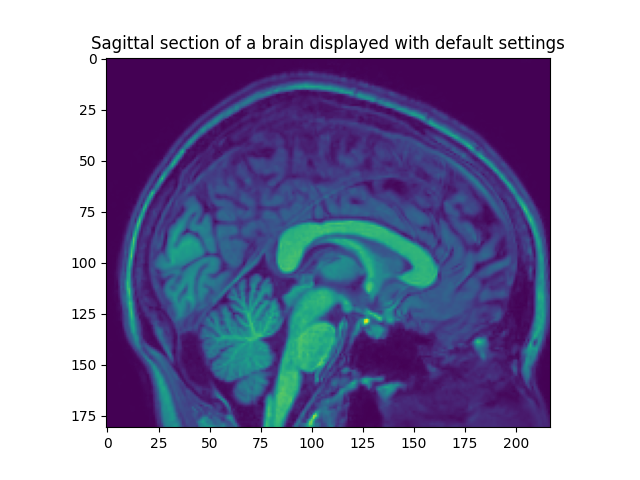

Text(0.5, 1.0, 'Sagittal section of a brain displayed with default settings')

In [3]:
# let's display the image using default settings
# create a figure and an axes to display the image in
f,ax = plt.subplots()
# display the image
ax.imshow(I)
ax.set_title('Sagittal section of a brain displayed with default settings')

<IPython.core.display.Javascript object>


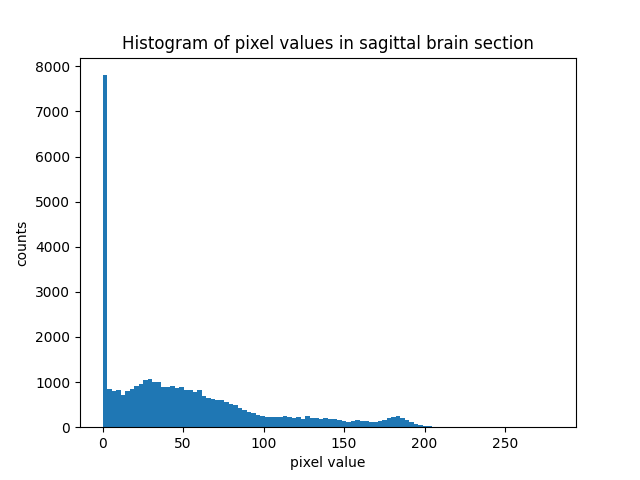

Text(0, 0.5, 'counts')

In [4]:
# let's look at a histogram of pixel values
# make a figure and axes
f,ax = plt.subplots()
# create a histogram
# ravel turns the image into a 1D array instead of a 2D array
ax.hist(I.ravel(), bins=100)
ax.set_title('Histogram of pixel values in sagittal brain section')
ax.set_xlabel('pixel value')
ax.set_ylabel('counts')

<IPython.core.display.Javascript object>


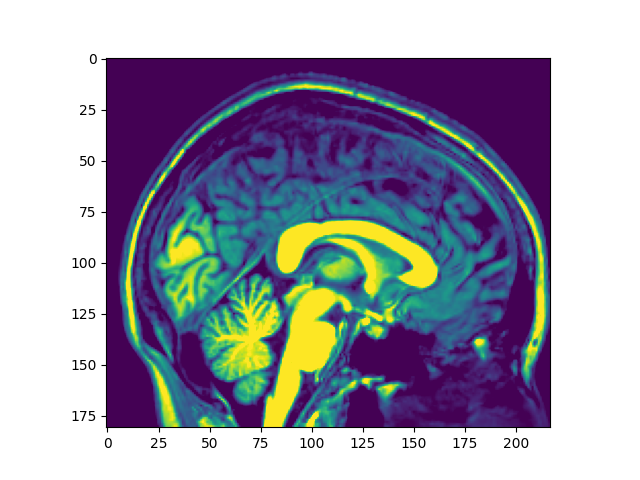

<IPython.core.display.Javascript object>


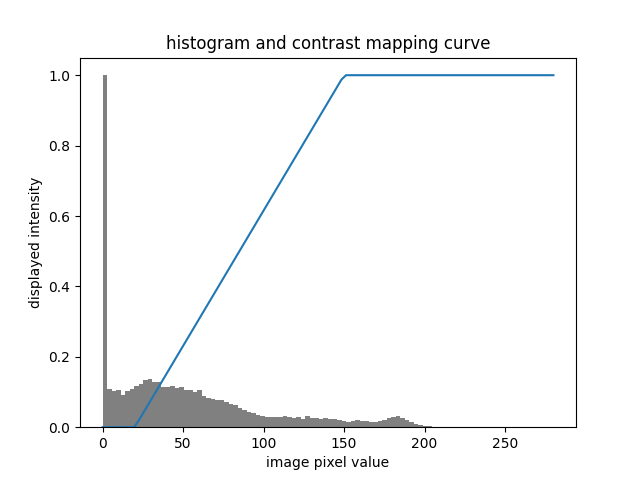

Text(0, 0.5, 'displayed intensity')

In [10]:
# after looking at the histogram, we may want to display the image using a narrower window
vmin = 20
vmax = 150

# make a figure and axes
f,ax = plt.subplots()
ax.imshow(I, vmin=vmin, vmax=vmax)

# feel free to change the min and max value in this cell

# lets also plot a curve over the histogram
# start with a normalized histogram
counts,bins = np.histogram(I.ravel(),bins=100)
counts = counts/np.max(counts) # normalize
bin_centers = (bins[:-1] + bins[1:])/2.0
bin_width = bins[1] - bins[0]
f,ax = plt.subplots()
ax.bar(bin_centers, counts,width=bin_width, color=(0.5,0.5,0.5))
ax.set_title('Sagittal section with window and level specified')

# the contrast mapping curve
y = 0*(bins <= vmin) + (bins - vmin)/(vmax-vmin)*(bins > vmin)*(bins <= vmax) + 1 *(bins > vmax)
ax.plot(bins,y)
ax.set_title('histogram and contrast mapping curve')
ax.set_xlabel('image pixel value')
ax.set_ylabel('displayed intensity')

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

<IPython.core.display.Javascript object>


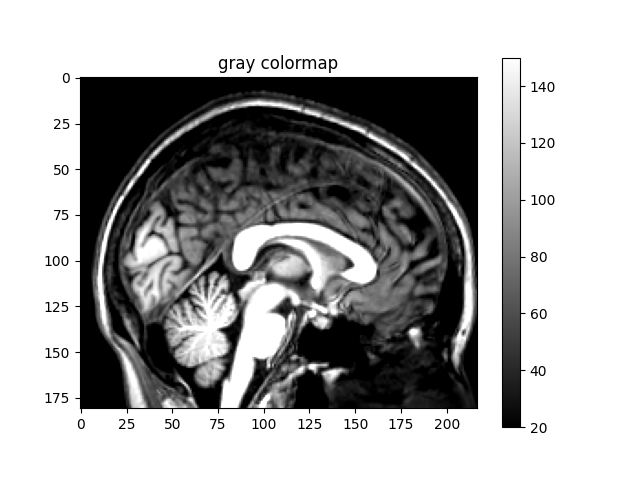

<IPython.core.display.Javascript object>


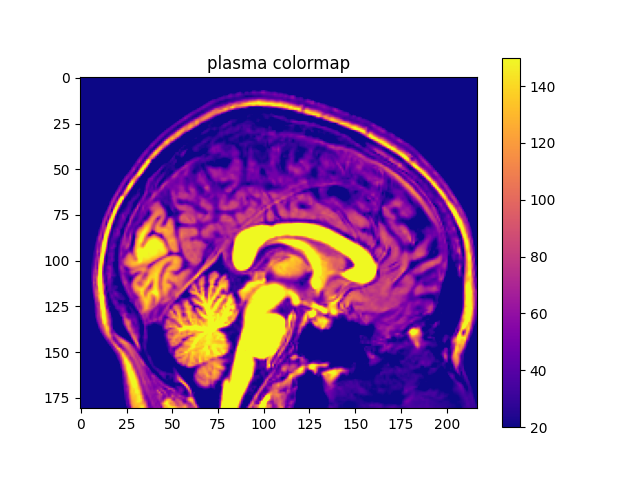

<IPython.core.display.Javascript object>


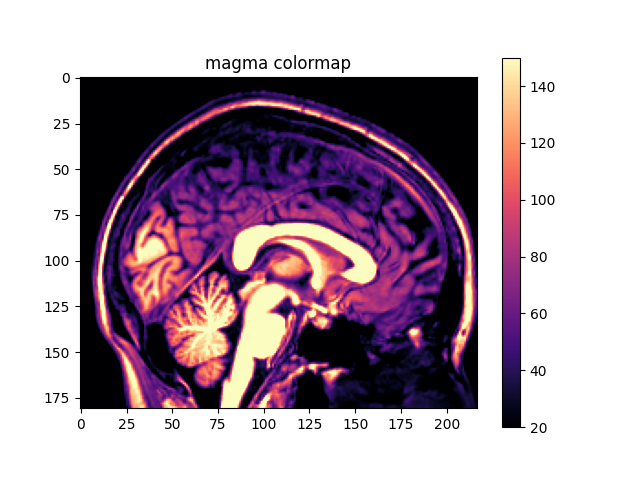

Text(0.5, 1.0, 'magma colormap')

In [7]:
# now let's look at colormaps
# we will use a colorbar so we can look up what the colors mean in terms of pixel values
list_of_colormaps = plt.colormaps()
print(list_of_colormaps)

# make a figure and draw with specified colormaps
f,ax = plt.subplots()
h = ax.imshow(I, vmin=vmin, vmax=vmax, cmap='gray')
plt.colorbar(h)
ax.set_title('gray colormap')

f,ax = plt.subplots()
h = ax.imshow(I, vmin=vmin, vmax=vmax, cmap='plasma')
plt.colorbar(h)
ax.set_title('plasma colormap')


f,ax = plt.subplots()
h = ax.imshow(I, vmin=vmin, vmax=vmax, cmap='magma')
plt.colorbar(h)
ax.set_title('magma colormap')


<IPython.core.display.Javascript object>


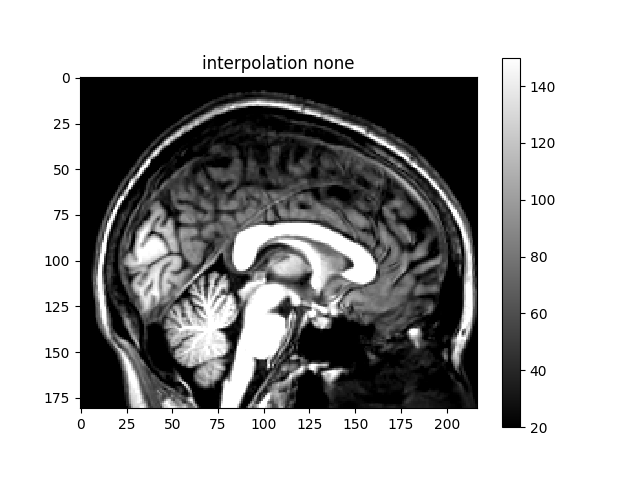

<IPython.core.display.Javascript object>


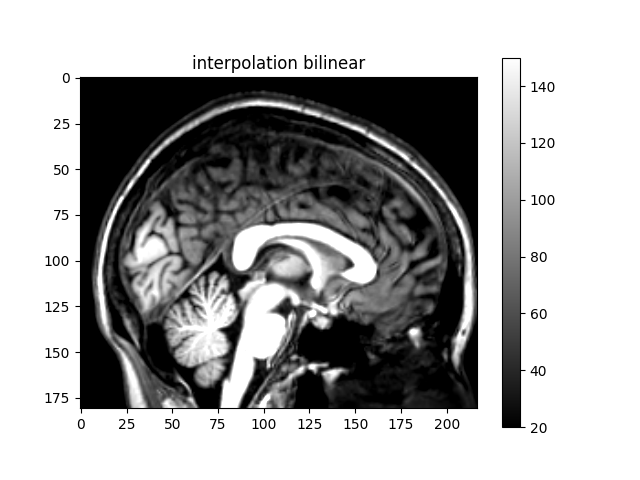

<IPython.core.display.Javascript object>


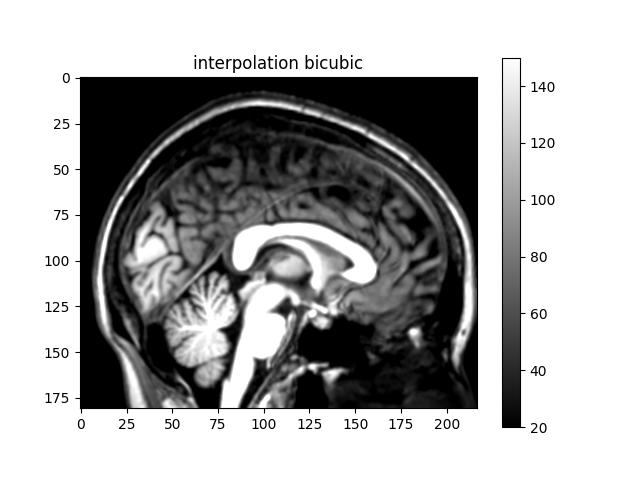

Text(0.5, 1.0, 'interpolation bicubic')

In [11]:
# now lets look at interpolation
f,ax = plt.subplots()
h = ax.imshow(I, vmin=vmin, vmax=vmax, cmap='gray', interpolation='none')
plt.colorbar(h)
ax.set_title('interpolation none')

f,ax = plt.subplots()
h = ax.imshow(I, vmin=vmin, vmax=vmax, cmap='gray', interpolation='bilinear')
plt.colorbar(h)
ax.set_title('interpolation bilinear')

f,ax = plt.subplots()
h = ax.imshow(I, vmin=vmin, vmax=vmax, cmap='gray', interpolation='bicubic')
plt.colorbar(h)
ax.set_title('interpolation bicubic')

<IPython.core.display.Javascript object>


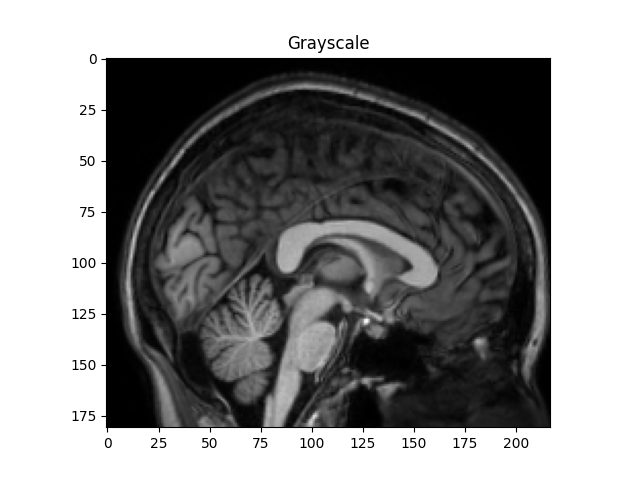

Text(0.5, 1.0, 'Grayscale')

In [12]:
# finally let's look at RGB images
# normalize from 0 to 1
In = I/np.max(I)
# this will look grayscale
f,ax = plt.subplots()
RGB = np.stack((In,In,In),axis=-1)
ax.imshow(RGB)
ax.set_title('Grayscale')



<IPython.core.display.Javascript object>


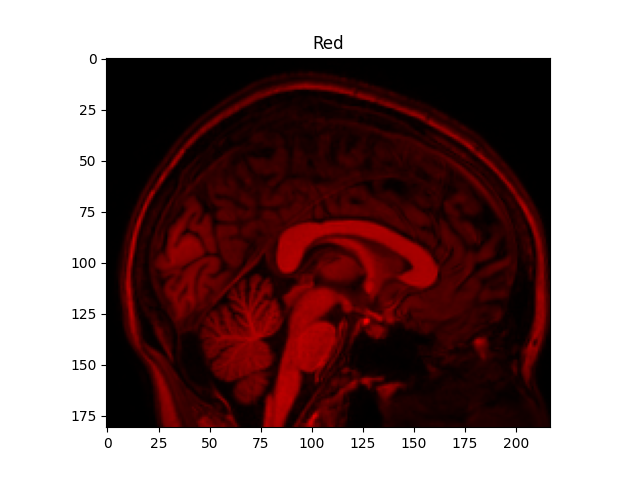

Text(0.5, 1.0, 'Red')

In [13]:
# this will look red
f,ax = plt.subplots()
RGB = np.stack((In,In*0,In*0),axis=-1)
ax.imshow(RGB)
ax.set_title('Red')




<IPython.core.display.Javascript object>


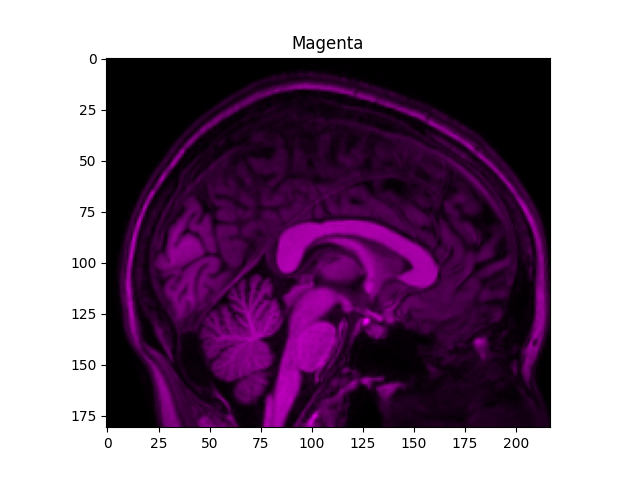

Text(0.5, 1.0, 'Magenta')

In [14]:
# this will look magenta
f,ax = plt.subplots()
RGB = np.stack((In,In*0,In),axis=-1)
ax.imshow(RGB)
ax.set_title('Magenta')



<IPython.core.display.Javascript object>


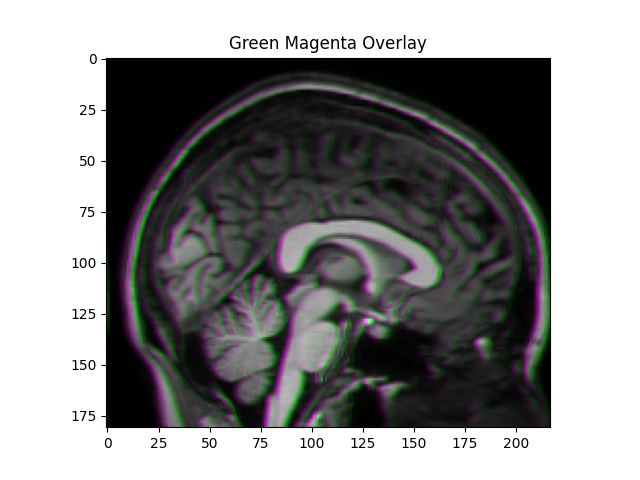

Text(0.5, 1.0, 'Green Magenta Overlay')

In [18]:
# let's use green magenta to see how two images overlap
Inshift = np.roll(In,shift=(0,2),axis=(0,1))
f,ax = plt.subplots()
RGB = np.stack((In,Inshift,In),axis=-1)
ax.imshow(RGB)
ax.set_title('Green Magenta Overlay')
